# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/513989'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-02 12:00:44.609171: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 12:00:44.644930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 12:00:44.666737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 12:00:44.674988: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 12:00:44.706051: I tensorflow/core/platform/cpu_feature_guar

2024-10-02 12:00:48.499726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "yelp", sample_size=100_000
)

Loading train tensors:   0%|          | 0/146 [00:00<?, ?it/s]

Loading train tensors:   1%|          | 1/146 [00:02<06:40,  2.76s/it]

Loading train tensors:   1%|▏         | 2/146 [00:05<06:30,  2.71s/it]

Loading train tensors:   2%|▏         | 3/146 [00:08<06:30,  2.73s/it]

Loading train tensors:   3%|▎         | 4/146 [00:10<06:30,  2.75s/it]

Loading train tensors:   3%|▎         | 5/146 [00:13<06:29,  2.76s/it]

Loading train tensors:   4%|▍         | 6/146 [00:16<06:27,  2.77s/it]

Loading train tensors:   5%|▍         | 7/146 [00:19<06:25,  2.77s/it]

Loading train tensors:   5%|▌         | 8/146 [00:22<06:23,  2.78s/it]

Loading train tensors:   6%|▌         | 9/146 [00:24<06:22,  2.80s/it]

Loading train tensors:   7%|▋         | 10/146 [00:27<06:22,  2.81s/it]

Loading train tensors:   8%|▊         | 11/146 [00:30<06:20,  2.82s/it]

Loading train tensors:   8%|▊         | 12/146 [00:33<06:18,  2.82s/it]

Loading train tensors:   9%|▉         | 13/146 [00:36<06:14,  2.82s/it]

Loading train tensors:  10%|▉         | 14/146 [00:39<06:11,  2.82s/it]

Loading train tensors:  10%|█         | 15/146 [00:41<06:10,  2.83s/it]

Loading train tensors:  11%|█         | 16/146 [00:43<05:09,  2.38s/it]

Loading train tensors:  12%|█▏        | 17/146 [00:43<03:58,  1.85s/it]

Loading train tensors:  12%|█▏        | 18/146 [00:44<03:08,  1.47s/it]

Loading train tensors:  13%|█▎        | 19/146 [00:47<03:59,  1.88s/it]

Loading train tensors:  14%|█▎        | 20/146 [00:50<04:35,  2.18s/it]

Loading train tensors:  14%|█▍        | 21/146 [00:53<05:00,  2.40s/it]

Loading train tensors:  15%|█▌        | 22/146 [00:56<05:19,  2.57s/it]

Loading train tensors:  16%|█▌        | 23/146 [00:58<05:29,  2.68s/it]

Loading train tensors:  16%|█▋        | 24/146 [01:01<05:32,  2.72s/it]

Loading train tensors:  17%|█▋        | 25/146 [01:02<04:13,  2.09s/it]

Loading train tensors:  18%|█▊        | 26/146 [01:03<03:17,  1.65s/it]

Loading train tensors:  18%|█▊        | 27/146 [01:03<02:38,  1.33s/it]

Loading train tensors:  19%|█▉        | 28/146 [01:04<02:11,  1.11s/it]

Loading train tensors:  20%|█▉        | 29/146 [01:04<01:52,  1.04it/s]

Loading train tensors:  21%|██        | 30/146 [01:05<01:39,  1.17it/s]

Loading train tensors:  21%|██        | 31/146 [01:06<01:29,  1.28it/s]

Loading train tensors:  22%|██▏       | 32/146 [01:08<02:40,  1.41s/it]

Loading train tensors:  23%|██▎       | 33/146 [01:11<03:29,  1.85s/it]

Loading train tensors:  23%|██▎       | 34/146 [01:14<04:03,  2.17s/it]

Loading train tensors:  24%|██▍       | 35/146 [01:17<04:23,  2.38s/it]

Loading train tensors:  25%|██▍       | 36/146 [01:20<04:37,  2.52s/it]

Loading train tensors:  25%|██▌       | 37/146 [01:23<04:44,  2.61s/it]

Loading train tensors:  26%|██▌       | 38/146 [01:26<04:52,  2.71s/it]

Loading train tensors:  27%|██▋       | 39/146 [01:29<04:54,  2.75s/it]

Loading train tensors:  27%|██▋       | 40/146 [01:32<04:58,  2.82s/it]

Loading train tensors:  28%|██▊       | 41/146 [01:35<05:03,  2.89s/it]

Loading train tensors:  29%|██▉       | 42/146 [01:38<05:00,  2.89s/it]

Loading train tensors:  29%|██▉       | 43/146 [01:40<04:56,  2.88s/it]

Loading train tensors:  30%|███       | 44/146 [01:43<04:54,  2.88s/it]

Loading train tensors:  31%|███       | 45/146 [01:46<04:49,  2.87s/it]

Loading train tensors:  32%|███▏      | 46/146 [01:49<04:46,  2.86s/it]

Loading train tensors:  32%|███▏      | 47/146 [01:52<04:43,  2.86s/it]

Loading train tensors:  33%|███▎      | 48/146 [01:55<04:39,  2.85s/it]

Loading train tensors:  34%|███▎      | 49/146 [01:55<03:31,  2.18s/it]

Loading train tensors:  34%|███▍      | 50/146 [01:56<02:43,  1.71s/it]

Loading train tensors:  35%|███▍      | 51/146 [01:56<02:10,  1.38s/it]

Loading train tensors:  36%|███▌      | 52/146 [01:57<01:47,  1.14s/it]

Loading train tensors:  36%|███▋      | 53/146 [01:58<01:31,  1.02it/s]

Loading train tensors:  37%|███▋      | 54/146 [01:58<01:19,  1.15it/s]

Loading train tensors:  38%|███▊      | 55/146 [01:59<01:11,  1.27it/s]

Loading train tensors:  38%|███▊      | 56/146 [01:59<01:06,  1.36it/s]

Loading train tensors:  39%|███▉      | 57/146 [02:00<01:01,  1.44it/s]

Loading train tensors:  40%|███▉      | 58/146 [02:01<00:58,  1.50it/s]

Loading train tensors:  40%|████      | 59/146 [02:01<00:56,  1.54it/s]

Loading train tensors:  41%|████      | 60/146 [02:02<00:54,  1.58it/s]

Loading train tensors:  42%|████▏     | 61/146 [02:03<00:53,  1.60it/s]

Loading train tensors:  42%|████▏     | 62/146 [02:03<00:51,  1.62it/s]

Loading train tensors:  43%|████▎     | 63/146 [02:04<00:50,  1.63it/s]

Loading train tensors:  44%|████▍     | 64/146 [02:04<00:50,  1.64it/s]

Loading train tensors:  45%|████▍     | 65/146 [02:05<00:49,  1.65it/s]

Loading train tensors:  45%|████▌     | 66/146 [02:06<00:48,  1.65it/s]

Loading train tensors:  46%|████▌     | 67/146 [02:06<00:47,  1.65it/s]

Loading train tensors:  47%|████▋     | 68/146 [02:07<00:47,  1.64it/s]

Loading train tensors:  47%|████▋     | 69/146 [02:07<00:47,  1.63it/s]

Loading train tensors:  48%|████▊     | 70/146 [02:08<00:46,  1.63it/s]

Loading train tensors:  49%|████▊     | 71/146 [02:09<00:46,  1.62it/s]

Loading train tensors:  49%|████▉     | 72/146 [02:09<00:45,  1.62it/s]

Loading train tensors:  50%|█████     | 73/146 [02:10<00:44,  1.63it/s]

Loading train tensors:  51%|█████     | 74/146 [02:10<00:44,  1.63it/s]

Loading train tensors:  51%|█████▏    | 75/146 [02:11<00:43,  1.62it/s]

Loading train tensors:  52%|█████▏    | 76/146 [02:12<00:43,  1.63it/s]

Loading train tensors:  53%|█████▎    | 77/146 [02:12<00:42,  1.62it/s]

Loading train tensors:  53%|█████▎    | 78/146 [02:13<00:41,  1.62it/s]

Loading train tensors:  54%|█████▍    | 79/146 [02:14<00:41,  1.63it/s]

Loading train tensors:  55%|█████▍    | 80/146 [02:16<01:21,  1.23s/it]

Loading train tensors:  55%|█████▌    | 81/146 [02:19<01:50,  1.70s/it]

Loading train tensors:  56%|█████▌    | 82/146 [02:22<02:10,  2.04s/it]

Loading train tensors:  57%|█████▋    | 83/146 [02:25<02:23,  2.29s/it]

Loading train tensors:  58%|█████▊    | 84/146 [02:28<02:32,  2.46s/it]

Loading train tensors:  58%|█████▊    | 85/146 [02:30<02:37,  2.58s/it]

Loading train tensors:  59%|█████▉    | 86/146 [02:33<02:40,  2.68s/it]

Loading train tensors:  60%|█████▉    | 87/146 [02:36<02:41,  2.73s/it]

Loading train tensors:  60%|██████    | 88/146 [02:39<02:40,  2.77s/it]

Loading train tensors:  61%|██████    | 89/146 [02:42<02:40,  2.81s/it]

Loading train tensors:  62%|██████▏   | 90/146 [02:45<02:38,  2.84s/it]

Loading train tensors:  62%|██████▏   | 91/146 [02:48<02:37,  2.86s/it]

Loading train tensors:  63%|██████▎   | 92/146 [02:51<02:34,  2.87s/it]

Loading train tensors:  64%|██████▎   | 93/146 [02:54<02:32,  2.88s/it]

Loading train tensors:  64%|██████▍   | 94/146 [02:56<02:29,  2.88s/it]

Loading train tensors:  65%|██████▌   | 95/146 [02:59<02:26,  2.87s/it]

Loading train tensors:  66%|██████▌   | 96/146 [03:02<02:24,  2.90s/it]

Loading train tensors:  66%|██████▋   | 97/146 [03:05<02:21,  2.89s/it]

Loading train tensors:  67%|██████▋   | 98/146 [03:08<02:18,  2.88s/it]

Loading train tensors:  68%|██████▊   | 99/146 [03:11<02:15,  2.88s/it]

Loading train tensors:  68%|██████▊   | 100/146 [03:14<02:13,  2.89s/it]

Loading train tensors:  69%|██████▉   | 101/146 [03:17<02:09,  2.89s/it]

Loading train tensors:  70%|██████▉   | 102/146 [03:20<02:07,  2.89s/it]

Loading train tensors:  71%|███████   | 103/146 [03:22<02:04,  2.90s/it]

Loading train tensors:  71%|███████   | 104/146 [03:25<02:01,  2.90s/it]

Loading train tensors:  72%|███████▏  | 105/146 [03:28<01:58,  2.90s/it]

Loading train tensors:  73%|███████▎  | 106/146 [03:31<01:55,  2.88s/it]

Loading train tensors:  73%|███████▎  | 107/146 [03:34<01:51,  2.87s/it]

Loading train tensors:  74%|███████▍  | 108/146 [03:37<01:49,  2.88s/it]

Loading train tensors:  75%|███████▍  | 109/146 [03:40<01:46,  2.88s/it]

Loading train tensors:  75%|███████▌  | 110/146 [03:43<01:43,  2.87s/it]

Loading train tensors:  76%|███████▌  | 111/146 [03:45<01:40,  2.88s/it]

Loading train tensors:  77%|███████▋  | 112/146 [03:48<01:37,  2.88s/it]

Loading train tensors:  77%|███████▋  | 113/146 [03:51<01:35,  2.88s/it]

Loading train tensors:  78%|███████▊  | 114/146 [03:54<01:31,  2.87s/it]

Loading train tensors:  79%|███████▉  | 115/146 [03:57<01:29,  2.87s/it]

Loading train tensors:  79%|███████▉  | 116/146 [04:00<01:26,  2.87s/it]

Loading train tensors:  80%|████████  | 117/146 [04:03<01:23,  2.87s/it]

Loading train tensors:  81%|████████  | 118/146 [04:06<01:20,  2.87s/it]

Loading train tensors:  82%|████████▏ | 119/146 [04:08<01:17,  2.87s/it]

Loading train tensors:  82%|████████▏ | 120/146 [04:11<01:15,  2.89s/it]

Loading train tensors:  83%|████████▎ | 121/146 [04:14<01:12,  2.89s/it]

Loading train tensors:  84%|████████▎ | 122/146 [04:17<01:09,  2.88s/it]

Loading train tensors:  84%|████████▍ | 123/146 [04:20<01:06,  2.89s/it]

Loading train tensors:  85%|████████▍ | 124/146 [04:23<01:03,  2.87s/it]

Loading train tensors:  86%|████████▌ | 125/146 [04:26<00:59,  2.86s/it]

Loading train tensors:  86%|████████▋ | 126/146 [04:29<00:57,  2.87s/it]

Loading train tensors:  87%|████████▋ | 127/146 [04:31<00:54,  2.86s/it]

Loading train tensors:  88%|████████▊ | 128/146 [04:34<00:51,  2.87s/it]

Loading train tensors:  88%|████████▊ | 129/146 [04:37<00:48,  2.87s/it]

Loading train tensors:  89%|████████▉ | 130/146 [04:40<00:46,  2.88s/it]

Loading train tensors:  90%|████████▉ | 131/146 [04:43<00:43,  2.89s/it]

Loading train tensors:  90%|█████████ | 132/146 [04:46<00:40,  2.90s/it]

Loading train tensors:  91%|█████████ | 133/146 [04:49<00:37,  2.89s/it]

Loading train tensors:  92%|█████████▏| 134/146 [04:52<00:34,  2.88s/it]

Loading train tensors:  92%|█████████▏| 135/146 [04:54<00:31,  2.87s/it]

Loading train tensors:  93%|█████████▎| 136/146 [04:57<00:28,  2.85s/it]

Loading train tensors:  94%|█████████▍| 137/146 [05:00<00:25,  2.86s/it]

Loading train tensors:  95%|█████████▍| 138/146 [05:03<00:22,  2.87s/it]

Loading train tensors:  95%|█████████▌| 139/146 [05:06<00:20,  2.89s/it]

Loading train tensors:  96%|█████████▌| 140/146 [05:08<00:15,  2.60s/it]

Loading train tensors:  97%|█████████▋| 141/146 [05:09<00:10,  2.01s/it]

Loading train tensors:  97%|█████████▋| 142/146 [05:09<00:06,  1.60s/it]

Loading train tensors:  98%|█████████▊| 143/146 [05:10<00:03,  1.31s/it]

Loading train tensors:  99%|█████████▊| 144/146 [05:10<00:02,  1.11s/it]

Loading train tensors:  99%|█████████▉| 145/146 [05:11<00:00,  1.04it/s]

Loading train tensors: 100%|██████████| 146/146 [05:12<00:00,  1.20it/s]

Loading train tensors: 100%|██████████| 146/146 [05:12<00:00,  2.14s/it]

Sample size:  75000


Loading val tensors:   0%|          | 0/37 [00:00<?, ?it/s]

Loading val tensors:   3%|▎         | 1/37 [00:02<01:39,  2.76s/it]

Loading val tensors:   5%|▌         | 2/37 [00:05<01:35,  2.72s/it]

Loading val tensors:   8%|▊         | 3/37 [00:08<01:32,  2.71s/it]

Loading val tensors:  11%|█         | 4/37 [00:10<01:29,  2.71s/it]

Loading val tensors:  14%|█▎        | 5/37 [00:13<01:26,  2.72s/it]

Loading val tensors:  16%|█▌        | 6/37 [00:16<01:24,  2.74s/it]

Loading val tensors:  19%|█▉        | 7/37 [00:19<01:24,  2.83s/it]

Loading val tensors:  22%|██▏       | 8/37 [00:22<01:22,  2.85s/it]

Loading val tensors:  24%|██▍       | 9/37 [00:23<01:09,  2.47s/it]

Loading val tensors:  27%|██▋       | 10/37 [00:26<01:05,  2.42s/it]

Loading val tensors:  30%|██▉       | 11/37 [00:29<01:08,  2.63s/it]

Loading val tensors:  32%|███▏      | 12/37 [00:32<01:08,  2.73s/it]

Loading val tensors:  35%|███▌      | 13/37 [00:35<01:06,  2.78s/it]

Loading val tensors:  38%|███▊      | 14/37 [00:38<01:04,  2.81s/it]

Loading val tensors:  41%|████      | 15/37 [00:40<01:02,  2.84s/it]

Loading val tensors:  43%|████▎     | 16/37 [00:43<01:00,  2.86s/it]

Loading val tensors:  46%|████▌     | 17/37 [00:46<00:54,  2.72s/it]

Loading val tensors:  49%|████▊     | 18/37 [00:46<00:38,  2.04s/it]

Loading val tensors:  51%|█████▏    | 19/37 [00:47<00:28,  1.56s/it]

Loading val tensors:  54%|█████▍    | 20/37 [00:47<00:20,  1.23s/it]

Loading val tensors:  57%|█████▋    | 21/37 [00:48<00:15,  1.01it/s]

Loading val tensors:  59%|█████▉    | 22/37 [00:48<00:12,  1.20it/s]

Loading val tensors:  62%|██████▏   | 23/37 [00:49<00:10,  1.28it/s]

Loading val tensors:  65%|██████▍   | 24/37 [00:49<00:09,  1.31it/s]

Loading val tensors:  68%|██████▊   | 25/37 [00:50<00:08,  1.33it/s]

Loading val tensors:  70%|███████   | 26/37 [00:51<00:08,  1.33it/s]

Loading val tensors:  73%|███████▎  | 27/37 [00:54<00:15,  1.53s/it]

Loading val tensors:  76%|███████▌  | 28/37 [00:58<00:18,  2.06s/it]

Loading val tensors:  78%|███████▊  | 29/37 [01:01<00:19,  2.46s/it]

Loading val tensors:  81%|████████  | 30/37 [01:04<00:18,  2.71s/it]

Loading val tensors:  84%|████████▍ | 31/37 [01:07<00:17,  2.88s/it]

Loading val tensors:  86%|████████▋ | 32/37 [01:11<00:14,  3.00s/it]

Loading val tensors:  89%|████████▉ | 33/37 [01:14<00:12,  3.09s/it]

Loading val tensors:  92%|█████████▏| 34/37 [01:17<00:09,  3.18s/it]

Loading val tensors:  95%|█████████▍| 35/37 [01:21<00:06,  3.23s/it]

Loading val tensors:  97%|█████████▋| 36/37 [01:24<00:03,  3.27s/it]

Loading val tensors: 100%|██████████| 37/37 [01:26<00:00,  2.70s/it]

Loading val tensors: 100%|██████████| 37/37 [01:26<00:00,  2.33s/it]

Loading test tensors:   0%|          | 0/13 [00:00<?, ?it/s]

Loading test tensors:   8%|▊         | 1/13 [00:00<00:05,  2.26it/s]

Loading test tensors:  15%|█▌        | 2/13 [00:00<00:04,  2.25it/s]

Loading test tensors:  23%|██▎       | 3/13 [00:01<00:04,  2.23it/s]

Loading test tensors:  31%|███       | 4/13 [00:01<00:04,  2.21it/s]

Loading test tensors:  38%|███▊      | 5/13 [00:02<00:03,  2.21it/s]

Loading test tensors:  46%|████▌     | 6/13 [00:02<00:03,  2.18it/s]

Loading test tensors:  54%|█████▍    | 7/13 [00:03<00:03,  1.77it/s]

Loading test tensors:  62%|██████▏   | 8/13 [00:04<00:03,  1.57it/s]

Loading test tensors:  69%|██████▉   | 9/13 [00:05<00:02,  1.48it/s]

Loading test tensors:  77%|███████▋  | 10/13 [00:05<00:02,  1.43it/s]

Loading test tensors:  85%|████████▍ | 11/13 [00:06<00:01,  1.41it/s]

Loading test tensors:  92%|█████████▏| 12/13 [00:07<00:00,  1.42it/s]

Loading test tensors: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]

Loading test tensors: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]

Test size:  38000
Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([38000, 128, 768])


Train, Val, Test size:  80000 20000 20000
pos:  39792
neg:  40208
pos:  10092
neg:  9908
pos:  9969
neg:  10031


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    # lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (linears): ModuleList(
          (0-2): 3 x Linear(in_features=8, out_features=8, bias=False)
        )
        (combine_heads): Linear(in_features=8, out_features=8, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=8, out_features=16, bias=True)
        (linear_2): Linear(in_features=16, out_features=8, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm2): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((8,), eps=1e-05,

Epoch   1/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   1/20:   0%|          | 1/1250 [00:09<3:17:30,  9.49s/batch]

Epoch   1/20:   0%|          | 3/1250 [00:09<51:59,  2.50s/batch]  

Epoch   1/20:   1%|          | 8/1250 [00:09<14:31,  1.43batch/s]

Epoch   1/20:   1%|          | 12/1250 [00:09<08:10,  2.53batch/s]

Epoch   1/20:   2%|▏         | 20/1250 [00:09<03:41,  5.54batch/s]

Epoch   1/20:   2%|▏         | 26/1250 [00:10<02:25,  8.41batch/s]

Epoch   1/20:   3%|▎         | 34/1250 [00:10<01:31, 13.34batch/s]

Epoch   1/20:   3%|▎         | 42/1250 [00:10<01:02, 19.22batch/s]

Epoch   1/20:   4%|▍         | 50/1250 [00:10<00:46, 25.90batch/s]

Epoch   1/20:   5%|▍         | 58/1250 [00:10<00:35, 33.23batch/s]

Epoch   1/20:   5%|▌         | 66/1250 [00:10<00:29, 40.48batch/s]

Epoch   1/20:   6%|▌         | 74/1250 [00:10<00:25, 47.01batch/s]

Epoch   1/20:   7%|▋         | 82/1250 [00:10<00:22, 53.07batch/s]

Epoch   1/20:   7%|▋         | 90/1250 [00:11<00:29, 38.75batch/s]

Epoch   1/20:   8%|▊         | 97/1250 [00:11<00:26, 43.10batch/s]

Epoch   1/20:   8%|▊         | 104/1250 [00:11<00:24, 47.58batch/s]

Epoch   1/20:   9%|▉         | 111/1250 [00:11<00:22, 51.41batch/s]

Epoch   1/20:   9%|▉         | 118/1250 [00:11<00:20, 55.05batch/s]

Epoch   1/20:  10%|█         | 125/1250 [00:11<00:20, 55.76batch/s]

Epoch   1/20:  11%|█         | 132/1250 [00:11<00:22, 48.69batch/s]

Epoch   1/20:  11%|█         | 138/1250 [00:11<00:22, 50.47batch/s]

Epoch   1/20:  12%|█▏        | 144/1250 [00:12<00:21, 51.94batch/s]

Epoch   1/20:  12%|█▏        | 151/1250 [00:12<00:20, 54.05batch/s]

Epoch   1/20:  13%|█▎        | 157/1250 [00:12<00:20, 52.80batch/s]

Epoch   1/20:  13%|█▎        | 163/1250 [00:12<00:20, 53.91batch/s]

Epoch   1/20:  14%|█▎        | 169/1250 [00:12<00:19, 54.79batch/s]

Epoch   1/20:  14%|█▍        | 175/1250 [00:12<00:19, 55.08batch/s]

Epoch   1/20:  14%|█▍        | 181/1250 [00:12<00:19, 54.98batch/s]

Epoch   1/20:  15%|█▍        | 187/1250 [00:12<00:19, 53.96batch/s]

Epoch   1/20:  15%|█▌        | 193/1250 [00:12<00:19, 53.20batch/s]

Epoch   1/20:  16%|█▌        | 199/1250 [00:13<00:19, 52.68batch/s]

Epoch   1/20:  16%|█▋        | 205/1250 [00:13<00:20, 51.35batch/s]

Epoch   1/20:  17%|█▋        | 211/1250 [00:13<00:20, 50.76batch/s]

Epoch   1/20:  17%|█▋        | 217/1250 [00:13<00:21, 49.07batch/s]

Epoch   1/20:  18%|█▊        | 222/1250 [00:13<00:26, 38.38batch/s]

Epoch   1/20:  18%|█▊        | 227/1250 [00:13<00:25, 39.97batch/s]

Epoch   1/20:  19%|█▊        | 232/1250 [00:13<00:24, 41.99batch/s]

Epoch   1/20:  19%|█▉        | 237/1250 [00:14<00:23, 43.08batch/s]

Epoch   1/20:  19%|█▉        | 242/1250 [00:14<00:22, 44.20batch/s]

Epoch   1/20:  20%|█▉        | 247/1250 [00:14<00:22, 44.68batch/s]

Epoch   1/20:  20%|██        | 252/1250 [00:14<00:22, 43.90batch/s]

Epoch   1/20:  21%|██        | 257/1250 [00:14<00:22, 43.74batch/s]

Epoch   1/20:  21%|██        | 262/1250 [00:14<00:22, 44.84batch/s]

Epoch   1/20:  21%|██▏       | 267/1250 [00:14<00:22, 44.28batch/s]

Epoch   1/20:  22%|██▏       | 272/1250 [00:14<00:23, 42.06batch/s]

Epoch   1/20:  22%|██▏       | 277/1250 [00:14<00:23, 41.40batch/s]

Epoch   1/20:  23%|██▎       | 282/1250 [00:15<00:24, 40.31batch/s]

Epoch   1/20:  23%|██▎       | 287/1250 [00:15<00:23, 40.16batch/s]

Epoch   1/20:  23%|██▎       | 292/1250 [00:15<00:24, 39.90batch/s]

Epoch   1/20:  24%|██▍       | 297/1250 [00:15<00:24, 39.33batch/s]

Epoch   1/20:  24%|██▍       | 301/1250 [00:15<00:24, 39.44batch/s]

Epoch   1/20:  24%|██▍       | 305/1250 [00:15<00:24, 38.54batch/s]

Epoch   1/20:  25%|██▍       | 309/1250 [00:15<00:27, 34.41batch/s]

Epoch   1/20:  25%|██▌       | 313/1250 [00:15<00:26, 35.48batch/s]

Epoch   1/20:  25%|██▌       | 317/1250 [00:16<00:26, 35.31batch/s]

Epoch   1/20:  26%|██▌       | 321/1250 [00:16<00:25, 36.18batch/s]

Epoch   1/20:  26%|██▌       | 325/1250 [00:16<00:25, 36.82batch/s]

Epoch   1/20:  26%|██▋       | 329/1250 [00:16<00:25, 36.73batch/s]

Epoch   1/20:  27%|██▋       | 333/1250 [00:16<00:25, 35.81batch/s]

Epoch   1/20:  27%|██▋       | 337/1250 [00:16<00:25, 35.43batch/s]

Epoch   1/20:  27%|██▋       | 341/1250 [00:16<00:25, 35.46batch/s]

Epoch   1/20:  28%|██▊       | 345/1250 [00:16<00:25, 35.84batch/s]

Epoch   1/20:  28%|██▊       | 349/1250 [00:16<00:25, 35.97batch/s]

Epoch   1/20:  28%|██▊       | 353/1250 [00:17<00:24, 36.27batch/s]

Epoch   1/20:  29%|██▊       | 357/1250 [00:17<00:25, 35.33batch/s]

Epoch   1/20:  29%|██▉       | 361/1250 [00:17<00:25, 34.61batch/s]

Epoch   1/20:  29%|██▉       | 365/1250 [00:17<00:25, 34.55batch/s]

Epoch   1/20:  30%|██▉       | 369/1250 [00:17<00:26, 33.72batch/s]

Epoch   1/20:  30%|██▉       | 373/1250 [00:17<00:26, 33.27batch/s]

Epoch   1/20:  30%|███       | 377/1250 [00:17<00:26, 32.89batch/s]

Epoch   1/20:  30%|███       | 381/1250 [00:17<00:26, 32.94batch/s]

Epoch   1/20:  31%|███       | 385/1250 [00:17<00:25, 33.34batch/s]

Epoch   1/20:  31%|███       | 389/1250 [00:18<00:26, 32.70batch/s]

Epoch   1/20:  31%|███▏      | 393/1250 [00:18<00:26, 32.29batch/s]

Epoch   1/20:  32%|███▏      | 397/1250 [00:18<00:26, 31.97batch/s]

Epoch   1/20:  32%|███▏      | 401/1250 [00:18<00:26, 31.96batch/s]

Epoch   1/20:  32%|███▏      | 405/1250 [00:18<00:26, 31.62batch/s]

Epoch   1/20:  33%|███▎      | 409/1250 [00:18<00:27, 30.66batch/s]

Epoch   1/20:  33%|███▎      | 413/1250 [00:18<00:27, 29.99batch/s]

Epoch   1/20:  33%|███▎      | 417/1250 [00:19<00:28, 29.21batch/s]

Epoch   1/20:  34%|███▎      | 420/1250 [00:19<00:28, 29.27batch/s]

Epoch   1/20:  34%|███▍      | 423/1250 [00:19<00:28, 28.61batch/s]

Epoch   1/20:  34%|███▍      | 426/1250 [00:19<00:28, 28.86batch/s]

Epoch   1/20:  34%|███▍      | 429/1250 [00:19<00:28, 28.66batch/s]

Epoch   1/20:  35%|███▍      | 432/1250 [00:19<00:28, 28.81batch/s]

Epoch   1/20:  35%|███▍      | 435/1250 [00:19<00:28, 28.76batch/s]

Epoch   1/20:  35%|███▌      | 438/1250 [00:19<00:27, 29.08batch/s]

Epoch   1/20:  35%|███▌      | 441/1250 [00:19<00:27, 29.21batch/s]

Epoch   1/20:  36%|███▌      | 444/1250 [00:19<00:27, 29.06batch/s]

Epoch   1/20:  36%|███▌      | 447/1250 [00:20<00:27, 29.10batch/s]

Epoch   1/20:  36%|███▌      | 450/1250 [00:20<00:27, 29.25batch/s]

Epoch   1/20:  36%|███▌      | 453/1250 [00:20<00:27, 29.08batch/s]

Epoch   1/20:  36%|███▋      | 456/1250 [00:20<00:27, 28.89batch/s]

Epoch   1/20:  37%|███▋      | 459/1250 [00:20<00:27, 29.09batch/s]

Epoch   1/20:  37%|███▋      | 463/1250 [00:20<00:26, 29.49batch/s]

Epoch   1/20:  37%|███▋      | 466/1250 [00:20<00:27, 28.89batch/s]

Epoch   1/20:  38%|███▊      | 469/1250 [00:20<00:27, 28.86batch/s]

Epoch   1/20:  38%|███▊      | 473/1250 [00:20<00:26, 29.24batch/s]

Epoch   1/20:  38%|███▊      | 477/1250 [00:21<00:26, 29.64batch/s]

Epoch   1/20:  38%|███▊      | 480/1250 [00:21<00:26, 29.48batch/s]

Epoch   1/20:  39%|███▊      | 483/1250 [00:21<00:26, 29.24batch/s]

Epoch   1/20:  39%|███▉      | 486/1250 [00:21<00:26, 28.90batch/s]

Epoch   1/20:  39%|███▉      | 489/1250 [00:21<00:26, 28.47batch/s]

Epoch   1/20:  39%|███▉      | 492/1250 [00:21<00:26, 28.45batch/s]

Epoch   1/20:  40%|███▉      | 495/1250 [00:21<00:26, 28.56batch/s]

Epoch   1/20:  40%|███▉      | 498/1250 [00:21<00:26, 28.56batch/s]

Epoch   1/20:  40%|████      | 502/1250 [00:21<00:25, 29.15batch/s]

Epoch   1/20:  40%|████      | 505/1250 [00:22<00:25, 29.31batch/s]

Epoch   1/20:  41%|████      | 508/1250 [00:22<00:25, 29.28batch/s]

Epoch   1/20:  41%|████      | 511/1250 [00:22<00:25, 29.07batch/s]

Epoch   1/20:  41%|████      | 514/1250 [00:22<00:25, 29.10batch/s]

Epoch   1/20:  41%|████▏     | 517/1250 [00:22<00:25, 29.13batch/s]

Epoch   1/20:  42%|████▏     | 520/1250 [00:22<00:25, 29.07batch/s]

Epoch   1/20:  42%|████▏     | 523/1250 [00:22<00:25, 28.80batch/s]

Epoch   1/20:  42%|████▏     | 526/1250 [00:22<00:25, 28.83batch/s]

Epoch   1/20:  42%|████▏     | 529/1250 [00:22<00:24, 28.93batch/s]

Epoch   1/20:  43%|████▎     | 532/1250 [00:23<00:24, 28.80batch/s]

Epoch   1/20:  43%|████▎     | 536/1250 [00:23<00:24, 29.33batch/s]

Epoch   1/20:  43%|████▎     | 539/1250 [00:23<00:24, 29.47batch/s]

Epoch   1/20:  43%|████▎     | 542/1250 [00:23<00:24, 29.05batch/s]

Epoch   1/20:  44%|████▎     | 546/1250 [00:23<00:23, 29.57batch/s]

Epoch   1/20:  44%|████▍     | 549/1250 [00:23<00:23, 29.61batch/s]

Epoch   1/20:  44%|████▍     | 553/1250 [00:23<00:23, 29.59batch/s]

Epoch   1/20:  44%|████▍     | 556/1250 [00:23<00:23, 29.67batch/s]

Epoch   1/20:  45%|████▍     | 559/1250 [00:23<00:23, 28.92batch/s]

Epoch   1/20:  45%|████▍     | 562/1250 [00:24<00:23, 29.13batch/s]

Epoch   1/20:  45%|████▌     | 566/1250 [00:24<00:22, 29.79batch/s]

Epoch   1/20:  46%|████▌     | 570/1250 [00:24<00:22, 29.90batch/s]

Epoch   1/20:  46%|████▌     | 573/1250 [00:24<00:22, 29.84batch/s]

Epoch   1/20:  46%|████▌     | 576/1250 [00:24<00:22, 29.81batch/s]

Epoch   1/20:  46%|████▋     | 580/1250 [00:24<00:21, 30.56batch/s]

Epoch   1/20:  47%|████▋     | 584/1250 [00:24<00:21, 30.41batch/s]

Epoch   1/20:  47%|████▋     | 588/1250 [00:24<00:21, 30.22batch/s]

Epoch   1/20:  47%|████▋     | 592/1250 [00:25<00:25, 25.62batch/s]

Epoch   1/20:  48%|████▊     | 596/1250 [00:25<00:24, 26.86batch/s]

Epoch   1/20:  48%|████▊     | 599/1250 [00:25<00:23, 27.38batch/s]

Epoch   1/20:  48%|████▊     | 603/1250 [00:25<00:22, 28.51batch/s]

Epoch   1/20:  48%|████▊     | 606/1250 [00:25<00:22, 28.50batch/s]

Epoch   1/20:  49%|████▊     | 609/1250 [00:25<00:22, 28.85batch/s]

Epoch   1/20:  49%|████▉     | 612/1250 [00:25<00:22, 28.61batch/s]

Epoch   1/20:  49%|████▉     | 615/1250 [00:25<00:22, 28.73batch/s]

Epoch   1/20:  49%|████▉     | 618/1250 [00:25<00:21, 29.04batch/s]

Epoch   1/20:  50%|████▉     | 621/1250 [00:26<00:21, 29.01batch/s]

Epoch   1/20:  50%|████▉     | 624/1250 [00:26<00:21, 28.86batch/s]

Epoch   1/20:  50%|█████     | 627/1250 [00:26<00:21, 28.56batch/s]

Epoch   1/20:  50%|█████     | 630/1250 [00:26<00:21, 28.87batch/s]

Epoch   1/20:  51%|█████     | 633/1250 [00:26<00:21, 28.72batch/s]

Epoch   1/20:  51%|█████     | 636/1250 [00:26<00:21, 28.96batch/s]

Epoch   1/20:  51%|█████     | 639/1250 [00:26<00:21, 28.55batch/s]

Epoch   1/20:  51%|█████▏    | 642/1250 [00:26<00:21, 28.79batch/s]

Epoch   1/20:  52%|█████▏    | 645/1250 [00:26<00:21, 28.72batch/s]

Epoch   1/20:  52%|█████▏    | 648/1250 [00:27<00:20, 28.94batch/s]

Epoch   1/20:  52%|█████▏    | 651/1250 [00:27<00:20, 28.88batch/s]

Epoch   1/20:  52%|█████▏    | 654/1250 [00:27<00:20, 28.90batch/s]

Epoch   1/20:  53%|█████▎    | 657/1250 [00:27<00:20, 29.03batch/s]

Epoch   1/20:  53%|█████▎    | 660/1250 [00:27<00:20, 28.98batch/s]

Epoch   1/20:  53%|█████▎    | 663/1250 [00:27<00:20, 29.08batch/s]

Epoch   1/20:  53%|█████▎    | 666/1250 [00:27<00:20, 28.28batch/s]

Epoch   1/20:  54%|█████▎    | 669/1250 [00:27<00:20, 28.36batch/s]

Epoch   1/20:  54%|█████▍    | 673/1250 [00:27<00:19, 29.37batch/s]

Epoch   1/20:  54%|█████▍    | 677/1250 [00:28<00:19, 29.63batch/s]

Epoch   1/20:  54%|█████▍    | 681/1250 [00:28<00:19, 29.88batch/s]

Epoch   1/20:  55%|█████▍    | 684/1250 [00:28<00:19, 29.36batch/s]

Epoch   1/20:  55%|█████▍    | 687/1250 [00:28<00:19, 29.28batch/s]

Epoch   1/20:  55%|█████▌    | 690/1250 [00:28<00:19, 29.33batch/s]

Epoch   1/20:  55%|█████▌    | 693/1250 [00:28<00:19, 28.95batch/s]

Epoch   1/20:  56%|█████▌    | 696/1250 [00:28<00:19, 28.82batch/s]

Epoch   1/20:  56%|█████▌    | 699/1250 [00:28<00:20, 27.32batch/s]

Epoch   1/20:  56%|█████▌    | 702/1250 [00:28<00:19, 27.98batch/s]

Epoch   1/20:  56%|█████▋    | 706/1250 [00:29<00:19, 28.55batch/s]

Epoch   1/20:  57%|█████▋    | 709/1250 [00:29<00:20, 26.27batch/s]

Epoch   1/20:  57%|█████▋    | 712/1250 [00:29<00:20, 25.63batch/s]

Epoch   1/20:  57%|█████▋    | 715/1250 [00:29<00:26, 20.27batch/s]

Epoch   1/20:  57%|█████▋    | 718/1250 [00:29<00:23, 22.34batch/s]

Epoch   1/20:  58%|█████▊    | 722/1250 [00:29<00:21, 24.82batch/s]

Epoch   1/20:  58%|█████▊    | 725/1250 [00:29<00:20, 25.84batch/s]

Epoch   1/20:  58%|█████▊    | 729/1250 [00:29<00:19, 27.21batch/s]

Epoch   1/20:  59%|█████▊    | 732/1250 [00:30<00:19, 27.14batch/s]

Epoch   1/20:  59%|█████▉    | 735/1250 [00:30<00:18, 27.82batch/s]

Epoch   1/20:  59%|█████▉    | 738/1250 [00:30<00:18, 27.92batch/s]

Epoch   1/20:  59%|█████▉    | 741/1250 [00:30<00:17, 28.39batch/s]

Epoch   1/20:  60%|█████▉    | 744/1250 [00:30<00:18, 27.96batch/s]

Epoch   1/20:  60%|█████▉    | 748/1250 [00:30<00:17, 28.68batch/s]

Epoch   1/20:  60%|██████    | 751/1250 [00:30<00:17, 28.19batch/s]

Epoch   1/20:  60%|██████    | 754/1250 [00:30<00:17, 28.50batch/s]

Epoch   1/20:  61%|██████    | 758/1250 [00:30<00:16, 29.00batch/s]

Epoch   1/20:  61%|██████    | 761/1250 [00:31<00:16, 29.03batch/s]

Epoch   1/20:  61%|██████    | 764/1250 [00:31<00:16, 28.99batch/s]

Epoch   1/20:  61%|██████▏   | 768/1250 [00:31<00:16, 29.40batch/s]

Epoch   1/20:  62%|██████▏   | 771/1250 [00:31<00:16, 28.98batch/s]

Epoch   1/20:  62%|██████▏   | 774/1250 [00:31<00:16, 28.82batch/s]

Epoch   1/20:  62%|██████▏   | 777/1250 [00:31<00:17, 26.42batch/s]

Epoch   1/20:  62%|██████▏   | 780/1250 [00:31<00:18, 25.43batch/s]

Epoch   1/20:  63%|██████▎   | 783/1250 [00:31<00:17, 26.27batch/s]

Epoch   1/20:  63%|██████▎   | 786/1250 [00:32<00:17, 26.74batch/s]

Epoch   1/20:  63%|██████▎   | 789/1250 [00:32<00:17, 27.10batch/s]

Epoch   1/20:  63%|██████▎   | 792/1250 [00:32<00:16, 27.48batch/s]

Epoch   1/20:  64%|██████▎   | 795/1250 [00:32<00:17, 25.95batch/s]

Epoch   1/20:  64%|██████▍   | 798/1250 [00:32<00:16, 26.64batch/s]

Epoch   1/20:  64%|██████▍   | 802/1250 [00:32<00:15, 28.00batch/s]

Epoch   1/20:  64%|██████▍   | 805/1250 [00:32<00:15, 28.35batch/s]

Epoch   1/20:  65%|██████▍   | 808/1250 [00:32<00:15, 28.52batch/s]

Epoch   1/20:  65%|██████▍   | 811/1250 [00:32<00:17, 24.46batch/s]

Epoch   1/20:  65%|██████▌   | 815/1250 [00:33<00:16, 26.22batch/s]

Epoch   1/20:  66%|██████▌   | 819/1250 [00:33<00:15, 27.29batch/s]

Epoch   1/20:  66%|██████▌   | 822/1250 [00:33<00:15, 27.70batch/s]

Epoch   1/20:  66%|██████▌   | 826/1250 [00:33<00:14, 28.35batch/s]

Epoch   1/20:  66%|██████▋   | 829/1250 [00:34<00:48,  8.68batch/s]

Epoch   1/20:  67%|██████▋   | 832/1250 [00:34<00:39, 10.68batch/s]

Epoch   1/20:  67%|██████▋   | 835/1250 [00:34<00:32, 12.94batch/s]

Epoch   1/20:  67%|██████▋   | 838/1250 [00:34<00:26, 15.35batch/s]

Epoch   1/20:  67%|██████▋   | 841/1250 [00:34<00:22, 17.79batch/s]

Epoch   1/20:  68%|██████▊   | 844/1250 [00:35<00:20, 19.99batch/s]

Epoch   1/20:  68%|██████▊   | 847/1250 [00:35<00:18, 22.04batch/s]

Epoch   1/20:  68%|██████▊   | 850/1250 [00:35<00:16, 23.71batch/s]

Epoch   1/20:  68%|██████▊   | 853/1250 [00:35<00:15, 25.21batch/s]

Epoch   1/20:  68%|██████▊   | 856/1250 [00:35<00:15, 26.24batch/s]

Epoch   1/20:  69%|██████▊   | 859/1250 [00:35<00:14, 26.15batch/s]

Epoch   1/20:  69%|██████▉   | 863/1250 [00:35<00:14, 27.38batch/s]

Epoch   1/20:  69%|██████▉   | 866/1250 [00:35<00:14, 26.35batch/s]

Epoch   1/20:  70%|██████▉   | 869/1250 [00:35<00:14, 26.96batch/s]

Epoch   1/20:  70%|██████▉   | 872/1250 [00:36<00:13, 27.50batch/s]

Epoch   1/20:  70%|███████   | 876/1250 [00:36<00:13, 28.38batch/s]

Epoch   1/20:  70%|███████   | 879/1250 [00:36<00:12, 28.78batch/s]

Epoch   1/20:  71%|███████   | 882/1250 [00:36<00:12, 28.70batch/s]

Epoch   1/20:  71%|███████   | 885/1250 [00:36<00:12, 28.58batch/s]

Epoch   1/20:  71%|███████   | 888/1250 [00:36<00:12, 28.35batch/s]

Epoch   1/20:  71%|███████▏  | 891/1250 [00:36<00:12, 28.55batch/s]

Epoch   1/20:  72%|███████▏  | 894/1250 [00:36<00:12, 28.34batch/s]

Epoch   1/20:  72%|███████▏  | 897/1250 [00:36<00:12, 28.65batch/s]

Epoch   1/20:  72%|███████▏  | 900/1250 [00:36<00:12, 28.87batch/s]

Epoch   1/20:  72%|███████▏  | 903/1250 [00:37<00:12, 28.82batch/s]

Epoch   1/20:  73%|███████▎  | 907/1250 [00:37<00:11, 29.31batch/s]

Epoch   1/20:  73%|███████▎  | 910/1250 [00:37<00:11, 29.20batch/s]

Epoch   1/20:  73%|███████▎  | 914/1250 [00:37<00:11, 29.61batch/s]

Epoch   1/20:  73%|███████▎  | 917/1250 [00:37<00:11, 29.16batch/s]

Epoch   1/20:  74%|███████▎  | 920/1250 [00:37<00:11, 29.05batch/s]

Epoch   1/20:  74%|███████▍  | 923/1250 [00:37<00:11, 28.81batch/s]

Epoch   1/20:  74%|███████▍  | 926/1250 [00:37<00:11, 28.84batch/s]

Epoch   1/20:  74%|███████▍  | 929/1250 [00:37<00:11, 29.08batch/s]

Epoch   1/20:  75%|███████▍  | 932/1250 [00:38<00:12, 25.09batch/s]

Epoch   1/20:  75%|███████▍  | 936/1250 [00:38<00:11, 26.97batch/s]

Epoch   1/20:  75%|███████▌  | 939/1250 [00:38<00:11, 27.65batch/s]

Epoch   1/20:  75%|███████▌  | 942/1250 [00:38<00:10, 28.08batch/s]

Epoch   1/20:  76%|███████▌  | 945/1250 [00:38<00:12, 24.17batch/s]

Epoch   1/20:  76%|███████▌  | 948/1250 [00:38<00:12, 24.63batch/s]

Epoch   1/20:  76%|███████▌  | 952/1250 [00:38<00:11, 26.32batch/s]

Epoch   1/20:  76%|███████▋  | 955/1250 [00:38<00:10, 26.88batch/s]

Epoch   1/20:  77%|███████▋  | 958/1250 [00:39<00:10, 27.52batch/s]

Epoch   1/20:  77%|███████▋  | 961/1250 [00:39<00:10, 28.17batch/s]

Epoch   1/20:  77%|███████▋  | 964/1250 [00:39<00:10, 26.87batch/s]

Epoch   1/20:  77%|███████▋  | 968/1250 [00:39<00:09, 28.28batch/s]

Epoch   1/20:  78%|███████▊  | 971/1250 [00:39<00:09, 28.06batch/s]

Epoch   1/20:  78%|███████▊  | 974/1250 [00:39<00:09, 28.19batch/s]

Epoch   1/20:  78%|███████▊  | 977/1250 [00:39<00:09, 28.57batch/s]

Epoch   1/20:  78%|███████▊  | 981/1250 [00:39<00:09, 29.78batch/s]

Epoch   1/20:  79%|███████▉  | 985/1250 [00:40<00:08, 30.20batch/s]

Epoch   1/20:  79%|███████▉  | 989/1250 [00:40<00:08, 30.28batch/s]

Epoch   1/20:  79%|███████▉  | 993/1250 [00:40<00:08, 30.37batch/s]

Epoch   1/20:  80%|███████▉  | 997/1250 [00:40<00:08, 29.59batch/s]

Epoch   1/20:  80%|████████  | 1001/1250 [00:40<00:08, 29.63batch/s]

Epoch   1/20:  80%|████████  | 1005/1250 [00:40<00:08, 29.89batch/s]

Epoch   1/20:  81%|████████  | 1009/1250 [00:40<00:08, 30.02batch/s]

Epoch   1/20:  81%|████████  | 1013/1250 [00:40<00:07, 29.86batch/s]

Epoch   1/20:  81%|████████▏ | 1016/1250 [00:41<00:07, 29.74batch/s]

Epoch   1/20:  82%|████████▏ | 1019/1250 [00:41<00:07, 29.60batch/s]

Epoch   1/20:  82%|████████▏ | 1023/1250 [00:41<00:07, 29.75batch/s]

Epoch   1/20:  82%|████████▏ | 1026/1250 [00:41<00:07, 29.21batch/s]

Epoch   1/20:  82%|████████▏ | 1029/1250 [00:41<00:07, 29.10batch/s]

Epoch   1/20:  83%|████████▎ | 1032/1250 [00:41<00:07, 28.89batch/s]

Epoch   1/20:  83%|████████▎ | 1035/1250 [00:41<00:07, 28.96batch/s]

Epoch   1/20:  83%|████████▎ | 1038/1250 [00:41<00:07, 29.09batch/s]

Epoch   1/20:  83%|████████▎ | 1041/1250 [00:41<00:07, 29.33batch/s]

Epoch   1/20:  84%|████████▎ | 1044/1250 [00:42<00:07, 29.09batch/s]

Epoch   1/20:  84%|████████▍ | 1048/1250 [00:42<00:06, 29.34batch/s]

Epoch   1/20:  84%|████████▍ | 1051/1250 [00:42<00:06, 29.08batch/s]

Epoch   1/20:  84%|████████▍ | 1054/1250 [00:42<00:06, 29.21batch/s]

Epoch   1/20:  85%|████████▍ | 1058/1250 [00:42<00:06, 29.50batch/s]

Epoch   1/20:  85%|████████▍ | 1062/1250 [00:42<00:06, 29.85batch/s]

Epoch   1/20:  85%|████████▌ | 1065/1250 [00:42<00:06, 29.20batch/s]

Epoch   1/20:  85%|████████▌ | 1068/1250 [00:42<00:06, 29.26batch/s]

Epoch   1/20:  86%|████████▌ | 1072/1250 [00:42<00:06, 29.47batch/s]

Epoch   1/20:  86%|████████▌ | 1075/1250 [00:43<00:05, 29.39batch/s]

Epoch   1/20:  86%|████████▋ | 1079/1250 [00:43<00:05, 29.56batch/s]

Epoch   1/20:  87%|████████▋ | 1082/1250 [00:43<00:05, 29.13batch/s]

Epoch   1/20:  87%|████████▋ | 1085/1250 [00:43<00:08, 20.20batch/s]

Epoch   1/20:  87%|████████▋ | 1088/1250 [00:43<00:07, 22.13batch/s]

Epoch   1/20:  87%|████████▋ | 1092/1250 [00:43<00:06, 24.49batch/s]

Epoch   1/20:  88%|████████▊ | 1095/1250 [00:43<00:06, 25.53batch/s]

Epoch   1/20:  88%|████████▊ | 1098/1250 [00:44<00:05, 26.36batch/s]

Epoch   1/20:  88%|████████▊ | 1101/1250 [00:44<00:05, 27.30batch/s]

Epoch   1/20:  88%|████████▊ | 1104/1250 [00:44<00:05, 27.71batch/s]

Epoch   1/20:  89%|████████▊ | 1107/1250 [00:44<00:05, 27.58batch/s]

Epoch   1/20:  89%|████████▉ | 1110/1250 [00:44<00:04, 28.08batch/s]

Epoch   1/20:  89%|████████▉ | 1113/1250 [00:44<00:04, 28.49batch/s]

Epoch   1/20:  89%|████████▉ | 1116/1250 [00:44<00:04, 28.62batch/s]

Epoch   1/20:  90%|████████▉ | 1119/1250 [00:44<00:04, 28.80batch/s]

Epoch   1/20:  90%|████████▉ | 1122/1250 [00:44<00:04, 28.76batch/s]

Epoch   1/20:  90%|█████████ | 1126/1250 [00:44<00:04, 29.10batch/s]

Epoch   1/20:  90%|█████████ | 1129/1250 [00:45<00:04, 28.99batch/s]

Epoch   1/20:  91%|█████████ | 1132/1250 [00:45<00:04, 29.08batch/s]

Epoch   1/20:  91%|█████████ | 1135/1250 [00:45<00:03, 29.20batch/s]

Epoch   1/20:  91%|█████████ | 1138/1250 [00:45<00:03, 28.90batch/s]

Epoch   1/20:  91%|█████████▏| 1141/1250 [00:45<00:03, 29.10batch/s]

Epoch   1/20:  92%|█████████▏| 1144/1250 [00:46<00:08, 12.66batch/s]

Epoch   1/20:  92%|█████████▏| 1147/1250 [00:46<00:11,  8.60batch/s]

Epoch   1/20:  92%|█████████▏| 1150/1250 [00:46<00:09, 10.85batch/s]

Epoch   1/20:  92%|█████████▏| 1153/1250 [00:46<00:07, 13.36batch/s]

Epoch   1/20:  93%|█████████▎| 1157/1250 [00:47<00:05, 16.81batch/s]

Epoch   1/20:  93%|█████████▎| 1161/1250 [00:47<00:04, 19.94batch/s]

Epoch   1/20:  93%|█████████▎| 1165/1250 [00:47<00:03, 22.43batch/s]

Epoch   1/20:  93%|█████████▎| 1168/1250 [00:47<00:03, 23.77batch/s]

Epoch   1/20:  94%|█████████▎| 1171/1250 [00:47<00:03, 24.81batch/s]

Epoch   1/20:  94%|█████████▍| 1174/1250 [00:47<00:02, 25.78batch/s]

Epoch   1/20:  94%|█████████▍| 1178/1250 [00:47<00:02, 26.89batch/s]

Epoch   1/20:  94%|█████████▍| 1181/1250 [00:47<00:02, 27.41batch/s]

Epoch   1/20:  95%|█████████▍| 1185/1250 [00:47<00:02, 28.56batch/s]

Epoch   1/20:  95%|█████████▌| 1188/1250 [00:48<00:02, 26.26batch/s]

Epoch   1/20:  95%|█████████▌| 1191/1250 [00:48<00:02, 26.97batch/s]

Epoch   1/20:  96%|█████████▌| 1195/1250 [00:48<00:01, 28.30batch/s]

Epoch   1/20:  96%|█████████▌| 1198/1250 [00:48<00:01, 28.57batch/s]

Epoch   1/20:  96%|█████████▌| 1201/1250 [00:48<00:02, 22.51batch/s]

Epoch   1/20:  96%|█████████▋| 1204/1250 [00:48<00:02, 21.51batch/s]

Epoch   1/20:  97%|█████████▋| 1207/1250 [00:48<00:01, 23.28batch/s]

Epoch   1/20:  97%|█████████▋| 1210/1250 [00:49<00:01, 24.76batch/s]

Epoch   1/20:  97%|█████████▋| 1213/1250 [00:49<00:01, 25.98batch/s]

Epoch   1/20:  97%|█████████▋| 1217/1250 [00:49<00:01, 27.51batch/s]

Epoch   1/20:  98%|█████████▊| 1220/1250 [00:49<00:01, 26.58batch/s]

Epoch   1/20:  98%|█████████▊| 1224/1250 [00:49<00:00, 27.67batch/s]

Epoch   1/20:  98%|█████████▊| 1228/1250 [00:49<00:00, 28.42batch/s]

Epoch   1/20:  98%|█████████▊| 1231/1250 [00:49<00:00, 28.75batch/s]

Epoch   1/20:  99%|█████████▉| 1235/1250 [00:49<00:00, 29.62batch/s]

Epoch   1/20:  99%|█████████▉| 1239/1250 [00:49<00:00, 29.97batch/s]

Epoch   1/20:  99%|█████████▉| 1243/1250 [00:50<00:00, 30.28batch/s]

Epoch   1/20: 100%|█████████▉| 1247/1250 [00:50<00:00, 30.23batch/s]

Epoch   1/20: 100%|██████████| 1250/1250 [00:50<00:00, 30.23batch/s, Evaluating on validation set...]

Epoch   1/20: 100%|██████████| 1250/1250 [00:53<00:00, 30.23batch/s, Epoch = 0m 53s, Loss = 0.3477|0.2486, Acc = 0.850|0.903, AUC = 92.578|96.528]

Epoch   1/20: 100%|██████████| 1250/1250 [00:53<00:00, 23.32batch/s, Epoch = 0m 53s, Loss = 0.3477|0.2486, Acc = 0.850|0.903, AUC = 92.578|96.528]

Epoch   2/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   2/20:   0%|          | 6/1250 [00:00<00:21, 56.55batch/s]

Epoch   2/20:   1%|          | 12/1250 [00:00<00:22, 55.47batch/s]

Epoch   2/20:   1%|▏         | 18/1250 [00:00<00:23, 52.47batch/s]

Epoch   2/20:   2%|▏         | 24/1250 [00:00<00:22, 55.15batch/s]

Epoch   2/20:   2%|▏         | 30/1250 [00:00<00:21, 56.06batch/s]

Epoch   2/20:   3%|▎         | 36/1250 [00:00<00:21, 55.96batch/s]

Epoch   2/20:   3%|▎         | 43/1250 [00:00<00:20, 57.76batch/s]

Epoch   2/20:   4%|▍         | 49/1250 [00:00<00:20, 57.40batch/s]

Epoch   2/20:   4%|▍         | 55/1250 [00:01<00:23, 49.84batch/s]

Epoch   2/20:   5%|▍         | 62/1250 [00:01<00:22, 52.95batch/s]

Epoch   2/20:   5%|▌         | 68/1250 [00:01<00:25, 45.70batch/s]

Epoch   2/20:   6%|▌         | 74/1250 [00:01<00:24, 48.98batch/s]

Epoch   2/20:   6%|▋         | 81/1250 [00:01<00:22, 51.83batch/s]

Epoch   2/20:   7%|▋         | 87/1250 [00:01<00:21, 53.12batch/s]

Epoch   2/20:   7%|▋         | 93/1250 [00:01<00:22, 51.78batch/s]

Epoch   2/20:   8%|▊         | 99/1250 [00:01<00:21, 53.19batch/s]

Epoch   2/20:   8%|▊         | 105/1250 [00:01<00:21, 54.04batch/s]

Epoch   2/20:   9%|▉         | 111/1250 [00:02<00:20, 54.78batch/s]

Epoch   2/20:   9%|▉         | 117/1250 [00:02<00:23, 47.64batch/s]

Epoch   2/20:  10%|▉         | 124/1250 [00:02<00:21, 51.81batch/s]

Epoch   2/20:  10%|█         | 131/1250 [00:02<00:20, 54.34batch/s]

Epoch   2/20:  11%|█         | 137/1250 [00:02<00:19, 55.71batch/s]

Epoch   2/20:  11%|█▏        | 143/1250 [00:02<00:19, 55.67batch/s]

Epoch   2/20:  12%|█▏        | 149/1250 [00:02<00:19, 56.37batch/s]

Epoch   2/20:  12%|█▏        | 155/1250 [00:02<00:19, 57.00batch/s]

Epoch   2/20:  13%|█▎        | 161/1250 [00:02<00:19, 56.99batch/s]

Epoch   2/20:  13%|█▎        | 167/1250 [00:03<00:22, 47.98batch/s]

Epoch   2/20:  14%|█▍        | 173/1250 [00:03<00:21, 50.80batch/s]

Epoch   2/20:  14%|█▍        | 179/1250 [00:03<00:20, 52.51batch/s]

Epoch   2/20:  15%|█▍        | 185/1250 [00:03<00:20, 52.80batch/s]

Epoch   2/20:  15%|█▌        | 191/1250 [00:03<00:19, 54.50batch/s]

Epoch   2/20:  16%|█▌        | 197/1250 [00:03<00:18, 55.83batch/s]

Epoch   2/20:  16%|█▌        | 203/1250 [00:04<00:38, 27.08batch/s]

Epoch   2/20:  17%|█▋        | 209/1250 [00:04<00:32, 32.28batch/s]

Epoch   2/20:  17%|█▋        | 215/1250 [00:04<00:28, 36.10batch/s]

Epoch   2/20:  18%|█▊        | 221/1250 [00:04<00:25, 40.32batch/s]

Epoch   2/20:  18%|█▊        | 227/1250 [00:04<00:22, 44.64batch/s]

Epoch   2/20:  19%|█▊        | 234/1250 [00:04<00:20, 48.96batch/s]

Epoch   2/20:  19%|█▉        | 241/1250 [00:04<00:19, 52.42batch/s]

Epoch   2/20:  20%|█▉        | 247/1250 [00:04<00:18, 53.06batch/s]

Epoch   2/20:  20%|██        | 253/1250 [00:05<00:22, 44.62batch/s]

Epoch   2/20:  21%|██        | 258/1250 [00:05<00:22, 44.81batch/s]

Epoch   2/20:  21%|██        | 263/1250 [00:06<00:58, 16.76batch/s]

Epoch   2/20:  22%|██▏       | 269/1250 [00:06<00:45, 21.49batch/s]

Epoch   2/20:  22%|██▏       | 274/1250 [00:06<00:40, 24.10batch/s]

Epoch   2/20:  22%|██▏       | 280/1250 [00:06<00:32, 29.60batch/s]

Epoch   2/20:  23%|██▎       | 286/1250 [00:06<00:27, 35.07batch/s]

Epoch   2/20:  23%|██▎       | 292/1250 [00:06<00:24, 39.89batch/s]

Epoch   2/20:  24%|██▍       | 298/1250 [00:06<00:21, 43.82batch/s]

Epoch   2/20:  24%|██▍       | 304/1250 [00:06<00:21, 44.42batch/s]

Epoch   2/20:  25%|██▍       | 310/1250 [00:06<00:19, 47.86batch/s]

Epoch   2/20:  25%|██▌       | 316/1250 [00:07<00:18, 49.47batch/s]

Epoch   2/20:  26%|██▌       | 322/1250 [00:07<00:18, 51.34batch/s]

Epoch   2/20:  26%|██▌       | 328/1250 [00:07<00:17, 53.54batch/s]

Epoch   2/20:  27%|██▋       | 334/1250 [00:07<00:18, 49.63batch/s]

Epoch   2/20:  27%|██▋       | 340/1250 [00:07<00:17, 52.06batch/s]

Epoch   2/20:  28%|██▊       | 346/1250 [00:07<00:16, 53.22batch/s]

Epoch   2/20:  28%|██▊       | 352/1250 [00:07<00:16, 54.18batch/s]

Epoch   2/20:  29%|██▊       | 358/1250 [00:07<00:16, 53.19batch/s]

Epoch   2/20:  29%|██▉       | 364/1250 [00:07<00:16, 54.22batch/s]

Epoch   2/20:  30%|██▉       | 370/1250 [00:08<00:15, 55.01batch/s]

Epoch   2/20:  30%|███       | 376/1250 [00:08<00:15, 55.48batch/s]

Epoch   2/20:  31%|███       | 382/1250 [00:08<00:15, 55.95batch/s]

Epoch   2/20:  31%|███       | 388/1250 [00:08<00:15, 55.74batch/s]

Epoch   2/20:  32%|███▏      | 394/1250 [00:08<00:16, 51.21batch/s]

Epoch   2/20:  32%|███▏      | 400/1250 [00:08<00:16, 51.98batch/s]

Epoch   2/20:  32%|███▏      | 406/1250 [00:08<00:15, 53.86batch/s]

Epoch   2/20:  33%|███▎      | 412/1250 [00:08<00:15, 54.98batch/s]

Epoch   2/20:  33%|███▎      | 418/1250 [00:08<00:14, 55.62batch/s]

Epoch   2/20:  34%|███▍      | 424/1250 [00:09<00:14, 55.80batch/s]

Epoch   2/20:  34%|███▍      | 431/1250 [00:09<00:14, 57.49batch/s]

Epoch   2/20:  35%|███▌      | 438/1250 [00:09<00:13, 58.37batch/s]

Epoch   2/20:  36%|███▌      | 444/1250 [00:09<00:13, 58.24batch/s]

Epoch   2/20:  36%|███▌      | 450/1250 [00:09<00:13, 57.66batch/s]

Epoch   2/20:  36%|███▋      | 456/1250 [00:09<00:13, 57.53batch/s]

Epoch   2/20:  37%|███▋      | 462/1250 [00:09<00:16, 48.70batch/s]

Epoch   2/20:  38%|███▊      | 469/1250 [00:09<00:14, 52.46batch/s]

Epoch   2/20:  38%|███▊      | 475/1250 [00:09<00:14, 53.65batch/s]

Epoch   2/20:  38%|███▊      | 481/1250 [00:10<00:15, 48.58batch/s]

Epoch   2/20:  39%|███▉      | 487/1250 [00:10<00:14, 51.43batch/s]

Epoch   2/20:  39%|███▉      | 493/1250 [00:10<00:14, 53.11batch/s]

Epoch   2/20:  40%|███▉      | 499/1250 [00:10<00:14, 53.63batch/s]

Epoch   2/20:  40%|████      | 506/1250 [00:10<00:13, 55.99batch/s]

Epoch   2/20:  41%|████      | 512/1250 [00:10<00:13, 56.44batch/s]

Epoch   2/20:  42%|████▏     | 519/1250 [00:10<00:12, 57.52batch/s]

Epoch   2/20:  42%|████▏     | 526/1250 [00:10<00:12, 59.30batch/s]

Epoch   2/20:  43%|████▎     | 533/1250 [00:11<00:12, 59.54batch/s]

Epoch   2/20:  43%|████▎     | 539/1250 [00:11<00:11, 59.63batch/s]

Epoch   2/20:  44%|████▎     | 545/1250 [00:11<00:12, 57.80batch/s]

Epoch   2/20:  44%|████▍     | 551/1250 [00:11<00:13, 52.33batch/s]

Epoch   2/20:  45%|████▍     | 557/1250 [00:11<00:12, 53.73batch/s]

Epoch   2/20:  45%|████▌     | 563/1250 [00:11<00:12, 54.75batch/s]

Epoch   2/20:  46%|████▌     | 570/1250 [00:11<00:12, 56.59batch/s]

Epoch   2/20:  46%|████▌     | 576/1250 [00:11<00:11, 57.31batch/s]

Epoch   2/20:  47%|████▋     | 583/1250 [00:11<00:11, 58.37batch/s]

Epoch   2/20:  47%|████▋     | 589/1250 [00:11<00:11, 58.79batch/s]

Epoch   2/20:  48%|████▊     | 595/1250 [00:12<00:11, 58.19batch/s]

Epoch   2/20:  48%|████▊     | 601/1250 [00:12<00:11, 57.99batch/s]

Epoch   2/20:  49%|████▊     | 607/1250 [00:12<00:11, 57.18batch/s]

Epoch   2/20:  49%|████▉     | 613/1250 [00:12<00:11, 56.91batch/s]

Epoch   2/20:  50%|████▉     | 620/1250 [00:12<00:10, 57.81batch/s]

Epoch   2/20:  50%|█████     | 626/1250 [00:12<00:10, 57.60batch/s]

Epoch   2/20:  51%|█████     | 632/1250 [00:12<00:10, 56.88batch/s]

Epoch   2/20:  51%|█████     | 638/1250 [00:12<00:11, 52.83batch/s]

Epoch   2/20:  52%|█████▏    | 644/1250 [00:12<00:11, 54.03batch/s]

Epoch   2/20:  52%|█████▏    | 650/1250 [00:13<00:11, 53.44batch/s]

Epoch   2/20:  52%|█████▏    | 656/1250 [00:13<00:10, 55.21batch/s]

Epoch   2/20:  53%|█████▎    | 662/1250 [00:13<00:10, 56.09batch/s]

Epoch   2/20:  53%|█████▎    | 668/1250 [00:13<00:11, 51.18batch/s]

Epoch   2/20:  54%|█████▍    | 675/1250 [00:13<00:10, 54.26batch/s]

Epoch   2/20:  54%|█████▍    | 681/1250 [00:13<00:10, 55.04batch/s]

Epoch   2/20:  55%|█████▍    | 687/1250 [00:13<00:10, 55.98batch/s]

Epoch   2/20:  55%|█████▌    | 693/1250 [00:13<00:10, 55.62batch/s]

Epoch   2/20:  56%|█████▌    | 700/1250 [00:13<00:09, 57.60batch/s]

Epoch   2/20:  56%|█████▋    | 706/1250 [00:14<00:09, 56.47batch/s]

Epoch   2/20:  57%|█████▋    | 712/1250 [00:14<00:09, 56.84batch/s]

Epoch   2/20:  57%|█████▋    | 718/1250 [00:14<00:09, 57.70batch/s]

Epoch   2/20:  58%|█████▊    | 724/1250 [00:14<00:09, 58.32batch/s]

Epoch   2/20:  58%|█████▊    | 730/1250 [00:14<00:08, 58.03batch/s]

Epoch   2/20:  59%|█████▉    | 736/1250 [00:14<00:08, 58.11batch/s]

Epoch   2/20:  59%|█████▉    | 742/1250 [00:14<00:08, 58.61batch/s]

Epoch   2/20:  60%|█████▉    | 748/1250 [00:14<00:08, 58.70batch/s]

Epoch   2/20:  60%|██████    | 754/1250 [00:14<00:08, 58.51batch/s]

Epoch   2/20:  61%|██████    | 760/1250 [00:15<00:08, 57.75batch/s]

Epoch   2/20:  61%|██████▏   | 766/1250 [00:15<00:08, 56.64batch/s]

Epoch   2/20:  62%|██████▏   | 772/1250 [00:15<00:08, 56.21batch/s]

Epoch   2/20:  62%|██████▏   | 779/1250 [00:15<00:08, 57.38batch/s]

Epoch   2/20:  63%|██████▎   | 785/1250 [00:15<00:09, 51.60batch/s]

Epoch   2/20:  63%|██████▎   | 791/1250 [00:15<00:11, 40.43batch/s]

Epoch   2/20:  64%|██████▍   | 797/1250 [00:15<00:10, 44.20batch/s]

Epoch   2/20:  64%|██████▍   | 803/1250 [00:15<00:09, 47.93batch/s]

Epoch   2/20:  65%|██████▍   | 810/1250 [00:16<00:08, 51.74batch/s]

Epoch   2/20:  65%|██████▌   | 816/1250 [00:16<00:08, 48.41batch/s]

Epoch   2/20:  66%|██████▌   | 822/1250 [00:16<00:08, 50.66batch/s]

Epoch   2/20:  66%|██████▌   | 828/1250 [00:16<00:08, 52.67batch/s]

Epoch   2/20:  67%|██████▋   | 835/1250 [00:16<00:07, 54.80batch/s]

Epoch   2/20:  67%|██████▋   | 841/1250 [00:16<00:07, 55.97batch/s]

Epoch   2/20:  68%|██████▊   | 848/1250 [00:16<00:06, 57.53batch/s]

Epoch   2/20:  68%|██████▊   | 854/1250 [00:16<00:06, 57.87batch/s]

Epoch   2/20:  69%|██████▉   | 860/1250 [00:16<00:06, 58.04batch/s]

Epoch   2/20:  69%|██████▉   | 866/1250 [00:17<00:06, 58.54batch/s]

Epoch   2/20:  70%|██████▉   | 872/1250 [00:17<00:06, 57.34batch/s]

Epoch   2/20:  70%|███████   | 878/1250 [00:17<00:06, 57.36batch/s]

Epoch   2/20:  71%|███████   | 884/1250 [00:17<00:06, 56.12batch/s]

Epoch   2/20:  71%|███████   | 890/1250 [00:17<00:07, 48.05batch/s]

Epoch   2/20:  72%|███████▏  | 897/1250 [00:17<00:06, 52.18batch/s]

Epoch   2/20:  72%|███████▏  | 904/1250 [00:17<00:06, 54.76batch/s]

Epoch   2/20:  73%|███████▎  | 910/1250 [00:17<00:06, 53.59batch/s]

Epoch   2/20:  73%|███████▎  | 916/1250 [00:17<00:06, 54.64batch/s]

Epoch   2/20:  74%|███████▍  | 922/1250 [00:18<00:05, 55.63batch/s]

Epoch   2/20:  74%|███████▍  | 928/1250 [00:18<00:05, 56.28batch/s]

Epoch   2/20:  75%|███████▍  | 934/1250 [00:18<00:05, 56.75batch/s]

Epoch   2/20:  75%|███████▌  | 940/1250 [00:18<00:05, 57.29batch/s]

Epoch   2/20:  76%|███████▌  | 946/1250 [00:18<00:05, 56.30batch/s]

Epoch   2/20:  76%|███████▌  | 952/1250 [00:18<00:05, 56.97batch/s]

Epoch   2/20:  77%|███████▋  | 959/1250 [00:18<00:05, 58.11batch/s]

Epoch   2/20:  77%|███████▋  | 965/1250 [00:18<00:05, 51.55batch/s]

Epoch   2/20:  78%|███████▊  | 971/1250 [00:18<00:05, 53.75batch/s]

Epoch   2/20:  78%|███████▊  | 977/1250 [00:19<00:06, 42.36batch/s]

Epoch   2/20:  79%|███████▊  | 984/1250 [00:19<00:05, 46.53batch/s]

Epoch   2/20:  79%|███████▉  | 990/1250 [00:19<00:05, 48.36batch/s]

Epoch   2/20:  80%|███████▉  | 996/1250 [00:19<00:05, 50.18batch/s]

Epoch   2/20:  80%|████████  | 1002/1250 [00:19<00:04, 51.88batch/s]

Epoch   2/20:  81%|████████  | 1008/1250 [00:19<00:04, 53.13batch/s]

Epoch   2/20:  81%|████████  | 1014/1250 [00:19<00:04, 50.36batch/s]

Epoch   2/20:  82%|████████▏ | 1020/1250 [00:19<00:04, 52.28batch/s]

Epoch   2/20:  82%|████████▏ | 1027/1250 [00:20<00:04, 54.23batch/s]

Epoch   2/20:  83%|████████▎ | 1033/1250 [00:20<00:03, 54.82batch/s]

Epoch   2/20:  83%|████████▎ | 1039/1250 [00:20<00:04, 49.70batch/s]

Epoch   2/20:  84%|████████▎ | 1045/1250 [00:20<00:04, 50.78batch/s]

Epoch   2/20:  84%|████████▍ | 1051/1250 [00:20<00:03, 52.21batch/s]

Epoch   2/20:  85%|████████▍ | 1057/1250 [00:20<00:03, 53.70batch/s]

Epoch   2/20:  85%|████████▌ | 1063/1250 [00:20<00:03, 54.49batch/s]

Epoch   2/20:  86%|████████▌ | 1070/1250 [00:20<00:03, 54.92batch/s]

Epoch   2/20:  86%|████████▌ | 1076/1250 [00:21<00:03, 53.73batch/s]

Epoch   2/20:  87%|████████▋ | 1082/1250 [00:21<00:03, 46.04batch/s]

Epoch   2/20:  87%|████████▋ | 1088/1250 [00:21<00:03, 47.90batch/s]

Epoch   2/20:  88%|████████▊ | 1094/1250 [00:21<00:03, 42.51batch/s]

Epoch   2/20:  88%|████████▊ | 1100/1250 [00:21<00:03, 45.93batch/s]

Epoch   2/20:  88%|████████▊ | 1106/1250 [00:21<00:02, 48.26batch/s]

Epoch   2/20:  89%|████████▉ | 1112/1250 [00:21<00:02, 50.00batch/s]

Epoch   2/20:  89%|████████▉ | 1118/1250 [00:22<00:03, 42.32batch/s]

Epoch   2/20:  90%|████████▉ | 1123/1250 [00:22<00:03, 40.69batch/s]

Epoch   2/20:  90%|█████████ | 1129/1250 [00:22<00:02, 44.62batch/s]

Epoch   2/20:  91%|█████████ | 1135/1250 [00:22<00:02, 47.67batch/s]

Epoch   2/20:  91%|█████████▏| 1141/1250 [00:22<00:02, 50.51batch/s]

Epoch   2/20:  92%|█████████▏| 1147/1250 [00:22<00:02, 51.45batch/s]

Epoch   2/20:  92%|█████████▏| 1153/1250 [00:22<00:01, 53.26batch/s]

Epoch   2/20:  93%|█████████▎| 1159/1250 [00:22<00:02, 44.56batch/s]

Epoch   2/20:  93%|█████████▎| 1165/1250 [00:22<00:01, 46.99batch/s]

Epoch   2/20:  94%|█████████▎| 1170/1250 [00:23<00:04, 19.20batch/s]

Epoch   2/20:  94%|█████████▍| 1176/1250 [00:23<00:03, 24.10batch/s]

Epoch   2/20:  95%|█████████▍| 1182/1250 [00:23<00:02, 29.13batch/s]

Epoch   2/20:  95%|█████████▌| 1188/1250 [00:23<00:01, 34.20batch/s]

Epoch   2/20:  96%|█████████▌| 1194/1250 [00:24<00:01, 38.63batch/s]

Epoch   2/20:  96%|█████████▌| 1200/1250 [00:24<00:01, 41.84batch/s]

Epoch   2/20:  96%|█████████▋| 1206/1250 [00:24<00:01, 42.98batch/s]

Epoch   2/20:  97%|█████████▋| 1211/1250 [00:24<00:00, 43.64batch/s]

Epoch   2/20:  97%|█████████▋| 1216/1250 [00:24<00:00, 44.02batch/s]

Epoch   2/20:  98%|█████████▊| 1221/1250 [00:24<00:00, 44.50batch/s]

Epoch   2/20:  98%|█████████▊| 1226/1250 [00:24<00:00, 44.74batch/s]

Epoch   2/20:  98%|█████████▊| 1231/1250 [00:24<00:00, 44.66batch/s]

Epoch   2/20:  99%|█████████▉| 1236/1250 [00:25<00:00, 45.11batch/s]

Epoch   2/20:  99%|█████████▉| 1241/1250 [00:25<00:00, 45.67batch/s]

Epoch   2/20: 100%|█████████▉| 1246/1250 [00:25<00:00, 46.48batch/s]

Epoch   2/20: 100%|██████████| 1250/1250 [00:25<00:00, 46.48batch/s, Evaluating on validation set...]

Epoch   2/20: 100%|██████████| 1250/1250 [00:29<00:00, 46.48batch/s, Epoch = 0m 29s, Loss = 0.2536|0.2308, Acc = 0.900|0.909, AUC = 96.000|96.973]

Epoch   2/20: 100%|██████████| 1250/1250 [00:29<00:00, 42.23batch/s, Epoch = 0m 29s, Loss = 0.2536|0.2308, Acc = 0.900|0.909, AUC = 96.000|96.973]

Epoch   3/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   3/20:   0%|          | 5/1250 [00:00<00:27, 44.80batch/s]

Epoch   3/20:   1%|          | 10/1250 [00:00<00:27, 45.55batch/s]

Epoch   3/20:   1%|          | 15/1250 [00:00<00:27, 45.20batch/s]

Epoch   3/20:   2%|▏         | 20/1250 [00:00<00:27, 45.29batch/s]

Epoch   3/20:   2%|▏         | 25/1250 [00:00<00:31, 39.31batch/s]

Epoch   3/20:   2%|▏         | 30/1250 [00:00<00:29, 40.86batch/s]

Epoch   3/20:   3%|▎         | 35/1250 [00:00<00:29, 40.88batch/s]

Epoch   3/20:   3%|▎         | 40/1250 [00:00<00:28, 42.11batch/s]

Epoch   3/20:   4%|▎         | 45/1250 [00:01<00:28, 42.53batch/s]

Epoch   3/20:   4%|▍         | 50/1250 [00:01<00:28, 41.51batch/s]

Epoch   3/20:   4%|▍         | 55/1250 [00:01<00:28, 41.48batch/s]

Epoch   3/20:   5%|▍         | 60/1250 [00:01<00:29, 40.92batch/s]

Epoch   3/20:   5%|▌         | 65/1250 [00:01<00:28, 41.90batch/s]

Epoch   3/20:   6%|▌         | 70/1250 [00:01<00:28, 41.13batch/s]

Epoch   3/20:   6%|▌         | 75/1250 [00:01<00:29, 40.46batch/s]

Epoch   3/20:   6%|▋         | 80/1250 [00:01<00:29, 40.07batch/s]

Epoch   3/20:   7%|▋         | 85/1250 [00:02<00:29, 39.58batch/s]

Epoch   3/20:   7%|▋         | 89/1250 [00:02<00:29, 39.29batch/s]

Epoch   3/20:   8%|▊         | 94/1250 [00:02<00:28, 39.91batch/s]

Epoch   3/20:   8%|▊         | 98/1250 [00:02<00:29, 38.76batch/s]

Epoch   3/20:   8%|▊         | 102/1250 [00:02<00:29, 38.62batch/s]

Epoch   3/20:   8%|▊         | 106/1250 [00:02<00:30, 37.17batch/s]

Epoch   3/20:   9%|▉         | 110/1250 [00:02<00:30, 36.79batch/s]

Epoch   3/20:   9%|▉         | 114/1250 [00:02<00:31, 36.21batch/s]

Epoch   3/20:   9%|▉         | 118/1250 [00:02<00:32, 35.09batch/s]

Epoch   3/20:  10%|▉         | 122/1250 [00:03<00:32, 34.58batch/s]

Epoch   3/20:  10%|█         | 126/1250 [00:03<00:32, 34.98batch/s]

Epoch   3/20:  10%|█         | 130/1250 [00:03<00:31, 35.02batch/s]

Epoch   3/20:  11%|█         | 134/1250 [00:03<00:32, 34.77batch/s]

Epoch   3/20:  11%|█         | 138/1250 [00:03<00:33, 33.55batch/s]

Epoch   3/20:  11%|█▏        | 142/1250 [00:03<00:32, 33.61batch/s]

Epoch   3/20:  12%|█▏        | 146/1250 [00:03<00:33, 33.17batch/s]

Epoch   3/20:  12%|█▏        | 150/1250 [00:03<00:33, 33.27batch/s]

Epoch   3/20:  12%|█▏        | 154/1250 [00:04<00:32, 33.25batch/s]

Epoch   3/20:  13%|█▎        | 158/1250 [00:04<00:33, 32.83batch/s]

Epoch   3/20:  13%|█▎        | 162/1250 [00:04<00:33, 32.04batch/s]

Epoch   3/20:  13%|█▎        | 166/1250 [00:04<00:34, 31.71batch/s]

Epoch   3/20:  14%|█▎        | 170/1250 [00:04<00:35, 30.28batch/s]

Epoch   3/20:  14%|█▍        | 174/1250 [00:04<00:35, 30.56batch/s]

Epoch   3/20:  14%|█▍        | 178/1250 [00:04<00:35, 30.42batch/s]

Epoch   3/20:  15%|█▍        | 182/1250 [00:04<00:35, 29.89batch/s]

Epoch   3/20:  15%|█▍        | 186/1250 [00:05<00:35, 30.15batch/s]

Epoch   3/20:  15%|█▌        | 190/1250 [00:05<00:34, 30.42batch/s]

Epoch   3/20:  16%|█▌        | 194/1250 [00:05<00:40, 26.09batch/s]

Epoch   3/20:  16%|█▌        | 197/1250 [00:05<00:40, 26.32batch/s]

Epoch   3/20:  16%|█▌        | 200/1250 [00:05<00:38, 27.10batch/s]

Epoch   3/20:  16%|█▌        | 203/1250 [00:05<00:40, 26.08batch/s]

Epoch   3/20:  16%|█▋        | 206/1250 [00:05<00:38, 26.91batch/s]

Epoch   3/20:  17%|█▋        | 209/1250 [00:05<00:37, 27.60batch/s]

Epoch   3/20:  17%|█▋        | 212/1250 [00:06<00:43, 23.66batch/s]

Epoch   3/20:  17%|█▋        | 215/1250 [00:06<00:41, 25.12batch/s]

Epoch   3/20:  17%|█▋        | 218/1250 [00:06<00:39, 26.04batch/s]

Epoch   3/20:  18%|█▊        | 221/1250 [00:06<00:38, 26.74batch/s]

Epoch   3/20:  18%|█▊        | 224/1250 [00:06<00:37, 27.32batch/s]

Epoch   3/20:  18%|█▊        | 227/1250 [00:06<00:37, 27.42batch/s]

Epoch   3/20:  18%|█▊        | 230/1250 [00:06<00:36, 27.70batch/s]

Epoch   3/20:  19%|█▊        | 233/1250 [00:06<00:36, 28.23batch/s]

Epoch   3/20:  19%|█▉        | 236/1250 [00:06<00:36, 28.11batch/s]

Epoch   3/20:  19%|█▉        | 239/1250 [00:07<00:35, 28.59batch/s]

Epoch   3/20:  19%|█▉        | 242/1250 [00:07<00:34, 28.96batch/s]

Epoch   3/20:  20%|█▉        | 245/1250 [00:07<00:34, 28.91batch/s]

Epoch   3/20:  20%|█▉        | 248/1250 [00:07<00:34, 28.70batch/s]

Epoch   3/20:  20%|██        | 251/1250 [00:07<00:56, 17.71batch/s]

Epoch   3/20:  20%|██        | 254/1250 [00:07<00:49, 19.95batch/s]

Epoch   3/20:  21%|██        | 257/1250 [00:07<00:45, 22.03batch/s]

Epoch   3/20:  21%|██        | 260/1250 [00:08<00:41, 23.79batch/s]

Epoch   3/20:  21%|██        | 263/1250 [00:08<00:39, 24.92batch/s]

Epoch   3/20:  21%|██▏       | 266/1250 [00:08<00:38, 25.84batch/s]

Epoch   3/20:  22%|██▏       | 269/1250 [00:08<00:36, 26.69batch/s]

Epoch   3/20:  22%|██▏       | 272/1250 [00:08<00:35, 27.37batch/s]

Epoch   3/20:  22%|██▏       | 275/1250 [00:08<00:35, 27.41batch/s]

Epoch   3/20:  22%|██▏       | 278/1250 [00:08<00:35, 27.42batch/s]

Epoch   3/20:  22%|██▏       | 281/1250 [00:08<00:35, 27.06batch/s]

Epoch   3/20:  23%|██▎       | 284/1250 [00:08<00:34, 27.74batch/s]

Epoch   3/20:  23%|██▎       | 287/1250 [00:08<00:34, 28.06batch/s]

Epoch   3/20:  23%|██▎       | 290/1250 [00:09<00:33, 28.39batch/s]

Epoch   3/20:  23%|██▎       | 293/1250 [00:09<00:33, 28.61batch/s]

Epoch   3/20:  24%|██▎       | 296/1250 [00:09<00:33, 28.70batch/s]

Epoch   3/20:  24%|██▍       | 299/1250 [00:09<00:33, 28.71batch/s]

Epoch   3/20:  24%|██▍       | 302/1250 [00:09<00:32, 28.74batch/s]

Epoch   3/20:  24%|██▍       | 305/1250 [00:09<00:33, 28.50batch/s]

Epoch   3/20:  25%|██▍       | 308/1250 [00:09<00:32, 28.84batch/s]

Epoch   3/20:  25%|██▍       | 311/1250 [00:09<00:32, 29.01batch/s]

Epoch   3/20:  25%|██▌       | 314/1250 [00:09<00:31, 29.26batch/s]

Epoch   3/20:  25%|██▌       | 317/1250 [00:10<00:32, 28.91batch/s]

Epoch   3/20:  26%|██▌       | 320/1250 [00:10<00:32, 28.44batch/s]

Epoch   3/20:  26%|██▌       | 323/1250 [00:10<00:32, 28.13batch/s]

Epoch   3/20:  26%|██▌       | 326/1250 [00:10<00:32, 28.08batch/s]

Epoch   3/20:  26%|██▋       | 329/1250 [00:10<00:33, 27.14batch/s]

Epoch   3/20:  27%|██▋       | 332/1250 [00:10<00:34, 26.85batch/s]

Epoch   3/20:  27%|██▋       | 335/1250 [00:10<00:33, 27.30batch/s]

Epoch   3/20:  27%|██▋       | 338/1250 [00:10<00:32, 27.87batch/s]

Epoch   3/20:  27%|██▋       | 341/1250 [00:10<00:32, 27.70batch/s]

Epoch   3/20:  28%|██▊       | 344/1250 [00:11<00:32, 28.15batch/s]

Epoch   3/20:  28%|██▊       | 347/1250 [00:11<00:31, 28.39batch/s]

Epoch   3/20:  28%|██▊       | 350/1250 [00:11<00:31, 28.35batch/s]

Epoch   3/20:  28%|██▊       | 353/1250 [00:11<00:31, 28.04batch/s]

Epoch   3/20:  28%|██▊       | 356/1250 [00:11<00:31, 28.45batch/s]

Epoch   3/20:  29%|██▊       | 359/1250 [00:11<00:31, 28.61batch/s]

Epoch   3/20:  29%|██▉       | 362/1250 [00:11<00:31, 28.47batch/s]

Epoch   3/20:  29%|██▉       | 366/1250 [00:11<00:30, 28.81batch/s]

Epoch   3/20:  30%|██▉       | 369/1250 [00:11<00:30, 28.86batch/s]

Epoch   3/20:  30%|██▉       | 372/1250 [00:11<00:30, 28.82batch/s]

Epoch   3/20:  30%|███       | 375/1250 [00:12<00:30, 28.65batch/s]

Epoch   3/20:  30%|███       | 378/1250 [00:12<00:30, 28.95batch/s]

Epoch   3/20:  30%|███       | 381/1250 [00:12<00:30, 28.86batch/s]

Epoch   3/20:  31%|███       | 385/1250 [00:12<00:29, 29.37batch/s]

Epoch   3/20:  31%|███       | 388/1250 [00:12<00:33, 26.10batch/s]

Epoch   3/20:  31%|███▏      | 391/1250 [00:12<00:31, 27.05batch/s]

Epoch   3/20:  32%|███▏      | 394/1250 [00:12<00:31, 27.34batch/s]

Epoch   3/20:  32%|███▏      | 397/1250 [00:12<00:30, 27.73batch/s]

Epoch   3/20:  32%|███▏      | 400/1250 [00:12<00:30, 28.30batch/s]

Epoch   3/20:  32%|███▏      | 403/1250 [00:13<00:29, 28.49batch/s]

Epoch   3/20:  32%|███▏      | 406/1250 [00:13<00:29, 28.24batch/s]

Epoch   3/20:  33%|███▎      | 409/1250 [00:13<00:29, 28.28batch/s]

Epoch   3/20:  33%|███▎      | 412/1250 [00:13<00:29, 28.40batch/s]

Epoch   3/20:  33%|███▎      | 415/1250 [00:13<00:29, 28.59batch/s]

Epoch   3/20:  33%|███▎      | 418/1250 [00:13<00:29, 28.59batch/s]

Epoch   3/20:  34%|███▎      | 421/1250 [00:13<00:28, 28.84batch/s]

Epoch   3/20:  34%|███▍      | 424/1250 [00:13<00:29, 28.33batch/s]

Epoch   3/20:  34%|███▍      | 427/1250 [00:13<00:28, 28.61batch/s]

Epoch   3/20:  34%|███▍      | 430/1250 [00:14<00:28, 28.66batch/s]

Epoch   3/20:  35%|███▍      | 434/1250 [00:14<00:28, 29.06batch/s]

Epoch   3/20:  35%|███▍      | 437/1250 [00:14<00:28, 29.00batch/s]

Epoch   3/20:  35%|███▌      | 440/1250 [00:14<00:28, 28.07batch/s]

Epoch   3/20:  35%|███▌      | 443/1250 [00:14<00:28, 28.56batch/s]

Epoch   3/20:  36%|███▌      | 446/1250 [00:14<00:29, 27.13batch/s]

Epoch   3/20:  36%|███▌      | 449/1250 [00:14<00:28, 27.65batch/s]

Epoch   3/20:  36%|███▌      | 452/1250 [00:14<00:28, 27.80batch/s]

Epoch   3/20:  36%|███▋      | 455/1250 [00:14<00:28, 27.68batch/s]

Epoch   3/20:  37%|███▋      | 459/1250 [00:15<00:27, 28.29batch/s]

Epoch   3/20:  37%|███▋      | 462/1250 [00:15<00:27, 28.26batch/s]

Epoch   3/20:  37%|███▋      | 465/1250 [00:15<00:27, 28.41batch/s]

Epoch   3/20:  37%|███▋      | 468/1250 [00:15<00:27, 28.80batch/s]

Epoch   3/20:  38%|███▊      | 471/1250 [00:15<00:27, 28.47batch/s]

Epoch   3/20:  38%|███▊      | 474/1250 [00:15<00:29, 26.57batch/s]

Epoch   3/20:  38%|███▊      | 477/1250 [00:15<00:28, 27.26batch/s]

Epoch   3/20:  38%|███▊      | 480/1250 [00:15<00:30, 25.39batch/s]

Epoch   3/20:  39%|███▊      | 483/1250 [00:15<00:28, 26.50batch/s]

Epoch   3/20:  39%|███▉      | 486/1250 [00:16<00:29, 26.06batch/s]

Epoch   3/20:  39%|███▉      | 489/1250 [00:16<00:28, 26.28batch/s]

Epoch   3/20:  39%|███▉      | 492/1250 [00:16<00:28, 26.58batch/s]

Epoch   3/20:  40%|███▉      | 496/1250 [00:16<00:27, 27.84batch/s]

Epoch   3/20:  40%|███▉      | 499/1250 [00:16<00:27, 27.73batch/s]

Epoch   3/20:  40%|████      | 502/1250 [00:16<00:27, 27.14batch/s]

Epoch   3/20:  40%|████      | 505/1250 [00:16<00:27, 27.32batch/s]

Epoch   3/20:  41%|████      | 508/1250 [00:16<00:27, 27.29batch/s]

Epoch   3/20:  41%|████      | 511/1250 [00:16<00:26, 27.63batch/s]

Epoch   3/20:  41%|████      | 514/1250 [00:17<00:26, 27.92batch/s]

Epoch   3/20:  41%|████▏     | 517/1250 [00:17<00:26, 27.92batch/s]

Epoch   3/20:  42%|████▏     | 520/1250 [00:17<00:26, 27.18batch/s]

Epoch   3/20:  42%|████▏     | 523/1250 [00:17<00:26, 27.57batch/s]

Epoch   3/20:  42%|████▏     | 526/1250 [00:17<00:26, 27.16batch/s]

Epoch   3/20:  42%|████▏     | 529/1250 [00:17<00:27, 26.55batch/s]

Epoch   3/20:  43%|████▎     | 532/1250 [00:17<00:26, 26.73batch/s]

Epoch   3/20:  43%|████▎     | 535/1250 [00:17<00:26, 27.23batch/s]

Epoch   3/20:  43%|████▎     | 538/1250 [00:17<00:25, 27.65batch/s]

Epoch   3/20:  43%|████▎     | 541/1250 [00:18<00:25, 27.38batch/s]

Epoch   3/20:  44%|████▎     | 544/1250 [00:18<00:25, 27.58batch/s]

Epoch   3/20:  44%|████▍     | 547/1250 [00:18<00:25, 27.25batch/s]

Epoch   3/20:  44%|████▍     | 550/1250 [00:18<00:25, 27.38batch/s]

Epoch   3/20:  44%|████▍     | 553/1250 [00:18<00:25, 27.04batch/s]

Epoch   3/20:  44%|████▍     | 556/1250 [00:18<00:26, 26.54batch/s]

Epoch   3/20:  45%|████▍     | 560/1250 [00:18<00:24, 27.61batch/s]

Epoch   3/20:  45%|████▌     | 563/1250 [00:18<00:25, 27.47batch/s]

Epoch   3/20:  45%|████▌     | 566/1250 [00:19<00:24, 27.51batch/s]

Epoch   3/20:  46%|████▌     | 569/1250 [00:19<00:24, 27.68batch/s]

Epoch   3/20:  46%|████▌     | 572/1250 [00:19<00:24, 27.70batch/s]

Epoch   3/20:  46%|████▌     | 575/1250 [00:19<00:26, 25.18batch/s]

Epoch   3/20:  46%|████▌     | 578/1250 [00:19<00:25, 25.97batch/s]

Epoch   3/20:  46%|████▋     | 581/1250 [00:19<00:25, 26.27batch/s]

Epoch   3/20:  47%|████▋     | 584/1250 [00:19<00:25, 26.62batch/s]

Epoch   3/20:  47%|████▋     | 587/1250 [00:19<00:24, 27.24batch/s]

Epoch   3/20:  47%|████▋     | 590/1250 [00:19<00:23, 27.70batch/s]

Epoch   3/20:  47%|████▋     | 593/1250 [00:19<00:23, 28.17batch/s]

Epoch   3/20:  48%|████▊     | 596/1250 [00:20<00:23, 28.13batch/s]

Epoch   3/20:  48%|████▊     | 599/1250 [00:20<00:23, 28.07batch/s]

Epoch   3/20:  48%|████▊     | 602/1250 [00:20<00:23, 27.41batch/s]

Epoch   3/20:  48%|████▊     | 605/1250 [00:20<00:23, 27.90batch/s]

Epoch   3/20:  49%|████▊     | 608/1250 [00:20<00:23, 27.91batch/s]

Epoch   3/20:  49%|████▉     | 611/1250 [00:20<00:23, 27.51batch/s]

Epoch   3/20:  49%|████▉     | 614/1250 [00:20<00:23, 27.34batch/s]

Epoch   3/20:  49%|████▉     | 617/1250 [00:20<00:23, 27.46batch/s]

Epoch   3/20:  50%|████▉     | 620/1250 [00:20<00:22, 27.97batch/s]

Epoch   3/20:  50%|████▉     | 623/1250 [00:21<00:22, 28.39batch/s]

Epoch   3/20:  50%|█████     | 626/1250 [00:21<00:22, 28.16batch/s]

Epoch   3/20:  50%|█████     | 629/1250 [00:21<00:22, 27.87batch/s]

Epoch   3/20:  51%|█████     | 632/1250 [00:21<00:21, 28.33batch/s]

Epoch   3/20:  51%|█████     | 636/1250 [00:21<00:24, 25.56batch/s]

Epoch   3/20:  51%|█████     | 639/1250 [00:21<00:23, 25.70batch/s]

Epoch   3/20:  51%|█████▏    | 642/1250 [00:21<00:22, 26.53batch/s]

Epoch   3/20:  52%|█████▏    | 646/1250 [00:21<00:21, 27.91batch/s]

Epoch   3/20:  52%|█████▏    | 650/1250 [00:22<00:20, 28.61batch/s]

Epoch   3/20:  52%|█████▏    | 653/1250 [00:22<00:20, 28.76batch/s]

Epoch   3/20:  52%|█████▏    | 656/1250 [00:22<00:20, 28.86batch/s]

Epoch   3/20:  53%|█████▎    | 659/1250 [00:22<00:20, 28.79batch/s]

Epoch   3/20:  53%|█████▎    | 662/1250 [00:22<00:20, 28.80batch/s]

Epoch   3/20:  53%|█████▎    | 665/1250 [00:22<00:20, 28.66batch/s]

Epoch   3/20:  53%|█████▎    | 668/1250 [00:22<00:20, 28.98batch/s]

Epoch   3/20:  54%|█████▎    | 671/1250 [00:22<00:19, 29.23batch/s]

Epoch   3/20:  54%|█████▍    | 674/1250 [00:22<00:19, 29.02batch/s]

Epoch   3/20:  54%|█████▍    | 677/1250 [00:22<00:19, 28.98batch/s]

Epoch   3/20:  54%|█████▍    | 680/1250 [00:23<00:19, 28.92batch/s]

Epoch   3/20:  55%|█████▍    | 683/1250 [00:23<00:19, 28.89batch/s]

Epoch   3/20:  55%|█████▍    | 686/1250 [00:23<00:19, 28.75batch/s]

Epoch   3/20:  55%|█████▌    | 690/1250 [00:23<00:19, 29.14batch/s]

Epoch   3/20:  55%|█████▌    | 693/1250 [00:23<00:19, 29.07batch/s]

Epoch   3/20:  56%|█████▌    | 696/1250 [00:23<00:19, 28.29batch/s]

Epoch   3/20:  56%|█████▌    | 699/1250 [00:23<00:19, 28.04batch/s]

Epoch   3/20:  56%|█████▌    | 702/1250 [00:23<00:19, 28.31batch/s]

Epoch   3/20:  56%|█████▋    | 705/1250 [00:23<00:19, 28.27batch/s]

Epoch   3/20:  57%|█████▋    | 708/1250 [00:24<00:19, 28.42batch/s]

Epoch   3/20:  57%|█████▋    | 711/1250 [00:24<00:19, 28.18batch/s]

Epoch   3/20:  57%|█████▋    | 714/1250 [00:24<00:19, 28.20batch/s]

Epoch   3/20:  57%|█████▋    | 717/1250 [00:24<00:23, 22.85batch/s]

Epoch   3/20:  58%|█████▊    | 720/1250 [00:24<00:22, 23.33batch/s]

Epoch   3/20:  58%|█████▊    | 723/1250 [00:24<00:21, 24.69batch/s]

Epoch   3/20:  58%|█████▊    | 726/1250 [00:24<00:20, 25.44batch/s]

Epoch   3/20:  58%|█████▊    | 729/1250 [00:24<00:19, 26.16batch/s]

Epoch   3/20:  59%|█████▊    | 733/1250 [00:25<00:18, 27.51batch/s]

Epoch   3/20:  59%|█████▉    | 736/1250 [00:25<00:18, 28.16batch/s]

Epoch   3/20:  59%|█████▉    | 739/1250 [00:25<00:17, 28.54batch/s]

Epoch   3/20:  59%|█████▉    | 742/1250 [00:25<00:46, 10.84batch/s]

Epoch   3/20:  60%|█████▉    | 745/1250 [00:26<00:38, 13.18batch/s]

Epoch   3/20:  60%|█████▉    | 748/1250 [00:26<00:32, 15.45batch/s]

Epoch   3/20:  60%|██████    | 751/1250 [00:26<00:40, 12.32batch/s]

Epoch   3/20:  60%|██████    | 754/1250 [00:26<00:33, 14.82batch/s]

Epoch   3/20:  61%|██████    | 757/1250 [00:26<00:28, 17.36batch/s]

Epoch   3/20:  61%|██████    | 760/1250 [00:26<00:25, 19.47batch/s]

Epoch   3/20:  61%|██████    | 763/1250 [00:26<00:22, 21.47batch/s]

Epoch   3/20:  61%|██████▏   | 766/1250 [00:27<00:20, 23.23batch/s]

Epoch   3/20:  62%|██████▏   | 769/1250 [00:27<00:19, 24.37batch/s]

Epoch   3/20:  62%|██████▏   | 772/1250 [00:27<00:18, 25.58batch/s]

Epoch   3/20:  62%|██████▏   | 775/1250 [00:27<00:21, 22.40batch/s]

Epoch   3/20:  62%|██████▏   | 778/1250 [00:27<00:19, 23.81batch/s]

Epoch   3/20:  62%|██████▏   | 781/1250 [00:27<00:18, 25.32batch/s]

Epoch   3/20:  63%|██████▎   | 784/1250 [00:27<00:17, 26.02batch/s]

Epoch   3/20:  63%|██████▎   | 788/1250 [00:27<00:16, 27.52batch/s]

Epoch   3/20:  63%|██████▎   | 791/1250 [00:28<00:16, 27.63batch/s]

Epoch   3/20:  64%|██████▎   | 794/1250 [00:28<00:16, 28.04batch/s]

Epoch   3/20:  64%|██████▍   | 797/1250 [00:28<00:15, 28.45batch/s]

Epoch   3/20:  64%|██████▍   | 800/1250 [00:28<00:27, 16.66batch/s]

Epoch   3/20:  64%|██████▍   | 803/1250 [00:28<00:23, 18.90batch/s]

Epoch   3/20:  64%|██████▍   | 806/1250 [00:28<00:21, 20.93batch/s]

Epoch   3/20:  65%|██████▍   | 809/1250 [00:28<00:19, 22.89batch/s]

Epoch   3/20:  65%|██████▍   | 812/1250 [00:28<00:17, 24.63batch/s]

Epoch   3/20:  65%|██████▌   | 815/1250 [00:29<00:17, 25.42batch/s]

Epoch   3/20:  65%|██████▌   | 818/1250 [00:29<00:16, 26.49batch/s]

Epoch   3/20:  66%|██████▌   | 821/1250 [00:29<00:15, 27.35batch/s]

Epoch   3/20:  66%|██████▌   | 824/1250 [00:29<00:15, 27.31batch/s]

Epoch   3/20:  66%|██████▌   | 827/1250 [00:29<00:15, 27.39batch/s]

Epoch   3/20:  66%|██████▋   | 830/1250 [00:29<00:14, 28.00batch/s]

Epoch   3/20:  67%|██████▋   | 833/1250 [00:29<00:14, 28.28batch/s]

Epoch   3/20:  67%|██████▋   | 836/1250 [00:29<00:19, 21.00batch/s]

Epoch   3/20:  67%|██████▋   | 839/1250 [00:30<00:18, 22.69batch/s]

Epoch   3/20:  67%|██████▋   | 842/1250 [00:30<00:16, 24.08batch/s]

Epoch   3/20:  68%|██████▊   | 845/1250 [00:30<00:16, 25.23batch/s]

Epoch   3/20:  68%|██████▊   | 848/1250 [00:30<00:15, 25.84batch/s]

Epoch   3/20:  68%|██████▊   | 851/1250 [00:30<00:14, 26.70batch/s]

Epoch   3/20:  68%|██████▊   | 854/1250 [00:30<00:14, 27.16batch/s]

Epoch   3/20:  69%|██████▊   | 857/1250 [00:30<00:14, 27.59batch/s]

Epoch   3/20:  69%|██████▉   | 860/1250 [00:30<00:13, 28.00batch/s]

Epoch   3/20:  69%|██████▉   | 863/1250 [00:30<00:13, 28.21batch/s]

Epoch   3/20:  69%|██████▉   | 866/1250 [00:31<00:13, 28.54batch/s]

Epoch   3/20:  70%|██████▉   | 869/1250 [00:31<00:13, 28.92batch/s]

Epoch   3/20:  70%|██████▉   | 872/1250 [00:31<00:13, 28.88batch/s]

Epoch   3/20:  70%|███████   | 876/1250 [00:31<00:12, 29.09batch/s]

Epoch   3/20:  70%|███████   | 879/1250 [00:31<00:12, 28.63batch/s]

Epoch   3/20:  71%|███████   | 882/1250 [00:31<00:12, 28.35batch/s]

Epoch   3/20:  71%|███████   | 885/1250 [00:31<00:13, 26.13batch/s]

Epoch   3/20:  71%|███████   | 888/1250 [00:31<00:13, 26.80batch/s]

Epoch   3/20:  71%|███████▏  | 891/1250 [00:31<00:13, 27.50batch/s]

Epoch   3/20:  72%|███████▏  | 894/1250 [00:32<00:12, 27.96batch/s]

Epoch   3/20:  72%|███████▏  | 897/1250 [00:32<00:12, 28.22batch/s]

Epoch   3/20:  72%|███████▏  | 900/1250 [00:32<00:12, 28.23batch/s]

Epoch   3/20:  72%|███████▏  | 904/1250 [00:32<00:12, 28.82batch/s]

Epoch   3/20:  73%|███████▎  | 907/1250 [00:32<00:11, 28.74batch/s]

Epoch   3/20:  73%|███████▎  | 911/1250 [00:32<00:11, 29.22batch/s]

Epoch   3/20:  73%|███████▎  | 914/1250 [00:32<00:11, 29.00batch/s]

Epoch   3/20:  73%|███████▎  | 917/1250 [00:32<00:11, 29.16batch/s]

Epoch   3/20:  74%|███████▎  | 920/1250 [00:32<00:11, 29.19batch/s]

Epoch   3/20:  74%|███████▍  | 923/1250 [00:33<00:11, 29.21batch/s]

Epoch   3/20:  74%|███████▍  | 926/1250 [00:33<00:11, 28.61batch/s]

Epoch   3/20:  74%|███████▍  | 930/1250 [00:33<00:10, 29.27batch/s]

Epoch   3/20:  75%|███████▍  | 933/1250 [00:33<00:10, 29.29batch/s]

Epoch   3/20:  75%|███████▍  | 936/1250 [00:33<00:10, 28.71batch/s]

Epoch   3/20:  75%|███████▌  | 939/1250 [00:33<00:10, 29.02batch/s]

Epoch   3/20:  75%|███████▌  | 942/1250 [00:33<00:10, 28.59batch/s]

Epoch   3/20:  76%|███████▌  | 946/1250 [00:33<00:10, 29.28batch/s]

Epoch   3/20:  76%|███████▌  | 950/1250 [00:33<00:10, 29.43batch/s]

Epoch   3/20:  76%|███████▌  | 953/1250 [00:34<00:10, 29.28batch/s]

Epoch   3/20:  77%|███████▋  | 957/1250 [00:34<00:09, 29.46batch/s]

Epoch   3/20:  77%|███████▋  | 960/1250 [00:34<00:09, 29.03batch/s]

Epoch   3/20:  77%|███████▋  | 963/1250 [00:34<00:10, 26.80batch/s]

Epoch   3/20:  77%|███████▋  | 966/1250 [00:34<00:10, 26.93batch/s]

Epoch   3/20:  78%|███████▊  | 969/1250 [00:34<00:10, 27.51batch/s]

Epoch   3/20:  78%|███████▊  | 972/1250 [00:34<00:10, 27.11batch/s]

Epoch   3/20:  78%|███████▊  | 976/1250 [00:34<00:09, 28.47batch/s]

Epoch   3/20:  78%|███████▊  | 979/1250 [00:34<00:09, 28.55batch/s]

Epoch   3/20:  79%|███████▊  | 982/1250 [00:35<00:09, 28.69batch/s]

Epoch   3/20:  79%|███████▉  | 985/1250 [00:35<00:09, 29.05batch/s]

Epoch   3/20:  79%|███████▉  | 988/1250 [00:35<00:09, 29.08batch/s]

Epoch   3/20:  79%|███████▉  | 991/1250 [00:35<00:09, 28.73batch/s]

Epoch   3/20:  80%|███████▉  | 995/1250 [00:35<00:10, 24.85batch/s]

Epoch   3/20:  80%|███████▉  | 998/1250 [00:35<00:09, 25.84batch/s]

Epoch   3/20:  80%|████████  | 1001/1250 [00:35<00:09, 26.47batch/s]

Epoch   3/20:  80%|████████  | 1004/1250 [00:35<00:09, 24.96batch/s]

Epoch   3/20:  81%|████████  | 1007/1250 [00:36<00:09, 26.15batch/s]

Epoch   3/20:  81%|████████  | 1010/1250 [00:36<00:09, 24.27batch/s]

Epoch   3/20:  81%|████████  | 1013/1250 [00:36<00:09, 25.48batch/s]

Epoch   3/20:  81%|████████▏ | 1016/1250 [00:36<00:08, 26.08batch/s]

Epoch   3/20:  82%|████████▏ | 1019/1250 [00:36<00:08, 27.07batch/s]

Epoch   3/20:  82%|████████▏ | 1022/1250 [00:36<00:08, 27.74batch/s]

Epoch   3/20:  82%|████████▏ | 1026/1250 [00:36<00:07, 28.42batch/s]

Epoch   3/20:  82%|████████▏ | 1029/1250 [00:36<00:08, 25.55batch/s]

Epoch   3/20:  83%|████████▎ | 1032/1250 [00:36<00:08, 26.64batch/s]

Epoch   3/20:  83%|████████▎ | 1036/1250 [00:37<00:07, 27.76batch/s]

Epoch   3/20:  83%|████████▎ | 1039/1250 [00:37<00:07, 27.88batch/s]

Epoch   3/20:  83%|████████▎ | 1042/1250 [00:37<00:07, 28.39batch/s]

Epoch   3/20:  84%|████████▎ | 1045/1250 [00:37<00:07, 28.67batch/s]

Epoch   3/20:  84%|████████▍ | 1049/1250 [00:37<00:06, 28.99batch/s]

Epoch   3/20:  84%|████████▍ | 1052/1250 [00:37<00:06, 29.25batch/s]

Epoch   3/20:  84%|████████▍ | 1055/1250 [00:37<00:06, 28.82batch/s]

Epoch   3/20:  85%|████████▍ | 1058/1250 [00:38<00:09, 21.10batch/s]

Epoch   3/20:  85%|████████▍ | 1061/1250 [00:38<00:08, 23.03batch/s]

Epoch   3/20:  85%|████████▌ | 1064/1250 [00:38<00:07, 24.47batch/s]

Epoch   3/20:  85%|████████▌ | 1067/1250 [00:38<00:07, 25.63batch/s]

Epoch   3/20:  86%|████████▌ | 1070/1250 [00:38<00:09, 18.58batch/s]

Epoch   3/20:  86%|████████▌ | 1073/1250 [00:38<00:08, 20.78batch/s]

Epoch   3/20:  86%|████████▌ | 1076/1250 [00:38<00:07, 22.67batch/s]

Epoch   3/20:  86%|████████▋ | 1079/1250 [00:38<00:07, 24.26batch/s]

Epoch   3/20:  87%|████████▋ | 1083/1250 [00:39<00:06, 26.14batch/s]

Epoch   3/20:  87%|████████▋ | 1086/1250 [00:39<00:06, 26.88batch/s]

Epoch   3/20:  87%|████████▋ | 1089/1250 [00:39<00:05, 27.51batch/s]

Epoch   3/20:  87%|████████▋ | 1092/1250 [00:39<00:05, 27.72batch/s]

Epoch   3/20:  88%|████████▊ | 1095/1250 [00:39<00:05, 28.05batch/s]

Epoch   3/20:  88%|████████▊ | 1098/1250 [00:39<00:05, 28.15batch/s]

Epoch   3/20:  88%|████████▊ | 1101/1250 [00:39<00:05, 28.40batch/s]

Epoch   3/20:  88%|████████▊ | 1104/1250 [00:39<00:05, 28.09batch/s]

Epoch   3/20:  89%|████████▊ | 1107/1250 [00:39<00:05, 28.37batch/s]

Epoch   3/20:  89%|████████▉ | 1110/1250 [00:39<00:04, 28.18batch/s]

Epoch   3/20:  89%|████████▉ | 1113/1250 [00:40<00:05, 26.94batch/s]

Epoch   3/20:  89%|████████▉ | 1116/1250 [00:40<00:04, 27.59batch/s]

Epoch   3/20:  90%|████████▉ | 1119/1250 [00:40<00:04, 28.06batch/s]

Epoch   3/20:  90%|████████▉ | 1122/1250 [00:40<00:04, 28.02batch/s]

Epoch   3/20:  90%|█████████ | 1125/1250 [00:40<00:04, 28.16batch/s]

Epoch   3/20:  90%|█████████ | 1128/1250 [00:40<00:04, 28.63batch/s]

Epoch   3/20:  91%|█████████ | 1132/1250 [00:40<00:04, 29.14batch/s]

Epoch   3/20:  91%|█████████ | 1135/1250 [00:40<00:03, 29.30batch/s]

Epoch   3/20:  91%|█████████ | 1138/1250 [00:40<00:03, 29.45batch/s]

Epoch   3/20:  91%|█████████▏| 1141/1250 [00:41<00:03, 29.02batch/s]

Epoch   3/20:  92%|█████████▏| 1144/1250 [00:41<00:03, 29.08batch/s]

Epoch   3/20:  92%|█████████▏| 1147/1250 [00:41<00:03, 28.13batch/s]

Epoch   3/20:  92%|█████████▏| 1150/1250 [00:41<00:03, 27.59batch/s]

Epoch   3/20:  92%|█████████▏| 1153/1250 [00:41<00:03, 27.46batch/s]

Epoch   3/20:  92%|█████████▏| 1156/1250 [00:41<00:03, 27.32batch/s]

Epoch   3/20:  93%|█████████▎| 1159/1250 [00:41<00:03, 27.32batch/s]

Epoch   3/20:  93%|█████████▎| 1162/1250 [00:41<00:03, 26.89batch/s]

Epoch   3/20:  93%|█████████▎| 1165/1250 [00:41<00:03, 26.82batch/s]

Epoch   3/20:  93%|█████████▎| 1168/1250 [00:42<00:03, 26.94batch/s]

Epoch   3/20:  94%|█████████▎| 1171/1250 [00:42<00:02, 26.89batch/s]

Epoch   3/20:  94%|█████████▍| 1174/1250 [00:42<00:02, 27.04batch/s]

Epoch   3/20:  94%|█████████▍| 1177/1250 [00:42<00:02, 26.72batch/s]

Epoch   3/20:  94%|█████████▍| 1180/1250 [00:42<00:02, 26.67batch/s]

Epoch   3/20:  95%|█████████▍| 1183/1250 [00:42<00:02, 26.89batch/s]

Epoch   3/20:  95%|█████████▍| 1186/1250 [00:42<00:02, 26.59batch/s]

Epoch   3/20:  95%|█████████▌| 1189/1250 [00:42<00:02, 26.62batch/s]

Epoch   3/20:  95%|█████████▌| 1192/1250 [00:42<00:02, 26.71batch/s]

Epoch   3/20:  96%|█████████▌| 1195/1250 [00:43<00:02, 27.05batch/s]

Epoch   3/20:  96%|█████████▌| 1198/1250 [00:43<00:01, 26.73batch/s]

Epoch   3/20:  96%|█████████▌| 1201/1250 [00:43<00:01, 26.92batch/s]

Epoch   3/20:  96%|█████████▋| 1204/1250 [00:43<00:02, 22.99batch/s]

Epoch   3/20:  97%|█████████▋| 1207/1250 [00:43<00:01, 23.68batch/s]

Epoch   3/20:  97%|█████████▋| 1210/1250 [00:43<00:01, 24.31batch/s]

Epoch   3/20:  97%|█████████▋| 1213/1250 [00:43<00:01, 24.78batch/s]

Epoch   3/20:  97%|█████████▋| 1216/1250 [00:43<00:01, 25.29batch/s]

Epoch   3/20:  98%|█████████▊| 1219/1250 [00:44<00:01, 25.65batch/s]

Epoch   3/20:  98%|█████████▊| 1222/1250 [00:44<00:01, 25.73batch/s]

Epoch   3/20:  98%|█████████▊| 1225/1250 [00:44<00:00, 25.88batch/s]

Epoch   3/20:  98%|█████████▊| 1228/1250 [00:44<00:00, 25.75batch/s]

Epoch   3/20:  98%|█████████▊| 1231/1250 [00:44<00:00, 26.03batch/s]

Epoch   3/20:  99%|█████████▊| 1234/1250 [00:44<00:00, 26.49batch/s]

Epoch   3/20:  99%|█████████▉| 1237/1250 [00:44<00:00, 26.45batch/s]

Epoch   3/20:  99%|█████████▉| 1240/1250 [00:44<00:00, 26.32batch/s]

Epoch   3/20:  99%|█████████▉| 1243/1250 [00:44<00:00, 26.57batch/s]

Epoch   3/20: 100%|█████████▉| 1246/1250 [00:45<00:00, 26.51batch/s]

Epoch   3/20: 100%|█████████▉| 1249/1250 [00:45<00:00, 26.63batch/s]

Epoch   3/20: 100%|██████████| 1250/1250 [00:45<00:00, 26.63batch/s, Evaluating on validation set...]

Epoch   3/20: 100%|██████████| 1250/1250 [00:49<00:00, 26.63batch/s, Epoch = 0m 49s, Loss = 0.2401|0.2310, Acc = 0.905|0.904, AUC = 96.416|97.144]

Epoch   3/20: 100%|██████████| 1250/1250 [00:49<00:00, 25.50batch/s, Epoch = 0m 49s, Loss = 0.2401|0.2310, Acc = 0.905|0.904, AUC = 96.416|97.144]

Epoch   4/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   4/20:   1%|          | 7/1250 [00:00<00:19, 63.82batch/s]

Epoch   4/20:   1%|          | 14/1250 [00:00<00:19, 62.05batch/s]

Epoch   4/20:   2%|▏         | 21/1250 [00:00<00:20, 60.45batch/s]

Epoch   4/20:   2%|▏         | 28/1250 [00:00<00:19, 62.15batch/s]

Epoch   4/20:   3%|▎         | 35/1250 [00:00<00:19, 61.46batch/s]

Epoch   4/20:   3%|▎         | 42/1250 [00:00<00:20, 59.56batch/s]

Epoch   4/20:   4%|▍         | 48/1250 [00:01<00:48, 24.74batch/s]

Epoch   4/20:   4%|▍         | 55/1250 [00:01<00:38, 30.71batch/s]

Epoch   4/20:   5%|▍         | 62/1250 [00:01<00:32, 36.66batch/s]

Epoch   4/20:   6%|▌         | 69/1250 [00:01<00:27, 42.33batch/s]

Epoch   4/20:   6%|▌         | 75/1250 [00:01<00:25, 46.00batch/s]

Epoch   4/20:   6%|▋         | 81/1250 [00:01<00:24, 48.62batch/s]

Epoch   4/20:   7%|▋         | 87/1250 [00:01<00:23, 48.92batch/s]

Epoch   4/20:   8%|▊         | 94/1250 [00:02<00:22, 52.19batch/s]

Epoch   4/20:   8%|▊         | 100/1250 [00:02<00:21, 53.69batch/s]

Epoch   4/20:   9%|▊         | 107/1250 [00:02<00:20, 55.56batch/s]

Epoch   4/20:   9%|▉         | 114/1250 [00:02<00:19, 57.05batch/s]

Epoch   4/20:  10%|▉         | 120/1250 [00:02<00:22, 49.92batch/s]

Epoch   4/20:  10%|█         | 127/1250 [00:02<00:21, 52.86batch/s]

Epoch   4/20:  11%|█         | 134/1250 [00:02<00:20, 54.75batch/s]

Epoch   4/20:  11%|█         | 140/1250 [00:03<00:27, 40.69batch/s]

Epoch   4/20:  12%|█▏        | 147/1250 [00:03<00:24, 45.53batch/s]

Epoch   4/20:  12%|█▏        | 153/1250 [00:03<00:22, 48.58batch/s]

Epoch   4/20:  13%|█▎        | 159/1250 [00:03<00:21, 50.86batch/s]

Epoch   4/20:  13%|█▎        | 165/1250 [00:03<00:20, 52.43batch/s]

Epoch   4/20:  14%|█▎        | 171/1250 [00:03<00:23, 45.46batch/s]

Epoch   4/20:  14%|█▍        | 177/1250 [00:03<00:22, 48.39batch/s]

Epoch   4/20:  15%|█▍        | 184/1250 [00:03<00:20, 51.52batch/s]

Epoch   4/20:  15%|█▌        | 191/1250 [00:03<00:19, 54.22batch/s]

Epoch   4/20:  16%|█▌        | 197/1250 [00:04<00:19, 55.24batch/s]

Epoch   4/20:  16%|█▌        | 203/1250 [00:04<00:18, 56.23batch/s]

Epoch   4/20:  17%|█▋        | 209/1250 [00:04<00:23, 44.25batch/s]

Epoch   4/20:  17%|█▋        | 215/1250 [00:04<00:21, 47.73batch/s]

Epoch   4/20:  18%|█▊        | 221/1250 [00:04<00:20, 50.23batch/s]

Epoch   4/20:  18%|█▊        | 227/1250 [00:04<00:19, 52.31batch/s]

Epoch   4/20:  19%|█▊        | 233/1250 [00:04<00:18, 54.06batch/s]

Epoch   4/20:  19%|█▉        | 239/1250 [00:04<00:18, 55.13batch/s]

Epoch   4/20:  20%|█▉        | 245/1250 [00:05<00:27, 37.16batch/s]

Epoch   4/20:  20%|██        | 251/1250 [00:05<00:23, 41.64batch/s]

Epoch   4/20:  21%|██        | 257/1250 [00:05<00:25, 38.97batch/s]

Epoch   4/20:  21%|██        | 263/1250 [00:05<00:23, 42.87batch/s]

Epoch   4/20:  22%|██▏       | 269/1250 [00:05<00:21, 46.43batch/s]

Epoch   4/20:  22%|██▏       | 275/1250 [00:05<00:19, 49.26batch/s]

Epoch   4/20:  22%|██▏       | 281/1250 [00:05<00:18, 51.68batch/s]

Epoch   4/20:  23%|██▎       | 287/1250 [00:05<00:18, 53.48batch/s]

Epoch   4/20:  23%|██▎       | 293/1250 [00:06<00:17, 54.92batch/s]

Epoch   4/20:  24%|██▍       | 299/1250 [00:06<00:16, 56.14batch/s]

Epoch   4/20:  24%|██▍       | 305/1250 [00:06<00:20, 47.16batch/s]

Epoch   4/20:  25%|██▍       | 311/1250 [00:06<00:18, 49.45batch/s]

Epoch   4/20:  25%|██▌       | 317/1250 [00:06<00:18, 51.81batch/s]

Epoch   4/20:  26%|██▌       | 323/1250 [00:06<00:17, 53.05batch/s]

Epoch   4/20:  26%|██▋       | 329/1250 [00:06<00:17, 54.09batch/s]

Epoch   4/20:  27%|██▋       | 335/1250 [00:06<00:16, 54.66batch/s]

Epoch   4/20:  27%|██▋       | 341/1250 [00:06<00:16, 55.66batch/s]

Epoch   4/20:  28%|██▊       | 347/1250 [00:07<00:18, 47.91batch/s]

Epoch   4/20:  28%|██▊       | 353/1250 [00:07<00:17, 50.42batch/s]

Epoch   4/20:  29%|██▊       | 359/1250 [00:07<00:17, 51.54batch/s]

Epoch   4/20:  29%|██▉       | 365/1250 [00:07<00:16, 52.25batch/s]

Epoch   4/20:  30%|██▉       | 371/1250 [00:07<00:21, 40.43batch/s]

Epoch   4/20:  30%|███       | 377/1250 [00:07<00:19, 44.41batch/s]

Epoch   4/20:  31%|███       | 383/1250 [00:07<00:18, 48.16batch/s]

Epoch   4/20:  31%|███       | 389/1250 [00:08<00:16, 50.86batch/s]

Epoch   4/20:  32%|███▏      | 395/1250 [00:08<00:16, 51.28batch/s]

Epoch   4/20:  32%|███▏      | 402/1250 [00:08<00:15, 54.08batch/s]

Epoch   4/20:  33%|███▎      | 408/1250 [00:08<00:15, 54.75batch/s]

Epoch   4/20:  33%|███▎      | 414/1250 [00:08<00:17, 48.75batch/s]

Epoch   4/20:  34%|███▎      | 420/1250 [00:08<00:16, 51.36batch/s]

Epoch   4/20:  34%|███▍      | 426/1250 [00:08<00:15, 53.14batch/s]

Epoch   4/20:  35%|███▍      | 432/1250 [00:08<00:15, 53.81batch/s]

Epoch   4/20:  35%|███▌      | 438/1250 [00:08<00:14, 55.46batch/s]

Epoch   4/20:  36%|███▌      | 444/1250 [00:09<00:14, 55.62batch/s]

Epoch   4/20:  36%|███▌      | 450/1250 [00:09<00:14, 55.51batch/s]

Epoch   4/20:  36%|███▋      | 456/1250 [00:09<00:13, 56.73batch/s]

Epoch   4/20:  37%|███▋      | 463/1250 [00:09<00:13, 58.28batch/s]

Epoch   4/20:  38%|███▊      | 469/1250 [00:09<00:13, 57.25batch/s]

Epoch   4/20:  38%|███▊      | 475/1250 [00:09<00:13, 56.86batch/s]

Epoch   4/20:  38%|███▊      | 481/1250 [00:09<00:13, 55.99batch/s]

Epoch   4/20:  39%|███▉      | 487/1250 [00:09<00:13, 56.04batch/s]

Epoch   4/20:  39%|███▉      | 493/1250 [00:09<00:13, 56.75batch/s]

Epoch   4/20:  40%|███▉      | 499/1250 [00:09<00:13, 57.43batch/s]

Epoch   4/20:  40%|████      | 506/1250 [00:10<00:12, 58.59batch/s]

Epoch   4/20:  41%|████      | 512/1250 [00:10<00:12, 58.87batch/s]

Epoch   4/20:  41%|████▏     | 518/1250 [00:10<00:12, 59.14batch/s]

Epoch   4/20:  42%|████▏     | 524/1250 [00:10<00:12, 58.34batch/s]

Epoch   4/20:  42%|████▏     | 530/1250 [00:10<00:14, 48.21batch/s]

Epoch   4/20:  43%|████▎     | 536/1250 [00:10<00:14, 50.01batch/s]

Epoch   4/20:  43%|████▎     | 542/1250 [00:10<00:13, 51.87batch/s]

Epoch   4/20:  44%|████▍     | 548/1250 [00:10<00:13, 53.71batch/s]

Epoch   4/20:  44%|████▍     | 554/1250 [00:11<00:12, 55.20batch/s]

Epoch   4/20:  45%|████▍     | 560/1250 [00:11<00:12, 55.29batch/s]

Epoch   4/20:  45%|████▌     | 566/1250 [00:11<00:12, 56.06batch/s]

Epoch   4/20:  46%|████▌     | 572/1250 [00:11<00:12, 55.67batch/s]

Epoch   4/20:  46%|████▌     | 578/1250 [00:11<00:11, 56.55batch/s]

Epoch   4/20:  47%|████▋     | 585/1250 [00:11<00:11, 57.92batch/s]

Epoch   4/20:  47%|████▋     | 591/1250 [00:11<00:11, 57.90batch/s]

Epoch   4/20:  48%|████▊     | 597/1250 [00:11<00:16, 40.35batch/s]

Epoch   4/20:  48%|████▊     | 604/1250 [00:12<00:14, 45.38batch/s]

Epoch   4/20:  49%|████▉     | 610/1250 [00:12<00:13, 48.40batch/s]

Epoch   4/20:  49%|████▉     | 616/1250 [00:12<00:24, 25.78batch/s]

Epoch   4/20:  50%|████▉     | 622/1250 [00:12<00:20, 30.75batch/s]

Epoch   4/20:  50%|█████     | 628/1250 [00:12<00:17, 35.50batch/s]

Epoch   4/20:  51%|█████     | 634/1250 [00:12<00:15, 39.92batch/s]

Epoch   4/20:  51%|█████     | 640/1250 [00:13<00:13, 44.08batch/s]

Epoch   4/20:  52%|█████▏    | 646/1250 [00:13<00:12, 46.94batch/s]

Epoch   4/20:  52%|█████▏    | 652/1250 [00:13<00:11, 49.93batch/s]

Epoch   4/20:  53%|█████▎    | 659/1250 [00:13<00:11, 52.87batch/s]

Epoch   4/20:  53%|█████▎    | 665/1250 [00:13<00:11, 52.92batch/s]

Epoch   4/20:  54%|█████▎    | 671/1250 [00:13<00:10, 54.09batch/s]

Epoch   4/20:  54%|█████▍    | 677/1250 [00:13<00:10, 54.94batch/s]

Epoch   4/20:  55%|█████▍    | 683/1250 [00:13<00:11, 49.48batch/s]

Epoch   4/20:  55%|█████▌    | 689/1250 [00:13<00:10, 51.90batch/s]

Epoch   4/20:  56%|█████▌    | 695/1250 [00:14<00:10, 53.66batch/s]

Epoch   4/20:  56%|█████▌    | 701/1250 [00:14<00:16, 33.76batch/s]

Epoch   4/20:  57%|█████▋    | 707/1250 [00:14<00:14, 38.51batch/s]

Epoch   4/20:  57%|█████▋    | 713/1250 [00:14<00:12, 42.41batch/s]

Epoch   4/20:  58%|█████▊    | 719/1250 [00:14<00:11, 46.41batch/s]

Epoch   4/20:  58%|█████▊    | 725/1250 [00:14<00:10, 49.29batch/s]

Epoch   4/20:  59%|█████▊    | 732/1250 [00:14<00:09, 52.78batch/s]

Epoch   4/20:  59%|█████▉    | 738/1250 [00:15<00:26, 19.67batch/s]

Epoch   4/20:  60%|█████▉    | 744/1250 [00:15<00:21, 24.09batch/s]

Epoch   4/20:  60%|██████    | 750/1250 [00:15<00:17, 28.84batch/s]

Epoch   4/20:  60%|██████    | 756/1250 [00:16<00:14, 33.72batch/s]

Epoch   4/20:  61%|██████    | 762/1250 [00:16<00:12, 37.71batch/s]

Epoch   4/20:  61%|██████▏   | 768/1250 [00:16<00:11, 41.23batch/s]

Epoch   4/20:  62%|██████▏   | 774/1250 [00:16<00:10, 44.45batch/s]

Epoch   4/20:  62%|██████▏   | 780/1250 [00:16<00:09, 47.49batch/s]

Epoch   4/20:  63%|██████▎   | 786/1250 [00:16<00:09, 50.19batch/s]

Epoch   4/20:  63%|██████▎   | 792/1250 [00:16<00:08, 52.03batch/s]

Epoch   4/20:  64%|██████▍   | 798/1250 [00:16<00:08, 52.63batch/s]

Epoch   4/20:  64%|██████▍   | 804/1250 [00:16<00:08, 54.49batch/s]

Epoch   4/20:  65%|██████▍   | 810/1250 [00:17<00:14, 30.38batch/s]

Epoch   4/20:  65%|██████▌   | 816/1250 [00:17<00:12, 35.16batch/s]

Epoch   4/20:  66%|██████▌   | 821/1250 [00:17<00:11, 36.69batch/s]

Epoch   4/20:  66%|██████▌   | 827/1250 [00:17<00:10, 41.44batch/s]

Epoch   4/20:  67%|██████▋   | 833/1250 [00:17<00:09, 45.43batch/s]

Epoch   4/20:  67%|██████▋   | 839/1250 [00:17<00:08, 48.55batch/s]

Epoch   4/20:  68%|██████▊   | 845/1250 [00:17<00:07, 50.73batch/s]

Epoch   4/20:  68%|██████▊   | 851/1250 [00:18<00:07, 53.14batch/s]

Epoch   4/20:  69%|██████▊   | 857/1250 [00:18<00:07, 54.34batch/s]

Epoch   4/20:  69%|██████▉   | 863/1250 [00:18<00:07, 55.26batch/s]

Epoch   4/20:  70%|██████▉   | 869/1250 [00:18<00:07, 52.17batch/s]

Epoch   4/20:  70%|███████   | 875/1250 [00:18<00:08, 44.32batch/s]

Epoch   4/20:  70%|███████   | 881/1250 [00:18<00:07, 47.66batch/s]

Epoch   4/20:  71%|███████   | 887/1250 [00:18<00:07, 50.77batch/s]

Epoch   4/20:  72%|███████▏  | 894/1250 [00:18<00:06, 53.72batch/s]

Epoch   4/20:  72%|███████▏  | 900/1250 [00:18<00:06, 54.69batch/s]

Epoch   4/20:  73%|███████▎  | 907/1250 [00:19<00:05, 57.21batch/s]

Epoch   4/20:  73%|███████▎  | 913/1250 [00:19<00:06, 49.39batch/s]

Epoch   4/20:  74%|███████▎  | 919/1250 [00:19<00:06, 51.40batch/s]

Epoch   4/20:  74%|███████▍  | 925/1250 [00:19<00:06, 52.73batch/s]

Epoch   4/20:  74%|███████▍  | 931/1250 [00:19<00:05, 54.06batch/s]

Epoch   4/20:  75%|███████▍  | 937/1250 [00:19<00:05, 54.62batch/s]

Epoch   4/20:  75%|███████▌  | 943/1250 [00:19<00:05, 53.93batch/s]

Epoch   4/20:  76%|███████▌  | 949/1250 [00:19<00:05, 55.19batch/s]

Epoch   4/20:  76%|███████▋  | 956/1250 [00:20<00:05, 56.85batch/s]

Epoch   4/20:  77%|███████▋  | 962/1250 [00:20<00:05, 49.89batch/s]

Epoch   4/20:  77%|███████▋  | 968/1250 [00:20<00:05, 51.56batch/s]

Epoch   4/20:  78%|███████▊  | 974/1250 [00:20<00:05, 52.85batch/s]

Epoch   4/20:  78%|███████▊  | 980/1250 [00:20<00:11, 24.09batch/s]

Epoch   4/20:  79%|███████▉  | 985/1250 [00:21<00:11, 23.30batch/s]

Epoch   4/20:  79%|███████▉  | 992/1250 [00:21<00:08, 29.54batch/s]

Epoch   4/20:  80%|███████▉  | 997/1250 [00:21<00:09, 26.87batch/s]

Epoch   4/20:  80%|████████  | 1003/1250 [00:21<00:07, 32.26batch/s]

Epoch   4/20:  81%|████████  | 1009/1250 [00:21<00:06, 37.54batch/s]

Epoch   4/20:  81%|████████  | 1014/1250 [00:21<00:06, 35.92batch/s]

Epoch   4/20:  82%|████████▏ | 1021/1250 [00:22<00:05, 42.22batch/s]

Epoch   4/20:  82%|████████▏ | 1028/1250 [00:22<00:04, 47.76batch/s]

Epoch   4/20:  83%|████████▎ | 1035/1250 [00:22<00:04, 52.28batch/s]

Epoch   4/20:  83%|████████▎ | 1042/1250 [00:22<00:03, 56.03batch/s]

Epoch   4/20:  84%|████████▍ | 1049/1250 [00:22<00:03, 59.05batch/s]

Epoch   4/20:  84%|████████▍ | 1056/1250 [00:22<00:03, 60.73batch/s]

Epoch   4/20:  85%|████████▌ | 1063/1250 [00:22<00:03, 61.32batch/s]

Epoch   4/20:  86%|████████▌ | 1070/1250 [00:22<00:03, 57.42batch/s]

Epoch   4/20:  86%|████████▌ | 1076/1250 [00:22<00:03, 54.71batch/s]

Epoch   4/20:  87%|████████▋ | 1083/1250 [00:23<00:02, 57.11batch/s]

Epoch   4/20:  87%|████████▋ | 1089/1250 [00:23<00:02, 54.24batch/s]

Epoch   4/20:  88%|████████▊ | 1096/1250 [00:23<00:02, 57.57batch/s]

Epoch   4/20:  88%|████████▊ | 1103/1250 [00:23<00:02, 60.19batch/s]

Epoch   4/20:  89%|████████▉ | 1110/1250 [00:23<00:03, 42.48batch/s]

Epoch   4/20:  89%|████████▉ | 1117/1250 [00:23<00:02, 47.97batch/s]

Epoch   4/20:  90%|████████▉ | 1123/1250 [00:23<00:02, 45.92batch/s]

Epoch   4/20:  90%|█████████ | 1130/1250 [00:23<00:02, 51.01batch/s]

Epoch   4/20:  91%|█████████ | 1137/1250 [00:24<00:02, 55.18batch/s]

Epoch   4/20:  92%|█████████▏| 1144/1250 [00:24<00:01, 58.44batch/s]

Epoch   4/20:  92%|█████████▏| 1151/1250 [00:24<00:01, 60.39batch/s]

Epoch   4/20:  93%|█████████▎| 1158/1250 [00:24<00:01, 62.06batch/s]

Epoch   4/20:  93%|█████████▎| 1165/1250 [00:24<00:01, 62.67batch/s]

Epoch   4/20:  94%|█████████▍| 1172/1250 [00:24<00:01, 63.40batch/s]

Epoch   4/20:  94%|█████████▍| 1179/1250 [00:24<00:01, 65.10batch/s]

Epoch   4/20:  95%|█████████▍| 1186/1250 [00:25<00:01, 42.44batch/s]

Epoch   4/20:  95%|█████████▌| 1193/1250 [00:25<00:01, 47.80batch/s]

Epoch   4/20:  96%|█████████▌| 1200/1250 [00:25<00:00, 52.00batch/s]

Epoch   4/20:  96%|█████████▋| 1206/1250 [00:25<00:01, 40.80batch/s]

Epoch   4/20:  97%|█████████▋| 1213/1250 [00:25<00:00, 46.02batch/s]

Epoch   4/20:  98%|█████████▊| 1220/1250 [00:25<00:00, 50.73batch/s]

Epoch   4/20:  98%|█████████▊| 1227/1250 [00:25<00:00, 54.87batch/s]

Epoch   4/20:  99%|█████████▊| 1234/1250 [00:25<00:00, 58.04batch/s]

Epoch   4/20:  99%|█████████▉| 1241/1250 [00:26<00:00, 58.15batch/s]

Epoch   4/20: 100%|█████████▉| 1248/1250 [00:26<00:00, 54.36batch/s]

Epoch   4/20: 100%|██████████| 1250/1250 [00:26<00:00, 54.36batch/s, Evaluating on validation set...]

Epoch   4/20: 100%|██████████| 1250/1250 [00:30<00:00, 54.36batch/s, Epoch = 0m 30s, Loss = 0.2323|0.2227, Acc = 0.908|0.908, AUC = 96.662|97.103]

Epoch   4/20: 100%|██████████| 1250/1250 [00:30<00:00, 41.12batch/s, Epoch = 0m 30s, Loss = 0.2323|0.2227, Acc = 0.908|0.908, AUC = 96.662|97.103]

Epoch   5/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   5/20:   0%|          | 6/1250 [00:00<00:23, 52.69batch/s]

Epoch   5/20:   1%|          | 12/1250 [00:00<00:21, 56.52batch/s]

Epoch   5/20:   1%|▏         | 18/1250 [00:00<00:21, 57.73batch/s]

Epoch   5/20:   2%|▏         | 24/1250 [00:00<00:21, 57.75batch/s]

Epoch   5/20:   2%|▏         | 30/1250 [00:00<00:24, 50.04batch/s]

Epoch   5/20:   3%|▎         | 36/1250 [00:00<00:22, 52.85batch/s]

Epoch   5/20:   3%|▎         | 42/1250 [00:00<00:29, 40.56batch/s]

Epoch   5/20:   4%|▍         | 49/1250 [00:01<00:26, 45.93batch/s]

Epoch   5/20:   4%|▍         | 55/1250 [00:01<00:29, 41.19batch/s]

Epoch   5/20:   5%|▍         | 62/1250 [00:01<00:25, 45.91batch/s]

Epoch   5/20:   5%|▌         | 68/1250 [00:01<00:24, 48.59batch/s]

Epoch   5/20:   6%|▌         | 75/1250 [00:01<00:22, 52.21batch/s]

Epoch   5/20:   6%|▋         | 81/1250 [00:01<00:24, 48.39batch/s]

Epoch   5/20:   7%|▋         | 88/1250 [00:01<00:22, 51.85batch/s]

Epoch   5/20:   8%|▊         | 94/1250 [00:01<00:21, 53.29batch/s]

Epoch   5/20:   8%|▊         | 100/1250 [00:01<00:20, 54.78batch/s]

Epoch   5/20:   9%|▊         | 107/1250 [00:02<00:19, 57.23batch/s]

Epoch   5/20:   9%|▉         | 113/1250 [00:02<00:19, 57.09batch/s]

Epoch   5/20:  10%|▉         | 119/1250 [00:02<00:19, 57.57batch/s]

Epoch   5/20:  10%|█         | 125/1250 [00:02<00:19, 57.75batch/s]

Epoch   5/20:  10%|█         | 131/1250 [00:02<00:19, 58.00batch/s]

Epoch   5/20:  11%|█         | 137/1250 [00:02<00:19, 57.21batch/s]

Epoch   5/20:  11%|█▏        | 143/1250 [00:02<00:19, 57.00batch/s]

Epoch   5/20:  12%|█▏        | 149/1250 [00:03<00:51, 21.36batch/s]

Epoch   5/20:  12%|█▏        | 156/1250 [00:03<00:40, 27.31batch/s]

Epoch   5/20:  13%|█▎        | 163/1250 [00:03<00:32, 33.26batch/s]

Epoch   5/20:  14%|█▎        | 169/1250 [00:03<00:28, 38.04batch/s]

Epoch   5/20:  14%|█▍        | 176/1250 [00:03<00:24, 43.10batch/s]

Epoch   5/20:  15%|█▍        | 182/1250 [00:03<00:23, 45.22batch/s]

Epoch   5/20:  15%|█▌        | 188/1250 [00:04<00:36, 29.08batch/s]

Epoch   5/20:  16%|█▌        | 194/1250 [00:04<00:31, 33.99batch/s]

Epoch   5/20:  16%|█▌        | 200/1250 [00:04<00:27, 38.58batch/s]

Epoch   5/20:  16%|█▋        | 206/1250 [00:04<00:28, 36.41batch/s]

Epoch   5/20:  17%|█▋        | 213/1250 [00:04<00:24, 41.87batch/s]

Epoch   5/20:  18%|█▊        | 220/1250 [00:04<00:22, 46.76batch/s]

Epoch   5/20:  18%|█▊        | 226/1250 [00:05<00:24, 41.24batch/s]

Epoch   5/20:  19%|█▊        | 232/1250 [00:05<00:23, 43.40batch/s]

Epoch   5/20:  19%|█▉        | 238/1250 [00:05<00:22, 45.55batch/s]

Epoch   5/20:  20%|█▉        | 244/1250 [00:05<00:21, 46.93batch/s]

Epoch   5/20:  20%|██        | 250/1250 [00:05<00:20, 48.47batch/s]

Epoch   5/20:  20%|██        | 256/1250 [00:05<00:19, 50.29batch/s]

Epoch   5/20:  21%|██        | 262/1250 [00:05<00:19, 51.63batch/s]

Epoch   5/20:  21%|██▏       | 268/1250 [00:05<00:18, 52.56batch/s]

Epoch   5/20:  22%|██▏       | 274/1250 [00:06<00:19, 51.21batch/s]

Epoch   5/20:  22%|██▏       | 280/1250 [00:06<00:18, 51.58batch/s]

Epoch   5/20:  23%|██▎       | 286/1250 [00:06<00:18, 51.46batch/s]

Epoch   5/20:  23%|██▎       | 292/1250 [00:06<00:19, 50.20batch/s]

Epoch   5/20:  24%|██▍       | 298/1250 [00:06<00:18, 50.74batch/s]

Epoch   5/20:  24%|██▍       | 304/1250 [00:06<00:23, 39.81batch/s]

Epoch   5/20:  25%|██▍       | 310/1250 [00:06<00:21, 43.51batch/s]

Epoch   5/20:  25%|██▌       | 316/1250 [00:07<00:20, 45.32batch/s]

Epoch   5/20:  26%|██▌       | 321/1250 [00:07<00:23, 38.98batch/s]

Epoch   5/20:  26%|██▌       | 327/1250 [00:07<00:21, 43.64batch/s]

Epoch   5/20:  27%|██▋       | 332/1250 [00:07<00:29, 31.07batch/s]

Epoch   5/20:  27%|██▋       | 338/1250 [00:07<00:25, 36.36batch/s]

Epoch   5/20:  28%|██▊       | 344/1250 [00:07<00:21, 41.36batch/s]

Epoch   5/20:  28%|██▊       | 351/1250 [00:07<00:19, 46.38batch/s]

Epoch   5/20:  29%|██▊       | 357/1250 [00:08<00:18, 48.34batch/s]

Epoch   5/20:  29%|██▉       | 363/1250 [00:08<00:17, 51.09batch/s]

Epoch   5/20:  30%|██▉       | 369/1250 [00:08<00:16, 52.91batch/s]

Epoch   5/20:  30%|███       | 375/1250 [00:08<00:16, 54.50batch/s]

Epoch   5/20:  30%|███       | 381/1250 [00:08<00:15, 55.07batch/s]

Epoch   5/20:  31%|███       | 388/1250 [00:08<00:15, 56.96batch/s]

Epoch   5/20:  32%|███▏      | 394/1250 [00:08<00:14, 57.47batch/s]

Epoch   5/20:  32%|███▏      | 400/1250 [00:08<00:16, 50.96batch/s]

Epoch   5/20:  32%|███▏      | 406/1250 [00:08<00:16, 52.52batch/s]

Epoch   5/20:  33%|███▎      | 412/1250 [00:09<00:15, 54.39batch/s]

Epoch   5/20:  33%|███▎      | 418/1250 [00:09<00:15, 52.19batch/s]

Epoch   5/20:  34%|███▍      | 424/1250 [00:09<00:15, 53.92batch/s]

Epoch   5/20:  34%|███▍      | 431/1250 [00:09<00:14, 55.83batch/s]

Epoch   5/20:  35%|███▍      | 437/1250 [00:09<00:14, 55.84batch/s]

Epoch   5/20:  36%|███▌      | 444/1250 [00:09<00:13, 57.96batch/s]

Epoch   5/20:  36%|███▌      | 450/1250 [00:09<00:16, 48.82batch/s]

Epoch   5/20:  36%|███▋      | 456/1250 [00:09<00:15, 51.34batch/s]

Epoch   5/20:  37%|███▋      | 462/1250 [00:09<00:14, 53.14batch/s]

Epoch   5/20:  38%|███▊      | 469/1250 [00:10<00:14, 55.35batch/s]

Epoch   5/20:  38%|███▊      | 475/1250 [00:10<00:14, 55.34batch/s]

Epoch   5/20:  38%|███▊      | 481/1250 [00:10<00:16, 46.22batch/s]

Epoch   5/20:  39%|███▉      | 486/1250 [00:10<00:19, 39.79batch/s]

Epoch   5/20:  39%|███▉      | 491/1250 [00:10<00:20, 36.35batch/s]

Epoch   5/20:  40%|███▉      | 495/1250 [00:10<00:22, 34.08batch/s]

Epoch   5/20:  40%|███▉      | 499/1250 [00:10<00:22, 32.90batch/s]

Epoch   5/20:  40%|████      | 503/1250 [00:11<00:24, 31.12batch/s]

Epoch   5/20:  41%|████      | 507/1250 [00:11<00:24, 30.58batch/s]

Epoch   5/20:  41%|████      | 511/1250 [00:11<00:24, 30.46batch/s]

Epoch   5/20:  41%|████      | 515/1250 [00:11<00:24, 29.75batch/s]

Epoch   5/20:  42%|████▏     | 519/1250 [00:11<00:24, 29.81batch/s]

Epoch   5/20:  42%|████▏     | 522/1250 [00:11<00:24, 29.80batch/s]

Epoch   5/20:  42%|████▏     | 525/1250 [00:11<00:24, 29.60batch/s]

Epoch   5/20:  42%|████▏     | 528/1250 [00:11<00:24, 29.33batch/s]

Epoch   5/20:  42%|████▏     | 531/1250 [00:12<00:24, 28.96batch/s]

Epoch   5/20:  43%|████▎     | 534/1250 [00:12<00:25, 28.63batch/s]

Epoch   5/20:  43%|████▎     | 537/1250 [00:12<00:24, 28.77batch/s]

Epoch   5/20:  43%|████▎     | 540/1250 [00:12<00:24, 28.85batch/s]

Epoch   5/20:  43%|████▎     | 543/1250 [00:12<00:24, 28.88batch/s]

Epoch   5/20:  44%|████▎     | 546/1250 [00:12<00:24, 29.15batch/s]

Epoch   5/20:  44%|████▍     | 550/1250 [00:12<00:23, 29.27batch/s]

Epoch   5/20:  44%|████▍     | 554/1250 [00:12<00:23, 29.41batch/s]

Epoch   5/20:  45%|████▍     | 557/1250 [00:13<00:25, 27.12batch/s]

Epoch   5/20:  45%|████▍     | 560/1250 [00:13<00:50, 13.53batch/s]

Epoch   5/20:  45%|████▌     | 563/1250 [00:13<00:43, 15.95batch/s]

Epoch   5/20:  45%|████▌     | 567/1250 [00:13<00:35, 19.19batch/s]

Epoch   5/20:  46%|████▌     | 570/1250 [00:13<00:32, 21.17batch/s]

Epoch   5/20:  46%|████▌     | 574/1250 [00:13<00:28, 23.77batch/s]

Epoch   5/20:  46%|████▌     | 577/1250 [00:14<00:26, 25.04batch/s]

Epoch   5/20:  46%|████▋     | 580/1250 [00:14<00:25, 26.23batch/s]

Epoch   5/20:  47%|████▋     | 584/1250 [00:14<00:24, 27.56batch/s]

Epoch   5/20:  47%|████▋     | 587/1250 [00:14<00:23, 27.69batch/s]

Epoch   5/20:  47%|████▋     | 590/1250 [00:14<00:23, 27.90batch/s]

Epoch   5/20:  48%|████▊     | 594/1250 [00:14<00:22, 28.91batch/s]

Epoch   5/20:  48%|████▊     | 597/1250 [00:14<00:22, 29.12batch/s]

Epoch   5/20:  48%|████▊     | 601/1250 [00:14<00:21, 29.96batch/s]

Epoch   5/20:  48%|████▊     | 605/1250 [00:15<00:21, 29.79batch/s]

Epoch   5/20:  49%|████▊     | 609/1250 [00:15<00:21, 30.33batch/s]

Epoch   5/20:  49%|████▉     | 613/1250 [00:15<00:20, 30.70batch/s]

Epoch   5/20:  49%|████▉     | 617/1250 [00:15<00:20, 30.85batch/s]

Epoch   5/20:  50%|████▉     | 621/1250 [00:15<00:20, 30.78batch/s]

Epoch   5/20:  50%|█████     | 625/1250 [00:15<00:20, 30.60batch/s]

Epoch   5/20:  50%|█████     | 629/1250 [00:15<00:20, 30.55batch/s]

Epoch   5/20:  51%|█████     | 633/1250 [00:15<00:20, 30.28batch/s]

Epoch   5/20:  51%|█████     | 637/1250 [00:16<00:20, 30.21batch/s]

Epoch   5/20:  51%|█████▏    | 641/1250 [00:16<00:20, 29.72batch/s]

Epoch   5/20:  52%|█████▏    | 644/1250 [00:16<00:20, 29.66batch/s]

Epoch   5/20:  52%|█████▏    | 647/1250 [00:16<00:20, 29.68batch/s]

Epoch   5/20:  52%|█████▏    | 650/1250 [00:16<00:20, 29.71batch/s]

Epoch   5/20:  52%|█████▏    | 653/1250 [00:16<00:28, 21.08batch/s]

Epoch   5/20:  52%|█████▏    | 656/1250 [00:16<00:28, 20.69batch/s]

Epoch   5/20:  53%|█████▎    | 660/1250 [00:17<00:25, 23.33batch/s]

Epoch   5/20:  53%|█████▎    | 663/1250 [00:17<00:23, 24.62batch/s]

Epoch   5/20:  53%|█████▎    | 666/1250 [00:17<00:22, 25.79batch/s]

Epoch   5/20:  54%|█████▎    | 670/1250 [00:17<00:21, 27.13batch/s]

Epoch   5/20:  54%|█████▍    | 673/1250 [00:17<00:20, 27.81batch/s]

Epoch   5/20:  54%|█████▍    | 677/1250 [00:17<00:20, 28.54batch/s]

Epoch   5/20:  54%|█████▍    | 680/1250 [00:17<00:19, 28.73batch/s]

Epoch   5/20:  55%|█████▍    | 683/1250 [00:17<00:19, 28.81batch/s]

Epoch   5/20:  55%|█████▍    | 687/1250 [00:17<00:19, 29.24batch/s]

Epoch   5/20:  55%|█████▌    | 691/1250 [00:18<00:18, 29.55batch/s]

Epoch   5/20:  56%|█████▌    | 694/1250 [00:18<00:18, 29.55batch/s]

Epoch   5/20:  56%|█████▌    | 698/1250 [00:18<00:18, 30.06batch/s]

Epoch   5/20:  56%|█████▌    | 702/1250 [00:18<00:18, 29.96batch/s]

Epoch   5/20:  56%|█████▋    | 705/1250 [00:18<00:18, 29.95batch/s]

Epoch   5/20:  57%|█████▋    | 708/1250 [00:18<00:18, 29.93batch/s]

Epoch   5/20:  57%|█████▋    | 711/1250 [00:18<00:18, 29.71batch/s]

Epoch   5/20:  57%|█████▋    | 715/1250 [00:18<00:18, 29.71batch/s]

Epoch   5/20:  58%|█████▊    | 719/1250 [00:19<00:17, 30.31batch/s]

Epoch   5/20:  58%|█████▊    | 723/1250 [00:19<00:17, 29.94batch/s]

Epoch   5/20:  58%|█████▊    | 727/1250 [00:19<00:17, 29.99batch/s]

Epoch   5/20:  58%|█████▊    | 730/1250 [00:19<00:17, 29.57batch/s]

Epoch   5/20:  59%|█████▊    | 733/1250 [00:19<00:17, 29.15batch/s]

Epoch   5/20:  59%|█████▉    | 736/1250 [00:19<00:17, 28.86batch/s]

Epoch   5/20:  59%|█████▉    | 740/1250 [00:19<00:17, 29.23batch/s]

Epoch   5/20:  59%|█████▉    | 743/1250 [00:19<00:17, 29.28batch/s]

Epoch   5/20:  60%|█████▉    | 746/1250 [00:19<00:17, 29.11batch/s]

Epoch   5/20:  60%|█████▉    | 749/1250 [00:20<00:17, 29.34batch/s]

Epoch   5/20:  60%|██████    | 752/1250 [00:20<00:16, 29.30batch/s]

Epoch   5/20:  60%|██████    | 755/1250 [00:20<00:17, 28.51batch/s]

Epoch   5/20:  61%|██████    | 758/1250 [00:20<00:17, 28.75batch/s]

Epoch   5/20:  61%|██████    | 761/1250 [00:20<00:16, 28.85batch/s]

Epoch   5/20:  61%|██████    | 764/1250 [00:20<00:16, 28.92batch/s]

Epoch   5/20:  61%|██████▏   | 768/1250 [00:20<00:16, 29.50batch/s]

Epoch   5/20:  62%|██████▏   | 771/1250 [00:20<00:16, 29.63batch/s]

Epoch   5/20:  62%|██████▏   | 774/1250 [00:20<00:18, 25.99batch/s]

Epoch   5/20:  62%|██████▏   | 778/1250 [00:21<00:17, 26.94batch/s]

Epoch   5/20:  62%|██████▏   | 781/1250 [00:21<00:17, 27.42batch/s]

Epoch   5/20:  63%|██████▎   | 784/1250 [00:21<00:16, 27.97batch/s]

Epoch   5/20:  63%|██████▎   | 787/1250 [00:21<00:16, 27.82batch/s]

Epoch   5/20:  63%|██████▎   | 790/1250 [00:21<00:16, 27.79batch/s]

Epoch   5/20:  63%|██████▎   | 793/1250 [00:21<00:16, 28.29batch/s]

Epoch   5/20:  64%|██████▎   | 796/1250 [00:21<00:15, 28.56batch/s]

Epoch   5/20:  64%|██████▍   | 799/1250 [00:21<00:15, 28.81batch/s]

Epoch   5/20:  64%|██████▍   | 802/1250 [00:21<00:15, 29.07batch/s]

Epoch   5/20:  64%|██████▍   | 805/1250 [00:22<00:15, 28.97batch/s]

Epoch   5/20:  65%|██████▍   | 808/1250 [00:22<00:16, 27.33batch/s]

Epoch   5/20:  65%|██████▍   | 812/1250 [00:22<00:15, 28.91batch/s]

Epoch   5/20:  65%|██████▌   | 815/1250 [00:22<00:14, 29.11batch/s]

Epoch   5/20:  65%|██████▌   | 818/1250 [00:22<00:14, 29.30batch/s]

Epoch   5/20:  66%|██████▌   | 821/1250 [00:22<00:14, 29.34batch/s]

Epoch   5/20:  66%|██████▌   | 824/1250 [00:22<00:14, 29.43batch/s]

Epoch   5/20:  66%|██████▌   | 827/1250 [00:22<00:14, 29.19batch/s]

Epoch   5/20:  66%|██████▋   | 831/1250 [00:22<00:14, 29.50batch/s]

Epoch   5/20:  67%|██████▋   | 835/1250 [00:23<00:13, 29.86batch/s]

Epoch   5/20:  67%|██████▋   | 838/1250 [00:23<00:13, 29.65batch/s]

Epoch   5/20:  67%|██████▋   | 841/1250 [00:23<00:13, 29.46batch/s]

Epoch   5/20:  68%|██████▊   | 845/1250 [00:23<00:13, 29.93batch/s]

Epoch   5/20:  68%|██████▊   | 848/1250 [00:23<00:13, 29.78batch/s]

Epoch   5/20:  68%|██████▊   | 852/1250 [00:23<00:13, 30.43batch/s]

Epoch   5/20:  68%|██████▊   | 856/1250 [00:23<00:14, 26.32batch/s]

Epoch   5/20:  69%|██████▊   | 859/1250 [00:23<00:14, 26.76batch/s]

Epoch   5/20:  69%|██████▉   | 862/1250 [00:24<00:14, 27.47batch/s]

Epoch   5/20:  69%|██████▉   | 865/1250 [00:24<00:13, 27.83batch/s]

Epoch   5/20:  70%|██████▉   | 869/1250 [00:24<00:13, 28.96batch/s]

Epoch   5/20:  70%|██████▉   | 873/1250 [00:24<00:12, 29.79batch/s]

Epoch   5/20:  70%|███████   | 877/1250 [00:24<00:12, 30.46batch/s]

Epoch   5/20:  70%|███████   | 881/1250 [00:24<00:12, 30.28batch/s]

Epoch   5/20:  71%|███████   | 885/1250 [00:24<00:12, 30.07batch/s]

Epoch   5/20:  71%|███████   | 889/1250 [00:24<00:12, 30.03batch/s]

Epoch   5/20:  71%|███████▏  | 893/1250 [00:25<00:11, 29.95batch/s]

Epoch   5/20:  72%|███████▏  | 896/1250 [00:25<00:12, 29.34batch/s]

Epoch   5/20:  72%|███████▏  | 899/1250 [00:25<00:11, 29.29batch/s]

Epoch   5/20:  72%|███████▏  | 902/1250 [00:25<00:11, 29.34batch/s]

Epoch   5/20:  72%|███████▏  | 906/1250 [00:25<00:11, 29.52batch/s]

Epoch   5/20:  73%|███████▎  | 910/1250 [00:25<00:11, 29.95batch/s]

Epoch   5/20:  73%|███████▎  | 914/1250 [00:25<00:11, 30.15batch/s]

Epoch   5/20:  73%|███████▎  | 918/1250 [00:25<00:11, 29.80batch/s]

Epoch   5/20:  74%|███████▍  | 922/1250 [00:26<00:10, 30.01batch/s]

Epoch   5/20:  74%|███████▍  | 926/1250 [00:26<00:10, 29.97batch/s]

Epoch   5/20:  74%|███████▍  | 929/1250 [00:26<00:10, 29.96batch/s]

Epoch   5/20:  75%|███████▍  | 933/1250 [00:26<00:10, 29.96batch/s]

Epoch   5/20:  75%|███████▍  | 936/1250 [00:26<00:10, 29.36batch/s]

Epoch   5/20:  75%|███████▌  | 940/1250 [00:26<00:10, 29.31batch/s]

Epoch   5/20:  75%|███████▌  | 943/1250 [00:26<00:10, 27.93batch/s]

Epoch   5/20:  76%|███████▌  | 947/1250 [00:26<00:10, 28.47batch/s]

Epoch   5/20:  76%|███████▌  | 951/1250 [00:27<00:10, 28.98batch/s]

Epoch   5/20:  76%|███████▋  | 954/1250 [00:27<00:10, 29.22batch/s]

Epoch   5/20:  77%|███████▋  | 957/1250 [00:27<00:11, 26.35batch/s]

Epoch   5/20:  77%|███████▋  | 961/1250 [00:27<00:10, 27.72batch/s]

Epoch   5/20:  77%|███████▋  | 965/1250 [00:27<00:10, 28.48batch/s]

Epoch   5/20:  78%|███████▊  | 969/1250 [00:27<00:09, 29.04batch/s]

Epoch   5/20:  78%|███████▊  | 973/1250 [00:27<00:09, 29.99batch/s]

Epoch   5/20:  78%|███████▊  | 977/1250 [00:27<00:09, 29.96batch/s]

Epoch   5/20:  78%|███████▊  | 981/1250 [00:28<00:08, 30.48batch/s]

Epoch   5/20:  79%|███████▉  | 985/1250 [00:28<00:08, 30.54batch/s]

Epoch   5/20:  79%|███████▉  | 989/1250 [00:28<00:08, 30.72batch/s]

Epoch   5/20:  79%|███████▉  | 993/1250 [00:28<00:08, 30.77batch/s]

Epoch   5/20:  80%|███████▉  | 997/1250 [00:28<00:08, 30.52batch/s]

Epoch   5/20:  80%|████████  | 1001/1250 [00:28<00:08, 30.61batch/s]

Epoch   5/20:  80%|████████  | 1005/1250 [00:28<00:07, 30.73batch/s]

Epoch   5/20:  81%|████████  | 1009/1250 [00:28<00:07, 30.53batch/s]

Epoch   5/20:  81%|████████  | 1013/1250 [00:29<00:07, 30.20batch/s]

Epoch   5/20:  81%|████████▏ | 1017/1250 [00:29<00:07, 29.78batch/s]

Epoch   5/20:  82%|████████▏ | 1020/1250 [00:29<00:07, 29.82batch/s]

Epoch   5/20:  82%|████████▏ | 1023/1250 [00:29<00:07, 29.50batch/s]

Epoch   5/20:  82%|████████▏ | 1026/1250 [00:29<00:07, 29.10batch/s]

Epoch   5/20:  82%|████████▏ | 1030/1250 [00:29<00:07, 29.57batch/s]

Epoch   5/20:  83%|████████▎ | 1033/1250 [00:29<00:07, 29.41batch/s]

Epoch   5/20:  83%|████████▎ | 1036/1250 [00:29<00:07, 29.29batch/s]

Epoch   5/20:  83%|████████▎ | 1040/1250 [00:30<00:06, 30.02batch/s]

Epoch   5/20:  83%|████████▎ | 1043/1250 [00:30<00:06, 29.93batch/s]

Epoch   5/20:  84%|████████▎ | 1046/1250 [00:30<00:06, 29.83batch/s]

Epoch   5/20:  84%|████████▍ | 1049/1250 [00:30<00:06, 29.81batch/s]

Epoch   5/20:  84%|████████▍ | 1052/1250 [00:30<00:06, 29.65batch/s]

Epoch   5/20:  84%|████████▍ | 1055/1250 [00:30<00:06, 29.69batch/s]

Epoch   5/20:  85%|████████▍ | 1059/1250 [00:30<00:06, 29.67batch/s]

Epoch   5/20:  85%|████████▍ | 1062/1250 [00:30<00:06, 29.49batch/s]

Epoch   5/20:  85%|████████▌ | 1065/1250 [00:31<00:13, 13.98batch/s]

Epoch   5/20:  86%|████████▌ | 1069/1250 [00:31<00:10, 17.35batch/s]

Epoch   5/20:  86%|████████▌ | 1072/1250 [00:31<00:10, 16.37batch/s]

Epoch   5/20:  86%|████████▌ | 1075/1250 [00:31<00:09, 18.75batch/s]

Epoch   5/20:  86%|████████▌ | 1078/1250 [00:31<00:08, 20.97batch/s]

Epoch   5/20:  86%|████████▋ | 1081/1250 [00:31<00:07, 22.96batch/s]

Epoch   5/20:  87%|████████▋ | 1085/1250 [00:32<00:06, 24.96batch/s]

Epoch   5/20:  87%|████████▋ | 1088/1250 [00:32<00:06, 24.44batch/s]

Epoch   5/20:  87%|████████▋ | 1092/1250 [00:32<00:06, 26.12batch/s]

Epoch   5/20:  88%|████████▊ | 1095/1250 [00:32<00:05, 26.91batch/s]

Epoch   5/20:  88%|████████▊ | 1099/1250 [00:32<00:05, 27.92batch/s]

Epoch   5/20:  88%|████████▊ | 1103/1250 [00:32<00:05, 28.87batch/s]

Epoch   5/20:  88%|████████▊ | 1106/1250 [00:32<00:04, 28.91batch/s]

Epoch   5/20:  89%|████████▉ | 1110/1250 [00:32<00:04, 29.71batch/s]

Epoch   5/20:  89%|████████▉ | 1113/1250 [00:32<00:04, 29.55batch/s]

Epoch   5/20:  89%|████████▉ | 1116/1250 [00:33<00:04, 29.17batch/s]

Epoch   5/20:  90%|████████▉ | 1119/1250 [00:33<00:04, 28.88batch/s]

Epoch   5/20:  90%|████████▉ | 1123/1250 [00:33<00:04, 29.49batch/s]

Epoch   5/20:  90%|█████████ | 1127/1250 [00:33<00:04, 29.97batch/s]

Epoch   5/20:  90%|█████████ | 1130/1250 [00:33<00:04, 29.82batch/s]

Epoch   5/20:  91%|█████████ | 1134/1250 [00:33<00:03, 29.89batch/s]

Epoch   5/20:  91%|█████████ | 1137/1250 [00:34<00:05, 19.03batch/s]

Epoch   5/20:  91%|█████████ | 1140/1250 [00:34<00:10, 10.43batch/s]

Epoch   5/20:  91%|█████████▏| 1143/1250 [00:34<00:08, 12.71batch/s]

Epoch   5/20:  92%|█████████▏| 1146/1250 [00:34<00:06, 15.12batch/s]

Epoch   5/20:  92%|█████████▏| 1149/1250 [00:34<00:05, 17.62batch/s]

Epoch   5/20:  92%|█████████▏| 1152/1250 [00:35<00:04, 19.98batch/s]

Epoch   5/20:  92%|█████████▏| 1155/1250 [00:35<00:04, 21.93batch/s]

Epoch   5/20:  93%|█████████▎| 1159/1250 [00:35<00:03, 24.72batch/s]

Epoch   5/20:  93%|█████████▎| 1162/1250 [00:35<00:03, 25.97batch/s]

Epoch   5/20:  93%|█████████▎| 1166/1250 [00:35<00:03, 27.01batch/s]

Epoch   5/20:  94%|█████████▎| 1169/1250 [00:35<00:02, 27.65batch/s]

Epoch   5/20:  94%|█████████▍| 1172/1250 [00:35<00:02, 28.24batch/s]

Epoch   5/20:  94%|█████████▍| 1176/1250 [00:35<00:02, 28.79batch/s]

Epoch   5/20:  94%|█████████▍| 1179/1250 [00:35<00:02, 29.07batch/s]

Epoch   5/20:  95%|█████████▍| 1182/1250 [00:36<00:02, 28.99batch/s]

Epoch   5/20:  95%|█████████▍| 1185/1250 [00:36<00:02, 28.51batch/s]

Epoch   5/20:  95%|█████████▌| 1189/1250 [00:36<00:02, 28.94batch/s]

Epoch   5/20:  95%|█████████▌| 1192/1250 [00:36<00:02, 28.66batch/s]

Epoch   5/20:  96%|█████████▌| 1196/1250 [00:36<00:01, 29.00batch/s]

Epoch   5/20:  96%|█████████▌| 1199/1250 [00:36<00:01, 28.57batch/s]

Epoch   5/20:  96%|█████████▌| 1202/1250 [00:36<00:02, 22.79batch/s]

Epoch   5/20:  96%|█████████▋| 1205/1250 [00:36<00:01, 24.36batch/s]

Epoch   5/20:  97%|█████████▋| 1208/1250 [00:37<00:02, 14.59batch/s]

Epoch   5/20:  97%|█████████▋| 1211/1250 [00:37<00:02, 17.02batch/s]

Epoch   5/20:  97%|█████████▋| 1214/1250 [00:37<00:01, 19.35batch/s]

Epoch   5/20:  97%|█████████▋| 1217/1250 [00:37<00:01, 19.55batch/s]

Epoch   5/20:  98%|█████████▊| 1221/1250 [00:37<00:01, 22.53batch/s]

Epoch   5/20:  98%|█████████▊| 1224/1250 [00:37<00:01, 24.11batch/s]

Epoch   5/20:  98%|█████████▊| 1227/1250 [00:38<00:00, 25.37batch/s]

Epoch   5/20:  98%|█████████▊| 1230/1250 [00:38<00:00, 25.55batch/s]

Epoch   5/20:  99%|█████████▊| 1233/1250 [00:38<00:00, 26.36batch/s]

Epoch   5/20:  99%|█████████▉| 1236/1250 [00:38<00:00, 27.31batch/s]

Epoch   5/20:  99%|█████████▉| 1240/1250 [00:38<00:00, 28.10batch/s]

Epoch   5/20:  99%|█████████▉| 1243/1250 [00:38<00:00, 28.59batch/s]

Epoch   5/20: 100%|█████████▉| 1247/1250 [00:38<00:00, 29.32batch/s]

Epoch   5/20: 100%|██████████| 1250/1250 [00:38<00:00, 29.32batch/s, Evaluating on validation set...]

Epoch   5/20: 100%|██████████| 1250/1250 [00:51<00:00, 29.32batch/s, Epoch = 0m 51s, Loss = 0.2259|0.2172, Acc = 0.910|0.913, AUC = 96.859|97.209]

Epoch   5/20: 100%|██████████| 1250/1250 [00:51<00:00, 24.48batch/s, Epoch = 0m 51s, Loss = 0.2259|0.2172, Acc = 0.910|0.913, AUC = 96.859|97.209]

Epoch   6/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   6/20:   0%|          | 1/1250 [00:00<02:05,  9.94batch/s]

Epoch   6/20:   0%|          | 6/1250 [00:00<00:41, 29.91batch/s]

Epoch   6/20:   1%|          | 11/1250 [00:00<00:34, 35.80batch/s]

Epoch   6/20:   1%|▏         | 16/1250 [00:00<00:31, 39.60batch/s]

Epoch   6/20:   2%|▏         | 21/1250 [00:00<00:30, 40.08batch/s]

Epoch   6/20:   2%|▏         | 26/1250 [00:00<00:29, 41.19batch/s]

Epoch   6/20:   2%|▏         | 31/1250 [00:00<00:29, 41.88batch/s]

Epoch   6/20:   3%|▎         | 36/1250 [00:00<00:28, 42.83batch/s]

Epoch   6/20:   3%|▎         | 41/1250 [00:01<00:27, 43.53batch/s]

Epoch   6/20:   4%|▎         | 46/1250 [00:01<00:27, 43.80batch/s]

Epoch   6/20:   4%|▍         | 51/1250 [00:01<01:06, 18.13batch/s]

Epoch   6/20:   4%|▍         | 56/1250 [00:01<00:54, 22.11batch/s]

Epoch   6/20:   5%|▍         | 61/1250 [00:01<00:45, 26.15batch/s]

Epoch   6/20:   5%|▌         | 66/1250 [00:02<00:39, 29.87batch/s]

Epoch   6/20:   6%|▌         | 71/1250 [00:02<00:35, 33.38batch/s]

Epoch   6/20:   6%|▌         | 76/1250 [00:02<00:33, 35.29batch/s]

Epoch   6/20:   6%|▋         | 81/1250 [00:02<00:31, 36.57batch/s]

Epoch   6/20:   7%|▋         | 86/1250 [00:02<00:30, 38.15batch/s]

Epoch   6/20:   7%|▋         | 91/1250 [00:02<00:29, 39.53batch/s]

Epoch   6/20:   8%|▊         | 96/1250 [00:02<00:28, 40.63batch/s]

Epoch   6/20:   8%|▊         | 101/1250 [00:02<00:27, 41.60batch/s]

Epoch   6/20:   8%|▊         | 106/1250 [00:03<00:33, 34.06batch/s]

Epoch   6/20:   9%|▉         | 111/1250 [00:03<00:31, 36.57batch/s]

Epoch   6/20:   9%|▉         | 116/1250 [00:03<00:29, 38.12batch/s]

Epoch   6/20:  10%|▉         | 121/1250 [00:03<00:28, 39.73batch/s]

Epoch   6/20:  10%|█         | 126/1250 [00:03<00:27, 40.70batch/s]

Epoch   6/20:  10%|█         | 131/1250 [00:03<00:26, 42.10batch/s]

Epoch   6/20:  11%|█         | 136/1250 [00:03<00:26, 42.46batch/s]

Epoch   6/20:  11%|█▏        | 141/1250 [00:04<00:45, 24.50batch/s]

Epoch   6/20:  12%|█▏        | 146/1250 [00:04<00:39, 28.21batch/s]

Epoch   6/20:  12%|█▏        | 151/1250 [00:04<00:34, 31.60batch/s]

Epoch   6/20:  12%|█▏        | 156/1250 [00:04<00:31, 34.23batch/s]

Epoch   6/20:  13%|█▎        | 161/1250 [00:04<00:29, 36.58batch/s]

Epoch   6/20:  13%|█▎        | 166/1250 [00:04<00:28, 38.70batch/s]

Epoch   6/20:  14%|█▎        | 171/1250 [00:04<00:27, 39.79batch/s]

Epoch   6/20:  14%|█▍        | 176/1250 [00:05<00:26, 40.04batch/s]

Epoch   6/20:  14%|█▍        | 181/1250 [00:05<00:26, 40.44batch/s]

Epoch   6/20:  15%|█▍        | 186/1250 [00:05<00:25, 41.50batch/s]

Epoch   6/20:  15%|█▌        | 191/1250 [00:05<00:25, 42.00batch/s]

Epoch   6/20:  16%|█▌        | 196/1250 [00:05<00:24, 42.98batch/s]

Epoch   6/20:  16%|█▌        | 201/1250 [00:05<00:34, 30.22batch/s]

Epoch   6/20:  16%|█▋        | 206/1250 [00:05<00:31, 33.28batch/s]

Epoch   6/20:  17%|█▋        | 211/1250 [00:06<00:29, 35.32batch/s]

Epoch   6/20:  17%|█▋        | 215/1250 [00:06<00:28, 36.35batch/s]

Epoch   6/20:  18%|█▊        | 219/1250 [00:06<00:42, 24.25batch/s]

Epoch   6/20:  18%|█▊        | 223/1250 [00:06<00:43, 23.53batch/s]

Epoch   6/20:  18%|█▊        | 226/1250 [00:06<00:49, 20.65batch/s]

Epoch   6/20:  18%|█▊        | 231/1250 [00:06<00:40, 25.35batch/s]

Epoch   6/20:  19%|█▉        | 236/1250 [00:07<00:34, 29.12batch/s]

Epoch   6/20:  19%|█▉        | 241/1250 [00:07<00:31, 32.38batch/s]

Epoch   6/20:  20%|█▉        | 246/1250 [00:07<00:28, 35.20batch/s]

Epoch   6/20:  20%|██        | 253/1250 [00:07<00:23, 42.09batch/s]

Epoch   6/20:  21%|██        | 260/1250 [00:07<00:20, 47.89batch/s]

Epoch   6/20:  21%|██▏       | 267/1250 [00:07<00:19, 51.31batch/s]

Epoch   6/20:  22%|██▏       | 274/1250 [00:07<00:17, 54.81batch/s]

Epoch   6/20:  22%|██▏       | 281/1250 [00:07<00:16, 57.61batch/s]

Epoch   6/20:  23%|██▎       | 288/1250 [00:07<00:16, 58.72batch/s]

Epoch   6/20:  24%|██▎       | 294/1250 [00:08<00:37, 25.36batch/s]

Epoch   6/20:  24%|██▍       | 301/1250 [00:08<00:30, 31.35batch/s]

Epoch   6/20:  25%|██▍       | 307/1250 [00:09<01:07, 14.05batch/s]

Epoch   6/20:  25%|██▌       | 314/1250 [00:09<00:50, 18.63batch/s]

Epoch   6/20:  26%|██▌       | 321/1250 [00:09<00:39, 23.81batch/s]

Epoch   6/20:  26%|██▌       | 327/1250 [00:10<00:44, 20.90batch/s]

Epoch   6/20:  27%|██▋       | 334/1250 [00:10<00:34, 26.45batch/s]

Epoch   6/20:  27%|██▋       | 341/1250 [00:10<00:28, 32.23batch/s]

Epoch   6/20:  28%|██▊       | 347/1250 [00:10<00:25, 35.40batch/s]

Epoch   6/20:  28%|██▊       | 354/1250 [00:10<00:21, 40.95batch/s]

Epoch   6/20:  29%|██▉       | 360/1250 [00:11<00:39, 22.77batch/s]

Epoch   6/20:  29%|██▉       | 367/1250 [00:11<00:30, 28.70batch/s]

Epoch   6/20:  30%|██▉       | 374/1250 [00:11<00:25, 34.58batch/s]

Epoch   6/20:  30%|███       | 381/1250 [00:11<00:21, 40.35batch/s]

Epoch   6/20:  31%|███       | 387/1250 [00:11<00:26, 32.58batch/s]

Epoch   6/20:  32%|███▏      | 394/1250 [00:12<00:22, 38.44batch/s]

Epoch   6/20:  32%|███▏      | 401/1250 [00:12<00:19, 44.15batch/s]

Epoch   6/20:  33%|███▎      | 408/1250 [00:12<00:17, 49.10batch/s]

Epoch   6/20:  33%|███▎      | 414/1250 [00:12<00:26, 31.83batch/s]

Epoch   6/20:  34%|███▎      | 421/1250 [00:12<00:21, 38.03batch/s]

Epoch   6/20:  34%|███▍      | 428/1250 [00:12<00:18, 43.31batch/s]

Epoch   6/20:  35%|███▍      | 435/1250 [00:12<00:16, 48.37batch/s]

Epoch   6/20:  35%|███▌      | 442/1250 [00:13<00:17, 46.20batch/s]

Epoch   6/20:  36%|███▌      | 448/1250 [00:13<00:21, 37.95batch/s]

Epoch   6/20:  36%|███▋      | 455/1250 [00:13<00:18, 43.95batch/s]

Epoch   6/20:  37%|███▋      | 462/1250 [00:13<00:16, 48.77batch/s]

Epoch   6/20:  38%|███▊      | 469/1250 [00:13<00:14, 52.82batch/s]

Epoch   6/20:  38%|███▊      | 476/1250 [00:13<00:13, 56.19batch/s]

Epoch   6/20:  39%|███▊      | 483/1250 [00:13<00:15, 48.75batch/s]

Epoch   6/20:  39%|███▉      | 489/1250 [00:14<00:14, 51.30batch/s]

Epoch   6/20:  40%|███▉      | 496/1250 [00:14<00:13, 54.94batch/s]

Epoch   6/20:  40%|████      | 502/1250 [00:14<00:14, 52.78batch/s]

Epoch   6/20:  41%|████      | 508/1250 [00:14<00:13, 53.43batch/s]

Epoch   6/20:  41%|████      | 514/1250 [00:14<00:13, 53.88batch/s]

Epoch   6/20:  42%|████▏     | 520/1250 [00:14<00:15, 46.31batch/s]

Epoch   6/20:  42%|████▏     | 527/1250 [00:14<00:14, 51.10batch/s]

Epoch   6/20:  43%|████▎     | 534/1250 [00:14<00:13, 54.96batch/s]

Epoch   6/20:  43%|████▎     | 541/1250 [00:15<00:12, 57.07batch/s]

Epoch   6/20:  44%|████▍     | 548/1250 [00:15<00:11, 58.94batch/s]

Epoch   6/20:  44%|████▍     | 555/1250 [00:15<00:11, 60.55batch/s]

Epoch   6/20:  45%|████▍     | 562/1250 [00:15<00:19, 35.78batch/s]

Epoch   6/20:  46%|████▌     | 569/1250 [00:15<00:16, 41.31batch/s]

Epoch   6/20:  46%|████▌     | 576/1250 [00:15<00:14, 46.35batch/s]

Epoch   6/20:  47%|████▋     | 583/1250 [00:15<00:13, 50.49batch/s]

Epoch   6/20:  47%|████▋     | 589/1250 [00:16<00:14, 45.61batch/s]

Epoch   6/20:  48%|████▊     | 596/1250 [00:16<00:13, 50.04batch/s]

Epoch   6/20:  48%|████▊     | 603/1250 [00:16<00:12, 53.09batch/s]

Epoch   6/20:  49%|████▉     | 610/1250 [00:16<00:11, 56.14batch/s]

Epoch   6/20:  49%|████▉     | 616/1250 [00:16<00:18, 34.62batch/s]

Epoch   6/20:  50%|████▉     | 623/1250 [00:16<00:15, 40.76batch/s]

Epoch   6/20:  50%|█████     | 630/1250 [00:17<00:13, 45.58batch/s]

Epoch   6/20:  51%|█████     | 637/1250 [00:17<00:12, 50.19batch/s]

Epoch   6/20:  51%|█████▏    | 643/1250 [00:17<00:12, 50.54batch/s]

Epoch   6/20:  52%|█████▏    | 649/1250 [00:17<00:11, 52.25batch/s]

Epoch   6/20:  52%|█████▏    | 656/1250 [00:17<00:10, 55.88batch/s]

Epoch   6/20:  53%|█████▎    | 663/1250 [00:17<00:10, 58.60batch/s]

Epoch   6/20:  54%|█████▎    | 670/1250 [00:17<00:09, 59.70batch/s]

Epoch   6/20:  54%|█████▍    | 677/1250 [00:17<00:09, 60.75batch/s]

Epoch   6/20:  55%|█████▍    | 684/1250 [00:17<00:09, 62.16batch/s]

Epoch   6/20:  55%|█████▌    | 691/1250 [00:17<00:08, 62.88batch/s]

Epoch   6/20:  56%|█████▌    | 698/1250 [00:18<00:10, 54.36batch/s]

Epoch   6/20:  56%|█████▋    | 705/1250 [00:18<00:09, 56.85batch/s]

Epoch   6/20:  57%|█████▋    | 711/1250 [00:18<00:10, 52.79batch/s]

Epoch   6/20:  57%|█████▋    | 718/1250 [00:18<00:09, 55.56batch/s]

Epoch   6/20:  58%|█████▊    | 724/1250 [00:18<00:09, 56.38batch/s]

Epoch   6/20:  58%|█████▊    | 731/1250 [00:18<00:08, 58.60batch/s]

Epoch   6/20:  59%|█████▉    | 738/1250 [00:18<00:08, 60.11batch/s]

Epoch   6/20:  60%|█████▉    | 745/1250 [00:18<00:08, 60.95batch/s]

Epoch   6/20:  60%|██████    | 752/1250 [00:19<00:08, 61.52batch/s]

Epoch   6/20:  61%|██████    | 759/1250 [00:19<00:07, 62.65batch/s]

Epoch   6/20:  61%|██████▏   | 766/1250 [00:19<00:07, 63.33batch/s]

Epoch   6/20:  62%|██████▏   | 773/1250 [00:19<00:07, 63.51batch/s]

Epoch   6/20:  62%|██████▏   | 780/1250 [00:19<00:08, 56.92batch/s]

Epoch   6/20:  63%|██████▎   | 786/1250 [00:20<00:20, 23.08batch/s]

Epoch   6/20:  63%|██████▎   | 793/1250 [00:20<00:15, 28.99batch/s]

Epoch   6/20:  64%|██████▍   | 800/1250 [00:20<00:12, 34.93batch/s]

Epoch   6/20:  65%|██████▍   | 807/1250 [00:20<00:10, 40.49batch/s]

Epoch   6/20:  65%|██████▌   | 813/1250 [00:20<00:09, 44.38batch/s]

Epoch   6/20:  66%|██████▌   | 820/1250 [00:20<00:08, 49.36batch/s]

Epoch   6/20:  66%|██████▌   | 827/1250 [00:20<00:07, 52.96batch/s]

Epoch   6/20:  67%|██████▋   | 834/1250 [00:20<00:07, 55.55batch/s]

Epoch   6/20:  67%|██████▋   | 841/1250 [00:21<00:07, 57.74batch/s]

Epoch   6/20:  68%|██████▊   | 848/1250 [00:21<00:06, 59.81batch/s]

Epoch   6/20:  68%|██████▊   | 855/1250 [00:21<00:06, 61.52batch/s]

Epoch   6/20:  69%|██████▉   | 862/1250 [00:21<00:07, 51.17batch/s]

Epoch   6/20:  70%|██████▉   | 869/1250 [00:21<00:06, 54.50batch/s]

Epoch   6/20:  70%|███████   | 876/1250 [00:21<00:06, 56.41batch/s]

Epoch   6/20:  71%|███████   | 883/1250 [00:22<00:12, 30.45batch/s]

Epoch   6/20:  71%|███████   | 890/1250 [00:22<00:10, 35.83batch/s]

Epoch   6/20:  72%|███████▏  | 897/1250 [00:22<00:08, 40.97batch/s]

Epoch   6/20:  72%|███████▏  | 904/1250 [00:22<00:07, 45.82batch/s]

Epoch   6/20:  73%|███████▎  | 911/1250 [00:22<00:06, 50.47batch/s]

Epoch   6/20:  73%|███████▎  | 918/1250 [00:22<00:06, 53.90batch/s]

Epoch   6/20:  74%|███████▍  | 925/1250 [00:22<00:05, 56.55batch/s]

Epoch   6/20:  75%|███████▍  | 932/1250 [00:22<00:05, 58.64batch/s]

Epoch   6/20:  75%|███████▌  | 939/1250 [00:23<00:05, 59.16batch/s]

Epoch   6/20:  76%|███████▌  | 946/1250 [00:23<00:05, 50.88batch/s]

Epoch   6/20:  76%|███████▌  | 953/1250 [00:23<00:05, 53.94batch/s]

Epoch   6/20:  77%|███████▋  | 960/1250 [00:23<00:05, 56.64batch/s]

Epoch   6/20:  77%|███████▋  | 966/1250 [00:23<00:05, 54.75batch/s]

Epoch   6/20:  78%|███████▊  | 972/1250 [00:23<00:04, 55.93batch/s]

Epoch   6/20:  78%|███████▊  | 979/1250 [00:23<00:04, 57.99batch/s]

Epoch   6/20:  79%|███████▉  | 985/1250 [00:24<00:08, 31.89batch/s]

Epoch   6/20:  79%|███████▉  | 992/1250 [00:24<00:06, 37.81batch/s]

Epoch   6/20:  80%|███████▉  | 999/1250 [00:24<00:05, 43.38batch/s]

Epoch   6/20:  80%|████████  | 1006/1250 [00:24<00:05, 48.23batch/s]

Epoch   6/20:  81%|████████  | 1012/1250 [00:24<00:05, 46.85batch/s]

Epoch   6/20:  82%|████████▏ | 1019/1250 [00:24<00:04, 51.28batch/s]

Epoch   6/20:  82%|████████▏ | 1025/1250 [00:24<00:04, 52.64batch/s]

Epoch   6/20:  83%|████████▎ | 1032/1250 [00:25<00:04, 47.26batch/s]

Epoch   6/20:  83%|████████▎ | 1039/1250 [00:25<00:04, 51.76batch/s]

Epoch   6/20:  84%|████████▎ | 1046/1250 [00:25<00:03, 54.78batch/s]

Epoch   6/20:  84%|████████▍ | 1053/1250 [00:25<00:03, 56.97batch/s]

Epoch   6/20:  85%|████████▍ | 1060/1250 [00:25<00:03, 58.68batch/s]

Epoch   6/20:  85%|████████▌ | 1067/1250 [00:25<00:03, 59.36batch/s]

Epoch   6/20:  86%|████████▌ | 1074/1250 [00:25<00:02, 60.22batch/s]

Epoch   6/20:  86%|████████▋ | 1081/1250 [00:25<00:02, 56.49batch/s]

Epoch   6/20:  87%|████████▋ | 1087/1250 [00:26<00:03, 49.50batch/s]

Epoch   6/20:  88%|████████▊ | 1094/1250 [00:26<00:02, 53.21batch/s]

Epoch   6/20:  88%|████████▊ | 1101/1250 [00:26<00:02, 56.08batch/s]

Epoch   6/20:  89%|████████▊ | 1108/1250 [00:26<00:02, 58.20batch/s]

Epoch   6/20:  89%|████████▉ | 1114/1250 [00:26<00:02, 56.79batch/s]

Epoch   6/20:  90%|████████▉ | 1121/1250 [00:26<00:02, 58.50batch/s]

Epoch   6/20:  90%|█████████ | 1128/1250 [00:26<00:02, 59.89batch/s]

Epoch   6/20:  91%|█████████ | 1135/1250 [00:26<00:02, 48.99batch/s]

Epoch   6/20:  91%|█████████▏| 1141/1250 [00:27<00:02, 50.17batch/s]

Epoch   6/20:  92%|█████████▏| 1148/1250 [00:27<00:01, 53.51batch/s]

Epoch   6/20:  92%|█████████▏| 1155/1250 [00:27<00:01, 55.94batch/s]

Epoch   6/20:  93%|█████████▎| 1161/1250 [00:27<00:01, 56.15batch/s]

Epoch   6/20:  93%|█████████▎| 1168/1250 [00:27<00:01, 58.07batch/s]

Epoch   6/20:  94%|█████████▍| 1175/1250 [00:27<00:01, 59.69batch/s]

Epoch   6/20:  95%|█████████▍| 1182/1250 [00:27<00:01, 60.76batch/s]

Epoch   6/20:  95%|█████████▌| 1189/1250 [00:27<00:00, 61.49batch/s]

Epoch   6/20:  96%|█████████▌| 1196/1250 [00:27<00:00, 61.84batch/s]

Epoch   6/20:  96%|█████████▌| 1203/1250 [00:28<00:00, 61.01batch/s]

Epoch   6/20:  97%|█████████▋| 1210/1250 [00:28<00:00, 61.98batch/s]

Epoch   6/20:  97%|█████████▋| 1217/1250 [00:28<00:00, 62.87batch/s]

Epoch   6/20:  98%|█████████▊| 1224/1250 [00:28<00:00, 62.60batch/s]

Epoch   6/20:  98%|█████████▊| 1231/1250 [00:28<00:00, 62.87batch/s]

Epoch   6/20:  99%|█████████▉| 1238/1250 [00:28<00:00, 62.89batch/s]

Epoch   6/20: 100%|█████████▉| 1245/1250 [00:28<00:00, 59.35batch/s]

Epoch   6/20: 100%|██████████| 1250/1250 [00:28<00:00, 59.35batch/s, Evaluating on validation set...]

Epoch   6/20: 100%|██████████| 1250/1250 [00:33<00:00, 59.35batch/s, Epoch = 0m 33s, Loss = 0.2081|0.2171, Acc = 0.917|0.913, AUC = 97.334|97.311]

Epoch   6/20: 100%|██████████| 1250/1250 [00:33<00:00, 37.26batch/s, Epoch = 0m 33s, Loss = 0.2081|0.2171, Acc = 0.917|0.913, AUC = 97.334|97.311]

Epoch   7/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   7/20:   0%|          | 3/1250 [00:00<00:46, 27.10batch/s]

Epoch   7/20:   1%|          | 8/1250 [00:00<00:31, 39.77batch/s]

Epoch   7/20:   1%|          | 14/1250 [00:00<00:27, 45.30batch/s]

Epoch   7/20:   2%|▏         | 19/1250 [00:00<00:26, 46.15batch/s]

Epoch   7/20:   2%|▏         | 25/1250 [00:00<00:25, 47.98batch/s]

Epoch   7/20:   2%|▏         | 30/1250 [00:00<00:25, 47.84batch/s]

Epoch   7/20:   3%|▎         | 35/1250 [00:00<00:25, 47.09batch/s]

Epoch   7/20:   3%|▎         | 40/1250 [00:00<00:26, 46.36batch/s]

Epoch   7/20:   4%|▎         | 46/1250 [00:01<00:25, 47.34batch/s]

Epoch   7/20:   4%|▍         | 51/1250 [00:01<00:25, 47.53batch/s]

Epoch   7/20:   4%|▍         | 56/1250 [00:01<00:25, 47.57batch/s]

Epoch   7/20:   5%|▍         | 61/1250 [00:01<00:25, 47.33batch/s]

Epoch   7/20:   5%|▌         | 66/1250 [00:01<00:24, 47.98batch/s]

Epoch   7/20:   6%|▌         | 71/1250 [00:01<00:24, 48.13batch/s]

Epoch   7/20:   6%|▌         | 76/1250 [00:01<00:24, 48.38batch/s]

Epoch   7/20:   6%|▋         | 81/1250 [00:01<00:23, 48.79batch/s]

Epoch   7/20:   7%|▋         | 86/1250 [00:01<00:24, 48.16batch/s]

Epoch   7/20:   7%|▋         | 92/1250 [00:01<00:23, 48.28batch/s]

Epoch   7/20:   8%|▊         | 97/1250 [00:02<00:41, 27.71batch/s]

Epoch   7/20:   8%|▊         | 103/1250 [00:02<00:34, 33.61batch/s]

Epoch   7/20:   9%|▊         | 108/1250 [00:02<00:31, 36.80batch/s]

Epoch   7/20:   9%|▉         | 113/1250 [00:02<00:28, 39.30batch/s]

Epoch   7/20:  10%|▉         | 119/1250 [00:02<00:26, 42.55batch/s]

Epoch   7/20:  10%|█         | 125/1250 [00:02<00:24, 45.87batch/s]

Epoch   7/20:  10%|█         | 131/1250 [00:02<00:23, 47.89batch/s]

Epoch   7/20:  11%|█         | 137/1250 [00:03<00:22, 49.02batch/s]

Epoch   7/20:  11%|█▏        | 143/1250 [00:03<00:22, 50.23batch/s]

Epoch   7/20:  12%|█▏        | 149/1250 [00:03<00:21, 51.43batch/s]

Epoch   7/20:  12%|█▏        | 155/1250 [00:03<00:21, 51.78batch/s]

Epoch   7/20:  13%|█▎        | 161/1250 [00:03<00:20, 52.98batch/s]

Epoch   7/20:  13%|█▎        | 167/1250 [00:03<00:20, 53.54batch/s]

Epoch   7/20:  14%|█▍        | 173/1250 [00:03<00:20, 52.95batch/s]

Epoch   7/20:  14%|█▍        | 179/1250 [00:03<00:20, 53.47batch/s]

Epoch   7/20:  15%|█▍        | 185/1250 [00:03<00:20, 53.17batch/s]

Epoch   7/20:  15%|█▌        | 191/1250 [00:04<00:19, 53.01batch/s]

Epoch   7/20:  16%|█▌        | 197/1250 [00:04<00:20, 52.55batch/s]

Epoch   7/20:  16%|█▌        | 203/1250 [00:04<00:19, 52.56batch/s]

Epoch   7/20:  17%|█▋        | 209/1250 [00:04<00:19, 52.99batch/s]

Epoch   7/20:  17%|█▋        | 215/1250 [00:04<00:23, 43.39batch/s]

Epoch   7/20:  18%|█▊        | 220/1250 [00:04<00:23, 44.52batch/s]

Epoch   7/20:  18%|█▊        | 226/1250 [00:04<00:21, 47.30batch/s]

Epoch   7/20:  19%|█▊        | 232/1250 [00:04<00:20, 49.36batch/s]

Epoch   7/20:  19%|█▉        | 238/1250 [00:05<00:19, 50.72batch/s]

Epoch   7/20:  20%|█▉        | 244/1250 [00:05<00:19, 52.73batch/s]

Epoch   7/20:  20%|██        | 250/1250 [00:05<00:18, 53.10batch/s]

Epoch   7/20:  20%|██        | 256/1250 [00:05<00:18, 52.81batch/s]

Epoch   7/20:  21%|██        | 262/1250 [00:05<00:18, 53.13batch/s]

Epoch   7/20:  21%|██▏       | 268/1250 [00:05<00:18, 52.60batch/s]

Epoch   7/20:  22%|██▏       | 274/1250 [00:05<00:18, 51.65batch/s]

Epoch   7/20:  22%|██▏       | 280/1250 [00:05<00:18, 51.26batch/s]

Epoch   7/20:  23%|██▎       | 286/1250 [00:05<00:18, 52.04batch/s]

Epoch   7/20:  23%|██▎       | 292/1250 [00:06<00:18, 52.15batch/s]

Epoch   7/20:  24%|██▍       | 298/1250 [00:06<00:18, 52.75batch/s]

Epoch   7/20:  24%|██▍       | 304/1250 [00:06<00:18, 51.60batch/s]

Epoch   7/20:  25%|██▍       | 310/1250 [00:06<00:18, 51.93batch/s]

Epoch   7/20:  25%|██▌       | 316/1250 [00:06<00:31, 29.55batch/s]

Epoch   7/20:  26%|██▌       | 322/1250 [00:06<00:27, 34.14batch/s]

Epoch   7/20:  26%|██▌       | 328/1250 [00:07<00:23, 38.52batch/s]

Epoch   7/20:  27%|██▋       | 334/1250 [00:07<00:21, 41.83batch/s]

Epoch   7/20:  27%|██▋       | 340/1250 [00:07<00:20, 45.07batch/s]

Epoch   7/20:  28%|██▊       | 346/1250 [00:07<00:18, 48.04batch/s]

Epoch   7/20:  28%|██▊       | 352/1250 [00:07<00:18, 48.60batch/s]

Epoch   7/20:  29%|██▊       | 358/1250 [00:07<00:17, 50.10batch/s]

Epoch   7/20:  29%|██▉       | 364/1250 [00:07<00:17, 51.88batch/s]

Epoch   7/20:  30%|██▉       | 370/1250 [00:07<00:17, 51.00batch/s]

Epoch   7/20:  30%|███       | 376/1250 [00:07<00:17, 51.17batch/s]

Epoch   7/20:  31%|███       | 382/1250 [00:08<00:17, 50.66batch/s]

Epoch   7/20:  31%|███       | 388/1250 [00:08<00:16, 51.58batch/s]

Epoch   7/20:  32%|███▏      | 394/1250 [00:08<00:16, 52.10batch/s]

Epoch   7/20:  32%|███▏      | 400/1250 [00:08<00:16, 52.45batch/s]

Epoch   7/20:  32%|███▏      | 406/1250 [00:08<00:16, 52.51batch/s]

Epoch   7/20:  33%|███▎      | 412/1250 [00:08<00:16, 51.48batch/s]

Epoch   7/20:  33%|███▎      | 418/1250 [00:08<00:16, 51.47batch/s]

Epoch   7/20:  34%|███▍      | 424/1250 [00:08<00:16, 50.97batch/s]

Epoch   7/20:  34%|███▍      | 430/1250 [00:09<00:15, 52.08batch/s]

Epoch   7/20:  35%|███▍      | 436/1250 [00:09<00:15, 52.02batch/s]

Epoch   7/20:  35%|███▌      | 442/1250 [00:09<00:15, 51.12batch/s]

Epoch   7/20:  36%|███▌      | 448/1250 [00:09<00:16, 48.83batch/s]

Epoch   7/20:  36%|███▋      | 454/1250 [00:09<00:16, 49.48batch/s]

Epoch   7/20:  37%|███▋      | 459/1250 [00:09<00:15, 49.48batch/s]

Epoch   7/20:  37%|███▋      | 465/1250 [00:09<00:15, 50.38batch/s]

Epoch   7/20:  38%|███▊      | 471/1250 [00:09<00:15, 51.65batch/s]

Epoch   7/20:  38%|███▊      | 477/1250 [00:09<00:15, 50.85batch/s]

Epoch   7/20:  39%|███▊      | 483/1250 [00:10<00:15, 50.93batch/s]

Epoch   7/20:  39%|███▉      | 489/1250 [00:10<00:15, 50.49batch/s]

Epoch   7/20:  40%|███▉      | 495/1250 [00:10<00:15, 50.30batch/s]

Epoch   7/20:  40%|████      | 501/1250 [00:10<00:14, 49.96batch/s]

Epoch   7/20:  41%|████      | 507/1250 [00:10<00:17, 42.71batch/s]

Epoch   7/20:  41%|████      | 513/1250 [00:10<00:16, 45.29batch/s]

Epoch   7/20:  42%|████▏     | 519/1250 [00:10<00:15, 46.84batch/s]

Epoch   7/20:  42%|████▏     | 525/1250 [00:10<00:15, 48.12batch/s]

Epoch   7/20:  42%|████▏     | 531/1250 [00:11<00:14, 49.48batch/s]

Epoch   7/20:  43%|████▎     | 537/1250 [00:11<00:16, 42.46batch/s]

Epoch   7/20:  43%|████▎     | 543/1250 [00:11<00:15, 44.96batch/s]

Epoch   7/20:  44%|████▍     | 548/1250 [00:11<00:15, 45.83batch/s]

Epoch   7/20:  44%|████▍     | 553/1250 [00:11<00:15, 45.87batch/s]

Epoch   7/20:  45%|████▍     | 558/1250 [00:11<00:19, 35.81batch/s]

Epoch   7/20:  45%|████▌     | 564/1250 [00:11<00:17, 39.53batch/s]

Epoch   7/20:  46%|████▌     | 569/1250 [00:12<00:18, 36.80batch/s]

Epoch   7/20:  46%|████▌     | 574/1250 [00:12<00:17, 39.57batch/s]

Epoch   7/20:  46%|████▋     | 579/1250 [00:12<00:16, 41.88batch/s]

Epoch   7/20:  47%|████▋     | 584/1250 [00:12<00:19, 34.17batch/s]

Epoch   7/20:  47%|████▋     | 590/1250 [00:12<00:17, 38.50batch/s]

Epoch   7/20:  48%|████▊     | 595/1250 [00:12<00:16, 40.70batch/s]

Epoch   7/20:  48%|████▊     | 600/1250 [00:12<00:15, 42.91batch/s]

Epoch   7/20:  48%|████▊     | 605/1250 [00:12<00:14, 44.58batch/s]

Epoch   7/20:  49%|████▉     | 611/1250 [00:13<00:13, 46.15batch/s]

Epoch   7/20:  49%|████▉     | 616/1250 [00:13<00:13, 46.81batch/s]

Epoch   7/20:  50%|████▉     | 622/1250 [00:13<00:12, 48.31batch/s]

Epoch   7/20:  50%|█████     | 628/1250 [00:13<00:12, 48.69batch/s]

Epoch   7/20:  51%|█████     | 633/1250 [00:13<00:12, 48.13batch/s]

Epoch   7/20:  51%|█████     | 639/1250 [00:13<00:12, 49.18batch/s]

Epoch   7/20:  52%|█████▏    | 644/1250 [00:13<00:12, 48.56batch/s]

Epoch   7/20:  52%|█████▏    | 650/1250 [00:13<00:11, 50.12batch/s]

Epoch   7/20:  52%|█████▏    | 656/1250 [00:13<00:11, 50.49batch/s]

Epoch   7/20:  53%|█████▎    | 662/1250 [00:14<00:11, 50.32batch/s]

Epoch   7/20:  53%|█████▎    | 668/1250 [00:14<00:11, 49.39batch/s]

Epoch   7/20:  54%|█████▍    | 673/1250 [00:14<00:11, 48.27batch/s]

Epoch   7/20:  54%|█████▍    | 678/1250 [00:14<00:13, 41.11batch/s]

Epoch   7/20:  55%|█████▍    | 684/1250 [00:14<00:12, 43.77batch/s]

Epoch   7/20:  55%|█████▌    | 690/1250 [00:14<00:12, 45.59batch/s]

Epoch   7/20:  56%|█████▌    | 695/1250 [00:14<00:11, 46.61batch/s]

Epoch   7/20:  56%|█████▌    | 701/1250 [00:14<00:11, 47.28batch/s]

Epoch   7/20:  57%|█████▋    | 707/1250 [00:15<00:11, 48.22batch/s]

Epoch   7/20:  57%|█████▋    | 713/1250 [00:15<00:10, 49.04batch/s]

Epoch   7/20:  58%|█████▊    | 719/1250 [00:15<00:10, 49.45batch/s]

Epoch   7/20:  58%|█████▊    | 725/1250 [00:15<00:10, 51.21batch/s]

Epoch   7/20:  58%|█████▊    | 731/1250 [00:15<00:10, 51.23batch/s]

Epoch   7/20:  59%|█████▉    | 737/1250 [00:15<00:10, 50.28batch/s]

Epoch   7/20:  59%|█████▉    | 743/1250 [00:15<00:10, 46.54batch/s]

Epoch   7/20:  60%|█████▉    | 749/1250 [00:15<00:10, 47.91batch/s]

Epoch   7/20:  60%|██████    | 755/1250 [00:16<00:10, 49.22batch/s]

Epoch   7/20:  61%|██████    | 761/1250 [00:16<00:09, 49.63batch/s]

Epoch   7/20:  61%|██████▏   | 766/1250 [00:16<00:09, 49.34batch/s]

Epoch   7/20:  62%|██████▏   | 771/1250 [00:16<00:09, 49.48batch/s]

Epoch   7/20:  62%|██████▏   | 777/1250 [00:16<00:09, 49.74batch/s]

Epoch   7/20:  63%|██████▎   | 783/1250 [00:16<00:09, 50.36batch/s]

Epoch   7/20:  63%|██████▎   | 789/1250 [00:16<00:09, 50.99batch/s]

Epoch   7/20:  64%|██████▎   | 795/1250 [00:16<00:08, 51.17batch/s]

Epoch   7/20:  64%|██████▍   | 801/1250 [00:16<00:08, 51.70batch/s]

Epoch   7/20:  65%|██████▍   | 807/1250 [00:17<00:08, 52.06batch/s]

Epoch   7/20:  65%|██████▌   | 813/1250 [00:17<00:08, 50.91batch/s]

Epoch   7/20:  66%|██████▌   | 819/1250 [00:17<00:13, 33.04batch/s]

Epoch   7/20:  66%|██████▌   | 825/1250 [00:17<00:11, 37.20batch/s]

Epoch   7/20:  66%|██████▋   | 831/1250 [00:17<00:10, 40.88batch/s]

Epoch   7/20:  67%|██████▋   | 836/1250 [00:17<00:12, 33.84batch/s]

Epoch   7/20:  67%|██████▋   | 842/1250 [00:18<00:10, 38.36batch/s]

Epoch   7/20:  68%|██████▊   | 847/1250 [00:18<00:09, 40.92batch/s]

Epoch   7/20:  68%|██████▊   | 852/1250 [00:18<00:09, 43.08batch/s]

Epoch   7/20:  69%|██████▊   | 857/1250 [00:18<00:08, 44.44batch/s]

Epoch   7/20:  69%|██████▉   | 862/1250 [00:18<00:08, 45.86batch/s]

Epoch   7/20:  69%|██████▉   | 867/1250 [00:18<00:08, 46.74batch/s]

Epoch   7/20:  70%|██████▉   | 873/1250 [00:18<00:07, 48.82batch/s]

Epoch   7/20:  70%|███████   | 878/1250 [00:18<00:07, 49.09batch/s]

Epoch   7/20:  71%|███████   | 883/1250 [00:18<00:07, 49.31batch/s]

Epoch   7/20:  71%|███████   | 888/1250 [00:18<00:07, 49.31batch/s]

Epoch   7/20:  71%|███████▏  | 893/1250 [00:19<00:07, 47.95batch/s]

Epoch   7/20:  72%|███████▏  | 898/1250 [00:19<00:07, 48.39batch/s]

Epoch   7/20:  72%|███████▏  | 903/1250 [00:19<00:07, 48.38batch/s]

Epoch   7/20:  73%|███████▎  | 909/1250 [00:19<00:06, 49.32batch/s]

Epoch   7/20:  73%|███████▎  | 914/1250 [00:19<00:06, 48.68batch/s]

Epoch   7/20:  74%|███████▎  | 919/1250 [00:19<00:06, 48.55batch/s]

Epoch   7/20:  74%|███████▍  | 925/1250 [00:19<00:06, 50.11batch/s]

Epoch   7/20:  74%|███████▍  | 931/1250 [00:19<00:06, 48.97batch/s]

Epoch   7/20:  75%|███████▍  | 937/1250 [00:19<00:06, 49.59batch/s]

Epoch   7/20:  75%|███████▌  | 943/1250 [00:20<00:06, 50.13batch/s]

Epoch   7/20:  76%|███████▌  | 949/1250 [00:20<00:06, 49.27batch/s]

Epoch   7/20:  76%|███████▋  | 954/1250 [00:20<00:05, 49.40batch/s]

Epoch   7/20:  77%|███████▋  | 959/1250 [00:20<00:05, 49.13batch/s]

Epoch   7/20:  77%|███████▋  | 965/1250 [00:20<00:05, 50.20batch/s]

Epoch   7/20:  78%|███████▊  | 971/1250 [00:20<00:05, 50.49batch/s]

Epoch   7/20:  78%|███████▊  | 977/1250 [00:20<00:05, 49.68batch/s]

Epoch   7/20:  79%|███████▊  | 983/1250 [00:20<00:05, 50.22batch/s]

Epoch   7/20:  79%|███████▉  | 989/1250 [00:21<00:05, 49.63batch/s]

Epoch   7/20:  80%|███████▉  | 994/1250 [00:21<00:05, 49.61batch/s]

Epoch   7/20:  80%|████████  | 1000/1250 [00:21<00:05, 49.89batch/s]

Epoch   7/20:  80%|████████  | 1006/1250 [00:21<00:04, 50.31batch/s]

Epoch   7/20:  81%|████████  | 1012/1250 [00:21<00:04, 50.03batch/s]

Epoch   7/20:  81%|████████▏ | 1018/1250 [00:21<00:04, 50.61batch/s]

Epoch   7/20:  82%|████████▏ | 1024/1250 [00:21<00:04, 50.23batch/s]

Epoch   7/20:  82%|████████▏ | 1030/1250 [00:21<00:04, 49.85batch/s]

Epoch   7/20:  83%|████████▎ | 1035/1250 [00:21<00:04, 49.62batch/s]

Epoch   7/20:  83%|████████▎ | 1040/1250 [00:22<00:04, 48.04batch/s]

Epoch   7/20:  84%|████████▎ | 1045/1250 [00:22<00:04, 48.48batch/s]

Epoch   7/20:  84%|████████▍ | 1050/1250 [00:22<00:04, 48.68batch/s]

Epoch   7/20:  84%|████████▍ | 1055/1250 [00:22<00:03, 48.97batch/s]

Epoch   7/20:  85%|████████▍ | 1060/1250 [00:22<00:03, 49.19batch/s]

Epoch   7/20:  85%|████████▌ | 1065/1250 [00:22<00:03, 47.52batch/s]

Epoch   7/20:  86%|████████▌ | 1071/1250 [00:22<00:03, 49.48batch/s]

Epoch   7/20:  86%|████████▌ | 1076/1250 [00:22<00:03, 49.33batch/s]

Epoch   7/20:  87%|████████▋ | 1082/1250 [00:22<00:03, 49.87batch/s]

Epoch   7/20:  87%|████████▋ | 1088/1250 [00:23<00:03, 51.07batch/s]

Epoch   7/20:  88%|████████▊ | 1094/1250 [00:23<00:03, 50.71batch/s]

Epoch   7/20:  88%|████████▊ | 1100/1250 [00:23<00:02, 50.59batch/s]

Epoch   7/20:  88%|████████▊ | 1106/1250 [00:23<00:02, 49.69batch/s]

Epoch   7/20:  89%|████████▉ | 1111/1250 [00:23<00:02, 48.61batch/s]

Epoch   7/20:  89%|████████▉ | 1116/1250 [00:23<00:02, 48.46batch/s]

Epoch   7/20:  90%|████████▉ | 1121/1250 [00:23<00:03, 41.89batch/s]

Epoch   7/20:  90%|█████████ | 1127/1250 [00:23<00:02, 44.40batch/s]

Epoch   7/20:  91%|█████████ | 1133/1250 [00:23<00:02, 46.37batch/s]

Epoch   7/20:  91%|█████████ | 1138/1250 [00:24<00:02, 47.16batch/s]

Epoch   7/20:  92%|█████████▏| 1144/1250 [00:24<00:02, 48.11batch/s]

Epoch   7/20:  92%|█████████▏| 1150/1250 [00:24<00:02, 49.39batch/s]

Epoch   7/20:  92%|█████████▏| 1156/1250 [00:24<00:01, 49.75batch/s]

Epoch   7/20:  93%|█████████▎| 1162/1250 [00:24<00:01, 50.46batch/s]

Epoch   7/20:  93%|█████████▎| 1168/1250 [00:24<00:01, 50.98batch/s]

Epoch   7/20:  94%|█████████▍| 1174/1250 [00:24<00:01, 51.15batch/s]

Epoch   7/20:  94%|█████████▍| 1180/1250 [00:24<00:01, 51.03batch/s]

Epoch   7/20:  95%|█████████▍| 1186/1250 [00:25<00:01, 43.45batch/s]

Epoch   7/20:  96%|█████████▌| 1194/1250 [00:25<00:01, 50.37batch/s]

Epoch   7/20:  96%|█████████▌| 1200/1250 [00:25<00:01, 46.69batch/s]

Epoch   7/20:  97%|█████████▋| 1207/1250 [00:25<00:00, 50.37batch/s]

Epoch   7/20:  97%|█████████▋| 1214/1250 [00:25<00:00, 53.60batch/s]

Epoch   7/20:  98%|█████████▊| 1221/1250 [00:25<00:00, 56.04batch/s]

Epoch   7/20:  98%|█████████▊| 1227/1250 [00:25<00:00, 57.05batch/s]

Epoch   7/20:  99%|█████████▊| 1233/1250 [00:25<00:00, 47.66batch/s]

Epoch   7/20:  99%|█████████▉| 1239/1250 [00:26<00:00, 48.40batch/s]

Epoch   7/20: 100%|█████████▉| 1246/1250 [00:26<00:00, 40.81batch/s]

Epoch   7/20: 100%|██████████| 1250/1250 [00:26<00:00, 40.81batch/s, Evaluating on validation set...]

Epoch   7/20: 100%|██████████| 1250/1250 [00:33<00:00, 40.81batch/s, Epoch = 0m 33s, Loss = 0.2053|0.2158, Acc = 0.919|0.914, AUC = 97.394|97.328]

Epoch   7/20: 100%|██████████| 1250/1250 [00:33<00:00, 36.79batch/s, Epoch = 0m 33s, Loss = 0.2053|0.2158, Acc = 0.919|0.914, AUC = 97.394|97.328]

Epoch   8/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   8/20:   0%|          | 1/1250 [00:00<07:27,  2.79batch/s]

Epoch   8/20:   0%|          | 2/1250 [00:00<07:50,  2.65batch/s]

Epoch   8/20:   1%|          | 8/1250 [00:00<01:36, 12.82batch/s]

Epoch   8/20:   1%|          | 14/1250 [00:00<00:56, 21.93batch/s]

Epoch   8/20:   2%|▏         | 20/1250 [00:01<00:41, 29.34batch/s]

Epoch   8/20:   2%|▏         | 26/1250 [00:01<00:34, 35.07batch/s]

Epoch   8/20:   3%|▎         | 32/1250 [00:01<00:30, 39.79batch/s]

Epoch   8/20:   3%|▎         | 38/1250 [00:01<00:27, 43.34batch/s]

Epoch   8/20:   4%|▎         | 44/1250 [00:01<00:26, 45.32batch/s]

Epoch   8/20:   4%|▍         | 50/1250 [00:01<00:25, 46.34batch/s]

Epoch   8/20:   4%|▍         | 56/1250 [00:01<00:25, 47.65batch/s]

Epoch   8/20:   5%|▍         | 61/1250 [00:02<00:36, 32.50batch/s]

Epoch   8/20:   5%|▌         | 67/1250 [00:02<00:31, 37.15batch/s]

Epoch   8/20:   6%|▌         | 72/1250 [00:02<00:29, 39.60batch/s]

Epoch   8/20:   6%|▌         | 78/1250 [00:02<00:27, 43.33batch/s]

Epoch   8/20:   7%|▋         | 83/1250 [00:02<00:30, 38.67batch/s]

Epoch   8/20:   7%|▋         | 89/1250 [00:02<00:27, 42.24batch/s]

Epoch   8/20:   8%|▊         | 94/1250 [00:02<00:26, 44.02batch/s]

Epoch   8/20:   8%|▊         | 100/1250 [00:02<00:25, 45.59batch/s]

Epoch   8/20:   8%|▊         | 105/1250 [00:03<00:24, 46.72batch/s]

Epoch   8/20:   9%|▉         | 110/1250 [00:03<00:23, 47.55batch/s]

Epoch   8/20:   9%|▉         | 115/1250 [00:03<00:23, 47.66batch/s]

Epoch   8/20:  10%|▉         | 121/1250 [00:03<00:26, 41.98batch/s]

Epoch   8/20:  10%|█         | 126/1250 [00:03<00:25, 43.95batch/s]

Epoch   8/20:  11%|█         | 132/1250 [00:03<00:24, 46.28batch/s]

Epoch   8/20:  11%|█         | 138/1250 [00:03<00:22, 48.47batch/s]

Epoch   8/20:  11%|█▏        | 143/1250 [00:03<00:22, 48.51batch/s]

Epoch   8/20:  12%|█▏        | 149/1250 [00:03<00:22, 49.40batch/s]

Epoch   8/20:  12%|█▏        | 154/1250 [00:04<00:22, 49.34batch/s]

Epoch   8/20:  13%|█▎        | 159/1250 [00:04<00:26, 41.02batch/s]

Epoch   8/20:  13%|█▎        | 165/1250 [00:04<00:24, 43.77batch/s]

Epoch   8/20:  14%|█▎        | 171/1250 [00:04<00:23, 46.12batch/s]

Epoch   8/20:  14%|█▍        | 177/1250 [00:04<00:22, 47.08batch/s]

Epoch   8/20:  15%|█▍        | 183/1250 [00:04<00:22, 48.04batch/s]

Epoch   8/20:  15%|█▌        | 188/1250 [00:04<00:21, 48.39batch/s]

Epoch   8/20:  15%|█▌        | 193/1250 [00:04<00:21, 48.42batch/s]

Epoch   8/20:  16%|█▌        | 198/1250 [00:04<00:21, 48.68batch/s]

Epoch   8/20:  16%|█▋        | 204/1250 [00:05<00:21, 48.71batch/s]

Epoch   8/20:  17%|█▋        | 210/1250 [00:05<00:21, 49.39batch/s]

Epoch   8/20:  17%|█▋        | 216/1250 [00:05<00:20, 49.31batch/s]

Epoch   8/20:  18%|█▊        | 221/1250 [00:05<00:20, 49.31batch/s]

Epoch   8/20:  18%|█▊        | 226/1250 [00:05<00:25, 39.71batch/s]

Epoch   8/20:  18%|█▊        | 231/1250 [00:05<00:24, 41.56batch/s]

Epoch   8/20:  19%|█▉        | 236/1250 [00:05<00:23, 43.57batch/s]

Epoch   8/20:  19%|█▉        | 242/1250 [00:05<00:22, 45.70batch/s]

Epoch   8/20:  20%|█▉        | 248/1250 [00:06<00:21, 46.84batch/s]

Epoch   8/20:  20%|██        | 254/1250 [00:06<00:20, 47.85batch/s]

Epoch   8/20:  21%|██        | 259/1250 [00:06<00:37, 26.39batch/s]

Epoch   8/20:  21%|██        | 265/1250 [00:06<00:31, 31.00batch/s]

Epoch   8/20:  22%|██▏       | 270/1250 [00:06<00:28, 34.21batch/s]

Epoch   8/20:  22%|██▏       | 276/1250 [00:06<00:25, 38.32batch/s]

Epoch   8/20:  22%|██▏       | 281/1250 [00:07<00:23, 40.64batch/s]

Epoch   8/20:  23%|██▎       | 287/1250 [00:07<00:22, 43.45batch/s]

Epoch   8/20:  23%|██▎       | 292/1250 [00:07<00:21, 44.91batch/s]

Epoch   8/20:  24%|██▍       | 298/1250 [00:07<00:20, 46.37batch/s]

Epoch   8/20:  24%|██▍       | 303/1250 [00:07<00:20, 46.97batch/s]

Epoch   8/20:  25%|██▍       | 308/1250 [00:07<00:22, 42.03batch/s]

Epoch   8/20:  25%|██▌       | 313/1250 [00:07<00:21, 43.92batch/s]

Epoch   8/20:  26%|██▌       | 319/1250 [00:07<00:20, 46.27batch/s]

Epoch   8/20:  26%|██▌       | 325/1250 [00:08<00:19, 47.75batch/s]

Epoch   8/20:  26%|██▋       | 330/1250 [00:08<00:19, 46.68batch/s]

Epoch   8/20:  27%|██▋       | 336/1250 [00:08<00:19, 47.70batch/s]

Epoch   8/20:  27%|██▋       | 341/1250 [00:08<00:19, 47.20batch/s]

Epoch   8/20:  28%|██▊       | 346/1250 [00:08<00:19, 47.41batch/s]

Epoch   8/20:  28%|██▊       | 351/1250 [00:08<00:19, 47.16batch/s]

Epoch   8/20:  28%|██▊       | 356/1250 [00:08<00:18, 47.74batch/s]

Epoch   8/20:  29%|██▉       | 361/1250 [00:08<00:18, 46.81batch/s]

Epoch   8/20:  29%|██▉       | 366/1250 [00:08<00:18, 47.20batch/s]

Epoch   8/20:  30%|██▉       | 372/1250 [00:08<00:18, 47.96batch/s]

Epoch   8/20:  30%|███       | 378/1250 [00:09<00:17, 48.76batch/s]

Epoch   8/20:  31%|███       | 383/1250 [00:09<00:17, 48.63batch/s]

Epoch   8/20:  31%|███       | 388/1250 [00:09<00:39, 21.74batch/s]

Epoch   8/20:  31%|███▏      | 392/1250 [00:10<00:44, 19.07batch/s]

Epoch   8/20:  32%|███▏      | 397/1250 [00:10<00:36, 23.47batch/s]

Epoch   8/20:  32%|███▏      | 402/1250 [00:10<00:30, 27.89batch/s]

Epoch   8/20:  33%|███▎      | 407/1250 [00:10<00:26, 32.18batch/s]

Epoch   8/20:  33%|███▎      | 413/1250 [00:10<00:22, 36.70batch/s]

Epoch   8/20:  34%|███▎      | 419/1250 [00:10<00:20, 40.69batch/s]

Epoch   8/20:  34%|███▍      | 425/1250 [00:10<00:19, 43.33batch/s]

Epoch   8/20:  34%|███▍      | 430/1250 [00:11<00:59, 13.67batch/s]

Epoch   8/20:  35%|███▍      | 434/1250 [00:13<02:19,  5.84batch/s]

Epoch   8/20:  35%|███▌      | 439/1250 [00:13<01:42,  7.89batch/s]

Epoch   8/20:  36%|███▌      | 445/1250 [00:13<01:12, 11.09batch/s]

Epoch   8/20:  36%|███▌      | 451/1250 [00:14<00:53, 14.90batch/s]

Epoch   8/20:  36%|███▋      | 456/1250 [00:14<00:44, 18.03batch/s]

Epoch   8/20:  37%|███▋      | 463/1250 [00:14<00:32, 24.33batch/s]

Epoch   8/20:  37%|███▋      | 468/1250 [00:14<00:28, 27.43batch/s]

Epoch   8/20:  38%|███▊      | 475/1250 [00:14<00:22, 34.29batch/s]

Epoch   8/20:  38%|███▊      | 481/1250 [00:14<00:20, 37.84batch/s]

Epoch   8/20:  39%|███▉      | 488/1250 [00:14<00:17, 43.35batch/s]

Epoch   8/20:  40%|███▉      | 495/1250 [00:14<00:15, 48.58batch/s]

Epoch   8/20:  40%|████      | 502/1250 [00:14<00:14, 52.64batch/s]

Epoch   8/20:  41%|████      | 509/1250 [00:15<00:13, 55.09batch/s]

Epoch   8/20:  41%|████▏     | 516/1250 [00:15<00:12, 57.09batch/s]

Epoch   8/20:  42%|████▏     | 523/1250 [00:15<00:12, 57.80batch/s]

Epoch   8/20:  42%|████▏     | 530/1250 [00:15<00:12, 58.82batch/s]

Epoch   8/20:  43%|████▎     | 537/1250 [00:15<00:11, 59.68batch/s]

Epoch   8/20:  44%|████▎     | 544/1250 [00:15<00:11, 60.25batch/s]

Epoch   8/20:  44%|████▍     | 551/1250 [00:15<00:11, 61.80batch/s]

Epoch   8/20:  45%|████▍     | 558/1250 [00:15<00:12, 57.27batch/s]

Epoch   8/20:  45%|████▌     | 565/1250 [00:15<00:11, 58.58batch/s]

Epoch   8/20:  46%|████▌     | 572/1250 [00:16<00:11, 60.00batch/s]

Epoch   8/20:  46%|████▋     | 579/1250 [00:16<00:14, 46.32batch/s]

Epoch   8/20:  47%|████▋     | 585/1250 [00:16<00:15, 42.49batch/s]

Epoch   8/20:  47%|████▋     | 590/1250 [00:16<00:16, 39.65batch/s]

Epoch   8/20:  48%|████▊     | 595/1250 [00:16<00:17, 37.82batch/s]

Epoch   8/20:  48%|████▊     | 599/1250 [00:16<00:18, 35.54batch/s]

Epoch   8/20:  48%|████▊     | 603/1250 [00:17<00:18, 34.68batch/s]

Epoch   8/20:  49%|████▊     | 607/1250 [00:17<00:18, 34.10batch/s]

Epoch   8/20:  49%|████▉     | 611/1250 [00:17<00:18, 33.94batch/s]

Epoch   8/20:  49%|████▉     | 615/1250 [00:17<00:18, 33.55batch/s]

Epoch   8/20:  50%|████▉     | 619/1250 [00:17<00:19, 32.58batch/s]

Epoch   8/20:  50%|████▉     | 623/1250 [00:17<00:19, 31.83batch/s]

Epoch   8/20:  50%|█████     | 627/1250 [00:17<00:19, 32.09batch/s]

Epoch   8/20:  50%|█████     | 631/1250 [00:18<00:23, 26.42batch/s]

Epoch   8/20:  51%|█████     | 634/1250 [00:18<00:23, 25.80batch/s]

Epoch   8/20:  51%|█████     | 638/1250 [00:18<00:22, 27.76batch/s]

Epoch   8/20:  51%|█████▏    | 641/1250 [00:18<00:21, 28.26batch/s]

Epoch   8/20:  52%|█████▏    | 645/1250 [00:18<00:20, 30.11batch/s]

Epoch   8/20:  52%|█████▏    | 649/1250 [00:18<00:19, 31.37batch/s]

Epoch   8/20:  52%|█████▏    | 653/1250 [00:18<00:18, 31.79batch/s]

Epoch   8/20:  53%|█████▎    | 657/1250 [00:18<00:18, 31.45batch/s]

Epoch   8/20:  53%|█████▎    | 661/1250 [00:18<00:18, 31.69batch/s]

Epoch   8/20:  53%|█████▎    | 665/1250 [00:19<00:18, 31.93batch/s]

Epoch   8/20:  54%|█████▎    | 669/1250 [00:19<00:17, 32.90batch/s]

Epoch   8/20:  54%|█████▍    | 673/1250 [00:19<00:22, 25.99batch/s]

Epoch   8/20:  54%|█████▍    | 677/1250 [00:19<00:20, 27.72batch/s]

Epoch   8/20:  54%|█████▍    | 681/1250 [00:19<00:19, 28.62batch/s]

Epoch   8/20:  55%|█████▍    | 685/1250 [00:19<00:19, 28.65batch/s]

Epoch   8/20:  55%|█████▌    | 689/1250 [00:19<00:19, 29.45batch/s]

Epoch   8/20:  55%|█████▌    | 693/1250 [00:20<00:18, 30.52batch/s]

Epoch   8/20:  56%|█████▌    | 697/1250 [00:20<00:18, 30.56batch/s]

Epoch   8/20:  56%|█████▌    | 701/1250 [00:20<00:17, 30.53batch/s]

Epoch   8/20:  56%|█████▋    | 705/1250 [00:20<00:17, 30.34batch/s]

Epoch   8/20:  57%|█████▋    | 709/1250 [00:20<00:17, 30.34batch/s]

Epoch   8/20:  57%|█████▋    | 713/1250 [00:20<00:17, 30.80batch/s]

Epoch   8/20:  57%|█████▋    | 717/1250 [00:20<00:17, 31.14batch/s]

Epoch   8/20:  58%|█████▊    | 721/1250 [00:20<00:16, 31.66batch/s]

Epoch   8/20:  58%|█████▊    | 725/1250 [00:21<00:16, 31.97batch/s]

Epoch   8/20:  58%|█████▊    | 729/1250 [00:21<00:16, 32.25batch/s]

Epoch   8/20:  59%|█████▊    | 733/1250 [00:21<00:16, 31.77batch/s]

Epoch   8/20:  59%|█████▉    | 737/1250 [00:21<00:16, 31.96batch/s]

Epoch   8/20:  59%|█████▉    | 741/1250 [00:21<00:16, 31.44batch/s]

Epoch   8/20:  60%|█████▉    | 745/1250 [00:21<00:15, 32.25batch/s]

Epoch   8/20:  60%|█████▉    | 749/1250 [00:21<00:15, 32.26batch/s]

Epoch   8/20:  60%|██████    | 753/1250 [00:21<00:15, 32.79batch/s]

Epoch   8/20:  61%|██████    | 757/1250 [00:22<00:14, 32.97batch/s]

Epoch   8/20:  61%|██████    | 761/1250 [00:22<00:14, 32.64batch/s]

Epoch   8/20:  61%|██████    | 765/1250 [00:22<00:14, 32.56batch/s]

Epoch   8/20:  62%|██████▏   | 769/1250 [00:22<00:14, 32.19batch/s]

Epoch   8/20:  62%|██████▏   | 773/1250 [00:22<00:14, 32.17batch/s]

Epoch   8/20:  62%|██████▏   | 777/1250 [00:22<00:14, 32.74batch/s]

Epoch   8/20:  62%|██████▏   | 781/1250 [00:22<00:14, 32.48batch/s]

Epoch   8/20:  63%|██████▎   | 785/1250 [00:22<00:14, 32.09batch/s]

Epoch   8/20:  63%|██████▎   | 789/1250 [00:23<00:14, 31.95batch/s]

Epoch   8/20:  63%|██████▎   | 793/1250 [00:23<00:14, 32.19batch/s]

Epoch   8/20:  64%|██████▍   | 797/1250 [00:23<00:13, 32.67batch/s]

Epoch   8/20:  64%|██████▍   | 801/1250 [00:23<00:13, 32.45batch/s]

Epoch   8/20:  64%|██████▍   | 805/1250 [00:23<00:13, 32.50batch/s]

Epoch   8/20:  65%|██████▍   | 809/1250 [00:23<00:13, 32.30batch/s]

Epoch   8/20:  65%|██████▌   | 813/1250 [00:23<00:13, 32.11batch/s]

Epoch   8/20:  65%|██████▌   | 817/1250 [00:23<00:13, 32.83batch/s]

Epoch   8/20:  66%|██████▌   | 821/1250 [00:24<00:13, 32.76batch/s]

Epoch   8/20:  66%|██████▌   | 825/1250 [00:24<00:12, 33.31batch/s]

Epoch   8/20:  66%|██████▋   | 829/1250 [00:24<00:12, 32.98batch/s]

Epoch   8/20:  67%|██████▋   | 833/1250 [00:24<00:12, 32.44batch/s]

Epoch   8/20:  67%|██████▋   | 837/1250 [00:24<00:12, 33.12batch/s]

Epoch   8/20:  67%|██████▋   | 841/1250 [00:24<00:12, 33.56batch/s]

Epoch   8/20:  68%|██████▊   | 845/1250 [00:24<00:11, 34.23batch/s]

Epoch   8/20:  68%|██████▊   | 849/1250 [00:24<00:11, 33.45batch/s]

Epoch   8/20:  68%|██████▊   | 853/1250 [00:25<00:11, 33.19batch/s]

Epoch   8/20:  69%|██████▊   | 857/1250 [00:25<00:11, 33.00batch/s]

Epoch   8/20:  69%|██████▉   | 861/1250 [00:25<00:11, 33.26batch/s]

Epoch   8/20:  69%|██████▉   | 865/1250 [00:25<00:11, 32.72batch/s]

Epoch   8/20:  70%|██████▉   | 869/1250 [00:25<00:11, 32.70batch/s]

Epoch   8/20:  70%|██████▉   | 873/1250 [00:25<00:11, 33.14batch/s]

Epoch   8/20:  70%|███████   | 877/1250 [00:25<00:11, 33.49batch/s]

Epoch   8/20:  70%|███████   | 881/1250 [00:25<00:10, 33.74batch/s]

Epoch   8/20:  71%|███████   | 885/1250 [00:25<00:11, 33.13batch/s]

Epoch   8/20:  71%|███████   | 889/1250 [00:26<00:10, 33.27batch/s]

Epoch   8/20:  71%|███████▏  | 893/1250 [00:26<00:10, 33.47batch/s]

Epoch   8/20:  72%|███████▏  | 897/1250 [00:26<00:10, 32.79batch/s]

Epoch   8/20:  72%|███████▏  | 901/1250 [00:26<00:10, 32.53batch/s]

Epoch   8/20:  72%|███████▏  | 905/1250 [00:26<00:10, 32.36batch/s]

Epoch   8/20:  73%|███████▎  | 909/1250 [00:26<00:10, 32.80batch/s]

Epoch   8/20:  73%|███████▎  | 913/1250 [00:26<00:10, 32.73batch/s]

Epoch   8/20:  73%|███████▎  | 917/1250 [00:26<00:10, 32.84batch/s]

Epoch   8/20:  74%|███████▎  | 921/1250 [00:27<00:09, 32.92batch/s]

Epoch   8/20:  74%|███████▍  | 925/1250 [00:27<00:09, 32.79batch/s]

Epoch   8/20:  74%|███████▍  | 929/1250 [00:27<00:09, 33.15batch/s]

Epoch   8/20:  75%|███████▍  | 933/1250 [00:27<00:09, 32.52batch/s]

Epoch   8/20:  75%|███████▍  | 937/1250 [00:27<00:09, 32.57batch/s]

Epoch   8/20:  75%|███████▌  | 941/1250 [00:27<00:09, 32.93batch/s]

Epoch   8/20:  76%|███████▌  | 945/1250 [00:27<00:09, 32.92batch/s]

Epoch   8/20:  76%|███████▌  | 949/1250 [00:27<00:09, 32.81batch/s]

Epoch   8/20:  76%|███████▌  | 953/1250 [00:28<00:10, 27.07batch/s]

Epoch   8/20:  77%|███████▋  | 957/1250 [00:28<00:10, 28.86batch/s]

Epoch   8/20:  77%|███████▋  | 961/1250 [00:28<00:09, 30.18batch/s]

Epoch   8/20:  77%|███████▋  | 965/1250 [00:28<00:09, 30.50batch/s]

Epoch   8/20:  78%|███████▊  | 969/1250 [00:28<00:09, 30.99batch/s]

Epoch   8/20:  78%|███████▊  | 973/1250 [00:28<00:08, 31.60batch/s]

Epoch   8/20:  78%|███████▊  | 977/1250 [00:29<00:14, 19.14batch/s]

Epoch   8/20:  78%|███████▊  | 981/1250 [00:29<00:12, 21.91batch/s]

Epoch   8/20:  79%|███████▉  | 985/1250 [00:29<00:10, 24.54batch/s]

Epoch   8/20:  79%|███████▉  | 989/1250 [00:29<00:10, 24.71batch/s]

Epoch   8/20:  79%|███████▉  | 992/1250 [00:30<00:24, 10.33batch/s]

Epoch   8/20:  80%|███████▉  | 995/1250 [00:30<00:24, 10.36batch/s]

Epoch   8/20:  80%|███████▉  | 999/1250 [00:30<00:18, 13.43batch/s]

Epoch   8/20:  80%|████████  | 1003/1250 [00:30<00:14, 16.72batch/s]

Epoch   8/20:  81%|████████  | 1007/1250 [00:31<00:12, 19.85batch/s]

Epoch   8/20:  81%|████████  | 1011/1250 [00:31<00:10, 22.78batch/s]

Epoch   8/20:  81%|████████  | 1015/1250 [00:31<00:10, 23.41batch/s]

Epoch   8/20:  82%|████████▏ | 1019/1250 [00:31<00:08, 25.77batch/s]

Epoch   8/20:  82%|████████▏ | 1023/1250 [00:31<00:08, 27.90batch/s]

Epoch   8/20:  82%|████████▏ | 1027/1250 [00:31<00:07, 29.59batch/s]

Epoch   8/20:  82%|████████▏ | 1031/1250 [00:31<00:07, 30.52batch/s]

Epoch   8/20:  83%|████████▎ | 1035/1250 [00:31<00:06, 30.84batch/s]

Epoch   8/20:  83%|████████▎ | 1039/1250 [00:32<00:06, 31.30batch/s]

Epoch   8/20:  83%|████████▎ | 1043/1250 [00:32<00:06, 31.55batch/s]

Epoch   8/20:  84%|████████▍ | 1047/1250 [00:32<00:06, 32.31batch/s]

Epoch   8/20:  84%|████████▍ | 1051/1250 [00:32<00:06, 32.55batch/s]

Epoch   8/20:  84%|████████▍ | 1055/1250 [00:32<00:06, 32.21batch/s]

Epoch   8/20:  85%|████████▍ | 1059/1250 [00:32<00:05, 32.76batch/s]

Epoch   8/20:  85%|████████▌ | 1063/1250 [00:32<00:05, 32.98batch/s]

Epoch   8/20:  85%|████████▌ | 1067/1250 [00:32<00:05, 33.04batch/s]

Epoch   8/20:  86%|████████▌ | 1071/1250 [00:32<00:05, 32.69batch/s]

Epoch   8/20:  86%|████████▌ | 1075/1250 [00:33<00:13, 13.08batch/s]

Epoch   8/20:  86%|████████▋ | 1079/1250 [00:33<00:10, 15.97batch/s]

Epoch   8/20:  87%|████████▋ | 1083/1250 [00:33<00:08, 18.87batch/s]

Epoch   8/20:  87%|████████▋ | 1087/1250 [00:34<00:07, 21.76batch/s]

Epoch   8/20:  87%|████████▋ | 1091/1250 [00:34<00:06, 24.17batch/s]

Epoch   8/20:  88%|████████▊ | 1095/1250 [00:34<00:05, 26.23batch/s]

Epoch   8/20:  88%|████████▊ | 1099/1250 [00:34<00:05, 28.07batch/s]

Epoch   8/20:  88%|████████▊ | 1103/1250 [00:34<00:05, 25.62batch/s]

Epoch   8/20:  89%|████████▊ | 1107/1250 [00:34<00:05, 27.97batch/s]

Epoch   8/20:  89%|████████▉ | 1111/1250 [00:34<00:04, 27.83batch/s]

Epoch   8/20:  89%|████████▉ | 1115/1250 [00:35<00:04, 29.28batch/s]

Epoch   8/20:  90%|████████▉ | 1119/1250 [00:35<00:04, 30.86batch/s]

Epoch   8/20:  90%|████████▉ | 1123/1250 [00:35<00:04, 31.38batch/s]

Epoch   8/20:  90%|█████████ | 1127/1250 [00:35<00:03, 32.64batch/s]

Epoch   8/20:  90%|█████████ | 1131/1250 [00:35<00:03, 32.83batch/s]

Epoch   8/20:  91%|█████████ | 1135/1250 [00:35<00:03, 32.79batch/s]

Epoch   8/20:  91%|█████████ | 1139/1250 [00:35<00:03, 33.04batch/s]

Epoch   8/20:  91%|█████████▏| 1143/1250 [00:35<00:03, 33.42batch/s]

Epoch   8/20:  92%|█████████▏| 1147/1250 [00:35<00:03, 34.02batch/s]

Epoch   8/20:  92%|█████████▏| 1151/1250 [00:36<00:02, 33.75batch/s]

Epoch   8/20:  92%|█████████▏| 1155/1250 [00:36<00:02, 33.79batch/s]

Epoch   8/20:  93%|█████████▎| 1159/1250 [00:36<00:02, 33.95batch/s]

Epoch   8/20:  93%|█████████▎| 1163/1250 [00:36<00:02, 34.29batch/s]

Epoch   8/20:  93%|█████████▎| 1167/1250 [00:36<00:02, 33.47batch/s]

Epoch   8/20:  94%|█████████▎| 1171/1250 [00:36<00:02, 33.59batch/s]

Epoch   8/20:  94%|█████████▍| 1175/1250 [00:36<00:02, 33.24batch/s]

Epoch   8/20:  94%|█████████▍| 1179/1250 [00:36<00:02, 33.35batch/s]

Epoch   8/20:  95%|█████████▍| 1183/1250 [00:37<00:02, 32.32batch/s]

Epoch   8/20:  95%|█████████▍| 1187/1250 [00:37<00:01, 32.50batch/s]

Epoch   8/20:  95%|█████████▌| 1191/1250 [00:37<00:01, 32.56batch/s]

Epoch   8/20:  96%|█████████▌| 1195/1250 [00:37<00:01, 32.80batch/s]

Epoch   8/20:  96%|█████████▌| 1199/1250 [00:37<00:01, 33.13batch/s]

Epoch   8/20:  96%|█████████▌| 1203/1250 [00:37<00:01, 33.58batch/s]

Epoch   8/20:  97%|█████████▋| 1207/1250 [00:37<00:01, 33.55batch/s]

Epoch   8/20:  97%|█████████▋| 1211/1250 [00:37<00:01, 33.47batch/s]

Epoch   8/20:  97%|█████████▋| 1215/1250 [00:37<00:01, 33.85batch/s]

Epoch   8/20:  98%|█████████▊| 1219/1250 [00:38<00:01, 30.38batch/s]

Epoch   8/20:  98%|█████████▊| 1223/1250 [00:38<00:00, 31.35batch/s]

Epoch   8/20:  98%|█████████▊| 1227/1250 [00:38<00:00, 31.97batch/s]

Epoch   8/20:  98%|█████████▊| 1231/1250 [00:38<00:00, 31.80batch/s]

Epoch   8/20:  99%|█████████▉| 1235/1250 [00:38<00:00, 32.14batch/s]

Epoch   8/20:  99%|█████████▉| 1239/1250 [00:38<00:00, 32.95batch/s]

Epoch   8/20:  99%|█████████▉| 1243/1250 [00:38<00:00, 33.58batch/s]

Epoch   8/20: 100%|█████████▉| 1247/1250 [00:38<00:00, 33.31batch/s]

Epoch   8/20: 100%|██████████| 1250/1250 [00:39<00:00, 33.31batch/s, Evaluating on validation set...]

Epoch   8/20: 100%|██████████| 1250/1250 [00:54<00:00, 33.31batch/s, Epoch = 0m 54s, Loss = 0.2036|0.2140, Acc = 0.919|0.914, AUC = 97.443|97.341]

Epoch   8/20: 100%|██████████| 1250/1250 [00:54<00:00, 22.93batch/s, Epoch = 0m 54s, Loss = 0.2036|0.2140, Acc = 0.919|0.914, AUC = 97.443|97.341]

Epoch   9/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   9/20:   0%|          | 2/1250 [00:00<01:23, 14.96batch/s]

Epoch   9/20:   0%|          | 4/1250 [00:00<01:20, 15.40batch/s]

Epoch   9/20:   0%|          | 6/1250 [00:00<01:19, 15.57batch/s]

Epoch   9/20:   1%|          | 9/1250 [00:00<01:05, 18.86batch/s]

Epoch   9/20:   1%|          | 12/1250 [00:00<00:59, 20.72batch/s]

Epoch   9/20:   1%|          | 15/1250 [00:00<00:56, 21.97batch/s]

Epoch   9/20:   1%|▏         | 18/1250 [00:00<00:54, 22.68batch/s]

Epoch   9/20:   2%|▏         | 21/1250 [00:01<00:53, 22.91batch/s]

Epoch   9/20:   2%|▏         | 24/1250 [00:01<00:53, 22.89batch/s]

Epoch   9/20:   2%|▏         | 27/1250 [00:01<00:53, 22.87batch/s]

Epoch   9/20:   2%|▏         | 30/1250 [00:01<00:52, 23.10batch/s]

Epoch   9/20:   3%|▎         | 33/1250 [00:01<00:52, 23.17batch/s]

Epoch   9/20:   3%|▎         | 36/1250 [00:01<00:52, 23.32batch/s]

Epoch   9/20:   3%|▎         | 39/1250 [00:01<00:51, 23.32batch/s]

Epoch   9/20:   3%|▎         | 42/1250 [00:01<00:51, 23.24batch/s]

Epoch   9/20:   4%|▎         | 45/1250 [00:02<02:22,  8.46batch/s]

Epoch   9/20:   4%|▍         | 48/1250 [00:02<01:54, 10.53batch/s]

Epoch   9/20:   4%|▍         | 51/1250 [00:03<01:35, 12.57batch/s]

Epoch   9/20:   4%|▍         | 54/1250 [00:03<01:21, 14.62batch/s]

Epoch   9/20:   5%|▍         | 57/1250 [00:03<01:12, 16.56batch/s]

Epoch   9/20:   5%|▍         | 60/1250 [00:03<01:04, 18.42batch/s]

Epoch   9/20:   5%|▌         | 63/1250 [00:03<01:26, 13.70batch/s]

Epoch   9/20:   5%|▌         | 66/1250 [00:03<01:15, 15.74batch/s]

Epoch   9/20:   6%|▌         | 69/1250 [00:04<01:08, 17.30batch/s]

Epoch   9/20:   6%|▌         | 72/1250 [00:04<01:02, 18.99batch/s]

Epoch   9/20:   6%|▌         | 75/1250 [00:04<00:58, 20.11batch/s]

Epoch   9/20:   6%|▌         | 78/1250 [00:04<00:55, 21.30batch/s]

Epoch   9/20:   6%|▋         | 81/1250 [00:04<00:53, 22.00batch/s]

Epoch   9/20:   7%|▋         | 84/1250 [00:04<00:51, 22.55batch/s]

Epoch   9/20:   7%|▋         | 87/1250 [00:04<00:50, 22.82batch/s]

Epoch   9/20:   7%|▋         | 90/1250 [00:04<00:50, 23.14batch/s]

Epoch   9/20:   7%|▋         | 93/1250 [00:05<00:49, 23.52batch/s]

Epoch   9/20:   8%|▊         | 96/1250 [00:05<00:48, 23.90batch/s]

Epoch   9/20:   8%|▊         | 99/1250 [00:05<00:47, 24.21batch/s]

Epoch   9/20:   8%|▊         | 102/1250 [00:05<00:47, 24.17batch/s]

Epoch   9/20:   8%|▊         | 105/1250 [00:05<00:47, 24.02batch/s]

Epoch   9/20:   9%|▊         | 108/1250 [00:05<00:47, 24.07batch/s]

Epoch   9/20:   9%|▉         | 111/1250 [00:05<00:46, 24.24batch/s]

Epoch   9/20:   9%|▉         | 114/1250 [00:05<00:46, 24.32batch/s]

Epoch   9/20:   9%|▉         | 117/1250 [00:06<00:47, 24.02batch/s]

Epoch   9/20:  10%|▉         | 120/1250 [00:06<01:00, 18.64batch/s]

Epoch   9/20:  10%|▉         | 123/1250 [00:06<00:56, 19.80batch/s]

Epoch   9/20:  10%|█         | 126/1250 [00:06<00:54, 20.62batch/s]

Epoch   9/20:  10%|█         | 129/1250 [00:06<00:51, 21.56batch/s]

Epoch   9/20:  11%|█         | 132/1250 [00:06<00:50, 22.04batch/s]

Epoch   9/20:  11%|█         | 135/1250 [00:06<00:49, 22.61batch/s]

Epoch   9/20:  11%|█         | 138/1250 [00:07<00:48, 22.77batch/s]

Epoch   9/20:  11%|█▏        | 141/1250 [00:07<00:47, 23.24batch/s]

Epoch   9/20:  12%|█▏        | 144/1250 [00:07<00:47, 23.25batch/s]

Epoch   9/20:  12%|█▏        | 147/1250 [00:07<00:47, 23.42batch/s]

Epoch   9/20:  12%|█▏        | 150/1250 [00:07<00:47, 23.28batch/s]

Epoch   9/20:  12%|█▏        | 153/1250 [00:07<00:46, 23.37batch/s]

Epoch   9/20:  12%|█▏        | 156/1250 [00:07<00:46, 23.62batch/s]

Epoch   9/20:  13%|█▎        | 159/1250 [00:07<00:45, 23.76batch/s]

Epoch   9/20:  13%|█▎        | 162/1250 [00:08<00:45, 23.85batch/s]

Epoch   9/20:  13%|█▎        | 165/1250 [00:08<00:45, 23.82batch/s]

Epoch   9/20:  13%|█▎        | 168/1250 [00:08<00:45, 23.91batch/s]

Epoch   9/20:  14%|█▎        | 171/1250 [00:08<00:45, 23.96batch/s]

Epoch   9/20:  14%|█▍        | 174/1250 [00:08<00:45, 23.62batch/s]

Epoch   9/20:  14%|█▍        | 177/1250 [00:08<00:44, 23.92batch/s]

Epoch   9/20:  14%|█▍        | 180/1250 [00:08<00:44, 23.87batch/s]

Epoch   9/20:  15%|█▍        | 183/1250 [00:08<00:44, 23.93batch/s]

Epoch   9/20:  15%|█▍        | 186/1250 [00:09<00:45, 23.39batch/s]

Epoch   9/20:  15%|█▌        | 189/1250 [00:09<00:47, 22.42batch/s]

Epoch   9/20:  15%|█▌        | 192/1250 [00:09<00:46, 22.74batch/s]

Epoch   9/20:  16%|█▌        | 195/1250 [00:09<00:46, 22.89batch/s]

Epoch   9/20:  16%|█▌        | 198/1250 [00:09<00:46, 22.85batch/s]

Epoch   9/20:  16%|█▌        | 201/1250 [00:09<00:45, 23.07batch/s]

Epoch   9/20:  16%|█▋        | 204/1250 [00:09<00:45, 23.22batch/s]

Epoch   9/20:  17%|█▋        | 207/1250 [00:09<00:44, 23.29batch/s]

Epoch   9/20:  17%|█▋        | 210/1250 [00:10<00:44, 23.38batch/s]

Epoch   9/20:  17%|█▋        | 213/1250 [00:10<00:43, 23.59batch/s]

Epoch   9/20:  17%|█▋        | 216/1250 [00:10<00:44, 23.41batch/s]

Epoch   9/20:  18%|█▊        | 219/1250 [00:10<00:43, 23.88batch/s]

Epoch   9/20:  18%|█▊        | 222/1250 [00:10<00:43, 23.79batch/s]

Epoch   9/20:  18%|█▊        | 225/1250 [00:10<00:43, 23.78batch/s]

Epoch   9/20:  18%|█▊        | 228/1250 [00:10<00:42, 23.81batch/s]

Epoch   9/20:  18%|█▊        | 231/1250 [00:10<00:42, 23.91batch/s]

Epoch   9/20:  19%|█▊        | 234/1250 [00:11<00:42, 23.89batch/s]

Epoch   9/20:  19%|█▉        | 237/1250 [00:11<00:42, 24.00batch/s]

Epoch   9/20:  19%|█▉        | 240/1250 [00:11<00:42, 23.81batch/s]

Epoch   9/20:  19%|█▉        | 243/1250 [00:11<00:42, 23.43batch/s]

Epoch   9/20:  20%|█▉        | 246/1250 [00:11<00:43, 23.27batch/s]

Epoch   9/20:  20%|█▉        | 249/1250 [00:11<00:43, 23.23batch/s]

Epoch   9/20:  20%|██        | 252/1250 [00:11<00:43, 23.18batch/s]

Epoch   9/20:  20%|██        | 255/1250 [00:12<00:43, 22.96batch/s]

Epoch   9/20:  21%|██        | 258/1250 [00:12<00:42, 23.09batch/s]

Epoch   9/20:  21%|██        | 261/1250 [00:12<00:43, 22.65batch/s]

Epoch   9/20:  21%|██        | 264/1250 [00:12<00:43, 22.55batch/s]

Epoch   9/20:  21%|██▏       | 267/1250 [00:12<00:43, 22.48batch/s]

Epoch   9/20:  22%|██▏       | 270/1250 [00:12<00:43, 22.66batch/s]

Epoch   9/20:  22%|██▏       | 273/1250 [00:12<00:42, 23.18batch/s]

Epoch   9/20:  22%|██▏       | 276/1250 [00:12<00:41, 23.39batch/s]

Epoch   9/20:  22%|██▏       | 279/1250 [00:13<00:42, 22.79batch/s]

Epoch   9/20:  23%|██▎       | 282/1250 [00:13<00:42, 22.79batch/s]

Epoch   9/20:  23%|██▎       | 285/1250 [00:13<00:41, 23.09batch/s]

Epoch   9/20:  23%|██▎       | 288/1250 [00:13<00:42, 22.86batch/s]

Epoch   9/20:  23%|██▎       | 291/1250 [00:13<00:43, 22.17batch/s]

Epoch   9/20:  24%|██▎       | 294/1250 [00:13<00:51, 18.47batch/s]

Epoch   9/20:  24%|██▍       | 297/1250 [00:13<00:47, 19.94batch/s]

Epoch   9/20:  24%|██▍       | 300/1250 [00:14<00:45, 20.70batch/s]

Epoch   9/20:  24%|██▍       | 303/1250 [00:14<00:44, 21.39batch/s]

Epoch   9/20:  24%|██▍       | 306/1250 [00:14<00:43, 21.78batch/s]

Epoch   9/20:  25%|██▍       | 309/1250 [00:14<00:42, 22.37batch/s]

Epoch   9/20:  25%|██▍       | 312/1250 [00:14<00:41, 22.46batch/s]

Epoch   9/20:  25%|██▌       | 315/1250 [00:14<00:41, 22.70batch/s]

Epoch   9/20:  25%|██▌       | 318/1250 [00:14<00:40, 22.78batch/s]

Epoch   9/20:  26%|██▌       | 321/1250 [00:15<01:21, 11.47batch/s]

Epoch   9/20:  26%|██▌       | 323/1250 [00:15<01:15, 12.26batch/s]

Epoch   9/20:  26%|██▌       | 326/1250 [00:15<01:03, 14.53batch/s]

Epoch   9/20:  26%|██▋       | 329/1250 [00:15<00:55, 16.65batch/s]

Epoch   9/20:  27%|██▋       | 332/1250 [00:15<00:50, 18.33batch/s]

Epoch   9/20:  27%|██▋       | 335/1250 [00:16<00:46, 19.60batch/s]

Epoch   9/20:  27%|██▋       | 338/1250 [00:16<00:44, 20.65batch/s]

Epoch   9/20:  27%|██▋       | 341/1250 [00:16<00:42, 21.40batch/s]

Epoch   9/20:  28%|██▊       | 344/1250 [00:16<00:40, 22.17batch/s]

Epoch   9/20:  28%|██▊       | 347/1250 [00:16<00:39, 22.58batch/s]

Epoch   9/20:  28%|██▊       | 350/1250 [00:16<00:39, 23.01batch/s]

Epoch   9/20:  28%|██▊       | 353/1250 [00:16<00:38, 23.21batch/s]

Epoch   9/20:  28%|██▊       | 356/1250 [00:16<00:38, 23.28batch/s]

Epoch   9/20:  29%|██▊       | 359/1250 [00:17<00:38, 22.93batch/s]

Epoch   9/20:  29%|██▉       | 362/1250 [00:17<00:38, 23.24batch/s]

Epoch   9/20:  29%|██▉       | 365/1250 [00:17<00:37, 23.33batch/s]

Epoch   9/20:  29%|██▉       | 368/1250 [00:17<00:37, 23.34batch/s]

Epoch   9/20:  30%|██▉       | 371/1250 [00:17<00:37, 23.52batch/s]

Epoch   9/20:  30%|██▉       | 374/1250 [00:17<00:37, 23.61batch/s]

Epoch   9/20:  30%|███       | 377/1250 [00:17<00:36, 23.65batch/s]

Epoch   9/20:  30%|███       | 380/1250 [00:17<00:36, 23.74batch/s]

Epoch   9/20:  31%|███       | 383/1250 [00:18<00:39, 22.09batch/s]

Epoch   9/20:  31%|███       | 386/1250 [00:18<00:38, 22.68batch/s]

Epoch   9/20:  31%|███       | 389/1250 [00:18<00:37, 22.84batch/s]

Epoch   9/20:  31%|███▏      | 392/1250 [00:18<00:36, 23.29batch/s]

Epoch   9/20:  32%|███▏      | 395/1250 [00:18<00:36, 23.68batch/s]

Epoch   9/20:  32%|███▏      | 398/1250 [00:18<00:35, 23.71batch/s]

Epoch   9/20:  32%|███▏      | 401/1250 [00:18<00:35, 23.65batch/s]

Epoch   9/20:  32%|███▏      | 404/1250 [00:18<00:36, 23.41batch/s]

Epoch   9/20:  33%|███▎      | 407/1250 [00:19<00:35, 23.51batch/s]

Epoch   9/20:  33%|███▎      | 410/1250 [00:19<00:35, 23.62batch/s]

Epoch   9/20:  33%|███▎      | 413/1250 [00:19<00:35, 23.64batch/s]

Epoch   9/20:  33%|███▎      | 416/1250 [00:19<00:35, 23.37batch/s]

Epoch   9/20:  34%|███▎      | 419/1250 [00:19<00:35, 23.17batch/s]

Epoch   9/20:  34%|███▍      | 422/1250 [00:19<00:35, 23.31batch/s]

Epoch   9/20:  34%|███▍      | 425/1250 [00:19<00:34, 23.84batch/s]

Epoch   9/20:  34%|███▍      | 428/1250 [00:20<00:34, 23.67batch/s]

Epoch   9/20:  34%|███▍      | 431/1250 [00:20<00:34, 23.67batch/s]

Epoch   9/20:  35%|███▍      | 434/1250 [00:20<00:34, 23.71batch/s]

Epoch   9/20:  35%|███▍      | 437/1250 [00:20<00:34, 23.59batch/s]

Epoch   9/20:  35%|███▌      | 440/1250 [00:20<00:34, 23.62batch/s]

Epoch   9/20:  35%|███▌      | 443/1250 [00:20<00:34, 23.46batch/s]

Epoch   9/20:  36%|███▌      | 446/1250 [00:20<00:33, 23.70batch/s]

Epoch   9/20:  36%|███▌      | 449/1250 [00:20<00:33, 24.16batch/s]

Epoch   9/20:  36%|███▌      | 452/1250 [00:21<00:33, 23.78batch/s]

Epoch   9/20:  36%|███▋      | 455/1250 [00:21<00:33, 24.06batch/s]

Epoch   9/20:  37%|███▋      | 458/1250 [00:21<00:33, 23.99batch/s]

Epoch   9/20:  37%|███▋      | 461/1250 [00:22<02:01,  6.47batch/s]

Epoch   9/20:  37%|███▋      | 464/1250 [00:22<01:34,  8.30batch/s]

Epoch   9/20:  37%|███▋      | 467/1250 [00:22<01:16, 10.23batch/s]

Epoch   9/20:  38%|███▊      | 470/1250 [00:22<01:03, 12.33batch/s]

Epoch   9/20:  38%|███▊      | 473/1250 [00:23<00:57, 13.51batch/s]

Epoch   9/20:  38%|███▊      | 476/1250 [00:23<00:49, 15.52batch/s]

Epoch   9/20:  38%|███▊      | 479/1250 [00:23<00:44, 17.38batch/s]

Epoch   9/20:  39%|███▊      | 482/1250 [00:23<00:40, 18.82batch/s]

Epoch   9/20:  39%|███▉      | 485/1250 [00:23<00:44, 17.04batch/s]

Epoch   9/20:  39%|███▉      | 488/1250 [00:23<00:41, 18.38batch/s]

Epoch   9/20:  39%|███▉      | 491/1250 [00:23<00:38, 19.71batch/s]

Epoch   9/20:  40%|███▉      | 494/1250 [00:24<00:42, 17.79batch/s]

Epoch   9/20:  40%|███▉      | 497/1250 [00:24<00:38, 19.36batch/s]

Epoch   9/20:  40%|████      | 500/1250 [00:24<00:36, 20.53batch/s]

Epoch   9/20:  40%|████      | 503/1250 [00:24<00:34, 21.56batch/s]

Epoch   9/20:  40%|████      | 506/1250 [00:24<00:33, 22.15batch/s]

Epoch   9/20:  41%|████      | 509/1250 [00:24<00:32, 22.46batch/s]

Epoch   9/20:  41%|████      | 512/1250 [00:24<00:32, 22.74batch/s]

Epoch   9/20:  41%|████      | 515/1250 [00:25<00:32, 22.74batch/s]

Epoch   9/20:  41%|████▏     | 518/1250 [00:25<00:31, 23.42batch/s]

Epoch   9/20:  42%|████▏     | 521/1250 [00:25<00:30, 23.52batch/s]

Epoch   9/20:  42%|████▏     | 524/1250 [00:25<00:30, 23.88batch/s]

Epoch   9/20:  42%|████▏     | 527/1250 [00:25<00:30, 23.73batch/s]

Epoch   9/20:  42%|████▏     | 530/1250 [00:25<00:30, 23.98batch/s]

Epoch   9/20:  43%|████▎     | 533/1250 [00:25<00:32, 21.88batch/s]

Epoch   9/20:  43%|████▎     | 536/1250 [00:25<00:31, 22.50batch/s]

Epoch   9/20:  43%|████▎     | 539/1250 [00:26<00:39, 17.84batch/s]

Epoch   9/20:  43%|████▎     | 542/1250 [00:26<00:36, 19.18batch/s]

Epoch   9/20:  44%|████▎     | 545/1250 [00:26<00:34, 20.53batch/s]

Epoch   9/20:  44%|████▍     | 548/1250 [00:26<00:32, 21.46batch/s]

Epoch   9/20:  44%|████▍     | 551/1250 [00:26<00:31, 22.14batch/s]

Epoch   9/20:  44%|████▍     | 554/1250 [00:26<00:31, 22.23batch/s]

Epoch   9/20:  45%|████▍     | 557/1250 [00:26<00:30, 22.87batch/s]

Epoch   9/20:  45%|████▍     | 560/1250 [00:27<00:30, 22.67batch/s]

Epoch   9/20:  45%|████▌     | 563/1250 [00:27<00:29, 22.97batch/s]

Epoch   9/20:  45%|████▌     | 566/1250 [00:27<00:29, 23.16batch/s]

Epoch   9/20:  46%|████▌     | 569/1250 [00:27<00:29, 23.35batch/s]

Epoch   9/20:  46%|████▌     | 572/1250 [00:27<00:28, 23.54batch/s]

Epoch   9/20:  46%|████▌     | 575/1250 [00:27<00:28, 23.64batch/s]

Epoch   9/20:  46%|████▌     | 578/1250 [00:27<00:29, 22.43batch/s]

Epoch   9/20:  46%|████▋     | 581/1250 [00:28<00:36, 18.17batch/s]

Epoch   9/20:  47%|████▋     | 584/1250 [00:28<00:34, 19.55batch/s]

Epoch   9/20:  47%|████▋     | 587/1250 [00:28<00:31, 20.84batch/s]

Epoch   9/20:  47%|████▋     | 590/1250 [00:28<00:30, 21.50batch/s]

Epoch   9/20:  47%|████▋     | 593/1250 [00:28<00:29, 22.11batch/s]

Epoch   9/20:  48%|████▊     | 596/1250 [00:28<00:28, 22.78batch/s]

Epoch   9/20:  48%|████▊     | 599/1250 [00:28<00:28, 22.85batch/s]

Epoch   9/20:  48%|████▊     | 602/1250 [00:28<00:28, 22.76batch/s]

Epoch   9/20:  48%|████▊     | 605/1250 [00:29<00:27, 23.32batch/s]

Epoch   9/20:  49%|████▊     | 608/1250 [00:29<00:27, 23.45batch/s]

Epoch   9/20:  49%|████▉     | 611/1250 [00:29<00:26, 23.75batch/s]

Epoch   9/20:  49%|████▉     | 614/1250 [00:29<00:26, 23.98batch/s]

Epoch   9/20:  49%|████▉     | 617/1250 [00:29<00:26, 24.15batch/s]

Epoch   9/20:  50%|████▉     | 620/1250 [00:29<00:25, 24.32batch/s]

Epoch   9/20:  50%|████▉     | 623/1250 [00:29<00:25, 24.33batch/s]

Epoch   9/20:  50%|█████     | 626/1250 [00:29<00:25, 24.10batch/s]

Epoch   9/20:  50%|█████     | 629/1250 [00:30<00:34, 18.11batch/s]

Epoch   9/20:  51%|█████     | 632/1250 [00:30<00:31, 19.63batch/s]

Epoch   9/20:  51%|█████     | 635/1250 [00:30<00:29, 20.75batch/s]

Epoch   9/20:  51%|█████     | 638/1250 [00:30<00:28, 21.55batch/s]

Epoch   9/20:  51%|█████▏    | 641/1250 [00:30<00:27, 22.23batch/s]

Epoch   9/20:  52%|█████▏    | 644/1250 [00:30<00:26, 22.67batch/s]

Epoch   9/20:  52%|█████▏    | 647/1250 [00:30<00:26, 22.80batch/s]

Epoch   9/20:  52%|█████▏    | 650/1250 [00:31<00:30, 19.90batch/s]

Epoch   9/20:  52%|█████▏    | 653/1250 [00:31<00:28, 21.15batch/s]

Epoch   9/20:  52%|█████▏    | 656/1250 [00:31<00:27, 21.90batch/s]

Epoch   9/20:  53%|█████▎    | 659/1250 [00:31<00:26, 22.71batch/s]

Epoch   9/20:  53%|█████▎    | 662/1250 [00:31<00:25, 23.00batch/s]

Epoch   9/20:  53%|█████▎    | 665/1250 [00:31<00:25, 23.39batch/s]

Epoch   9/20:  53%|█████▎    | 668/1250 [00:31<00:24, 23.74batch/s]

Epoch   9/20:  54%|█████▎    | 671/1250 [00:32<00:25, 23.05batch/s]

Epoch   9/20:  54%|█████▍    | 674/1250 [00:32<00:24, 23.45batch/s]

Epoch   9/20:  54%|█████▍    | 677/1250 [00:32<00:24, 23.78batch/s]

Epoch   9/20:  54%|█████▍    | 680/1250 [00:32<00:23, 24.23batch/s]

Epoch   9/20:  55%|█████▍    | 683/1250 [00:32<00:23, 24.16batch/s]

Epoch   9/20:  55%|█████▍    | 686/1250 [00:32<00:23, 24.26batch/s]

Epoch   9/20:  55%|█████▌    | 689/1250 [00:32<00:26, 20.81batch/s]

Epoch   9/20:  55%|█████▌    | 692/1250 [00:33<00:28, 19.74batch/s]

Epoch   9/20:  56%|█████▌    | 695/1250 [00:34<01:32,  5.98batch/s]

Epoch   9/20:  56%|█████▌    | 697/1250 [00:35<02:07,  4.35batch/s]

Epoch   9/20:  56%|█████▌    | 700/1250 [00:35<01:33,  5.91batch/s]

Epoch   9/20:  56%|█████▌    | 703/1250 [00:35<01:10,  7.76batch/s]

Epoch   9/20:  56%|█████▋    | 706/1250 [00:35<00:55,  9.83batch/s]

Epoch   9/20:  57%|█████▋    | 709/1250 [00:35<00:44, 12.08batch/s]

Epoch   9/20:  57%|█████▋    | 712/1250 [00:35<00:37, 14.24batch/s]

Epoch   9/20:  57%|█████▋    | 715/1250 [00:36<00:33, 16.11batch/s]

Epoch   9/20:  57%|█████▋    | 718/1250 [00:36<00:30, 17.59batch/s]

Epoch   9/20:  58%|█████▊    | 721/1250 [00:36<00:38, 13.67batch/s]

Epoch   9/20:  58%|█████▊    | 724/1250 [00:36<00:33, 15.63batch/s]

Epoch   9/20:  58%|█████▊    | 727/1250 [00:36<00:29, 17.61batch/s]

Epoch   9/20:  58%|█████▊    | 730/1250 [00:36<00:27, 19.18batch/s]

Epoch   9/20:  59%|█████▊    | 733/1250 [00:36<00:25, 20.47batch/s]

Epoch   9/20:  59%|█████▉    | 736/1250 [00:37<00:23, 21.69batch/s]

Epoch   9/20:  59%|█████▉    | 739/1250 [00:37<00:22, 22.23batch/s]

Epoch   9/20:  59%|█████▉    | 742/1250 [00:37<00:22, 22.77batch/s]

Epoch   9/20:  60%|█████▉    | 745/1250 [00:37<00:21, 23.44batch/s]

Epoch   9/20:  60%|█████▉    | 748/1250 [00:37<00:21, 23.31batch/s]

Epoch   9/20:  60%|██████    | 751/1250 [00:37<00:21, 23.50batch/s]

Epoch   9/20:  60%|██████    | 754/1250 [00:37<00:21, 23.37batch/s]

Epoch   9/20:  61%|██████    | 757/1250 [00:37<00:20, 23.85batch/s]

Epoch   9/20:  61%|██████    | 760/1250 [00:38<00:20, 24.22batch/s]

Epoch   9/20:  61%|██████    | 763/1250 [00:38<00:20, 24.24batch/s]

Epoch   9/20:  61%|██████▏   | 766/1250 [00:38<00:20, 24.08batch/s]

Epoch   9/20:  62%|██████▏   | 769/1250 [00:38<00:20, 23.80batch/s]

Epoch   9/20:  62%|██████▏   | 772/1250 [00:38<00:20, 23.79batch/s]

Epoch   9/20:  62%|██████▏   | 775/1250 [00:38<00:19, 23.99batch/s]

Epoch   9/20:  62%|██████▏   | 778/1250 [00:38<00:19, 24.09batch/s]

Epoch   9/20:  62%|██████▏   | 781/1250 [00:38<00:19, 24.47batch/s]

Epoch   9/20:  63%|██████▎   | 784/1250 [00:39<00:19, 24.33batch/s]

Epoch   9/20:  63%|██████▎   | 787/1250 [00:39<00:40, 11.39batch/s]

Epoch   9/20:  63%|██████▎   | 790/1250 [00:39<00:34, 13.43batch/s]

Epoch   9/20:  63%|██████▎   | 793/1250 [00:39<00:29, 15.51batch/s]

Epoch   9/20:  64%|██████▎   | 796/1250 [00:40<00:30, 14.80batch/s]

Epoch   9/20:  64%|██████▍   | 799/1250 [00:40<00:26, 16.70batch/s]

Epoch   9/20:  64%|██████▍   | 802/1250 [00:40<00:24, 18.32batch/s]

Epoch   9/20:  64%|██████▍   | 805/1250 [00:40<00:22, 19.77batch/s]

Epoch   9/20:  65%|██████▍   | 808/1250 [00:40<00:21, 20.92batch/s]

Epoch   9/20:  65%|██████▍   | 811/1250 [00:40<00:20, 21.60batch/s]

Epoch   9/20:  65%|██████▌   | 814/1250 [00:40<00:19, 22.22batch/s]

Epoch   9/20:  65%|██████▌   | 817/1250 [00:41<00:19, 22.39batch/s]

Epoch   9/20:  66%|██████▌   | 820/1250 [00:41<00:18, 22.72batch/s]

Epoch   9/20:  66%|██████▌   | 823/1250 [00:41<00:18, 23.27batch/s]

Epoch   9/20:  66%|██████▌   | 826/1250 [00:41<00:18, 23.31batch/s]

Epoch   9/20:  66%|██████▋   | 829/1250 [00:41<00:17, 23.40batch/s]

Epoch   9/20:  67%|██████▋   | 832/1250 [00:41<00:17, 23.46batch/s]

Epoch   9/20:  67%|██████▋   | 835/1250 [00:41<00:17, 23.78batch/s]

Epoch   9/20:  67%|██████▋   | 838/1250 [00:41<00:17, 23.79batch/s]

Epoch   9/20:  67%|██████▋   | 841/1250 [00:42<00:20, 20.17batch/s]

Epoch   9/20:  68%|██████▊   | 844/1250 [00:42<00:19, 21.31batch/s]

Epoch   9/20:  68%|██████▊   | 847/1250 [00:42<00:18, 22.10batch/s]

Epoch   9/20:  68%|██████▊   | 850/1250 [00:42<00:17, 22.62batch/s]

Epoch   9/20:  68%|██████▊   | 853/1250 [00:42<00:17, 23.18batch/s]

Epoch   9/20:  68%|██████▊   | 856/1250 [00:42<00:16, 23.56batch/s]

Epoch   9/20:  69%|██████▊   | 859/1250 [00:42<00:16, 23.93batch/s]

Epoch   9/20:  69%|██████▉   | 862/1250 [00:42<00:16, 23.40batch/s]

Epoch   9/20:  69%|██████▉   | 865/1250 [00:43<00:16, 23.82batch/s]

Epoch   9/20:  69%|██████▉   | 868/1250 [00:43<00:16, 22.50batch/s]

Epoch   9/20:  70%|██████▉   | 871/1250 [00:43<00:27, 13.78batch/s]

Epoch   9/20:  70%|██████▉   | 874/1250 [00:43<00:23, 15.79batch/s]

Epoch   9/20:  70%|███████   | 877/1250 [00:43<00:21, 17.61batch/s]

Epoch   9/20:  70%|███████   | 880/1250 [00:44<00:22, 16.33batch/s]

Epoch   9/20:  71%|███████   | 882/1250 [00:44<00:43,  8.39batch/s]

Epoch   9/20:  71%|███████   | 885/1250 [00:44<00:34, 10.61batch/s]

Epoch   9/20:  71%|███████   | 888/1250 [00:45<00:28, 12.82batch/s]

Epoch   9/20:  71%|███████▏  | 891/1250 [00:45<00:23, 15.01batch/s]

Epoch   9/20:  72%|███████▏  | 894/1250 [00:45<00:20, 17.01batch/s]

Epoch   9/20:  72%|███████▏  | 897/1250 [00:45<00:18, 18.75batch/s]

Epoch   9/20:  72%|███████▏  | 900/1250 [00:45<00:17, 20.17batch/s]

Epoch   9/20:  72%|███████▏  | 903/1250 [00:45<00:16, 21.31batch/s]

Epoch   9/20:  72%|███████▏  | 906/1250 [00:45<00:15, 22.08batch/s]

Epoch   9/20:  73%|███████▎  | 909/1250 [00:45<00:15, 22.68batch/s]

Epoch   9/20:  73%|███████▎  | 912/1250 [00:46<00:14, 22.99batch/s]

Epoch   9/20:  73%|███████▎  | 915/1250 [00:46<00:14, 23.38batch/s]

Epoch   9/20:  73%|███████▎  | 918/1250 [00:46<00:14, 23.17batch/s]

Epoch   9/20:  74%|███████▎  | 921/1250 [00:46<00:14, 23.43batch/s]

Epoch   9/20:  74%|███████▍  | 924/1250 [00:46<00:13, 23.72batch/s]

Epoch   9/20:  74%|███████▍  | 927/1250 [00:46<00:13, 23.61batch/s]

Epoch   9/20:  74%|███████▍  | 930/1250 [00:46<00:13, 23.86batch/s]

Epoch   9/20:  75%|███████▍  | 933/1250 [00:46<00:13, 23.98batch/s]

Epoch   9/20:  75%|███████▍  | 936/1250 [00:47<00:13, 23.83batch/s]

Epoch   9/20:  75%|███████▌  | 939/1250 [00:47<00:13, 23.81batch/s]

Epoch   9/20:  75%|███████▌  | 942/1250 [00:47<00:21, 14.42batch/s]

Epoch   9/20:  76%|███████▌  | 944/1250 [00:47<00:23, 13.24batch/s]

Epoch   9/20:  76%|███████▌  | 947/1250 [00:47<00:19, 15.51batch/s]

Epoch   9/20:  76%|███████▌  | 950/1250 [00:47<00:17, 17.50batch/s]

Epoch   9/20:  76%|███████▌  | 953/1250 [00:48<00:15, 19.24batch/s]

Epoch   9/20:  76%|███████▋  | 956/1250 [00:48<00:14, 20.49batch/s]

Epoch   9/20:  77%|███████▋  | 959/1250 [00:48<00:13, 21.15batch/s]

Epoch   9/20:  77%|███████▋  | 962/1250 [00:48<00:13, 21.90batch/s]

Epoch   9/20:  77%|███████▋  | 965/1250 [00:48<00:12, 22.51batch/s]

Epoch   9/20:  77%|███████▋  | 968/1250 [00:48<00:12, 22.93batch/s]

Epoch   9/20:  78%|███████▊  | 971/1250 [00:48<00:12, 23.19batch/s]

Epoch   9/20:  78%|███████▊  | 974/1250 [00:48<00:11, 23.40batch/s]

Epoch   9/20:  78%|███████▊  | 977/1250 [00:49<00:11, 23.53batch/s]

Epoch   9/20:  78%|███████▊  | 980/1250 [00:49<00:11, 23.60batch/s]

Epoch   9/20:  79%|███████▊  | 983/1250 [00:49<00:11, 23.61batch/s]

Epoch   9/20:  79%|███████▉  | 986/1250 [00:49<00:11, 23.96batch/s]

Epoch   9/20:  79%|███████▉  | 989/1250 [00:49<00:10, 23.81batch/s]

Epoch   9/20:  79%|███████▉  | 992/1250 [00:49<00:10, 23.99batch/s]

Epoch   9/20:  80%|███████▉  | 995/1250 [00:49<00:10, 23.93batch/s]

Epoch   9/20:  80%|███████▉  | 998/1250 [00:49<00:10, 24.08batch/s]

Epoch   9/20:  80%|████████  | 1001/1250 [00:50<00:10, 23.93batch/s]

Epoch   9/20:  80%|████████  | 1004/1250 [00:50<00:10, 23.63batch/s]

Epoch   9/20:  81%|████████  | 1007/1250 [00:50<00:10, 23.88batch/s]

Epoch   9/20:  81%|████████  | 1010/1250 [00:50<00:09, 24.06batch/s]

Epoch   9/20:  81%|████████  | 1013/1250 [00:51<00:19, 12.39batch/s]

Epoch   9/20:  81%|████████▏ | 1016/1250 [00:51<00:16, 14.56batch/s]

Epoch   9/20:  82%|████████▏ | 1019/1250 [00:51<00:13, 16.56batch/s]

Epoch   9/20:  82%|████████▏ | 1022/1250 [00:51<00:12, 18.34batch/s]

Epoch   9/20:  82%|████████▏ | 1025/1250 [00:51<00:11, 19.90batch/s]

Epoch   9/20:  82%|████████▏ | 1028/1250 [00:51<00:10, 21.11batch/s]

Epoch   9/20:  82%|████████▏ | 1031/1250 [00:51<00:09, 22.00batch/s]

Epoch   9/20:  83%|████████▎ | 1034/1250 [00:51<00:09, 22.45batch/s]

Epoch   9/20:  83%|████████▎ | 1037/1250 [00:52<00:09, 22.99batch/s]

Epoch   9/20:  83%|████████▎ | 1040/1250 [00:52<00:08, 23.36batch/s]

Epoch   9/20:  83%|████████▎ | 1043/1250 [00:52<00:08, 23.60batch/s]

Epoch   9/20:  84%|████████▎ | 1046/1250 [00:52<00:08, 23.69batch/s]

Epoch   9/20:  84%|████████▍ | 1049/1250 [00:52<00:08, 23.82batch/s]

Epoch   9/20:  84%|████████▍ | 1052/1250 [00:52<00:08, 23.88batch/s]

Epoch   9/20:  84%|████████▍ | 1055/1250 [00:52<00:08, 23.95batch/s]

Epoch   9/20:  85%|████████▍ | 1058/1250 [00:52<00:07, 24.02batch/s]

Epoch   9/20:  85%|████████▍ | 1061/1250 [00:53<00:14, 13.34batch/s]

Epoch   9/20:  85%|████████▌ | 1064/1250 [00:53<00:12, 15.38batch/s]

Epoch   9/20:  85%|████████▌ | 1067/1250 [00:53<00:12, 15.11batch/s]

Epoch   9/20:  86%|████████▌ | 1070/1250 [00:53<00:10, 16.94batch/s]

Epoch   9/20:  86%|████████▌ | 1073/1250 [00:53<00:09, 18.76batch/s]

Epoch   9/20:  86%|████████▌ | 1076/1250 [00:54<00:14, 11.79batch/s]

Epoch   9/20:  86%|████████▋ | 1079/1250 [00:54<00:12, 14.02batch/s]

Epoch   9/20:  87%|████████▋ | 1082/1250 [00:54<00:10, 15.87batch/s]

Epoch   9/20:  87%|████████▋ | 1085/1250 [00:54<00:09, 17.75batch/s]

Epoch   9/20:  87%|████████▋ | 1088/1250 [00:54<00:08, 19.19batch/s]

Epoch   9/20:  87%|████████▋ | 1091/1250 [00:55<00:07, 20.30batch/s]

Epoch   9/20:  88%|████████▊ | 1094/1250 [00:55<00:07, 21.41batch/s]

Epoch   9/20:  88%|████████▊ | 1097/1250 [00:55<00:06, 22.26batch/s]

Epoch   9/20:  88%|████████▊ | 1100/1250 [00:55<00:06, 22.72batch/s]

Epoch   9/20:  88%|████████▊ | 1103/1250 [00:55<00:06, 23.03batch/s]

Epoch   9/20:  88%|████████▊ | 1106/1250 [00:55<00:07, 18.70batch/s]

Epoch   9/20:  89%|████████▊ | 1109/1250 [00:55<00:07, 20.12batch/s]

Epoch   9/20:  89%|████████▉ | 1112/1250 [00:55<00:06, 21.15batch/s]

Epoch   9/20:  89%|████████▉ | 1115/1250 [00:56<00:06, 22.21batch/s]

Epoch   9/20:  89%|████████▉ | 1118/1250 [00:56<00:05, 22.74batch/s]

Epoch   9/20:  90%|████████▉ | 1121/1250 [00:56<00:05, 23.27batch/s]

Epoch   9/20:  90%|████████▉ | 1124/1250 [00:56<00:05, 23.27batch/s]

Epoch   9/20:  90%|█████████ | 1127/1250 [00:56<00:05, 23.74batch/s]

Epoch   9/20:  90%|█████████ | 1130/1250 [00:56<00:05, 23.98batch/s]

Epoch   9/20:  91%|█████████ | 1133/1250 [00:56<00:04, 24.25batch/s]

Epoch   9/20:  91%|█████████ | 1136/1250 [00:56<00:04, 24.06batch/s]

Epoch   9/20:  91%|█████████ | 1139/1250 [00:57<00:04, 24.28batch/s]

Epoch   9/20:  91%|█████████▏| 1142/1250 [00:57<00:04, 24.46batch/s]

Epoch   9/20:  92%|█████████▏| 1145/1250 [00:57<00:04, 24.28batch/s]

Epoch   9/20:  92%|█████████▏| 1148/1250 [00:57<00:04, 24.28batch/s]

Epoch   9/20:  92%|█████████▏| 1151/1250 [00:57<00:04, 23.99batch/s]

Epoch   9/20:  92%|█████████▏| 1154/1250 [00:57<00:04, 23.74batch/s]

Epoch   9/20:  93%|█████████▎| 1157/1250 [00:57<00:03, 23.79batch/s]

Epoch   9/20:  93%|█████████▎| 1160/1250 [00:57<00:03, 23.91batch/s]

Epoch   9/20:  93%|█████████▎| 1163/1250 [00:58<00:04, 20.44batch/s]

Epoch   9/20:  93%|█████████▎| 1166/1250 [00:58<00:03, 21.40batch/s]

Epoch   9/20:  94%|█████████▎| 1169/1250 [00:58<00:03, 22.27batch/s]

Epoch   9/20:  94%|█████████▍| 1172/1250 [00:58<00:03, 22.80batch/s]

Epoch   9/20:  94%|█████████▍| 1175/1250 [00:58<00:03, 23.02batch/s]

Epoch   9/20:  94%|█████████▍| 1178/1250 [00:58<00:03, 23.62batch/s]

Epoch   9/20:  94%|█████████▍| 1181/1250 [00:58<00:02, 23.88batch/s]

Epoch   9/20:  95%|█████████▍| 1184/1250 [00:59<00:02, 23.71batch/s]

Epoch   9/20:  95%|█████████▍| 1187/1250 [00:59<00:02, 23.83batch/s]

Epoch   9/20:  95%|█████████▌| 1190/1250 [00:59<00:03, 16.47batch/s]

Epoch   9/20:  95%|█████████▌| 1192/1250 [00:59<00:03, 17.13batch/s]

Epoch   9/20:  96%|█████████▌| 1194/1250 [00:59<00:03, 17.62batch/s]

Epoch   9/20:  96%|█████████▌| 1196/1250 [00:59<00:02, 18.16batch/s]

Epoch   9/20:  96%|█████████▌| 1198/1250 [00:59<00:02, 18.55batch/s]

Epoch   9/20:  96%|█████████▌| 1200/1250 [00:59<00:02, 18.78batch/s]

Epoch   9/20:  96%|█████████▌| 1202/1250 [01:00<00:02, 18.75batch/s]

Epoch   9/20:  96%|█████████▋| 1204/1250 [01:00<00:02, 18.96batch/s]

Epoch   9/20:  97%|█████████▋| 1207/1250 [01:00<00:02, 19.45batch/s]

Epoch   9/20:  97%|█████████▋| 1209/1250 [01:00<00:02, 19.54batch/s]

Epoch   9/20:  97%|█████████▋| 1211/1250 [01:00<00:01, 19.58batch/s]

Epoch   9/20:  97%|█████████▋| 1213/1250 [01:00<00:01, 19.63batch/s]

Epoch   9/20:  97%|█████████▋| 1215/1250 [01:00<00:01, 19.71batch/s]

Epoch   9/20:  97%|█████████▋| 1218/1250 [01:00<00:01, 19.68batch/s]

Epoch   9/20:  98%|█████████▊| 1220/1250 [01:00<00:01, 19.59batch/s]

Epoch   9/20:  98%|█████████▊| 1222/1250 [01:01<00:01, 19.52batch/s]

Epoch   9/20:  98%|█████████▊| 1224/1250 [01:01<00:01, 19.53batch/s]

Epoch   9/20:  98%|█████████▊| 1226/1250 [01:01<00:01, 19.64batch/s]

Epoch   9/20:  98%|█████████▊| 1229/1250 [01:01<00:01, 19.83batch/s]

Epoch   9/20:  99%|█████████▊| 1232/1250 [01:01<00:00, 19.93batch/s]

Epoch   9/20:  99%|█████████▊| 1234/1250 [01:01<00:00, 19.83batch/s]

Epoch   9/20:  99%|█████████▉| 1237/1250 [01:01<00:00, 19.93batch/s]

Epoch   9/20:  99%|█████████▉| 1239/1250 [01:01<00:00, 19.68batch/s]

Epoch   9/20:  99%|█████████▉| 1241/1250 [01:02<00:00, 19.72batch/s]

Epoch   9/20:  99%|█████████▉| 1243/1250 [01:02<00:00, 19.63batch/s]

Epoch   9/20: 100%|█████████▉| 1246/1250 [01:02<00:00, 19.82batch/s]

Epoch   9/20: 100%|█████████▉| 1248/1250 [01:02<00:00, 19.84batch/s]

Epoch   9/20: 100%|██████████| 1250/1250 [01:02<00:00, 19.84batch/s, Evaluating on validation set...]

Epoch   9/20: 100%|██████████| 1250/1250 [01:09<00:00, 19.84batch/s, Epoch = 1m 9s, Loss = 0.2018|0.2137, Acc = 0.920|0.915, AUC = 97.470|97.333]

Epoch   9/20: 100%|██████████| 1250/1250 [01:09<00:00, 18.09batch/s, Epoch = 1m 9s, Loss = 0.2018|0.2137, Acc = 0.920|0.915, AUC = 97.470|97.333]

Epoch  10/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  10/20:   0%|          | 2/1250 [00:00<01:12, 17.28batch/s]

Epoch  10/20:   1%|          | 7/1250 [00:00<00:36, 34.09batch/s]

Epoch  10/20:   1%|          | 12/1250 [00:00<00:31, 38.82batch/s]

Epoch  10/20:   1%|▏         | 17/1250 [00:00<00:28, 42.79batch/s]

Epoch  10/20:   2%|▏         | 22/1250 [00:00<00:28, 43.29batch/s]

Epoch  10/20:   2%|▏         | 27/1250 [00:00<00:27, 44.18batch/s]

Epoch  10/20:   3%|▎         | 32/1250 [00:00<00:27, 44.58batch/s]

Epoch  10/20:   3%|▎         | 37/1250 [00:00<00:35, 34.29batch/s]

Epoch  10/20:   3%|▎         | 42/1250 [00:01<00:32, 37.47batch/s]

Epoch  10/20:   4%|▍         | 47/1250 [00:01<00:30, 39.80batch/s]

Epoch  10/20:   4%|▍         | 52/1250 [00:01<00:29, 40.92batch/s]

Epoch  10/20:   5%|▍         | 57/1250 [00:01<00:27, 43.18batch/s]

Epoch  10/20:   5%|▍         | 62/1250 [00:01<00:26, 44.53batch/s]

Epoch  10/20:   5%|▌         | 67/1250 [00:01<00:26, 44.60batch/s]

Epoch  10/20:   6%|▌         | 72/1250 [00:01<00:25, 45.40batch/s]

Epoch  10/20:   6%|▌         | 77/1250 [00:01<00:25, 45.52batch/s]

Epoch  10/20:   7%|▋         | 82/1250 [00:02<00:31, 37.33batch/s]

Epoch  10/20:   7%|▋         | 87/1250 [00:02<00:29, 39.79batch/s]

Epoch  10/20:   7%|▋         | 92/1250 [00:02<00:59, 19.42batch/s]

Epoch  10/20:   8%|▊         | 97/1250 [00:02<00:49, 23.41batch/s]

Epoch  10/20:   8%|▊         | 102/1250 [00:02<00:41, 27.73batch/s]

Epoch  10/20:   9%|▊         | 107/1250 [00:03<00:36, 31.27batch/s]

Epoch  10/20:   9%|▉         | 112/1250 [00:03<00:33, 34.32batch/s]

Epoch  10/20:   9%|▉         | 117/1250 [00:03<00:30, 36.96batch/s]

Epoch  10/20:  10%|▉         | 122/1250 [00:03<00:28, 38.97batch/s]

Epoch  10/20:  10%|█         | 127/1250 [00:03<00:27, 40.42batch/s]

Epoch  10/20:  11%|█         | 132/1250 [00:03<00:27, 41.18batch/s]

Epoch  10/20:  11%|█         | 137/1250 [00:03<00:26, 42.01batch/s]

Epoch  10/20:  11%|█▏        | 142/1250 [00:03<00:25, 43.28batch/s]

Epoch  10/20:  12%|█▏        | 147/1250 [00:04<01:27, 12.56batch/s]

Epoch  10/20:  12%|█▏        | 152/1250 [00:04<01:09, 15.90batch/s]

Epoch  10/20:  12%|█▏        | 156/1250 [00:05<00:58, 18.72batch/s]

Epoch  10/20:  13%|█▎        | 160/1250 [00:05<00:50, 21.78batch/s]

Epoch  10/20:  13%|█▎        | 165/1250 [00:05<00:41, 25.87batch/s]

Epoch  10/20:  14%|█▎        | 169/1250 [00:05<00:38, 27.94batch/s]

Epoch  10/20:  14%|█▍        | 174/1250 [00:05<00:33, 31.66batch/s]

Epoch  10/20:  14%|█▍        | 179/1250 [00:05<00:31, 34.18batch/s]

Epoch  10/20:  15%|█▍        | 184/1250 [00:05<00:29, 35.86batch/s]

Epoch  10/20:  15%|█▌        | 189/1250 [00:05<00:28, 37.70batch/s]

Epoch  10/20:  16%|█▌        | 194/1250 [00:06<00:27, 38.54batch/s]

Epoch  10/20:  16%|█▌        | 199/1250 [00:06<00:27, 38.47batch/s]

Epoch  10/20:  16%|█▋        | 204/1250 [00:06<00:26, 39.00batch/s]

Epoch  10/20:  17%|█▋        | 209/1250 [00:06<00:26, 39.61batch/s]

Epoch  10/20:  17%|█▋        | 214/1250 [00:06<00:26, 39.71batch/s]

Epoch  10/20:  18%|█▊        | 219/1250 [00:06<00:25, 40.23batch/s]

Epoch  10/20:  18%|█▊        | 224/1250 [00:06<00:26, 38.75batch/s]

Epoch  10/20:  18%|█▊        | 228/1250 [00:06<00:26, 38.74batch/s]

Epoch  10/20:  19%|█▊        | 233/1250 [00:07<00:25, 39.32batch/s]

Epoch  10/20:  19%|█▉        | 237/1250 [00:07<01:21, 12.47batch/s]

Epoch  10/20:  19%|█▉        | 242/1250 [00:08<01:02, 16.07batch/s]

Epoch  10/20:  20%|█▉        | 247/1250 [00:08<00:50, 20.03batch/s]

Epoch  10/20:  20%|██        | 252/1250 [00:08<00:41, 24.29batch/s]

Epoch  10/20:  21%|██        | 257/1250 [00:08<00:35, 28.03batch/s]

Epoch  10/20:  21%|██        | 262/1250 [00:08<00:31, 31.57batch/s]

Epoch  10/20:  21%|██▏       | 267/1250 [00:08<00:28, 34.86batch/s]

Epoch  10/20:  22%|██▏       | 272/1250 [00:08<00:32, 30.07batch/s]

Epoch  10/20:  22%|██▏       | 276/1250 [00:08<00:32, 29.59batch/s]

Epoch  10/20:  22%|██▏       | 281/1250 [00:09<00:29, 32.88batch/s]

Epoch  10/20:  23%|██▎       | 286/1250 [00:09<00:27, 35.64batch/s]

Epoch  10/20:  23%|██▎       | 290/1250 [00:09<00:26, 36.47batch/s]

Epoch  10/20:  24%|██▎       | 295/1250 [00:09<00:24, 38.65batch/s]

Epoch  10/20:  24%|██▍       | 300/1250 [00:09<00:23, 39.69batch/s]

Epoch  10/20:  24%|██▍       | 305/1250 [00:09<00:23, 39.75batch/s]

Epoch  10/20:  25%|██▍       | 310/1250 [00:09<00:22, 40.91batch/s]

Epoch  10/20:  25%|██▌       | 315/1250 [00:09<00:23, 39.77batch/s]

Epoch  10/20:  26%|██▌       | 320/1250 [00:10<00:22, 40.49batch/s]

Epoch  10/20:  26%|██▌       | 325/1250 [00:10<00:22, 40.58batch/s]

Epoch  10/20:  26%|██▋       | 330/1250 [00:10<00:22, 40.08batch/s]

Epoch  10/20:  27%|██▋       | 335/1250 [00:10<00:22, 40.93batch/s]

Epoch  10/20:  27%|██▋       | 340/1250 [00:10<00:22, 41.05batch/s]

Epoch  10/20:  28%|██▊       | 345/1250 [00:10<00:24, 36.96batch/s]

Epoch  10/20:  28%|██▊       | 350/1250 [00:10<00:23, 38.59batch/s]

Epoch  10/20:  28%|██▊       | 354/1250 [00:10<00:23, 38.00batch/s]

Epoch  10/20:  29%|██▊       | 359/1250 [00:11<00:22, 39.13batch/s]

Epoch  10/20:  29%|██▉       | 364/1250 [00:11<00:22, 40.06batch/s]

Epoch  10/20:  30%|██▉       | 369/1250 [00:11<00:21, 40.51batch/s]

Epoch  10/20:  30%|██▉       | 374/1250 [00:11<00:21, 40.93batch/s]

Epoch  10/20:  30%|███       | 379/1250 [00:11<00:20, 41.66batch/s]

Epoch  10/20:  31%|███       | 384/1250 [00:11<00:21, 40.87batch/s]

Epoch  10/20:  31%|███       | 389/1250 [00:11<00:20, 41.74batch/s]

Epoch  10/20:  32%|███▏      | 394/1250 [00:11<00:20, 41.17batch/s]

Epoch  10/20:  32%|███▏      | 399/1250 [00:12<00:20, 40.55batch/s]

Epoch  10/20:  32%|███▏      | 404/1250 [00:12<00:20, 41.43batch/s]

Epoch  10/20:  33%|███▎      | 409/1250 [00:12<00:19, 42.36batch/s]

Epoch  10/20:  33%|███▎      | 414/1250 [00:12<00:20, 41.74batch/s]

Epoch  10/20:  34%|███▎      | 419/1250 [00:12<00:20, 41.25batch/s]

Epoch  10/20:  34%|███▍      | 424/1250 [00:12<00:19, 41.95batch/s]

Epoch  10/20:  34%|███▍      | 429/1250 [00:12<00:24, 34.17batch/s]

Epoch  10/20:  35%|███▍      | 433/1250 [00:12<00:23, 35.31batch/s]

Epoch  10/20:  35%|███▍      | 437/1250 [00:13<00:22, 35.75batch/s]

Epoch  10/20:  35%|███▌      | 442/1250 [00:13<00:21, 37.28batch/s]

Epoch  10/20:  36%|███▌      | 447/1250 [00:13<00:20, 38.43batch/s]

Epoch  10/20:  36%|███▌      | 452/1250 [00:13<00:20, 39.09batch/s]

Epoch  10/20:  36%|███▋      | 456/1250 [00:13<00:20, 38.74batch/s]

Epoch  10/20:  37%|███▋      | 461/1250 [00:13<00:19, 39.64batch/s]

Epoch  10/20:  37%|███▋      | 465/1250 [00:13<00:20, 39.12batch/s]

Epoch  10/20:  38%|███▊      | 470/1250 [00:13<00:19, 39.71batch/s]

Epoch  10/20:  38%|███▊      | 475/1250 [00:13<00:19, 40.31batch/s]

Epoch  10/20:  38%|███▊      | 480/1250 [00:14<00:18, 41.12batch/s]

Epoch  10/20:  39%|███▉      | 485/1250 [00:14<00:22, 33.33batch/s]

Epoch  10/20:  39%|███▉      | 490/1250 [00:14<00:21, 34.98batch/s]

Epoch  10/20:  40%|███▉      | 494/1250 [00:14<00:21, 35.71batch/s]

Epoch  10/20:  40%|███▉      | 499/1250 [00:14<00:20, 37.31batch/s]

Epoch  10/20:  40%|████      | 503/1250 [00:14<00:19, 37.92batch/s]

Epoch  10/20:  41%|████      | 508/1250 [00:14<00:20, 36.83batch/s]

Epoch  10/20:  41%|████      | 513/1250 [00:15<00:19, 38.25batch/s]

Epoch  10/20:  41%|████▏     | 518/1250 [00:15<00:18, 39.52batch/s]

Epoch  10/20:  42%|████▏     | 522/1250 [00:15<00:18, 39.52batch/s]

Epoch  10/20:  42%|████▏     | 527/1250 [00:15<00:17, 40.23batch/s]

Epoch  10/20:  43%|████▎     | 532/1250 [00:15<00:17, 40.97batch/s]

Epoch  10/20:  43%|████▎     | 537/1250 [00:15<00:17, 41.35batch/s]

Epoch  10/20:  43%|████▎     | 542/1250 [00:15<00:22, 31.19batch/s]

Epoch  10/20:  44%|████▎     | 546/1250 [00:15<00:21, 32.80batch/s]

Epoch  10/20:  44%|████▍     | 551/1250 [00:16<00:19, 35.45batch/s]

Epoch  10/20:  44%|████▍     | 555/1250 [00:16<00:19, 36.53batch/s]

Epoch  10/20:  45%|████▍     | 560/1250 [00:16<00:17, 38.52batch/s]

Epoch  10/20:  45%|████▌     | 565/1250 [00:16<00:17, 39.59batch/s]

Epoch  10/20:  46%|████▌     | 570/1250 [00:16<00:17, 39.70batch/s]

Epoch  10/20:  46%|████▌     | 575/1250 [00:16<00:16, 40.04batch/s]

Epoch  10/20:  46%|████▋     | 580/1250 [00:16<00:16, 40.15batch/s]

Epoch  10/20:  47%|████▋     | 585/1250 [00:16<00:16, 39.82batch/s]

Epoch  10/20:  47%|████▋     | 590/1250 [00:17<00:16, 40.32batch/s]

Epoch  10/20:  48%|████▊     | 595/1250 [00:17<00:16, 40.73batch/s]

Epoch  10/20:  48%|████▊     | 600/1250 [00:17<00:15, 41.28batch/s]

Epoch  10/20:  48%|████▊     | 605/1250 [00:17<00:15, 41.51batch/s]

Epoch  10/20:  49%|████▉     | 610/1250 [00:17<00:15, 40.90batch/s]

Epoch  10/20:  49%|████▉     | 615/1250 [00:17<00:15, 41.62batch/s]

Epoch  10/20:  50%|████▉     | 620/1250 [00:17<00:15, 41.48batch/s]

Epoch  10/20:  50%|█████     | 625/1250 [00:17<00:15, 41.60batch/s]

Epoch  10/20:  50%|█████     | 630/1250 [00:17<00:14, 41.74batch/s]

Epoch  10/20:  51%|█████     | 635/1250 [00:18<00:19, 31.51batch/s]

Epoch  10/20:  51%|█████     | 640/1250 [00:18<00:17, 34.06batch/s]

Epoch  10/20:  52%|█████▏    | 645/1250 [00:18<00:16, 36.03batch/s]

Epoch  10/20:  52%|█████▏    | 650/1250 [00:18<00:16, 37.46batch/s]

Epoch  10/20:  52%|█████▏    | 654/1250 [00:18<00:16, 36.43batch/s]

Epoch  10/20:  53%|█████▎    | 659/1250 [00:18<00:15, 37.80batch/s]

Epoch  10/20:  53%|█████▎    | 664/1250 [00:18<00:15, 38.69batch/s]

Epoch  10/20:  54%|█████▎    | 669/1250 [00:19<00:14, 40.53batch/s]

Epoch  10/20:  54%|█████▍    | 674/1250 [00:19<00:14, 41.04batch/s]

Epoch  10/20:  54%|█████▍    | 679/1250 [00:19<00:13, 40.98batch/s]

Epoch  10/20:  55%|█████▍    | 684/1250 [00:19<00:13, 41.15batch/s]

Epoch  10/20:  55%|█████▌    | 689/1250 [00:19<00:13, 41.87batch/s]

Epoch  10/20:  56%|█████▌    | 694/1250 [00:19<00:13, 42.03batch/s]

Epoch  10/20:  56%|█████▌    | 699/1250 [00:19<00:13, 41.66batch/s]

Epoch  10/20:  56%|█████▋    | 704/1250 [00:19<00:13, 40.19batch/s]

Epoch  10/20:  57%|█████▋    | 709/1250 [00:20<00:13, 40.38batch/s]

Epoch  10/20:  57%|█████▋    | 714/1250 [00:20<00:12, 41.55batch/s]

Epoch  10/20:  58%|█████▊    | 719/1250 [00:20<00:12, 41.34batch/s]

Epoch  10/20:  58%|█████▊    | 724/1250 [00:20<00:12, 41.46batch/s]

Epoch  10/20:  58%|█████▊    | 729/1250 [00:20<00:12, 41.89batch/s]

Epoch  10/20:  59%|█████▊    | 734/1250 [00:20<00:12, 41.73batch/s]

Epoch  10/20:  59%|█████▉    | 739/1250 [00:20<00:20, 25.11batch/s]

Epoch  10/20:  60%|█████▉    | 744/1250 [00:21<00:17, 28.52batch/s]

Epoch  10/20:  60%|█████▉    | 749/1250 [00:21<00:16, 31.18batch/s]

Epoch  10/20:  60%|██████    | 754/1250 [00:21<00:14, 33.47batch/s]

Epoch  10/20:  61%|██████    | 758/1250 [00:21<00:14, 34.82batch/s]

Epoch  10/20:  61%|██████    | 763/1250 [00:21<00:13, 36.79batch/s]

Epoch  10/20:  61%|██████▏   | 767/1250 [00:21<00:12, 37.28batch/s]

Epoch  10/20:  62%|██████▏   | 772/1250 [00:21<00:12, 38.78batch/s]

Epoch  10/20:  62%|██████▏   | 777/1250 [00:21<00:11, 39.92batch/s]

Epoch  10/20:  63%|██████▎   | 782/1250 [00:22<00:11, 40.29batch/s]

Epoch  10/20:  63%|██████▎   | 787/1250 [00:22<00:11, 41.20batch/s]

Epoch  10/20:  63%|██████▎   | 792/1250 [00:22<00:14, 30.59batch/s]

Epoch  10/20:  64%|██████▍   | 797/1250 [00:22<00:13, 33.24batch/s]

Epoch  10/20:  64%|██████▍   | 801/1250 [00:22<00:13, 34.47batch/s]

Epoch  10/20:  64%|██████▍   | 806/1250 [00:22<00:12, 36.85batch/s]

Epoch  10/20:  65%|██████▍   | 811/1250 [00:22<00:11, 38.14batch/s]

Epoch  10/20:  65%|██████▌   | 815/1250 [00:23<00:26, 16.17batch/s]

Epoch  10/20:  66%|██████▌   | 820/1250 [00:23<00:21, 20.12batch/s]

Epoch  10/20:  66%|██████▌   | 824/1250 [00:23<00:18, 23.15batch/s]

Epoch  10/20:  66%|██████▋   | 829/1250 [00:23<00:15, 27.15batch/s]

Epoch  10/20:  67%|██████▋   | 834/1250 [00:23<00:13, 30.71batch/s]

Epoch  10/20:  67%|██████▋   | 839/1250 [00:24<00:12, 33.30batch/s]

Epoch  10/20:  67%|██████▋   | 843/1250 [00:24<00:11, 34.44batch/s]

Epoch  10/20:  68%|██████▊   | 848/1250 [00:24<00:11, 36.26batch/s]

Epoch  10/20:  68%|██████▊   | 852/1250 [00:24<00:13, 28.99batch/s]

Epoch  10/20:  69%|██████▊   | 857/1250 [00:24<00:12, 31.93batch/s]

Epoch  10/20:  69%|██████▉   | 862/1250 [00:24<00:11, 34.49batch/s]

Epoch  10/20:  69%|██████▉   | 867/1250 [00:24<00:10, 36.55batch/s]

Epoch  10/20:  70%|██████▉   | 872/1250 [00:25<00:09, 38.70batch/s]

Epoch  10/20:  70%|███████   | 877/1250 [00:25<00:09, 39.65batch/s]

Epoch  10/20:  71%|███████   | 882/1250 [00:25<00:09, 38.90batch/s]

Epoch  10/20:  71%|███████   | 887/1250 [00:25<00:09, 39.72batch/s]

Epoch  10/20:  71%|███████▏  | 892/1250 [00:25<00:08, 40.39batch/s]

Epoch  10/20:  72%|███████▏  | 897/1250 [00:25<00:08, 40.82batch/s]

Epoch  10/20:  72%|███████▏  | 902/1250 [00:25<00:08, 40.31batch/s]

Epoch  10/20:  73%|███████▎  | 907/1250 [00:25<00:09, 36.60batch/s]

Epoch  10/20:  73%|███████▎  | 911/1250 [00:26<00:09, 37.41batch/s]

Epoch  10/20:  73%|███████▎  | 915/1250 [00:26<00:20, 15.97batch/s]

Epoch  10/20:  74%|███████▎  | 920/1250 [00:26<00:16, 19.95batch/s]

Epoch  10/20:  74%|███████▍  | 925/1250 [00:26<00:13, 23.81batch/s]

Epoch  10/20:  74%|███████▍  | 930/1250 [00:27<00:11, 27.53batch/s]

Epoch  10/20:  75%|███████▍  | 934/1250 [00:27<00:10, 29.94batch/s]

Epoch  10/20:  75%|███████▌  | 938/1250 [00:27<00:09, 31.98batch/s]

Epoch  10/20:  75%|███████▌  | 943/1250 [00:27<00:08, 34.86batch/s]

Epoch  10/20:  76%|███████▌  | 948/1250 [00:27<00:08, 36.72batch/s]

Epoch  10/20:  76%|███████▌  | 953/1250 [00:27<00:07, 38.09batch/s]

Epoch  10/20:  77%|███████▋  | 958/1250 [00:27<00:08, 34.22batch/s]

Epoch  10/20:  77%|███████▋  | 963/1250 [00:27<00:07, 36.27batch/s]

Epoch  10/20:  77%|███████▋  | 968/1250 [00:28<00:07, 38.14batch/s]

Epoch  10/20:  78%|███████▊  | 973/1250 [00:28<00:07, 39.25batch/s]

Epoch  10/20:  78%|███████▊  | 978/1250 [00:28<00:06, 40.48batch/s]

Epoch  10/20:  79%|███████▊  | 983/1250 [00:28<00:06, 41.00batch/s]

Epoch  10/20:  79%|███████▉  | 988/1250 [00:28<00:06, 41.18batch/s]

Epoch  10/20:  79%|███████▉  | 993/1250 [00:28<00:06, 42.01batch/s]

Epoch  10/20:  80%|███████▉  | 998/1250 [00:28<00:06, 41.56batch/s]

Epoch  10/20:  80%|████████  | 1003/1250 [00:28<00:05, 42.31batch/s]

Epoch  10/20:  81%|████████  | 1008/1250 [00:28<00:05, 41.53batch/s]

Epoch  10/20:  81%|████████  | 1013/1250 [00:29<00:05, 40.87batch/s]

Epoch  10/20:  81%|████████▏ | 1018/1250 [00:29<00:05, 41.06batch/s]

Epoch  10/20:  82%|████████▏ | 1023/1250 [00:29<00:05, 41.30batch/s]

Epoch  10/20:  82%|████████▏ | 1028/1250 [00:29<00:07, 31.64batch/s]

Epoch  10/20:  83%|████████▎ | 1032/1250 [00:29<00:06, 33.32batch/s]

Epoch  10/20:  83%|████████▎ | 1036/1250 [00:29<00:06, 34.74batch/s]

Epoch  10/20:  83%|████████▎ | 1041/1250 [00:29<00:05, 36.68batch/s]

Epoch  10/20:  84%|████████▎ | 1045/1250 [00:29<00:05, 37.51batch/s]

Epoch  10/20:  84%|████████▍ | 1049/1250 [00:30<00:05, 37.62batch/s]

Epoch  10/20:  84%|████████▍ | 1053/1250 [00:30<00:07, 24.87batch/s]

Epoch  10/20:  85%|████████▍ | 1058/1250 [00:30<00:06, 28.74batch/s]

Epoch  10/20:  85%|████████▍ | 1062/1250 [00:30<00:06, 30.85batch/s]

Epoch  10/20:  85%|████████▌ | 1066/1250 [00:30<00:05, 32.40batch/s]

Epoch  10/20:  86%|████████▌ | 1071/1250 [00:30<00:05, 34.82batch/s]

Epoch  10/20:  86%|████████▌ | 1075/1250 [00:30<00:04, 35.63batch/s]

Epoch  10/20:  86%|████████▋ | 1080/1250 [00:31<00:04, 37.39batch/s]

Epoch  10/20:  87%|████████▋ | 1085/1250 [00:31<00:04, 38.02batch/s]

Epoch  10/20:  87%|████████▋ | 1089/1250 [00:31<00:04, 37.69batch/s]

Epoch  10/20:  87%|████████▋ | 1093/1250 [00:31<00:04, 37.97batch/s]

Epoch  10/20:  88%|████████▊ | 1097/1250 [00:31<00:04, 38.00batch/s]

Epoch  10/20:  88%|████████▊ | 1102/1250 [00:31<00:03, 38.88batch/s]

Epoch  10/20:  88%|████████▊ | 1106/1250 [00:31<00:04, 34.18batch/s]

Epoch  10/20:  89%|████████▉ | 1111/1250 [00:31<00:03, 36.46batch/s]

Epoch  10/20:  89%|████████▉ | 1116/1250 [00:32<00:03, 37.92batch/s]

Epoch  10/20:  90%|████████▉ | 1121/1250 [00:32<00:03, 39.32batch/s]

Epoch  10/20:  90%|█████████ | 1125/1250 [00:32<00:03, 39.40batch/s]

Epoch  10/20:  90%|█████████ | 1130/1250 [00:32<00:02, 40.05batch/s]

Epoch  10/20:  91%|█████████ | 1135/1250 [00:32<00:02, 40.93batch/s]

Epoch  10/20:  91%|█████████ | 1140/1250 [00:32<00:02, 40.88batch/s]

Epoch  10/20:  92%|█████████▏| 1145/1250 [00:32<00:02, 40.68batch/s]

Epoch  10/20:  92%|█████████▏| 1150/1250 [00:32<00:02, 41.20batch/s]

Epoch  10/20:  92%|█████████▏| 1155/1250 [00:32<00:02, 40.93batch/s]

Epoch  10/20:  93%|█████████▎| 1160/1250 [00:33<00:02, 40.96batch/s]

Epoch  10/20:  93%|█████████▎| 1165/1250 [00:33<00:02, 40.27batch/s]

Epoch  10/20:  94%|█████████▎| 1170/1250 [00:33<00:04, 18.20batch/s]

Epoch  10/20:  94%|█████████▍| 1174/1250 [00:34<00:03, 19.47batch/s]

Epoch  10/20:  94%|█████████▍| 1179/1250 [00:34<00:03, 23.18batch/s]

Epoch  10/20:  95%|█████████▍| 1183/1250 [00:34<00:02, 25.23batch/s]

Epoch  10/20:  95%|█████████▍| 1187/1250 [00:34<00:02, 27.79batch/s]

Epoch  10/20:  95%|█████████▌| 1191/1250 [00:34<00:02, 21.05batch/s]

Epoch  10/20:  96%|█████████▌| 1195/1250 [00:34<00:02, 24.27batch/s]

Epoch  10/20:  96%|█████████▌| 1200/1250 [00:34<00:01, 28.38batch/s]

Epoch  10/20:  96%|█████████▋| 1205/1250 [00:35<00:01, 31.24batch/s]

Epoch  10/20:  97%|█████████▋| 1209/1250 [00:35<00:01, 33.12batch/s]

Epoch  10/20:  97%|█████████▋| 1214/1250 [00:35<00:01, 34.87batch/s]

Epoch  10/20:  98%|█████████▊| 1219/1250 [00:35<00:00, 37.02batch/s]

Epoch  10/20:  98%|█████████▊| 1224/1250 [00:35<00:00, 38.21batch/s]

Epoch  10/20:  98%|█████████▊| 1228/1250 [00:35<00:00, 38.37batch/s]

Epoch  10/20:  99%|█████████▊| 1233/1250 [00:35<00:00, 39.78batch/s]

Epoch  10/20:  99%|█████████▉| 1238/1250 [00:35<00:00, 40.84batch/s]

Epoch  10/20:  99%|█████████▉| 1243/1250 [00:35<00:00, 41.08batch/s]

Epoch  10/20: 100%|█████████▉| 1248/1250 [00:36<00:00, 41.10batch/s]

Epoch  10/20: 100%|██████████| 1250/1250 [00:36<00:00, 41.10batch/s, Evaluating on validation set...]

Epoch  10/20: 100%|██████████| 1250/1250 [00:40<00:00, 41.10batch/s, Epoch = 0m 40s, Loss = 0.2012|0.2171, Acc = 0.919|0.915, AUC = 97.495|97.334]

Epoch  10/20: 100%|██████████| 1250/1250 [00:40<00:00, 30.74batch/s, Epoch = 0m 40s, Loss = 0.2012|0.2171, Acc = 0.919|0.915, AUC = 97.495|97.334]

Epoch  11/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  11/20:   1%|          | 7/1250 [00:00<00:20, 61.87batch/s]

Epoch  11/20:   1%|          | 14/1250 [00:00<00:20, 59.87batch/s]

Epoch  11/20:   2%|▏         | 21/1250 [00:00<00:19, 61.89batch/s]

Epoch  11/20:   2%|▏         | 28/1250 [00:00<00:20, 60.99batch/s]

Epoch  11/20:   3%|▎         | 35/1250 [00:00<00:19, 60.95batch/s]

Epoch  11/20:   3%|▎         | 42/1250 [00:00<00:19, 61.17batch/s]

Epoch  11/20:   4%|▍         | 49/1250 [00:00<00:19, 61.02batch/s]

Epoch  11/20:   4%|▍         | 56/1250 [00:01<00:33, 35.79batch/s]

Epoch  11/20:   5%|▌         | 63/1250 [00:01<00:28, 41.26batch/s]

Epoch  11/20:   6%|▌         | 70/1250 [00:01<00:25, 45.99batch/s]

Epoch  11/20:   6%|▌         | 76/1250 [00:01<00:26, 43.55batch/s]

Epoch  11/20:   7%|▋         | 82/1250 [00:01<00:24, 47.16batch/s]

Epoch  11/20:   7%|▋         | 89/1250 [00:01<00:22, 50.97batch/s]

Epoch  11/20:   8%|▊         | 96/1250 [00:01<00:24, 47.30batch/s]

Epoch  11/20:   8%|▊         | 103/1250 [00:02<00:22, 51.39batch/s]

Epoch  11/20:   9%|▊         | 109/1250 [00:02<00:21, 52.84batch/s]

Epoch  11/20:   9%|▉         | 115/1250 [00:02<00:21, 54.01batch/s]

Epoch  11/20:  10%|▉         | 122/1250 [00:02<00:19, 57.29batch/s]

Epoch  11/20:  10%|█         | 129/1250 [00:02<00:18, 59.08batch/s]

Epoch  11/20:  11%|█         | 136/1250 [00:02<00:18, 60.40batch/s]

Epoch  11/20:  11%|█▏        | 143/1250 [00:02<00:21, 52.00batch/s]

Epoch  11/20:  12%|█▏        | 150/1250 [00:02<00:20, 54.46batch/s]

Epoch  11/20:  13%|█▎        | 157/1250 [00:02<00:19, 56.96batch/s]

Epoch  11/20:  13%|█▎        | 163/1250 [00:03<00:18, 57.59batch/s]

Epoch  11/20:  14%|█▎        | 169/1250 [00:03<00:18, 57.54batch/s]

Epoch  11/20:  14%|█▍        | 176/1250 [00:03<00:17, 59.83batch/s]

Epoch  11/20:  15%|█▍        | 183/1250 [00:03<00:17, 60.74batch/s]

Epoch  11/20:  15%|█▌        | 190/1250 [00:03<00:23, 44.41batch/s]

Epoch  11/20:  16%|█▌        | 196/1250 [00:03<00:23, 44.81batch/s]

Epoch  11/20:  16%|█▌        | 203/1250 [00:03<00:21, 48.95batch/s]

Epoch  11/20:  17%|█▋        | 209/1250 [00:04<00:20, 51.04batch/s]

Epoch  11/20:  17%|█▋        | 215/1250 [00:04<00:19, 53.17batch/s]

Epoch  11/20:  18%|█▊        | 222/1250 [00:04<00:18, 55.60batch/s]

Epoch  11/20:  18%|█▊        | 229/1250 [00:04<00:17, 57.80batch/s]

Epoch  11/20:  19%|█▉        | 236/1250 [00:04<00:17, 58.78batch/s]

Epoch  11/20:  19%|█▉        | 243/1250 [00:04<00:16, 59.88batch/s]

Epoch  11/20:  20%|██        | 250/1250 [00:04<00:16, 59.29batch/s]

Epoch  11/20:  20%|██        | 256/1250 [00:04<00:16, 58.79batch/s]

Epoch  11/20:  21%|██        | 262/1250 [00:04<00:20, 48.44batch/s]

Epoch  11/20:  21%|██▏       | 268/1250 [00:05<00:19, 50.42batch/s]

Epoch  11/20:  22%|██▏       | 275/1250 [00:05<00:18, 52.88batch/s]

Epoch  11/20:  22%|██▏       | 281/1250 [00:06<01:00, 16.04batch/s]

Epoch  11/20:  23%|██▎       | 286/1250 [00:06<00:53, 17.97batch/s]

Epoch  11/20:  23%|██▎       | 292/1250 [00:06<00:42, 22.75batch/s]

Epoch  11/20:  24%|██▍       | 299/1250 [00:06<00:33, 28.79batch/s]

Epoch  11/20:  24%|██▍       | 305/1250 [00:06<00:27, 33.77batch/s]

Epoch  11/20:  25%|██▍       | 311/1250 [00:06<00:24, 38.52batch/s]

Epoch  11/20:  25%|██▌       | 318/1250 [00:07<00:24, 38.28batch/s]

Epoch  11/20:  26%|██▌       | 325/1250 [00:07<00:21, 43.60batch/s]

Epoch  11/20:  26%|██▋       | 331/1250 [00:07<00:40, 22.73batch/s]

Epoch  11/20:  27%|██▋       | 338/1250 [00:07<00:31, 28.88batch/s]

Epoch  11/20:  28%|██▊       | 345/1250 [00:07<00:25, 35.16batch/s]

Epoch  11/20:  28%|██▊       | 352/1250 [00:08<00:21, 40.97batch/s]

Epoch  11/20:  29%|██▊       | 359/1250 [00:08<00:19, 46.21batch/s]

Epoch  11/20:  29%|██▉       | 366/1250 [00:08<00:17, 51.05batch/s]

Epoch  11/20:  30%|██▉       | 373/1250 [00:08<00:23, 37.69batch/s]

Epoch  11/20:  30%|███       | 380/1250 [00:08<00:19, 43.75batch/s]

Epoch  11/20:  31%|███       | 387/1250 [00:08<00:17, 48.86batch/s]

Epoch  11/20:  32%|███▏      | 394/1250 [00:08<00:16, 53.39batch/s]

Epoch  11/20:  32%|███▏      | 401/1250 [00:08<00:14, 57.15batch/s]

Epoch  11/20:  33%|███▎      | 409/1250 [00:09<00:13, 60.91batch/s]

Epoch  11/20:  33%|███▎      | 416/1250 [00:09<00:15, 52.15batch/s]

Epoch  11/20:  34%|███▍      | 423/1250 [00:09<00:14, 56.02batch/s]

Epoch  11/20:  34%|███▍      | 430/1250 [00:09<00:13, 59.52batch/s]

Epoch  11/20:  35%|███▍      | 437/1250 [00:09<00:13, 61.43batch/s]

Epoch  11/20:  36%|███▌      | 444/1250 [00:09<00:12, 63.39batch/s]

Epoch  11/20:  36%|███▌      | 451/1250 [00:09<00:17, 46.51batch/s]

Epoch  11/20:  37%|███▋      | 458/1250 [00:10<00:31, 25.38batch/s]

Epoch  11/20:  37%|███▋      | 463/1250 [00:11<01:03, 12.36batch/s]

Epoch  11/20:  38%|███▊      | 470/1250 [00:11<00:46, 16.73batch/s]

Epoch  11/20:  38%|███▊      | 477/1250 [00:11<00:35, 21.85batch/s]

Epoch  11/20:  39%|███▊      | 484/1250 [00:11<00:27, 27.58batch/s]

Epoch  11/20:  39%|███▉      | 491/1250 [00:11<00:22, 33.68batch/s]

Epoch  11/20:  40%|███▉      | 497/1250 [00:12<00:32, 23.39batch/s]

Epoch  11/20:  40%|████      | 504/1250 [00:12<00:25, 29.35batch/s]

Epoch  11/20:  41%|████      | 512/1250 [00:12<00:20, 36.56batch/s]

Epoch  11/20:  42%|████▏     | 519/1250 [00:12<00:17, 42.36batch/s]

Epoch  11/20:  42%|████▏     | 526/1250 [00:12<00:17, 41.26batch/s]

Epoch  11/20:  43%|████▎     | 534/1250 [00:13<00:15, 47.64batch/s]

Epoch  11/20:  43%|████▎     | 541/1250 [00:13<00:13, 51.27batch/s]

Epoch  11/20:  44%|████▍     | 548/1250 [00:13<00:12, 55.23batch/s]

Epoch  11/20:  44%|████▍     | 555/1250 [00:13<00:11, 58.88batch/s]

Epoch  11/20:  45%|████▌     | 563/1250 [00:13<00:11, 62.22batch/s]

Epoch  11/20:  46%|████▌     | 570/1250 [00:13<00:14, 47.07batch/s]

Epoch  11/20:  46%|████▌     | 576/1250 [00:15<00:49, 13.74batch/s]

Epoch  11/20:  46%|████▋     | 581/1250 [00:15<00:43, 15.46batch/s]

Epoch  11/20:  47%|████▋     | 585/1250 [00:16<01:10,  9.48batch/s]

Epoch  11/20:  47%|████▋     | 590/1250 [00:16<00:54, 12.14batch/s]

Epoch  11/20:  48%|████▊     | 597/1250 [00:16<00:38, 17.10batch/s]

Epoch  11/20:  48%|████▊     | 604/1250 [00:16<00:28, 22.80batch/s]

Epoch  11/20:  49%|████▉     | 611/1250 [00:16<00:22, 28.90batch/s]

Epoch  11/20:  49%|████▉     | 617/1250 [00:16<00:18, 33.55batch/s]

Epoch  11/20:  50%|████▉     | 624/1250 [00:16<00:16, 37.68batch/s]

Epoch  11/20:  50%|█████     | 631/1250 [00:17<00:14, 43.13batch/s]

Epoch  11/20:  51%|█████     | 637/1250 [00:17<00:17, 35.31batch/s]

Epoch  11/20:  51%|█████▏    | 642/1250 [00:17<00:19, 31.27batch/s]

Epoch  11/20:  52%|█████▏    | 649/1250 [00:17<00:15, 38.16batch/s]

Epoch  11/20:  52%|█████▏    | 656/1250 [00:17<00:13, 44.66batch/s]

Epoch  11/20:  53%|█████▎    | 663/1250 [00:17<00:11, 49.61batch/s]

Epoch  11/20:  54%|█████▎    | 669/1250 [00:17<00:12, 47.83batch/s]

Epoch  11/20:  54%|█████▍    | 676/1250 [00:18<00:11, 52.07batch/s]

Epoch  11/20:  55%|█████▍    | 683/1250 [00:18<00:10, 56.29batch/s]

Epoch  11/20:  55%|█████▌    | 690/1250 [00:18<00:14, 39.43batch/s]

Epoch  11/20:  56%|█████▌    | 697/1250 [00:18<00:12, 44.62batch/s]

Epoch  11/20:  56%|█████▋    | 704/1250 [00:18<00:11, 49.34batch/s]

Epoch  11/20:  57%|█████▋    | 711/1250 [00:18<00:10, 53.55batch/s]

Epoch  11/20:  57%|█████▋    | 718/1250 [00:18<00:09, 57.19batch/s]

Epoch  11/20:  58%|█████▊    | 725/1250 [00:18<00:08, 59.73batch/s]

Epoch  11/20:  59%|█████▊    | 732/1250 [00:19<00:11, 44.90batch/s]

Epoch  11/20:  59%|█████▉    | 738/1250 [00:21<00:56,  9.13batch/s]

Epoch  11/20:  59%|█████▉    | 742/1250 [00:21<00:58,  8.70batch/s]

Epoch  11/20:  60%|█████▉    | 749/1250 [00:21<00:40, 12.23batch/s]

Epoch  11/20:  60%|██████    | 753/1250 [00:22<00:38, 12.92batch/s]

Epoch  11/20:  61%|██████    | 760/1250 [00:22<00:27, 17.87batch/s]

Epoch  11/20:  61%|██████▏   | 766/1250 [00:22<00:21, 22.57batch/s]

Epoch  11/20:  62%|██████▏   | 771/1250 [00:22<00:27, 17.56batch/s]

Epoch  11/20:  62%|██████▏   | 777/1250 [00:23<00:21, 21.94batch/s]

Epoch  11/20:  62%|██████▏   | 781/1250 [00:23<00:24, 19.38batch/s]

Epoch  11/20:  63%|██████▎   | 788/1250 [00:23<00:17, 25.75batch/s]

Epoch  11/20:  64%|██████▎   | 794/1250 [00:23<00:14, 30.45batch/s]

Epoch  11/20:  64%|██████▍   | 799/1250 [00:23<00:17, 26.18batch/s]

Epoch  11/20:  64%|██████▍   | 806/1250 [00:23<00:13, 32.82batch/s]

Epoch  11/20:  65%|██████▌   | 813/1250 [00:24<00:11, 38.67batch/s]

Epoch  11/20:  66%|██████▌   | 819/1250 [00:24<00:10, 42.64batch/s]

Epoch  11/20:  66%|██████▌   | 825/1250 [00:24<00:09, 46.05batch/s]

Epoch  11/20:  66%|██████▋   | 831/1250 [00:24<00:08, 47.68batch/s]

Epoch  11/20:  67%|██████▋   | 838/1250 [00:24<00:08, 51.13batch/s]

Epoch  11/20:  68%|██████▊   | 844/1250 [00:24<00:07, 52.56batch/s]

Epoch  11/20:  68%|██████▊   | 851/1250 [00:24<00:07, 55.01batch/s]

Epoch  11/20:  69%|██████▊   | 857/1250 [00:24<00:07, 52.41batch/s]

Epoch  11/20:  69%|██████▉   | 864/1250 [00:24<00:07, 54.80batch/s]

Epoch  11/20:  70%|██████▉   | 870/1250 [00:25<00:06, 55.38batch/s]

Epoch  11/20:  70%|███████   | 876/1250 [00:25<00:06, 56.49batch/s]

Epoch  11/20:  71%|███████   | 882/1250 [00:25<00:06, 57.43batch/s]

Epoch  11/20:  71%|███████   | 888/1250 [00:25<00:06, 57.68batch/s]

Epoch  11/20:  72%|███████▏  | 894/1250 [00:25<00:06, 57.11batch/s]

Epoch  11/20:  72%|███████▏  | 900/1250 [00:26<00:21, 16.65batch/s]

Epoch  11/20:  73%|███████▎  | 907/1250 [00:26<00:15, 21.89batch/s]

Epoch  11/20:  73%|███████▎  | 912/1250 [00:26<00:14, 23.61batch/s]

Epoch  11/20:  73%|███████▎  | 918/1250 [00:26<00:11, 28.79batch/s]

Epoch  11/20:  74%|███████▍  | 925/1250 [00:26<00:09, 35.13batch/s]

Epoch  11/20:  74%|███████▍  | 931/1250 [00:27<00:08, 39.26batch/s]

Epoch  11/20:  75%|███████▍  | 937/1250 [00:27<00:10, 28.64batch/s]

Epoch  11/20:  75%|███████▌  | 943/1250 [00:27<00:09, 33.71batch/s]

Epoch  11/20:  76%|███████▌  | 949/1250 [00:27<00:07, 38.69batch/s]

Epoch  11/20:  76%|███████▋  | 955/1250 [00:27<00:06, 42.86batch/s]

Epoch  11/20:  77%|███████▋  | 961/1250 [00:27<00:06, 46.58batch/s]

Epoch  11/20:  77%|███████▋  | 968/1250 [00:27<00:05, 50.46batch/s]

Epoch  11/20:  78%|███████▊  | 974/1250 [00:28<00:06, 45.52batch/s]

Epoch  11/20:  78%|███████▊  | 980/1250 [00:28<00:05, 48.51batch/s]

Epoch  11/20:  79%|███████▉  | 986/1250 [00:28<00:06, 39.68batch/s]

Epoch  11/20:  79%|███████▉  | 991/1250 [00:28<00:06, 40.94batch/s]

Epoch  11/20:  80%|███████▉  | 997/1250 [00:28<00:05, 44.38batch/s]

Epoch  11/20:  80%|████████  | 1004/1250 [00:28<00:05, 48.85batch/s]

Epoch  11/20:  81%|████████  | 1010/1250 [00:28<00:04, 51.44batch/s]

Epoch  11/20:  81%|████████▏ | 1016/1250 [00:28<00:04, 53.11batch/s]

Epoch  11/20:  82%|████████▏ | 1022/1250 [00:29<00:04, 45.69batch/s]

Epoch  11/20:  82%|████████▏ | 1028/1250 [00:29<00:04, 44.79batch/s]

Epoch  11/20:  83%|████████▎ | 1033/1250 [00:29<00:05, 42.65batch/s]

Epoch  11/20:  83%|████████▎ | 1040/1250 [00:29<00:04, 47.77batch/s]

Epoch  11/20:  84%|████████▎ | 1046/1250 [00:29<00:04, 50.47batch/s]

Epoch  11/20:  84%|████████▍ | 1052/1250 [00:29<00:03, 52.73batch/s]

Epoch  11/20:  85%|████████▍ | 1058/1250 [00:29<00:03, 54.41batch/s]

Epoch  11/20:  85%|████████▌ | 1064/1250 [00:29<00:03, 55.66batch/s]

Epoch  11/20:  86%|████████▌ | 1071/1250 [00:29<00:03, 57.15batch/s]

Epoch  11/20:  86%|████████▌ | 1077/1250 [00:30<00:03, 48.22batch/s]

Epoch  11/20:  87%|████████▋ | 1083/1250 [00:30<00:08, 20.51batch/s]

Epoch  11/20:  87%|████████▋ | 1087/1250 [00:31<00:08, 18.96batch/s]

Epoch  11/20:  88%|████████▊ | 1094/1250 [00:31<00:06, 25.22batch/s]

Epoch  11/20:  88%|████████▊ | 1100/1250 [00:31<00:04, 30.56batch/s]

Epoch  11/20:  89%|████████▊ | 1107/1250 [00:31<00:03, 36.98batch/s]

Epoch  11/20:  89%|████████▉ | 1113/1250 [00:31<00:03, 41.11batch/s]

Epoch  11/20:  90%|████████▉ | 1119/1250 [00:31<00:04, 27.69batch/s]

Epoch  11/20:  90%|█████████ | 1126/1250 [00:32<00:03, 33.81batch/s]

Epoch  11/20:  91%|█████████ | 1133/1250 [00:32<00:02, 39.50batch/s]

Epoch  11/20:  91%|█████████ | 1139/1250 [00:32<00:02, 43.55batch/s]

Epoch  11/20:  92%|█████████▏| 1146/1250 [00:32<00:03, 34.30batch/s]

Epoch  11/20:  92%|█████████▏| 1151/1250 [00:33<00:04, 20.49batch/s]

Epoch  11/20:  92%|█████████▏| 1155/1250 [00:33<00:06, 15.53batch/s]

Epoch  11/20:  93%|█████████▎| 1162/1250 [00:33<00:04, 21.06batch/s]

Epoch  11/20:  93%|█████████▎| 1166/1250 [00:33<00:03, 21.48batch/s]

Epoch  11/20:  94%|█████████▍| 1173/1250 [00:34<00:02, 27.34batch/s]

Epoch  11/20:  94%|█████████▍| 1177/1250 [00:34<00:02, 24.59batch/s]

Epoch  11/20:  95%|█████████▍| 1184/1250 [00:34<00:02, 31.32batch/s]

Epoch  11/20:  95%|█████████▌| 1189/1250 [00:34<00:02, 26.52batch/s]

Epoch  11/20:  96%|█████████▌| 1196/1250 [00:34<00:01, 32.97batch/s]

Epoch  11/20:  96%|█████████▌| 1201/1250 [00:34<00:01, 32.80batch/s]

Epoch  11/20:  97%|█████████▋| 1207/1250 [00:35<00:01, 25.62batch/s]

Epoch  11/20:  97%|█████████▋| 1214/1250 [00:35<00:01, 31.96batch/s]

Epoch  11/20:  98%|█████████▊| 1221/1250 [00:35<00:00, 37.94batch/s]

Epoch  11/20:  98%|█████████▊| 1226/1250 [00:36<00:01, 14.13batch/s]

Epoch  11/20:  98%|█████████▊| 1230/1250 [00:37<00:01, 10.27batch/s]

Epoch  11/20:  99%|█████████▉| 1237/1250 [00:37<00:00, 14.64batch/s]

Epoch  11/20:  99%|█████████▉| 1243/1250 [00:37<00:00, 19.00batch/s]

Epoch  11/20: 100%|█████████▉| 1248/1250 [00:37<00:00, 20.82batch/s]

Epoch  11/20: 100%|██████████| 1250/1250 [00:37<00:00, 20.82batch/s, Evaluating on validation set...]

Epoch  11/20: 100%|██████████| 1250/1250 [00:42<00:00, 20.82batch/s, Epoch = 0m 42s, Loss = 0.1981|0.2168, Acc = 0.920|0.915, AUC = 97.573|97.332]

Epoch  11/20: 100%|██████████| 1250/1250 [00:42<00:00, 29.21batch/s, Epoch = 0m 42s, Loss = 0.1981|0.2168, Acc = 0.920|0.915, AUC = 97.573|97.332]

Epoch  12/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  12/20:   1%|          | 7/1250 [00:00<00:19, 64.28batch/s]

Epoch  12/20:   1%|          | 15/1250 [00:00<00:17, 69.40batch/s]

Epoch  12/20:   2%|▏         | 22/1250 [00:00<00:17, 69.09batch/s]

Epoch  12/20:   2%|▏         | 30/1250 [00:00<00:17, 70.25batch/s]

Epoch  12/20:   3%|▎         | 38/1250 [00:00<00:17, 70.99batch/s]

Epoch  12/20:   4%|▎         | 46/1250 [00:00<00:16, 70.83batch/s]

Epoch  12/20:   4%|▍         | 54/1250 [00:01<00:32, 36.78batch/s]

Epoch  12/20:   5%|▍         | 62/1250 [00:01<00:27, 43.96batch/s]

Epoch  12/20:   6%|▌         | 69/1250 [00:01<00:29, 40.58batch/s]

Epoch  12/20:   6%|▌         | 77/1250 [00:01<00:24, 47.26batch/s]

Epoch  12/20:   7%|▋         | 85/1250 [00:01<00:22, 52.76batch/s]

Epoch  12/20:   7%|▋         | 92/1250 [00:01<00:25, 45.98batch/s]

Epoch  12/20:   8%|▊         | 100/1250 [00:01<00:21, 52.32batch/s]

Epoch  12/20:   9%|▊         | 107/1250 [00:02<00:21, 53.77batch/s]

Epoch  12/20:   9%|▉         | 115/1250 [00:02<00:19, 58.79batch/s]

Epoch  12/20:  10%|▉         | 123/1250 [00:02<00:17, 62.73batch/s]

Epoch  12/20:  10%|█         | 130/1250 [00:02<00:22, 48.76batch/s]

Epoch  12/20:  11%|█         | 138/1250 [00:02<00:20, 54.66batch/s]

Epoch  12/20:  12%|█▏        | 145/1250 [00:03<00:47, 23.51batch/s]

Epoch  12/20:  12%|█▏        | 152/1250 [00:03<00:38, 28.77batch/s]

Epoch  12/20:  13%|█▎        | 160/1250 [00:03<00:30, 35.69batch/s]

Epoch  12/20:  13%|█▎        | 168/1250 [00:03<00:25, 42.48batch/s]

Epoch  12/20:  14%|█▍        | 176/1250 [00:03<00:21, 48.99batch/s]

Epoch  12/20:  15%|█▍        | 184/1250 [00:03<00:19, 54.29batch/s]

Epoch  12/20:  15%|█▌        | 192/1250 [00:03<00:17, 58.99batch/s]

Epoch  12/20:  16%|█▌        | 200/1250 [00:04<00:16, 62.62batch/s]

Epoch  12/20:  17%|█▋        | 208/1250 [00:04<00:16, 64.52batch/s]

Epoch  12/20:  17%|█▋        | 216/1250 [00:04<00:15, 66.90batch/s]

Epoch  12/20:  18%|█▊        | 224/1250 [00:04<00:15, 68.21batch/s]

Epoch  12/20:  19%|█▊        | 232/1250 [00:04<00:14, 68.91batch/s]

Epoch  12/20:  19%|█▉        | 240/1250 [00:04<00:14, 70.67batch/s]

Epoch  12/20:  20%|█▉        | 248/1250 [00:04<00:14, 71.05batch/s]

Epoch  12/20:  20%|██        | 256/1250 [00:04<00:13, 71.01batch/s]

Epoch  12/20:  21%|██        | 264/1250 [00:04<00:13, 71.69batch/s]

Epoch  12/20:  22%|██▏       | 272/1250 [00:05<00:13, 72.23batch/s]

Epoch  12/20:  22%|██▏       | 280/1250 [00:05<00:13, 72.68batch/s]

Epoch  12/20:  23%|██▎       | 288/1250 [00:05<00:22, 42.50batch/s]

Epoch  12/20:  24%|██▎       | 296/1250 [00:05<00:19, 48.44batch/s]

Epoch  12/20:  24%|██▍       | 304/1250 [00:05<00:17, 53.54batch/s]

Epoch  12/20:  25%|██▍       | 312/1250 [00:05<00:16, 58.05batch/s]

Epoch  12/20:  26%|██▌       | 320/1250 [00:06<00:15, 61.76batch/s]

Epoch  12/20:  26%|██▌       | 327/1250 [00:06<00:30, 30.11batch/s]

Epoch  12/20:  27%|██▋       | 335/1250 [00:06<00:24, 36.85batch/s]

Epoch  12/20:  27%|██▋       | 341/1250 [00:06<00:28, 32.00batch/s]

Epoch  12/20:  28%|██▊       | 349/1250 [00:07<00:23, 38.94batch/s]

Epoch  12/20:  29%|██▊       | 357/1250 [00:07<00:19, 45.44batch/s]

Epoch  12/20:  29%|██▉       | 365/1250 [00:07<00:17, 51.29batch/s]

Epoch  12/20:  30%|██▉       | 372/1250 [00:07<00:15, 55.28batch/s]

Epoch  12/20:  30%|███       | 379/1250 [00:07<00:14, 58.23batch/s]

Epoch  12/20:  31%|███       | 387/1250 [00:07<00:13, 61.67batch/s]

Epoch  12/20:  32%|███▏      | 395/1250 [00:07<00:20, 41.60batch/s]

Epoch  12/20:  32%|███▏      | 402/1250 [00:08<00:18, 46.89batch/s]

Epoch  12/20:  33%|███▎      | 409/1250 [00:08<00:16, 51.70batch/s]

Epoch  12/20:  33%|███▎      | 417/1250 [00:08<00:14, 56.43batch/s]

Epoch  12/20:  34%|███▍      | 424/1250 [00:08<00:34, 24.25batch/s]

Epoch  12/20:  34%|███▍      | 429/1250 [00:09<00:35, 23.20batch/s]

Epoch  12/20:  35%|███▍      | 437/1250 [00:09<00:27, 30.11batch/s]

Epoch  12/20:  35%|███▌      | 442/1250 [00:09<00:24, 32.72batch/s]

Epoch  12/20:  36%|███▌      | 450/1250 [00:09<00:19, 40.63batch/s]

Epoch  12/20:  36%|███▋      | 456/1250 [00:10<00:50, 15.71batch/s]

Epoch  12/20:  37%|███▋      | 464/1250 [00:10<00:36, 21.44batch/s]

Epoch  12/20:  38%|███▊      | 471/1250 [00:10<00:36, 21.19batch/s]

Epoch  12/20:  38%|███▊      | 479/1250 [00:11<00:27, 27.58batch/s]

Epoch  12/20:  39%|███▉      | 487/1250 [00:11<00:22, 34.34batch/s]

Epoch  12/20:  40%|███▉      | 495/1250 [00:11<00:18, 41.09batch/s]

Epoch  12/20:  40%|████      | 502/1250 [00:11<00:16, 46.32batch/s]

Epoch  12/20:  41%|████      | 510/1250 [00:11<00:14, 52.21batch/s]

Epoch  12/20:  41%|████▏     | 518/1250 [00:11<00:12, 57.23batch/s]

Epoch  12/20:  42%|████▏     | 526/1250 [00:11<00:11, 60.94batch/s]

Epoch  12/20:  43%|████▎     | 533/1250 [00:12<00:26, 26.73batch/s]

Epoch  12/20:  43%|████▎     | 539/1250 [00:12<00:26, 26.55batch/s]

Epoch  12/20:  44%|████▎     | 546/1250 [00:12<00:21, 32.48batch/s]

Epoch  12/20:  44%|████▍     | 552/1250 [00:13<00:31, 21.83batch/s]

Epoch  12/20:  45%|████▍     | 559/1250 [00:13<00:25, 27.62batch/s]

Epoch  12/20:  45%|████▌     | 564/1250 [00:13<00:37, 18.19batch/s]

Epoch  12/20:  46%|████▌     | 571/1250 [00:14<00:28, 23.65batch/s]

Epoch  12/20:  46%|████▌     | 576/1250 [00:14<00:36, 18.70batch/s]

Epoch  12/20:  46%|████▋     | 580/1250 [00:14<00:31, 21.02batch/s]

Epoch  12/20:  47%|████▋     | 587/1250 [00:14<00:24, 27.57batch/s]

Epoch  12/20:  48%|████▊     | 594/1250 [00:14<00:19, 33.92batch/s]

Epoch  12/20:  48%|████▊     | 601/1250 [00:14<00:16, 39.72batch/s]

Epoch  12/20:  49%|████▊     | 608/1250 [00:15<00:14, 44.58batch/s]

Epoch  12/20:  49%|████▉     | 615/1250 [00:15<00:13, 48.81batch/s]

Epoch  12/20:  50%|████▉     | 621/1250 [00:15<00:25, 24.52batch/s]

Epoch  12/20:  50%|█████     | 626/1250 [00:16<00:48, 12.84batch/s]

Epoch  12/20:  51%|█████     | 632/1250 [00:16<00:36, 16.76batch/s]

Epoch  12/20:  51%|█████     | 639/1250 [00:16<00:27, 22.13batch/s]

Epoch  12/20:  52%|█████▏    | 645/1250 [00:16<00:22, 27.02batch/s]

Epoch  12/20:  52%|█████▏    | 651/1250 [00:17<00:18, 32.02batch/s]

Epoch  12/20:  53%|█████▎    | 658/1250 [00:17<00:15, 38.03batch/s]

Epoch  12/20:  53%|█████▎    | 665/1250 [00:17<00:13, 43.41batch/s]

Epoch  12/20:  54%|█████▍    | 672/1250 [00:17<00:12, 47.87batch/s]

Epoch  12/20:  54%|█████▍    | 679/1250 [00:17<00:11, 51.17batch/s]

Epoch  12/20:  55%|█████▍    | 686/1250 [00:17<00:10, 53.83batch/s]

Epoch  12/20:  55%|█████▌    | 693/1250 [00:17<00:10, 55.53batch/s]

Epoch  12/20:  56%|█████▌    | 700/1250 [00:17<00:09, 57.45batch/s]

Epoch  12/20:  57%|█████▋    | 707/1250 [00:17<00:09, 58.54batch/s]

Epoch  12/20:  57%|█████▋    | 714/1250 [00:18<00:08, 59.84batch/s]

Epoch  12/20:  58%|█████▊    | 721/1250 [00:18<00:10, 51.16batch/s]

Epoch  12/20:  58%|█████▊    | 727/1250 [00:18<00:12, 40.41batch/s]

Epoch  12/20:  59%|█████▊    | 733/1250 [00:18<00:11, 44.39batch/s]

Epoch  12/20:  59%|█████▉    | 740/1250 [00:18<00:10, 48.17batch/s]

Epoch  12/20:  60%|█████▉    | 746/1250 [00:19<00:14, 35.57batch/s]

Epoch  12/20:  60%|██████    | 753/1250 [00:19<00:12, 41.00batch/s]

Epoch  12/20:  61%|██████    | 760/1250 [00:19<00:10, 45.73batch/s]

Epoch  12/20:  61%|██████▏   | 766/1250 [00:19<00:09, 48.54batch/s]

Epoch  12/20:  62%|██████▏   | 772/1250 [00:19<00:10, 45.02batch/s]

Epoch  12/20:  62%|██████▏   | 779/1250 [00:19<00:09, 48.97batch/s]

Epoch  12/20:  63%|██████▎   | 785/1250 [00:19<00:11, 40.65batch/s]

Epoch  12/20:  63%|██████▎   | 792/1250 [00:19<00:10, 45.80batch/s]

Epoch  12/20:  64%|██████▍   | 799/1250 [00:20<00:09, 49.66batch/s]

Epoch  12/20:  64%|██████▍   | 806/1250 [00:20<00:08, 52.90batch/s]

Epoch  12/20:  65%|██████▍   | 812/1250 [00:20<00:08, 54.59batch/s]

Epoch  12/20:  66%|██████▌   | 819/1250 [00:20<00:07, 57.21batch/s]

Epoch  12/20:  66%|██████▌   | 826/1250 [00:20<00:07, 58.70batch/s]

Epoch  12/20:  67%|██████▋   | 833/1250 [00:20<00:07, 59.15batch/s]

Epoch  12/20:  67%|██████▋   | 840/1250 [00:20<00:06, 59.82batch/s]

Epoch  12/20:  68%|██████▊   | 847/1250 [00:20<00:07, 52.60batch/s]

Epoch  12/20:  68%|██████▊   | 853/1250 [00:21<00:08, 47.11batch/s]

Epoch  12/20:  69%|██████▉   | 860/1250 [00:21<00:07, 50.75batch/s]

Epoch  12/20:  69%|██████▉   | 866/1250 [00:21<00:07, 52.56batch/s]

Epoch  12/20:  70%|██████▉   | 873/1250 [00:21<00:06, 55.19batch/s]

Epoch  12/20:  70%|███████   | 880/1250 [00:21<00:06, 56.96batch/s]

Epoch  12/20:  71%|███████   | 887/1250 [00:21<00:06, 58.42batch/s]

Epoch  12/20:  71%|███████▏  | 893/1250 [00:21<00:06, 58.57batch/s]

Epoch  12/20:  72%|███████▏  | 900/1250 [00:21<00:05, 59.26batch/s]

Epoch  12/20:  73%|███████▎  | 907/1250 [00:21<00:05, 59.77batch/s]

Epoch  12/20:  73%|███████▎  | 914/1250 [00:22<00:05, 60.30batch/s]

Epoch  12/20:  74%|███████▎  | 921/1250 [00:22<00:05, 60.54batch/s]

Epoch  12/20:  74%|███████▍  | 928/1250 [00:22<00:05, 60.49batch/s]

Epoch  12/20:  75%|███████▍  | 935/1250 [00:22<00:05, 60.83batch/s]

Epoch  12/20:  75%|███████▌  | 942/1250 [00:22<00:05, 61.31batch/s]

Epoch  12/20:  76%|███████▌  | 949/1250 [00:22<00:04, 61.41batch/s]

Epoch  12/20:  76%|███████▋  | 956/1250 [00:22<00:04, 61.48batch/s]

Epoch  12/20:  77%|███████▋  | 963/1250 [00:22<00:04, 61.48batch/s]

Epoch  12/20:  78%|███████▊  | 970/1250 [00:23<00:05, 54.47batch/s]

Epoch  12/20:  78%|███████▊  | 977/1250 [00:23<00:04, 56.45batch/s]

Epoch  12/20:  79%|███████▊  | 984/1250 [00:23<00:04, 58.31batch/s]

Epoch  12/20:  79%|███████▉  | 991/1250 [00:23<00:04, 59.32batch/s]

Epoch  12/20:  80%|███████▉  | 998/1250 [00:23<00:05, 47.02batch/s]

Epoch  12/20:  80%|████████  | 1004/1250 [00:23<00:04, 49.77batch/s]

Epoch  12/20:  81%|████████  | 1011/1250 [00:23<00:04, 52.81batch/s]

Epoch  12/20:  82%|████████▏ | 1019/1250 [00:23<00:03, 57.98batch/s]

Epoch  12/20:  82%|████████▏ | 1026/1250 [00:24<00:04, 48.30batch/s]

Epoch  12/20:  83%|████████▎ | 1033/1250 [00:24<00:04, 52.66batch/s]

Epoch  12/20:  83%|████████▎ | 1039/1250 [00:24<00:05, 37.59batch/s]

Epoch  12/20:  84%|████████▎ | 1046/1250 [00:24<00:04, 43.51batch/s]

Epoch  12/20:  84%|████████▍ | 1053/1250 [00:24<00:04, 49.15batch/s]

Epoch  12/20:  85%|████████▍ | 1060/1250 [00:25<00:07, 25.82batch/s]

Epoch  12/20:  85%|████████▌ | 1065/1250 [00:25<00:07, 26.30batch/s]

Epoch  12/20:  86%|████████▌ | 1073/1250 [00:25<00:05, 33.68batch/s]

Epoch  12/20:  86%|████████▋ | 1080/1250 [00:25<00:04, 39.94batch/s]

Epoch  12/20:  87%|████████▋ | 1087/1250 [00:25<00:03, 45.05batch/s]

Epoch  12/20:  88%|████████▊ | 1094/1250 [00:25<00:03, 49.25batch/s]

Epoch  12/20:  88%|████████▊ | 1100/1250 [00:26<00:06, 22.33batch/s]

Epoch  12/20:  89%|████████▊ | 1107/1250 [00:26<00:05, 28.28batch/s]

Epoch  12/20:  89%|████████▉ | 1114/1250 [00:26<00:03, 34.39batch/s]

Epoch  12/20:  90%|████████▉ | 1121/1250 [00:26<00:03, 40.58batch/s]

Epoch  12/20:  90%|█████████ | 1128/1250 [00:26<00:02, 46.03batch/s]

Epoch  12/20:  91%|█████████ | 1135/1250 [00:27<00:02, 50.82batch/s]

Epoch  12/20:  91%|█████████▏| 1142/1250 [00:27<00:01, 54.46batch/s]

Epoch  12/20:  92%|█████████▏| 1149/1250 [00:27<00:01, 57.59batch/s]

Epoch  12/20:  92%|█████████▏| 1156/1250 [00:27<00:01, 59.76batch/s]

Epoch  12/20:  93%|█████████▎| 1163/1250 [00:27<00:01, 61.78batch/s]

Epoch  12/20:  94%|█████████▎| 1170/1250 [00:27<00:01, 63.34batch/s]

Epoch  12/20:  94%|█████████▍| 1177/1250 [00:27<00:01, 64.17batch/s]

Epoch  12/20:  95%|█████████▍| 1184/1250 [00:27<00:01, 65.37batch/s]

Epoch  12/20:  95%|█████████▌| 1191/1250 [00:27<00:00, 65.32batch/s]

Epoch  12/20:  96%|█████████▌| 1198/1250 [00:28<00:00, 65.90batch/s]

Epoch  12/20:  96%|█████████▋| 1205/1250 [00:28<00:00, 47.90batch/s]

Epoch  12/20:  97%|█████████▋| 1213/1250 [00:28<00:00, 53.60batch/s]

Epoch  12/20:  98%|█████████▊| 1220/1250 [00:28<00:00, 56.69batch/s]

Epoch  12/20:  98%|█████████▊| 1227/1250 [00:28<00:00, 59.15batch/s]

Epoch  12/20:  99%|█████████▊| 1234/1250 [00:28<00:00, 61.33batch/s]

Epoch  12/20:  99%|█████████▉| 1241/1250 [00:28<00:00, 53.05batch/s]

Epoch  12/20: 100%|█████████▉| 1249/1250 [00:28<00:00, 57.46batch/s]

Epoch  12/20: 100%|██████████| 1250/1250 [00:29<00:00, 57.46batch/s, Evaluating on validation set...]

Epoch  12/20: 100%|██████████| 1250/1250 [00:35<00:00, 57.46batch/s, Epoch = 0m 35s, Loss = 0.1980|0.2162, Acc = 0.921|0.915, AUC = 97.571|97.332]

Epoch  12/20: 100%|██████████| 1250/1250 [00:35<00:00, 35.49batch/s, Epoch = 0m 35s, Loss = 0.1980|0.2162, Acc = 0.921|0.915, AUC = 97.571|97.332]

Epoch  13/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  13/20:   0%|          | 4/1250 [00:00<00:39, 31.59batch/s]

Epoch  13/20:   1%|          | 8/1250 [00:00<00:40, 30.91batch/s]

Epoch  13/20:   1%|          | 12/1250 [00:00<00:41, 30.15batch/s]

Epoch  13/20:   1%|▏         | 16/1250 [00:00<00:40, 30.32batch/s]

Epoch  13/20:   2%|▏         | 20/1250 [00:00<00:39, 30.85batch/s]

Epoch  13/20:   2%|▏         | 24/1250 [00:00<00:40, 29.94batch/s]

Epoch  13/20:   2%|▏         | 28/1250 [00:00<00:47, 25.80batch/s]

Epoch  13/20:   2%|▏         | 31/1250 [00:01<00:45, 26.71batch/s]

Epoch  13/20:   3%|▎         | 34/1250 [00:01<00:46, 26.16batch/s]

Epoch  13/20:   3%|▎         | 38/1250 [00:01<00:44, 27.35batch/s]

Epoch  13/20:   3%|▎         | 41/1250 [00:01<00:43, 27.64batch/s]

Epoch  13/20:   4%|▎         | 44/1250 [00:01<00:43, 27.78batch/s]

Epoch  13/20:   4%|▍         | 48/1250 [00:01<00:41, 28.68batch/s]

Epoch  13/20:   4%|▍         | 51/1250 [00:01<00:42, 28.50batch/s]

Epoch  13/20:   4%|▍         | 54/1250 [00:01<00:41, 28.49batch/s]

Epoch  13/20:   5%|▍         | 58/1250 [00:02<00:38, 30.62batch/s]

Epoch  13/20:   5%|▌         | 63/1250 [00:02<00:35, 33.64batch/s]

Epoch  13/20:   5%|▌         | 67/1250 [00:02<00:34, 34.59batch/s]

Epoch  13/20:   6%|▌         | 71/1250 [00:02<00:33, 35.33batch/s]

Epoch  13/20:   6%|▌         | 75/1250 [00:02<00:32, 35.85batch/s]

Epoch  13/20:   6%|▋         | 79/1250 [00:02<00:32, 36.59batch/s]

Epoch  13/20:   7%|▋         | 83/1250 [00:02<00:31, 36.88batch/s]

Epoch  13/20:   7%|▋         | 87/1250 [00:02<00:31, 37.16batch/s]

Epoch  13/20:   7%|▋         | 91/1250 [00:02<00:31, 36.84batch/s]

Epoch  13/20:   8%|▊         | 95/1250 [00:03<00:31, 36.24batch/s]

Epoch  13/20:   8%|▊         | 99/1250 [00:03<00:31, 36.41batch/s]

Epoch  13/20:   8%|▊         | 103/1250 [00:03<00:31, 35.90batch/s]

Epoch  13/20:   9%|▊         | 107/1250 [00:03<00:31, 36.59batch/s]

Epoch  13/20:   9%|▉         | 111/1250 [00:03<00:30, 36.88batch/s]

Epoch  13/20:   9%|▉         | 115/1250 [00:03<00:33, 34.16batch/s]

Epoch  13/20:  10%|▉         | 119/1250 [00:03<00:32, 34.82batch/s]

Epoch  13/20:  10%|▉         | 123/1250 [00:03<00:31, 35.46batch/s]

Epoch  13/20:  10%|█         | 127/1250 [00:03<00:31, 35.86batch/s]

Epoch  13/20:  10%|█         | 131/1250 [00:04<01:08, 16.36batch/s]

Epoch  13/20:  11%|█         | 135/1250 [00:04<00:56, 19.64batch/s]

Epoch  13/20:  11%|█         | 139/1250 [00:04<00:49, 22.66batch/s]

Epoch  13/20:  11%|█▏        | 143/1250 [00:04<00:43, 25.68batch/s]

Epoch  13/20:  12%|█▏        | 147/1250 [00:05<01:07, 16.35batch/s]

Epoch  13/20:  12%|█▏        | 151/1250 [00:05<00:56, 19.47batch/s]

Epoch  13/20:  12%|█▏        | 155/1250 [00:05<00:47, 22.83batch/s]

Epoch  13/20:  13%|█▎        | 159/1250 [00:06<02:34,  7.04batch/s]

Epoch  13/20:  13%|█▎        | 163/1250 [00:07<01:57,  9.27batch/s]

Epoch  13/20:  13%|█▎        | 167/1250 [00:07<01:30, 11.92batch/s]

Epoch  13/20:  14%|█▎        | 171/1250 [00:07<01:12, 14.84batch/s]

Epoch  13/20:  14%|█▍        | 175/1250 [00:07<00:59, 18.09batch/s]

Epoch  13/20:  14%|█▍        | 179/1250 [00:07<00:49, 21.43batch/s]

Epoch  13/20:  15%|█▍        | 183/1250 [00:07<00:43, 24.54batch/s]

Epoch  13/20:  15%|█▍        | 187/1250 [00:07<00:39, 27.23batch/s]

Epoch  13/20:  15%|█▌        | 191/1250 [00:07<00:36, 29.41batch/s]

Epoch  13/20:  16%|█▌        | 195/1250 [00:07<00:34, 30.76batch/s]

Epoch  13/20:  16%|█▌        | 199/1250 [00:08<00:32, 32.62batch/s]

Epoch  13/20:  16%|█▌        | 203/1250 [00:08<00:31, 33.52batch/s]

Epoch  13/20:  17%|█▋        | 207/1250 [00:08<00:30, 34.29batch/s]

Epoch  13/20:  17%|█▋        | 211/1250 [00:08<00:29, 34.93batch/s]

Epoch  13/20:  17%|█▋        | 215/1250 [00:08<00:29, 35.36batch/s]

Epoch  13/20:  18%|█▊        | 219/1250 [00:08<00:28, 35.99batch/s]

Epoch  13/20:  18%|█▊        | 223/1250 [00:08<00:27, 36.77batch/s]

Epoch  13/20:  18%|█▊        | 227/1250 [00:08<00:28, 36.44batch/s]

Epoch  13/20:  18%|█▊        | 231/1250 [00:08<00:28, 36.09batch/s]

Epoch  13/20:  19%|█▉        | 235/1250 [00:09<00:28, 35.76batch/s]

Epoch  13/20:  19%|█▉        | 239/1250 [00:09<00:27, 36.47batch/s]

Epoch  13/20:  19%|█▉        | 243/1250 [00:09<00:28, 35.18batch/s]

Epoch  13/20:  20%|█▉        | 247/1250 [00:09<00:28, 35.76batch/s]

Epoch  13/20:  20%|██        | 251/1250 [00:09<00:28, 35.56batch/s]

Epoch  13/20:  20%|██        | 255/1250 [00:09<00:28, 35.44batch/s]

Epoch  13/20:  21%|██        | 259/1250 [00:09<00:27, 35.93batch/s]

Epoch  13/20:  21%|██        | 263/1250 [00:09<00:27, 36.38batch/s]

Epoch  13/20:  21%|██▏       | 267/1250 [00:09<00:26, 36.44batch/s]

Epoch  13/20:  22%|██▏       | 271/1250 [00:10<00:27, 35.99batch/s]

Epoch  13/20:  22%|██▏       | 275/1250 [00:10<00:26, 36.75batch/s]

Epoch  13/20:  22%|██▏       | 279/1250 [00:10<00:42, 22.61batch/s]

Epoch  13/20:  23%|██▎       | 283/1250 [00:10<00:37, 25.50batch/s]

Epoch  13/20:  23%|██▎       | 287/1250 [00:10<00:34, 27.99batch/s]

Epoch  13/20:  23%|██▎       | 291/1250 [00:10<00:31, 30.26batch/s]

Epoch  13/20:  24%|██▎       | 295/1250 [00:10<00:30, 31.81batch/s]

Epoch  13/20:  24%|██▍       | 299/1250 [00:11<00:28, 32.96batch/s]

Epoch  13/20:  24%|██▍       | 303/1250 [00:11<00:27, 34.23batch/s]

Epoch  13/20:  25%|██▍       | 307/1250 [00:11<00:27, 34.90batch/s]

Epoch  13/20:  25%|██▍       | 311/1250 [00:11<00:26, 35.15batch/s]

Epoch  13/20:  25%|██▌       | 315/1250 [00:11<00:26, 35.59batch/s]

Epoch  13/20:  26%|██▌       | 319/1250 [00:11<00:25, 36.38batch/s]

Epoch  13/20:  26%|██▌       | 323/1250 [00:11<00:25, 35.99batch/s]

Epoch  13/20:  26%|██▌       | 327/1250 [00:11<00:25, 35.50batch/s]

Epoch  13/20:  26%|██▋       | 331/1250 [00:11<00:25, 36.22batch/s]

Epoch  13/20:  27%|██▋       | 335/1250 [00:12<00:25, 36.07batch/s]

Epoch  13/20:  27%|██▋       | 339/1250 [00:12<01:22, 11.09batch/s]

Epoch  13/20:  27%|██▋       | 343/1250 [00:13<01:04, 14.00batch/s]

Epoch  13/20:  28%|██▊       | 347/1250 [00:13<00:53, 16.72batch/s]

Epoch  13/20:  28%|██▊       | 350/1250 [00:13<00:50, 17.84batch/s]

Epoch  13/20:  28%|██▊       | 353/1250 [00:13<00:46, 19.47batch/s]

Epoch  13/20:  28%|██▊       | 356/1250 [00:13<00:43, 20.45batch/s]

Epoch  13/20:  29%|██▊       | 359/1250 [00:13<00:40, 21.75batch/s]

Epoch  13/20:  29%|██▉       | 362/1250 [00:13<00:39, 22.66batch/s]

Epoch  13/20:  29%|██▉       | 365/1250 [00:13<00:37, 23.42batch/s]

Epoch  13/20:  29%|██▉       | 368/1250 [00:14<00:36, 23.87batch/s]

Epoch  13/20:  30%|██▉       | 371/1250 [00:14<00:35, 24.46batch/s]

Epoch  13/20:  30%|██▉       | 374/1250 [00:14<00:41, 20.99batch/s]

Epoch  13/20:  30%|███       | 377/1250 [00:14<00:38, 22.62batch/s]

Epoch  13/20:  30%|███       | 380/1250 [00:14<00:36, 23.61batch/s]

Epoch  13/20:  31%|███       | 383/1250 [00:14<00:34, 25.16batch/s]

Epoch  13/20:  31%|███       | 387/1250 [00:14<00:32, 26.47batch/s]

Epoch  13/20:  31%|███       | 390/1250 [00:14<00:32, 26.72batch/s]

Epoch  13/20:  31%|███▏      | 393/1250 [00:15<00:31, 27.08batch/s]

Epoch  13/20:  32%|███▏      | 396/1250 [00:15<00:41, 20.35batch/s]

Epoch  13/20:  32%|███▏      | 399/1250 [00:15<00:38, 21.83batch/s]

Epoch  13/20:  32%|███▏      | 402/1250 [00:15<00:37, 22.61batch/s]

Epoch  13/20:  32%|███▏      | 405/1250 [00:15<00:35, 23.72batch/s]

Epoch  13/20:  33%|███▎      | 408/1250 [00:15<00:35, 23.75batch/s]

Epoch  13/20:  33%|███▎      | 411/1250 [00:16<00:54, 15.39batch/s]

Epoch  13/20:  33%|███▎      | 414/1250 [00:16<00:59, 14.15batch/s]

Epoch  13/20:  33%|███▎      | 417/1250 [00:16<00:50, 16.51batch/s]

Epoch  13/20:  34%|███▎      | 420/1250 [00:16<00:48, 17.27batch/s]

Epoch  13/20:  34%|███▍      | 423/1250 [00:16<00:46, 17.89batch/s]

Epoch  13/20:  34%|███▍      | 427/1250 [00:16<00:37, 21.73batch/s]

Epoch  13/20:  34%|███▍      | 430/1250 [00:16<00:36, 22.77batch/s]

Epoch  13/20:  35%|███▍      | 434/1250 [00:17<01:03, 12.86batch/s]

Epoch  13/20:  35%|███▍      | 436/1250 [00:17<00:59, 13.76batch/s]

Epoch  13/20:  35%|███▌      | 439/1250 [00:17<00:50, 16.13batch/s]

Epoch  13/20:  35%|███▌      | 442/1250 [00:17<00:44, 17.97batch/s]

Epoch  13/20:  36%|███▌      | 445/1250 [00:18<00:40, 19.90batch/s]

Epoch  13/20:  36%|███▌      | 448/1250 [00:18<00:37, 21.46batch/s]

Epoch  13/20:  36%|███▌      | 451/1250 [00:18<00:35, 22.27batch/s]

Epoch  13/20:  36%|███▋      | 454/1250 [00:18<00:34, 23.17batch/s]

Epoch  13/20:  37%|███▋      | 457/1250 [00:18<00:32, 24.05batch/s]

Epoch  13/20:  37%|███▋      | 460/1250 [00:18<00:32, 24.26batch/s]

Epoch  13/20:  37%|███▋      | 463/1250 [00:18<00:32, 24.43batch/s]

Epoch  13/20:  37%|███▋      | 466/1250 [00:18<00:31, 24.57batch/s]

Epoch  13/20:  38%|███▊      | 469/1250 [00:18<00:31, 25.06batch/s]

Epoch  13/20:  38%|███▊      | 472/1250 [00:19<00:30, 25.44batch/s]

Epoch  13/20:  38%|███▊      | 475/1250 [00:19<00:29, 25.95batch/s]

Epoch  13/20:  38%|███▊      | 478/1250 [00:19<00:30, 25.67batch/s]

Epoch  13/20:  38%|███▊      | 481/1250 [00:19<00:29, 25.99batch/s]

Epoch  13/20:  39%|███▊      | 484/1250 [00:19<00:30, 25.11batch/s]

Epoch  13/20:  39%|███▉      | 487/1250 [00:19<00:30, 25.08batch/s]

Epoch  13/20:  39%|███▉      | 490/1250 [00:19<00:29, 25.34batch/s]

Epoch  13/20:  39%|███▉      | 493/1250 [00:19<00:30, 25.14batch/s]

Epoch  13/20:  40%|███▉      | 496/1250 [00:20<00:30, 24.85batch/s]

Epoch  13/20:  40%|███▉      | 499/1250 [00:20<00:30, 24.71batch/s]

Epoch  13/20:  40%|████      | 502/1250 [00:20<00:30, 24.75batch/s]

Epoch  13/20:  40%|████      | 505/1250 [00:20<00:29, 25.52batch/s]

Epoch  13/20:  41%|████      | 508/1250 [00:20<00:28, 26.38batch/s]

Epoch  13/20:  41%|████      | 511/1250 [00:20<00:27, 26.47batch/s]

Epoch  13/20:  41%|████      | 514/1250 [00:20<00:27, 26.79batch/s]

Epoch  13/20:  41%|████▏     | 517/1250 [00:20<00:27, 26.74batch/s]

Epoch  13/20:  42%|████▏     | 520/1250 [00:20<00:27, 26.74batch/s]

Epoch  13/20:  42%|████▏     | 523/1250 [00:21<00:27, 26.22batch/s]

Epoch  13/20:  42%|████▏     | 526/1250 [00:21<00:27, 26.08batch/s]

Epoch  13/20:  42%|████▏     | 529/1250 [00:21<00:28, 25.41batch/s]

Epoch  13/20:  43%|████▎     | 532/1250 [00:21<00:27, 25.99batch/s]

Epoch  13/20:  43%|████▎     | 535/1250 [00:21<00:28, 25.44batch/s]

Epoch  13/20:  43%|████▎     | 538/1250 [00:21<00:27, 25.98batch/s]

Epoch  13/20:  43%|████▎     | 541/1250 [00:21<00:26, 26.44batch/s]

Epoch  13/20:  44%|████▎     | 544/1250 [00:21<00:27, 25.94batch/s]

Epoch  13/20:  44%|████▍     | 547/1250 [00:22<00:29, 23.89batch/s]

Epoch  13/20:  44%|████▍     | 550/1250 [00:22<00:28, 24.43batch/s]

Epoch  13/20:  44%|████▍     | 553/1250 [00:22<00:28, 24.75batch/s]

Epoch  13/20:  44%|████▍     | 556/1250 [00:22<00:27, 24.82batch/s]

Epoch  13/20:  45%|████▍     | 559/1250 [00:22<00:28, 24.46batch/s]

Epoch  13/20:  45%|████▍     | 562/1250 [00:22<00:27, 24.63batch/s]

Epoch  13/20:  45%|████▌     | 565/1250 [00:22<00:38, 17.94batch/s]

Epoch  13/20:  45%|████▌     | 568/1250 [00:22<00:34, 19.63batch/s]

Epoch  13/20:  46%|████▌     | 571/1250 [00:23<00:32, 20.91batch/s]

Epoch  13/20:  46%|████▌     | 574/1250 [00:23<00:30, 22.01batch/s]

Epoch  13/20:  46%|████▌     | 577/1250 [00:23<00:29, 22.95batch/s]

Epoch  13/20:  46%|████▋     | 580/1250 [00:23<00:28, 23.70batch/s]

Epoch  13/20:  47%|████▋     | 583/1250 [00:23<00:27, 24.40batch/s]

Epoch  13/20:  47%|████▋     | 586/1250 [00:23<00:26, 24.91batch/s]

Epoch  13/20:  47%|████▋     | 589/1250 [00:23<00:25, 25.45batch/s]

Epoch  13/20:  47%|████▋     | 592/1250 [00:23<00:25, 25.68batch/s]

Epoch  13/20:  48%|████▊     | 595/1250 [00:24<00:25, 25.58batch/s]

Epoch  13/20:  48%|████▊     | 598/1250 [00:24<00:25, 25.66batch/s]

Epoch  13/20:  48%|████▊     | 601/1250 [00:24<00:41, 15.73batch/s]

Epoch  13/20:  48%|████▊     | 604/1250 [00:24<00:36, 17.86batch/s]

Epoch  13/20:  49%|████▊     | 607/1250 [00:24<00:32, 19.60batch/s]

Epoch  13/20:  49%|████▉     | 610/1250 [00:24<00:29, 21.36batch/s]

Epoch  13/20:  49%|████▉     | 613/1250 [00:24<00:27, 22.81batch/s]

Epoch  13/20:  49%|████▉     | 616/1250 [00:25<00:26, 23.93batch/s]

Epoch  13/20:  50%|████▉     | 619/1250 [00:25<00:25, 24.45batch/s]

Epoch  13/20:  50%|████▉     | 622/1250 [00:25<00:25, 24.69batch/s]

Epoch  13/20:  50%|█████     | 625/1250 [00:25<00:24, 25.34batch/s]

Epoch  13/20:  50%|█████     | 628/1250 [00:25<00:24, 25.82batch/s]

Epoch  13/20:  50%|█████     | 631/1250 [00:25<00:23, 26.08batch/s]

Epoch  13/20:  51%|█████     | 634/1250 [00:25<00:26, 23.39batch/s]

Epoch  13/20:  51%|█████     | 637/1250 [00:25<00:25, 23.69batch/s]

Epoch  13/20:  51%|█████     | 640/1250 [00:26<00:26, 22.63batch/s]

Epoch  13/20:  51%|█████▏    | 643/1250 [00:26<00:25, 23.69batch/s]

Epoch  13/20:  52%|█████▏    | 646/1250 [00:26<00:25, 23.65batch/s]

Epoch  13/20:  52%|█████▏    | 650/1250 [00:26<00:23, 25.45batch/s]

Epoch  13/20:  52%|█████▏    | 653/1250 [00:26<00:23, 25.32batch/s]

Epoch  13/20:  52%|█████▏    | 656/1250 [00:26<00:23, 25.53batch/s]

Epoch  13/20:  53%|█████▎    | 659/1250 [00:26<00:23, 25.49batch/s]

Epoch  13/20:  53%|█████▎    | 662/1250 [00:26<00:23, 25.39batch/s]

Epoch  13/20:  53%|█████▎    | 665/1250 [00:27<00:22, 25.60batch/s]

Epoch  13/20:  53%|█████▎    | 668/1250 [00:27<00:22, 25.35batch/s]

Epoch  13/20:  54%|█████▎    | 671/1250 [00:27<00:22, 25.56batch/s]

Epoch  13/20:  54%|█████▍    | 674/1250 [00:27<00:22, 25.73batch/s]

Epoch  13/20:  54%|█████▍    | 677/1250 [00:27<00:22, 25.48batch/s]

Epoch  13/20:  54%|█████▍    | 680/1250 [00:27<00:22, 25.49batch/s]

Epoch  13/20:  55%|█████▍    | 683/1250 [00:27<00:21, 26.13batch/s]

Epoch  13/20:  55%|█████▍    | 686/1250 [00:27<00:21, 26.04batch/s]

Epoch  13/20:  55%|█████▌    | 689/1250 [00:27<00:21, 25.99batch/s]

Epoch  13/20:  55%|█████▌    | 692/1250 [00:28<00:21, 26.43batch/s]

Epoch  13/20:  56%|█████▌    | 695/1250 [00:28<00:21, 25.62batch/s]

Epoch  13/20:  56%|█████▌    | 698/1250 [00:28<00:45, 12.14batch/s]

Epoch  13/20:  56%|█████▌    | 701/1250 [00:28<00:38, 14.18batch/s]

Epoch  13/20:  56%|█████▋    | 704/1250 [00:29<00:33, 16.18batch/s]

Epoch  13/20:  57%|█████▋    | 707/1250 [00:29<00:29, 18.48batch/s]

Epoch  13/20:  57%|█████▋    | 710/1250 [00:29<00:26, 20.08batch/s]

Epoch  13/20:  57%|█████▋    | 713/1250 [00:29<00:24, 21.81batch/s]

Epoch  13/20:  57%|█████▋    | 716/1250 [00:29<00:23, 22.59batch/s]

Epoch  13/20:  58%|█████▊    | 719/1250 [00:29<00:22, 23.15batch/s]

Epoch  13/20:  58%|█████▊    | 722/1250 [00:29<00:22, 23.89batch/s]

Epoch  13/20:  58%|█████▊    | 725/1250 [00:29<00:21, 24.24batch/s]

Epoch  13/20:  58%|█████▊    | 728/1250 [00:29<00:21, 24.32batch/s]

Epoch  13/20:  58%|█████▊    | 731/1250 [00:30<00:21, 24.66batch/s]

Epoch  13/20:  59%|█████▊    | 734/1250 [00:30<00:20, 24.90batch/s]

Epoch  13/20:  59%|█████▉    | 737/1250 [00:30<00:20, 25.10batch/s]

Epoch  13/20:  59%|█████▉    | 740/1250 [00:30<00:20, 25.33batch/s]

Epoch  13/20:  59%|█████▉    | 743/1250 [00:30<00:20, 25.30batch/s]

Epoch  13/20:  60%|█████▉    | 746/1250 [00:30<00:19, 25.54batch/s]

Epoch  13/20:  60%|█████▉    | 749/1250 [00:30<00:19, 25.72batch/s]

Epoch  13/20:  60%|██████    | 752/1250 [00:30<00:19, 25.62batch/s]

Epoch  13/20:  60%|██████    | 755/1250 [00:31<00:19, 25.29batch/s]

Epoch  13/20:  61%|██████    | 758/1250 [00:31<00:19, 25.34batch/s]

Epoch  13/20:  61%|██████    | 761/1250 [00:31<00:19, 25.52batch/s]

Epoch  13/20:  61%|██████    | 764/1250 [00:31<00:19, 25.48batch/s]

Epoch  13/20:  61%|██████▏   | 767/1250 [00:31<00:18, 25.50batch/s]

Epoch  13/20:  62%|██████▏   | 770/1250 [00:31<00:18, 25.32batch/s]

Epoch  13/20:  62%|██████▏   | 773/1250 [00:31<00:18, 25.70batch/s]

Epoch  13/20:  62%|██████▏   | 776/1250 [00:31<00:17, 26.53batch/s]

Epoch  13/20:  62%|██████▏   | 779/1250 [00:31<00:17, 26.67batch/s]

Epoch  13/20:  63%|██████▎   | 782/1250 [00:32<00:17, 26.50batch/s]

Epoch  13/20:  63%|██████▎   | 785/1250 [00:32<00:17, 26.86batch/s]

Epoch  13/20:  63%|██████▎   | 788/1250 [00:32<00:17, 26.89batch/s]

Epoch  13/20:  63%|██████▎   | 791/1250 [00:32<00:17, 26.55batch/s]

Epoch  13/20:  64%|██████▎   | 794/1250 [00:32<00:17, 26.63batch/s]

Epoch  13/20:  64%|██████▍   | 797/1250 [00:32<00:17, 26.61batch/s]

Epoch  13/20:  64%|██████▍   | 800/1250 [00:32<00:16, 26.65batch/s]

Epoch  13/20:  64%|██████▍   | 803/1250 [00:32<00:16, 27.34batch/s]

Epoch  13/20:  64%|██████▍   | 806/1250 [00:32<00:16, 27.07batch/s]

Epoch  13/20:  65%|██████▍   | 809/1250 [00:33<00:16, 26.63batch/s]

Epoch  13/20:  65%|██████▍   | 812/1250 [00:33<00:16, 26.56batch/s]

Epoch  13/20:  65%|██████▌   | 815/1250 [00:33<00:16, 26.31batch/s]

Epoch  13/20:  65%|██████▌   | 818/1250 [00:33<00:16, 25.92batch/s]

Epoch  13/20:  66%|██████▌   | 821/1250 [00:33<00:16, 26.03batch/s]

Epoch  13/20:  66%|██████▌   | 824/1250 [00:33<00:16, 25.94batch/s]

Epoch  13/20:  66%|██████▌   | 827/1250 [00:33<00:15, 26.44batch/s]

Epoch  13/20:  66%|██████▋   | 830/1250 [00:33<00:15, 26.84batch/s]

Epoch  13/20:  67%|██████▋   | 833/1250 [00:33<00:15, 26.90batch/s]

Epoch  13/20:  67%|██████▋   | 836/1250 [00:34<00:15, 26.67batch/s]

Epoch  13/20:  67%|██████▋   | 839/1250 [00:34<00:19, 20.89batch/s]

Epoch  13/20:  67%|██████▋   | 842/1250 [00:34<00:18, 21.74batch/s]

Epoch  13/20:  68%|██████▊   | 845/1250 [00:34<00:17, 22.85batch/s]

Epoch  13/20:  68%|██████▊   | 848/1250 [00:34<00:16, 23.87batch/s]

Epoch  13/20:  68%|██████▊   | 851/1250 [00:34<00:16, 23.96batch/s]

Epoch  13/20:  68%|██████▊   | 854/1250 [00:34<00:16, 24.66batch/s]

Epoch  13/20:  69%|██████▊   | 857/1250 [00:35<00:15, 25.07batch/s]

Epoch  13/20:  69%|██████▉   | 860/1250 [00:35<00:15, 25.53batch/s]

Epoch  13/20:  69%|██████▉   | 863/1250 [00:35<00:15, 25.16batch/s]

Epoch  13/20:  69%|██████▉   | 866/1250 [00:35<00:15, 24.97batch/s]

Epoch  13/20:  70%|██████▉   | 869/1250 [00:35<00:15, 24.24batch/s]

Epoch  13/20:  70%|██████▉   | 872/1250 [00:35<00:15, 24.74batch/s]

Epoch  13/20:  70%|███████   | 875/1250 [00:35<00:15, 24.60batch/s]

Epoch  13/20:  70%|███████   | 878/1250 [00:35<00:15, 24.74batch/s]

Epoch  13/20:  70%|███████   | 881/1250 [00:35<00:14, 25.44batch/s]

Epoch  13/20:  71%|███████   | 884/1250 [00:36<00:14, 25.45batch/s]

Epoch  13/20:  71%|███████   | 887/1250 [00:36<00:13, 26.08batch/s]

Epoch  13/20:  71%|███████   | 890/1250 [00:36<00:18, 19.05batch/s]

Epoch  13/20:  71%|███████▏  | 893/1250 [00:36<00:17, 20.69batch/s]

Epoch  13/20:  72%|███████▏  | 896/1250 [00:36<00:16, 22.08batch/s]

Epoch  13/20:  72%|███████▏  | 899/1250 [00:36<00:15, 23.14batch/s]

Epoch  13/20:  72%|███████▏  | 902/1250 [00:36<00:14, 24.13batch/s]

Epoch  13/20:  72%|███████▏  | 905/1250 [00:37<00:14, 24.44batch/s]

Epoch  13/20:  73%|███████▎  | 908/1250 [00:37<00:13, 24.96batch/s]

Epoch  13/20:  73%|███████▎  | 911/1250 [00:37<00:13, 25.07batch/s]

Epoch  13/20:  73%|███████▎  | 914/1250 [00:37<00:13, 25.14batch/s]

Epoch  13/20:  73%|███████▎  | 917/1250 [00:37<00:13, 25.00batch/s]

Epoch  13/20:  74%|███████▎  | 920/1250 [00:37<00:12, 25.46batch/s]

Epoch  13/20:  74%|███████▍  | 923/1250 [00:37<00:13, 25.00batch/s]

Epoch  13/20:  74%|███████▍  | 926/1250 [00:37<00:13, 24.91batch/s]

Epoch  13/20:  74%|███████▍  | 929/1250 [00:37<00:12, 25.67batch/s]

Epoch  13/20:  75%|███████▍  | 932/1250 [00:38<00:12, 26.36batch/s]

Epoch  13/20:  75%|███████▍  | 935/1250 [00:38<00:11, 26.45batch/s]

Epoch  13/20:  75%|███████▌  | 938/1250 [00:38<00:11, 26.10batch/s]

Epoch  13/20:  75%|███████▌  | 941/1250 [00:38<00:11, 26.38batch/s]

Epoch  13/20:  76%|███████▌  | 944/1250 [00:38<00:11, 26.07batch/s]

Epoch  13/20:  76%|███████▌  | 947/1250 [00:38<00:11, 26.13batch/s]

Epoch  13/20:  76%|███████▌  | 950/1250 [00:38<00:11, 26.89batch/s]

Epoch  13/20:  76%|███████▌  | 953/1250 [00:38<00:10, 27.66batch/s]

Epoch  13/20:  77%|███████▋  | 957/1250 [00:38<00:09, 30.13batch/s]

Epoch  13/20:  77%|███████▋  | 961/1250 [00:39<00:08, 32.21batch/s]

Epoch  13/20:  77%|███████▋  | 965/1250 [00:39<00:08, 33.47batch/s]

Epoch  13/20:  78%|███████▊  | 969/1250 [00:39<00:08, 34.21batch/s]

Epoch  13/20:  78%|███████▊  | 973/1250 [00:39<00:08, 33.48batch/s]

Epoch  13/20:  78%|███████▊  | 977/1250 [00:39<00:08, 33.58batch/s]

Epoch  13/20:  78%|███████▊  | 981/1250 [00:39<00:07, 34.57batch/s]

Epoch  13/20:  79%|███████▉  | 985/1250 [00:39<00:07, 34.81batch/s]

Epoch  13/20:  79%|███████▉  | 989/1250 [00:39<00:07, 35.21batch/s]

Epoch  13/20:  79%|███████▉  | 993/1250 [00:39<00:07, 35.37batch/s]

Epoch  13/20:  80%|███████▉  | 997/1250 [00:40<00:07, 35.55batch/s]

Epoch  13/20:  80%|████████  | 1001/1250 [00:40<00:07, 35.38batch/s]

Epoch  13/20:  80%|████████  | 1005/1250 [00:40<00:07, 34.87batch/s]

Epoch  13/20:  81%|████████  | 1009/1250 [00:40<00:07, 33.57batch/s]

Epoch  13/20:  81%|████████  | 1013/1250 [00:40<00:06, 34.35batch/s]

Epoch  13/20:  81%|████████▏ | 1017/1250 [00:40<00:06, 34.91batch/s]

Epoch  13/20:  82%|████████▏ | 1021/1250 [00:40<00:06, 34.74batch/s]

Epoch  13/20:  82%|████████▏ | 1025/1250 [00:40<00:06, 34.73batch/s]

Epoch  13/20:  82%|████████▏ | 1029/1250 [00:41<00:06, 35.33batch/s]

Epoch  13/20:  83%|████████▎ | 1033/1250 [00:41<00:06, 35.34batch/s]

Epoch  13/20:  83%|████████▎ | 1037/1250 [00:41<00:06, 31.64batch/s]

Epoch  13/20:  83%|████████▎ | 1041/1250 [00:41<00:06, 32.53batch/s]

Epoch  13/20:  84%|████████▎ | 1045/1250 [00:41<00:06, 33.65batch/s]

Epoch  13/20:  84%|████████▍ | 1049/1250 [00:41<00:05, 34.08batch/s]

Epoch  13/20:  84%|████████▍ | 1053/1250 [00:41<00:05, 34.97batch/s]

Epoch  13/20:  85%|████████▍ | 1057/1250 [00:41<00:05, 35.22batch/s]

Epoch  13/20:  85%|████████▍ | 1061/1250 [00:41<00:05, 34.59batch/s]

Epoch  13/20:  85%|████████▌ | 1065/1250 [00:42<00:05, 34.44batch/s]

Epoch  13/20:  86%|████████▌ | 1069/1250 [00:42<00:05, 33.53batch/s]

Epoch  13/20:  86%|████████▌ | 1073/1250 [00:42<00:05, 34.90batch/s]

Epoch  13/20:  86%|████████▌ | 1077/1250 [00:42<00:04, 35.49batch/s]

Epoch  13/20:  86%|████████▋ | 1081/1250 [00:42<00:04, 35.30batch/s]

Epoch  13/20:  87%|████████▋ | 1085/1250 [00:42<00:04, 35.51batch/s]

Epoch  13/20:  87%|████████▋ | 1089/1250 [00:42<00:04, 35.46batch/s]

Epoch  13/20:  87%|████████▋ | 1093/1250 [00:42<00:04, 34.92batch/s]

Epoch  13/20:  88%|████████▊ | 1097/1250 [00:42<00:04, 35.16batch/s]

Epoch  13/20:  88%|████████▊ | 1101/1250 [00:43<00:04, 35.16batch/s]

Epoch  13/20:  88%|████████▊ | 1105/1250 [00:43<00:04, 35.17batch/s]

Epoch  13/20:  89%|████████▊ | 1109/1250 [00:43<00:04, 35.14batch/s]

Epoch  13/20:  89%|████████▉ | 1113/1250 [00:43<00:03, 34.77batch/s]

Epoch  13/20:  89%|████████▉ | 1117/1250 [00:43<00:03, 34.74batch/s]

Epoch  13/20:  90%|████████▉ | 1121/1250 [00:43<00:03, 35.02batch/s]

Epoch  13/20:  90%|█████████ | 1125/1250 [00:43<00:03, 35.41batch/s]

Epoch  13/20:  90%|█████████ | 1129/1250 [00:43<00:03, 35.04batch/s]

Epoch  13/20:  91%|█████████ | 1133/1250 [00:44<00:03, 34.21batch/s]

Epoch  13/20:  91%|█████████ | 1137/1250 [00:44<00:03, 34.02batch/s]

Epoch  13/20:  91%|█████████▏| 1141/1250 [00:44<00:03, 33.82batch/s]

Epoch  13/20:  92%|█████████▏| 1145/1250 [00:44<00:03, 26.66batch/s]

Epoch  13/20:  92%|█████████▏| 1148/1250 [00:44<00:04, 23.69batch/s]

Epoch  13/20:  92%|█████████▏| 1152/1250 [00:44<00:03, 25.95batch/s]

Epoch  13/20:  92%|█████████▏| 1156/1250 [00:44<00:03, 28.42batch/s]

Epoch  13/20:  93%|█████████▎| 1160/1250 [00:45<00:02, 30.26batch/s]

Epoch  13/20:  93%|█████████▎| 1164/1250 [00:45<00:02, 31.12batch/s]

Epoch  13/20:  93%|█████████▎| 1168/1250 [00:45<00:03, 23.73batch/s]

Epoch  13/20:  94%|█████████▍| 1172/1250 [00:45<00:02, 26.34batch/s]

Epoch  13/20:  94%|█████████▍| 1176/1250 [00:45<00:02, 28.23batch/s]

Epoch  13/20:  94%|█████████▍| 1180/1250 [00:45<00:02, 27.76batch/s]

Epoch  13/20:  95%|█████████▍| 1184/1250 [00:45<00:02, 29.02batch/s]

Epoch  13/20:  95%|█████████▌| 1188/1250 [00:46<00:02, 30.54batch/s]

Epoch  13/20:  95%|█████████▌| 1192/1250 [00:46<00:01, 31.04batch/s]

Epoch  13/20:  96%|█████████▌| 1196/1250 [00:46<00:01, 28.16batch/s]

Epoch  13/20:  96%|█████████▌| 1200/1250 [00:46<00:01, 30.09batch/s]

Epoch  13/20:  96%|█████████▋| 1204/1250 [00:46<00:01, 31.82batch/s]

Epoch  13/20:  97%|█████████▋| 1208/1250 [00:46<00:01, 32.61batch/s]

Epoch  13/20:  97%|█████████▋| 1212/1250 [00:46<00:01, 33.98batch/s]

Epoch  13/20:  97%|█████████▋| 1216/1250 [00:46<00:00, 35.10batch/s]

Epoch  13/20:  98%|█████████▊| 1220/1250 [00:46<00:00, 35.15batch/s]

Epoch  13/20:  98%|█████████▊| 1224/1250 [00:47<00:01, 24.08batch/s]

Epoch  13/20:  98%|█████████▊| 1228/1250 [00:47<00:00, 26.23batch/s]

Epoch  13/20:  99%|█████████▊| 1232/1250 [00:47<00:00, 28.46batch/s]

Epoch  13/20:  99%|█████████▉| 1236/1250 [00:47<00:00, 30.13batch/s]

Epoch  13/20:  99%|█████████▉| 1240/1250 [00:47<00:00, 31.63batch/s]

Epoch  13/20: 100%|█████████▉| 1244/1250 [00:47<00:00, 33.09batch/s]

Epoch  13/20: 100%|█████████▉| 1248/1250 [00:47<00:00, 33.66batch/s]

Epoch  13/20: 100%|██████████| 1250/1250 [00:48<00:00, 33.66batch/s, Evaluating on validation set...]

Epoch  13/20: 100%|██████████| 1250/1250 [01:02<00:00, 33.66batch/s, Epoch = 1m 2s, Loss = 0.1982|0.2153, Acc = 0.922|0.915, AUC = 97.560|97.339]

Epoch  13/20: 100%|██████████| 1250/1250 [01:02<00:00, 20.08batch/s, Epoch = 1m 2s, Loss = 0.1982|0.2153, Acc = 0.922|0.915, AUC = 97.560|97.339]

Epoch  14/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  14/20:   0%|          | 4/1250 [00:00<00:38, 32.44batch/s]

Epoch  14/20:   1%|          | 8/1250 [00:00<00:36, 34.30batch/s]

Epoch  14/20:   1%|          | 12/1250 [00:00<00:36, 33.73batch/s]

Epoch  14/20:   1%|▏         | 16/1250 [00:00<00:36, 33.58batch/s]

Epoch  14/20:   2%|▏         | 20/1250 [00:00<00:35, 34.23batch/s]

Epoch  14/20:   2%|▏         | 24/1250 [00:00<00:35, 34.15batch/s]

Epoch  14/20:   2%|▏         | 29/1250 [00:00<00:33, 36.70batch/s]

Epoch  14/20:   3%|▎         | 33/1250 [00:00<00:32, 37.53batch/s]

Epoch  14/20:   3%|▎         | 37/1250 [00:01<00:34, 35.64batch/s]

Epoch  14/20:   3%|▎         | 42/1250 [00:01<00:32, 37.66batch/s]

Epoch  14/20:   4%|▎         | 46/1250 [00:01<00:31, 37.74batch/s]

Epoch  14/20:   4%|▍         | 50/1250 [00:01<00:31, 38.37batch/s]

Epoch  14/20:   4%|▍         | 54/1250 [00:01<00:31, 37.81batch/s]

Epoch  14/20:   5%|▍         | 58/1250 [00:01<00:31, 38.11batch/s]

Epoch  14/20:   5%|▌         | 63/1250 [00:01<00:30, 38.94batch/s]

Epoch  14/20:   5%|▌         | 67/1250 [00:01<00:30, 38.43batch/s]

Epoch  14/20:   6%|▌         | 71/1250 [00:01<00:31, 37.67batch/s]

Epoch  14/20:   6%|▌         | 76/1250 [00:02<00:30, 38.76batch/s]

Epoch  14/20:   6%|▋         | 80/1250 [00:02<00:39, 29.51batch/s]

Epoch  14/20:   7%|▋         | 85/1250 [00:02<00:35, 32.75batch/s]

Epoch  14/20:   7%|▋         | 89/1250 [00:02<00:33, 34.26batch/s]

Epoch  14/20:   7%|▋         | 93/1250 [00:02<00:38, 30.17batch/s]

Epoch  14/20:   8%|▊         | 97/1250 [00:02<00:35, 32.42batch/s]

Epoch  14/20:   8%|▊         | 102/1250 [00:02<00:33, 34.73batch/s]

Epoch  14/20:   8%|▊         | 106/1250 [00:03<00:32, 35.06batch/s]

Epoch  14/20:   9%|▉         | 110/1250 [00:03<00:31, 35.98batch/s]

Epoch  14/20:   9%|▉         | 115/1250 [00:03<00:29, 38.00batch/s]

Epoch  14/20:  10%|▉         | 120/1250 [00:03<00:28, 39.08batch/s]

Epoch  14/20:  10%|▉         | 124/1250 [00:03<00:29, 38.54batch/s]

Epoch  14/20:  10%|█         | 128/1250 [00:03<00:46, 24.35batch/s]

Epoch  14/20:  11%|█         | 133/1250 [00:03<00:39, 28.09batch/s]

Epoch  14/20:  11%|█         | 137/1250 [00:04<00:47, 23.55batch/s]

Epoch  14/20:  11%|█▏        | 142/1250 [00:04<00:40, 27.44batch/s]

Epoch  14/20:  12%|█▏        | 146/1250 [00:04<00:39, 28.27batch/s]

Epoch  14/20:  12%|█▏        | 150/1250 [00:04<00:36, 30.44batch/s]

Epoch  14/20:  13%|█▎        | 158/1250 [00:04<00:26, 40.94batch/s]

Epoch  14/20:  13%|█▎        | 165/1250 [00:04<00:22, 47.97batch/s]

Epoch  14/20:  14%|█▎        | 171/1250 [00:05<00:47, 22.88batch/s]

Epoch  14/20:  14%|█▍        | 178/1250 [00:05<00:36, 29.57batch/s]

Epoch  14/20:  15%|█▍        | 186/1250 [00:05<00:28, 37.41batch/s]

Epoch  14/20:  15%|█▌        | 193/1250 [00:05<00:24, 43.56batch/s]

Epoch  14/20:  16%|█▌        | 200/1250 [00:05<00:21, 48.97batch/s]

Epoch  14/20:  17%|█▋        | 207/1250 [00:05<00:19, 53.25batch/s]

Epoch  14/20:  17%|█▋        | 214/1250 [00:05<00:18, 57.01batch/s]

Epoch  14/20:  18%|█▊        | 221/1250 [00:06<00:17, 60.16batch/s]

Epoch  14/20:  18%|█▊        | 228/1250 [00:06<00:16, 62.67batch/s]

Epoch  14/20:  19%|█▉        | 235/1250 [00:06<00:15, 64.16batch/s]

Epoch  14/20:  19%|█▉        | 242/1250 [00:06<00:16, 60.58batch/s]

Epoch  14/20:  20%|█▉        | 249/1250 [00:06<00:15, 63.07batch/s]

Epoch  14/20:  20%|██        | 256/1250 [00:06<00:15, 64.75batch/s]

Epoch  14/20:  21%|██        | 263/1250 [00:06<00:15, 61.94batch/s]

Epoch  14/20:  22%|██▏       | 270/1250 [00:06<00:15, 61.67batch/s]

Epoch  14/20:  22%|██▏       | 277/1250 [00:07<00:32, 29.78batch/s]

Epoch  14/20:  23%|██▎       | 284/1250 [00:07<00:27, 35.26batch/s]

Epoch  14/20:  23%|██▎       | 290/1250 [00:07<00:24, 39.56batch/s]

Epoch  14/20:  24%|██▎       | 296/1250 [00:07<00:22, 43.22batch/s]

Epoch  14/20:  24%|██▍       | 302/1250 [00:07<00:20, 46.86batch/s]

Epoch  14/20:  25%|██▍       | 308/1250 [00:07<00:18, 49.69batch/s]

Epoch  14/20:  25%|██▌       | 315/1250 [00:07<00:17, 52.78batch/s]

Epoch  14/20:  26%|██▌       | 322/1250 [00:08<00:16, 55.18batch/s]

Epoch  14/20:  26%|██▌       | 328/1250 [00:08<00:16, 56.39batch/s]

Epoch  14/20:  27%|██▋       | 334/1250 [00:08<00:16, 57.06batch/s]

Epoch  14/20:  27%|██▋       | 340/1250 [00:08<00:15, 57.64batch/s]

Epoch  14/20:  28%|██▊       | 346/1250 [00:08<00:15, 58.29batch/s]

Epoch  14/20:  28%|██▊       | 353/1250 [00:08<00:15, 59.05batch/s]

Epoch  14/20:  29%|██▉       | 360/1250 [00:08<00:14, 59.86batch/s]

Epoch  14/20:  29%|██▉       | 367/1250 [00:08<00:14, 59.52batch/s]

Epoch  14/20:  30%|██▉       | 373/1250 [00:08<00:15, 58.20batch/s]

Epoch  14/20:  30%|███       | 379/1250 [00:09<00:53, 16.29batch/s]

Epoch  14/20:  31%|███       | 385/1250 [00:10<00:42, 20.57batch/s]

Epoch  14/20:  31%|███▏      | 391/1250 [00:10<00:33, 25.41batch/s]

Epoch  14/20:  32%|███▏      | 397/1250 [00:10<00:28, 30.22batch/s]

Epoch  14/20:  32%|███▏      | 404/1250 [00:10<00:23, 36.32batch/s]

Epoch  14/20:  33%|███▎      | 410/1250 [00:10<00:20, 40.71batch/s]

Epoch  14/20:  33%|███▎      | 417/1250 [00:10<00:18, 45.49batch/s]

Epoch  14/20:  34%|███▍      | 423/1250 [00:10<00:16, 48.69batch/s]

Epoch  14/20:  34%|███▍      | 429/1250 [00:10<00:15, 51.45batch/s]

Epoch  14/20:  35%|███▍      | 436/1250 [00:10<00:14, 54.29batch/s]

Epoch  14/20:  35%|███▌      | 442/1250 [00:11<00:14, 55.01batch/s]

Epoch  14/20:  36%|███▌      | 448/1250 [00:11<00:14, 55.70batch/s]

Epoch  14/20:  36%|███▋      | 454/1250 [00:11<00:14, 56.62batch/s]

Epoch  14/20:  37%|███▋      | 460/1250 [00:11<00:13, 57.51batch/s]

Epoch  14/20:  37%|███▋      | 466/1250 [00:11<00:13, 57.34batch/s]

Epoch  14/20:  38%|███▊      | 472/1250 [00:11<00:13, 57.88batch/s]

Epoch  14/20:  38%|███▊      | 478/1250 [00:11<00:13, 57.99batch/s]

Epoch  14/20:  39%|███▊      | 484/1250 [00:11<00:13, 58.35batch/s]

Epoch  14/20:  39%|███▉      | 490/1250 [00:11<00:12, 58.81batch/s]

Epoch  14/20:  40%|███▉      | 496/1250 [00:11<00:12, 58.58batch/s]

Epoch  14/20:  40%|████      | 502/1250 [00:12<00:12, 58.82batch/s]

Epoch  14/20:  41%|████      | 508/1250 [00:12<00:12, 59.07batch/s]

Epoch  14/20:  41%|████      | 515/1250 [00:12<00:12, 59.62batch/s]

Epoch  14/20:  42%|████▏     | 522/1250 [00:12<00:12, 59.67batch/s]

Epoch  14/20:  42%|████▏     | 529/1250 [00:12<00:11, 60.27batch/s]

Epoch  14/20:  43%|████▎     | 536/1250 [00:12<00:11, 60.11batch/s]

Epoch  14/20:  43%|████▎     | 543/1250 [00:12<00:11, 59.32batch/s]

Epoch  14/20:  44%|████▍     | 550/1250 [00:12<00:11, 59.76batch/s]

Epoch  14/20:  44%|████▍     | 556/1250 [00:12<00:11, 58.65batch/s]

Epoch  14/20:  45%|████▍     | 562/1250 [00:13<00:11, 58.87batch/s]

Epoch  14/20:  45%|████▌     | 568/1250 [00:13<00:11, 58.61batch/s]

Epoch  14/20:  46%|████▌     | 574/1250 [00:13<00:11, 57.87batch/s]

Epoch  14/20:  46%|████▋     | 580/1250 [00:13<00:11, 58.20batch/s]

Epoch  14/20:  47%|████▋     | 586/1250 [00:13<00:11, 58.46batch/s]

Epoch  14/20:  47%|████▋     | 592/1250 [00:13<00:11, 58.77batch/s]

Epoch  14/20:  48%|████▊     | 598/1250 [00:13<00:11, 58.95batch/s]

Epoch  14/20:  48%|████▊     | 604/1250 [00:13<00:11, 58.63batch/s]

Epoch  14/20:  49%|████▉     | 610/1250 [00:13<00:11, 58.17batch/s]

Epoch  14/20:  49%|████▉     | 616/1250 [00:13<00:10, 58.31batch/s]

Epoch  14/20:  50%|████▉     | 622/1250 [00:14<00:10, 58.78batch/s]

Epoch  14/20:  50%|█████     | 628/1250 [00:14<00:10, 58.57batch/s]

Epoch  14/20:  51%|█████     | 634/1250 [00:14<00:10, 58.63batch/s]

Epoch  14/20:  51%|█████     | 640/1250 [00:14<00:10, 58.44batch/s]

Epoch  14/20:  52%|█████▏    | 646/1250 [00:14<00:10, 58.15batch/s]

Epoch  14/20:  52%|█████▏    | 652/1250 [00:14<00:10, 58.03batch/s]

Epoch  14/20:  53%|█████▎    | 658/1250 [00:14<00:10, 58.19batch/s]

Epoch  14/20:  53%|█████▎    | 665/1250 [00:14<00:09, 59.16batch/s]

Epoch  14/20:  54%|█████▎    | 671/1250 [00:14<00:09, 59.21batch/s]

Epoch  14/20:  54%|█████▍    | 677/1250 [00:15<00:09, 59.22batch/s]

Epoch  14/20:  55%|█████▍    | 683/1250 [00:15<00:09, 58.94batch/s]

Epoch  14/20:  55%|█████▌    | 689/1250 [00:15<00:09, 58.67batch/s]

Epoch  14/20:  56%|█████▌    | 695/1250 [00:15<00:09, 58.35batch/s]

Epoch  14/20:  56%|█████▌    | 701/1250 [00:15<00:09, 58.45batch/s]

Epoch  14/20:  57%|█████▋    | 707/1250 [00:15<00:09, 58.49batch/s]

Epoch  14/20:  57%|█████▋    | 713/1250 [00:15<00:12, 42.52batch/s]

Epoch  14/20:  58%|█████▊    | 720/1250 [00:15<00:11, 47.34batch/s]

Epoch  14/20:  58%|█████▊    | 726/1250 [00:15<00:10, 49.29batch/s]

Epoch  14/20:  59%|█████▊    | 733/1250 [00:16<00:09, 52.60batch/s]

Epoch  14/20:  59%|█████▉    | 739/1250 [00:16<00:09, 53.56batch/s]

Epoch  14/20:  60%|█████▉    | 745/1250 [00:16<00:09, 54.92batch/s]

Epoch  14/20:  60%|██████    | 751/1250 [00:16<00:08, 56.14batch/s]

Epoch  14/20:  61%|██████    | 757/1250 [00:16<00:08, 56.86batch/s]

Epoch  14/20:  61%|██████    | 763/1250 [00:16<00:08, 56.90batch/s]

Epoch  14/20:  62%|██████▏   | 769/1250 [00:16<00:08, 57.07batch/s]

Epoch  14/20:  62%|██████▏   | 775/1250 [00:16<00:08, 57.08batch/s]

Epoch  14/20:  63%|██████▎   | 782/1250 [00:16<00:08, 58.09batch/s]

Epoch  14/20:  63%|██████▎   | 789/1250 [00:17<00:07, 59.41batch/s]

Epoch  14/20:  64%|██████▎   | 796/1250 [00:17<00:07, 59.79batch/s]

Epoch  14/20:  64%|██████▍   | 803/1250 [00:17<00:07, 61.23batch/s]

Epoch  14/20:  65%|██████▍   | 810/1250 [00:17<00:07, 62.53batch/s]

Epoch  14/20:  65%|██████▌   | 817/1250 [00:17<00:06, 63.50batch/s]

Epoch  14/20:  66%|██████▌   | 824/1250 [00:17<00:06, 64.08batch/s]

Epoch  14/20:  66%|██████▋   | 831/1250 [00:17<00:06, 64.45batch/s]

Epoch  14/20:  67%|██████▋   | 838/1250 [00:17<00:06, 64.86batch/s]

Epoch  14/20:  68%|██████▊   | 845/1250 [00:17<00:06, 65.13batch/s]

Epoch  14/20:  68%|██████▊   | 852/1250 [00:18<00:06, 64.65batch/s]

Epoch  14/20:  69%|██████▊   | 859/1250 [00:18<00:06, 64.89batch/s]

Epoch  14/20:  69%|██████▉   | 866/1250 [00:18<00:05, 64.84batch/s]

Epoch  14/20:  70%|██████▉   | 873/1250 [00:18<00:05, 65.29batch/s]

Epoch  14/20:  70%|███████   | 880/1250 [00:18<00:05, 66.54batch/s]

Epoch  14/20:  71%|███████   | 887/1250 [00:18<00:07, 50.74batch/s]

Epoch  14/20:  72%|███████▏  | 895/1250 [00:18<00:06, 56.10batch/s]

Epoch  14/20:  72%|███████▏  | 902/1250 [00:18<00:05, 59.49batch/s]

Epoch  14/20:  73%|███████▎  | 909/1250 [00:18<00:05, 60.44batch/s]

Epoch  14/20:  73%|███████▎  | 917/1250 [00:19<00:05, 63.61batch/s]

Epoch  14/20:  74%|███████▍  | 924/1250 [00:19<00:05, 64.55batch/s]

Epoch  14/20:  74%|███████▍  | 931/1250 [00:19<00:04, 65.45batch/s]

Epoch  14/20:  75%|███████▌  | 938/1250 [00:19<00:09, 33.11batch/s]

Epoch  14/20:  76%|███████▌  | 946/1250 [00:19<00:07, 40.06batch/s]

Epoch  14/20:  76%|███████▌  | 953/1250 [00:19<00:06, 45.36batch/s]

Epoch  14/20:  77%|███████▋  | 961/1250 [00:20<00:05, 51.28batch/s]

Epoch  14/20:  78%|███████▊  | 969/1250 [00:20<00:04, 56.38batch/s]

Epoch  14/20:  78%|███████▊  | 976/1250 [00:20<00:04, 59.51batch/s]

Epoch  14/20:  79%|███████▊  | 983/1250 [00:20<00:04, 61.48batch/s]

Epoch  14/20:  79%|███████▉  | 990/1250 [00:20<00:04, 63.64batch/s]

Epoch  14/20:  80%|███████▉  | 998/1250 [00:20<00:03, 66.05batch/s]

Epoch  14/20:  80%|████████  | 1006/1250 [00:20<00:03, 67.79batch/s]

Epoch  14/20:  81%|████████  | 1014/1250 [00:20<00:03, 68.41batch/s]

Epoch  14/20:  82%|████████▏ | 1021/1250 [00:20<00:03, 61.13batch/s]

Epoch  14/20:  82%|████████▏ | 1029/1250 [00:21<00:03, 64.01batch/s]

Epoch  14/20:  83%|████████▎ | 1036/1250 [00:21<00:03, 65.01batch/s]

Epoch  14/20:  84%|████████▎ | 1044/1250 [00:21<00:03, 67.03batch/s]

Epoch  14/20:  84%|████████▍ | 1052/1250 [00:21<00:02, 68.36batch/s]

Epoch  14/20:  85%|████████▍ | 1059/1250 [00:21<00:02, 68.67batch/s]

Epoch  14/20:  85%|████████▌ | 1067/1250 [00:21<00:02, 69.52batch/s]

Epoch  14/20:  86%|████████▌ | 1075/1250 [00:21<00:02, 70.04batch/s]

Epoch  14/20:  87%|████████▋ | 1083/1250 [00:21<00:02, 70.29batch/s]

Epoch  14/20:  87%|████████▋ | 1091/1250 [00:21<00:02, 69.93batch/s]

Epoch  14/20:  88%|████████▊ | 1099/1250 [00:22<00:02, 70.52batch/s]

Epoch  14/20:  89%|████████▊ | 1107/1250 [00:22<00:02, 70.55batch/s]

Epoch  14/20:  89%|████████▉ | 1115/1250 [00:22<00:01, 70.72batch/s]

Epoch  14/20:  90%|████████▉ | 1123/1250 [00:22<00:01, 70.96batch/s]

Epoch  14/20:  90%|█████████ | 1131/1250 [00:22<00:01, 70.91batch/s]

Epoch  14/20:  91%|█████████ | 1139/1250 [00:22<00:01, 70.45batch/s]

Epoch  14/20:  92%|█████████▏| 1147/1250 [00:22<00:01, 69.97batch/s]

Epoch  14/20:  92%|█████████▏| 1155/1250 [00:22<00:01, 70.33batch/s]

Epoch  14/20:  93%|█████████▎| 1163/1250 [00:23<00:01, 70.34batch/s]

Epoch  14/20:  94%|█████████▎| 1171/1250 [00:23<00:01, 70.83batch/s]

Epoch  14/20:  94%|█████████▍| 1179/1250 [00:23<00:01, 70.46batch/s]

Epoch  14/20:  95%|█████████▍| 1187/1250 [00:23<00:00, 70.52batch/s]

Epoch  14/20:  96%|█████████▌| 1195/1250 [00:23<00:00, 69.08batch/s]

Epoch  14/20:  96%|█████████▌| 1202/1250 [00:23<00:00, 68.58batch/s]

Epoch  14/20:  97%|█████████▋| 1209/1250 [00:23<00:00, 68.53batch/s]

Epoch  14/20:  97%|█████████▋| 1217/1250 [00:23<00:00, 68.80batch/s]

Epoch  14/20:  98%|█████████▊| 1224/1250 [00:23<00:00, 69.03batch/s]

Epoch  14/20:  99%|█████████▊| 1232/1250 [00:24<00:00, 69.69batch/s]

Epoch  14/20:  99%|█████████▉| 1240/1250 [00:24<00:00, 69.94batch/s]

Epoch  14/20: 100%|█████████▉| 1247/1250 [00:24<00:00, 69.17batch/s]

Epoch  14/20: 100%|██████████| 1250/1250 [00:24<00:00, 69.17batch/s, Evaluating on validation set...]

Epoch  14/20: 100%|██████████| 1250/1250 [00:28<00:00, 69.17batch/s, Epoch = 0m 28s, Loss = 0.1981|0.2173, Acc = 0.921|0.915, AUC = 97.569|97.324]

Epoch  14/20: 100%|██████████| 1250/1250 [00:28<00:00, 44.50batch/s, Epoch = 0m 28s, Loss = 0.1981|0.2173, Acc = 0.921|0.915, AUC = 97.569|97.324]

Epoch  15/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  15/20:   0%|          | 5/1250 [00:00<00:25, 47.97batch/s]

Epoch  15/20:   1%|          | 10/1250 [00:00<00:27, 45.40batch/s]

Epoch  15/20:   1%|▏         | 16/1250 [00:00<00:25, 48.75batch/s]

Epoch  15/20:   2%|▏         | 22/1250 [00:00<00:24, 49.81batch/s]

Epoch  15/20:   2%|▏         | 28/1250 [00:00<00:24, 50.76batch/s]

Epoch  15/20:   3%|▎         | 34/1250 [00:00<00:23, 51.77batch/s]

Epoch  15/20:   3%|▎         | 40/1250 [00:00<00:23, 51.10batch/s]

Epoch  15/20:   4%|▎         | 46/1250 [00:00<00:24, 49.71batch/s]

Epoch  15/20:   4%|▍         | 51/1250 [00:01<00:24, 49.65batch/s]

Epoch  15/20:   4%|▍         | 56/1250 [00:01<00:24, 49.43batch/s]

Epoch  15/20:   5%|▍         | 62/1250 [00:01<00:23, 50.31batch/s]

Epoch  15/20:   5%|▌         | 68/1250 [00:01<00:23, 51.00batch/s]

Epoch  15/20:   6%|▌         | 74/1250 [00:01<00:23, 50.64batch/s]

Epoch  15/20:   6%|▋         | 80/1250 [00:01<00:22, 50.97batch/s]

Epoch  15/20:   7%|▋         | 86/1250 [00:01<00:23, 50.27batch/s]

Epoch  15/20:   7%|▋         | 92/1250 [00:01<00:25, 45.78batch/s]

Epoch  15/20:   8%|▊         | 97/1250 [00:02<00:27, 42.02batch/s]

Epoch  15/20:   8%|▊         | 102/1250 [00:02<00:26, 43.63batch/s]

Epoch  15/20:   9%|▊         | 107/1250 [00:02<00:25, 44.73batch/s]

Epoch  15/20:   9%|▉         | 113/1250 [00:02<00:24, 46.59batch/s]

Epoch  15/20:  10%|▉         | 119/1250 [00:02<00:23, 48.52batch/s]

Epoch  15/20:  10%|█         | 125/1250 [00:02<00:22, 51.05batch/s]

Epoch  15/20:  10%|█         | 131/1250 [00:02<00:22, 50.40batch/s]

Epoch  15/20:  11%|█         | 137/1250 [00:02<00:21, 50.64batch/s]

Epoch  15/20:  11%|█▏        | 143/1250 [00:03<00:43, 25.22batch/s]

Epoch  15/20:  12%|█▏        | 149/1250 [00:03<00:36, 29.97batch/s]

Epoch  15/20:  12%|█▏        | 154/1250 [00:04<01:26, 12.66batch/s]

Epoch  15/20:  13%|█▎        | 158/1250 [00:04<01:19, 13.78batch/s]

Epoch  15/20:  13%|█▎        | 164/1250 [00:04<00:59, 18.35batch/s]

Epoch  15/20:  14%|█▎        | 170/1250 [00:04<00:46, 23.32batch/s]

Epoch  15/20:  14%|█▍        | 175/1250 [00:05<00:46, 23.03batch/s]

Epoch  15/20:  14%|█▍        | 181/1250 [00:05<00:37, 28.28batch/s]

Epoch  15/20:  15%|█▍        | 187/1250 [00:05<00:31, 33.84batch/s]

Epoch  15/20:  15%|█▌        | 192/1250 [00:05<00:42, 24.99batch/s]

Epoch  15/20:  16%|█▌        | 198/1250 [00:05<00:34, 30.51batch/s]

Epoch  15/20:  16%|█▋        | 204/1250 [00:05<00:29, 35.34batch/s]

Epoch  15/20:  17%|█▋        | 211/1250 [00:05<00:24, 41.74batch/s]

Epoch  15/20:  17%|█▋        | 218/1250 [00:06<00:22, 46.47batch/s]

Epoch  15/20:  18%|█▊        | 224/1250 [00:06<00:20, 49.10batch/s]

Epoch  15/20:  18%|█▊        | 230/1250 [00:06<00:19, 51.68batch/s]

Epoch  15/20:  19%|█▉        | 236/1250 [00:06<00:19, 52.91batch/s]

Epoch  15/20:  19%|█▉        | 243/1250 [00:06<00:18, 55.70batch/s]

Epoch  15/20:  20%|█▉        | 249/1250 [00:06<00:21, 45.80batch/s]

Epoch  15/20:  20%|██        | 255/1250 [00:06<00:22, 43.28batch/s]

Epoch  15/20:  21%|██        | 261/1250 [00:06<00:21, 46.12batch/s]

Epoch  15/20:  21%|██▏       | 268/1250 [00:07<00:19, 50.56batch/s]

Epoch  15/20:  22%|██▏       | 274/1250 [00:07<00:18, 52.75batch/s]

Epoch  15/20:  22%|██▏       | 280/1250 [00:07<00:17, 54.35batch/s]

Epoch  15/20:  23%|██▎       | 287/1250 [00:07<00:17, 56.19batch/s]

Epoch  15/20:  23%|██▎       | 293/1250 [00:07<00:16, 57.18batch/s]

Epoch  15/20:  24%|██▍       | 299/1250 [00:07<00:16, 56.50batch/s]

Epoch  15/20:  24%|██▍       | 305/1250 [00:07<00:19, 49.34batch/s]

Epoch  15/20:  25%|██▍       | 312/1250 [00:07<00:17, 52.61batch/s]

Epoch  15/20:  25%|██▌       | 318/1250 [00:07<00:17, 53.53batch/s]

Epoch  15/20:  26%|██▌       | 324/1250 [00:08<00:43, 21.51batch/s]

Epoch  15/20:  26%|██▋       | 330/1250 [00:08<00:34, 26.42batch/s]

Epoch  15/20:  27%|██▋       | 336/1250 [00:08<00:29, 31.07batch/s]

Epoch  15/20:  27%|██▋       | 342/1250 [00:09<00:25, 36.02batch/s]

Epoch  15/20:  28%|██▊       | 348/1250 [00:09<00:22, 40.73batch/s]

Epoch  15/20:  28%|██▊       | 354/1250 [00:09<00:20, 44.22batch/s]

Epoch  15/20:  29%|██▉       | 360/1250 [00:09<00:18, 47.12batch/s]

Epoch  15/20:  29%|██▉       | 366/1250 [00:09<00:18, 47.84batch/s]

Epoch  15/20:  30%|██▉       | 372/1250 [00:09<00:17, 49.39batch/s]

Epoch  15/20:  30%|███       | 378/1250 [00:09<00:17, 50.55batch/s]

Epoch  15/20:  31%|███       | 384/1250 [00:09<00:16, 51.57batch/s]

Epoch  15/20:  31%|███       | 390/1250 [00:11<01:30,  9.51batch/s]

Epoch  15/20:  32%|███▏      | 395/1250 [00:11<01:20, 10.62batch/s]

Epoch  15/20:  32%|███▏      | 400/1250 [00:12<01:02, 13.53batch/s]

Epoch  15/20:  32%|███▏      | 405/1250 [00:12<01:11, 11.87batch/s]

Epoch  15/20:  33%|███▎      | 408/1250 [00:12<01:10, 11.86batch/s]

Epoch  15/20:  33%|███▎      | 411/1250 [00:13<01:09, 12.14batch/s]

Epoch  15/20:  33%|███▎      | 417/1250 [00:13<00:48, 17.15batch/s]

Epoch  15/20:  34%|███▍      | 423/1250 [00:13<00:37, 22.33batch/s]

Epoch  15/20:  34%|███▍      | 429/1250 [00:13<00:29, 27.47batch/s]

Epoch  15/20:  35%|███▍      | 435/1250 [00:13<00:24, 32.63batch/s]

Epoch  15/20:  35%|███▌      | 441/1250 [00:13<00:21, 37.08batch/s]

Epoch  15/20:  36%|███▌      | 447/1250 [00:13<00:19, 40.78batch/s]

Epoch  15/20:  36%|███▌      | 453/1250 [00:14<00:36, 21.56batch/s]

Epoch  15/20:  37%|███▋      | 459/1250 [00:14<00:29, 26.42batch/s]

Epoch  15/20:  37%|███▋      | 464/1250 [00:14<00:27, 28.76batch/s]

Epoch  15/20:  38%|███▊      | 469/1250 [00:14<00:24, 32.39batch/s]

Epoch  15/20:  38%|███▊      | 475/1250 [00:14<00:21, 36.63batch/s]

Epoch  15/20:  38%|███▊      | 481/1250 [00:14<00:19, 40.12batch/s]

Epoch  15/20:  39%|███▉      | 487/1250 [00:15<00:17, 43.10batch/s]

Epoch  15/20:  39%|███▉      | 493/1250 [00:15<00:16, 44.87batch/s]

Epoch  15/20:  40%|███▉      | 499/1250 [00:15<00:15, 47.08batch/s]

Epoch  15/20:  40%|████      | 505/1250 [00:15<00:17, 42.33batch/s]

Epoch  15/20:  41%|████      | 510/1250 [00:15<00:26, 28.29batch/s]

Epoch  15/20:  41%|████▏     | 516/1250 [00:15<00:22, 33.16batch/s]

Epoch  15/20:  42%|████▏     | 521/1250 [00:16<00:31, 23.20batch/s]

Epoch  15/20:  42%|████▏     | 527/1250 [00:16<00:25, 28.34batch/s]

Epoch  15/20:  43%|████▎     | 533/1250 [00:16<00:21, 33.16batch/s]

Epoch  15/20:  43%|████▎     | 538/1250 [00:16<00:28, 25.18batch/s]

Epoch  15/20:  44%|████▎     | 544/1250 [00:16<00:23, 30.15batch/s]

Epoch  15/20:  44%|████▍     | 550/1250 [00:17<00:19, 35.26batch/s]

Epoch  15/20:  44%|████▍     | 556/1250 [00:17<00:17, 39.56batch/s]

Epoch  15/20:  45%|████▍     | 562/1250 [00:17<00:16, 42.70batch/s]

Epoch  15/20:  45%|████▌     | 567/1250 [00:17<00:22, 30.80batch/s]

Epoch  15/20:  46%|████▌     | 573/1250 [00:17<00:19, 35.44batch/s]

Epoch  15/20:  46%|████▋     | 579/1250 [00:17<00:16, 39.96batch/s]

Epoch  15/20:  47%|████▋     | 585/1250 [00:17<00:15, 43.38batch/s]

Epoch  15/20:  47%|████▋     | 590/1250 [00:18<00:16, 39.25batch/s]

Epoch  15/20:  48%|████▊     | 595/1250 [00:18<00:16, 40.55batch/s]

Epoch  15/20:  48%|████▊     | 601/1250 [00:18<00:14, 43.94batch/s]

Epoch  15/20:  48%|████▊     | 606/1250 [00:18<00:14, 43.79batch/s]

Epoch  15/20:  49%|████▉     | 612/1250 [00:18<00:13, 46.23batch/s]

Epoch  15/20:  49%|████▉     | 617/1250 [00:18<00:13, 46.70batch/s]

Epoch  15/20:  50%|████▉     | 623/1250 [00:18<00:12, 48.27batch/s]

Epoch  15/20:  50%|█████     | 629/1250 [00:18<00:12, 50.47batch/s]

Epoch  15/20:  51%|█████     | 635/1250 [00:18<00:12, 50.34batch/s]

Epoch  15/20:  51%|█████▏    | 641/1250 [00:19<00:11, 51.24batch/s]

Epoch  15/20:  52%|█████▏    | 647/1250 [00:19<00:11, 52.91batch/s]

Epoch  15/20:  52%|█████▏    | 653/1250 [00:19<00:11, 53.81batch/s]

Epoch  15/20:  53%|█████▎    | 659/1250 [00:19<00:10, 54.29batch/s]

Epoch  15/20:  53%|█████▎    | 665/1250 [00:19<00:10, 55.16batch/s]

Epoch  15/20:  54%|█████▎    | 671/1250 [00:19<00:10, 54.38batch/s]

Epoch  15/20:  54%|█████▍    | 677/1250 [00:19<00:10, 54.94batch/s]

Epoch  15/20:  55%|█████▍    | 683/1250 [00:19<00:10, 54.75batch/s]

Epoch  15/20:  55%|█████▌    | 689/1250 [00:19<00:10, 52.52batch/s]

Epoch  15/20:  56%|█████▌    | 695/1250 [00:20<00:10, 53.20batch/s]

Epoch  15/20:  56%|█████▌    | 701/1250 [00:20<00:10, 53.37batch/s]

Epoch  15/20:  57%|█████▋    | 707/1250 [00:20<00:10, 53.28batch/s]

Epoch  15/20:  57%|█████▋    | 713/1250 [00:20<00:09, 53.85batch/s]

Epoch  15/20:  58%|█████▊    | 719/1250 [00:20<00:10, 50.64batch/s]

Epoch  15/20:  58%|█████▊    | 725/1250 [00:20<00:11, 44.96batch/s]

Epoch  15/20:  58%|█████▊    | 731/1250 [00:20<00:10, 47.59batch/s]

Epoch  15/20:  59%|█████▉    | 736/1250 [00:21<00:23, 21.98batch/s]

Epoch  15/20:  59%|█████▉    | 742/1250 [00:21<00:18, 27.24batch/s]

Epoch  15/20:  60%|█████▉    | 748/1250 [00:21<00:15, 31.90batch/s]

Epoch  15/20:  60%|██████    | 754/1250 [00:21<00:13, 36.86batch/s]

Epoch  15/20:  61%|██████    | 760/1250 [00:21<00:12, 40.79batch/s]

Epoch  15/20:  61%|██████▏   | 766/1250 [00:21<00:10, 44.26batch/s]

Epoch  15/20:  62%|██████▏   | 772/1250 [00:22<00:15, 30.25batch/s]

Epoch  15/20:  62%|██████▏   | 778/1250 [00:22<00:13, 35.27batch/s]

Epoch  15/20:  63%|██████▎   | 784/1250 [00:22<00:11, 39.62batch/s]

Epoch  15/20:  63%|██████▎   | 791/1250 [00:22<00:10, 44.94batch/s]

Epoch  15/20:  64%|██████▍   | 797/1250 [00:22<00:14, 31.02batch/s]

Epoch  15/20:  64%|██████▍   | 802/1250 [00:23<00:22, 19.60batch/s]

Epoch  15/20:  65%|██████▍   | 808/1250 [00:23<00:18, 24.54batch/s]

Epoch  15/20:  65%|██████▌   | 814/1250 [00:23<00:14, 29.50batch/s]

Epoch  15/20:  66%|██████▌   | 820/1250 [00:23<00:12, 34.26batch/s]

Epoch  15/20:  66%|██████▌   | 825/1250 [00:23<00:11, 37.16batch/s]

Epoch  15/20:  66%|██████▋   | 830/1250 [00:24<00:11, 35.36batch/s]

Epoch  15/20:  67%|██████▋   | 835/1250 [00:24<00:17, 23.98batch/s]

Epoch  15/20:  67%|██████▋   | 841/1250 [00:24<00:13, 29.64batch/s]

Epoch  15/20:  68%|██████▊   | 847/1250 [00:24<00:11, 34.64batch/s]

Epoch  15/20:  68%|██████▊   | 853/1250 [00:24<00:10, 39.50batch/s]

Epoch  15/20:  69%|██████▊   | 859/1250 [00:24<00:09, 43.19batch/s]

Epoch  15/20:  69%|██████▉   | 865/1250 [00:25<00:10, 35.98batch/s]

Epoch  15/20:  70%|██████▉   | 871/1250 [00:25<00:09, 39.72batch/s]

Epoch  15/20:  70%|███████   | 877/1250 [00:25<00:08, 43.04batch/s]

Epoch  15/20:  71%|███████   | 882/1250 [00:25<00:09, 38.03batch/s]

Epoch  15/20:  71%|███████   | 888/1250 [00:25<00:08, 42.46batch/s]

Epoch  15/20:  71%|███████▏  | 893/1250 [00:26<00:25, 13.81batch/s]

Epoch  15/20:  72%|███████▏  | 897/1250 [00:27<00:31, 11.37batch/s]

Epoch  15/20:  72%|███████▏  | 903/1250 [00:27<00:22, 15.41batch/s]

Epoch  15/20:  73%|███████▎  | 909/1250 [00:27<00:16, 20.17batch/s]

Epoch  15/20:  73%|███████▎  | 915/1250 [00:27<00:13, 25.17batch/s]

Epoch  15/20:  74%|███████▎  | 921/1250 [00:27<00:10, 30.36batch/s]

Epoch  15/20:  74%|███████▍  | 927/1250 [00:27<00:09, 35.01batch/s]

Epoch  15/20:  75%|███████▍  | 933/1250 [00:27<00:08, 39.59batch/s]

Epoch  15/20:  75%|███████▌  | 939/1250 [00:27<00:07, 43.18batch/s]

Epoch  15/20:  76%|███████▌  | 945/1250 [00:28<00:06, 46.43batch/s]

Epoch  15/20:  76%|███████▌  | 951/1250 [00:28<00:06, 48.79batch/s]

Epoch  15/20:  77%|███████▋  | 957/1250 [00:28<00:05, 50.14batch/s]

Epoch  15/20:  77%|███████▋  | 963/1250 [00:28<00:09, 31.87batch/s]

Epoch  15/20:  78%|███████▊  | 969/1250 [00:29<00:12, 23.13batch/s]

Epoch  15/20:  78%|███████▊  | 973/1250 [00:29<00:11, 23.76batch/s]

Epoch  15/20:  78%|███████▊  | 977/1250 [00:29<00:10, 25.17batch/s]

Epoch  15/20:  78%|███████▊  | 981/1250 [00:29<00:10, 26.60batch/s]

Epoch  15/20:  79%|███████▉  | 985/1250 [00:29<00:09, 28.31batch/s]

Epoch  15/20:  79%|███████▉  | 989/1250 [00:29<00:08, 29.27batch/s]

Epoch  15/20:  79%|███████▉  | 993/1250 [00:29<00:08, 30.28batch/s]

Epoch  15/20:  80%|███████▉  | 997/1250 [00:29<00:08, 31.39batch/s]

Epoch  15/20:  80%|████████  | 1001/1250 [00:30<00:07, 31.78batch/s]

Epoch  15/20:  80%|████████  | 1005/1250 [00:30<00:07, 31.93batch/s]

Epoch  15/20:  81%|████████  | 1009/1250 [00:30<00:07, 32.00batch/s]

Epoch  15/20:  81%|████████  | 1013/1250 [00:30<00:07, 32.37batch/s]

Epoch  15/20:  81%|████████▏ | 1017/1250 [00:30<00:07, 32.53batch/s]

Epoch  15/20:  82%|████████▏ | 1021/1250 [00:30<00:06, 33.07batch/s]

Epoch  15/20:  82%|████████▏ | 1025/1250 [00:30<00:06, 32.62batch/s]

Epoch  15/20:  82%|████████▏ | 1029/1250 [00:30<00:06, 32.76batch/s]

Epoch  15/20:  83%|████████▎ | 1033/1250 [00:31<00:06, 33.56batch/s]

Epoch  15/20:  83%|████████▎ | 1037/1250 [00:31<00:06, 33.41batch/s]

Epoch  15/20:  83%|████████▎ | 1041/1250 [00:31<00:06, 32.93batch/s]

Epoch  15/20:  84%|████████▎ | 1045/1250 [00:31<00:06, 33.47batch/s]

Epoch  15/20:  84%|████████▍ | 1049/1250 [00:31<00:06, 33.42batch/s]

Epoch  15/20:  84%|████████▍ | 1053/1250 [00:31<00:05, 33.86batch/s]

Epoch  15/20:  85%|████████▍ | 1057/1250 [00:31<00:05, 34.02batch/s]

Epoch  15/20:  85%|████████▍ | 1061/1250 [00:31<00:05, 34.21batch/s]

Epoch  15/20:  85%|████████▌ | 1065/1250 [00:31<00:05, 33.62batch/s]

Epoch  15/20:  86%|████████▌ | 1069/1250 [00:32<00:05, 33.33batch/s]

Epoch  15/20:  86%|████████▌ | 1073/1250 [00:32<00:05, 32.81batch/s]

Epoch  15/20:  86%|████████▌ | 1077/1250 [00:32<00:05, 32.64batch/s]

Epoch  15/20:  86%|████████▋ | 1081/1250 [00:32<00:05, 33.21batch/s]

Epoch  15/20:  87%|████████▋ | 1085/1250 [00:32<00:04, 33.07batch/s]

Epoch  15/20:  87%|████████▋ | 1089/1250 [00:32<00:04, 33.14batch/s]

Epoch  15/20:  87%|████████▋ | 1093/1250 [00:32<00:04, 33.08batch/s]

Epoch  15/20:  88%|████████▊ | 1097/1250 [00:32<00:04, 33.17batch/s]

Epoch  15/20:  88%|████████▊ | 1101/1250 [00:33<00:04, 32.51batch/s]

Epoch  15/20:  88%|████████▊ | 1105/1250 [00:33<00:04, 32.59batch/s]

Epoch  15/20:  89%|████████▊ | 1109/1250 [00:33<00:04, 32.46batch/s]

Epoch  15/20:  89%|████████▉ | 1113/1250 [00:33<00:04, 33.32batch/s]

Epoch  15/20:  89%|████████▉ | 1117/1250 [00:33<00:03, 33.70batch/s]

Epoch  15/20:  90%|████████▉ | 1121/1250 [00:33<00:03, 32.80batch/s]

Epoch  15/20:  90%|█████████ | 1125/1250 [00:33<00:03, 33.30batch/s]

Epoch  15/20:  90%|█████████ | 1129/1250 [00:33<00:03, 32.59batch/s]

Epoch  15/20:  91%|█████████ | 1133/1250 [00:34<00:03, 33.34batch/s]

Epoch  15/20:  91%|█████████ | 1137/1250 [00:34<00:03, 33.37batch/s]

Epoch  15/20:  91%|█████████▏| 1141/1250 [00:34<00:03, 32.85batch/s]

Epoch  15/20:  92%|█████████▏| 1145/1250 [00:34<00:03, 32.67batch/s]

Epoch  15/20:  92%|█████████▏| 1149/1250 [00:34<00:03, 32.92batch/s]

Epoch  15/20:  92%|█████████▏| 1153/1250 [00:34<00:02, 33.93batch/s]

Epoch  15/20:  93%|█████████▎| 1157/1250 [00:35<00:10,  8.73batch/s]

Epoch  15/20:  93%|█████████▎| 1161/1250 [00:35<00:07, 11.21batch/s]

Epoch  15/20:  93%|█████████▎| 1165/1250 [00:36<00:06, 14.01batch/s]

Epoch  15/20:  94%|█████████▎| 1169/1250 [00:36<00:04, 16.98batch/s]

Epoch  15/20:  94%|█████████▍| 1173/1250 [00:36<00:03, 20.03batch/s]

Epoch  15/20:  94%|█████████▍| 1177/1250 [00:36<00:03, 22.59batch/s]

Epoch  15/20:  94%|█████████▍| 1181/1250 [00:36<00:02, 24.81batch/s]

Epoch  15/20:  95%|█████████▍| 1185/1250 [00:37<00:03, 16.64batch/s]

Epoch  15/20:  95%|█████████▌| 1189/1250 [00:37<00:03, 19.44batch/s]

Epoch  15/20:  95%|█████████▌| 1193/1250 [00:37<00:02, 22.00batch/s]

Epoch  15/20:  96%|█████████▌| 1197/1250 [00:37<00:02, 24.67batch/s]

Epoch  15/20:  96%|█████████▌| 1201/1250 [00:37<00:01, 26.66batch/s]

Epoch  15/20:  96%|█████████▋| 1205/1250 [00:37<00:01, 28.26batch/s]

Epoch  15/20:  97%|█████████▋| 1209/1250 [00:37<00:01, 29.88batch/s]

Epoch  15/20:  97%|█████████▋| 1213/1250 [00:37<00:01, 30.81batch/s]

Epoch  15/20:  97%|█████████▋| 1217/1250 [00:37<00:01, 31.60batch/s]

Epoch  15/20:  98%|█████████▊| 1221/1250 [00:38<00:00, 31.17batch/s]

Epoch  15/20:  98%|█████████▊| 1225/1250 [00:38<00:00, 31.41batch/s]

Epoch  15/20:  98%|█████████▊| 1229/1250 [00:38<00:00, 32.15batch/s]

Epoch  15/20:  99%|█████████▊| 1233/1250 [00:38<00:00, 20.70batch/s]

Epoch  15/20:  99%|█████████▉| 1237/1250 [00:38<00:00, 23.28batch/s]

Epoch  15/20:  99%|█████████▉| 1241/1250 [00:38<00:00, 25.08batch/s]

Epoch  15/20: 100%|█████████▉| 1245/1250 [00:39<00:00, 27.64batch/s]

Epoch  15/20: 100%|█████████▉| 1249/1250 [00:39<00:00, 28.96batch/s]

Epoch  15/20: 100%|██████████| 1250/1250 [00:39<00:00, 28.96batch/s, Evaluating on validation set...]

Epoch  15/20: 100%|██████████| 1250/1250 [00:49<00:00, 28.96batch/s, Epoch = 0m 49s, Loss = 0.1985|0.2166, Acc = 0.921|0.914, AUC = 97.554|97.327]

Epoch  15/20: 100%|██████████| 1250/1250 [00:49<00:00, 25.06batch/s, Epoch = 0m 49s, Loss = 0.1985|0.2166, Acc = 0.921|0.914, AUC = 97.554|97.327]

Epoch  16/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  16/20:   0%|          | 4/1250 [00:00<00:34, 35.81batch/s]

Epoch  16/20:   1%|          | 8/1250 [00:00<00:32, 38.04batch/s]

Epoch  16/20:   1%|          | 12/1250 [00:00<00:32, 38.49batch/s]

Epoch  16/20:   1%|▏         | 17/1250 [00:00<00:31, 39.42batch/s]

Epoch  16/20:   2%|▏         | 21/1250 [00:00<00:31, 38.89batch/s]

Epoch  16/20:   2%|▏         | 26/1250 [00:00<00:30, 39.73batch/s]

Epoch  16/20:   2%|▏         | 30/1250 [00:00<00:34, 35.24batch/s]

Epoch  16/20:   3%|▎         | 34/1250 [00:00<00:33, 35.95batch/s]

Epoch  16/20:   3%|▎         | 38/1250 [00:01<00:33, 36.29batch/s]

Epoch  16/20:   3%|▎         | 42/1250 [00:01<00:35, 34.37batch/s]

Epoch  16/20:   4%|▎         | 46/1250 [00:01<00:33, 35.42batch/s]

Epoch  16/20:   4%|▍         | 50/1250 [00:01<00:33, 36.10batch/s]

Epoch  16/20:   4%|▍         | 55/1250 [00:01<00:31, 37.59batch/s]

Epoch  16/20:   5%|▍         | 60/1250 [00:01<00:30, 38.75batch/s]

Epoch  16/20:   5%|▌         | 64/1250 [00:01<00:30, 38.55batch/s]

Epoch  16/20:   5%|▌         | 68/1250 [00:01<00:31, 38.09batch/s]

Epoch  16/20:   6%|▌         | 73/1250 [00:01<00:30, 38.98batch/s]

Epoch  16/20:   6%|▌         | 77/1250 [00:02<00:30, 38.90batch/s]

Epoch  16/20:   7%|▋         | 82/1250 [00:02<00:29, 39.48batch/s]

Epoch  16/20:   7%|▋         | 86/1250 [00:02<00:29, 39.35batch/s]

Epoch  16/20:   7%|▋         | 91/1250 [00:02<00:29, 39.93batch/s]

Epoch  16/20:   8%|▊         | 96/1250 [00:02<00:28, 39.91batch/s]

Epoch  16/20:   8%|▊         | 101/1250 [00:02<00:28, 40.28batch/s]

Epoch  16/20:   8%|▊         | 106/1250 [00:02<00:28, 40.42batch/s]

Epoch  16/20:   9%|▉         | 111/1250 [00:02<00:28, 40.05batch/s]

Epoch  16/20:   9%|▉         | 116/1250 [00:03<00:28, 40.17batch/s]

Epoch  16/20:  10%|▉         | 121/1250 [00:03<00:28, 39.55batch/s]

Epoch  16/20:  10%|█         | 125/1250 [00:03<00:28, 38.84batch/s]

Epoch  16/20:  10%|█         | 129/1250 [00:03<00:28, 38.94batch/s]

Epoch  16/20:  11%|█         | 134/1250 [00:03<00:28, 39.71batch/s]

Epoch  16/20:  11%|█         | 139/1250 [00:03<00:27, 39.84batch/s]

Epoch  16/20:  11%|█▏        | 143/1250 [00:03<00:27, 39.87batch/s]

Epoch  16/20:  12%|█▏        | 148/1250 [00:03<00:27, 40.07batch/s]

Epoch  16/20:  12%|█▏        | 153/1250 [00:03<00:26, 41.01batch/s]

Epoch  16/20:  13%|█▎        | 159/1250 [00:04<00:23, 45.85batch/s]

Epoch  16/20:  13%|█▎        | 166/1250 [00:04<00:21, 50.56batch/s]

Epoch  16/20:  14%|█▍        | 172/1250 [00:04<00:43, 24.65batch/s]

Epoch  16/20:  14%|█▍        | 178/1250 [00:04<00:35, 29.96batch/s]

Epoch  16/20:  15%|█▍        | 183/1250 [00:04<00:36, 28.99batch/s]

Epoch  16/20:  15%|█▌        | 189/1250 [00:05<00:31, 34.21batch/s]

Epoch  16/20:  16%|█▌        | 195/1250 [00:05<00:26, 39.39batch/s]

Epoch  16/20:  16%|█▌        | 202/1250 [00:05<00:23, 44.89batch/s]

Epoch  16/20:  17%|█▋        | 209/1250 [00:05<00:21, 49.19batch/s]

Epoch  16/20:  17%|█▋        | 215/1250 [00:06<00:45, 22.63batch/s]

Epoch  16/20:  18%|█▊        | 222/1250 [00:06<00:36, 28.44batch/s]

Epoch  16/20:  18%|█▊        | 228/1250 [00:06<00:30, 33.06batch/s]

Epoch  16/20:  19%|█▊        | 234/1250 [00:06<00:27, 37.31batch/s]

Epoch  16/20:  19%|█▉        | 241/1250 [00:06<00:23, 42.80batch/s]

Epoch  16/20:  20%|█▉        | 247/1250 [00:06<00:21, 46.39batch/s]

Epoch  16/20:  20%|██        | 253/1250 [00:06<00:20, 49.05batch/s]

Epoch  16/20:  21%|██        | 259/1250 [00:06<00:22, 43.78batch/s]

Epoch  16/20:  21%|██        | 265/1250 [00:06<00:20, 47.09batch/s]

Epoch  16/20:  22%|██▏       | 272/1250 [00:07<00:19, 50.18batch/s]

Epoch  16/20:  22%|██▏       | 278/1250 [00:07<00:56, 17.29batch/s]

Epoch  16/20:  23%|██▎       | 282/1250 [00:08<00:50, 19.12batch/s]

Epoch  16/20:  23%|██▎       | 286/1250 [00:08<00:45, 21.13batch/s]

Epoch  16/20:  23%|██▎       | 290/1250 [00:08<00:40, 23.89batch/s]

Epoch  16/20:  24%|██▎       | 295/1250 [00:08<00:34, 27.47batch/s]

Epoch  16/20:  24%|██▍       | 299/1250 [00:08<00:32, 29.33batch/s]

Epoch  16/20:  24%|██▍       | 303/1250 [00:08<00:30, 31.29batch/s]

Epoch  16/20:  25%|██▍       | 307/1250 [00:08<00:29, 31.74batch/s]

Epoch  16/20:  25%|██▍       | 311/1250 [00:09<01:05, 14.30batch/s]

Epoch  16/20:  25%|██▌       | 315/1250 [00:09<00:53, 17.40batch/s]

Epoch  16/20:  26%|██▌       | 319/1250 [00:09<00:45, 20.66batch/s]

Epoch  16/20:  26%|██▌       | 323/1250 [00:09<00:38, 23.98batch/s]

Epoch  16/20:  26%|██▌       | 327/1250 [00:09<00:34, 26.82batch/s]

Epoch  16/20:  26%|██▋       | 331/1250 [00:09<00:31, 29.33batch/s]

Epoch  16/20:  27%|██▋       | 335/1250 [00:10<00:32, 28.50batch/s]

Epoch  16/20:  27%|██▋       | 339/1250 [00:10<00:31, 29.08batch/s]

Epoch  16/20:  27%|██▋       | 343/1250 [00:10<00:32, 28.15batch/s]

Epoch  16/20:  28%|██▊       | 347/1250 [00:10<00:32, 28.12batch/s]

Epoch  16/20:  28%|██▊       | 350/1250 [00:10<00:31, 28.26batch/s]

Epoch  16/20:  28%|██▊       | 353/1250 [00:10<00:32, 28.01batch/s]

Epoch  16/20:  28%|██▊       | 356/1250 [00:10<00:31, 27.99batch/s]

Epoch  16/20:  29%|██▊       | 359/1250 [00:11<00:32, 27.54batch/s]

Epoch  16/20:  29%|██▉       | 362/1250 [00:11<00:31, 27.82batch/s]

Epoch  16/20:  29%|██▉       | 365/1250 [00:11<00:31, 28.27batch/s]

Epoch  16/20:  29%|██▉       | 368/1250 [00:11<00:31, 28.19batch/s]

Epoch  16/20:  30%|██▉       | 371/1250 [00:11<00:30, 28.51batch/s]

Epoch  16/20:  30%|██▉       | 374/1250 [00:11<00:30, 28.62batch/s]

Epoch  16/20:  30%|███       | 377/1250 [00:11<00:30, 28.79batch/s]

Epoch  16/20:  30%|███       | 380/1250 [00:11<00:30, 28.31batch/s]

Epoch  16/20:  31%|███       | 383/1250 [00:11<00:30, 28.55batch/s]

Epoch  16/20:  31%|███       | 387/1250 [00:11<00:29, 29.38batch/s]

Epoch  16/20:  31%|███       | 390/1250 [00:12<00:29, 29.45batch/s]

Epoch  16/20:  32%|███▏      | 394/1250 [00:12<00:28, 29.75batch/s]

Epoch  16/20:  32%|███▏      | 397/1250 [00:12<00:29, 29.38batch/s]

Epoch  16/20:  32%|███▏      | 400/1250 [00:12<00:29, 29.20batch/s]

Epoch  16/20:  32%|███▏      | 403/1250 [00:12<00:28, 29.32batch/s]

Epoch  16/20:  33%|███▎      | 407/1250 [00:12<00:28, 29.89batch/s]

Epoch  16/20:  33%|███▎      | 410/1250 [00:12<00:28, 29.33batch/s]

Epoch  16/20:  33%|███▎      | 413/1250 [00:12<00:29, 28.83batch/s]

Epoch  16/20:  33%|███▎      | 416/1250 [00:12<00:29, 28.59batch/s]

Epoch  16/20:  34%|███▎      | 419/1250 [00:13<00:34, 24.10batch/s]

Epoch  16/20:  34%|███▍      | 422/1250 [00:13<00:32, 25.53batch/s]

Epoch  16/20:  34%|███▍      | 425/1250 [00:13<00:31, 26.22batch/s]

Epoch  16/20:  34%|███▍      | 428/1250 [00:13<00:31, 26.31batch/s]

Epoch  16/20:  34%|███▍      | 431/1250 [00:13<00:30, 26.72batch/s]

Epoch  16/20:  35%|███▍      | 434/1250 [00:13<00:29, 27.43batch/s]

Epoch  16/20:  35%|███▍      | 437/1250 [00:13<00:29, 27.74batch/s]

Epoch  16/20:  35%|███▌      | 440/1250 [00:13<00:29, 27.86batch/s]

Epoch  16/20:  35%|███▌      | 443/1250 [00:13<00:29, 27.61batch/s]

Epoch  16/20:  36%|███▌      | 446/1250 [00:14<00:28, 28.16batch/s]

Epoch  16/20:  36%|███▌      | 449/1250 [00:14<00:28, 28.37batch/s]

Epoch  16/20:  36%|███▌      | 452/1250 [00:14<00:28, 27.62batch/s]

Epoch  16/20:  36%|███▋      | 455/1250 [00:14<00:28, 27.43batch/s]

Epoch  16/20:  37%|███▋      | 458/1250 [00:14<00:28, 27.59batch/s]

Epoch  16/20:  37%|███▋      | 461/1250 [00:14<00:27, 28.27batch/s]

Epoch  16/20:  37%|███▋      | 465/1250 [00:14<00:27, 28.74batch/s]

Epoch  16/20:  37%|███▋      | 468/1250 [00:14<00:27, 28.39batch/s]

Epoch  16/20:  38%|███▊      | 471/1250 [00:14<00:27, 28.53batch/s]

Epoch  16/20:  38%|███▊      | 474/1250 [00:15<00:46, 16.68batch/s]

Epoch  16/20:  38%|███▊      | 477/1250 [00:15<00:40, 18.95batch/s]

Epoch  16/20:  38%|███▊      | 480/1250 [00:15<00:37, 20.28batch/s]

Epoch  16/20:  39%|███▊      | 483/1250 [00:15<00:35, 21.82batch/s]

Epoch  16/20:  39%|███▉      | 486/1250 [00:15<00:32, 23.56batch/s]

Epoch  16/20:  39%|███▉      | 489/1250 [00:15<00:30, 25.16batch/s]

Epoch  16/20:  39%|███▉      | 492/1250 [00:15<00:29, 25.95batch/s]

Epoch  16/20:  40%|███▉      | 495/1250 [00:16<00:28, 26.94batch/s]

Epoch  16/20:  40%|███▉      | 498/1250 [00:16<00:27, 27.69batch/s]

Epoch  16/20:  40%|████      | 501/1250 [00:16<00:27, 27.30batch/s]

Epoch  16/20:  40%|████      | 505/1250 [00:16<00:26, 28.27batch/s]

Epoch  16/20:  41%|████      | 508/1250 [00:16<00:26, 27.99batch/s]

Epoch  16/20:  41%|████      | 511/1250 [00:16<00:26, 28.09batch/s]

Epoch  16/20:  41%|████      | 514/1250 [00:16<00:25, 28.36batch/s]

Epoch  16/20:  41%|████▏     | 517/1250 [00:16<00:26, 28.04batch/s]

Epoch  16/20:  42%|████▏     | 520/1250 [00:16<00:26, 27.68batch/s]

Epoch  16/20:  42%|████▏     | 523/1250 [00:17<00:26, 27.43batch/s]

Epoch  16/20:  42%|████▏     | 526/1250 [00:17<00:26, 27.35batch/s]

Epoch  16/20:  42%|████▏     | 529/1250 [00:17<00:26, 26.71batch/s]

Epoch  16/20:  43%|████▎     | 532/1250 [00:17<00:27, 26.24batch/s]

Epoch  16/20:  43%|████▎     | 535/1250 [00:17<00:26, 26.91batch/s]

Epoch  16/20:  43%|████▎     | 538/1250 [00:17<00:25, 27.63batch/s]

Epoch  16/20:  43%|████▎     | 541/1250 [00:17<00:25, 27.88batch/s]

Epoch  16/20:  44%|████▎     | 544/1250 [00:17<00:25, 27.63batch/s]

Epoch  16/20:  44%|████▍     | 548/1250 [00:18<00:29, 23.82batch/s]

Epoch  16/20:  44%|████▍     | 551/1250 [00:18<00:29, 23.85batch/s]

Epoch  16/20:  44%|████▍     | 554/1250 [00:18<00:28, 24.42batch/s]

Epoch  16/20:  45%|████▍     | 557/1250 [00:18<00:27, 25.22batch/s]

Epoch  16/20:  45%|████▍     | 560/1250 [00:18<00:26, 26.31batch/s]

Epoch  16/20:  45%|████▌     | 563/1250 [00:18<00:25, 26.98batch/s]

Epoch  16/20:  45%|████▌     | 566/1250 [00:18<00:25, 27.32batch/s]

Epoch  16/20:  46%|████▌     | 569/1250 [00:18<00:24, 27.37batch/s]

Epoch  16/20:  46%|████▌     | 572/1250 [00:18<00:25, 26.88batch/s]

Epoch  16/20:  46%|████▌     | 575/1250 [00:19<00:25, 26.64batch/s]

Epoch  16/20:  46%|████▌     | 578/1250 [00:19<00:24, 27.31batch/s]

Epoch  16/20:  46%|████▋     | 581/1250 [00:19<00:24, 27.45batch/s]

Epoch  16/20:  47%|████▋     | 584/1250 [00:19<00:24, 27.32batch/s]

Epoch  16/20:  47%|████▋     | 587/1250 [00:19<00:23, 27.79batch/s]

Epoch  16/20:  47%|████▋     | 590/1250 [00:19<00:23, 27.82batch/s]

Epoch  16/20:  48%|████▊     | 594/1250 [00:19<00:23, 28.45batch/s]

Epoch  16/20:  48%|████▊     | 597/1250 [00:19<00:22, 28.79batch/s]

Epoch  16/20:  48%|████▊     | 600/1250 [00:19<00:23, 28.16batch/s]

Epoch  16/20:  48%|████▊     | 603/1250 [00:20<00:23, 27.86batch/s]

Epoch  16/20:  48%|████▊     | 606/1250 [00:20<00:23, 27.71batch/s]

Epoch  16/20:  49%|████▊     | 609/1250 [00:20<00:23, 27.28batch/s]

Epoch  16/20:  49%|████▉     | 612/1250 [00:20<00:25, 24.95batch/s]

Epoch  16/20:  49%|████▉     | 615/1250 [00:20<00:24, 26.10batch/s]

Epoch  16/20:  49%|████▉     | 618/1250 [00:20<00:23, 26.53batch/s]

Epoch  16/20:  50%|████▉     | 621/1250 [00:20<00:23, 26.96batch/s]

Epoch  16/20:  50%|████▉     | 624/1250 [00:20<00:23, 27.04batch/s]

Epoch  16/20:  50%|█████     | 627/1250 [00:20<00:22, 27.57batch/s]

Epoch  16/20:  50%|█████     | 630/1250 [00:21<00:22, 27.76batch/s]

Epoch  16/20:  51%|█████     | 633/1250 [00:21<00:22, 27.42batch/s]

Epoch  16/20:  51%|█████     | 636/1250 [00:21<00:22, 27.70batch/s]

Epoch  16/20:  51%|█████     | 639/1250 [00:21<00:22, 27.74batch/s]

Epoch  16/20:  51%|█████▏    | 642/1250 [00:21<00:21, 27.96batch/s]

Epoch  16/20:  52%|█████▏    | 645/1250 [00:21<00:21, 27.70batch/s]

Epoch  16/20:  52%|█████▏    | 648/1250 [00:21<00:21, 28.15batch/s]

Epoch  16/20:  52%|█████▏    | 651/1250 [00:21<00:21, 28.18batch/s]

Epoch  16/20:  52%|█████▏    | 654/1250 [00:21<00:20, 28.47batch/s]

Epoch  16/20:  53%|█████▎    | 658/1250 [00:22<00:20, 29.15batch/s]

Epoch  16/20:  53%|█████▎    | 661/1250 [00:22<00:20, 29.13batch/s]

Epoch  16/20:  53%|█████▎    | 664/1250 [00:22<00:20, 28.06batch/s]

Epoch  16/20:  53%|█████▎    | 667/1250 [00:22<00:20, 28.31batch/s]

Epoch  16/20:  54%|█████▎    | 670/1250 [00:22<00:20, 28.55batch/s]

Epoch  16/20:  54%|█████▍    | 673/1250 [00:22<00:30, 18.81batch/s]

Epoch  16/20:  54%|█████▍    | 676/1250 [00:22<00:27, 21.13batch/s]

Epoch  16/20:  54%|█████▍    | 679/1250 [00:22<00:25, 22.51batch/s]

Epoch  16/20:  55%|█████▍    | 682/1250 [00:23<00:24, 23.65batch/s]

Epoch  16/20:  55%|█████▍    | 685/1250 [00:23<00:23, 24.56batch/s]

Epoch  16/20:  55%|█████▌    | 688/1250 [00:23<00:22, 24.74batch/s]

Epoch  16/20:  55%|█████▌    | 691/1250 [00:23<00:21, 25.69batch/s]

Epoch  16/20:  56%|█████▌    | 694/1250 [00:23<00:21, 26.31batch/s]

Epoch  16/20:  56%|█████▌    | 697/1250 [00:23<00:21, 26.28batch/s]

Epoch  16/20:  56%|█████▌    | 700/1250 [00:23<00:20, 26.74batch/s]

Epoch  16/20:  56%|█████▌    | 703/1250 [00:23<00:21, 26.04batch/s]

Epoch  16/20:  56%|█████▋    | 706/1250 [00:24<00:20, 26.22batch/s]

Epoch  16/20:  57%|█████▋    | 709/1250 [00:24<00:20, 26.90batch/s]

Epoch  16/20:  57%|█████▋    | 712/1250 [00:24<00:19, 27.67batch/s]

Epoch  16/20:  57%|█████▋    | 715/1250 [00:24<00:19, 27.43batch/s]

Epoch  16/20:  57%|█████▋    | 718/1250 [00:24<00:18, 28.11batch/s]

Epoch  16/20:  58%|█████▊    | 721/1250 [00:24<00:18, 28.57batch/s]

Epoch  16/20:  58%|█████▊    | 724/1250 [00:24<00:18, 28.31batch/s]

Epoch  16/20:  58%|█████▊    | 727/1250 [00:24<00:18, 28.32batch/s]

Epoch  16/20:  58%|█████▊    | 730/1250 [00:24<00:18, 28.54batch/s]

Epoch  16/20:  59%|█████▊    | 733/1250 [00:24<00:18, 28.21batch/s]

Epoch  16/20:  59%|█████▉    | 736/1250 [00:25<00:18, 27.87batch/s]

Epoch  16/20:  59%|█████▉    | 739/1250 [00:25<00:18, 28.30batch/s]

Epoch  16/20:  59%|█████▉    | 742/1250 [00:25<00:18, 28.00batch/s]

Epoch  16/20:  60%|█████▉    | 745/1250 [00:25<00:17, 28.11batch/s]

Epoch  16/20:  60%|█████▉    | 748/1250 [00:25<00:20, 24.09batch/s]

Epoch  16/20:  60%|██████    | 752/1250 [00:25<00:19, 25.83batch/s]

Epoch  16/20:  60%|██████    | 755/1250 [00:25<00:18, 26.38batch/s]

Epoch  16/20:  61%|██████    | 758/1250 [00:25<00:18, 26.93batch/s]

Epoch  16/20:  61%|██████    | 761/1250 [00:25<00:17, 27.45batch/s]

Epoch  16/20:  61%|██████    | 764/1250 [00:26<00:17, 27.63batch/s]

Epoch  16/20:  61%|██████▏   | 767/1250 [00:26<00:17, 27.41batch/s]

Epoch  16/20:  62%|██████▏   | 770/1250 [00:26<00:17, 27.30batch/s]

Epoch  16/20:  62%|██████▏   | 773/1250 [00:26<00:17, 27.88batch/s]

Epoch  16/20:  62%|██████▏   | 776/1250 [00:26<00:17, 27.56batch/s]

Epoch  16/20:  62%|██████▏   | 779/1250 [00:26<00:16, 28.16batch/s]

Epoch  16/20:  63%|██████▎   | 783/1250 [00:26<00:16, 28.81batch/s]

Epoch  16/20:  63%|██████▎   | 786/1250 [00:26<00:16, 28.09batch/s]

Epoch  16/20:  63%|██████▎   | 789/1250 [00:27<00:16, 27.70batch/s]

Epoch  16/20:  63%|██████▎   | 792/1250 [00:27<00:51,  8.91batch/s]

Epoch  16/20:  64%|██████▎   | 795/1250 [00:28<00:42, 10.81batch/s]

Epoch  16/20:  64%|██████▍   | 798/1250 [00:28<00:34, 13.26batch/s]

Epoch  16/20:  64%|██████▍   | 801/1250 [00:28<00:28, 15.79batch/s]

Epoch  16/20:  64%|██████▍   | 804/1250 [00:28<00:24, 18.09batch/s]

Epoch  16/20:  65%|██████▍   | 807/1250 [00:28<00:21, 20.46batch/s]

Epoch  16/20:  65%|██████▍   | 810/1250 [00:28<00:19, 22.57batch/s]

Epoch  16/20:  65%|██████▌   | 813/1250 [00:28<00:18, 24.18batch/s]

Epoch  16/20:  65%|██████▌   | 816/1250 [00:28<00:17, 24.86batch/s]

Epoch  16/20:  66%|██████▌   | 819/1250 [00:28<00:16, 25.88batch/s]

Epoch  16/20:  66%|██████▌   | 822/1250 [00:28<00:16, 25.93batch/s]

Epoch  16/20:  66%|██████▌   | 825/1250 [00:29<00:16, 26.16batch/s]

Epoch  16/20:  66%|██████▌   | 828/1250 [00:29<00:15, 26.76batch/s]

Epoch  16/20:  66%|██████▋   | 831/1250 [00:29<00:15, 27.35batch/s]

Epoch  16/20:  67%|██████▋   | 834/1250 [00:29<00:14, 27.78batch/s]

Epoch  16/20:  67%|██████▋   | 837/1250 [00:29<00:14, 27.72batch/s]

Epoch  16/20:  67%|██████▋   | 840/1250 [00:29<00:14, 27.70batch/s]

Epoch  16/20:  67%|██████▋   | 843/1250 [00:29<00:14, 28.00batch/s]

Epoch  16/20:  68%|██████▊   | 846/1250 [00:29<00:14, 28.11batch/s]

Epoch  16/20:  68%|██████▊   | 849/1250 [00:30<00:16, 24.38batch/s]

Epoch  16/20:  68%|██████▊   | 852/1250 [00:30<00:16, 24.36batch/s]

Epoch  16/20:  68%|██████▊   | 855/1250 [00:30<00:16, 24.35batch/s]

Epoch  16/20:  69%|██████▊   | 858/1250 [00:30<00:16, 24.07batch/s]

Epoch  16/20:  69%|██████▉   | 861/1250 [00:30<00:16, 24.04batch/s]

Epoch  16/20:  69%|██████▉   | 864/1250 [00:30<00:15, 24.28batch/s]

Epoch  16/20:  69%|██████▉   | 867/1250 [00:30<00:15, 24.44batch/s]

Epoch  16/20:  70%|██████▉   | 870/1250 [00:30<00:15, 24.54batch/s]

Epoch  16/20:  70%|██████▉   | 873/1250 [00:30<00:15, 24.22batch/s]

Epoch  16/20:  70%|███████   | 876/1250 [00:31<00:15, 24.11batch/s]

Epoch  16/20:  70%|███████   | 879/1250 [00:31<00:15, 24.24batch/s]

Epoch  16/20:  71%|███████   | 882/1250 [00:31<00:14, 24.75batch/s]

Epoch  16/20:  71%|███████   | 885/1250 [00:31<00:14, 24.76batch/s]

Epoch  16/20:  71%|███████   | 888/1250 [00:31<00:14, 24.90batch/s]

Epoch  16/20:  71%|███████▏  | 891/1250 [00:31<00:14, 25.20batch/s]

Epoch  16/20:  72%|███████▏  | 894/1250 [00:31<00:14, 24.71batch/s]

Epoch  16/20:  72%|███████▏  | 897/1250 [00:31<00:14, 24.76batch/s]

Epoch  16/20:  72%|███████▏  | 900/1250 [00:32<00:14, 24.52batch/s]

Epoch  16/20:  72%|███████▏  | 903/1250 [00:32<00:14, 24.73batch/s]

Epoch  16/20:  72%|███████▏  | 906/1250 [00:32<00:29, 11.82batch/s]

Epoch  16/20:  73%|███████▎  | 909/1250 [00:32<00:24, 14.04batch/s]

Epoch  16/20:  73%|███████▎  | 912/1250 [00:32<00:20, 16.34batch/s]

Epoch  16/20:  73%|███████▎  | 915/1250 [00:33<00:18, 18.13batch/s]

Epoch  16/20:  73%|███████▎  | 918/1250 [00:33<00:16, 20.22batch/s]

Epoch  16/20:  74%|███████▍  | 923/1250 [00:33<00:12, 26.34batch/s]

Epoch  16/20:  74%|███████▍  | 928/1250 [00:33<00:10, 30.58batch/s]

Epoch  16/20:  75%|███████▍  | 933/1250 [00:33<00:09, 34.09batch/s]

Epoch  16/20:  75%|███████▌  | 938/1250 [00:33<00:08, 36.85batch/s]

Epoch  16/20:  75%|███████▌  | 943/1250 [00:33<00:08, 38.33batch/s]

Epoch  16/20:  76%|███████▌  | 947/1250 [00:33<00:07, 38.76batch/s]

Epoch  16/20:  76%|███████▌  | 951/1250 [00:34<00:07, 39.01batch/s]

Epoch  16/20:  76%|███████▋  | 955/1250 [00:34<00:08, 35.77batch/s]

Epoch  16/20:  77%|███████▋  | 959/1250 [00:34<00:08, 33.94batch/s]

Epoch  16/20:  77%|███████▋  | 963/1250 [00:34<00:08, 33.08batch/s]

Epoch  16/20:  77%|███████▋  | 967/1250 [00:34<00:08, 32.04batch/s]

Epoch  16/20:  78%|███████▊  | 971/1250 [00:34<00:08, 31.88batch/s]

Epoch  16/20:  78%|███████▊  | 975/1250 [00:34<00:08, 31.70batch/s]

Epoch  16/20:  78%|███████▊  | 979/1250 [00:34<00:08, 31.70batch/s]

Epoch  16/20:  79%|███████▊  | 983/1250 [00:35<00:08, 31.09batch/s]

Epoch  16/20:  79%|███████▉  | 987/1250 [00:35<00:08, 30.78batch/s]

Epoch  16/20:  79%|███████▉  | 991/1250 [00:35<00:17, 15.00batch/s]

Epoch  16/20:  80%|███████▉  | 994/1250 [00:35<00:15, 16.70batch/s]

Epoch  16/20:  80%|███████▉  | 997/1250 [00:35<00:13, 18.75batch/s]

Epoch  16/20:  80%|████████  | 1001/1250 [00:36<00:11, 21.82batch/s]

Epoch  16/20:  80%|████████  | 1004/1250 [00:36<00:10, 23.23batch/s]

Epoch  16/20:  81%|████████  | 1007/1250 [00:36<00:10, 24.21batch/s]

Epoch  16/20:  81%|████████  | 1011/1250 [00:36<00:09, 26.19batch/s]

Epoch  16/20:  81%|████████  | 1014/1250 [00:36<00:08, 27.01batch/s]

Epoch  16/20:  81%|████████▏ | 1017/1250 [00:36<00:08, 27.58batch/s]

Epoch  16/20:  82%|████████▏ | 1021/1250 [00:36<00:08, 28.49batch/s]

Epoch  16/20:  82%|████████▏ | 1025/1250 [00:36<00:07, 29.24batch/s]

Epoch  16/20:  82%|████████▏ | 1029/1250 [00:37<00:07, 29.48batch/s]

Epoch  16/20:  83%|████████▎ | 1033/1250 [00:37<00:07, 29.63batch/s]

Epoch  16/20:  83%|████████▎ | 1037/1250 [00:37<00:07, 29.92batch/s]

Epoch  16/20:  83%|████████▎ | 1041/1250 [00:37<00:06, 30.05batch/s]

Epoch  16/20:  84%|████████▎ | 1045/1250 [00:37<00:06, 30.00batch/s]

Epoch  16/20:  84%|████████▍ | 1049/1250 [00:37<00:06, 30.70batch/s]

Epoch  16/20:  84%|████████▍ | 1053/1250 [00:37<00:06, 30.66batch/s]

Epoch  16/20:  85%|████████▍ | 1057/1250 [00:37<00:06, 31.09batch/s]

Epoch  16/20:  85%|████████▍ | 1061/1250 [00:38<00:06, 31.15batch/s]

Epoch  16/20:  85%|████████▌ | 1065/1250 [00:38<00:06, 30.82batch/s]

Epoch  16/20:  86%|████████▌ | 1069/1250 [00:38<00:05, 30.17batch/s]

Epoch  16/20:  86%|████████▌ | 1073/1250 [00:38<00:05, 30.05batch/s]

Epoch  16/20:  86%|████████▌ | 1077/1250 [00:38<00:05, 29.83batch/s]

Epoch  16/20:  86%|████████▋ | 1081/1250 [00:38<00:05, 30.42batch/s]

Epoch  16/20:  87%|████████▋ | 1085/1250 [00:38<00:05, 30.35batch/s]

Epoch  16/20:  87%|████████▋ | 1089/1250 [00:39<00:05, 30.52batch/s]

Epoch  16/20:  87%|████████▋ | 1093/1250 [00:39<00:05, 31.09batch/s]

Epoch  16/20:  88%|████████▊ | 1097/1250 [00:39<00:04, 30.84batch/s]

Epoch  16/20:  88%|████████▊ | 1101/1250 [00:39<00:04, 31.08batch/s]

Epoch  16/20:  88%|████████▊ | 1105/1250 [00:39<00:04, 30.99batch/s]

Epoch  16/20:  89%|████████▊ | 1109/1250 [00:39<00:04, 30.69batch/s]

Epoch  16/20:  89%|████████▉ | 1113/1250 [00:39<00:04, 31.07batch/s]

Epoch  16/20:  89%|████████▉ | 1117/1250 [00:39<00:04, 31.30batch/s]

Epoch  16/20:  90%|████████▉ | 1121/1250 [00:40<00:04, 28.08batch/s]

Epoch  16/20:  90%|████████▉ | 1124/1250 [00:40<00:04, 28.19batch/s]

Epoch  16/20:  90%|█████████ | 1128/1250 [00:40<00:04, 28.24batch/s]

Epoch  16/20:  91%|█████████ | 1132/1250 [00:40<00:04, 29.10batch/s]

Epoch  16/20:  91%|█████████ | 1136/1250 [00:40<00:03, 29.41batch/s]

Epoch  16/20:  91%|█████████ | 1140/1250 [00:40<00:03, 29.75batch/s]

Epoch  16/20:  92%|█████████▏| 1144/1250 [00:40<00:03, 30.03batch/s]

Epoch  16/20:  92%|█████████▏| 1148/1250 [00:41<00:03, 25.77batch/s]

Epoch  16/20:  92%|█████████▏| 1152/1250 [00:41<00:03, 27.59batch/s]

Epoch  16/20:  92%|█████████▏| 1156/1250 [00:41<00:03, 27.71batch/s]

Epoch  16/20:  93%|█████████▎| 1160/1250 [00:41<00:03, 28.52batch/s]

Epoch  16/20:  93%|█████████▎| 1163/1250 [00:41<00:03, 28.50batch/s]

Epoch  16/20:  93%|█████████▎| 1167/1250 [00:41<00:02, 28.95batch/s]

Epoch  16/20:  94%|█████████▎| 1171/1250 [00:41<00:02, 29.35batch/s]

Epoch  16/20:  94%|█████████▍| 1175/1250 [00:41<00:02, 29.68batch/s]

Epoch  16/20:  94%|█████████▍| 1178/1250 [00:42<00:02, 29.59batch/s]

Epoch  16/20:  94%|█████████▍| 1181/1250 [00:42<00:02, 29.57batch/s]

Epoch  16/20:  95%|█████████▍| 1185/1250 [00:42<00:02, 29.99batch/s]

Epoch  16/20:  95%|█████████▌| 1188/1250 [00:42<00:02, 22.88batch/s]

Epoch  16/20:  95%|█████████▌| 1192/1250 [00:42<00:02, 25.29batch/s]

Epoch  16/20:  96%|█████████▌| 1196/1250 [00:42<00:02, 26.86batch/s]

Epoch  16/20:  96%|█████████▌| 1199/1250 [00:42<00:01, 27.60batch/s]

Epoch  16/20:  96%|█████████▌| 1203/1250 [00:43<00:01, 28.63batch/s]

Epoch  16/20:  97%|█████████▋| 1207/1250 [00:43<00:01, 29.38batch/s]

Epoch  16/20:  97%|█████████▋| 1210/1250 [00:43<00:01, 29.24batch/s]

Epoch  16/20:  97%|█████████▋| 1214/1250 [00:43<00:01, 29.17batch/s]

Epoch  16/20:  97%|█████████▋| 1218/1250 [00:43<00:01, 29.25batch/s]

Epoch  16/20:  98%|█████████▊| 1221/1250 [00:43<00:01, 28.79batch/s]

Epoch  16/20:  98%|█████████▊| 1225/1250 [00:43<00:00, 29.54batch/s]

Epoch  16/20:  98%|█████████▊| 1229/1250 [00:43<00:00, 30.28batch/s]

Epoch  16/20:  99%|█████████▊| 1233/1250 [00:44<00:00, 29.91batch/s]

Epoch  16/20:  99%|█████████▉| 1237/1250 [00:44<00:00, 30.48batch/s]

Epoch  16/20:  99%|█████████▉| 1241/1250 [00:44<00:00, 30.57batch/s]

Epoch  16/20: 100%|█████████▉| 1245/1250 [00:44<00:00, 30.86batch/s]

Epoch  16/20: 100%|█████████▉| 1249/1250 [00:44<00:00, 30.95batch/s]

Epoch  16/20: 100%|██████████| 1250/1250 [00:44<00:00, 30.95batch/s, Evaluating on validation set...]

Epoch  16/20: 100%|██████████| 1250/1250 [00:50<00:00, 30.95batch/s, Epoch = 0m 50s, Loss = 0.1977|0.2164, Acc = 0.921|0.914, AUC = 97.577|97.328]

Epoch  16/20: 100%|██████████| 1250/1250 [00:50<00:00, 24.82batch/s, Epoch = 0m 50s, Loss = 0.1977|0.2164, Acc = 0.921|0.914, AUC = 97.577|97.328]

Epoch  17/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  17/20:   0%|          | 1/1250 [00:00<04:01,  5.18batch/s]

Epoch  17/20:   0%|          | 5/1250 [00:00<01:06, 18.63batch/s]

Epoch  17/20:   1%|          | 9/1250 [00:00<00:52, 23.84batch/s]

Epoch  17/20:   1%|          | 13/1250 [00:00<00:46, 26.77batch/s]

Epoch  17/20:   1%|▏         | 17/1250 [00:00<00:42, 28.94batch/s]

Epoch  17/20:   2%|▏         | 21/1250 [00:00<00:40, 30.25batch/s]

Epoch  17/20:   2%|▏         | 25/1250 [00:00<00:39, 30.87batch/s]

Epoch  17/20:   2%|▏         | 29/1250 [00:01<00:39, 31.05batch/s]

Epoch  17/20:   3%|▎         | 33/1250 [00:01<00:38, 31.25batch/s]

Epoch  17/20:   3%|▎         | 37/1250 [00:01<00:38, 31.40batch/s]

Epoch  17/20:   3%|▎         | 41/1250 [00:01<00:38, 31.65batch/s]

Epoch  17/20:   4%|▎         | 45/1250 [00:01<00:38, 31.14batch/s]

Epoch  17/20:   4%|▍         | 49/1250 [00:01<00:38, 31.25batch/s]

Epoch  17/20:   4%|▍         | 53/1250 [00:01<00:38, 31.44batch/s]

Epoch  17/20:   5%|▍         | 57/1250 [00:01<00:37, 31.92batch/s]

Epoch  17/20:   5%|▍         | 61/1250 [00:02<00:37, 31.96batch/s]

Epoch  17/20:   5%|▌         | 65/1250 [00:02<00:37, 31.45batch/s]

Epoch  17/20:   6%|▌         | 69/1250 [00:02<00:37, 31.36batch/s]

Epoch  17/20:   6%|▌         | 73/1250 [00:02<01:05, 17.85batch/s]

Epoch  17/20:   6%|▌         | 77/1250 [00:02<00:56, 20.59batch/s]

Epoch  17/20:   6%|▋         | 81/1250 [00:03<00:51, 22.64batch/s]

Epoch  17/20:   7%|▋         | 85/1250 [00:03<00:47, 24.60batch/s]

Epoch  17/20:   7%|▋         | 89/1250 [00:03<00:43, 26.58batch/s]

Epoch  17/20:   7%|▋         | 93/1250 [00:03<00:41, 27.76batch/s]

Epoch  17/20:   8%|▊         | 97/1250 [00:03<00:39, 29.07batch/s]

Epoch  17/20:   8%|▊         | 101/1250 [00:03<00:38, 30.22batch/s]

Epoch  17/20:   8%|▊         | 105/1250 [00:03<00:38, 29.89batch/s]

Epoch  17/20:   9%|▊         | 109/1250 [00:03<00:38, 30.01batch/s]

Epoch  17/20:   9%|▉         | 113/1250 [00:04<00:37, 30.61batch/s]

Epoch  17/20:   9%|▉         | 117/1250 [00:04<00:36, 31.13batch/s]

Epoch  17/20:  10%|▉         | 121/1250 [00:04<00:35, 31.77batch/s]

Epoch  17/20:  10%|█         | 125/1250 [00:04<00:35, 31.50batch/s]

Epoch  17/20:  10%|█         | 129/1250 [00:04<00:36, 31.02batch/s]

Epoch  17/20:  11%|█         | 133/1250 [00:04<00:36, 30.97batch/s]

Epoch  17/20:  11%|█         | 137/1250 [00:04<00:35, 31.37batch/s]

Epoch  17/20:  11%|█▏        | 141/1250 [00:04<00:36, 30.72batch/s]

Epoch  17/20:  12%|█▏        | 145/1250 [00:05<00:36, 30.46batch/s]

Epoch  17/20:  12%|█▏        | 149/1250 [00:05<00:45, 24.16batch/s]

Epoch  17/20:  12%|█▏        | 153/1250 [00:05<00:41, 26.27batch/s]

Epoch  17/20:  13%|█▎        | 157/1250 [00:05<00:38, 28.04batch/s]

Epoch  17/20:  13%|█▎        | 160/1250 [00:05<00:41, 26.45batch/s]

Epoch  17/20:  13%|█▎        | 164/1250 [00:05<00:39, 27.70batch/s]

Epoch  17/20:  13%|█▎        | 168/1250 [00:05<00:37, 28.66batch/s]

Epoch  17/20:  14%|█▍        | 172/1250 [00:06<00:36, 29.34batch/s]

Epoch  17/20:  14%|█▍        | 175/1250 [00:06<00:36, 29.44batch/s]

Epoch  17/20:  14%|█▍        | 179/1250 [00:06<00:35, 30.10batch/s]

Epoch  17/20:  15%|█▍        | 183/1250 [00:06<00:34, 30.55batch/s]

Epoch  17/20:  15%|█▍        | 187/1250 [00:06<00:34, 30.75batch/s]

Epoch  17/20:  15%|█▌        | 191/1250 [00:06<00:34, 30.59batch/s]

Epoch  17/20:  16%|█▌        | 195/1250 [00:06<00:34, 30.61batch/s]

Epoch  17/20:  16%|█▌        | 199/1250 [00:06<00:33, 30.96batch/s]

Epoch  17/20:  16%|█▌        | 203/1250 [00:07<00:33, 31.26batch/s]

Epoch  17/20:  17%|█▋        | 207/1250 [00:07<00:33, 31.58batch/s]

Epoch  17/20:  17%|█▋        | 211/1250 [00:07<00:32, 31.96batch/s]

Epoch  17/20:  17%|█▋        | 215/1250 [00:07<00:33, 31.25batch/s]

Epoch  17/20:  18%|█▊        | 219/1250 [00:07<00:33, 31.12batch/s]

Epoch  17/20:  18%|█▊        | 223/1250 [00:07<00:32, 31.18batch/s]

Epoch  17/20:  18%|█▊        | 227/1250 [00:07<00:33, 30.61batch/s]

Epoch  17/20:  18%|█▊        | 231/1250 [00:07<00:33, 30.16batch/s]

Epoch  17/20:  19%|█▉        | 235/1250 [00:08<00:33, 30.48batch/s]

Epoch  17/20:  19%|█▉        | 239/1250 [00:08<00:32, 31.20batch/s]

Epoch  17/20:  19%|█▉        | 243/1250 [00:08<00:32, 31.20batch/s]

Epoch  17/20:  20%|█▉        | 247/1250 [00:08<00:31, 31.65batch/s]

Epoch  17/20:  20%|██        | 251/1250 [00:08<00:31, 31.44batch/s]

Epoch  17/20:  20%|██        | 255/1250 [00:08<00:31, 31.82batch/s]

Epoch  17/20:  21%|██        | 259/1250 [00:08<00:30, 32.37batch/s]

Epoch  17/20:  21%|██        | 263/1250 [00:08<00:31, 31.81batch/s]

Epoch  17/20:  21%|██▏       | 267/1250 [00:09<00:31, 31.41batch/s]

Epoch  17/20:  22%|██▏       | 271/1250 [00:09<00:30, 31.66batch/s]

Epoch  17/20:  22%|██▏       | 275/1250 [00:09<00:30, 31.73batch/s]

Epoch  17/20:  22%|██▏       | 279/1250 [00:09<00:30, 31.44batch/s]

Epoch  17/20:  23%|██▎       | 283/1250 [00:09<00:30, 31.56batch/s]

Epoch  17/20:  23%|██▎       | 287/1250 [00:09<00:30, 31.69batch/s]

Epoch  17/20:  23%|██▎       | 291/1250 [00:09<00:29, 32.29batch/s]

Epoch  17/20:  24%|██▎       | 295/1250 [00:10<00:29, 32.43batch/s]

Epoch  17/20:  24%|██▍       | 299/1250 [00:10<00:29, 31.81batch/s]

Epoch  17/20:  24%|██▍       | 303/1250 [00:10<00:29, 32.22batch/s]

Epoch  17/20:  25%|██▍       | 307/1250 [00:10<00:29, 31.45batch/s]

Epoch  17/20:  25%|██▍       | 311/1250 [00:10<00:29, 31.78batch/s]

Epoch  17/20:  25%|██▌       | 315/1250 [00:10<00:29, 31.97batch/s]

Epoch  17/20:  26%|██▌       | 319/1250 [00:10<00:29, 31.75batch/s]

Epoch  17/20:  26%|██▌       | 323/1250 [00:10<00:28, 32.09batch/s]

Epoch  17/20:  26%|██▌       | 327/1250 [00:11<00:28, 32.11batch/s]

Epoch  17/20:  26%|██▋       | 331/1250 [00:11<00:28, 31.87batch/s]

Epoch  17/20:  27%|██▋       | 335/1250 [00:11<00:28, 31.83batch/s]

Epoch  17/20:  27%|██▋       | 339/1250 [00:11<00:28, 32.26batch/s]

Epoch  17/20:  27%|██▋       | 343/1250 [00:11<00:28, 31.86batch/s]

Epoch  17/20:  28%|██▊       | 347/1250 [00:11<00:28, 32.00batch/s]

Epoch  17/20:  28%|██▊       | 351/1250 [00:11<00:32, 27.87batch/s]

Epoch  17/20:  28%|██▊       | 355/1250 [00:11<00:30, 29.17batch/s]

Epoch  17/20:  29%|██▊       | 359/1250 [00:12<00:29, 29.72batch/s]

Epoch  17/20:  29%|██▉       | 363/1250 [00:12<00:30, 29.52batch/s]

Epoch  17/20:  29%|██▉       | 367/1250 [00:12<00:29, 30.11batch/s]

Epoch  17/20:  30%|██▉       | 371/1250 [00:12<00:30, 28.78batch/s]

Epoch  17/20:  30%|██▉       | 374/1250 [00:12<00:30, 28.92batch/s]

Epoch  17/20:  30%|███       | 378/1250 [00:12<00:28, 30.14batch/s]

Epoch  17/20:  31%|███       | 382/1250 [00:12<00:30, 28.21batch/s]

Epoch  17/20:  31%|███       | 385/1250 [00:12<00:30, 28.42batch/s]

Epoch  17/20:  31%|███       | 389/1250 [00:13<00:29, 29.50batch/s]

Epoch  17/20:  31%|███▏      | 393/1250 [00:13<00:28, 30.36batch/s]

Epoch  17/20:  32%|███▏      | 397/1250 [00:13<00:27, 30.69batch/s]

Epoch  17/20:  32%|███▏      | 401/1250 [00:13<00:27, 30.79batch/s]

Epoch  17/20:  32%|███▏      | 405/1250 [00:13<00:27, 30.51batch/s]

Epoch  17/20:  33%|███▎      | 409/1250 [00:13<00:27, 30.87batch/s]

Epoch  17/20:  33%|███▎      | 413/1250 [00:13<00:27, 30.94batch/s]

Epoch  17/20:  33%|███▎      | 417/1250 [00:13<00:26, 31.51batch/s]

Epoch  17/20:  34%|███▎      | 421/1250 [00:14<00:26, 31.33batch/s]

Epoch  17/20:  34%|███▍      | 425/1250 [00:14<00:26, 31.14batch/s]

Epoch  17/20:  34%|███▍      | 429/1250 [00:14<00:26, 31.51batch/s]

Epoch  17/20:  35%|███▍      | 433/1250 [00:14<00:26, 31.07batch/s]

Epoch  17/20:  35%|███▍      | 437/1250 [00:14<00:26, 30.64batch/s]

Epoch  17/20:  35%|███▌      | 441/1250 [00:14<00:26, 30.89batch/s]

Epoch  17/20:  36%|███▌      | 445/1250 [00:14<00:26, 30.73batch/s]

Epoch  17/20:  36%|███▌      | 449/1250 [00:15<00:25, 31.03batch/s]

Epoch  17/20:  36%|███▌      | 453/1250 [00:15<00:25, 30.92batch/s]

Epoch  17/20:  37%|███▋      | 457/1250 [00:15<00:25, 31.24batch/s]

Epoch  17/20:  37%|███▋      | 461/1250 [00:15<00:25, 30.90batch/s]

Epoch  17/20:  37%|███▋      | 465/1250 [00:15<00:24, 31.57batch/s]

Epoch  17/20:  38%|███▊      | 469/1250 [00:15<00:25, 30.80batch/s]

Epoch  17/20:  38%|███▊      | 473/1250 [00:15<00:25, 30.96batch/s]

Epoch  17/20:  38%|███▊      | 477/1250 [00:15<00:24, 31.12batch/s]

Epoch  17/20:  38%|███▊      | 481/1250 [00:16<00:24, 31.03batch/s]

Epoch  17/20:  39%|███▉      | 485/1250 [00:16<00:24, 30.62batch/s]

Epoch  17/20:  39%|███▉      | 489/1250 [00:16<00:24, 31.20batch/s]

Epoch  17/20:  39%|███▉      | 493/1250 [00:16<00:25, 29.82batch/s]

Epoch  17/20:  40%|███▉      | 496/1250 [00:16<00:29, 25.42batch/s]

Epoch  17/20:  40%|███▉      | 499/1250 [00:16<00:33, 22.42batch/s]

Epoch  17/20:  40%|████      | 502/1250 [00:16<00:31, 23.62batch/s]

Epoch  17/20:  40%|████      | 505/1250 [00:17<00:29, 24.94batch/s]

Epoch  17/20:  41%|████      | 508/1250 [00:17<00:28, 26.12batch/s]

Epoch  17/20:  41%|████      | 511/1250 [00:17<00:27, 26.45batch/s]

Epoch  17/20:  41%|████      | 514/1250 [00:17<00:27, 26.71batch/s]

Epoch  17/20:  41%|████▏     | 517/1250 [00:17<00:27, 26.65batch/s]

Epoch  17/20:  42%|████▏     | 520/1250 [00:17<00:27, 26.88batch/s]

Epoch  17/20:  42%|████▏     | 523/1250 [00:17<00:27, 26.60batch/s]

Epoch  17/20:  42%|████▏     | 526/1250 [00:17<00:26, 26.85batch/s]

Epoch  17/20:  42%|████▏     | 529/1250 [00:17<00:26, 27.57batch/s]

Epoch  17/20:  43%|████▎     | 532/1250 [00:18<00:25, 27.68batch/s]

Epoch  17/20:  43%|████▎     | 535/1250 [00:18<00:25, 27.90batch/s]

Epoch  17/20:  43%|████▎     | 538/1250 [00:18<00:25, 27.82batch/s]

Epoch  17/20:  43%|████▎     | 542/1250 [00:18<00:24, 28.50batch/s]

Epoch  17/20:  44%|████▎     | 545/1250 [00:18<00:25, 27.33batch/s]

Epoch  17/20:  44%|████▍     | 548/1250 [00:18<00:25, 27.83batch/s]

Epoch  17/20:  44%|████▍     | 551/1250 [00:18<00:25, 27.54batch/s]

Epoch  17/20:  44%|████▍     | 554/1250 [00:18<00:24, 28.01batch/s]

Epoch  17/20:  45%|████▍     | 557/1250 [00:18<00:25, 27.63batch/s]

Epoch  17/20:  45%|████▍     | 560/1250 [00:19<00:25, 26.93batch/s]

Epoch  17/20:  45%|████▌     | 563/1250 [00:19<00:25, 27.47batch/s]

Epoch  17/20:  45%|████▌     | 566/1250 [00:19<00:25, 27.21batch/s]

Epoch  17/20:  46%|████▌     | 569/1250 [00:19<00:24, 27.26batch/s]

Epoch  17/20:  46%|████▌     | 572/1250 [00:19<00:25, 26.46batch/s]

Epoch  17/20:  46%|████▌     | 575/1250 [00:19<00:25, 26.76batch/s]

Epoch  17/20:  46%|████▌     | 578/1250 [00:19<00:24, 27.27batch/s]

Epoch  17/20:  46%|████▋     | 581/1250 [00:19<00:24, 27.47batch/s]

Epoch  17/20:  47%|████▋     | 584/1250 [00:19<00:23, 28.00batch/s]

Epoch  17/20:  47%|████▋     | 587/1250 [00:19<00:23, 28.14batch/s]

Epoch  17/20:  47%|████▋     | 590/1250 [00:20<00:24, 27.44batch/s]

Epoch  17/20:  47%|████▋     | 593/1250 [00:20<00:23, 27.68batch/s]

Epoch  17/20:  48%|████▊     | 596/1250 [00:20<00:24, 27.08batch/s]

Epoch  17/20:  48%|████▊     | 599/1250 [00:20<00:24, 27.04batch/s]

Epoch  17/20:  48%|████▊     | 602/1250 [00:20<00:23, 27.18batch/s]

Epoch  17/20:  48%|████▊     | 605/1250 [00:20<00:23, 27.20batch/s]

Epoch  17/20:  49%|████▊     | 608/1250 [00:20<00:23, 27.08batch/s]

Epoch  17/20:  49%|████▉     | 611/1250 [00:20<00:23, 27.09batch/s]

Epoch  17/20:  49%|████▉     | 614/1250 [00:20<00:23, 27.53batch/s]

Epoch  17/20:  49%|████▉     | 617/1250 [00:21<00:23, 27.50batch/s]

Epoch  17/20:  50%|████▉     | 620/1250 [00:21<00:22, 27.83batch/s]

Epoch  17/20:  50%|████▉     | 623/1250 [00:21<00:22, 27.70batch/s]

Epoch  17/20:  50%|█████     | 626/1250 [00:21<00:22, 27.53batch/s]

Epoch  17/20:  50%|█████     | 629/1250 [00:21<00:22, 27.58batch/s]

Epoch  17/20:  51%|█████     | 632/1250 [00:21<00:22, 27.35batch/s]

Epoch  17/20:  51%|█████     | 635/1250 [00:21<00:22, 27.24batch/s]

Epoch  17/20:  51%|█████     | 638/1250 [00:21<00:22, 27.41batch/s]

Epoch  17/20:  51%|█████▏    | 641/1250 [00:21<00:22, 27.29batch/s]

Epoch  17/20:  52%|█████▏    | 644/1250 [00:22<00:23, 26.08batch/s]

Epoch  17/20:  52%|█████▏    | 647/1250 [00:22<00:22, 26.62batch/s]

Epoch  17/20:  52%|█████▏    | 650/1250 [00:22<00:22, 26.26batch/s]

Epoch  17/20:  52%|█████▏    | 653/1250 [00:22<00:22, 27.03batch/s]

Epoch  17/20:  52%|█████▏    | 656/1250 [00:22<00:21, 27.03batch/s]

Epoch  17/20:  53%|█████▎    | 659/1250 [00:22<00:21, 27.25batch/s]

Epoch  17/20:  53%|█████▎    | 662/1250 [00:22<00:21, 27.30batch/s]

Epoch  17/20:  53%|█████▎    | 665/1250 [00:22<00:21, 27.31batch/s]

Epoch  17/20:  53%|█████▎    | 668/1250 [00:22<00:21, 27.50batch/s]

Epoch  17/20:  54%|█████▎    | 671/1250 [00:23<00:21, 26.63batch/s]

Epoch  17/20:  54%|█████▍    | 674/1250 [00:23<00:21, 27.20batch/s]

Epoch  17/20:  54%|█████▍    | 677/1250 [00:23<00:21, 26.79batch/s]

Epoch  17/20:  54%|█████▍    | 680/1250 [00:23<00:20, 27.59batch/s]

Epoch  17/20:  55%|█████▍    | 683/1250 [00:23<00:20, 27.22batch/s]

Epoch  17/20:  55%|█████▍    | 686/1250 [00:23<00:20, 27.27batch/s]

Epoch  17/20:  55%|█████▌    | 689/1250 [00:23<00:20, 26.79batch/s]

Epoch  17/20:  55%|█████▌    | 692/1250 [00:23<00:20, 27.24batch/s]

Epoch  17/20:  56%|█████▌    | 695/1250 [00:23<00:20, 26.71batch/s]

Epoch  17/20:  56%|█████▌    | 698/1250 [00:24<00:20, 27.29batch/s]

Epoch  17/20:  56%|█████▌    | 701/1250 [00:24<00:22, 24.29batch/s]

Epoch  17/20:  56%|█████▋    | 704/1250 [00:24<00:22, 24.70batch/s]

Epoch  17/20:  57%|█████▋    | 707/1250 [00:24<00:21, 25.31batch/s]

Epoch  17/20:  57%|█████▋    | 710/1250 [00:24<00:20, 25.85batch/s]

Epoch  17/20:  57%|█████▋    | 713/1250 [00:24<00:20, 26.40batch/s]

Epoch  17/20:  57%|█████▋    | 716/1250 [00:24<00:19, 26.85batch/s]

Epoch  17/20:  58%|█████▊    | 719/1250 [00:24<00:19, 26.83batch/s]

Epoch  17/20:  58%|█████▊    | 722/1250 [00:25<00:19, 26.58batch/s]

Epoch  17/20:  58%|█████▊    | 725/1250 [00:25<00:19, 26.94batch/s]

Epoch  17/20:  58%|█████▊    | 728/1250 [00:25<00:20, 26.07batch/s]

Epoch  17/20:  58%|█████▊    | 731/1250 [00:25<00:19, 26.39batch/s]

Epoch  17/20:  59%|█████▊    | 734/1250 [00:25<00:19, 26.35batch/s]

Epoch  17/20:  59%|█████▉    | 737/1250 [00:25<00:18, 27.21batch/s]

Epoch  17/20:  59%|█████▉    | 740/1250 [00:25<00:19, 26.61batch/s]

Epoch  17/20:  59%|█████▉    | 743/1250 [00:25<00:19, 26.55batch/s]

Epoch  17/20:  60%|█████▉    | 746/1250 [00:25<00:19, 26.34batch/s]

Epoch  17/20:  60%|█████▉    | 749/1250 [00:26<00:19, 25.84batch/s]

Epoch  17/20:  60%|██████    | 752/1250 [00:26<00:19, 25.22batch/s]

Epoch  17/20:  60%|██████    | 755/1250 [00:26<00:19, 25.48batch/s]

Epoch  17/20:  61%|██████    | 758/1250 [00:26<00:19, 25.62batch/s]

Epoch  17/20:  61%|██████    | 761/1250 [00:26<00:18, 26.36batch/s]

Epoch  17/20:  61%|██████    | 764/1250 [00:26<00:18, 26.31batch/s]

Epoch  17/20:  61%|██████▏   | 767/1250 [00:26<00:18, 25.65batch/s]

Epoch  17/20:  62%|██████▏   | 770/1250 [00:26<00:18, 25.53batch/s]

Epoch  17/20:  62%|██████▏   | 773/1250 [00:26<00:18, 26.11batch/s]

Epoch  17/20:  62%|██████▏   | 776/1250 [00:27<00:18, 26.28batch/s]

Epoch  17/20:  62%|██████▏   | 779/1250 [00:27<00:17, 26.55batch/s]

Epoch  17/20:  63%|██████▎   | 782/1250 [00:27<00:19, 24.48batch/s]

Epoch  17/20:  63%|██████▎   | 785/1250 [00:27<00:18, 24.72batch/s]

Epoch  17/20:  63%|██████▎   | 788/1250 [00:27<00:18, 25.30batch/s]

Epoch  17/20:  63%|██████▎   | 791/1250 [00:27<00:18, 25.08batch/s]

Epoch  17/20:  64%|██████▎   | 794/1250 [00:27<00:17, 25.38batch/s]

Epoch  17/20:  64%|██████▍   | 797/1250 [00:27<00:17, 25.34batch/s]

Epoch  17/20:  64%|██████▍   | 800/1250 [00:28<00:17, 25.92batch/s]

Epoch  17/20:  64%|██████▍   | 803/1250 [00:28<00:16, 26.85batch/s]

Epoch  17/20:  64%|██████▍   | 806/1250 [00:28<00:16, 26.65batch/s]

Epoch  17/20:  65%|██████▍   | 809/1250 [00:28<00:16, 26.65batch/s]

Epoch  17/20:  65%|██████▍   | 812/1250 [00:28<00:16, 26.54batch/s]

Epoch  17/20:  65%|██████▌   | 815/1250 [00:28<00:16, 26.26batch/s]

Epoch  17/20:  65%|██████▌   | 818/1250 [00:28<00:16, 26.44batch/s]

Epoch  17/20:  66%|██████▌   | 821/1250 [00:28<00:16, 26.12batch/s]

Epoch  17/20:  66%|██████▌   | 824/1250 [00:28<00:16, 25.93batch/s]

Epoch  17/20:  66%|██████▌   | 827/1250 [00:29<00:16, 25.87batch/s]

Epoch  17/20:  66%|██████▋   | 830/1250 [00:29<00:16, 25.26batch/s]

Epoch  17/20:  67%|██████▋   | 833/1250 [00:29<00:16, 25.06batch/s]

Epoch  17/20:  67%|██████▋   | 836/1250 [00:29<00:16, 25.06batch/s]

Epoch  17/20:  67%|██████▋   | 839/1250 [00:29<00:16, 25.44batch/s]

Epoch  17/20:  67%|██████▋   | 842/1250 [00:29<00:15, 25.62batch/s]

Epoch  17/20:  68%|██████▊   | 845/1250 [00:29<00:15, 25.81batch/s]

Epoch  17/20:  68%|██████▊   | 848/1250 [00:29<00:15, 26.20batch/s]

Epoch  17/20:  68%|██████▊   | 851/1250 [00:29<00:15, 26.50batch/s]

Epoch  17/20:  68%|██████▊   | 854/1250 [00:30<00:15, 25.93batch/s]

Epoch  17/20:  69%|██████▊   | 857/1250 [00:30<00:15, 26.03batch/s]

Epoch  17/20:  69%|██████▉   | 860/1250 [00:30<00:21, 17.85batch/s]

Epoch  17/20:  69%|██████▉   | 863/1250 [00:30<00:19, 19.70batch/s]

Epoch  17/20:  69%|██████▉   | 866/1250 [00:30<00:18, 21.00batch/s]

Epoch  17/20:  70%|██████▉   | 869/1250 [00:30<00:17, 22.30batch/s]

Epoch  17/20:  70%|██████▉   | 872/1250 [00:30<00:16, 23.33batch/s]

Epoch  17/20:  70%|███████   | 875/1250 [00:31<00:15, 24.62batch/s]

Epoch  17/20:  70%|███████   | 878/1250 [00:31<00:14, 25.08batch/s]

Epoch  17/20:  70%|███████   | 881/1250 [00:31<00:14, 25.84batch/s]

Epoch  17/20:  71%|███████   | 884/1250 [00:31<00:13, 26.20batch/s]

Epoch  17/20:  71%|███████   | 887/1250 [00:31<00:13, 26.20batch/s]

Epoch  17/20:  71%|███████   | 890/1250 [00:31<00:13, 26.42batch/s]

Epoch  17/20:  71%|███████▏  | 893/1250 [00:31<00:13, 26.71batch/s]

Epoch  17/20:  72%|███████▏  | 896/1250 [00:31<00:13, 26.90batch/s]

Epoch  17/20:  72%|███████▏  | 899/1250 [00:31<00:13, 26.94batch/s]

Epoch  17/20:  72%|███████▏  | 902/1250 [00:32<00:12, 27.72batch/s]

Epoch  17/20:  72%|███████▏  | 905/1250 [00:32<00:12, 28.23batch/s]

Epoch  17/20:  73%|███████▎  | 908/1250 [00:32<00:12, 27.93batch/s]

Epoch  17/20:  73%|███████▎  | 911/1250 [00:32<00:12, 27.76batch/s]

Epoch  17/20:  73%|███████▎  | 914/1250 [00:32<00:12, 27.09batch/s]

Epoch  17/20:  73%|███████▎  | 917/1250 [00:32<00:12, 26.53batch/s]

Epoch  17/20:  74%|███████▎  | 920/1250 [00:32<00:12, 26.53batch/s]

Epoch  17/20:  74%|███████▍  | 923/1250 [00:32<00:12, 26.75batch/s]

Epoch  17/20:  74%|███████▍  | 926/1250 [00:32<00:12, 26.41batch/s]

Epoch  17/20:  74%|███████▍  | 929/1250 [00:33<00:11, 26.89batch/s]

Epoch  17/20:  75%|███████▍  | 932/1250 [00:33<00:12, 26.26batch/s]

Epoch  17/20:  75%|███████▍  | 935/1250 [00:33<00:11, 26.34batch/s]

Epoch  17/20:  75%|███████▌  | 938/1250 [00:33<00:11, 26.43batch/s]

Epoch  17/20:  75%|███████▌  | 941/1250 [00:33<00:11, 26.61batch/s]

Epoch  17/20:  76%|███████▌  | 944/1250 [00:33<00:11, 26.22batch/s]

Epoch  17/20:  76%|███████▌  | 947/1250 [00:33<00:11, 26.05batch/s]

Epoch  17/20:  76%|███████▌  | 950/1250 [00:33<00:11, 26.05batch/s]

Epoch  17/20:  76%|███████▌  | 953/1250 [00:34<00:11, 26.61batch/s]

Epoch  17/20:  76%|███████▋  | 956/1250 [00:34<00:11, 26.28batch/s]

Epoch  17/20:  77%|███████▋  | 959/1250 [00:34<00:12, 22.98batch/s]

Epoch  17/20:  77%|███████▋  | 962/1250 [00:34<00:12, 23.98batch/s]

Epoch  17/20:  77%|███████▋  | 965/1250 [00:34<00:11, 24.78batch/s]

Epoch  17/20:  77%|███████▋  | 968/1250 [00:34<00:11, 25.48batch/s]

Epoch  17/20:  78%|███████▊  | 971/1250 [00:34<00:10, 26.51batch/s]

Epoch  17/20:  78%|███████▊  | 974/1250 [00:34<00:10, 26.91batch/s]

Epoch  17/20:  78%|███████▊  | 977/1250 [00:34<00:10, 26.51batch/s]

Epoch  17/20:  78%|███████▊  | 980/1250 [00:35<00:09, 27.06batch/s]

Epoch  17/20:  79%|███████▊  | 983/1250 [00:35<00:10, 26.64batch/s]

Epoch  17/20:  79%|███████▉  | 986/1250 [00:35<00:09, 27.00batch/s]

Epoch  17/20:  79%|███████▉  | 989/1250 [00:35<00:09, 26.67batch/s]

Epoch  17/20:  79%|███████▉  | 992/1250 [00:35<00:09, 26.77batch/s]

Epoch  17/20:  80%|███████▉  | 995/1250 [00:35<00:09, 25.97batch/s]

Epoch  17/20:  80%|███████▉  | 998/1250 [00:35<00:09, 26.01batch/s]

Epoch  17/20:  80%|████████  | 1001/1250 [00:35<00:09, 27.05batch/s]

Epoch  17/20:  80%|████████  | 1004/1250 [00:35<00:09, 27.23batch/s]

Epoch  17/20:  81%|████████  | 1007/1250 [00:36<00:08, 27.14batch/s]

Epoch  17/20:  81%|████████  | 1010/1250 [00:36<00:08, 27.66batch/s]

Epoch  17/20:  81%|████████  | 1013/1250 [00:36<00:08, 27.60batch/s]

Epoch  17/20:  81%|████████▏ | 1016/1250 [00:36<00:08, 27.81batch/s]

Epoch  17/20:  82%|████████▏ | 1019/1250 [00:36<00:08, 27.33batch/s]

Epoch  17/20:  82%|████████▏ | 1022/1250 [00:36<00:08, 27.13batch/s]

Epoch  17/20:  82%|████████▏ | 1025/1250 [00:36<00:08, 26.93batch/s]

Epoch  17/20:  82%|████████▏ | 1028/1250 [00:36<00:08, 26.80batch/s]

Epoch  17/20:  82%|████████▏ | 1031/1250 [00:36<00:08, 26.96batch/s]

Epoch  17/20:  83%|████████▎ | 1034/1250 [00:37<00:07, 27.04batch/s]

Epoch  17/20:  83%|████████▎ | 1037/1250 [00:37<00:07, 26.93batch/s]

Epoch  17/20:  83%|████████▎ | 1040/1250 [00:37<00:07, 27.03batch/s]

Epoch  17/20:  83%|████████▎ | 1043/1250 [00:37<00:07, 26.68batch/s]

Epoch  17/20:  84%|████████▎ | 1046/1250 [00:37<00:07, 26.84batch/s]

Epoch  17/20:  84%|████████▍ | 1049/1250 [00:37<00:07, 26.78batch/s]

Epoch  17/20:  84%|████████▍ | 1052/1250 [00:37<00:07, 26.53batch/s]

Epoch  17/20:  84%|████████▍ | 1055/1250 [00:37<00:07, 27.01batch/s]

Epoch  17/20:  85%|████████▍ | 1058/1250 [00:37<00:07, 26.64batch/s]

Epoch  17/20:  85%|████████▍ | 1061/1250 [00:38<00:07, 26.27batch/s]

Epoch  17/20:  85%|████████▌ | 1064/1250 [00:38<00:07, 26.46batch/s]

Epoch  17/20:  85%|████████▌ | 1067/1250 [00:38<00:06, 26.47batch/s]

Epoch  17/20:  86%|████████▌ | 1070/1250 [00:38<00:06, 26.11batch/s]

Epoch  17/20:  86%|████████▌ | 1073/1250 [00:38<00:06, 26.47batch/s]

Epoch  17/20:  86%|████████▌ | 1076/1250 [00:38<00:06, 26.21batch/s]

Epoch  17/20:  86%|████████▋ | 1079/1250 [00:38<00:06, 26.59batch/s]

Epoch  17/20:  87%|████████▋ | 1082/1250 [00:38<00:06, 27.18batch/s]

Epoch  17/20:  87%|████████▋ | 1085/1250 [00:38<00:06, 27.40batch/s]

Epoch  17/20:  87%|████████▋ | 1088/1250 [00:39<00:06, 26.99batch/s]

Epoch  17/20:  87%|████████▋ | 1091/1250 [00:39<00:05, 27.42batch/s]

Epoch  17/20:  88%|████████▊ | 1094/1250 [00:39<00:05, 26.50batch/s]

Epoch  17/20:  88%|████████▊ | 1097/1250 [00:39<00:05, 26.42batch/s]

Epoch  17/20:  88%|████████▊ | 1100/1250 [00:39<00:05, 26.94batch/s]

Epoch  17/20:  88%|████████▊ | 1103/1250 [00:39<00:05, 26.79batch/s]

Epoch  17/20:  88%|████████▊ | 1106/1250 [00:40<00:11, 12.15batch/s]

Epoch  17/20:  89%|████████▊ | 1109/1250 [00:40<00:18,  7.66batch/s]

Epoch  17/20:  89%|████████▉ | 1112/1250 [00:41<00:14,  9.70batch/s]

Epoch  17/20:  89%|████████▉ | 1115/1250 [00:41<00:11, 11.95batch/s]

Epoch  17/20:  89%|████████▉ | 1118/1250 [00:41<00:09, 14.46batch/s]

Epoch  17/20:  90%|████████▉ | 1121/1250 [00:41<00:12, 10.60batch/s]

Epoch  17/20:  90%|████████▉ | 1124/1250 [00:41<00:09, 13.07batch/s]

Epoch  17/20:  90%|█████████ | 1127/1250 [00:42<00:11, 10.53batch/s]

Epoch  17/20:  90%|█████████ | 1130/1250 [00:42<00:09, 12.91batch/s]

Epoch  17/20:  91%|█████████ | 1133/1250 [00:42<00:07, 15.21batch/s]

Epoch  17/20:  91%|█████████ | 1136/1250 [00:42<00:06, 17.33batch/s]

Epoch  17/20:  91%|█████████ | 1139/1250 [00:42<00:05, 19.08batch/s]

Epoch  17/20:  91%|█████████▏| 1142/1250 [00:42<00:05, 21.37batch/s]

Epoch  17/20:  92%|█████████▏| 1145/1250 [00:42<00:04, 22.93batch/s]

Epoch  17/20:  92%|█████████▏| 1148/1250 [00:43<00:04, 24.38batch/s]

Epoch  17/20:  92%|█████████▏| 1151/1250 [00:43<00:03, 25.37batch/s]

Epoch  17/20:  92%|█████████▏| 1154/1250 [00:43<00:03, 25.68batch/s]

Epoch  17/20:  93%|█████████▎| 1157/1250 [00:43<00:03, 26.42batch/s]

Epoch  17/20:  93%|█████████▎| 1160/1250 [00:43<00:03, 26.67batch/s]

Epoch  17/20:  93%|█████████▎| 1163/1250 [00:43<00:03, 27.26batch/s]

Epoch  17/20:  93%|█████████▎| 1166/1250 [00:43<00:03, 27.63batch/s]

Epoch  17/20:  94%|█████████▎| 1169/1250 [00:43<00:02, 27.80batch/s]

Epoch  17/20:  94%|█████████▍| 1172/1250 [00:43<00:03, 25.52batch/s]

Epoch  17/20:  94%|█████████▍| 1175/1250 [00:44<00:03, 24.97batch/s]

Epoch  17/20:  94%|█████████▍| 1178/1250 [00:44<00:02, 25.01batch/s]

Epoch  17/20:  94%|█████████▍| 1181/1250 [00:44<00:02, 25.95batch/s]

Epoch  17/20:  95%|█████████▍| 1184/1250 [00:44<00:02, 25.38batch/s]

Epoch  17/20:  95%|█████████▍| 1187/1250 [00:44<00:02, 26.20batch/s]

Epoch  17/20:  95%|█████████▌| 1190/1250 [00:44<00:02, 26.63batch/s]

Epoch  17/20:  95%|█████████▌| 1193/1250 [00:44<00:02, 22.56batch/s]

Epoch  17/20:  96%|█████████▌| 1196/1250 [00:44<00:02, 23.66batch/s]

Epoch  17/20:  96%|█████████▌| 1199/1250 [00:45<00:02, 24.61batch/s]

Epoch  17/20:  96%|█████████▌| 1202/1250 [00:45<00:02, 20.13batch/s]

Epoch  17/20:  96%|█████████▋| 1205/1250 [00:45<00:04, 11.06batch/s]

Epoch  17/20:  97%|█████████▋| 1207/1250 [00:46<00:07,  5.62batch/s]

Epoch  17/20:  97%|█████████▋| 1209/1250 [00:47<00:07,  5.59batch/s]

Epoch  17/20:  97%|█████████▋| 1212/1250 [00:47<00:04,  7.65batch/s]

Epoch  17/20:  97%|█████████▋| 1215/1250 [00:47<00:05,  6.72batch/s]

Epoch  17/20:  97%|█████████▋| 1217/1250 [00:48<00:07,  4.38batch/s]

Epoch  17/20:  97%|█████████▋| 1218/1250 [00:49<00:08,  3.92batch/s]

Epoch  17/20:  98%|█████████▊| 1221/1250 [00:49<00:04,  5.83batch/s]

Epoch  17/20:  98%|█████████▊| 1224/1250 [00:49<00:03,  8.02batch/s]

Epoch  17/20:  98%|█████████▊| 1227/1250 [00:49<00:02, 10.63batch/s]

Epoch  17/20:  98%|█████████▊| 1230/1250 [00:49<00:01, 13.31batch/s]

Epoch  17/20:  99%|█████████▊| 1233/1250 [00:49<00:01, 15.72batch/s]

Epoch  17/20:  99%|█████████▉| 1236/1250 [00:49<00:00, 18.22batch/s]

Epoch  17/20:  99%|█████████▉| 1239/1250 [00:49<00:00, 20.58batch/s]

Epoch  17/20:  99%|█████████▉| 1242/1250 [00:50<00:00, 22.54batch/s]

Epoch  17/20: 100%|█████████▉| 1245/1250 [00:50<00:00, 23.04batch/s]

Epoch  17/20: 100%|█████████▉| 1248/1250 [00:50<00:00, 23.72batch/s]

Epoch  17/20: 100%|██████████| 1250/1250 [00:50<00:00, 23.72batch/s, Evaluating on validation set...]

Epoch  17/20: 100%|██████████| 1250/1250 [00:57<00:00, 23.72batch/s, Epoch = 0m 57s, Loss = 0.1984|0.2166, Acc = 0.921|0.914, AUC = 97.562|97.329]

Epoch  17/20: 100%|██████████| 1250/1250 [00:57<00:00, 21.64batch/s, Epoch = 0m 57s, Loss = 0.1984|0.2166, Acc = 0.921|0.914, AUC = 97.562|97.329]

Epoch  18/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  18/20:   0%|          | 5/1250 [00:00<00:30, 41.21batch/s]

Epoch  18/20:   1%|          | 10/1250 [00:00<00:29, 41.75batch/s]

Epoch  18/20:   1%|          | 15/1250 [00:00<00:29, 41.93batch/s]

Epoch  18/20:   2%|▏         | 20/1250 [00:00<00:29, 41.36batch/s]

Epoch  18/20:   2%|▏         | 25/1250 [00:00<00:29, 41.70batch/s]

Epoch  18/20:   2%|▏         | 30/1250 [00:00<00:29, 41.71batch/s]

Epoch  18/20:   3%|▎         | 35/1250 [00:00<00:29, 41.76batch/s]

Epoch  18/20:   3%|▎         | 40/1250 [00:00<00:28, 41.92batch/s]

Epoch  18/20:   4%|▎         | 45/1250 [00:01<00:28, 41.74batch/s]

Epoch  18/20:   4%|▍         | 50/1250 [00:01<00:28, 42.08batch/s]

Epoch  18/20:   4%|▍         | 55/1250 [00:01<00:28, 41.48batch/s]

Epoch  18/20:   5%|▍         | 60/1250 [00:01<00:28, 42.40batch/s]

Epoch  18/20:   5%|▌         | 65/1250 [00:01<00:28, 42.12batch/s]

Epoch  18/20:   6%|▌         | 70/1250 [00:01<00:28, 41.11batch/s]

Epoch  18/20:   6%|▌         | 75/1250 [00:01<00:28, 40.93batch/s]

Epoch  18/20:   6%|▋         | 80/1250 [00:01<00:28, 41.23batch/s]

Epoch  18/20:   7%|▋         | 85/1250 [00:02<00:27, 42.25batch/s]

Epoch  18/20:   7%|▋         | 90/1250 [00:02<00:31, 36.49batch/s]

Epoch  18/20:   8%|▊         | 95/1250 [00:02<00:30, 37.91batch/s]

Epoch  18/20:   8%|▊         | 100/1250 [00:02<00:29, 38.63batch/s]

Epoch  18/20:   8%|▊         | 105/1250 [00:02<00:29, 39.08batch/s]

Epoch  18/20:   9%|▊         | 109/1250 [00:02<00:35, 32.02batch/s]

Epoch  18/20:   9%|▉         | 113/1250 [00:03<00:50, 22.68batch/s]

Epoch  18/20:   9%|▉         | 117/1250 [00:03<00:44, 25.49batch/s]

Epoch  18/20:  10%|▉         | 121/1250 [00:03<00:40, 27.88batch/s]

Epoch  18/20:  10%|█         | 125/1250 [00:03<00:37, 29.61batch/s]

Epoch  18/20:  10%|█         | 129/1250 [00:03<00:36, 31.08batch/s]

Epoch  18/20:  11%|█         | 133/1250 [00:03<00:35, 31.88batch/s]

Epoch  18/20:  11%|█         | 137/1250 [00:03<00:33, 32.98batch/s]

Epoch  18/20:  11%|█▏        | 141/1250 [00:03<00:33, 33.40batch/s]

Epoch  18/20:  12%|█▏        | 145/1250 [00:03<00:32, 34.42batch/s]

Epoch  18/20:  12%|█▏        | 149/1250 [00:04<00:31, 34.48batch/s]

Epoch  18/20:  12%|█▏        | 153/1250 [00:04<00:31, 34.79batch/s]

Epoch  18/20:  13%|█▎        | 157/1250 [00:04<00:31, 35.21batch/s]

Epoch  18/20:  13%|█▎        | 161/1250 [00:04<00:47, 22.88batch/s]

Epoch  18/20:  13%|█▎        | 164/1250 [00:04<01:02, 17.29batch/s]

Epoch  18/20:  13%|█▎        | 168/1250 [00:05<00:52, 20.56batch/s]

Epoch  18/20:  14%|█▍        | 172/1250 [00:05<00:45, 23.46batch/s]

Epoch  18/20:  14%|█▍        | 176/1250 [00:05<00:40, 26.29batch/s]

Epoch  18/20:  14%|█▍        | 180/1250 [00:05<00:37, 28.66batch/s]

Epoch  18/20:  15%|█▍        | 184/1250 [00:05<00:35, 30.30batch/s]

Epoch  18/20:  15%|█▌        | 188/1250 [00:05<00:33, 31.82batch/s]

Epoch  18/20:  15%|█▌        | 192/1250 [00:05<00:31, 33.31batch/s]

Epoch  18/20:  16%|█▌        | 196/1250 [00:05<00:32, 32.81batch/s]

Epoch  18/20:  16%|█▌        | 200/1250 [00:05<00:31, 33.36batch/s]

Epoch  18/20:  16%|█▋        | 204/1250 [00:06<00:30, 34.17batch/s]

Epoch  18/20:  17%|█▋        | 208/1250 [00:06<00:30, 34.69batch/s]

Epoch  18/20:  17%|█▋        | 212/1250 [00:06<00:29, 34.89batch/s]

Epoch  18/20:  17%|█▋        | 216/1250 [00:06<00:28, 35.67batch/s]

Epoch  18/20:  18%|█▊        | 220/1250 [00:06<00:29, 35.06batch/s]

Epoch  18/20:  18%|█▊        | 224/1250 [00:06<00:29, 34.62batch/s]

Epoch  18/20:  18%|█▊        | 228/1250 [00:06<00:29, 34.32batch/s]

Epoch  18/20:  19%|█▊        | 232/1250 [00:07<01:17, 13.21batch/s]

Epoch  18/20:  19%|█▉        | 236/1250 [00:07<01:01, 16.36batch/s]

Epoch  18/20:  19%|█▉        | 240/1250 [00:07<00:51, 19.55batch/s]

Epoch  18/20:  20%|█▉        | 244/1250 [00:07<00:45, 22.03batch/s]

Epoch  18/20:  20%|█▉        | 248/1250 [00:07<00:40, 24.88batch/s]

Epoch  18/20:  20%|██        | 252/1250 [00:08<00:36, 27.39batch/s]

Epoch  18/20:  20%|██        | 256/1250 [00:08<00:33, 29.39batch/s]

Epoch  18/20:  21%|██        | 260/1250 [00:08<00:31, 30.95batch/s]

Epoch  18/20:  21%|██        | 264/1250 [00:08<00:30, 32.63batch/s]

Epoch  18/20:  21%|██▏       | 268/1250 [00:08<00:29, 33.37batch/s]

Epoch  18/20:  22%|██▏       | 272/1250 [00:08<00:28, 34.42batch/s]

Epoch  18/20:  22%|██▏       | 276/1250 [00:08<00:28, 34.48batch/s]

Epoch  18/20:  22%|██▏       | 280/1250 [00:08<00:27, 35.31batch/s]

Epoch  18/20:  23%|██▎       | 284/1250 [00:08<00:27, 35.47batch/s]

Epoch  18/20:  23%|██▎       | 288/1250 [00:09<00:27, 35.44batch/s]

Epoch  18/20:  23%|██▎       | 292/1250 [00:09<00:36, 25.97batch/s]

Epoch  18/20:  24%|██▎       | 296/1250 [00:09<00:33, 28.18batch/s]

Epoch  18/20:  24%|██▍       | 300/1250 [00:09<00:31, 29.96batch/s]

Epoch  18/20:  24%|██▍       | 304/1250 [00:09<00:29, 31.69batch/s]

Epoch  18/20:  25%|██▍       | 308/1250 [00:09<00:28, 32.77batch/s]

Epoch  18/20:  25%|██▍       | 312/1250 [00:09<00:28, 33.40batch/s]

Epoch  18/20:  25%|██▌       | 316/1250 [00:10<00:27, 33.90batch/s]

Epoch  18/20:  26%|██▌       | 320/1250 [00:10<00:27, 33.25batch/s]

Epoch  18/20:  26%|██▌       | 324/1250 [00:10<00:28, 32.92batch/s]

Epoch  18/20:  26%|██▌       | 328/1250 [00:10<00:27, 33.57batch/s]

Epoch  18/20:  27%|██▋       | 332/1250 [00:10<00:26, 34.60batch/s]

Epoch  18/20:  27%|██▋       | 336/1250 [00:10<00:26, 34.58batch/s]

Epoch  18/20:  27%|██▋       | 340/1250 [00:10<00:36, 24.75batch/s]

Epoch  18/20:  28%|██▊       | 344/1250 [00:10<00:33, 27.04batch/s]

Epoch  18/20:  28%|██▊       | 348/1250 [00:11<00:31, 28.86batch/s]

Epoch  18/20:  28%|██▊       | 352/1250 [00:11<00:29, 30.32batch/s]

Epoch  18/20:  28%|██▊       | 356/1250 [00:11<00:28, 31.41batch/s]

Epoch  18/20:  29%|██▉       | 360/1250 [00:11<00:27, 32.44batch/s]

Epoch  18/20:  29%|██▉       | 364/1250 [00:11<00:26, 33.47batch/s]

Epoch  18/20:  29%|██▉       | 368/1250 [00:11<00:26, 33.87batch/s]

Epoch  18/20:  30%|██▉       | 372/1250 [00:11<00:26, 33.42batch/s]

Epoch  18/20:  30%|███       | 376/1250 [00:11<00:26, 33.46batch/s]

Epoch  18/20:  30%|███       | 380/1250 [00:12<00:25, 34.07batch/s]

Epoch  18/20:  31%|███       | 384/1250 [00:12<00:24, 34.90batch/s]

Epoch  18/20:  31%|███       | 388/1250 [00:12<00:24, 35.25batch/s]

Epoch  18/20:  31%|███▏      | 392/1250 [00:12<00:24, 35.36batch/s]

Epoch  18/20:  32%|███▏      | 396/1250 [00:12<00:23, 35.63batch/s]

Epoch  18/20:  32%|███▏      | 400/1250 [00:12<00:23, 35.51batch/s]

Epoch  18/20:  32%|███▏      | 404/1250 [00:13<00:44, 19.07batch/s]

Epoch  18/20:  33%|███▎      | 408/1250 [00:13<00:38, 22.15batch/s]

Epoch  18/20:  33%|███▎      | 412/1250 [00:13<00:34, 24.52batch/s]

Epoch  18/20:  33%|███▎      | 416/1250 [00:13<00:30, 27.56batch/s]

Epoch  18/20:  34%|███▎      | 420/1250 [00:13<00:27, 29.70batch/s]

Epoch  18/20:  34%|███▍      | 424/1250 [00:13<00:26, 30.89batch/s]

Epoch  18/20:  34%|███▍      | 428/1250 [00:13<00:26, 31.41batch/s]

Epoch  18/20:  35%|███▍      | 432/1250 [00:13<00:25, 32.26batch/s]

Epoch  18/20:  35%|███▍      | 436/1250 [00:13<00:24, 33.07batch/s]

Epoch  18/20:  35%|███▌      | 440/1250 [00:14<00:23, 34.62batch/s]

Epoch  18/20:  36%|███▌      | 444/1250 [00:14<00:23, 34.27batch/s]

Epoch  18/20:  36%|███▌      | 449/1250 [00:14<00:21, 37.11batch/s]

Epoch  18/20:  36%|███▋      | 454/1250 [00:14<00:20, 39.67batch/s]

Epoch  18/20:  37%|███▋      | 459/1250 [00:14<00:19, 40.30batch/s]

Epoch  18/20:  37%|███▋      | 464/1250 [00:14<00:29, 26.87batch/s]

Epoch  18/20:  37%|███▋      | 468/1250 [00:16<02:01,  6.45batch/s]

Epoch  18/20:  38%|███▊      | 471/1250 [00:17<01:51,  6.99batch/s]

Epoch  18/20:  38%|███▊      | 476/1250 [00:17<01:18,  9.85batch/s]

Epoch  18/20:  38%|███▊      | 479/1250 [00:17<01:48,  7.12batch/s]

Epoch  18/20:  39%|███▊      | 484/1250 [00:18<01:15, 10.09batch/s]

Epoch  18/20:  39%|███▉      | 488/1250 [00:18<01:01, 12.31batch/s]

Epoch  18/20:  39%|███▉      | 492/1250 [00:18<00:50, 15.11batch/s]

Epoch  18/20:  40%|███▉      | 497/1250 [00:18<00:39, 19.21batch/s]

Epoch  18/20:  40%|████      | 502/1250 [00:18<00:32, 23.21batch/s]

Epoch  18/20:  41%|████      | 507/1250 [00:18<00:27, 27.36batch/s]

Epoch  18/20:  41%|████      | 512/1250 [00:18<00:24, 30.66batch/s]

Epoch  18/20:  41%|████▏     | 517/1250 [00:18<00:21, 33.84batch/s]

Epoch  18/20:  42%|████▏     | 522/1250 [00:19<00:20, 35.40batch/s]

Epoch  18/20:  42%|████▏     | 527/1250 [00:19<00:19, 36.92batch/s]

Epoch  18/20:  43%|████▎     | 532/1250 [00:19<00:18, 38.50batch/s]

Epoch  18/20:  43%|████▎     | 537/1250 [00:19<00:17, 40.02batch/s]

Epoch  18/20:  43%|████▎     | 542/1250 [00:19<00:17, 40.66batch/s]

Epoch  18/20:  44%|████▍     | 547/1250 [00:19<00:17, 40.33batch/s]

Epoch  18/20:  44%|████▍     | 552/1250 [00:19<00:17, 39.97batch/s]

Epoch  18/20:  45%|████▍     | 557/1250 [00:19<00:16, 40.81batch/s]

Epoch  18/20:  45%|████▍     | 562/1250 [00:20<00:17, 40.47batch/s]

Epoch  18/20:  45%|████▌     | 567/1250 [00:20<00:16, 40.56batch/s]

Epoch  18/20:  46%|████▌     | 572/1250 [00:20<00:16, 40.81batch/s]

Epoch  18/20:  46%|████▌     | 577/1250 [00:20<00:16, 41.21batch/s]

Epoch  18/20:  47%|████▋     | 582/1250 [00:20<00:15, 41.80batch/s]

Epoch  18/20:  47%|████▋     | 587/1250 [00:21<00:33, 19.51batch/s]

Epoch  18/20:  47%|████▋     | 591/1250 [00:21<00:31, 21.02batch/s]

Epoch  18/20:  48%|████▊     | 595/1250 [00:21<00:28, 23.19batch/s]

Epoch  18/20:  48%|████▊     | 600/1250 [00:21<00:24, 27.06batch/s]

Epoch  18/20:  48%|████▊     | 604/1250 [00:21<00:23, 27.37batch/s]

Epoch  18/20:  49%|████▊     | 608/1250 [00:21<00:21, 29.79batch/s]

Epoch  18/20:  49%|████▉     | 612/1250 [00:21<00:20, 31.75batch/s]

Epoch  18/20:  49%|████▉     | 616/1250 [00:21<00:18, 33.64batch/s]

Epoch  18/20:  50%|████▉     | 621/1250 [00:22<00:17, 36.16batch/s]

Epoch  18/20:  50%|█████     | 626/1250 [00:22<00:16, 37.86batch/s]

Epoch  18/20:  50%|█████     | 630/1250 [00:22<00:17, 35.84batch/s]

Epoch  18/20:  51%|█████     | 635/1250 [00:22<00:16, 37.52batch/s]

Epoch  18/20:  51%|█████     | 639/1250 [00:22<00:16, 37.99batch/s]

Epoch  18/20:  52%|█████▏    | 644/1250 [00:22<00:15, 39.48batch/s]

Epoch  18/20:  52%|█████▏    | 649/1250 [00:22<00:14, 40.17batch/s]

Epoch  18/20:  52%|█████▏    | 654/1250 [00:22<00:14, 39.75batch/s]

Epoch  18/20:  53%|█████▎    | 659/1250 [00:23<00:14, 40.83batch/s]

Epoch  18/20:  53%|█████▎    | 664/1250 [00:23<00:20, 27.98batch/s]

Epoch  18/20:  54%|█████▎    | 669/1250 [00:23<00:18, 31.56batch/s]

Epoch  18/20:  54%|█████▍    | 674/1250 [00:23<00:16, 33.98batch/s]

Epoch  18/20:  54%|█████▍    | 678/1250 [00:23<00:16, 34.57batch/s]

Epoch  18/20:  55%|█████▍    | 683/1250 [00:23<00:15, 36.70batch/s]

Epoch  18/20:  55%|█████▌    | 688/1250 [00:23<00:14, 38.23batch/s]

Epoch  18/20:  55%|█████▌    | 693/1250 [00:24<00:14, 39.29batch/s]

Epoch  18/20:  56%|█████▌    | 698/1250 [00:24<00:13, 39.57batch/s]

Epoch  18/20:  56%|█████▌    | 703/1250 [00:24<00:13, 40.18batch/s]

Epoch  18/20:  57%|█████▋    | 708/1250 [00:24<00:17, 30.29batch/s]

Epoch  18/20:  57%|█████▋    | 712/1250 [00:24<00:21, 24.58batch/s]

Epoch  18/20:  57%|█████▋    | 716/1250 [00:24<00:19, 27.16batch/s]

Epoch  18/20:  58%|█████▊    | 721/1250 [00:24<00:17, 30.67batch/s]

Epoch  18/20:  58%|█████▊    | 726/1250 [00:25<00:15, 33.55batch/s]

Epoch  18/20:  58%|█████▊    | 731/1250 [00:25<00:14, 35.47batch/s]

Epoch  18/20:  59%|█████▉    | 736/1250 [00:25<00:13, 37.39batch/s]

Epoch  18/20:  59%|█████▉    | 740/1250 [00:25<00:13, 37.93batch/s]

Epoch  18/20:  60%|█████▉    | 744/1250 [00:25<00:13, 38.39batch/s]

Epoch  18/20:  60%|█████▉    | 748/1250 [00:25<00:12, 38.65batch/s]

Epoch  18/20:  60%|██████    | 752/1250 [00:25<00:13, 37.96batch/s]

Epoch  18/20:  60%|██████    | 756/1250 [00:25<00:12, 38.31batch/s]

Epoch  18/20:  61%|██████    | 760/1250 [00:25<00:12, 38.75batch/s]

Epoch  18/20:  61%|██████    | 764/1250 [00:26<00:12, 38.27batch/s]

Epoch  18/20:  61%|██████▏   | 768/1250 [00:26<00:21, 22.91batch/s]

Epoch  18/20:  62%|██████▏   | 772/1250 [00:27<00:59,  8.04batch/s]

Epoch  18/20:  62%|██████▏   | 775/1250 [00:27<00:49,  9.57batch/s]

Epoch  18/20:  62%|██████▏   | 778/1250 [00:29<01:35,  4.97batch/s]

Epoch  18/20:  62%|██████▏   | 780/1250 [00:30<02:00,  3.90batch/s]

Epoch  18/20:  63%|██████▎   | 782/1250 [00:31<02:20,  3.33batch/s]

Epoch  18/20:  63%|██████▎   | 784/1250 [00:31<01:53,  4.09batch/s]

Epoch  18/20:  63%|██████▎   | 786/1250 [00:31<01:34,  4.92batch/s]

Epoch  18/20:  63%|██████▎   | 791/1250 [00:31<00:54,  8.45batch/s]

Epoch  18/20:  64%|██████▎   | 795/1250 [00:31<00:39, 11.47batch/s]

Epoch  18/20:  64%|██████▍   | 800/1250 [00:31<00:28, 15.86batch/s]

Epoch  18/20:  64%|██████▍   | 804/1250 [00:31<00:22, 19.42batch/s]

Epoch  18/20:  65%|██████▍   | 809/1250 [00:32<00:18, 23.87batch/s]

Epoch  18/20:  65%|██████▌   | 814/1250 [00:32<00:15, 28.40batch/s]

Epoch  18/20:  66%|██████▌   | 819/1250 [00:32<00:13, 31.68batch/s]

Epoch  18/20:  66%|██████▌   | 824/1250 [00:32<00:12, 34.32batch/s]

Epoch  18/20:  66%|██████▋   | 829/1250 [00:32<00:11, 36.13batch/s]

Epoch  18/20:  67%|██████▋   | 834/1250 [00:32<00:10, 38.47batch/s]

Epoch  18/20:  67%|██████▋   | 839/1250 [00:32<00:10, 39.26batch/s]

Epoch  18/20:  68%|██████▊   | 844/1250 [00:32<00:10, 39.48batch/s]

Epoch  18/20:  68%|██████▊   | 849/1250 [00:32<00:10, 39.54batch/s]

Epoch  18/20:  68%|██████▊   | 854/1250 [00:33<00:16, 24.30batch/s]

Epoch  18/20:  69%|██████▊   | 859/1250 [00:33<00:13, 28.14batch/s]

Epoch  18/20:  69%|██████▉   | 864/1250 [00:33<00:12, 30.93batch/s]

Epoch  18/20:  69%|██████▉   | 868/1250 [00:34<00:20, 18.68batch/s]

Epoch  18/20:  70%|██████▉   | 873/1250 [00:34<00:16, 22.72batch/s]

Epoch  18/20:  70%|███████   | 878/1250 [00:34<00:13, 26.88batch/s]

Epoch  18/20:  71%|███████   | 882/1250 [00:34<00:12, 29.37batch/s]

Epoch  18/20:  71%|███████   | 887/1250 [00:34<00:11, 32.23batch/s]

Epoch  18/20:  71%|███████▏  | 892/1250 [00:34<00:10, 34.94batch/s]

Epoch  18/20:  72%|███████▏  | 897/1250 [00:34<00:09, 36.72batch/s]

Epoch  18/20:  72%|███████▏  | 902/1250 [00:34<00:09, 38.27batch/s]

Epoch  18/20:  73%|███████▎  | 907/1250 [00:34<00:08, 39.19batch/s]

Epoch  18/20:  73%|███████▎  | 912/1250 [00:35<00:08, 39.82batch/s]

Epoch  18/20:  73%|███████▎  | 917/1250 [00:35<00:08, 40.56batch/s]

Epoch  18/20:  74%|███████▍  | 922/1250 [00:35<00:07, 41.18batch/s]

Epoch  18/20:  74%|███████▍  | 927/1250 [00:35<00:07, 41.36batch/s]

Epoch  18/20:  75%|███████▍  | 932/1250 [00:35<00:07, 41.60batch/s]

Epoch  18/20:  75%|███████▍  | 937/1250 [00:35<00:07, 40.69batch/s]

Epoch  18/20:  75%|███████▌  | 942/1250 [00:35<00:07, 41.08batch/s]

Epoch  18/20:  76%|███████▌  | 947/1250 [00:35<00:07, 40.83batch/s]

Epoch  18/20:  76%|███████▌  | 952/1250 [00:36<00:07, 41.21batch/s]

Epoch  18/20:  77%|███████▋  | 957/1250 [00:36<00:07, 40.57batch/s]

Epoch  18/20:  77%|███████▋  | 962/1250 [00:36<00:07, 40.76batch/s]

Epoch  18/20:  77%|███████▋  | 967/1250 [00:36<00:06, 41.44batch/s]

Epoch  18/20:  78%|███████▊  | 972/1250 [00:36<00:06, 41.55batch/s]

Epoch  18/20:  78%|███████▊  | 977/1250 [00:36<00:07, 36.11batch/s]

Epoch  18/20:  79%|███████▊  | 982/1250 [00:36<00:07, 37.40batch/s]

Epoch  18/20:  79%|███████▉  | 987/1250 [00:36<00:06, 38.84batch/s]

Epoch  18/20:  79%|███████▉  | 991/1250 [00:38<00:36,  7.02batch/s]

Epoch  18/20:  80%|███████▉  | 994/1250 [00:39<00:34,  7.36batch/s]

Epoch  18/20:  80%|███████▉  | 999/1250 [00:39<00:24, 10.22batch/s]

Epoch  18/20:  80%|████████  | 1004/1250 [00:39<00:18, 13.53batch/s]

Epoch  18/20:  81%|████████  | 1009/1250 [00:39<00:13, 17.23batch/s]

Epoch  18/20:  81%|████████  | 1014/1250 [00:39<00:11, 21.13batch/s]

Epoch  18/20:  82%|████████▏ | 1019/1250 [00:39<00:09, 25.04batch/s]

Epoch  18/20:  82%|████████▏ | 1023/1250 [00:39<00:08, 27.69batch/s]

Epoch  18/20:  82%|████████▏ | 1027/1250 [00:40<00:07, 30.18batch/s]

Epoch  18/20:  82%|████████▏ | 1031/1250 [00:40<00:06, 32.30batch/s]

Epoch  18/20:  83%|████████▎ | 1036/1250 [00:40<00:06, 35.07batch/s]

Epoch  18/20:  83%|████████▎ | 1041/1250 [00:40<00:07, 29.46batch/s]

Epoch  18/20:  84%|████████▎ | 1046/1250 [00:40<00:06, 32.42batch/s]

Epoch  18/20:  84%|████████▍ | 1051/1250 [00:40<00:05, 34.90batch/s]

Epoch  18/20:  84%|████████▍ | 1056/1250 [00:40<00:05, 36.46batch/s]

Epoch  18/20:  85%|████████▍ | 1061/1250 [00:40<00:05, 37.54batch/s]

Epoch  18/20:  85%|████████▌ | 1066/1250 [00:41<00:04, 39.57batch/s]

Epoch  18/20:  86%|████████▌ | 1071/1250 [00:41<00:04, 39.77batch/s]

Epoch  18/20:  86%|████████▌ | 1076/1250 [00:41<00:04, 40.73batch/s]

Epoch  18/20:  86%|████████▋ | 1081/1250 [00:41<00:04, 40.90batch/s]

Epoch  18/20:  87%|████████▋ | 1086/1250 [00:41<00:04, 40.37batch/s]

Epoch  18/20:  87%|████████▋ | 1091/1250 [00:41<00:03, 40.10batch/s]

Epoch  18/20:  88%|████████▊ | 1096/1250 [00:41<00:03, 40.91batch/s]

Epoch  18/20:  88%|████████▊ | 1101/1250 [00:42<00:04, 33.26batch/s]

Epoch  18/20:  88%|████████▊ | 1106/1250 [00:42<00:04, 35.60batch/s]

Epoch  18/20:  89%|████████▉ | 1111/1250 [00:42<00:03, 37.21batch/s]

Epoch  18/20:  89%|████████▉ | 1116/1250 [00:42<00:03, 38.83batch/s]

Epoch  18/20:  90%|████████▉ | 1121/1250 [00:42<00:03, 39.50batch/s]

Epoch  18/20:  90%|█████████ | 1126/1250 [00:42<00:03, 40.47batch/s]

Epoch  18/20:  90%|█████████ | 1131/1250 [00:44<00:16,  7.42batch/s]

Epoch  18/20:  91%|█████████ | 1134/1250 [00:45<00:16,  6.96batch/s]

Epoch  18/20:  91%|█████████ | 1138/1250 [00:45<00:12,  9.03batch/s]

Epoch  18/20:  91%|█████████▏| 1142/1250 [00:45<00:09, 11.58batch/s]

Epoch  18/20:  92%|█████████▏| 1146/1250 [00:45<00:07, 14.47batch/s]

Epoch  18/20:  92%|█████████▏| 1150/1250 [00:45<00:05, 17.64batch/s]

Epoch  18/20:  92%|█████████▏| 1154/1250 [00:45<00:04, 20.80batch/s]

Epoch  18/20:  93%|█████████▎| 1158/1250 [00:45<00:03, 23.51batch/s]

Epoch  18/20:  93%|█████████▎| 1162/1250 [00:45<00:03, 26.33batch/s]

Epoch  18/20:  93%|█████████▎| 1166/1250 [00:45<00:02, 28.38batch/s]

Epoch  18/20:  94%|█████████▎| 1170/1250 [00:46<00:02, 29.83batch/s]

Epoch  18/20:  94%|█████████▍| 1174/1250 [00:46<00:02, 31.21batch/s]

Epoch  18/20:  94%|█████████▍| 1178/1250 [00:46<00:02, 32.02batch/s]

Epoch  18/20:  95%|█████████▍| 1182/1250 [00:46<00:02, 33.35batch/s]

Epoch  18/20:  95%|█████████▍| 1186/1250 [00:46<00:01, 33.97batch/s]

Epoch  18/20:  95%|█████████▌| 1190/1250 [00:46<00:01, 34.22batch/s]

Epoch  18/20:  96%|█████████▌| 1194/1250 [00:46<00:01, 34.43batch/s]

Epoch  18/20:  96%|█████████▌| 1198/1250 [00:46<00:01, 34.44batch/s]

Epoch  18/20:  96%|█████████▌| 1202/1250 [00:47<00:01, 34.84batch/s]

Epoch  18/20:  96%|█████████▋| 1206/1250 [00:47<00:01, 35.93batch/s]

Epoch  18/20:  97%|█████████▋| 1210/1250 [00:47<00:01, 36.14batch/s]

Epoch  18/20:  97%|█████████▋| 1214/1250 [00:47<00:01, 35.39batch/s]

Epoch  18/20:  97%|█████████▋| 1218/1250 [00:47<00:01, 31.86batch/s]

Epoch  18/20:  98%|█████████▊| 1222/1250 [00:47<00:00, 33.77batch/s]

Epoch  18/20:  98%|█████████▊| 1226/1250 [00:47<00:00, 34.08batch/s]

Epoch  18/20:  98%|█████████▊| 1230/1250 [00:47<00:00, 33.95batch/s]

Epoch  18/20:  99%|█████████▊| 1234/1250 [00:47<00:00, 33.97batch/s]

Epoch  18/20:  99%|█████████▉| 1238/1250 [00:48<00:01, 11.84batch/s]

Epoch  18/20:  99%|█████████▉| 1242/1250 [00:48<00:00, 14.67batch/s]

Epoch  18/20: 100%|█████████▉| 1246/1250 [00:49<00:00, 17.76batch/s]

Epoch  18/20: 100%|██████████| 1250/1250 [00:49<00:00, 21.13batch/s]

Epoch  18/20: 100%|██████████| 1250/1250 [00:49<00:00, 21.13batch/s, Evaluating on validation set...]

Epoch  18/20: 100%|██████████| 1250/1250 [00:54<00:00, 21.13batch/s, Epoch = 0m 54s, Loss = 0.1978|0.2169, Acc = 0.921|0.914, AUC = 97.576|97.328]

Epoch  18/20: 100%|██████████| 1250/1250 [00:54<00:00, 22.74batch/s, Epoch = 0m 54s, Loss = 0.1978|0.2169, Acc = 0.921|0.914, AUC = 97.576|97.328]

Epoch  19/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  19/20:   0%|          | 1/1250 [00:00<02:35,  8.06batch/s]

Epoch  19/20:   0%|          | 6/1250 [00:00<00:41, 29.81batch/s]

Epoch  19/20:   1%|          | 10/1250 [00:01<03:35,  5.75batch/s]

Epoch  19/20:   1%|          | 12/1250 [00:01<03:54,  5.28batch/s]

Epoch  19/20:   1%|▏         | 17/1250 [00:02<02:14,  9.19batch/s]

Epoch  19/20:   2%|▏         | 22/1250 [00:02<01:29, 13.78batch/s]

Epoch  19/20:   2%|▏         | 27/1250 [00:02<01:05, 18.65batch/s]

Epoch  19/20:   3%|▎         | 32/1250 [00:02<00:51, 23.68batch/s]

Epoch  19/20:   3%|▎         | 37/1250 [00:02<00:51, 23.59batch/s]

Epoch  19/20:   3%|▎         | 42/1250 [00:02<00:53, 22.72batch/s]

Epoch  19/20:   4%|▍         | 47/1250 [00:02<00:43, 27.36batch/s]

Epoch  19/20:   4%|▍         | 52/1250 [00:03<00:37, 31.68batch/s]

Epoch  19/20:   5%|▍         | 57/1250 [00:03<00:41, 28.49batch/s]

Epoch  19/20:   5%|▍         | 62/1250 [00:03<00:36, 32.57batch/s]

Epoch  19/20:   5%|▌         | 67/1250 [00:03<00:32, 35.97batch/s]

Epoch  19/20:   6%|▌         | 73/1250 [00:03<00:29, 40.07batch/s]

Epoch  19/20:   6%|▌         | 78/1250 [00:03<00:27, 42.36batch/s]

Epoch  19/20:   7%|▋         | 83/1250 [00:03<00:30, 38.85batch/s]

Epoch  19/20:   7%|▋         | 88/1250 [00:03<00:28, 40.64batch/s]

Epoch  19/20:   7%|▋         | 93/1250 [00:04<00:30, 37.63batch/s]

Epoch  19/20:   8%|▊         | 98/1250 [00:04<00:28, 40.54batch/s]

Epoch  19/20:   8%|▊         | 103/1250 [00:04<00:26, 42.53batch/s]

Epoch  19/20:   9%|▊         | 108/1250 [00:04<00:25, 44.12batch/s]

Epoch  19/20:   9%|▉         | 113/1250 [00:04<00:25, 44.84batch/s]

Epoch  19/20:   9%|▉         | 118/1250 [00:04<00:24, 46.08batch/s]

Epoch  19/20:  10%|▉         | 123/1250 [00:04<00:24, 45.83batch/s]

Epoch  19/20:  10%|█         | 128/1250 [00:04<00:24, 46.43batch/s]

Epoch  19/20:  11%|█         | 133/1250 [00:04<00:24, 46.11batch/s]

Epoch  19/20:  11%|█         | 138/1250 [00:05<00:23, 46.92batch/s]

Epoch  19/20:  11%|█▏        | 143/1250 [00:05<00:23, 46.93batch/s]

Epoch  19/20:  12%|█▏        | 148/1250 [00:05<00:23, 47.19batch/s]

Epoch  19/20:  12%|█▏        | 154/1250 [00:05<00:22, 48.86batch/s]

Epoch  19/20:  13%|█▎        | 159/1250 [00:05<00:22, 48.33batch/s]

Epoch  19/20:  13%|█▎        | 164/1250 [00:05<00:22, 48.60batch/s]

Epoch  19/20:  14%|█▎        | 170/1250 [00:05<00:29, 36.27batch/s]

Epoch  19/20:  14%|█▍        | 175/1250 [00:05<00:27, 39.09batch/s]

Epoch  19/20:  14%|█▍        | 180/1250 [00:06<00:25, 41.37batch/s]

Epoch  19/20:  15%|█▍        | 185/1250 [00:06<00:24, 42.78batch/s]

Epoch  19/20:  15%|█▌        | 190/1250 [00:06<00:24, 43.23batch/s]

Epoch  19/20:  16%|█▌        | 195/1250 [00:06<00:23, 44.49batch/s]

Epoch  19/20:  16%|█▌        | 200/1250 [00:06<00:23, 45.19batch/s]

Epoch  19/20:  16%|█▋        | 205/1250 [00:06<00:22, 45.52batch/s]

Epoch  19/20:  17%|█▋        | 210/1250 [00:06<00:22, 45.51batch/s]

Epoch  19/20:  17%|█▋        | 215/1250 [00:06<00:22, 45.50batch/s]

Epoch  19/20:  18%|█▊        | 220/1250 [00:06<00:22, 45.98batch/s]

Epoch  19/20:  18%|█▊        | 225/1250 [00:07<00:22, 45.68batch/s]

Epoch  19/20:  18%|█▊        | 230/1250 [00:07<00:22, 45.93batch/s]

Epoch  19/20:  19%|█▉        | 235/1250 [00:07<00:22, 46.02batch/s]

Epoch  19/20:  19%|█▉        | 240/1250 [00:07<00:21, 46.89batch/s]

Epoch  19/20:  20%|█▉        | 245/1250 [00:07<00:21, 47.56batch/s]

Epoch  19/20:  20%|██        | 250/1250 [00:07<00:21, 46.40batch/s]

Epoch  19/20:  20%|██        | 255/1250 [00:07<00:21, 46.23batch/s]

Epoch  19/20:  21%|██        | 260/1250 [00:07<00:22, 44.86batch/s]

Epoch  19/20:  21%|██        | 265/1250 [00:07<00:21, 44.79batch/s]

Epoch  19/20:  22%|██▏       | 270/1250 [00:07<00:21, 44.58batch/s]

Epoch  19/20:  22%|██▏       | 275/1250 [00:08<00:21, 45.81batch/s]

Epoch  19/20:  22%|██▏       | 280/1250 [00:08<00:21, 45.17batch/s]

Epoch  19/20:  23%|██▎       | 285/1250 [00:08<00:32, 29.79batch/s]

Epoch  19/20:  23%|██▎       | 289/1250 [00:08<00:38, 24.99batch/s]

Epoch  19/20:  24%|██▎       | 294/1250 [00:08<00:32, 29.23batch/s]

Epoch  19/20:  24%|██▍       | 299/1250 [00:08<00:28, 32.99batch/s]

Epoch  19/20:  24%|██▍       | 304/1250 [00:09<00:25, 36.82batch/s]

Epoch  19/20:  25%|██▍       | 309/1250 [00:09<00:23, 39.59batch/s]

Epoch  19/20:  25%|██▌       | 314/1250 [00:09<00:22, 41.58batch/s]

Epoch  19/20:  26%|██▌       | 319/1250 [00:09<00:21, 43.09batch/s]

Epoch  19/20:  26%|██▌       | 325/1250 [00:09<00:20, 45.41batch/s]

Epoch  19/20:  26%|██▋       | 330/1250 [00:09<00:19, 46.30batch/s]

Epoch  19/20:  27%|██▋       | 335/1250 [00:09<00:19, 47.23batch/s]

Epoch  19/20:  27%|██▋       | 340/1250 [00:09<00:19, 47.58batch/s]

Epoch  19/20:  28%|██▊       | 345/1250 [00:10<00:37, 24.05batch/s]

Epoch  19/20:  28%|██▊       | 350/1250 [00:10<00:31, 28.33batch/s]

Epoch  19/20:  28%|██▊       | 355/1250 [00:10<00:27, 32.45batch/s]

Epoch  19/20:  29%|██▉       | 360/1250 [00:10<00:24, 35.92batch/s]

Epoch  19/20:  29%|██▉       | 366/1250 [00:10<00:32, 26.92batch/s]

Epoch  19/20:  30%|██▉       | 371/1250 [00:10<00:28, 30.63batch/s]

Epoch  19/20:  30%|███       | 376/1250 [00:11<00:25, 34.33batch/s]

Epoch  19/20:  30%|███       | 381/1250 [00:11<00:23, 37.23batch/s]

Epoch  19/20:  31%|███       | 386/1250 [00:11<00:21, 39.42batch/s]

Epoch  19/20:  31%|███▏      | 391/1250 [00:11<00:20, 41.91batch/s]

Epoch  19/20:  32%|███▏      | 396/1250 [00:11<00:19, 43.27batch/s]

Epoch  19/20:  32%|███▏      | 401/1250 [00:11<00:19, 44.67batch/s]

Epoch  19/20:  32%|███▏      | 406/1250 [00:11<00:18, 46.09batch/s]

Epoch  19/20:  33%|███▎      | 411/1250 [00:11<00:17, 46.91batch/s]

Epoch  19/20:  33%|███▎      | 416/1250 [00:11<00:17, 47.66batch/s]

Epoch  19/20:  34%|███▎      | 421/1250 [00:12<00:17, 47.09batch/s]

Epoch  19/20:  34%|███▍      | 426/1250 [00:12<00:17, 47.35batch/s]

Epoch  19/20:  34%|███▍      | 431/1250 [00:12<00:17, 47.19batch/s]

Epoch  19/20:  35%|███▍      | 436/1250 [00:12<00:17, 47.28batch/s]

Epoch  19/20:  35%|███▌      | 441/1250 [00:12<00:30, 26.80batch/s]

Epoch  19/20:  36%|███▌      | 446/1250 [00:12<00:26, 30.23batch/s]

Epoch  19/20:  36%|███▌      | 450/1250 [00:13<00:28, 27.80batch/s]

Epoch  19/20:  36%|███▋      | 455/1250 [00:13<00:24, 31.81batch/s]

Epoch  19/20:  37%|███▋      | 459/1250 [00:13<00:26, 30.09batch/s]

Epoch  19/20:  37%|███▋      | 464/1250 [00:13<00:23, 33.73batch/s]

Epoch  19/20:  38%|███▊      | 469/1250 [00:13<00:21, 37.10batch/s]

Epoch  19/20:  38%|███▊      | 474/1250 [00:13<00:19, 39.68batch/s]

Epoch  19/20:  38%|███▊      | 479/1250 [00:13<00:18, 41.55batch/s]

Epoch  19/20:  39%|███▊      | 484/1250 [00:13<00:18, 42.44batch/s]

Epoch  19/20:  39%|███▉      | 489/1250 [00:13<00:17, 43.47batch/s]

Epoch  19/20:  40%|███▉      | 494/1250 [00:14<00:16, 45.12batch/s]

Epoch  19/20:  40%|███▉      | 499/1250 [00:14<00:16, 45.46batch/s]

Epoch  19/20:  40%|████      | 504/1250 [00:14<00:16, 46.26batch/s]

Epoch  19/20:  41%|████      | 509/1250 [00:14<00:15, 46.73batch/s]

Epoch  19/20:  41%|████      | 514/1250 [00:14<00:15, 47.17batch/s]

Epoch  19/20:  42%|████▏     | 519/1250 [00:14<00:15, 47.30batch/s]

Epoch  19/20:  42%|████▏     | 524/1250 [00:14<00:15, 47.89batch/s]

Epoch  19/20:  42%|████▏     | 529/1250 [00:14<00:15, 47.03batch/s]

Epoch  19/20:  43%|████▎     | 534/1250 [00:14<00:14, 47.88batch/s]

Epoch  19/20:  43%|████▎     | 539/1250 [00:14<00:14, 48.48batch/s]

Epoch  19/20:  44%|████▎     | 545/1250 [00:15<00:14, 49.30batch/s]

Epoch  19/20:  44%|████▍     | 551/1250 [00:15<00:14, 49.67batch/s]

Epoch  19/20:  45%|████▍     | 557/1250 [00:15<00:13, 49.75batch/s]

Epoch  19/20:  45%|████▍     | 562/1250 [00:15<00:13, 49.63batch/s]

Epoch  19/20:  45%|████▌     | 567/1250 [00:15<00:13, 49.24batch/s]

Epoch  19/20:  46%|████▌     | 572/1250 [00:15<00:13, 48.98batch/s]

Epoch  19/20:  46%|████▌     | 577/1250 [00:15<00:13, 48.68batch/s]

Epoch  19/20:  47%|████▋     | 582/1250 [00:15<00:13, 48.13batch/s]

Epoch  19/20:  47%|████▋     | 587/1250 [00:15<00:13, 47.74batch/s]

Epoch  19/20:  47%|████▋     | 593/1250 [00:16<00:13, 48.85batch/s]

Epoch  19/20:  48%|████▊     | 598/1250 [00:16<00:13, 48.24batch/s]

Epoch  19/20:  48%|████▊     | 603/1250 [00:16<00:13, 48.53batch/s]

Epoch  19/20:  49%|████▊     | 608/1250 [00:16<00:13, 48.74batch/s]

Epoch  19/20:  49%|████▉     | 613/1250 [00:16<00:12, 49.01batch/s]

Epoch  19/20:  49%|████▉     | 618/1250 [00:16<00:12, 49.10batch/s]

Epoch  19/20:  50%|████▉     | 623/1250 [00:16<00:12, 49.18batch/s]

Epoch  19/20:  50%|█████     | 628/1250 [00:16<00:12, 48.74batch/s]

Epoch  19/20:  51%|█████     | 633/1250 [00:16<00:12, 48.58batch/s]

Epoch  19/20:  51%|█████     | 638/1250 [00:17<00:12, 48.31batch/s]

Epoch  19/20:  51%|█████▏    | 643/1250 [00:17<00:12, 48.08batch/s]

Epoch  19/20:  52%|█████▏    | 648/1250 [00:17<00:12, 47.99batch/s]

Epoch  19/20:  52%|█████▏    | 653/1250 [00:17<00:12, 47.78batch/s]

Epoch  19/20:  53%|█████▎    | 658/1250 [00:17<00:12, 47.59batch/s]

Epoch  19/20:  53%|█████▎    | 663/1250 [00:17<00:12, 47.68batch/s]

Epoch  19/20:  53%|█████▎    | 668/1250 [00:17<00:12, 47.77batch/s]

Epoch  19/20:  54%|█████▍    | 673/1250 [00:17<00:12, 47.63batch/s]

Epoch  19/20:  54%|█████▍    | 678/1250 [00:17<00:15, 37.17batch/s]

Epoch  19/20:  55%|█████▍    | 683/1250 [00:18<00:14, 40.18batch/s]

Epoch  19/20:  55%|█████▌    | 688/1250 [00:18<00:13, 42.22batch/s]

Epoch  19/20:  55%|█████▌    | 693/1250 [00:18<00:12, 43.97batch/s]

Epoch  19/20:  56%|█████▌    | 698/1250 [00:18<00:12, 44.74batch/s]

Epoch  19/20:  56%|█████▌    | 703/1250 [00:18<00:11, 45.96batch/s]

Epoch  19/20:  57%|█████▋    | 708/1250 [00:18<00:11, 47.01batch/s]

Epoch  19/20:  57%|█████▋    | 713/1250 [00:18<00:11, 47.47batch/s]

Epoch  19/20:  57%|█████▋    | 718/1250 [00:18<00:11, 47.73batch/s]

Epoch  19/20:  58%|█████▊    | 723/1250 [00:18<00:14, 35.78batch/s]

Epoch  19/20:  58%|█████▊    | 728/1250 [00:19<00:13, 39.10batch/s]

Epoch  19/20:  59%|█████▊    | 733/1250 [00:19<00:12, 41.66batch/s]

Epoch  19/20:  59%|█████▉    | 738/1250 [00:19<00:11, 43.81batch/s]

Epoch  19/20:  59%|█████▉    | 743/1250 [00:19<00:11, 45.34batch/s]

Epoch  19/20:  60%|█████▉    | 748/1250 [00:19<00:10, 46.33batch/s]

Epoch  19/20:  60%|██████    | 753/1250 [00:19<00:10, 46.00batch/s]

Epoch  19/20:  61%|██████    | 758/1250 [00:19<00:10, 46.99batch/s]

Epoch  19/20:  61%|██████    | 763/1250 [00:19<00:12, 39.25batch/s]

Epoch  19/20:  62%|██████▏   | 769/1250 [00:19<00:11, 42.72batch/s]

Epoch  19/20:  62%|██████▏   | 774/1250 [00:20<00:12, 36.81batch/s]

Epoch  19/20:  62%|██████▏   | 779/1250 [00:20<00:11, 39.84batch/s]

Epoch  19/20:  63%|██████▎   | 784/1250 [00:20<00:11, 41.99batch/s]

Epoch  19/20:  63%|██████▎   | 789/1250 [00:20<00:10, 43.08batch/s]

Epoch  19/20:  64%|██████▎   | 794/1250 [00:20<00:12, 36.52batch/s]

Epoch  19/20:  64%|██████▍   | 798/1250 [00:20<00:13, 33.50batch/s]

Epoch  19/20:  64%|██████▍   | 802/1250 [00:20<00:14, 31.74batch/s]

Epoch  19/20:  64%|██████▍   | 806/1250 [00:21<00:14, 30.63batch/s]

Epoch  19/20:  65%|██████▍   | 810/1250 [00:21<00:21, 20.24batch/s]

Epoch  19/20:  65%|██████▌   | 813/1250 [00:21<00:20, 21.23batch/s]

Epoch  19/20:  65%|██████▌   | 816/1250 [00:21<00:19, 22.31batch/s]

Epoch  19/20:  66%|██████▌   | 819/1250 [00:21<00:22, 19.33batch/s]

Epoch  19/20:  66%|██████▌   | 822/1250 [00:22<00:20, 20.85batch/s]

Epoch  19/20:  66%|██████▌   | 825/1250 [00:22<00:19, 22.17batch/s]

Epoch  19/20:  66%|██████▌   | 828/1250 [00:22<00:18, 22.89batch/s]

Epoch  19/20:  66%|██████▋   | 831/1250 [00:22<00:28, 14.69batch/s]

Epoch  19/20:  67%|██████▋   | 833/1250 [00:23<00:48,  8.69batch/s]

Epoch  19/20:  67%|██████▋   | 836/1250 [00:23<00:37, 11.04batch/s]

Epoch  19/20:  67%|██████▋   | 839/1250 [00:23<00:30, 13.49batch/s]

Epoch  19/20:  67%|██████▋   | 842/1250 [00:23<00:25, 16.01batch/s]

Epoch  19/20:  68%|██████▊   | 845/1250 [00:23<00:22, 18.11batch/s]

Epoch  19/20:  68%|██████▊   | 848/1250 [00:23<00:20, 19.75batch/s]

Epoch  19/20:  68%|██████▊   | 851/1250 [00:23<00:18, 21.66batch/s]

Epoch  19/20:  68%|██████▊   | 854/1250 [00:24<00:17, 22.92batch/s]

Epoch  19/20:  69%|██████▊   | 857/1250 [00:24<00:16, 23.79batch/s]

Epoch  19/20:  69%|██████▉   | 860/1250 [00:24<00:15, 24.69batch/s]

Epoch  19/20:  69%|██████▉   | 863/1250 [00:24<00:15, 25.45batch/s]

Epoch  19/20:  69%|██████▉   | 866/1250 [00:24<00:14, 26.03batch/s]

Epoch  19/20:  70%|██████▉   | 869/1250 [00:24<00:14, 25.69batch/s]

Epoch  19/20:  70%|██████▉   | 872/1250 [00:24<00:14, 25.74batch/s]

Epoch  19/20:  70%|███████   | 875/1250 [00:24<00:14, 26.01batch/s]

Epoch  19/20:  70%|███████   | 878/1250 [00:24<00:14, 25.85batch/s]

Epoch  19/20:  70%|███████   | 881/1250 [00:25<00:14, 25.40batch/s]

Epoch  19/20:  71%|███████   | 884/1250 [00:25<00:14, 26.13batch/s]

Epoch  19/20:  71%|███████   | 887/1250 [00:25<00:13, 26.03batch/s]

Epoch  19/20:  71%|███████   | 890/1250 [00:25<00:13, 26.41batch/s]

Epoch  19/20:  71%|███████▏  | 893/1250 [00:25<00:13, 27.04batch/s]

Epoch  19/20:  72%|███████▏  | 896/1250 [00:25<00:13, 26.79batch/s]

Epoch  19/20:  72%|███████▏  | 899/1250 [00:25<00:13, 26.42batch/s]

Epoch  19/20:  72%|███████▏  | 902/1250 [00:25<00:16, 21.28batch/s]

Epoch  19/20:  72%|███████▏  | 905/1250 [00:26<00:14, 23.19batch/s]

Epoch  19/20:  73%|███████▎  | 908/1250 [00:26<00:13, 24.55batch/s]

Epoch  19/20:  73%|███████▎  | 911/1250 [00:26<00:13, 25.13batch/s]

Epoch  19/20:  73%|███████▎  | 914/1250 [00:26<00:13, 25.45batch/s]

Epoch  19/20:  73%|███████▎  | 917/1250 [00:26<00:13, 25.13batch/s]

Epoch  19/20:  74%|███████▎  | 920/1250 [00:26<00:12, 25.57batch/s]

Epoch  19/20:  74%|███████▍  | 923/1250 [00:26<00:12, 25.69batch/s]

Epoch  19/20:  74%|███████▍  | 926/1250 [00:26<00:12, 25.52batch/s]

Epoch  19/20:  74%|███████▍  | 929/1250 [00:26<00:12, 25.88batch/s]

Epoch  19/20:  75%|███████▍  | 932/1250 [00:27<00:12, 25.97batch/s]

Epoch  19/20:  75%|███████▍  | 935/1250 [00:27<00:12, 25.88batch/s]

Epoch  19/20:  75%|███████▌  | 938/1250 [00:27<00:11, 26.10batch/s]

Epoch  19/20:  75%|███████▌  | 941/1250 [00:27<00:11, 26.48batch/s]

Epoch  19/20:  76%|███████▌  | 944/1250 [00:27<00:11, 26.18batch/s]

Epoch  19/20:  76%|███████▌  | 947/1250 [00:27<00:11, 26.70batch/s]

Epoch  19/20:  76%|███████▌  | 950/1250 [00:27<00:11, 26.42batch/s]

Epoch  19/20:  76%|███████▌  | 953/1250 [00:27<00:12, 23.71batch/s]

Epoch  19/20:  76%|███████▋  | 956/1250 [00:28<00:12, 24.49batch/s]

Epoch  19/20:  77%|███████▋  | 959/1250 [00:28<00:11, 24.72batch/s]

Epoch  19/20:  77%|███████▋  | 962/1250 [00:28<00:11, 25.99batch/s]

Epoch  19/20:  77%|███████▋  | 965/1250 [00:28<00:10, 26.65batch/s]

Epoch  19/20:  77%|███████▋  | 968/1250 [00:28<00:10, 26.20batch/s]

Epoch  19/20:  78%|███████▊  | 971/1250 [00:28<00:10, 26.01batch/s]

Epoch  19/20:  78%|███████▊  | 974/1250 [00:28<00:10, 25.83batch/s]

Epoch  19/20:  78%|███████▊  | 977/1250 [00:28<00:10, 25.76batch/s]

Epoch  19/20:  78%|███████▊  | 980/1250 [00:29<00:22, 12.14batch/s]

Epoch  19/20:  79%|███████▊  | 983/1250 [00:29<00:18, 14.57batch/s]

Epoch  19/20:  79%|███████▉  | 986/1250 [00:29<00:15, 16.97batch/s]

Epoch  19/20:  79%|███████▉  | 989/1250 [00:29<00:19, 13.38batch/s]

Epoch  19/20:  79%|███████▉  | 992/1250 [00:30<00:16, 15.77batch/s]

Epoch  19/20:  80%|███████▉  | 995/1250 [00:30<00:14, 18.00batch/s]

Epoch  19/20:  80%|███████▉  | 998/1250 [00:30<00:13, 19.33batch/s]

Epoch  19/20:  80%|████████  | 1001/1250 [00:30<00:18, 13.76batch/s]

Epoch  19/20:  80%|████████  | 1004/1250 [00:30<00:15, 16.22batch/s]

Epoch  19/20:  81%|████████  | 1007/1250 [00:30<00:13, 18.14batch/s]

Epoch  19/20:  81%|████████  | 1010/1250 [00:30<00:11, 20.17batch/s]

Epoch  19/20:  81%|████████  | 1013/1250 [00:31<00:13, 18.22batch/s]

Epoch  19/20:  81%|████████▏ | 1016/1250 [00:31<00:11, 20.17batch/s]

Epoch  19/20:  82%|████████▏ | 1019/1250 [00:31<00:11, 20.89batch/s]

Epoch  19/20:  82%|████████▏ | 1022/1250 [00:31<00:10, 22.04batch/s]

Epoch  19/20:  82%|████████▏ | 1025/1250 [00:31<00:09, 22.76batch/s]

Epoch  19/20:  82%|████████▏ | 1028/1250 [00:31<00:09, 23.84batch/s]

Epoch  19/20:  82%|████████▏ | 1031/1250 [00:31<00:09, 24.12batch/s]

Epoch  19/20:  83%|████████▎ | 1034/1250 [00:32<00:08, 24.12batch/s]

Epoch  19/20:  83%|████████▎ | 1037/1250 [00:32<00:09, 23.59batch/s]

Epoch  19/20:  83%|████████▎ | 1040/1250 [00:32<00:08, 24.37batch/s]

Epoch  19/20:  83%|████████▎ | 1043/1250 [00:32<00:08, 24.51batch/s]

Epoch  19/20:  84%|████████▎ | 1046/1250 [00:32<00:08, 23.82batch/s]

Epoch  19/20:  84%|████████▍ | 1049/1250 [00:32<00:08, 24.25batch/s]

Epoch  19/20:  84%|████████▍ | 1052/1250 [00:32<00:08, 24.62batch/s]

Epoch  19/20:  84%|████████▍ | 1055/1250 [00:33<00:29,  6.72batch/s]

Epoch  19/20:  85%|████████▍ | 1059/1250 [00:34<00:19,  9.62batch/s]

Epoch  19/20:  85%|████████▌ | 1064/1250 [00:34<00:13, 14.02batch/s]

Epoch  19/20:  86%|████████▌ | 1069/1250 [00:34<00:09, 18.90batch/s]

Epoch  19/20:  86%|████████▌ | 1074/1250 [00:34<00:07, 23.70batch/s]

Epoch  19/20:  86%|████████▋ | 1079/1250 [00:34<00:06, 28.07batch/s]

Epoch  19/20:  87%|████████▋ | 1084/1250 [00:34<00:05, 32.36batch/s]

Epoch  19/20:  87%|████████▋ | 1089/1250 [00:34<00:04, 35.62batch/s]

Epoch  19/20:  88%|████████▊ | 1094/1250 [00:34<00:04, 37.88batch/s]

Epoch  19/20:  88%|████████▊ | 1099/1250 [00:34<00:03, 39.05batch/s]

Epoch  19/20:  88%|████████▊ | 1104/1250 [00:35<00:03, 40.55batch/s]

Epoch  19/20:  89%|████████▊ | 1109/1250 [00:35<00:03, 41.81batch/s]

Epoch  19/20:  89%|████████▉ | 1114/1250 [00:35<00:06, 19.61batch/s]

Epoch  19/20:  89%|████████▉ | 1118/1250 [00:37<00:21,  6.19batch/s]

Epoch  19/20:  90%|████████▉ | 1121/1250 [00:38<00:26,  4.81batch/s]

Epoch  19/20:  90%|████████▉ | 1123/1250 [00:38<00:23,  5.30batch/s]

Epoch  19/20:  90%|█████████ | 1127/1250 [00:39<00:16,  7.33batch/s]

Epoch  19/20:  91%|█████████ | 1132/1250 [00:39<00:11, 10.67batch/s]

Epoch  19/20:  91%|█████████ | 1137/1250 [00:39<00:07, 14.60batch/s]

Epoch  19/20:  91%|█████████▏| 1142/1250 [00:39<00:05, 18.87batch/s]

Epoch  19/20:  92%|█████████▏| 1147/1250 [00:39<00:04, 23.05batch/s]

Epoch  19/20:  92%|█████████▏| 1152/1250 [00:39<00:03, 27.32batch/s]

Epoch  19/20:  93%|█████████▎| 1157/1250 [00:39<00:02, 31.03batch/s]

Epoch  19/20:  93%|█████████▎| 1162/1250 [00:39<00:02, 34.64batch/s]

Epoch  19/20:  93%|█████████▎| 1167/1250 [00:39<00:02, 33.77batch/s]

Epoch  19/20:  94%|█████████▍| 1172/1250 [00:40<00:02, 37.20batch/s]

Epoch  19/20:  94%|█████████▍| 1177/1250 [00:41<00:07,  9.30batch/s]

Epoch  19/20:  95%|█████████▍| 1182/1250 [00:41<00:05, 12.27batch/s]

Epoch  19/20:  95%|█████████▍| 1186/1250 [00:41<00:04, 14.26batch/s]

Epoch  19/20:  95%|█████████▌| 1191/1250 [00:41<00:03, 18.29batch/s]

Epoch  19/20:  96%|█████████▌| 1196/1250 [00:42<00:02, 22.58batch/s]

Epoch  19/20:  96%|█████████▌| 1201/1250 [00:42<00:01, 26.96batch/s]

Epoch  19/20:  96%|█████████▋| 1206/1250 [00:42<00:01, 31.15batch/s]

Epoch  19/20:  97%|█████████▋| 1211/1250 [00:42<00:01, 34.90batch/s]

Epoch  19/20:  97%|█████████▋| 1216/1250 [00:42<00:01, 32.40batch/s]

Epoch  19/20:  98%|█████████▊| 1221/1250 [00:42<00:00, 35.51batch/s]

Epoch  19/20:  98%|█████████▊| 1226/1250 [00:42<00:00, 38.54batch/s]

Epoch  19/20:  99%|█████████▊| 1232/1250 [00:42<00:00, 41.69batch/s]

Epoch  19/20:  99%|█████████▉| 1237/1250 [00:42<00:00, 42.87batch/s]

Epoch  19/20:  99%|█████████▉| 1242/1250 [00:43<00:00, 29.10batch/s]

Epoch  19/20: 100%|█████████▉| 1247/1250 [00:43<00:00, 32.97batch/s]

Epoch  19/20: 100%|██████████| 1250/1250 [00:43<00:00, 32.97batch/s, Evaluating on validation set...]

Epoch  19/20: 100%|██████████| 1250/1250 [00:51<00:00, 32.97batch/s, Epoch = 0m 51s, Loss = 0.1983|0.2163, Acc = 0.921|0.915, AUC = 97.570|97.328]

Epoch  19/20: 100%|██████████| 1250/1250 [00:51<00:00, 24.25batch/s, Epoch = 0m 51s, Loss = 0.1983|0.2163, Acc = 0.921|0.915, AUC = 97.570|97.328]

Epoch  20/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  20/20:   0%|          | 6/1250 [00:00<00:24, 51.45batch/s]

Epoch  20/20:   1%|          | 12/1250 [00:00<00:23, 52.21batch/s]

Epoch  20/20:   1%|▏         | 18/1250 [00:00<00:30, 40.86batch/s]

Epoch  20/20:   2%|▏         | 24/1250 [00:00<00:27, 45.14batch/s]

Epoch  20/20:   2%|▏         | 30/1250 [00:00<00:25, 47.81batch/s]

Epoch  20/20:   3%|▎         | 36/1250 [00:00<00:24, 50.30batch/s]

Epoch  20/20:   3%|▎         | 42/1250 [00:00<00:28, 42.16batch/s]

Epoch  20/20:   4%|▍         | 48/1250 [00:01<00:26, 45.57batch/s]

Epoch  20/20:   4%|▍         | 54/1250 [00:01<00:24, 48.77batch/s]

Epoch  20/20:   5%|▍         | 60/1250 [00:01<00:28, 42.39batch/s]

Epoch  20/20:   5%|▌         | 66/1250 [00:01<00:25, 46.05batch/s]

Epoch  20/20:   6%|▌         | 71/1250 [00:02<00:55, 21.23batch/s]

Epoch  20/20:   6%|▌         | 77/1250 [00:02<00:44, 26.62batch/s]

Epoch  20/20:   7%|▋         | 83/1250 [00:02<00:36, 31.81batch/s]

Epoch  20/20:   7%|▋         | 89/1250 [00:02<00:32, 36.01batch/s]

Epoch  20/20:   8%|▊         | 94/1250 [00:02<00:49, 23.33batch/s]

Epoch  20/20:   8%|▊         | 100/1250 [00:02<00:40, 28.51batch/s]

Epoch  20/20:   8%|▊         | 106/1250 [00:02<00:34, 33.29batch/s]

Epoch  20/20:   9%|▉         | 111/1250 [00:03<00:31, 36.58batch/s]

Epoch  20/20:   9%|▉         | 117/1250 [00:03<00:27, 41.36batch/s]

Epoch  20/20:  10%|▉         | 123/1250 [00:03<00:31, 35.42batch/s]

Epoch  20/20:  10%|█         | 130/1250 [00:03<00:27, 41.04batch/s]

Epoch  20/20:  11%|█         | 136/1250 [00:03<00:25, 44.36batch/s]

Epoch  20/20:  11%|█▏        | 142/1250 [00:03<00:27, 40.59batch/s]

Epoch  20/20:  12%|█▏        | 148/1250 [00:03<00:24, 44.88batch/s]

Epoch  20/20:  12%|█▏        | 154/1250 [00:04<00:23, 47.62batch/s]

Epoch  20/20:  13%|█▎        | 160/1250 [00:04<00:22, 49.18batch/s]

Epoch  20/20:  13%|█▎        | 166/1250 [00:04<00:21, 50.75batch/s]

Epoch  20/20:  14%|█▍        | 172/1250 [00:04<00:20, 51.53batch/s]

Epoch  20/20:  14%|█▍        | 178/1250 [00:04<00:30, 35.23batch/s]

Epoch  20/20:  15%|█▍        | 185/1250 [00:04<00:26, 40.87batch/s]

Epoch  20/20:  15%|█▌        | 191/1250 [00:04<00:23, 44.72batch/s]

Epoch  20/20:  16%|█▌        | 197/1250 [00:04<00:22, 47.55batch/s]

Epoch  20/20:  16%|█▌        | 203/1250 [00:05<00:47, 21.99batch/s]

Epoch  20/20:  17%|█▋        | 209/1250 [00:05<00:39, 26.46batch/s]

Epoch  20/20:  17%|█▋        | 215/1250 [00:05<00:32, 31.65batch/s]

Epoch  20/20:  18%|█▊        | 220/1250 [00:06<01:05, 15.67batch/s]

Epoch  20/20:  18%|█▊        | 226/1250 [00:06<00:50, 20.16batch/s]

Epoch  20/20:  19%|█▊        | 232/1250 [00:06<00:40, 24.99batch/s]

Epoch  20/20:  19%|█▉        | 238/1250 [00:06<00:33, 30.07batch/s]

Epoch  20/20:  20%|█▉        | 244/1250 [00:07<00:28, 34.86batch/s]

Epoch  20/20:  20%|██        | 250/1250 [00:07<00:46, 21.69batch/s]

Epoch  20/20:  20%|██        | 256/1250 [00:07<00:40, 24.74batch/s]

Epoch  20/20:  21%|██        | 262/1250 [00:07<00:33, 29.68batch/s]

Epoch  20/20:  21%|██▏       | 268/1250 [00:07<00:28, 34.39batch/s]

Epoch  20/20:  22%|██▏       | 274/1250 [00:08<00:24, 39.26batch/s]

Epoch  20/20:  22%|██▏       | 280/1250 [00:08<00:25, 37.50batch/s]

Epoch  20/20:  23%|██▎       | 286/1250 [00:08<00:23, 41.16batch/s]

Epoch  20/20:  23%|██▎       | 292/1250 [00:08<00:21, 44.52batch/s]

Epoch  20/20:  24%|██▍       | 298/1250 [00:08<00:19, 47.95batch/s]

Epoch  20/20:  24%|██▍       | 304/1250 [00:08<00:18, 50.02batch/s]

Epoch  20/20:  25%|██▍       | 310/1250 [00:08<00:18, 51.81batch/s]

Epoch  20/20:  25%|██▌       | 316/1250 [00:08<00:17, 53.15batch/s]

Epoch  20/20:  26%|██▌       | 322/1250 [00:08<00:16, 54.62batch/s]

Epoch  20/20:  26%|██▌       | 328/1250 [00:09<00:16, 54.54batch/s]

Epoch  20/20:  27%|██▋       | 334/1250 [00:09<00:20, 44.39batch/s]

Epoch  20/20:  27%|██▋       | 340/1250 [00:09<00:19, 46.94batch/s]

Epoch  20/20:  28%|██▊       | 346/1250 [00:09<00:18, 49.16batch/s]

Epoch  20/20:  28%|██▊       | 352/1250 [00:09<00:17, 51.63batch/s]

Epoch  20/20:  29%|██▊       | 358/1250 [00:09<00:17, 52.21batch/s]

Epoch  20/20:  29%|██▉       | 364/1250 [00:10<00:26, 34.03batch/s]

Epoch  20/20:  30%|██▉       | 370/1250 [00:10<00:23, 37.94batch/s]

Epoch  20/20:  30%|███       | 376/1250 [00:10<00:21, 41.51batch/s]

Epoch  20/20:  31%|███       | 382/1250 [00:10<00:19, 45.00batch/s]

Epoch  20/20:  31%|███       | 388/1250 [00:10<00:18, 46.90batch/s]

Epoch  20/20:  32%|███▏      | 394/1250 [00:10<00:17, 49.22batch/s]

Epoch  20/20:  32%|███▏      | 400/1250 [00:10<00:16, 50.43batch/s]

Epoch  20/20:  32%|███▏      | 406/1250 [00:10<00:16, 51.62batch/s]

Epoch  20/20:  33%|███▎      | 412/1250 [00:11<00:49, 16.91batch/s]

Epoch  20/20:  33%|███▎      | 418/1250 [00:11<00:38, 21.35batch/s]

Epoch  20/20:  34%|███▍      | 424/1250 [00:11<00:31, 26.23batch/s]

Epoch  20/20:  34%|███▍      | 430/1250 [00:12<00:26, 30.94batch/s]

Epoch  20/20:  35%|███▍      | 436/1250 [00:12<00:23, 35.34batch/s]

Epoch  20/20:  35%|███▌      | 442/1250 [00:12<00:29, 27.29batch/s]

Epoch  20/20:  36%|███▌      | 448/1250 [00:12<00:24, 32.23batch/s]

Epoch  20/20:  36%|███▋      | 454/1250 [00:12<00:21, 37.14batch/s]

Epoch  20/20:  37%|███▋      | 460/1250 [00:12<00:19, 40.20batch/s]

Epoch  20/20:  37%|███▋      | 466/1250 [00:12<00:17, 43.84batch/s]

Epoch  20/20:  38%|███▊      | 472/1250 [00:13<00:16, 46.48batch/s]

Epoch  20/20:  38%|███▊      | 478/1250 [00:13<00:15, 49.15batch/s]

Epoch  20/20:  39%|███▊      | 484/1250 [00:13<00:15, 50.74batch/s]

Epoch  20/20:  39%|███▉      | 490/1250 [00:13<00:14, 51.48batch/s]

Epoch  20/20:  40%|███▉      | 496/1250 [00:13<00:14, 51.65batch/s]

Epoch  20/20:  40%|████      | 502/1250 [00:13<00:14, 52.60batch/s]

Epoch  20/20:  41%|████      | 508/1250 [00:13<00:17, 41.78batch/s]

Epoch  20/20:  41%|████      | 514/1250 [00:13<00:16, 45.16batch/s]

Epoch  20/20:  42%|████▏     | 520/1250 [00:14<00:15, 48.11batch/s]

Epoch  20/20:  42%|████▏     | 526/1250 [00:14<00:14, 50.51batch/s]

Epoch  20/20:  43%|████▎     | 532/1250 [00:14<00:14, 51.22batch/s]

Epoch  20/20:  43%|████▎     | 538/1250 [00:14<00:13, 52.83batch/s]

Epoch  20/20:  44%|████▎     | 544/1250 [00:14<00:13, 52.97batch/s]

Epoch  20/20:  44%|████▍     | 550/1250 [00:14<00:13, 53.27batch/s]

Epoch  20/20:  44%|████▍     | 556/1250 [00:14<00:13, 53.19batch/s]

Epoch  20/20:  45%|████▍     | 562/1250 [00:14<00:12, 54.15batch/s]

Epoch  20/20:  45%|████▌     | 568/1250 [00:14<00:12, 54.17batch/s]

Epoch  20/20:  46%|████▌     | 574/1250 [00:15<00:12, 54.20batch/s]

Epoch  20/20:  46%|████▋     | 580/1250 [00:15<00:12, 54.34batch/s]

Epoch  20/20:  47%|████▋     | 586/1250 [00:15<00:12, 54.63batch/s]

Epoch  20/20:  47%|████▋     | 592/1250 [00:15<00:11, 55.40batch/s]

Epoch  20/20:  48%|████▊     | 598/1250 [00:15<00:11, 55.65batch/s]

Epoch  20/20:  48%|████▊     | 604/1250 [00:15<00:11, 55.89batch/s]

Epoch  20/20:  49%|████▉     | 610/1250 [00:15<00:11, 55.65batch/s]

Epoch  20/20:  49%|████▉     | 616/1250 [00:15<00:11, 54.32batch/s]

Epoch  20/20:  50%|████▉     | 622/1250 [00:15<00:11, 54.55batch/s]

Epoch  20/20:  50%|█████     | 628/1250 [00:15<00:11, 54.19batch/s]

Epoch  20/20:  51%|█████     | 634/1250 [00:16<00:11, 54.55batch/s]

Epoch  20/20:  51%|█████     | 640/1250 [00:16<00:11, 54.79batch/s]

Epoch  20/20:  52%|█████▏    | 646/1250 [00:16<00:10, 55.13batch/s]

Epoch  20/20:  52%|█████▏    | 652/1250 [00:16<00:10, 55.65batch/s]

Epoch  20/20:  53%|█████▎    | 658/1250 [00:16<00:10, 55.19batch/s]

Epoch  20/20:  53%|█████▎    | 664/1250 [00:16<00:10, 55.40batch/s]

Epoch  20/20:  54%|█████▎    | 670/1250 [00:16<00:10, 54.71batch/s]

Epoch  20/20:  54%|█████▍    | 676/1250 [00:16<00:10, 54.09batch/s]

Epoch  20/20:  55%|█████▍    | 682/1250 [00:16<00:10, 54.19batch/s]

Epoch  20/20:  55%|█████▌    | 688/1250 [00:17<00:10, 53.84batch/s]

Epoch  20/20:  56%|█████▌    | 694/1250 [00:17<00:10, 54.30batch/s]

Epoch  20/20:  56%|█████▌    | 700/1250 [00:17<00:10, 53.98batch/s]

Epoch  20/20:  56%|█████▋    | 706/1250 [00:17<00:10, 53.71batch/s]

Epoch  20/20:  57%|█████▋    | 712/1250 [00:17<00:09, 53.91batch/s]

Epoch  20/20:  57%|█████▋    | 718/1250 [00:17<00:13, 38.15batch/s]

Epoch  20/20:  58%|█████▊    | 723/1250 [00:18<00:25, 20.58batch/s]

Epoch  20/20:  58%|█████▊    | 729/1250 [00:18<00:20, 25.47batch/s]

Epoch  20/20:  59%|█████▉    | 735/1250 [00:18<00:16, 30.74batch/s]

Epoch  20/20:  59%|█████▉    | 741/1250 [00:18<00:14, 35.26batch/s]

Epoch  20/20:  60%|█████▉    | 747/1250 [00:18<00:12, 39.41batch/s]

Epoch  20/20:  60%|██████    | 753/1250 [00:18<00:11, 43.28batch/s]

Epoch  20/20:  61%|██████    | 760/1250 [00:19<00:10, 47.98batch/s]

Epoch  20/20:  61%|██████▏   | 766/1250 [00:19<00:09, 50.80batch/s]

Epoch  20/20:  62%|██████▏   | 772/1250 [00:19<00:09, 51.96batch/s]

Epoch  20/20:  62%|██████▏   | 779/1250 [00:19<00:08, 54.21batch/s]

Epoch  20/20:  63%|██████▎   | 785/1250 [00:19<00:08, 54.57batch/s]

Epoch  20/20:  63%|██████▎   | 791/1250 [00:19<00:08, 55.43batch/s]

Epoch  20/20:  64%|██████▍   | 797/1250 [00:19<00:08, 55.70batch/s]

Epoch  20/20:  64%|██████▍   | 803/1250 [00:19<00:07, 56.56batch/s]

Epoch  20/20:  65%|██████▍   | 809/1250 [00:19<00:07, 57.46batch/s]

Epoch  20/20:  65%|██████▌   | 815/1250 [00:19<00:07, 57.87batch/s]

Epoch  20/20:  66%|██████▌   | 821/1250 [00:20<00:07, 57.53batch/s]

Epoch  20/20:  66%|██████▌   | 827/1250 [00:20<00:07, 57.65batch/s]

Epoch  20/20:  67%|██████▋   | 833/1250 [00:20<00:07, 57.59batch/s]

Epoch  20/20:  67%|██████▋   | 840/1250 [00:20<00:07, 58.57batch/s]

Epoch  20/20:  68%|██████▊   | 846/1250 [00:20<00:07, 57.32batch/s]

Epoch  20/20:  68%|██████▊   | 852/1250 [00:20<00:07, 56.75batch/s]

Epoch  20/20:  69%|██████▊   | 858/1250 [00:20<00:06, 56.84batch/s]

Epoch  20/20:  69%|██████▉   | 864/1250 [00:20<00:06, 57.54batch/s]

Epoch  20/20:  70%|██████▉   | 870/1250 [00:20<00:06, 55.29batch/s]

Epoch  20/20:  70%|███████   | 877/1250 [00:21<00:06, 57.04batch/s]

Epoch  20/20:  71%|███████   | 883/1250 [00:21<00:06, 56.93batch/s]

Epoch  20/20:  71%|███████   | 889/1250 [00:21<00:06, 56.21batch/s]

Epoch  20/20:  72%|███████▏  | 895/1250 [00:21<00:06, 56.28batch/s]

Epoch  20/20:  72%|███████▏  | 901/1250 [00:21<00:06, 55.75batch/s]

Epoch  20/20:  73%|███████▎  | 907/1250 [00:21<00:06, 56.21batch/s]

Epoch  20/20:  73%|███████▎  | 913/1250 [00:21<00:05, 56.29batch/s]

Epoch  20/20:  74%|███████▎  | 920/1250 [00:21<00:05, 57.57batch/s]

Epoch  20/20:  74%|███████▍  | 926/1250 [00:21<00:05, 57.48batch/s]

Epoch  20/20:  75%|███████▍  | 932/1250 [00:22<00:10, 29.48batch/s]

Epoch  20/20:  75%|███████▌  | 938/1250 [00:22<00:09, 33.98batch/s]

Epoch  20/20:  76%|███████▌  | 944/1250 [00:22<00:07, 38.94batch/s]

Epoch  20/20:  76%|███████▌  | 950/1250 [00:22<00:06, 43.18batch/s]

Epoch  20/20:  76%|███████▋  | 956/1250 [00:22<00:06, 47.03batch/s]

Epoch  20/20:  77%|███████▋  | 962/1250 [00:22<00:05, 49.88batch/s]

Epoch  20/20:  77%|███████▋  | 968/1250 [00:23<00:06, 46.09batch/s]

Epoch  20/20:  78%|███████▊  | 974/1250 [00:23<00:05, 49.32batch/s]

Epoch  20/20:  78%|███████▊  | 980/1250 [00:23<00:05, 51.96batch/s]

Epoch  20/20:  79%|███████▉  | 986/1250 [00:23<00:04, 53.51batch/s]

Epoch  20/20:  79%|███████▉  | 992/1250 [00:23<00:04, 52.65batch/s]

Epoch  20/20:  80%|███████▉  | 998/1250 [00:23<00:04, 54.01batch/s]

Epoch  20/20:  80%|████████  | 1004/1250 [00:23<00:04, 54.87batch/s]

Epoch  20/20:  81%|████████  | 1011/1250 [00:23<00:04, 57.20batch/s]

Epoch  20/20:  81%|████████▏ | 1017/1250 [00:23<00:04, 56.79batch/s]

Epoch  20/20:  82%|████████▏ | 1024/1250 [00:24<00:03, 58.34batch/s]

Epoch  20/20:  82%|████████▏ | 1030/1250 [00:24<00:03, 58.42batch/s]

Epoch  20/20:  83%|████████▎ | 1036/1250 [00:24<00:03, 56.72batch/s]

Epoch  20/20:  83%|████████▎ | 1042/1250 [00:24<00:03, 56.98batch/s]

Epoch  20/20:  84%|████████▍ | 1048/1250 [00:24<00:03, 57.50batch/s]

Epoch  20/20:  84%|████████▍ | 1054/1250 [00:24<00:03, 56.40batch/s]

Epoch  20/20:  85%|████████▍ | 1060/1250 [00:24<00:03, 56.70batch/s]

Epoch  20/20:  85%|████████▌ | 1066/1250 [00:24<00:03, 56.82batch/s]

Epoch  20/20:  86%|████████▌ | 1072/1250 [00:24<00:03, 56.52batch/s]

Epoch  20/20:  86%|████████▌ | 1078/1250 [00:24<00:02, 57.34batch/s]

Epoch  20/20:  87%|████████▋ | 1084/1250 [00:25<00:02, 57.89batch/s]

Epoch  20/20:  87%|████████▋ | 1090/1250 [00:25<00:02, 57.78batch/s]

Epoch  20/20:  88%|████████▊ | 1097/1250 [00:25<00:02, 58.74batch/s]

Epoch  20/20:  88%|████████▊ | 1103/1250 [00:25<00:02, 58.52batch/s]

Epoch  20/20:  89%|████████▊ | 1109/1250 [00:25<00:02, 56.30batch/s]

Epoch  20/20:  89%|████████▉ | 1115/1250 [00:25<00:02, 56.67batch/s]

Epoch  20/20:  90%|████████▉ | 1121/1250 [00:25<00:02, 57.11batch/s]

Epoch  20/20:  90%|█████████ | 1127/1250 [00:25<00:02, 57.92batch/s]

Epoch  20/20:  91%|█████████ | 1133/1250 [00:25<00:02, 57.96batch/s]

Epoch  20/20:  91%|█████████ | 1139/1250 [00:26<00:01, 58.36batch/s]

Epoch  20/20:  92%|█████████▏| 1146/1250 [00:26<00:01, 59.24batch/s]

Epoch  20/20:  92%|█████████▏| 1152/1250 [00:26<00:01, 58.81batch/s]

Epoch  20/20:  93%|█████████▎| 1158/1250 [00:26<00:01, 58.13batch/s]

Epoch  20/20:  93%|█████████▎| 1164/1250 [00:26<00:01, 49.00batch/s]

Epoch  20/20:  94%|█████████▎| 1170/1250 [00:26<00:01, 51.76batch/s]

Epoch  20/20:  94%|█████████▍| 1176/1250 [00:26<00:01, 53.04batch/s]

Epoch  20/20:  95%|█████████▍| 1182/1250 [00:26<00:01, 53.05batch/s]

Epoch  20/20:  95%|█████████▌| 1188/1250 [00:26<00:01, 54.18batch/s]

Epoch  20/20:  96%|█████████▌| 1194/1250 [00:27<00:01, 55.25batch/s]

Epoch  20/20:  96%|█████████▌| 1200/1250 [00:27<00:00, 56.56batch/s]

Epoch  20/20:  96%|█████████▋| 1206/1250 [00:27<00:00, 56.36batch/s]

Epoch  20/20:  97%|█████████▋| 1212/1250 [00:27<00:00, 55.78batch/s]

Epoch  20/20:  97%|█████████▋| 1218/1250 [00:27<00:00, 56.38batch/s]

Epoch  20/20:  98%|█████████▊| 1224/1250 [00:27<00:00, 55.90batch/s]

Epoch  20/20:  98%|█████████▊| 1230/1250 [00:28<00:00, 26.58batch/s]

Epoch  20/20:  99%|█████████▉| 1236/1250 [00:28<00:00, 31.59batch/s]

Epoch  20/20:  99%|█████████▉| 1242/1250 [00:28<00:00, 36.21batch/s]

Epoch  20/20: 100%|█████████▉| 1248/1250 [00:28<00:00, 40.80batch/s]

Epoch  20/20: 100%|██████████| 1250/1250 [00:28<00:00, 40.80batch/s, Evaluating on validation set...]

Epoch  20/20: 100%|██████████| 1250/1250 [00:35<00:00, 40.80batch/s, Epoch = 0m 35s, Loss = 0.1980|0.2165, Acc = 0.922|0.914, AUC = 97.579|97.329]

Epoch  20/20: 100%|██████████| 1250/1250 [00:35<00:00, 34.96batch/s, Epoch = 0m 35s, Loss = 0.1980|0.2165, Acc = 0.922|0.914, AUC = 97.579|97.329]

TOTAL TIME = 915.52s
BEST ACC = 0.92% AT EPOCH 10
BEST AUC = 97.34 AT EPOCH 8


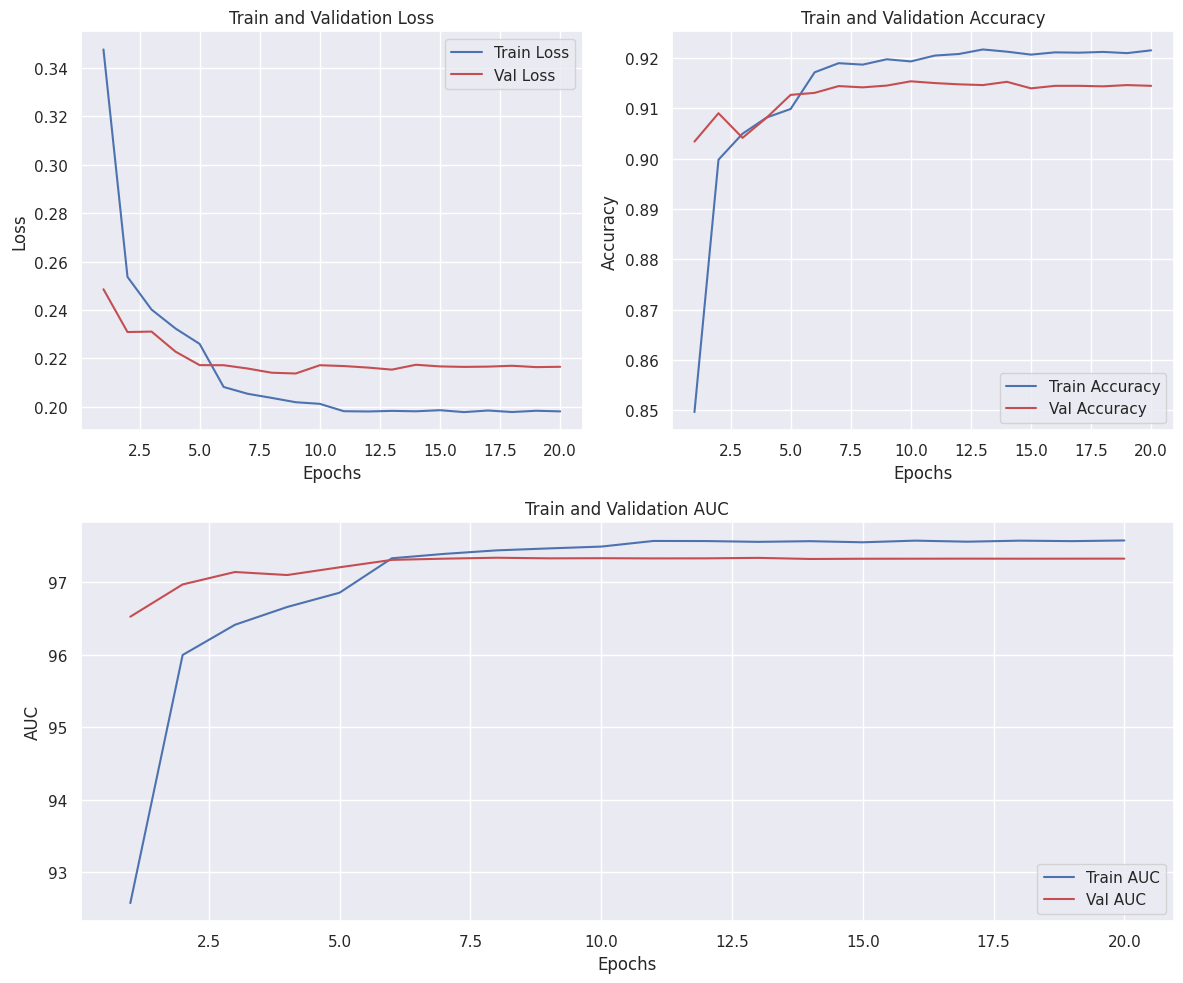

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU

In [9]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, i

Epoch   1/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   1/20:   0%|          | 1/1250 [00:01<36:08,  1.74s/batch]

Epoch   1/20:   0%|          | 2/1250 [00:03<30:44,  1.48s/batch]

Epoch   1/20:   0%|          | 3/1250 [00:04<28:59,  1.39s/batch]

Epoch   1/20:   0%|          | 4/1250 [00:05<28:15,  1.36s/batch]

Epoch   1/20:   0%|          | 5/1250 [00:06<27:47,  1.34s/batch]

Epoch   1/20:   0%|          | 6/1250 [00:08<27:27,  1.32s/batch]

Epoch   1/20:   1%|          | 7/1250 [00:09<27:15,  1.32s/batch]

Epoch   1/20:   1%|          | 8/1250 [00:10<27:15,  1.32s/batch]

Epoch   1/20:   1%|          | 9/1250 [00:12<28:41,  1.39s/batch]

Epoch   1/20:   1%|          | 10/1250 [00:13<28:03,  1.36s/batch]

Epoch   1/20:   1%|          | 11/1250 [00:14<27:38,  1.34s/batch]

Epoch   1/20:   1%|          | 12/1250 [00:16<27:20,  1.33s/batch]

Epoch   1/20:   1%|          | 13/1250 [00:17<27:06,  1.31s/batch]

Epoch   1/20:   1%|          | 14/1250 [00:18<27:00,  1.31s/batch]

Epoch   1/20:   1%|          | 15/1250 [00:20<26:52,  1.31s/batch]

Epoch   1/20:   1%|▏         | 16/1250 [00:21<26:47,  1.30s/batch]

Epoch   1/20:   1%|▏         | 17/1250 [00:22<26:43,  1.30s/batch]

Epoch   1/20:   1%|▏         | 18/1250 [00:24<26:40,  1.30s/batch]

Epoch   1/20:   2%|▏         | 19/1250 [00:25<26:36,  1.30s/batch]

Epoch   1/20:   2%|▏         | 20/1250 [00:26<26:33,  1.30s/batch]

Epoch   1/20:   2%|▏         | 21/1250 [00:27<26:30,  1.29s/batch]

Epoch   1/20:   2%|▏         | 22/1250 [00:29<26:27,  1.29s/batch]

Epoch   1/20:   2%|▏         | 23/1250 [00:30<26:40,  1.30s/batch]

Epoch   1/20:   2%|▏         | 24/1250 [00:32<29:21,  1.44s/batch]

Epoch   1/20:   2%|▏         | 25/1250 [00:33<28:26,  1.39s/batch]

Epoch   1/20:   2%|▏         | 26/1250 [00:34<28:13,  1.38s/batch]

Epoch   1/20:   2%|▏         | 27/1250 [00:36<30:29,  1.50s/batch]

Epoch   1/20:   2%|▏         | 28/1250 [00:38<30:36,  1.50s/batch]

Epoch   1/20:   2%|▏         | 29/1250 [00:39<29:16,  1.44s/batch]

Epoch   1/20:   2%|▏         | 30/1250 [00:40<28:21,  1.39s/batch]

Epoch   1/20:   2%|▏         | 31/1250 [00:42<27:41,  1.36s/batch]

Epoch   1/20:   3%|▎         | 32/1250 [00:43<27:13,  1.34s/batch]

Epoch   1/20:   3%|▎         | 33/1250 [00:44<26:54,  1.33s/batch]

Epoch   1/20:   3%|▎         | 34/1250 [00:45<26:39,  1.32s/batch]

Epoch   1/20:   3%|▎         | 35/1250 [00:47<26:28,  1.31s/batch]

Epoch   1/20:   3%|▎         | 36/1250 [00:48<26:21,  1.30s/batch]

Epoch   1/20:   3%|▎         | 37/1250 [00:49<26:16,  1.30s/batch]

Epoch   1/20:   3%|▎         | 38/1250 [00:51<26:12,  1.30s/batch]

Epoch   1/20:   3%|▎         | 39/1250 [00:52<26:09,  1.30s/batch]

Epoch   1/20:   3%|▎         | 40/1250 [00:53<26:05,  1.29s/batch]

Epoch   1/20:   3%|▎         | 41/1250 [00:55<26:04,  1.29s/batch]

Epoch   1/20:   3%|▎         | 42/1250 [00:56<26:01,  1.29s/batch]

Epoch   1/20:   3%|▎         | 43/1250 [00:57<26:00,  1.29s/batch]

Epoch   1/20:   4%|▎         | 44/1250 [00:58<25:59,  1.29s/batch]

Epoch   1/20:   4%|▎         | 45/1250 [01:00<26:46,  1.33s/batch]

Epoch   1/20:   4%|▎         | 46/1250 [01:01<27:07,  1.35s/batch]

Epoch   1/20:   4%|▍         | 47/1250 [01:03<27:55,  1.39s/batch]

Epoch   1/20:   4%|▍         | 48/1250 [01:04<27:27,  1.37s/batch]

Epoch   1/20:   4%|▍         | 49/1250 [01:05<26:58,  1.35s/batch]

Epoch   1/20:   4%|▍         | 50/1250 [01:07<29:23,  1.47s/batch]

Epoch   1/20:   4%|▍         | 51/1250 [01:08<28:44,  1.44s/batch]

Epoch   1/20:   4%|▍         | 52/1250 [01:10<27:57,  1.40s/batch]

Epoch   1/20:   4%|▍         | 53/1250 [01:11<27:23,  1.37s/batch]

Epoch   1/20:   4%|▍         | 54/1250 [01:12<27:00,  1.35s/batch]

Epoch   1/20:   4%|▍         | 55/1250 [01:14<26:43,  1.34s/batch]

Epoch   1/20:   4%|▍         | 56/1250 [01:15<26:33,  1.33s/batch]

Epoch   1/20:   5%|▍         | 57/1250 [01:16<26:26,  1.33s/batch]

Epoch   1/20:   5%|▍         | 58/1250 [01:18<26:19,  1.32s/batch]

Epoch   1/20:   5%|▍         | 59/1250 [01:19<26:41,  1.34s/batch]

Epoch   1/20:   5%|▍         | 60/1250 [01:21<29:23,  1.48s/batch]

Epoch   1/20:   5%|▍         | 61/1250 [01:22<28:16,  1.43s/batch]

Epoch   1/20:   5%|▍         | 62/1250 [01:23<27:31,  1.39s/batch]

Epoch   1/20:   5%|▌         | 63/1250 [01:25<26:59,  1.36s/batch]

Epoch   1/20:   5%|▌         | 64/1250 [01:26<26:37,  1.35s/batch]

Epoch   1/20:   5%|▌         | 65/1250 [01:28<29:00,  1.47s/batch]

Epoch   1/20:   5%|▌         | 66/1250 [01:29<29:10,  1.48s/batch]

Epoch   1/20:   5%|▌         | 67/1250 [01:31<28:06,  1.43s/batch]

Epoch   1/20:   5%|▌         | 68/1250 [01:32<27:17,  1.38s/batch]

Epoch   1/20:   6%|▌         | 69/1250 [01:33<28:09,  1.43s/batch]

Epoch   1/20:   6%|▌         | 70/1250 [01:35<27:19,  1.39s/batch]

Epoch   1/20:   6%|▌         | 71/1250 [01:36<26:43,  1.36s/batch]

Epoch   1/20:   6%|▌         | 72/1250 [01:37<26:18,  1.34s/batch]

Epoch   1/20:   6%|▌         | 73/1250 [01:39<26:01,  1.33s/batch]

Epoch   1/20:   6%|▌         | 74/1250 [01:40<25:46,  1.32s/batch]

Epoch   1/20:   6%|▌         | 75/1250 [01:41<25:36,  1.31s/batch]

Epoch   1/20:   6%|▌         | 76/1250 [01:42<25:29,  1.30s/batch]

Epoch   1/20:   6%|▌         | 77/1250 [01:44<25:25,  1.30s/batch]

Epoch   1/20:   6%|▌         | 78/1250 [01:45<25:22,  1.30s/batch]

Epoch   1/20:   6%|▋         | 79/1250 [01:46<25:18,  1.30s/batch]

Epoch   1/20:   6%|▋         | 80/1250 [01:48<25:15,  1.30s/batch]

Epoch   1/20:   6%|▋         | 81/1250 [01:49<26:10,  1.34s/batch]

Epoch   1/20:   7%|▋         | 82/1250 [01:50<25:50,  1.33s/batch]

Epoch   1/20:   7%|▋         | 83/1250 [01:52<25:37,  1.32s/batch]

Epoch   1/20:   7%|▋         | 84/1250 [01:53<25:25,  1.31s/batch]

Epoch   1/20:   7%|▋         | 85/1250 [01:54<26:06,  1.34s/batch]

Epoch   1/20:   7%|▋         | 86/1250 [01:56<28:38,  1.48s/batch]

Epoch   1/20:   7%|▋         | 87/1250 [01:58<28:00,  1.44s/batch]

Epoch   1/20:   7%|▋         | 88/1250 [01:59<27:17,  1.41s/batch]

Epoch   1/20:   7%|▋         | 89/1250 [02:00<26:54,  1.39s/batch]

Epoch   1/20:   7%|▋         | 90/1250 [02:02<28:59,  1.50s/batch]

Epoch   1/20:   7%|▋         | 91/1250 [02:03<28:03,  1.45s/batch]

Epoch   1/20:   7%|▋         | 92/1250 [02:05<29:49,  1.55s/batch]

Epoch   1/20:   7%|▋         | 93/1250 [02:06<28:44,  1.49s/batch]

Epoch   1/20:   8%|▊         | 94/1250 [02:08<27:33,  1.43s/batch]

Epoch   1/20:   8%|▊         | 95/1250 [02:09<26:42,  1.39s/batch]

Epoch   1/20:   8%|▊         | 96/1250 [02:10<26:08,  1.36s/batch]

Epoch   1/20:   8%|▊         | 97/1250 [02:12<25:43,  1.34s/batch]

Epoch   1/20:   8%|▊         | 98/1250 [02:13<25:25,  1.32s/batch]

Epoch   1/20:   8%|▊         | 99/1250 [02:14<25:14,  1.32s/batch]

Epoch   1/20:   8%|▊         | 100/1250 [02:15<25:04,  1.31s/batch]

Epoch   1/20:   8%|▊         | 101/1250 [02:17<24:59,  1.31s/batch]

Epoch   1/20:   8%|▊         | 102/1250 [02:18<24:53,  1.30s/batch]

Epoch   1/20:   8%|▊         | 103/1250 [02:19<24:50,  1.30s/batch]

Epoch   1/20:   8%|▊         | 104/1250 [02:21<24:46,  1.30s/batch]

Epoch   1/20:   8%|▊         | 105/1250 [02:22<24:45,  1.30s/batch]

Epoch   1/20:   8%|▊         | 106/1250 [02:23<25:17,  1.33s/batch]

Epoch   1/20:   9%|▊         | 107/1250 [02:25<25:05,  1.32s/batch]

Epoch   1/20:   9%|▊         | 108/1250 [02:26<24:56,  1.31s/batch]

Epoch   1/20:   9%|▊         | 109/1250 [02:27<24:47,  1.30s/batch]

Epoch   1/20:   9%|▉         | 110/1250 [02:29<24:42,  1.30s/batch]

Epoch   1/20:   9%|▉         | 111/1250 [02:30<24:37,  1.30s/batch]

Epoch   1/20:   9%|▉         | 112/1250 [02:31<24:32,  1.29s/batch]

Epoch   1/20:   9%|▉         | 113/1250 [02:32<24:29,  1.29s/batch]

Epoch   1/20:   9%|▉         | 114/1250 [02:34<24:28,  1.29s/batch]

Epoch   1/20:   9%|▉         | 115/1250 [02:35<25:26,  1.34s/batch]

Epoch   1/20:   9%|▉         | 116/1250 [02:36<25:07,  1.33s/batch]

Epoch   1/20:   9%|▉         | 117/1250 [02:38<24:53,  1.32s/batch]

Epoch   1/20:   9%|▉         | 118/1250 [02:39<24:42,  1.31s/batch]

Epoch   1/20:  10%|▉         | 119/1250 [02:40<24:34,  1.30s/batch]

Epoch   1/20:  10%|▉         | 120/1250 [02:42<24:29,  1.30s/batch]

Epoch   1/20:  10%|▉         | 121/1250 [02:43<24:25,  1.30s/batch]

Epoch   1/20:  10%|▉         | 122/1250 [02:44<24:21,  1.30s/batch]

Epoch   1/20:  10%|▉         | 123/1250 [02:46<26:54,  1.43s/batch]

Epoch   1/20:  10%|▉         | 124/1250 [02:47<26:22,  1.41s/batch]

Epoch   1/20:  10%|█         | 125/1250 [02:49<25:43,  1.37s/batch]

Epoch   1/20:  10%|█         | 126/1250 [02:50<25:57,  1.39s/batch]

Epoch   1/20:  10%|█         | 127/1250 [02:52<27:17,  1.46s/batch]

Epoch   1/20:  10%|█         | 128/1250 [02:53<26:27,  1.41s/batch]

Epoch   1/20:  10%|█         | 129/1250 [02:54<25:47,  1.38s/batch]

Epoch   1/20:  10%|█         | 130/1250 [02:56<25:17,  1.36s/batch]

Epoch   1/20:  10%|█         | 131/1250 [02:57<24:56,  1.34s/batch]

Epoch   1/20:  11%|█         | 132/1250 [02:58<24:41,  1.33s/batch]

Epoch   1/20:  11%|█         | 133/1250 [02:59<24:30,  1.32s/batch]

Epoch   1/20:  11%|█         | 134/1250 [03:01<24:22,  1.31s/batch]

Epoch   1/20:  11%|█         | 135/1250 [03:02<24:16,  1.31s/batch]

Epoch   1/20:  11%|█         | 136/1250 [03:03<24:11,  1.30s/batch]

Epoch   1/20:  11%|█         | 137/1250 [03:05<24:08,  1.30s/batch]

Epoch   1/20:  11%|█         | 138/1250 [03:06<25:05,  1.35s/batch]

Epoch   1/20:  11%|█         | 139/1250 [03:07<24:46,  1.34s/batch]

Epoch   1/20:  11%|█         | 140/1250 [03:09<24:30,  1.33s/batch]

Epoch   1/20:  11%|█▏        | 141/1250 [03:10<24:20,  1.32s/batch]

Epoch   1/20:  11%|█▏        | 142/1250 [03:11<24:12,  1.31s/batch]

Epoch   1/20:  11%|█▏        | 143/1250 [03:13<24:06,  1.31s/batch]

Epoch   1/20:  12%|█▏        | 144/1250 [03:14<24:01,  1.30s/batch]

Epoch   1/20:  12%|█▏        | 145/1250 [03:15<23:57,  1.30s/batch]

Epoch   1/20:  12%|█▏        | 146/1250 [03:16<23:56,  1.30s/batch]

Epoch   1/20:  12%|█▏        | 147/1250 [03:18<23:53,  1.30s/batch]

Epoch   1/20:  12%|█▏        | 148/1250 [03:19<23:50,  1.30s/batch]

Epoch   1/20:  12%|█▏        | 149/1250 [03:20<23:55,  1.30s/batch]

Epoch   1/20:  12%|█▏        | 150/1250 [03:22<24:36,  1.34s/batch]

Epoch   1/20:  12%|█▏        | 151/1250 [03:23<24:27,  1.34s/batch]

Epoch   1/20:  12%|█▏        | 152/1250 [03:24<24:18,  1.33s/batch]

Epoch   1/20:  12%|█▏        | 153/1250 [03:26<24:07,  1.32s/batch]

Epoch   1/20:  12%|█▏        | 154/1250 [03:27<24:00,  1.31s/batch]

Epoch   1/20:  12%|█▏        | 155/1250 [03:28<23:55,  1.31s/batch]

Epoch   1/20:  12%|█▏        | 156/1250 [03:30<23:51,  1.31s/batch]

Epoch   1/20:  13%|█▎        | 157/1250 [03:31<23:46,  1.30s/batch]

Epoch   1/20:  13%|█▎        | 158/1250 [03:32<23:43,  1.30s/batch]

Epoch   1/20:  13%|█▎        | 159/1250 [03:34<23:43,  1.30s/batch]

Epoch   1/20:  13%|█▎        | 160/1250 [03:35<23:40,  1.30s/batch]

Epoch   1/20:  13%|█▎        | 161/1250 [03:36<25:12,  1.39s/batch]

Epoch   1/20:  13%|█▎        | 162/1250 [03:38<24:43,  1.36s/batch]

Epoch   1/20:  13%|█▎        | 163/1250 [03:39<24:21,  1.34s/batch]

Epoch   1/20:  13%|█▎        | 164/1250 [03:40<24:05,  1.33s/batch]

Epoch   1/20:  13%|█▎        | 165/1250 [03:42<23:55,  1.32s/batch]

Epoch   1/20:  13%|█▎        | 166/1250 [03:43<23:47,  1.32s/batch]

Epoch   1/20:  13%|█▎        | 167/1250 [03:44<23:42,  1.31s/batch]

Epoch   1/20:  13%|█▎        | 168/1250 [03:46<23:38,  1.31s/batch]

Epoch   1/20:  14%|█▎        | 169/1250 [03:47<23:35,  1.31s/batch]

Epoch   1/20:  14%|█▎        | 170/1250 [03:48<23:32,  1.31s/batch]

Epoch   1/20:  14%|█▎        | 171/1250 [03:49<23:32,  1.31s/batch]

Epoch   1/20:  14%|█▍        | 172/1250 [03:51<26:00,  1.45s/batch]

Epoch   1/20:  14%|█▍        | 173/1250 [03:53<26:05,  1.45s/batch]

Epoch   1/20:  14%|█▍        | 174/1250 [03:54<25:18,  1.41s/batch]

Epoch   1/20:  14%|█▍        | 175/1250 [03:55<24:42,  1.38s/batch]

Epoch   1/20:  14%|█▍        | 176/1250 [03:57<24:15,  1.36s/batch]

Epoch   1/20:  14%|█▍        | 177/1250 [03:58<23:59,  1.34s/batch]

Epoch   1/20:  14%|█▍        | 178/1250 [03:59<23:45,  1.33s/batch]

Epoch   1/20:  14%|█▍        | 179/1250 [04:01<23:35,  1.32s/batch]

Epoch   1/20:  14%|█▍        | 180/1250 [04:02<23:28,  1.32s/batch]

Epoch   1/20:  14%|█▍        | 181/1250 [04:03<23:24,  1.31s/batch]

Epoch   1/20:  15%|█▍        | 182/1250 [04:04<23:20,  1.31s/batch]

Epoch   1/20:  15%|█▍        | 183/1250 [04:06<23:16,  1.31s/batch]

Epoch   1/20:  15%|█▍        | 184/1250 [04:07<24:06,  1.36s/batch]

Epoch   1/20:  15%|█▍        | 185/1250 [04:09<23:47,  1.34s/batch]

Epoch   1/20:  15%|█▍        | 186/1250 [04:10<23:34,  1.33s/batch]

Epoch   1/20:  15%|█▍        | 187/1250 [04:11<24:20,  1.37s/batch]

Epoch   1/20:  15%|█▌        | 188/1250 [04:13<23:53,  1.35s/batch]

Epoch   1/20:  15%|█▌        | 189/1250 [04:14<23:34,  1.33s/batch]

Epoch   1/20:  15%|█▌        | 190/1250 [04:15<23:19,  1.32s/batch]

Epoch   1/20:  15%|█▌        | 191/1250 [04:16<23:09,  1.31s/batch]

Epoch   1/20:  15%|█▌        | 192/1250 [04:18<23:02,  1.31s/batch]

Epoch   1/20:  15%|█▌        | 193/1250 [04:19<22:57,  1.30s/batch]

Epoch   1/20:  16%|█▌        | 194/1250 [04:20<23:04,  1.31s/batch]

Epoch   1/20:  16%|█▌        | 195/1250 [04:22<25:33,  1.45s/batch]

Epoch   1/20:  16%|█▌        | 196/1250 [04:24<25:38,  1.46s/batch]

Epoch   1/20:  16%|█▌        | 197/1250 [04:25<24:58,  1.42s/batch]

Epoch   1/20:  16%|█▌        | 198/1250 [04:26<24:27,  1.39s/batch]

Epoch   1/20:  16%|█▌        | 199/1250 [04:28<24:03,  1.37s/batch]

Epoch   1/20:  16%|█▌        | 200/1250 [04:29<23:46,  1.36s/batch]

Epoch   1/20:  16%|█▌        | 201/1250 [04:30<23:35,  1.35s/batch]

Epoch   1/20:  16%|█▌        | 202/1250 [04:32<23:28,  1.34s/batch]

Epoch   1/20:  16%|█▌        | 203/1250 [04:33<23:21,  1.34s/batch]

Epoch   1/20:  16%|█▋        | 204/1250 [04:34<23:17,  1.34s/batch]

Epoch   1/20:  16%|█▋        | 205/1250 [04:36<23:13,  1.33s/batch]

Epoch   1/20:  16%|█▋        | 206/1250 [04:37<23:05,  1.33s/batch]

Epoch   1/20:  17%|█▋        | 207/1250 [04:39<25:23,  1.46s/batch]

Epoch   1/20:  17%|█▋        | 208/1250 [04:40<26:15,  1.51s/batch]

Epoch   1/20:  17%|█▋        | 209/1250 [04:42<25:12,  1.45s/batch]

Epoch   1/20:  17%|█▋        | 210/1250 [04:43<24:27,  1.41s/batch]

Epoch   1/20:  17%|█▋        | 211/1250 [04:44<23:55,  1.38s/batch]

Epoch   1/20:  17%|█▋        | 212/1250 [04:46<23:34,  1.36s/batch]

Epoch   1/20:  17%|█▋        | 213/1250 [04:47<23:17,  1.35s/batch]

Epoch   1/20:  17%|█▋        | 214/1250 [04:48<23:05,  1.34s/batch]

Epoch   1/20:  17%|█▋        | 215/1250 [04:50<22:56,  1.33s/batch]

Epoch   1/20:  17%|█▋        | 216/1250 [04:51<22:51,  1.33s/batch]

Epoch   1/20:  17%|█▋        | 217/1250 [04:53<24:53,  1.45s/batch]

Epoch   1/20:  17%|█▋        | 218/1250 [04:54<24:59,  1.45s/batch]

Epoch   1/20:  18%|█▊        | 219/1250 [04:55<24:23,  1.42s/batch]

Epoch   1/20:  18%|█▊        | 220/1250 [04:57<23:50,  1.39s/batch]

Epoch   1/20:  18%|█▊        | 221/1250 [04:58<23:24,  1.36s/batch]

Epoch   1/20:  18%|█▊        | 222/1250 [04:59<23:07,  1.35s/batch]

Epoch   1/20:  18%|█▊        | 223/1250 [05:01<22:52,  1.34s/batch]

Epoch   1/20:  18%|█▊        | 224/1250 [05:02<22:46,  1.33s/batch]

Epoch   1/20:  18%|█▊        | 225/1250 [05:03<22:39,  1.33s/batch]

Epoch   1/20:  18%|█▊        | 226/1250 [05:05<22:33,  1.32s/batch]

Epoch   1/20:  18%|█▊        | 227/1250 [05:06<22:30,  1.32s/batch]

Epoch   1/20:  18%|█▊        | 228/1250 [05:07<22:25,  1.32s/batch]

Epoch   1/20:  18%|█▊        | 229/1250 [05:09<24:38,  1.45s/batch]

Epoch   1/20:  18%|█▊        | 230/1250 [05:10<23:56,  1.41s/batch]

Epoch   1/20:  18%|█▊        | 231/1250 [05:12<23:25,  1.38s/batch]

Epoch   1/20:  19%|█▊        | 232/1250 [05:13<23:04,  1.36s/batch]

Epoch   1/20:  19%|█▊        | 233/1250 [05:14<22:49,  1.35s/batch]

Epoch   1/20:  19%|█▊        | 234/1250 [05:16<22:37,  1.34s/batch]

Epoch   1/20:  19%|█▉        | 235/1250 [05:17<22:28,  1.33s/batch]

Epoch   1/20:  19%|█▉        | 236/1250 [05:18<22:22,  1.32s/batch]

Epoch   1/20:  19%|█▉        | 237/1250 [05:19<22:18,  1.32s/batch]

Epoch   1/20:  19%|█▉        | 238/1250 [05:21<22:13,  1.32s/batch]

Epoch   1/20:  19%|█▉        | 239/1250 [05:22<22:10,  1.32s/batch]

Epoch   1/20:  19%|█▉        | 240/1250 [05:23<22:11,  1.32s/batch]

Epoch   1/20:  19%|█▉        | 241/1250 [05:25<22:11,  1.32s/batch]

Epoch   1/20:  19%|█▉        | 242/1250 [05:26<22:09,  1.32s/batch]

Epoch   1/20:  19%|█▉        | 243/1250 [05:27<22:09,  1.32s/batch]

Epoch   1/20:  20%|█▉        | 244/1250 [05:29<22:05,  1.32s/batch]

Epoch   1/20:  20%|█▉        | 245/1250 [05:30<22:03,  1.32s/batch]

Epoch   1/20:  20%|█▉        | 246/1250 [05:31<22:00,  1.31s/batch]

Epoch   1/20:  20%|█▉        | 247/1250 [05:33<21:57,  1.31s/batch]

Epoch   1/20:  20%|█▉        | 248/1250 [05:34<21:55,  1.31s/batch]

Epoch   1/20:  20%|█▉        | 249/1250 [05:35<21:54,  1.31s/batch]

Epoch   1/20:  20%|██        | 250/1250 [05:37<21:53,  1.31s/batch]

Epoch   1/20:  20%|██        | 251/1250 [05:38<21:50,  1.31s/batch]

Epoch   1/20:  20%|██        | 252/1250 [05:39<22:41,  1.36s/batch]

Epoch   1/20:  20%|██        | 253/1250 [05:41<22:23,  1.35s/batch]

Epoch   1/20:  20%|██        | 254/1250 [05:42<22:11,  1.34s/batch]

Epoch   1/20:  20%|██        | 255/1250 [05:43<22:03,  1.33s/batch]

Epoch   1/20:  20%|██        | 256/1250 [05:45<21:56,  1.32s/batch]

Epoch   1/20:  21%|██        | 257/1250 [05:46<21:51,  1.32s/batch]

Epoch   1/20:  21%|██        | 258/1250 [05:47<21:46,  1.32s/batch]

Epoch   1/20:  21%|██        | 259/1250 [05:49<21:42,  1.31s/batch]

Epoch   1/20:  21%|██        | 260/1250 [05:50<21:42,  1.32s/batch]

Epoch   1/20:  21%|██        | 261/1250 [05:51<21:40,  1.31s/batch]

Epoch   1/20:  21%|██        | 262/1250 [05:52<21:37,  1.31s/batch]

Epoch   1/20:  21%|██        | 263/1250 [05:54<21:38,  1.32s/batch]

Epoch   1/20:  21%|██        | 264/1250 [05:55<22:23,  1.36s/batch]

Epoch   1/20:  21%|██        | 265/1250 [05:57<22:50,  1.39s/batch]

Epoch   1/20:  21%|██▏       | 266/1250 [05:58<22:28,  1.37s/batch]

Epoch   1/20:  21%|██▏       | 267/1250 [05:59<22:09,  1.35s/batch]

Epoch   1/20:  21%|██▏       | 268/1250 [06:01<21:55,  1.34s/batch]

Epoch   1/20:  22%|██▏       | 269/1250 [06:02<21:45,  1.33s/batch]

Epoch   1/20:  22%|██▏       | 270/1250 [06:03<21:39,  1.33s/batch]

Epoch   1/20:  22%|██▏       | 271/1250 [06:05<21:35,  1.32s/batch]

Epoch   1/20:  22%|██▏       | 272/1250 [06:06<21:31,  1.32s/batch]

Epoch   1/20:  22%|██▏       | 273/1250 [06:07<21:26,  1.32s/batch]

Epoch   1/20:  22%|██▏       | 274/1250 [06:09<21:23,  1.31s/batch]

Epoch   1/20:  22%|██▏       | 275/1250 [06:10<22:21,  1.38s/batch]

Epoch   1/20:  22%|██▏       | 276/1250 [06:11<21:59,  1.35s/batch]

Epoch   1/20:  22%|██▏       | 277/1250 [06:13<21:44,  1.34s/batch]

Epoch   1/20:  22%|██▏       | 278/1250 [06:14<21:34,  1.33s/batch]

Epoch   1/20:  22%|██▏       | 279/1250 [06:15<21:29,  1.33s/batch]

Epoch   1/20:  22%|██▏       | 280/1250 [06:17<21:23,  1.32s/batch]

Epoch   1/20:  22%|██▏       | 281/1250 [06:18<21:18,  1.32s/batch]

Epoch   1/20:  23%|██▎       | 282/1250 [06:19<21:15,  1.32s/batch]

Epoch   1/20:  23%|██▎       | 283/1250 [06:21<21:12,  1.32s/batch]

Epoch   1/20:  23%|██▎       | 284/1250 [06:22<21:12,  1.32s/batch]

Epoch   1/20:  23%|██▎       | 285/1250 [06:23<21:09,  1.32s/batch]

Epoch   1/20:  23%|██▎       | 286/1250 [06:24<21:07,  1.32s/batch]

Epoch   1/20:  23%|██▎       | 287/1250 [06:26<21:06,  1.31s/batch]

Epoch   1/20:  23%|██▎       | 288/1250 [06:27<21:07,  1.32s/batch]

Epoch   1/20:  23%|██▎       | 289/1250 [06:29<21:44,  1.36s/batch]

Epoch   1/20:  23%|██▎       | 290/1250 [06:30<21:32,  1.35s/batch]

Epoch   1/20:  23%|██▎       | 291/1250 [06:31<21:20,  1.34s/batch]

Epoch   1/20:  23%|██▎       | 292/1250 [06:33<21:11,  1.33s/batch]

Epoch   1/20:  23%|██▎       | 293/1250 [06:34<21:04,  1.32s/batch]

Epoch   1/20:  24%|██▎       | 294/1250 [06:35<21:00,  1.32s/batch]

Epoch   1/20:  24%|██▎       | 295/1250 [06:36<20:56,  1.32s/batch]

Epoch   1/20:  24%|██▎       | 296/1250 [06:38<20:53,  1.31s/batch]

Epoch   1/20:  24%|██▍       | 297/1250 [06:39<22:30,  1.42s/batch]

Epoch   1/20:  24%|██▍       | 298/1250 [06:41<22:48,  1.44s/batch]

Epoch   1/20:  24%|██▍       | 299/1250 [06:42<22:04,  1.39s/batch]

Epoch   1/20:  24%|██▍       | 300/1250 [06:43<21:33,  1.36s/batch]

Epoch   1/20:  24%|██▍       | 301/1250 [06:45<21:17,  1.35s/batch]

Epoch   1/20:  24%|██▍       | 302/1250 [06:46<20:59,  1.33s/batch]

Epoch   1/20:  24%|██▍       | 303/1250 [06:47<20:48,  1.32s/batch]

Epoch   1/20:  24%|██▍       | 304/1250 [06:49<20:39,  1.31s/batch]

Epoch   1/20:  24%|██▍       | 305/1250 [06:50<20:33,  1.31s/batch]

Epoch   1/20:  24%|██▍       | 306/1250 [06:52<21:42,  1.38s/batch]

Epoch   1/20:  25%|██▍       | 307/1250 [06:53<21:40,  1.38s/batch]

Epoch   1/20:  25%|██▍       | 308/1250 [06:54<21:15,  1.35s/batch]

Epoch   1/20:  25%|██▍       | 309/1250 [06:55<20:56,  1.34s/batch]

Epoch   1/20:  25%|██▍       | 310/1250 [06:57<20:44,  1.32s/batch]

Epoch   1/20:  25%|██▍       | 311/1250 [06:58<20:34,  1.31s/batch]

Epoch   1/20:  25%|██▍       | 312/1250 [06:59<20:36,  1.32s/batch]

Epoch   1/20:  25%|██▌       | 313/1250 [07:01<21:15,  1.36s/batch]

Epoch   1/20:  25%|██▌       | 314/1250 [07:02<20:59,  1.35s/batch]

Epoch   1/20:  25%|██▌       | 315/1250 [07:03<20:47,  1.33s/batch]

Epoch   1/20:  25%|██▌       | 316/1250 [07:05<20:40,  1.33s/batch]

Epoch   1/20:  25%|██▌       | 317/1250 [07:06<20:33,  1.32s/batch]

Epoch   1/20:  25%|██▌       | 318/1250 [07:07<20:28,  1.32s/batch]

Epoch   1/20:  26%|██▌       | 319/1250 [07:09<20:24,  1.32s/batch]

Epoch   1/20:  26%|██▌       | 320/1250 [07:10<20:21,  1.31s/batch]

Epoch   1/20:  26%|██▌       | 321/1250 [07:11<20:57,  1.35s/batch]

Epoch   1/20:  26%|██▌       | 322/1250 [07:13<20:49,  1.35s/batch]

Epoch   1/20:  26%|██▌       | 323/1250 [07:14<20:40,  1.34s/batch]

Epoch   1/20:  26%|██▌       | 324/1250 [07:15<20:32,  1.33s/batch]

Epoch   1/20:  26%|██▌       | 325/1250 [07:17<20:26,  1.33s/batch]

Epoch   1/20:  26%|██▌       | 326/1250 [07:18<20:21,  1.32s/batch]

Epoch   1/20:  26%|██▌       | 327/1250 [07:19<20:18,  1.32s/batch]

Epoch   1/20:  26%|██▌       | 328/1250 [07:21<20:14,  1.32s/batch]

Epoch   1/20:  26%|██▋       | 329/1250 [07:22<20:15,  1.32s/batch]

Epoch   1/20:  26%|██▋       | 330/1250 [07:23<20:12,  1.32s/batch]

Epoch   1/20:  26%|██▋       | 331/1250 [07:25<20:10,  1.32s/batch]

Epoch   1/20:  27%|██▋       | 332/1250 [07:26<20:07,  1.32s/batch]

Epoch   1/20:  27%|██▋       | 333/1250 [07:27<20:04,  1.31s/batch]

Epoch   1/20:  27%|██▋       | 334/1250 [07:29<20:01,  1.31s/batch]

Epoch   1/20:  27%|██▋       | 335/1250 [07:30<19:58,  1.31s/batch]

Epoch   1/20:  27%|██▋       | 336/1250 [07:31<19:53,  1.31s/batch]

Epoch   1/20:  27%|██▋       | 337/1250 [07:32<19:48,  1.30s/batch]

Epoch   1/20:  27%|██▋       | 338/1250 [07:34<19:44,  1.30s/batch]

Epoch   1/20:  27%|██▋       | 339/1250 [07:35<19:43,  1.30s/batch]

Epoch   1/20:  27%|██▋       | 340/1250 [07:36<19:40,  1.30s/batch]

Epoch   1/20:  27%|██▋       | 341/1250 [07:38<19:37,  1.30s/batch]

Epoch   1/20:  27%|██▋       | 342/1250 [07:39<19:34,  1.29s/batch]

Epoch   1/20:  27%|██▋       | 343/1250 [07:40<19:34,  1.30s/batch]

Epoch   1/20:  28%|██▊       | 344/1250 [07:42<21:37,  1.43s/batch]

Epoch   1/20:  28%|██▊       | 345/1250 [07:44<22:26,  1.49s/batch]

Epoch   1/20:  28%|██▊       | 346/1250 [07:45<21:32,  1.43s/batch]

Epoch   1/20:  28%|██▊       | 347/1250 [07:46<20:54,  1.39s/batch]

Epoch   1/20:  28%|██▊       | 348/1250 [07:47<20:28,  1.36s/batch]

Epoch   1/20:  28%|██▊       | 349/1250 [07:49<20:08,  1.34s/batch]

Epoch   1/20:  28%|██▊       | 350/1250 [07:50<19:54,  1.33s/batch]

Epoch   1/20:  28%|██▊       | 351/1250 [07:51<19:43,  1.32s/batch]

Epoch   1/20:  28%|██▊       | 352/1250 [07:53<19:35,  1.31s/batch]

Epoch   1/20:  28%|██▊       | 353/1250 [07:54<19:30,  1.31s/batch]

Epoch   1/20:  28%|██▊       | 354/1250 [07:55<19:25,  1.30s/batch]

Epoch   1/20:  28%|██▊       | 355/1250 [07:57<19:22,  1.30s/batch]

Epoch   1/20:  28%|██▊       | 356/1250 [07:58<19:19,  1.30s/batch]

Epoch   1/20:  29%|██▊       | 357/1250 [07:59<20:02,  1.35s/batch]

Epoch   1/20:  29%|██▊       | 358/1250 [08:01<20:37,  1.39s/batch]

Epoch   1/20:  29%|██▊       | 359/1250 [08:02<20:15,  1.36s/batch]

Epoch   1/20:  29%|██▉       | 360/1250 [08:03<20:01,  1.35s/batch]

Epoch   1/20:  29%|██▉       | 361/1250 [08:05<19:45,  1.33s/batch]

Epoch   1/20:  29%|██▉       | 362/1250 [08:06<19:33,  1.32s/batch]

Epoch   1/20:  29%|██▉       | 363/1250 [08:07<19:23,  1.31s/batch]

Epoch   1/20:  29%|██▉       | 364/1250 [08:09<19:17,  1.31s/batch]

Epoch   1/20:  29%|██▉       | 365/1250 [08:10<19:11,  1.30s/batch]

Epoch   1/20:  29%|██▉       | 366/1250 [08:11<19:08,  1.30s/batch]

Epoch   1/20:  29%|██▉       | 367/1250 [08:12<19:05,  1.30s/batch]

Epoch   1/20:  29%|██▉       | 368/1250 [08:14<21:04,  1.43s/batch]

Epoch   1/20:  30%|██▉       | 369/1250 [08:16<21:20,  1.45s/batch]

Epoch   1/20:  30%|██▉       | 370/1250 [08:17<20:36,  1.41s/batch]

Epoch   1/20:  30%|██▉       | 371/1250 [08:18<20:05,  1.37s/batch]

Epoch   1/20:  30%|██▉       | 372/1250 [08:20<19:43,  1.35s/batch]

Epoch   1/20:  30%|██▉       | 373/1250 [08:21<19:27,  1.33s/batch]

Epoch   1/20:  30%|██▉       | 374/1250 [08:22<19:15,  1.32s/batch]

Epoch   1/20:  30%|███       | 375/1250 [08:23<19:06,  1.31s/batch]

Epoch   1/20:  30%|███       | 376/1250 [08:25<19:01,  1.31s/batch]

Epoch   1/20:  30%|███       | 377/1250 [08:26<19:01,  1.31s/batch]

Epoch   1/20:  30%|███       | 378/1250 [08:27<18:57,  1.30s/batch]

Epoch   1/20:  30%|███       | 379/1250 [08:29<18:52,  1.30s/batch]

Epoch   1/20:  30%|███       | 380/1250 [08:30<18:47,  1.30s/batch]

Epoch   1/20:  30%|███       | 381/1250 [08:31<18:48,  1.30s/batch]

Epoch   1/20:  31%|███       | 382/1250 [08:33<19:54,  1.38s/batch]

Epoch   1/20:  31%|███       | 383/1250 [08:34<19:35,  1.36s/batch]

Epoch   1/20:  31%|███       | 384/1250 [08:35<19:18,  1.34s/batch]

Epoch   1/20:  31%|███       | 385/1250 [08:37<19:05,  1.32s/batch]

Epoch   1/20:  31%|███       | 386/1250 [08:38<18:55,  1.31s/batch]

Epoch   1/20:  31%|███       | 387/1250 [08:39<18:47,  1.31s/batch]

Epoch   1/20:  31%|███       | 388/1250 [08:41<18:42,  1.30s/batch]

Epoch   1/20:  31%|███       | 389/1250 [08:42<18:40,  1.30s/batch]

Epoch   1/20:  31%|███       | 390/1250 [08:44<20:35,  1.44s/batch]

Epoch   1/20:  31%|███▏      | 391/1250 [08:45<21:55,  1.53s/batch]

Epoch   1/20:  31%|███▏      | 392/1250 [08:47<22:49,  1.60s/batch]

Epoch   1/20:  31%|███▏      | 393/1250 [08:48<21:42,  1.52s/batch]

Epoch   1/20:  32%|███▏      | 394/1250 [08:50<20:42,  1.45s/batch]

Epoch   1/20:  32%|███▏      | 395/1250 [08:51<19:59,  1.40s/batch]

Epoch   1/20:  32%|███▏      | 396/1250 [08:52<19:29,  1.37s/batch]

Epoch   1/20:  32%|███▏      | 397/1250 [08:54<19:07,  1.35s/batch]

Epoch   1/20:  32%|███▏      | 398/1250 [08:55<18:52,  1.33s/batch]

Epoch   1/20:  32%|███▏      | 399/1250 [08:56<18:41,  1.32s/batch]

Epoch   1/20:  32%|███▏      | 400/1250 [08:58<18:45,  1.32s/batch]

Epoch   1/20:  32%|███▏      | 401/1250 [08:59<18:40,  1.32s/batch]

Epoch   1/20:  32%|███▏      | 402/1250 [09:00<18:36,  1.32s/batch]

Epoch   1/20:  32%|███▏      | 403/1250 [09:01<18:34,  1.32s/batch]

Epoch   1/20:  32%|███▏      | 404/1250 [09:03<19:51,  1.41s/batch]

Epoch   1/20:  32%|███▏      | 405/1250 [09:05<21:22,  1.52s/batch]

Epoch   1/20:  32%|███▏      | 406/1250 [09:07<22:21,  1.59s/batch]

Epoch   1/20:  33%|███▎      | 407/1250 [09:08<21:09,  1.51s/batch]

Epoch   1/20:  33%|███▎      | 408/1250 [09:09<20:19,  1.45s/batch]

Epoch   1/20:  33%|███▎      | 409/1250 [09:11<19:43,  1.41s/batch]

Epoch   1/20:  33%|███▎      | 410/1250 [09:12<19:17,  1.38s/batch]

Epoch   1/20:  33%|███▎      | 411/1250 [09:13<18:59,  1.36s/batch]

Epoch   1/20:  33%|███▎      | 412/1250 [09:14<18:47,  1.35s/batch]

Epoch   1/20:  33%|███▎      | 413/1250 [09:16<20:14,  1.45s/batch]

Epoch   1/20:  33%|███▎      | 414/1250 [09:17<19:37,  1.41s/batch]

Epoch   1/20:  33%|███▎      | 415/1250 [09:19<19:12,  1.38s/batch]

Epoch   1/20:  33%|███▎      | 416/1250 [09:20<18:54,  1.36s/batch]

Epoch   1/20:  33%|███▎      | 417/1250 [09:21<18:39,  1.34s/batch]

Epoch   1/20:  33%|███▎      | 418/1250 [09:23<18:29,  1.33s/batch]

Epoch   1/20:  34%|███▎      | 419/1250 [09:24<18:23,  1.33s/batch]

Epoch   1/20:  34%|███▎      | 420/1250 [09:25<18:18,  1.32s/batch]

Epoch   1/20:  34%|███▎      | 421/1250 [09:27<18:14,  1.32s/batch]

Epoch   1/20:  34%|███▍      | 422/1250 [09:28<18:14,  1.32s/batch]

Epoch   1/20:  34%|███▍      | 423/1250 [09:29<18:09,  1.32s/batch]

Epoch   1/20:  34%|███▍      | 424/1250 [09:31<18:05,  1.31s/batch]

Epoch   1/20:  34%|███▍      | 425/1250 [09:32<18:04,  1.31s/batch]

Epoch   1/20:  34%|███▍      | 426/1250 [09:33<18:02,  1.31s/batch]

Epoch   1/20:  34%|███▍      | 427/1250 [09:35<18:01,  1.31s/batch]

Epoch   1/20:  34%|███▍      | 428/1250 [09:36<18:14,  1.33s/batch]

Epoch   1/20:  34%|███▍      | 429/1250 [09:38<19:59,  1.46s/batch]

Epoch   1/20:  34%|███▍      | 430/1250 [09:39<20:10,  1.48s/batch]

Epoch   1/20:  34%|███▍      | 431/1250 [09:41<19:27,  1.43s/batch]

Epoch   1/20:  35%|███▍      | 432/1250 [09:42<18:56,  1.39s/batch]

Epoch   1/20:  35%|███▍      | 433/1250 [09:43<18:33,  1.36s/batch]

Epoch   1/20:  35%|███▍      | 434/1250 [09:44<18:17,  1.34s/batch]

Epoch   1/20:  35%|███▍      | 435/1250 [09:46<18:05,  1.33s/batch]

Epoch   1/20:  35%|███▍      | 436/1250 [09:47<18:43,  1.38s/batch]

Epoch   1/20:  35%|███▍      | 437/1250 [09:49<18:23,  1.36s/batch]

Epoch   1/20:  35%|███▌      | 438/1250 [09:50<18:08,  1.34s/batch]

Epoch   1/20:  35%|███▌      | 439/1250 [09:51<17:57,  1.33s/batch]

Epoch   1/20:  35%|███▌      | 440/1250 [09:52<17:49,  1.32s/batch]

Epoch   1/20:  35%|███▌      | 441/1250 [09:54<17:42,  1.31s/batch]

Epoch   1/20:  35%|███▌      | 442/1250 [09:55<17:39,  1.31s/batch]

Epoch   1/20:  35%|███▌      | 443/1250 [09:56<17:36,  1.31s/batch]

Epoch   1/20:  36%|███▌      | 444/1250 [09:58<17:32,  1.31s/batch]

Epoch   1/20:  36%|███▌      | 445/1250 [09:59<17:31,  1.31s/batch]

Epoch   1/20:  36%|███▌      | 446/1250 [10:00<17:28,  1.30s/batch]

Epoch   1/20:  36%|███▌      | 447/1250 [10:02<17:27,  1.30s/batch]

Epoch   1/20:  36%|███▌      | 448/1250 [10:03<17:25,  1.30s/batch]

Epoch   1/20:  36%|███▌      | 449/1250 [10:04<17:23,  1.30s/batch]

Epoch   1/20:  36%|███▌      | 450/1250 [10:05<17:22,  1.30s/batch]

Epoch   1/20:  36%|███▌      | 451/1250 [10:07<17:20,  1.30s/batch]

Epoch   1/20:  36%|███▌      | 452/1250 [10:08<17:19,  1.30s/batch]

Epoch   1/20:  36%|███▌      | 453/1250 [10:09<17:21,  1.31s/batch]

Epoch   1/20:  36%|███▋      | 454/1250 [10:11<19:11,  1.45s/batch]

Epoch   1/20:  36%|███▋      | 455/1250 [10:13<19:36,  1.48s/batch]

Epoch   1/20:  36%|███▋      | 456/1250 [10:14<18:59,  1.44s/batch]

Epoch   1/20:  37%|███▋      | 457/1250 [10:15<18:27,  1.40s/batch]

Epoch   1/20:  37%|███▋      | 458/1250 [10:17<18:04,  1.37s/batch]

Epoch   1/20:  37%|███▋      | 459/1250 [10:18<19:03,  1.45s/batch]

Epoch   1/20:  37%|███▋      | 460/1250 [10:20<18:30,  1.41s/batch]

Epoch   1/20:  37%|███▋      | 461/1250 [10:21<18:05,  1.38s/batch]

Epoch   1/20:  37%|███▋      | 462/1250 [10:22<17:49,  1.36s/batch]

Epoch   1/20:  37%|███▋      | 463/1250 [10:24<17:37,  1.34s/batch]

Epoch   1/20:  37%|███▋      | 464/1250 [10:25<17:29,  1.34s/batch]

Epoch   1/20:  37%|███▋      | 465/1250 [10:26<17:22,  1.33s/batch]

Epoch   1/20:  37%|███▋      | 466/1250 [10:27<17:18,  1.32s/batch]

Epoch   1/20:  37%|███▋      | 467/1250 [10:29<17:14,  1.32s/batch]

Epoch   1/20:  37%|███▋      | 468/1250 [10:30<17:12,  1.32s/batch]

Epoch   1/20:  38%|███▊      | 469/1250 [10:31<17:09,  1.32s/batch]

Epoch   1/20:  38%|███▊      | 470/1250 [10:33<17:06,  1.32s/batch]

Epoch   1/20:  38%|███▊      | 471/1250 [10:34<17:05,  1.32s/batch]

Epoch   1/20:  38%|███▊      | 472/1250 [10:35<17:03,  1.32s/batch]

Epoch   1/20:  38%|███▊      | 473/1250 [10:37<17:01,  1.31s/batch]

Epoch   1/20:  38%|███▊      | 474/1250 [10:38<17:01,  1.32s/batch]

Epoch   1/20:  38%|███▊      | 475/1250 [10:39<16:59,  1.32s/batch]

Epoch   1/20:  38%|███▊      | 476/1250 [10:41<16:57,  1.31s/batch]

Epoch   1/20:  38%|███▊      | 477/1250 [10:42<16:53,  1.31s/batch]

Epoch   1/20:  38%|███▊      | 478/1250 [10:44<18:38,  1.45s/batch]

Epoch   1/20:  38%|███▊      | 479/1250 [10:45<19:51,  1.55s/batch]

Epoch   1/20:  38%|███▊      | 480/1250 [10:47<19:37,  1.53s/batch]

Epoch   1/20:  38%|███▊      | 481/1250 [10:48<19:26,  1.52s/batch]

Epoch   1/20:  39%|███▊      | 482/1250 [10:50<18:35,  1.45s/batch]

Epoch   1/20:  39%|███▊      | 483/1250 [10:51<17:58,  1.41s/batch]

Epoch   1/20:  39%|███▊      | 484/1250 [10:52<17:32,  1.37s/batch]

Epoch   1/20:  39%|███▉      | 485/1250 [10:54<17:14,  1.35s/batch]

Epoch   1/20:  39%|███▉      | 486/1250 [10:55<17:01,  1.34s/batch]

Epoch   1/20:  39%|███▉      | 487/1250 [10:56<16:53,  1.33s/batch]

Epoch   1/20:  39%|███▉      | 488/1250 [10:58<16:45,  1.32s/batch]

Epoch   1/20:  39%|███▉      | 489/1250 [10:59<16:39,  1.31s/batch]

Epoch   1/20:  39%|███▉      | 490/1250 [11:00<16:35,  1.31s/batch]

Epoch   1/20:  39%|███▉      | 491/1250 [11:01<16:32,  1.31s/batch]

Epoch   1/20:  39%|███▉      | 492/1250 [11:03<16:30,  1.31s/batch]

Epoch   1/20:  39%|███▉      | 493/1250 [11:04<16:28,  1.31s/batch]

Epoch   1/20:  40%|███▉      | 494/1250 [11:05<16:26,  1.30s/batch]

Epoch   1/20:  40%|███▉      | 495/1250 [11:07<16:26,  1.31s/batch]

Epoch   1/20:  40%|███▉      | 496/1250 [11:08<16:24,  1.31s/batch]

Epoch   1/20:  40%|███▉      | 497/1250 [11:09<16:22,  1.30s/batch]

Epoch   1/20:  40%|███▉      | 498/1250 [11:11<16:20,  1.30s/batch]

Epoch   1/20:  40%|███▉      | 499/1250 [11:12<16:18,  1.30s/batch]

Epoch   1/20:  40%|████      | 500/1250 [11:14<18:01,  1.44s/batch]

Epoch   1/20:  40%|████      | 501/1250 [11:15<18:02,  1.45s/batch]

Epoch   1/20:  40%|████      | 502/1250 [11:16<17:29,  1.40s/batch]

Epoch   1/20:  40%|████      | 503/1250 [11:18<17:04,  1.37s/batch]

Epoch   1/20:  40%|████      | 504/1250 [11:19<17:31,  1.41s/batch]

Epoch   1/20:  40%|████      | 505/1250 [11:20<17:06,  1.38s/batch]

Epoch   1/20:  40%|████      | 506/1250 [11:22<16:50,  1.36s/batch]

Epoch   1/20:  41%|████      | 507/1250 [11:23<16:36,  1.34s/batch]

Epoch   1/20:  41%|████      | 508/1250 [11:24<16:26,  1.33s/batch]

Epoch   1/20:  41%|████      | 509/1250 [11:26<16:18,  1.32s/batch]

Epoch   1/20:  41%|████      | 510/1250 [11:27<16:13,  1.32s/batch]

Epoch   1/20:  41%|████      | 511/1250 [11:28<16:09,  1.31s/batch]

Epoch   1/20:  41%|████      | 512/1250 [11:30<16:05,  1.31s/batch]

Epoch   1/20:  41%|████      | 513/1250 [11:31<16:03,  1.31s/batch]

Epoch   1/20:  41%|████      | 514/1250 [11:32<16:00,  1.30s/batch]

Epoch   1/20:  41%|████      | 515/1250 [11:34<15:58,  1.30s/batch]

Epoch   1/20:  41%|████▏     | 516/1250 [11:35<15:56,  1.30s/batch]

Epoch   1/20:  41%|████▏     | 517/1250 [11:36<15:55,  1.30s/batch]

Epoch   1/20:  41%|████▏     | 518/1250 [11:37<15:54,  1.30s/batch]

Epoch   1/20:  42%|████▏     | 519/1250 [11:39<15:54,  1.31s/batch]

Epoch   1/20:  42%|████▏     | 520/1250 [11:40<15:51,  1.30s/batch]

Epoch   1/20:  42%|████▏     | 521/1250 [11:41<15:51,  1.31s/batch]

Epoch   1/20:  42%|████▏     | 522/1250 [11:43<15:50,  1.31s/batch]

Epoch   1/20:  42%|████▏     | 523/1250 [11:44<16:42,  1.38s/batch]

Epoch   1/20:  42%|████▏     | 524/1250 [11:45<16:24,  1.36s/batch]

Epoch   1/20:  42%|████▏     | 525/1250 [11:47<16:12,  1.34s/batch]

Epoch   1/20:  42%|████▏     | 526/1250 [11:48<16:02,  1.33s/batch]

Epoch   1/20:  42%|████▏     | 527/1250 [11:50<16:16,  1.35s/batch]

Epoch   1/20:  42%|████▏     | 528/1250 [11:51<16:12,  1.35s/batch]

Epoch   1/20:  42%|████▏     | 529/1250 [11:52<16:03,  1.34s/batch]

Epoch   1/20:  42%|████▏     | 530/1250 [11:53<15:57,  1.33s/batch]

Epoch   1/20:  42%|████▏     | 531/1250 [11:55<15:53,  1.33s/batch]

Epoch   1/20:  43%|████▎     | 532/1250 [11:56<15:48,  1.32s/batch]

Epoch   1/20:  43%|████▎     | 533/1250 [11:57<15:47,  1.32s/batch]

Epoch   1/20:  43%|████▎     | 534/1250 [11:59<17:25,  1.46s/batch]

Epoch   1/20:  43%|████▎     | 535/1250 [12:01<16:52,  1.42s/batch]

Epoch   1/20:  43%|████▎     | 536/1250 [12:02<16:28,  1.38s/batch]

Epoch   1/20:  43%|████▎     | 537/1250 [12:03<16:11,  1.36s/batch]

Epoch   1/20:  43%|████▎     | 538/1250 [12:04<15:59,  1.35s/batch]

Epoch   1/20:  43%|████▎     | 539/1250 [12:06<15:50,  1.34s/batch]

Epoch   1/20:  43%|████▎     | 540/1250 [12:07<15:45,  1.33s/batch]

Epoch   1/20:  43%|████▎     | 541/1250 [12:08<15:41,  1.33s/batch]

Epoch   1/20:  43%|████▎     | 542/1250 [12:10<15:37,  1.32s/batch]

Epoch   1/20:  43%|████▎     | 543/1250 [12:11<15:34,  1.32s/batch]

Epoch   1/20:  44%|████▎     | 544/1250 [12:12<15:30,  1.32s/batch]

Epoch   1/20:  44%|████▎     | 545/1250 [12:14<15:29,  1.32s/batch]

Epoch   1/20:  44%|████▎     | 546/1250 [12:15<15:28,  1.32s/batch]

Epoch   1/20:  44%|████▍     | 547/1250 [12:16<15:33,  1.33s/batch]

Epoch   1/20:  44%|████▍     | 548/1250 [12:18<15:31,  1.33s/batch]

Epoch   1/20:  44%|████▍     | 549/1250 [12:19<15:23,  1.32s/batch]

Epoch   1/20:  44%|████▍     | 550/1250 [12:21<16:49,  1.44s/batch]

Epoch   1/20:  44%|████▍     | 551/1250 [12:22<16:16,  1.40s/batch]

Epoch   1/20:  44%|████▍     | 552/1250 [12:23<15:53,  1.37s/batch]

Epoch   1/20:  44%|████▍     | 553/1250 [12:25<15:36,  1.34s/batch]

Epoch   1/20:  44%|████▍     | 554/1250 [12:26<15:23,  1.33s/batch]

Epoch   1/20:  44%|████▍     | 555/1250 [12:27<15:15,  1.32s/batch]

Epoch   1/20:  44%|████▍     | 556/1250 [12:28<15:09,  1.31s/batch]

Epoch   1/20:  45%|████▍     | 557/1250 [12:30<15:04,  1.30s/batch]

Epoch   1/20:  45%|████▍     | 558/1250 [12:31<15:00,  1.30s/batch]

Epoch   1/20:  45%|████▍     | 559/1250 [12:32<14:57,  1.30s/batch]

Epoch   1/20:  45%|████▍     | 560/1250 [12:34<14:54,  1.30s/batch]

Epoch   1/20:  45%|████▍     | 561/1250 [12:35<14:53,  1.30s/batch]

Epoch   1/20:  45%|████▍     | 562/1250 [12:36<14:51,  1.30s/batch]

Epoch   1/20:  45%|████▌     | 563/1250 [12:37<14:50,  1.30s/batch]

Epoch   1/20:  45%|████▌     | 564/1250 [12:39<14:48,  1.30s/batch]

Epoch   1/20:  45%|████▌     | 565/1250 [12:41<16:23,  1.44s/batch]

Epoch   1/20:  45%|████▌     | 566/1250 [12:42<15:58,  1.40s/batch]

Epoch   1/20:  45%|████▌     | 567/1250 [12:43<15:33,  1.37s/batch]

Epoch   1/20:  45%|████▌     | 568/1250 [12:44<15:18,  1.35s/batch]

Epoch   1/20:  46%|████▌     | 569/1250 [12:46<15:11,  1.34s/batch]

Epoch   1/20:  46%|████▌     | 570/1250 [12:47<15:04,  1.33s/batch]

Epoch   1/20:  46%|████▌     | 571/1250 [12:48<14:58,  1.32s/batch]

Epoch   1/20:  46%|████▌     | 572/1250 [12:50<14:52,  1.32s/batch]

Epoch   1/20:  46%|████▌     | 573/1250 [12:51<15:27,  1.37s/batch]

Epoch   1/20:  46%|████▌     | 574/1250 [12:52<15:14,  1.35s/batch]

Epoch   1/20:  46%|████▌     | 575/1250 [12:54<15:04,  1.34s/batch]

Epoch   1/20:  46%|████▌     | 576/1250 [12:55<14:57,  1.33s/batch]

Epoch   1/20:  46%|████▌     | 577/1250 [12:56<14:52,  1.33s/batch]

Epoch   1/20:  46%|████▌     | 578/1250 [12:58<14:48,  1.32s/batch]

Epoch   1/20:  46%|████▋     | 579/1250 [12:59<14:44,  1.32s/batch]

Epoch   1/20:  46%|████▋     | 580/1250 [13:00<14:43,  1.32s/batch]

Epoch   1/20:  46%|████▋     | 581/1250 [13:02<14:40,  1.32s/batch]

Epoch   1/20:  47%|████▋     | 582/1250 [13:03<14:39,  1.32s/batch]

Epoch   1/20:  47%|████▋     | 583/1250 [13:04<14:37,  1.32s/batch]

Epoch   1/20:  47%|████▋     | 584/1250 [13:06<14:36,  1.32s/batch]

Epoch   1/20:  47%|████▋     | 585/1250 [13:07<14:34,  1.32s/batch]

Epoch   1/20:  47%|████▋     | 586/1250 [13:08<14:32,  1.31s/batch]

Epoch   1/20:  47%|████▋     | 587/1250 [13:10<14:31,  1.31s/batch]

Epoch   1/20:  47%|████▋     | 588/1250 [13:11<14:30,  1.32s/batch]

Epoch   1/20:  47%|████▋     | 589/1250 [13:12<14:29,  1.32s/batch]

Epoch   1/20:  47%|████▋     | 590/1250 [13:14<14:27,  1.31s/batch]

Epoch   1/20:  47%|████▋     | 591/1250 [13:15<14:25,  1.31s/batch]

Epoch   1/20:  47%|████▋     | 592/1250 [13:16<15:31,  1.42s/batch]

Epoch   1/20:  47%|████▋     | 593/1250 [13:18<15:13,  1.39s/batch]

Epoch   1/20:  48%|████▊     | 594/1250 [13:19<14:59,  1.37s/batch]

Epoch   1/20:  48%|████▊     | 595/1250 [13:20<14:48,  1.36s/batch]

Epoch   1/20:  48%|████▊     | 596/1250 [13:22<15:19,  1.41s/batch]

Epoch   1/20:  48%|████▊     | 597/1250 [13:23<15:01,  1.38s/batch]

Epoch   1/20:  48%|████▊     | 598/1250 [13:25<14:49,  1.36s/batch]

Epoch   1/20:  48%|████▊     | 599/1250 [13:26<14:40,  1.35s/batch]

Epoch   1/20:  48%|████▊     | 600/1250 [13:27<14:33,  1.34s/batch]

Epoch   1/20:  48%|████▊     | 601/1250 [13:29<14:28,  1.34s/batch]

Epoch   1/20:  48%|████▊     | 602/1250 [13:30<14:24,  1.33s/batch]

Epoch   1/20:  48%|████▊     | 603/1250 [13:31<14:21,  1.33s/batch]

Epoch   1/20:  48%|████▊     | 604/1250 [13:33<14:19,  1.33s/batch]

Epoch   1/20:  48%|████▊     | 605/1250 [13:34<14:17,  1.33s/batch]

Epoch   1/20:  48%|████▊     | 606/1250 [13:35<14:16,  1.33s/batch]

Epoch   1/20:  49%|████▊     | 607/1250 [13:37<14:15,  1.33s/batch]

Epoch   1/20:  49%|████▊     | 608/1250 [13:38<14:14,  1.33s/batch]

Epoch   1/20:  49%|████▊     | 609/1250 [13:39<14:12,  1.33s/batch]

Epoch   1/20:  49%|████▉     | 610/1250 [13:41<14:11,  1.33s/batch]

Epoch   1/20:  49%|████▉     | 611/1250 [13:42<14:10,  1.33s/batch]

Epoch   1/20:  49%|████▉     | 612/1250 [13:43<14:08,  1.33s/batch]

Epoch   1/20:  49%|████▉     | 613/1250 [13:45<14:07,  1.33s/batch]

Epoch   1/20:  49%|████▉     | 614/1250 [13:46<14:09,  1.34s/batch]

Epoch   1/20:  49%|████▉     | 615/1250 [13:47<14:08,  1.34s/batch]

Epoch   1/20:  49%|████▉     | 616/1250 [13:49<14:07,  1.34s/batch]

Epoch   1/20:  49%|████▉     | 617/1250 [13:50<14:16,  1.35s/batch]

Epoch   1/20:  49%|████▉     | 618/1250 [13:51<14:07,  1.34s/batch]

Epoch   1/20:  50%|████▉     | 619/1250 [13:53<14:58,  1.42s/batch]

Epoch   1/20:  50%|████▉     | 620/1250 [13:54<14:36,  1.39s/batch]

Epoch   1/20:  50%|████▉     | 621/1250 [13:56<14:20,  1.37s/batch]

Epoch   1/20:  50%|████▉     | 622/1250 [13:57<14:08,  1.35s/batch]

Epoch   1/20:  50%|████▉     | 623/1250 [13:58<14:00,  1.34s/batch]

Epoch   1/20:  50%|████▉     | 624/1250 [13:59<13:53,  1.33s/batch]

Epoch   1/20:  50%|█████     | 625/1250 [14:01<13:49,  1.33s/batch]

Epoch   1/20:  50%|█████     | 626/1250 [14:02<13:45,  1.32s/batch]

Epoch   1/20:  50%|█████     | 627/1250 [14:03<13:42,  1.32s/batch]

Epoch   1/20:  50%|█████     | 628/1250 [14:05<13:40,  1.32s/batch]

Epoch   1/20:  50%|█████     | 629/1250 [14:06<13:40,  1.32s/batch]

Epoch   1/20:  50%|█████     | 630/1250 [14:07<13:38,  1.32s/batch]

Epoch   1/20:  50%|█████     | 631/1250 [14:09<13:35,  1.32s/batch]

Epoch   1/20:  51%|█████     | 632/1250 [14:10<13:33,  1.32s/batch]

Epoch   1/20:  51%|█████     | 633/1250 [14:11<13:37,  1.32s/batch]

Epoch   1/20:  51%|█████     | 634/1250 [14:13<13:32,  1.32s/batch]

Epoch   1/20:  51%|█████     | 635/1250 [14:14<13:29,  1.32s/batch]

Epoch   1/20:  51%|█████     | 636/1250 [14:15<13:27,  1.32s/batch]

Epoch   1/20:  51%|█████     | 637/1250 [14:17<13:25,  1.31s/batch]

Epoch   1/20:  51%|█████     | 638/1250 [14:18<13:29,  1.32s/batch]

Epoch   1/20:  51%|█████     | 639/1250 [14:19<13:26,  1.32s/batch]

Epoch   1/20:  51%|█████     | 640/1250 [14:21<13:22,  1.32s/batch]

Epoch   1/20:  51%|█████▏    | 641/1250 [14:22<13:20,  1.31s/batch]

Epoch   1/20:  51%|█████▏    | 642/1250 [14:23<13:52,  1.37s/batch]

Epoch   1/20:  51%|█████▏    | 643/1250 [14:25<13:40,  1.35s/batch]

Epoch   1/20:  52%|█████▏    | 644/1250 [14:26<13:31,  1.34s/batch]

Epoch   1/20:  52%|█████▏    | 645/1250 [14:27<13:24,  1.33s/batch]

Epoch   1/20:  52%|█████▏    | 646/1250 [14:29<13:19,  1.32s/batch]

Epoch   1/20:  52%|█████▏    | 647/1250 [14:30<13:14,  1.32s/batch]

Epoch   1/20:  52%|█████▏    | 648/1250 [14:31<13:11,  1.32s/batch]

Epoch   1/20:  52%|█████▏    | 649/1250 [14:33<13:09,  1.31s/batch]

Epoch   1/20:  52%|█████▏    | 650/1250 [14:34<13:09,  1.32s/batch]

Epoch   1/20:  52%|█████▏    | 651/1250 [14:35<13:07,  1.31s/batch]

Epoch   1/20:  52%|█████▏    | 652/1250 [14:36<13:05,  1.31s/batch]

Epoch   1/20:  52%|█████▏    | 653/1250 [14:38<13:02,  1.31s/batch]

Epoch   1/20:  52%|█████▏    | 654/1250 [14:39<13:00,  1.31s/batch]

Epoch   1/20:  52%|█████▏    | 655/1250 [14:40<12:58,  1.31s/batch]

Epoch   1/20:  52%|█████▏    | 656/1250 [14:42<13:33,  1.37s/batch]

Epoch   1/20:  53%|█████▎    | 657/1250 [14:43<13:22,  1.35s/batch]

Epoch   1/20:  53%|█████▎    | 658/1250 [14:45<13:14,  1.34s/batch]

Epoch   1/20:  53%|█████▎    | 659/1250 [14:46<13:07,  1.33s/batch]

Epoch   1/20:  53%|█████▎    | 660/1250 [14:47<13:01,  1.32s/batch]

Epoch   1/20:  53%|█████▎    | 661/1250 [14:49<14:01,  1.43s/batch]

Epoch   1/20:  53%|█████▎    | 662/1250 [14:50<13:38,  1.39s/batch]

Epoch   1/20:  53%|█████▎    | 663/1250 [14:51<13:21,  1.36s/batch]

Epoch   1/20:  53%|█████▎    | 664/1250 [14:53<13:09,  1.35s/batch]

Epoch   1/20:  53%|█████▎    | 665/1250 [14:54<13:34,  1.39s/batch]

Epoch   1/20:  53%|█████▎    | 666/1250 [14:56<13:16,  1.36s/batch]

Epoch   1/20:  53%|█████▎    | 667/1250 [14:57<13:03,  1.34s/batch]

Epoch   1/20:  53%|█████▎    | 668/1250 [14:58<12:53,  1.33s/batch]

Epoch   1/20:  54%|█████▎    | 669/1250 [14:59<12:47,  1.32s/batch]

Epoch   1/20:  54%|█████▎    | 670/1250 [15:01<12:58,  1.34s/batch]

Epoch   1/20:  54%|█████▎    | 671/1250 [15:02<12:50,  1.33s/batch]

Epoch   1/20:  54%|█████▍    | 672/1250 [15:03<12:45,  1.32s/batch]

Epoch   1/20:  54%|█████▍    | 673/1250 [15:05<12:41,  1.32s/batch]

Epoch   1/20:  54%|█████▍    | 674/1250 [15:06<12:37,  1.32s/batch]

Epoch   1/20:  54%|█████▍    | 675/1250 [15:07<12:35,  1.31s/batch]

Epoch   1/20:  54%|█████▍    | 676/1250 [15:09<12:32,  1.31s/batch]

Epoch   1/20:  54%|█████▍    | 677/1250 [15:10<12:29,  1.31s/batch]

Epoch   1/20:  54%|█████▍    | 678/1250 [15:11<12:28,  1.31s/batch]

Epoch   1/20:  54%|█████▍    | 679/1250 [15:13<12:26,  1.31s/batch]

Epoch   1/20:  54%|█████▍    | 680/1250 [15:14<12:24,  1.31s/batch]

Epoch   1/20:  54%|█████▍    | 681/1250 [15:15<12:25,  1.31s/batch]

Epoch   1/20:  55%|█████▍    | 682/1250 [15:16<12:24,  1.31s/batch]

Epoch   1/20:  55%|█████▍    | 683/1250 [15:18<12:24,  1.31s/batch]

Epoch   1/20:  55%|█████▍    | 684/1250 [15:19<12:23,  1.31s/batch]

Epoch   1/20:  55%|█████▍    | 685/1250 [15:20<12:21,  1.31s/batch]

Epoch   1/20:  55%|█████▍    | 686/1250 [15:22<12:19,  1.31s/batch]

Epoch   1/20:  55%|█████▍    | 687/1250 [15:23<12:16,  1.31s/batch]

Epoch   1/20:  55%|█████▌    | 688/1250 [15:25<13:13,  1.41s/batch]

Epoch   1/20:  55%|█████▌    | 689/1250 [15:26<12:57,  1.39s/batch]

Epoch   1/20:  55%|█████▌    | 690/1250 [15:27<12:45,  1.37s/batch]

Epoch   1/20:  55%|█████▌    | 691/1250 [15:29<12:37,  1.36s/batch]

Epoch   1/20:  55%|█████▌    | 692/1250 [15:30<12:31,  1.35s/batch]

Epoch   1/20:  55%|█████▌    | 693/1250 [15:31<12:26,  1.34s/batch]

Epoch   1/20:  56%|█████▌    | 694/1250 [15:33<12:23,  1.34s/batch]

Epoch   1/20:  56%|█████▌    | 695/1250 [15:34<12:21,  1.34s/batch]

Epoch   1/20:  56%|█████▌    | 696/1250 [15:35<12:18,  1.33s/batch]

Epoch   1/20:  56%|█████▌    | 697/1250 [15:37<12:16,  1.33s/batch]

Epoch   1/20:  56%|█████▌    | 698/1250 [15:38<12:15,  1.33s/batch]

Epoch   1/20:  56%|█████▌    | 699/1250 [15:39<12:12,  1.33s/batch]

Epoch   1/20:  56%|█████▌    | 700/1250 [15:41<12:11,  1.33s/batch]

Epoch   1/20:  56%|█████▌    | 701/1250 [15:42<12:09,  1.33s/batch]

Epoch   1/20:  56%|█████▌    | 702/1250 [15:43<12:08,  1.33s/batch]

Epoch   1/20:  56%|█████▌    | 703/1250 [15:45<12:07,  1.33s/batch]

Epoch   1/20:  56%|█████▋    | 704/1250 [15:46<12:37,  1.39s/batch]

Epoch   1/20:  56%|█████▋    | 705/1250 [15:48<12:52,  1.42s/batch]

Epoch   1/20:  56%|█████▋    | 706/1250 [15:49<12:33,  1.38s/batch]

Epoch   1/20:  57%|█████▋    | 707/1250 [15:50<12:20,  1.36s/batch]

Epoch   1/20:  57%|█████▋    | 708/1250 [15:52<12:10,  1.35s/batch]

Epoch   1/20:  57%|█████▋    | 709/1250 [15:53<12:03,  1.34s/batch]

Epoch   1/20:  57%|█████▋    | 710/1250 [15:54<11:57,  1.33s/batch]

Epoch   1/20:  57%|█████▋    | 711/1250 [15:56<12:24,  1.38s/batch]

Epoch   1/20:  57%|█████▋    | 712/1250 [15:57<12:12,  1.36s/batch]

Epoch   1/20:  57%|█████▋    | 713/1250 [15:58<12:02,  1.35s/batch]

Epoch   1/20:  57%|█████▋    | 714/1250 [16:00<11:55,  1.33s/batch]

Epoch   1/20:  57%|█████▋    | 715/1250 [16:01<11:49,  1.33s/batch]

Epoch   1/20:  57%|█████▋    | 716/1250 [16:02<11:45,  1.32s/batch]

Epoch   1/20:  57%|█████▋    | 717/1250 [16:04<11:42,  1.32s/batch]

Epoch   1/20:  57%|█████▋    | 718/1250 [16:05<11:41,  1.32s/batch]

Epoch   1/20:  58%|█████▊    | 719/1250 [16:06<11:39,  1.32s/batch]

Epoch   1/20:  58%|█████▊    | 720/1250 [16:07<11:37,  1.32s/batch]

Epoch   1/20:  58%|█████▊    | 721/1250 [16:09<11:35,  1.32s/batch]

Epoch   1/20:  58%|█████▊    | 722/1250 [16:10<11:33,  1.31s/batch]

Epoch   1/20:  58%|█████▊    | 723/1250 [16:11<11:32,  1.31s/batch]

Epoch   1/20:  58%|█████▊    | 724/1250 [16:13<11:31,  1.31s/batch]

Epoch   1/20:  58%|█████▊    | 725/1250 [16:14<11:30,  1.31s/batch]

Epoch   1/20:  58%|█████▊    | 726/1250 [16:15<11:29,  1.31s/batch]

Epoch   1/20:  58%|█████▊    | 727/1250 [16:17<11:28,  1.32s/batch]

Epoch   1/20:  58%|█████▊    | 728/1250 [16:18<11:24,  1.31s/batch]

Epoch   1/20:  58%|█████▊    | 729/1250 [16:19<11:21,  1.31s/batch]

Epoch   1/20:  58%|█████▊    | 730/1250 [16:21<11:19,  1.31s/batch]

Epoch   1/20:  58%|█████▊    | 731/1250 [16:22<11:16,  1.30s/batch]

Epoch   1/20:  59%|█████▊    | 732/1250 [16:23<11:13,  1.30s/batch]

Epoch   1/20:  59%|█████▊    | 733/1250 [16:24<11:11,  1.30s/batch]

Epoch   1/20:  59%|█████▊    | 734/1250 [16:26<11:54,  1.38s/batch]

Epoch   1/20:  59%|█████▉    | 735/1250 [16:27<11:39,  1.36s/batch]

Epoch   1/20:  59%|█████▉    | 736/1250 [16:29<11:28,  1.34s/batch]

Epoch   1/20:  59%|█████▉    | 737/1250 [16:30<11:19,  1.32s/batch]

Epoch   1/20:  59%|█████▉    | 738/1250 [16:31<11:13,  1.31s/batch]

Epoch   1/20:  59%|█████▉    | 739/1250 [16:33<11:08,  1.31s/batch]

Epoch   1/20:  59%|█████▉    | 740/1250 [16:34<11:06,  1.31s/batch]

Epoch   1/20:  59%|█████▉    | 741/1250 [16:35<11:03,  1.30s/batch]

Epoch   1/20:  59%|█████▉    | 742/1250 [16:36<11:01,  1.30s/batch]

Epoch   1/20:  59%|█████▉    | 743/1250 [16:38<10:59,  1.30s/batch]

Epoch   1/20:  60%|█████▉    | 744/1250 [16:39<10:57,  1.30s/batch]

Epoch   1/20:  60%|█████▉    | 745/1250 [16:40<10:56,  1.30s/batch]

Epoch   1/20:  60%|█████▉    | 746/1250 [16:42<10:54,  1.30s/batch]

Epoch   1/20:  60%|█████▉    | 747/1250 [16:43<10:53,  1.30s/batch]

Epoch   1/20:  60%|█████▉    | 748/1250 [16:44<10:51,  1.30s/batch]

Epoch   1/20:  60%|█████▉    | 749/1250 [16:46<10:51,  1.30s/batch]

Epoch   1/20:  60%|██████    | 750/1250 [16:47<10:48,  1.30s/batch]

Epoch   1/20:  60%|██████    | 751/1250 [16:48<10:47,  1.30s/batch]

Epoch   1/20:  60%|██████    | 752/1250 [16:50<11:04,  1.34s/batch]

Epoch   1/20:  60%|██████    | 753/1250 [16:51<12:05,  1.46s/batch]

Epoch   1/20:  60%|██████    | 754/1250 [16:53<12:27,  1.51s/batch]

Epoch   1/20:  60%|██████    | 755/1250 [16:54<11:54,  1.44s/batch]

Epoch   1/20:  60%|██████    | 756/1250 [16:55<11:31,  1.40s/batch]

Epoch   1/20:  61%|██████    | 757/1250 [16:57<12:22,  1.51s/batch]

Epoch   1/20:  61%|██████    | 758/1250 [16:59<11:54,  1.45s/batch]

Epoch   1/20:  61%|██████    | 759/1250 [17:00<11:29,  1.40s/batch]

Epoch   1/20:  61%|██████    | 760/1250 [17:01<11:12,  1.37s/batch]

Epoch   1/20:  61%|██████    | 761/1250 [17:02<10:59,  1.35s/batch]

Epoch   1/20:  61%|██████    | 762/1250 [17:04<10:49,  1.33s/batch]

Epoch   1/20:  61%|██████    | 763/1250 [17:05<10:42,  1.32s/batch]

Epoch   1/20:  61%|██████    | 764/1250 [17:06<10:37,  1.31s/batch]

Epoch   1/20:  61%|██████    | 765/1250 [17:08<10:33,  1.31s/batch]

Epoch   1/20:  61%|██████▏   | 766/1250 [17:09<10:30,  1.30s/batch]

Epoch   1/20:  61%|██████▏   | 767/1250 [17:10<10:28,  1.30s/batch]

Epoch   1/20:  61%|██████▏   | 768/1250 [17:12<10:26,  1.30s/batch]

Epoch   1/20:  62%|██████▏   | 769/1250 [17:13<10:24,  1.30s/batch]

Epoch   1/20:  62%|██████▏   | 770/1250 [17:14<10:23,  1.30s/batch]

Epoch   1/20:  62%|██████▏   | 771/1250 [17:16<10:52,  1.36s/batch]

Epoch   1/20:  62%|██████▏   | 772/1250 [17:17<11:51,  1.49s/batch]

Epoch   1/20:  62%|██████▏   | 773/1250 [17:19<11:22,  1.43s/batch]

Epoch   1/20:  62%|██████▏   | 774/1250 [17:20<11:02,  1.39s/batch]

Epoch   1/20:  62%|██████▏   | 775/1250 [17:22<11:40,  1.48s/batch]

Epoch   1/20:  62%|██████▏   | 776/1250 [17:23<11:13,  1.42s/batch]

Epoch   1/20:  62%|██████▏   | 777/1250 [17:24<10:54,  1.38s/batch]

Epoch   1/20:  62%|██████▏   | 778/1250 [17:26<10:40,  1.36s/batch]

Epoch   1/20:  62%|██████▏   | 779/1250 [17:27<10:29,  1.34s/batch]

Epoch   1/20:  62%|██████▏   | 780/1250 [17:28<11:09,  1.42s/batch]

Epoch   1/20:  62%|██████▏   | 781/1250 [17:30<10:49,  1.39s/batch]

Epoch   1/20:  63%|██████▎   | 782/1250 [17:31<10:35,  1.36s/batch]

Epoch   1/20:  63%|██████▎   | 783/1250 [17:32<10:24,  1.34s/batch]

Epoch   1/20:  63%|██████▎   | 784/1250 [17:34<10:17,  1.32s/batch]

Epoch   1/20:  63%|██████▎   | 785/1250 [17:35<10:11,  1.31s/batch]

Epoch   1/20:  63%|██████▎   | 786/1250 [17:36<10:06,  1.31s/batch]

Epoch   1/20:  63%|██████▎   | 787/1250 [17:38<10:03,  1.30s/batch]

Epoch   1/20:  63%|██████▎   | 788/1250 [17:39<10:00,  1.30s/batch]

Epoch   1/20:  63%|██████▎   | 789/1250 [17:40<09:58,  1.30s/batch]

Epoch   1/20:  63%|██████▎   | 790/1250 [17:41<09:57,  1.30s/batch]

Epoch   1/20:  63%|██████▎   | 791/1250 [17:43<09:55,  1.30s/batch]

Epoch   1/20:  63%|██████▎   | 792/1250 [17:44<09:54,  1.30s/batch]

Epoch   1/20:  63%|██████▎   | 793/1250 [17:45<09:53,  1.30s/batch]

Epoch   1/20:  64%|██████▎   | 794/1250 [17:47<09:51,  1.30s/batch]

Epoch   1/20:  64%|██████▎   | 795/1250 [17:48<09:50,  1.30s/batch]

Epoch   1/20:  64%|██████▎   | 796/1250 [17:49<09:48,  1.30s/batch]

Epoch   1/20:  64%|██████▍   | 797/1250 [17:50<09:45,  1.29s/batch]

Epoch   1/20:  64%|██████▍   | 798/1250 [17:52<09:44,  1.29s/batch]

Epoch   1/20:  64%|██████▍   | 799/1250 [17:53<09:44,  1.30s/batch]

Epoch   1/20:  64%|██████▍   | 800/1250 [17:54<09:42,  1.29s/batch]

Epoch   1/20:  64%|██████▍   | 801/1250 [17:56<09:40,  1.29s/batch]

Epoch   1/20:  64%|██████▍   | 802/1250 [17:57<09:39,  1.29s/batch]

Epoch   1/20:  64%|██████▍   | 803/1250 [17:58<09:38,  1.29s/batch]

Epoch   1/20:  64%|██████▍   | 804/1250 [18:00<10:02,  1.35s/batch]

Epoch   1/20:  64%|██████▍   | 805/1250 [18:01<10:05,  1.36s/batch]

Epoch   1/20:  64%|██████▍   | 806/1250 [18:02<09:55,  1.34s/batch]

Epoch   1/20:  65%|██████▍   | 807/1250 [18:04<09:47,  1.33s/batch]

Epoch   1/20:  65%|██████▍   | 808/1250 [18:05<09:42,  1.32s/batch]

Epoch   1/20:  65%|██████▍   | 809/1250 [18:06<09:37,  1.31s/batch]

Epoch   1/20:  65%|██████▍   | 810/1250 [18:08<09:34,  1.31s/batch]

Epoch   1/20:  65%|██████▍   | 811/1250 [18:09<09:47,  1.34s/batch]

Epoch   1/20:  65%|██████▍   | 812/1250 [18:10<09:40,  1.33s/batch]

Epoch   1/20:  65%|██████▌   | 813/1250 [18:12<09:35,  1.32s/batch]

Epoch   1/20:  65%|██████▌   | 814/1250 [18:13<09:30,  1.31s/batch]

Epoch   1/20:  65%|██████▌   | 815/1250 [18:14<09:28,  1.31s/batch]

Epoch   1/20:  65%|██████▌   | 816/1250 [18:15<09:25,  1.30s/batch]

Epoch   1/20:  65%|██████▌   | 817/1250 [18:17<09:23,  1.30s/batch]

Epoch   1/20:  65%|██████▌   | 818/1250 [18:18<10:07,  1.41s/batch]

Epoch   1/20:  66%|██████▌   | 819/1250 [18:20<09:51,  1.37s/batch]

Epoch   1/20:  66%|██████▌   | 820/1250 [18:21<09:55,  1.39s/batch]

Epoch   1/20:  66%|██████▌   | 821/1250 [18:23<10:42,  1.50s/batch]

Epoch   1/20:  66%|██████▌   | 822/1250 [18:24<10:39,  1.49s/batch]

Epoch   1/20:  66%|██████▌   | 823/1250 [18:26<10:11,  1.43s/batch]

Epoch   1/20:  66%|██████▌   | 824/1250 [18:27<10:50,  1.53s/batch]

Epoch   1/20:  66%|██████▌   | 825/1250 [18:29<11:17,  1.59s/batch]

Epoch   1/20:  66%|██████▌   | 826/1250 [18:31<11:08,  1.58s/batch]

Epoch   1/20:  66%|██████▌   | 827/1250 [18:32<10:29,  1.49s/batch]

Epoch   1/20:  66%|██████▌   | 828/1250 [18:33<10:03,  1.43s/batch]

Epoch   1/20:  66%|██████▋   | 829/1250 [18:35<09:44,  1.39s/batch]

Epoch   1/20:  66%|██████▋   | 830/1250 [18:36<09:30,  1.36s/batch]

Epoch   1/20:  66%|██████▋   | 831/1250 [18:37<09:21,  1.34s/batch]

Epoch   1/20:  67%|██████▋   | 832/1250 [18:39<09:29,  1.36s/batch]

Epoch   1/20:  67%|██████▋   | 833/1250 [18:40<09:19,  1.34s/batch]

Epoch   1/20:  67%|██████▋   | 834/1250 [18:41<09:11,  1.33s/batch]

Epoch   1/20:  67%|██████▋   | 835/1250 [18:42<09:06,  1.32s/batch]

Epoch   1/20:  67%|██████▋   | 836/1250 [18:44<09:02,  1.31s/batch]

Epoch   1/20:  67%|██████▋   | 837/1250 [18:45<08:59,  1.31s/batch]

Epoch   1/20:  67%|██████▋   | 838/1250 [18:46<08:56,  1.30s/batch]

Epoch   1/20:  67%|██████▋   | 839/1250 [18:48<09:07,  1.33s/batch]

Epoch   1/20:  67%|██████▋   | 840/1250 [18:49<09:01,  1.32s/batch]

Epoch   1/20:  67%|██████▋   | 841/1250 [18:50<08:56,  1.31s/batch]

Epoch   1/20:  67%|██████▋   | 842/1250 [18:52<08:53,  1.31s/batch]

Epoch   1/20:  67%|██████▋   | 843/1250 [18:53<09:47,  1.44s/batch]

Epoch   1/20:  68%|██████▊   | 844/1250 [18:55<09:46,  1.45s/batch]

Epoch   1/20:  68%|██████▊   | 845/1250 [18:56<09:29,  1.41s/batch]

Epoch   1/20:  68%|██████▊   | 846/1250 [18:57<09:13,  1.37s/batch]

Epoch   1/20:  68%|██████▊   | 847/1250 [18:59<09:01,  1.34s/batch]

Epoch   1/20:  68%|██████▊   | 848/1250 [19:00<08:53,  1.33s/batch]

Epoch   1/20:  68%|██████▊   | 849/1250 [19:02<09:43,  1.46s/batch]

Epoch   1/20:  68%|██████▊   | 850/1250 [19:04<10:17,  1.54s/batch]

Epoch   1/20:  68%|██████▊   | 851/1250 [19:05<10:42,  1.61s/batch]

Epoch   1/20:  68%|██████▊   | 852/1250 [19:07<10:18,  1.55s/batch]

Epoch   1/20:  68%|██████▊   | 853/1250 [19:08<09:44,  1.47s/batch]

Epoch   1/20:  68%|██████▊   | 854/1250 [19:09<09:21,  1.42s/batch]

Epoch   1/20:  68%|██████▊   | 855/1250 [19:11<09:04,  1.38s/batch]

Epoch   1/20:  68%|██████▊   | 856/1250 [19:12<08:51,  1.35s/batch]

Epoch   1/20:  69%|██████▊   | 857/1250 [19:13<08:42,  1.33s/batch]

Epoch   1/20:  69%|██████▊   | 858/1250 [19:14<08:36,  1.32s/batch]

Epoch   1/20:  69%|██████▊   | 859/1250 [19:16<08:31,  1.31s/batch]

Epoch   1/20:  69%|██████▉   | 860/1250 [19:17<08:46,  1.35s/batch]

Epoch   1/20:  69%|██████▉   | 861/1250 [19:18<08:38,  1.33s/batch]

Epoch   1/20:  69%|██████▉   | 862/1250 [19:20<08:31,  1.32s/batch]

Epoch   1/20:  69%|██████▉   | 863/1250 [19:21<08:26,  1.31s/batch]

Epoch   1/20:  69%|██████▉   | 864/1250 [19:22<08:23,  1.30s/batch]

Epoch   1/20:  69%|██████▉   | 865/1250 [19:24<09:14,  1.44s/batch]

Epoch   1/20:  69%|██████▉   | 866/1250 [19:26<09:47,  1.53s/batch]

Epoch   1/20:  69%|██████▉   | 867/1250 [19:27<09:18,  1.46s/batch]

Epoch   1/20:  69%|██████▉   | 868/1250 [19:28<08:57,  1.41s/batch]

Epoch   1/20:  70%|██████▉   | 869/1250 [19:30<08:42,  1.37s/batch]

Epoch   1/20:  70%|██████▉   | 870/1250 [19:31<08:31,  1.35s/batch]

Epoch   1/20:  70%|██████▉   | 871/1250 [19:33<09:07,  1.44s/batch]

Epoch   1/20:  70%|██████▉   | 872/1250 [19:34<08:48,  1.40s/batch]

Epoch   1/20:  70%|██████▉   | 873/1250 [19:35<08:34,  1.36s/batch]

Epoch   1/20:  70%|██████▉   | 874/1250 [19:36<08:24,  1.34s/batch]

Epoch   1/20:  70%|███████   | 875/1250 [19:38<08:16,  1.32s/batch]

Epoch   1/20:  70%|███████   | 876/1250 [19:39<08:11,  1.31s/batch]

Epoch   1/20:  70%|███████   | 877/1250 [19:40<08:23,  1.35s/batch]

Epoch   1/20:  70%|███████   | 878/1250 [19:42<08:14,  1.33s/batch]

Epoch   1/20:  70%|███████   | 879/1250 [19:43<08:08,  1.32s/batch]

Epoch   1/20:  70%|███████   | 880/1250 [19:44<08:03,  1.31s/batch]

Epoch   1/20:  70%|███████   | 881/1250 [19:46<08:00,  1.30s/batch]

Epoch   1/20:  71%|███████   | 882/1250 [19:47<07:57,  1.30s/batch]

Epoch   1/20:  71%|███████   | 883/1250 [19:48<07:54,  1.29s/batch]

Epoch   1/20:  71%|███████   | 884/1250 [19:49<07:53,  1.29s/batch]

Epoch   1/20:  71%|███████   | 885/1250 [19:51<07:51,  1.29s/batch]

Epoch   1/20:  71%|███████   | 886/1250 [19:52<07:50,  1.29s/batch]

Epoch   1/20:  71%|███████   | 887/1250 [19:54<08:04,  1.34s/batch]

Epoch   1/20:  71%|███████   | 888/1250 [19:55<08:33,  1.42s/batch]

Epoch   1/20:  71%|███████   | 889/1250 [19:56<08:18,  1.38s/batch]

Epoch   1/20:  71%|███████   | 890/1250 [19:58<08:07,  1.36s/batch]

Epoch   1/20:  71%|███████▏  | 891/1250 [19:59<07:59,  1.34s/batch]

Epoch   1/20:  71%|███████▏  | 892/1250 [20:01<08:19,  1.40s/batch]

Epoch   1/20:  71%|███████▏  | 893/1250 [20:02<08:07,  1.36s/batch]

Epoch   1/20:  72%|███████▏  | 894/1250 [20:04<08:44,  1.47s/batch]

Epoch   1/20:  72%|███████▏  | 895/1250 [20:05<08:23,  1.42s/batch]

Epoch   1/20:  72%|███████▏  | 896/1250 [20:06<08:08,  1.38s/batch]

Epoch   1/20:  72%|███████▏  | 897/1250 [20:07<07:57,  1.35s/batch]

Epoch   1/20:  72%|███████▏  | 898/1250 [20:09<07:49,  1.33s/batch]

Epoch   1/20:  72%|███████▏  | 899/1250 [20:10<07:43,  1.32s/batch]

Epoch   1/20:  72%|███████▏  | 900/1250 [20:11<07:39,  1.31s/batch]

Epoch   1/20:  72%|███████▏  | 901/1250 [20:13<07:36,  1.31s/batch]

Epoch   1/20:  72%|███████▏  | 902/1250 [20:14<07:33,  1.30s/batch]

Epoch   1/20:  72%|███████▏  | 903/1250 [20:15<07:31,  1.30s/batch]

Epoch   1/20:  72%|███████▏  | 904/1250 [20:16<07:29,  1.30s/batch]

Epoch   1/20:  72%|███████▏  | 905/1250 [20:18<07:27,  1.30s/batch]

Epoch   1/20:  72%|███████▏  | 906/1250 [20:19<07:37,  1.33s/batch]

Epoch   1/20:  73%|███████▎  | 907/1250 [20:20<07:32,  1.32s/batch]

Epoch   1/20:  73%|███████▎  | 908/1250 [20:22<07:28,  1.31s/batch]

Epoch   1/20:  73%|███████▎  | 909/1250 [20:23<07:24,  1.30s/batch]

Epoch   1/20:  73%|███████▎  | 910/1250 [20:24<07:22,  1.30s/batch]

Epoch   1/20:  73%|███████▎  | 911/1250 [20:26<07:20,  1.30s/batch]

Epoch   1/20:  73%|███████▎  | 912/1250 [20:27<07:17,  1.30s/batch]

Epoch   1/20:  73%|███████▎  | 913/1250 [20:28<07:16,  1.30s/batch]

Epoch   1/20:  73%|███████▎  | 914/1250 [20:30<07:14,  1.29s/batch]

Epoch   1/20:  73%|███████▎  | 915/1250 [20:31<07:12,  1.29s/batch]

Epoch   1/20:  73%|███████▎  | 916/1250 [20:32<07:10,  1.29s/batch]

Epoch   1/20:  73%|███████▎  | 917/1250 [20:34<07:53,  1.42s/batch]

Epoch   1/20:  73%|███████▎  | 918/1250 [20:35<07:38,  1.38s/batch]

Epoch   1/20:  74%|███████▎  | 919/1250 [20:36<07:27,  1.35s/batch]

Epoch   1/20:  74%|███████▎  | 920/1250 [20:38<07:19,  1.33s/batch]

Epoch   1/20:  74%|███████▎  | 921/1250 [20:39<07:13,  1.32s/batch]

Epoch   1/20:  74%|███████▍  | 922/1250 [20:40<07:10,  1.31s/batch]

Epoch   1/20:  74%|███████▍  | 923/1250 [20:42<07:06,  1.31s/batch]

Epoch   1/20:  74%|███████▍  | 924/1250 [20:43<07:03,  1.30s/batch]

Epoch   1/20:  74%|███████▍  | 925/1250 [20:44<07:01,  1.30s/batch]

Epoch   1/20:  74%|███████▍  | 926/1250 [20:45<06:59,  1.30s/batch]

Epoch   1/20:  74%|███████▍  | 927/1250 [20:47<06:57,  1.29s/batch]

Epoch   1/20:  74%|███████▍  | 928/1250 [20:48<06:55,  1.29s/batch]

Epoch   1/20:  74%|███████▍  | 929/1250 [20:49<06:54,  1.29s/batch]

Epoch   1/20:  74%|███████▍  | 930/1250 [20:51<06:52,  1.29s/batch]

Epoch   1/20:  74%|███████▍  | 931/1250 [20:52<06:51,  1.29s/batch]

Epoch   1/20:  75%|███████▍  | 932/1250 [20:53<06:52,  1.30s/batch]

Epoch   1/20:  75%|███████▍  | 933/1250 [20:54<06:50,  1.29s/batch]

Epoch   1/20:  75%|███████▍  | 934/1250 [20:56<06:48,  1.29s/batch]

Epoch   1/20:  75%|███████▍  | 935/1250 [20:57<07:24,  1.41s/batch]

Epoch   1/20:  75%|███████▍  | 936/1250 [20:59<07:14,  1.38s/batch]

Epoch   1/20:  75%|███████▍  | 937/1250 [21:00<07:07,  1.37s/batch]

Epoch   1/20:  75%|███████▌  | 938/1250 [21:01<06:58,  1.34s/batch]

Epoch   1/20:  75%|███████▌  | 939/1250 [21:03<06:52,  1.33s/batch]

Epoch   1/20:  75%|███████▌  | 940/1250 [21:04<07:14,  1.40s/batch]

Epoch   1/20:  75%|███████▌  | 941/1250 [21:06<07:02,  1.37s/batch]

Epoch   1/20:  75%|███████▌  | 942/1250 [21:07<06:53,  1.34s/batch]

Epoch   1/20:  75%|███████▌  | 943/1250 [21:08<06:47,  1.33s/batch]

Epoch   1/20:  76%|███████▌  | 944/1250 [21:09<06:42,  1.32s/batch]

Epoch   1/20:  76%|███████▌  | 945/1250 [21:11<06:38,  1.31s/batch]

Epoch   1/20:  76%|███████▌  | 946/1250 [21:12<07:13,  1.43s/batch]

Epoch   1/20:  76%|███████▌  | 947/1250 [21:14<06:59,  1.38s/batch]

Epoch   1/20:  76%|███████▌  | 948/1250 [21:15<06:49,  1.35s/batch]

Epoch   1/20:  76%|███████▌  | 949/1250 [21:16<06:41,  1.33s/batch]

Epoch   1/20:  76%|███████▌  | 950/1250 [21:18<06:36,  1.32s/batch]

Epoch   1/20:  76%|███████▌  | 951/1250 [21:19<06:31,  1.31s/batch]

Epoch   1/20:  76%|███████▌  | 952/1250 [21:20<06:28,  1.30s/batch]

Epoch   1/20:  76%|███████▌  | 953/1250 [21:21<06:25,  1.30s/batch]

Epoch   1/20:  76%|███████▋  | 954/1250 [21:23<06:23,  1.29s/batch]

Epoch   1/20:  76%|███████▋  | 955/1250 [21:24<06:21,  1.29s/batch]

Epoch   1/20:  76%|███████▋  | 956/1250 [21:25<06:19,  1.29s/batch]

Epoch   1/20:  77%|███████▋  | 957/1250 [21:27<06:17,  1.29s/batch]

Epoch   1/20:  77%|███████▋  | 958/1250 [21:28<06:16,  1.29s/batch]

Epoch   1/20:  77%|███████▋  | 959/1250 [21:29<06:14,  1.29s/batch]

Epoch   1/20:  77%|███████▋  | 960/1250 [21:31<06:38,  1.37s/batch]

Epoch   1/20:  77%|███████▋  | 961/1250 [21:32<06:29,  1.35s/batch]

Epoch   1/20:  77%|███████▋  | 962/1250 [21:33<06:23,  1.33s/batch]

Epoch   1/20:  77%|███████▋  | 963/1250 [21:35<06:50,  1.43s/batch]

Epoch   1/20:  77%|███████▋  | 964/1250 [21:36<06:36,  1.39s/batch]

Epoch   1/20:  77%|███████▋  | 965/1250 [21:37<06:26,  1.36s/batch]

Epoch   1/20:  77%|███████▋  | 966/1250 [21:39<06:19,  1.34s/batch]

Epoch   1/20:  77%|███████▋  | 967/1250 [21:40<06:14,  1.32s/batch]

Epoch   1/20:  77%|███████▋  | 968/1250 [21:41<06:09,  1.31s/batch]

Epoch   1/20:  78%|███████▊  | 969/1250 [21:43<06:45,  1.44s/batch]

Epoch   1/20:  78%|███████▊  | 970/1250 [21:45<06:58,  1.49s/batch]

Epoch   1/20:  78%|███████▊  | 971/1250 [21:46<06:39,  1.43s/batch]

Epoch   1/20:  78%|███████▊  | 972/1250 [21:47<06:25,  1.39s/batch]

Epoch   1/20:  78%|███████▊  | 973/1250 [21:49<06:16,  1.36s/batch]

Epoch   1/20:  78%|███████▊  | 974/1250 [21:50<06:08,  1.34s/batch]

Epoch   1/20:  78%|███████▊  | 975/1250 [21:51<06:03,  1.32s/batch]

Epoch   1/20:  78%|███████▊  | 976/1250 [21:52<05:59,  1.31s/batch]

Epoch   1/20:  78%|███████▊  | 977/1250 [21:54<05:55,  1.30s/batch]

Epoch   1/20:  78%|███████▊  | 978/1250 [21:55<05:53,  1.30s/batch]

Epoch   1/20:  78%|███████▊  | 979/1250 [21:56<05:51,  1.30s/batch]

Epoch   1/20:  78%|███████▊  | 980/1250 [21:58<05:49,  1.29s/batch]

Epoch   1/20:  78%|███████▊  | 981/1250 [21:59<05:47,  1.29s/batch]

Epoch   1/20:  79%|███████▊  | 982/1250 [22:00<05:45,  1.29s/batch]

Epoch   1/20:  79%|███████▊  | 983/1250 [22:01<05:44,  1.29s/batch]

Epoch   1/20:  79%|███████▊  | 984/1250 [22:03<05:42,  1.29s/batch]

Epoch   1/20:  79%|███████▉  | 985/1250 [22:04<05:48,  1.32s/batch]

Epoch   1/20:  79%|███████▉  | 986/1250 [22:05<05:52,  1.34s/batch]

Epoch   1/20:  79%|███████▉  | 987/1250 [22:07<05:47,  1.32s/batch]

Epoch   1/20:  79%|███████▉  | 988/1250 [22:08<05:44,  1.31s/batch]

Epoch   1/20:  79%|███████▉  | 989/1250 [22:09<05:40,  1.31s/batch]

Epoch   1/20:  79%|███████▉  | 990/1250 [22:11<05:38,  1.30s/batch]

Epoch   1/20:  79%|███████▉  | 991/1250 [22:12<05:36,  1.30s/batch]

Epoch   1/20:  79%|███████▉  | 992/1250 [22:13<05:34,  1.30s/batch]

Epoch   1/20:  79%|███████▉  | 993/1250 [22:15<05:32,  1.29s/batch]

Epoch   1/20:  80%|███████▉  | 994/1250 [22:16<05:30,  1.29s/batch]

Epoch   1/20:  80%|███████▉  | 995/1250 [22:17<05:29,  1.29s/batch]

Epoch   1/20:  80%|███████▉  | 996/1250 [22:18<05:27,  1.29s/batch]

Epoch   1/20:  80%|███████▉  | 997/1250 [22:20<05:26,  1.29s/batch]

Epoch   1/20:  80%|███████▉  | 998/1250 [22:21<05:25,  1.29s/batch]

Epoch   1/20:  80%|███████▉  | 999/1250 [22:22<05:23,  1.29s/batch]

Epoch   1/20:  80%|████████  | 1000/1250 [22:24<05:22,  1.29s/batch]

Epoch   1/20:  80%|████████  | 1001/1250 [22:25<05:21,  1.29s/batch]

Epoch   1/20:  80%|████████  | 1002/1250 [22:26<05:20,  1.29s/batch]

Epoch   1/20:  80%|████████  | 1003/1250 [22:27<05:18,  1.29s/batch]

Epoch   1/20:  80%|████████  | 1004/1250 [22:29<05:17,  1.29s/batch]

Epoch   1/20:  80%|████████  | 1005/1250 [22:30<05:16,  1.29s/batch]

Epoch   1/20:  80%|████████  | 1006/1250 [22:31<05:15,  1.29s/batch]

Epoch   1/20:  81%|████████  | 1007/1250 [22:33<05:13,  1.29s/batch]

Epoch   1/20:  81%|████████  | 1008/1250 [22:34<05:12,  1.29s/batch]

Epoch   1/20:  81%|████████  | 1009/1250 [22:35<05:11,  1.29s/batch]

Epoch   1/20:  81%|████████  | 1010/1250 [22:37<05:38,  1.41s/batch]

Epoch   1/20:  81%|████████  | 1011/1250 [22:39<06:02,  1.52s/batch]

Epoch   1/20:  81%|████████  | 1012/1250 [22:41<06:36,  1.66s/batch]

Epoch   1/20:  81%|████████  | 1013/1250 [22:42<06:07,  1.55s/batch]

Epoch   1/20:  81%|████████  | 1014/1250 [22:43<05:47,  1.47s/batch]

Epoch   1/20:  81%|████████  | 1015/1250 [22:45<05:33,  1.42s/batch]

Epoch   1/20:  81%|████████▏ | 1016/1250 [22:46<05:23,  1.38s/batch]

Epoch   1/20:  81%|████████▏ | 1017/1250 [22:47<05:15,  1.35s/batch]

Epoch   1/20:  81%|████████▏ | 1018/1250 [22:48<05:09,  1.33s/batch]

Epoch   1/20:  82%|████████▏ | 1019/1250 [22:50<05:04,  1.32s/batch]

Epoch   1/20:  82%|████████▏ | 1020/1250 [22:51<05:01,  1.31s/batch]

Epoch   1/20:  82%|████████▏ | 1021/1250 [22:52<04:58,  1.30s/batch]

Epoch   1/20:  82%|████████▏ | 1022/1250 [22:54<04:56,  1.30s/batch]

Epoch   1/20:  82%|████████▏ | 1023/1250 [22:55<04:54,  1.30s/batch]

Epoch   1/20:  82%|████████▏ | 1024/1250 [22:56<04:52,  1.29s/batch]

Epoch   1/20:  82%|████████▏ | 1025/1250 [22:58<05:17,  1.41s/batch]

Epoch   1/20:  82%|████████▏ | 1026/1250 [22:59<05:07,  1.37s/batch]

Epoch   1/20:  82%|████████▏ | 1027/1250 [23:00<05:00,  1.35s/batch]

Epoch   1/20:  82%|████████▏ | 1028/1250 [23:02<04:55,  1.33s/batch]

Epoch   1/20:  82%|████████▏ | 1029/1250 [23:03<04:51,  1.32s/batch]

Epoch   1/20:  82%|████████▏ | 1030/1250 [23:04<04:47,  1.31s/batch]

Epoch   1/20:  82%|████████▏ | 1031/1250 [23:06<05:14,  1.44s/batch]

Epoch   1/20:  83%|████████▎ | 1032/1250 [23:08<05:22,  1.48s/batch]

Epoch   1/20:  83%|████████▎ | 1033/1250 [23:09<05:09,  1.42s/batch]

Epoch   1/20:  83%|████████▎ | 1034/1250 [23:10<04:59,  1.39s/batch]

Epoch   1/20:  83%|████████▎ | 1035/1250 [23:12<05:12,  1.45s/batch]

Epoch   1/20:  83%|████████▎ | 1036/1250 [23:13<05:01,  1.41s/batch]

Epoch   1/20:  83%|████████▎ | 1037/1250 [23:14<04:52,  1.37s/batch]

Epoch   1/20:  83%|████████▎ | 1038/1250 [23:16<04:45,  1.35s/batch]

Epoch   1/20:  83%|████████▎ | 1039/1250 [23:17<04:40,  1.33s/batch]

Epoch   1/20:  83%|████████▎ | 1040/1250 [23:18<04:36,  1.32s/batch]

Epoch   1/20:  83%|████████▎ | 1041/1250 [23:20<04:33,  1.31s/batch]

Epoch   1/20:  83%|████████▎ | 1042/1250 [23:21<04:30,  1.30s/batch]

Epoch   1/20:  83%|████████▎ | 1043/1250 [23:22<04:28,  1.30s/batch]

Epoch   1/20:  84%|████████▎ | 1044/1250 [23:23<04:26,  1.30s/batch]

Epoch   1/20:  84%|████████▎ | 1045/1250 [23:25<04:25,  1.29s/batch]

Epoch   1/20:  84%|████████▎ | 1046/1250 [23:26<04:23,  1.29s/batch]

Epoch   1/20:  84%|████████▍ | 1047/1250 [23:27<04:22,  1.29s/batch]

Epoch   1/20:  84%|████████▍ | 1048/1250 [23:29<04:20,  1.29s/batch]

Epoch   1/20:  84%|████████▍ | 1049/1250 [23:30<04:19,  1.29s/batch]

Epoch   1/20:  84%|████████▍ | 1050/1250 [23:31<04:17,  1.29s/batch]

Epoch   1/20:  84%|████████▍ | 1051/1250 [23:32<04:16,  1.29s/batch]

Epoch   1/20:  84%|████████▍ | 1052/1250 [23:34<04:15,  1.29s/batch]

Epoch   1/20:  84%|████████▍ | 1053/1250 [23:35<04:14,  1.29s/batch]

Epoch   1/20:  84%|████████▍ | 1054/1250 [23:36<04:12,  1.29s/batch]

Epoch   1/20:  84%|████████▍ | 1055/1250 [23:38<04:38,  1.43s/batch]

Epoch   1/20:  84%|████████▍ | 1056/1250 [23:40<04:42,  1.46s/batch]

Epoch   1/20:  85%|████████▍ | 1057/1250 [23:41<04:31,  1.41s/batch]

Epoch   1/20:  85%|████████▍ | 1058/1250 [23:42<04:22,  1.37s/batch]

Epoch   1/20:  85%|████████▍ | 1059/1250 [23:44<04:43,  1.49s/batch]

Epoch   1/20:  85%|████████▍ | 1060/1250 [23:46<04:57,  1.57s/batch]

Epoch   1/20:  85%|████████▍ | 1061/1250 [23:47<04:56,  1.57s/batch]

Epoch   1/20:  85%|████████▍ | 1062/1250 [23:48<04:39,  1.48s/batch]

Epoch   1/20:  85%|████████▌ | 1063/1250 [23:50<04:26,  1.43s/batch]

Epoch   1/20:  85%|████████▌ | 1064/1250 [23:51<04:18,  1.39s/batch]

Epoch   1/20:  85%|████████▌ | 1065/1250 [23:52<04:11,  1.36s/batch]

Epoch   1/20:  85%|████████▌ | 1066/1250 [23:54<04:06,  1.34s/batch]

Epoch   1/20:  85%|████████▌ | 1067/1250 [23:55<04:03,  1.33s/batch]

Epoch   1/20:  85%|████████▌ | 1068/1250 [23:56<04:13,  1.39s/batch]

Epoch   1/20:  86%|████████▌ | 1069/1250 [23:58<04:06,  1.36s/batch]

Epoch   1/20:  86%|████████▌ | 1070/1250 [23:59<04:01,  1.34s/batch]

Epoch   1/20:  86%|████████▌ | 1071/1250 [24:00<03:57,  1.33s/batch]

Epoch   1/20:  86%|████████▌ | 1072/1250 [24:02<03:54,  1.32s/batch]

Epoch   1/20:  86%|████████▌ | 1073/1250 [24:03<03:51,  1.31s/batch]

Epoch   1/20:  86%|████████▌ | 1074/1250 [24:04<03:49,  1.30s/batch]

Epoch   1/20:  86%|████████▌ | 1075/1250 [24:06<03:47,  1.30s/batch]

Epoch   1/20:  86%|████████▌ | 1076/1250 [24:07<03:45,  1.30s/batch]

Epoch   1/20:  86%|████████▌ | 1077/1250 [24:08<03:56,  1.36s/batch]

Epoch   1/20:  86%|████████▌ | 1078/1250 [24:10<03:50,  1.34s/batch]

Epoch   1/20:  86%|████████▋ | 1079/1250 [24:11<03:46,  1.33s/batch]

Epoch   1/20:  86%|████████▋ | 1080/1250 [24:12<03:43,  1.32s/batch]

Epoch   1/20:  86%|████████▋ | 1081/1250 [24:14<03:41,  1.31s/batch]

Epoch   1/20:  87%|████████▋ | 1082/1250 [24:15<03:40,  1.32s/batch]

Epoch   1/20:  87%|████████▋ | 1083/1250 [24:16<03:46,  1.36s/batch]

Epoch   1/20:  87%|████████▋ | 1084/1250 [24:18<03:44,  1.35s/batch]

Epoch   1/20:  87%|████████▋ | 1085/1250 [24:19<03:43,  1.35s/batch]

Epoch   1/20:  87%|████████▋ | 1086/1250 [24:20<03:38,  1.33s/batch]

Epoch   1/20:  87%|████████▋ | 1087/1250 [24:22<03:35,  1.32s/batch]

Epoch   1/20:  87%|████████▋ | 1088/1250 [24:23<03:32,  1.31s/batch]

Epoch   1/20:  87%|████████▋ | 1089/1250 [24:24<03:30,  1.31s/batch]

Epoch   1/20:  87%|████████▋ | 1090/1250 [24:25<03:28,  1.30s/batch]

Epoch   1/20:  87%|████████▋ | 1091/1250 [24:27<03:26,  1.30s/batch]

Epoch   1/20:  87%|████████▋ | 1092/1250 [24:28<03:24,  1.30s/batch]

Epoch   1/20:  87%|████████▋ | 1093/1250 [24:29<03:23,  1.30s/batch]

Epoch   1/20:  88%|████████▊ | 1094/1250 [24:31<03:21,  1.29s/batch]

Epoch   1/20:  88%|████████▊ | 1095/1250 [24:32<03:41,  1.43s/batch]

Epoch   1/20:  88%|████████▊ | 1096/1250 [24:34<03:45,  1.46s/batch]

Epoch   1/20:  88%|████████▊ | 1097/1250 [24:35<03:36,  1.41s/batch]

Epoch   1/20:  88%|████████▊ | 1098/1250 [24:36<03:29,  1.38s/batch]

Epoch   1/20:  88%|████████▊ | 1099/1250 [24:38<03:24,  1.35s/batch]

Epoch   1/20:  88%|████████▊ | 1100/1250 [24:40<03:40,  1.47s/batch]

Epoch   1/20:  88%|████████▊ | 1101/1250 [24:41<03:31,  1.42s/batch]

Epoch   1/20:  88%|████████▊ | 1102/1250 [24:42<03:24,  1.38s/batch]

Epoch   1/20:  88%|████████▊ | 1103/1250 [24:43<03:19,  1.35s/batch]

Epoch   1/20:  88%|████████▊ | 1104/1250 [24:45<03:14,  1.34s/batch]

Epoch   1/20:  88%|████████▊ | 1105/1250 [24:46<03:11,  1.32s/batch]

Epoch   1/20:  88%|████████▊ | 1106/1250 [24:47<03:09,  1.32s/batch]

Epoch   1/20:  89%|████████▊ | 1107/1250 [24:49<03:12,  1.34s/batch]

Epoch   1/20:  89%|████████▊ | 1108/1250 [24:50<03:08,  1.33s/batch]

Epoch   1/20:  89%|████████▊ | 1109/1250 [24:51<03:05,  1.32s/batch]

Epoch   1/20:  89%|████████▉ | 1110/1250 [24:53<03:03,  1.31s/batch]

Epoch   1/20:  89%|████████▉ | 1111/1250 [24:54<03:01,  1.30s/batch]

Epoch   1/20:  89%|████████▉ | 1112/1250 [24:55<03:01,  1.32s/batch]

Epoch   1/20:  89%|████████▉ | 1113/1250 [24:57<03:01,  1.33s/batch]

Epoch   1/20:  89%|████████▉ | 1114/1250 [24:58<02:58,  1.32s/batch]

Epoch   1/20:  89%|████████▉ | 1115/1250 [24:59<02:56,  1.31s/batch]

Epoch   1/20:  89%|████████▉ | 1116/1250 [25:00<02:54,  1.30s/batch]

Epoch   1/20:  89%|████████▉ | 1117/1250 [25:02<02:52,  1.30s/batch]

Epoch   1/20:  89%|████████▉ | 1118/1250 [25:03<02:51,  1.30s/batch]

Epoch   1/20:  90%|████████▉ | 1119/1250 [25:04<02:49,  1.30s/batch]

Epoch   1/20:  90%|████████▉ | 1120/1250 [25:06<02:48,  1.30s/batch]

Epoch   1/20:  90%|████████▉ | 1121/1250 [25:07<02:47,  1.30s/batch]

Epoch   1/20:  90%|████████▉ | 1122/1250 [25:08<02:45,  1.29s/batch]

Epoch   1/20:  90%|████████▉ | 1123/1250 [25:10<03:00,  1.42s/batch]

Epoch   1/20:  90%|████████▉ | 1124/1250 [25:11<02:54,  1.38s/batch]

Epoch   1/20:  90%|█████████ | 1125/1250 [25:13<02:49,  1.35s/batch]

Epoch   1/20:  90%|█████████ | 1126/1250 [25:14<02:45,  1.34s/batch]

Epoch   1/20:  90%|█████████ | 1127/1250 [25:15<02:42,  1.32s/batch]

Epoch   1/20:  90%|█████████ | 1128/1250 [25:16<02:40,  1.31s/batch]

Epoch   1/20:  90%|█████████ | 1129/1250 [25:18<02:38,  1.31s/batch]

Epoch   1/20:  90%|█████████ | 1130/1250 [25:19<02:52,  1.44s/batch]

Epoch   1/20:  90%|█████████ | 1131/1250 [25:21<03:02,  1.54s/batch]

Epoch   1/20:  91%|█████████ | 1132/1250 [25:23<03:09,  1.60s/batch]

Epoch   1/20:  91%|█████████ | 1133/1250 [25:24<03:01,  1.55s/batch]

Epoch   1/20:  91%|█████████ | 1134/1250 [25:26<02:50,  1.47s/batch]

Epoch   1/20:  91%|█████████ | 1135/1250 [25:27<02:43,  1.42s/batch]

Epoch   1/20:  91%|█████████ | 1136/1250 [25:28<02:37,  1.38s/batch]

Epoch   1/20:  91%|█████████ | 1137/1250 [25:30<02:37,  1.40s/batch]

Epoch   1/20:  91%|█████████ | 1138/1250 [25:31<02:32,  1.37s/batch]

Epoch   1/20:  91%|█████████ | 1139/1250 [25:32<02:29,  1.34s/batch]

Epoch   1/20:  91%|█████████ | 1140/1250 [25:34<02:41,  1.47s/batch]

Epoch   1/20:  91%|█████████▏| 1141/1250 [25:35<02:39,  1.46s/batch]

Epoch   1/20:  91%|█████████▏| 1142/1250 [25:37<02:32,  1.41s/batch]

Epoch   1/20:  91%|█████████▏| 1143/1250 [25:38<02:27,  1.38s/batch]

Epoch   1/20:  92%|█████████▏| 1144/1250 [25:39<02:23,  1.35s/batch]

Epoch   1/20:  92%|█████████▏| 1145/1250 [25:41<02:30,  1.43s/batch]

Epoch   1/20:  92%|█████████▏| 1146/1250 [25:42<02:24,  1.39s/batch]

Epoch   1/20:  92%|█████████▏| 1147/1250 [25:44<02:20,  1.36s/batch]

Epoch   1/20:  92%|█████████▏| 1148/1250 [25:45<02:16,  1.34s/batch]

Epoch   1/20:  92%|█████████▏| 1149/1250 [25:46<02:13,  1.33s/batch]

Epoch   1/20:  92%|█████████▏| 1150/1250 [25:47<02:11,  1.32s/batch]

Epoch   1/20:  92%|█████████▏| 1151/1250 [25:49<02:23,  1.45s/batch]

Epoch   1/20:  92%|█████████▏| 1152/1250 [25:51<02:22,  1.45s/batch]

Epoch   1/20:  92%|█████████▏| 1153/1250 [25:52<02:29,  1.54s/batch]

Epoch   1/20:  92%|█████████▏| 1154/1250 [25:54<02:21,  1.47s/batch]

Epoch   1/20:  92%|█████████▏| 1155/1250 [25:55<02:18,  1.45s/batch]

Epoch   1/20:  92%|█████████▏| 1156/1250 [25:56<02:12,  1.41s/batch]

Epoch   1/20:  93%|█████████▎| 1157/1250 [25:58<02:07,  1.37s/batch]

Epoch   1/20:  93%|█████████▎| 1158/1250 [25:59<02:04,  1.35s/batch]

Epoch   1/20:  93%|█████████▎| 1159/1250 [26:00<02:01,  1.33s/batch]

Epoch   1/20:  93%|█████████▎| 1160/1250 [26:02<01:58,  1.32s/batch]

Epoch   1/20:  93%|█████████▎| 1161/1250 [26:03<01:56,  1.31s/batch]

Epoch   1/20:  93%|█████████▎| 1162/1250 [26:04<01:55,  1.31s/batch]

Epoch   1/20:  93%|█████████▎| 1163/1250 [26:05<01:53,  1.30s/batch]

Epoch   1/20:  93%|█████████▎| 1164/1250 [26:07<01:51,  1.30s/batch]

Epoch   1/20:  93%|█████████▎| 1165/1250 [26:08<01:50,  1.30s/batch]

Epoch   1/20:  93%|█████████▎| 1166/1250 [26:09<01:48,  1.30s/batch]

Epoch   1/20:  93%|█████████▎| 1167/1250 [26:11<01:47,  1.29s/batch]

Epoch   1/20:  93%|█████████▎| 1168/1250 [26:12<01:57,  1.43s/batch]

Epoch   1/20:  94%|█████████▎| 1169/1250 [26:14<02:03,  1.53s/batch]

Epoch   1/20:  94%|█████████▎| 1170/1250 [26:16<02:04,  1.55s/batch]

Epoch   1/20:  94%|█████████▎| 1171/1250 [26:17<01:56,  1.48s/batch]

Epoch   1/20:  94%|█████████▍| 1172/1250 [26:18<01:50,  1.42s/batch]

Epoch   1/20:  94%|█████████▍| 1173/1250 [26:20<01:46,  1.38s/batch]

Epoch   1/20:  94%|█████████▍| 1174/1250 [26:21<01:43,  1.36s/batch]

Epoch   1/20:  94%|█████████▍| 1175/1250 [26:22<01:40,  1.34s/batch]

Epoch   1/20:  94%|█████████▍| 1176/1250 [26:24<01:38,  1.33s/batch]

Epoch   1/20:  94%|█████████▍| 1177/1250 [26:25<01:36,  1.32s/batch]

Epoch   1/20:  94%|█████████▍| 1178/1250 [26:26<01:34,  1.31s/batch]

Epoch   1/20:  94%|█████████▍| 1179/1250 [26:27<01:32,  1.31s/batch]

Epoch   1/20:  94%|█████████▍| 1180/1250 [26:29<01:31,  1.30s/batch]

Epoch   1/20:  94%|█████████▍| 1181/1250 [26:30<01:29,  1.30s/batch]

Epoch   1/20:  95%|█████████▍| 1182/1250 [26:31<01:28,  1.30s/batch]

Epoch   1/20:  95%|█████████▍| 1183/1250 [26:33<01:26,  1.30s/batch]

Epoch   1/20:  95%|█████████▍| 1184/1250 [26:34<01:25,  1.30s/batch]

Epoch   1/20:  95%|█████████▍| 1185/1250 [26:35<01:24,  1.30s/batch]

Epoch   1/20:  95%|█████████▍| 1186/1250 [26:37<01:22,  1.30s/batch]

Epoch   1/20:  95%|█████████▍| 1187/1250 [26:38<01:21,  1.30s/batch]

Epoch   1/20:  95%|█████████▌| 1188/1250 [26:39<01:20,  1.29s/batch]

Epoch   1/20:  95%|█████████▌| 1189/1250 [26:40<01:18,  1.29s/batch]

Epoch   1/20:  95%|█████████▌| 1190/1250 [26:42<01:17,  1.29s/batch]

Epoch   1/20:  95%|█████████▌| 1191/1250 [26:43<01:24,  1.43s/batch]

Epoch   1/20:  95%|█████████▌| 1192/1250 [26:45<01:28,  1.53s/batch]

Epoch   1/20:  95%|█████████▌| 1193/1250 [26:47<01:27,  1.53s/batch]

Epoch   1/20:  96%|█████████▌| 1194/1250 [26:48<01:21,  1.46s/batch]

Epoch   1/20:  96%|█████████▌| 1195/1250 [26:49<01:17,  1.41s/batch]

Epoch   1/20:  96%|█████████▌| 1196/1250 [26:51<01:14,  1.37s/batch]

Epoch   1/20:  96%|█████████▌| 1197/1250 [26:52<01:11,  1.35s/batch]

Epoch   1/20:  96%|█████████▌| 1198/1250 [26:53<01:09,  1.33s/batch]

Epoch   1/20:  96%|█████████▌| 1199/1250 [26:54<01:07,  1.32s/batch]

Epoch   1/20:  96%|█████████▌| 1200/1250 [26:56<01:05,  1.31s/batch]

Epoch   1/20:  96%|█████████▌| 1201/1250 [26:57<01:06,  1.36s/batch]

Epoch   1/20:  96%|█████████▌| 1202/1250 [26:58<01:04,  1.34s/batch]

Epoch   1/20:  96%|█████████▌| 1203/1250 [27:00<01:02,  1.32s/batch]

Epoch   1/20:  96%|█████████▋| 1204/1250 [27:01<01:00,  1.31s/batch]

Epoch   1/20:  96%|█████████▋| 1205/1250 [27:02<00:58,  1.30s/batch]

Epoch   1/20:  96%|█████████▋| 1206/1250 [27:04<00:57,  1.30s/batch]

Epoch   1/20:  97%|█████████▋| 1207/1250 [27:05<00:55,  1.30s/batch]

Epoch   1/20:  97%|█████████▋| 1208/1250 [27:06<00:54,  1.30s/batch]

Epoch   1/20:  97%|█████████▋| 1209/1250 [27:08<00:52,  1.29s/batch]

Epoch   1/20:  97%|█████████▋| 1210/1250 [27:09<00:51,  1.29s/batch]

Epoch   1/20:  97%|█████████▋| 1211/1250 [27:10<00:50,  1.29s/batch]

Epoch   1/20:  97%|█████████▋| 1212/1250 [27:11<00:48,  1.29s/batch]

Epoch   1/20:  97%|█████████▋| 1213/1250 [27:13<00:47,  1.29s/batch]

Epoch   1/20:  97%|█████████▋| 1214/1250 [27:14<00:48,  1.36s/batch]

Epoch   1/20:  97%|█████████▋| 1215/1250 [27:15<00:46,  1.34s/batch]

Epoch   1/20:  97%|█████████▋| 1216/1250 [27:17<00:44,  1.32s/batch]

Epoch   1/20:  97%|█████████▋| 1217/1250 [27:18<00:43,  1.31s/batch]

Epoch   1/20:  97%|█████████▋| 1218/1250 [27:19<00:41,  1.30s/batch]

Epoch   1/20:  98%|█████████▊| 1219/1250 [27:21<00:40,  1.30s/batch]

Epoch   1/20:  98%|█████████▊| 1220/1250 [27:22<00:38,  1.29s/batch]

Epoch   1/20:  98%|█████████▊| 1221/1250 [27:23<00:37,  1.29s/batch]

Epoch   1/20:  98%|█████████▊| 1222/1250 [27:24<00:36,  1.29s/batch]

Epoch   1/20:  98%|█████████▊| 1223/1250 [27:26<00:34,  1.29s/batch]

Epoch   1/20:  98%|█████████▊| 1224/1250 [27:27<00:33,  1.29s/batch]

Epoch   1/20:  98%|█████████▊| 1225/1250 [27:28<00:32,  1.31s/batch]

Epoch   1/20:  98%|█████████▊| 1226/1250 [27:30<00:31,  1.32s/batch]

Epoch   1/20:  98%|█████████▊| 1227/1250 [27:31<00:30,  1.33s/batch]

Epoch   1/20:  98%|█████████▊| 1228/1250 [27:32<00:29,  1.32s/batch]

Epoch   1/20:  98%|█████████▊| 1229/1250 [27:34<00:27,  1.31s/batch]

Epoch   1/20:  98%|█████████▊| 1230/1250 [27:35<00:26,  1.31s/batch]

Epoch   1/20:  98%|█████████▊| 1231/1250 [27:36<00:24,  1.30s/batch]

Epoch   1/20:  99%|█████████▊| 1232/1250 [27:38<00:23,  1.30s/batch]

Epoch   1/20:  99%|█████████▊| 1233/1250 [27:39<00:22,  1.34s/batch]

Epoch   1/20:  99%|█████████▊| 1234/1250 [27:40<00:21,  1.33s/batch]

Epoch   1/20:  99%|█████████▉| 1235/1250 [27:42<00:19,  1.32s/batch]

Epoch   1/20:  99%|█████████▉| 1236/1250 [27:43<00:18,  1.32s/batch]

Epoch   1/20:  99%|█████████▉| 1237/1250 [27:45<00:18,  1.46s/batch]

Epoch   1/20:  99%|█████████▉| 1238/1250 [27:46<00:17,  1.45s/batch]

Epoch   1/20:  99%|█████████▉| 1239/1250 [27:47<00:15,  1.40s/batch]

Epoch   1/20:  99%|█████████▉| 1240/1250 [27:49<00:14,  1.47s/batch]

Epoch   1/20:  99%|█████████▉| 1241/1250 [27:50<00:12,  1.42s/batch]

Epoch   1/20:  99%|█████████▉| 1242/1250 [27:52<00:11,  1.38s/batch]

Epoch   1/20:  99%|█████████▉| 1243/1250 [27:53<00:09,  1.35s/batch]

Epoch   1/20: 100%|█████████▉| 1244/1250 [27:54<00:07,  1.33s/batch]

Epoch   1/20: 100%|█████████▉| 1245/1250 [27:56<00:06,  1.32s/batch]

Epoch   1/20: 100%|█████████▉| 1246/1250 [27:57<00:05,  1.31s/batch]

Epoch   1/20: 100%|█████████▉| 1247/1250 [27:58<00:03,  1.30s/batch]

Epoch   1/20: 100%|█████████▉| 1248/1250 [27:59<00:02,  1.30s/batch]

Epoch   1/20: 100%|█████████▉| 1249/1250 [28:01<00:01,  1.30s/batch]

Epoch   1/20: 100%|██████████| 1250/1250 [28:02<00:00,  1.40s/batch]

Epoch   1/20: 100%|██████████| 1250/1250 [28:02<00:00,  1.40s/batch, Evaluating on validation set...]

Epoch   1/20: 100%|██████████| 1250/1250 [29:03<00:00,  1.40s/batch, Epoch = 29m 3s, Loss = 0.4173|0.3522, Acc = 0.822|0.855, AUC = 89.098|93.172]

Epoch   1/20: 100%|██████████| 1250/1250 [29:03<00:00,  1.39s/batch, Epoch = 29m 3s, Loss = 0.4173|0.3522, Acc = 0.822|0.855, AUC = 89.098|93.172]

Epoch   2/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   2/20:   0%|          | 1/1250 [00:02<43:09,  2.07s/batch]

Epoch   2/20:   0%|          | 2/1250 [00:03<33:40,  1.62s/batch]

Epoch   2/20:   0%|          | 3/1250 [00:05<34:49,  1.68s/batch]

Epoch   2/20:   0%|          | 4/1250 [00:06<35:27,  1.71s/batch]

Epoch   2/20:   0%|          | 5/1250 [00:08<35:42,  1.72s/batch]

Epoch   2/20:   0%|          | 6/1250 [00:10<35:55,  1.73s/batch]

Epoch   2/20:   1%|          | 7/1250 [00:11<33:41,  1.63s/batch]

Epoch   2/20:   1%|          | 8/1250 [00:13<34:02,  1.64s/batch]

Epoch   2/20:   1%|          | 9/1250 [00:15<34:45,  1.68s/batch]

Epoch   2/20:   1%|          | 10/1250 [00:16<35:11,  1.70s/batch]

Epoch   2/20:   1%|          | 11/1250 [00:18<33:22,  1.62s/batch]

Epoch   2/20:   1%|          | 12/1250 [00:19<31:21,  1.52s/batch]

Epoch   2/20:   1%|          | 13/1250 [00:20<29:54,  1.45s/batch]

Epoch   2/20:   1%|          | 14/1250 [00:22<28:54,  1.40s/batch]

Epoch   2/20:   1%|          | 15/1250 [00:23<28:11,  1.37s/batch]

Epoch   2/20:   1%|▏         | 16/1250 [00:24<27:40,  1.35s/batch]

Epoch   2/20:   1%|▏         | 17/1250 [00:26<27:18,  1.33s/batch]

Epoch   2/20:   1%|▏         | 18/1250 [00:27<27:03,  1.32s/batch]

Epoch   2/20:   2%|▏         | 19/1250 [00:28<26:51,  1.31s/batch]

Epoch   2/20:   2%|▏         | 20/1250 [00:30<26:44,  1.30s/batch]

Epoch   2/20:   2%|▏         | 21/1250 [00:31<26:38,  1.30s/batch]

Epoch   2/20:   2%|▏         | 22/1250 [00:33<29:26,  1.44s/batch]

Epoch   2/20:   2%|▏         | 23/1250 [00:34<29:48,  1.46s/batch]

Epoch   2/20:   2%|▏         | 24/1250 [00:35<28:45,  1.41s/batch]

Epoch   2/20:   2%|▏         | 25/1250 [00:37<28:02,  1.37s/batch]

Epoch   2/20:   2%|▏         | 26/1250 [00:38<27:32,  1.35s/batch]

Epoch   2/20:   2%|▏         | 27/1250 [00:39<27:10,  1.33s/batch]

Epoch   2/20:   2%|▏         | 28/1250 [00:41<26:54,  1.32s/batch]

Epoch   2/20:   2%|▏         | 29/1250 [00:42<26:44,  1.31s/batch]

Epoch   2/20:   2%|▏         | 30/1250 [00:44<29:25,  1.45s/batch]

Epoch   2/20:   2%|▏         | 31/1250 [00:45<29:18,  1.44s/batch]

Epoch   2/20:   3%|▎         | 32/1250 [00:46<28:24,  1.40s/batch]

Epoch   2/20:   3%|▎         | 33/1250 [00:48<27:44,  1.37s/batch]

Epoch   2/20:   3%|▎         | 34/1250 [00:49<27:16,  1.35s/batch]

Epoch   2/20:   3%|▎         | 35/1250 [00:51<29:17,  1.45s/batch]

Epoch   2/20:   3%|▎         | 36/1250 [00:52<28:20,  1.40s/batch]

Epoch   2/20:   3%|▎         | 37/1250 [00:53<27:39,  1.37s/batch]

Epoch   2/20:   3%|▎         | 38/1250 [00:54<27:10,  1.35s/batch]

Epoch   2/20:   3%|▎         | 39/1250 [00:56<26:49,  1.33s/batch]

Epoch   2/20:   3%|▎         | 40/1250 [00:57<26:33,  1.32s/batch]

Epoch   2/20:   3%|▎         | 41/1250 [00:58<26:23,  1.31s/batch]

Epoch   2/20:   3%|▎         | 42/1250 [01:00<26:15,  1.30s/batch]

Epoch   2/20:   3%|▎         | 43/1250 [01:01<26:11,  1.30s/batch]

Epoch   2/20:   4%|▎         | 44/1250 [01:02<26:06,  1.30s/batch]

Epoch   2/20:   4%|▎         | 45/1250 [01:04<28:49,  1.44s/batch]

Epoch   2/20:   4%|▎         | 46/1250 [01:06<30:42,  1.53s/batch]

Epoch   2/20:   4%|▍         | 47/1250 [01:07<29:52,  1.49s/batch]

Epoch   2/20:   4%|▍         | 48/1250 [01:08<28:40,  1.43s/batch]

Epoch   2/20:   4%|▍         | 49/1250 [01:10<27:50,  1.39s/batch]

Epoch   2/20:   4%|▍         | 50/1250 [01:11<27:15,  1.36s/batch]

Epoch   2/20:   4%|▍         | 51/1250 [01:12<26:49,  1.34s/batch]

Epoch   2/20:   4%|▍         | 52/1250 [01:14<26:30,  1.33s/batch]

Epoch   2/20:   4%|▍         | 53/1250 [01:15<26:15,  1.32s/batch]

Epoch   2/20:   4%|▍         | 54/1250 [01:16<26:03,  1.31s/batch]

Epoch   2/20:   4%|▍         | 55/1250 [01:17<25:56,  1.30s/batch]

Epoch   2/20:   4%|▍         | 56/1250 [01:19<25:54,  1.30s/batch]

Epoch   2/20:   5%|▍         | 57/1250 [01:20<25:48,  1.30s/batch]

Epoch   2/20:   5%|▍         | 58/1250 [01:21<25:45,  1.30s/batch]

Epoch   2/20:   5%|▍         | 59/1250 [01:23<25:41,  1.29s/batch]

Epoch   2/20:   5%|▍         | 60/1250 [01:24<25:41,  1.30s/batch]

Epoch   2/20:   5%|▍         | 61/1250 [01:25<25:39,  1.29s/batch]

Epoch   2/20:   5%|▍         | 62/1250 [01:27<25:37,  1.29s/batch]

Epoch   2/20:   5%|▌         | 63/1250 [01:28<25:36,  1.29s/batch]

Epoch   2/20:   5%|▌         | 64/1250 [01:29<25:34,  1.29s/batch]

Epoch   2/20:   5%|▌         | 65/1250 [01:30<25:31,  1.29s/batch]

Epoch   2/20:   5%|▌         | 66/1250 [01:32<25:33,  1.30s/batch]

Epoch   2/20:   5%|▌         | 67/1250 [01:33<25:33,  1.30s/batch]

Epoch   2/20:   5%|▌         | 68/1250 [01:35<26:49,  1.36s/batch]

Epoch   2/20:   6%|▌         | 69/1250 [01:36<26:49,  1.36s/batch]

Epoch   2/20:   6%|▌         | 70/1250 [01:37<26:22,  1.34s/batch]

Epoch   2/20:   6%|▌         | 71/1250 [01:38<26:02,  1.33s/batch]

Epoch   2/20:   6%|▌         | 72/1250 [01:40<25:48,  1.31s/batch]

Epoch   2/20:   6%|▌         | 73/1250 [01:41<25:37,  1.31s/batch]

Epoch   2/20:   6%|▌         | 74/1250 [01:42<25:28,  1.30s/batch]

Epoch   2/20:   6%|▌         | 75/1250 [01:44<25:21,  1.30s/batch]

Epoch   2/20:   6%|▌         | 76/1250 [01:45<25:17,  1.29s/batch]

Epoch   2/20:   6%|▌         | 77/1250 [01:46<25:13,  1.29s/batch]

Epoch   2/20:   6%|▌         | 78/1250 [01:47<25:10,  1.29s/batch]

Epoch   2/20:   6%|▋         | 79/1250 [01:49<25:08,  1.29s/batch]

Epoch   2/20:   6%|▋         | 80/1250 [01:50<25:07,  1.29s/batch]

Epoch   2/20:   6%|▋         | 81/1250 [01:51<25:05,  1.29s/batch]

Epoch   2/20:   7%|▋         | 82/1250 [01:53<25:03,  1.29s/batch]

Epoch   2/20:   7%|▋         | 83/1250 [01:54<25:05,  1.29s/batch]

Epoch   2/20:   7%|▋         | 84/1250 [01:55<25:02,  1.29s/batch]

Epoch   2/20:   7%|▋         | 85/1250 [01:56<25:00,  1.29s/batch]

Epoch   2/20:   7%|▋         | 86/1250 [01:58<25:00,  1.29s/batch]

Epoch   2/20:   7%|▋         | 87/1250 [01:59<24:57,  1.29s/batch]

Epoch   2/20:   7%|▋         | 88/1250 [02:00<24:55,  1.29s/batch]

Epoch   2/20:   7%|▋         | 89/1250 [02:02<24:54,  1.29s/batch]

Epoch   2/20:   7%|▋         | 90/1250 [02:03<24:54,  1.29s/batch]

Epoch   2/20:   7%|▋         | 91/1250 [02:04<24:54,  1.29s/batch]

Epoch   2/20:   7%|▋         | 92/1250 [02:06<26:35,  1.38s/batch]

Epoch   2/20:   7%|▋         | 93/1250 [02:07<27:21,  1.42s/batch]

Epoch   2/20:   8%|▊         | 94/1250 [02:09<26:45,  1.39s/batch]

Epoch   2/20:   8%|▊         | 95/1250 [02:10<26:22,  1.37s/batch]

Epoch   2/20:   8%|▊         | 96/1250 [02:11<25:51,  1.34s/batch]

Epoch   2/20:   8%|▊         | 97/1250 [02:13<25:30,  1.33s/batch]

Epoch   2/20:   8%|▊         | 98/1250 [02:14<25:15,  1.32s/batch]

Epoch   2/20:   8%|▊         | 99/1250 [02:15<25:07,  1.31s/batch]

Epoch   2/20:   8%|▊         | 100/1250 [02:16<24:58,  1.30s/batch]

Epoch   2/20:   8%|▊         | 101/1250 [02:18<24:51,  1.30s/batch]

Epoch   2/20:   8%|▊         | 102/1250 [02:19<24:45,  1.29s/batch]

Epoch   2/20:   8%|▊         | 103/1250 [02:20<24:41,  1.29s/batch]

Epoch   2/20:   8%|▊         | 104/1250 [02:22<24:38,  1.29s/batch]

Epoch   2/20:   8%|▊         | 105/1250 [02:23<24:36,  1.29s/batch]

Epoch   2/20:   8%|▊         | 106/1250 [02:24<24:33,  1.29s/batch]

Epoch   2/20:   9%|▊         | 107/1250 [02:25<24:31,  1.29s/batch]

Epoch   2/20:   9%|▊         | 108/1250 [02:27<24:30,  1.29s/batch]

Epoch   2/20:   9%|▊         | 109/1250 [02:28<24:28,  1.29s/batch]

Epoch   2/20:   9%|▉         | 110/1250 [02:29<24:27,  1.29s/batch]

Epoch   2/20:   9%|▉         | 111/1250 [02:31<24:25,  1.29s/batch]

Epoch   2/20:   9%|▉         | 112/1250 [02:32<24:25,  1.29s/batch]

Epoch   2/20:   9%|▉         | 113/1250 [02:33<24:26,  1.29s/batch]

Epoch   2/20:   9%|▉         | 114/1250 [02:34<24:25,  1.29s/batch]

Epoch   2/20:   9%|▉         | 115/1250 [02:36<24:22,  1.29s/batch]

Epoch   2/20:   9%|▉         | 116/1250 [02:37<27:00,  1.43s/batch]

Epoch   2/20:   9%|▉         | 117/1250 [02:39<26:32,  1.41s/batch]

Epoch   2/20:   9%|▉         | 118/1250 [02:40<25:51,  1.37s/batch]

Epoch   2/20:  10%|▉         | 119/1250 [02:41<25:21,  1.35s/batch]

Epoch   2/20:  10%|▉         | 120/1250 [02:43<25:00,  1.33s/batch]

Epoch   2/20:  10%|▉         | 121/1250 [02:44<24:45,  1.32s/batch]

Epoch   2/20:  10%|▉         | 122/1250 [02:45<24:34,  1.31s/batch]

Epoch   2/20:  10%|▉         | 123/1250 [02:47<24:25,  1.30s/batch]

Epoch   2/20:  10%|▉         | 124/1250 [02:48<24:19,  1.30s/batch]

Epoch   2/20:  10%|█         | 125/1250 [02:49<24:14,  1.29s/batch]

Epoch   2/20:  10%|█         | 126/1250 [02:50<24:10,  1.29s/batch]

Epoch   2/20:  10%|█         | 127/1250 [02:52<24:07,  1.29s/batch]

Epoch   2/20:  10%|█         | 128/1250 [02:53<24:08,  1.29s/batch]

Epoch   2/20:  10%|█         | 129/1250 [02:54<24:05,  1.29s/batch]

Epoch   2/20:  10%|█         | 130/1250 [02:56<24:05,  1.29s/batch]

Epoch   2/20:  10%|█         | 131/1250 [02:57<24:01,  1.29s/batch]

Epoch   2/20:  11%|█         | 132/1250 [02:58<23:59,  1.29s/batch]

Epoch   2/20:  11%|█         | 133/1250 [02:59<23:57,  1.29s/batch]

Epoch   2/20:  11%|█         | 134/1250 [03:01<23:55,  1.29s/batch]

Epoch   2/20:  11%|█         | 135/1250 [03:02<23:54,  1.29s/batch]

Epoch   2/20:  11%|█         | 136/1250 [03:03<23:55,  1.29s/batch]

Epoch   2/20:  11%|█         | 137/1250 [03:05<23:52,  1.29s/batch]

Epoch   2/20:  11%|█         | 138/1250 [03:06<23:51,  1.29s/batch]

Epoch   2/20:  11%|█         | 139/1250 [03:07<23:54,  1.29s/batch]

Epoch   2/20:  11%|█         | 140/1250 [03:09<25:05,  1.36s/batch]

Epoch   2/20:  11%|█▏        | 141/1250 [03:10<24:41,  1.34s/batch]

Epoch   2/20:  11%|█▏        | 142/1250 [03:11<24:23,  1.32s/batch]

Epoch   2/20:  11%|█▏        | 143/1250 [03:13<24:10,  1.31s/batch]

Epoch   2/20:  12%|█▏        | 144/1250 [03:14<24:00,  1.30s/batch]

Epoch   2/20:  12%|█▏        | 145/1250 [03:15<23:53,  1.30s/batch]

Epoch   2/20:  12%|█▏        | 146/1250 [03:16<23:48,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 147/1250 [03:18<23:45,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 148/1250 [03:19<23:41,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 149/1250 [03:20<23:39,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 150/1250 [03:22<23:36,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 151/1250 [03:23<23:37,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 152/1250 [03:24<23:34,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 153/1250 [03:25<23:31,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 154/1250 [03:27<23:30,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 155/1250 [03:28<23:28,  1.29s/batch]

Epoch   2/20:  12%|█▏        | 156/1250 [03:29<23:27,  1.29s/batch]

Epoch   2/20:  13%|█▎        | 157/1250 [03:31<23:25,  1.29s/batch]

Epoch   2/20:  13%|█▎        | 158/1250 [03:32<23:25,  1.29s/batch]

Epoch   2/20:  13%|█▎        | 159/1250 [03:33<23:26,  1.29s/batch]

Epoch   2/20:  13%|█▎        | 160/1250 [03:34<23:24,  1.29s/batch]

Epoch   2/20:  13%|█▎        | 161/1250 [03:36<23:23,  1.29s/batch]

Epoch   2/20:  13%|█▎        | 162/1250 [03:37<25:53,  1.43s/batch]

Epoch   2/20:  13%|█▎        | 163/1250 [03:39<27:33,  1.52s/batch]

Epoch   2/20:  13%|█▎        | 164/1250 [03:41<27:50,  1.54s/batch]

Epoch   2/20:  13%|█▎        | 165/1250 [03:42<26:26,  1.46s/batch]

Epoch   2/20:  13%|█▎        | 166/1250 [03:43<25:27,  1.41s/batch]

Epoch   2/20:  13%|█▎        | 167/1250 [03:45<24:45,  1.37s/batch]

Epoch   2/20:  13%|█▎        | 168/1250 [03:46<24:16,  1.35s/batch]

Epoch   2/20:  14%|█▎        | 169/1250 [03:47<23:55,  1.33s/batch]

Epoch   2/20:  14%|█▎        | 170/1250 [03:48<23:40,  1.31s/batch]

Epoch   2/20:  14%|█▎        | 171/1250 [03:50<23:29,  1.31s/batch]

Epoch   2/20:  14%|█▍        | 172/1250 [03:51<23:24,  1.30s/batch]

Epoch   2/20:  14%|█▍        | 173/1250 [03:52<23:21,  1.30s/batch]

Epoch   2/20:  14%|█▍        | 174/1250 [03:54<23:17,  1.30s/batch]

Epoch   2/20:  14%|█▍        | 175/1250 [03:55<23:13,  1.30s/batch]

Epoch   2/20:  14%|█▍        | 176/1250 [03:56<23:10,  1.29s/batch]

Epoch   2/20:  14%|█▍        | 177/1250 [03:58<23:06,  1.29s/batch]

Epoch   2/20:  14%|█▍        | 178/1250 [03:59<23:04,  1.29s/batch]

Epoch   2/20:  14%|█▍        | 179/1250 [04:00<23:03,  1.29s/batch]

Epoch   2/20:  14%|█▍        | 180/1250 [04:01<23:01,  1.29s/batch]

Epoch   2/20:  14%|█▍        | 181/1250 [04:03<23:00,  1.29s/batch]

Epoch   2/20:  15%|█▍        | 182/1250 [04:04<22:58,  1.29s/batch]

Epoch   2/20:  15%|█▍        | 183/1250 [04:05<22:56,  1.29s/batch]

Epoch   2/20:  15%|█▍        | 184/1250 [04:07<23:28,  1.32s/batch]

Epoch   2/20:  15%|█▍        | 185/1250 [04:08<23:39,  1.33s/batch]

Epoch   2/20:  15%|█▍        | 186/1250 [04:10<24:32,  1.38s/batch]

Epoch   2/20:  15%|█▍        | 187/1250 [04:11<24:04,  1.36s/batch]

Epoch   2/20:  15%|█▌        | 188/1250 [04:12<23:41,  1.34s/batch]

Epoch   2/20:  15%|█▌        | 189/1250 [04:13<23:25,  1.32s/batch]

Epoch   2/20:  15%|█▌        | 190/1250 [04:15<23:13,  1.31s/batch]

Epoch   2/20:  15%|█▌        | 191/1250 [04:16<23:05,  1.31s/batch]

Epoch   2/20:  15%|█▌        | 192/1250 [04:17<22:58,  1.30s/batch]

Epoch   2/20:  15%|█▌        | 193/1250 [04:19<22:53,  1.30s/batch]

Epoch   2/20:  16%|█▌        | 194/1250 [04:20<22:48,  1.30s/batch]

Epoch   2/20:  16%|█▌        | 195/1250 [04:21<22:45,  1.29s/batch]

Epoch   2/20:  16%|█▌        | 196/1250 [04:22<22:42,  1.29s/batch]

Epoch   2/20:  16%|█▌        | 197/1250 [04:24<22:40,  1.29s/batch]

Epoch   2/20:  16%|█▌        | 198/1250 [04:25<22:45,  1.30s/batch]

Epoch   2/20:  16%|█▌        | 199/1250 [04:27<25:10,  1.44s/batch]

Epoch   2/20:  16%|█▌        | 200/1250 [04:28<24:54,  1.42s/batch]

Epoch   2/20:  16%|█▌        | 201/1250 [04:29<24:16,  1.39s/batch]

Epoch   2/20:  16%|█▌        | 202/1250 [04:31<23:50,  1.36s/batch]

Epoch   2/20:  16%|█▌        | 203/1250 [04:32<23:28,  1.35s/batch]

Epoch   2/20:  16%|█▋        | 204/1250 [04:33<23:14,  1.33s/batch]

Epoch   2/20:  16%|█▋        | 205/1250 [04:35<23:11,  1.33s/batch]

Epoch   2/20:  16%|█▋        | 206/1250 [04:36<23:02,  1.32s/batch]

Epoch   2/20:  17%|█▋        | 207/1250 [04:37<22:56,  1.32s/batch]

Epoch   2/20:  17%|█▋        | 208/1250 [04:39<25:17,  1.46s/batch]

Epoch   2/20:  17%|█▋        | 209/1250 [04:41<26:12,  1.51s/batch]

Epoch   2/20:  17%|█▋        | 210/1250 [04:42<25:18,  1.46s/batch]

Epoch   2/20:  17%|█▋        | 211/1250 [04:43<24:30,  1.42s/batch]

Epoch   2/20:  17%|█▋        | 212/1250 [04:45<23:54,  1.38s/batch]

Epoch   2/20:  17%|█▋        | 213/1250 [04:46<23:27,  1.36s/batch]

Epoch   2/20:  17%|█▋        | 214/1250 [04:47<23:10,  1.34s/batch]

Epoch   2/20:  17%|█▋        | 215/1250 [04:49<22:56,  1.33s/batch]

Epoch   2/20:  17%|█▋        | 216/1250 [04:50<22:46,  1.32s/batch]

Epoch   2/20:  17%|█▋        | 217/1250 [04:51<22:40,  1.32s/batch]

Epoch   2/20:  17%|█▋        | 218/1250 [04:53<22:35,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 219/1250 [04:54<22:31,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 220/1250 [04:55<22:29,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 221/1250 [04:56<22:26,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 222/1250 [04:58<22:24,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 223/1250 [04:59<22:22,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 224/1250 [05:00<22:20,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 225/1250 [05:02<22:22,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 226/1250 [05:03<22:20,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 227/1250 [05:04<22:17,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 228/1250 [05:06<22:15,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 229/1250 [05:07<22:14,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 230/1250 [05:08<22:12,  1.31s/batch]

Epoch   2/20:  18%|█▊        | 231/1250 [05:10<22:16,  1.31s/batch]

Epoch   2/20:  19%|█▊        | 232/1250 [05:11<23:48,  1.40s/batch]

Epoch   2/20:  19%|█▊        | 233/1250 [05:12<23:24,  1.38s/batch]

Epoch   2/20:  19%|█▊        | 234/1250 [05:14<23:08,  1.37s/batch]

Epoch   2/20:  19%|█▉        | 235/1250 [05:15<22:47,  1.35s/batch]

Epoch   2/20:  19%|█▉        | 236/1250 [05:16<22:32,  1.33s/batch]

Epoch   2/20:  19%|█▉        | 237/1250 [05:18<22:21,  1.32s/batch]

Epoch   2/20:  19%|█▉        | 238/1250 [05:19<22:13,  1.32s/batch]

Epoch   2/20:  19%|█▉        | 239/1250 [05:20<22:07,  1.31s/batch]

Epoch   2/20:  19%|█▉        | 240/1250 [05:22<22:02,  1.31s/batch]

Epoch   2/20:  19%|█▉        | 241/1250 [05:23<22:00,  1.31s/batch]

Epoch   2/20:  19%|█▉        | 242/1250 [05:24<21:58,  1.31s/batch]

Epoch   2/20:  19%|█▉        | 243/1250 [05:26<24:27,  1.46s/batch]

Epoch   2/20:  20%|█▉        | 244/1250 [05:27<23:41,  1.41s/batch]

Epoch   2/20:  20%|█▉        | 245/1250 [05:29<23:07,  1.38s/batch]

Epoch   2/20:  20%|█▉        | 246/1250 [05:30<22:43,  1.36s/batch]

Epoch   2/20:  20%|█▉        | 247/1250 [05:31<22:26,  1.34s/batch]

Epoch   2/20:  20%|█▉        | 248/1250 [05:33<22:13,  1.33s/batch]

Epoch   2/20:  20%|█▉        | 249/1250 [05:34<22:05,  1.32s/batch]

Epoch   2/20:  20%|██        | 250/1250 [05:35<21:57,  1.32s/batch]

Epoch   2/20:  20%|██        | 251/1250 [05:37<21:52,  1.31s/batch]

Epoch   2/20:  20%|██        | 252/1250 [05:38<22:08,  1.33s/batch]

Epoch   2/20:  20%|██        | 253/1250 [05:39<21:58,  1.32s/batch]

Epoch   2/20:  20%|██        | 254/1250 [05:40<21:51,  1.32s/batch]

Epoch   2/20:  20%|██        | 255/1250 [05:42<22:51,  1.38s/batch]

Epoch   2/20:  20%|██        | 256/1250 [05:44<24:48,  1.50s/batch]

Epoch   2/20:  21%|██        | 257/1250 [05:45<24:48,  1.50s/batch]

Epoch   2/20:  21%|██        | 258/1250 [05:47<23:47,  1.44s/batch]

Epoch   2/20:  21%|██        | 259/1250 [05:48<23:02,  1.40s/batch]

Epoch   2/20:  21%|██        | 260/1250 [05:49<22:37,  1.37s/batch]

Epoch   2/20:  21%|██        | 261/1250 [05:50<22:13,  1.35s/batch]

Epoch   2/20:  21%|██        | 262/1250 [05:52<21:56,  1.33s/batch]

Epoch   2/20:  21%|██        | 263/1250 [05:53<21:44,  1.32s/batch]

Epoch   2/20:  21%|██        | 264/1250 [05:54<21:36,  1.31s/batch]

Epoch   2/20:  21%|██        | 265/1250 [05:56<21:28,  1.31s/batch]

Epoch   2/20:  21%|██▏       | 266/1250 [05:57<21:23,  1.30s/batch]

Epoch   2/20:  21%|██▏       | 267/1250 [05:58<21:18,  1.30s/batch]

Epoch   2/20:  21%|██▏       | 268/1250 [06:00<21:15,  1.30s/batch]

Epoch   2/20:  22%|██▏       | 269/1250 [06:01<21:14,  1.30s/batch]

Epoch   2/20:  22%|██▏       | 270/1250 [06:02<21:12,  1.30s/batch]

Epoch   2/20:  22%|██▏       | 271/1250 [06:03<21:10,  1.30s/batch]

Epoch   2/20:  22%|██▏       | 272/1250 [06:05<23:23,  1.43s/batch]

Epoch   2/20:  22%|██▏       | 273/1250 [06:07<24:54,  1.53s/batch]

Epoch   2/20:  22%|██▏       | 274/1250 [06:09<25:39,  1.58s/batch]

Epoch   2/20:  22%|██▏       | 275/1250 [06:10<24:14,  1.49s/batch]

Epoch   2/20:  22%|██▏       | 276/1250 [06:11<23:17,  1.43s/batch]

Epoch   2/20:  22%|██▏       | 277/1250 [06:13<24:50,  1.53s/batch]

Epoch   2/20:  22%|██▏       | 278/1250 [06:15<24:44,  1.53s/batch]

Epoch   2/20:  22%|██▏       | 279/1250 [06:16<25:53,  1.60s/batch]

Epoch   2/20:  22%|██▏       | 280/1250 [06:18<25:07,  1.55s/batch]

Epoch   2/20:  22%|██▏       | 281/1250 [06:19<23:49,  1.48s/batch]

Epoch   2/20:  23%|██▎       | 282/1250 [06:20<22:54,  1.42s/batch]

Epoch   2/20:  23%|██▎       | 283/1250 [06:22<22:16,  1.38s/batch]

Epoch   2/20:  23%|██▎       | 284/1250 [06:23<21:49,  1.36s/batch]

Epoch   2/20:  23%|██▎       | 285/1250 [06:24<22:34,  1.40s/batch]

Epoch   2/20:  23%|██▎       | 286/1250 [06:26<22:05,  1.37s/batch]

Epoch   2/20:  23%|██▎       | 287/1250 [06:27<21:40,  1.35s/batch]

Epoch   2/20:  23%|██▎       | 288/1250 [06:28<21:22,  1.33s/batch]

Epoch   2/20:  23%|██▎       | 289/1250 [06:30<21:09,  1.32s/batch]

Epoch   2/20:  23%|██▎       | 290/1250 [06:31<21:04,  1.32s/batch]

Epoch   2/20:  23%|██▎       | 291/1250 [06:32<20:57,  1.31s/batch]

Epoch   2/20:  23%|██▎       | 292/1250 [06:33<20:52,  1.31s/batch]

Epoch   2/20:  23%|██▎       | 293/1250 [06:35<21:41,  1.36s/batch]

Epoch   2/20:  24%|██▎       | 294/1250 [06:36<21:22,  1.34s/batch]

Epoch   2/20:  24%|██▎       | 295/1250 [06:38<21:07,  1.33s/batch]

Epoch   2/20:  24%|██▎       | 296/1250 [06:39<20:57,  1.32s/batch]

Epoch   2/20:  24%|██▍       | 297/1250 [06:40<20:49,  1.31s/batch]

Epoch   2/20:  24%|██▍       | 298/1250 [06:41<20:43,  1.31s/batch]

Epoch   2/20:  24%|██▍       | 299/1250 [06:43<21:21,  1.35s/batch]

Epoch   2/20:  24%|██▍       | 300/1250 [06:45<23:16,  1.47s/batch]

Epoch   2/20:  24%|██▍       | 301/1250 [06:46<23:17,  1.47s/batch]

Epoch   2/20:  24%|██▍       | 302/1250 [06:48<23:49,  1.51s/batch]

Epoch   2/20:  24%|██▍       | 303/1250 [06:49<22:47,  1.44s/batch]

Epoch   2/20:  24%|██▍       | 304/1250 [06:50<22:03,  1.40s/batch]

Epoch   2/20:  24%|██▍       | 305/1250 [06:52<21:32,  1.37s/batch]

Epoch   2/20:  24%|██▍       | 306/1250 [06:53<21:10,  1.35s/batch]

Epoch   2/20:  25%|██▍       | 307/1250 [06:54<20:54,  1.33s/batch]

Epoch   2/20:  25%|██▍       | 308/1250 [06:55<20:42,  1.32s/batch]

Epoch   2/20:  25%|██▍       | 309/1250 [06:57<20:33,  1.31s/batch]

Epoch   2/20:  25%|██▍       | 310/1250 [06:58<20:27,  1.31s/batch]

Epoch   2/20:  25%|██▍       | 311/1250 [06:59<20:22,  1.30s/batch]

Epoch   2/20:  25%|██▍       | 312/1250 [07:01<20:18,  1.30s/batch]

Epoch   2/20:  25%|██▌       | 313/1250 [07:02<20:15,  1.30s/batch]

Epoch   2/20:  25%|██▌       | 314/1250 [07:03<20:11,  1.29s/batch]

Epoch   2/20:  25%|██▌       | 315/1250 [07:05<20:09,  1.29s/batch]

Epoch   2/20:  25%|██▌       | 316/1250 [07:06<20:07,  1.29s/batch]

Epoch   2/20:  25%|██▌       | 317/1250 [07:07<20:06,  1.29s/batch]

Epoch   2/20:  25%|██▌       | 318/1250 [07:08<20:06,  1.29s/batch]

Epoch   2/20:  26%|██▌       | 319/1250 [07:10<20:05,  1.29s/batch]

Epoch   2/20:  26%|██▌       | 320/1250 [07:11<20:03,  1.29s/batch]

Epoch   2/20:  26%|██▌       | 321/1250 [07:12<20:01,  1.29s/batch]

Epoch   2/20:  26%|██▌       | 322/1250 [07:14<19:59,  1.29s/batch]

Epoch   2/20:  26%|██▌       | 323/1250 [07:15<22:02,  1.43s/batch]

Epoch   2/20:  26%|██▌       | 324/1250 [07:17<21:24,  1.39s/batch]

Epoch   2/20:  26%|██▌       | 325/1250 [07:18<20:56,  1.36s/batch]

Epoch   2/20:  26%|██▌       | 326/1250 [07:19<20:38,  1.34s/batch]

Epoch   2/20:  26%|██▌       | 327/1250 [07:21<20:25,  1.33s/batch]

Epoch   2/20:  26%|██▌       | 328/1250 [07:22<21:25,  1.39s/batch]

Epoch   2/20:  26%|██▋       | 329/1250 [07:23<20:59,  1.37s/batch]

Epoch   2/20:  26%|██▋       | 330/1250 [07:25<20:37,  1.34s/batch]

Epoch   2/20:  26%|██▋       | 331/1250 [07:26<20:21,  1.33s/batch]

Epoch   2/20:  27%|██▋       | 332/1250 [07:27<20:10,  1.32s/batch]

Epoch   2/20:  27%|██▋       | 333/1250 [07:29<20:02,  1.31s/batch]

Epoch   2/20:  27%|██▋       | 334/1250 [07:30<19:56,  1.31s/batch]

Epoch   2/20:  27%|██▋       | 335/1250 [07:31<19:53,  1.30s/batch]

Epoch   2/20:  27%|██▋       | 336/1250 [07:33<21:56,  1.44s/batch]

Epoch   2/20:  27%|██▋       | 337/1250 [07:35<23:20,  1.53s/batch]

Epoch   2/20:  27%|██▋       | 338/1250 [07:36<22:59,  1.51s/batch]

Epoch   2/20:  27%|██▋       | 339/1250 [07:37<21:58,  1.45s/batch]

Epoch   2/20:  27%|██▋       | 340/1250 [07:39<21:17,  1.40s/batch]

Epoch   2/20:  27%|██▋       | 341/1250 [07:40<20:46,  1.37s/batch]

Epoch   2/20:  27%|██▋       | 342/1250 [07:41<20:24,  1.35s/batch]

Epoch   2/20:  27%|██▋       | 343/1250 [07:43<20:08,  1.33s/batch]

Epoch   2/20:  28%|██▊       | 344/1250 [07:44<19:57,  1.32s/batch]

Epoch   2/20:  28%|██▊       | 345/1250 [07:46<21:17,  1.41s/batch]

Epoch   2/20:  28%|██▊       | 346/1250 [07:47<20:45,  1.38s/batch]

Epoch   2/20:  28%|██▊       | 347/1250 [07:48<20:22,  1.35s/batch]

Epoch   2/20:  28%|██▊       | 348/1250 [07:49<20:04,  1.34s/batch]

Epoch   2/20:  28%|██▊       | 349/1250 [07:51<19:53,  1.32s/batch]

Epoch   2/20:  28%|██▊       | 350/1250 [07:52<19:45,  1.32s/batch]

Epoch   2/20:  28%|██▊       | 351/1250 [07:53<19:40,  1.31s/batch]

Epoch   2/20:  28%|██▊       | 352/1250 [07:55<21:40,  1.45s/batch]

Epoch   2/20:  28%|██▊       | 353/1250 [07:56<21:05,  1.41s/batch]

Epoch   2/20:  28%|██▊       | 354/1250 [07:58<20:40,  1.38s/batch]

Epoch   2/20:  28%|██▊       | 355/1250 [07:59<20:15,  1.36s/batch]

Epoch   2/20:  28%|██▊       | 356/1250 [08:00<19:57,  1.34s/batch]

Epoch   2/20:  29%|██▊       | 357/1250 [08:02<19:44,  1.33s/batch]

Epoch   2/20:  29%|██▊       | 358/1250 [08:03<19:33,  1.32s/batch]

Epoch   2/20:  29%|██▊       | 359/1250 [08:04<19:33,  1.32s/batch]

Epoch   2/20:  29%|██▉       | 360/1250 [08:06<19:26,  1.31s/batch]

Epoch   2/20:  29%|██▉       | 361/1250 [08:07<19:20,  1.31s/batch]

Epoch   2/20:  29%|██▉       | 362/1250 [08:08<19:17,  1.30s/batch]

Epoch   2/20:  29%|██▉       | 363/1250 [08:09<19:14,  1.30s/batch]

Epoch   2/20:  29%|██▉       | 364/1250 [08:11<19:14,  1.30s/batch]

Epoch   2/20:  29%|██▉       | 365/1250 [08:12<19:11,  1.30s/batch]

Epoch   2/20:  29%|██▉       | 366/1250 [08:13<19:09,  1.30s/batch]

Epoch   2/20:  29%|██▉       | 367/1250 [08:15<19:08,  1.30s/batch]

Epoch   2/20:  29%|██▉       | 368/1250 [08:16<20:20,  1.38s/batch]

Epoch   2/20:  30%|██▉       | 369/1250 [08:17<19:56,  1.36s/batch]

Epoch   2/20:  30%|██▉       | 370/1250 [08:19<19:38,  1.34s/batch]

Epoch   2/20:  30%|██▉       | 371/1250 [08:20<19:28,  1.33s/batch]

Epoch   2/20:  30%|██▉       | 372/1250 [08:21<19:18,  1.32s/batch]

Epoch   2/20:  30%|██▉       | 373/1250 [08:23<19:12,  1.31s/batch]

Epoch   2/20:  30%|██▉       | 374/1250 [08:24<19:06,  1.31s/batch]

Epoch   2/20:  30%|███       | 375/1250 [08:25<19:01,  1.30s/batch]

Epoch   2/20:  30%|███       | 376/1250 [08:27<20:58,  1.44s/batch]

Epoch   2/20:  30%|███       | 377/1250 [08:29<21:12,  1.46s/batch]

Epoch   2/20:  30%|███       | 378/1250 [08:30<20:29,  1.41s/batch]

Epoch   2/20:  30%|███       | 379/1250 [08:31<20:35,  1.42s/batch]

Epoch   2/20:  30%|███       | 380/1250 [08:33<19:59,  1.38s/batch]

Epoch   2/20:  30%|███       | 381/1250 [08:34<19:33,  1.35s/batch]

Epoch   2/20:  31%|███       | 382/1250 [08:35<19:15,  1.33s/batch]

Epoch   2/20:  31%|███       | 383/1250 [08:36<19:02,  1.32s/batch]

Epoch   2/20:  31%|███       | 384/1250 [08:38<18:53,  1.31s/batch]

Epoch   2/20:  31%|███       | 385/1250 [08:39<18:46,  1.30s/batch]

Epoch   2/20:  31%|███       | 386/1250 [08:40<18:44,  1.30s/batch]

Epoch   2/20:  31%|███       | 387/1250 [08:42<18:39,  1.30s/batch]

Epoch   2/20:  31%|███       | 388/1250 [08:43<18:38,  1.30s/batch]

Epoch   2/20:  31%|███       | 389/1250 [08:44<18:34,  1.29s/batch]

Epoch   2/20:  31%|███       | 390/1250 [08:45<18:31,  1.29s/batch]

Epoch   2/20:  31%|███▏      | 391/1250 [08:47<19:46,  1.38s/batch]

Epoch   2/20:  31%|███▏      | 392/1250 [08:48<19:20,  1.35s/batch]

Epoch   2/20:  31%|███▏      | 393/1250 [08:50<19:01,  1.33s/batch]

Epoch   2/20:  32%|███▏      | 394/1250 [08:51<19:10,  1.34s/batch]

Epoch   2/20:  32%|███▏      | 395/1250 [08:52<18:55,  1.33s/batch]

Epoch   2/20:  32%|███▏      | 396/1250 [08:54<18:43,  1.32s/batch]

Epoch   2/20:  32%|███▏      | 397/1250 [08:55<18:36,  1.31s/batch]

Epoch   2/20:  32%|███▏      | 398/1250 [08:56<18:31,  1.30s/batch]

Epoch   2/20:  32%|███▏      | 399/1250 [08:58<20:25,  1.44s/batch]

Epoch   2/20:  32%|███▏      | 400/1250 [08:59<21:03,  1.49s/batch]

Epoch   2/20:  32%|███▏      | 401/1250 [09:01<20:19,  1.44s/batch]

Epoch   2/20:  32%|███▏      | 402/1250 [09:02<19:39,  1.39s/batch]

Epoch   2/20:  32%|███▏      | 403/1250 [09:03<19:10,  1.36s/batch]

Epoch   2/20:  32%|███▏      | 404/1250 [09:05<18:50,  1.34s/batch]

Epoch   2/20:  32%|███▏      | 405/1250 [09:06<18:36,  1.32s/batch]

Epoch   2/20:  32%|███▏      | 406/1250 [09:07<18:25,  1.31s/batch]

Epoch   2/20:  33%|███▎      | 407/1250 [09:09<18:19,  1.30s/batch]

Epoch   2/20:  33%|███▎      | 408/1250 [09:10<18:12,  1.30s/batch]

Epoch   2/20:  33%|███▎      | 409/1250 [09:11<18:08,  1.29s/batch]

Epoch   2/20:  33%|███▎      | 410/1250 [09:12<18:05,  1.29s/batch]

Epoch   2/20:  33%|███▎      | 411/1250 [09:14<18:02,  1.29s/batch]

Epoch   2/20:  33%|███▎      | 412/1250 [09:15<18:44,  1.34s/batch]

Epoch   2/20:  33%|███▎      | 413/1250 [09:16<18:29,  1.33s/batch]

Epoch   2/20:  33%|███▎      | 414/1250 [09:18<19:25,  1.39s/batch]

Epoch   2/20:  33%|███▎      | 415/1250 [09:19<18:57,  1.36s/batch]

Epoch   2/20:  33%|███▎      | 416/1250 [09:21<18:36,  1.34s/batch]

Epoch   2/20:  33%|███▎      | 417/1250 [09:22<18:22,  1.32s/batch]

Epoch   2/20:  33%|███▎      | 418/1250 [09:23<18:11,  1.31s/batch]

Epoch   2/20:  34%|███▎      | 419/1250 [09:24<18:03,  1.30s/batch]

Epoch   2/20:  34%|███▎      | 420/1250 [09:26<17:57,  1.30s/batch]

Epoch   2/20:  34%|███▎      | 421/1250 [09:27<17:53,  1.30s/batch]

Epoch   2/20:  34%|███▍      | 422/1250 [09:28<17:50,  1.29s/batch]

Epoch   2/20:  34%|███▍      | 423/1250 [09:30<19:00,  1.38s/batch]

Epoch   2/20:  34%|███▍      | 424/1250 [09:31<18:45,  1.36s/batch]

Epoch   2/20:  34%|███▍      | 425/1250 [09:33<20:21,  1.48s/batch]

Epoch   2/20:  34%|███▍      | 426/1250 [09:34<20:23,  1.49s/batch]

Epoch   2/20:  34%|███▍      | 427/1250 [09:36<19:32,  1.43s/batch]

Epoch   2/20:  34%|███▍      | 428/1250 [09:37<18:57,  1.38s/batch]

Epoch   2/20:  34%|███▍      | 429/1250 [09:38<18:32,  1.35s/batch]

Epoch   2/20:  34%|███▍      | 430/1250 [09:40<18:13,  1.33s/batch]

Epoch   2/20:  34%|███▍      | 431/1250 [09:41<18:01,  1.32s/batch]

Epoch   2/20:  35%|███▍      | 432/1250 [09:42<17:53,  1.31s/batch]

Epoch   2/20:  35%|███▍      | 433/1250 [09:43<17:45,  1.30s/batch]

Epoch   2/20:  35%|███▍      | 434/1250 [09:45<18:07,  1.33s/batch]

Epoch   2/20:  35%|███▍      | 435/1250 [09:46<17:55,  1.32s/batch]

Epoch   2/20:  35%|███▍      | 436/1250 [09:47<17:46,  1.31s/batch]

Epoch   2/20:  35%|███▍      | 437/1250 [09:49<19:32,  1.44s/batch]

Epoch   2/20:  35%|███▌      | 438/1250 [09:51<20:47,  1.54s/batch]

Epoch   2/20:  35%|███▌      | 439/1250 [09:52<19:47,  1.46s/batch]

Epoch   2/20:  35%|███▌      | 440/1250 [09:53<19:02,  1.41s/batch]

Epoch   2/20:  35%|███▌      | 441/1250 [09:55<18:30,  1.37s/batch]

Epoch   2/20:  35%|███▌      | 442/1250 [09:56<18:07,  1.35s/batch]

Epoch   2/20:  35%|███▌      | 443/1250 [09:57<17:52,  1.33s/batch]

Epoch   2/20:  36%|███▌      | 444/1250 [09:59<17:40,  1.32s/batch]

Epoch   2/20:  36%|███▌      | 445/1250 [10:00<17:31,  1.31s/batch]

Epoch   2/20:  36%|███▌      | 446/1250 [10:01<17:26,  1.30s/batch]

Epoch   2/20:  36%|███▌      | 447/1250 [10:03<17:27,  1.30s/batch]

Epoch   2/20:  36%|███▌      | 448/1250 [10:04<17:21,  1.30s/batch]

Epoch   2/20:  36%|███▌      | 449/1250 [10:05<17:18,  1.30s/batch]

Epoch   2/20:  36%|███▌      | 450/1250 [10:06<17:14,  1.29s/batch]

Epoch   2/20:  36%|███▌      | 451/1250 [10:08<17:11,  1.29s/batch]

Epoch   2/20:  36%|███▌      | 452/1250 [10:09<17:08,  1.29s/batch]

Epoch   2/20:  36%|███▌      | 453/1250 [10:10<17:06,  1.29s/batch]

Epoch   2/20:  36%|███▋      | 454/1250 [10:12<17:04,  1.29s/batch]

Epoch   2/20:  36%|███▋      | 455/1250 [10:13<17:05,  1.29s/batch]

Epoch   2/20:  36%|███▋      | 456/1250 [10:14<17:02,  1.29s/batch]

Epoch   2/20:  37%|███▋      | 457/1250 [10:15<17:01,  1.29s/batch]

Epoch   2/20:  37%|███▋      | 458/1250 [10:17<17:01,  1.29s/batch]

Epoch   2/20:  37%|███▋      | 459/1250 [10:18<16:58,  1.29s/batch]

Epoch   2/20:  37%|███▋      | 460/1250 [10:20<18:00,  1.37s/batch]

Epoch   2/20:  37%|███▋      | 461/1250 [10:21<17:40,  1.34s/batch]

Epoch   2/20:  37%|███▋      | 462/1250 [10:22<17:25,  1.33s/batch]

Epoch   2/20:  37%|███▋      | 463/1250 [10:23<17:14,  1.32s/batch]

Epoch   2/20:  37%|███▋      | 464/1250 [10:25<17:06,  1.31s/batch]

Epoch   2/20:  37%|███▋      | 465/1250 [10:26<17:02,  1.30s/batch]

Epoch   2/20:  37%|███▋      | 466/1250 [10:27<16:57,  1.30s/batch]

Epoch   2/20:  37%|███▋      | 467/1250 [10:29<16:53,  1.29s/batch]

Epoch   2/20:  37%|███▋      | 468/1250 [10:30<16:50,  1.29s/batch]

Epoch   2/20:  38%|███▊      | 469/1250 [10:31<16:49,  1.29s/batch]

Epoch   2/20:  38%|███▊      | 470/1250 [10:32<16:46,  1.29s/batch]

Epoch   2/20:  38%|███▊      | 471/1250 [10:34<17:30,  1.35s/batch]

Epoch   2/20:  38%|███▊      | 472/1250 [10:35<17:16,  1.33s/batch]

Epoch   2/20:  38%|███▊      | 473/1250 [10:36<17:05,  1.32s/batch]

Epoch   2/20:  38%|███▊      | 474/1250 [10:38<16:57,  1.31s/batch]

Epoch   2/20:  38%|███▊      | 475/1250 [10:39<16:50,  1.30s/batch]

Epoch   2/20:  38%|███▊      | 476/1250 [10:40<16:45,  1.30s/batch]

Epoch   2/20:  38%|███▊      | 477/1250 [10:42<16:41,  1.30s/batch]

Epoch   2/20:  38%|███▊      | 478/1250 [10:43<16:38,  1.29s/batch]

Epoch   2/20:  38%|███▊      | 479/1250 [10:44<16:37,  1.29s/batch]

Epoch   2/20:  38%|███▊      | 480/1250 [10:45<16:34,  1.29s/batch]

Epoch   2/20:  38%|███▊      | 481/1250 [10:47<16:31,  1.29s/batch]

Epoch   2/20:  39%|███▊      | 482/1250 [10:48<16:38,  1.30s/batch]

Epoch   2/20:  39%|███▊      | 483/1250 [10:49<16:34,  1.30s/batch]

Epoch   2/20:  39%|███▊      | 484/1250 [10:51<18:20,  1.44s/batch]

Epoch   2/20:  39%|███▉      | 485/1250 [10:53<19:05,  1.50s/batch]

Epoch   2/20:  39%|███▉      | 486/1250 [10:54<19:43,  1.55s/batch]

Epoch   2/20:  39%|███▉      | 487/1250 [10:56<18:43,  1.47s/batch]

Epoch   2/20:  39%|███▉      | 488/1250 [10:57<18:01,  1.42s/batch]

Epoch   2/20:  39%|███▉      | 489/1250 [10:58<17:31,  1.38s/batch]

Epoch   2/20:  39%|███▉      | 490/1250 [11:00<17:09,  1.35s/batch]

Epoch   2/20:  39%|███▉      | 491/1250 [11:01<16:54,  1.34s/batch]

Epoch   2/20:  39%|███▉      | 492/1250 [11:02<16:43,  1.32s/batch]

Epoch   2/20:  39%|███▉      | 493/1250 [11:04<16:35,  1.32s/batch]

Epoch   2/20:  40%|███▉      | 494/1250 [11:05<16:28,  1.31s/batch]

Epoch   2/20:  40%|███▉      | 495/1250 [11:06<16:24,  1.30s/batch]

Epoch   2/20:  40%|███▉      | 496/1250 [11:07<16:19,  1.30s/batch]

Epoch   2/20:  40%|███▉      | 497/1250 [11:09<16:17,  1.30s/batch]

Epoch   2/20:  40%|███▉      | 498/1250 [11:10<16:44,  1.34s/batch]

Epoch   2/20:  40%|███▉      | 499/1250 [11:11<16:32,  1.32s/batch]

Epoch   2/20:  40%|████      | 500/1250 [11:13<16:23,  1.31s/batch]

Epoch   2/20:  40%|████      | 501/1250 [11:14<16:16,  1.30s/batch]

Epoch   2/20:  40%|████      | 502/1250 [11:15<16:11,  1.30s/batch]

Epoch   2/20:  40%|████      | 503/1250 [11:17<16:33,  1.33s/batch]

Epoch   2/20:  40%|████      | 504/1250 [11:18<16:22,  1.32s/batch]

Epoch   2/20:  40%|████      | 505/1250 [11:19<16:14,  1.31s/batch]

Epoch   2/20:  40%|████      | 506/1250 [11:21<16:10,  1.30s/batch]

Epoch   2/20:  41%|████      | 507/1250 [11:22<17:10,  1.39s/batch]

Epoch   2/20:  41%|████      | 508/1250 [11:23<16:47,  1.36s/batch]

Epoch   2/20:  41%|████      | 509/1250 [11:25<16:30,  1.34s/batch]

Epoch   2/20:  41%|████      | 510/1250 [11:26<16:18,  1.32s/batch]

Epoch   2/20:  41%|████      | 511/1250 [11:27<16:09,  1.31s/batch]

Epoch   2/20:  41%|████      | 512/1250 [11:29<16:03,  1.31s/batch]

Epoch   2/20:  41%|████      | 513/1250 [11:30<15:59,  1.30s/batch]

Epoch   2/20:  41%|████      | 514/1250 [11:31<15:55,  1.30s/batch]

Epoch   2/20:  41%|████      | 515/1250 [11:32<15:51,  1.29s/batch]

Epoch   2/20:  41%|████▏     | 516/1250 [11:34<15:48,  1.29s/batch]

Epoch   2/20:  41%|████▏     | 517/1250 [11:35<15:48,  1.29s/batch]

Epoch   2/20:  41%|████▏     | 518/1250 [11:36<15:46,  1.29s/batch]

Epoch   2/20:  42%|████▏     | 519/1250 [11:38<15:44,  1.29s/batch]

Epoch   2/20:  42%|████▏     | 520/1250 [11:39<15:42,  1.29s/batch]

Epoch   2/20:  42%|████▏     | 521/1250 [11:40<15:40,  1.29s/batch]

Epoch   2/20:  42%|████▏     | 522/1250 [11:42<16:20,  1.35s/batch]

Epoch   2/20:  42%|████▏     | 523/1250 [11:43<17:51,  1.47s/batch]

Epoch   2/20:  42%|████▏     | 524/1250 [11:45<18:19,  1.52s/batch]

Epoch   2/20:  42%|████▏     | 525/1250 [11:46<17:29,  1.45s/batch]

Epoch   2/20:  42%|████▏     | 526/1250 [11:48<16:53,  1.40s/batch]

Epoch   2/20:  42%|████▏     | 527/1250 [11:49<16:28,  1.37s/batch]

Epoch   2/20:  42%|████▏     | 528/1250 [11:50<16:09,  1.34s/batch]

Epoch   2/20:  42%|████▏     | 529/1250 [11:51<15:56,  1.33s/batch]

Epoch   2/20:  42%|████▏     | 530/1250 [11:53<16:48,  1.40s/batch]

Epoch   2/20:  42%|████▏     | 531/1250 [11:54<16:22,  1.37s/batch]

Epoch   2/20:  43%|████▎     | 532/1250 [11:56<16:03,  1.34s/batch]

Epoch   2/20:  43%|████▎     | 533/1250 [11:57<15:49,  1.32s/batch]

Epoch   2/20:  43%|████▎     | 534/1250 [11:58<15:40,  1.31s/batch]

Epoch   2/20:  43%|████▎     | 535/1250 [12:00<16:18,  1.37s/batch]

Epoch   2/20:  43%|████▎     | 536/1250 [12:01<15:59,  1.34s/batch]

Epoch   2/20:  43%|████▎     | 537/1250 [12:02<15:46,  1.33s/batch]

Epoch   2/20:  43%|████▎     | 538/1250 [12:04<15:36,  1.32s/batch]

Epoch   2/20:  43%|████▎     | 539/1250 [12:05<15:28,  1.31s/batch]

Epoch   2/20:  43%|████▎     | 540/1250 [12:06<15:57,  1.35s/batch]

Epoch   2/20:  43%|████▎     | 541/1250 [12:08<15:42,  1.33s/batch]

Epoch   2/20:  43%|████▎     | 542/1250 [12:09<15:32,  1.32s/batch]

Epoch   2/20:  43%|████▎     | 543/1250 [12:10<15:25,  1.31s/batch]

Epoch   2/20:  44%|████▎     | 544/1250 [12:11<15:19,  1.30s/batch]

Epoch   2/20:  44%|████▎     | 545/1250 [12:13<15:16,  1.30s/batch]

Epoch   2/20:  44%|████▎     | 546/1250 [12:14<15:23,  1.31s/batch]

Epoch   2/20:  44%|████▍     | 547/1250 [12:15<15:17,  1.31s/batch]

Epoch   2/20:  44%|████▍     | 548/1250 [12:17<15:13,  1.30s/batch]

Epoch   2/20:  44%|████▍     | 549/1250 [12:18<15:08,  1.30s/batch]

Epoch   2/20:  44%|████▍     | 550/1250 [12:19<15:05,  1.29s/batch]

Epoch   2/20:  44%|████▍     | 551/1250 [12:20<15:02,  1.29s/batch]

Epoch   2/20:  44%|████▍     | 552/1250 [12:22<15:00,  1.29s/batch]

Epoch   2/20:  44%|████▍     | 553/1250 [12:23<16:16,  1.40s/batch]

Epoch   2/20:  44%|████▍     | 554/1250 [12:25<15:50,  1.37s/batch]

Epoch   2/20:  44%|████▍     | 555/1250 [12:26<16:15,  1.40s/batch]

Epoch   2/20:  44%|████▍     | 556/1250 [12:28<15:49,  1.37s/batch]

Epoch   2/20:  45%|████▍     | 557/1250 [12:29<15:31,  1.34s/batch]

Epoch   2/20:  45%|████▍     | 558/1250 [12:30<15:18,  1.33s/batch]

Epoch   2/20:  45%|████▍     | 559/1250 [12:31<15:08,  1.32s/batch]

Epoch   2/20:  45%|████▍     | 560/1250 [12:33<15:02,  1.31s/batch]

Epoch   2/20:  45%|████▍     | 561/1250 [12:34<14:56,  1.30s/batch]

Epoch   2/20:  45%|████▍     | 562/1250 [12:35<14:52,  1.30s/batch]

Epoch   2/20:  45%|████▌     | 563/1250 [12:37<14:49,  1.29s/batch]

Epoch   2/20:  45%|████▌     | 564/1250 [12:38<14:46,  1.29s/batch]

Epoch   2/20:  45%|████▌     | 565/1250 [12:39<14:44,  1.29s/batch]

Epoch   2/20:  45%|████▌     | 566/1250 [12:40<14:41,  1.29s/batch]

Epoch   2/20:  45%|████▌     | 567/1250 [12:42<14:39,  1.29s/batch]

Epoch   2/20:  45%|████▌     | 568/1250 [12:43<14:38,  1.29s/batch]

Epoch   2/20:  46%|████▌     | 569/1250 [12:44<14:37,  1.29s/batch]

Epoch   2/20:  46%|████▌     | 570/1250 [12:46<16:12,  1.43s/batch]

Epoch   2/20:  46%|████▌     | 571/1250 [12:48<16:46,  1.48s/batch]

Epoch   2/20:  46%|████▌     | 572/1250 [12:49<16:05,  1.42s/batch]

Epoch   2/20:  46%|████▌     | 573/1250 [12:50<15:35,  1.38s/batch]

Epoch   2/20:  46%|████▌     | 574/1250 [12:52<15:27,  1.37s/batch]

Epoch   2/20:  46%|████▌     | 575/1250 [12:53<15:09,  1.35s/batch]

Epoch   2/20:  46%|████▌     | 576/1250 [12:55<16:30,  1.47s/batch]

Epoch   2/20:  46%|████▌     | 577/1250 [12:56<17:26,  1.56s/batch]

Epoch   2/20:  46%|████▌     | 578/1250 [12:58<17:36,  1.57s/batch]

Epoch   2/20:  46%|████▋     | 579/1250 [12:59<16:37,  1.49s/batch]

Epoch   2/20:  46%|████▋     | 580/1250 [13:01<15:55,  1.43s/batch]

Epoch   2/20:  46%|████▋     | 581/1250 [13:02<15:27,  1.39s/batch]

Epoch   2/20:  47%|████▋     | 582/1250 [13:03<15:06,  1.36s/batch]

Epoch   2/20:  47%|████▋     | 583/1250 [13:04<14:51,  1.34s/batch]

Epoch   2/20:  47%|████▋     | 584/1250 [13:06<14:41,  1.32s/batch]

Epoch   2/20:  47%|████▋     | 585/1250 [13:07<14:33,  1.31s/batch]

Epoch   2/20:  47%|████▋     | 586/1250 [13:08<14:26,  1.31s/batch]

Epoch   2/20:  47%|████▋     | 587/1250 [13:10<14:22,  1.30s/batch]

Epoch   2/20:  47%|████▋     | 588/1250 [13:11<14:18,  1.30s/batch]

Epoch   2/20:  47%|████▋     | 589/1250 [13:12<14:15,  1.29s/batch]

Epoch   2/20:  47%|████▋     | 590/1250 [13:13<14:12,  1.29s/batch]

Epoch   2/20:  47%|████▋     | 591/1250 [13:15<14:11,  1.29s/batch]

Epoch   2/20:  47%|████▋     | 592/1250 [13:16<14:09,  1.29s/batch]

Epoch   2/20:  47%|████▋     | 593/1250 [13:17<14:24,  1.32s/batch]

Epoch   2/20:  48%|████▊     | 594/1250 [13:19<14:18,  1.31s/batch]

Epoch   2/20:  48%|████▊     | 595/1250 [13:20<14:13,  1.30s/batch]

Epoch   2/20:  48%|████▊     | 596/1250 [13:21<14:08,  1.30s/batch]

Epoch   2/20:  48%|████▊     | 597/1250 [13:23<14:05,  1.30s/batch]

Epoch   2/20:  48%|████▊     | 598/1250 [13:24<14:02,  1.29s/batch]

Epoch   2/20:  48%|████▊     | 599/1250 [13:25<14:43,  1.36s/batch]

Epoch   2/20:  48%|████▊     | 600/1250 [13:27<14:29,  1.34s/batch]

Epoch   2/20:  48%|████▊     | 601/1250 [13:28<14:17,  1.32s/batch]

Epoch   2/20:  48%|████▊     | 602/1250 [13:29<14:09,  1.31s/batch]

Epoch   2/20:  48%|████▊     | 603/1250 [13:30<14:03,  1.30s/batch]

Epoch   2/20:  48%|████▊     | 604/1250 [13:32<13:59,  1.30s/batch]

Epoch   2/20:  48%|████▊     | 605/1250 [13:33<13:55,  1.30s/batch]

Epoch   2/20:  48%|████▊     | 606/1250 [13:34<13:53,  1.29s/batch]

Epoch   2/20:  49%|████▊     | 607/1250 [13:36<13:50,  1.29s/batch]

Epoch   2/20:  49%|████▊     | 608/1250 [13:37<13:50,  1.29s/batch]

Epoch   2/20:  49%|████▊     | 609/1250 [13:38<13:47,  1.29s/batch]

Epoch   2/20:  49%|████▉     | 610/1250 [13:39<13:45,  1.29s/batch]

Epoch   2/20:  49%|████▉     | 611/1250 [13:41<13:43,  1.29s/batch]

Epoch   2/20:  49%|████▉     | 612/1250 [13:42<13:44,  1.29s/batch]

Epoch   2/20:  49%|████▉     | 613/1250 [13:43<13:43,  1.29s/batch]

Epoch   2/20:  49%|████▉     | 614/1250 [13:45<13:40,  1.29s/batch]

Epoch   2/20:  49%|████▉     | 615/1250 [13:46<13:38,  1.29s/batch]

Epoch   2/20:  49%|████▉     | 616/1250 [13:47<13:36,  1.29s/batch]

Epoch   2/20:  49%|████▉     | 617/1250 [13:49<14:44,  1.40s/batch]

Epoch   2/20:  49%|████▉     | 618/1250 [13:50<14:22,  1.37s/batch]

Epoch   2/20:  50%|████▉     | 619/1250 [13:51<14:07,  1.34s/batch]

Epoch   2/20:  50%|████▉     | 620/1250 [13:53<13:55,  1.33s/batch]

Epoch   2/20:  50%|████▉     | 621/1250 [13:54<13:46,  1.31s/batch]

Epoch   2/20:  50%|████▉     | 622/1250 [13:55<13:39,  1.30s/batch]

Epoch   2/20:  50%|████▉     | 623/1250 [13:57<14:23,  1.38s/batch]

Epoch   2/20:  50%|████▉     | 624/1250 [13:59<15:31,  1.49s/batch]

Epoch   2/20:  50%|█████     | 625/1250 [14:00<14:51,  1.43s/batch]

Epoch   2/20:  50%|█████     | 626/1250 [14:01<14:24,  1.39s/batch]

Epoch   2/20:  50%|█████     | 627/1250 [14:02<14:04,  1.35s/batch]

Epoch   2/20:  50%|█████     | 628/1250 [14:04<13:49,  1.33s/batch]

Epoch   2/20:  50%|█████     | 629/1250 [14:05<13:40,  1.32s/batch]

Epoch   2/20:  50%|█████     | 630/1250 [14:06<13:32,  1.31s/batch]

Epoch   2/20:  50%|█████     | 631/1250 [14:08<13:26,  1.30s/batch]

Epoch   2/20:  51%|█████     | 632/1250 [14:09<13:23,  1.30s/batch]

Epoch   2/20:  51%|█████     | 633/1250 [14:10<13:19,  1.30s/batch]

Epoch   2/20:  51%|█████     | 634/1250 [14:11<13:16,  1.29s/batch]

Epoch   2/20:  51%|█████     | 635/1250 [14:13<13:13,  1.29s/batch]

Epoch   2/20:  51%|█████     | 636/1250 [14:14<13:13,  1.29s/batch]

Epoch   2/20:  51%|█████     | 637/1250 [14:15<13:11,  1.29s/batch]

Epoch   2/20:  51%|█████     | 638/1250 [14:17<13:09,  1.29s/batch]

Epoch   2/20:  51%|█████     | 639/1250 [14:18<13:07,  1.29s/batch]

Epoch   2/20:  51%|█████     | 640/1250 [14:19<13:06,  1.29s/batch]

Epoch   2/20:  51%|█████▏    | 641/1250 [14:20<13:05,  1.29s/batch]

Epoch   2/20:  51%|█████▏    | 642/1250 [14:22<13:14,  1.31s/batch]

Epoch   2/20:  51%|█████▏    | 643/1250 [14:23<13:09,  1.30s/batch]

Epoch   2/20:  52%|█████▏    | 644/1250 [14:24<13:06,  1.30s/batch]

Epoch   2/20:  52%|█████▏    | 645/1250 [14:26<13:02,  1.29s/batch]

Epoch   2/20:  52%|█████▏    | 646/1250 [14:27<14:20,  1.42s/batch]

Epoch   2/20:  52%|█████▏    | 647/1250 [14:29<13:54,  1.38s/batch]

Epoch   2/20:  52%|█████▏    | 648/1250 [14:30<13:39,  1.36s/batch]

Epoch   2/20:  52%|█████▏    | 649/1250 [14:32<14:10,  1.42s/batch]

Epoch   2/20:  52%|█████▏    | 650/1250 [14:33<13:48,  1.38s/batch]

Epoch   2/20:  52%|█████▏    | 651/1250 [14:34<13:31,  1.36s/batch]

Epoch   2/20:  52%|█████▏    | 652/1250 [14:35<13:19,  1.34s/batch]

Epoch   2/20:  52%|█████▏    | 653/1250 [14:37<13:10,  1.32s/batch]

Epoch   2/20:  52%|█████▏    | 654/1250 [14:38<13:05,  1.32s/batch]

Epoch   2/20:  52%|█████▏    | 655/1250 [14:39<13:01,  1.31s/batch]

Epoch   2/20:  52%|█████▏    | 656/1250 [14:41<12:56,  1.31s/batch]

Epoch   2/20:  53%|█████▎    | 657/1250 [14:42<12:55,  1.31s/batch]

Epoch   2/20:  53%|█████▎    | 658/1250 [14:43<12:52,  1.30s/batch]

Epoch   2/20:  53%|█████▎    | 659/1250 [14:45<12:49,  1.30s/batch]

Epoch   2/20:  53%|█████▎    | 660/1250 [14:46<12:47,  1.30s/batch]

Epoch   2/20:  53%|█████▎    | 661/1250 [14:47<12:45,  1.30s/batch]

Epoch   2/20:  53%|█████▎    | 662/1250 [14:48<12:43,  1.30s/batch]

Epoch   2/20:  53%|█████▎    | 663/1250 [14:50<12:42,  1.30s/batch]

Epoch   2/20:  53%|█████▎    | 664/1250 [14:51<12:42,  1.30s/batch]

Epoch   2/20:  53%|█████▎    | 665/1250 [14:52<12:43,  1.30s/batch]

Epoch   2/20:  53%|█████▎    | 666/1250 [14:54<14:03,  1.44s/batch]

Epoch   2/20:  53%|█████▎    | 667/1250 [14:56<14:33,  1.50s/batch]

Epoch   2/20:  53%|█████▎    | 668/1250 [14:57<13:57,  1.44s/batch]

Epoch   2/20:  54%|█████▎    | 669/1250 [14:59<14:12,  1.47s/batch]

Epoch   2/20:  54%|█████▎    | 670/1250 [15:00<13:50,  1.43s/batch]

Epoch   2/20:  54%|█████▎    | 671/1250 [15:01<13:26,  1.39s/batch]

Epoch   2/20:  54%|█████▍    | 672/1250 [15:03<13:08,  1.36s/batch]

Epoch   2/20:  54%|█████▍    | 673/1250 [15:04<12:56,  1.35s/batch]

Epoch   2/20:  54%|█████▍    | 674/1250 [15:05<12:46,  1.33s/batch]

Epoch   2/20:  54%|█████▍    | 675/1250 [15:06<12:40,  1.32s/batch]

Epoch   2/20:  54%|█████▍    | 676/1250 [15:08<12:34,  1.31s/batch]

Epoch   2/20:  54%|█████▍    | 677/1250 [15:09<12:30,  1.31s/batch]

Epoch   2/20:  54%|█████▍    | 678/1250 [15:10<12:28,  1.31s/batch]

Epoch   2/20:  54%|█████▍    | 679/1250 [15:12<12:25,  1.31s/batch]

Epoch   2/20:  54%|█████▍    | 680/1250 [15:13<12:24,  1.31s/batch]

Epoch   2/20:  54%|█████▍    | 681/1250 [15:14<12:22,  1.30s/batch]

Epoch   2/20:  55%|█████▍    | 682/1250 [15:16<12:20,  1.30s/batch]

Epoch   2/20:  55%|█████▍    | 683/1250 [15:17<12:18,  1.30s/batch]

Epoch   2/20:  55%|█████▍    | 684/1250 [15:18<12:17,  1.30s/batch]

Epoch   2/20:  55%|█████▍    | 685/1250 [15:19<12:15,  1.30s/batch]

Epoch   2/20:  55%|█████▍    | 686/1250 [15:21<12:15,  1.30s/batch]

Epoch   2/20:  55%|█████▍    | 687/1250 [15:23<13:29,  1.44s/batch]

Epoch   2/20:  55%|█████▌    | 688/1250 [15:24<14:21,  1.53s/batch]

Epoch   2/20:  55%|█████▌    | 689/1250 [15:26<14:03,  1.50s/batch]

Epoch   2/20:  55%|█████▌    | 690/1250 [15:27<14:44,  1.58s/batch]

Epoch   2/20:  55%|█████▌    | 691/1250 [15:29<15:11,  1.63s/batch]

Epoch   2/20:  55%|█████▌    | 692/1250 [15:31<14:43,  1.58s/batch]

Epoch   2/20:  55%|█████▌    | 693/1250 [15:32<13:53,  1.50s/batch]

Epoch   2/20:  56%|█████▌    | 694/1250 [15:33<13:18,  1.44s/batch]

Epoch   2/20:  56%|█████▌    | 695/1250 [15:35<12:53,  1.39s/batch]

Epoch   2/20:  56%|█████▌    | 696/1250 [15:36<12:35,  1.36s/batch]

Epoch   2/20:  56%|█████▌    | 697/1250 [15:37<12:23,  1.34s/batch]

Epoch   2/20:  56%|█████▌    | 698/1250 [15:38<12:14,  1.33s/batch]

Epoch   2/20:  56%|█████▌    | 699/1250 [15:40<12:07,  1.32s/batch]

Epoch   2/20:  56%|█████▌    | 700/1250 [15:41<12:02,  1.31s/batch]

Epoch   2/20:  56%|█████▌    | 701/1250 [15:42<11:58,  1.31s/batch]

Epoch   2/20:  56%|█████▌    | 702/1250 [15:44<11:57,  1.31s/batch]

Epoch   2/20:  56%|█████▌    | 703/1250 [15:45<11:54,  1.31s/batch]

Epoch   2/20:  56%|█████▋    | 704/1250 [15:46<11:51,  1.30s/batch]

Epoch   2/20:  56%|█████▋    | 705/1250 [15:48<11:49,  1.30s/batch]

Epoch   2/20:  56%|█████▋    | 706/1250 [15:49<12:06,  1.34s/batch]

Epoch   2/20:  57%|█████▋    | 707/1250 [15:50<12:00,  1.33s/batch]

Epoch   2/20:  57%|█████▋    | 708/1250 [15:52<11:55,  1.32s/batch]

Epoch   2/20:  57%|█████▋    | 709/1250 [15:53<11:50,  1.31s/batch]

Epoch   2/20:  57%|█████▋    | 710/1250 [15:54<11:47,  1.31s/batch]

Epoch   2/20:  57%|█████▋    | 711/1250 [15:55<11:43,  1.31s/batch]

Epoch   2/20:  57%|█████▋    | 712/1250 [15:57<11:43,  1.31s/batch]

Epoch   2/20:  57%|█████▋    | 713/1250 [15:58<11:42,  1.31s/batch]

Epoch   2/20:  57%|█████▋    | 714/1250 [16:00<12:53,  1.44s/batch]

Epoch   2/20:  57%|█████▋    | 715/1250 [16:02<13:41,  1.54s/batch]

Epoch   2/20:  57%|█████▋    | 716/1250 [16:03<14:15,  1.60s/batch]

Epoch   2/20:  57%|█████▋    | 717/1250 [16:05<13:48,  1.55s/batch]

Epoch   2/20:  57%|█████▋    | 718/1250 [16:06<13:04,  1.47s/batch]

Epoch   2/20:  58%|█████▊    | 719/1250 [16:07<12:35,  1.42s/batch]

Epoch   2/20:  58%|█████▊    | 720/1250 [16:09<12:13,  1.38s/batch]

Epoch   2/20:  58%|█████▊    | 721/1250 [16:10<11:57,  1.36s/batch]

Epoch   2/20:  58%|█████▊    | 722/1250 [16:11<11:45,  1.34s/batch]

Epoch   2/20:  58%|█████▊    | 723/1250 [16:13<11:37,  1.32s/batch]

Epoch   2/20:  58%|█████▊    | 724/1250 [16:14<11:48,  1.35s/batch]

Epoch   2/20:  58%|█████▊    | 725/1250 [16:16<12:51,  1.47s/batch]

Epoch   2/20:  58%|█████▊    | 726/1250 [16:17<12:38,  1.45s/batch]

Epoch   2/20:  58%|█████▊    | 727/1250 [16:18<12:12,  1.40s/batch]

Epoch   2/20:  58%|█████▊    | 728/1250 [16:20<12:44,  1.47s/batch]

Epoch   2/20:  58%|█████▊    | 729/1250 [16:21<12:16,  1.41s/batch]

Epoch   2/20:  58%|█████▊    | 730/1250 [16:23<11:56,  1.38s/batch]

Epoch   2/20:  58%|█████▊    | 731/1250 [16:24<11:41,  1.35s/batch]

Epoch   2/20:  59%|█████▊    | 732/1250 [16:25<11:31,  1.33s/batch]

Epoch   2/20:  59%|█████▊    | 733/1250 [16:27<11:24,  1.32s/batch]

Epoch   2/20:  59%|█████▊    | 734/1250 [16:28<11:19,  1.32s/batch]

Epoch   2/20:  59%|█████▉    | 735/1250 [16:29<11:14,  1.31s/batch]

Epoch   2/20:  59%|█████▉    | 736/1250 [16:31<12:23,  1.45s/batch]

Epoch   2/20:  59%|█████▉    | 737/1250 [16:32<12:17,  1.44s/batch]

Epoch   2/20:  59%|█████▉    | 738/1250 [16:34<12:15,  1.44s/batch]

Epoch   2/20:  59%|█████▉    | 739/1250 [16:35<11:52,  1.39s/batch]

Epoch   2/20:  59%|█████▉    | 740/1250 [16:36<11:36,  1.37s/batch]

Epoch   2/20:  59%|█████▉    | 741/1250 [16:38<11:23,  1.34s/batch]

Epoch   2/20:  59%|█████▉    | 742/1250 [16:39<11:14,  1.33s/batch]

Epoch   2/20:  59%|█████▉    | 743/1250 [16:40<11:07,  1.32s/batch]

Epoch   2/20:  60%|█████▉    | 744/1250 [16:41<11:02,  1.31s/batch]

Epoch   2/20:  60%|█████▉    | 745/1250 [16:43<10:59,  1.31s/batch]

Epoch   2/20:  60%|█████▉    | 746/1250 [16:44<10:56,  1.30s/batch]

Epoch   2/20:  60%|█████▉    | 747/1250 [16:45<10:53,  1.30s/batch]

Epoch   2/20:  60%|█████▉    | 748/1250 [16:47<10:52,  1.30s/batch]

Epoch   2/20:  60%|█████▉    | 749/1250 [16:48<10:49,  1.30s/batch]

Epoch   2/20:  60%|██████    | 750/1250 [16:49<10:47,  1.30s/batch]

Epoch   2/20:  60%|██████    | 751/1250 [16:51<10:45,  1.29s/batch]

Epoch   2/20:  60%|██████    | 752/1250 [16:52<10:43,  1.29s/batch]

Epoch   2/20:  60%|██████    | 753/1250 [16:53<10:42,  1.29s/batch]

Epoch   2/20:  60%|██████    | 754/1250 [16:54<10:41,  1.29s/batch]

Epoch   2/20:  60%|██████    | 755/1250 [16:56<11:16,  1.37s/batch]

Epoch   2/20:  60%|██████    | 756/1250 [16:57<11:04,  1.35s/batch]

Epoch   2/20:  61%|██████    | 757/1250 [16:59<10:54,  1.33s/batch]

Epoch   2/20:  61%|██████    | 758/1250 [17:00<10:48,  1.32s/batch]

Epoch   2/20:  61%|██████    | 759/1250 [17:02<11:42,  1.43s/batch]

Epoch   2/20:  61%|██████    | 760/1250 [17:03<11:21,  1.39s/batch]

Epoch   2/20:  61%|██████    | 761/1250 [17:04<11:05,  1.36s/batch]

Epoch   2/20:  61%|██████    | 762/1250 [17:06<11:30,  1.42s/batch]

Epoch   2/20:  61%|██████    | 763/1250 [17:07<11:12,  1.38s/batch]

Epoch   2/20:  61%|██████    | 764/1250 [17:08<10:58,  1.35s/batch]

Epoch   2/20:  61%|██████    | 765/1250 [17:10<10:48,  1.34s/batch]

Epoch   2/20:  61%|██████▏   | 766/1250 [17:11<10:40,  1.32s/batch]

Epoch   2/20:  61%|██████▏   | 767/1250 [17:12<10:35,  1.31s/batch]

Epoch   2/20:  61%|██████▏   | 768/1250 [17:13<10:30,  1.31s/batch]

Epoch   2/20:  62%|██████▏   | 769/1250 [17:15<10:26,  1.30s/batch]

Epoch   2/20:  62%|██████▏   | 770/1250 [17:16<10:23,  1.30s/batch]

Epoch   2/20:  62%|██████▏   | 771/1250 [17:17<10:21,  1.30s/batch]

Epoch   2/20:  62%|██████▏   | 772/1250 [17:19<10:18,  1.29s/batch]

Epoch   2/20:  62%|██████▏   | 773/1250 [17:20<10:17,  1.29s/batch]

Epoch   2/20:  62%|██████▏   | 774/1250 [17:21<10:16,  1.29s/batch]

Epoch   2/20:  62%|██████▏   | 775/1250 [17:22<10:14,  1.29s/batch]

Epoch   2/20:  62%|██████▏   | 776/1250 [17:24<10:28,  1.33s/batch]

Epoch   2/20:  62%|██████▏   | 777/1250 [17:25<10:22,  1.32s/batch]

Epoch   2/20:  62%|██████▏   | 778/1250 [17:26<10:18,  1.31s/batch]

Epoch   2/20:  62%|██████▏   | 779/1250 [17:28<10:14,  1.30s/batch]

Epoch   2/20:  62%|██████▏   | 780/1250 [17:29<10:11,  1.30s/batch]

Epoch   2/20:  62%|██████▏   | 781/1250 [17:30<10:09,  1.30s/batch]

Epoch   2/20:  63%|██████▎   | 782/1250 [17:32<11:12,  1.44s/batch]

Epoch   2/20:  63%|██████▎   | 783/1250 [17:34<11:10,  1.44s/batch]

Epoch   2/20:  63%|██████▎   | 784/1250 [17:35<10:48,  1.39s/batch]

Epoch   2/20:  63%|██████▎   | 785/1250 [17:36<10:32,  1.36s/batch]

Epoch   2/20:  63%|██████▎   | 786/1250 [17:38<11:27,  1.48s/batch]

Epoch   2/20:  63%|██████▎   | 787/1250 [17:39<10:59,  1.42s/batch]

Epoch   2/20:  63%|██████▎   | 788/1250 [17:40<10:39,  1.39s/batch]

Epoch   2/20:  63%|██████▎   | 789/1250 [17:42<10:25,  1.36s/batch]

Epoch   2/20:  63%|██████▎   | 790/1250 [17:43<10:15,  1.34s/batch]

Epoch   2/20:  63%|██████▎   | 791/1250 [17:44<10:07,  1.32s/batch]

Epoch   2/20:  63%|██████▎   | 792/1250 [17:46<10:01,  1.31s/batch]

Epoch   2/20:  63%|██████▎   | 793/1250 [17:47<09:57,  1.31s/batch]

Epoch   2/20:  64%|██████▎   | 794/1250 [17:48<09:53,  1.30s/batch]

Epoch   2/20:  64%|██████▎   | 795/1250 [17:49<09:50,  1.30s/batch]

Epoch   2/20:  64%|██████▎   | 796/1250 [17:51<10:45,  1.42s/batch]

Epoch   2/20:  64%|██████▍   | 797/1250 [17:52<10:25,  1.38s/batch]

Epoch   2/20:  64%|██████▍   | 798/1250 [17:54<10:11,  1.35s/batch]

Epoch   2/20:  64%|██████▍   | 799/1250 [17:55<10:01,  1.33s/batch]

Epoch   2/20:  64%|██████▍   | 800/1250 [17:56<09:53,  1.32s/batch]

Epoch   2/20:  64%|██████▍   | 801/1250 [17:58<10:07,  1.35s/batch]

Epoch   2/20:  64%|██████▍   | 802/1250 [17:59<09:57,  1.33s/batch]

Epoch   2/20:  64%|██████▍   | 803/1250 [18:00<09:50,  1.32s/batch]

Epoch   2/20:  64%|██████▍   | 804/1250 [18:02<09:45,  1.31s/batch]

Epoch   2/20:  64%|██████▍   | 805/1250 [18:03<10:36,  1.43s/batch]

Epoch   2/20:  64%|██████▍   | 806/1250 [18:05<10:16,  1.39s/batch]

Epoch   2/20:  65%|██████▍   | 807/1250 [18:06<10:01,  1.36s/batch]

Epoch   2/20:  65%|██████▍   | 808/1250 [18:07<09:52,  1.34s/batch]

Epoch   2/20:  65%|██████▍   | 809/1250 [18:09<10:46,  1.47s/batch]

Epoch   2/20:  65%|██████▍   | 810/1250 [18:11<11:23,  1.55s/batch]

Epoch   2/20:  65%|██████▍   | 811/1250 [18:12<11:02,  1.51s/batch]

Epoch   2/20:  65%|██████▍   | 812/1250 [18:14<11:32,  1.58s/batch]

Epoch   2/20:  65%|██████▌   | 813/1250 [18:15<11:08,  1.53s/batch]

Epoch   2/20:  65%|██████▌   | 814/1250 [18:17<10:35,  1.46s/batch]

Epoch   2/20:  65%|██████▌   | 815/1250 [18:18<10:12,  1.41s/batch]

Epoch   2/20:  65%|██████▌   | 816/1250 [18:19<09:56,  1.37s/batch]

Epoch   2/20:  65%|██████▌   | 817/1250 [18:20<09:43,  1.35s/batch]

Epoch   2/20:  65%|██████▌   | 818/1250 [18:22<09:35,  1.33s/batch]

Epoch   2/20:  66%|██████▌   | 819/1250 [18:23<09:28,  1.32s/batch]

Epoch   2/20:  66%|██████▌   | 820/1250 [18:24<09:23,  1.31s/batch]

Epoch   2/20:  66%|██████▌   | 821/1250 [18:26<09:20,  1.31s/batch]

Epoch   2/20:  66%|██████▌   | 822/1250 [18:27<09:17,  1.30s/batch]

Epoch   2/20:  66%|██████▌   | 823/1250 [18:28<09:14,  1.30s/batch]

Epoch   2/20:  66%|██████▌   | 824/1250 [18:30<09:12,  1.30s/batch]

Epoch   2/20:  66%|██████▌   | 825/1250 [18:31<09:11,  1.30s/batch]

Epoch   2/20:  66%|██████▌   | 826/1250 [18:32<09:10,  1.30s/batch]

Epoch   2/20:  66%|██████▌   | 827/1250 [18:34<10:07,  1.44s/batch]

Epoch   2/20:  66%|██████▌   | 828/1250 [18:35<10:18,  1.47s/batch]

Epoch   2/20:  66%|██████▋   | 829/1250 [18:37<09:54,  1.41s/batch]

Epoch   2/20:  66%|██████▋   | 830/1250 [18:38<10:05,  1.44s/batch]

Epoch   2/20:  66%|██████▋   | 831/1250 [18:39<09:44,  1.40s/batch]

Epoch   2/20:  67%|██████▋   | 832/1250 [18:41<09:30,  1.36s/batch]

Epoch   2/20:  67%|██████▋   | 833/1250 [18:42<09:19,  1.34s/batch]

Epoch   2/20:  67%|██████▋   | 834/1250 [18:43<09:11,  1.33s/batch]

Epoch   2/20:  67%|██████▋   | 835/1250 [18:45<09:06,  1.32s/batch]

Epoch   2/20:  67%|██████▋   | 836/1250 [18:46<09:01,  1.31s/batch]

Epoch   2/20:  67%|██████▋   | 837/1250 [18:47<08:57,  1.30s/batch]

Epoch   2/20:  67%|██████▋   | 838/1250 [18:49<08:53,  1.30s/batch]

Epoch   2/20:  67%|██████▋   | 839/1250 [18:50<08:51,  1.29s/batch]

Epoch   2/20:  67%|██████▋   | 840/1250 [18:51<08:49,  1.29s/batch]

Epoch   2/20:  67%|██████▋   | 841/1250 [18:52<08:48,  1.29s/batch]

Epoch   2/20:  67%|██████▋   | 842/1250 [18:54<08:47,  1.29s/batch]

Epoch   2/20:  67%|██████▋   | 843/1250 [18:55<08:45,  1.29s/batch]

Epoch   2/20:  68%|██████▊   | 844/1250 [18:56<08:43,  1.29s/batch]

Epoch   2/20:  68%|██████▊   | 845/1250 [18:58<08:41,  1.29s/batch]

Epoch   2/20:  68%|██████▊   | 846/1250 [18:59<08:40,  1.29s/batch]

Epoch   2/20:  68%|██████▊   | 847/1250 [19:00<08:38,  1.29s/batch]

Epoch   2/20:  68%|██████▊   | 848/1250 [19:01<08:37,  1.29s/batch]

Epoch   2/20:  68%|██████▊   | 849/1250 [19:03<08:36,  1.29s/batch]

Epoch   2/20:  68%|██████▊   | 850/1250 [19:04<09:30,  1.43s/batch]

Epoch   2/20:  68%|██████▊   | 851/1250 [19:06<09:34,  1.44s/batch]

Epoch   2/20:  68%|██████▊   | 852/1250 [19:07<09:14,  1.39s/batch]

Epoch   2/20:  68%|██████▊   | 853/1250 [19:08<09:00,  1.36s/batch]

Epoch   2/20:  68%|██████▊   | 854/1250 [19:10<08:49,  1.34s/batch]

Epoch   2/20:  68%|██████▊   | 855/1250 [19:11<08:43,  1.32s/batch]

Epoch   2/20:  68%|██████▊   | 856/1250 [19:13<09:32,  1.45s/batch]

Epoch   2/20:  69%|██████▊   | 857/1250 [19:14<09:28,  1.45s/batch]

Epoch   2/20:  69%|██████▊   | 858/1250 [19:16<09:08,  1.40s/batch]

Epoch   2/20:  69%|██████▊   | 859/1250 [19:17<08:53,  1.36s/batch]

Epoch   2/20:  69%|██████▉   | 860/1250 [19:18<08:43,  1.34s/batch]

Epoch   2/20:  69%|██████▉   | 861/1250 [19:19<08:35,  1.32s/batch]

Epoch   2/20:  69%|██████▉   | 862/1250 [19:21<08:28,  1.31s/batch]

Epoch   2/20:  69%|██████▉   | 863/1250 [19:22<08:24,  1.30s/batch]

Epoch   2/20:  69%|██████▉   | 864/1250 [19:23<08:21,  1.30s/batch]

Epoch   2/20:  69%|██████▉   | 865/1250 [19:25<08:18,  1.29s/batch]

Epoch   2/20:  69%|██████▉   | 866/1250 [19:26<08:15,  1.29s/batch]

Epoch   2/20:  69%|██████▉   | 867/1250 [19:27<08:13,  1.29s/batch]

Epoch   2/20:  69%|██████▉   | 868/1250 [19:28<08:11,  1.29s/batch]

Epoch   2/20:  70%|██████▉   | 869/1250 [19:30<08:10,  1.29s/batch]

Epoch   2/20:  70%|██████▉   | 870/1250 [19:31<08:09,  1.29s/batch]

Epoch   2/20:  70%|██████▉   | 871/1250 [19:32<08:08,  1.29s/batch]

Epoch   2/20:  70%|██████▉   | 872/1250 [19:34<08:06,  1.29s/batch]

Epoch   2/20:  70%|██████▉   | 873/1250 [19:35<08:32,  1.36s/batch]

Epoch   2/20:  70%|██████▉   | 874/1250 [19:36<08:22,  1.34s/batch]

Epoch   2/20:  70%|███████   | 875/1250 [19:38<08:15,  1.32s/batch]

Epoch   2/20:  70%|███████   | 876/1250 [19:39<08:09,  1.31s/batch]

Epoch   2/20:  70%|███████   | 877/1250 [19:40<08:05,  1.30s/batch]

Epoch   2/20:  70%|███████   | 878/1250 [19:41<08:02,  1.30s/batch]

Epoch   2/20:  70%|███████   | 879/1250 [19:43<08:52,  1.44s/batch]

Epoch   2/20:  70%|███████   | 880/1250 [19:45<09:14,  1.50s/batch]

Epoch   2/20:  70%|███████   | 881/1250 [19:46<09:25,  1.53s/batch]

Epoch   2/20:  71%|███████   | 882/1250 [19:48<08:57,  1.46s/batch]

Epoch   2/20:  71%|███████   | 883/1250 [19:49<08:36,  1.41s/batch]

Epoch   2/20:  71%|███████   | 884/1250 [19:50<08:21,  1.37s/batch]

Epoch   2/20:  71%|███████   | 885/1250 [19:52<08:10,  1.35s/batch]

Epoch   2/20:  71%|███████   | 886/1250 [19:53<08:03,  1.33s/batch]

Epoch   2/20:  71%|███████   | 887/1250 [19:54<07:57,  1.31s/batch]

Epoch   2/20:  71%|███████   | 888/1250 [19:55<07:52,  1.31s/batch]

Epoch   2/20:  71%|███████   | 889/1250 [19:57<07:48,  1.30s/batch]

Epoch   2/20:  71%|███████   | 890/1250 [19:58<07:46,  1.29s/batch]

Epoch   2/20:  71%|███████▏  | 891/1250 [19:59<07:43,  1.29s/batch]

Epoch   2/20:  71%|███████▏  | 892/1250 [20:01<07:41,  1.29s/batch]

Epoch   2/20:  71%|███████▏  | 893/1250 [20:02<07:39,  1.29s/batch]

Epoch   2/20:  72%|███████▏  | 894/1250 [20:03<07:38,  1.29s/batch]

Epoch   2/20:  72%|███████▏  | 895/1250 [20:04<07:36,  1.29s/batch]

Epoch   2/20:  72%|███████▏  | 896/1250 [20:06<08:13,  1.40s/batch]

Epoch   2/20:  72%|███████▏  | 897/1250 [20:07<08:00,  1.36s/batch]

Epoch   2/20:  72%|███████▏  | 898/1250 [20:09<07:51,  1.34s/batch]

Epoch   2/20:  72%|███████▏  | 899/1250 [20:10<07:44,  1.32s/batch]

Epoch   2/20:  72%|███████▏  | 900/1250 [20:11<07:39,  1.31s/batch]

Epoch   2/20:  72%|███████▏  | 901/1250 [20:13<07:35,  1.30s/batch]

Epoch   2/20:  72%|███████▏  | 902/1250 [20:14<07:32,  1.30s/batch]

Epoch   2/20:  72%|███████▏  | 903/1250 [20:15<08:06,  1.40s/batch]

Epoch   2/20:  72%|███████▏  | 904/1250 [20:17<08:42,  1.51s/batch]

Epoch   2/20:  72%|███████▏  | 905/1250 [20:19<09:06,  1.58s/batch]

Epoch   2/20:  72%|███████▏  | 906/1250 [20:20<08:46,  1.53s/batch]

Epoch   2/20:  73%|███████▎  | 907/1250 [20:22<08:21,  1.46s/batch]

Epoch   2/20:  73%|███████▎  | 908/1250 [20:23<08:02,  1.41s/batch]

Epoch   2/20:  73%|███████▎  | 909/1250 [20:24<07:48,  1.38s/batch]

Epoch   2/20:  73%|███████▎  | 910/1250 [20:26<07:38,  1.35s/batch]

Epoch   2/20:  73%|███████▎  | 911/1250 [20:27<08:10,  1.45s/batch]

Epoch   2/20:  73%|███████▎  | 912/1250 [20:29<08:04,  1.43s/batch]

Epoch   2/20:  73%|███████▎  | 913/1250 [20:30<07:48,  1.39s/batch]

Epoch   2/20:  73%|███████▎  | 914/1250 [20:31<07:37,  1.36s/batch]

Epoch   2/20:  73%|███████▎  | 915/1250 [20:33<07:28,  1.34s/batch]

Epoch   2/20:  73%|███████▎  | 916/1250 [20:34<07:23,  1.33s/batch]

Epoch   2/20:  73%|███████▎  | 917/1250 [20:35<07:18,  1.32s/batch]

Epoch   2/20:  73%|███████▎  | 918/1250 [20:37<08:00,  1.45s/batch]

Epoch   2/20:  74%|███████▎  | 919/1250 [20:38<07:54,  1.43s/batch]

Epoch   2/20:  74%|███████▎  | 920/1250 [20:40<07:38,  1.39s/batch]

Epoch   2/20:  74%|███████▎  | 921/1250 [20:41<07:27,  1.36s/batch]

Epoch   2/20:  74%|███████▍  | 922/1250 [20:42<07:19,  1.34s/batch]

Epoch   2/20:  74%|███████▍  | 923/1250 [20:44<07:45,  1.42s/batch]

Epoch   2/20:  74%|███████▍  | 924/1250 [20:45<08:01,  1.48s/batch]

Epoch   2/20:  74%|███████▍  | 925/1250 [20:47<07:42,  1.42s/batch]

Epoch   2/20:  74%|███████▍  | 926/1250 [20:48<07:28,  1.38s/batch]

Epoch   2/20:  74%|███████▍  | 927/1250 [20:49<07:33,  1.40s/batch]

Epoch   2/20:  74%|███████▍  | 928/1250 [20:51<08:06,  1.51s/batch]

Epoch   2/20:  74%|███████▍  | 929/1250 [20:53<08:28,  1.59s/batch]

Epoch   2/20:  74%|███████▍  | 930/1250 [20:55<08:32,  1.60s/batch]

Epoch   2/20:  74%|███████▍  | 931/1250 [20:56<08:01,  1.51s/batch]

Epoch   2/20:  75%|███████▍  | 932/1250 [20:57<07:39,  1.45s/batch]

Epoch   2/20:  75%|███████▍  | 933/1250 [20:59<07:46,  1.47s/batch]

Epoch   2/20:  75%|███████▍  | 934/1250 [21:00<07:27,  1.42s/batch]

Epoch   2/20:  75%|███████▍  | 935/1250 [21:01<07:15,  1.38s/batch]

Epoch   2/20:  75%|███████▍  | 936/1250 [21:03<07:05,  1.36s/batch]

Epoch   2/20:  75%|███████▍  | 937/1250 [21:04<06:58,  1.34s/batch]

Epoch   2/20:  75%|███████▌  | 938/1250 [21:05<06:53,  1.33s/batch]

Epoch   2/20:  75%|███████▌  | 939/1250 [21:06<06:49,  1.32s/batch]

Epoch   2/20:  75%|███████▌  | 940/1250 [21:08<07:14,  1.40s/batch]

Epoch   2/20:  75%|███████▌  | 941/1250 [21:09<07:03,  1.37s/batch]

Epoch   2/20:  75%|███████▌  | 942/1250 [21:11<06:55,  1.35s/batch]

Epoch   2/20:  75%|███████▌  | 943/1250 [21:12<06:49,  1.33s/batch]

Epoch   2/20:  76%|███████▌  | 944/1250 [21:13<06:44,  1.32s/batch]

Epoch   2/20:  76%|███████▌  | 945/1250 [21:15<06:41,  1.32s/batch]

Epoch   2/20:  76%|███████▌  | 946/1250 [21:16<06:38,  1.31s/batch]

Epoch   2/20:  76%|███████▌  | 947/1250 [21:17<06:35,  1.31s/batch]

Epoch   2/20:  76%|███████▌  | 948/1250 [21:18<06:33,  1.30s/batch]

Epoch   2/20:  76%|███████▌  | 949/1250 [21:20<06:47,  1.35s/batch]

Epoch   2/20:  76%|███████▌  | 950/1250 [21:21<06:40,  1.34s/batch]

Epoch   2/20:  76%|███████▌  | 951/1250 [21:23<06:37,  1.33s/batch]

Epoch   2/20:  76%|███████▌  | 952/1250 [21:24<07:14,  1.46s/batch]

Epoch   2/20:  76%|███████▌  | 953/1250 [21:26<07:39,  1.55s/batch]

Epoch   2/20:  76%|███████▋  | 954/1250 [21:27<07:24,  1.50s/batch]

Epoch   2/20:  76%|███████▋  | 955/1250 [21:29<07:04,  1.44s/batch]

Epoch   2/20:  76%|███████▋  | 956/1250 [21:30<06:50,  1.40s/batch]

Epoch   2/20:  77%|███████▋  | 957/1250 [21:31<06:40,  1.37s/batch]

Epoch   2/20:  77%|███████▋  | 958/1250 [21:33<06:32,  1.34s/batch]

Epoch   2/20:  77%|███████▋  | 959/1250 [21:34<06:26,  1.33s/batch]

Epoch   2/20:  77%|███████▋  | 960/1250 [21:35<06:22,  1.32s/batch]

Epoch   2/20:  77%|███████▋  | 961/1250 [21:36<06:18,  1.31s/batch]

Epoch   2/20:  77%|███████▋  | 962/1250 [21:38<06:16,  1.31s/batch]

Epoch   2/20:  77%|███████▋  | 963/1250 [21:40<06:53,  1.44s/batch]

Epoch   2/20:  77%|███████▋  | 964/1250 [21:41<07:18,  1.53s/batch]

Epoch   2/20:  77%|███████▋  | 965/1250 [21:43<07:15,  1.53s/batch]

Epoch   2/20:  77%|███████▋  | 966/1250 [21:44<06:54,  1.46s/batch]

Epoch   2/20:  77%|███████▋  | 967/1250 [21:45<06:38,  1.41s/batch]

Epoch   2/20:  77%|███████▋  | 968/1250 [21:47<06:56,  1.48s/batch]

Epoch   2/20:  78%|███████▊  | 969/1250 [21:48<06:39,  1.42s/batch]

Epoch   2/20:  78%|███████▊  | 970/1250 [21:50<06:27,  1.38s/batch]

Epoch   2/20:  78%|███████▊  | 971/1250 [21:51<06:18,  1.36s/batch]

Epoch   2/20:  78%|███████▊  | 972/1250 [21:52<06:12,  1.34s/batch]

Epoch   2/20:  78%|███████▊  | 973/1250 [21:54<06:07,  1.33s/batch]

Epoch   2/20:  78%|███████▊  | 974/1250 [21:55<06:03,  1.32s/batch]

Epoch   2/20:  78%|███████▊  | 975/1250 [21:56<05:59,  1.31s/batch]

Epoch   2/20:  78%|███████▊  | 976/1250 [21:57<05:57,  1.31s/batch]

Epoch   2/20:  78%|███████▊  | 977/1250 [21:59<06:20,  1.39s/batch]

Epoch   2/20:  78%|███████▊  | 978/1250 [22:00<06:12,  1.37s/batch]

Epoch   2/20:  78%|███████▊  | 979/1250 [22:02<06:06,  1.35s/batch]

Epoch   2/20:  78%|███████▊  | 980/1250 [22:03<06:00,  1.34s/batch]

Epoch   2/20:  78%|███████▊  | 981/1250 [22:04<05:55,  1.32s/batch]

Epoch   2/20:  79%|███████▊  | 982/1250 [22:05<05:51,  1.31s/batch]

Epoch   2/20:  79%|███████▊  | 983/1250 [22:07<05:48,  1.31s/batch]

Epoch   2/20:  79%|███████▊  | 984/1250 [22:08<05:46,  1.30s/batch]

Epoch   2/20:  79%|███████▉  | 985/1250 [22:09<05:44,  1.30s/batch]

Epoch   2/20:  79%|███████▉  | 986/1250 [22:11<06:19,  1.44s/batch]

Epoch   2/20:  79%|███████▉  | 987/1250 [22:13<06:23,  1.46s/batch]

Epoch   2/20:  79%|███████▉  | 988/1250 [22:14<06:09,  1.41s/batch]

Epoch   2/20:  79%|███████▉  | 989/1250 [22:15<05:58,  1.37s/batch]

Epoch   2/20:  79%|███████▉  | 990/1250 [22:17<05:51,  1.35s/batch]

Epoch   2/20:  79%|███████▉  | 991/1250 [22:18<05:45,  1.33s/batch]

Epoch   2/20:  79%|███████▉  | 992/1250 [22:19<05:41,  1.32s/batch]

Epoch   2/20:  79%|███████▉  | 993/1250 [22:20<05:38,  1.32s/batch]

Epoch   2/20:  80%|███████▉  | 994/1250 [22:22<05:35,  1.31s/batch]

Epoch   2/20:  80%|███████▉  | 995/1250 [22:23<05:32,  1.30s/batch]

Epoch   2/20:  80%|███████▉  | 996/1250 [22:24<05:30,  1.30s/batch]

Epoch   2/20:  80%|███████▉  | 997/1250 [22:26<05:28,  1.30s/batch]

Epoch   2/20:  80%|███████▉  | 998/1250 [22:27<05:27,  1.30s/batch]

Epoch   2/20:  80%|███████▉  | 999/1250 [22:28<05:26,  1.30s/batch]

Epoch   2/20:  80%|████████  | 1000/1250 [22:29<05:24,  1.30s/batch]

Epoch   2/20:  80%|████████  | 1001/1250 [22:31<05:37,  1.36s/batch]

Epoch   2/20:  80%|████████  | 1002/1250 [22:32<05:44,  1.39s/batch]

Epoch   2/20:  80%|████████  | 1003/1250 [22:34<05:35,  1.36s/batch]

Epoch   2/20:  80%|████████  | 1004/1250 [22:35<05:29,  1.34s/batch]

Epoch   2/20:  80%|████████  | 1005/1250 [22:36<05:24,  1.32s/batch]

Epoch   2/20:  80%|████████  | 1006/1250 [22:38<05:20,  1.31s/batch]

Epoch   2/20:  81%|████████  | 1007/1250 [22:39<05:17,  1.31s/batch]

Epoch   2/20:  81%|████████  | 1008/1250 [22:40<05:15,  1.30s/batch]

Epoch   2/20:  81%|████████  | 1009/1250 [22:42<05:46,  1.44s/batch]

Epoch   2/20:  81%|████████  | 1010/1250 [22:43<05:47,  1.45s/batch]

Epoch   2/20:  81%|████████  | 1011/1250 [22:45<05:34,  1.40s/batch]

Epoch   2/20:  81%|████████  | 1012/1250 [22:46<05:25,  1.37s/batch]

Epoch   2/20:  81%|████████  | 1013/1250 [22:47<05:18,  1.34s/batch]

Epoch   2/20:  81%|████████  | 1014/1250 [22:49<05:13,  1.33s/batch]

Epoch   2/20:  81%|████████  | 1015/1250 [22:50<05:09,  1.32s/batch]

Epoch   2/20:  81%|████████▏ | 1016/1250 [22:51<05:06,  1.31s/batch]

Epoch   2/20:  81%|████████▏ | 1017/1250 [22:52<05:04,  1.31s/batch]

Epoch   2/20:  81%|████████▏ | 1018/1250 [22:54<05:02,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1019/1250 [22:55<05:00,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1020/1250 [22:56<04:58,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1021/1250 [22:58<04:57,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1022/1250 [22:59<04:55,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1023/1250 [23:00<04:54,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1024/1250 [23:02<04:52,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1025/1250 [23:03<04:51,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1026/1250 [23:04<04:50,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1027/1250 [23:05<04:49,  1.30s/batch]

Epoch   2/20:  82%|████████▏ | 1028/1250 [23:07<04:47,  1.29s/batch]

Epoch   2/20:  82%|████████▏ | 1029/1250 [23:08<04:45,  1.29s/batch]

Epoch   2/20:  82%|████████▏ | 1030/1250 [23:09<04:44,  1.29s/batch]

Epoch   2/20:  82%|████████▏ | 1031/1250 [23:11<04:43,  1.29s/batch]

Epoch   2/20:  83%|████████▎ | 1032/1250 [23:12<05:12,  1.43s/batch]

Epoch   2/20:  83%|████████▎ | 1033/1250 [23:14<05:12,  1.44s/batch]

Epoch   2/20:  83%|████████▎ | 1034/1250 [23:15<05:01,  1.39s/batch]

Epoch   2/20:  83%|████████▎ | 1035/1250 [23:16<04:52,  1.36s/batch]

Epoch   2/20:  83%|████████▎ | 1036/1250 [23:18<04:46,  1.34s/batch]

Epoch   2/20:  83%|████████▎ | 1037/1250 [23:19<04:41,  1.32s/batch]

Epoch   2/20:  83%|████████▎ | 1038/1250 [23:20<04:37,  1.31s/batch]

Epoch   2/20:  83%|████████▎ | 1039/1250 [23:21<04:35,  1.30s/batch]

Epoch   2/20:  83%|████████▎ | 1040/1250 [23:23<04:33,  1.30s/batch]

Epoch   2/20:  83%|████████▎ | 1041/1250 [23:24<04:30,  1.30s/batch]

Epoch   2/20:  83%|████████▎ | 1042/1250 [23:25<04:28,  1.29s/batch]

Epoch   2/20:  83%|████████▎ | 1043/1250 [23:27<04:27,  1.29s/batch]

Epoch   2/20:  84%|████████▎ | 1044/1250 [23:28<04:25,  1.29s/batch]

Epoch   2/20:  84%|████████▎ | 1045/1250 [23:29<04:23,  1.29s/batch]

Epoch   2/20:  84%|████████▎ | 1046/1250 [23:30<04:22,  1.29s/batch]

Epoch   2/20:  84%|████████▍ | 1047/1250 [23:32<04:21,  1.29s/batch]

Epoch   2/20:  84%|████████▍ | 1048/1250 [23:33<04:19,  1.29s/batch]

Epoch   2/20:  84%|████████▍ | 1049/1250 [23:35<04:35,  1.37s/batch]

Epoch   2/20:  84%|████████▍ | 1050/1250 [23:36<04:56,  1.48s/batch]

Epoch   2/20:  84%|████████▍ | 1051/1250 [23:38<04:54,  1.48s/batch]

Epoch   2/20:  84%|████████▍ | 1052/1250 [23:39<05:00,  1.52s/batch]

Epoch   2/20:  84%|████████▍ | 1053/1250 [23:41<04:45,  1.45s/batch]

Epoch   2/20:  84%|████████▍ | 1054/1250 [23:42<04:35,  1.40s/batch]

Epoch   2/20:  84%|████████▍ | 1055/1250 [23:44<04:54,  1.51s/batch]

Epoch   2/20:  84%|████████▍ | 1056/1250 [23:45<04:49,  1.49s/batch]

Epoch   2/20:  85%|████████▍ | 1057/1250 [23:47<04:36,  1.43s/batch]

Epoch   2/20:  85%|████████▍ | 1058/1250 [23:48<04:26,  1.39s/batch]

Epoch   2/20:  85%|████████▍ | 1059/1250 [23:49<04:19,  1.36s/batch]

Epoch   2/20:  85%|████████▍ | 1060/1250 [23:50<04:14,  1.34s/batch]

Epoch   2/20:  85%|████████▍ | 1061/1250 [23:52<04:10,  1.32s/batch]

Epoch   2/20:  85%|████████▍ | 1062/1250 [23:53<04:07,  1.31s/batch]

Epoch   2/20:  85%|████████▌ | 1063/1250 [23:54<04:04,  1.31s/batch]

Epoch   2/20:  85%|████████▌ | 1064/1250 [23:56<04:02,  1.30s/batch]

Epoch   2/20:  85%|████████▌ | 1065/1250 [23:57<04:00,  1.30s/batch]

Epoch   2/20:  85%|████████▌ | 1066/1250 [23:58<03:58,  1.30s/batch]

Epoch   2/20:  85%|████████▌ | 1067/1250 [23:59<03:56,  1.29s/batch]

Epoch   2/20:  85%|████████▌ | 1068/1250 [24:01<03:55,  1.29s/batch]

Epoch   2/20:  86%|████████▌ | 1069/1250 [24:02<03:54,  1.29s/batch]

Epoch   2/20:  86%|████████▌ | 1070/1250 [24:03<03:52,  1.29s/batch]

Epoch   2/20:  86%|████████▌ | 1071/1250 [24:05<03:58,  1.33s/batch]

Epoch   2/20:  86%|████████▌ | 1072/1250 [24:06<03:54,  1.32s/batch]

Epoch   2/20:  86%|████████▌ | 1073/1250 [24:07<03:52,  1.31s/batch]

Epoch   2/20:  86%|████████▌ | 1074/1250 [24:09<03:49,  1.31s/batch]

Epoch   2/20:  86%|████████▌ | 1075/1250 [24:10<03:54,  1.34s/batch]

Epoch   2/20:  86%|████████▌ | 1076/1250 [24:11<03:50,  1.33s/batch]

Epoch   2/20:  86%|████████▌ | 1077/1250 [24:13<03:47,  1.32s/batch]

Epoch   2/20:  86%|████████▌ | 1078/1250 [24:14<04:08,  1.45s/batch]

Epoch   2/20:  86%|████████▋ | 1079/1250 [24:16<04:09,  1.46s/batch]

Epoch   2/20:  86%|████████▋ | 1080/1250 [24:17<04:07,  1.46s/batch]

Epoch   2/20:  86%|████████▋ | 1081/1250 [24:19<04:08,  1.47s/batch]

Epoch   2/20:  87%|████████▋ | 1082/1250 [24:20<03:58,  1.42s/batch]

Epoch   2/20:  87%|████████▋ | 1083/1250 [24:21<03:50,  1.38s/batch]

Epoch   2/20:  87%|████████▋ | 1084/1250 [24:23<03:44,  1.35s/batch]

Epoch   2/20:  87%|████████▋ | 1085/1250 [24:24<03:40,  1.34s/batch]

Epoch   2/20:  87%|████████▋ | 1086/1250 [24:25<03:36,  1.32s/batch]

Epoch   2/20:  87%|████████▋ | 1087/1250 [24:27<03:33,  1.31s/batch]

Epoch   2/20:  87%|████████▋ | 1088/1250 [24:28<03:31,  1.31s/batch]

Epoch   2/20:  87%|████████▋ | 1089/1250 [24:29<03:29,  1.30s/batch]

Epoch   2/20:  87%|████████▋ | 1090/1250 [24:30<03:27,  1.30s/batch]

Epoch   2/20:  87%|████████▋ | 1091/1250 [24:32<03:26,  1.30s/batch]

Epoch   2/20:  87%|████████▋ | 1092/1250 [24:33<03:24,  1.30s/batch]

Epoch   2/20:  87%|████████▋ | 1093/1250 [24:34<03:23,  1.29s/batch]

Epoch   2/20:  88%|████████▊ | 1094/1250 [24:36<03:21,  1.29s/batch]

Epoch   2/20:  88%|████████▊ | 1095/1250 [24:37<03:20,  1.29s/batch]

Epoch   2/20:  88%|████████▊ | 1096/1250 [24:39<03:40,  1.43s/batch]

Epoch   2/20:  88%|████████▊ | 1097/1250 [24:40<03:53,  1.53s/batch]

Epoch   2/20:  88%|████████▊ | 1098/1250 [24:42<03:54,  1.54s/batch]

Epoch   2/20:  88%|████████▊ | 1099/1250 [24:44<04:02,  1.61s/batch]

Epoch   2/20:  88%|████████▊ | 1100/1250 [24:46<04:07,  1.65s/batch]

Epoch   2/20:  88%|████████▊ | 1101/1250 [24:47<03:57,  1.59s/batch]

Epoch   2/20:  88%|████████▊ | 1102/1250 [24:48<03:42,  1.50s/batch]

Epoch   2/20:  88%|████████▊ | 1103/1250 [24:50<03:31,  1.44s/batch]

Epoch   2/20:  88%|████████▊ | 1104/1250 [24:51<03:23,  1.40s/batch]

Epoch   2/20:  88%|████████▊ | 1105/1250 [24:52<03:17,  1.36s/batch]

Epoch   2/20:  88%|████████▊ | 1106/1250 [24:54<03:17,  1.37s/batch]

Epoch   2/20:  89%|████████▊ | 1107/1250 [24:55<03:12,  1.35s/batch]

Epoch   2/20:  89%|████████▊ | 1108/1250 [24:56<03:08,  1.33s/batch]

Epoch   2/20:  89%|████████▊ | 1109/1250 [24:57<03:05,  1.32s/batch]

Epoch   2/20:  89%|████████▉ | 1110/1250 [24:59<03:03,  1.31s/batch]

Epoch   2/20:  89%|████████▉ | 1111/1250 [25:00<03:01,  1.30s/batch]

Epoch   2/20:  89%|████████▉ | 1112/1250 [25:01<02:59,  1.30s/batch]

Epoch   2/20:  89%|████████▉ | 1113/1250 [25:03<02:57,  1.30s/batch]

Epoch   2/20:  89%|████████▉ | 1114/1250 [25:04<02:56,  1.30s/batch]

Epoch   2/20:  89%|████████▉ | 1115/1250 [25:05<02:54,  1.29s/batch]

Epoch   2/20:  89%|████████▉ | 1116/1250 [25:06<02:53,  1.29s/batch]

Epoch   2/20:  89%|████████▉ | 1117/1250 [25:08<02:51,  1.29s/batch]

Epoch   2/20:  89%|████████▉ | 1118/1250 [25:09<02:50,  1.29s/batch]

Epoch   2/20:  90%|████████▉ | 1119/1250 [25:10<02:49,  1.29s/batch]

Epoch   2/20:  90%|████████▉ | 1120/1250 [25:12<02:47,  1.29s/batch]

Epoch   2/20:  90%|████████▉ | 1121/1250 [25:13<02:46,  1.29s/batch]

Epoch   2/20:  90%|████████▉ | 1122/1250 [25:14<02:45,  1.29s/batch]

Epoch   2/20:  90%|████████▉ | 1123/1250 [25:16<03:01,  1.43s/batch]

Epoch   2/20:  90%|████████▉ | 1124/1250 [25:17<03:03,  1.45s/batch]

Epoch   2/20:  90%|█████████ | 1125/1250 [25:19<02:55,  1.41s/batch]

Epoch   2/20:  90%|█████████ | 1126/1250 [25:20<02:50,  1.37s/batch]

Epoch   2/20:  90%|█████████ | 1127/1250 [25:21<02:45,  1.35s/batch]

Epoch   2/20:  90%|█████████ | 1128/1250 [25:23<02:47,  1.37s/batch]

Epoch   2/20:  90%|█████████ | 1129/1250 [25:24<02:43,  1.35s/batch]

Epoch   2/20:  90%|█████████ | 1130/1250 [25:25<02:39,  1.33s/batch]

Epoch   2/20:  90%|█████████ | 1131/1250 [25:27<02:37,  1.32s/batch]

Epoch   2/20:  91%|█████████ | 1132/1250 [25:28<02:34,  1.31s/batch]

Epoch   2/20:  91%|█████████ | 1133/1250 [25:29<02:32,  1.30s/batch]

Epoch   2/20:  91%|█████████ | 1134/1250 [25:31<02:30,  1.30s/batch]

Epoch   2/20:  91%|█████████ | 1135/1250 [25:32<02:29,  1.30s/batch]

Epoch   2/20:  91%|█████████ | 1136/1250 [25:33<02:27,  1.30s/batch]

Epoch   2/20:  91%|█████████ | 1137/1250 [25:34<02:26,  1.29s/batch]

Epoch   2/20:  91%|█████████ | 1138/1250 [25:36<02:24,  1.29s/batch]

Epoch   2/20:  91%|█████████ | 1139/1250 [25:37<02:23,  1.29s/batch]

Epoch   2/20:  91%|█████████ | 1140/1250 [25:38<02:22,  1.29s/batch]

Epoch   2/20:  91%|█████████▏| 1141/1250 [25:40<02:20,  1.29s/batch]

Epoch   2/20:  91%|█████████▏| 1142/1250 [25:41<02:19,  1.29s/batch]

Epoch   2/20:  91%|█████████▏| 1143/1250 [25:42<02:18,  1.29s/batch]

Epoch   2/20:  92%|█████████▏| 1144/1250 [25:43<02:17,  1.29s/batch]

Epoch   2/20:  92%|█████████▏| 1145/1250 [25:45<02:15,  1.29s/batch]

Epoch   2/20:  92%|█████████▏| 1146/1250 [25:46<02:22,  1.37s/batch]

Epoch   2/20:  92%|█████████▏| 1147/1250 [25:48<02:24,  1.40s/batch]

Epoch   2/20:  92%|█████████▏| 1148/1250 [25:50<02:33,  1.51s/batch]

Epoch   2/20:  92%|█████████▏| 1149/1250 [25:51<02:28,  1.47s/batch]

Epoch   2/20:  92%|█████████▏| 1150/1250 [25:52<02:21,  1.42s/batch]

Epoch   2/20:  92%|█████████▏| 1151/1250 [25:53<02:16,  1.38s/batch]

Epoch   2/20:  92%|█████████▏| 1152/1250 [25:55<02:12,  1.36s/batch]

Epoch   2/20:  92%|█████████▏| 1153/1250 [25:56<02:09,  1.34s/batch]

Epoch   2/20:  92%|█████████▏| 1154/1250 [25:57<02:07,  1.33s/batch]

Epoch   2/20:  92%|█████████▏| 1155/1250 [25:59<02:05,  1.32s/batch]

Epoch   2/20:  92%|█████████▏| 1156/1250 [26:00<02:03,  1.31s/batch]

Epoch   2/20:  93%|█████████▎| 1157/1250 [26:01<02:01,  1.31s/batch]

Epoch   2/20:  93%|█████████▎| 1158/1250 [26:03<02:00,  1.31s/batch]

Epoch   2/20:  93%|█████████▎| 1159/1250 [26:04<01:58,  1.30s/batch]

Epoch   2/20:  93%|█████████▎| 1160/1250 [26:05<01:57,  1.30s/batch]

Epoch   2/20:  93%|█████████▎| 1161/1250 [26:06<01:56,  1.30s/batch]

Epoch   2/20:  93%|█████████▎| 1162/1250 [26:08<01:54,  1.30s/batch]

Epoch   2/20:  93%|█████████▎| 1163/1250 [26:09<01:53,  1.30s/batch]

Epoch   2/20:  93%|█████████▎| 1164/1250 [26:10<01:52,  1.30s/batch]

Epoch   2/20:  93%|█████████▎| 1165/1250 [26:12<01:50,  1.30s/batch]

Epoch   2/20:  93%|█████████▎| 1166/1250 [26:13<01:49,  1.30s/batch]

Epoch   2/20:  93%|█████████▎| 1167/1250 [26:14<01:47,  1.30s/batch]

Epoch   2/20:  93%|█████████▎| 1168/1250 [26:16<01:46,  1.30s/batch]

Epoch   2/20:  94%|█████████▎| 1169/1250 [26:17<01:51,  1.38s/batch]

Epoch   2/20:  94%|█████████▎| 1170/1250 [26:18<01:48,  1.36s/batch]

Epoch   2/20:  94%|█████████▎| 1171/1250 [26:20<01:45,  1.34s/batch]

Epoch   2/20:  94%|█████████▍| 1172/1250 [26:21<01:48,  1.39s/batch]

Epoch   2/20:  94%|█████████▍| 1173/1250 [26:23<01:55,  1.50s/batch]

Epoch   2/20:  94%|█████████▍| 1174/1250 [26:25<01:56,  1.53s/batch]

Epoch   2/20:  94%|█████████▍| 1175/1250 [26:26<01:49,  1.47s/batch]

Epoch   2/20:  94%|█████████▍| 1176/1250 [26:27<01:44,  1.42s/batch]

Epoch   2/20:  94%|█████████▍| 1177/1250 [26:29<01:40,  1.38s/batch]

Epoch   2/20:  94%|█████████▍| 1178/1250 [26:30<01:37,  1.36s/batch]

Epoch   2/20:  94%|█████████▍| 1179/1250 [26:31<01:35,  1.34s/batch]

Epoch   2/20:  94%|█████████▍| 1180/1250 [26:32<01:32,  1.33s/batch]

Epoch   2/20:  94%|█████████▍| 1181/1250 [26:34<01:30,  1.32s/batch]

Epoch   2/20:  95%|█████████▍| 1182/1250 [26:35<01:29,  1.31s/batch]

Epoch   2/20:  95%|█████████▍| 1183/1250 [26:36<01:27,  1.31s/batch]

Epoch   2/20:  95%|█████████▍| 1184/1250 [26:38<01:26,  1.31s/batch]

Epoch   2/20:  95%|█████████▍| 1185/1250 [26:39<01:24,  1.30s/batch]

Epoch   2/20:  95%|█████████▍| 1186/1250 [26:40<01:23,  1.30s/batch]

Epoch   2/20:  95%|█████████▍| 1187/1250 [26:42<01:22,  1.30s/batch]

Epoch   2/20:  95%|█████████▌| 1188/1250 [26:43<01:20,  1.30s/batch]

Epoch   2/20:  95%|█████████▌| 1189/1250 [26:44<01:19,  1.30s/batch]

Epoch   2/20:  95%|█████████▌| 1190/1250 [26:45<01:18,  1.30s/batch]

Epoch   2/20:  95%|█████████▌| 1191/1250 [26:47<01:17,  1.31s/batch]

Epoch   2/20:  95%|█████████▌| 1192/1250 [26:48<01:21,  1.41s/batch]

Epoch   2/20:  95%|█████████▌| 1193/1250 [26:50<01:18,  1.38s/batch]

Epoch   2/20:  96%|█████████▌| 1194/1250 [26:51<01:15,  1.35s/batch]

Epoch   2/20:  96%|█████████▌| 1195/1250 [26:52<01:13,  1.34s/batch]

Epoch   2/20:  96%|█████████▌| 1196/1250 [26:54<01:11,  1.33s/batch]

Epoch   2/20:  96%|█████████▌| 1197/1250 [26:55<01:10,  1.32s/batch]

Epoch   2/20:  96%|█████████▌| 1198/1250 [26:56<01:09,  1.33s/batch]

Epoch   2/20:  96%|█████████▌| 1199/1250 [26:58<01:07,  1.33s/batch]

Epoch   2/20:  96%|█████████▌| 1200/1250 [26:59<01:06,  1.32s/batch]

Epoch   2/20:  96%|█████████▌| 1201/1250 [27:00<01:04,  1.31s/batch]

Epoch   2/20:  96%|█████████▌| 1202/1250 [27:02<01:02,  1.31s/batch]

Epoch   2/20:  96%|█████████▌| 1203/1250 [27:03<01:01,  1.31s/batch]

Epoch   2/20:  96%|█████████▋| 1204/1250 [27:04<01:00,  1.30s/batch]

Epoch   2/20:  96%|█████████▋| 1205/1250 [27:05<00:58,  1.30s/batch]

Epoch   2/20:  96%|█████████▋| 1206/1250 [27:07<00:57,  1.30s/batch]

Epoch   2/20:  97%|█████████▋| 1207/1250 [27:08<01:02,  1.45s/batch]

Epoch   2/20:  97%|█████████▋| 1208/1250 [27:10<00:58,  1.40s/batch]

Epoch   2/20:  97%|█████████▋| 1209/1250 [27:11<00:56,  1.37s/batch]

Epoch   2/20:  97%|█████████▋| 1210/1250 [27:12<00:54,  1.35s/batch]

Epoch   2/20:  97%|█████████▋| 1211/1250 [27:14<00:52,  1.33s/batch]

Epoch   2/20:  97%|█████████▋| 1212/1250 [27:15<00:50,  1.32s/batch]

Epoch   2/20:  97%|█████████▋| 1213/1250 [27:16<00:48,  1.31s/batch]

Epoch   2/20:  97%|█████████▋| 1214/1250 [27:18<00:47,  1.31s/batch]

Epoch   2/20:  97%|█████████▋| 1215/1250 [27:19<00:50,  1.45s/batch]

Epoch   2/20:  97%|█████████▋| 1216/1250 [27:21<00:47,  1.40s/batch]

Epoch   2/20:  97%|█████████▋| 1217/1250 [27:22<00:45,  1.37s/batch]

Epoch   2/20:  97%|█████████▋| 1218/1250 [27:23<00:43,  1.35s/batch]

Epoch   2/20:  98%|█████████▊| 1219/1250 [27:25<00:41,  1.33s/batch]

Epoch   2/20:  98%|█████████▊| 1220/1250 [27:26<00:39,  1.32s/batch]

Epoch   2/20:  98%|█████████▊| 1221/1250 [27:27<00:38,  1.32s/batch]

Epoch   2/20:  98%|█████████▊| 1222/1250 [27:28<00:36,  1.32s/batch]

Epoch   2/20:  98%|█████████▊| 1223/1250 [27:30<00:39,  1.45s/batch]

Epoch   2/20:  98%|█████████▊| 1224/1250 [27:32<00:37,  1.45s/batch]

Epoch   2/20:  98%|█████████▊| 1225/1250 [27:33<00:35,  1.40s/batch]

Epoch   2/20:  98%|█████████▊| 1226/1250 [27:34<00:32,  1.37s/batch]

Epoch   2/20:  98%|█████████▊| 1227/1250 [27:36<00:30,  1.34s/batch]

Epoch   2/20:  98%|█████████▊| 1228/1250 [27:37<00:29,  1.33s/batch]

Epoch   2/20:  98%|█████████▊| 1229/1250 [27:38<00:27,  1.32s/batch]

Epoch   2/20:  98%|█████████▊| 1230/1250 [27:39<00:26,  1.31s/batch]

Epoch   2/20:  98%|█████████▊| 1231/1250 [27:41<00:24,  1.30s/batch]

Epoch   2/20:  99%|█████████▊| 1232/1250 [27:42<00:23,  1.30s/batch]

Epoch   2/20:  99%|█████████▊| 1233/1250 [27:43<00:22,  1.30s/batch]

Epoch   2/20:  99%|█████████▊| 1234/1250 [27:45<00:20,  1.30s/batch]

Epoch   2/20:  99%|█████████▉| 1235/1250 [27:46<00:19,  1.29s/batch]

Epoch   2/20:  99%|█████████▉| 1236/1250 [27:47<00:18,  1.29s/batch]

Epoch   2/20:  99%|█████████▉| 1237/1250 [27:48<00:16,  1.29s/batch]

Epoch   2/20:  99%|█████████▉| 1238/1250 [27:50<00:17,  1.43s/batch]

Epoch   2/20:  99%|█████████▉| 1239/1250 [27:52<00:15,  1.44s/batch]

Epoch   2/20:  99%|█████████▉| 1240/1250 [27:53<00:13,  1.40s/batch]

Epoch   2/20:  99%|█████████▉| 1241/1250 [27:54<00:12,  1.37s/batch]

Epoch   2/20:  99%|█████████▉| 1242/1250 [27:56<00:10,  1.34s/batch]

Epoch   2/20:  99%|█████████▉| 1243/1250 [27:57<00:09,  1.33s/batch]

Epoch   2/20: 100%|█████████▉| 1244/1250 [27:58<00:07,  1.32s/batch]

Epoch   2/20: 100%|█████████▉| 1245/1250 [28:00<00:06,  1.37s/batch]

Epoch   2/20: 100%|█████████▉| 1246/1250 [28:01<00:05,  1.49s/batch]

Epoch   2/20: 100%|█████████▉| 1247/1250 [28:03<00:04,  1.46s/batch]

Epoch   2/20: 100%|█████████▉| 1248/1250 [28:04<00:02,  1.42s/batch]

Epoch   2/20: 100%|█████████▉| 1249/1250 [28:05<00:01,  1.38s/batch]

Epoch   2/20: 100%|██████████| 1250/1250 [28:07<00:00,  1.35s/batch]

Epoch   2/20: 100%|██████████| 1250/1250 [28:07<00:00,  1.35s/batch, Evaluating on validation set...]

Epoch   2/20: 100%|██████████| 1250/1250 [29:14<00:00,  1.35s/batch, Epoch = 29m 14s, Loss = 0.3740|0.3310, Acc = 0.842|0.855, AUC = 91.324|93.504]

Epoch   2/20: 100%|██████████| 1250/1250 [29:14<00:00,  1.40s/batch, Epoch = 29m 14s, Loss = 0.3740|0.3310, Acc = 0.842|0.855, AUC = 91.324|93.504]

Epoch   3/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   3/20:   0%|          | 1/1250 [00:01<31:45,  1.53s/batch]

Epoch   3/20:   0%|          | 2/1250 [00:02<29:11,  1.40s/batch]

Epoch   3/20:   0%|          | 3/1250 [00:04<28:18,  1.36s/batch]

Epoch   3/20:   0%|          | 4/1250 [00:05<27:52,  1.34s/batch]

Epoch   3/20:   0%|          | 5/1250 [00:07<30:56,  1.49s/batch]

Epoch   3/20:   0%|          | 6/1250 [00:08<32:44,  1.58s/batch]

Epoch   3/20:   1%|          | 7/1250 [00:10<32:05,  1.55s/batch]

Epoch   3/20:   1%|          | 8/1250 [00:11<30:22,  1.47s/batch]

Epoch   3/20:   1%|          | 9/1250 [00:13<30:33,  1.48s/batch]

Epoch   3/20:   1%|          | 10/1250 [00:15<32:19,  1.56s/batch]

Epoch   3/20:   1%|          | 11/1250 [00:16<31:41,  1.53s/batch]

Epoch   3/20:   1%|          | 12/1250 [00:17<30:08,  1.46s/batch]

Epoch   3/20:   1%|          | 13/1250 [00:19<29:02,  1.41s/batch]

Epoch   3/20:   1%|          | 14/1250 [00:20<28:15,  1.37s/batch]

Epoch   3/20:   1%|          | 15/1250 [00:21<27:43,  1.35s/batch]

Epoch   3/20:   1%|▏         | 16/1250 [00:22<27:20,  1.33s/batch]

Epoch   3/20:   1%|▏         | 17/1250 [00:24<27:04,  1.32s/batch]

Epoch   3/20:   1%|▏         | 18/1250 [00:25<26:52,  1.31s/batch]

Epoch   3/20:   2%|▏         | 19/1250 [00:26<26:45,  1.30s/batch]

Epoch   3/20:   2%|▏         | 20/1250 [00:28<26:38,  1.30s/batch]

Epoch   3/20:   2%|▏         | 21/1250 [00:29<26:33,  1.30s/batch]

Epoch   3/20:   2%|▏         | 22/1250 [00:30<26:31,  1.30s/batch]

Epoch   3/20:   2%|▏         | 23/1250 [00:32<27:03,  1.32s/batch]

Epoch   3/20:   2%|▏         | 24/1250 [00:33<27:33,  1.35s/batch]

Epoch   3/20:   2%|▏         | 25/1250 [00:34<27:11,  1.33s/batch]

Epoch   3/20:   2%|▏         | 26/1250 [00:36<26:57,  1.32s/batch]

Epoch   3/20:   2%|▏         | 27/1250 [00:37<26:44,  1.31s/batch]

Epoch   3/20:   2%|▏         | 28/1250 [00:38<26:36,  1.31s/batch]

Epoch   3/20:   2%|▏         | 29/1250 [00:39<26:30,  1.30s/batch]

Epoch   3/20:   2%|▏         | 30/1250 [00:41<26:26,  1.30s/batch]

Epoch   3/20:   2%|▏         | 31/1250 [00:42<26:30,  1.30s/batch]

Epoch   3/20:   3%|▎         | 32/1250 [00:43<26:25,  1.30s/batch]

Epoch   3/20:   3%|▎         | 33/1250 [00:45<26:20,  1.30s/batch]

Epoch   3/20:   3%|▎         | 34/1250 [00:46<26:52,  1.33s/batch]

Epoch   3/20:   3%|▎         | 35/1250 [00:48<28:00,  1.38s/batch]

Epoch   3/20:   3%|▎         | 36/1250 [00:49<27:32,  1.36s/batch]

Epoch   3/20:   3%|▎         | 37/1250 [00:51<29:51,  1.48s/batch]

Epoch   3/20:   3%|▎         | 38/1250 [00:52<30:28,  1.51s/batch]

Epoch   3/20:   3%|▎         | 39/1250 [00:53<29:12,  1.45s/batch]

Epoch   3/20:   3%|▎         | 40/1250 [00:55<28:17,  1.40s/batch]

Epoch   3/20:   3%|▎         | 41/1250 [00:57<30:26,  1.51s/batch]

Epoch   3/20:   3%|▎         | 42/1250 [00:58<31:55,  1.59s/batch]

Epoch   3/20:   3%|▎         | 43/1250 [01:00<30:25,  1.51s/batch]

Epoch   3/20:   4%|▎         | 44/1250 [01:01<29:08,  1.45s/batch]

Epoch   3/20:   4%|▎         | 45/1250 [01:03<31:06,  1.55s/batch]

Epoch   3/20:   4%|▎         | 46/1250 [01:04<29:40,  1.48s/batch]

Epoch   3/20:   4%|▍         | 47/1250 [01:05<28:36,  1.43s/batch]

Epoch   3/20:   4%|▍         | 48/1250 [01:07<27:52,  1.39s/batch]

Epoch   3/20:   4%|▍         | 49/1250 [01:08<27:21,  1.37s/batch]

Epoch   3/20:   4%|▍         | 50/1250 [01:09<28:05,  1.40s/batch]

Epoch   3/20:   4%|▍         | 51/1250 [01:11<27:27,  1.37s/batch]

Epoch   3/20:   4%|▍         | 52/1250 [01:12<26:59,  1.35s/batch]

Epoch   3/20:   4%|▍         | 53/1250 [01:13<26:36,  1.33s/batch]

Epoch   3/20:   4%|▍         | 54/1250 [01:15<26:23,  1.32s/batch]

Epoch   3/20:   4%|▍         | 55/1250 [01:16<26:13,  1.32s/batch]

Epoch   3/20:   4%|▍         | 56/1250 [01:17<26:05,  1.31s/batch]

Epoch   3/20:   5%|▍         | 57/1250 [01:19<26:01,  1.31s/batch]

Epoch   3/20:   5%|▍         | 58/1250 [01:20<25:58,  1.31s/batch]

Epoch   3/20:   5%|▍         | 59/1250 [01:21<25:54,  1.31s/batch]

Epoch   3/20:   5%|▍         | 60/1250 [01:22<25:50,  1.30s/batch]

Epoch   3/20:   5%|▍         | 61/1250 [01:24<25:48,  1.30s/batch]

Epoch   3/20:   5%|▍         | 62/1250 [01:25<25:45,  1.30s/batch]

Epoch   3/20:   5%|▌         | 63/1250 [01:26<25:46,  1.30s/batch]

Epoch   3/20:   5%|▌         | 64/1250 [01:28<25:44,  1.30s/batch]

Epoch   3/20:   5%|▌         | 65/1250 [01:29<25:42,  1.30s/batch]

Epoch   3/20:   5%|▌         | 66/1250 [01:30<25:41,  1.30s/batch]

Epoch   3/20:   5%|▌         | 67/1250 [01:32<25:39,  1.30s/batch]

Epoch   3/20:   5%|▌         | 68/1250 [01:33<28:21,  1.44s/batch]

Epoch   3/20:   6%|▌         | 69/1250 [01:35<27:39,  1.40s/batch]

Epoch   3/20:   6%|▌         | 70/1250 [01:36<27:02,  1.37s/batch]

Epoch   3/20:   6%|▌         | 71/1250 [01:37<26:34,  1.35s/batch]

Epoch   3/20:   6%|▌         | 72/1250 [01:39<28:56,  1.47s/batch]

Epoch   3/20:   6%|▌         | 73/1250 [01:40<28:27,  1.45s/batch]

Epoch   3/20:   6%|▌         | 74/1250 [01:42<27:46,  1.42s/batch]

Epoch   3/20:   6%|▌         | 75/1250 [01:43<27:06,  1.38s/batch]

Epoch   3/20:   6%|▌         | 76/1250 [01:44<26:37,  1.36s/batch]

Epoch   3/20:   6%|▌         | 77/1250 [01:46<26:15,  1.34s/batch]

Epoch   3/20:   6%|▌         | 78/1250 [01:47<26:02,  1.33s/batch]

Epoch   3/20:   6%|▋         | 79/1250 [01:48<25:51,  1.32s/batch]

Epoch   3/20:   6%|▋         | 80/1250 [01:50<25:45,  1.32s/batch]

Epoch   3/20:   6%|▋         | 81/1250 [01:51<25:40,  1.32s/batch]

Epoch   3/20:   7%|▋         | 82/1250 [01:52<25:35,  1.31s/batch]

Epoch   3/20:   7%|▋         | 83/1250 [01:54<25:31,  1.31s/batch]

Epoch   3/20:   7%|▋         | 84/1250 [01:55<25:29,  1.31s/batch]

Epoch   3/20:   7%|▋         | 85/1250 [01:56<25:28,  1.31s/batch]

Epoch   3/20:   7%|▋         | 86/1250 [01:57<25:26,  1.31s/batch]

Epoch   3/20:   7%|▋         | 87/1250 [01:59<25:23,  1.31s/batch]

Epoch   3/20:   7%|▋         | 88/1250 [02:00<25:23,  1.31s/batch]

Epoch   3/20:   7%|▋         | 89/1250 [02:01<25:20,  1.31s/batch]

Epoch   3/20:   7%|▋         | 90/1250 [02:03<25:20,  1.31s/batch]

Epoch   3/20:   7%|▋         | 91/1250 [02:04<26:47,  1.39s/batch]

Epoch   3/20:   7%|▋         | 92/1250 [02:06<26:17,  1.36s/batch]

Epoch   3/20:   7%|▋         | 93/1250 [02:07<26:21,  1.37s/batch]

Epoch   3/20:   8%|▊         | 94/1250 [02:08<26:23,  1.37s/batch]

Epoch   3/20:   8%|▊         | 95/1250 [02:10<26:08,  1.36s/batch]

Epoch   3/20:   8%|▊         | 96/1250 [02:11<25:48,  1.34s/batch]

Epoch   3/20:   8%|▊         | 97/1250 [02:12<25:35,  1.33s/batch]

Epoch   3/20:   8%|▊         | 98/1250 [02:14<25:28,  1.33s/batch]

Epoch   3/20:   8%|▊         | 99/1250 [02:15<25:19,  1.32s/batch]

Epoch   3/20:   8%|▊         | 100/1250 [02:16<25:13,  1.32s/batch]

Epoch   3/20:   8%|▊         | 101/1250 [02:18<25:16,  1.32s/batch]

Epoch   3/20:   8%|▊         | 102/1250 [02:19<25:11,  1.32s/batch]

Epoch   3/20:   8%|▊         | 103/1250 [02:20<25:07,  1.31s/batch]

Epoch   3/20:   8%|▊         | 104/1250 [02:21<25:03,  1.31s/batch]

Epoch   3/20:   8%|▊         | 105/1250 [02:23<25:01,  1.31s/batch]

Epoch   3/20:   8%|▊         | 106/1250 [02:24<24:59,  1.31s/batch]

Epoch   3/20:   9%|▊         | 107/1250 [02:25<24:56,  1.31s/batch]

Epoch   3/20:   9%|▊         | 108/1250 [02:27<24:54,  1.31s/batch]

Epoch   3/20:   9%|▊         | 109/1250 [02:28<24:54,  1.31s/batch]

Epoch   3/20:   9%|▉         | 110/1250 [02:29<24:51,  1.31s/batch]

Epoch   3/20:   9%|▉         | 111/1250 [02:31<24:49,  1.31s/batch]

Epoch   3/20:   9%|▉         | 112/1250 [02:32<24:47,  1.31s/batch]

Epoch   3/20:   9%|▉         | 113/1250 [02:33<24:48,  1.31s/batch]

Epoch   3/20:   9%|▉         | 114/1250 [02:35<27:21,  1.44s/batch]

Epoch   3/20:   9%|▉         | 115/1250 [02:37<29:09,  1.54s/batch]

Epoch   3/20:   9%|▉         | 116/1250 [02:38<28:31,  1.51s/batch]

Epoch   3/20:   9%|▉         | 117/1250 [02:40<29:59,  1.59s/batch]

Epoch   3/20:   9%|▉         | 118/1250 [02:42<30:57,  1.64s/batch]

Epoch   3/20:  10%|▉         | 119/1250 [02:43<30:46,  1.63s/batch]

Epoch   3/20:  10%|▉         | 120/1250 [02:45<28:54,  1.54s/batch]

Epoch   3/20:  10%|▉         | 121/1250 [02:46<27:34,  1.47s/batch]

Epoch   3/20:  10%|▉         | 122/1250 [02:47<26:38,  1.42s/batch]

Epoch   3/20:  10%|▉         | 123/1250 [02:49<25:59,  1.38s/batch]

Epoch   3/20:  10%|▉         | 124/1250 [02:50<25:31,  1.36s/batch]

Epoch   3/20:  10%|█         | 125/1250 [02:51<25:12,  1.34s/batch]

Epoch   3/20:  10%|█         | 126/1250 [02:52<24:58,  1.33s/batch]

Epoch   3/20:  10%|█         | 127/1250 [02:54<24:46,  1.32s/batch]

Epoch   3/20:  10%|█         | 128/1250 [02:55<24:39,  1.32s/batch]

Epoch   3/20:  10%|█         | 129/1250 [02:56<24:35,  1.32s/batch]

Epoch   3/20:  10%|█         | 130/1250 [02:58<24:31,  1.31s/batch]

Epoch   3/20:  10%|█         | 131/1250 [02:59<24:27,  1.31s/batch]

Epoch   3/20:  11%|█         | 132/1250 [03:00<24:31,  1.32s/batch]

Epoch   3/20:  11%|█         | 133/1250 [03:02<24:35,  1.32s/batch]

Epoch   3/20:  11%|█         | 134/1250 [03:03<24:29,  1.32s/batch]

Epoch   3/20:  11%|█         | 135/1250 [03:04<24:24,  1.31s/batch]

Epoch   3/20:  11%|█         | 136/1250 [03:06<25:58,  1.40s/batch]

Epoch   3/20:  11%|█         | 137/1250 [03:07<25:48,  1.39s/batch]

Epoch   3/20:  11%|█         | 138/1250 [03:09<25:17,  1.37s/batch]

Epoch   3/20:  11%|█         | 139/1250 [03:10<24:59,  1.35s/batch]

Epoch   3/20:  11%|█         | 140/1250 [03:11<25:26,  1.38s/batch]

Epoch   3/20:  11%|█▏        | 141/1250 [03:13<27:34,  1.49s/batch]

Epoch   3/20:  11%|█▏        | 142/1250 [03:15<29:00,  1.57s/batch]

Epoch   3/20:  11%|█▏        | 143/1250 [03:17<30:00,  1.63s/batch]

Epoch   3/20:  12%|█▏        | 144/1250 [03:18<30:41,  1.67s/batch]

Epoch   3/20:  12%|█▏        | 145/1250 [03:20<29:22,  1.60s/batch]

Epoch   3/20:  12%|█▏        | 146/1250 [03:21<27:42,  1.51s/batch]

Epoch   3/20:  12%|█▏        | 147/1250 [03:22<26:33,  1.44s/batch]

Epoch   3/20:  12%|█▏        | 148/1250 [03:24<25:45,  1.40s/batch]

Epoch   3/20:  12%|█▏        | 149/1250 [03:25<25:09,  1.37s/batch]

Epoch   3/20:  12%|█▏        | 150/1250 [03:26<25:31,  1.39s/batch]

Epoch   3/20:  12%|█▏        | 151/1250 [03:28<24:59,  1.36s/batch]

Epoch   3/20:  12%|█▏        | 152/1250 [03:29<24:37,  1.35s/batch]

Epoch   3/20:  12%|█▏        | 153/1250 [03:30<24:19,  1.33s/batch]

Epoch   3/20:  12%|█▏        | 154/1250 [03:32<24:09,  1.32s/batch]

Epoch   3/20:  12%|█▏        | 155/1250 [03:33<24:01,  1.32s/batch]

Epoch   3/20:  12%|█▏        | 156/1250 [03:34<23:54,  1.31s/batch]

Epoch   3/20:  13%|█▎        | 157/1250 [03:36<23:49,  1.31s/batch]

Epoch   3/20:  13%|█▎        | 158/1250 [03:37<25:44,  1.41s/batch]

Epoch   3/20:  13%|█▎        | 159/1250 [03:38<25:05,  1.38s/batch]

Epoch   3/20:  13%|█▎        | 160/1250 [03:40<24:37,  1.36s/batch]

Epoch   3/20:  13%|█▎        | 161/1250 [03:41<24:16,  1.34s/batch]

Epoch   3/20:  13%|█▎        | 162/1250 [03:42<24:02,  1.33s/batch]

Epoch   3/20:  13%|█▎        | 163/1250 [03:44<23:57,  1.32s/batch]

Epoch   3/20:  13%|█▎        | 164/1250 [03:45<24:37,  1.36s/batch]

Epoch   3/20:  13%|█▎        | 165/1250 [03:46<24:24,  1.35s/batch]

Epoch   3/20:  13%|█▎        | 166/1250 [03:48<24:16,  1.34s/batch]

Epoch   3/20:  13%|█▎        | 167/1250 [03:49<24:00,  1.33s/batch]

Epoch   3/20:  13%|█▎        | 168/1250 [03:50<23:49,  1.32s/batch]

Epoch   3/20:  14%|█▎        | 169/1250 [03:52<23:40,  1.31s/batch]

Epoch   3/20:  14%|█▎        | 170/1250 [03:53<23:34,  1.31s/batch]

Epoch   3/20:  14%|█▎        | 171/1250 [03:54<23:29,  1.31s/batch]

Epoch   3/20:  14%|█▍        | 172/1250 [03:56<23:26,  1.30s/batch]

Epoch   3/20:  14%|█▍        | 173/1250 [03:57<23:22,  1.30s/batch]

Epoch   3/20:  14%|█▍        | 174/1250 [03:58<23:18,  1.30s/batch]

Epoch   3/20:  14%|█▍        | 175/1250 [03:59<23:17,  1.30s/batch]

Epoch   3/20:  14%|█▍        | 176/1250 [04:01<23:14,  1.30s/batch]

Epoch   3/20:  14%|█▍        | 177/1250 [04:02<23:13,  1.30s/batch]

Epoch   3/20:  14%|█▍        | 178/1250 [04:03<23:11,  1.30s/batch]

Epoch   3/20:  14%|█▍        | 179/1250 [04:05<23:10,  1.30s/batch]

Epoch   3/20:  14%|█▍        | 180/1250 [04:06<23:09,  1.30s/batch]

Epoch   3/20:  14%|█▍        | 181/1250 [04:08<24:56,  1.40s/batch]

Epoch   3/20:  15%|█▍        | 182/1250 [04:09<24:23,  1.37s/batch]

Epoch   3/20:  15%|█▍        | 183/1250 [04:10<23:59,  1.35s/batch]

Epoch   3/20:  15%|█▍        | 184/1250 [04:11<23:42,  1.33s/batch]

Epoch   3/20:  15%|█▍        | 185/1250 [04:13<23:33,  1.33s/batch]

Epoch   3/20:  15%|█▍        | 186/1250 [04:14<23:22,  1.32s/batch]

Epoch   3/20:  15%|█▍        | 187/1250 [04:15<23:15,  1.31s/batch]

Epoch   3/20:  15%|█▌        | 188/1250 [04:17<23:11,  1.31s/batch]

Epoch   3/20:  15%|█▌        | 189/1250 [04:18<23:07,  1.31s/batch]

Epoch   3/20:  15%|█▌        | 190/1250 [04:19<23:29,  1.33s/batch]

Epoch   3/20:  15%|█▌        | 191/1250 [04:21<23:19,  1.32s/batch]

Epoch   3/20:  15%|█▌        | 192/1250 [04:22<23:09,  1.31s/batch]

Epoch   3/20:  15%|█▌        | 193/1250 [04:23<23:04,  1.31s/batch]

Epoch   3/20:  16%|█▌        | 194/1250 [04:25<23:00,  1.31s/batch]

Epoch   3/20:  16%|█▌        | 195/1250 [04:26<22:57,  1.31s/batch]

Epoch   3/20:  16%|█▌        | 196/1250 [04:27<22:53,  1.30s/batch]

Epoch   3/20:  16%|█▌        | 197/1250 [04:28<22:49,  1.30s/batch]

Epoch   3/20:  16%|█▌        | 198/1250 [04:30<22:47,  1.30s/batch]

Epoch   3/20:  16%|█▌        | 199/1250 [04:31<22:45,  1.30s/batch]

Epoch   3/20:  16%|█▌        | 200/1250 [04:33<24:46,  1.42s/batch]

Epoch   3/20:  16%|█▌        | 201/1250 [04:34<24:08,  1.38s/batch]

Epoch   3/20:  16%|█▌        | 202/1250 [04:35<23:44,  1.36s/batch]

Epoch   3/20:  16%|█▌        | 203/1250 [04:37<23:24,  1.34s/batch]

Epoch   3/20:  16%|█▋        | 204/1250 [04:38<24:35,  1.41s/batch]

Epoch   3/20:  16%|█▋        | 205/1250 [04:40<23:58,  1.38s/batch]

Epoch   3/20:  16%|█▋        | 206/1250 [04:41<23:32,  1.35s/batch]

Epoch   3/20:  17%|█▋        | 207/1250 [04:42<23:14,  1.34s/batch]

Epoch   3/20:  17%|█▋        | 208/1250 [04:43<23:00,  1.33s/batch]

Epoch   3/20:  17%|█▋        | 209/1250 [04:45<22:50,  1.32s/batch]

Epoch   3/20:  17%|█▋        | 210/1250 [04:46<22:45,  1.31s/batch]

Epoch   3/20:  17%|█▋        | 211/1250 [04:47<22:41,  1.31s/batch]

Epoch   3/20:  17%|█▋        | 212/1250 [04:49<22:36,  1.31s/batch]

Epoch   3/20:  17%|█▋        | 213/1250 [04:50<22:34,  1.31s/batch]

Epoch   3/20:  17%|█▋        | 214/1250 [04:52<24:52,  1.44s/batch]

Epoch   3/20:  17%|█▋        | 215/1250 [04:53<26:28,  1.53s/batch]

Epoch   3/20:  17%|█▋        | 216/1250 [04:55<25:55,  1.50s/batch]

Epoch   3/20:  17%|█▋        | 217/1250 [04:56<24:50,  1.44s/batch]

Epoch   3/20:  17%|█▋        | 218/1250 [04:57<24:03,  1.40s/batch]

Epoch   3/20:  18%|█▊        | 219/1250 [04:59<23:30,  1.37s/batch]

Epoch   3/20:  18%|█▊        | 220/1250 [05:00<23:08,  1.35s/batch]

Epoch   3/20:  18%|█▊        | 221/1250 [05:01<22:51,  1.33s/batch]

Epoch   3/20:  18%|█▊        | 222/1250 [05:03<22:40,  1.32s/batch]

Epoch   3/20:  18%|█▊        | 223/1250 [05:04<22:33,  1.32s/batch]

Epoch   3/20:  18%|█▊        | 224/1250 [05:05<22:26,  1.31s/batch]

Epoch   3/20:  18%|█▊        | 225/1250 [05:07<22:20,  1.31s/batch]

Epoch   3/20:  18%|█▊        | 226/1250 [05:08<22:16,  1.31s/batch]

Epoch   3/20:  18%|█▊        | 227/1250 [05:10<24:01,  1.41s/batch]

Epoch   3/20:  18%|█▊        | 228/1250 [05:11<23:27,  1.38s/batch]

Epoch   3/20:  18%|█▊        | 229/1250 [05:12<23:01,  1.35s/batch]

Epoch   3/20:  18%|█▊        | 230/1250 [05:13<22:43,  1.34s/batch]

Epoch   3/20:  18%|█▊        | 231/1250 [05:15<22:30,  1.33s/batch]

Epoch   3/20:  19%|█▊        | 232/1250 [05:16<22:21,  1.32s/batch]

Epoch   3/20:  19%|█▊        | 233/1250 [05:17<22:15,  1.31s/batch]

Epoch   3/20:  19%|█▊        | 234/1250 [05:19<22:09,  1.31s/batch]

Epoch   3/20:  19%|█▉        | 235/1250 [05:20<22:06,  1.31s/batch]

Epoch   3/20:  19%|█▉        | 236/1250 [05:21<22:02,  1.30s/batch]

Epoch   3/20:  19%|█▉        | 237/1250 [05:23<22:01,  1.30s/batch]

Epoch   3/20:  19%|█▉        | 238/1250 [05:24<23:12,  1.38s/batch]

Epoch   3/20:  19%|█▉        | 239/1250 [05:25<22:48,  1.35s/batch]

Epoch   3/20:  19%|█▉        | 240/1250 [05:27<22:31,  1.34s/batch]

Epoch   3/20:  19%|█▉        | 241/1250 [05:28<22:18,  1.33s/batch]

Epoch   3/20:  19%|█▉        | 242/1250 [05:29<22:08,  1.32s/batch]

Epoch   3/20:  19%|█▉        | 243/1250 [05:31<22:00,  1.31s/batch]

Epoch   3/20:  20%|█▉        | 244/1250 [05:32<21:56,  1.31s/batch]

Epoch   3/20:  20%|█▉        | 245/1250 [05:33<21:51,  1.30s/batch]

Epoch   3/20:  20%|█▉        | 246/1250 [05:34<21:48,  1.30s/batch]

Epoch   3/20:  20%|█▉        | 247/1250 [05:36<21:45,  1.30s/batch]

Epoch   3/20:  20%|█▉        | 248/1250 [05:37<21:41,  1.30s/batch]

Epoch   3/20:  20%|█▉        | 249/1250 [05:38<21:39,  1.30s/batch]

Epoch   3/20:  20%|██        | 250/1250 [05:40<22:02,  1.32s/batch]

Epoch   3/20:  20%|██        | 251/1250 [05:41<21:56,  1.32s/batch]

Epoch   3/20:  20%|██        | 252/1250 [05:42<21:49,  1.31s/batch]

Epoch   3/20:  20%|██        | 253/1250 [05:44<21:44,  1.31s/batch]

Epoch   3/20:  20%|██        | 254/1250 [05:45<21:41,  1.31s/batch]

Epoch   3/20:  20%|██        | 255/1250 [05:46<21:41,  1.31s/batch]

Epoch   3/20:  20%|██        | 256/1250 [05:48<21:37,  1.31s/batch]

Epoch   3/20:  21%|██        | 257/1250 [05:49<21:35,  1.30s/batch]

Epoch   3/20:  21%|██        | 258/1250 [05:50<21:31,  1.30s/batch]

Epoch   3/20:  21%|██        | 259/1250 [05:51<21:28,  1.30s/batch]

Epoch   3/20:  21%|██        | 260/1250 [05:53<21:26,  1.30s/batch]

Epoch   3/20:  21%|██        | 261/1250 [05:54<21:27,  1.30s/batch]

Epoch   3/20:  21%|██        | 262/1250 [05:55<21:25,  1.30s/batch]

Epoch   3/20:  21%|██        | 263/1250 [05:57<21:25,  1.30s/batch]

Epoch   3/20:  21%|██        | 264/1250 [05:58<21:25,  1.30s/batch]

Epoch   3/20:  21%|██        | 265/1250 [05:59<21:21,  1.30s/batch]

Epoch   3/20:  21%|██▏       | 266/1250 [06:01<21:19,  1.30s/batch]

Epoch   3/20:  21%|██▏       | 267/1250 [06:02<21:17,  1.30s/batch]

Epoch   3/20:  21%|██▏       | 268/1250 [06:03<21:16,  1.30s/batch]

Epoch   3/20:  22%|██▏       | 269/1250 [06:04<21:15,  1.30s/batch]

Epoch   3/20:  22%|██▏       | 270/1250 [06:06<21:13,  1.30s/batch]

Epoch   3/20:  22%|██▏       | 271/1250 [06:07<21:12,  1.30s/batch]

Epoch   3/20:  22%|██▏       | 272/1250 [06:08<21:13,  1.30s/batch]

Epoch   3/20:  22%|██▏       | 273/1250 [06:10<21:10,  1.30s/batch]

Epoch   3/20:  22%|██▏       | 274/1250 [06:11<23:03,  1.42s/batch]

Epoch   3/20:  22%|██▏       | 275/1250 [06:13<22:29,  1.38s/batch]

Epoch   3/20:  22%|██▏       | 276/1250 [06:14<22:03,  1.36s/batch]

Epoch   3/20:  22%|██▏       | 277/1250 [06:15<21:43,  1.34s/batch]

Epoch   3/20:  22%|██▏       | 278/1250 [06:17<21:30,  1.33s/batch]

Epoch   3/20:  22%|██▏       | 279/1250 [06:18<21:20,  1.32s/batch]

Epoch   3/20:  22%|██▏       | 280/1250 [06:19<21:14,  1.31s/batch]

Epoch   3/20:  22%|██▏       | 281/1250 [06:20<21:09,  1.31s/batch]

Epoch   3/20:  23%|██▎       | 282/1250 [06:22<21:04,  1.31s/batch]

Epoch   3/20:  23%|██▎       | 283/1250 [06:23<21:01,  1.30s/batch]

Epoch   3/20:  23%|██▎       | 284/1250 [06:24<20:57,  1.30s/batch]

Epoch   3/20:  23%|██▎       | 285/1250 [06:26<20:57,  1.30s/batch]

Epoch   3/20:  23%|██▎       | 286/1250 [06:27<21:34,  1.34s/batch]

Epoch   3/20:  23%|██▎       | 287/1250 [06:28<21:21,  1.33s/batch]

Epoch   3/20:  23%|██▎       | 288/1250 [06:30<21:10,  1.32s/batch]

Epoch   3/20:  23%|██▎       | 289/1250 [06:31<21:03,  1.31s/batch]

Epoch   3/20:  23%|██▎       | 290/1250 [06:32<20:57,  1.31s/batch]

Epoch   3/20:  23%|██▎       | 291/1250 [06:34<20:53,  1.31s/batch]

Epoch   3/20:  23%|██▎       | 292/1250 [06:35<20:49,  1.30s/batch]

Epoch   3/20:  23%|██▎       | 293/1250 [06:36<20:50,  1.31s/batch]

Epoch   3/20:  24%|██▎       | 294/1250 [06:37<20:46,  1.30s/batch]

Epoch   3/20:  24%|██▎       | 295/1250 [06:39<20:43,  1.30s/batch]

Epoch   3/20:  24%|██▎       | 296/1250 [06:40<20:40,  1.30s/batch]

Epoch   3/20:  24%|██▍       | 297/1250 [06:42<22:39,  1.43s/batch]

Epoch   3/20:  24%|██▍       | 298/1250 [06:43<22:01,  1.39s/batch]

Epoch   3/20:  24%|██▍       | 299/1250 [06:44<21:34,  1.36s/batch]

Epoch   3/20:  24%|██▍       | 300/1250 [06:46<21:15,  1.34s/batch]

Epoch   3/20:  24%|██▍       | 301/1250 [06:47<21:02,  1.33s/batch]

Epoch   3/20:  24%|██▍       | 302/1250 [06:48<20:51,  1.32s/batch]

Epoch   3/20:  24%|██▍       | 303/1250 [06:50<20:43,  1.31s/batch]

Epoch   3/20:  24%|██▍       | 304/1250 [06:51<20:38,  1.31s/batch]

Epoch   3/20:  24%|██▍       | 305/1250 [06:52<20:34,  1.31s/batch]

Epoch   3/20:  24%|██▍       | 306/1250 [06:54<20:31,  1.30s/batch]

Epoch   3/20:  25%|██▍       | 307/1250 [06:55<20:28,  1.30s/batch]

Epoch   3/20:  25%|██▍       | 308/1250 [06:56<20:25,  1.30s/batch]

Epoch   3/20:  25%|██▍       | 309/1250 [06:58<21:29,  1.37s/batch]

Epoch   3/20:  25%|██▍       | 310/1250 [06:59<23:17,  1.49s/batch]

Epoch   3/20:  25%|██▍       | 311/1250 [07:01<22:59,  1.47s/batch]

Epoch   3/20:  25%|██▍       | 312/1250 [07:02<22:07,  1.42s/batch]

Epoch   3/20:  25%|██▌       | 313/1250 [07:03<21:30,  1.38s/batch]

Epoch   3/20:  25%|██▌       | 314/1250 [07:05<21:03,  1.35s/batch]

Epoch   3/20:  25%|██▌       | 315/1250 [07:06<20:43,  1.33s/batch]

Epoch   3/20:  25%|██▌       | 316/1250 [07:07<20:30,  1.32s/batch]

Epoch   3/20:  25%|██▌       | 317/1250 [07:09<20:20,  1.31s/batch]

Epoch   3/20:  25%|██▌       | 318/1250 [07:10<20:13,  1.30s/batch]

Epoch   3/20:  26%|██▌       | 319/1250 [07:11<20:09,  1.30s/batch]

Epoch   3/20:  26%|██▌       | 320/1250 [07:13<22:07,  1.43s/batch]

Epoch   3/20:  26%|██▌       | 321/1250 [07:14<21:26,  1.39s/batch]

Epoch   3/20:  26%|██▌       | 322/1250 [07:15<20:57,  1.36s/batch]

Epoch   3/20:  26%|██▌       | 323/1250 [07:17<20:38,  1.34s/batch]

Epoch   3/20:  26%|██▌       | 324/1250 [07:18<20:24,  1.32s/batch]

Epoch   3/20:  26%|██▌       | 325/1250 [07:19<20:12,  1.31s/batch]

Epoch   3/20:  26%|██▌       | 326/1250 [07:21<20:43,  1.35s/batch]

Epoch   3/20:  26%|██▌       | 327/1250 [07:22<20:25,  1.33s/batch]

Epoch   3/20:  26%|██▌       | 328/1250 [07:23<20:12,  1.32s/batch]

Epoch   3/20:  26%|██▋       | 329/1250 [07:25<20:04,  1.31s/batch]

Epoch   3/20:  26%|██▋       | 330/1250 [07:26<19:58,  1.30s/batch]

Epoch   3/20:  26%|██▋       | 331/1250 [07:28<22:00,  1.44s/batch]

Epoch   3/20:  27%|██▋       | 332/1250 [07:29<22:12,  1.45s/batch]

Epoch   3/20:  27%|██▋       | 333/1250 [07:31<23:35,  1.54s/batch]

Epoch   3/20:  27%|██▋       | 334/1250 [07:32<23:44,  1.55s/batch]

Epoch   3/20:  27%|██▋       | 335/1250 [07:34<22:38,  1.49s/batch]

Epoch   3/20:  27%|██▋       | 336/1250 [07:35<21:43,  1.43s/batch]

Epoch   3/20:  27%|██▋       | 337/1250 [07:36<21:05,  1.39s/batch]

Epoch   3/20:  27%|██▋       | 338/1250 [07:38<20:37,  1.36s/batch]

Epoch   3/20:  27%|██▋       | 339/1250 [07:39<20:16,  1.34s/batch]

Epoch   3/20:  27%|██▋       | 340/1250 [07:40<20:02,  1.32s/batch]

Epoch   3/20:  27%|██▋       | 341/1250 [07:42<19:54,  1.31s/batch]

Epoch   3/20:  27%|██▋       | 342/1250 [07:43<20:56,  1.38s/batch]

Epoch   3/20:  27%|██▋       | 343/1250 [07:44<20:28,  1.35s/batch]

Epoch   3/20:  28%|██▊       | 344/1250 [07:46<20:09,  1.33s/batch]

Epoch   3/20:  28%|██▊       | 345/1250 [07:47<19:56,  1.32s/batch]

Epoch   3/20:  28%|██▊       | 346/1250 [07:48<19:46,  1.31s/batch]

Epoch   3/20:  28%|██▊       | 347/1250 [07:50<19:40,  1.31s/batch]

Epoch   3/20:  28%|██▊       | 348/1250 [07:51<19:34,  1.30s/batch]

Epoch   3/20:  28%|██▊       | 349/1250 [07:52<19:41,  1.31s/batch]

Epoch   3/20:  28%|██▊       | 350/1250 [07:53<19:33,  1.30s/batch]

Epoch   3/20:  28%|██▊       | 351/1250 [07:55<19:28,  1.30s/batch]

Epoch   3/20:  28%|██▊       | 352/1250 [07:56<19:25,  1.30s/batch]

Epoch   3/20:  28%|██▊       | 353/1250 [07:57<19:53,  1.33s/batch]

Epoch   3/20:  28%|██▊       | 354/1250 [07:59<20:13,  1.35s/batch]

Epoch   3/20:  28%|██▊       | 355/1250 [08:00<19:55,  1.34s/batch]

Epoch   3/20:  28%|██▊       | 356/1250 [08:01<19:42,  1.32s/batch]

Epoch   3/20:  29%|██▊       | 357/1250 [08:03<19:33,  1.31s/batch]

Epoch   3/20:  29%|██▊       | 358/1250 [08:04<19:25,  1.31s/batch]

Epoch   3/20:  29%|██▊       | 359/1250 [08:05<19:21,  1.30s/batch]

Epoch   3/20:  29%|██▉       | 360/1250 [08:07<19:16,  1.30s/batch]

Epoch   3/20:  29%|██▉       | 361/1250 [08:08<19:13,  1.30s/batch]

Epoch   3/20:  29%|██▉       | 362/1250 [08:09<19:10,  1.30s/batch]

Epoch   3/20:  29%|██▉       | 363/1250 [08:10<19:07,  1.29s/batch]

Epoch   3/20:  29%|██▉       | 364/1250 [08:12<19:06,  1.29s/batch]

Epoch   3/20:  29%|██▉       | 365/1250 [08:13<19:03,  1.29s/batch]

Epoch   3/20:  29%|██▉       | 366/1250 [08:15<20:15,  1.38s/batch]

Epoch   3/20:  29%|██▉       | 367/1250 [08:16<19:51,  1.35s/batch]

Epoch   3/20:  29%|██▉       | 368/1250 [08:17<19:34,  1.33s/batch]

Epoch   3/20:  30%|██▉       | 369/1250 [08:18<19:22,  1.32s/batch]

Epoch   3/20:  30%|██▉       | 370/1250 [08:20<19:13,  1.31s/batch]

Epoch   3/20:  30%|██▉       | 371/1250 [08:21<19:08,  1.31s/batch]

Epoch   3/20:  30%|██▉       | 372/1250 [08:22<19:01,  1.30s/batch]

Epoch   3/20:  30%|██▉       | 373/1250 [08:24<18:56,  1.30s/batch]

Epoch   3/20:  30%|██▉       | 374/1250 [08:25<20:56,  1.43s/batch]

Epoch   3/20:  30%|███       | 375/1250 [08:27<21:03,  1.44s/batch]

Epoch   3/20:  30%|███       | 376/1250 [08:28<20:22,  1.40s/batch]

Epoch   3/20:  30%|███       | 377/1250 [08:29<19:52,  1.37s/batch]

Epoch   3/20:  30%|███       | 378/1250 [08:31<19:31,  1.34s/batch]

Epoch   3/20:  30%|███       | 379/1250 [08:32<20:24,  1.41s/batch]

Epoch   3/20:  30%|███       | 380/1250 [08:34<19:52,  1.37s/batch]

Epoch   3/20:  30%|███       | 381/1250 [08:35<19:31,  1.35s/batch]

Epoch   3/20:  31%|███       | 382/1250 [08:36<19:15,  1.33s/batch]

Epoch   3/20:  31%|███       | 383/1250 [08:37<19:03,  1.32s/batch]

Epoch   3/20:  31%|███       | 384/1250 [08:39<18:54,  1.31s/batch]

Epoch   3/20:  31%|███       | 385/1250 [08:40<18:47,  1.30s/batch]

Epoch   3/20:  31%|███       | 386/1250 [08:41<18:43,  1.30s/batch]

Epoch   3/20:  31%|███       | 387/1250 [08:43<18:39,  1.30s/batch]

Epoch   3/20:  31%|███       | 388/1250 [08:44<18:36,  1.30s/batch]

Epoch   3/20:  31%|███       | 389/1250 [08:46<20:25,  1.42s/batch]

Epoch   3/20:  31%|███       | 390/1250 [08:47<19:50,  1.38s/batch]

Epoch   3/20:  31%|███▏      | 391/1250 [08:48<19:24,  1.36s/batch]

Epoch   3/20:  31%|███▏      | 392/1250 [08:49<19:05,  1.34s/batch]

Epoch   3/20:  31%|███▏      | 393/1250 [08:51<18:52,  1.32s/batch]

Epoch   3/20:  32%|███▏      | 394/1250 [08:52<18:43,  1.31s/batch]

Epoch   3/20:  32%|███▏      | 395/1250 [08:53<18:36,  1.31s/batch]

Epoch   3/20:  32%|███▏      | 396/1250 [08:55<18:32,  1.30s/batch]

Epoch   3/20:  32%|███▏      | 397/1250 [08:56<18:29,  1.30s/batch]

Epoch   3/20:  32%|███▏      | 398/1250 [08:57<18:25,  1.30s/batch]

Epoch   3/20:  32%|███▏      | 399/1250 [08:59<18:23,  1.30s/batch]

Epoch   3/20:  32%|███▏      | 400/1250 [09:00<18:20,  1.29s/batch]

Epoch   3/20:  32%|███▏      | 401/1250 [09:01<18:20,  1.30s/batch]

Epoch   3/20:  32%|███▏      | 402/1250 [09:02<18:18,  1.30s/batch]

Epoch   3/20:  32%|███▏      | 403/1250 [09:04<18:15,  1.29s/batch]

Epoch   3/20:  32%|███▏      | 404/1250 [09:05<18:14,  1.29s/batch]

Epoch   3/20:  32%|███▏      | 405/1250 [09:06<18:14,  1.29s/batch]

Epoch   3/20:  32%|███▏      | 406/1250 [09:08<18:15,  1.30s/batch]

Epoch   3/20:  33%|███▎      | 407/1250 [09:09<18:12,  1.30s/batch]

Epoch   3/20:  33%|███▎      | 408/1250 [09:10<18:12,  1.30s/batch]

Epoch   3/20:  33%|███▎      | 409/1250 [09:11<18:09,  1.30s/batch]

Epoch   3/20:  33%|███▎      | 410/1250 [09:13<18:06,  1.29s/batch]

Epoch   3/20:  33%|███▎      | 411/1250 [09:14<18:04,  1.29s/batch]

Epoch   3/20:  33%|███▎      | 412/1250 [09:15<18:04,  1.29s/batch]

Epoch   3/20:  33%|███▎      | 413/1250 [09:17<19:13,  1.38s/batch]

Epoch   3/20:  33%|███▎      | 414/1250 [09:18<18:49,  1.35s/batch]

Epoch   3/20:  33%|███▎      | 415/1250 [09:20<18:32,  1.33s/batch]

Epoch   3/20:  33%|███▎      | 416/1250 [09:21<18:20,  1.32s/batch]

Epoch   3/20:  33%|███▎      | 417/1250 [09:22<18:11,  1.31s/batch]

Epoch   3/20:  33%|███▎      | 418/1250 [09:23<18:20,  1.32s/batch]

Epoch   3/20:  34%|███▎      | 419/1250 [09:25<18:13,  1.32s/batch]

Epoch   3/20:  34%|███▎      | 420/1250 [09:26<18:06,  1.31s/batch]

Epoch   3/20:  34%|███▎      | 421/1250 [09:27<17:59,  1.30s/batch]

Epoch   3/20:  34%|███▍      | 422/1250 [09:29<17:58,  1.30s/batch]

Epoch   3/20:  34%|███▍      | 423/1250 [09:30<17:53,  1.30s/batch]

Epoch   3/20:  34%|███▍      | 424/1250 [09:31<17:51,  1.30s/batch]

Epoch   3/20:  34%|███▍      | 425/1250 [09:33<18:15,  1.33s/batch]

Epoch   3/20:  34%|███▍      | 426/1250 [09:34<18:05,  1.32s/batch]

Epoch   3/20:  34%|███▍      | 427/1250 [09:35<17:57,  1.31s/batch]

Epoch   3/20:  34%|███▍      | 428/1250 [09:36<17:52,  1.30s/batch]

Epoch   3/20:  34%|███▍      | 429/1250 [09:38<17:48,  1.30s/batch]

Epoch   3/20:  34%|███▍      | 430/1250 [09:39<17:45,  1.30s/batch]

Epoch   3/20:  34%|███▍      | 431/1250 [09:40<17:42,  1.30s/batch]

Epoch   3/20:  35%|███▍      | 432/1250 [09:42<17:38,  1.29s/batch]

Epoch   3/20:  35%|███▍      | 433/1250 [09:43<17:35,  1.29s/batch]

Epoch   3/20:  35%|███▍      | 434/1250 [09:44<17:35,  1.29s/batch]

Epoch   3/20:  35%|███▍      | 435/1250 [09:46<17:34,  1.29s/batch]

Epoch   3/20:  35%|███▍      | 436/1250 [09:47<17:32,  1.29s/batch]

Epoch   3/20:  35%|███▍      | 437/1250 [09:48<18:42,  1.38s/batch]

Epoch   3/20:  35%|███▌      | 438/1250 [09:50<18:20,  1.36s/batch]

Epoch   3/20:  35%|███▌      | 439/1250 [09:51<18:03,  1.34s/batch]

Epoch   3/20:  35%|███▌      | 440/1250 [09:52<17:51,  1.32s/batch]

Epoch   3/20:  35%|███▌      | 441/1250 [09:54<17:41,  1.31s/batch]

Epoch   3/20:  35%|███▌      | 442/1250 [09:55<19:30,  1.45s/batch]

Epoch   3/20:  35%|███▌      | 443/1250 [09:57<18:51,  1.40s/batch]

Epoch   3/20:  36%|███▌      | 444/1250 [09:58<18:23,  1.37s/batch]

Epoch   3/20:  36%|███▌      | 445/1250 [09:59<18:03,  1.35s/batch]

Epoch   3/20:  36%|███▌      | 446/1250 [10:01<17:49,  1.33s/batch]

Epoch   3/20:  36%|███▌      | 447/1250 [10:02<17:38,  1.32s/batch]

Epoch   3/20:  36%|███▌      | 448/1250 [10:03<17:31,  1.31s/batch]

Epoch   3/20:  36%|███▌      | 449/1250 [10:04<17:25,  1.31s/batch]

Epoch   3/20:  36%|███▌      | 450/1250 [10:06<17:21,  1.30s/batch]

Epoch   3/20:  36%|███▌      | 451/1250 [10:07<17:16,  1.30s/batch]

Epoch   3/20:  36%|███▌      | 452/1250 [10:08<17:16,  1.30s/batch]

Epoch   3/20:  36%|███▌      | 453/1250 [10:10<18:18,  1.38s/batch]

Epoch   3/20:  36%|███▋      | 454/1250 [10:11<18:21,  1.38s/batch]

Epoch   3/20:  36%|███▋      | 455/1250 [10:13<17:58,  1.36s/batch]

Epoch   3/20:  36%|███▋      | 456/1250 [10:14<17:42,  1.34s/batch]

Epoch   3/20:  37%|███▋      | 457/1250 [10:15<17:49,  1.35s/batch]

Epoch   3/20:  37%|███▋      | 458/1250 [10:16<17:34,  1.33s/batch]

Epoch   3/20:  37%|███▋      | 459/1250 [10:18<17:22,  1.32s/batch]

Epoch   3/20:  37%|███▋      | 460/1250 [10:19<18:16,  1.39s/batch]

Epoch   3/20:  37%|███▋      | 461/1250 [10:21<17:51,  1.36s/batch]

Epoch   3/20:  37%|███▋      | 462/1250 [10:22<17:33,  1.34s/batch]

Epoch   3/20:  37%|███▋      | 463/1250 [10:23<17:20,  1.32s/batch]

Epoch   3/20:  37%|███▋      | 464/1250 [10:24<17:11,  1.31s/batch]

Epoch   3/20:  37%|███▋      | 465/1250 [10:26<17:05,  1.31s/batch]

Epoch   3/20:  37%|███▋      | 466/1250 [10:27<17:00,  1.30s/batch]

Epoch   3/20:  37%|███▋      | 467/1250 [10:28<16:56,  1.30s/batch]

Epoch   3/20:  37%|███▋      | 468/1250 [10:30<16:53,  1.30s/batch]

Epoch   3/20:  38%|███▊      | 469/1250 [10:31<16:50,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 470/1250 [10:32<16:49,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 471/1250 [10:34<16:47,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 472/1250 [10:35<16:44,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 473/1250 [10:36<16:43,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 474/1250 [10:37<16:41,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 475/1250 [10:39<16:40,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 476/1250 [10:40<16:39,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 477/1250 [10:41<16:38,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 478/1250 [10:43<16:36,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 479/1250 [10:44<16:35,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 480/1250 [10:45<16:35,  1.29s/batch]

Epoch   3/20:  38%|███▊      | 481/1250 [10:46<16:38,  1.30s/batch]

Epoch   3/20:  39%|███▊      | 482/1250 [10:48<18:26,  1.44s/batch]

Epoch   3/20:  39%|███▊      | 483/1250 [10:50<18:54,  1.48s/batch]

Epoch   3/20:  39%|███▊      | 484/1250 [10:51<18:10,  1.42s/batch]

Epoch   3/20:  39%|███▉      | 485/1250 [10:52<17:39,  1.38s/batch]

Epoch   3/20:  39%|███▉      | 486/1250 [10:54<17:17,  1.36s/batch]

Epoch   3/20:  39%|███▉      | 487/1250 [10:55<17:01,  1.34s/batch]

Epoch   3/20:  39%|███▉      | 488/1250 [10:56<16:51,  1.33s/batch]

Epoch   3/20:  39%|███▉      | 489/1250 [10:58<16:42,  1.32s/batch]

Epoch   3/20:  39%|███▉      | 490/1250 [10:59<16:37,  1.31s/batch]

Epoch   3/20:  39%|███▉      | 491/1250 [11:00<16:33,  1.31s/batch]

Epoch   3/20:  39%|███▉      | 492/1250 [11:01<16:30,  1.31s/batch]

Epoch   3/20:  39%|███▉      | 493/1250 [11:03<16:27,  1.30s/batch]

Epoch   3/20:  40%|███▉      | 494/1250 [11:04<16:25,  1.30s/batch]

Epoch   3/20:  40%|███▉      | 495/1250 [11:05<16:22,  1.30s/batch]

Epoch   3/20:  40%|███▉      | 496/1250 [11:07<16:20,  1.30s/batch]

Epoch   3/20:  40%|███▉      | 497/1250 [11:08<16:18,  1.30s/batch]

Epoch   3/20:  40%|███▉      | 498/1250 [11:09<16:16,  1.30s/batch]

Epoch   3/20:  40%|███▉      | 499/1250 [11:11<16:14,  1.30s/batch]

Epoch   3/20:  40%|████      | 500/1250 [11:12<16:15,  1.30s/batch]

Epoch   3/20:  40%|████      | 501/1250 [11:14<17:59,  1.44s/batch]

Epoch   3/20:  40%|████      | 502/1250 [11:15<19:11,  1.54s/batch]

Epoch   3/20:  40%|████      | 503/1250 [11:17<19:43,  1.58s/batch]

Epoch   3/20:  40%|████      | 504/1250 [11:18<18:39,  1.50s/batch]

Epoch   3/20:  40%|████      | 505/1250 [11:20<17:52,  1.44s/batch]

Epoch   3/20:  40%|████      | 506/1250 [11:21<19:03,  1.54s/batch]

Epoch   3/20:  41%|████      | 507/1250 [11:23<18:57,  1.53s/batch]

Epoch   3/20:  41%|████      | 508/1250 [11:24<18:03,  1.46s/batch]

Epoch   3/20:  41%|████      | 509/1250 [11:26<17:25,  1.41s/batch]

Epoch   3/20:  41%|████      | 510/1250 [11:27<16:59,  1.38s/batch]

Epoch   3/20:  41%|████      | 511/1250 [11:28<16:39,  1.35s/batch]

Epoch   3/20:  41%|████      | 512/1250 [11:29<16:26,  1.34s/batch]

Epoch   3/20:  41%|████      | 513/1250 [11:31<16:17,  1.33s/batch]

Epoch   3/20:  41%|████      | 514/1250 [11:32<16:10,  1.32s/batch]

Epoch   3/20:  41%|████      | 515/1250 [11:33<16:04,  1.31s/batch]

Epoch   3/20:  41%|████▏     | 516/1250 [11:35<16:00,  1.31s/batch]

Epoch   3/20:  41%|████▏     | 517/1250 [11:36<15:56,  1.31s/batch]

Epoch   3/20:  41%|████▏     | 518/1250 [11:37<15:54,  1.30s/batch]

Epoch   3/20:  42%|████▏     | 519/1250 [11:39<15:51,  1.30s/batch]

Epoch   3/20:  42%|████▏     | 520/1250 [11:40<15:48,  1.30s/batch]

Epoch   3/20:  42%|████▏     | 521/1250 [11:41<16:02,  1.32s/batch]

Epoch   3/20:  42%|████▏     | 522/1250 [11:43<15:57,  1.31s/batch]

Epoch   3/20:  42%|████▏     | 523/1250 [11:44<15:52,  1.31s/batch]

Epoch   3/20:  42%|████▏     | 524/1250 [11:45<16:55,  1.40s/batch]

Epoch   3/20:  42%|████▏     | 525/1250 [11:47<18:17,  1.51s/batch]

Epoch   3/20:  42%|████▏     | 526/1250 [11:49<19:10,  1.59s/batch]

Epoch   3/20:  42%|████▏     | 527/1250 [11:51<19:46,  1.64s/batch]

Epoch   3/20:  42%|████▏     | 528/1250 [11:52<19:38,  1.63s/batch]

Epoch   3/20:  42%|████▏     | 529/1250 [11:54<18:24,  1.53s/batch]

Epoch   3/20:  42%|████▏     | 530/1250 [11:55<17:33,  1.46s/batch]

Epoch   3/20:  42%|████▏     | 531/1250 [11:56<16:58,  1.42s/batch]

Epoch   3/20:  43%|████▎     | 532/1250 [11:58<16:31,  1.38s/batch]

Epoch   3/20:  43%|████▎     | 533/1250 [11:59<16:11,  1.36s/batch]

Epoch   3/20:  43%|████▎     | 534/1250 [12:00<15:58,  1.34s/batch]

Epoch   3/20:  43%|████▎     | 535/1250 [12:01<15:47,  1.33s/batch]

Epoch   3/20:  43%|████▎     | 536/1250 [12:03<15:40,  1.32s/batch]

Epoch   3/20:  43%|████▎     | 537/1250 [12:04<15:34,  1.31s/batch]

Epoch   3/20:  43%|████▎     | 538/1250 [12:05<15:30,  1.31s/batch]

Epoch   3/20:  43%|████▎     | 539/1250 [12:07<15:27,  1.30s/batch]

Epoch   3/20:  43%|████▎     | 540/1250 [12:08<15:24,  1.30s/batch]

Epoch   3/20:  43%|████▎     | 541/1250 [12:09<15:22,  1.30s/batch]

Epoch   3/20:  43%|████▎     | 542/1250 [12:11<15:19,  1.30s/batch]

Epoch   3/20:  43%|████▎     | 543/1250 [12:12<15:18,  1.30s/batch]

Epoch   3/20:  44%|████▎     | 544/1250 [12:13<15:16,  1.30s/batch]

Epoch   3/20:  44%|████▎     | 545/1250 [12:14<15:15,  1.30s/batch]

Epoch   3/20:  44%|████▎     | 546/1250 [12:16<15:14,  1.30s/batch]

Epoch   3/20:  44%|████▍     | 547/1250 [12:17<15:12,  1.30s/batch]

Epoch   3/20:  44%|████▍     | 548/1250 [12:18<15:24,  1.32s/batch]

Epoch   3/20:  44%|████▍     | 549/1250 [12:20<16:16,  1.39s/batch]

Epoch   3/20:  44%|████▍     | 550/1250 [12:21<15:55,  1.36s/batch]

Epoch   3/20:  44%|████▍     | 551/1250 [12:23<17:17,  1.48s/batch]

Epoch   3/20:  44%|████▍     | 552/1250 [12:24<17:06,  1.47s/batch]

Epoch   3/20:  44%|████▍     | 553/1250 [12:26<16:29,  1.42s/batch]

Epoch   3/20:  44%|████▍     | 554/1250 [12:27<16:02,  1.38s/batch]

Epoch   3/20:  44%|████▍     | 555/1250 [12:28<15:43,  1.36s/batch]

Epoch   3/20:  44%|████▍     | 556/1250 [12:30<15:29,  1.34s/batch]

Epoch   3/20:  45%|████▍     | 557/1250 [12:31<15:21,  1.33s/batch]

Epoch   3/20:  45%|████▍     | 558/1250 [12:32<15:13,  1.32s/batch]

Epoch   3/20:  45%|████▍     | 559/1250 [12:34<15:07,  1.31s/batch]

Epoch   3/20:  45%|████▍     | 560/1250 [12:35<15:02,  1.31s/batch]

Epoch   3/20:  45%|████▍     | 561/1250 [12:36<14:59,  1.31s/batch]

Epoch   3/20:  45%|████▍     | 562/1250 [12:37<14:58,  1.31s/batch]

Epoch   3/20:  45%|████▌     | 563/1250 [12:39<14:55,  1.30s/batch]

Epoch   3/20:  45%|████▌     | 564/1250 [12:40<14:53,  1.30s/batch]

Epoch   3/20:  45%|████▌     | 565/1250 [12:41<14:51,  1.30s/batch]

Epoch   3/20:  45%|████▌     | 566/1250 [12:43<14:49,  1.30s/batch]

Epoch   3/20:  45%|████▌     | 567/1250 [12:44<14:47,  1.30s/batch]

Epoch   3/20:  45%|████▌     | 568/1250 [12:45<14:48,  1.30s/batch]

Epoch   3/20:  46%|████▌     | 569/1250 [12:47<14:46,  1.30s/batch]

Epoch   3/20:  46%|████▌     | 570/1250 [12:48<14:44,  1.30s/batch]

Epoch   3/20:  46%|████▌     | 571/1250 [12:49<14:44,  1.30s/batch]

Epoch   3/20:  46%|████▌     | 572/1250 [12:50<14:42,  1.30s/batch]

Epoch   3/20:  46%|████▌     | 573/1250 [12:52<15:09,  1.34s/batch]

Epoch   3/20:  46%|████▌     | 574/1250 [12:54<16:11,  1.44s/batch]

Epoch   3/20:  46%|████▌     | 575/1250 [12:55<15:42,  1.40s/batch]

Epoch   3/20:  46%|████▌     | 576/1250 [12:56<15:22,  1.37s/batch]

Epoch   3/20:  46%|████▌     | 577/1250 [12:57<15:06,  1.35s/batch]

Epoch   3/20:  46%|████▌     | 578/1250 [12:59<14:54,  1.33s/batch]

Epoch   3/20:  46%|████▋     | 579/1250 [13:00<14:47,  1.32s/batch]

Epoch   3/20:  46%|████▋     | 580/1250 [13:01<14:41,  1.32s/batch]

Epoch   3/20:  46%|████▋     | 581/1250 [13:03<14:37,  1.31s/batch]

Epoch   3/20:  47%|████▋     | 582/1250 [13:04<14:34,  1.31s/batch]

Epoch   3/20:  47%|████▋     | 583/1250 [13:05<14:32,  1.31s/batch]

Epoch   3/20:  47%|████▋     | 584/1250 [13:07<14:56,  1.35s/batch]

Epoch   3/20:  47%|████▋     | 585/1250 [13:08<14:45,  1.33s/batch]

Epoch   3/20:  47%|████▋     | 586/1250 [13:09<14:37,  1.32s/batch]

Epoch   3/20:  47%|████▋     | 587/1250 [13:11<14:31,  1.31s/batch]

Epoch   3/20:  47%|████▋     | 588/1250 [13:12<14:28,  1.31s/batch]

Epoch   3/20:  47%|████▋     | 589/1250 [13:13<14:24,  1.31s/batch]

Epoch   3/20:  47%|████▋     | 590/1250 [13:14<14:21,  1.30s/batch]

Epoch   3/20:  47%|████▋     | 591/1250 [13:16<14:18,  1.30s/batch]

Epoch   3/20:  47%|████▋     | 592/1250 [13:17<14:16,  1.30s/batch]

Epoch   3/20:  47%|████▋     | 593/1250 [13:18<14:15,  1.30s/batch]

Epoch   3/20:  48%|████▊     | 594/1250 [13:20<14:14,  1.30s/batch]

Epoch   3/20:  48%|████▊     | 595/1250 [13:21<14:13,  1.30s/batch]

Epoch   3/20:  48%|████▊     | 596/1250 [13:22<14:10,  1.30s/batch]

Epoch   3/20:  48%|████▊     | 597/1250 [13:24<15:00,  1.38s/batch]

Epoch   3/20:  48%|████▊     | 598/1250 [13:26<16:15,  1.50s/batch]

Epoch   3/20:  48%|████▊     | 599/1250 [13:27<16:37,  1.53s/batch]

Epoch   3/20:  48%|████▊     | 600/1250 [13:29<15:52,  1.47s/batch]

Epoch   3/20:  48%|████▊     | 601/1250 [13:30<15:20,  1.42s/batch]

Epoch   3/20:  48%|████▊     | 602/1250 [13:31<14:57,  1.38s/batch]

Epoch   3/20:  48%|████▊     | 603/1250 [13:32<14:40,  1.36s/batch]

Epoch   3/20:  48%|████▊     | 604/1250 [13:34<14:29,  1.35s/batch]

Epoch   3/20:  48%|████▊     | 605/1250 [13:35<14:20,  1.33s/batch]

Epoch   3/20:  48%|████▊     | 606/1250 [13:36<14:13,  1.33s/batch]

Epoch   3/20:  49%|████▊     | 607/1250 [13:38<14:08,  1.32s/batch]

Epoch   3/20:  49%|████▊     | 608/1250 [13:39<14:05,  1.32s/batch]

Epoch   3/20:  49%|████▊     | 609/1250 [13:40<14:02,  1.31s/batch]

Epoch   3/20:  49%|████▉     | 610/1250 [13:42<14:00,  1.31s/batch]

Epoch   3/20:  49%|████▉     | 611/1250 [13:43<13:58,  1.31s/batch]

Epoch   3/20:  49%|████▉     | 612/1250 [13:44<13:56,  1.31s/batch]

Epoch   3/20:  49%|████▉     | 613/1250 [13:46<13:55,  1.31s/batch]

Epoch   3/20:  49%|████▉     | 614/1250 [13:47<13:54,  1.31s/batch]

Epoch   3/20:  49%|████▉     | 615/1250 [13:48<13:52,  1.31s/batch]

Epoch   3/20:  49%|████▉     | 616/1250 [13:49<13:50,  1.31s/batch]

Epoch   3/20:  49%|████▉     | 617/1250 [13:51<13:49,  1.31s/batch]

Epoch   3/20:  49%|████▉     | 618/1250 [13:52<13:48,  1.31s/batch]

Epoch   3/20:  50%|████▉     | 619/1250 [13:53<13:46,  1.31s/batch]

Epoch   3/20:  50%|████▉     | 620/1250 [13:55<15:11,  1.45s/batch]

Epoch   3/20:  50%|████▉     | 621/1250 [13:57<14:46,  1.41s/batch]

Epoch   3/20:  50%|████▉     | 622/1250 [13:58<14:27,  1.38s/batch]

Epoch   3/20:  50%|████▉     | 623/1250 [14:00<15:40,  1.50s/batch]

Epoch   3/20:  50%|████▉     | 624/1250 [14:01<15:28,  1.48s/batch]

Epoch   3/20:  50%|█████     | 625/1250 [14:02<14:53,  1.43s/batch]

Epoch   3/20:  50%|█████     | 626/1250 [14:04<14:29,  1.39s/batch]

Epoch   3/20:  50%|█████     | 627/1250 [14:05<14:12,  1.37s/batch]

Epoch   3/20:  50%|█████     | 628/1250 [14:06<14:00,  1.35s/batch]

Epoch   3/20:  50%|█████     | 629/1250 [14:08<13:50,  1.34s/batch]

Epoch   3/20:  50%|█████     | 630/1250 [14:09<13:42,  1.33s/batch]

Epoch   3/20:  50%|█████     | 631/1250 [14:10<13:37,  1.32s/batch]

Epoch   3/20:  51%|█████     | 632/1250 [14:11<13:33,  1.32s/batch]

Epoch   3/20:  51%|█████     | 633/1250 [14:13<13:30,  1.31s/batch]

Epoch   3/20:  51%|█████     | 634/1250 [14:14<13:27,  1.31s/batch]

Epoch   3/20:  51%|█████     | 635/1250 [14:15<13:25,  1.31s/batch]

Epoch   3/20:  51%|█████     | 636/1250 [14:17<13:24,  1.31s/batch]

Epoch   3/20:  51%|█████     | 637/1250 [14:18<13:22,  1.31s/batch]

Epoch   3/20:  51%|█████     | 638/1250 [14:19<13:21,  1.31s/batch]

Epoch   3/20:  51%|█████     | 639/1250 [14:21<13:19,  1.31s/batch]

Epoch   3/20:  51%|█████     | 640/1250 [14:22<13:19,  1.31s/batch]

Epoch   3/20:  51%|█████▏    | 641/1250 [14:23<13:17,  1.31s/batch]

Epoch   3/20:  51%|█████▏    | 642/1250 [14:25<13:16,  1.31s/batch]

Epoch   3/20:  51%|█████▏    | 643/1250 [14:26<14:17,  1.41s/batch]

Epoch   3/20:  52%|█████▏    | 644/1250 [14:28<13:57,  1.38s/batch]

Epoch   3/20:  52%|█████▏    | 645/1250 [14:29<13:42,  1.36s/batch]

Epoch   3/20:  52%|█████▏    | 646/1250 [14:30<13:35,  1.35s/batch]

Epoch   3/20:  52%|█████▏    | 647/1250 [14:32<13:45,  1.37s/batch]

Epoch   3/20:  52%|█████▏    | 648/1250 [14:33<13:30,  1.35s/batch]

Epoch   3/20:  52%|█████▏    | 649/1250 [14:34<13:20,  1.33s/batch]

Epoch   3/20:  52%|█████▏    | 650/1250 [14:35<13:13,  1.32s/batch]

Epoch   3/20:  52%|█████▏    | 651/1250 [14:37<13:07,  1.31s/batch]

Epoch   3/20:  52%|█████▏    | 652/1250 [14:38<13:02,  1.31s/batch]

Epoch   3/20:  52%|█████▏    | 653/1250 [14:39<12:59,  1.31s/batch]

Epoch   3/20:  52%|█████▏    | 654/1250 [14:41<12:56,  1.30s/batch]

Epoch   3/20:  52%|█████▏    | 655/1250 [14:42<12:53,  1.30s/batch]

Epoch   3/20:  52%|█████▏    | 656/1250 [14:43<12:51,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 657/1250 [14:45<12:49,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 658/1250 [14:46<12:47,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 659/1250 [14:47<12:47,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 660/1250 [14:48<12:45,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 661/1250 [14:50<12:45,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 662/1250 [14:51<12:43,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 663/1250 [14:52<12:42,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 664/1250 [14:54<12:40,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 665/1250 [14:55<12:39,  1.30s/batch]

Epoch   3/20:  53%|█████▎    | 666/1250 [14:57<13:39,  1.40s/batch]

Epoch   3/20:  53%|█████▎    | 667/1250 [14:58<13:20,  1.37s/batch]

Epoch   3/20:  53%|█████▎    | 668/1250 [14:59<13:06,  1.35s/batch]

Epoch   3/20:  54%|█████▎    | 669/1250 [15:01<12:58,  1.34s/batch]

Epoch   3/20:  54%|█████▎    | 670/1250 [15:02<13:16,  1.37s/batch]

Epoch   3/20:  54%|█████▎    | 671/1250 [15:03<13:03,  1.35s/batch]

Epoch   3/20:  54%|█████▍    | 672/1250 [15:05<12:53,  1.34s/batch]

Epoch   3/20:  54%|█████▍    | 673/1250 [15:06<12:44,  1.33s/batch]

Epoch   3/20:  54%|█████▍    | 674/1250 [15:08<13:59,  1.46s/batch]

Epoch   3/20:  54%|█████▍    | 675/1250 [15:09<13:48,  1.44s/batch]

Epoch   3/20:  54%|█████▍    | 676/1250 [15:10<13:21,  1.40s/batch]

Epoch   3/20:  54%|█████▍    | 677/1250 [15:12<13:03,  1.37s/batch]

Epoch   3/20:  54%|█████▍    | 678/1250 [15:13<12:49,  1.35s/batch]

Epoch   3/20:  54%|█████▍    | 679/1250 [15:14<12:40,  1.33s/batch]

Epoch   3/20:  54%|█████▍    | 680/1250 [15:16<12:34,  1.32s/batch]

Epoch   3/20:  54%|█████▍    | 681/1250 [15:17<12:28,  1.32s/batch]

Epoch   3/20:  55%|█████▍    | 682/1250 [15:19<13:44,  1.45s/batch]

Epoch   3/20:  55%|█████▍    | 683/1250 [15:20<13:55,  1.47s/batch]

Epoch   3/20:  55%|█████▍    | 684/1250 [15:21<13:26,  1.42s/batch]

Epoch   3/20:  55%|█████▍    | 685/1250 [15:23<13:06,  1.39s/batch]

Epoch   3/20:  55%|█████▍    | 686/1250 [15:24<12:51,  1.37s/batch]

Epoch   3/20:  55%|█████▍    | 687/1250 [15:25<12:41,  1.35s/batch]

Epoch   3/20:  55%|█████▌    | 688/1250 [15:27<13:46,  1.47s/batch]

Epoch   3/20:  55%|█████▌    | 689/1250 [15:29<14:34,  1.56s/batch]

Epoch   3/20:  55%|█████▌    | 690/1250 [15:30<13:49,  1.48s/batch]

Epoch   3/20:  55%|█████▌    | 691/1250 [15:31<13:17,  1.43s/batch]

Epoch   3/20:  55%|█████▌    | 692/1250 [15:33<12:55,  1.39s/batch]

Epoch   3/20:  55%|█████▌    | 693/1250 [15:34<12:38,  1.36s/batch]

Epoch   3/20:  56%|█████▌    | 694/1250 [15:36<13:07,  1.42s/batch]

Epoch   3/20:  56%|█████▌    | 695/1250 [15:37<12:48,  1.39s/batch]

Epoch   3/20:  56%|█████▌    | 696/1250 [15:38<12:35,  1.36s/batch]

Epoch   3/20:  56%|█████▌    | 697/1250 [15:40<12:25,  1.35s/batch]

Epoch   3/20:  56%|█████▌    | 698/1250 [15:41<12:18,  1.34s/batch]

Epoch   3/20:  56%|█████▌    | 699/1250 [15:42<12:12,  1.33s/batch]

Epoch   3/20:  56%|█████▌    | 700/1250 [15:43<12:08,  1.32s/batch]

Epoch   3/20:  56%|█████▌    | 701/1250 [15:45<12:06,  1.32s/batch]

Epoch   3/20:  56%|█████▌    | 702/1250 [15:46<12:03,  1.32s/batch]

Epoch   3/20:  56%|█████▌    | 703/1250 [15:47<12:01,  1.32s/batch]

Epoch   3/20:  56%|█████▋    | 704/1250 [15:49<11:58,  1.32s/batch]

Epoch   3/20:  56%|█████▋    | 705/1250 [15:50<11:56,  1.32s/batch]

Epoch   3/20:  56%|█████▋    | 706/1250 [15:51<11:55,  1.31s/batch]

Epoch   3/20:  57%|█████▋    | 707/1250 [15:53<11:53,  1.31s/batch]

Epoch   3/20:  57%|█████▋    | 708/1250 [15:54<11:52,  1.31s/batch]

Epoch   3/20:  57%|█████▋    | 709/1250 [15:55<11:51,  1.31s/batch]

Epoch   3/20:  57%|█████▋    | 710/1250 [15:57<11:50,  1.32s/batch]

Epoch   3/20:  57%|█████▋    | 711/1250 [15:58<12:43,  1.42s/batch]

Epoch   3/20:  57%|█████▋    | 712/1250 [16:00<12:25,  1.39s/batch]

Epoch   3/20:  57%|█████▋    | 713/1250 [16:01<12:12,  1.36s/batch]

Epoch   3/20:  57%|█████▋    | 714/1250 [16:02<12:02,  1.35s/batch]

Epoch   3/20:  57%|█████▋    | 715/1250 [16:04<11:55,  1.34s/batch]

Epoch   3/20:  57%|█████▋    | 716/1250 [16:05<11:50,  1.33s/batch]

Epoch   3/20:  57%|█████▋    | 717/1250 [16:06<11:47,  1.33s/batch]

Epoch   3/20:  57%|█████▋    | 718/1250 [16:08<12:56,  1.46s/batch]

Epoch   3/20:  58%|█████▊    | 719/1250 [16:10<13:13,  1.49s/batch]

Epoch   3/20:  58%|█████▊    | 720/1250 [16:11<12:39,  1.43s/batch]

Epoch   3/20:  58%|█████▊    | 721/1250 [16:12<12:16,  1.39s/batch]

Epoch   3/20:  58%|█████▊    | 722/1250 [16:13<11:59,  1.36s/batch]

Epoch   3/20:  58%|█████▊    | 723/1250 [16:15<11:46,  1.34s/batch]

Epoch   3/20:  58%|█████▊    | 724/1250 [16:16<11:38,  1.33s/batch]

Epoch   3/20:  58%|█████▊    | 725/1250 [16:17<11:33,  1.32s/batch]

Epoch   3/20:  58%|█████▊    | 726/1250 [16:19<11:27,  1.31s/batch]

Epoch   3/20:  58%|█████▊    | 727/1250 [16:20<11:23,  1.31s/batch]

Epoch   3/20:  58%|█████▊    | 728/1250 [16:21<11:20,  1.30s/batch]

Epoch   3/20:  58%|█████▊    | 729/1250 [16:22<11:19,  1.30s/batch]

Epoch   3/20:  58%|█████▊    | 730/1250 [16:24<11:16,  1.30s/batch]

Epoch   3/20:  58%|█████▊    | 731/1250 [16:25<11:14,  1.30s/batch]

Epoch   3/20:  59%|█████▊    | 732/1250 [16:26<11:12,  1.30s/batch]

Epoch   3/20:  59%|█████▊    | 733/1250 [16:28<11:10,  1.30s/batch]

Epoch   3/20:  59%|█████▊    | 734/1250 [16:29<12:22,  1.44s/batch]

Epoch   3/20:  59%|█████▉    | 735/1250 [16:31<12:03,  1.41s/batch]

Epoch   3/20:  59%|█████▉    | 736/1250 [16:32<11:45,  1.37s/batch]

Epoch   3/20:  59%|█████▉    | 737/1250 [16:33<11:32,  1.35s/batch]

Epoch   3/20:  59%|█████▉    | 738/1250 [16:35<11:23,  1.33s/batch]

Epoch   3/20:  59%|█████▉    | 739/1250 [16:36<11:15,  1.32s/batch]

Epoch   3/20:  59%|█████▉    | 740/1250 [16:37<11:15,  1.33s/batch]

Epoch   3/20:  59%|█████▉    | 741/1250 [16:39<11:30,  1.36s/batch]

Epoch   3/20:  59%|█████▉    | 742/1250 [16:40<11:20,  1.34s/batch]

Epoch   3/20:  59%|█████▉    | 743/1250 [16:41<11:12,  1.33s/batch]

Epoch   3/20:  60%|█████▉    | 744/1250 [16:43<11:06,  1.32s/batch]

Epoch   3/20:  60%|█████▉    | 745/1250 [16:44<11:02,  1.31s/batch]

Epoch   3/20:  60%|█████▉    | 746/1250 [16:45<10:58,  1.31s/batch]

Epoch   3/20:  60%|█████▉    | 747/1250 [16:46<10:56,  1.31s/batch]

Epoch   3/20:  60%|█████▉    | 748/1250 [16:48<10:54,  1.30s/batch]

Epoch   3/20:  60%|█████▉    | 749/1250 [16:49<10:51,  1.30s/batch]

Epoch   3/20:  60%|██████    | 750/1250 [16:50<10:50,  1.30s/batch]

Epoch   3/20:  60%|██████    | 751/1250 [16:52<10:48,  1.30s/batch]

Epoch   3/20:  60%|██████    | 752/1250 [16:53<10:46,  1.30s/batch]

Epoch   3/20:  60%|██████    | 753/1250 [16:54<10:45,  1.30s/batch]

Epoch   3/20:  60%|██████    | 754/1250 [16:56<11:20,  1.37s/batch]

Epoch   3/20:  60%|██████    | 755/1250 [16:57<11:07,  1.35s/batch]

Epoch   3/20:  60%|██████    | 756/1250 [16:58<10:57,  1.33s/batch]

Epoch   3/20:  61%|██████    | 757/1250 [17:00<11:59,  1.46s/batch]

Epoch   3/20:  61%|██████    | 758/1250 [17:02<12:42,  1.55s/batch]

Epoch   3/20:  61%|██████    | 759/1250 [17:03<12:04,  1.48s/batch]

Epoch   3/20:  61%|██████    | 760/1250 [17:05<11:37,  1.42s/batch]

Epoch   3/20:  61%|██████    | 761/1250 [17:06<11:17,  1.39s/batch]

Epoch   3/20:  61%|██████    | 762/1250 [17:07<11:03,  1.36s/batch]

Epoch   3/20:  61%|██████    | 763/1250 [17:08<10:53,  1.34s/batch]

Epoch   3/20:  61%|██████    | 764/1250 [17:10<10:45,  1.33s/batch]

Epoch   3/20:  61%|██████    | 765/1250 [17:11<10:43,  1.33s/batch]

Epoch   3/20:  61%|██████▏   | 766/1250 [17:12<10:41,  1.33s/batch]

Epoch   3/20:  61%|██████▏   | 767/1250 [17:14<10:38,  1.32s/batch]

Epoch   3/20:  61%|██████▏   | 768/1250 [17:15<10:35,  1.32s/batch]

Epoch   3/20:  62%|██████▏   | 769/1250 [17:16<10:34,  1.32s/batch]

Epoch   3/20:  62%|██████▏   | 770/1250 [17:18<10:32,  1.32s/batch]

Epoch   3/20:  62%|██████▏   | 771/1250 [17:19<10:29,  1.32s/batch]

Epoch   3/20:  62%|██████▏   | 772/1250 [17:20<10:28,  1.31s/batch]

Epoch   3/20:  62%|██████▏   | 773/1250 [17:22<10:26,  1.31s/batch]

Epoch   3/20:  62%|██████▏   | 774/1250 [17:23<10:25,  1.31s/batch]

Epoch   3/20:  62%|██████▏   | 775/1250 [17:24<10:24,  1.31s/batch]

Epoch   3/20:  62%|██████▏   | 776/1250 [17:26<10:22,  1.31s/batch]

Epoch   3/20:  62%|██████▏   | 777/1250 [17:27<10:21,  1.31s/batch]

Epoch   3/20:  62%|██████▏   | 778/1250 [17:28<10:20,  1.31s/batch]

Epoch   3/20:  62%|██████▏   | 779/1250 [17:29<10:19,  1.31s/batch]

Epoch   3/20:  62%|██████▏   | 780/1250 [17:31<10:53,  1.39s/batch]

Epoch   3/20:  62%|██████▏   | 781/1250 [17:32<10:39,  1.36s/batch]

Epoch   3/20:  63%|██████▎   | 782/1250 [17:34<10:28,  1.34s/batch]

Epoch   3/20:  63%|██████▎   | 783/1250 [17:35<10:20,  1.33s/batch]

Epoch   3/20:  63%|██████▎   | 784/1250 [17:36<10:15,  1.32s/batch]

Epoch   3/20:  63%|██████▎   | 785/1250 [17:38<10:10,  1.31s/batch]

Epoch   3/20:  63%|██████▎   | 786/1250 [17:39<10:07,  1.31s/batch]

Epoch   3/20:  63%|██████▎   | 787/1250 [17:40<10:04,  1.31s/batch]

Epoch   3/20:  63%|██████▎   | 788/1250 [17:41<10:02,  1.30s/batch]

Epoch   3/20:  63%|██████▎   | 789/1250 [17:43<10:00,  1.30s/batch]

Epoch   3/20:  63%|██████▎   | 790/1250 [17:44<09:59,  1.30s/batch]

Epoch   3/20:  63%|██████▎   | 791/1250 [17:45<09:57,  1.30s/batch]

Epoch   3/20:  63%|██████▎   | 792/1250 [17:47<09:55,  1.30s/batch]

Epoch   3/20:  63%|██████▎   | 793/1250 [17:48<09:54,  1.30s/batch]

Epoch   3/20:  64%|██████▎   | 794/1250 [17:49<09:53,  1.30s/batch]

Epoch   3/20:  64%|██████▎   | 795/1250 [17:51<09:51,  1.30s/batch]

Epoch   3/20:  64%|██████▎   | 796/1250 [17:52<09:49,  1.30s/batch]

Epoch   3/20:  64%|██████▍   | 797/1250 [17:53<09:48,  1.30s/batch]

Epoch   3/20:  64%|██████▍   | 798/1250 [17:54<09:46,  1.30s/batch]

Epoch   3/20:  64%|██████▍   | 799/1250 [17:56<09:45,  1.30s/batch]

Epoch   3/20:  64%|██████▍   | 800/1250 [17:57<09:44,  1.30s/batch]

Epoch   3/20:  64%|██████▍   | 801/1250 [17:58<09:49,  1.31s/batch]

Epoch   3/20:  64%|██████▍   | 802/1250 [18:00<09:46,  1.31s/batch]

Epoch   3/20:  64%|██████▍   | 803/1250 [18:01<09:43,  1.31s/batch]

Epoch   3/20:  64%|██████▍   | 804/1250 [18:03<10:23,  1.40s/batch]

Epoch   3/20:  64%|██████▍   | 805/1250 [18:04<10:08,  1.37s/batch]

Epoch   3/20:  64%|██████▍   | 806/1250 [18:05<09:58,  1.35s/batch]

Epoch   3/20:  65%|██████▍   | 807/1250 [18:06<09:50,  1.33s/batch]

Epoch   3/20:  65%|██████▍   | 808/1250 [18:08<09:44,  1.32s/batch]

Epoch   3/20:  65%|██████▍   | 809/1250 [18:09<09:39,  1.32s/batch]

Epoch   3/20:  65%|██████▍   | 810/1250 [18:10<09:36,  1.31s/batch]

Epoch   3/20:  65%|██████▍   | 811/1250 [18:12<09:33,  1.31s/batch]

Epoch   3/20:  65%|██████▍   | 812/1250 [18:13<09:31,  1.30s/batch]

Epoch   3/20:  65%|██████▌   | 813/1250 [18:14<09:46,  1.34s/batch]

Epoch   3/20:  65%|██████▌   | 814/1250 [18:16<09:39,  1.33s/batch]

Epoch   3/20:  65%|██████▌   | 815/1250 [18:17<09:33,  1.32s/batch]

Epoch   3/20:  65%|██████▌   | 816/1250 [18:18<09:29,  1.31s/batch]

Epoch   3/20:  65%|██████▌   | 817/1250 [18:20<09:26,  1.31s/batch]

Epoch   3/20:  65%|██████▌   | 818/1250 [18:21<09:23,  1.30s/batch]

Epoch   3/20:  66%|██████▌   | 819/1250 [18:22<09:21,  1.30s/batch]

Epoch   3/20:  66%|██████▌   | 820/1250 [18:23<09:19,  1.30s/batch]

Epoch   3/20:  66%|██████▌   | 821/1250 [18:25<09:17,  1.30s/batch]

Epoch   3/20:  66%|██████▌   | 822/1250 [18:26<09:22,  1.31s/batch]

Epoch   3/20:  66%|██████▌   | 823/1250 [18:27<09:18,  1.31s/batch]

Epoch   3/20:  66%|██████▌   | 824/1250 [18:29<09:16,  1.31s/batch]

Epoch   3/20:  66%|██████▌   | 825/1250 [18:30<09:19,  1.32s/batch]

Epoch   3/20:  66%|██████▌   | 826/1250 [18:31<09:15,  1.31s/batch]

Epoch   3/20:  66%|██████▌   | 827/1250 [18:33<10:09,  1.44s/batch]

Epoch   3/20:  66%|██████▌   | 828/1250 [18:34<09:49,  1.40s/batch]

Epoch   3/20:  66%|██████▋   | 829/1250 [18:36<09:35,  1.37s/batch]

Epoch   3/20:  66%|██████▋   | 830/1250 [18:37<09:25,  1.35s/batch]

Epoch   3/20:  66%|██████▋   | 831/1250 [18:38<09:18,  1.33s/batch]

Epoch   3/20:  67%|██████▋   | 832/1250 [18:40<09:13,  1.32s/batch]

Epoch   3/20:  67%|██████▋   | 833/1250 [18:41<09:08,  1.32s/batch]

Epoch   3/20:  67%|██████▋   | 834/1250 [18:42<09:05,  1.31s/batch]

Epoch   3/20:  67%|██████▋   | 835/1250 [18:43<09:03,  1.31s/batch]

Epoch   3/20:  67%|██████▋   | 836/1250 [18:45<09:00,  1.31s/batch]

Epoch   3/20:  67%|██████▋   | 837/1250 [18:46<08:58,  1.30s/batch]

Epoch   3/20:  67%|██████▋   | 838/1250 [18:47<08:56,  1.30s/batch]

Epoch   3/20:  67%|██████▋   | 839/1250 [18:49<08:55,  1.30s/batch]

Epoch   3/20:  67%|██████▋   | 840/1250 [18:50<08:53,  1.30s/batch]

Epoch   3/20:  67%|██████▋   | 841/1250 [18:51<08:52,  1.30s/batch]

Epoch   3/20:  67%|██████▋   | 842/1250 [18:53<08:49,  1.30s/batch]

Epoch   3/20:  67%|██████▋   | 843/1250 [18:54<08:48,  1.30s/batch]

Epoch   3/20:  68%|██████▊   | 844/1250 [18:55<08:47,  1.30s/batch]

Epoch   3/20:  68%|██████▊   | 845/1250 [18:56<08:46,  1.30s/batch]

Epoch   3/20:  68%|██████▊   | 846/1250 [18:58<08:44,  1.30s/batch]

Epoch   3/20:  68%|██████▊   | 847/1250 [18:59<08:42,  1.30s/batch]

Epoch   3/20:  68%|██████▊   | 848/1250 [19:00<08:41,  1.30s/batch]

Epoch   3/20:  68%|██████▊   | 849/1250 [19:02<09:35,  1.43s/batch]

Epoch   3/20:  68%|██████▊   | 850/1250 [19:04<10:11,  1.53s/batch]

Epoch   3/20:  68%|██████▊   | 851/1250 [19:05<09:50,  1.48s/batch]

Epoch   3/20:  68%|██████▊   | 852/1250 [19:07<09:27,  1.43s/batch]

Epoch   3/20:  68%|██████▊   | 853/1250 [19:08<09:10,  1.39s/batch]

Epoch   3/20:  68%|██████▊   | 854/1250 [19:09<08:58,  1.36s/batch]

Epoch   3/20:  68%|██████▊   | 855/1250 [19:10<08:51,  1.34s/batch]

Epoch   3/20:  68%|██████▊   | 856/1250 [19:12<08:44,  1.33s/batch]

Epoch   3/20:  69%|██████▊   | 857/1250 [19:13<08:39,  1.32s/batch]

Epoch   3/20:  69%|██████▊   | 858/1250 [19:14<08:35,  1.31s/batch]

Epoch   3/20:  69%|██████▊   | 859/1250 [19:16<08:32,  1.31s/batch]

Epoch   3/20:  69%|██████▉   | 860/1250 [19:17<08:29,  1.31s/batch]

Epoch   3/20:  69%|██████▉   | 861/1250 [19:18<08:27,  1.30s/batch]

Epoch   3/20:  69%|██████▉   | 862/1250 [19:20<09:18,  1.44s/batch]

Epoch   3/20:  69%|██████▉   | 863/1250 [19:22<09:41,  1.50s/batch]

Epoch   3/20:  69%|██████▉   | 864/1250 [19:23<09:38,  1.50s/batch]

Epoch   3/20:  69%|██████▉   | 865/1250 [19:24<09:13,  1.44s/batch]

Epoch   3/20:  69%|██████▉   | 866/1250 [19:26<08:55,  1.40s/batch]

Epoch   3/20:  69%|██████▉   | 867/1250 [19:27<08:43,  1.37s/batch]

Epoch   3/20:  69%|██████▉   | 868/1250 [19:28<08:33,  1.34s/batch]

Epoch   3/20:  70%|██████▉   | 869/1250 [19:30<08:26,  1.33s/batch]

Epoch   3/20:  70%|██████▉   | 870/1250 [19:31<08:21,  1.32s/batch]

Epoch   3/20:  70%|██████▉   | 871/1250 [19:32<08:17,  1.31s/batch]

Epoch   3/20:  70%|██████▉   | 872/1250 [19:33<08:14,  1.31s/batch]

Epoch   3/20:  70%|██████▉   | 873/1250 [19:35<09:05,  1.45s/batch]

Epoch   3/20:  70%|██████▉   | 874/1250 [19:37<08:49,  1.41s/batch]

Epoch   3/20:  70%|███████   | 875/1250 [19:38<08:35,  1.37s/batch]

Epoch   3/20:  70%|███████   | 876/1250 [19:39<08:26,  1.35s/batch]

Epoch   3/20:  70%|███████   | 877/1250 [19:40<08:18,  1.34s/batch]

Epoch   3/20:  70%|███████   | 878/1250 [19:42<08:13,  1.33s/batch]

Epoch   3/20:  70%|███████   | 879/1250 [19:43<08:08,  1.32s/batch]

Epoch   3/20:  70%|███████   | 880/1250 [19:44<08:05,  1.31s/batch]

Epoch   3/20:  70%|███████   | 881/1250 [19:46<08:02,  1.31s/batch]

Epoch   3/20:  71%|███████   | 882/1250 [19:47<07:59,  1.30s/batch]

Epoch   3/20:  71%|███████   | 883/1250 [19:48<07:57,  1.30s/batch]

Epoch   3/20:  71%|███████   | 884/1250 [19:50<07:58,  1.31s/batch]

Epoch   3/20:  71%|███████   | 885/1250 [19:51<07:56,  1.30s/batch]

Epoch   3/20:  71%|███████   | 886/1250 [19:52<07:55,  1.31s/batch]

Epoch   3/20:  71%|███████   | 887/1250 [19:53<07:52,  1.30s/batch]

Epoch   3/20:  71%|███████   | 888/1250 [19:55<07:51,  1.30s/batch]

Epoch   3/20:  71%|███████   | 889/1250 [19:56<07:50,  1.30s/batch]

Epoch   3/20:  71%|███████   | 890/1250 [19:57<07:48,  1.30s/batch]

Epoch   3/20:  71%|███████▏  | 891/1250 [19:59<07:46,  1.30s/batch]

Epoch   3/20:  71%|███████▏  | 892/1250 [20:00<07:44,  1.30s/batch]

Epoch   3/20:  71%|███████▏  | 893/1250 [20:01<07:49,  1.31s/batch]

Epoch   3/20:  72%|███████▏  | 894/1250 [20:03<07:45,  1.31s/batch]

Epoch   3/20:  72%|███████▏  | 895/1250 [20:04<07:43,  1.30s/batch]

Epoch   3/20:  72%|███████▏  | 896/1250 [20:06<08:20,  1.41s/batch]

Epoch   3/20:  72%|███████▏  | 897/1250 [20:07<08:06,  1.38s/batch]

Epoch   3/20:  72%|███████▏  | 898/1250 [20:08<07:56,  1.35s/batch]

Epoch   3/20:  72%|███████▏  | 899/1250 [20:09<07:49,  1.34s/batch]

Epoch   3/20:  72%|███████▏  | 900/1250 [20:11<07:43,  1.33s/batch]

Epoch   3/20:  72%|███████▏  | 901/1250 [20:12<07:40,  1.32s/batch]

Epoch   3/20:  72%|███████▏  | 902/1250 [20:13<07:36,  1.31s/batch]

Epoch   3/20:  72%|███████▏  | 903/1250 [20:15<07:34,  1.31s/batch]

Epoch   3/20:  72%|███████▏  | 904/1250 [20:16<07:32,  1.31s/batch]

Epoch   3/20:  72%|███████▏  | 905/1250 [20:17<07:30,  1.31s/batch]

Epoch   3/20:  72%|███████▏  | 906/1250 [20:19<07:28,  1.30s/batch]

Epoch   3/20:  73%|███████▎  | 907/1250 [20:20<07:26,  1.30s/batch]

Epoch   3/20:  73%|███████▎  | 908/1250 [20:21<07:26,  1.30s/batch]

Epoch   3/20:  73%|███████▎  | 909/1250 [20:22<07:23,  1.30s/batch]

Epoch   3/20:  73%|███████▎  | 910/1250 [20:24<07:22,  1.30s/batch]

Epoch   3/20:  73%|███████▎  | 911/1250 [20:25<07:21,  1.30s/batch]

Epoch   3/20:  73%|███████▎  | 912/1250 [20:26<07:20,  1.30s/batch]

Epoch   3/20:  73%|███████▎  | 913/1250 [20:28<07:19,  1.30s/batch]

Epoch   3/20:  73%|███████▎  | 914/1250 [20:29<07:47,  1.39s/batch]

Epoch   3/20:  73%|███████▎  | 915/1250 [20:31<08:23,  1.50s/batch]

Epoch   3/20:  73%|███████▎  | 916/1250 [20:33<08:20,  1.50s/batch]

Epoch   3/20:  73%|███████▎  | 917/1250 [20:34<08:00,  1.44s/batch]

Epoch   3/20:  73%|███████▎  | 918/1250 [20:35<07:46,  1.40s/batch]

Epoch   3/20:  74%|███████▎  | 919/1250 [20:37<08:04,  1.46s/batch]

Epoch   3/20:  74%|███████▎  | 920/1250 [20:38<07:46,  1.41s/batch]

Epoch   3/20:  74%|███████▎  | 921/1250 [20:40<08:23,  1.53s/batch]

Epoch   3/20:  74%|███████▍  | 922/1250 [20:41<07:59,  1.46s/batch]

Epoch   3/20:  74%|███████▍  | 923/1250 [20:42<07:41,  1.41s/batch]

Epoch   3/20:  74%|███████▍  | 924/1250 [20:44<07:29,  1.38s/batch]

Epoch   3/20:  74%|███████▍  | 925/1250 [20:45<07:20,  1.35s/batch]

Epoch   3/20:  74%|███████▍  | 926/1250 [20:46<07:13,  1.34s/batch]

Epoch   3/20:  74%|███████▍  | 927/1250 [20:48<07:07,  1.33s/batch]

Epoch   3/20:  74%|███████▍  | 928/1250 [20:49<07:04,  1.32s/batch]

Epoch   3/20:  74%|███████▍  | 929/1250 [20:50<07:01,  1.31s/batch]

Epoch   3/20:  74%|███████▍  | 930/1250 [20:52<06:58,  1.31s/batch]

Epoch   3/20:  74%|███████▍  | 931/1250 [20:53<06:56,  1.30s/batch]

Epoch   3/20:  75%|███████▍  | 932/1250 [20:54<06:54,  1.30s/batch]

Epoch   3/20:  75%|███████▍  | 933/1250 [20:55<06:52,  1.30s/batch]

Epoch   3/20:  75%|███████▍  | 934/1250 [20:57<06:51,  1.30s/batch]

Epoch   3/20:  75%|███████▍  | 935/1250 [20:58<06:50,  1.30s/batch]

Epoch   3/20:  75%|███████▍  | 936/1250 [20:59<06:48,  1.30s/batch]

Epoch   3/20:  75%|███████▍  | 937/1250 [21:01<06:46,  1.30s/batch]

Epoch   3/20:  75%|███████▌  | 938/1250 [21:02<06:45,  1.30s/batch]

Epoch   3/20:  75%|███████▌  | 939/1250 [21:03<06:43,  1.30s/batch]

Epoch   3/20:  75%|███████▌  | 940/1250 [21:05<06:42,  1.30s/batch]

Epoch   3/20:  75%|███████▌  | 941/1250 [21:06<06:43,  1.31s/batch]

Epoch   3/20:  75%|███████▌  | 942/1250 [21:08<07:24,  1.44s/batch]

Epoch   3/20:  75%|███████▌  | 943/1250 [21:09<07:41,  1.50s/batch]

Epoch   3/20:  76%|███████▌  | 944/1250 [21:11<07:21,  1.44s/batch]

Epoch   3/20:  76%|███████▌  | 945/1250 [21:12<07:06,  1.40s/batch]

Epoch   3/20:  76%|███████▌  | 946/1250 [21:13<06:55,  1.37s/batch]

Epoch   3/20:  76%|███████▌  | 947/1250 [21:15<06:53,  1.36s/batch]

Epoch   3/20:  76%|███████▌  | 948/1250 [21:16<06:46,  1.34s/batch]

Epoch   3/20:  76%|███████▌  | 949/1250 [21:17<06:40,  1.33s/batch]

Epoch   3/20:  76%|███████▌  | 950/1250 [21:18<06:36,  1.32s/batch]

Epoch   3/20:  76%|███████▌  | 951/1250 [21:20<06:33,  1.31s/batch]

Epoch   3/20:  76%|███████▌  | 952/1250 [21:21<06:30,  1.31s/batch]

Epoch   3/20:  76%|███████▌  | 953/1250 [21:22<06:27,  1.31s/batch]

Epoch   3/20:  76%|███████▋  | 954/1250 [21:24<06:25,  1.30s/batch]

Epoch   3/20:  76%|███████▋  | 955/1250 [21:25<06:23,  1.30s/batch]

Epoch   3/20:  76%|███████▋  | 956/1250 [21:26<06:22,  1.30s/batch]

Epoch   3/20:  77%|███████▋  | 957/1250 [21:27<06:21,  1.30s/batch]

Epoch   3/20:  77%|███████▋  | 958/1250 [21:29<06:19,  1.30s/batch]

Epoch   3/20:  77%|███████▋  | 959/1250 [21:30<06:18,  1.30s/batch]

Epoch   3/20:  77%|███████▋  | 960/1250 [21:31<06:16,  1.30s/batch]

Epoch   3/20:  77%|███████▋  | 961/1250 [21:33<06:15,  1.30s/batch]

Epoch   3/20:  77%|███████▋  | 962/1250 [21:34<06:13,  1.30s/batch]

Epoch   3/20:  77%|███████▋  | 963/1250 [21:35<06:12,  1.30s/batch]

Epoch   3/20:  77%|███████▋  | 964/1250 [21:37<06:11,  1.30s/batch]

Epoch   3/20:  77%|███████▋  | 965/1250 [21:38<06:48,  1.43s/batch]

Epoch   3/20:  77%|███████▋  | 966/1250 [21:40<06:57,  1.47s/batch]

Epoch   3/20:  77%|███████▋  | 967/1250 [21:41<06:41,  1.42s/batch]

Epoch   3/20:  77%|███████▋  | 968/1250 [21:42<06:29,  1.38s/batch]

Epoch   3/20:  78%|███████▊  | 969/1250 [21:44<06:21,  1.36s/batch]

Epoch   3/20:  78%|███████▊  | 970/1250 [21:45<06:14,  1.34s/batch]

Epoch   3/20:  78%|███████▊  | 971/1250 [21:46<06:10,  1.33s/batch]

Epoch   3/20:  78%|███████▊  | 972/1250 [21:48<06:06,  1.32s/batch]

Epoch   3/20:  78%|███████▊  | 973/1250 [21:49<06:03,  1.31s/batch]

Epoch   3/20:  78%|███████▊  | 974/1250 [21:50<06:18,  1.37s/batch]

Epoch   3/20:  78%|███████▊  | 975/1250 [21:52<06:10,  1.35s/batch]

Epoch   3/20:  78%|███████▊  | 976/1250 [21:53<06:05,  1.33s/batch]

Epoch   3/20:  78%|███████▊  | 977/1250 [21:54<06:00,  1.32s/batch]

Epoch   3/20:  78%|███████▊  | 978/1250 [21:56<05:57,  1.32s/batch]

Epoch   3/20:  78%|███████▊  | 979/1250 [21:57<05:55,  1.31s/batch]

Epoch   3/20:  78%|███████▊  | 980/1250 [21:58<05:53,  1.31s/batch]

Epoch   3/20:  78%|███████▊  | 981/1250 [22:00<05:50,  1.30s/batch]

Epoch   3/20:  79%|███████▊  | 982/1250 [22:01<05:48,  1.30s/batch]

Epoch   3/20:  79%|███████▊  | 983/1250 [22:02<05:47,  1.30s/batch]

Epoch   3/20:  79%|███████▊  | 984/1250 [22:03<05:46,  1.30s/batch]

Epoch   3/20:  79%|███████▉  | 985/1250 [22:05<05:44,  1.30s/batch]

Epoch   3/20:  79%|███████▉  | 986/1250 [22:06<05:43,  1.30s/batch]

Epoch   3/20:  79%|███████▉  | 987/1250 [22:07<05:42,  1.30s/batch]

Epoch   3/20:  79%|███████▉  | 988/1250 [22:09<06:17,  1.44s/batch]

Epoch   3/20:  79%|███████▉  | 989/1250 [22:11<06:11,  1.42s/batch]

Epoch   3/20:  79%|███████▉  | 990/1250 [22:12<05:59,  1.38s/batch]

Epoch   3/20:  79%|███████▉  | 991/1250 [22:13<05:51,  1.36s/batch]

Epoch   3/20:  79%|███████▉  | 992/1250 [22:14<05:45,  1.34s/batch]

Epoch   3/20:  79%|███████▉  | 993/1250 [22:16<05:41,  1.33s/batch]

Epoch   3/20:  80%|███████▉  | 994/1250 [22:17<05:37,  1.32s/batch]

Epoch   3/20:  80%|███████▉  | 995/1250 [22:18<05:34,  1.31s/batch]

Epoch   3/20:  80%|███████▉  | 996/1250 [22:20<05:32,  1.31s/batch]

Epoch   3/20:  80%|███████▉  | 997/1250 [22:21<05:30,  1.31s/batch]

Epoch   3/20:  80%|███████▉  | 998/1250 [22:22<05:28,  1.30s/batch]

Epoch   3/20:  80%|███████▉  | 999/1250 [22:23<05:27,  1.30s/batch]

Epoch   3/20:  80%|████████  | 1000/1250 [22:25<05:25,  1.30s/batch]

Epoch   3/20:  80%|████████  | 1001/1250 [22:26<05:23,  1.30s/batch]

Epoch   3/20:  80%|████████  | 1002/1250 [22:27<05:22,  1.30s/batch]

Epoch   3/20:  80%|████████  | 1003/1250 [22:29<05:21,  1.30s/batch]

Epoch   3/20:  80%|████████  | 1004/1250 [22:30<05:19,  1.30s/batch]

Epoch   3/20:  80%|████████  | 1005/1250 [22:31<05:18,  1.30s/batch]

Epoch   3/20:  80%|████████  | 1006/1250 [22:33<05:16,  1.30s/batch]

Epoch   3/20:  81%|████████  | 1007/1250 [22:34<05:15,  1.30s/batch]

Epoch   3/20:  81%|████████  | 1008/1250 [22:35<05:14,  1.30s/batch]

Epoch   3/20:  81%|████████  | 1009/1250 [22:36<05:13,  1.30s/batch]

Epoch   3/20:  81%|████████  | 1010/1250 [22:38<05:12,  1.30s/batch]

Epoch   3/20:  81%|████████  | 1011/1250 [22:39<05:31,  1.39s/batch]

Epoch   3/20:  81%|████████  | 1012/1250 [22:41<05:33,  1.40s/batch]

Epoch   3/20:  81%|████████  | 1013/1250 [22:43<05:58,  1.51s/batch]

Epoch   3/20:  81%|████████  | 1014/1250 [22:44<06:15,  1.59s/batch]

Epoch   3/20:  81%|████████  | 1015/1250 [22:46<06:13,  1.59s/batch]

Epoch   3/20:  81%|████████▏ | 1016/1250 [22:47<05:53,  1.51s/batch]

Epoch   3/20:  81%|████████▏ | 1017/1250 [22:49<05:37,  1.45s/batch]

Epoch   3/20:  81%|████████▏ | 1018/1250 [22:50<05:26,  1.41s/batch]

Epoch   3/20:  82%|████████▏ | 1019/1250 [22:51<05:18,  1.38s/batch]

Epoch   3/20:  82%|████████▏ | 1020/1250 [22:53<05:13,  1.36s/batch]

Epoch   3/20:  82%|████████▏ | 1021/1250 [22:54<05:08,  1.35s/batch]

Epoch   3/20:  82%|████████▏ | 1022/1250 [22:55<05:04,  1.34s/batch]

Epoch   3/20:  82%|████████▏ | 1023/1250 [22:56<05:02,  1.33s/batch]

Epoch   3/20:  82%|████████▏ | 1024/1250 [22:58<04:59,  1.33s/batch]

Epoch   3/20:  82%|████████▏ | 1025/1250 [22:59<04:57,  1.32s/batch]

Epoch   3/20:  82%|████████▏ | 1026/1250 [23:00<04:56,  1.32s/batch]

Epoch   3/20:  82%|████████▏ | 1027/1250 [23:02<04:54,  1.32s/batch]

Epoch   3/20:  82%|████████▏ | 1028/1250 [23:03<04:53,  1.32s/batch]

Epoch   3/20:  82%|████████▏ | 1029/1250 [23:04<04:52,  1.32s/batch]

Epoch   3/20:  82%|████████▏ | 1030/1250 [23:06<04:50,  1.32s/batch]

Epoch   3/20:  82%|████████▏ | 1031/1250 [23:07<04:48,  1.32s/batch]

Epoch   3/20:  83%|████████▎ | 1032/1250 [23:08<04:46,  1.32s/batch]

Epoch   3/20:  83%|████████▎ | 1033/1250 [23:10<05:06,  1.41s/batch]

Epoch   3/20:  83%|████████▎ | 1034/1250 [23:11<04:58,  1.38s/batch]

Epoch   3/20:  83%|████████▎ | 1035/1250 [23:13<04:52,  1.36s/batch]

Epoch   3/20:  83%|████████▎ | 1036/1250 [23:14<04:49,  1.35s/batch]

Epoch   3/20:  83%|████████▎ | 1037/1250 [23:15<04:45,  1.34s/batch]

Epoch   3/20:  83%|████████▎ | 1038/1250 [23:17<04:42,  1.33s/batch]

Epoch   3/20:  83%|████████▎ | 1039/1250 [23:18<04:40,  1.33s/batch]

Epoch   3/20:  83%|████████▎ | 1040/1250 [23:19<04:38,  1.32s/batch]

Epoch   3/20:  83%|████████▎ | 1041/1250 [23:20<04:35,  1.32s/batch]

Epoch   3/20:  83%|████████▎ | 1042/1250 [23:22<04:34,  1.32s/batch]

Epoch   3/20:  83%|████████▎ | 1043/1250 [23:23<04:32,  1.32s/batch]

Epoch   3/20:  84%|████████▎ | 1044/1250 [23:24<04:31,  1.32s/batch]

Epoch   3/20:  84%|████████▎ | 1045/1250 [23:26<04:29,  1.31s/batch]

Epoch   3/20:  84%|████████▎ | 1046/1250 [23:27<04:28,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1047/1250 [23:28<04:26,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1048/1250 [23:30<04:25,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1049/1250 [23:31<04:24,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1050/1250 [23:32<04:22,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1051/1250 [23:34<04:21,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1052/1250 [23:35<04:20,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1053/1250 [23:36<04:18,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1054/1250 [23:38<04:16,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1055/1250 [23:39<04:14,  1.31s/batch]

Epoch   3/20:  84%|████████▍ | 1056/1250 [23:40<04:29,  1.39s/batch]

Epoch   3/20:  85%|████████▍ | 1057/1250 [23:42<04:22,  1.36s/batch]

Epoch   3/20:  85%|████████▍ | 1058/1250 [23:43<04:17,  1.34s/batch]

Epoch   3/20:  85%|████████▍ | 1059/1250 [23:44<04:14,  1.33s/batch]

Epoch   3/20:  85%|████████▍ | 1060/1250 [23:46<04:10,  1.32s/batch]

Epoch   3/20:  85%|████████▍ | 1061/1250 [23:47<04:09,  1.32s/batch]

Epoch   3/20:  85%|████████▍ | 1062/1250 [23:48<04:06,  1.31s/batch]

Epoch   3/20:  85%|████████▌ | 1063/1250 [23:50<04:04,  1.31s/batch]

Epoch   3/20:  85%|████████▌ | 1064/1250 [23:51<04:02,  1.30s/batch]

Epoch   3/20:  85%|████████▌ | 1065/1250 [23:52<04:00,  1.30s/batch]

Epoch   3/20:  85%|████████▌ | 1066/1250 [23:53<03:58,  1.30s/batch]

Epoch   3/20:  85%|████████▌ | 1067/1250 [23:55<03:57,  1.30s/batch]

Epoch   3/20:  85%|████████▌ | 1068/1250 [23:56<03:55,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1069/1250 [23:57<03:54,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1070/1250 [23:59<03:52,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1071/1250 [24:00<03:51,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1072/1250 [24:01<03:49,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1073/1250 [24:02<03:48,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1074/1250 [24:04<03:47,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1075/1250 [24:05<03:46,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1076/1250 [24:06<03:44,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1077/1250 [24:08<03:43,  1.29s/batch]

Epoch   3/20:  86%|████████▌ | 1078/1250 [24:09<03:42,  1.29s/batch]

Epoch   3/20:  86%|████████▋ | 1079/1250 [24:10<03:41,  1.29s/batch]

Epoch   3/20:  86%|████████▋ | 1080/1250 [24:12<03:56,  1.39s/batch]

Epoch   3/20:  86%|████████▋ | 1081/1250 [24:13<03:50,  1.36s/batch]

Epoch   3/20:  87%|████████▋ | 1082/1250 [24:14<03:45,  1.34s/batch]

Epoch   3/20:  87%|████████▋ | 1083/1250 [24:16<03:41,  1.33s/batch]

Epoch   3/20:  87%|████████▋ | 1084/1250 [24:17<03:38,  1.32s/batch]

Epoch   3/20:  87%|████████▋ | 1085/1250 [24:18<03:36,  1.31s/batch]

Epoch   3/20:  87%|████████▋ | 1086/1250 [24:20<03:44,  1.37s/batch]

Epoch   3/20:  87%|████████▋ | 1087/1250 [24:22<04:02,  1.49s/batch]

Epoch   3/20:  87%|████████▋ | 1088/1250 [24:23<03:55,  1.45s/batch]

Epoch   3/20:  87%|████████▋ | 1089/1250 [24:24<03:45,  1.40s/batch]

Epoch   3/20:  87%|████████▋ | 1090/1250 [24:26<03:39,  1.37s/batch]

Epoch   3/20:  87%|████████▋ | 1091/1250 [24:27<03:34,  1.35s/batch]

Epoch   3/20:  87%|████████▋ | 1092/1250 [24:28<03:30,  1.33s/batch]

Epoch   3/20:  87%|████████▋ | 1093/1250 [24:29<03:31,  1.35s/batch]

Epoch   3/20:  88%|████████▊ | 1094/1250 [24:31<03:27,  1.33s/batch]

Epoch   3/20:  88%|████████▊ | 1095/1250 [24:32<03:24,  1.32s/batch]

Epoch   3/20:  88%|████████▊ | 1096/1250 [24:33<03:21,  1.31s/batch]

Epoch   3/20:  88%|████████▊ | 1097/1250 [24:35<03:19,  1.30s/batch]

Epoch   3/20:  88%|████████▊ | 1098/1250 [24:36<03:17,  1.30s/batch]

Epoch   3/20:  88%|████████▊ | 1099/1250 [24:37<03:15,  1.30s/batch]

Epoch   3/20:  88%|████████▊ | 1100/1250 [24:39<03:14,  1.30s/batch]

Epoch   3/20:  88%|████████▊ | 1101/1250 [24:40<03:13,  1.30s/batch]

Epoch   3/20:  88%|████████▊ | 1102/1250 [24:41<03:17,  1.34s/batch]

Epoch   3/20:  88%|████████▊ | 1103/1250 [24:43<03:27,  1.41s/batch]

Epoch   3/20:  88%|████████▊ | 1104/1250 [24:44<03:20,  1.37s/batch]

Epoch   3/20:  88%|████████▊ | 1105/1250 [24:45<03:15,  1.35s/batch]

Epoch   3/20:  88%|████████▊ | 1106/1250 [24:47<03:12,  1.33s/batch]

Epoch   3/20:  89%|████████▊ | 1107/1250 [24:48<03:09,  1.32s/batch]

Epoch   3/20:  89%|████████▊ | 1108/1250 [24:49<03:06,  1.31s/batch]

Epoch   3/20:  89%|████████▊ | 1109/1250 [24:51<03:06,  1.33s/batch]

Epoch   3/20:  89%|████████▉ | 1110/1250 [24:52<03:04,  1.32s/batch]

Epoch   3/20:  89%|████████▉ | 1111/1250 [24:53<03:03,  1.32s/batch]

Epoch   3/20:  89%|████████▉ | 1112/1250 [24:55<03:01,  1.31s/batch]

Epoch   3/20:  89%|████████▉ | 1113/1250 [24:56<03:04,  1.35s/batch]

Epoch   3/20:  89%|████████▉ | 1114/1250 [24:57<03:05,  1.37s/batch]

Epoch   3/20:  89%|████████▉ | 1115/1250 [24:59<03:01,  1.34s/batch]

Epoch   3/20:  89%|████████▉ | 1116/1250 [25:00<02:58,  1.33s/batch]

Epoch   3/20:  89%|████████▉ | 1117/1250 [25:01<02:55,  1.32s/batch]

Epoch   3/20:  89%|████████▉ | 1118/1250 [25:03<02:52,  1.31s/batch]

Epoch   3/20:  90%|████████▉ | 1119/1250 [25:04<02:51,  1.31s/batch]

Epoch   3/20:  90%|████████▉ | 1120/1250 [25:05<02:49,  1.30s/batch]

Epoch   3/20:  90%|████████▉ | 1121/1250 [25:06<02:47,  1.30s/batch]

Epoch   3/20:  90%|████████▉ | 1122/1250 [25:08<02:46,  1.30s/batch]

Epoch   3/20:  90%|████████▉ | 1123/1250 [25:09<02:44,  1.30s/batch]

Epoch   3/20:  90%|████████▉ | 1124/1250 [25:10<02:43,  1.30s/batch]

Epoch   3/20:  90%|█████████ | 1125/1250 [25:12<02:41,  1.30s/batch]

Epoch   3/20:  90%|█████████ | 1126/1250 [25:13<02:57,  1.44s/batch]

Epoch   3/20:  90%|█████████ | 1127/1250 [25:15<02:52,  1.40s/batch]

Epoch   3/20:  90%|█████████ | 1128/1250 [25:16<02:47,  1.37s/batch]

Epoch   3/20:  90%|█████████ | 1129/1250 [25:17<02:42,  1.35s/batch]

Epoch   3/20:  90%|█████████ | 1130/1250 [25:19<02:39,  1.33s/batch]

Epoch   3/20:  90%|█████████ | 1131/1250 [25:20<02:36,  1.32s/batch]

Epoch   3/20:  91%|█████████ | 1132/1250 [25:21<02:34,  1.31s/batch]

Epoch   3/20:  91%|█████████ | 1133/1250 [25:22<02:32,  1.31s/batch]

Epoch   3/20:  91%|█████████ | 1134/1250 [25:24<02:31,  1.30s/batch]

Epoch   3/20:  91%|█████████ | 1135/1250 [25:25<02:29,  1.30s/batch]

Epoch   3/20:  91%|█████████ | 1136/1250 [25:26<02:28,  1.30s/batch]

Epoch   3/20:  91%|█████████ | 1137/1250 [25:28<02:27,  1.31s/batch]

Epoch   3/20:  91%|█████████ | 1138/1250 [25:29<02:34,  1.38s/batch]

Epoch   3/20:  91%|█████████ | 1139/1250 [25:31<02:31,  1.36s/batch]

Epoch   3/20:  91%|█████████ | 1140/1250 [25:32<02:28,  1.35s/batch]

Epoch   3/20:  91%|█████████▏| 1141/1250 [25:33<02:25,  1.34s/batch]

Epoch   3/20:  91%|█████████▏| 1142/1250 [25:35<02:23,  1.33s/batch]

Epoch   3/20:  91%|█████████▏| 1143/1250 [25:36<02:21,  1.32s/batch]

Epoch   3/20:  92%|█████████▏| 1144/1250 [25:37<02:20,  1.32s/batch]

Epoch   3/20:  92%|█████████▏| 1145/1250 [25:38<02:18,  1.32s/batch]

Epoch   3/20:  92%|█████████▏| 1146/1250 [25:40<02:17,  1.32s/batch]

Epoch   3/20:  92%|█████████▏| 1147/1250 [25:41<02:15,  1.32s/batch]

Epoch   3/20:  92%|█████████▏| 1148/1250 [25:42<02:14,  1.32s/batch]

Epoch   3/20:  92%|█████████▏| 1149/1250 [25:44<02:25,  1.44s/batch]

Epoch   3/20:  92%|█████████▏| 1150/1250 [25:45<02:19,  1.40s/batch]

Epoch   3/20:  92%|█████████▏| 1151/1250 [25:47<02:15,  1.37s/batch]

Epoch   3/20:  92%|█████████▏| 1152/1250 [25:48<02:11,  1.35s/batch]

Epoch   3/20:  92%|█████████▏| 1153/1250 [25:49<02:09,  1.33s/batch]

Epoch   3/20:  92%|█████████▏| 1154/1250 [25:51<02:06,  1.32s/batch]

Epoch   3/20:  92%|█████████▏| 1155/1250 [25:52<02:04,  1.31s/batch]

Epoch   3/20:  92%|█████████▏| 1156/1250 [25:53<02:03,  1.31s/batch]

Epoch   3/20:  93%|█████████▎| 1157/1250 [25:55<02:01,  1.31s/batch]

Epoch   3/20:  93%|█████████▎| 1158/1250 [25:56<01:59,  1.30s/batch]

Epoch   3/20:  93%|█████████▎| 1159/1250 [25:57<01:58,  1.30s/batch]

Epoch   3/20:  93%|█████████▎| 1160/1250 [25:58<01:57,  1.30s/batch]

Epoch   3/20:  93%|█████████▎| 1161/1250 [26:00<01:55,  1.30s/batch]

Epoch   3/20:  93%|█████████▎| 1162/1250 [26:01<01:54,  1.30s/batch]

Epoch   3/20:  93%|█████████▎| 1163/1250 [26:03<02:05,  1.44s/batch]

Epoch   3/20:  93%|█████████▎| 1164/1250 [26:05<02:13,  1.55s/batch]

Epoch   3/20:  93%|█████████▎| 1165/1250 [26:06<02:05,  1.47s/batch]

Epoch   3/20:  93%|█████████▎| 1166/1250 [26:07<01:59,  1.42s/batch]

Epoch   3/20:  93%|█████████▎| 1167/1250 [26:08<01:54,  1.38s/batch]

Epoch   3/20:  93%|█████████▎| 1168/1250 [26:10<01:51,  1.36s/batch]

Epoch   3/20:  94%|█████████▎| 1169/1250 [26:11<01:48,  1.34s/batch]

Epoch   3/20:  94%|█████████▎| 1170/1250 [26:12<01:47,  1.34s/batch]

Epoch   3/20:  94%|█████████▎| 1171/1250 [26:14<01:44,  1.33s/batch]

Epoch   3/20:  94%|█████████▍| 1172/1250 [26:15<01:50,  1.42s/batch]

Epoch   3/20:  94%|█████████▍| 1173/1250 [26:17<01:46,  1.38s/batch]

Epoch   3/20:  94%|█████████▍| 1174/1250 [26:18<01:42,  1.35s/batch]

Epoch   3/20:  94%|█████████▍| 1175/1250 [26:19<01:40,  1.33s/batch]

Epoch   3/20:  94%|█████████▍| 1176/1250 [26:20<01:37,  1.32s/batch]

Epoch   3/20:  94%|█████████▍| 1177/1250 [26:22<01:35,  1.31s/batch]

Epoch   3/20:  94%|█████████▍| 1178/1250 [26:23<01:34,  1.31s/batch]

Epoch   3/20:  94%|█████████▍| 1179/1250 [26:24<01:32,  1.30s/batch]

Epoch   3/20:  94%|█████████▍| 1180/1250 [26:26<01:30,  1.30s/batch]

Epoch   3/20:  94%|█████████▍| 1181/1250 [26:27<01:29,  1.30s/batch]

Epoch   3/20:  95%|█████████▍| 1182/1250 [26:28<01:28,  1.30s/batch]

Epoch   3/20:  95%|█████████▍| 1183/1250 [26:30<01:26,  1.30s/batch]

Epoch   3/20:  95%|█████████▍| 1184/1250 [26:31<01:25,  1.29s/batch]

Epoch   3/20:  95%|█████████▍| 1185/1250 [26:32<01:24,  1.29s/batch]

Epoch   3/20:  95%|█████████▍| 1186/1250 [26:33<01:22,  1.29s/batch]

Epoch   3/20:  95%|█████████▍| 1187/1250 [26:35<01:21,  1.29s/batch]

Epoch   3/20:  95%|█████████▌| 1188/1250 [26:36<01:28,  1.44s/batch]

Epoch   3/20:  95%|█████████▌| 1189/1250 [26:38<01:26,  1.42s/batch]

Epoch   3/20:  95%|█████████▌| 1190/1250 [26:39<01:23,  1.39s/batch]

Epoch   3/20:  95%|█████████▌| 1191/1250 [26:40<01:20,  1.36s/batch]

Epoch   3/20:  95%|█████████▌| 1192/1250 [26:42<01:17,  1.34s/batch]

Epoch   3/20:  95%|█████████▌| 1193/1250 [26:43<01:15,  1.32s/batch]

Epoch   3/20:  96%|█████████▌| 1194/1250 [26:44<01:13,  1.31s/batch]

Epoch   3/20:  96%|█████████▌| 1195/1250 [26:46<01:17,  1.41s/batch]

Epoch   3/20:  96%|█████████▌| 1196/1250 [26:48<01:21,  1.51s/batch]

Epoch   3/20:  96%|█████████▌| 1197/1250 [26:49<01:24,  1.59s/batch]

Epoch   3/20:  96%|█████████▌| 1198/1250 [26:51<01:25,  1.64s/batch]

Epoch   3/20:  96%|█████████▌| 1199/1250 [26:53<01:22,  1.61s/batch]

Epoch   3/20:  96%|█████████▌| 1200/1250 [26:54<01:15,  1.52s/batch]

Epoch   3/20:  96%|█████████▌| 1201/1250 [26:55<01:11,  1.45s/batch]

Epoch   3/20:  96%|█████████▌| 1202/1250 [26:57<01:07,  1.40s/batch]

Epoch   3/20:  96%|█████████▌| 1203/1250 [26:58<01:04,  1.37s/batch]

Epoch   3/20:  96%|█████████▋| 1204/1250 [26:59<01:02,  1.35s/batch]

Epoch   3/20:  96%|█████████▋| 1205/1250 [27:01<00:59,  1.33s/batch]

Epoch   3/20:  96%|█████████▋| 1206/1250 [27:02<00:58,  1.32s/batch]

Epoch   3/20:  97%|█████████▋| 1207/1250 [27:03<00:56,  1.32s/batch]

Epoch   3/20:  97%|█████████▋| 1208/1250 [27:04<00:55,  1.31s/batch]

Epoch   3/20:  97%|█████████▋| 1209/1250 [27:06<00:53,  1.31s/batch]

Epoch   3/20:  97%|█████████▋| 1210/1250 [27:07<00:52,  1.31s/batch]

Epoch   3/20:  97%|█████████▋| 1211/1250 [27:08<00:50,  1.31s/batch]

Epoch   3/20:  97%|█████████▋| 1212/1250 [27:10<00:49,  1.30s/batch]

Epoch   3/20:  97%|█████████▋| 1213/1250 [27:11<00:48,  1.30s/batch]

Epoch   3/20:  97%|█████████▋| 1214/1250 [27:12<00:46,  1.30s/batch]

Epoch   3/20:  97%|█████████▋| 1215/1250 [27:14<00:45,  1.30s/batch]

Epoch   3/20:  97%|█████████▋| 1216/1250 [27:15<00:44,  1.30s/batch]

Epoch   3/20:  97%|█████████▋| 1217/1250 [27:16<00:46,  1.40s/batch]

Epoch   3/20:  97%|█████████▋| 1218/1250 [27:18<00:43,  1.37s/batch]

Epoch   3/20:  98%|█████████▊| 1219/1250 [27:19<00:41,  1.35s/batch]

Epoch   3/20:  98%|█████████▊| 1220/1250 [27:20<00:40,  1.33s/batch]

Epoch   3/20:  98%|█████████▊| 1221/1250 [27:22<00:38,  1.32s/batch]

Epoch   3/20:  98%|█████████▊| 1222/1250 [27:23<00:36,  1.31s/batch]

Epoch   3/20:  98%|█████████▊| 1223/1250 [27:24<00:35,  1.31s/batch]

Epoch   3/20:  98%|█████████▊| 1224/1250 [27:26<00:33,  1.31s/batch]

Epoch   3/20:  98%|█████████▊| 1225/1250 [27:27<00:32,  1.31s/batch]

Epoch   3/20:  98%|█████████▊| 1226/1250 [27:28<00:31,  1.30s/batch]

Epoch   3/20:  98%|█████████▊| 1227/1250 [27:29<00:29,  1.30s/batch]

Epoch   3/20:  98%|█████████▊| 1228/1250 [27:31<00:28,  1.30s/batch]

Epoch   3/20:  98%|█████████▊| 1229/1250 [27:32<00:27,  1.30s/batch]

Epoch   3/20:  98%|█████████▊| 1230/1250 [27:33<00:25,  1.30s/batch]

Epoch   3/20:  98%|█████████▊| 1231/1250 [27:35<00:24,  1.30s/batch]

Epoch   3/20:  99%|█████████▊| 1232/1250 [27:36<00:23,  1.30s/batch]

Epoch   3/20:  99%|█████████▊| 1233/1250 [27:37<00:22,  1.30s/batch]

Epoch   3/20:  99%|█████████▊| 1234/1250 [27:39<00:20,  1.30s/batch]

Epoch   3/20:  99%|█████████▉| 1235/1250 [27:40<00:19,  1.30s/batch]

Epoch   3/20:  99%|█████████▉| 1236/1250 [27:41<00:18,  1.33s/batch]

Epoch   3/20:  99%|█████████▉| 1237/1250 [27:43<00:17,  1.32s/batch]

Epoch   3/20:  99%|█████████▉| 1238/1250 [27:44<00:15,  1.31s/batch]

Epoch   3/20:  99%|█████████▉| 1239/1250 [27:45<00:14,  1.31s/batch]

Epoch   3/20:  99%|█████████▉| 1240/1250 [27:46<00:13,  1.30s/batch]

Epoch   3/20:  99%|█████████▉| 1241/1250 [27:48<00:12,  1.44s/batch]

Epoch   3/20:  99%|█████████▉| 1242/1250 [27:50<00:11,  1.43s/batch]

Epoch   3/20:  99%|█████████▉| 1243/1250 [27:51<00:09,  1.39s/batch]

Epoch   3/20: 100%|█████████▉| 1244/1250 [27:52<00:08,  1.36s/batch]

Epoch   3/20: 100%|█████████▉| 1245/1250 [27:53<00:06,  1.34s/batch]

Epoch   3/20: 100%|█████████▉| 1246/1250 [27:55<00:05,  1.33s/batch]

Epoch   3/20: 100%|█████████▉| 1247/1250 [27:56<00:03,  1.32s/batch]

Epoch   3/20: 100%|█████████▉| 1248/1250 [27:57<00:02,  1.31s/batch]

Epoch   3/20: 100%|█████████▉| 1249/1250 [27:59<00:01,  1.31s/batch]

Epoch   3/20: 100%|██████████| 1250/1250 [28:00<00:00,  1.30s/batch]

Epoch   3/20: 100%|██████████| 1250/1250 [28:00<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch   3/20: 100%|██████████| 1250/1250 [28:54<00:00,  1.30s/batch, Epoch = 28m 54s, Loss = 0.3656|0.3321, Acc = 0.846|0.859, AUC = 91.726|93.620]

Epoch   3/20: 100%|██████████| 1250/1250 [28:54<00:00,  1.39s/batch, Epoch = 28m 54s, Loss = 0.3656|0.3321, Acc = 0.846|0.859, AUC = 91.726|93.620]

Epoch   4/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   4/20:   0%|          | 1/1250 [00:01<35:58,  1.73s/batch]

Epoch   4/20:   0%|          | 2/1250 [00:03<30:40,  1.47s/batch]

Epoch   4/20:   0%|          | 3/1250 [00:04<28:51,  1.39s/batch]

Epoch   4/20:   0%|          | 4/1250 [00:05<28:00,  1.35s/batch]

Epoch   4/20:   0%|          | 5/1250 [00:06<27:31,  1.33s/batch]

Epoch   4/20:   0%|          | 6/1250 [00:08<27:16,  1.32s/batch]

Epoch   4/20:   1%|          | 7/1250 [00:09<27:05,  1.31s/batch]

Epoch   4/20:   1%|          | 8/1250 [00:10<26:57,  1.30s/batch]

Epoch   4/20:   1%|          | 9/1250 [00:12<26:50,  1.30s/batch]

Epoch   4/20:   1%|          | 10/1250 [00:13<26:48,  1.30s/batch]

Epoch   4/20:   1%|          | 11/1250 [00:14<26:53,  1.30s/batch]

Epoch   4/20:   1%|          | 12/1250 [00:15<26:47,  1.30s/batch]

Epoch   4/20:   1%|          | 13/1250 [00:17<26:46,  1.30s/batch]

Epoch   4/20:   1%|          | 14/1250 [00:18<26:46,  1.30s/batch]

Epoch   4/20:   1%|          | 15/1250 [00:19<26:43,  1.30s/batch]

Epoch   4/20:   1%|▏         | 16/1250 [00:21<26:41,  1.30s/batch]

Epoch   4/20:   1%|▏         | 17/1250 [00:22<26:39,  1.30s/batch]

Epoch   4/20:   1%|▏         | 18/1250 [00:23<26:59,  1.31s/batch]

Epoch   4/20:   2%|▏         | 19/1250 [00:25<26:50,  1.31s/batch]

Epoch   4/20:   2%|▏         | 20/1250 [00:26<26:42,  1.30s/batch]

Epoch   4/20:   2%|▏         | 21/1250 [00:27<26:37,  1.30s/batch]

Epoch   4/20:   2%|▏         | 22/1250 [00:29<29:01,  1.42s/batch]

Epoch   4/20:   2%|▏         | 23/1250 [00:30<28:16,  1.38s/batch]

Epoch   4/20:   2%|▏         | 24/1250 [00:32<30:32,  1.49s/batch]

Epoch   4/20:   2%|▏         | 25/1250 [00:34<32:06,  1.57s/batch]

Epoch   4/20:   2%|▏         | 26/1250 [00:35<32:24,  1.59s/batch]

Epoch   4/20:   2%|▏         | 27/1250 [00:37<30:34,  1.50s/batch]

Epoch   4/20:   2%|▏         | 28/1250 [00:38<29:17,  1.44s/batch]

Epoch   4/20:   2%|▏         | 29/1250 [00:39<28:25,  1.40s/batch]

Epoch   4/20:   2%|▏         | 30/1250 [00:40<27:47,  1.37s/batch]

Epoch   4/20:   2%|▏         | 31/1250 [00:42<27:18,  1.34s/batch]

Epoch   4/20:   3%|▎         | 32/1250 [00:43<27:00,  1.33s/batch]

Epoch   4/20:   3%|▎         | 33/1250 [00:44<26:46,  1.32s/batch]

Epoch   4/20:   3%|▎         | 34/1250 [00:46<26:36,  1.31s/batch]

Epoch   4/20:   3%|▎         | 35/1250 [00:47<26:34,  1.31s/batch]

Epoch   4/20:   3%|▎         | 36/1250 [00:48<26:27,  1.31s/batch]

Epoch   4/20:   3%|▎         | 37/1250 [00:50<26:26,  1.31s/batch]

Epoch   4/20:   3%|▎         | 38/1250 [00:51<26:27,  1.31s/batch]

Epoch   4/20:   3%|▎         | 39/1250 [00:53<29:09,  1.44s/batch]

Epoch   4/20:   3%|▎         | 40/1250 [00:54<31:05,  1.54s/batch]

Epoch   4/20:   3%|▎         | 41/1250 [00:56<30:14,  1.50s/batch]

Epoch   4/20:   3%|▎         | 42/1250 [00:57<28:57,  1.44s/batch]

Epoch   4/20:   3%|▎         | 43/1250 [00:58<28:04,  1.40s/batch]

Epoch   4/20:   4%|▎         | 44/1250 [01:00<28:47,  1.43s/batch]

Epoch   4/20:   4%|▎         | 45/1250 [01:01<27:55,  1.39s/batch]

Epoch   4/20:   4%|▎         | 46/1250 [01:03<29:15,  1.46s/batch]

Epoch   4/20:   4%|▍         | 47/1250 [01:04<28:15,  1.41s/batch]

Epoch   4/20:   4%|▍         | 48/1250 [01:05<27:33,  1.38s/batch]

Epoch   4/20:   4%|▍         | 49/1250 [01:07<27:03,  1.35s/batch]

Epoch   4/20:   4%|▍         | 50/1250 [01:08<26:42,  1.34s/batch]

Epoch   4/20:   4%|▍         | 51/1250 [01:09<26:26,  1.32s/batch]

Epoch   4/20:   4%|▍         | 52/1250 [01:11<26:15,  1.32s/batch]

Epoch   4/20:   4%|▍         | 53/1250 [01:12<26:07,  1.31s/batch]

Epoch   4/20:   4%|▍         | 54/1250 [01:13<26:01,  1.31s/batch]

Epoch   4/20:   4%|▍         | 55/1250 [01:15<25:56,  1.30s/batch]

Epoch   4/20:   4%|▍         | 56/1250 [01:16<25:53,  1.30s/batch]

Epoch   4/20:   5%|▍         | 57/1250 [01:17<25:50,  1.30s/batch]

Epoch   4/20:   5%|▍         | 58/1250 [01:18<25:47,  1.30s/batch]

Epoch   4/20:   5%|▍         | 59/1250 [01:20<28:34,  1.44s/batch]

Epoch   4/20:   5%|▍         | 60/1250 [01:22<30:35,  1.54s/batch]

Epoch   4/20:   5%|▍         | 61/1250 [01:23<30:34,  1.54s/batch]

Epoch   4/20:   5%|▍         | 62/1250 [01:25<29:05,  1.47s/batch]

Epoch   4/20:   5%|▌         | 63/1250 [01:26<28:04,  1.42s/batch]

Epoch   4/20:   5%|▌         | 64/1250 [01:27<27:19,  1.38s/batch]

Epoch   4/20:   5%|▌         | 65/1250 [01:29<26:49,  1.36s/batch]

Epoch   4/20:   5%|▌         | 66/1250 [01:30<26:27,  1.34s/batch]

Epoch   4/20:   5%|▌         | 67/1250 [01:31<26:11,  1.33s/batch]

Epoch   4/20:   5%|▌         | 68/1250 [01:33<25:59,  1.32s/batch]

Epoch   4/20:   6%|▌         | 69/1250 [01:34<27:34,  1.40s/batch]

Epoch   4/20:   6%|▌         | 70/1250 [01:36<27:04,  1.38s/batch]

Epoch   4/20:   6%|▌         | 71/1250 [01:37<26:35,  1.35s/batch]

Epoch   4/20:   6%|▌         | 72/1250 [01:38<26:16,  1.34s/batch]

Epoch   4/20:   6%|▌         | 73/1250 [01:39<25:59,  1.33s/batch]

Epoch   4/20:   6%|▌         | 74/1250 [01:41<25:48,  1.32s/batch]

Epoch   4/20:   6%|▌         | 75/1250 [01:42<26:54,  1.37s/batch]

Epoch   4/20:   6%|▌         | 76/1250 [01:44<26:30,  1.35s/batch]

Epoch   4/20:   6%|▌         | 77/1250 [01:45<26:13,  1.34s/batch]

Epoch   4/20:   6%|▌         | 78/1250 [01:46<26:00,  1.33s/batch]

Epoch   4/20:   6%|▋         | 79/1250 [01:47<25:49,  1.32s/batch]

Epoch   4/20:   6%|▋         | 80/1250 [01:49<25:46,  1.32s/batch]

Epoch   4/20:   6%|▋         | 81/1250 [01:50<25:39,  1.32s/batch]

Epoch   4/20:   7%|▋         | 82/1250 [01:51<25:42,  1.32s/batch]

Epoch   4/20:   7%|▋         | 83/1250 [01:53<28:19,  1.46s/batch]

Epoch   4/20:   7%|▋         | 84/1250 [01:55<29:18,  1.51s/batch]

Epoch   4/20:   7%|▋         | 85/1250 [01:56<30:09,  1.55s/batch]

Epoch   4/20:   7%|▋         | 86/1250 [01:58<28:47,  1.48s/batch]

Epoch   4/20:   7%|▋         | 87/1250 [01:59<27:37,  1.42s/batch]

Epoch   4/20:   7%|▋         | 88/1250 [02:00<26:47,  1.38s/batch]

Epoch   4/20:   7%|▋         | 89/1250 [02:02<26:12,  1.35s/batch]

Epoch   4/20:   7%|▋         | 90/1250 [02:03<25:50,  1.34s/batch]

Epoch   4/20:   7%|▋         | 91/1250 [02:05<28:16,  1.46s/batch]

Epoch   4/20:   7%|▋         | 92/1250 [02:06<29:57,  1.55s/batch]

Epoch   4/20:   7%|▋         | 93/1250 [02:08<31:06,  1.61s/batch]

Epoch   4/20:   8%|▊         | 94/1250 [02:10<30:07,  1.56s/batch]

Epoch   4/20:   8%|▊         | 95/1250 [02:11<28:30,  1.48s/batch]

Epoch   4/20:   8%|▊         | 96/1250 [02:12<27:22,  1.42s/batch]

Epoch   4/20:   8%|▊         | 97/1250 [02:14<26:34,  1.38s/batch]

Epoch   4/20:   8%|▊         | 98/1250 [02:15<26:00,  1.35s/batch]

Epoch   4/20:   8%|▊         | 99/1250 [02:16<25:36,  1.33s/batch]

Epoch   4/20:   8%|▊         | 100/1250 [02:17<25:19,  1.32s/batch]

Epoch   4/20:   8%|▊         | 101/1250 [02:19<25:09,  1.31s/batch]

Epoch   4/20:   8%|▊         | 102/1250 [02:20<24:59,  1.31s/batch]

Epoch   4/20:   8%|▊         | 103/1250 [02:21<24:51,  1.30s/batch]

Epoch   4/20:   8%|▊         | 104/1250 [02:23<24:46,  1.30s/batch]

Epoch   4/20:   8%|▊         | 105/1250 [02:24<24:46,  1.30s/batch]

Epoch   4/20:   8%|▊         | 106/1250 [02:26<27:19,  1.43s/batch]

Epoch   4/20:   9%|▊         | 107/1250 [02:27<27:19,  1.43s/batch]

Epoch   4/20:   9%|▊         | 108/1250 [02:28<26:31,  1.39s/batch]

Epoch   4/20:   9%|▊         | 109/1250 [02:30<25:55,  1.36s/batch]

Epoch   4/20:   9%|▉         | 110/1250 [02:31<25:30,  1.34s/batch]

Epoch   4/20:   9%|▉         | 111/1250 [02:32<25:13,  1.33s/batch]

Epoch   4/20:   9%|▉         | 112/1250 [02:34<25:01,  1.32s/batch]

Epoch   4/20:   9%|▉         | 113/1250 [02:35<27:11,  1.43s/batch]

Epoch   4/20:   9%|▉         | 114/1250 [02:37<26:21,  1.39s/batch]

Epoch   4/20:   9%|▉         | 115/1250 [02:38<25:46,  1.36s/batch]

Epoch   4/20:   9%|▉         | 116/1250 [02:39<25:21,  1.34s/batch]

Epoch   4/20:   9%|▉         | 117/1250 [02:40<25:04,  1.33s/batch]

Epoch   4/20:   9%|▉         | 118/1250 [02:42<24:51,  1.32s/batch]

Epoch   4/20:  10%|▉         | 119/1250 [02:43<24:43,  1.31s/batch]

Epoch   4/20:  10%|▉         | 120/1250 [02:44<24:35,  1.31s/batch]

Epoch   4/20:  10%|▉         | 121/1250 [02:46<26:00,  1.38s/batch]

Epoch   4/20:  10%|▉         | 122/1250 [02:47<25:29,  1.36s/batch]

Epoch   4/20:  10%|▉         | 123/1250 [02:48<25:08,  1.34s/batch]

Epoch   4/20:  10%|▉         | 124/1250 [02:50<24:52,  1.33s/batch]

Epoch   4/20:  10%|█         | 125/1250 [02:51<24:42,  1.32s/batch]

Epoch   4/20:  10%|█         | 126/1250 [02:52<24:35,  1.31s/batch]

Epoch   4/20:  10%|█         | 127/1250 [02:54<24:28,  1.31s/batch]

Epoch   4/20:  10%|█         | 128/1250 [02:55<24:23,  1.30s/batch]

Epoch   4/20:  10%|█         | 129/1250 [02:56<24:21,  1.30s/batch]

Epoch   4/20:  10%|█         | 130/1250 [02:58<24:19,  1.30s/batch]

Epoch   4/20:  10%|█         | 131/1250 [02:59<24:18,  1.30s/batch]

Epoch   4/20:  11%|█         | 132/1250 [03:00<24:49,  1.33s/batch]

Epoch   4/20:  11%|█         | 133/1250 [03:02<24:37,  1.32s/batch]

Epoch   4/20:  11%|█         | 134/1250 [03:03<24:26,  1.31s/batch]

Epoch   4/20:  11%|█         | 135/1250 [03:04<24:19,  1.31s/batch]

Epoch   4/20:  11%|█         | 136/1250 [03:06<26:49,  1.44s/batch]

Epoch   4/20:  11%|█         | 137/1250 [03:07<26:09,  1.41s/batch]

Epoch   4/20:  11%|█         | 138/1250 [03:08<25:28,  1.37s/batch]

Epoch   4/20:  11%|█         | 139/1250 [03:10<25:02,  1.35s/batch]

Epoch   4/20:  11%|█         | 140/1250 [03:11<24:41,  1.34s/batch]

Epoch   4/20:  11%|█▏        | 141/1250 [03:12<24:27,  1.32s/batch]

Epoch   4/20:  11%|█▏        | 142/1250 [03:14<24:17,  1.32s/batch]

Epoch   4/20:  11%|█▏        | 143/1250 [03:15<24:10,  1.31s/batch]

Epoch   4/20:  12%|█▏        | 144/1250 [03:16<24:03,  1.31s/batch]

Epoch   4/20:  12%|█▏        | 145/1250 [03:18<23:58,  1.30s/batch]

Epoch   4/20:  12%|█▏        | 146/1250 [03:19<23:56,  1.30s/batch]

Epoch   4/20:  12%|█▏        | 147/1250 [03:20<23:53,  1.30s/batch]

Epoch   4/20:  12%|█▏        | 148/1250 [03:21<23:51,  1.30s/batch]

Epoch   4/20:  12%|█▏        | 149/1250 [03:23<23:48,  1.30s/batch]

Epoch   4/20:  12%|█▏        | 150/1250 [03:24<23:49,  1.30s/batch]

Epoch   4/20:  12%|█▏        | 151/1250 [03:25<23:45,  1.30s/batch]

Epoch   4/20:  12%|█▏        | 152/1250 [03:27<23:44,  1.30s/batch]

Epoch   4/20:  12%|█▏        | 153/1250 [03:28<23:42,  1.30s/batch]

Epoch   4/20:  12%|█▏        | 154/1250 [03:30<26:26,  1.45s/batch]

Epoch   4/20:  12%|█▏        | 155/1250 [03:31<25:36,  1.40s/batch]

Epoch   4/20:  12%|█▏        | 156/1250 [03:33<27:03,  1.48s/batch]

Epoch   4/20:  13%|█▎        | 157/1250 [03:34<26:00,  1.43s/batch]

Epoch   4/20:  13%|█▎        | 158/1250 [03:35<26:18,  1.45s/batch]

Epoch   4/20:  13%|█▎        | 159/1250 [03:37<26:52,  1.48s/batch]

Epoch   4/20:  13%|█▎        | 160/1250 [03:38<25:53,  1.42s/batch]

Epoch   4/20:  13%|█▎        | 161/1250 [03:40<25:10,  1.39s/batch]

Epoch   4/20:  13%|█▎        | 162/1250 [03:41<24:38,  1.36s/batch]

Epoch   4/20:  13%|█▎        | 163/1250 [03:42<24:17,  1.34s/batch]

Epoch   4/20:  13%|█▎        | 164/1250 [03:44<24:00,  1.33s/batch]

Epoch   4/20:  13%|█▎        | 165/1250 [03:45<23:48,  1.32s/batch]

Epoch   4/20:  13%|█▎        | 166/1250 [03:46<23:39,  1.31s/batch]

Epoch   4/20:  13%|█▎        | 167/1250 [03:47<23:32,  1.30s/batch]

Epoch   4/20:  13%|█▎        | 168/1250 [03:49<23:27,  1.30s/batch]

Epoch   4/20:  14%|█▎        | 169/1250 [03:50<23:24,  1.30s/batch]

Epoch   4/20:  14%|█▎        | 170/1250 [03:51<23:20,  1.30s/batch]

Epoch   4/20:  14%|█▎        | 171/1250 [03:53<23:18,  1.30s/batch]

Epoch   4/20:  14%|█▍        | 172/1250 [03:54<23:27,  1.31s/batch]

Epoch   4/20:  14%|█▍        | 173/1250 [03:55<23:32,  1.31s/batch]

Epoch   4/20:  14%|█▍        | 174/1250 [03:57<23:26,  1.31s/batch]

Epoch   4/20:  14%|█▍        | 175/1250 [03:58<23:22,  1.30s/batch]

Epoch   4/20:  14%|█▍        | 176/1250 [03:59<25:02,  1.40s/batch]

Epoch   4/20:  14%|█▍        | 177/1250 [04:01<24:27,  1.37s/batch]

Epoch   4/20:  14%|█▍        | 178/1250 [04:02<24:03,  1.35s/batch]

Epoch   4/20:  14%|█▍        | 179/1250 [04:03<23:46,  1.33s/batch]

Epoch   4/20:  14%|█▍        | 180/1250 [04:05<23:34,  1.32s/batch]

Epoch   4/20:  14%|█▍        | 181/1250 [04:06<25:27,  1.43s/batch]

Epoch   4/20:  15%|█▍        | 182/1250 [04:08<26:47,  1.51s/batch]

Epoch   4/20:  15%|█▍        | 183/1250 [04:09<25:38,  1.44s/batch]

Epoch   4/20:  15%|█▍        | 184/1250 [04:11<24:51,  1.40s/batch]

Epoch   4/20:  15%|█▍        | 185/1250 [04:12<24:29,  1.38s/batch]

Epoch   4/20:  15%|█▍        | 186/1250 [04:13<24:00,  1.35s/batch]

Epoch   4/20:  15%|█▍        | 187/1250 [04:15<23:40,  1.34s/batch]

Epoch   4/20:  15%|█▌        | 188/1250 [04:16<23:26,  1.32s/batch]

Epoch   4/20:  15%|█▌        | 189/1250 [04:17<23:16,  1.32s/batch]

Epoch   4/20:  15%|█▌        | 190/1250 [04:18<23:08,  1.31s/batch]

Epoch   4/20:  15%|█▌        | 191/1250 [04:20<23:02,  1.31s/batch]

Epoch   4/20:  15%|█▌        | 192/1250 [04:21<22:58,  1.30s/batch]

Epoch   4/20:  15%|█▌        | 193/1250 [04:22<22:56,  1.30s/batch]

Epoch   4/20:  16%|█▌        | 194/1250 [04:24<22:56,  1.30s/batch]

Epoch   4/20:  16%|█▌        | 195/1250 [04:25<22:52,  1.30s/batch]

Epoch   4/20:  16%|█▌        | 196/1250 [04:26<22:49,  1.30s/batch]

Epoch   4/20:  16%|█▌        | 197/1250 [04:27<22:47,  1.30s/batch]

Epoch   4/20:  16%|█▌        | 198/1250 [04:29<22:47,  1.30s/batch]

Epoch   4/20:  16%|█▌        | 199/1250 [04:30<23:44,  1.36s/batch]

Epoch   4/20:  16%|█▌        | 200/1250 [04:32<24:04,  1.38s/batch]

Epoch   4/20:  16%|█▌        | 201/1250 [04:33<23:38,  1.35s/batch]

Epoch   4/20:  16%|█▌        | 202/1250 [04:35<24:35,  1.41s/batch]

Epoch   4/20:  16%|█▌        | 203/1250 [04:36<26:23,  1.51s/batch]

Epoch   4/20:  16%|█▋        | 204/1250 [04:38<27:40,  1.59s/batch]

Epoch   4/20:  16%|█▋        | 205/1250 [04:40<28:30,  1.64s/batch]

Epoch   4/20:  16%|█▋        | 206/1250 [04:41<27:14,  1.57s/batch]

Epoch   4/20:  17%|█▋        | 207/1250 [04:43<25:49,  1.49s/batch]

Epoch   4/20:  17%|█▋        | 208/1250 [04:44<24:48,  1.43s/batch]

Epoch   4/20:  17%|█▋        | 209/1250 [04:45<24:04,  1.39s/batch]

Epoch   4/20:  17%|█▋        | 210/1250 [04:46<23:33,  1.36s/batch]

Epoch   4/20:  17%|█▋        | 211/1250 [04:48<24:59,  1.44s/batch]

Epoch   4/20:  17%|█▋        | 212/1250 [04:49<24:11,  1.40s/batch]

Epoch   4/20:  17%|█▋        | 213/1250 [04:51<23:36,  1.37s/batch]

Epoch   4/20:  17%|█▋        | 214/1250 [04:52<23:15,  1.35s/batch]

Epoch   4/20:  17%|█▋        | 215/1250 [04:53<22:57,  1.33s/batch]

Epoch   4/20:  17%|█▋        | 216/1250 [04:55<23:20,  1.35s/batch]

Epoch   4/20:  17%|█▋        | 217/1250 [04:56<22:59,  1.34s/batch]

Epoch   4/20:  17%|█▋        | 218/1250 [04:57<22:46,  1.32s/batch]

Epoch   4/20:  18%|█▊        | 219/1250 [04:59<22:35,  1.32s/batch]

Epoch   4/20:  18%|█▊        | 220/1250 [05:00<22:28,  1.31s/batch]

Epoch   4/20:  18%|█▊        | 221/1250 [05:01<22:22,  1.31s/batch]

Epoch   4/20:  18%|█▊        | 222/1250 [05:02<22:18,  1.30s/batch]

Epoch   4/20:  18%|█▊        | 223/1250 [05:04<22:15,  1.30s/batch]

Epoch   4/20:  18%|█▊        | 224/1250 [05:05<22:13,  1.30s/batch]

Epoch   4/20:  18%|█▊        | 225/1250 [05:06<22:10,  1.30s/batch]

Epoch   4/20:  18%|█▊        | 226/1250 [05:08<22:44,  1.33s/batch]

Epoch   4/20:  18%|█▊        | 227/1250 [05:09<22:30,  1.32s/batch]

Epoch   4/20:  18%|█▊        | 228/1250 [05:11<24:40,  1.45s/batch]

Epoch   4/20:  18%|█▊        | 229/1250 [05:12<26:14,  1.54s/batch]

Epoch   4/20:  18%|█▊        | 230/1250 [05:14<27:20,  1.61s/batch]

Epoch   4/20:  18%|█▊        | 231/1250 [05:16<26:25,  1.56s/batch]

Epoch   4/20:  19%|█▊        | 232/1250 [05:17<25:04,  1.48s/batch]

Epoch   4/20:  19%|█▊        | 233/1250 [05:18<24:07,  1.42s/batch]

Epoch   4/20:  19%|█▊        | 234/1250 [05:20<23:25,  1.38s/batch]

Epoch   4/20:  19%|█▉        | 235/1250 [05:21<22:57,  1.36s/batch]

Epoch   4/20:  19%|█▉        | 236/1250 [05:22<22:37,  1.34s/batch]

Epoch   4/20:  19%|█▉        | 237/1250 [05:23<22:22,  1.33s/batch]

Epoch   4/20:  19%|█▉        | 238/1250 [05:25<24:31,  1.45s/batch]

Epoch   4/20:  19%|█▉        | 239/1250 [05:27<26:01,  1.54s/batch]

Epoch   4/20:  19%|█▉        | 240/1250 [05:28<25:00,  1.49s/batch]

Epoch   4/20:  19%|█▉        | 241/1250 [05:30<24:00,  1.43s/batch]

Epoch   4/20:  19%|█▉        | 242/1250 [05:31<23:16,  1.39s/batch]

Epoch   4/20:  19%|█▉        | 243/1250 [05:32<22:48,  1.36s/batch]

Epoch   4/20:  20%|█▉        | 244/1250 [05:33<22:27,  1.34s/batch]

Epoch   4/20:  20%|█▉        | 245/1250 [05:35<23:47,  1.42s/batch]

Epoch   4/20:  20%|█▉        | 246/1250 [05:36<23:08,  1.38s/batch]

Epoch   4/20:  20%|█▉        | 247/1250 [05:38<22:39,  1.36s/batch]

Epoch   4/20:  20%|█▉        | 248/1250 [05:39<22:21,  1.34s/batch]

Epoch   4/20:  20%|█▉        | 249/1250 [05:40<22:06,  1.33s/batch]

Epoch   4/20:  20%|██        | 250/1250 [05:42<24:14,  1.45s/batch]

Epoch   4/20:  20%|██        | 251/1250 [05:43<23:44,  1.43s/batch]

Epoch   4/20:  20%|██        | 252/1250 [05:45<23:03,  1.39s/batch]

Epoch   4/20:  20%|██        | 253/1250 [05:46<22:33,  1.36s/batch]

Epoch   4/20:  20%|██        | 254/1250 [05:47<23:03,  1.39s/batch]

Epoch   4/20:  20%|██        | 255/1250 [05:49<24:52,  1.50s/batch]

Epoch   4/20:  20%|██        | 256/1250 [05:51<25:08,  1.52s/batch]

Epoch   4/20:  21%|██        | 257/1250 [05:52<24:00,  1.45s/batch]

Epoch   4/20:  21%|██        | 258/1250 [05:53<23:11,  1.40s/batch]

Epoch   4/20:  21%|██        | 259/1250 [05:55<22:36,  1.37s/batch]

Epoch   4/20:  21%|██        | 260/1250 [05:56<22:12,  1.35s/batch]

Epoch   4/20:  21%|██        | 261/1250 [05:57<21:55,  1.33s/batch]

Epoch   4/20:  21%|██        | 262/1250 [05:59<21:42,  1.32s/batch]

Epoch   4/20:  21%|██        | 263/1250 [06:00<21:33,  1.31s/batch]

Epoch   4/20:  21%|██        | 264/1250 [06:01<21:26,  1.30s/batch]

Epoch   4/20:  21%|██        | 265/1250 [06:02<21:21,  1.30s/batch]

Epoch   4/20:  21%|██▏       | 266/1250 [06:04<21:19,  1.30s/batch]

Epoch   4/20:  21%|██▏       | 267/1250 [06:05<21:15,  1.30s/batch]

Epoch   4/20:  21%|██▏       | 268/1250 [06:06<21:12,  1.30s/batch]

Epoch   4/20:  22%|██▏       | 269/1250 [06:08<21:09,  1.29s/batch]

Epoch   4/20:  22%|██▏       | 270/1250 [06:09<21:06,  1.29s/batch]

Epoch   4/20:  22%|██▏       | 271/1250 [06:10<21:06,  1.29s/batch]

Epoch   4/20:  22%|██▏       | 272/1250 [06:11<21:04,  1.29s/batch]

Epoch   4/20:  22%|██▏       | 273/1250 [06:13<23:13,  1.43s/batch]

Epoch   4/20:  22%|██▏       | 274/1250 [06:15<23:22,  1.44s/batch]

Epoch   4/20:  22%|██▏       | 275/1250 [06:16<22:40,  1.40s/batch]

Epoch   4/20:  22%|██▏       | 276/1250 [06:17<22:09,  1.37s/batch]

Epoch   4/20:  22%|██▏       | 277/1250 [06:19<21:46,  1.34s/batch]

Epoch   4/20:  22%|██▏       | 278/1250 [06:20<21:29,  1.33s/batch]

Epoch   4/20:  22%|██▏       | 279/1250 [06:21<21:17,  1.32s/batch]

Epoch   4/20:  22%|██▏       | 280/1250 [06:23<21:49,  1.35s/batch]

Epoch   4/20:  22%|██▏       | 281/1250 [06:24<23:48,  1.47s/batch]

Epoch   4/20:  23%|██▎       | 282/1250 [06:26<25:09,  1.56s/batch]

Epoch   4/20:  23%|██▎       | 283/1250 [06:28<26:04,  1.62s/batch]

Epoch   4/20:  23%|██▎       | 284/1250 [06:29<25:05,  1.56s/batch]

Epoch   4/20:  23%|██▎       | 285/1250 [06:31<23:47,  1.48s/batch]

Epoch   4/20:  23%|██▎       | 286/1250 [06:32<22:51,  1.42s/batch]

Epoch   4/20:  23%|██▎       | 287/1250 [06:33<22:11,  1.38s/batch]

Epoch   4/20:  23%|██▎       | 288/1250 [06:34<21:42,  1.35s/batch]

Epoch   4/20:  23%|██▎       | 289/1250 [06:36<21:23,  1.34s/batch]

Epoch   4/20:  23%|██▎       | 290/1250 [06:37<21:09,  1.32s/batch]

Epoch   4/20:  23%|██▎       | 291/1250 [06:38<20:59,  1.31s/batch]

Epoch   4/20:  23%|██▎       | 292/1250 [06:40<20:50,  1.31s/batch]

Epoch   4/20:  23%|██▎       | 293/1250 [06:41<20:44,  1.30s/batch]

Epoch   4/20:  24%|██▎       | 294/1250 [06:42<20:40,  1.30s/batch]

Epoch   4/20:  24%|██▎       | 295/1250 [06:44<22:48,  1.43s/batch]

Epoch   4/20:  24%|██▎       | 296/1250 [06:46<23:52,  1.50s/batch]

Epoch   4/20:  24%|██▍       | 297/1250 [06:47<23:19,  1.47s/batch]

Epoch   4/20:  24%|██▍       | 298/1250 [06:48<22:26,  1.41s/batch]

Epoch   4/20:  24%|██▍       | 299/1250 [06:50<21:49,  1.38s/batch]

Epoch   4/20:  24%|██▍       | 300/1250 [06:51<21:22,  1.35s/batch]

Epoch   4/20:  24%|██▍       | 301/1250 [06:52<21:04,  1.33s/batch]

Epoch   4/20:  24%|██▍       | 302/1250 [06:54<23:04,  1.46s/batch]

Epoch   4/20:  24%|██▍       | 303/1250 [06:55<23:13,  1.47s/batch]

Epoch   4/20:  24%|██▍       | 304/1250 [06:57<23:06,  1.47s/batch]

Epoch   4/20:  24%|██▍       | 305/1250 [06:58<22:47,  1.45s/batch]

Epoch   4/20:  24%|██▍       | 306/1250 [06:59<22:02,  1.40s/batch]

Epoch   4/20:  25%|██▍       | 307/1250 [07:01<21:30,  1.37s/batch]

Epoch   4/20:  25%|██▍       | 308/1250 [07:02<21:07,  1.35s/batch]

Epoch   4/20:  25%|██▍       | 309/1250 [07:03<20:50,  1.33s/batch]

Epoch   4/20:  25%|██▍       | 310/1250 [07:05<21:53,  1.40s/batch]

Epoch   4/20:  25%|██▍       | 311/1250 [07:06<21:22,  1.37s/batch]

Epoch   4/20:  25%|██▍       | 312/1250 [07:08<20:59,  1.34s/batch]

Epoch   4/20:  25%|██▌       | 313/1250 [07:09<20:42,  1.33s/batch]

Epoch   4/20:  25%|██▌       | 314/1250 [07:10<20:31,  1.32s/batch]

Epoch   4/20:  25%|██▌       | 315/1250 [07:11<20:22,  1.31s/batch]

Epoch   4/20:  25%|██▌       | 316/1250 [07:13<20:17,  1.30s/batch]

Epoch   4/20:  25%|██▌       | 317/1250 [07:14<21:10,  1.36s/batch]

Epoch   4/20:  25%|██▌       | 318/1250 [07:15<20:49,  1.34s/batch]

Epoch   4/20:  26%|██▌       | 319/1250 [07:17<20:33,  1.33s/batch]

Epoch   4/20:  26%|██▌       | 320/1250 [07:18<20:22,  1.31s/batch]

Epoch   4/20:  26%|██▌       | 321/1250 [07:19<20:13,  1.31s/batch]

Epoch   4/20:  26%|██▌       | 322/1250 [07:21<20:07,  1.30s/batch]

Epoch   4/20:  26%|██▌       | 323/1250 [07:22<20:03,  1.30s/batch]

Epoch   4/20:  26%|██▌       | 324/1250 [07:23<20:02,  1.30s/batch]

Epoch   4/20:  26%|██▌       | 325/1250 [07:25<20:01,  1.30s/batch]

Epoch   4/20:  26%|██▌       | 326/1250 [07:26<19:57,  1.30s/batch]

Epoch   4/20:  26%|██▌       | 327/1250 [07:27<19:54,  1.29s/batch]

Epoch   4/20:  26%|██▌       | 328/1250 [07:29<21:03,  1.37s/batch]

Epoch   4/20:  26%|██▋       | 329/1250 [07:30<20:40,  1.35s/batch]

Epoch   4/20:  26%|██▋       | 330/1250 [07:31<20:23,  1.33s/batch]

Epoch   4/20:  26%|██▋       | 331/1250 [07:33<20:12,  1.32s/batch]

Epoch   4/20:  27%|██▋       | 332/1250 [07:34<20:02,  1.31s/batch]

Epoch   4/20:  27%|██▋       | 333/1250 [07:35<19:55,  1.30s/batch]

Epoch   4/20:  27%|██▋       | 334/1250 [07:36<19:49,  1.30s/batch]

Epoch   4/20:  27%|██▋       | 335/1250 [07:38<19:46,  1.30s/batch]

Epoch   4/20:  27%|██▋       | 336/1250 [07:39<19:42,  1.29s/batch]

Epoch   4/20:  27%|██▋       | 337/1250 [07:40<20:06,  1.32s/batch]

Epoch   4/20:  27%|██▋       | 338/1250 [07:42<19:55,  1.31s/batch]

Epoch   4/20:  27%|██▋       | 339/1250 [07:43<19:47,  1.30s/batch]

Epoch   4/20:  27%|██▋       | 340/1250 [07:44<19:42,  1.30s/batch]

Epoch   4/20:  27%|██▋       | 341/1250 [07:46<21:45,  1.44s/batch]

Epoch   4/20:  27%|██▋       | 342/1250 [07:48<23:10,  1.53s/batch]

Epoch   4/20:  27%|██▋       | 343/1250 [07:49<23:01,  1.52s/batch]

Epoch   4/20:  28%|██▊       | 344/1250 [07:51<21:56,  1.45s/batch]

Epoch   4/20:  28%|██▊       | 345/1250 [07:52<21:12,  1.41s/batch]

Epoch   4/20:  28%|██▊       | 346/1250 [07:53<20:39,  1.37s/batch]

Epoch   4/20:  28%|██▊       | 347/1250 [07:54<20:17,  1.35s/batch]

Epoch   4/20:  28%|██▊       | 348/1250 [07:56<20:04,  1.33s/batch]

Epoch   4/20:  28%|██▊       | 349/1250 [07:57<19:51,  1.32s/batch]

Epoch   4/20:  28%|██▊       | 350/1250 [07:58<19:44,  1.32s/batch]

Epoch   4/20:  28%|██▊       | 351/1250 [08:00<19:35,  1.31s/batch]

Epoch   4/20:  28%|██▊       | 352/1250 [08:01<19:30,  1.30s/batch]

Epoch   4/20:  28%|██▊       | 353/1250 [08:02<19:26,  1.30s/batch]

Epoch   4/20:  28%|██▊       | 354/1250 [08:03<19:23,  1.30s/batch]

Epoch   4/20:  28%|██▊       | 355/1250 [08:05<19:25,  1.30s/batch]

Epoch   4/20:  28%|██▊       | 356/1250 [08:06<19:24,  1.30s/batch]

Epoch   4/20:  29%|██▊       | 357/1250 [08:08<21:25,  1.44s/batch]

Epoch   4/20:  29%|██▊       | 358/1250 [08:09<21:21,  1.44s/batch]

Epoch   4/20:  29%|██▊       | 359/1250 [08:11<20:40,  1.39s/batch]

Epoch   4/20:  29%|██▉       | 360/1250 [08:12<20:12,  1.36s/batch]

Epoch   4/20:  29%|██▉       | 361/1250 [08:13<19:52,  1.34s/batch]

Epoch   4/20:  29%|██▉       | 362/1250 [08:14<19:36,  1.33s/batch]

Epoch   4/20:  29%|██▉       | 363/1250 [08:16<19:25,  1.31s/batch]

Epoch   4/20:  29%|██▉       | 364/1250 [08:17<21:21,  1.45s/batch]

Epoch   4/20:  29%|██▉       | 365/1250 [08:19<21:09,  1.43s/batch]

Epoch   4/20:  29%|██▉       | 366/1250 [08:20<20:29,  1.39s/batch]

Epoch   4/20:  29%|██▉       | 367/1250 [08:21<20:01,  1.36s/batch]

Epoch   4/20:  29%|██▉       | 368/1250 [08:23<19:41,  1.34s/batch]

Epoch   4/20:  30%|██▉       | 369/1250 [08:24<19:26,  1.32s/batch]

Epoch   4/20:  30%|██▉       | 370/1250 [08:25<19:16,  1.31s/batch]

Epoch   4/20:  30%|██▉       | 371/1250 [08:27<19:08,  1.31s/batch]

Epoch   4/20:  30%|██▉       | 372/1250 [08:28<20:16,  1.39s/batch]

Epoch   4/20:  30%|██▉       | 373/1250 [08:29<19:50,  1.36s/batch]

Epoch   4/20:  30%|██▉       | 374/1250 [08:31<19:31,  1.34s/batch]

Epoch   4/20:  30%|███       | 375/1250 [08:32<19:19,  1.33s/batch]

Epoch   4/20:  30%|███       | 376/1250 [08:33<19:09,  1.32s/batch]

Epoch   4/20:  30%|███       | 377/1250 [08:35<19:01,  1.31s/batch]

Epoch   4/20:  30%|███       | 378/1250 [08:36<18:55,  1.30s/batch]

Epoch   4/20:  30%|███       | 379/1250 [08:37<18:50,  1.30s/batch]

Epoch   4/20:  30%|███       | 380/1250 [08:39<18:49,  1.30s/batch]

Epoch   4/20:  30%|███       | 381/1250 [08:40<18:45,  1.30s/batch]

Epoch   4/20:  31%|███       | 382/1250 [08:41<19:43,  1.36s/batch]

Epoch   4/20:  31%|███       | 383/1250 [08:43<21:25,  1.48s/batch]

Epoch   4/20:  31%|███       | 384/1250 [08:45<22:35,  1.57s/batch]

Epoch   4/20:  31%|███       | 385/1250 [08:46<21:49,  1.51s/batch]

Epoch   4/20:  31%|███       | 386/1250 [08:48<22:26,  1.56s/batch]

Epoch   4/20:  31%|███       | 387/1250 [08:49<21:15,  1.48s/batch]

Epoch   4/20:  31%|███       | 388/1250 [08:51<21:16,  1.48s/batch]

Epoch   4/20:  31%|███       | 389/1250 [08:52<20:49,  1.45s/batch]

Epoch   4/20:  31%|███       | 390/1250 [08:53<20:06,  1.40s/batch]

Epoch   4/20:  31%|███▏      | 391/1250 [08:55<20:33,  1.44s/batch]

Epoch   4/20:  31%|███▏      | 392/1250 [08:56<19:53,  1.39s/batch]

Epoch   4/20:  31%|███▏      | 393/1250 [08:58<20:49,  1.46s/batch]

Epoch   4/20:  32%|███▏      | 394/1250 [08:59<20:12,  1.42s/batch]

Epoch   4/20:  32%|███▏      | 395/1250 [09:00<19:37,  1.38s/batch]

Epoch   4/20:  32%|███▏      | 396/1250 [09:02<19:13,  1.35s/batch]

Epoch   4/20:  32%|███▏      | 397/1250 [09:03<18:57,  1.33s/batch]

Epoch   4/20:  32%|███▏      | 398/1250 [09:04<18:44,  1.32s/batch]

Epoch   4/20:  32%|███▏      | 399/1250 [09:06<18:36,  1.31s/batch]

Epoch   4/20:  32%|███▏      | 400/1250 [09:07<18:29,  1.30s/batch]

Epoch   4/20:  32%|███▏      | 401/1250 [09:08<18:26,  1.30s/batch]

Epoch   4/20:  32%|███▏      | 402/1250 [09:09<18:21,  1.30s/batch]

Epoch   4/20:  32%|███▏      | 403/1250 [09:11<18:18,  1.30s/batch]

Epoch   4/20:  32%|███▏      | 404/1250 [09:12<19:56,  1.41s/batch]

Epoch   4/20:  32%|███▏      | 405/1250 [09:14<19:24,  1.38s/batch]

Epoch   4/20:  32%|███▏      | 406/1250 [09:15<19:36,  1.39s/batch]

Epoch   4/20:  33%|███▎      | 407/1250 [09:17<20:04,  1.43s/batch]

Epoch   4/20:  33%|███▎      | 408/1250 [09:18<21:05,  1.50s/batch]

Epoch   4/20:  33%|███▎      | 409/1250 [09:20<20:10,  1.44s/batch]

Epoch   4/20:  33%|███▎      | 410/1250 [09:21<19:32,  1.40s/batch]

Epoch   4/20:  33%|███▎      | 411/1250 [09:22<19:05,  1.36s/batch]

Epoch   4/20:  33%|███▎      | 412/1250 [09:23<18:45,  1.34s/batch]

Epoch   4/20:  33%|███▎      | 413/1250 [09:25<18:32,  1.33s/batch]

Epoch   4/20:  33%|███▎      | 414/1250 [09:26<18:23,  1.32s/batch]

Epoch   4/20:  33%|███▎      | 415/1250 [09:27<18:15,  1.31s/batch]

Epoch   4/20:  33%|███▎      | 416/1250 [09:29<18:08,  1.31s/batch]

Epoch   4/20:  33%|███▎      | 417/1250 [09:30<18:06,  1.30s/batch]

Epoch   4/20:  33%|███▎      | 418/1250 [09:31<18:01,  1.30s/batch]

Epoch   4/20:  34%|███▎      | 419/1250 [09:33<17:58,  1.30s/batch]

Epoch   4/20:  34%|███▎      | 420/1250 [09:34<17:56,  1.30s/batch]

Epoch   4/20:  34%|███▎      | 421/1250 [09:35<17:55,  1.30s/batch]

Epoch   4/20:  34%|███▍      | 422/1250 [09:36<17:52,  1.30s/batch]

Epoch   4/20:  34%|███▍      | 423/1250 [09:38<17:51,  1.30s/batch]

Epoch   4/20:  34%|███▍      | 424/1250 [09:39<18:31,  1.35s/batch]

Epoch   4/20:  34%|███▍      | 425/1250 [09:40<18:16,  1.33s/batch]

Epoch   4/20:  34%|███▍      | 426/1250 [09:42<18:05,  1.32s/batch]

Epoch   4/20:  34%|███▍      | 427/1250 [09:43<17:58,  1.31s/batch]

Epoch   4/20:  34%|███▍      | 428/1250 [09:44<17:55,  1.31s/batch]

Epoch   4/20:  34%|███▍      | 429/1250 [09:46<17:50,  1.30s/batch]

Epoch   4/20:  34%|███▍      | 430/1250 [09:47<17:47,  1.30s/batch]

Epoch   4/20:  34%|███▍      | 431/1250 [09:49<19:27,  1.43s/batch]

Epoch   4/20:  35%|███▍      | 432/1250 [09:50<20:31,  1.51s/batch]

Epoch   4/20:  35%|███▍      | 433/1250 [09:52<19:38,  1.44s/batch]

Epoch   4/20:  35%|███▍      | 434/1250 [09:53<19:01,  1.40s/batch]

Epoch   4/20:  35%|███▍      | 435/1250 [09:54<18:34,  1.37s/batch]

Epoch   4/20:  35%|███▍      | 436/1250 [09:56<18:15,  1.35s/batch]

Epoch   4/20:  35%|███▍      | 437/1250 [09:57<18:01,  1.33s/batch]

Epoch   4/20:  35%|███▌      | 438/1250 [09:58<17:50,  1.32s/batch]

Epoch   4/20:  35%|███▌      | 439/1250 [09:59<17:42,  1.31s/batch]

Epoch   4/20:  35%|███▌      | 440/1250 [10:01<17:36,  1.30s/batch]

Epoch   4/20:  35%|███▌      | 441/1250 [10:02<17:32,  1.30s/batch]

Epoch   4/20:  35%|███▌      | 442/1250 [10:04<18:41,  1.39s/batch]

Epoch   4/20:  35%|███▌      | 443/1250 [10:05<18:16,  1.36s/batch]

Epoch   4/20:  36%|███▌      | 444/1250 [10:06<18:00,  1.34s/batch]

Epoch   4/20:  36%|███▌      | 445/1250 [10:07<17:47,  1.33s/batch]

Epoch   4/20:  36%|███▌      | 446/1250 [10:09<17:38,  1.32s/batch]

Epoch   4/20:  36%|███▌      | 447/1250 [10:10<17:30,  1.31s/batch]

Epoch   4/20:  36%|███▌      | 448/1250 [10:11<17:24,  1.30s/batch]

Epoch   4/20:  36%|███▌      | 449/1250 [10:13<17:20,  1.30s/batch]

Epoch   4/20:  36%|███▌      | 450/1250 [10:14<17:17,  1.30s/batch]

Epoch   4/20:  36%|███▌      | 451/1250 [10:15<17:15,  1.30s/batch]

Epoch   4/20:  36%|███▌      | 452/1250 [10:17<17:15,  1.30s/batch]

Epoch   4/20:  36%|███▌      | 453/1250 [10:18<17:12,  1.30s/batch]

Epoch   4/20:  36%|███▋      | 454/1250 [10:19<17:11,  1.30s/batch]

Epoch   4/20:  36%|███▋      | 455/1250 [10:21<18:53,  1.43s/batch]

Epoch   4/20:  36%|███▋      | 456/1250 [10:22<18:19,  1.39s/batch]

Epoch   4/20:  37%|███▋      | 457/1250 [10:24<18:37,  1.41s/batch]

Epoch   4/20:  37%|███▋      | 458/1250 [10:25<18:11,  1.38s/batch]

Epoch   4/20:  37%|███▋      | 459/1250 [10:26<17:49,  1.35s/batch]

Epoch   4/20:  37%|███▋      | 460/1250 [10:27<17:33,  1.33s/batch]

Epoch   4/20:  37%|███▋      | 461/1250 [10:29<17:51,  1.36s/batch]

Epoch   4/20:  37%|███▋      | 462/1250 [10:30<17:35,  1.34s/batch]

Epoch   4/20:  37%|███▋      | 463/1250 [10:31<17:23,  1.33s/batch]

Epoch   4/20:  37%|███▋      | 464/1250 [10:33<17:14,  1.32s/batch]

Epoch   4/20:  37%|███▋      | 465/1250 [10:34<17:08,  1.31s/batch]

Epoch   4/20:  37%|███▋      | 466/1250 [10:35<17:03,  1.31s/batch]

Epoch   4/20:  37%|███▋      | 467/1250 [10:37<16:58,  1.30s/batch]

Epoch   4/20:  37%|███▋      | 468/1250 [10:38<16:56,  1.30s/batch]

Epoch   4/20:  38%|███▊      | 469/1250 [10:39<16:53,  1.30s/batch]

Epoch   4/20:  38%|███▊      | 470/1250 [10:41<16:51,  1.30s/batch]

Epoch   4/20:  38%|███▊      | 471/1250 [10:42<16:50,  1.30s/batch]

Epoch   4/20:  38%|███▊      | 472/1250 [10:43<16:47,  1.30s/batch]

Epoch   4/20:  38%|███▊      | 473/1250 [10:44<16:46,  1.29s/batch]

Epoch   4/20:  38%|███▊      | 474/1250 [10:46<16:44,  1.29s/batch]

Epoch   4/20:  38%|███▊      | 475/1250 [10:47<17:21,  1.34s/batch]

Epoch   4/20:  38%|███▊      | 476/1250 [10:48<17:08,  1.33s/batch]

Epoch   4/20:  38%|███▊      | 477/1250 [10:50<16:58,  1.32s/batch]

Epoch   4/20:  38%|███▊      | 478/1250 [10:51<17:46,  1.38s/batch]

Epoch   4/20:  38%|███▊      | 479/1250 [10:53<17:24,  1.35s/batch]

Epoch   4/20:  38%|███▊      | 480/1250 [10:54<17:11,  1.34s/batch]

Epoch   4/20:  38%|███▊      | 481/1250 [10:56<18:46,  1.46s/batch]

Epoch   4/20:  39%|███▊      | 482/1250 [10:57<19:01,  1.49s/batch]

Epoch   4/20:  39%|███▊      | 483/1250 [10:58<18:15,  1.43s/batch]

Epoch   4/20:  39%|███▊      | 484/1250 [11:00<17:42,  1.39s/batch]

Epoch   4/20:  39%|███▉      | 485/1250 [11:01<17:19,  1.36s/batch]

Epoch   4/20:  39%|███▉      | 486/1250 [11:02<17:04,  1.34s/batch]

Epoch   4/20:  39%|███▉      | 487/1250 [11:04<16:51,  1.33s/batch]

Epoch   4/20:  39%|███▉      | 488/1250 [11:05<16:42,  1.32s/batch]

Epoch   4/20:  39%|███▉      | 489/1250 [11:07<18:20,  1.45s/batch]

Epoch   4/20:  39%|███▉      | 490/1250 [11:08<19:28,  1.54s/batch]

Epoch   4/20:  39%|███▉      | 491/1250 [11:10<19:30,  1.54s/batch]

Epoch   4/20:  39%|███▉      | 492/1250 [11:11<18:30,  1.47s/batch]

Epoch   4/20:  39%|███▉      | 493/1250 [11:13<17:50,  1.41s/batch]

Epoch   4/20:  40%|███▉      | 494/1250 [11:14<17:21,  1.38s/batch]

Epoch   4/20:  40%|███▉      | 495/1250 [11:15<17:00,  1.35s/batch]

Epoch   4/20:  40%|███▉      | 496/1250 [11:16<16:46,  1.34s/batch]

Epoch   4/20:  40%|███▉      | 497/1250 [11:18<16:34,  1.32s/batch]

Epoch   4/20:  40%|███▉      | 498/1250 [11:19<16:26,  1.31s/batch]

Epoch   4/20:  40%|███▉      | 499/1250 [11:20<16:21,  1.31s/batch]

Epoch   4/20:  40%|████      | 500/1250 [11:22<17:54,  1.43s/batch]

Epoch   4/20:  40%|████      | 501/1250 [11:23<17:21,  1.39s/batch]

Epoch   4/20:  40%|████      | 502/1250 [11:25<16:59,  1.36s/batch]

Epoch   4/20:  40%|████      | 503/1250 [11:26<16:43,  1.34s/batch]

Epoch   4/20:  40%|████      | 504/1250 [11:27<16:31,  1.33s/batch]

Epoch   4/20:  40%|████      | 505/1250 [11:29<16:22,  1.32s/batch]

Epoch   4/20:  40%|████      | 506/1250 [11:30<16:16,  1.31s/batch]

Epoch   4/20:  41%|████      | 507/1250 [11:31<17:03,  1.38s/batch]

Epoch   4/20:  41%|████      | 508/1250 [11:33<16:43,  1.35s/batch]

Epoch   4/20:  41%|████      | 509/1250 [11:34<16:29,  1.34s/batch]

Epoch   4/20:  41%|████      | 510/1250 [11:35<16:29,  1.34s/batch]

Epoch   4/20:  41%|████      | 511/1250 [11:37<16:18,  1.32s/batch]

Epoch   4/20:  41%|████      | 512/1250 [11:38<16:10,  1.31s/batch]

Epoch   4/20:  41%|████      | 513/1250 [11:39<16:03,  1.31s/batch]

Epoch   4/20:  41%|████      | 514/1250 [11:40<15:59,  1.30s/batch]

Epoch   4/20:  41%|████      | 515/1250 [11:42<15:56,  1.30s/batch]

Epoch   4/20:  41%|████▏     | 516/1250 [11:43<15:53,  1.30s/batch]

Epoch   4/20:  41%|████▏     | 517/1250 [11:44<15:51,  1.30s/batch]

Epoch   4/20:  41%|████▏     | 518/1250 [11:46<15:49,  1.30s/batch]

Epoch   4/20:  42%|████▏     | 519/1250 [11:47<15:46,  1.30s/batch]

Epoch   4/20:  42%|████▏     | 520/1250 [11:48<15:58,  1.31s/batch]

Epoch   4/20:  42%|████▏     | 521/1250 [11:50<15:53,  1.31s/batch]

Epoch   4/20:  42%|████▏     | 522/1250 [11:51<15:49,  1.30s/batch]

Epoch   4/20:  42%|████▏     | 523/1250 [11:53<17:25,  1.44s/batch]

Epoch   4/20:  42%|████▏     | 524/1250 [11:54<18:32,  1.53s/batch]

Epoch   4/20:  42%|████▏     | 525/1250 [11:56<19:18,  1.60s/batch]

Epoch   4/20:  42%|████▏     | 526/1250 [11:58<19:50,  1.64s/batch]

Epoch   4/20:  42%|████▏     | 527/1250 [11:59<19:29,  1.62s/batch]

Epoch   4/20:  42%|████▏     | 528/1250 [12:01<18:18,  1.52s/batch]

Epoch   4/20:  42%|████▏     | 529/1250 [12:02<17:28,  1.45s/batch]

Epoch   4/20:  42%|████▏     | 530/1250 [12:03<16:52,  1.41s/batch]

Epoch   4/20:  42%|████▏     | 531/1250 [12:05<16:26,  1.37s/batch]

Epoch   4/20:  43%|████▎     | 532/1250 [12:06<17:48,  1.49s/batch]

Epoch   4/20:  43%|████▎     | 533/1250 [12:08<18:44,  1.57s/batch]

Epoch   4/20:  43%|████▎     | 534/1250 [12:10<19:22,  1.62s/batch]

Epoch   4/20:  43%|████▎     | 535/1250 [12:11<18:35,  1.56s/batch]

Epoch   4/20:  43%|████▎     | 536/1250 [12:13<17:37,  1.48s/batch]

Epoch   4/20:  43%|████▎     | 537/1250 [12:14<16:56,  1.43s/batch]

Epoch   4/20:  43%|████▎     | 538/1250 [12:15<16:26,  1.39s/batch]

Epoch   4/20:  43%|████▎     | 539/1250 [12:16<16:05,  1.36s/batch]

Epoch   4/20:  43%|████▎     | 540/1250 [12:18<15:50,  1.34s/batch]

Epoch   4/20:  43%|████▎     | 541/1250 [12:19<15:40,  1.33s/batch]

Epoch   4/20:  43%|████▎     | 542/1250 [12:20<15:32,  1.32s/batch]

Epoch   4/20:  43%|████▎     | 543/1250 [12:22<15:26,  1.31s/batch]

Epoch   4/20:  44%|████▎     | 544/1250 [12:23<16:39,  1.42s/batch]

Epoch   4/20:  44%|████▎     | 545/1250 [12:25<16:13,  1.38s/batch]

Epoch   4/20:  44%|████▎     | 546/1250 [12:26<15:53,  1.35s/batch]

Epoch   4/20:  44%|████▍     | 547/1250 [12:27<15:39,  1.34s/batch]

Epoch   4/20:  44%|████▍     | 548/1250 [12:29<15:29,  1.32s/batch]

Epoch   4/20:  44%|████▍     | 549/1250 [12:30<15:21,  1.31s/batch]

Epoch   4/20:  44%|████▍     | 550/1250 [12:31<15:15,  1.31s/batch]

Epoch   4/20:  44%|████▍     | 551/1250 [12:32<15:11,  1.30s/batch]

Epoch   4/20:  44%|████▍     | 552/1250 [12:34<15:07,  1.30s/batch]

Epoch   4/20:  44%|████▍     | 553/1250 [12:35<15:04,  1.30s/batch]

Epoch   4/20:  44%|████▍     | 554/1250 [12:36<15:01,  1.29s/batch]

Epoch   4/20:  44%|████▍     | 555/1250 [12:38<14:59,  1.29s/batch]

Epoch   4/20:  44%|████▍     | 556/1250 [12:39<14:57,  1.29s/batch]

Epoch   4/20:  45%|████▍     | 557/1250 [12:41<16:32,  1.43s/batch]

Epoch   4/20:  45%|████▍     | 558/1250 [12:42<17:23,  1.51s/batch]

Epoch   4/20:  45%|████▍     | 559/1250 [12:44<16:36,  1.44s/batch]

Epoch   4/20:  45%|████▍     | 560/1250 [12:45<16:03,  1.40s/batch]

Epoch   4/20:  45%|████▍     | 561/1250 [12:46<15:39,  1.36s/batch]

Epoch   4/20:  45%|████▍     | 562/1250 [12:47<15:23,  1.34s/batch]

Epoch   4/20:  45%|████▌     | 563/1250 [12:49<15:11,  1.33s/batch]

Epoch   4/20:  45%|████▌     | 564/1250 [12:50<15:02,  1.32s/batch]

Epoch   4/20:  45%|████▌     | 565/1250 [12:51<14:56,  1.31s/batch]

Epoch   4/20:  45%|████▌     | 566/1250 [12:53<15:41,  1.38s/batch]

Epoch   4/20:  45%|████▌     | 567/1250 [12:55<16:57,  1.49s/batch]

Epoch   4/20:  45%|████▌     | 568/1250 [12:56<17:28,  1.54s/batch]

Epoch   4/20:  46%|████▌     | 569/1250 [12:58<16:36,  1.46s/batch]

Epoch   4/20:  46%|████▌     | 570/1250 [12:59<15:59,  1.41s/batch]

Epoch   4/20:  46%|████▌     | 571/1250 [13:00<15:33,  1.37s/batch]

Epoch   4/20:  46%|████▌     | 572/1250 [13:01<15:16,  1.35s/batch]

Epoch   4/20:  46%|████▌     | 573/1250 [13:03<15:03,  1.33s/batch]

Epoch   4/20:  46%|████▌     | 574/1250 [13:04<15:01,  1.33s/batch]

Epoch   4/20:  46%|████▌     | 575/1250 [13:05<14:59,  1.33s/batch]

Epoch   4/20:  46%|████▌     | 576/1250 [13:07<14:56,  1.33s/batch]

Epoch   4/20:  46%|████▌     | 577/1250 [13:08<14:54,  1.33s/batch]

Epoch   4/20:  46%|████▌     | 578/1250 [13:09<14:52,  1.33s/batch]

Epoch   4/20:  46%|████▋     | 579/1250 [13:11<14:50,  1.33s/batch]

Epoch   4/20:  46%|████▋     | 580/1250 [13:12<15:16,  1.37s/batch]

Epoch   4/20:  46%|████▋     | 581/1250 [13:13<15:00,  1.35s/batch]

Epoch   4/20:  47%|████▋     | 582/1250 [13:15<15:54,  1.43s/batch]

Epoch   4/20:  47%|████▋     | 583/1250 [13:17<16:59,  1.53s/batch]

Epoch   4/20:  47%|████▋     | 584/1250 [13:19<17:44,  1.60s/batch]

Epoch   4/20:  47%|████▋     | 585/1250 [13:20<17:56,  1.62s/batch]

Epoch   4/20:  47%|████▋     | 586/1250 [13:22<16:48,  1.52s/batch]

Epoch   4/20:  47%|████▋     | 587/1250 [13:23<16:01,  1.45s/batch]

Epoch   4/20:  47%|████▋     | 588/1250 [13:24<15:28,  1.40s/batch]

Epoch   4/20:  47%|████▋     | 589/1250 [13:26<16:36,  1.51s/batch]

Epoch   4/20:  47%|████▋     | 590/1250 [13:27<16:54,  1.54s/batch]

Epoch   4/20:  47%|████▋     | 591/1250 [13:29<16:04,  1.46s/batch]

Epoch   4/20:  47%|████▋     | 592/1250 [13:30<15:27,  1.41s/batch]

Epoch   4/20:  47%|████▋     | 593/1250 [13:31<15:02,  1.37s/batch]

Epoch   4/20:  48%|████▊     | 594/1250 [13:33<14:43,  1.35s/batch]

Epoch   4/20:  48%|████▊     | 595/1250 [13:34<14:30,  1.33s/batch]

Epoch   4/20:  48%|████▊     | 596/1250 [13:35<14:21,  1.32s/batch]

Epoch   4/20:  48%|████▊     | 597/1250 [13:36<14:14,  1.31s/batch]

Epoch   4/20:  48%|████▊     | 598/1250 [13:38<14:10,  1.30s/batch]

Epoch   4/20:  48%|████▊     | 599/1250 [13:39<14:06,  1.30s/batch]

Epoch   4/20:  48%|████▊     | 600/1250 [13:40<14:03,  1.30s/batch]

Epoch   4/20:  48%|████▊     | 601/1250 [13:42<13:59,  1.29s/batch]

Epoch   4/20:  48%|████▊     | 602/1250 [13:43<13:58,  1.29s/batch]

Epoch   4/20:  48%|████▊     | 603/1250 [13:44<13:55,  1.29s/batch]

Epoch   4/20:  48%|████▊     | 604/1250 [13:46<13:53,  1.29s/batch]

Epoch   4/20:  48%|████▊     | 605/1250 [13:47<13:51,  1.29s/batch]

Epoch   4/20:  48%|████▊     | 606/1250 [13:48<13:51,  1.29s/batch]

Epoch   4/20:  49%|████▊     | 607/1250 [13:49<13:49,  1.29s/batch]

Epoch   4/20:  49%|████▊     | 608/1250 [13:51<13:52,  1.30s/batch]

Epoch   4/20:  49%|████▊     | 609/1250 [13:52<14:13,  1.33s/batch]

Epoch   4/20:  49%|████▉     | 610/1250 [13:53<14:03,  1.32s/batch]

Epoch   4/20:  49%|████▉     | 611/1250 [13:55<13:56,  1.31s/batch]

Epoch   4/20:  49%|████▉     | 612/1250 [13:56<15:20,  1.44s/batch]

Epoch   4/20:  49%|████▉     | 613/1250 [13:58<16:18,  1.54s/batch]

Epoch   4/20:  49%|████▉     | 614/1250 [14:00<16:30,  1.56s/batch]

Epoch   4/20:  49%|████▉     | 615/1250 [14:01<15:37,  1.48s/batch]

Epoch   4/20:  49%|████▉     | 616/1250 [14:02<15:00,  1.42s/batch]

Epoch   4/20:  49%|████▉     | 617/1250 [14:04<14:33,  1.38s/batch]

Epoch   4/20:  49%|████▉     | 618/1250 [14:05<14:14,  1.35s/batch]

Epoch   4/20:  50%|████▉     | 619/1250 [14:06<14:01,  1.33s/batch]

Epoch   4/20:  50%|████▉     | 620/1250 [14:08<13:51,  1.32s/batch]

Epoch   4/20:  50%|████▉     | 621/1250 [14:09<13:43,  1.31s/batch]

Epoch   4/20:  50%|████▉     | 622/1250 [14:10<13:38,  1.30s/batch]

Epoch   4/20:  50%|████▉     | 623/1250 [14:11<13:34,  1.30s/batch]

Epoch   4/20:  50%|████▉     | 624/1250 [14:13<13:31,  1.30s/batch]

Epoch   4/20:  50%|█████     | 625/1250 [14:14<13:29,  1.30s/batch]

Epoch   4/20:  50%|█████     | 626/1250 [14:15<13:26,  1.29s/batch]

Epoch   4/20:  50%|█████     | 627/1250 [14:17<13:24,  1.29s/batch]

Epoch   4/20:  50%|█████     | 628/1250 [14:18<13:22,  1.29s/batch]

Epoch   4/20:  50%|█████     | 629/1250 [14:19<13:20,  1.29s/batch]

Epoch   4/20:  50%|█████     | 630/1250 [14:20<13:19,  1.29s/batch]

Epoch   4/20:  50%|█████     | 631/1250 [14:22<13:18,  1.29s/batch]

Epoch   4/20:  51%|█████     | 632/1250 [14:23<13:17,  1.29s/batch]

Epoch   4/20:  51%|█████     | 633/1250 [14:24<13:15,  1.29s/batch]

Epoch   4/20:  51%|█████     | 634/1250 [14:26<13:15,  1.29s/batch]

Epoch   4/20:  51%|█████     | 635/1250 [14:27<14:40,  1.43s/batch]

Epoch   4/20:  51%|█████     | 636/1250 [14:29<15:27,  1.51s/batch]

Epoch   4/20:  51%|█████     | 637/1250 [14:30<14:45,  1.45s/batch]

Epoch   4/20:  51%|█████     | 638/1250 [14:32<14:16,  1.40s/batch]

Epoch   4/20:  51%|█████     | 639/1250 [14:33<13:55,  1.37s/batch]

Epoch   4/20:  51%|█████     | 640/1250 [14:34<13:41,  1.35s/batch]

Epoch   4/20:  51%|█████▏    | 641/1250 [14:36<13:30,  1.33s/batch]

Epoch   4/20:  51%|█████▏    | 642/1250 [14:37<13:21,  1.32s/batch]

Epoch   4/20:  51%|█████▏    | 643/1250 [14:38<13:56,  1.38s/batch]

Epoch   4/20:  52%|█████▏    | 644/1250 [14:40<14:13,  1.41s/batch]

Epoch   4/20:  52%|█████▏    | 645/1250 [14:41<13:51,  1.37s/batch]

Epoch   4/20:  52%|█████▏    | 646/1250 [14:42<13:35,  1.35s/batch]

Epoch   4/20:  52%|█████▏    | 647/1250 [14:44<13:23,  1.33s/batch]

Epoch   4/20:  52%|█████▏    | 648/1250 [14:45<13:15,  1.32s/batch]

Epoch   4/20:  52%|█████▏    | 649/1250 [14:46<13:08,  1.31s/batch]

Epoch   4/20:  52%|█████▏    | 650/1250 [14:48<13:05,  1.31s/batch]

Epoch   4/20:  52%|█████▏    | 651/1250 [14:49<13:00,  1.30s/batch]

Epoch   4/20:  52%|█████▏    | 652/1250 [14:50<12:56,  1.30s/batch]

Epoch   4/20:  52%|█████▏    | 653/1250 [14:51<12:53,  1.30s/batch]

Epoch   4/20:  52%|█████▏    | 654/1250 [14:53<12:51,  1.29s/batch]

Epoch   4/20:  52%|█████▏    | 655/1250 [14:54<12:51,  1.30s/batch]

Epoch   4/20:  52%|█████▏    | 656/1250 [14:55<12:49,  1.30s/batch]

Epoch   4/20:  53%|█████▎    | 657/1250 [14:57<12:48,  1.30s/batch]

Epoch   4/20:  53%|█████▎    | 658/1250 [14:58<14:10,  1.44s/batch]

Epoch   4/20:  53%|█████▎    | 659/1250 [15:00<14:57,  1.52s/batch]

Epoch   4/20:  53%|█████▎    | 660/1250 [15:02<14:40,  1.49s/batch]

Epoch   4/20:  53%|█████▎    | 661/1250 [15:03<14:20,  1.46s/batch]

Epoch   4/20:  53%|█████▎    | 662/1250 [15:04<13:49,  1.41s/batch]

Epoch   4/20:  53%|█████▎    | 663/1250 [15:05<13:26,  1.37s/batch]

Epoch   4/20:  53%|█████▎    | 664/1250 [15:07<13:10,  1.35s/batch]

Epoch   4/20:  53%|█████▎    | 665/1250 [15:08<12:58,  1.33s/batch]

Epoch   4/20:  53%|█████▎    | 666/1250 [15:09<12:49,  1.32s/batch]

Epoch   4/20:  53%|█████▎    | 667/1250 [15:11<12:45,  1.31s/batch]

Epoch   4/20:  53%|█████▎    | 668/1250 [15:12<12:41,  1.31s/batch]

Epoch   4/20:  54%|█████▎    | 669/1250 [15:13<12:36,  1.30s/batch]

Epoch   4/20:  54%|█████▎    | 670/1250 [15:15<12:32,  1.30s/batch]

Epoch   4/20:  54%|█████▎    | 671/1250 [15:16<12:31,  1.30s/batch]

Epoch   4/20:  54%|█████▍    | 672/1250 [15:17<12:28,  1.29s/batch]

Epoch   4/20:  54%|█████▍    | 673/1250 [15:18<12:26,  1.29s/batch]

Epoch   4/20:  54%|█████▍    | 674/1250 [15:20<12:25,  1.29s/batch]

Epoch   4/20:  54%|█████▍    | 675/1250 [15:21<12:23,  1.29s/batch]

Epoch   4/20:  54%|█████▍    | 676/1250 [15:22<12:22,  1.29s/batch]

Epoch   4/20:  54%|█████▍    | 677/1250 [15:24<12:20,  1.29s/batch]

Epoch   4/20:  54%|█████▍    | 678/1250 [15:25<12:19,  1.29s/batch]

Epoch   4/20:  54%|█████▍    | 679/1250 [15:26<12:17,  1.29s/batch]

Epoch   4/20:  54%|█████▍    | 680/1250 [15:27<12:16,  1.29s/batch]

Epoch   4/20:  54%|█████▍    | 681/1250 [15:29<13:35,  1.43s/batch]

Epoch   4/20:  55%|█████▍    | 682/1250 [15:31<14:29,  1.53s/batch]

Epoch   4/20:  55%|█████▍    | 683/1250 [15:32<13:55,  1.47s/batch]

Epoch   4/20:  55%|█████▍    | 684/1250 [15:34<13:22,  1.42s/batch]

Epoch   4/20:  55%|█████▍    | 685/1250 [15:35<13:03,  1.39s/batch]

Epoch   4/20:  55%|█████▍    | 686/1250 [15:36<13:27,  1.43s/batch]

Epoch   4/20:  55%|█████▍    | 687/1250 [15:38<13:02,  1.39s/batch]

Epoch   4/20:  55%|█████▌    | 688/1250 [15:39<12:44,  1.36s/batch]

Epoch   4/20:  55%|█████▌    | 689/1250 [15:40<12:32,  1.34s/batch]

Epoch   4/20:  55%|█████▌    | 690/1250 [15:42<12:23,  1.33s/batch]

Epoch   4/20:  55%|█████▌    | 691/1250 [15:43<13:30,  1.45s/batch]

Epoch   4/20:  55%|█████▌    | 692/1250 [15:45<13:02,  1.40s/batch]

Epoch   4/20:  55%|█████▌    | 693/1250 [15:46<12:43,  1.37s/batch]

Epoch   4/20:  56%|█████▌    | 694/1250 [15:47<12:28,  1.35s/batch]

Epoch   4/20:  56%|█████▌    | 695/1250 [15:49<12:17,  1.33s/batch]

Epoch   4/20:  56%|█████▌    | 696/1250 [15:50<12:10,  1.32s/batch]

Epoch   4/20:  56%|█████▌    | 697/1250 [15:51<12:04,  1.31s/batch]

Epoch   4/20:  56%|█████▌    | 698/1250 [15:52<12:01,  1.31s/batch]

Epoch   4/20:  56%|█████▌    | 699/1250 [15:54<11:57,  1.30s/batch]

Epoch   4/20:  56%|█████▌    | 700/1250 [15:55<11:54,  1.30s/batch]

Epoch   4/20:  56%|█████▌    | 701/1250 [15:56<11:52,  1.30s/batch]

Epoch   4/20:  56%|█████▌    | 702/1250 [15:58<11:51,  1.30s/batch]

Epoch   4/20:  56%|█████▌    | 703/1250 [15:59<11:48,  1.30s/batch]

Epoch   4/20:  56%|█████▋    | 704/1250 [16:00<12:36,  1.39s/batch]

Epoch   4/20:  56%|█████▋    | 705/1250 [16:02<12:21,  1.36s/batch]

Epoch   4/20:  56%|█████▋    | 706/1250 [16:03<12:09,  1.34s/batch]

Epoch   4/20:  57%|█████▋    | 707/1250 [16:04<12:00,  1.33s/batch]

Epoch   4/20:  57%|█████▋    | 708/1250 [16:06<11:53,  1.32s/batch]

Epoch   4/20:  57%|█████▋    | 709/1250 [16:07<11:47,  1.31s/batch]

Epoch   4/20:  57%|█████▋    | 710/1250 [16:08<11:43,  1.30s/batch]

Epoch   4/20:  57%|█████▋    | 711/1250 [16:10<12:56,  1.44s/batch]

Epoch   4/20:  57%|█████▋    | 712/1250 [16:12<13:40,  1.53s/batch]

Epoch   4/20:  57%|█████▋    | 713/1250 [16:13<13:00,  1.45s/batch]

Epoch   4/20:  57%|█████▋    | 714/1250 [16:14<12:33,  1.40s/batch]

Epoch   4/20:  57%|█████▋    | 715/1250 [16:16<12:13,  1.37s/batch]

Epoch   4/20:  57%|█████▋    | 716/1250 [16:17<11:58,  1.35s/batch]

Epoch   4/20:  57%|█████▋    | 717/1250 [16:18<11:48,  1.33s/batch]

Epoch   4/20:  57%|█████▋    | 718/1250 [16:19<11:40,  1.32s/batch]

Epoch   4/20:  58%|█████▊    | 719/1250 [16:21<11:35,  1.31s/batch]

Epoch   4/20:  58%|█████▊    | 720/1250 [16:22<11:31,  1.30s/batch]

Epoch   4/20:  58%|█████▊    | 721/1250 [16:23<11:28,  1.30s/batch]

Epoch   4/20:  58%|█████▊    | 722/1250 [16:25<11:25,  1.30s/batch]

Epoch   4/20:  58%|█████▊    | 723/1250 [16:26<11:22,  1.29s/batch]

Epoch   4/20:  58%|█████▊    | 724/1250 [16:27<11:20,  1.29s/batch]

Epoch   4/20:  58%|█████▊    | 725/1250 [16:28<11:18,  1.29s/batch]

Epoch   4/20:  58%|█████▊    | 726/1250 [16:30<11:17,  1.29s/batch]

Epoch   4/20:  58%|█████▊    | 727/1250 [16:32<12:28,  1.43s/batch]

Epoch   4/20:  58%|█████▊    | 728/1250 [16:33<12:28,  1.43s/batch]

Epoch   4/20:  58%|█████▊    | 729/1250 [16:34<12:05,  1.39s/batch]

Epoch   4/20:  58%|█████▊    | 730/1250 [16:36<11:48,  1.36s/batch]

Epoch   4/20:  58%|█████▊    | 731/1250 [16:37<11:36,  1.34s/batch]

Epoch   4/20:  59%|█████▊    | 732/1250 [16:38<11:27,  1.33s/batch]

Epoch   4/20:  59%|█████▊    | 733/1250 [16:39<11:20,  1.32s/batch]

Epoch   4/20:  59%|█████▊    | 734/1250 [16:41<11:17,  1.31s/batch]

Epoch   4/20:  59%|█████▉    | 735/1250 [16:42<11:14,  1.31s/batch]

Epoch   4/20:  59%|█████▉    | 736/1250 [16:43<11:10,  1.30s/batch]

Epoch   4/20:  59%|█████▉    | 737/1250 [16:45<11:08,  1.30s/batch]

Epoch   4/20:  59%|█████▉    | 738/1250 [16:46<11:05,  1.30s/batch]

Epoch   4/20:  59%|█████▉    | 739/1250 [16:47<11:03,  1.30s/batch]

Epoch   4/20:  59%|█████▉    | 740/1250 [16:49<11:00,  1.30s/batch]

Epoch   4/20:  59%|█████▉    | 741/1250 [16:50<10:58,  1.29s/batch]

Epoch   4/20:  59%|█████▉    | 742/1250 [16:51<11:00,  1.30s/batch]

Epoch   4/20:  59%|█████▉    | 743/1250 [16:53<12:11,  1.44s/batch]

Epoch   4/20:  60%|█████▉    | 744/1250 [16:55<12:57,  1.54s/batch]

Epoch   4/20:  60%|█████▉    | 745/1250 [16:56<13:31,  1.61s/batch]

Epoch   4/20:  60%|█████▉    | 746/1250 [16:58<13:14,  1.58s/batch]

Epoch   4/20:  60%|█████▉    | 747/1250 [16:59<12:33,  1.50s/batch]

Epoch   4/20:  60%|█████▉    | 748/1250 [17:01<12:03,  1.44s/batch]

Epoch   4/20:  60%|█████▉    | 749/1250 [17:02<12:50,  1.54s/batch]

Epoch   4/20:  60%|██████    | 750/1250 [17:04<13:07,  1.57s/batch]

Epoch   4/20:  60%|██████    | 751/1250 [17:05<12:25,  1.49s/batch]

Epoch   4/20:  60%|██████    | 752/1250 [17:07<11:55,  1.44s/batch]

Epoch   4/20:  60%|██████    | 753/1250 [17:08<11:34,  1.40s/batch]

Epoch   4/20:  60%|██████    | 754/1250 [17:09<11:20,  1.37s/batch]

Epoch   4/20:  60%|██████    | 755/1250 [17:11<11:09,  1.35s/batch]

Epoch   4/20:  60%|██████    | 756/1250 [17:12<11:01,  1.34s/batch]

Epoch   4/20:  61%|██████    | 757/1250 [17:13<10:55,  1.33s/batch]

Epoch   4/20:  61%|██████    | 758/1250 [17:14<10:50,  1.32s/batch]

Epoch   4/20:  61%|██████    | 759/1250 [17:16<11:55,  1.46s/batch]

Epoch   4/20:  61%|██████    | 760/1250 [17:18<12:40,  1.55s/batch]

Epoch   4/20:  61%|██████    | 761/1250 [17:19<12:32,  1.54s/batch]

Epoch   4/20:  61%|██████    | 762/1250 [17:21<11:57,  1.47s/batch]

Epoch   4/20:  61%|██████    | 763/1250 [17:22<11:32,  1.42s/batch]

Epoch   4/20:  61%|██████    | 764/1250 [17:23<11:13,  1.39s/batch]

Epoch   4/20:  61%|██████    | 765/1250 [17:25<11:00,  1.36s/batch]

Epoch   4/20:  61%|██████▏   | 766/1250 [17:26<10:50,  1.34s/batch]

Epoch   4/20:  61%|██████▏   | 767/1250 [17:27<10:43,  1.33s/batch]

Epoch   4/20:  61%|██████▏   | 768/1250 [17:29<10:38,  1.32s/batch]

Epoch   4/20:  62%|██████▏   | 769/1250 [17:30<10:33,  1.32s/batch]

Epoch   4/20:  62%|██████▏   | 770/1250 [17:31<10:30,  1.31s/batch]

Epoch   4/20:  62%|██████▏   | 771/1250 [17:33<11:34,  1.45s/batch]

Epoch   4/20:  62%|██████▏   | 772/1250 [17:35<11:51,  1.49s/batch]

Epoch   4/20:  62%|██████▏   | 773/1250 [17:36<11:23,  1.43s/batch]

Epoch   4/20:  62%|██████▏   | 774/1250 [17:37<11:03,  1.39s/batch]

Epoch   4/20:  62%|██████▏   | 775/1250 [17:38<10:49,  1.37s/batch]

Epoch   4/20:  62%|██████▏   | 776/1250 [17:40<10:39,  1.35s/batch]

Epoch   4/20:  62%|██████▏   | 777/1250 [17:41<10:31,  1.34s/batch]

Epoch   4/20:  62%|██████▏   | 778/1250 [17:42<10:25,  1.33s/batch]

Epoch   4/20:  62%|██████▏   | 779/1250 [17:44<10:23,  1.32s/batch]

Epoch   4/20:  62%|██████▏   | 780/1250 [17:45<10:19,  1.32s/batch]

Epoch   4/20:  62%|██████▏   | 781/1250 [17:46<10:16,  1.32s/batch]

Epoch   4/20:  63%|██████▎   | 782/1250 [17:48<10:14,  1.31s/batch]

Epoch   4/20:  63%|██████▎   | 783/1250 [17:49<10:11,  1.31s/batch]

Epoch   4/20:  63%|██████▎   | 784/1250 [17:50<10:11,  1.31s/batch]

Epoch   4/20:  63%|██████▎   | 785/1250 [17:52<10:08,  1.31s/batch]

Epoch   4/20:  63%|██████▎   | 786/1250 [17:53<10:04,  1.30s/batch]

Epoch   4/20:  63%|██████▎   | 787/1250 [17:54<10:02,  1.30s/batch]

Epoch   4/20:  63%|██████▎   | 788/1250 [17:55<10:00,  1.30s/batch]

Epoch   4/20:  63%|██████▎   | 789/1250 [17:57<09:58,  1.30s/batch]

Epoch   4/20:  63%|██████▎   | 790/1250 [17:58<09:57,  1.30s/batch]

Epoch   4/20:  63%|██████▎   | 791/1250 [17:59<09:54,  1.30s/batch]

Epoch   4/20:  63%|██████▎   | 792/1250 [18:01<09:52,  1.29s/batch]

Epoch   4/20:  63%|██████▎   | 793/1250 [18:02<09:50,  1.29s/batch]

Epoch   4/20:  64%|██████▎   | 794/1250 [18:04<10:31,  1.38s/batch]

Epoch   4/20:  64%|██████▎   | 795/1250 [18:05<10:16,  1.36s/batch]

Epoch   4/20:  64%|██████▎   | 796/1250 [18:06<10:06,  1.34s/batch]

Epoch   4/20:  64%|██████▍   | 797/1250 [18:07<09:58,  1.32s/batch]

Epoch   4/20:  64%|██████▍   | 798/1250 [18:09<09:52,  1.31s/batch]

Epoch   4/20:  64%|██████▍   | 799/1250 [18:10<09:50,  1.31s/batch]

Epoch   4/20:  64%|██████▍   | 800/1250 [18:11<09:46,  1.30s/batch]

Epoch   4/20:  64%|██████▍   | 801/1250 [18:13<09:44,  1.30s/batch]

Epoch   4/20:  64%|██████▍   | 802/1250 [18:14<09:41,  1.30s/batch]

Epoch   4/20:  64%|██████▍   | 803/1250 [18:15<09:39,  1.30s/batch]

Epoch   4/20:  64%|██████▍   | 804/1250 [18:16<09:37,  1.29s/batch]

Epoch   4/20:  64%|██████▍   | 805/1250 [18:18<09:35,  1.29s/batch]

Epoch   4/20:  64%|██████▍   | 806/1250 [18:19<09:34,  1.29s/batch]

Epoch   4/20:  65%|██████▍   | 807/1250 [18:20<09:33,  1.29s/batch]

Epoch   4/20:  65%|██████▍   | 808/1250 [18:22<09:31,  1.29s/batch]

Epoch   4/20:  65%|██████▍   | 809/1250 [18:23<09:30,  1.29s/batch]

Epoch   4/20:  65%|██████▍   | 810/1250 [18:24<09:28,  1.29s/batch]

Epoch   4/20:  65%|██████▍   | 811/1250 [18:26<09:42,  1.33s/batch]

Epoch   4/20:  65%|██████▍   | 812/1250 [18:27<09:50,  1.35s/batch]

Epoch   4/20:  65%|██████▌   | 813/1250 [18:28<09:41,  1.33s/batch]

Epoch   4/20:  65%|██████▌   | 814/1250 [18:30<09:34,  1.32s/batch]

Epoch   4/20:  65%|██████▌   | 815/1250 [18:31<09:29,  1.31s/batch]

Epoch   4/20:  65%|██████▌   | 816/1250 [18:32<09:26,  1.30s/batch]

Epoch   4/20:  65%|██████▌   | 817/1250 [18:33<09:22,  1.30s/batch]

Epoch   4/20:  65%|██████▌   | 818/1250 [18:35<10:20,  1.44s/batch]

Epoch   4/20:  66%|██████▌   | 819/1250 [18:37<10:19,  1.44s/batch]

Epoch   4/20:  66%|██████▌   | 820/1250 [18:38<09:59,  1.39s/batch]

Epoch   4/20:  66%|██████▌   | 821/1250 [18:39<09:44,  1.36s/batch]

Epoch   4/20:  66%|██████▌   | 822/1250 [18:40<09:33,  1.34s/batch]

Epoch   4/20:  66%|██████▌   | 823/1250 [18:42<09:25,  1.33s/batch]

Epoch   4/20:  66%|██████▌   | 824/1250 [18:43<09:19,  1.31s/batch]

Epoch   4/20:  66%|██████▌   | 825/1250 [18:44<09:15,  1.31s/batch]

Epoch   4/20:  66%|██████▌   | 826/1250 [18:46<09:12,  1.30s/batch]

Epoch   4/20:  66%|██████▌   | 827/1250 [18:47<09:09,  1.30s/batch]

Epoch   4/20:  66%|██████▌   | 828/1250 [18:48<09:07,  1.30s/batch]

Epoch   4/20:  66%|██████▋   | 829/1250 [18:50<09:04,  1.29s/batch]

Epoch   4/20:  66%|██████▋   | 830/1250 [18:51<09:02,  1.29s/batch]

Epoch   4/20:  66%|██████▋   | 831/1250 [18:52<09:01,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 832/1250 [18:53<09:01,  1.30s/batch]

Epoch   4/20:  67%|██████▋   | 833/1250 [18:55<08:59,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 834/1250 [18:56<08:57,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 835/1250 [18:57<08:56,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 836/1250 [18:59<08:55,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 837/1250 [19:00<08:54,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 838/1250 [19:01<08:52,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 839/1250 [19:02<08:50,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 840/1250 [19:04<08:48,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 841/1250 [19:05<08:46,  1.29s/batch]

Epoch   4/20:  67%|██████▋   | 842/1250 [19:07<09:36,  1.41s/batch]

Epoch   4/20:  67%|██████▋   | 843/1250 [19:08<09:19,  1.38s/batch]

Epoch   4/20:  68%|██████▊   | 844/1250 [19:09<09:08,  1.35s/batch]

Epoch   4/20:  68%|██████▊   | 845/1250 [19:11<08:59,  1.33s/batch]

Epoch   4/20:  68%|██████▊   | 846/1250 [19:12<08:53,  1.32s/batch]

Epoch   4/20:  68%|██████▊   | 847/1250 [19:13<08:48,  1.31s/batch]

Epoch   4/20:  68%|██████▊   | 848/1250 [19:14<08:44,  1.30s/batch]

Epoch   4/20:  68%|██████▊   | 849/1250 [19:16<08:41,  1.30s/batch]

Epoch   4/20:  68%|██████▊   | 850/1250 [19:17<08:39,  1.30s/batch]

Epoch   4/20:  68%|██████▊   | 851/1250 [19:18<08:37,  1.30s/batch]

Epoch   4/20:  68%|██████▊   | 852/1250 [19:20<08:35,  1.30s/batch]

Epoch   4/20:  68%|██████▊   | 853/1250 [19:21<08:34,  1.30s/batch]

Epoch   4/20:  68%|██████▊   | 854/1250 [19:22<08:32,  1.30s/batch]

Epoch   4/20:  68%|██████▊   | 855/1250 [19:24<08:31,  1.29s/batch]

Epoch   4/20:  68%|██████▊   | 856/1250 [19:25<08:29,  1.29s/batch]

Epoch   4/20:  69%|██████▊   | 857/1250 [19:26<08:28,  1.29s/batch]

Epoch   4/20:  69%|██████▊   | 858/1250 [19:27<08:27,  1.29s/batch]

Epoch   4/20:  69%|██████▊   | 859/1250 [19:29<08:25,  1.29s/batch]

Epoch   4/20:  69%|██████▉   | 860/1250 [19:30<08:23,  1.29s/batch]

Epoch   4/20:  69%|██████▉   | 861/1250 [19:31<08:22,  1.29s/batch]

Epoch   4/20:  69%|██████▉   | 862/1250 [19:33<08:21,  1.29s/batch]

Epoch   4/20:  69%|██████▉   | 863/1250 [19:34<08:21,  1.30s/batch]

Epoch   4/20:  69%|██████▉   | 864/1250 [19:35<08:19,  1.29s/batch]

Epoch   4/20:  69%|██████▉   | 865/1250 [19:36<08:17,  1.29s/batch]

Epoch   4/20:  69%|██████▉   | 866/1250 [19:38<08:56,  1.40s/batch]

Epoch   4/20:  69%|██████▉   | 867/1250 [19:39<08:42,  1.36s/batch]

Epoch   4/20:  69%|██████▉   | 868/1250 [19:41<08:32,  1.34s/batch]

Epoch   4/20:  70%|██████▉   | 869/1250 [19:42<08:25,  1.33s/batch]

Epoch   4/20:  70%|██████▉   | 870/1250 [19:43<08:20,  1.32s/batch]

Epoch   4/20:  70%|██████▉   | 871/1250 [19:45<08:15,  1.31s/batch]

Epoch   4/20:  70%|██████▉   | 872/1250 [19:46<08:12,  1.30s/batch]

Epoch   4/20:  70%|██████▉   | 873/1250 [19:47<08:09,  1.30s/batch]

Epoch   4/20:  70%|██████▉   | 874/1250 [19:48<08:06,  1.29s/batch]

Epoch   4/20:  70%|███████   | 875/1250 [19:50<08:05,  1.30s/batch]

Epoch   4/20:  70%|███████   | 876/1250 [19:51<08:04,  1.30s/batch]

Epoch   4/20:  70%|███████   | 877/1250 [19:52<08:03,  1.30s/batch]

Epoch   4/20:  70%|███████   | 878/1250 [19:54<08:36,  1.39s/batch]

Epoch   4/20:  70%|███████   | 879/1250 [19:55<08:25,  1.36s/batch]

Epoch   4/20:  70%|███████   | 880/1250 [19:56<08:16,  1.34s/batch]

Epoch   4/20:  70%|███████   | 881/1250 [19:58<08:09,  1.33s/batch]

Epoch   4/20:  71%|███████   | 882/1250 [19:59<08:04,  1.32s/batch]

Epoch   4/20:  71%|███████   | 883/1250 [20:00<08:00,  1.31s/batch]

Epoch   4/20:  71%|███████   | 884/1250 [20:02<07:56,  1.30s/batch]

Epoch   4/20:  71%|███████   | 885/1250 [20:03<07:54,  1.30s/batch]

Epoch   4/20:  71%|███████   | 886/1250 [20:04<07:52,  1.30s/batch]

Epoch   4/20:  71%|███████   | 887/1250 [20:06<07:50,  1.30s/batch]

Epoch   4/20:  71%|███████   | 888/1250 [20:07<07:48,  1.29s/batch]

Epoch   4/20:  71%|███████   | 889/1250 [20:08<08:22,  1.39s/batch]

Epoch   4/20:  71%|███████   | 890/1250 [20:10<09:00,  1.50s/batch]

Epoch   4/20:  71%|███████▏  | 891/1250 [20:12<09:19,  1.56s/batch]

Epoch   4/20:  71%|███████▏  | 892/1250 [20:13<08:49,  1.48s/batch]

Epoch   4/20:  71%|███████▏  | 893/1250 [20:15<08:57,  1.51s/batch]

Epoch   4/20:  72%|███████▏  | 894/1250 [20:16<08:33,  1.44s/batch]

Epoch   4/20:  72%|███████▏  | 895/1250 [20:17<08:15,  1.40s/batch]

Epoch   4/20:  72%|███████▏  | 896/1250 [20:19<08:03,  1.36s/batch]

Epoch   4/20:  72%|███████▏  | 897/1250 [20:20<07:53,  1.34s/batch]

Epoch   4/20:  72%|███████▏  | 898/1250 [20:21<07:47,  1.33s/batch]

Epoch   4/20:  72%|███████▏  | 899/1250 [20:22<07:42,  1.32s/batch]

Epoch   4/20:  72%|███████▏  | 900/1250 [20:24<08:09,  1.40s/batch]

Epoch   4/20:  72%|███████▏  | 901/1250 [20:25<07:58,  1.37s/batch]

Epoch   4/20:  72%|███████▏  | 902/1250 [20:27<07:50,  1.35s/batch]

Epoch   4/20:  72%|███████▏  | 903/1250 [20:28<07:43,  1.34s/batch]

Epoch   4/20:  72%|███████▏  | 904/1250 [20:29<07:57,  1.38s/batch]

Epoch   4/20:  72%|███████▏  | 905/1250 [20:31<07:48,  1.36s/batch]

Epoch   4/20:  72%|███████▏  | 906/1250 [20:32<07:42,  1.34s/batch]

Epoch   4/20:  73%|███████▎  | 907/1250 [20:33<07:37,  1.33s/batch]

Epoch   4/20:  73%|███████▎  | 908/1250 [20:35<07:32,  1.32s/batch]

Epoch   4/20:  73%|███████▎  | 909/1250 [20:36<07:30,  1.32s/batch]

Epoch   4/20:  73%|███████▎  | 910/1250 [20:37<07:27,  1.32s/batch]

Epoch   4/20:  73%|███████▎  | 911/1250 [20:39<07:26,  1.32s/batch]

Epoch   4/20:  73%|███████▎  | 912/1250 [20:40<07:31,  1.34s/batch]

Epoch   4/20:  73%|███████▎  | 913/1250 [20:42<08:04,  1.44s/batch]

Epoch   4/20:  73%|███████▎  | 914/1250 [20:43<07:50,  1.40s/batch]

Epoch   4/20:  73%|███████▎  | 915/1250 [20:44<07:39,  1.37s/batch]

Epoch   4/20:  73%|███████▎  | 916/1250 [20:46<07:31,  1.35s/batch]

Epoch   4/20:  73%|███████▎  | 917/1250 [20:47<07:25,  1.34s/batch]

Epoch   4/20:  73%|███████▎  | 918/1250 [20:48<07:21,  1.33s/batch]

Epoch   4/20:  74%|███████▎  | 919/1250 [20:50<07:17,  1.32s/batch]

Epoch   4/20:  74%|███████▎  | 920/1250 [20:51<07:15,  1.32s/batch]

Epoch   4/20:  74%|███████▎  | 921/1250 [20:52<07:13,  1.32s/batch]

Epoch   4/20:  74%|███████▍  | 922/1250 [20:53<07:11,  1.31s/batch]

Epoch   4/20:  74%|███████▍  | 923/1250 [20:55<07:09,  1.31s/batch]

Epoch   4/20:  74%|███████▍  | 924/1250 [20:56<07:07,  1.31s/batch]

Epoch   4/20:  74%|███████▍  | 925/1250 [20:57<07:05,  1.31s/batch]

Epoch   4/20:  74%|███████▍  | 926/1250 [20:59<07:04,  1.31s/batch]

Epoch   4/20:  74%|███████▍  | 927/1250 [21:00<07:02,  1.31s/batch]

Epoch   4/20:  74%|███████▍  | 928/1250 [21:01<07:01,  1.31s/batch]

Epoch   4/20:  74%|███████▍  | 929/1250 [21:03<07:00,  1.31s/batch]

Epoch   4/20:  74%|███████▍  | 930/1250 [21:04<06:59,  1.31s/batch]

Epoch   4/20:  74%|███████▍  | 931/1250 [21:05<06:58,  1.31s/batch]

Epoch   4/20:  75%|███████▍  | 932/1250 [21:07<06:57,  1.31s/batch]

Epoch   4/20:  75%|███████▍  | 933/1250 [21:08<06:55,  1.31s/batch]

Epoch   4/20:  75%|███████▍  | 934/1250 [21:09<06:54,  1.31s/batch]

Epoch   4/20:  75%|███████▍  | 935/1250 [21:11<06:53,  1.31s/batch]

Epoch   4/20:  75%|███████▍  | 936/1250 [21:12<07:28,  1.43s/batch]

Epoch   4/20:  75%|███████▍  | 937/1250 [21:14<07:58,  1.53s/batch]

Epoch   4/20:  75%|███████▌  | 938/1250 [21:16<08:19,  1.60s/batch]

Epoch   4/20:  75%|███████▌  | 939/1250 [21:17<08:03,  1.55s/batch]

Epoch   4/20:  75%|███████▌  | 940/1250 [21:18<07:38,  1.48s/batch]

Epoch   4/20:  75%|███████▌  | 941/1250 [21:20<07:20,  1.43s/batch]

Epoch   4/20:  75%|███████▌  | 942/1250 [21:21<07:07,  1.39s/batch]

Epoch   4/20:  75%|███████▌  | 943/1250 [21:22<06:58,  1.36s/batch]

Epoch   4/20:  76%|███████▌  | 944/1250 [21:24<06:51,  1.35s/batch]

Epoch   4/20:  76%|███████▌  | 945/1250 [21:25<06:47,  1.33s/batch]

Epoch   4/20:  76%|███████▌  | 946/1250 [21:26<06:43,  1.33s/batch]

Epoch   4/20:  76%|███████▌  | 947/1250 [21:28<06:40,  1.32s/batch]

Epoch   4/20:  76%|███████▌  | 948/1250 [21:29<06:37,  1.32s/batch]

Epoch   4/20:  76%|███████▌  | 949/1250 [21:30<06:35,  1.31s/batch]

Epoch   4/20:  76%|███████▌  | 950/1250 [21:32<06:33,  1.31s/batch]

Epoch   4/20:  76%|███████▌  | 951/1250 [21:33<06:31,  1.31s/batch]

Epoch   4/20:  76%|███████▌  | 952/1250 [21:34<06:30,  1.31s/batch]

Epoch   4/20:  76%|███████▌  | 953/1250 [21:35<06:28,  1.31s/batch]

Epoch   4/20:  76%|███████▋  | 954/1250 [21:37<06:26,  1.31s/batch]

Epoch   4/20:  76%|███████▋  | 955/1250 [21:38<06:25,  1.31s/batch]

Epoch   4/20:  76%|███████▋  | 956/1250 [21:39<06:23,  1.31s/batch]

Epoch   4/20:  77%|███████▋  | 957/1250 [21:41<06:22,  1.31s/batch]

Epoch   4/20:  77%|███████▋  | 958/1250 [21:42<06:45,  1.39s/batch]

Epoch   4/20:  77%|███████▋  | 959/1250 [21:44<07:17,  1.50s/batch]

Epoch   4/20:  77%|███████▋  | 960/1250 [21:46<07:25,  1.54s/batch]

Epoch   4/20:  77%|███████▋  | 961/1250 [21:47<07:44,  1.61s/batch]

Epoch   4/20:  77%|███████▋  | 962/1250 [21:49<07:30,  1.56s/batch]

Epoch   4/20:  77%|███████▋  | 963/1250 [21:50<07:06,  1.49s/batch]

Epoch   4/20:  77%|███████▋  | 964/1250 [21:52<06:49,  1.43s/batch]

Epoch   4/20:  77%|███████▋  | 965/1250 [21:53<06:37,  1.39s/batch]

Epoch   4/20:  77%|███████▋  | 966/1250 [21:54<06:28,  1.37s/batch]

Epoch   4/20:  77%|███████▋  | 967/1250 [21:55<06:22,  1.35s/batch]

Epoch   4/20:  77%|███████▋  | 968/1250 [21:57<06:17,  1.34s/batch]

Epoch   4/20:  78%|███████▊  | 969/1250 [21:58<06:13,  1.33s/batch]

Epoch   4/20:  78%|███████▊  | 970/1250 [21:59<06:10,  1.32s/batch]

Epoch   4/20:  78%|███████▊  | 971/1250 [22:01<06:07,  1.32s/batch]

Epoch   4/20:  78%|███████▊  | 972/1250 [22:02<06:06,  1.32s/batch]

Epoch   4/20:  78%|███████▊  | 973/1250 [22:03<06:04,  1.31s/batch]

Epoch   4/20:  78%|███████▊  | 974/1250 [22:05<06:02,  1.31s/batch]

Epoch   4/20:  78%|███████▊  | 975/1250 [22:06<06:00,  1.31s/batch]

Epoch   4/20:  78%|███████▊  | 976/1250 [22:07<05:59,  1.31s/batch]

Epoch   4/20:  78%|███████▊  | 977/1250 [22:09<05:57,  1.31s/batch]

Epoch   4/20:  78%|███████▊  | 978/1250 [22:10<05:56,  1.31s/batch]

Epoch   4/20:  78%|███████▊  | 979/1250 [22:11<05:54,  1.31s/batch]

Epoch   4/20:  78%|███████▊  | 980/1250 [22:12<05:53,  1.31s/batch]

Epoch   4/20:  78%|███████▊  | 981/1250 [22:14<05:51,  1.31s/batch]

Epoch   4/20:  79%|███████▊  | 982/1250 [22:15<06:15,  1.40s/batch]

Epoch   4/20:  79%|███████▊  | 983/1250 [22:17<06:06,  1.37s/batch]

Epoch   4/20:  79%|███████▊  | 984/1250 [22:18<05:59,  1.35s/batch]

Epoch   4/20:  79%|███████▉  | 985/1250 [22:19<05:55,  1.34s/batch]

Epoch   4/20:  79%|███████▉  | 986/1250 [22:21<06:27,  1.47s/batch]

Epoch   4/20:  79%|███████▉  | 987/1250 [22:23<06:33,  1.50s/batch]

Epoch   4/20:  79%|███████▉  | 988/1250 [22:24<06:17,  1.44s/batch]

Epoch   4/20:  79%|███████▉  | 989/1250 [22:25<06:05,  1.40s/batch]

Epoch   4/20:  79%|███████▉  | 990/1250 [22:27<05:56,  1.37s/batch]

Epoch   4/20:  79%|███████▉  | 991/1250 [22:28<05:49,  1.35s/batch]

Epoch   4/20:  79%|███████▉  | 992/1250 [22:29<05:44,  1.34s/batch]

Epoch   4/20:  79%|███████▉  | 993/1250 [22:30<05:41,  1.33s/batch]

Epoch   4/20:  80%|███████▉  | 994/1250 [22:32<05:38,  1.32s/batch]

Epoch   4/20:  80%|███████▉  | 995/1250 [22:33<05:36,  1.32s/batch]

Epoch   4/20:  80%|███████▉  | 996/1250 [22:34<05:33,  1.31s/batch]

Epoch   4/20:  80%|███████▉  | 997/1250 [22:36<05:31,  1.31s/batch]

Epoch   4/20:  80%|███████▉  | 998/1250 [22:37<05:30,  1.31s/batch]

Epoch   4/20:  80%|███████▉  | 999/1250 [22:38<05:28,  1.31s/batch]

Epoch   4/20:  80%|████████  | 1000/1250 [22:40<05:26,  1.31s/batch]

Epoch   4/20:  80%|████████  | 1001/1250 [22:41<05:25,  1.31s/batch]

Epoch   4/20:  80%|████████  | 1002/1250 [22:42<05:24,  1.31s/batch]

Epoch   4/20:  80%|████████  | 1003/1250 [22:44<05:23,  1.31s/batch]

Epoch   4/20:  80%|████████  | 1004/1250 [22:45<05:22,  1.31s/batch]

Epoch   4/20:  80%|████████  | 1005/1250 [22:47<05:54,  1.45s/batch]

Epoch   4/20:  80%|████████  | 1006/1250 [22:48<05:51,  1.44s/batch]

Epoch   4/20:  81%|████████  | 1007/1250 [22:49<05:41,  1.41s/batch]

Epoch   4/20:  81%|████████  | 1008/1250 [22:51<05:34,  1.38s/batch]

Epoch   4/20:  81%|████████  | 1009/1250 [22:52<05:28,  1.36s/batch]

Epoch   4/20:  81%|████████  | 1010/1250 [22:53<05:22,  1.34s/batch]

Epoch   4/20:  81%|████████  | 1011/1250 [22:55<05:18,  1.33s/batch]

Epoch   4/20:  81%|████████  | 1012/1250 [22:56<05:16,  1.33s/batch]

Epoch   4/20:  81%|████████  | 1013/1250 [22:57<05:13,  1.32s/batch]

Epoch   4/20:  81%|████████  | 1014/1250 [22:59<05:11,  1.32s/batch]

Epoch   4/20:  81%|████████  | 1015/1250 [23:00<05:11,  1.33s/batch]

Epoch   4/20:  81%|████████▏ | 1016/1250 [23:01<05:09,  1.32s/batch]

Epoch   4/20:  81%|████████▏ | 1017/1250 [23:03<05:06,  1.32s/batch]

Epoch   4/20:  81%|████████▏ | 1018/1250 [23:04<05:05,  1.32s/batch]

Epoch   4/20:  82%|████████▏ | 1019/1250 [23:05<05:03,  1.31s/batch]

Epoch   4/20:  82%|████████▏ | 1020/1250 [23:06<05:01,  1.31s/batch]

Epoch   4/20:  82%|████████▏ | 1021/1250 [23:08<04:59,  1.31s/batch]

Epoch   4/20:  82%|████████▏ | 1022/1250 [23:09<04:58,  1.31s/batch]

Epoch   4/20:  82%|████████▏ | 1023/1250 [23:10<04:57,  1.31s/batch]

Epoch   4/20:  82%|████████▏ | 1024/1250 [23:12<04:55,  1.31s/batch]

Epoch   4/20:  82%|████████▏ | 1025/1250 [23:13<04:54,  1.31s/batch]

Epoch   4/20:  82%|████████▏ | 1026/1250 [23:14<04:53,  1.31s/batch]

Epoch   4/20:  82%|████████▏ | 1027/1250 [23:16<04:51,  1.31s/batch]

Epoch   4/20:  82%|████████▏ | 1028/1250 [23:17<05:13,  1.41s/batch]

Epoch   4/20:  82%|████████▏ | 1029/1250 [23:19<05:05,  1.38s/batch]

Epoch   4/20:  82%|████████▏ | 1030/1250 [23:20<04:58,  1.36s/batch]

Epoch   4/20:  82%|████████▏ | 1031/1250 [23:21<04:54,  1.34s/batch]

Epoch   4/20:  83%|████████▎ | 1032/1250 [23:22<04:50,  1.33s/batch]

Epoch   4/20:  83%|████████▎ | 1033/1250 [23:24<04:47,  1.33s/batch]

Epoch   4/20:  83%|████████▎ | 1034/1250 [23:25<04:45,  1.32s/batch]

Epoch   4/20:  83%|████████▎ | 1035/1250 [23:26<04:43,  1.32s/batch]

Epoch   4/20:  83%|████████▎ | 1036/1250 [23:28<04:41,  1.31s/batch]

Epoch   4/20:  83%|████████▎ | 1037/1250 [23:29<04:39,  1.31s/batch]

Epoch   4/20:  83%|████████▎ | 1038/1250 [23:30<04:37,  1.31s/batch]

Epoch   4/20:  83%|████████▎ | 1039/1250 [23:32<04:40,  1.33s/batch]

Epoch   4/20:  83%|████████▎ | 1040/1250 [23:33<04:37,  1.32s/batch]

Epoch   4/20:  83%|████████▎ | 1041/1250 [23:34<04:35,  1.32s/batch]

Epoch   4/20:  83%|████████▎ | 1042/1250 [23:36<04:33,  1.31s/batch]

Epoch   4/20:  83%|████████▎ | 1043/1250 [23:37<04:31,  1.31s/batch]

Epoch   4/20:  84%|████████▎ | 1044/1250 [23:38<04:32,  1.32s/batch]

Epoch   4/20:  84%|████████▎ | 1045/1250 [23:40<04:30,  1.32s/batch]

Epoch   4/20:  84%|████████▎ | 1046/1250 [23:41<04:27,  1.31s/batch]

Epoch   4/20:  84%|████████▍ | 1047/1250 [23:42<04:26,  1.31s/batch]

Epoch   4/20:  84%|████████▍ | 1048/1250 [23:44<04:24,  1.31s/batch]

Epoch   4/20:  84%|████████▍ | 1049/1250 [23:45<04:22,  1.31s/batch]

Epoch   4/20:  84%|████████▍ | 1050/1250 [23:46<04:21,  1.31s/batch]

Epoch   4/20:  84%|████████▍ | 1051/1250 [23:48<04:47,  1.44s/batch]

Epoch   4/20:  84%|████████▍ | 1052/1250 [23:49<04:40,  1.42s/batch]

Epoch   4/20:  84%|████████▍ | 1053/1250 [23:51<04:32,  1.38s/batch]

Epoch   4/20:  84%|████████▍ | 1054/1250 [23:52<04:27,  1.36s/batch]

Epoch   4/20:  84%|████████▍ | 1055/1250 [23:53<04:22,  1.35s/batch]

Epoch   4/20:  84%|████████▍ | 1056/1250 [23:54<04:18,  1.33s/batch]

Epoch   4/20:  85%|████████▍ | 1057/1250 [23:56<04:16,  1.33s/batch]

Epoch   4/20:  85%|████████▍ | 1058/1250 [23:57<04:13,  1.32s/batch]

Epoch   4/20:  85%|████████▍ | 1059/1250 [23:58<04:11,  1.32s/batch]

Epoch   4/20:  85%|████████▍ | 1060/1250 [24:00<04:09,  1.31s/batch]

Epoch   4/20:  85%|████████▍ | 1061/1250 [24:01<04:07,  1.31s/batch]

Epoch   4/20:  85%|████████▍ | 1062/1250 [24:02<04:06,  1.31s/batch]

Epoch   4/20:  85%|████████▌ | 1063/1250 [24:04<04:04,  1.31s/batch]

Epoch   4/20:  85%|████████▌ | 1064/1250 [24:05<04:03,  1.31s/batch]

Epoch   4/20:  85%|████████▌ | 1065/1250 [24:06<04:01,  1.31s/batch]

Epoch   4/20:  85%|████████▌ | 1066/1250 [24:08<04:00,  1.31s/batch]

Epoch   4/20:  85%|████████▌ | 1067/1250 [24:09<03:59,  1.31s/batch]

Epoch   4/20:  85%|████████▌ | 1068/1250 [24:10<03:57,  1.31s/batch]

Epoch   4/20:  86%|████████▌ | 1069/1250 [24:11<03:56,  1.31s/batch]

Epoch   4/20:  86%|████████▌ | 1070/1250 [24:13<03:55,  1.31s/batch]

Epoch   4/20:  86%|████████▌ | 1071/1250 [24:14<03:53,  1.31s/batch]

Epoch   4/20:  86%|████████▌ | 1072/1250 [24:15<03:52,  1.31s/batch]

Epoch   4/20:  86%|████████▌ | 1073/1250 [24:17<03:51,  1.31s/batch]

Epoch   4/20:  86%|████████▌ | 1074/1250 [24:18<04:08,  1.41s/batch]

Epoch   4/20:  86%|████████▌ | 1075/1250 [24:20<04:01,  1.38s/batch]

Epoch   4/20:  86%|████████▌ | 1076/1250 [24:21<03:56,  1.36s/batch]

Epoch   4/20:  86%|████████▌ | 1077/1250 [24:22<03:52,  1.34s/batch]

Epoch   4/20:  86%|████████▌ | 1078/1250 [24:24<03:49,  1.33s/batch]

Epoch   4/20:  86%|████████▋ | 1079/1250 [24:25<03:46,  1.32s/batch]

Epoch   4/20:  86%|████████▋ | 1080/1250 [24:26<03:44,  1.32s/batch]

Epoch   4/20:  86%|████████▋ | 1081/1250 [24:27<03:42,  1.32s/batch]

Epoch   4/20:  87%|████████▋ | 1082/1250 [24:29<03:40,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1083/1250 [24:30<03:39,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1084/1250 [24:31<03:37,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1085/1250 [24:33<03:36,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1086/1250 [24:34<03:34,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1087/1250 [24:35<03:33,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1088/1250 [24:37<03:31,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1089/1250 [24:38<03:30,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1090/1250 [24:39<03:30,  1.32s/batch]

Epoch   4/20:  87%|████████▋ | 1091/1250 [24:41<03:28,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1092/1250 [24:42<03:27,  1.31s/batch]

Epoch   4/20:  87%|████████▋ | 1093/1250 [24:43<03:25,  1.31s/batch]

Epoch   4/20:  88%|████████▊ | 1094/1250 [24:45<03:24,  1.31s/batch]

Epoch   4/20:  88%|████████▊ | 1095/1250 [24:46<03:22,  1.31s/batch]

Epoch   4/20:  88%|████████▊ | 1096/1250 [24:47<03:21,  1.31s/batch]

Epoch   4/20:  88%|████████▊ | 1097/1250 [24:49<03:34,  1.40s/batch]

Epoch   4/20:  88%|████████▊ | 1098/1250 [24:50<03:29,  1.38s/batch]

Epoch   4/20:  88%|████████▊ | 1099/1250 [24:51<03:24,  1.35s/batch]

Epoch   4/20:  88%|████████▊ | 1100/1250 [24:53<03:21,  1.34s/batch]

Epoch   4/20:  88%|████████▊ | 1101/1250 [24:54<03:18,  1.33s/batch]

Epoch   4/20:  88%|████████▊ | 1102/1250 [24:55<03:16,  1.32s/batch]

Epoch   4/20:  88%|████████▊ | 1103/1250 [24:57<03:13,  1.32s/batch]

Epoch   4/20:  88%|████████▊ | 1104/1250 [24:58<03:12,  1.32s/batch]

Epoch   4/20:  88%|████████▊ | 1105/1250 [24:59<03:10,  1.31s/batch]

Epoch   4/20:  88%|████████▊ | 1106/1250 [25:01<03:08,  1.31s/batch]

Epoch   4/20:  89%|████████▊ | 1107/1250 [25:02<03:07,  1.31s/batch]

Epoch   4/20:  89%|████████▊ | 1108/1250 [25:03<03:06,  1.31s/batch]

Epoch   4/20:  89%|████████▊ | 1109/1250 [25:04<03:04,  1.31s/batch]

Epoch   4/20:  89%|████████▉ | 1110/1250 [25:06<03:03,  1.31s/batch]

Epoch   4/20:  89%|████████▉ | 1111/1250 [25:07<03:03,  1.32s/batch]

Epoch   4/20:  89%|████████▉ | 1112/1250 [25:08<03:01,  1.31s/batch]

Epoch   4/20:  89%|████████▉ | 1113/1250 [25:10<02:59,  1.31s/batch]

Epoch   4/20:  89%|████████▉ | 1114/1250 [25:11<02:58,  1.31s/batch]

Epoch   4/20:  89%|████████▉ | 1115/1250 [25:12<02:56,  1.31s/batch]

Epoch   4/20:  89%|████████▉ | 1116/1250 [25:14<02:55,  1.31s/batch]

Epoch   4/20:  89%|████████▉ | 1117/1250 [25:15<02:53,  1.31s/batch]

Epoch   4/20:  89%|████████▉ | 1118/1250 [25:17<03:11,  1.45s/batch]

Epoch   4/20:  90%|████████▉ | 1119/1250 [25:18<03:04,  1.41s/batch]

Epoch   4/20:  90%|████████▉ | 1120/1250 [25:20<03:12,  1.48s/batch]

Epoch   4/20:  90%|████████▉ | 1121/1250 [25:21<03:03,  1.43s/batch]

Epoch   4/20:  90%|████████▉ | 1122/1250 [25:22<02:57,  1.39s/batch]

Epoch   4/20:  90%|████████▉ | 1123/1250 [25:24<02:53,  1.37s/batch]

Epoch   4/20:  90%|████████▉ | 1124/1250 [25:25<02:49,  1.35s/batch]

Epoch   4/20:  90%|█████████ | 1125/1250 [25:26<02:47,  1.34s/batch]

Epoch   4/20:  90%|█████████ | 1126/1250 [25:28<02:44,  1.33s/batch]

Epoch   4/20:  90%|█████████ | 1127/1250 [25:29<02:48,  1.37s/batch]

Epoch   4/20:  90%|█████████ | 1128/1250 [25:30<02:44,  1.35s/batch]

Epoch   4/20:  90%|█████████ | 1129/1250 [25:32<02:42,  1.34s/batch]

Epoch   4/20:  90%|█████████ | 1130/1250 [25:33<02:39,  1.33s/batch]

Epoch   4/20:  90%|█████████ | 1131/1250 [25:34<02:37,  1.32s/batch]

Epoch   4/20:  91%|█████████ | 1132/1250 [25:36<02:35,  1.32s/batch]

Epoch   4/20:  91%|█████████ | 1133/1250 [25:37<02:33,  1.31s/batch]

Epoch   4/20:  91%|█████████ | 1134/1250 [25:38<02:32,  1.31s/batch]

Epoch   4/20:  91%|█████████ | 1135/1250 [25:39<02:30,  1.31s/batch]

Epoch   4/20:  91%|█████████ | 1136/1250 [25:41<02:29,  1.31s/batch]

Epoch   4/20:  91%|█████████ | 1137/1250 [25:42<02:28,  1.31s/batch]

Epoch   4/20:  91%|█████████ | 1138/1250 [25:43<02:26,  1.31s/batch]

Epoch   4/20:  91%|█████████ | 1139/1250 [25:45<02:25,  1.31s/batch]

Epoch   4/20:  91%|█████████ | 1140/1250 [25:46<02:24,  1.31s/batch]

Epoch   4/20:  91%|█████████▏| 1141/1250 [25:47<02:27,  1.35s/batch]

Epoch   4/20:  91%|█████████▏| 1142/1250 [25:49<02:39,  1.48s/batch]

Epoch   4/20:  91%|█████████▏| 1143/1250 [25:51<02:47,  1.56s/batch]

Epoch   4/20:  92%|█████████▏| 1144/1250 [25:52<02:37,  1.49s/batch]

Epoch   4/20:  92%|█████████▏| 1145/1250 [25:54<02:30,  1.43s/batch]

Epoch   4/20:  92%|█████████▏| 1146/1250 [25:55<02:25,  1.39s/batch]

Epoch   4/20:  92%|█████████▏| 1147/1250 [25:56<02:20,  1.37s/batch]

Epoch   4/20:  92%|█████████▏| 1148/1250 [25:58<02:17,  1.35s/batch]

Epoch   4/20:  92%|█████████▏| 1149/1250 [25:59<02:14,  1.33s/batch]

Epoch   4/20:  92%|█████████▏| 1150/1250 [26:00<02:12,  1.32s/batch]

Epoch   4/20:  92%|█████████▏| 1151/1250 [26:01<02:10,  1.32s/batch]

Epoch   4/20:  92%|█████████▏| 1152/1250 [26:03<02:08,  1.32s/batch]

Epoch   4/20:  92%|█████████▏| 1153/1250 [26:04<02:07,  1.31s/batch]

Epoch   4/20:  92%|█████████▏| 1154/1250 [26:05<02:06,  1.31s/batch]

Epoch   4/20:  92%|█████████▏| 1155/1250 [26:07<02:04,  1.31s/batch]

Epoch   4/20:  92%|█████████▏| 1156/1250 [26:08<02:03,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1157/1250 [26:09<02:01,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1158/1250 [26:11<02:00,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1159/1250 [26:12<01:59,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1160/1250 [26:13<01:57,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1161/1250 [26:14<01:56,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1162/1250 [26:16<01:55,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1163/1250 [26:17<01:53,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1164/1250 [26:18<01:52,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1165/1250 [26:20<01:51,  1.31s/batch]

Epoch   4/20:  93%|█████████▎| 1166/1250 [26:21<01:59,  1.42s/batch]

Epoch   4/20:  93%|█████████▎| 1167/1250 [26:23<02:06,  1.52s/batch]

Epoch   4/20:  93%|█████████▎| 1168/1250 [26:24<01:59,  1.46s/batch]

Epoch   4/20:  94%|█████████▎| 1169/1250 [26:26<01:54,  1.41s/batch]

Epoch   4/20:  94%|█████████▎| 1170/1250 [26:27<01:49,  1.37s/batch]

Epoch   4/20:  94%|█████████▎| 1171/1250 [26:28<01:46,  1.35s/batch]

Epoch   4/20:  94%|█████████▍| 1172/1250 [26:30<01:43,  1.33s/batch]

Epoch   4/20:  94%|█████████▍| 1173/1250 [26:31<01:41,  1.32s/batch]

Epoch   4/20:  94%|█████████▍| 1174/1250 [26:32<01:39,  1.31s/batch]

Epoch   4/20:  94%|█████████▍| 1175/1250 [26:34<01:38,  1.31s/batch]

Epoch   4/20:  94%|█████████▍| 1176/1250 [26:35<01:36,  1.31s/batch]

Epoch   4/20:  94%|█████████▍| 1177/1250 [26:36<01:35,  1.30s/batch]

Epoch   4/20:  94%|█████████▍| 1178/1250 [26:37<01:33,  1.30s/batch]

Epoch   4/20:  94%|█████████▍| 1179/1250 [26:39<01:32,  1.30s/batch]

Epoch   4/20:  94%|█████████▍| 1180/1250 [26:40<01:31,  1.30s/batch]

Epoch   4/20:  94%|█████████▍| 1181/1250 [26:41<01:29,  1.30s/batch]

Epoch   4/20:  95%|█████████▍| 1182/1250 [26:43<01:28,  1.30s/batch]

Epoch   4/20:  95%|█████████▍| 1183/1250 [26:44<01:26,  1.30s/batch]

Epoch   4/20:  95%|█████████▍| 1184/1250 [26:45<01:25,  1.30s/batch]

Epoch   4/20:  95%|█████████▍| 1185/1250 [26:47<01:24,  1.30s/batch]

Epoch   4/20:  95%|█████████▍| 1186/1250 [26:48<01:23,  1.30s/batch]

Epoch   4/20:  95%|█████████▍| 1187/1250 [26:49<01:21,  1.30s/batch]

Epoch   4/20:  95%|█████████▌| 1188/1250 [26:50<01:20,  1.30s/batch]

Epoch   4/20:  95%|█████████▌| 1189/1250 [26:52<01:25,  1.40s/batch]

Epoch   4/20:  95%|█████████▌| 1190/1250 [26:53<01:22,  1.37s/batch]

Epoch   4/20:  95%|█████████▌| 1191/1250 [26:55<01:21,  1.39s/batch]

Epoch   4/20:  95%|█████████▌| 1192/1250 [26:57<01:27,  1.50s/batch]

Epoch   4/20:  95%|█████████▌| 1193/1250 [26:58<01:26,  1.51s/batch]

Epoch   4/20:  96%|█████████▌| 1194/1250 [26:59<01:21,  1.45s/batch]

Epoch   4/20:  96%|█████████▌| 1195/1250 [27:01<01:16,  1.40s/batch]

Epoch   4/20:  96%|█████████▌| 1196/1250 [27:02<01:13,  1.37s/batch]

Epoch   4/20:  96%|█████████▌| 1197/1250 [27:03<01:11,  1.34s/batch]

Epoch   4/20:  96%|█████████▌| 1198/1250 [27:05<01:11,  1.37s/batch]

Epoch   4/20:  96%|█████████▌| 1199/1250 [27:06<01:08,  1.34s/batch]

Epoch   4/20:  96%|█████████▌| 1200/1250 [27:07<01:06,  1.33s/batch]

Epoch   4/20:  96%|█████████▌| 1201/1250 [27:09<01:04,  1.32s/batch]

Epoch   4/20:  96%|█████████▌| 1202/1250 [27:10<01:02,  1.31s/batch]

Epoch   4/20:  96%|█████████▌| 1203/1250 [27:11<01:01,  1.30s/batch]

Epoch   4/20:  96%|█████████▋| 1204/1250 [27:12<00:59,  1.30s/batch]

Epoch   4/20:  96%|█████████▋| 1205/1250 [27:14<00:58,  1.30s/batch]

Epoch   4/20:  96%|█████████▋| 1206/1250 [27:15<00:56,  1.29s/batch]

Epoch   4/20:  97%|█████████▋| 1207/1250 [27:16<00:55,  1.29s/batch]

Epoch   4/20:  97%|█████████▋| 1208/1250 [27:18<00:54,  1.29s/batch]

Epoch   4/20:  97%|█████████▋| 1209/1250 [27:19<00:52,  1.29s/batch]

Epoch   4/20:  97%|█████████▋| 1210/1250 [27:20<00:51,  1.29s/batch]

Epoch   4/20:  97%|█████████▋| 1211/1250 [27:21<00:50,  1.29s/batch]

Epoch   4/20:  97%|█████████▋| 1212/1250 [27:23<00:53,  1.41s/batch]

Epoch   4/20:  97%|█████████▋| 1213/1250 [27:24<00:50,  1.38s/batch]

Epoch   4/20:  97%|█████████▋| 1214/1250 [27:26<00:48,  1.35s/batch]

Epoch   4/20:  97%|█████████▋| 1215/1250 [27:27<00:46,  1.33s/batch]

Epoch   4/20:  97%|█████████▋| 1216/1250 [27:28<00:44,  1.32s/batch]

Epoch   4/20:  97%|█████████▋| 1217/1250 [27:30<00:43,  1.31s/batch]

Epoch   4/20:  97%|█████████▋| 1218/1250 [27:31<00:43,  1.37s/batch]

Epoch   4/20:  98%|█████████▊| 1219/1250 [27:32<00:42,  1.36s/batch]

Epoch   4/20:  98%|█████████▊| 1220/1250 [27:34<00:40,  1.35s/batch]

Epoch   4/20:  98%|█████████▊| 1221/1250 [27:35<00:38,  1.34s/batch]

Epoch   4/20:  98%|█████████▊| 1222/1250 [27:36<00:37,  1.34s/batch]

Epoch   4/20:  98%|█████████▊| 1223/1250 [27:38<00:35,  1.33s/batch]

Epoch   4/20:  98%|█████████▊| 1224/1250 [27:39<00:34,  1.33s/batch]

Epoch   4/20:  98%|█████████▊| 1225/1250 [27:40<00:33,  1.33s/batch]

Epoch   4/20:  98%|█████████▊| 1226/1250 [27:42<00:32,  1.34s/batch]

Epoch   4/20:  98%|█████████▊| 1227/1250 [27:43<00:30,  1.34s/batch]

Epoch   4/20:  98%|█████████▊| 1228/1250 [27:44<00:29,  1.33s/batch]

Epoch   4/20:  98%|█████████▊| 1229/1250 [27:46<00:27,  1.33s/batch]

Epoch   4/20:  98%|█████████▊| 1230/1250 [27:47<00:26,  1.32s/batch]

Epoch   4/20:  98%|█████████▊| 1231/1250 [27:48<00:25,  1.32s/batch]

Epoch   4/20:  99%|█████████▊| 1232/1250 [27:50<00:23,  1.31s/batch]

Epoch   4/20:  99%|█████████▊| 1233/1250 [27:51<00:22,  1.31s/batch]

Epoch   4/20:  99%|█████████▊| 1234/1250 [27:52<00:20,  1.31s/batch]

Epoch   4/20:  99%|█████████▉| 1235/1250 [27:54<00:21,  1.45s/batch]

Epoch   4/20:  99%|█████████▉| 1236/1250 [27:55<00:20,  1.45s/batch]

Epoch   4/20:  99%|█████████▉| 1237/1250 [27:57<00:18,  1.42s/batch]

Epoch   4/20:  99%|█████████▉| 1238/1250 [27:58<00:16,  1.39s/batch]

Epoch   4/20:  99%|█████████▉| 1239/1250 [27:59<00:15,  1.37s/batch]

Epoch   4/20:  99%|█████████▉| 1240/1250 [28:01<00:13,  1.36s/batch]

Epoch   4/20:  99%|█████████▉| 1241/1250 [28:02<00:12,  1.35s/batch]

Epoch   4/20:  99%|█████████▉| 1242/1250 [28:03<00:10,  1.34s/batch]

Epoch   4/20:  99%|█████████▉| 1243/1250 [28:05<00:09,  1.33s/batch]

Epoch   4/20: 100%|█████████▉| 1244/1250 [28:06<00:07,  1.33s/batch]

Epoch   4/20: 100%|█████████▉| 1245/1250 [28:07<00:06,  1.33s/batch]

Epoch   4/20: 100%|█████████▉| 1246/1250 [28:09<00:05,  1.33s/batch]

Epoch   4/20: 100%|█████████▉| 1247/1250 [28:10<00:03,  1.33s/batch]

Epoch   4/20: 100%|█████████▉| 1248/1250 [28:11<00:02,  1.33s/batch]

Epoch   4/20: 100%|█████████▉| 1249/1250 [28:13<00:01,  1.33s/batch]

Epoch   4/20: 100%|██████████| 1250/1250 [28:14<00:00,  1.32s/batch]

Epoch   4/20: 100%|██████████| 1250/1250 [28:14<00:00,  1.32s/batch, Evaluating on validation set...]

Epoch   4/20: 100%|██████████| 1250/1250 [29:08<00:00,  1.32s/batch, Epoch = 29m 8s, Loss = 0.3586|0.3272, Acc = 0.849|0.857, AUC = 92.042|93.543]

Epoch   4/20: 100%|██████████| 1250/1250 [29:08<00:00,  1.40s/batch, Epoch = 29m 8s, Loss = 0.3586|0.3272, Acc = 0.849|0.857, AUC = 92.042|93.543]

Epoch   5/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   5/20:   0%|          | 1/1250 [00:01<34:56,  1.68s/batch]

Epoch   5/20:   0%|          | 2/1250 [00:02<30:19,  1.46s/batch]

Epoch   5/20:   0%|          | 3/1250 [00:04<28:56,  1.39s/batch]

Epoch   5/20:   0%|          | 4/1250 [00:05<28:50,  1.39s/batch]

Epoch   5/20:   0%|          | 5/1250 [00:06<28:15,  1.36s/batch]

Epoch   5/20:   0%|          | 6/1250 [00:08<27:48,  1.34s/batch]

Epoch   5/20:   1%|          | 7/1250 [00:09<27:33,  1.33s/batch]

Epoch   5/20:   1%|          | 8/1250 [00:10<27:19,  1.32s/batch]

Epoch   5/20:   1%|          | 9/1250 [00:12<27:07,  1.31s/batch]

Epoch   5/20:   1%|          | 10/1250 [00:13<27:02,  1.31s/batch]

Epoch   5/20:   1%|          | 11/1250 [00:14<27:09,  1.31s/batch]

Epoch   5/20:   1%|          | 12/1250 [00:16<27:03,  1.31s/batch]

Epoch   5/20:   1%|          | 13/1250 [00:17<26:57,  1.31s/batch]

Epoch   5/20:   1%|          | 14/1250 [00:18<26:54,  1.31s/batch]

Epoch   5/20:   1%|          | 15/1250 [00:20<26:55,  1.31s/batch]

Epoch   5/20:   1%|▏         | 16/1250 [00:21<26:51,  1.31s/batch]

Epoch   5/20:   1%|▏         | 17/1250 [00:22<26:48,  1.30s/batch]

Epoch   5/20:   1%|▏         | 18/1250 [00:23<26:48,  1.31s/batch]

Epoch   5/20:   2%|▏         | 19/1250 [00:25<26:47,  1.31s/batch]

Epoch   5/20:   2%|▏         | 20/1250 [00:26<26:45,  1.31s/batch]

Epoch   5/20:   2%|▏         | 21/1250 [00:27<26:43,  1.31s/batch]

Epoch   5/20:   2%|▏         | 22/1250 [00:29<26:43,  1.31s/batch]

Epoch   5/20:   2%|▏         | 23/1250 [00:30<26:41,  1.31s/batch]

Epoch   5/20:   2%|▏         | 24/1250 [00:32<29:28,  1.44s/batch]

Epoch   5/20:   2%|▏         | 25/1250 [00:34<31:28,  1.54s/batch]

Epoch   5/20:   2%|▏         | 26/1250 [00:35<32:55,  1.61s/batch]

Epoch   5/20:   2%|▏         | 27/1250 [00:37<32:41,  1.60s/batch]

Epoch   5/20:   2%|▏         | 28/1250 [00:38<30:48,  1.51s/batch]

Epoch   5/20:   2%|▏         | 29/1250 [00:40<32:22,  1.59s/batch]

Epoch   5/20:   2%|▏         | 30/1250 [00:41<30:44,  1.51s/batch]

Epoch   5/20:   2%|▏         | 31/1250 [00:43<29:26,  1.45s/batch]

Epoch   5/20:   3%|▎         | 32/1250 [00:44<28:30,  1.40s/batch]

Epoch   5/20:   3%|▎         | 33/1250 [00:45<27:49,  1.37s/batch]

Epoch   5/20:   3%|▎         | 34/1250 [00:46<27:20,  1.35s/batch]

Epoch   5/20:   3%|▎         | 35/1250 [00:48<27:00,  1.33s/batch]

Epoch   5/20:   3%|▎         | 36/1250 [00:49<26:45,  1.32s/batch]

Epoch   5/20:   3%|▎         | 37/1250 [00:50<26:36,  1.32s/batch]

Epoch   5/20:   3%|▎         | 38/1250 [00:52<26:28,  1.31s/batch]

Epoch   5/20:   3%|▎         | 39/1250 [00:53<26:25,  1.31s/batch]

Epoch   5/20:   3%|▎         | 40/1250 [00:54<26:20,  1.31s/batch]

Epoch   5/20:   3%|▎         | 41/1250 [00:56<26:17,  1.30s/batch]

Epoch   5/20:   3%|▎         | 42/1250 [00:57<26:14,  1.30s/batch]

Epoch   5/20:   3%|▎         | 43/1250 [00:58<26:09,  1.30s/batch]

Epoch   5/20:   4%|▎         | 44/1250 [00:59<26:07,  1.30s/batch]

Epoch   5/20:   4%|▎         | 45/1250 [01:01<26:05,  1.30s/batch]

Epoch   5/20:   4%|▎         | 46/1250 [01:03<28:51,  1.44s/batch]

Epoch   5/20:   4%|▍         | 47/1250 [01:04<29:00,  1.45s/batch]

Epoch   5/20:   4%|▍         | 48/1250 [01:05<28:04,  1.40s/batch]

Epoch   5/20:   4%|▍         | 49/1250 [01:07<27:25,  1.37s/batch]

Epoch   5/20:   4%|▍         | 50/1250 [01:08<29:43,  1.49s/batch]

Epoch   5/20:   4%|▍         | 51/1250 [01:10<29:29,  1.48s/batch]

Epoch   5/20:   4%|▍         | 52/1250 [01:11<28:23,  1.42s/batch]

Epoch   5/20:   4%|▍         | 53/1250 [01:12<27:35,  1.38s/batch]

Epoch   5/20:   4%|▍         | 54/1250 [01:14<27:02,  1.36s/batch]

Epoch   5/20:   4%|▍         | 55/1250 [01:15<26:37,  1.34s/batch]

Epoch   5/20:   4%|▍         | 56/1250 [01:16<26:38,  1.34s/batch]

Epoch   5/20:   5%|▍         | 57/1250 [01:18<26:20,  1.32s/batch]

Epoch   5/20:   5%|▍         | 58/1250 [01:19<26:06,  1.31s/batch]

Epoch   5/20:   5%|▍         | 59/1250 [01:20<26:19,  1.33s/batch]

Epoch   5/20:   5%|▍         | 60/1250 [01:22<26:07,  1.32s/batch]

Epoch   5/20:   5%|▍         | 61/1250 [01:23<25:56,  1.31s/batch]

Epoch   5/20:   5%|▍         | 62/1250 [01:24<25:50,  1.30s/batch]

Epoch   5/20:   5%|▌         | 63/1250 [01:25<25:45,  1.30s/batch]

Epoch   5/20:   5%|▌         | 64/1250 [01:27<25:41,  1.30s/batch]

Epoch   5/20:   5%|▌         | 65/1250 [01:28<25:37,  1.30s/batch]

Epoch   5/20:   5%|▌         | 66/1250 [01:29<25:49,  1.31s/batch]

Epoch   5/20:   5%|▌         | 67/1250 [01:31<25:43,  1.30s/batch]

Epoch   5/20:   5%|▌         | 68/1250 [01:32<25:40,  1.30s/batch]

Epoch   5/20:   6%|▌         | 69/1250 [01:34<27:57,  1.42s/batch]

Epoch   5/20:   6%|▌         | 70/1250 [01:35<27:11,  1.38s/batch]

Epoch   5/20:   6%|▌         | 71/1250 [01:36<26:38,  1.36s/batch]

Epoch   5/20:   6%|▌         | 72/1250 [01:38<26:19,  1.34s/batch]

Epoch   5/20:   6%|▌         | 73/1250 [01:39<28:47,  1.47s/batch]

Epoch   5/20:   6%|▌         | 74/1250 [01:41<29:10,  1.49s/batch]

Epoch   5/20:   6%|▌         | 75/1250 [01:42<27:59,  1.43s/batch]

Epoch   5/20:   6%|▌         | 76/1250 [01:44<29:49,  1.52s/batch]

Epoch   5/20:   6%|▌         | 77/1250 [01:46<31:13,  1.60s/batch]

Epoch   5/20:   6%|▌         | 78/1250 [01:47<32:12,  1.65s/batch]

Epoch   5/20:   6%|▋         | 79/1250 [01:49<30:20,  1.55s/batch]

Epoch   5/20:   6%|▋         | 80/1250 [01:50<28:50,  1.48s/batch]

Epoch   5/20:   6%|▋         | 81/1250 [01:51<27:46,  1.43s/batch]

Epoch   5/20:   7%|▋         | 82/1250 [01:53<27:01,  1.39s/batch]

Epoch   5/20:   7%|▋         | 83/1250 [01:54<26:26,  1.36s/batch]

Epoch   5/20:   7%|▋         | 84/1250 [01:55<26:02,  1.34s/batch]

Epoch   5/20:   7%|▋         | 85/1250 [01:57<25:45,  1.33s/batch]

Epoch   5/20:   7%|▋         | 86/1250 [01:58<25:32,  1.32s/batch]

Epoch   5/20:   7%|▋         | 87/1250 [01:59<25:22,  1.31s/batch]

Epoch   5/20:   7%|▋         | 88/1250 [02:00<25:14,  1.30s/batch]

Epoch   5/20:   7%|▋         | 89/1250 [02:02<25:09,  1.30s/batch]

Epoch   5/20:   7%|▋         | 90/1250 [02:03<25:06,  1.30s/batch]

Epoch   5/20:   7%|▋         | 91/1250 [02:05<27:42,  1.43s/batch]

Epoch   5/20:   7%|▋         | 92/1250 [02:06<29:31,  1.53s/batch]

Epoch   5/20:   7%|▋         | 93/1250 [02:08<29:09,  1.51s/batch]

Epoch   5/20:   8%|▊         | 94/1250 [02:09<29:06,  1.51s/batch]

Epoch   5/20:   8%|▊         | 95/1250 [02:11<30:36,  1.59s/batch]

Epoch   5/20:   8%|▊         | 96/1250 [02:13<31:20,  1.63s/batch]

Epoch   5/20:   8%|▊         | 97/1250 [02:14<29:28,  1.53s/batch]

Epoch   5/20:   8%|▊         | 98/1250 [02:16<28:06,  1.46s/batch]

Epoch   5/20:   8%|▊         | 99/1250 [02:17<27:08,  1.41s/batch]

Epoch   5/20:   8%|▊         | 100/1250 [02:18<26:27,  1.38s/batch]

Epoch   5/20:   8%|▊         | 101/1250 [02:19<25:58,  1.36s/batch]

Epoch   5/20:   8%|▊         | 102/1250 [02:21<25:37,  1.34s/batch]

Epoch   5/20:   8%|▊         | 103/1250 [02:23<28:02,  1.47s/batch]

Epoch   5/20:   8%|▊         | 104/1250 [02:24<27:53,  1.46s/batch]

Epoch   5/20:   8%|▊         | 105/1250 [02:25<26:57,  1.41s/batch]

Epoch   5/20:   8%|▊         | 106/1250 [02:27<26:17,  1.38s/batch]

Epoch   5/20:   9%|▊         | 107/1250 [02:28<28:07,  1.48s/batch]

Epoch   5/20:   9%|▊         | 108/1250 [02:30<27:06,  1.42s/batch]

Epoch   5/20:   9%|▊         | 109/1250 [02:31<26:23,  1.39s/batch]

Epoch   5/20:   9%|▉         | 110/1250 [02:32<25:53,  1.36s/batch]

Epoch   5/20:   9%|▉         | 111/1250 [02:34<25:29,  1.34s/batch]

Epoch   5/20:   9%|▉         | 112/1250 [02:35<27:49,  1.47s/batch]

Epoch   5/20:   9%|▉         | 113/1250 [02:37<26:49,  1.42s/batch]

Epoch   5/20:   9%|▉         | 114/1250 [02:38<26:08,  1.38s/batch]

Epoch   5/20:   9%|▉         | 115/1250 [02:39<25:38,  1.36s/batch]

Epoch   5/20:   9%|▉         | 116/1250 [02:40<25:16,  1.34s/batch]

Epoch   5/20:   9%|▉         | 117/1250 [02:42<25:03,  1.33s/batch]

Epoch   5/20:   9%|▉         | 118/1250 [02:43<24:56,  1.32s/batch]

Epoch   5/20:  10%|▉         | 119/1250 [02:44<24:45,  1.31s/batch]

Epoch   5/20:  10%|▉         | 120/1250 [02:46<24:39,  1.31s/batch]

Epoch   5/20:  10%|▉         | 121/1250 [02:47<24:33,  1.30s/batch]

Epoch   5/20:  10%|▉         | 122/1250 [02:49<27:02,  1.44s/batch]

Epoch   5/20:  10%|▉         | 123/1250 [02:50<28:50,  1.54s/batch]

Epoch   5/20:  10%|▉         | 124/1250 [02:52<30:02,  1.60s/batch]

Epoch   5/20:  10%|█         | 125/1250 [02:54<30:04,  1.60s/batch]

Epoch   5/20:  10%|█         | 126/1250 [02:55<28:18,  1.51s/batch]

Epoch   5/20:  10%|█         | 127/1250 [02:56<27:04,  1.45s/batch]

Epoch   5/20:  10%|█         | 128/1250 [02:58<26:12,  1.40s/batch]

Epoch   5/20:  10%|█         | 129/1250 [02:59<25:34,  1.37s/batch]

Epoch   5/20:  10%|█         | 130/1250 [03:01<27:44,  1.49s/batch]

Epoch   5/20:  10%|█         | 131/1250 [03:02<26:42,  1.43s/batch]

Epoch   5/20:  11%|█         | 132/1250 [03:04<28:33,  1.53s/batch]

Epoch   5/20:  11%|█         | 133/1250 [03:06<29:51,  1.60s/batch]

Epoch   5/20:  11%|█         | 134/1250 [03:07<30:43,  1.65s/batch]

Epoch   5/20:  11%|█         | 135/1250 [03:09<29:34,  1.59s/batch]

Epoch   5/20:  11%|█         | 136/1250 [03:10<27:56,  1.50s/batch]

Epoch   5/20:  11%|█         | 137/1250 [03:11<26:48,  1.45s/batch]

Epoch   5/20:  11%|█         | 138/1250 [03:13<25:59,  1.40s/batch]

Epoch   5/20:  11%|█         | 139/1250 [03:14<25:24,  1.37s/batch]

Epoch   5/20:  11%|█         | 140/1250 [03:15<25:01,  1.35s/batch]

Epoch   5/20:  11%|█▏        | 141/1250 [03:17<26:25,  1.43s/batch]

Epoch   5/20:  11%|█▏        | 142/1250 [03:18<25:37,  1.39s/batch]

Epoch   5/20:  11%|█▏        | 143/1250 [03:20<25:04,  1.36s/batch]

Epoch   5/20:  12%|█▏        | 144/1250 [03:21<24:40,  1.34s/batch]

Epoch   5/20:  12%|█▏        | 145/1250 [03:22<24:22,  1.32s/batch]

Epoch   5/20:  12%|█▏        | 146/1250 [03:23<24:11,  1.32s/batch]

Epoch   5/20:  12%|█▏        | 147/1250 [03:25<24:01,  1.31s/batch]

Epoch   5/20:  12%|█▏        | 148/1250 [03:26<23:57,  1.30s/batch]

Epoch   5/20:  12%|█▏        | 149/1250 [03:27<23:50,  1.30s/batch]

Epoch   5/20:  12%|█▏        | 150/1250 [03:29<23:46,  1.30s/batch]

Epoch   5/20:  12%|█▏        | 151/1250 [03:30<23:41,  1.29s/batch]

Epoch   5/20:  12%|█▏        | 152/1250 [03:31<23:59,  1.31s/batch]

Epoch   5/20:  12%|█▏        | 153/1250 [03:32<23:50,  1.30s/batch]

Epoch   5/20:  12%|█▏        | 154/1250 [03:34<23:45,  1.30s/batch]

Epoch   5/20:  12%|█▏        | 155/1250 [03:35<23:40,  1.30s/batch]

Epoch   5/20:  12%|█▏        | 156/1250 [03:37<25:11,  1.38s/batch]

Epoch   5/20:  13%|█▎        | 157/1250 [03:38<27:10,  1.49s/batch]

Epoch   5/20:  13%|█▎        | 158/1250 [03:40<26:03,  1.43s/batch]

Epoch   5/20:  13%|█▎        | 159/1250 [03:41<25:16,  1.39s/batch]

Epoch   5/20:  13%|█▎        | 160/1250 [03:42<24:44,  1.36s/batch]

Epoch   5/20:  13%|█▎        | 161/1250 [03:44<24:20,  1.34s/batch]

Epoch   5/20:  13%|█▎        | 162/1250 [03:45<24:03,  1.33s/batch]

Epoch   5/20:  13%|█▎        | 163/1250 [03:46<23:51,  1.32s/batch]

Epoch   5/20:  13%|█▎        | 164/1250 [03:47<23:44,  1.31s/batch]

Epoch   5/20:  13%|█▎        | 165/1250 [03:49<23:40,  1.31s/batch]

Epoch   5/20:  13%|█▎        | 166/1250 [03:51<26:04,  1.44s/batch]

Epoch   5/20:  13%|█▎        | 167/1250 [03:52<26:18,  1.46s/batch]

Epoch   5/20:  13%|█▎        | 168/1250 [03:53<25:24,  1.41s/batch]

Epoch   5/20:  14%|█▎        | 169/1250 [03:55<24:45,  1.37s/batch]

Epoch   5/20:  14%|█▎        | 170/1250 [03:56<24:17,  1.35s/batch]

Epoch   5/20:  14%|█▎        | 171/1250 [03:57<24:00,  1.33s/batch]

Epoch   5/20:  14%|█▍        | 172/1250 [03:58<23:46,  1.32s/batch]

Epoch   5/20:  14%|█▍        | 173/1250 [04:00<23:46,  1.32s/batch]

Epoch   5/20:  14%|█▍        | 174/1250 [04:01<23:35,  1.32s/batch]

Epoch   5/20:  14%|█▍        | 175/1250 [04:02<23:27,  1.31s/batch]

Epoch   5/20:  14%|█▍        | 176/1250 [04:04<23:21,  1.30s/batch]

Epoch   5/20:  14%|█▍        | 177/1250 [04:05<23:19,  1.30s/batch]

Epoch   5/20:  14%|█▍        | 178/1250 [04:06<23:18,  1.30s/batch]

Epoch   5/20:  14%|█▍        | 179/1250 [04:08<23:14,  1.30s/batch]

Epoch   5/20:  14%|█▍        | 180/1250 [04:09<25:38,  1.44s/batch]

Epoch   5/20:  14%|█▍        | 181/1250 [04:11<25:00,  1.40s/batch]

Epoch   5/20:  15%|█▍        | 182/1250 [04:12<24:23,  1.37s/batch]

Epoch   5/20:  15%|█▍        | 183/1250 [04:13<24:00,  1.35s/batch]

Epoch   5/20:  15%|█▍        | 184/1250 [04:15<23:41,  1.33s/batch]

Epoch   5/20:  15%|█▍        | 185/1250 [04:16<23:27,  1.32s/batch]

Epoch   5/20:  15%|█▍        | 186/1250 [04:17<24:11,  1.36s/batch]

Epoch   5/20:  15%|█▍        | 187/1250 [04:19<23:48,  1.34s/batch]

Epoch   5/20:  15%|█▌        | 188/1250 [04:20<23:31,  1.33s/batch]

Epoch   5/20:  15%|█▌        | 189/1250 [04:21<23:20,  1.32s/batch]

Epoch   5/20:  15%|█▌        | 190/1250 [04:23<23:16,  1.32s/batch]

Epoch   5/20:  15%|█▌        | 191/1250 [04:24<25:34,  1.45s/batch]

Epoch   5/20:  15%|█▌        | 192/1250 [04:26<27:12,  1.54s/batch]

Epoch   5/20:  15%|█▌        | 193/1250 [04:28<28:19,  1.61s/batch]

Epoch   5/20:  16%|█▌        | 194/1250 [04:30<29:02,  1.65s/batch]

Epoch   5/20:  16%|█▌        | 195/1250 [04:31<29:33,  1.68s/batch]

Epoch   5/20:  16%|█▌        | 196/1250 [04:33<28:46,  1.64s/batch]

Epoch   5/20:  16%|█▌        | 197/1250 [04:34<26:57,  1.54s/batch]

Epoch   5/20:  16%|█▌        | 198/1250 [04:35<25:40,  1.46s/batch]

Epoch   5/20:  16%|█▌        | 199/1250 [04:37<24:44,  1.41s/batch]

Epoch   5/20:  16%|█▌        | 200/1250 [04:38<24:06,  1.38s/batch]

Epoch   5/20:  16%|█▌        | 201/1250 [04:40<26:02,  1.49s/batch]

Epoch   5/20:  16%|█▌        | 202/1250 [04:41<25:34,  1.46s/batch]

Epoch   5/20:  16%|█▌        | 203/1250 [04:43<25:21,  1.45s/batch]

Epoch   5/20:  16%|█▋        | 204/1250 [04:44<24:29,  1.41s/batch]

Epoch   5/20:  16%|█▋        | 205/1250 [04:45<23:55,  1.37s/batch]

Epoch   5/20:  16%|█▋        | 206/1250 [04:47<23:30,  1.35s/batch]

Epoch   5/20:  17%|█▋        | 207/1250 [04:48<23:12,  1.33s/batch]

Epoch   5/20:  17%|█▋        | 208/1250 [04:49<22:59,  1.32s/batch]

Epoch   5/20:  17%|█▋        | 209/1250 [04:50<22:50,  1.32s/batch]

Epoch   5/20:  17%|█▋        | 210/1250 [04:52<22:42,  1.31s/batch]

Epoch   5/20:  17%|█▋        | 211/1250 [04:53<22:38,  1.31s/batch]

Epoch   5/20:  17%|█▋        | 212/1250 [04:54<22:34,  1.30s/batch]

Epoch   5/20:  17%|█▋        | 213/1250 [04:56<24:12,  1.40s/batch]

Epoch   5/20:  17%|█▋        | 214/1250 [04:57<23:38,  1.37s/batch]

Epoch   5/20:  17%|█▋        | 215/1250 [04:59<23:15,  1.35s/batch]

Epoch   5/20:  17%|█▋        | 216/1250 [05:00<23:29,  1.36s/batch]

Epoch   5/20:  17%|█▋        | 217/1250 [05:01<23:15,  1.35s/batch]

Epoch   5/20:  17%|█▋        | 218/1250 [05:03<22:57,  1.34s/batch]

Epoch   5/20:  18%|█▊        | 219/1250 [05:04<22:46,  1.32s/batch]

Epoch   5/20:  18%|█▊        | 220/1250 [05:05<22:37,  1.32s/batch]

Epoch   5/20:  18%|█▊        | 221/1250 [05:06<22:30,  1.31s/batch]

Epoch   5/20:  18%|█▊        | 222/1250 [05:08<22:24,  1.31s/batch]

Epoch   5/20:  18%|█▊        | 223/1250 [05:09<22:20,  1.31s/batch]

Epoch   5/20:  18%|█▊        | 224/1250 [05:11<24:38,  1.44s/batch]

Epoch   5/20:  18%|█▊        | 225/1250 [05:12<23:55,  1.40s/batch]

Epoch   5/20:  18%|█▊        | 226/1250 [05:13<23:23,  1.37s/batch]

Epoch   5/20:  18%|█▊        | 227/1250 [05:15<23:02,  1.35s/batch]

Epoch   5/20:  18%|█▊        | 228/1250 [05:16<22:46,  1.34s/batch]

Epoch   5/20:  18%|█▊        | 229/1250 [05:17<22:34,  1.33s/batch]

Epoch   5/20:  18%|█▊        | 230/1250 [05:19<23:33,  1.39s/batch]

Epoch   5/20:  18%|█▊        | 231/1250 [05:20<23:07,  1.36s/batch]

Epoch   5/20:  19%|█▊        | 232/1250 [05:22<24:45,  1.46s/batch]

Epoch   5/20:  19%|█▊        | 233/1250 [05:23<23:56,  1.41s/batch]

Epoch   5/20:  19%|█▊        | 234/1250 [05:24<23:21,  1.38s/batch]

Epoch   5/20:  19%|█▉        | 235/1250 [05:26<22:55,  1.36s/batch]

Epoch   5/20:  19%|█▉        | 236/1250 [05:27<22:38,  1.34s/batch]

Epoch   5/20:  19%|█▉        | 237/1250 [05:28<22:26,  1.33s/batch]

Epoch   5/20:  19%|█▉        | 238/1250 [05:30<22:16,  1.32s/batch]

Epoch   5/20:  19%|█▉        | 239/1250 [05:31<22:11,  1.32s/batch]

Epoch   5/20:  19%|█▉        | 240/1250 [05:32<22:06,  1.31s/batch]

Epoch   5/20:  19%|█▉        | 241/1250 [05:34<22:03,  1.31s/batch]

Epoch   5/20:  19%|█▉        | 242/1250 [05:35<21:59,  1.31s/batch]

Epoch   5/20:  19%|█▉        | 243/1250 [05:36<22:43,  1.35s/batch]

Epoch   5/20:  20%|█▉        | 244/1250 [05:38<22:25,  1.34s/batch]

Epoch   5/20:  20%|█▉        | 245/1250 [05:39<22:12,  1.33s/batch]

Epoch   5/20:  20%|█▉        | 246/1250 [05:40<22:01,  1.32s/batch]

Epoch   5/20:  20%|█▉        | 247/1250 [05:42<24:13,  1.45s/batch]

Epoch   5/20:  20%|█▉        | 248/1250 [05:43<23:58,  1.44s/batch]

Epoch   5/20:  20%|█▉        | 249/1250 [05:45<23:15,  1.39s/batch]

Epoch   5/20:  20%|██        | 250/1250 [05:46<22:44,  1.36s/batch]

Epoch   5/20:  20%|██        | 251/1250 [05:47<22:21,  1.34s/batch]

Epoch   5/20:  20%|██        | 252/1250 [05:49<22:06,  1.33s/batch]

Epoch   5/20:  20%|██        | 253/1250 [05:50<21:54,  1.32s/batch]

Epoch   5/20:  20%|██        | 254/1250 [05:51<21:46,  1.31s/batch]

Epoch   5/20:  20%|██        | 255/1250 [05:52<21:42,  1.31s/batch]

Epoch   5/20:  20%|██        | 256/1250 [05:54<21:37,  1.31s/batch]

Epoch   5/20:  21%|██        | 257/1250 [05:55<21:35,  1.30s/batch]

Epoch   5/20:  21%|██        | 258/1250 [05:56<21:30,  1.30s/batch]

Epoch   5/20:  21%|██        | 259/1250 [05:58<21:28,  1.30s/batch]

Epoch   5/20:  21%|██        | 260/1250 [05:59<21:25,  1.30s/batch]

Epoch   5/20:  21%|██        | 261/1250 [06:00<21:24,  1.30s/batch]

Epoch   5/20:  21%|██        | 262/1250 [06:02<21:22,  1.30s/batch]

Epoch   5/20:  21%|██        | 263/1250 [06:03<21:21,  1.30s/batch]

Epoch   5/20:  21%|██        | 264/1250 [06:04<21:20,  1.30s/batch]

Epoch   5/20:  21%|██        | 265/1250 [06:05<21:18,  1.30s/batch]

Epoch   5/20:  21%|██▏       | 266/1250 [06:07<21:18,  1.30s/batch]

Epoch   5/20:  21%|██▏       | 267/1250 [06:08<21:25,  1.31s/batch]

Epoch   5/20:  21%|██▏       | 268/1250 [06:09<22:00,  1.34s/batch]

Epoch   5/20:  22%|██▏       | 269/1250 [06:11<21:47,  1.33s/batch]

Epoch   5/20:  22%|██▏       | 270/1250 [06:13<23:37,  1.45s/batch]

Epoch   5/20:  22%|██▏       | 271/1250 [06:14<25:11,  1.54s/batch]

Epoch   5/20:  22%|██▏       | 272/1250 [06:16<23:59,  1.47s/batch]

Epoch   5/20:  22%|██▏       | 273/1250 [06:17<23:08,  1.42s/batch]

Epoch   5/20:  22%|██▏       | 274/1250 [06:18<22:32,  1.39s/batch]

Epoch   5/20:  22%|██▏       | 275/1250 [06:20<22:08,  1.36s/batch]

Epoch   5/20:  22%|██▏       | 276/1250 [06:21<21:50,  1.35s/batch]

Epoch   5/20:  22%|██▏       | 277/1250 [06:22<21:37,  1.33s/batch]

Epoch   5/20:  22%|██▏       | 278/1250 [06:23<21:27,  1.32s/batch]

Epoch   5/20:  22%|██▏       | 279/1250 [06:25<21:20,  1.32s/batch]

Epoch   5/20:  22%|██▏       | 280/1250 [06:26<21:15,  1.31s/batch]

Epoch   5/20:  22%|██▏       | 281/1250 [06:27<21:11,  1.31s/batch]

Epoch   5/20:  23%|██▎       | 282/1250 [06:29<21:08,  1.31s/batch]

Epoch   5/20:  23%|██▎       | 283/1250 [06:30<21:04,  1.31s/batch]

Epoch   5/20:  23%|██▎       | 284/1250 [06:31<21:00,  1.31s/batch]

Epoch   5/20:  23%|██▎       | 285/1250 [06:33<20:58,  1.30s/batch]

Epoch   5/20:  23%|██▎       | 286/1250 [06:34<20:57,  1.30s/batch]

Epoch   5/20:  23%|██▎       | 287/1250 [06:35<20:58,  1.31s/batch]

Epoch   5/20:  23%|██▎       | 288/1250 [06:36<20:56,  1.31s/batch]

Epoch   5/20:  23%|██▎       | 289/1250 [06:38<20:54,  1.31s/batch]

Epoch   5/20:  23%|██▎       | 290/1250 [06:39<20:52,  1.30s/batch]

Epoch   5/20:  23%|██▎       | 291/1250 [06:40<20:51,  1.30s/batch]

Epoch   5/20:  23%|██▎       | 292/1250 [06:42<20:50,  1.31s/batch]

Epoch   5/20:  23%|██▎       | 293/1250 [06:43<22:59,  1.44s/batch]

Epoch   5/20:  24%|██▎       | 294/1250 [06:45<22:57,  1.44s/batch]

Epoch   5/20:  24%|██▎       | 295/1250 [06:47<24:30,  1.54s/batch]

Epoch   5/20:  24%|██▎       | 296/1250 [06:48<25:32,  1.61s/batch]

Epoch   5/20:  24%|██▍       | 297/1250 [06:50<24:48,  1.56s/batch]

Epoch   5/20:  24%|██▍       | 298/1250 [06:51<23:32,  1.48s/batch]

Epoch   5/20:  24%|██▍       | 299/1250 [06:52<22:38,  1.43s/batch]

Epoch   5/20:  24%|██▍       | 300/1250 [06:54<22:01,  1.39s/batch]

Epoch   5/20:  24%|██▍       | 301/1250 [06:55<21:33,  1.36s/batch]

Epoch   5/20:  24%|██▍       | 302/1250 [06:56<21:18,  1.35s/batch]

Epoch   5/20:  24%|██▍       | 303/1250 [06:58<21:11,  1.34s/batch]

Epoch   5/20:  24%|██▍       | 304/1250 [06:59<21:02,  1.33s/batch]

Epoch   5/20:  24%|██▍       | 305/1250 [07:00<20:56,  1.33s/batch]

Epoch   5/20:  24%|██▍       | 306/1250 [07:02<20:51,  1.33s/batch]

Epoch   5/20:  25%|██▍       | 307/1250 [07:03<21:06,  1.34s/batch]

Epoch   5/20:  25%|██▍       | 308/1250 [07:04<20:58,  1.34s/batch]

Epoch   5/20:  25%|██▍       | 309/1250 [07:06<20:52,  1.33s/batch]

Epoch   5/20:  25%|██▍       | 310/1250 [07:07<20:47,  1.33s/batch]

Epoch   5/20:  25%|██▍       | 311/1250 [07:08<20:43,  1.32s/batch]

Epoch   5/20:  25%|██▍       | 312/1250 [07:10<20:41,  1.32s/batch]

Epoch   5/20:  25%|██▌       | 313/1250 [07:11<20:52,  1.34s/batch]

Epoch   5/20:  25%|██▌       | 314/1250 [07:12<20:41,  1.33s/batch]

Epoch   5/20:  25%|██▌       | 315/1250 [07:14<22:44,  1.46s/batch]

Epoch   5/20:  25%|██▌       | 316/1250 [07:16<24:08,  1.55s/batch]

Epoch   5/20:  25%|██▌       | 317/1250 [07:17<23:49,  1.53s/batch]

Epoch   5/20:  25%|██▌       | 318/1250 [07:19<22:43,  1.46s/batch]

Epoch   5/20:  26%|██▌       | 319/1250 [07:20<22:40,  1.46s/batch]

Epoch   5/20:  26%|██▌       | 320/1250 [07:22<24:10,  1.56s/batch]

Epoch   5/20:  26%|██▌       | 321/1250 [07:24<25:11,  1.63s/batch]

Epoch   5/20:  26%|██▌       | 322/1250 [07:25<25:53,  1.67s/batch]

Epoch   5/20:  26%|██▌       | 323/1250 [07:27<25:20,  1.64s/batch]

Epoch   5/20:  26%|██▌       | 324/1250 [07:28<23:49,  1.54s/batch]

Epoch   5/20:  26%|██▌       | 325/1250 [07:30<22:46,  1.48s/batch]

Epoch   5/20:  26%|██▌       | 326/1250 [07:31<22:00,  1.43s/batch]

Epoch   5/20:  26%|██▌       | 327/1250 [07:32<21:27,  1.40s/batch]

Epoch   5/20:  26%|██▌       | 328/1250 [07:34<21:05,  1.37s/batch]

Epoch   5/20:  26%|██▋       | 329/1250 [07:35<20:48,  1.36s/batch]

Epoch   5/20:  26%|██▋       | 330/1250 [07:36<20:36,  1.34s/batch]

Epoch   5/20:  26%|██▋       | 331/1250 [07:38<20:28,  1.34s/batch]

Epoch   5/20:  27%|██▋       | 332/1250 [07:39<20:22,  1.33s/batch]

Epoch   5/20:  27%|██▋       | 333/1250 [07:40<20:18,  1.33s/batch]

Epoch   5/20:  27%|██▋       | 334/1250 [07:42<20:14,  1.33s/batch]

Epoch   5/20:  27%|██▋       | 335/1250 [07:43<20:11,  1.32s/batch]

Epoch   5/20:  27%|██▋       | 336/1250 [07:45<22:07,  1.45s/batch]

Epoch   5/20:  27%|██▋       | 337/1250 [07:46<21:24,  1.41s/batch]

Epoch   5/20:  27%|██▋       | 338/1250 [07:47<20:53,  1.37s/batch]

Epoch   5/20:  27%|██▋       | 339/1250 [07:48<20:30,  1.35s/batch]

Epoch   5/20:  27%|██▋       | 340/1250 [07:50<20:15,  1.34s/batch]

Epoch   5/20:  27%|██▋       | 341/1250 [07:51<20:05,  1.33s/batch]

Epoch   5/20:  27%|██▋       | 342/1250 [07:52<19:57,  1.32s/batch]

Epoch   5/20:  27%|██▋       | 343/1250 [07:54<19:49,  1.31s/batch]

Epoch   5/20:  28%|██▊       | 344/1250 [07:55<21:55,  1.45s/batch]

Epoch   5/20:  28%|██▊       | 345/1250 [07:57<23:22,  1.55s/batch]

Epoch   5/20:  28%|██▊       | 346/1250 [07:59<22:50,  1.52s/batch]

Epoch   5/20:  28%|██▊       | 347/1250 [08:00<23:21,  1.55s/batch]

Epoch   5/20:  28%|██▊       | 348/1250 [08:02<22:09,  1.47s/batch]

Epoch   5/20:  28%|██▊       | 349/1250 [08:03<21:20,  1.42s/batch]

Epoch   5/20:  28%|██▊       | 350/1250 [08:04<20:44,  1.38s/batch]

Epoch   5/20:  28%|██▊       | 351/1250 [08:05<20:19,  1.36s/batch]

Epoch   5/20:  28%|██▊       | 352/1250 [08:07<20:00,  1.34s/batch]

Epoch   5/20:  28%|██▊       | 353/1250 [08:08<19:48,  1.32s/batch]

Epoch   5/20:  28%|██▊       | 354/1250 [08:09<19:38,  1.32s/batch]

Epoch   5/20:  28%|██▊       | 355/1250 [08:11<19:31,  1.31s/batch]

Epoch   5/20:  28%|██▊       | 356/1250 [08:12<19:26,  1.30s/batch]

Epoch   5/20:  29%|██▊       | 357/1250 [08:13<19:22,  1.30s/batch]

Epoch   5/20:  29%|██▊       | 358/1250 [08:15<20:20,  1.37s/batch]

Epoch   5/20:  29%|██▊       | 359/1250 [08:16<20:10,  1.36s/batch]

Epoch   5/20:  29%|██▉       | 360/1250 [08:17<19:52,  1.34s/batch]

Epoch   5/20:  29%|██▉       | 361/1250 [08:19<19:39,  1.33s/batch]

Epoch   5/20:  29%|██▉       | 362/1250 [08:20<19:32,  1.32s/batch]

Epoch   5/20:  29%|██▉       | 363/1250 [08:21<19:24,  1.31s/batch]

Epoch   5/20:  29%|██▉       | 364/1250 [08:23<19:18,  1.31s/batch]

Epoch   5/20:  29%|██▉       | 365/1250 [08:24<19:14,  1.30s/batch]

Epoch   5/20:  29%|██▉       | 366/1250 [08:26<21:13,  1.44s/batch]

Epoch   5/20:  29%|██▉       | 367/1250 [08:27<21:16,  1.45s/batch]

Epoch   5/20:  29%|██▉       | 368/1250 [08:28<20:34,  1.40s/batch]

Epoch   5/20:  30%|██▉       | 369/1250 [08:30<20:06,  1.37s/batch]

Epoch   5/20:  30%|██▉       | 370/1250 [08:31<20:19,  1.39s/batch]

Epoch   5/20:  30%|██▉       | 371/1250 [08:33<21:57,  1.50s/batch]

Epoch   5/20:  30%|██▉       | 372/1250 [08:34<21:47,  1.49s/batch]

Epoch   5/20:  30%|██▉       | 373/1250 [08:36<20:55,  1.43s/batch]

Epoch   5/20:  30%|██▉       | 374/1250 [08:37<20:17,  1.39s/batch]

Epoch   5/20:  30%|███       | 375/1250 [08:38<19:51,  1.36s/batch]

Epoch   5/20:  30%|███       | 376/1250 [08:40<19:33,  1.34s/batch]

Epoch   5/20:  30%|███       | 377/1250 [08:41<19:19,  1.33s/batch]

Epoch   5/20:  30%|███       | 378/1250 [08:42<19:08,  1.32s/batch]

Epoch   5/20:  30%|███       | 379/1250 [08:43<19:02,  1.31s/batch]

Epoch   5/20:  30%|███       | 380/1250 [08:45<18:56,  1.31s/batch]

Epoch   5/20:  30%|███       | 381/1250 [08:46<20:53,  1.44s/batch]

Epoch   5/20:  31%|███       | 382/1250 [08:48<22:12,  1.54s/batch]

Epoch   5/20:  31%|███       | 383/1250 [08:50<22:40,  1.57s/batch]

Epoch   5/20:  31%|███       | 384/1250 [08:51<21:28,  1.49s/batch]

Epoch   5/20:  31%|███       | 385/1250 [08:52<20:38,  1.43s/batch]

Epoch   5/20:  31%|███       | 386/1250 [08:54<20:02,  1.39s/batch]

Epoch   5/20:  31%|███       | 387/1250 [08:55<19:36,  1.36s/batch]

Epoch   5/20:  31%|███       | 388/1250 [08:56<19:18,  1.34s/batch]

Epoch   5/20:  31%|███       | 389/1250 [08:58<19:05,  1.33s/batch]

Epoch   5/20:  31%|███       | 390/1250 [08:59<20:34,  1.44s/batch]

Epoch   5/20:  31%|███▏      | 391/1250 [09:01<19:58,  1.39s/batch]

Epoch   5/20:  31%|███▏      | 392/1250 [09:02<19:31,  1.36s/batch]

Epoch   5/20:  31%|███▏      | 393/1250 [09:03<19:14,  1.35s/batch]

Epoch   5/20:  32%|███▏      | 394/1250 [09:05<19:01,  1.33s/batch]

Epoch   5/20:  32%|███▏      | 395/1250 [09:06<18:49,  1.32s/batch]

Epoch   5/20:  32%|███▏      | 396/1250 [09:07<18:44,  1.32s/batch]

Epoch   5/20:  32%|███▏      | 397/1250 [09:09<19:05,  1.34s/batch]

Epoch   5/20:  32%|███▏      | 398/1250 [09:10<18:51,  1.33s/batch]

Epoch   5/20:  32%|███▏      | 399/1250 [09:11<18:42,  1.32s/batch]

Epoch   5/20:  32%|███▏      | 400/1250 [09:12<18:35,  1.31s/batch]

Epoch   5/20:  32%|███▏      | 401/1250 [09:14<18:30,  1.31s/batch]

Epoch   5/20:  32%|███▏      | 402/1250 [09:15<18:26,  1.30s/batch]

Epoch   5/20:  32%|███▏      | 403/1250 [09:16<18:22,  1.30s/batch]

Epoch   5/20:  32%|███▏      | 404/1250 [09:18<20:16,  1.44s/batch]

Epoch   5/20:  32%|███▏      | 405/1250 [09:19<19:39,  1.40s/batch]

Epoch   5/20:  32%|███▏      | 406/1250 [09:21<19:13,  1.37s/batch]

Epoch   5/20:  33%|███▎      | 407/1250 [09:22<18:54,  1.35s/batch]

Epoch   5/20:  33%|███▎      | 408/1250 [09:23<18:40,  1.33s/batch]

Epoch   5/20:  33%|███▎      | 409/1250 [09:25<18:30,  1.32s/batch]

Epoch   5/20:  33%|███▎      | 410/1250 [09:26<18:23,  1.31s/batch]

Epoch   5/20:  33%|███▎      | 411/1250 [09:27<18:19,  1.31s/batch]

Epoch   5/20:  33%|███▎      | 412/1250 [09:28<18:14,  1.31s/batch]

Epoch   5/20:  33%|███▎      | 413/1250 [09:30<18:10,  1.30s/batch]

Epoch   5/20:  33%|███▎      | 414/1250 [09:31<18:08,  1.30s/batch]

Epoch   5/20:  33%|███▎      | 415/1250 [09:32<18:06,  1.30s/batch]

Epoch   5/20:  33%|███▎      | 416/1250 [09:34<18:05,  1.30s/batch]

Epoch   5/20:  33%|███▎      | 417/1250 [09:35<18:03,  1.30s/batch]

Epoch   5/20:  33%|███▎      | 418/1250 [09:36<18:02,  1.30s/batch]

Epoch   5/20:  34%|███▎      | 419/1250 [09:38<18:10,  1.31s/batch]

Epoch   5/20:  34%|███▎      | 420/1250 [09:39<18:05,  1.31s/batch]

Epoch   5/20:  34%|███▎      | 421/1250 [09:40<18:02,  1.31s/batch]

Epoch   5/20:  34%|███▍      | 422/1250 [09:42<17:59,  1.30s/batch]

Epoch   5/20:  34%|███▍      | 423/1250 [09:43<17:57,  1.30s/batch]

Epoch   5/20:  34%|███▍      | 424/1250 [09:44<17:56,  1.30s/batch]

Epoch   5/20:  34%|███▍      | 425/1250 [09:45<17:52,  1.30s/batch]

Epoch   5/20:  34%|███▍      | 426/1250 [09:47<17:50,  1.30s/batch]

Epoch   5/20:  34%|███▍      | 427/1250 [09:48<19:21,  1.41s/batch]

Epoch   5/20:  34%|███▍      | 428/1250 [09:50<18:53,  1.38s/batch]

Epoch   5/20:  34%|███▍      | 429/1250 [09:51<18:32,  1.35s/batch]

Epoch   5/20:  34%|███▍      | 430/1250 [09:52<18:18,  1.34s/batch]

Epoch   5/20:  34%|███▍      | 431/1250 [09:54<18:07,  1.33s/batch]

Epoch   5/20:  35%|███▍      | 432/1250 [09:55<17:59,  1.32s/batch]

Epoch   5/20:  35%|███▍      | 433/1250 [09:56<17:54,  1.32s/batch]

Epoch   5/20:  35%|███▍      | 434/1250 [09:57<17:49,  1.31s/batch]

Epoch   5/20:  35%|███▍      | 435/1250 [09:59<17:45,  1.31s/batch]

Epoch   5/20:  35%|███▍      | 436/1250 [10:00<17:43,  1.31s/batch]

Epoch   5/20:  35%|███▍      | 437/1250 [10:01<17:40,  1.30s/batch]

Epoch   5/20:  35%|███▌      | 438/1250 [10:03<17:38,  1.30s/batch]

Epoch   5/20:  35%|███▌      | 439/1250 [10:04<17:37,  1.30s/batch]

Epoch   5/20:  35%|███▌      | 440/1250 [10:05<17:36,  1.30s/batch]

Epoch   5/20:  35%|███▌      | 441/1250 [10:07<17:34,  1.30s/batch]

Epoch   5/20:  35%|███▌      | 442/1250 [10:08<17:34,  1.30s/batch]

Epoch   5/20:  35%|███▌      | 443/1250 [10:09<17:35,  1.31s/batch]

Epoch   5/20:  36%|███▌      | 444/1250 [10:11<17:34,  1.31s/batch]

Epoch   5/20:  36%|███▌      | 445/1250 [10:12<17:32,  1.31s/batch]

Epoch   5/20:  36%|███▌      | 446/1250 [10:13<17:29,  1.31s/batch]

Epoch   5/20:  36%|███▌      | 447/1250 [10:14<17:26,  1.30s/batch]

Epoch   5/20:  36%|███▌      | 448/1250 [10:16<17:24,  1.30s/batch]

Epoch   5/20:  36%|███▌      | 449/1250 [10:17<17:24,  1.30s/batch]

Epoch   5/20:  36%|███▌      | 450/1250 [10:18<17:21,  1.30s/batch]

Epoch   5/20:  36%|███▌      | 451/1250 [10:20<18:42,  1.40s/batch]

Epoch   5/20:  36%|███▌      | 452/1250 [10:21<18:17,  1.38s/batch]

Epoch   5/20:  36%|███▌      | 453/1250 [10:23<17:56,  1.35s/batch]

Epoch   5/20:  36%|███▋      | 454/1250 [10:24<17:43,  1.34s/batch]

Epoch   5/20:  36%|███▋      | 455/1250 [10:25<17:32,  1.32s/batch]

Epoch   5/20:  36%|███▋      | 456/1250 [10:26<17:24,  1.32s/batch]

Epoch   5/20:  37%|███▋      | 457/1250 [10:28<17:19,  1.31s/batch]

Epoch   5/20:  37%|███▋      | 458/1250 [10:29<17:15,  1.31s/batch]

Epoch   5/20:  37%|███▋      | 459/1250 [10:30<17:13,  1.31s/batch]

Epoch   5/20:  37%|███▋      | 460/1250 [10:32<17:09,  1.30s/batch]

Epoch   5/20:  37%|███▋      | 461/1250 [10:33<17:08,  1.30s/batch]

Epoch   5/20:  37%|███▋      | 462/1250 [10:34<17:07,  1.30s/batch]

Epoch   5/20:  37%|███▋      | 463/1250 [10:36<17:06,  1.30s/batch]

Epoch   5/20:  37%|███▋      | 464/1250 [10:37<17:04,  1.30s/batch]

Epoch   5/20:  37%|███▋      | 465/1250 [10:38<17:01,  1.30s/batch]

Epoch   5/20:  37%|███▋      | 466/1250 [10:40<16:59,  1.30s/batch]

Epoch   5/20:  37%|███▋      | 467/1250 [10:41<16:57,  1.30s/batch]

Epoch   5/20:  37%|███▋      | 468/1250 [10:42<16:57,  1.30s/batch]

Epoch   5/20:  38%|███▊      | 469/1250 [10:43<16:56,  1.30s/batch]

Epoch   5/20:  38%|███▊      | 470/1250 [10:45<16:52,  1.30s/batch]

Epoch   5/20:  38%|███▊      | 471/1250 [10:46<16:50,  1.30s/batch]

Epoch   5/20:  38%|███▊      | 472/1250 [10:47<16:47,  1.30s/batch]

Epoch   5/20:  38%|███▊      | 473/1250 [10:49<16:46,  1.30s/batch]

Epoch   5/20:  38%|███▊      | 474/1250 [10:50<16:45,  1.30s/batch]

Epoch   5/20:  38%|███▊      | 475/1250 [10:52<18:31,  1.43s/batch]

Epoch   5/20:  38%|███▊      | 476/1250 [10:53<18:03,  1.40s/batch]

Epoch   5/20:  38%|███▊      | 477/1250 [10:54<17:37,  1.37s/batch]

Epoch   5/20:  38%|███▊      | 478/1250 [10:56<17:18,  1.35s/batch]

Epoch   5/20:  38%|███▊      | 479/1250 [10:57<17:04,  1.33s/batch]

Epoch   5/20:  38%|███▊      | 480/1250 [10:58<16:56,  1.32s/batch]

Epoch   5/20:  38%|███▊      | 481/1250 [10:59<16:48,  1.31s/batch]

Epoch   5/20:  39%|███▊      | 482/1250 [11:01<16:42,  1.31s/batch]

Epoch   5/20:  39%|███▊      | 483/1250 [11:02<16:38,  1.30s/batch]

Epoch   5/20:  39%|███▊      | 484/1250 [11:03<16:35,  1.30s/batch]

Epoch   5/20:  39%|███▉      | 485/1250 [11:05<16:33,  1.30s/batch]

Epoch   5/20:  39%|███▉      | 486/1250 [11:06<16:30,  1.30s/batch]

Epoch   5/20:  39%|███▉      | 487/1250 [11:07<16:29,  1.30s/batch]

Epoch   5/20:  39%|███▉      | 488/1250 [11:08<16:26,  1.30s/batch]

Epoch   5/20:  39%|███▉      | 489/1250 [11:10<16:24,  1.29s/batch]

Epoch   5/20:  39%|███▉      | 490/1250 [11:11<16:24,  1.30s/batch]

Epoch   5/20:  39%|███▉      | 491/1250 [11:13<17:19,  1.37s/batch]

Epoch   5/20:  39%|███▉      | 492/1250 [11:14<17:03,  1.35s/batch]

Epoch   5/20:  39%|███▉      | 493/1250 [11:15<16:52,  1.34s/batch]

Epoch   5/20:  40%|███▉      | 494/1250 [11:17<16:58,  1.35s/batch]

Epoch   5/20:  40%|███▉      | 495/1250 [11:18<16:44,  1.33s/batch]

Epoch   5/20:  40%|███▉      | 496/1250 [11:19<16:34,  1.32s/batch]

Epoch   5/20:  40%|███▉      | 497/1250 [11:20<16:27,  1.31s/batch]

Epoch   5/20:  40%|███▉      | 498/1250 [11:22<18:06,  1.44s/batch]

Epoch   5/20:  40%|███▉      | 499/1250 [11:24<17:56,  1.43s/batch]

Epoch   5/20:  40%|████      | 500/1250 [11:25<17:23,  1.39s/batch]

Epoch   5/20:  40%|████      | 501/1250 [11:26<16:59,  1.36s/batch]

Epoch   5/20:  40%|████      | 502/1250 [11:27<16:41,  1.34s/batch]

Epoch   5/20:  40%|████      | 503/1250 [11:29<16:29,  1.32s/batch]

Epoch   5/20:  40%|████      | 504/1250 [11:30<16:21,  1.32s/batch]

Epoch   5/20:  40%|████      | 505/1250 [11:31<16:14,  1.31s/batch]

Epoch   5/20:  40%|████      | 506/1250 [11:33<16:11,  1.31s/batch]

Epoch   5/20:  41%|████      | 507/1250 [11:34<16:07,  1.30s/batch]

Epoch   5/20:  41%|████      | 508/1250 [11:35<16:04,  1.30s/batch]

Epoch   5/20:  41%|████      | 509/1250 [11:37<16:00,  1.30s/batch]

Epoch   5/20:  41%|████      | 510/1250 [11:38<15:58,  1.30s/batch]

Epoch   5/20:  41%|████      | 511/1250 [11:39<15:56,  1.29s/batch]

Epoch   5/20:  41%|████      | 512/1250 [11:40<15:54,  1.29s/batch]

Epoch   5/20:  41%|████      | 513/1250 [11:42<15:52,  1.29s/batch]

Epoch   5/20:  41%|████      | 514/1250 [11:43<15:52,  1.29s/batch]

Epoch   5/20:  41%|████      | 515/1250 [11:44<15:52,  1.30s/batch]

Epoch   5/20:  41%|████▏     | 516/1250 [11:46<15:51,  1.30s/batch]

Epoch   5/20:  41%|████▏     | 517/1250 [11:47<15:48,  1.29s/batch]

Epoch   5/20:  41%|████▏     | 518/1250 [11:48<15:47,  1.29s/batch]

Epoch   5/20:  42%|████▏     | 519/1250 [11:49<15:46,  1.29s/batch]

Epoch   5/20:  42%|████▏     | 520/1250 [11:51<15:44,  1.29s/batch]

Epoch   5/20:  42%|████▏     | 521/1250 [11:52<15:43,  1.29s/batch]

Epoch   5/20:  42%|████▏     | 522/1250 [11:54<16:41,  1.38s/batch]

Epoch   5/20:  42%|████▏     | 523/1250 [11:55<18:02,  1.49s/batch]

Epoch   5/20:  42%|████▏     | 524/1250 [11:57<17:18,  1.43s/batch]

Epoch   5/20:  42%|████▏     | 525/1250 [11:58<16:48,  1.39s/batch]

Epoch   5/20:  42%|████▏     | 526/1250 [11:59<16:26,  1.36s/batch]

Epoch   5/20:  42%|████▏     | 527/1250 [12:01<16:13,  1.35s/batch]

Epoch   5/20:  42%|████▏     | 528/1250 [12:02<16:01,  1.33s/batch]

Epoch   5/20:  42%|████▏     | 529/1250 [12:03<15:52,  1.32s/batch]

Epoch   5/20:  42%|████▏     | 530/1250 [12:04<15:46,  1.31s/batch]

Epoch   5/20:  42%|████▏     | 531/1250 [12:06<15:41,  1.31s/batch]

Epoch   5/20:  43%|████▎     | 532/1250 [12:07<15:39,  1.31s/batch]

Epoch   5/20:  43%|████▎     | 533/1250 [12:08<15:36,  1.31s/batch]

Epoch   5/20:  43%|████▎     | 534/1250 [12:10<15:34,  1.30s/batch]

Epoch   5/20:  43%|████▎     | 535/1250 [12:11<15:31,  1.30s/batch]

Epoch   5/20:  43%|████▎     | 536/1250 [12:12<15:29,  1.30s/batch]

Epoch   5/20:  43%|████▎     | 537/1250 [12:14<15:27,  1.30s/batch]

Epoch   5/20:  43%|████▎     | 538/1250 [12:15<15:25,  1.30s/batch]

Epoch   5/20:  43%|████▎     | 539/1250 [12:16<15:24,  1.30s/batch]

Epoch   5/20:  43%|████▎     | 540/1250 [12:17<15:21,  1.30s/batch]

Epoch   5/20:  43%|████▎     | 541/1250 [12:19<15:21,  1.30s/batch]

Epoch   5/20:  43%|████▎     | 542/1250 [12:20<15:21,  1.30s/batch]

Epoch   5/20:  43%|████▎     | 543/1250 [12:21<15:19,  1.30s/batch]

Epoch   5/20:  44%|████▎     | 544/1250 [12:23<15:54,  1.35s/batch]

Epoch   5/20:  44%|████▎     | 545/1250 [12:25<17:21,  1.48s/batch]

Epoch   5/20:  44%|████▎     | 546/1250 [12:26<18:21,  1.56s/batch]

Epoch   5/20:  44%|████▍     | 547/1250 [12:28<17:33,  1.50s/batch]

Epoch   5/20:  44%|████▍     | 548/1250 [12:29<16:50,  1.44s/batch]

Epoch   5/20:  44%|████▍     | 549/1250 [12:30<16:21,  1.40s/batch]

Epoch   5/20:  44%|████▍     | 550/1250 [12:32<15:59,  1.37s/batch]

Epoch   5/20:  44%|████▍     | 551/1250 [12:33<15:45,  1.35s/batch]

Epoch   5/20:  44%|████▍     | 552/1250 [12:34<15:32,  1.34s/batch]

Epoch   5/20:  44%|████▍     | 553/1250 [12:36<15:24,  1.33s/batch]

Epoch   5/20:  44%|████▍     | 554/1250 [12:37<15:18,  1.32s/batch]

Epoch   5/20:  44%|████▍     | 555/1250 [12:38<15:13,  1.31s/batch]

Epoch   5/20:  44%|████▍     | 556/1250 [12:39<15:09,  1.31s/batch]

Epoch   5/20:  45%|████▍     | 557/1250 [12:41<15:05,  1.31s/batch]

Epoch   5/20:  45%|████▍     | 558/1250 [12:42<15:03,  1.31s/batch]

Epoch   5/20:  45%|████▍     | 559/1250 [12:43<15:02,  1.31s/batch]

Epoch   5/20:  45%|████▍     | 560/1250 [12:45<15:01,  1.31s/batch]

Epoch   5/20:  45%|████▍     | 561/1250 [12:46<15:00,  1.31s/batch]

Epoch   5/20:  45%|████▍     | 562/1250 [12:47<14:58,  1.31s/batch]

Epoch   5/20:  45%|████▌     | 563/1250 [12:49<14:56,  1.31s/batch]

Epoch   5/20:  45%|████▌     | 564/1250 [12:50<14:54,  1.30s/batch]

Epoch   5/20:  45%|████▌     | 565/1250 [12:51<14:53,  1.30s/batch]

Epoch   5/20:  45%|████▌     | 566/1250 [12:53<14:50,  1.30s/batch]

Epoch   5/20:  45%|████▌     | 567/1250 [12:54<14:50,  1.30s/batch]

Epoch   5/20:  45%|████▌     | 568/1250 [12:56<16:24,  1.44s/batch]

Epoch   5/20:  46%|████▌     | 569/1250 [12:57<17:29,  1.54s/batch]

Epoch   5/20:  46%|████▌     | 570/1250 [12:59<17:46,  1.57s/batch]

Epoch   5/20:  46%|████▌     | 571/1250 [13:00<16:50,  1.49s/batch]

Epoch   5/20:  46%|████▌     | 572/1250 [13:02<16:15,  1.44s/batch]

Epoch   5/20:  46%|████▌     | 573/1250 [13:03<15:49,  1.40s/batch]

Epoch   5/20:  46%|████▌     | 574/1250 [13:04<15:30,  1.38s/batch]

Epoch   5/20:  46%|████▌     | 575/1250 [13:06<15:16,  1.36s/batch]

Epoch   5/20:  46%|████▌     | 576/1250 [13:07<15:07,  1.35s/batch]

Epoch   5/20:  46%|████▌     | 577/1250 [13:08<15:00,  1.34s/batch]

Epoch   5/20:  46%|████▌     | 578/1250 [13:10<14:54,  1.33s/batch]

Epoch   5/20:  46%|████▋     | 579/1250 [13:11<14:50,  1.33s/batch]

Epoch   5/20:  46%|████▋     | 580/1250 [13:12<14:47,  1.32s/batch]

Epoch   5/20:  46%|████▋     | 581/1250 [13:13<14:45,  1.32s/batch]

Epoch   5/20:  47%|████▋     | 582/1250 [13:15<14:43,  1.32s/batch]

Epoch   5/20:  47%|████▋     | 583/1250 [13:16<14:42,  1.32s/batch]

Epoch   5/20:  47%|████▋     | 584/1250 [13:17<14:40,  1.32s/batch]

Epoch   5/20:  47%|████▋     | 585/1250 [13:19<14:38,  1.32s/batch]

Epoch   5/20:  47%|████▋     | 586/1250 [13:20<14:36,  1.32s/batch]

Epoch   5/20:  47%|████▋     | 587/1250 [13:22<16:09,  1.46s/batch]

Epoch   5/20:  47%|████▋     | 588/1250 [13:23<15:40,  1.42s/batch]

Epoch   5/20:  47%|████▋     | 589/1250 [13:25<15:17,  1.39s/batch]

Epoch   5/20:  47%|████▋     | 590/1250 [13:26<15:43,  1.43s/batch]

Epoch   5/20:  47%|████▋     | 591/1250 [13:27<15:15,  1.39s/batch]

Epoch   5/20:  47%|████▋     | 592/1250 [13:29<15:40,  1.43s/batch]

Epoch   5/20:  47%|████▋     | 593/1250 [13:30<15:17,  1.40s/batch]

Epoch   5/20:  48%|████▊     | 594/1250 [13:32<15:03,  1.38s/batch]

Epoch   5/20:  48%|████▊     | 595/1250 [13:33<15:35,  1.43s/batch]

Epoch   5/20:  48%|████▊     | 596/1250 [13:34<15:12,  1.39s/batch]

Epoch   5/20:  48%|████▊     | 597/1250 [13:36<14:56,  1.37s/batch]

Epoch   5/20:  48%|████▊     | 598/1250 [13:37<14:42,  1.35s/batch]

Epoch   5/20:  48%|████▊     | 599/1250 [13:38<14:33,  1.34s/batch]

Epoch   5/20:  48%|████▊     | 600/1250 [13:40<14:27,  1.33s/batch]

Epoch   5/20:  48%|████▊     | 601/1250 [13:41<14:22,  1.33s/batch]

Epoch   5/20:  48%|████▊     | 602/1250 [13:42<14:20,  1.33s/batch]

Epoch   5/20:  48%|████▊     | 603/1250 [13:44<14:17,  1.32s/batch]

Epoch   5/20:  48%|████▊     | 604/1250 [13:45<14:14,  1.32s/batch]

Epoch   5/20:  48%|████▊     | 605/1250 [13:46<14:11,  1.32s/batch]

Epoch   5/20:  48%|████▊     | 606/1250 [13:48<14:09,  1.32s/batch]

Epoch   5/20:  49%|████▊     | 607/1250 [13:49<14:07,  1.32s/batch]

Epoch   5/20:  49%|████▊     | 608/1250 [13:50<14:06,  1.32s/batch]

Epoch   5/20:  49%|████▊     | 609/1250 [13:51<14:04,  1.32s/batch]

Epoch   5/20:  49%|████▉     | 610/1250 [13:53<14:02,  1.32s/batch]

Epoch   5/20:  49%|████▉     | 611/1250 [13:54<14:01,  1.32s/batch]

Epoch   5/20:  49%|████▉     | 612/1250 [13:56<14:34,  1.37s/batch]

Epoch   5/20:  49%|████▉     | 613/1250 [13:57<15:28,  1.46s/batch]

Epoch   5/20:  49%|████▉     | 614/1250 [13:59<14:55,  1.41s/batch]

Epoch   5/20:  49%|████▉     | 615/1250 [14:00<14:32,  1.37s/batch]

Epoch   5/20:  49%|████▉     | 616/1250 [14:01<14:15,  1.35s/batch]

Epoch   5/20:  49%|████▉     | 617/1250 [14:02<14:04,  1.33s/batch]

Epoch   5/20:  49%|████▉     | 618/1250 [14:04<13:55,  1.32s/batch]

Epoch   5/20:  50%|████▉     | 619/1250 [14:05<13:49,  1.32s/batch]

Epoch   5/20:  50%|████▉     | 620/1250 [14:06<14:08,  1.35s/batch]

Epoch   5/20:  50%|████▉     | 621/1250 [14:08<13:57,  1.33s/batch]

Epoch   5/20:  50%|████▉     | 622/1250 [14:09<13:50,  1.32s/batch]

Epoch   5/20:  50%|████▉     | 623/1250 [14:10<13:44,  1.31s/batch]

Epoch   5/20:  50%|████▉     | 624/1250 [14:12<13:39,  1.31s/batch]

Epoch   5/20:  50%|█████     | 625/1250 [14:13<13:37,  1.31s/batch]

Epoch   5/20:  50%|█████     | 626/1250 [14:14<13:35,  1.31s/batch]

Epoch   5/20:  50%|█████     | 627/1250 [14:16<13:32,  1.30s/batch]

Epoch   5/20:  50%|█████     | 628/1250 [14:17<13:29,  1.30s/batch]

Epoch   5/20:  50%|█████     | 629/1250 [14:18<13:27,  1.30s/batch]

Epoch   5/20:  50%|█████     | 630/1250 [14:19<13:24,  1.30s/batch]

Epoch   5/20:  50%|█████     | 631/1250 [14:21<13:25,  1.30s/batch]

Epoch   5/20:  51%|█████     | 632/1250 [14:22<13:23,  1.30s/batch]

Epoch   5/20:  51%|█████     | 633/1250 [14:23<13:21,  1.30s/batch]

Epoch   5/20:  51%|█████     | 634/1250 [14:25<13:20,  1.30s/batch]

Epoch   5/20:  51%|█████     | 635/1250 [14:26<13:19,  1.30s/batch]

Epoch   5/20:  51%|█████     | 636/1250 [14:27<13:18,  1.30s/batch]

Epoch   5/20:  51%|█████     | 637/1250 [14:29<14:42,  1.44s/batch]

Epoch   5/20:  51%|█████     | 638/1250 [14:31<15:18,  1.50s/batch]

Epoch   5/20:  51%|█████     | 639/1250 [14:32<14:39,  1.44s/batch]

Epoch   5/20:  51%|█████     | 640/1250 [14:33<14:13,  1.40s/batch]

Epoch   5/20:  51%|█████▏    | 641/1250 [14:35<13:53,  1.37s/batch]

Epoch   5/20:  51%|█████▏    | 642/1250 [14:36<13:38,  1.35s/batch]

Epoch   5/20:  51%|█████▏    | 643/1250 [14:37<13:32,  1.34s/batch]

Epoch   5/20:  52%|█████▏    | 644/1250 [14:38<13:23,  1.33s/batch]

Epoch   5/20:  52%|█████▏    | 645/1250 [14:40<13:16,  1.32s/batch]

Epoch   5/20:  52%|█████▏    | 646/1250 [14:41<13:11,  1.31s/batch]

Epoch   5/20:  52%|█████▏    | 647/1250 [14:42<13:07,  1.31s/batch]

Epoch   5/20:  52%|█████▏    | 648/1250 [14:44<13:03,  1.30s/batch]

Epoch   5/20:  52%|█████▏    | 649/1250 [14:45<13:02,  1.30s/batch]

Epoch   5/20:  52%|█████▏    | 650/1250 [14:46<12:59,  1.30s/batch]

Epoch   5/20:  52%|█████▏    | 651/1250 [14:48<12:57,  1.30s/batch]

Epoch   5/20:  52%|█████▏    | 652/1250 [14:49<12:54,  1.30s/batch]

Epoch   5/20:  52%|█████▏    | 653/1250 [14:50<12:53,  1.30s/batch]

Epoch   5/20:  52%|█████▏    | 654/1250 [14:51<12:51,  1.29s/batch]

Epoch   5/20:  52%|█████▏    | 655/1250 [14:53<12:50,  1.30s/batch]

Epoch   5/20:  52%|█████▏    | 656/1250 [14:54<12:48,  1.29s/batch]

Epoch   5/20:  53%|█████▎    | 657/1250 [14:55<12:47,  1.29s/batch]

Epoch   5/20:  53%|█████▎    | 658/1250 [14:57<12:46,  1.29s/batch]

Epoch   5/20:  53%|█████▎    | 659/1250 [14:58<12:45,  1.30s/batch]

Epoch   5/20:  53%|█████▎    | 660/1250 [15:00<13:58,  1.42s/batch]

Epoch   5/20:  53%|█████▎    | 661/1250 [15:01<13:34,  1.38s/batch]

Epoch   5/20:  53%|█████▎    | 662/1250 [15:02<13:18,  1.36s/batch]

Epoch   5/20:  53%|█████▎    | 663/1250 [15:04<13:06,  1.34s/batch]

Epoch   5/20:  53%|█████▎    | 664/1250 [15:05<12:57,  1.33s/batch]

Epoch   5/20:  53%|█████▎    | 665/1250 [15:06<12:51,  1.32s/batch]

Epoch   5/20:  53%|█████▎    | 666/1250 [15:07<12:45,  1.31s/batch]

Epoch   5/20:  53%|█████▎    | 667/1250 [15:09<12:41,  1.31s/batch]

Epoch   5/20:  53%|█████▎    | 668/1250 [15:10<12:38,  1.30s/batch]

Epoch   5/20:  54%|█████▎    | 669/1250 [15:11<12:36,  1.30s/batch]

Epoch   5/20:  54%|█████▎    | 670/1250 [15:13<13:28,  1.39s/batch]

Epoch   5/20:  54%|█████▎    | 671/1250 [15:14<13:10,  1.37s/batch]

Epoch   5/20:  54%|█████▍    | 672/1250 [15:15<12:56,  1.34s/batch]

Epoch   5/20:  54%|█████▍    | 673/1250 [15:17<12:46,  1.33s/batch]

Epoch   5/20:  54%|█████▍    | 674/1250 [15:18<12:39,  1.32s/batch]

Epoch   5/20:  54%|█████▍    | 675/1250 [15:19<12:34,  1.31s/batch]

Epoch   5/20:  54%|█████▍    | 676/1250 [15:21<12:30,  1.31s/batch]

Epoch   5/20:  54%|█████▍    | 677/1250 [15:22<12:26,  1.30s/batch]

Epoch   5/20:  54%|█████▍    | 678/1250 [15:23<12:24,  1.30s/batch]

Epoch   5/20:  54%|█████▍    | 679/1250 [15:25<12:22,  1.30s/batch]

Epoch   5/20:  54%|█████▍    | 680/1250 [15:26<12:21,  1.30s/batch]

Epoch   5/20:  54%|█████▍    | 681/1250 [15:27<12:18,  1.30s/batch]

Epoch   5/20:  55%|█████▍    | 682/1250 [15:28<12:16,  1.30s/batch]

Epoch   5/20:  55%|█████▍    | 683/1250 [15:30<13:25,  1.42s/batch]

Epoch   5/20:  55%|█████▍    | 684/1250 [15:31<13:02,  1.38s/batch]

Epoch   5/20:  55%|█████▍    | 685/1250 [15:33<12:47,  1.36s/batch]

Epoch   5/20:  55%|█████▍    | 686/1250 [15:34<12:35,  1.34s/batch]

Epoch   5/20:  55%|█████▍    | 687/1250 [15:35<12:27,  1.33s/batch]

Epoch   5/20:  55%|█████▌    | 688/1250 [15:37<12:20,  1.32s/batch]

Epoch   5/20:  55%|█████▌    | 689/1250 [15:38<12:15,  1.31s/batch]

Epoch   5/20:  55%|█████▌    | 690/1250 [15:39<12:12,  1.31s/batch]

Epoch   5/20:  55%|█████▌    | 691/1250 [15:41<12:09,  1.31s/batch]

Epoch   5/20:  55%|█████▌    | 692/1250 [15:42<12:06,  1.30s/batch]

Epoch   5/20:  55%|█████▌    | 693/1250 [15:43<12:05,  1.30s/batch]

Epoch   5/20:  56%|█████▌    | 694/1250 [15:45<12:39,  1.37s/batch]

Epoch   5/20:  56%|█████▌    | 695/1250 [15:46<12:26,  1.35s/batch]

Epoch   5/20:  56%|█████▌    | 696/1250 [15:47<12:18,  1.33s/batch]

Epoch   5/20:  56%|█████▌    | 697/1250 [15:49<12:11,  1.32s/batch]

Epoch   5/20:  56%|█████▌    | 698/1250 [15:50<12:05,  1.31s/batch]

Epoch   5/20:  56%|█████▌    | 699/1250 [15:51<12:01,  1.31s/batch]

Epoch   5/20:  56%|█████▌    | 700/1250 [15:52<11:59,  1.31s/batch]

Epoch   5/20:  56%|█████▌    | 701/1250 [15:54<11:56,  1.30s/batch]

Epoch   5/20:  56%|█████▌    | 702/1250 [15:55<11:53,  1.30s/batch]

Epoch   5/20:  56%|█████▌    | 703/1250 [15:56<11:50,  1.30s/batch]

Epoch   5/20:  56%|█████▋    | 704/1250 [15:58<11:49,  1.30s/batch]

Epoch   5/20:  56%|█████▋    | 705/1250 [15:59<11:48,  1.30s/batch]

Epoch   5/20:  56%|█████▋    | 706/1250 [16:01<13:01,  1.44s/batch]

Epoch   5/20:  57%|█████▋    | 707/1250 [16:02<13:00,  1.44s/batch]

Epoch   5/20:  57%|█████▋    | 708/1250 [16:03<12:36,  1.40s/batch]

Epoch   5/20:  57%|█████▋    | 709/1250 [16:05<12:19,  1.37s/batch]

Epoch   5/20:  57%|█████▋    | 710/1250 [16:06<12:06,  1.35s/batch]

Epoch   5/20:  57%|█████▋    | 711/1250 [16:07<11:58,  1.33s/batch]

Epoch   5/20:  57%|█████▋    | 712/1250 [16:09<11:52,  1.32s/batch]

Epoch   5/20:  57%|█████▋    | 713/1250 [16:10<11:45,  1.31s/batch]

Epoch   5/20:  57%|█████▋    | 714/1250 [16:11<11:42,  1.31s/batch]

Epoch   5/20:  57%|█████▋    | 715/1250 [16:13<11:38,  1.31s/batch]

Epoch   5/20:  57%|█████▋    | 716/1250 [16:14<11:36,  1.30s/batch]

Epoch   5/20:  57%|█████▋    | 717/1250 [16:15<11:40,  1.31s/batch]

Epoch   5/20:  57%|█████▋    | 718/1250 [16:16<11:37,  1.31s/batch]

Epoch   5/20:  58%|█████▊    | 719/1250 [16:18<12:13,  1.38s/batch]

Epoch   5/20:  58%|█████▊    | 720/1250 [16:19<11:59,  1.36s/batch]

Epoch   5/20:  58%|█████▊    | 721/1250 [16:21<11:57,  1.36s/batch]

Epoch   5/20:  58%|█████▊    | 722/1250 [16:22<11:47,  1.34s/batch]

Epoch   5/20:  58%|█████▊    | 723/1250 [16:23<11:39,  1.33s/batch]

Epoch   5/20:  58%|█████▊    | 724/1250 [16:25<12:45,  1.46s/batch]

Epoch   5/20:  58%|█████▊    | 725/1250 [16:27<12:58,  1.48s/batch]

Epoch   5/20:  58%|█████▊    | 726/1250 [16:28<12:27,  1.43s/batch]

Epoch   5/20:  58%|█████▊    | 727/1250 [16:29<12:06,  1.39s/batch]

Epoch   5/20:  58%|█████▊    | 728/1250 [16:30<11:51,  1.36s/batch]

Epoch   5/20:  58%|█████▊    | 729/1250 [16:32<12:51,  1.48s/batch]

Epoch   5/20:  58%|█████▊    | 730/1250 [16:34<12:44,  1.47s/batch]

Epoch   5/20:  58%|█████▊    | 731/1250 [16:35<12:16,  1.42s/batch]

Epoch   5/20:  59%|█████▊    | 732/1250 [16:36<11:56,  1.38s/batch]

Epoch   5/20:  59%|█████▊    | 733/1250 [16:38<11:41,  1.36s/batch]

Epoch   5/20:  59%|█████▊    | 734/1250 [16:39<11:31,  1.34s/batch]

Epoch   5/20:  59%|█████▉    | 735/1250 [16:40<11:24,  1.33s/batch]

Epoch   5/20:  59%|█████▉    | 736/1250 [16:41<11:18,  1.32s/batch]

Epoch   5/20:  59%|█████▉    | 737/1250 [16:43<11:14,  1.32s/batch]

Epoch   5/20:  59%|█████▉    | 738/1250 [16:44<11:11,  1.31s/batch]

Epoch   5/20:  59%|█████▉    | 739/1250 [16:45<11:09,  1.31s/batch]

Epoch   5/20:  59%|█████▉    | 740/1250 [16:47<11:06,  1.31s/batch]

Epoch   5/20:  59%|█████▉    | 741/1250 [16:48<11:04,  1.31s/batch]

Epoch   5/20:  59%|█████▉    | 742/1250 [16:49<11:23,  1.35s/batch]

Epoch   5/20:  59%|█████▉    | 743/1250 [16:51<11:58,  1.42s/batch]

Epoch   5/20:  60%|█████▉    | 744/1250 [16:52<11:42,  1.39s/batch]

Epoch   5/20:  60%|█████▉    | 745/1250 [16:54<11:31,  1.37s/batch]

Epoch   5/20:  60%|█████▉    | 746/1250 [16:55<11:22,  1.35s/batch]

Epoch   5/20:  60%|█████▉    | 747/1250 [16:56<11:16,  1.34s/batch]

Epoch   5/20:  60%|█████▉    | 748/1250 [16:58<11:11,  1.34s/batch]

Epoch   5/20:  60%|█████▉    | 749/1250 [16:59<11:07,  1.33s/batch]

Epoch   5/20:  60%|██████    | 750/1250 [17:00<11:04,  1.33s/batch]

Epoch   5/20:  60%|██████    | 751/1250 [17:02<11:02,  1.33s/batch]

Epoch   5/20:  60%|██████    | 752/1250 [17:03<12:00,  1.45s/batch]

Epoch   5/20:  60%|██████    | 753/1250 [17:05<11:37,  1.40s/batch]

Epoch   5/20:  60%|██████    | 754/1250 [17:06<11:21,  1.37s/batch]

Epoch   5/20:  60%|██████    | 755/1250 [17:07<11:09,  1.35s/batch]

Epoch   5/20:  60%|██████    | 756/1250 [17:09<11:00,  1.34s/batch]

Epoch   5/20:  61%|██████    | 757/1250 [17:10<10:55,  1.33s/batch]

Epoch   5/20:  61%|██████    | 758/1250 [17:11<10:50,  1.32s/batch]

Epoch   5/20:  61%|██████    | 759/1250 [17:12<10:46,  1.32s/batch]

Epoch   5/20:  61%|██████    | 760/1250 [17:14<10:45,  1.32s/batch]

Epoch   5/20:  61%|██████    | 761/1250 [17:15<10:41,  1.31s/batch]

Epoch   5/20:  61%|██████    | 762/1250 [17:16<10:38,  1.31s/batch]

Epoch   5/20:  61%|██████    | 763/1250 [17:18<10:37,  1.31s/batch]

Epoch   5/20:  61%|██████    | 764/1250 [17:19<10:35,  1.31s/batch]

Epoch   5/20:  61%|██████    | 765/1250 [17:20<10:33,  1.31s/batch]

Epoch   5/20:  61%|██████▏   | 766/1250 [17:22<10:31,  1.31s/batch]

Epoch   5/20:  61%|██████▏   | 767/1250 [17:23<10:30,  1.30s/batch]

Epoch   5/20:  61%|██████▏   | 768/1250 [17:25<11:35,  1.44s/batch]

Epoch   5/20:  62%|██████▏   | 769/1250 [17:26<12:19,  1.54s/batch]

Epoch   5/20:  62%|██████▏   | 770/1250 [17:28<11:50,  1.48s/batch]

Epoch   5/20:  62%|██████▏   | 771/1250 [17:29<11:22,  1.43s/batch]

Epoch   5/20:  62%|██████▏   | 772/1250 [17:30<11:02,  1.39s/batch]

Epoch   5/20:  62%|██████▏   | 773/1250 [17:32<10:48,  1.36s/batch]

Epoch   5/20:  62%|██████▏   | 774/1250 [17:33<10:38,  1.34s/batch]

Epoch   5/20:  62%|██████▏   | 775/1250 [17:35<11:35,  1.47s/batch]

Epoch   5/20:  62%|██████▏   | 776/1250 [17:36<12:15,  1.55s/batch]

Epoch   5/20:  62%|██████▏   | 777/1250 [17:38<12:42,  1.61s/batch]

Epoch   5/20:  62%|██████▏   | 778/1250 [17:40<13:01,  1.66s/batch]

Epoch   5/20:  62%|██████▏   | 779/1250 [17:42<13:13,  1.69s/batch]

Epoch   5/20:  62%|██████▏   | 780/1250 [17:43<13:00,  1.66s/batch]

Epoch   5/20:  62%|██████▏   | 781/1250 [17:45<12:07,  1.55s/batch]

Epoch   5/20:  63%|██████▎   | 782/1250 [17:46<11:31,  1.48s/batch]

Epoch   5/20:  63%|██████▎   | 783/1250 [17:47<11:04,  1.42s/batch]

Epoch   5/20:  63%|██████▎   | 784/1250 [17:48<10:45,  1.39s/batch]

Epoch   5/20:  63%|██████▎   | 785/1250 [17:50<10:32,  1.36s/batch]

Epoch   5/20:  63%|██████▎   | 786/1250 [17:51<10:22,  1.34s/batch]

Epoch   5/20:  63%|██████▎   | 787/1250 [17:52<10:15,  1.33s/batch]

Epoch   5/20:  63%|██████▎   | 788/1250 [17:54<10:11,  1.32s/batch]

Epoch   5/20:  63%|██████▎   | 789/1250 [17:55<10:06,  1.32s/batch]

Epoch   5/20:  63%|██████▎   | 790/1250 [17:56<10:02,  1.31s/batch]

Epoch   5/20:  63%|██████▎   | 791/1250 [17:58<10:00,  1.31s/batch]

Epoch   5/20:  63%|██████▎   | 792/1250 [17:59<10:04,  1.32s/batch]

Epoch   5/20:  63%|██████▎   | 793/1250 [18:00<09:59,  1.31s/batch]

Epoch   5/20:  64%|██████▎   | 794/1250 [18:02<09:56,  1.31s/batch]

Epoch   5/20:  64%|██████▎   | 795/1250 [18:03<09:53,  1.30s/batch]

Epoch   5/20:  64%|██████▎   | 796/1250 [18:04<09:51,  1.30s/batch]

Epoch   5/20:  64%|██████▍   | 797/1250 [18:06<10:52,  1.44s/batch]

Epoch   5/20:  64%|██████▍   | 798/1250 [18:07<11:03,  1.47s/batch]

Epoch   5/20:  64%|██████▍   | 799/1250 [18:09<10:38,  1.42s/batch]

Epoch   5/20:  64%|██████▍   | 800/1250 [18:10<10:21,  1.38s/batch]

Epoch   5/20:  64%|██████▍   | 801/1250 [18:11<10:07,  1.35s/batch]

Epoch   5/20:  64%|██████▍   | 802/1250 [18:13<09:58,  1.34s/batch]

Epoch   5/20:  64%|██████▍   | 803/1250 [18:14<09:51,  1.32s/batch]

Epoch   5/20:  64%|██████▍   | 804/1250 [18:15<09:47,  1.32s/batch]

Epoch   5/20:  64%|██████▍   | 805/1250 [18:17<09:42,  1.31s/batch]

Epoch   5/20:  64%|██████▍   | 806/1250 [18:18<09:39,  1.31s/batch]

Epoch   5/20:  65%|██████▍   | 807/1250 [18:19<09:37,  1.30s/batch]

Epoch   5/20:  65%|██████▍   | 808/1250 [18:20<09:35,  1.30s/batch]

Epoch   5/20:  65%|██████▍   | 809/1250 [18:22<09:33,  1.30s/batch]

Epoch   5/20:  65%|██████▍   | 810/1250 [18:23<09:31,  1.30s/batch]

Epoch   5/20:  65%|██████▍   | 811/1250 [18:24<09:30,  1.30s/batch]

Epoch   5/20:  65%|██████▍   | 812/1250 [18:26<09:29,  1.30s/batch]

Epoch   5/20:  65%|██████▌   | 813/1250 [18:27<09:27,  1.30s/batch]

Epoch   5/20:  65%|██████▌   | 814/1250 [18:28<09:26,  1.30s/batch]

Epoch   5/20:  65%|██████▌   | 815/1250 [18:29<09:24,  1.30s/batch]

Epoch   5/20:  65%|██████▌   | 816/1250 [18:31<09:23,  1.30s/batch]

Epoch   5/20:  65%|██████▌   | 817/1250 [18:32<09:23,  1.30s/batch]

Epoch   5/20:  65%|██████▌   | 818/1250 [18:33<09:21,  1.30s/batch]

Epoch   5/20:  66%|██████▌   | 819/1250 [18:35<09:19,  1.30s/batch]

Epoch   5/20:  66%|██████▌   | 820/1250 [18:36<10:12,  1.42s/batch]

Epoch   5/20:  66%|██████▌   | 821/1250 [18:38<09:54,  1.39s/batch]

Epoch   5/20:  66%|██████▌   | 822/1250 [18:39<09:42,  1.36s/batch]

Epoch   5/20:  66%|██████▌   | 823/1250 [18:40<09:32,  1.34s/batch]

Epoch   5/20:  66%|██████▌   | 824/1250 [18:42<09:25,  1.33s/batch]

Epoch   5/20:  66%|██████▌   | 825/1250 [18:43<09:20,  1.32s/batch]

Epoch   5/20:  66%|██████▌   | 826/1250 [18:44<09:15,  1.31s/batch]

Epoch   5/20:  66%|██████▌   | 827/1250 [18:46<10:01,  1.42s/batch]

Epoch   5/20:  66%|██████▌   | 828/1250 [18:47<09:44,  1.38s/batch]

Epoch   5/20:  66%|██████▋   | 829/1250 [18:48<09:31,  1.36s/batch]

Epoch   5/20:  66%|██████▋   | 830/1250 [18:50<09:22,  1.34s/batch]

Epoch   5/20:  66%|██████▋   | 831/1250 [18:51<09:15,  1.33s/batch]

Epoch   5/20:  67%|██████▋   | 832/1250 [18:52<09:10,  1.32s/batch]

Epoch   5/20:  67%|██████▋   | 833/1250 [18:54<09:06,  1.31s/batch]

Epoch   5/20:  67%|██████▋   | 834/1250 [18:55<09:02,  1.31s/batch]

Epoch   5/20:  67%|██████▋   | 835/1250 [18:56<09:00,  1.30s/batch]

Epoch   5/20:  67%|██████▋   | 836/1250 [18:58<08:59,  1.30s/batch]

Epoch   5/20:  67%|██████▋   | 837/1250 [18:59<08:57,  1.30s/batch]

Epoch   5/20:  67%|██████▋   | 838/1250 [19:00<08:57,  1.30s/batch]

Epoch   5/20:  67%|██████▋   | 839/1250 [19:01<08:54,  1.30s/batch]

Epoch   5/20:  67%|██████▋   | 840/1250 [19:03<08:53,  1.30s/batch]

Epoch   5/20:  67%|██████▋   | 841/1250 [19:04<08:51,  1.30s/batch]

Epoch   5/20:  67%|██████▋   | 842/1250 [19:06<09:47,  1.44s/batch]

Epoch   5/20:  67%|██████▋   | 843/1250 [19:08<10:25,  1.54s/batch]

Epoch   5/20:  68%|██████▊   | 844/1250 [19:09<10:28,  1.55s/batch]

Epoch   5/20:  68%|██████▊   | 845/1250 [19:10<09:56,  1.47s/batch]

Epoch   5/20:  68%|██████▊   | 846/1250 [19:12<09:34,  1.42s/batch]

Epoch   5/20:  68%|██████▊   | 847/1250 [19:13<09:18,  1.39s/batch]

Epoch   5/20:  68%|██████▊   | 848/1250 [19:14<09:06,  1.36s/batch]

Epoch   5/20:  68%|██████▊   | 849/1250 [19:16<08:57,  1.34s/batch]

Epoch   5/20:  68%|██████▊   | 850/1250 [19:17<08:53,  1.33s/batch]

Epoch   5/20:  68%|██████▊   | 851/1250 [19:18<08:47,  1.32s/batch]

Epoch   5/20:  68%|██████▊   | 852/1250 [19:20<08:43,  1.32s/batch]

Epoch   5/20:  68%|██████▊   | 853/1250 [19:21<08:40,  1.31s/batch]

Epoch   5/20:  68%|██████▊   | 854/1250 [19:22<08:38,  1.31s/batch]

Epoch   5/20:  68%|██████▊   | 855/1250 [19:23<08:35,  1.31s/batch]

Epoch   5/20:  68%|██████▊   | 856/1250 [19:25<08:33,  1.30s/batch]

Epoch   5/20:  69%|██████▊   | 857/1250 [19:26<08:32,  1.30s/batch]

Epoch   5/20:  69%|██████▊   | 858/1250 [19:27<08:31,  1.30s/batch]

Epoch   5/20:  69%|██████▊   | 859/1250 [19:29<08:29,  1.30s/batch]

Epoch   5/20:  69%|██████▉   | 860/1250 [19:30<08:28,  1.30s/batch]

Epoch   5/20:  69%|██████▉   | 861/1250 [19:31<08:28,  1.31s/batch]

Epoch   5/20:  69%|██████▉   | 862/1250 [19:33<08:26,  1.30s/batch]

Epoch   5/20:  69%|██████▉   | 863/1250 [19:34<08:24,  1.30s/batch]

Epoch   5/20:  69%|██████▉   | 864/1250 [19:35<08:22,  1.30s/batch]

Epoch   5/20:  69%|██████▉   | 865/1250 [19:36<08:21,  1.30s/batch]

Epoch   5/20:  69%|██████▉   | 866/1250 [19:38<09:12,  1.44s/batch]

Epoch   5/20:  69%|██████▉   | 867/1250 [19:40<09:06,  1.43s/batch]

Epoch   5/20:  69%|██████▉   | 868/1250 [19:41<09:37,  1.51s/batch]

Epoch   5/20:  70%|██████▉   | 869/1250 [19:43<09:12,  1.45s/batch]

Epoch   5/20:  70%|██████▉   | 870/1250 [19:44<09:46,  1.54s/batch]

Epoch   5/20:  70%|██████▉   | 871/1250 [19:46<09:34,  1.51s/batch]

Epoch   5/20:  70%|██████▉   | 872/1250 [19:47<09:13,  1.46s/batch]

Epoch   5/20:  70%|██████▉   | 873/1250 [19:48<08:53,  1.42s/batch]

Epoch   5/20:  70%|██████▉   | 874/1250 [19:50<08:39,  1.38s/batch]

Epoch   5/20:  70%|███████   | 875/1250 [19:51<08:28,  1.36s/batch]

Epoch   5/20:  70%|███████   | 876/1250 [19:52<08:20,  1.34s/batch]

Epoch   5/20:  70%|███████   | 877/1250 [19:54<08:16,  1.33s/batch]

Epoch   5/20:  70%|███████   | 878/1250 [19:55<08:11,  1.32s/batch]

Epoch   5/20:  70%|███████   | 879/1250 [19:56<08:07,  1.31s/batch]

Epoch   5/20:  70%|███████   | 880/1250 [19:58<08:05,  1.31s/batch]

Epoch   5/20:  70%|███████   | 881/1250 [19:59<08:02,  1.31s/batch]

Epoch   5/20:  71%|███████   | 882/1250 [20:00<08:00,  1.31s/batch]

Epoch   5/20:  71%|███████   | 883/1250 [20:02<07:58,  1.30s/batch]

Epoch   5/20:  71%|███████   | 884/1250 [20:03<07:57,  1.31s/batch]

Epoch   5/20:  71%|███████   | 885/1250 [20:04<07:56,  1.30s/batch]

Epoch   5/20:  71%|███████   | 886/1250 [20:05<07:55,  1.31s/batch]

Epoch   5/20:  71%|███████   | 887/1250 [20:07<07:53,  1.30s/batch]

Epoch   5/20:  71%|███████   | 888/1250 [20:08<07:51,  1.30s/batch]

Epoch   5/20:  71%|███████   | 889/1250 [20:10<08:40,  1.44s/batch]

Epoch   5/20:  71%|███████   | 890/1250 [20:11<08:37,  1.44s/batch]

Epoch   5/20:  71%|███████▏  | 891/1250 [20:13<08:23,  1.40s/batch]

Epoch   5/20:  71%|███████▏  | 892/1250 [20:14<08:28,  1.42s/batch]

Epoch   5/20:  71%|███████▏  | 893/1250 [20:15<08:15,  1.39s/batch]

Epoch   5/20:  72%|███████▏  | 894/1250 [20:17<08:06,  1.37s/batch]

Epoch   5/20:  72%|███████▏  | 895/1250 [20:18<07:59,  1.35s/batch]

Epoch   5/20:  72%|███████▏  | 896/1250 [20:19<07:54,  1.34s/batch]

Epoch   5/20:  72%|███████▏  | 897/1250 [20:21<07:51,  1.33s/batch]

Epoch   5/20:  72%|███████▏  | 898/1250 [20:22<07:48,  1.33s/batch]

Epoch   5/20:  72%|███████▏  | 899/1250 [20:23<07:46,  1.33s/batch]

Epoch   5/20:  72%|███████▏  | 900/1250 [20:25<07:43,  1.32s/batch]

Epoch   5/20:  72%|███████▏  | 901/1250 [20:26<07:42,  1.32s/batch]

Epoch   5/20:  72%|███████▏  | 902/1250 [20:27<07:39,  1.32s/batch]

Epoch   5/20:  72%|███████▏  | 903/1250 [20:29<07:37,  1.32s/batch]

Epoch   5/20:  72%|███████▏  | 904/1250 [20:30<07:36,  1.32s/batch]

Epoch   5/20:  72%|███████▏  | 905/1250 [20:31<07:34,  1.32s/batch]

Epoch   5/20:  72%|███████▏  | 906/1250 [20:32<07:33,  1.32s/batch]

Epoch   5/20:  73%|███████▎  | 907/1250 [20:34<07:32,  1.32s/batch]

Epoch   5/20:  73%|███████▎  | 908/1250 [20:35<07:30,  1.32s/batch]

Epoch   5/20:  73%|███████▎  | 909/1250 [20:36<07:29,  1.32s/batch]

Epoch   5/20:  73%|███████▎  | 910/1250 [20:38<07:26,  1.31s/batch]

Epoch   5/20:  73%|███████▎  | 911/1250 [20:39<07:30,  1.33s/batch]

Epoch   5/20:  73%|███████▎  | 912/1250 [20:41<08:12,  1.46s/batch]

Epoch   5/20:  73%|███████▎  | 913/1250 [20:42<07:55,  1.41s/batch]

Epoch   5/20:  73%|███████▎  | 914/1250 [20:43<07:43,  1.38s/batch]

Epoch   5/20:  73%|███████▎  | 915/1250 [20:45<07:33,  1.35s/batch]

Epoch   5/20:  73%|███████▎  | 916/1250 [20:46<07:26,  1.34s/batch]

Epoch   5/20:  73%|███████▎  | 917/1250 [20:48<08:09,  1.47s/batch]

Epoch   5/20:  73%|███████▎  | 918/1250 [20:49<08:20,  1.51s/batch]

Epoch   5/20:  74%|███████▎  | 919/1250 [20:51<07:58,  1.45s/batch]

Epoch   5/20:  74%|███████▎  | 920/1250 [20:52<07:42,  1.40s/batch]

Epoch   5/20:  74%|███████▎  | 921/1250 [20:53<07:32,  1.37s/batch]

Epoch   5/20:  74%|███████▍  | 922/1250 [20:55<07:24,  1.35s/batch]

Epoch   5/20:  74%|███████▍  | 923/1250 [20:56<07:17,  1.34s/batch]

Epoch   5/20:  74%|███████▍  | 924/1250 [20:57<07:12,  1.33s/batch]

Epoch   5/20:  74%|███████▍  | 925/1250 [20:59<07:08,  1.32s/batch]

Epoch   5/20:  74%|███████▍  | 926/1250 [21:00<07:05,  1.31s/batch]

Epoch   5/20:  74%|███████▍  | 927/1250 [21:01<07:03,  1.31s/batch]

Epoch   5/20:  74%|███████▍  | 928/1250 [21:02<07:00,  1.31s/batch]

Epoch   5/20:  74%|███████▍  | 929/1250 [21:04<06:59,  1.31s/batch]

Epoch   5/20:  74%|███████▍  | 930/1250 [21:05<06:57,  1.30s/batch]

Epoch   5/20:  74%|███████▍  | 931/1250 [21:06<06:55,  1.30s/batch]

Epoch   5/20:  75%|███████▍  | 932/1250 [21:08<06:53,  1.30s/batch]

Epoch   5/20:  75%|███████▍  | 933/1250 [21:09<06:52,  1.30s/batch]

Epoch   5/20:  75%|███████▍  | 934/1250 [21:10<06:52,  1.30s/batch]

Epoch   5/20:  75%|███████▍  | 935/1250 [21:12<07:34,  1.44s/batch]

Epoch   5/20:  75%|███████▍  | 936/1250 [21:13<07:32,  1.44s/batch]

Epoch   5/20:  75%|███████▍  | 937/1250 [21:15<07:17,  1.40s/batch]

Epoch   5/20:  75%|███████▌  | 938/1250 [21:16<07:07,  1.37s/batch]

Epoch   5/20:  75%|███████▌  | 939/1250 [21:17<06:59,  1.35s/batch]

Epoch   5/20:  75%|███████▌  | 940/1250 [21:19<06:53,  1.33s/batch]

Epoch   5/20:  75%|███████▌  | 941/1250 [21:20<06:49,  1.32s/batch]

Epoch   5/20:  75%|███████▌  | 942/1250 [21:21<06:46,  1.32s/batch]

Epoch   5/20:  75%|███████▌  | 943/1250 [21:23<07:26,  1.46s/batch]

Epoch   5/20:  76%|███████▌  | 944/1250 [21:25<07:53,  1.55s/batch]

Epoch   5/20:  76%|███████▌  | 945/1250 [21:26<07:39,  1.51s/batch]

Epoch   5/20:  76%|███████▌  | 946/1250 [21:28<07:19,  1.45s/batch]

Epoch   5/20:  76%|███████▌  | 947/1250 [21:29<07:05,  1.40s/batch]

Epoch   5/20:  76%|███████▌  | 948/1250 [21:30<06:54,  1.37s/batch]

Epoch   5/20:  76%|███████▌  | 949/1250 [21:31<06:47,  1.35s/batch]

Epoch   5/20:  76%|███████▌  | 950/1250 [21:33<06:41,  1.34s/batch]

Epoch   5/20:  76%|███████▌  | 951/1250 [21:34<06:36,  1.33s/batch]

Epoch   5/20:  76%|███████▌  | 952/1250 [21:35<06:33,  1.32s/batch]

Epoch   5/20:  76%|███████▌  | 953/1250 [21:37<06:30,  1.31s/batch]

Epoch   5/20:  76%|███████▋  | 954/1250 [21:38<06:28,  1.31s/batch]

Epoch   5/20:  76%|███████▋  | 955/1250 [21:39<06:26,  1.31s/batch]

Epoch   5/20:  76%|███████▋  | 956/1250 [21:41<06:24,  1.31s/batch]

Epoch   5/20:  77%|███████▋  | 957/1250 [21:42<06:22,  1.31s/batch]

Epoch   5/20:  77%|███████▋  | 958/1250 [21:44<07:01,  1.44s/batch]

Epoch   5/20:  77%|███████▋  | 959/1250 [21:45<06:49,  1.41s/batch]

Epoch   5/20:  77%|███████▋  | 960/1250 [21:46<06:38,  1.37s/batch]

Epoch   5/20:  77%|███████▋  | 961/1250 [21:48<06:30,  1.35s/batch]

Epoch   5/20:  77%|███████▋  | 962/1250 [21:49<06:24,  1.34s/batch]

Epoch   5/20:  77%|███████▋  | 963/1250 [21:50<06:20,  1.33s/batch]

Epoch   5/20:  77%|███████▋  | 964/1250 [21:51<06:16,  1.32s/batch]

Epoch   5/20:  77%|███████▋  | 965/1250 [21:53<06:14,  1.32s/batch]

Epoch   5/20:  77%|███████▋  | 966/1250 [21:54<06:12,  1.31s/batch]

Epoch   5/20:  77%|███████▋  | 967/1250 [21:55<06:10,  1.31s/batch]

Epoch   5/20:  77%|███████▋  | 968/1250 [21:57<06:08,  1.31s/batch]

Epoch   5/20:  78%|███████▊  | 969/1250 [21:58<06:08,  1.31s/batch]

Epoch   5/20:  78%|███████▊  | 970/1250 [21:59<06:06,  1.31s/batch]

Epoch   5/20:  78%|███████▊  | 971/1250 [22:01<06:04,  1.31s/batch]

Epoch   5/20:  78%|███████▊  | 972/1250 [22:02<06:02,  1.31s/batch]

Epoch   5/20:  78%|███████▊  | 973/1250 [22:03<06:01,  1.30s/batch]

Epoch   5/20:  78%|███████▊  | 974/1250 [22:04<06:00,  1.31s/batch]

Epoch   5/20:  78%|███████▊  | 975/1250 [22:06<05:58,  1.31s/batch]

Epoch   5/20:  78%|███████▊  | 976/1250 [22:07<05:57,  1.30s/batch]

Epoch   5/20:  78%|███████▊  | 977/1250 [22:08<05:55,  1.30s/batch]

Epoch   5/20:  78%|███████▊  | 978/1250 [22:10<05:54,  1.30s/batch]

Epoch   5/20:  78%|███████▊  | 979/1250 [22:11<05:52,  1.30s/batch]

Epoch   5/20:  78%|███████▊  | 980/1250 [22:12<05:51,  1.30s/batch]

Epoch   5/20:  78%|███████▊  | 981/1250 [22:14<06:15,  1.40s/batch]

Epoch   5/20:  79%|███████▊  | 982/1250 [22:15<06:06,  1.37s/batch]

Epoch   5/20:  79%|███████▊  | 983/1250 [22:17<05:59,  1.35s/batch]

Epoch   5/20:  79%|███████▊  | 984/1250 [22:18<05:55,  1.34s/batch]

Epoch   5/20:  79%|███████▉  | 985/1250 [22:19<05:51,  1.33s/batch]

Epoch   5/20:  79%|███████▉  | 986/1250 [22:20<05:47,  1.32s/batch]

Epoch   5/20:  79%|███████▉  | 987/1250 [22:22<05:46,  1.32s/batch]

Epoch   5/20:  79%|███████▉  | 988/1250 [22:23<05:44,  1.31s/batch]

Epoch   5/20:  79%|███████▉  | 989/1250 [22:24<05:42,  1.31s/batch]

Epoch   5/20:  79%|███████▉  | 990/1250 [22:26<05:40,  1.31s/batch]

Epoch   5/20:  79%|███████▉  | 991/1250 [22:27<05:38,  1.31s/batch]

Epoch   5/20:  79%|███████▉  | 992/1250 [22:28<05:37,  1.31s/batch]

Epoch   5/20:  79%|███████▉  | 993/1250 [22:30<05:35,  1.31s/batch]

Epoch   5/20:  80%|███████▉  | 994/1250 [22:31<05:34,  1.31s/batch]

Epoch   5/20:  80%|███████▉  | 995/1250 [22:32<05:32,  1.31s/batch]

Epoch   5/20:  80%|███████▉  | 996/1250 [22:33<05:31,  1.30s/batch]

Epoch   5/20:  80%|███████▉  | 997/1250 [22:35<05:29,  1.30s/batch]

Epoch   5/20:  80%|███████▉  | 998/1250 [22:36<05:28,  1.30s/batch]

Epoch   5/20:  80%|███████▉  | 999/1250 [22:37<05:26,  1.30s/batch]

Epoch   5/20:  80%|████████  | 1000/1250 [22:39<05:25,  1.30s/batch]

Epoch   5/20:  80%|████████  | 1001/1250 [22:40<05:24,  1.30s/batch]

Epoch   5/20:  80%|████████  | 1002/1250 [22:41<05:22,  1.30s/batch]

Epoch   5/20:  80%|████████  | 1003/1250 [22:43<05:21,  1.30s/batch]

Epoch   5/20:  80%|████████  | 1004/1250 [22:44<05:20,  1.30s/batch]

Epoch   5/20:  80%|████████  | 1005/1250 [22:46<05:51,  1.44s/batch]

Epoch   5/20:  80%|████████  | 1006/1250 [22:47<05:41,  1.40s/batch]

Epoch   5/20:  81%|████████  | 1007/1250 [22:48<05:32,  1.37s/batch]

Epoch   5/20:  81%|████████  | 1008/1250 [22:50<05:26,  1.35s/batch]

Epoch   5/20:  81%|████████  | 1009/1250 [22:51<05:22,  1.34s/batch]

Epoch   5/20:  81%|████████  | 1010/1250 [22:52<05:26,  1.36s/batch]

Epoch   5/20:  81%|████████  | 1011/1250 [22:54<05:20,  1.34s/batch]

Epoch   5/20:  81%|████████  | 1012/1250 [22:55<05:16,  1.33s/batch]

Epoch   5/20:  81%|████████  | 1013/1250 [22:56<05:13,  1.32s/batch]

Epoch   5/20:  81%|████████  | 1014/1250 [22:57<05:10,  1.32s/batch]

Epoch   5/20:  81%|████████  | 1015/1250 [22:59<05:08,  1.31s/batch]

Epoch   5/20:  81%|████████▏ | 1016/1250 [23:00<05:06,  1.31s/batch]

Epoch   5/20:  81%|████████▏ | 1017/1250 [23:01<05:04,  1.31s/batch]

Epoch   5/20:  81%|████████▏ | 1018/1250 [23:03<05:03,  1.31s/batch]

Epoch   5/20:  82%|████████▏ | 1019/1250 [23:04<05:03,  1.31s/batch]

Epoch   5/20:  82%|████████▏ | 1020/1250 [23:05<05:01,  1.31s/batch]

Epoch   5/20:  82%|████████▏ | 1021/1250 [23:07<04:59,  1.31s/batch]

Epoch   5/20:  82%|████████▏ | 1022/1250 [23:08<04:57,  1.31s/batch]

Epoch   5/20:  82%|████████▏ | 1023/1250 [23:09<04:56,  1.31s/batch]

Epoch   5/20:  82%|████████▏ | 1024/1250 [23:11<04:54,  1.30s/batch]

Epoch   5/20:  82%|████████▏ | 1025/1250 [23:12<04:53,  1.30s/batch]

Epoch   5/20:  82%|████████▏ | 1026/1250 [23:13<04:52,  1.30s/batch]

Epoch   5/20:  82%|████████▏ | 1027/1250 [23:14<04:50,  1.30s/batch]

Epoch   5/20:  82%|████████▏ | 1028/1250 [23:16<05:02,  1.36s/batch]

Epoch   5/20:  82%|████████▏ | 1029/1250 [23:17<04:57,  1.34s/batch]

Epoch   5/20:  82%|████████▏ | 1030/1250 [23:19<04:52,  1.33s/batch]

Epoch   5/20:  82%|████████▏ | 1031/1250 [23:20<04:49,  1.32s/batch]

Epoch   5/20:  83%|████████▎ | 1032/1250 [23:21<04:46,  1.31s/batch]

Epoch   5/20:  83%|████████▎ | 1033/1250 [23:22<04:44,  1.31s/batch]

Epoch   5/20:  83%|████████▎ | 1034/1250 [23:24<04:43,  1.31s/batch]

Epoch   5/20:  83%|████████▎ | 1035/1250 [23:25<04:41,  1.31s/batch]

Epoch   5/20:  83%|████████▎ | 1036/1250 [23:26<04:39,  1.31s/batch]

Epoch   5/20:  83%|████████▎ | 1037/1250 [23:28<04:38,  1.31s/batch]

Epoch   5/20:  83%|████████▎ | 1038/1250 [23:29<04:36,  1.31s/batch]

Epoch   5/20:  83%|████████▎ | 1039/1250 [23:30<04:35,  1.30s/batch]

Epoch   5/20:  83%|████████▎ | 1040/1250 [23:32<04:33,  1.30s/batch]

Epoch   5/20:  83%|████████▎ | 1041/1250 [23:33<04:32,  1.30s/batch]

Epoch   5/20:  83%|████████▎ | 1042/1250 [23:34<04:30,  1.30s/batch]

Epoch   5/20:  83%|████████▎ | 1043/1250 [23:35<04:29,  1.30s/batch]

Epoch   5/20:  84%|████████▎ | 1044/1250 [23:37<04:28,  1.30s/batch]

Epoch   5/20:  84%|████████▎ | 1045/1250 [23:38<04:26,  1.30s/batch]

Epoch   5/20:  84%|████████▎ | 1046/1250 [23:39<04:25,  1.30s/batch]

Epoch   5/20:  84%|████████▍ | 1047/1250 [23:41<04:24,  1.30s/batch]

Epoch   5/20:  84%|████████▍ | 1048/1250 [23:42<04:23,  1.30s/batch]

Epoch   5/20:  84%|████████▍ | 1049/1250 [23:43<04:22,  1.30s/batch]

Epoch   5/20:  84%|████████▍ | 1050/1250 [23:45<04:20,  1.30s/batch]

Epoch   5/20:  84%|████████▍ | 1051/1250 [23:46<04:19,  1.30s/batch]

Epoch   5/20:  84%|████████▍ | 1052/1250 [23:48<04:45,  1.44s/batch]

Epoch   5/20:  84%|████████▍ | 1053/1250 [23:49<04:38,  1.41s/batch]

Epoch   5/20:  84%|████████▍ | 1054/1250 [23:50<04:30,  1.38s/batch]

Epoch   5/20:  84%|████████▍ | 1055/1250 [23:52<04:24,  1.35s/batch]

Epoch   5/20:  84%|████████▍ | 1056/1250 [23:53<04:19,  1.34s/batch]

Epoch   5/20:  85%|████████▍ | 1057/1250 [23:54<04:16,  1.33s/batch]

Epoch   5/20:  85%|████████▍ | 1058/1250 [23:56<04:12,  1.32s/batch]

Epoch   5/20:  85%|████████▍ | 1059/1250 [23:57<04:10,  1.31s/batch]

Epoch   5/20:  85%|████████▍ | 1060/1250 [23:58<04:08,  1.31s/batch]

Epoch   5/20:  85%|████████▍ | 1061/1250 [23:59<04:06,  1.30s/batch]

Epoch   5/20:  85%|████████▍ | 1062/1250 [24:01<04:05,  1.30s/batch]

Epoch   5/20:  85%|████████▌ | 1063/1250 [24:02<04:03,  1.30s/batch]

Epoch   5/20:  85%|████████▌ | 1064/1250 [24:03<04:01,  1.30s/batch]

Epoch   5/20:  85%|████████▌ | 1065/1250 [24:05<04:00,  1.30s/batch]

Epoch   5/20:  85%|████████▌ | 1066/1250 [24:06<03:59,  1.30s/batch]

Epoch   5/20:  85%|████████▌ | 1067/1250 [24:08<04:23,  1.44s/batch]

Epoch   5/20:  85%|████████▌ | 1068/1250 [24:09<04:14,  1.40s/batch]

Epoch   5/20:  86%|████████▌ | 1069/1250 [24:10<04:07,  1.37s/batch]

Epoch   5/20:  86%|████████▌ | 1070/1250 [24:12<04:02,  1.35s/batch]

Epoch   5/20:  86%|████████▌ | 1071/1250 [24:13<04:05,  1.37s/batch]

Epoch   5/20:  86%|████████▌ | 1072/1250 [24:14<04:01,  1.36s/batch]

Epoch   5/20:  86%|████████▌ | 1073/1250 [24:16<03:58,  1.35s/batch]

Epoch   5/20:  86%|████████▌ | 1074/1250 [24:17<03:55,  1.34s/batch]

Epoch   5/20:  86%|████████▌ | 1075/1250 [24:19<04:16,  1.47s/batch]

Epoch   5/20:  86%|████████▌ | 1076/1250 [24:20<04:07,  1.42s/batch]

Epoch   5/20:  86%|████████▌ | 1077/1250 [24:21<03:59,  1.39s/batch]

Epoch   5/20:  86%|████████▌ | 1078/1250 [24:23<03:53,  1.36s/batch]

Epoch   5/20:  86%|████████▋ | 1079/1250 [24:24<03:49,  1.34s/batch]

Epoch   5/20:  86%|████████▋ | 1080/1250 [24:25<03:45,  1.33s/batch]

Epoch   5/20:  86%|████████▋ | 1081/1250 [24:27<03:42,  1.32s/batch]

Epoch   5/20:  87%|████████▋ | 1082/1250 [24:28<03:40,  1.31s/batch]

Epoch   5/20:  87%|████████▋ | 1083/1250 [24:29<03:38,  1.31s/batch]

Epoch   5/20:  87%|████████▋ | 1084/1250 [24:30<03:37,  1.31s/batch]

Epoch   5/20:  87%|████████▋ | 1085/1250 [24:32<03:35,  1.31s/batch]

Epoch   5/20:  87%|████████▋ | 1086/1250 [24:33<03:35,  1.31s/batch]

Epoch   5/20:  87%|████████▋ | 1087/1250 [24:34<03:35,  1.32s/batch]

Epoch   5/20:  87%|████████▋ | 1088/1250 [24:36<03:33,  1.32s/batch]

Epoch   5/20:  87%|████████▋ | 1089/1250 [24:37<03:45,  1.40s/batch]

Epoch   5/20:  87%|████████▋ | 1090/1250 [24:39<03:38,  1.37s/batch]

Epoch   5/20:  87%|████████▋ | 1091/1250 [24:40<03:34,  1.35s/batch]

Epoch   5/20:  87%|████████▋ | 1092/1250 [24:41<03:30,  1.33s/batch]

Epoch   5/20:  87%|████████▋ | 1093/1250 [24:43<03:27,  1.32s/batch]

Epoch   5/20:  88%|████████▊ | 1094/1250 [24:44<03:25,  1.32s/batch]

Epoch   5/20:  88%|████████▊ | 1095/1250 [24:45<03:30,  1.36s/batch]

Epoch   5/20:  88%|████████▊ | 1096/1250 [24:47<03:26,  1.34s/batch]

Epoch   5/20:  88%|████████▊ | 1097/1250 [24:48<03:23,  1.33s/batch]

Epoch   5/20:  88%|████████▊ | 1098/1250 [24:50<03:38,  1.43s/batch]

Epoch   5/20:  88%|████████▊ | 1099/1250 [24:51<03:30,  1.39s/batch]

Epoch   5/20:  88%|████████▊ | 1100/1250 [24:52<03:24,  1.37s/batch]

Epoch   5/20:  88%|████████▊ | 1101/1250 [24:53<03:20,  1.35s/batch]

Epoch   5/20:  88%|████████▊ | 1102/1250 [24:55<03:17,  1.33s/batch]

Epoch   5/20:  88%|████████▊ | 1103/1250 [24:56<03:14,  1.32s/batch]

Epoch   5/20:  88%|████████▊ | 1104/1250 [24:57<03:12,  1.32s/batch]

Epoch   5/20:  88%|████████▊ | 1105/1250 [24:59<03:11,  1.32s/batch]

Epoch   5/20:  88%|████████▊ | 1106/1250 [25:00<03:09,  1.31s/batch]

Epoch   5/20:  89%|████████▊ | 1107/1250 [25:01<03:07,  1.31s/batch]

Epoch   5/20:  89%|████████▊ | 1108/1250 [25:03<03:05,  1.31s/batch]

Epoch   5/20:  89%|████████▊ | 1109/1250 [25:04<03:03,  1.30s/batch]

Epoch   5/20:  89%|████████▉ | 1110/1250 [25:05<03:02,  1.30s/batch]

Epoch   5/20:  89%|████████▉ | 1111/1250 [25:06<03:01,  1.30s/batch]

Epoch   5/20:  89%|████████▉ | 1112/1250 [25:08<02:59,  1.30s/batch]

Epoch   5/20:  89%|████████▉ | 1113/1250 [25:09<02:59,  1.31s/batch]

Epoch   5/20:  89%|████████▉ | 1114/1250 [25:10<02:57,  1.31s/batch]

Epoch   5/20:  89%|████████▉ | 1115/1250 [25:12<02:56,  1.30s/batch]

Epoch   5/20:  89%|████████▉ | 1116/1250 [25:13<02:54,  1.30s/batch]

Epoch   5/20:  89%|████████▉ | 1117/1250 [25:14<02:53,  1.30s/batch]

Epoch   5/20:  89%|████████▉ | 1118/1250 [25:16<02:51,  1.30s/batch]

Epoch   5/20:  90%|████████▉ | 1119/1250 [25:17<02:50,  1.30s/batch]

Epoch   5/20:  90%|████████▉ | 1120/1250 [25:18<02:49,  1.30s/batch]

Epoch   5/20:  90%|████████▉ | 1121/1250 [25:20<02:48,  1.30s/batch]

Epoch   5/20:  90%|████████▉ | 1122/1250 [25:21<03:04,  1.44s/batch]

Epoch   5/20:  90%|████████▉ | 1123/1250 [25:23<03:00,  1.42s/batch]

Epoch   5/20:  90%|████████▉ | 1124/1250 [25:24<02:54,  1.38s/batch]

Epoch   5/20:  90%|█████████ | 1125/1250 [25:25<02:49,  1.36s/batch]

Epoch   5/20:  90%|█████████ | 1126/1250 [25:27<02:46,  1.34s/batch]

Epoch   5/20:  90%|█████████ | 1127/1250 [25:28<02:43,  1.33s/batch]

Epoch   5/20:  90%|█████████ | 1128/1250 [25:29<02:41,  1.32s/batch]

Epoch   5/20:  90%|█████████ | 1129/1250 [25:30<02:38,  1.31s/batch]

Epoch   5/20:  90%|█████████ | 1130/1250 [25:32<02:37,  1.31s/batch]

Epoch   5/20:  90%|█████████ | 1131/1250 [25:33<02:36,  1.31s/batch]

Epoch   5/20:  91%|█████████ | 1132/1250 [25:34<02:34,  1.31s/batch]

Epoch   5/20:  91%|█████████ | 1133/1250 [25:36<02:47,  1.43s/batch]

Epoch   5/20:  91%|█████████ | 1134/1250 [25:37<02:41,  1.39s/batch]

Epoch   5/20:  91%|█████████ | 1135/1250 [25:39<02:37,  1.37s/batch]

Epoch   5/20:  91%|█████████ | 1136/1250 [25:40<02:33,  1.35s/batch]

Epoch   5/20:  91%|█████████ | 1137/1250 [25:41<02:30,  1.33s/batch]

Epoch   5/20:  91%|█████████ | 1138/1250 [25:43<02:28,  1.32s/batch]

Epoch   5/20:  91%|█████████ | 1139/1250 [25:44<02:25,  1.32s/batch]

Epoch   5/20:  91%|█████████ | 1140/1250 [25:45<02:24,  1.31s/batch]

Epoch   5/20:  91%|█████████▏| 1141/1250 [25:46<02:22,  1.31s/batch]

Epoch   5/20:  91%|█████████▏| 1142/1250 [25:48<02:20,  1.31s/batch]

Epoch   5/20:  91%|█████████▏| 1143/1250 [25:50<02:34,  1.44s/batch]

Epoch   5/20:  92%|█████████▏| 1144/1250 [25:51<02:37,  1.49s/batch]

Epoch   5/20:  92%|█████████▏| 1145/1250 [25:53<02:45,  1.58s/batch]

Epoch   5/20:  92%|█████████▏| 1146/1250 [25:54<02:35,  1.50s/batch]

Epoch   5/20:  92%|█████████▏| 1147/1250 [25:56<02:28,  1.44s/batch]

Epoch   5/20:  92%|█████████▏| 1148/1250 [25:57<02:23,  1.41s/batch]

Epoch   5/20:  92%|█████████▏| 1149/1250 [25:58<02:19,  1.38s/batch]

Epoch   5/20:  92%|█████████▏| 1150/1250 [26:00<02:16,  1.37s/batch]

Epoch   5/20:  92%|█████████▏| 1151/1250 [26:01<02:13,  1.35s/batch]

Epoch   5/20:  92%|█████████▏| 1152/1250 [26:02<02:11,  1.34s/batch]

Epoch   5/20:  92%|█████████▏| 1153/1250 [26:03<02:09,  1.33s/batch]

Epoch   5/20:  92%|█████████▏| 1154/1250 [26:05<02:07,  1.33s/batch]

Epoch   5/20:  92%|█████████▏| 1155/1250 [26:06<02:06,  1.33s/batch]

Epoch   5/20:  92%|█████████▏| 1156/1250 [26:07<02:04,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1157/1250 [26:09<02:02,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1158/1250 [26:10<02:01,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1159/1250 [26:11<02:00,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1160/1250 [26:13<01:58,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1161/1250 [26:14<01:57,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1162/1250 [26:15<01:56,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1163/1250 [26:17<01:54,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1164/1250 [26:18<01:53,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1165/1250 [26:19<01:51,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1166/1250 [26:21<01:50,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1167/1250 [26:22<01:49,  1.32s/batch]

Epoch   5/20:  93%|█████████▎| 1168/1250 [26:24<01:56,  1.43s/batch]

Epoch   5/20:  94%|█████████▎| 1169/1250 [26:25<01:52,  1.39s/batch]

Epoch   5/20:  94%|█████████▎| 1170/1250 [26:26<01:49,  1.36s/batch]

Epoch   5/20:  94%|█████████▎| 1171/1250 [26:28<01:46,  1.34s/batch]

Epoch   5/20:  94%|█████████▍| 1172/1250 [26:29<01:43,  1.33s/batch]

Epoch   5/20:  94%|█████████▍| 1173/1250 [26:30<01:41,  1.32s/batch]

Epoch   5/20:  94%|█████████▍| 1174/1250 [26:31<01:39,  1.31s/batch]

Epoch   5/20:  94%|█████████▍| 1175/1250 [26:33<01:38,  1.31s/batch]

Epoch   5/20:  94%|█████████▍| 1176/1250 [26:34<01:36,  1.31s/batch]

Epoch   5/20:  94%|█████████▍| 1177/1250 [26:35<01:35,  1.31s/batch]

Epoch   5/20:  94%|█████████▍| 1178/1250 [26:37<01:33,  1.30s/batch]

Epoch   5/20:  94%|█████████▍| 1179/1250 [26:38<01:32,  1.30s/batch]

Epoch   5/20:  94%|█████████▍| 1180/1250 [26:39<01:31,  1.30s/batch]

Epoch   5/20:  94%|█████████▍| 1181/1250 [26:41<01:29,  1.30s/batch]

Epoch   5/20:  95%|█████████▍| 1182/1250 [26:42<01:28,  1.30s/batch]

Epoch   5/20:  95%|█████████▍| 1183/1250 [26:43<01:27,  1.30s/batch]

Epoch   5/20:  95%|█████████▍| 1184/1250 [26:44<01:25,  1.30s/batch]

Epoch   5/20:  95%|█████████▍| 1185/1250 [26:46<01:24,  1.30s/batch]

Epoch   5/20:  95%|█████████▍| 1186/1250 [26:47<01:23,  1.30s/batch]

Epoch   5/20:  95%|█████████▍| 1187/1250 [26:48<01:22,  1.30s/batch]

Epoch   5/20:  95%|█████████▌| 1188/1250 [26:50<01:20,  1.30s/batch]

Epoch   5/20:  95%|█████████▌| 1189/1250 [26:51<01:19,  1.30s/batch]

Epoch   5/20:  95%|█████████▌| 1190/1250 [26:52<01:18,  1.31s/batch]

Epoch   5/20:  95%|█████████▌| 1191/1250 [26:54<01:17,  1.31s/batch]

Epoch   5/20:  95%|█████████▌| 1192/1250 [26:55<01:23,  1.44s/batch]

Epoch   5/20:  95%|█████████▌| 1193/1250 [26:57<01:20,  1.42s/batch]

Epoch   5/20:  96%|█████████▌| 1194/1250 [26:58<01:17,  1.38s/batch]

Epoch   5/20:  96%|█████████▌| 1195/1250 [26:59<01:14,  1.36s/batch]

Epoch   5/20:  96%|█████████▌| 1196/1250 [27:01<01:12,  1.34s/batch]

Epoch   5/20:  96%|█████████▌| 1197/1250 [27:02<01:10,  1.33s/batch]

Epoch   5/20:  96%|█████████▌| 1198/1250 [27:03<01:08,  1.32s/batch]

Epoch   5/20:  96%|█████████▌| 1199/1250 [27:05<01:06,  1.31s/batch]

Epoch   5/20:  96%|█████████▌| 1200/1250 [27:06<01:05,  1.31s/batch]

Epoch   5/20:  96%|█████████▌| 1201/1250 [27:07<01:04,  1.31s/batch]

Epoch   5/20:  96%|█████████▌| 1202/1250 [27:08<01:02,  1.31s/batch]

Epoch   5/20:  96%|█████████▌| 1203/1250 [27:10<01:01,  1.30s/batch]

Epoch   5/20:  96%|█████████▋| 1204/1250 [27:11<00:59,  1.30s/batch]

Epoch   5/20:  96%|█████████▋| 1205/1250 [27:12<00:58,  1.30s/batch]

Epoch   5/20:  96%|█████████▋| 1206/1250 [27:14<00:57,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1207/1250 [27:15<00:55,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1208/1250 [27:16<00:54,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1209/1250 [27:18<00:53,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1210/1250 [27:19<00:52,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1211/1250 [27:20<00:50,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1212/1250 [27:21<00:49,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1213/1250 [27:23<00:48,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1214/1250 [27:24<00:46,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1215/1250 [27:25<00:45,  1.30s/batch]

Epoch   5/20:  97%|█████████▋| 1216/1250 [27:27<00:49,  1.44s/batch]

Epoch   5/20:  97%|█████████▋| 1217/1250 [27:29<00:50,  1.54s/batch]

Epoch   5/20:  97%|█████████▋| 1218/1250 [27:30<00:47,  1.49s/batch]

Epoch   5/20:  98%|█████████▊| 1219/1250 [27:32<00:44,  1.43s/batch]

Epoch   5/20:  98%|█████████▊| 1220/1250 [27:33<00:41,  1.39s/batch]

Epoch   5/20:  98%|█████████▊| 1221/1250 [27:34<00:39,  1.37s/batch]

Epoch   5/20:  98%|█████████▊| 1222/1250 [27:35<00:37,  1.35s/batch]

Epoch   5/20:  98%|█████████▊| 1223/1250 [27:37<00:36,  1.33s/batch]

Epoch   5/20:  98%|█████████▊| 1224/1250 [27:38<00:34,  1.32s/batch]

Epoch   5/20:  98%|█████████▊| 1225/1250 [27:39<00:32,  1.32s/batch]

Epoch   5/20:  98%|█████████▊| 1226/1250 [27:41<00:31,  1.31s/batch]

Epoch   5/20:  98%|█████████▊| 1227/1250 [27:42<00:30,  1.31s/batch]

Epoch   5/20:  98%|█████████▊| 1228/1250 [27:43<00:28,  1.31s/batch]

Epoch   5/20:  98%|█████████▊| 1229/1250 [27:45<00:27,  1.31s/batch]

Epoch   5/20:  98%|█████████▊| 1230/1250 [27:46<00:26,  1.30s/batch]

Epoch   5/20:  98%|█████████▊| 1231/1250 [27:47<00:24,  1.30s/batch]

Epoch   5/20:  99%|█████████▊| 1232/1250 [27:48<00:23,  1.30s/batch]

Epoch   5/20:  99%|█████████▊| 1233/1250 [27:50<00:22,  1.30s/batch]

Epoch   5/20:  99%|█████████▊| 1234/1250 [27:51<00:20,  1.31s/batch]

Epoch   5/20:  99%|█████████▉| 1235/1250 [27:52<00:19,  1.31s/batch]

Epoch   5/20:  99%|█████████▉| 1236/1250 [27:54<00:18,  1.30s/batch]

Epoch   5/20:  99%|█████████▉| 1237/1250 [27:55<00:16,  1.31s/batch]

Epoch   5/20:  99%|█████████▉| 1238/1250 [27:56<00:15,  1.31s/batch]

Epoch   5/20:  99%|█████████▉| 1239/1250 [27:58<00:15,  1.44s/batch]

Epoch   5/20:  99%|█████████▉| 1240/1250 [27:59<00:14,  1.41s/batch]

Epoch   5/20:  99%|█████████▉| 1241/1250 [28:01<00:12,  1.38s/batch]

Epoch   5/20:  99%|█████████▉| 1242/1250 [28:02<00:10,  1.35s/batch]

Epoch   5/20:  99%|█████████▉| 1243/1250 [28:03<00:09,  1.34s/batch]

Epoch   5/20: 100%|█████████▉| 1244/1250 [28:05<00:07,  1.33s/batch]

Epoch   5/20: 100%|█████████▉| 1245/1250 [28:06<00:06,  1.32s/batch]

Epoch   5/20: 100%|█████████▉| 1246/1250 [28:07<00:05,  1.31s/batch]

Epoch   5/20: 100%|█████████▉| 1247/1250 [28:08<00:03,  1.31s/batch]

Epoch   5/20: 100%|█████████▉| 1248/1250 [28:10<00:02,  1.43s/batch]

Epoch   5/20: 100%|█████████▉| 1249/1250 [28:12<00:01,  1.41s/batch]

Epoch   5/20: 100%|██████████| 1250/1250 [28:13<00:00,  1.38s/batch]

Epoch   5/20: 100%|██████████| 1250/1250 [28:13<00:00,  1.38s/batch, Evaluating on validation set...]

Epoch   5/20: 100%|██████████| 1250/1250 [29:07<00:00,  1.38s/batch, Epoch = 29m 7s, Loss = 0.3548|0.3323, Acc = 0.850|0.856, AUC = 92.212|93.719]

Epoch   5/20: 100%|██████████| 1250/1250 [29:07<00:00,  1.40s/batch, Epoch = 29m 7s, Loss = 0.3548|0.3323, Acc = 0.850|0.856, AUC = 92.212|93.719]

Epoch   6/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   6/20:   0%|          | 1/1250 [00:01<36:24,  1.75s/batch]

Epoch   6/20:   0%|          | 2/1250 [00:03<36:25,  1.75s/batch]

Epoch   6/20:   0%|          | 3/1250 [00:05<35:42,  1.72s/batch]

Epoch   6/20:   0%|          | 4/1250 [00:06<32:09,  1.55s/batch]

Epoch   6/20:   0%|          | 5/1250 [00:07<30:12,  1.46s/batch]

Epoch   6/20:   0%|          | 6/1250 [00:09<29:01,  1.40s/batch]

Epoch   6/20:   1%|          | 7/1250 [00:10<28:15,  1.36s/batch]

Epoch   6/20:   1%|          | 8/1250 [00:11<28:54,  1.40s/batch]

Epoch   6/20:   1%|          | 9/1250 [00:13<28:12,  1.36s/batch]

Epoch   6/20:   1%|          | 10/1250 [00:14<27:45,  1.34s/batch]

Epoch   6/20:   1%|          | 11/1250 [00:15<27:24,  1.33s/batch]

Epoch   6/20:   1%|          | 12/1250 [00:16<27:09,  1.32s/batch]

Epoch   6/20:   1%|          | 13/1250 [00:18<27:00,  1.31s/batch]

Epoch   6/20:   1%|          | 14/1250 [00:19<26:52,  1.30s/batch]

Epoch   6/20:   1%|          | 15/1250 [00:20<26:57,  1.31s/batch]

Epoch   6/20:   1%|▏         | 16/1250 [00:22<26:49,  1.30s/batch]

Epoch   6/20:   1%|▏         | 17/1250 [00:23<27:38,  1.34s/batch]

Epoch   6/20:   1%|▏         | 18/1250 [00:24<27:17,  1.33s/batch]

Epoch   6/20:   2%|▏         | 19/1250 [00:26<27:04,  1.32s/batch]

Epoch   6/20:   2%|▏         | 20/1250 [00:27<27:32,  1.34s/batch]

Epoch   6/20:   2%|▏         | 21/1250 [00:28<27:14,  1.33s/batch]

Epoch   6/20:   2%|▏         | 22/1250 [00:30<26:59,  1.32s/batch]

Epoch   6/20:   2%|▏         | 23/1250 [00:31<29:17,  1.43s/batch]

Epoch   6/20:   2%|▏         | 24/1250 [00:33<31:13,  1.53s/batch]

Epoch   6/20:   2%|▏         | 25/1250 [00:35<31:27,  1.54s/batch]

Epoch   6/20:   2%|▏         | 26/1250 [00:36<29:59,  1.47s/batch]

Epoch   6/20:   2%|▏         | 27/1250 [00:37<28:55,  1.42s/batch]

Epoch   6/20:   2%|▏         | 28/1250 [00:39<28:13,  1.39s/batch]

Epoch   6/20:   2%|▏         | 29/1250 [00:40<28:29,  1.40s/batch]

Epoch   6/20:   2%|▏         | 30/1250 [00:41<27:50,  1.37s/batch]

Epoch   6/20:   2%|▏         | 31/1250 [00:43<27:21,  1.35s/batch]

Epoch   6/20:   3%|▎         | 32/1250 [00:44<27:01,  1.33s/batch]

Epoch   6/20:   3%|▎         | 33/1250 [00:45<26:48,  1.32s/batch]

Epoch   6/20:   3%|▎         | 34/1250 [00:47<26:39,  1.32s/batch]

Epoch   6/20:   3%|▎         | 35/1250 [00:48<26:30,  1.31s/batch]

Epoch   6/20:   3%|▎         | 36/1250 [00:49<26:24,  1.31s/batch]

Epoch   6/20:   3%|▎         | 37/1250 [00:50<26:20,  1.30s/batch]

Epoch   6/20:   3%|▎         | 38/1250 [00:52<26:15,  1.30s/batch]

Epoch   6/20:   3%|▎         | 39/1250 [00:53<26:11,  1.30s/batch]

Epoch   6/20:   3%|▎         | 40/1250 [00:54<26:13,  1.30s/batch]

Epoch   6/20:   3%|▎         | 41/1250 [00:56<26:11,  1.30s/batch]

Epoch   6/20:   3%|▎         | 42/1250 [00:57<26:09,  1.30s/batch]

Epoch   6/20:   3%|▎         | 43/1250 [00:58<26:07,  1.30s/batch]

Epoch   6/20:   4%|▎         | 44/1250 [01:00<26:05,  1.30s/batch]

Epoch   6/20:   4%|▎         | 45/1250 [01:01<27:00,  1.35s/batch]

Epoch   6/20:   4%|▎         | 46/1250 [01:02<26:43,  1.33s/batch]

Epoch   6/20:   4%|▍         | 47/1250 [01:04<29:16,  1.46s/batch]

Epoch   6/20:   4%|▍         | 48/1250 [01:06<31:00,  1.55s/batch]

Epoch   6/20:   4%|▍         | 49/1250 [01:07<30:04,  1.50s/batch]

Epoch   6/20:   4%|▍         | 50/1250 [01:08<28:46,  1.44s/batch]

Epoch   6/20:   4%|▍         | 51/1250 [01:10<27:51,  1.39s/batch]

Epoch   6/20:   4%|▍         | 52/1250 [01:11<27:12,  1.36s/batch]

Epoch   6/20:   4%|▍         | 53/1250 [01:12<27:10,  1.36s/batch]

Epoch   6/20:   4%|▍         | 54/1250 [01:14<26:43,  1.34s/batch]

Epoch   6/20:   4%|▍         | 55/1250 [01:15<26:24,  1.33s/batch]

Epoch   6/20:   4%|▍         | 56/1250 [01:17<28:32,  1.43s/batch]

Epoch   6/20:   5%|▍         | 57/1250 [01:18<27:39,  1.39s/batch]

Epoch   6/20:   5%|▍         | 58/1250 [01:19<27:02,  1.36s/batch]

Epoch   6/20:   5%|▍         | 59/1250 [01:21<27:04,  1.36s/batch]

Epoch   6/20:   5%|▍         | 60/1250 [01:22<26:38,  1.34s/batch]

Epoch   6/20:   5%|▍         | 61/1250 [01:23<26:20,  1.33s/batch]

Epoch   6/20:   5%|▍         | 62/1250 [01:25<26:06,  1.32s/batch]

Epoch   6/20:   5%|▌         | 63/1250 [01:26<25:56,  1.31s/batch]

Epoch   6/20:   5%|▌         | 64/1250 [01:27<25:51,  1.31s/batch]

Epoch   6/20:   5%|▌         | 65/1250 [01:28<25:45,  1.30s/batch]

Epoch   6/20:   5%|▌         | 66/1250 [01:30<25:41,  1.30s/batch]

Epoch   6/20:   5%|▌         | 67/1250 [01:31<25:37,  1.30s/batch]

Epoch   6/20:   5%|▌         | 68/1250 [01:32<25:34,  1.30s/batch]

Epoch   6/20:   6%|▌         | 69/1250 [01:34<25:31,  1.30s/batch]

Epoch   6/20:   6%|▌         | 70/1250 [01:35<28:15,  1.44s/batch]

Epoch   6/20:   6%|▌         | 71/1250 [01:37<29:17,  1.49s/batch]

Epoch   6/20:   6%|▌         | 72/1250 [01:39<29:33,  1.51s/batch]

Epoch   6/20:   6%|▌         | 73/1250 [01:40<28:15,  1.44s/batch]

Epoch   6/20:   6%|▌         | 74/1250 [01:41<27:20,  1.40s/batch]

Epoch   6/20:   6%|▌         | 75/1250 [01:42<26:42,  1.36s/batch]

Epoch   6/20:   6%|▌         | 76/1250 [01:44<26:16,  1.34s/batch]

Epoch   6/20:   6%|▌         | 77/1250 [01:45<25:55,  1.33s/batch]

Epoch   6/20:   6%|▌         | 78/1250 [01:46<25:42,  1.32s/batch]

Epoch   6/20:   6%|▋         | 79/1250 [01:48<25:33,  1.31s/batch]

Epoch   6/20:   6%|▋         | 80/1250 [01:49<25:25,  1.30s/batch]

Epoch   6/20:   6%|▋         | 81/1250 [01:50<25:19,  1.30s/batch]

Epoch   6/20:   7%|▋         | 82/1250 [01:51<25:14,  1.30s/batch]

Epoch   6/20:   7%|▋         | 83/1250 [01:53<25:11,  1.30s/batch]

Epoch   6/20:   7%|▋         | 84/1250 [01:54<25:09,  1.29s/batch]

Epoch   6/20:   7%|▋         | 85/1250 [01:55<25:07,  1.29s/batch]

Epoch   6/20:   7%|▋         | 86/1250 [01:57<25:05,  1.29s/batch]

Epoch   6/20:   7%|▋         | 87/1250 [01:58<25:07,  1.30s/batch]

Epoch   6/20:   7%|▋         | 88/1250 [01:59<25:06,  1.30s/batch]

Epoch   6/20:   7%|▋         | 89/1250 [02:00<25:04,  1.30s/batch]

Epoch   6/20:   7%|▋         | 90/1250 [02:02<25:00,  1.29s/batch]

Epoch   6/20:   7%|▋         | 91/1250 [02:03<24:58,  1.29s/batch]

Epoch   6/20:   7%|▋         | 92/1250 [02:04<25:05,  1.30s/batch]

Epoch   6/20:   7%|▋         | 93/1250 [02:06<27:43,  1.44s/batch]

Epoch   6/20:   8%|▊         | 94/1250 [02:08<27:41,  1.44s/batch]

Epoch   6/20:   8%|▊         | 95/1250 [02:09<26:51,  1.40s/batch]

Epoch   6/20:   8%|▊         | 96/1250 [02:10<26:15,  1.37s/batch]

Epoch   6/20:   8%|▊         | 97/1250 [02:11<25:51,  1.35s/batch]

Epoch   6/20:   8%|▊         | 98/1250 [02:13<25:35,  1.33s/batch]

Epoch   6/20:   8%|▊         | 99/1250 [02:14<25:22,  1.32s/batch]

Epoch   6/20:   8%|▊         | 100/1250 [02:15<25:13,  1.32s/batch]

Epoch   6/20:   8%|▊         | 101/1250 [02:17<25:06,  1.31s/batch]

Epoch   6/20:   8%|▊         | 102/1250 [02:18<27:38,  1.44s/batch]

Epoch   6/20:   8%|▊         | 103/1250 [02:20<29:22,  1.54s/batch]

Epoch   6/20:   8%|▊         | 104/1250 [02:22<30:38,  1.60s/batch]

Epoch   6/20:   8%|▊         | 105/1250 [02:24<31:28,  1.65s/batch]

Epoch   6/20:   8%|▊         | 106/1250 [02:25<31:15,  1.64s/batch]

Epoch   6/20:   9%|▊         | 107/1250 [02:27<29:17,  1.54s/batch]

Epoch   6/20:   9%|▊         | 108/1250 [02:28<27:54,  1.47s/batch]

Epoch   6/20:   9%|▊         | 109/1250 [02:29<28:02,  1.47s/batch]

Epoch   6/20:   9%|▉         | 110/1250 [02:31<27:06,  1.43s/batch]

Epoch   6/20:   9%|▉         | 111/1250 [02:32<28:54,  1.52s/batch]

Epoch   6/20:   9%|▉         | 112/1250 [02:34<29:48,  1.57s/batch]

Epoch   6/20:   9%|▉         | 113/1250 [02:36<30:50,  1.63s/batch]

Epoch   6/20:   9%|▉         | 114/1250 [02:38<31:35,  1.67s/batch]

Epoch   6/20:   9%|▉         | 115/1250 [02:39<32:04,  1.70s/batch]

Epoch   6/20:   9%|▉         | 116/1250 [02:41<32:23,  1.71s/batch]

Epoch   6/20:   9%|▉         | 117/1250 [02:43<31:22,  1.66s/batch]

Epoch   6/20:   9%|▉         | 118/1250 [02:44<29:15,  1.55s/batch]

Epoch   6/20:  10%|▉         | 119/1250 [02:45<27:46,  1.47s/batch]

Epoch   6/20:  10%|▉         | 120/1250 [02:47<26:44,  1.42s/batch]

Epoch   6/20:  10%|▉         | 121/1250 [02:48<26:00,  1.38s/batch]

Epoch   6/20:  10%|▉         | 122/1250 [02:50<27:29,  1.46s/batch]

Epoch   6/20:  10%|▉         | 123/1250 [02:51<28:07,  1.50s/batch]

Epoch   6/20:  10%|▉         | 124/1250 [02:53<29:34,  1.58s/batch]

Epoch   6/20:  10%|█         | 125/1250 [02:55<30:20,  1.62s/batch]

Epoch   6/20:  10%|█         | 126/1250 [02:56<28:29,  1.52s/batch]

Epoch   6/20:  10%|█         | 127/1250 [02:57<27:12,  1.45s/batch]

Epoch   6/20:  10%|█         | 128/1250 [02:58<26:17,  1.41s/batch]

Epoch   6/20:  10%|█         | 129/1250 [03:00<26:51,  1.44s/batch]

Epoch   6/20:  10%|█         | 130/1250 [03:01<26:02,  1.40s/batch]

Epoch   6/20:  10%|█         | 131/1250 [03:03<25:27,  1.37s/batch]

Epoch   6/20:  11%|█         | 132/1250 [03:04<25:03,  1.34s/batch]

Epoch   6/20:  11%|█         | 133/1250 [03:05<24:45,  1.33s/batch]

Epoch   6/20:  11%|█         | 134/1250 [03:06<24:33,  1.32s/batch]

Epoch   6/20:  11%|█         | 135/1250 [03:08<26:57,  1.45s/batch]

Epoch   6/20:  11%|█         | 136/1250 [03:10<26:03,  1.40s/batch]

Epoch   6/20:  11%|█         | 137/1250 [03:11<25:27,  1.37s/batch]

Epoch   6/20:  11%|█         | 138/1250 [03:12<25:03,  1.35s/batch]

Epoch   6/20:  11%|█         | 139/1250 [03:13<24:44,  1.34s/batch]

Epoch   6/20:  11%|█         | 140/1250 [03:15<24:29,  1.32s/batch]

Epoch   6/20:  11%|█▏        | 141/1250 [03:16<24:19,  1.32s/batch]

Epoch   6/20:  11%|█▏        | 142/1250 [03:17<24:11,  1.31s/batch]

Epoch   6/20:  11%|█▏        | 143/1250 [03:19<24:05,  1.31s/batch]

Epoch   6/20:  12%|█▏        | 144/1250 [03:20<24:01,  1.30s/batch]

Epoch   6/20:  12%|█▏        | 145/1250 [03:21<24:01,  1.30s/batch]

Epoch   6/20:  12%|█▏        | 146/1250 [03:23<23:57,  1.30s/batch]

Epoch   6/20:  12%|█▏        | 147/1250 [03:24<23:54,  1.30s/batch]

Epoch   6/20:  12%|█▏        | 148/1250 [03:25<23:52,  1.30s/batch]

Epoch   6/20:  12%|█▏        | 149/1250 [03:26<23:50,  1.30s/batch]

Epoch   6/20:  12%|█▏        | 150/1250 [03:28<23:47,  1.30s/batch]

Epoch   6/20:  12%|█▏        | 151/1250 [03:29<23:46,  1.30s/batch]

Epoch   6/20:  12%|█▏        | 152/1250 [03:30<23:47,  1.30s/batch]

Epoch   6/20:  12%|█▏        | 153/1250 [03:32<25:26,  1.39s/batch]

Epoch   6/20:  12%|█▏        | 154/1250 [03:33<24:56,  1.37s/batch]

Epoch   6/20:  12%|█▏        | 155/1250 [03:35<27:03,  1.48s/batch]

Epoch   6/20:  12%|█▏        | 156/1250 [03:37<28:30,  1.56s/batch]

Epoch   6/20:  13%|█▎        | 157/1250 [03:38<29:30,  1.62s/batch]

Epoch   6/20:  13%|█▎        | 158/1250 [03:40<30:15,  1.66s/batch]

Epoch   6/20:  13%|█▎        | 159/1250 [03:42<30:49,  1.69s/batch]

Epoch   6/20:  13%|█▎        | 160/1250 [03:44<31:09,  1.72s/batch]

Epoch   6/20:  13%|█▎        | 161/1250 [03:45<29:31,  1.63s/batch]

Epoch   6/20:  13%|█▎        | 162/1250 [03:47<30:01,  1.66s/batch]

Epoch   6/20:  13%|█▎        | 163/1250 [03:48<28:05,  1.55s/batch]

Epoch   6/20:  13%|█▎        | 164/1250 [03:50<29:13,  1.61s/batch]

Epoch   6/20:  13%|█▎        | 165/1250 [03:52<29:50,  1.65s/batch]

Epoch   6/20:  13%|█▎        | 166/1250 [03:53<27:56,  1.55s/batch]

Epoch   6/20:  13%|█▎        | 167/1250 [03:54<26:34,  1.47s/batch]

Epoch   6/20:  13%|█▎        | 168/1250 [03:56<25:37,  1.42s/batch]

Epoch   6/20:  14%|█▎        | 169/1250 [03:57<24:57,  1.39s/batch]

Epoch   6/20:  14%|█▎        | 170/1250 [03:58<24:29,  1.36s/batch]

Epoch   6/20:  14%|█▎        | 171/1250 [04:00<24:08,  1.34s/batch]

Epoch   6/20:  14%|█▍        | 172/1250 [04:01<23:54,  1.33s/batch]

Epoch   6/20:  14%|█▍        | 173/1250 [04:02<23:43,  1.32s/batch]

Epoch   6/20:  14%|█▍        | 174/1250 [04:03<23:35,  1.32s/batch]

Epoch   6/20:  14%|█▍        | 175/1250 [04:05<23:30,  1.31s/batch]

Epoch   6/20:  14%|█▍        | 176/1250 [04:06<23:26,  1.31s/batch]

Epoch   6/20:  14%|█▍        | 177/1250 [04:07<23:22,  1.31s/batch]

Epoch   6/20:  14%|█▍        | 178/1250 [04:09<23:20,  1.31s/batch]

Epoch   6/20:  14%|█▍        | 179/1250 [04:10<23:18,  1.31s/batch]

Epoch   6/20:  14%|█▍        | 180/1250 [04:12<25:34,  1.43s/batch]

Epoch   6/20:  14%|█▍        | 181/1250 [04:13<24:56,  1.40s/batch]

Epoch   6/20:  15%|█▍        | 182/1250 [04:15<25:31,  1.43s/batch]

Epoch   6/20:  15%|█▍        | 183/1250 [04:16<24:49,  1.40s/batch]

Epoch   6/20:  15%|█▍        | 184/1250 [04:17<24:18,  1.37s/batch]

Epoch   6/20:  15%|█▍        | 185/1250 [04:18<23:56,  1.35s/batch]

Epoch   6/20:  15%|█▍        | 186/1250 [04:20<24:33,  1.39s/batch]

Epoch   6/20:  15%|█▍        | 187/1250 [04:21<24:04,  1.36s/batch]

Epoch   6/20:  15%|█▌        | 188/1250 [04:23<24:54,  1.41s/batch]

Epoch   6/20:  15%|█▌        | 189/1250 [04:24<24:19,  1.38s/batch]

Epoch   6/20:  15%|█▌        | 190/1250 [04:25<23:52,  1.35s/batch]

Epoch   6/20:  15%|█▌        | 191/1250 [04:27<23:34,  1.34s/batch]

Epoch   6/20:  15%|█▌        | 192/1250 [04:28<23:21,  1.33s/batch]

Epoch   6/20:  15%|█▌        | 193/1250 [04:29<23:11,  1.32s/batch]

Epoch   6/20:  16%|█▌        | 194/1250 [04:31<23:03,  1.31s/batch]

Epoch   6/20:  16%|█▌        | 195/1250 [04:32<22:57,  1.31s/batch]

Epoch   6/20:  16%|█▌        | 196/1250 [04:33<22:52,  1.30s/batch]

Epoch   6/20:  16%|█▌        | 197/1250 [04:34<22:52,  1.30s/batch]

Epoch   6/20:  16%|█▌        | 198/1250 [04:36<22:48,  1.30s/batch]

Epoch   6/20:  16%|█▌        | 199/1250 [04:37<22:45,  1.30s/batch]

Epoch   6/20:  16%|█▌        | 200/1250 [04:38<22:45,  1.30s/batch]

Epoch   6/20:  16%|█▌        | 201/1250 [04:40<22:43,  1.30s/batch]

Epoch   6/20:  16%|█▌        | 202/1250 [04:41<22:42,  1.30s/batch]

Epoch   6/20:  16%|█▌        | 203/1250 [04:43<24:30,  1.40s/batch]

Epoch   6/20:  16%|█▋        | 204/1250 [04:44<23:54,  1.37s/batch]

Epoch   6/20:  16%|█▋        | 205/1250 [04:45<23:29,  1.35s/batch]

Epoch   6/20:  16%|█▋        | 206/1250 [04:46<23:12,  1.33s/batch]

Epoch   6/20:  17%|█▋        | 207/1250 [04:48<23:01,  1.32s/batch]

Epoch   6/20:  17%|█▋        | 208/1250 [04:49<22:51,  1.32s/batch]

Epoch   6/20:  17%|█▋        | 209/1250 [04:50<22:43,  1.31s/batch]

Epoch   6/20:  17%|█▋        | 210/1250 [04:52<22:37,  1.30s/batch]

Epoch   6/20:  17%|█▋        | 211/1250 [04:53<22:33,  1.30s/batch]

Epoch   6/20:  17%|█▋        | 212/1250 [04:54<22:32,  1.30s/batch]

Epoch   6/20:  17%|█▋        | 213/1250 [04:56<23:50,  1.38s/batch]

Epoch   6/20:  17%|█▋        | 214/1250 [04:57<23:21,  1.35s/batch]

Epoch   6/20:  17%|█▋        | 215/1250 [04:58<23:00,  1.33s/batch]

Epoch   6/20:  17%|█▋        | 216/1250 [05:00<22:46,  1.32s/batch]

Epoch   6/20:  17%|█▋        | 217/1250 [05:01<22:36,  1.31s/batch]

Epoch   6/20:  17%|█▋        | 218/1250 [05:02<22:28,  1.31s/batch]

Epoch   6/20:  18%|█▊        | 219/1250 [05:04<22:25,  1.31s/batch]

Epoch   6/20:  18%|█▊        | 220/1250 [05:05<22:21,  1.30s/batch]

Epoch   6/20:  18%|█▊        | 221/1250 [05:06<22:18,  1.30s/batch]

Epoch   6/20:  18%|█▊        | 222/1250 [05:07<22:15,  1.30s/batch]

Epoch   6/20:  18%|█▊        | 223/1250 [05:09<22:15,  1.30s/batch]

Epoch   6/20:  18%|█▊        | 224/1250 [05:10<22:12,  1.30s/batch]

Epoch   6/20:  18%|█▊        | 225/1250 [05:11<22:09,  1.30s/batch]

Epoch   6/20:  18%|█▊        | 226/1250 [05:13<24:07,  1.41s/batch]

Epoch   6/20:  18%|█▊        | 227/1250 [05:14<23:28,  1.38s/batch]

Epoch   6/20:  18%|█▊        | 228/1250 [05:16<23:04,  1.36s/batch]

Epoch   6/20:  18%|█▊        | 229/1250 [05:17<22:45,  1.34s/batch]

Epoch   6/20:  18%|█▊        | 230/1250 [05:18<22:30,  1.32s/batch]

Epoch   6/20:  18%|█▊        | 231/1250 [05:19<22:20,  1.32s/batch]

Epoch   6/20:  19%|█▊        | 232/1250 [05:21<22:14,  1.31s/batch]

Epoch   6/20:  19%|█▊        | 233/1250 [05:22<22:07,  1.30s/batch]

Epoch   6/20:  19%|█▊        | 234/1250 [05:23<22:08,  1.31s/batch]

Epoch   6/20:  19%|█▉        | 235/1250 [05:25<22:03,  1.30s/batch]

Epoch   6/20:  19%|█▉        | 236/1250 [05:26<22:00,  1.30s/batch]

Epoch   6/20:  19%|█▉        | 237/1250 [05:28<23:15,  1.38s/batch]

Epoch   6/20:  19%|█▉        | 238/1250 [05:29<24:52,  1.47s/batch]

Epoch   6/20:  19%|█▉        | 239/1250 [05:31<23:58,  1.42s/batch]

Epoch   6/20:  19%|█▉        | 240/1250 [05:32<23:20,  1.39s/batch]

Epoch   6/20:  19%|█▉        | 241/1250 [05:33<22:51,  1.36s/batch]

Epoch   6/20:  19%|█▉        | 242/1250 [05:34<22:32,  1.34s/batch]

Epoch   6/20:  19%|█▉        | 243/1250 [05:36<22:20,  1.33s/batch]

Epoch   6/20:  20%|█▉        | 244/1250 [05:37<22:11,  1.32s/batch]

Epoch   6/20:  20%|█▉        | 245/1250 [05:38<22:04,  1.32s/batch]

Epoch   6/20:  20%|█▉        | 246/1250 [05:40<21:57,  1.31s/batch]

Epoch   6/20:  20%|█▉        | 247/1250 [05:41<21:53,  1.31s/batch]

Epoch   6/20:  20%|█▉        | 248/1250 [05:42<21:51,  1.31s/batch]

Epoch   6/20:  20%|█▉        | 249/1250 [05:44<23:37,  1.42s/batch]

Epoch   6/20:  20%|██        | 250/1250 [05:45<23:02,  1.38s/batch]

Epoch   6/20:  20%|██        | 251/1250 [05:47<22:36,  1.36s/batch]

Epoch   6/20:  20%|██        | 252/1250 [05:48<22:19,  1.34s/batch]

Epoch   6/20:  20%|██        | 253/1250 [05:49<22:06,  1.33s/batch]

Epoch   6/20:  20%|██        | 254/1250 [05:50<21:55,  1.32s/batch]

Epoch   6/20:  20%|██        | 255/1250 [05:52<21:47,  1.31s/batch]

Epoch   6/20:  20%|██        | 256/1250 [05:53<21:42,  1.31s/batch]

Epoch   6/20:  21%|██        | 257/1250 [05:54<21:37,  1.31s/batch]

Epoch   6/20:  21%|██        | 258/1250 [05:56<21:35,  1.31s/batch]

Epoch   6/20:  21%|██        | 259/1250 [05:57<21:34,  1.31s/batch]

Epoch   6/20:  21%|██        | 260/1250 [05:58<21:31,  1.30s/batch]

Epoch   6/20:  21%|██        | 261/1250 [06:00<21:28,  1.30s/batch]

Epoch   6/20:  21%|██        | 262/1250 [06:01<21:28,  1.30s/batch]

Epoch   6/20:  21%|██        | 263/1250 [06:02<22:15,  1.35s/batch]

Epoch   6/20:  21%|██        | 264/1250 [06:04<21:58,  1.34s/batch]

Epoch   6/20:  21%|██        | 265/1250 [06:05<21:46,  1.33s/batch]

Epoch   6/20:  21%|██▏       | 266/1250 [06:06<21:38,  1.32s/batch]

Epoch   6/20:  21%|██▏       | 267/1250 [06:08<21:30,  1.31s/batch]

Epoch   6/20:  21%|██▏       | 268/1250 [06:09<21:26,  1.31s/batch]

Epoch   6/20:  22%|██▏       | 269/1250 [06:10<21:21,  1.31s/batch]

Epoch   6/20:  22%|██▏       | 270/1250 [06:11<21:20,  1.31s/batch]

Epoch   6/20:  22%|██▏       | 271/1250 [06:13<21:17,  1.30s/batch]

Epoch   6/20:  22%|██▏       | 272/1250 [06:14<23:11,  1.42s/batch]

Epoch   6/20:  22%|██▏       | 273/1250 [06:16<22:35,  1.39s/batch]

Epoch   6/20:  22%|██▏       | 274/1250 [06:17<22:07,  1.36s/batch]

Epoch   6/20:  22%|██▏       | 275/1250 [06:18<21:49,  1.34s/batch]

Epoch   6/20:  22%|██▏       | 276/1250 [06:20<21:34,  1.33s/batch]

Epoch   6/20:  22%|██▏       | 277/1250 [06:21<21:25,  1.32s/batch]

Epoch   6/20:  22%|██▏       | 278/1250 [06:22<21:17,  1.31s/batch]

Epoch   6/20:  22%|██▏       | 279/1250 [06:24<21:13,  1.31s/batch]

Epoch   6/20:  22%|██▏       | 280/1250 [06:25<21:08,  1.31s/batch]

Epoch   6/20:  22%|██▏       | 281/1250 [06:26<21:05,  1.31s/batch]

Epoch   6/20:  23%|██▎       | 282/1250 [06:27<21:04,  1.31s/batch]

Epoch   6/20:  23%|██▎       | 283/1250 [06:29<21:02,  1.31s/batch]

Epoch   6/20:  23%|██▎       | 284/1250 [06:30<20:59,  1.30s/batch]

Epoch   6/20:  23%|██▎       | 285/1250 [06:31<20:57,  1.30s/batch]

Epoch   6/20:  23%|██▎       | 286/1250 [06:33<20:56,  1.30s/batch]

Epoch   6/20:  23%|██▎       | 287/1250 [06:34<20:59,  1.31s/batch]

Epoch   6/20:  23%|██▎       | 288/1250 [06:35<20:58,  1.31s/batch]

Epoch   6/20:  23%|██▎       | 289/1250 [06:37<20:56,  1.31s/batch]

Epoch   6/20:  23%|██▎       | 290/1250 [06:38<20:53,  1.31s/batch]

Epoch   6/20:  23%|██▎       | 291/1250 [06:39<20:50,  1.30s/batch]

Epoch   6/20:  23%|██▎       | 292/1250 [06:41<20:48,  1.30s/batch]

Epoch   6/20:  23%|██▎       | 293/1250 [06:42<20:49,  1.31s/batch]

Epoch   6/20:  24%|██▎       | 294/1250 [06:43<20:46,  1.30s/batch]

Epoch   6/20:  24%|██▎       | 295/1250 [06:44<20:44,  1.30s/batch]

Epoch   6/20:  24%|██▎       | 296/1250 [06:46<22:09,  1.39s/batch]

Epoch   6/20:  24%|██▍       | 297/1250 [06:47<21:47,  1.37s/batch]

Epoch   6/20:  24%|██▍       | 298/1250 [06:49<22:11,  1.40s/batch]

Epoch   6/20:  24%|██▍       | 299/1250 [06:51<24:01,  1.52s/batch]

Epoch   6/20:  24%|██▍       | 300/1250 [06:52<23:03,  1.46s/batch]

Epoch   6/20:  24%|██▍       | 301/1250 [06:53<22:24,  1.42s/batch]

Epoch   6/20:  24%|██▍       | 302/1250 [06:55<21:56,  1.39s/batch]

Epoch   6/20:  24%|██▍       | 303/1250 [06:56<21:36,  1.37s/batch]

Epoch   6/20:  24%|██▍       | 304/1250 [06:57<21:21,  1.35s/batch]

Epoch   6/20:  24%|██▍       | 305/1250 [06:59<21:11,  1.35s/batch]

Epoch   6/20:  24%|██▍       | 306/1250 [07:00<21:03,  1.34s/batch]

Epoch   6/20:  25%|██▍       | 307/1250 [07:01<20:57,  1.33s/batch]

Epoch   6/20:  25%|██▍       | 308/1250 [07:02<20:52,  1.33s/batch]

Epoch   6/20:  25%|██▍       | 309/1250 [07:04<20:50,  1.33s/batch]

Epoch   6/20:  25%|██▍       | 310/1250 [07:05<20:49,  1.33s/batch]

Epoch   6/20:  25%|██▍       | 311/1250 [07:07<21:25,  1.37s/batch]

Epoch   6/20:  25%|██▍       | 312/1250 [07:08<23:20,  1.49s/batch]

Epoch   6/20:  25%|██▌       | 313/1250 [07:10<22:27,  1.44s/batch]

Epoch   6/20:  25%|██▌       | 314/1250 [07:11<21:48,  1.40s/batch]

Epoch   6/20:  25%|██▌       | 315/1250 [07:12<21:20,  1.37s/batch]

Epoch   6/20:  25%|██▌       | 316/1250 [07:14<21:00,  1.35s/batch]

Epoch   6/20:  25%|██▌       | 317/1250 [07:15<20:46,  1.34s/batch]

Epoch   6/20:  25%|██▌       | 318/1250 [07:17<22:47,  1.47s/batch]

Epoch   6/20:  26%|██▌       | 319/1250 [07:18<24:07,  1.55s/batch]

Epoch   6/20:  26%|██▌       | 320/1250 [07:20<23:25,  1.51s/batch]

Epoch   6/20:  26%|██▌       | 321/1250 [07:21<22:25,  1.45s/batch]

Epoch   6/20:  26%|██▌       | 322/1250 [07:22<21:43,  1.40s/batch]

Epoch   6/20:  26%|██▌       | 323/1250 [07:24<21:13,  1.37s/batch]

Epoch   6/20:  26%|██▌       | 324/1250 [07:25<20:52,  1.35s/batch]

Epoch   6/20:  26%|██▌       | 325/1250 [07:26<20:39,  1.34s/batch]

Epoch   6/20:  26%|██▌       | 326/1250 [07:28<20:27,  1.33s/batch]

Epoch   6/20:  26%|██▌       | 327/1250 [07:29<20:20,  1.32s/batch]

Epoch   6/20:  26%|██▌       | 328/1250 [07:30<20:14,  1.32s/batch]

Epoch   6/20:  26%|██▋       | 329/1250 [07:32<20:09,  1.31s/batch]

Epoch   6/20:  26%|██▋       | 330/1250 [07:33<20:04,  1.31s/batch]

Epoch   6/20:  26%|██▋       | 331/1250 [07:34<20:03,  1.31s/batch]

Epoch   6/20:  27%|██▋       | 332/1250 [07:36<20:02,  1.31s/batch]

Epoch   6/20:  27%|██▋       | 333/1250 [07:37<19:59,  1.31s/batch]

Epoch   6/20:  27%|██▋       | 334/1250 [07:38<19:59,  1.31s/batch]

Epoch   6/20:  27%|██▋       | 335/1250 [07:40<22:08,  1.45s/batch]

Epoch   6/20:  27%|██▋       | 336/1250 [07:42<23:31,  1.54s/batch]

Epoch   6/20:  27%|██▋       | 337/1250 [07:43<22:59,  1.51s/batch]

Epoch   6/20:  27%|██▋       | 338/1250 [07:44<22:01,  1.45s/batch]

Epoch   6/20:  27%|██▋       | 339/1250 [07:46<21:20,  1.41s/batch]

Epoch   6/20:  27%|██▋       | 340/1250 [07:47<22:55,  1.51s/batch]

Epoch   6/20:  27%|██▋       | 341/1250 [07:49<22:03,  1.46s/batch]

Epoch   6/20:  27%|██▋       | 342/1250 [07:50<21:18,  1.41s/batch]

Epoch   6/20:  27%|██▋       | 343/1250 [07:51<20:45,  1.37s/batch]

Epoch   6/20:  28%|██▊       | 344/1250 [07:53<20:23,  1.35s/batch]

Epoch   6/20:  28%|██▊       | 345/1250 [07:54<20:07,  1.33s/batch]

Epoch   6/20:  28%|██▊       | 346/1250 [07:55<19:55,  1.32s/batch]

Epoch   6/20:  28%|██▊       | 347/1250 [07:57<19:47,  1.32s/batch]

Epoch   6/20:  28%|██▊       | 348/1250 [07:58<19:41,  1.31s/batch]

Epoch   6/20:  28%|██▊       | 349/1250 [07:59<19:36,  1.31s/batch]

Epoch   6/20:  28%|██▊       | 350/1250 [08:00<19:33,  1.30s/batch]

Epoch   6/20:  28%|██▊       | 351/1250 [08:02<19:30,  1.30s/batch]

Epoch   6/20:  28%|██▊       | 352/1250 [08:03<19:27,  1.30s/batch]

Epoch   6/20:  28%|██▊       | 353/1250 [08:04<19:25,  1.30s/batch]

Epoch   6/20:  28%|██▊       | 354/1250 [08:06<19:23,  1.30s/batch]

Epoch   6/20:  28%|██▊       | 355/1250 [08:07<19:21,  1.30s/batch]

Epoch   6/20:  28%|██▊       | 356/1250 [08:08<19:22,  1.30s/batch]

Epoch   6/20:  29%|██▊       | 357/1250 [08:10<19:22,  1.30s/batch]

Epoch   6/20:  29%|██▊       | 358/1250 [08:11<21:03,  1.42s/batch]

Epoch   6/20:  29%|██▊       | 359/1250 [08:13<21:03,  1.42s/batch]

Epoch   6/20:  29%|██▉       | 360/1250 [08:14<20:30,  1.38s/batch]

Epoch   6/20:  29%|██▉       | 361/1250 [08:15<20:07,  1.36s/batch]

Epoch   6/20:  29%|██▉       | 362/1250 [08:17<19:52,  1.34s/batch]

Epoch   6/20:  29%|██▉       | 363/1250 [08:18<21:24,  1.45s/batch]

Epoch   6/20:  29%|██▉       | 364/1250 [08:20<20:44,  1.41s/batch]

Epoch   6/20:  29%|██▉       | 365/1250 [08:21<20:26,  1.39s/batch]

Epoch   6/20:  29%|██▉       | 366/1250 [08:22<20:03,  1.36s/batch]

Epoch   6/20:  29%|██▉       | 367/1250 [08:24<19:45,  1.34s/batch]

Epoch   6/20:  29%|██▉       | 368/1250 [08:25<19:33,  1.33s/batch]

Epoch   6/20:  30%|██▉       | 369/1250 [08:26<19:24,  1.32s/batch]

Epoch   6/20:  30%|██▉       | 370/1250 [08:27<19:17,  1.32s/batch]

Epoch   6/20:  30%|██▉       | 371/1250 [08:29<19:14,  1.31s/batch]

Epoch   6/20:  30%|██▉       | 372/1250 [08:30<19:09,  1.31s/batch]

Epoch   6/20:  30%|██▉       | 373/1250 [08:31<19:06,  1.31s/batch]

Epoch   6/20:  30%|██▉       | 374/1250 [08:33<19:03,  1.31s/batch]

Epoch   6/20:  30%|███       | 375/1250 [08:34<19:00,  1.30s/batch]

Epoch   6/20:  30%|███       | 376/1250 [08:35<19:02,  1.31s/batch]

Epoch   6/20:  30%|███       | 377/1250 [08:37<18:59,  1.31s/batch]

Epoch   6/20:  30%|███       | 378/1250 [08:38<18:58,  1.31s/batch]

Epoch   6/20:  30%|███       | 379/1250 [08:39<18:55,  1.30s/batch]

Epoch   6/20:  30%|███       | 380/1250 [08:40<18:55,  1.31s/batch]

Epoch   6/20:  30%|███       | 381/1250 [08:42<18:53,  1.30s/batch]

Epoch   6/20:  31%|███       | 382/1250 [08:43<18:51,  1.30s/batch]

Epoch   6/20:  31%|███       | 383/1250 [08:44<18:59,  1.31s/batch]

Epoch   6/20:  31%|███       | 384/1250 [08:46<18:56,  1.31s/batch]

Epoch   6/20:  31%|███       | 385/1250 [08:47<19:34,  1.36s/batch]

Epoch   6/20:  31%|███       | 386/1250 [08:49<21:16,  1.48s/batch]

Epoch   6/20:  31%|███       | 387/1250 [08:50<20:29,  1.42s/batch]

Epoch   6/20:  31%|███       | 388/1250 [08:52<19:53,  1.38s/batch]

Epoch   6/20:  31%|███       | 389/1250 [08:53<19:28,  1.36s/batch]

Epoch   6/20:  31%|███       | 390/1250 [08:54<19:11,  1.34s/batch]

Epoch   6/20:  31%|███▏      | 391/1250 [08:55<19:01,  1.33s/batch]

Epoch   6/20:  31%|███▏      | 392/1250 [08:57<18:52,  1.32s/batch]

Epoch   6/20:  31%|███▏      | 393/1250 [08:58<18:44,  1.31s/batch]

Epoch   6/20:  32%|███▏      | 394/1250 [08:59<18:39,  1.31s/batch]

Epoch   6/20:  32%|███▏      | 395/1250 [09:01<18:34,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 396/1250 [09:02<18:33,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 397/1250 [09:03<18:30,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 398/1250 [09:05<18:27,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 399/1250 [09:06<18:25,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 400/1250 [09:07<18:25,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 401/1250 [09:08<18:23,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 402/1250 [09:10<18:21,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 403/1250 [09:11<18:19,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 404/1250 [09:12<18:18,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 405/1250 [09:14<18:17,  1.30s/batch]

Epoch   6/20:  32%|███▏      | 406/1250 [09:15<20:13,  1.44s/batch]

Epoch   6/20:  33%|███▎      | 407/1250 [09:17<20:25,  1.45s/batch]

Epoch   6/20:  33%|███▎      | 408/1250 [09:18<20:52,  1.49s/batch]

Epoch   6/20:  33%|███▎      | 409/1250 [09:20<21:45,  1.55s/batch]

Epoch   6/20:  33%|███▎      | 410/1250 [09:21<20:40,  1.48s/batch]

Epoch   6/20:  33%|███▎      | 411/1250 [09:23<19:54,  1.42s/batch]

Epoch   6/20:  33%|███▎      | 412/1250 [09:24<19:22,  1.39s/batch]

Epoch   6/20:  33%|███▎      | 413/1250 [09:25<18:59,  1.36s/batch]

Epoch   6/20:  33%|███▎      | 414/1250 [09:27<18:43,  1.34s/batch]

Epoch   6/20:  33%|███▎      | 415/1250 [09:28<18:32,  1.33s/batch]

Epoch   6/20:  33%|███▎      | 416/1250 [09:29<18:22,  1.32s/batch]

Epoch   6/20:  33%|███▎      | 417/1250 [09:31<18:16,  1.32s/batch]

Epoch   6/20:  33%|███▎      | 418/1250 [09:32<18:12,  1.31s/batch]

Epoch   6/20:  34%|███▎      | 419/1250 [09:33<18:07,  1.31s/batch]

Epoch   6/20:  34%|███▎      | 420/1250 [09:34<18:04,  1.31s/batch]

Epoch   6/20:  34%|███▎      | 421/1250 [09:36<18:02,  1.31s/batch]

Epoch   6/20:  34%|███▍      | 422/1250 [09:37<17:59,  1.30s/batch]

Epoch   6/20:  34%|███▍      | 423/1250 [09:38<17:59,  1.31s/batch]

Epoch   6/20:  34%|███▍      | 424/1250 [09:40<17:59,  1.31s/batch]

Epoch   6/20:  34%|███▍      | 425/1250 [09:41<17:58,  1.31s/batch]

Epoch   6/20:  34%|███▍      | 426/1250 [09:42<17:55,  1.31s/batch]

Epoch   6/20:  34%|███▍      | 427/1250 [09:44<17:52,  1.30s/batch]

Epoch   6/20:  34%|███▍      | 428/1250 [09:45<17:51,  1.30s/batch]

Epoch   6/20:  34%|███▍      | 429/1250 [09:46<17:51,  1.30s/batch]

Epoch   6/20:  34%|███▍      | 430/1250 [09:47<17:48,  1.30s/batch]

Epoch   6/20:  34%|███▍      | 431/1250 [09:49<17:47,  1.30s/batch]

Epoch   6/20:  35%|███▍      | 432/1250 [09:50<17:57,  1.32s/batch]

Epoch   6/20:  35%|███▍      | 433/1250 [09:52<19:45,  1.45s/batch]

Epoch   6/20:  35%|███▍      | 434/1250 [09:54<21:01,  1.55s/batch]

Epoch   6/20:  35%|███▍      | 435/1250 [09:55<21:52,  1.61s/batch]

Epoch   6/20:  35%|███▍      | 436/1250 [09:57<20:44,  1.53s/batch]

Epoch   6/20:  35%|███▍      | 437/1250 [09:58<19:49,  1.46s/batch]

Epoch   6/20:  35%|███▌      | 438/1250 [09:59<19:10,  1.42s/batch]

Epoch   6/20:  35%|███▌      | 439/1250 [10:01<18:42,  1.38s/batch]

Epoch   6/20:  35%|███▌      | 440/1250 [10:02<18:24,  1.36s/batch]

Epoch   6/20:  35%|███▌      | 441/1250 [10:03<18:09,  1.35s/batch]

Epoch   6/20:  35%|███▌      | 442/1250 [10:05<18:48,  1.40s/batch]

Epoch   6/20:  35%|███▌      | 443/1250 [10:06<18:26,  1.37s/batch]

Epoch   6/20:  36%|███▌      | 444/1250 [10:07<18:09,  1.35s/batch]

Epoch   6/20:  36%|███▌      | 445/1250 [10:09<18:00,  1.34s/batch]

Epoch   6/20:  36%|███▌      | 446/1250 [10:10<17:51,  1.33s/batch]

Epoch   6/20:  36%|███▌      | 447/1250 [10:11<17:44,  1.33s/batch]

Epoch   6/20:  36%|███▌      | 448/1250 [10:13<17:38,  1.32s/batch]

Epoch   6/20:  36%|███▌      | 449/1250 [10:14<17:33,  1.32s/batch]

Epoch   6/20:  36%|███▌      | 450/1250 [10:15<17:30,  1.31s/batch]

Epoch   6/20:  36%|███▌      | 451/1250 [10:17<17:27,  1.31s/batch]

Epoch   6/20:  36%|███▌      | 452/1250 [10:18<17:24,  1.31s/batch]

Epoch   6/20:  36%|███▌      | 453/1250 [10:19<17:22,  1.31s/batch]

Epoch   6/20:  36%|███▋      | 454/1250 [10:21<17:22,  1.31s/batch]

Epoch   6/20:  36%|███▋      | 455/1250 [10:22<17:21,  1.31s/batch]

Epoch   6/20:  36%|███▋      | 456/1250 [10:24<18:48,  1.42s/batch]

Epoch   6/20:  37%|███▋      | 457/1250 [10:25<19:46,  1.50s/batch]

Epoch   6/20:  37%|███▋      | 458/1250 [10:27<20:48,  1.58s/batch]

Epoch   6/20:  37%|███▋      | 459/1250 [10:28<20:17,  1.54s/batch]

Epoch   6/20:  37%|███▋      | 460/1250 [10:30<19:16,  1.46s/batch]

Epoch   6/20:  37%|███▋      | 461/1250 [10:31<18:35,  1.41s/batch]

Epoch   6/20:  37%|███▋      | 462/1250 [10:32<18:05,  1.38s/batch]

Epoch   6/20:  37%|███▋      | 463/1250 [10:34<17:44,  1.35s/batch]

Epoch   6/20:  37%|███▋      | 464/1250 [10:35<17:30,  1.34s/batch]

Epoch   6/20:  37%|███▋      | 465/1250 [10:36<17:18,  1.32s/batch]

Epoch   6/20:  37%|███▋      | 466/1250 [10:37<17:11,  1.32s/batch]

Epoch   6/20:  37%|███▋      | 467/1250 [10:39<17:05,  1.31s/batch]

Epoch   6/20:  37%|███▋      | 468/1250 [10:40<16:58,  1.30s/batch]

Epoch   6/20:  38%|███▊      | 469/1250 [10:41<17:01,  1.31s/batch]

Epoch   6/20:  38%|███▊      | 470/1250 [10:43<16:57,  1.30s/batch]

Epoch   6/20:  38%|███▊      | 471/1250 [10:44<16:53,  1.30s/batch]

Epoch   6/20:  38%|███▊      | 472/1250 [10:45<16:52,  1.30s/batch]

Epoch   6/20:  38%|███▊      | 473/1250 [10:47<16:48,  1.30s/batch]

Epoch   6/20:  38%|███▊      | 474/1250 [10:48<16:48,  1.30s/batch]

Epoch   6/20:  38%|███▊      | 475/1250 [10:49<16:45,  1.30s/batch]

Epoch   6/20:  38%|███▊      | 476/1250 [10:50<16:42,  1.30s/batch]

Epoch   6/20:  38%|███▊      | 477/1250 [10:52<16:41,  1.30s/batch]

Epoch   6/20:  38%|███▊      | 478/1250 [10:53<16:39,  1.29s/batch]

Epoch   6/20:  38%|███▊      | 479/1250 [10:55<18:26,  1.44s/batch]

Epoch   6/20:  38%|███▊      | 480/1250 [10:56<17:55,  1.40s/batch]

Epoch   6/20:  38%|███▊      | 481/1250 [10:57<17:30,  1.37s/batch]

Epoch   6/20:  39%|███▊      | 482/1250 [10:59<18:03,  1.41s/batch]

Epoch   6/20:  39%|███▊      | 483/1250 [11:01<19:24,  1.52s/batch]

Epoch   6/20:  39%|███▊      | 484/1250 [11:02<18:43,  1.47s/batch]

Epoch   6/20:  39%|███▉      | 485/1250 [11:03<18:06,  1.42s/batch]

Epoch   6/20:  39%|███▉      | 486/1250 [11:05<17:37,  1.38s/batch]

Epoch   6/20:  39%|███▉      | 487/1250 [11:06<18:55,  1.49s/batch]

Epoch   6/20:  39%|███▉      | 488/1250 [11:08<18:11,  1.43s/batch]

Epoch   6/20:  39%|███▉      | 489/1250 [11:09<17:42,  1.40s/batch]

Epoch   6/20:  39%|███▉      | 490/1250 [11:10<17:25,  1.38s/batch]

Epoch   6/20:  39%|███▉      | 491/1250 [11:12<17:07,  1.35s/batch]

Epoch   6/20:  39%|███▉      | 492/1250 [11:13<16:53,  1.34s/batch]

Epoch   6/20:  39%|███▉      | 493/1250 [11:14<16:43,  1.33s/batch]

Epoch   6/20:  40%|███▉      | 494/1250 [11:16<16:38,  1.32s/batch]

Epoch   6/20:  40%|███▉      | 495/1250 [11:17<16:33,  1.32s/batch]

Epoch   6/20:  40%|███▉      | 496/1250 [11:18<16:28,  1.31s/batch]

Epoch   6/20:  40%|███▉      | 497/1250 [11:19<16:25,  1.31s/batch]

Epoch   6/20:  40%|███▉      | 498/1250 [11:21<16:27,  1.31s/batch]

Epoch   6/20:  40%|███▉      | 499/1250 [11:22<16:24,  1.31s/batch]

Epoch   6/20:  40%|████      | 500/1250 [11:23<16:21,  1.31s/batch]

Epoch   6/20:  40%|████      | 501/1250 [11:25<16:18,  1.31s/batch]

Epoch   6/20:  40%|████      | 502/1250 [11:26<17:58,  1.44s/batch]

Epoch   6/20:  40%|████      | 503/1250 [11:28<17:55,  1.44s/batch]

Epoch   6/20:  40%|████      | 504/1250 [11:29<17:29,  1.41s/batch]

Epoch   6/20:  40%|████      | 505/1250 [11:30<17:05,  1.38s/batch]

Epoch   6/20:  40%|████      | 506/1250 [11:32<16:51,  1.36s/batch]

Epoch   6/20:  41%|████      | 507/1250 [11:33<17:06,  1.38s/batch]

Epoch   6/20:  41%|████      | 508/1250 [11:35<16:47,  1.36s/batch]

Epoch   6/20:  41%|████      | 509/1250 [11:36<16:33,  1.34s/batch]

Epoch   6/20:  41%|████      | 510/1250 [11:37<16:21,  1.33s/batch]

Epoch   6/20:  41%|████      | 511/1250 [11:38<16:14,  1.32s/batch]

Epoch   6/20:  41%|████      | 512/1250 [11:40<16:24,  1.33s/batch]

Epoch   6/20:  41%|████      | 513/1250 [11:41<16:14,  1.32s/batch]

Epoch   6/20:  41%|████      | 514/1250 [11:42<16:05,  1.31s/batch]

Epoch   6/20:  41%|████      | 515/1250 [11:44<16:00,  1.31s/batch]

Epoch   6/20:  41%|████▏     | 516/1250 [11:45<15:55,  1.30s/batch]

Epoch   6/20:  41%|████▏     | 517/1250 [11:46<15:51,  1.30s/batch]

Epoch   6/20:  41%|████▏     | 518/1250 [11:48<15:49,  1.30s/batch]

Epoch   6/20:  42%|████▏     | 519/1250 [11:49<15:58,  1.31s/batch]

Epoch   6/20:  42%|████▏     | 520/1250 [11:50<15:52,  1.31s/batch]

Epoch   6/20:  42%|████▏     | 521/1250 [11:51<15:49,  1.30s/batch]

Epoch   6/20:  42%|████▏     | 522/1250 [11:53<15:45,  1.30s/batch]

Epoch   6/20:  42%|████▏     | 523/1250 [11:54<15:43,  1.30s/batch]

Epoch   6/20:  42%|████▏     | 524/1250 [11:55<15:41,  1.30s/batch]

Epoch   6/20:  42%|████▏     | 525/1250 [11:57<17:08,  1.42s/batch]

Epoch   6/20:  42%|████▏     | 526/1250 [11:58<16:39,  1.38s/batch]

Epoch   6/20:  42%|████▏     | 527/1250 [12:00<16:19,  1.35s/batch]

Epoch   6/20:  42%|████▏     | 528/1250 [12:01<16:04,  1.34s/batch]

Epoch   6/20:  42%|████▏     | 529/1250 [12:02<15:53,  1.32s/batch]

Epoch   6/20:  42%|████▏     | 530/1250 [12:04<15:47,  1.32s/batch]

Epoch   6/20:  42%|████▏     | 531/1250 [12:05<16:11,  1.35s/batch]

Epoch   6/20:  43%|████▎     | 532/1250 [12:07<17:38,  1.47s/batch]

Epoch   6/20:  43%|████▎     | 533/1250 [12:08<17:45,  1.49s/batch]

Epoch   6/20:  43%|████▎     | 534/1250 [12:10<17:02,  1.43s/batch]

Epoch   6/20:  43%|████▎     | 535/1250 [12:11<16:31,  1.39s/batch]

Epoch   6/20:  43%|████▎     | 536/1250 [12:12<16:09,  1.36s/batch]

Epoch   6/20:  43%|████▎     | 537/1250 [12:13<15:54,  1.34s/batch]

Epoch   6/20:  43%|████▎     | 538/1250 [12:15<15:43,  1.32s/batch]

Epoch   6/20:  43%|████▎     | 539/1250 [12:16<16:57,  1.43s/batch]

Epoch   6/20:  43%|████▎     | 540/1250 [12:18<16:27,  1.39s/batch]

Epoch   6/20:  43%|████▎     | 541/1250 [12:19<16:05,  1.36s/batch]

Epoch   6/20:  43%|████▎     | 542/1250 [12:20<15:48,  1.34s/batch]

Epoch   6/20:  43%|████▎     | 543/1250 [12:22<15:37,  1.33s/batch]

Epoch   6/20:  44%|████▎     | 544/1250 [12:23<15:29,  1.32s/batch]

Epoch   6/20:  44%|████▎     | 545/1250 [12:24<15:23,  1.31s/batch]

Epoch   6/20:  44%|████▎     | 546/1250 [12:25<15:18,  1.31s/batch]

Epoch   6/20:  44%|████▍     | 547/1250 [12:27<15:15,  1.30s/batch]

Epoch   6/20:  44%|████▍     | 548/1250 [12:28<16:39,  1.42s/batch]

Epoch   6/20:  44%|████▍     | 549/1250 [12:30<16:12,  1.39s/batch]

Epoch   6/20:  44%|████▍     | 550/1250 [12:31<15:51,  1.36s/batch]

Epoch   6/20:  44%|████▍     | 551/1250 [12:32<15:36,  1.34s/batch]

Epoch   6/20:  44%|████▍     | 552/1250 [12:34<15:26,  1.33s/batch]

Epoch   6/20:  44%|████▍     | 553/1250 [12:35<15:19,  1.32s/batch]

Epoch   6/20:  44%|████▍     | 554/1250 [12:36<15:13,  1.31s/batch]

Epoch   6/20:  44%|████▍     | 555/1250 [12:38<15:09,  1.31s/batch]

Epoch   6/20:  44%|████▍     | 556/1250 [12:39<15:20,  1.33s/batch]

Epoch   6/20:  45%|████▍     | 557/1250 [12:40<15:12,  1.32s/batch]

Epoch   6/20:  45%|████▍     | 558/1250 [12:42<15:34,  1.35s/batch]

Epoch   6/20:  45%|████▍     | 559/1250 [12:43<15:19,  1.33s/batch]

Epoch   6/20:  45%|████▍     | 560/1250 [12:44<15:09,  1.32s/batch]

Epoch   6/20:  45%|████▍     | 561/1250 [12:45<15:02,  1.31s/batch]

Epoch   6/20:  45%|████▍     | 562/1250 [12:47<14:57,  1.30s/batch]

Epoch   6/20:  45%|████▌     | 563/1250 [12:48<14:54,  1.30s/batch]

Epoch   6/20:  45%|████▌     | 564/1250 [12:49<14:50,  1.30s/batch]

Epoch   6/20:  45%|████▌     | 565/1250 [12:51<14:49,  1.30s/batch]

Epoch   6/20:  45%|████▌     | 566/1250 [12:52<14:45,  1.29s/batch]

Epoch   6/20:  45%|████▌     | 567/1250 [12:53<14:42,  1.29s/batch]

Epoch   6/20:  45%|████▌     | 568/1250 [12:55<14:40,  1.29s/batch]

Epoch   6/20:  46%|████▌     | 569/1250 [12:56<14:39,  1.29s/batch]

Epoch   6/20:  46%|████▌     | 570/1250 [12:57<14:39,  1.29s/batch]

Epoch   6/20:  46%|████▌     | 571/1250 [12:58<14:36,  1.29s/batch]

Epoch   6/20:  46%|████▌     | 572/1250 [13:00<16:09,  1.43s/batch]

Epoch   6/20:  46%|████▌     | 573/1250 [13:02<15:53,  1.41s/batch]

Epoch   6/20:  46%|████▌     | 574/1250 [13:03<15:31,  1.38s/batch]

Epoch   6/20:  46%|████▌     | 575/1250 [13:04<15:14,  1.35s/batch]

Epoch   6/20:  46%|████▌     | 576/1250 [13:05<15:01,  1.34s/batch]

Epoch   6/20:  46%|████▌     | 577/1250 [13:07<14:51,  1.32s/batch]

Epoch   6/20:  46%|████▌     | 578/1250 [13:08<14:46,  1.32s/batch]

Epoch   6/20:  46%|████▋     | 579/1250 [13:09<14:39,  1.31s/batch]

Epoch   6/20:  46%|████▋     | 580/1250 [13:11<14:35,  1.31s/batch]

Epoch   6/20:  46%|████▋     | 581/1250 [13:12<14:33,  1.31s/batch]

Epoch   6/20:  47%|████▋     | 582/1250 [13:13<14:30,  1.30s/batch]

Epoch   6/20:  47%|████▋     | 583/1250 [13:15<14:30,  1.30s/batch]

Epoch   6/20:  47%|████▋     | 584/1250 [13:16<14:26,  1.30s/batch]

Epoch   6/20:  47%|████▋     | 585/1250 [13:18<15:56,  1.44s/batch]

Epoch   6/20:  47%|████▋     | 586/1250 [13:19<15:34,  1.41s/batch]

Epoch   6/20:  47%|████▋     | 587/1250 [13:20<15:10,  1.37s/batch]

Epoch   6/20:  47%|████▋     | 588/1250 [13:22<16:08,  1.46s/batch]

Epoch   6/20:  47%|████▋     | 589/1250 [13:23<15:32,  1.41s/batch]

Epoch   6/20:  47%|████▋     | 590/1250 [13:24<15:08,  1.38s/batch]

Epoch   6/20:  47%|████▋     | 591/1250 [13:26<14:51,  1.35s/batch]

Epoch   6/20:  47%|████▋     | 592/1250 [13:27<14:38,  1.33s/batch]

Epoch   6/20:  47%|████▋     | 593/1250 [13:28<14:29,  1.32s/batch]

Epoch   6/20:  48%|████▊     | 594/1250 [13:30<14:21,  1.31s/batch]

Epoch   6/20:  48%|████▊     | 595/1250 [13:31<15:48,  1.45s/batch]

Epoch   6/20:  48%|████▊     | 596/1250 [13:33<15:22,  1.41s/batch]

Epoch   6/20:  48%|████▊     | 597/1250 [13:34<14:58,  1.38s/batch]

Epoch   6/20:  48%|████▊     | 598/1250 [13:35<14:41,  1.35s/batch]

Epoch   6/20:  48%|████▊     | 599/1250 [13:37<14:29,  1.34s/batch]

Epoch   6/20:  48%|████▊     | 600/1250 [13:38<14:22,  1.33s/batch]

Epoch   6/20:  48%|████▊     | 601/1250 [13:39<14:14,  1.32s/batch]

Epoch   6/20:  48%|████▊     | 602/1250 [13:41<14:10,  1.31s/batch]

Epoch   6/20:  48%|████▊     | 603/1250 [13:42<14:06,  1.31s/batch]

Epoch   6/20:  48%|████▊     | 604/1250 [13:43<14:02,  1.30s/batch]

Epoch   6/20:  48%|████▊     | 605/1250 [13:44<13:59,  1.30s/batch]

Epoch   6/20:  48%|████▊     | 606/1250 [13:46<13:57,  1.30s/batch]

Epoch   6/20:  49%|████▊     | 607/1250 [13:47<15:02,  1.40s/batch]

Epoch   6/20:  49%|████▊     | 608/1250 [13:49<16:08,  1.51s/batch]

Epoch   6/20:  49%|████▊     | 609/1250 [13:51<16:54,  1.58s/batch]

Epoch   6/20:  49%|████▉     | 610/1250 [13:52<16:31,  1.55s/batch]

Epoch   6/20:  49%|████▉     | 611/1250 [13:54<15:43,  1.48s/batch]

Epoch   6/20:  49%|████▉     | 612/1250 [13:55<15:20,  1.44s/batch]

Epoch   6/20:  49%|████▉     | 613/1250 [13:56<14:53,  1.40s/batch]

Epoch   6/20:  49%|████▉     | 614/1250 [13:58<14:33,  1.37s/batch]

Epoch   6/20:  49%|████▉     | 615/1250 [13:59<14:19,  1.35s/batch]

Epoch   6/20:  49%|████▉     | 616/1250 [14:00<14:09,  1.34s/batch]

Epoch   6/20:  49%|████▉     | 617/1250 [14:02<15:18,  1.45s/batch]

Epoch   6/20:  49%|████▉     | 618/1250 [14:03<14:49,  1.41s/batch]

Epoch   6/20:  50%|████▉     | 619/1250 [14:05<14:28,  1.38s/batch]

Epoch   6/20:  50%|████▉     | 620/1250 [14:06<14:13,  1.35s/batch]

Epoch   6/20:  50%|████▉     | 621/1250 [14:07<14:03,  1.34s/batch]

Epoch   6/20:  50%|████▉     | 622/1250 [14:08<13:54,  1.33s/batch]

Epoch   6/20:  50%|████▉     | 623/1250 [14:10<13:48,  1.32s/batch]

Epoch   6/20:  50%|████▉     | 624/1250 [14:11<13:45,  1.32s/batch]

Epoch   6/20:  50%|█████     | 625/1250 [14:12<13:40,  1.31s/batch]

Epoch   6/20:  50%|█████     | 626/1250 [14:14<13:38,  1.31s/batch]

Epoch   6/20:  50%|█████     | 627/1250 [14:15<13:36,  1.31s/batch]

Epoch   6/20:  50%|█████     | 628/1250 [14:16<13:34,  1.31s/batch]

Epoch   6/20:  50%|█████     | 629/1250 [14:18<13:32,  1.31s/batch]

Epoch   6/20:  50%|█████     | 630/1250 [14:19<13:31,  1.31s/batch]

Epoch   6/20:  50%|█████     | 631/1250 [14:20<13:30,  1.31s/batch]

Epoch   6/20:  51%|█████     | 632/1250 [14:22<13:29,  1.31s/batch]

Epoch   6/20:  51%|█████     | 633/1250 [14:23<13:27,  1.31s/batch]

Epoch   6/20:  51%|█████     | 634/1250 [14:25<14:50,  1.45s/batch]

Epoch   6/20:  51%|█████     | 635/1250 [14:26<14:44,  1.44s/batch]

Epoch   6/20:  51%|█████     | 636/1250 [14:27<14:17,  1.40s/batch]

Epoch   6/20:  51%|█████     | 637/1250 [14:29<13:58,  1.37s/batch]

Epoch   6/20:  51%|█████     | 638/1250 [14:30<13:44,  1.35s/batch]

Epoch   6/20:  51%|█████     | 639/1250 [14:31<13:35,  1.33s/batch]

Epoch   6/20:  51%|█████     | 640/1250 [14:33<14:44,  1.45s/batch]

Epoch   6/20:  51%|█████▏    | 641/1250 [14:34<14:16,  1.41s/batch]

Epoch   6/20:  51%|█████▏    | 642/1250 [14:36<13:56,  1.38s/batch]

Epoch   6/20:  51%|█████▏    | 643/1250 [14:37<13:42,  1.35s/batch]

Epoch   6/20:  52%|█████▏    | 644/1250 [14:38<13:30,  1.34s/batch]

Epoch   6/20:  52%|█████▏    | 645/1250 [14:39<13:24,  1.33s/batch]

Epoch   6/20:  52%|█████▏    | 646/1250 [14:41<13:18,  1.32s/batch]

Epoch   6/20:  52%|█████▏    | 647/1250 [14:42<13:14,  1.32s/batch]

Epoch   6/20:  52%|█████▏    | 648/1250 [14:43<13:10,  1.31s/batch]

Epoch   6/20:  52%|█████▏    | 649/1250 [14:45<13:07,  1.31s/batch]

Epoch   6/20:  52%|█████▏    | 650/1250 [14:46<13:04,  1.31s/batch]

Epoch   6/20:  52%|█████▏    | 651/1250 [14:47<13:03,  1.31s/batch]

Epoch   6/20:  52%|█████▏    | 652/1250 [14:49<13:00,  1.31s/batch]

Epoch   6/20:  52%|█████▏    | 653/1250 [14:50<12:59,  1.31s/batch]

Epoch   6/20:  52%|█████▏    | 654/1250 [14:51<12:57,  1.31s/batch]

Epoch   6/20:  52%|█████▏    | 655/1250 [14:53<12:55,  1.30s/batch]

Epoch   6/20:  52%|█████▏    | 656/1250 [14:54<12:54,  1.30s/batch]

Epoch   6/20:  53%|█████▎    | 657/1250 [14:55<12:56,  1.31s/batch]

Epoch   6/20:  53%|█████▎    | 658/1250 [14:56<12:55,  1.31s/batch]

Epoch   6/20:  53%|█████▎    | 659/1250 [14:58<13:48,  1.40s/batch]

Epoch   6/20:  53%|█████▎    | 660/1250 [14:59<13:30,  1.37s/batch]

Epoch   6/20:  53%|█████▎    | 661/1250 [15:01<13:16,  1.35s/batch]

Epoch   6/20:  53%|█████▎    | 662/1250 [15:02<13:06,  1.34s/batch]

Epoch   6/20:  53%|█████▎    | 663/1250 [15:03<13:17,  1.36s/batch]

Epoch   6/20:  53%|█████▎    | 664/1250 [15:05<13:06,  1.34s/batch]

Epoch   6/20:  53%|█████▎    | 665/1250 [15:06<12:58,  1.33s/batch]

Epoch   6/20:  53%|█████▎    | 666/1250 [15:07<12:52,  1.32s/batch]

Epoch   6/20:  53%|█████▎    | 667/1250 [15:09<12:47,  1.32s/batch]

Epoch   6/20:  53%|█████▎    | 668/1250 [15:10<12:44,  1.31s/batch]

Epoch   6/20:  54%|█████▎    | 669/1250 [15:11<12:41,  1.31s/batch]

Epoch   6/20:  54%|█████▎    | 670/1250 [15:13<12:37,  1.31s/batch]

Epoch   6/20:  54%|█████▎    | 671/1250 [15:14<12:35,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 672/1250 [15:15<12:34,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 673/1250 [15:16<12:33,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 674/1250 [15:18<12:33,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 675/1250 [15:19<12:30,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 676/1250 [15:20<12:29,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 677/1250 [15:22<12:28,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 678/1250 [15:23<12:26,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 679/1250 [15:24<12:25,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 680/1250 [15:26<12:25,  1.31s/batch]

Epoch   6/20:  54%|█████▍    | 681/1250 [15:27<12:23,  1.31s/batch]

Epoch   6/20:  55%|█████▍    | 682/1250 [15:28<12:21,  1.31s/batch]

Epoch   6/20:  55%|█████▍    | 683/1250 [15:29<12:20,  1.31s/batch]

Epoch   6/20:  55%|█████▍    | 684/1250 [15:31<12:44,  1.35s/batch]

Epoch   6/20:  55%|█████▍    | 685/1250 [15:32<12:35,  1.34s/batch]

Epoch   6/20:  55%|█████▍    | 686/1250 [15:34<12:28,  1.33s/batch]

Epoch   6/20:  55%|█████▍    | 687/1250 [15:35<13:33,  1.45s/batch]

Epoch   6/20:  55%|█████▌    | 688/1250 [15:37<13:07,  1.40s/batch]

Epoch   6/20:  55%|█████▌    | 689/1250 [15:38<12:49,  1.37s/batch]

Epoch   6/20:  55%|█████▌    | 690/1250 [15:39<12:36,  1.35s/batch]

Epoch   6/20:  55%|█████▌    | 691/1250 [15:40<12:27,  1.34s/batch]

Epoch   6/20:  55%|█████▌    | 692/1250 [15:42<12:20,  1.33s/batch]

Epoch   6/20:  55%|█████▌    | 693/1250 [15:43<12:14,  1.32s/batch]

Epoch   6/20:  56%|█████▌    | 694/1250 [15:44<12:10,  1.31s/batch]

Epoch   6/20:  56%|█████▌    | 695/1250 [15:46<12:07,  1.31s/batch]

Epoch   6/20:  56%|█████▌    | 696/1250 [15:47<12:27,  1.35s/batch]

Epoch   6/20:  56%|█████▌    | 697/1250 [15:48<12:19,  1.34s/batch]

Epoch   6/20:  56%|█████▌    | 698/1250 [15:50<12:12,  1.33s/batch]

Epoch   6/20:  56%|█████▌    | 699/1250 [15:51<12:06,  1.32s/batch]

Epoch   6/20:  56%|█████▌    | 700/1250 [15:52<12:02,  1.31s/batch]

Epoch   6/20:  56%|█████▌    | 701/1250 [15:54<11:59,  1.31s/batch]

Epoch   6/20:  56%|█████▌    | 702/1250 [15:55<11:56,  1.31s/batch]

Epoch   6/20:  56%|█████▌    | 703/1250 [15:56<11:54,  1.31s/batch]

Epoch   6/20:  56%|█████▋    | 704/1250 [15:58<11:52,  1.30s/batch]

Epoch   6/20:  56%|█████▋    | 705/1250 [15:59<11:52,  1.31s/batch]

Epoch   6/20:  56%|█████▋    | 706/1250 [16:00<11:50,  1.31s/batch]

Epoch   6/20:  57%|█████▋    | 707/1250 [16:01<11:49,  1.31s/batch]

Epoch   6/20:  57%|█████▋    | 708/1250 [16:03<11:47,  1.31s/batch]

Epoch   6/20:  57%|█████▋    | 709/1250 [16:04<11:47,  1.31s/batch]

Epoch   6/20:  57%|█████▋    | 710/1250 [16:06<12:47,  1.42s/batch]

Epoch   6/20:  57%|█████▋    | 711/1250 [16:07<12:25,  1.38s/batch]

Epoch   6/20:  57%|█████▋    | 712/1250 [16:08<12:09,  1.36s/batch]

Epoch   6/20:  57%|█████▋    | 713/1250 [16:10<11:57,  1.34s/batch]

Epoch   6/20:  57%|█████▋    | 714/1250 [16:11<11:58,  1.34s/batch]

Epoch   6/20:  57%|█████▋    | 715/1250 [16:12<11:48,  1.32s/batch]

Epoch   6/20:  57%|█████▋    | 716/1250 [16:14<11:42,  1.32s/batch]

Epoch   6/20:  57%|█████▋    | 717/1250 [16:15<11:37,  1.31s/batch]

Epoch   6/20:  57%|█████▋    | 718/1250 [16:16<11:34,  1.30s/batch]

Epoch   6/20:  58%|█████▊    | 719/1250 [16:18<12:06,  1.37s/batch]

Epoch   6/20:  58%|█████▊    | 720/1250 [16:19<11:52,  1.35s/batch]

Epoch   6/20:  58%|█████▊    | 721/1250 [16:20<11:43,  1.33s/batch]

Epoch   6/20:  58%|█████▊    | 722/1250 [16:22<11:36,  1.32s/batch]

Epoch   6/20:  58%|█████▊    | 723/1250 [16:23<11:31,  1.31s/batch]

Epoch   6/20:  58%|█████▊    | 724/1250 [16:24<11:26,  1.31s/batch]

Epoch   6/20:  58%|█████▊    | 725/1250 [16:25<11:24,  1.30s/batch]

Epoch   6/20:  58%|█████▊    | 726/1250 [16:27<11:21,  1.30s/batch]

Epoch   6/20:  58%|█████▊    | 727/1250 [16:28<11:19,  1.30s/batch]

Epoch   6/20:  58%|█████▊    | 728/1250 [16:29<11:17,  1.30s/batch]

Epoch   6/20:  58%|█████▊    | 729/1250 [16:31<11:14,  1.30s/batch]

Epoch   6/20:  58%|█████▊    | 730/1250 [16:32<11:13,  1.30s/batch]

Epoch   6/20:  58%|█████▊    | 731/1250 [16:33<11:11,  1.29s/batch]

Epoch   6/20:  59%|█████▊    | 732/1250 [16:35<11:10,  1.29s/batch]

Epoch   6/20:  59%|█████▊    | 733/1250 [16:36<12:20,  1.43s/batch]

Epoch   6/20:  59%|█████▊    | 734/1250 [16:38<12:17,  1.43s/batch]

Epoch   6/20:  59%|█████▉    | 735/1250 [16:39<13:08,  1.53s/batch]

Epoch   6/20:  59%|█████▉    | 736/1250 [16:41<13:41,  1.60s/batch]

Epoch   6/20:  59%|█████▉    | 737/1250 [16:43<14:02,  1.64s/batch]

Epoch   6/20:  59%|█████▉    | 738/1250 [16:44<13:09,  1.54s/batch]

Epoch   6/20:  59%|█████▉    | 739/1250 [16:46<12:30,  1.47s/batch]

Epoch   6/20:  59%|█████▉    | 740/1250 [16:47<12:03,  1.42s/batch]

Epoch   6/20:  59%|█████▉    | 741/1250 [16:48<11:44,  1.38s/batch]

Epoch   6/20:  59%|█████▉    | 742/1250 [16:49<11:30,  1.36s/batch]

Epoch   6/20:  59%|█████▉    | 743/1250 [16:51<11:19,  1.34s/batch]

Epoch   6/20:  60%|█████▉    | 744/1250 [16:52<11:13,  1.33s/batch]

Epoch   6/20:  60%|█████▉    | 745/1250 [16:53<11:06,  1.32s/batch]

Epoch   6/20:  60%|█████▉    | 746/1250 [16:55<11:02,  1.31s/batch]

Epoch   6/20:  60%|█████▉    | 747/1250 [16:56<10:59,  1.31s/batch]

Epoch   6/20:  60%|█████▉    | 748/1250 [16:57<10:55,  1.31s/batch]

Epoch   6/20:  60%|█████▉    | 749/1250 [16:59<10:53,  1.30s/batch]

Epoch   6/20:  60%|██████    | 750/1250 [17:00<10:50,  1.30s/batch]

Epoch   6/20:  60%|██████    | 751/1250 [17:01<10:48,  1.30s/batch]

Epoch   6/20:  60%|██████    | 752/1250 [17:02<10:48,  1.30s/batch]

Epoch   6/20:  60%|██████    | 753/1250 [17:04<10:46,  1.30s/batch]

Epoch   6/20:  60%|██████    | 754/1250 [17:05<10:45,  1.30s/batch]

Epoch   6/20:  60%|██████    | 755/1250 [17:07<11:39,  1.41s/batch]

Epoch   6/20:  60%|██████    | 756/1250 [17:08<11:27,  1.39s/batch]

Epoch   6/20:  61%|██████    | 757/1250 [17:09<11:12,  1.36s/batch]

Epoch   6/20:  61%|██████    | 758/1250 [17:11<11:02,  1.35s/batch]

Epoch   6/20:  61%|██████    | 759/1250 [17:12<12:03,  1.47s/batch]

Epoch   6/20:  61%|██████    | 760/1250 [17:14<11:37,  1.42s/batch]

Epoch   6/20:  61%|██████    | 761/1250 [17:15<11:16,  1.38s/batch]

Epoch   6/20:  61%|██████    | 762/1250 [17:16<11:02,  1.36s/batch]

Epoch   6/20:  61%|██████    | 763/1250 [17:18<10:51,  1.34s/batch]

Epoch   6/20:  61%|██████    | 764/1250 [17:19<10:43,  1.32s/batch]

Epoch   6/20:  61%|██████    | 765/1250 [17:20<10:37,  1.32s/batch]

Epoch   6/20:  61%|██████▏   | 766/1250 [17:22<10:34,  1.31s/batch]

Epoch   6/20:  61%|██████▏   | 767/1250 [17:23<10:30,  1.31s/batch]

Epoch   6/20:  61%|██████▏   | 768/1250 [17:24<10:26,  1.30s/batch]

Epoch   6/20:  62%|██████▏   | 769/1250 [17:25<10:24,  1.30s/batch]

Epoch   6/20:  62%|██████▏   | 770/1250 [17:27<10:21,  1.30s/batch]

Epoch   6/20:  62%|██████▏   | 771/1250 [17:28<10:20,  1.29s/batch]

Epoch   6/20:  62%|██████▏   | 772/1250 [17:29<10:19,  1.30s/batch]

Epoch   6/20:  62%|██████▏   | 773/1250 [17:31<10:17,  1.29s/batch]

Epoch   6/20:  62%|██████▏   | 774/1250 [17:32<10:15,  1.29s/batch]

Epoch   6/20:  62%|██████▏   | 775/1250 [17:33<10:14,  1.29s/batch]

Epoch   6/20:  62%|██████▏   | 776/1250 [17:34<10:14,  1.30s/batch]

Epoch   6/20:  62%|██████▏   | 777/1250 [17:36<10:12,  1.29s/batch]

Epoch   6/20:  62%|██████▏   | 778/1250 [17:38<12:03,  1.53s/batch]

Epoch   6/20:  62%|██████▏   | 779/1250 [17:40<12:33,  1.60s/batch]

Epoch   6/20:  62%|██████▏   | 780/1250 [17:41<12:54,  1.65s/batch]

Epoch   6/20:  62%|██████▏   | 781/1250 [17:43<12:28,  1.60s/batch]

Epoch   6/20:  63%|██████▎   | 782/1250 [17:44<12:01,  1.54s/batch]

Epoch   6/20:  63%|██████▎   | 783/1250 [17:46<11:26,  1.47s/batch]

Epoch   6/20:  63%|██████▎   | 784/1250 [17:47<11:00,  1.42s/batch]

Epoch   6/20:  63%|██████▎   | 785/1250 [17:48<10:42,  1.38s/batch]

Epoch   6/20:  63%|██████▎   | 786/1250 [17:49<10:29,  1.36s/batch]

Epoch   6/20:  63%|██████▎   | 787/1250 [17:51<10:19,  1.34s/batch]

Epoch   6/20:  63%|██████▎   | 788/1250 [17:52<10:12,  1.32s/batch]

Epoch   6/20:  63%|██████▎   | 789/1250 [17:53<10:07,  1.32s/batch]

Epoch   6/20:  63%|██████▎   | 790/1250 [17:55<10:02,  1.31s/batch]

Epoch   6/20:  63%|██████▎   | 791/1250 [17:56<09:59,  1.31s/batch]

Epoch   6/20:  63%|██████▎   | 792/1250 [17:57<09:55,  1.30s/batch]

Epoch   6/20:  63%|██████▎   | 793/1250 [17:59<09:53,  1.30s/batch]

Epoch   6/20:  64%|██████▎   | 794/1250 [18:00<09:51,  1.30s/batch]

Epoch   6/20:  64%|██████▎   | 795/1250 [18:01<09:50,  1.30s/batch]

Epoch   6/20:  64%|██████▎   | 796/1250 [18:02<09:48,  1.30s/batch]

Epoch   6/20:  64%|██████▍   | 797/1250 [18:04<09:47,  1.30s/batch]

Epoch   6/20:  64%|██████▍   | 798/1250 [18:05<09:46,  1.30s/batch]

Epoch   6/20:  64%|██████▍   | 799/1250 [18:06<09:45,  1.30s/batch]

Epoch   6/20:  64%|██████▍   | 800/1250 [18:08<10:45,  1.43s/batch]

Epoch   6/20:  64%|██████▍   | 801/1250 [18:10<10:48,  1.44s/batch]

Epoch   6/20:  64%|██████▍   | 802/1250 [18:11<10:26,  1.40s/batch]

Epoch   6/20:  64%|██████▍   | 803/1250 [18:12<10:11,  1.37s/batch]

Epoch   6/20:  64%|██████▍   | 804/1250 [18:13<10:00,  1.35s/batch]

Epoch   6/20:  64%|██████▍   | 805/1250 [18:15<09:52,  1.33s/batch]

Epoch   6/20:  64%|██████▍   | 806/1250 [18:16<09:47,  1.32s/batch]

Epoch   6/20:  65%|██████▍   | 807/1250 [18:18<10:41,  1.45s/batch]

Epoch   6/20:  65%|██████▍   | 808/1250 [18:19<10:20,  1.40s/batch]

Epoch   6/20:  65%|██████▍   | 809/1250 [18:20<10:05,  1.37s/batch]

Epoch   6/20:  65%|██████▍   | 810/1250 [18:22<09:54,  1.35s/batch]

Epoch   6/20:  65%|██████▍   | 811/1250 [18:23<09:46,  1.34s/batch]

Epoch   6/20:  65%|██████▍   | 812/1250 [18:24<09:39,  1.32s/batch]

Epoch   6/20:  65%|██████▌   | 813/1250 [18:26<09:34,  1.32s/batch]

Epoch   6/20:  65%|██████▌   | 814/1250 [18:27<09:30,  1.31s/batch]

Epoch   6/20:  65%|██████▌   | 815/1250 [18:28<09:28,  1.31s/batch]

Epoch   6/20:  65%|██████▌   | 816/1250 [18:29<09:25,  1.30s/batch]

Epoch   6/20:  65%|██████▌   | 817/1250 [18:31<09:23,  1.30s/batch]

Epoch   6/20:  65%|██████▌   | 818/1250 [18:32<09:20,  1.30s/batch]

Epoch   6/20:  66%|██████▌   | 819/1250 [18:33<09:19,  1.30s/batch]

Epoch   6/20:  66%|██████▌   | 820/1250 [18:35<09:17,  1.30s/batch]

Epoch   6/20:  66%|██████▌   | 821/1250 [18:36<09:16,  1.30s/batch]

Epoch   6/20:  66%|██████▌   | 822/1250 [18:37<09:14,  1.30s/batch]

Epoch   6/20:  66%|██████▌   | 823/1250 [18:39<10:13,  1.44s/batch]

Epoch   6/20:  66%|██████▌   | 824/1250 [18:41<10:52,  1.53s/batch]

Epoch   6/20:  66%|██████▌   | 825/1250 [18:42<10:24,  1.47s/batch]

Epoch   6/20:  66%|██████▌   | 826/1250 [18:43<10:01,  1.42s/batch]

Epoch   6/20:  66%|██████▌   | 827/1250 [18:45<09:44,  1.38s/batch]

Epoch   6/20:  66%|██████▌   | 828/1250 [18:46<09:32,  1.36s/batch]

Epoch   6/20:  66%|██████▋   | 829/1250 [18:47<09:23,  1.34s/batch]

Epoch   6/20:  66%|██████▋   | 830/1250 [18:49<09:16,  1.33s/batch]

Epoch   6/20:  66%|██████▋   | 831/1250 [18:50<10:02,  1.44s/batch]

Epoch   6/20:  67%|██████▋   | 832/1250 [18:52<10:41,  1.53s/batch]

Epoch   6/20:  67%|██████▋   | 833/1250 [18:54<10:45,  1.55s/batch]

Epoch   6/20:  67%|██████▋   | 834/1250 [18:55<10:12,  1.47s/batch]

Epoch   6/20:  67%|██████▋   | 835/1250 [18:56<09:49,  1.42s/batch]

Epoch   6/20:  67%|██████▋   | 836/1250 [18:57<09:32,  1.38s/batch]

Epoch   6/20:  67%|██████▋   | 837/1250 [18:59<09:20,  1.36s/batch]

Epoch   6/20:  67%|██████▋   | 838/1250 [19:00<09:12,  1.34s/batch]

Epoch   6/20:  67%|██████▋   | 839/1250 [19:01<09:05,  1.33s/batch]

Epoch   6/20:  67%|██████▋   | 840/1250 [19:03<09:00,  1.32s/batch]

Epoch   6/20:  67%|██████▋   | 841/1250 [19:04<09:52,  1.45s/batch]

Epoch   6/20:  67%|██████▋   | 842/1250 [19:06<09:46,  1.44s/batch]

Epoch   6/20:  67%|██████▋   | 843/1250 [19:07<09:27,  1.40s/batch]

Epoch   6/20:  68%|██████▊   | 844/1250 [19:08<09:14,  1.37s/batch]

Epoch   6/20:  68%|██████▊   | 845/1250 [19:10<09:56,  1.47s/batch]

Epoch   6/20:  68%|██████▊   | 846/1250 [19:11<09:35,  1.42s/batch]

Epoch   6/20:  68%|██████▊   | 847/1250 [19:13<09:18,  1.39s/batch]

Epoch   6/20:  68%|██████▊   | 848/1250 [19:14<09:06,  1.36s/batch]

Epoch   6/20:  68%|██████▊   | 849/1250 [19:15<08:57,  1.34s/batch]

Epoch   6/20:  68%|██████▊   | 850/1250 [19:17<08:51,  1.33s/batch]

Epoch   6/20:  68%|██████▊   | 851/1250 [19:18<08:46,  1.32s/batch]

Epoch   6/20:  68%|██████▊   | 852/1250 [19:19<08:42,  1.31s/batch]

Epoch   6/20:  68%|██████▊   | 853/1250 [19:20<08:39,  1.31s/batch]

Epoch   6/20:  68%|██████▊   | 854/1250 [19:22<08:36,  1.31s/batch]

Epoch   6/20:  68%|██████▊   | 855/1250 [19:23<08:49,  1.34s/batch]

Epoch   6/20:  68%|██████▊   | 856/1250 [19:25<08:59,  1.37s/batch]

Epoch   6/20:  69%|██████▊   | 857/1250 [19:26<09:40,  1.48s/batch]

Epoch   6/20:  69%|██████▊   | 858/1250 [19:28<10:12,  1.56s/batch]

Epoch   6/20:  69%|██████▊   | 859/1250 [19:30<10:33,  1.62s/batch]

Epoch   6/20:  69%|██████▉   | 860/1250 [19:31<10:13,  1.57s/batch]

Epoch   6/20:  69%|██████▉   | 861/1250 [19:33<09:39,  1.49s/batch]

Epoch   6/20:  69%|██████▉   | 862/1250 [19:34<09:14,  1.43s/batch]

Epoch   6/20:  69%|██████▉   | 863/1250 [19:35<08:57,  1.39s/batch]

Epoch   6/20:  69%|██████▉   | 864/1250 [19:37<08:45,  1.36s/batch]

Epoch   6/20:  69%|██████▉   | 865/1250 [19:38<08:36,  1.34s/batch]

Epoch   6/20:  69%|██████▉   | 866/1250 [19:39<08:29,  1.33s/batch]

Epoch   6/20:  69%|██████▉   | 867/1250 [19:41<09:17,  1.46s/batch]

Epoch   6/20:  69%|██████▉   | 868/1250 [19:42<09:05,  1.43s/batch]

Epoch   6/20:  70%|██████▉   | 869/1250 [19:44<08:51,  1.39s/batch]

Epoch   6/20:  70%|██████▉   | 870/1250 [19:45<08:39,  1.37s/batch]

Epoch   6/20:  70%|██████▉   | 871/1250 [19:46<08:31,  1.35s/batch]

Epoch   6/20:  70%|██████▉   | 872/1250 [19:47<08:24,  1.33s/batch]

Epoch   6/20:  70%|██████▉   | 873/1250 [19:49<08:19,  1.32s/batch]

Epoch   6/20:  70%|██████▉   | 874/1250 [19:50<08:15,  1.32s/batch]

Epoch   6/20:  70%|███████   | 875/1250 [19:51<08:12,  1.31s/batch]

Epoch   6/20:  70%|███████   | 876/1250 [19:53<08:09,  1.31s/batch]

Epoch   6/20:  70%|███████   | 877/1250 [19:54<08:07,  1.31s/batch]

Epoch   6/20:  70%|███████   | 878/1250 [19:55<08:05,  1.30s/batch]

Epoch   6/20:  70%|███████   | 879/1250 [19:57<08:04,  1.31s/batch]

Epoch   6/20:  70%|███████   | 880/1250 [19:58<08:03,  1.31s/batch]

Epoch   6/20:  70%|███████   | 881/1250 [19:59<08:01,  1.31s/batch]

Epoch   6/20:  71%|███████   | 882/1250 [20:00<08:00,  1.31s/batch]

Epoch   6/20:  71%|███████   | 883/1250 [20:02<08:19,  1.36s/batch]

Epoch   6/20:  71%|███████   | 884/1250 [20:03<08:12,  1.35s/batch]

Epoch   6/20:  71%|███████   | 885/1250 [20:05<08:06,  1.33s/batch]

Epoch   6/20:  71%|███████   | 886/1250 [20:06<08:02,  1.33s/batch]

Epoch   6/20:  71%|███████   | 887/1250 [20:07<07:58,  1.32s/batch]

Epoch   6/20:  71%|███████   | 888/1250 [20:09<07:55,  1.31s/batch]

Epoch   6/20:  71%|███████   | 889/1250 [20:10<07:53,  1.31s/batch]

Epoch   6/20:  71%|███████   | 890/1250 [20:12<08:42,  1.45s/batch]

Epoch   6/20:  71%|███████▏  | 891/1250 [20:13<08:29,  1.42s/batch]

Epoch   6/20:  71%|███████▏  | 892/1250 [20:14<08:17,  1.39s/batch]

Epoch   6/20:  71%|███████▏  | 893/1250 [20:16<08:09,  1.37s/batch]

Epoch   6/20:  72%|███████▏  | 894/1250 [20:17<08:02,  1.36s/batch]

Epoch   6/20:  72%|███████▏  | 895/1250 [20:18<07:57,  1.34s/batch]

Epoch   6/20:  72%|███████▏  | 896/1250 [20:20<07:56,  1.35s/batch]

Epoch   6/20:  72%|███████▏  | 897/1250 [20:21<07:50,  1.33s/batch]

Epoch   6/20:  72%|███████▏  | 898/1250 [20:22<07:46,  1.32s/batch]

Epoch   6/20:  72%|███████▏  | 899/1250 [20:23<07:42,  1.32s/batch]

Epoch   6/20:  72%|███████▏  | 900/1250 [20:25<07:39,  1.31s/batch]

Epoch   6/20:  72%|███████▏  | 901/1250 [20:26<07:37,  1.31s/batch]

Epoch   6/20:  72%|███████▏  | 902/1250 [20:27<07:35,  1.31s/batch]

Epoch   6/20:  72%|███████▏  | 903/1250 [20:29<07:34,  1.31s/batch]

Epoch   6/20:  72%|███████▏  | 904/1250 [20:30<07:32,  1.31s/batch]

Epoch   6/20:  72%|███████▏  | 905/1250 [20:31<07:30,  1.31s/batch]

Epoch   6/20:  72%|███████▏  | 906/1250 [20:33<07:29,  1.31s/batch]

Epoch   6/20:  73%|███████▎  | 907/1250 [20:34<07:28,  1.31s/batch]

Epoch   6/20:  73%|███████▎  | 908/1250 [20:36<08:15,  1.45s/batch]

Epoch   6/20:  73%|███████▎  | 909/1250 [20:37<08:46,  1.54s/batch]

Epoch   6/20:  73%|███████▎  | 910/1250 [20:39<09:07,  1.61s/batch]

Epoch   6/20:  73%|███████▎  | 911/1250 [20:41<09:21,  1.66s/batch]

Epoch   6/20:  73%|███████▎  | 912/1250 [20:43<09:30,  1.69s/batch]

Epoch   6/20:  73%|███████▎  | 913/1250 [20:44<09:03,  1.61s/batch]

Epoch   6/20:  73%|███████▎  | 914/1250 [20:46<08:30,  1.52s/batch]

Epoch   6/20:  73%|███████▎  | 915/1250 [20:47<08:06,  1.45s/batch]

Epoch   6/20:  73%|███████▎  | 916/1250 [20:48<07:50,  1.41s/batch]

Epoch   6/20:  73%|███████▎  | 917/1250 [20:49<07:38,  1.38s/batch]

Epoch   6/20:  73%|███████▎  | 918/1250 [20:51<07:29,  1.35s/batch]

Epoch   6/20:  74%|███████▎  | 919/1250 [20:52<07:22,  1.34s/batch]

Epoch   6/20:  74%|███████▎  | 920/1250 [20:53<07:18,  1.33s/batch]

Epoch   6/20:  74%|███████▎  | 921/1250 [20:55<07:14,  1.32s/batch]

Epoch   6/20:  74%|███████▍  | 922/1250 [20:56<07:11,  1.31s/batch]

Epoch   6/20:  74%|███████▍  | 923/1250 [20:57<07:09,  1.31s/batch]

Epoch   6/20:  74%|███████▍  | 924/1250 [20:59<07:07,  1.31s/batch]

Epoch   6/20:  74%|███████▍  | 925/1250 [21:00<07:04,  1.31s/batch]

Epoch   6/20:  74%|███████▍  | 926/1250 [21:01<07:02,  1.31s/batch]

Epoch   6/20:  74%|███████▍  | 927/1250 [21:02<07:01,  1.30s/batch]

Epoch   6/20:  74%|███████▍  | 928/1250 [21:04<07:00,  1.30s/batch]

Epoch   6/20:  74%|███████▍  | 929/1250 [21:05<06:58,  1.30s/batch]

Epoch   6/20:  74%|███████▍  | 930/1250 [21:06<06:57,  1.30s/batch]

Epoch   6/20:  74%|███████▍  | 931/1250 [21:08<06:55,  1.30s/batch]

Epoch   6/20:  75%|███████▍  | 932/1250 [21:09<06:54,  1.30s/batch]

Epoch   6/20:  75%|███████▍  | 933/1250 [21:10<06:53,  1.30s/batch]

Epoch   6/20:  75%|███████▍  | 934/1250 [21:12<06:51,  1.30s/batch]

Epoch   6/20:  75%|███████▍  | 935/1250 [21:13<07:29,  1.43s/batch]

Epoch   6/20:  75%|███████▍  | 936/1250 [21:15<07:16,  1.39s/batch]

Epoch   6/20:  75%|███████▍  | 937/1250 [21:16<07:07,  1.36s/batch]

Epoch   6/20:  75%|███████▌  | 938/1250 [21:17<06:59,  1.34s/batch]

Epoch   6/20:  75%|███████▌  | 939/1250 [21:18<06:54,  1.33s/batch]

Epoch   6/20:  75%|███████▌  | 940/1250 [21:20<06:50,  1.32s/batch]

Epoch   6/20:  75%|███████▌  | 941/1250 [21:21<06:47,  1.32s/batch]

Epoch   6/20:  75%|███████▌  | 942/1250 [21:22<06:44,  1.31s/batch]

Epoch   6/20:  75%|███████▌  | 943/1250 [21:24<06:41,  1.31s/batch]

Epoch   6/20:  76%|███████▌  | 944/1250 [21:25<06:40,  1.31s/batch]

Epoch   6/20:  76%|███████▌  | 945/1250 [21:26<06:38,  1.31s/batch]

Epoch   6/20:  76%|███████▌  | 946/1250 [21:28<06:36,  1.31s/batch]

Epoch   6/20:  76%|███████▌  | 947/1250 [21:29<06:35,  1.31s/batch]

Epoch   6/20:  76%|███████▌  | 948/1250 [21:30<06:34,  1.31s/batch]

Epoch   6/20:  76%|███████▌  | 949/1250 [21:32<06:32,  1.30s/batch]

Epoch   6/20:  76%|███████▌  | 950/1250 [21:33<06:30,  1.30s/batch]

Epoch   6/20:  76%|███████▌  | 951/1250 [21:34<06:29,  1.30s/batch]

Epoch   6/20:  76%|███████▌  | 952/1250 [21:35<06:28,  1.30s/batch]

Epoch   6/20:  76%|███████▌  | 953/1250 [21:37<06:27,  1.30s/batch]

Epoch   6/20:  76%|███████▋  | 954/1250 [21:38<06:25,  1.30s/batch]

Epoch   6/20:  76%|███████▋  | 955/1250 [21:39<06:24,  1.30s/batch]

Epoch   6/20:  76%|███████▋  | 956/1250 [21:41<06:23,  1.31s/batch]

Epoch   6/20:  77%|███████▋  | 957/1250 [21:42<06:22,  1.31s/batch]

Epoch   6/20:  77%|███████▋  | 958/1250 [21:43<06:20,  1.30s/batch]

Epoch   6/20:  77%|███████▋  | 959/1250 [21:45<06:59,  1.44s/batch]

Epoch   6/20:  77%|███████▋  | 960/1250 [21:46<06:48,  1.41s/batch]

Epoch   6/20:  77%|███████▋  | 961/1250 [21:48<06:37,  1.38s/batch]

Epoch   6/20:  77%|███████▋  | 962/1250 [21:49<06:29,  1.35s/batch]

Epoch   6/20:  77%|███████▋  | 963/1250 [21:50<06:24,  1.34s/batch]

Epoch   6/20:  77%|███████▋  | 964/1250 [21:52<06:19,  1.33s/batch]

Epoch   6/20:  77%|███████▋  | 965/1250 [21:53<06:16,  1.32s/batch]

Epoch   6/20:  77%|███████▋  | 966/1250 [21:54<06:13,  1.32s/batch]

Epoch   6/20:  77%|███████▋  | 967/1250 [21:55<06:11,  1.31s/batch]

Epoch   6/20:  77%|███████▋  | 968/1250 [21:57<06:08,  1.31s/batch]

Epoch   6/20:  78%|███████▊  | 969/1250 [21:58<06:06,  1.31s/batch]

Epoch   6/20:  78%|███████▊  | 970/1250 [21:59<06:05,  1.30s/batch]

Epoch   6/20:  78%|███████▊  | 971/1250 [22:01<06:04,  1.31s/batch]

Epoch   6/20:  78%|███████▊  | 972/1250 [22:02<06:03,  1.31s/batch]

Epoch   6/20:  78%|███████▊  | 973/1250 [22:03<06:01,  1.31s/batch]

Epoch   6/20:  78%|███████▊  | 974/1250 [22:05<06:00,  1.31s/batch]

Epoch   6/20:  78%|███████▊  | 975/1250 [22:06<05:59,  1.31s/batch]

Epoch   6/20:  78%|███████▊  | 976/1250 [22:07<05:57,  1.31s/batch]

Epoch   6/20:  78%|███████▊  | 977/1250 [22:09<05:56,  1.30s/batch]

Epoch   6/20:  78%|███████▊  | 978/1250 [22:10<05:54,  1.30s/batch]

Epoch   6/20:  78%|███████▊  | 979/1250 [22:11<05:53,  1.30s/batch]

Epoch   6/20:  78%|███████▊  | 980/1250 [22:12<05:51,  1.30s/batch]

Epoch   6/20:  78%|███████▊  | 981/1250 [22:14<05:50,  1.30s/batch]

Epoch   6/20:  79%|███████▊  | 982/1250 [22:15<06:26,  1.44s/batch]

Epoch   6/20:  79%|███████▊  | 983/1250 [22:17<06:50,  1.54s/batch]

Epoch   6/20:  79%|███████▊  | 984/1250 [22:19<07:07,  1.61s/batch]

Epoch   6/20:  79%|███████▉  | 985/1250 [22:21<06:59,  1.58s/batch]

Epoch   6/20:  79%|███████▉  | 986/1250 [22:22<06:36,  1.50s/batch]

Epoch   6/20:  79%|███████▉  | 987/1250 [22:23<06:18,  1.44s/batch]

Epoch   6/20:  79%|███████▉  | 988/1250 [22:24<06:05,  1.39s/batch]

Epoch   6/20:  79%|███████▉  | 989/1250 [22:26<05:56,  1.36s/batch]

Epoch   6/20:  79%|███████▉  | 990/1250 [22:27<05:49,  1.34s/batch]

Epoch   6/20:  79%|███████▉  | 991/1250 [22:28<05:44,  1.33s/batch]

Epoch   6/20:  79%|███████▉  | 992/1250 [22:30<05:40,  1.32s/batch]

Epoch   6/20:  79%|███████▉  | 993/1250 [22:31<05:37,  1.31s/batch]

Epoch   6/20:  80%|███████▉  | 994/1250 [22:32<05:34,  1.31s/batch]

Epoch   6/20:  80%|███████▉  | 995/1250 [22:34<05:32,  1.30s/batch]

Epoch   6/20:  80%|███████▉  | 996/1250 [22:35<05:30,  1.30s/batch]

Epoch   6/20:  80%|███████▉  | 997/1250 [22:36<05:28,  1.30s/batch]

Epoch   6/20:  80%|███████▉  | 998/1250 [22:37<05:27,  1.30s/batch]

Epoch   6/20:  80%|███████▉  | 999/1250 [22:39<05:25,  1.30s/batch]

Epoch   6/20:  80%|████████  | 1000/1250 [22:40<05:24,  1.30s/batch]

Epoch   6/20:  80%|████████  | 1001/1250 [22:41<05:22,  1.29s/batch]

Epoch   6/20:  80%|████████  | 1002/1250 [22:43<05:21,  1.30s/batch]

Epoch   6/20:  80%|████████  | 1003/1250 [22:44<05:19,  1.29s/batch]

Epoch   6/20:  80%|████████  | 1004/1250 [22:45<05:18,  1.29s/batch]

Epoch   6/20:  80%|████████  | 1005/1250 [22:47<05:48,  1.42s/batch]

Epoch   6/20:  80%|████████  | 1006/1250 [22:48<05:37,  1.38s/batch]

Epoch   6/20:  81%|████████  | 1007/1250 [22:49<05:29,  1.36s/batch]

Epoch   6/20:  81%|████████  | 1008/1250 [22:51<05:57,  1.48s/batch]

Epoch   6/20:  81%|████████  | 1009/1250 [22:53<05:58,  1.49s/batch]

Epoch   6/20:  81%|████████  | 1010/1250 [22:54<05:43,  1.43s/batch]

Epoch   6/20:  81%|████████  | 1011/1250 [22:55<05:32,  1.39s/batch]

Epoch   6/20:  81%|████████  | 1012/1250 [22:57<05:23,  1.36s/batch]

Epoch   6/20:  81%|████████  | 1013/1250 [22:58<05:17,  1.34s/batch]

Epoch   6/20:  81%|████████  | 1014/1250 [22:59<05:13,  1.33s/batch]

Epoch   6/20:  81%|████████  | 1015/1250 [23:01<05:10,  1.32s/batch]

Epoch   6/20:  81%|████████▏ | 1016/1250 [23:02<05:07,  1.31s/batch]

Epoch   6/20:  81%|████████▏ | 1017/1250 [23:03<05:04,  1.31s/batch]

Epoch   6/20:  81%|████████▏ | 1018/1250 [23:04<05:02,  1.30s/batch]

Epoch   6/20:  82%|████████▏ | 1019/1250 [23:06<05:00,  1.30s/batch]

Epoch   6/20:  82%|████████▏ | 1020/1250 [23:07<04:58,  1.30s/batch]

Epoch   6/20:  82%|████████▏ | 1021/1250 [23:09<05:20,  1.40s/batch]

Epoch   6/20:  82%|████████▏ | 1022/1250 [23:10<05:12,  1.37s/batch]

Epoch   6/20:  82%|████████▏ | 1023/1250 [23:11<05:05,  1.35s/batch]

Epoch   6/20:  82%|████████▏ | 1024/1250 [23:13<05:00,  1.33s/batch]

Epoch   6/20:  82%|████████▏ | 1025/1250 [23:14<04:56,  1.32s/batch]

Epoch   6/20:  82%|████████▏ | 1026/1250 [23:15<04:53,  1.31s/batch]

Epoch   6/20:  82%|████████▏ | 1027/1250 [23:16<04:51,  1.31s/batch]

Epoch   6/20:  82%|████████▏ | 1028/1250 [23:18<05:20,  1.44s/batch]

Epoch   6/20:  82%|████████▏ | 1029/1250 [23:20<05:40,  1.54s/batch]

Epoch   6/20:  82%|████████▏ | 1030/1250 [23:22<05:44,  1.57s/batch]

Epoch   6/20:  82%|████████▏ | 1031/1250 [23:23<05:25,  1.49s/batch]

Epoch   6/20:  83%|████████▎ | 1032/1250 [23:24<05:11,  1.43s/batch]

Epoch   6/20:  83%|████████▎ | 1033/1250 [23:25<05:05,  1.41s/batch]

Epoch   6/20:  83%|████████▎ | 1034/1250 [23:27<04:56,  1.37s/batch]

Epoch   6/20:  83%|████████▎ | 1035/1250 [23:28<04:53,  1.37s/batch]

Epoch   6/20:  83%|████████▎ | 1036/1250 [23:29<04:47,  1.34s/batch]

Epoch   6/20:  83%|████████▎ | 1037/1250 [23:31<04:43,  1.33s/batch]

Epoch   6/20:  83%|████████▎ | 1038/1250 [23:32<04:39,  1.32s/batch]

Epoch   6/20:  83%|████████▎ | 1039/1250 [23:33<04:36,  1.31s/batch]

Epoch   6/20:  83%|████████▎ | 1040/1250 [23:35<04:34,  1.31s/batch]

Epoch   6/20:  83%|████████▎ | 1041/1250 [23:36<04:32,  1.30s/batch]

Epoch   6/20:  83%|████████▎ | 1042/1250 [23:37<04:30,  1.30s/batch]

Epoch   6/20:  83%|████████▎ | 1043/1250 [23:39<04:29,  1.30s/batch]

Epoch   6/20:  84%|████████▎ | 1044/1250 [23:40<04:27,  1.30s/batch]

Epoch   6/20:  84%|████████▎ | 1045/1250 [23:41<04:25,  1.30s/batch]

Epoch   6/20:  84%|████████▎ | 1046/1250 [23:42<04:24,  1.30s/batch]

Epoch   6/20:  84%|████████▍ | 1047/1250 [23:44<04:23,  1.30s/batch]

Epoch   6/20:  84%|████████▍ | 1048/1250 [23:45<04:21,  1.30s/batch]

Epoch   6/20:  84%|████████▍ | 1049/1250 [23:46<04:20,  1.30s/batch]

Epoch   6/20:  84%|████████▍ | 1050/1250 [23:48<04:19,  1.30s/batch]

Epoch   6/20:  84%|████████▍ | 1051/1250 [23:49<04:42,  1.42s/batch]

Epoch   6/20:  84%|████████▍ | 1052/1250 [23:51<04:34,  1.39s/batch]

Epoch   6/20:  84%|████████▍ | 1053/1250 [23:52<04:27,  1.36s/batch]

Epoch   6/20:  84%|████████▍ | 1054/1250 [23:53<04:22,  1.34s/batch]

Epoch   6/20:  84%|████████▍ | 1055/1250 [23:54<04:18,  1.33s/batch]

Epoch   6/20:  84%|████████▍ | 1056/1250 [23:56<04:15,  1.32s/batch]

Epoch   6/20:  85%|████████▍ | 1057/1250 [23:57<04:13,  1.31s/batch]

Epoch   6/20:  85%|████████▍ | 1058/1250 [23:58<04:10,  1.31s/batch]

Epoch   6/20:  85%|████████▍ | 1059/1250 [24:00<04:08,  1.30s/batch]

Epoch   6/20:  85%|████████▍ | 1060/1250 [24:01<04:13,  1.33s/batch]

Epoch   6/20:  85%|████████▍ | 1061/1250 [24:02<04:09,  1.32s/batch]

Epoch   6/20:  85%|████████▍ | 1062/1250 [24:04<04:06,  1.31s/batch]

Epoch   6/20:  85%|████████▌ | 1063/1250 [24:05<04:04,  1.31s/batch]

Epoch   6/20:  85%|████████▌ | 1064/1250 [24:06<04:02,  1.30s/batch]

Epoch   6/20:  85%|████████▌ | 1065/1250 [24:08<04:00,  1.30s/batch]

Epoch   6/20:  85%|████████▌ | 1066/1250 [24:09<03:59,  1.30s/batch]

Epoch   6/20:  85%|████████▌ | 1067/1250 [24:10<03:57,  1.30s/batch]

Epoch   6/20:  85%|████████▌ | 1068/1250 [24:11<03:55,  1.29s/batch]

Epoch   6/20:  86%|████████▌ | 1069/1250 [24:13<03:54,  1.29s/batch]

Epoch   6/20:  86%|████████▌ | 1070/1250 [24:14<03:59,  1.33s/batch]

Epoch   6/20:  86%|████████▌ | 1071/1250 [24:15<03:56,  1.32s/batch]

Epoch   6/20:  86%|████████▌ | 1072/1250 [24:17<03:53,  1.31s/batch]

Epoch   6/20:  86%|████████▌ | 1073/1250 [24:18<03:51,  1.31s/batch]

Epoch   6/20:  86%|████████▌ | 1074/1250 [24:19<03:49,  1.30s/batch]

Epoch   6/20:  86%|████████▌ | 1075/1250 [24:21<04:11,  1.44s/batch]

Epoch   6/20:  86%|████████▌ | 1076/1250 [24:23<04:26,  1.53s/batch]

Epoch   6/20:  86%|████████▌ | 1077/1250 [24:24<04:12,  1.46s/batch]

Epoch   6/20:  86%|████████▌ | 1078/1250 [24:25<04:02,  1.41s/batch]

Epoch   6/20:  86%|████████▋ | 1079/1250 [24:27<03:54,  1.37s/batch]

Epoch   6/20:  86%|████████▋ | 1080/1250 [24:28<03:49,  1.35s/batch]

Epoch   6/20:  86%|████████▋ | 1081/1250 [24:29<03:44,  1.33s/batch]

Epoch   6/20:  87%|████████▋ | 1082/1250 [24:31<03:41,  1.32s/batch]

Epoch   6/20:  87%|████████▋ | 1083/1250 [24:32<03:39,  1.31s/batch]

Epoch   6/20:  87%|████████▋ | 1084/1250 [24:33<03:36,  1.31s/batch]

Epoch   6/20:  87%|████████▋ | 1085/1250 [24:35<03:58,  1.44s/batch]

Epoch   6/20:  87%|████████▋ | 1086/1250 [24:37<04:12,  1.54s/batch]

Epoch   6/20:  87%|████████▋ | 1087/1250 [24:38<04:04,  1.50s/batch]

Epoch   6/20:  87%|████████▋ | 1088/1250 [24:39<03:52,  1.44s/batch]

Epoch   6/20:  87%|████████▋ | 1089/1250 [24:41<03:44,  1.39s/batch]

Epoch   6/20:  87%|████████▋ | 1090/1250 [24:42<03:38,  1.36s/batch]

Epoch   6/20:  87%|████████▋ | 1091/1250 [24:43<03:33,  1.34s/batch]

Epoch   6/20:  87%|████████▋ | 1092/1250 [24:45<03:29,  1.33s/batch]

Epoch   6/20:  87%|████████▋ | 1093/1250 [24:46<03:26,  1.32s/batch]

Epoch   6/20:  88%|████████▊ | 1094/1250 [24:47<03:24,  1.31s/batch]

Epoch   6/20:  88%|████████▊ | 1095/1250 [24:48<03:21,  1.30s/batch]

Epoch   6/20:  88%|████████▊ | 1096/1250 [24:50<03:20,  1.30s/batch]

Epoch   6/20:  88%|████████▊ | 1097/1250 [24:51<03:28,  1.36s/batch]

Epoch   6/20:  88%|████████▊ | 1098/1250 [24:53<03:44,  1.47s/batch]

Epoch   6/20:  88%|████████▊ | 1099/1250 [24:54<03:35,  1.43s/batch]

Epoch   6/20:  88%|████████▊ | 1100/1250 [24:56<03:29,  1.39s/batch]

Epoch   6/20:  88%|████████▊ | 1101/1250 [24:57<03:24,  1.37s/batch]

Epoch   6/20:  88%|████████▊ | 1102/1250 [24:58<03:20,  1.36s/batch]

Epoch   6/20:  88%|████████▊ | 1103/1250 [25:00<03:17,  1.34s/batch]

Epoch   6/20:  88%|████████▊ | 1104/1250 [25:01<03:15,  1.34s/batch]

Epoch   6/20:  88%|████████▊ | 1105/1250 [25:02<03:13,  1.33s/batch]

Epoch   6/20:  88%|████████▊ | 1106/1250 [25:03<03:11,  1.33s/batch]

Epoch   6/20:  89%|████████▊ | 1107/1250 [25:05<03:09,  1.33s/batch]

Epoch   6/20:  89%|████████▊ | 1108/1250 [25:06<03:08,  1.33s/batch]

Epoch   6/20:  89%|████████▊ | 1109/1250 [25:08<03:12,  1.37s/batch]

Epoch   6/20:  89%|████████▉ | 1110/1250 [25:09<03:09,  1.35s/batch]

Epoch   6/20:  89%|████████▉ | 1111/1250 [25:10<03:06,  1.34s/batch]

Epoch   6/20:  89%|████████▉ | 1112/1250 [25:12<03:04,  1.33s/batch]

Epoch   6/20:  89%|████████▉ | 1113/1250 [25:13<03:02,  1.33s/batch]

Epoch   6/20:  89%|████████▉ | 1114/1250 [25:14<03:00,  1.33s/batch]

Epoch   6/20:  89%|████████▉ | 1115/1250 [25:16<02:59,  1.33s/batch]

Epoch   6/20:  89%|████████▉ | 1116/1250 [25:17<02:57,  1.32s/batch]

Epoch   6/20:  89%|████████▉ | 1117/1250 [25:18<02:56,  1.32s/batch]

Epoch   6/20:  89%|████████▉ | 1118/1250 [25:19<02:54,  1.32s/batch]

Epoch   6/20:  90%|████████▉ | 1119/1250 [25:21<02:53,  1.32s/batch]

Epoch   6/20:  90%|████████▉ | 1120/1250 [25:22<02:52,  1.32s/batch]

Epoch   6/20:  90%|████████▉ | 1121/1250 [25:24<03:07,  1.45s/batch]

Epoch   6/20:  90%|████████▉ | 1122/1250 [25:25<03:02,  1.43s/batch]

Epoch   6/20:  90%|████████▉ | 1123/1250 [25:27<02:56,  1.39s/batch]

Epoch   6/20:  90%|████████▉ | 1124/1250 [25:28<02:51,  1.36s/batch]

Epoch   6/20:  90%|█████████ | 1125/1250 [25:29<02:48,  1.35s/batch]

Epoch   6/20:  90%|█████████ | 1126/1250 [25:30<02:45,  1.33s/batch]

Epoch   6/20:  90%|█████████ | 1127/1250 [25:32<02:42,  1.32s/batch]

Epoch   6/20:  90%|█████████ | 1128/1250 [25:33<02:40,  1.32s/batch]

Epoch   6/20:  90%|█████████ | 1129/1250 [25:34<02:38,  1.31s/batch]

Epoch   6/20:  90%|█████████ | 1130/1250 [25:36<02:37,  1.31s/batch]

Epoch   6/20:  90%|█████████ | 1131/1250 [25:37<02:35,  1.31s/batch]

Epoch   6/20:  91%|█████████ | 1132/1250 [25:38<02:34,  1.31s/batch]

Epoch   6/20:  91%|█████████ | 1133/1250 [25:40<02:39,  1.36s/batch]

Epoch   6/20:  91%|█████████ | 1134/1250 [25:42<02:52,  1.48s/batch]

Epoch   6/20:  91%|█████████ | 1135/1250 [25:43<03:00,  1.57s/batch]

Epoch   6/20:  91%|█████████ | 1136/1250 [25:45<02:55,  1.54s/batch]

Epoch   6/20:  91%|█████████ | 1137/1250 [25:46<02:45,  1.47s/batch]

Epoch   6/20:  91%|█████████ | 1138/1250 [25:47<02:38,  1.42s/batch]

Epoch   6/20:  91%|█████████ | 1139/1250 [25:49<02:33,  1.38s/batch]

Epoch   6/20:  91%|█████████ | 1140/1250 [25:50<02:29,  1.36s/batch]

Epoch   6/20:  91%|█████████▏| 1141/1250 [25:51<02:26,  1.34s/batch]

Epoch   6/20:  91%|█████████▏| 1142/1250 [25:53<02:23,  1.33s/batch]

Epoch   6/20:  91%|█████████▏| 1143/1250 [25:54<02:36,  1.46s/batch]

Epoch   6/20:  92%|█████████▏| 1144/1250 [25:56<02:44,  1.55s/batch]

Epoch   6/20:  92%|█████████▏| 1145/1250 [25:58<02:39,  1.52s/batch]

Epoch   6/20:  92%|█████████▏| 1146/1250 [25:59<02:31,  1.45s/batch]

Epoch   6/20:  92%|█████████▏| 1147/1250 [26:00<02:26,  1.42s/batch]

Epoch   6/20:  92%|█████████▏| 1148/1250 [26:02<02:21,  1.39s/batch]

Epoch   6/20:  92%|█████████▏| 1149/1250 [26:03<02:18,  1.37s/batch]

Epoch   6/20:  92%|█████████▏| 1150/1250 [26:04<02:15,  1.35s/batch]

Epoch   6/20:  92%|█████████▏| 1151/1250 [26:05<02:12,  1.34s/batch]

Epoch   6/20:  92%|█████████▏| 1152/1250 [26:07<02:10,  1.33s/batch]

Epoch   6/20:  92%|█████████▏| 1153/1250 [26:08<02:08,  1.32s/batch]

Epoch   6/20:  92%|█████████▏| 1154/1250 [26:09<02:06,  1.32s/batch]

Epoch   6/20:  92%|█████████▏| 1155/1250 [26:11<02:04,  1.31s/batch]

Epoch   6/20:  92%|█████████▏| 1156/1250 [26:12<02:03,  1.31s/batch]

Epoch   6/20:  93%|█████████▎| 1157/1250 [26:13<02:01,  1.31s/batch]

Epoch   6/20:  93%|█████████▎| 1158/1250 [26:15<02:06,  1.37s/batch]

Epoch   6/20:  93%|█████████▎| 1159/1250 [26:16<02:03,  1.35s/batch]

Epoch   6/20:  93%|█████████▎| 1160/1250 [26:17<02:00,  1.34s/batch]

Epoch   6/20:  93%|█████████▎| 1161/1250 [26:19<01:58,  1.33s/batch]

Epoch   6/20:  93%|█████████▎| 1162/1250 [26:20<01:56,  1.32s/batch]

Epoch   6/20:  93%|█████████▎| 1163/1250 [26:21<01:54,  1.31s/batch]

Epoch   6/20:  93%|█████████▎| 1164/1250 [26:23<01:52,  1.31s/batch]

Epoch   6/20:  93%|█████████▎| 1165/1250 [26:24<01:51,  1.31s/batch]

Epoch   6/20:  93%|█████████▎| 1166/1250 [26:26<02:01,  1.45s/batch]

Epoch   6/20:  93%|█████████▎| 1167/1250 [26:27<01:56,  1.41s/batch]

Epoch   6/20:  93%|█████████▎| 1168/1250 [26:28<01:52,  1.38s/batch]

Epoch   6/20:  94%|█████████▎| 1169/1250 [26:30<01:51,  1.37s/batch]

Epoch   6/20:  94%|█████████▎| 1170/1250 [26:31<01:48,  1.35s/batch]

Epoch   6/20:  94%|█████████▎| 1171/1250 [26:32<01:45,  1.34s/batch]

Epoch   6/20:  94%|█████████▍| 1172/1250 [26:34<01:43,  1.33s/batch]

Epoch   6/20:  94%|█████████▍| 1173/1250 [26:35<01:41,  1.32s/batch]

Epoch   6/20:  94%|█████████▍| 1174/1250 [26:36<01:39,  1.31s/batch]

Epoch   6/20:  94%|█████████▍| 1175/1250 [26:38<01:38,  1.31s/batch]

Epoch   6/20:  94%|█████████▍| 1176/1250 [26:39<01:36,  1.31s/batch]

Epoch   6/20:  94%|█████████▍| 1177/1250 [26:40<01:35,  1.31s/batch]

Epoch   6/20:  94%|█████████▍| 1178/1250 [26:41<01:34,  1.31s/batch]

Epoch   6/20:  94%|█████████▍| 1179/1250 [26:43<01:32,  1.31s/batch]

Epoch   6/20:  94%|█████████▍| 1180/1250 [26:44<01:31,  1.31s/batch]

Epoch   6/20:  94%|█████████▍| 1181/1250 [26:45<01:30,  1.30s/batch]

Epoch   6/20:  95%|█████████▍| 1182/1250 [26:47<01:28,  1.30s/batch]

Epoch   6/20:  95%|█████████▍| 1183/1250 [26:48<01:27,  1.31s/batch]

Epoch   6/20:  95%|█████████▍| 1184/1250 [26:49<01:26,  1.31s/batch]

Epoch   6/20:  95%|█████████▍| 1185/1250 [26:51<01:25,  1.31s/batch]

Epoch   6/20:  95%|█████████▍| 1186/1250 [26:52<01:23,  1.31s/batch]

Epoch   6/20:  95%|█████████▍| 1187/1250 [26:53<01:22,  1.30s/batch]

Epoch   6/20:  95%|█████████▌| 1188/1250 [26:54<01:21,  1.31s/batch]

Epoch   6/20:  95%|█████████▌| 1189/1250 [26:56<01:28,  1.45s/batch]

Epoch   6/20:  95%|█████████▌| 1190/1250 [26:58<01:25,  1.43s/batch]

Epoch   6/20:  95%|█████████▌| 1191/1250 [26:59<01:22,  1.40s/batch]

Epoch   6/20:  95%|█████████▌| 1192/1250 [27:00<01:19,  1.37s/batch]

Epoch   6/20:  95%|█████████▌| 1193/1250 [27:02<01:17,  1.36s/batch]

Epoch   6/20:  96%|█████████▌| 1194/1250 [27:03<01:15,  1.35s/batch]

Epoch   6/20:  96%|█████████▌| 1195/1250 [27:04<01:13,  1.34s/batch]

Epoch   6/20:  96%|█████████▌| 1196/1250 [27:06<01:12,  1.34s/batch]

Epoch   6/20:  96%|█████████▌| 1197/1250 [27:07<01:10,  1.33s/batch]

Epoch   6/20:  96%|█████████▌| 1198/1250 [27:08<01:09,  1.33s/batch]

Epoch   6/20:  96%|█████████▌| 1199/1250 [27:10<01:07,  1.33s/batch]

Epoch   6/20:  96%|█████████▌| 1200/1250 [27:11<01:06,  1.32s/batch]

Epoch   6/20:  96%|█████████▌| 1201/1250 [27:13<01:11,  1.45s/batch]

Epoch   6/20:  96%|█████████▌| 1202/1250 [27:14<01:14,  1.55s/batch]

Epoch   6/20:  96%|█████████▌| 1203/1250 [27:16<01:09,  1.47s/batch]

Epoch   6/20:  96%|█████████▋| 1204/1250 [27:17<01:05,  1.42s/batch]

Epoch   6/20:  96%|█████████▋| 1205/1250 [27:18<01:02,  1.39s/batch]

Epoch   6/20:  96%|█████████▋| 1206/1250 [27:20<00:59,  1.36s/batch]

Epoch   6/20:  97%|█████████▋| 1207/1250 [27:21<00:57,  1.34s/batch]

Epoch   6/20:  97%|█████████▋| 1208/1250 [27:22<00:55,  1.33s/batch]

Epoch   6/20:  97%|█████████▋| 1209/1250 [27:23<00:54,  1.33s/batch]

Epoch   6/20:  97%|█████████▋| 1210/1250 [27:25<00:52,  1.32s/batch]

Epoch   6/20:  97%|█████████▋| 1211/1250 [27:26<00:51,  1.31s/batch]

Epoch   6/20:  97%|█████████▋| 1212/1250 [27:28<00:54,  1.44s/batch]

Epoch   6/20:  97%|█████████▋| 1213/1250 [27:29<00:51,  1.40s/batch]

Epoch   6/20:  97%|█████████▋| 1214/1250 [27:30<00:49,  1.37s/batch]

Epoch   6/20:  97%|█████████▋| 1215/1250 [27:32<00:47,  1.34s/batch]

Epoch   6/20:  97%|█████████▋| 1216/1250 [27:33<00:45,  1.33s/batch]

Epoch   6/20:  97%|█████████▋| 1217/1250 [27:34<00:43,  1.32s/batch]

Epoch   6/20:  97%|█████████▋| 1218/1250 [27:36<00:42,  1.32s/batch]

Epoch   6/20:  98%|█████████▊| 1219/1250 [27:37<00:40,  1.31s/batch]

Epoch   6/20:  98%|█████████▊| 1220/1250 [27:38<00:39,  1.30s/batch]

Epoch   6/20:  98%|█████████▊| 1221/1250 [27:39<00:37,  1.30s/batch]

Epoch   6/20:  98%|█████████▊| 1222/1250 [27:41<00:36,  1.30s/batch]

Epoch   6/20:  98%|█████████▊| 1223/1250 [27:42<00:35,  1.30s/batch]

Epoch   6/20:  98%|█████████▊| 1224/1250 [27:43<00:33,  1.30s/batch]

Epoch   6/20:  98%|█████████▊| 1225/1250 [27:45<00:32,  1.30s/batch]

Epoch   6/20:  98%|█████████▊| 1226/1250 [27:46<00:34,  1.43s/batch]

Epoch   6/20:  98%|█████████▊| 1227/1250 [27:48<00:34,  1.50s/batch]

Epoch   6/20:  98%|█████████▊| 1228/1250 [27:49<00:31,  1.44s/batch]

Epoch   6/20:  98%|█████████▊| 1229/1250 [27:51<00:29,  1.40s/batch]

Epoch   6/20:  98%|█████████▊| 1230/1250 [27:52<00:27,  1.37s/batch]

Epoch   6/20:  98%|█████████▊| 1231/1250 [27:53<00:25,  1.35s/batch]

Epoch   6/20:  99%|█████████▊| 1232/1250 [27:55<00:24,  1.34s/batch]

Epoch   6/20:  99%|█████████▊| 1233/1250 [27:56<00:22,  1.33s/batch]

Epoch   6/20:  99%|█████████▊| 1234/1250 [27:57<00:21,  1.32s/batch]

Epoch   6/20:  99%|█████████▉| 1235/1250 [27:59<00:21,  1.45s/batch]

Epoch   6/20:  99%|█████████▉| 1236/1250 [28:01<00:21,  1.55s/batch]

Epoch   6/20:  99%|█████████▉| 1237/1250 [28:02<00:20,  1.61s/batch]

Epoch   6/20:  99%|█████████▉| 1238/1250 [28:04<00:18,  1.54s/batch]

Epoch   6/20:  99%|█████████▉| 1239/1250 [28:05<00:16,  1.47s/batch]

Epoch   6/20:  99%|█████████▉| 1240/1250 [28:06<00:14,  1.42s/batch]

Epoch   6/20:  99%|█████████▉| 1241/1250 [28:08<00:12,  1.39s/batch]

Epoch   6/20:  99%|█████████▉| 1242/1250 [28:09<00:10,  1.36s/batch]

Epoch   6/20:  99%|█████████▉| 1243/1250 [28:10<00:09,  1.35s/batch]

Epoch   6/20: 100%|█████████▉| 1244/1250 [28:12<00:08,  1.33s/batch]

Epoch   6/20: 100%|█████████▉| 1245/1250 [28:13<00:06,  1.32s/batch]

Epoch   6/20: 100%|█████████▉| 1246/1250 [28:14<00:05,  1.33s/batch]

Epoch   6/20: 100%|█████████▉| 1247/1250 [28:16<00:03,  1.32s/batch]

Epoch   6/20: 100%|█████████▉| 1248/1250 [28:17<00:02,  1.32s/batch]

Epoch   6/20: 100%|█████████▉| 1249/1250 [28:18<00:01,  1.31s/batch]

Epoch   6/20: 100%|██████████| 1250/1250 [28:20<00:00,  1.31s/batch]

Epoch   6/20: 100%|██████████| 1250/1250 [28:20<00:00,  1.31s/batch, Evaluating on validation set...]

Epoch   6/20: 100%|██████████| 1250/1250 [29:15<00:00,  1.31s/batch, Epoch = 29m 15s, Loss = 0.3428|0.3324, Acc = 0.858|0.859, AUC = 92.724|93.738]

Epoch   6/20: 100%|██████████| 1250/1250 [29:15<00:00,  1.40s/batch, Epoch = 29m 15s, Loss = 0.3428|0.3324, Acc = 0.858|0.859, AUC = 92.724|93.738]

Epoch   7/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   7/20:   0%|          | 1/1250 [00:01<36:33,  1.76s/batch]

Epoch   7/20:   0%|          | 2/1250 [00:03<32:36,  1.57s/batch]

Epoch   7/20:   0%|          | 3/1250 [00:04<29:59,  1.44s/batch]

Epoch   7/20:   0%|          | 4/1250 [00:05<28:46,  1.39s/batch]

Epoch   7/20:   0%|          | 5/1250 [00:07<28:05,  1.35s/batch]

Epoch   7/20:   0%|          | 6/1250 [00:08<27:40,  1.33s/batch]

Epoch   7/20:   1%|          | 7/1250 [00:09<27:24,  1.32s/batch]

Epoch   7/20:   1%|          | 8/1250 [00:10<27:14,  1.32s/batch]

Epoch   7/20:   1%|          | 9/1250 [00:12<27:29,  1.33s/batch]

Epoch   7/20:   1%|          | 10/1250 [00:14<30:12,  1.46s/batch]

Epoch   7/20:   1%|          | 11/1250 [00:15<29:09,  1.41s/batch]

Epoch   7/20:   1%|          | 12/1250 [00:16<28:25,  1.38s/batch]

Epoch   7/20:   1%|          | 13/1250 [00:17<27:53,  1.35s/batch]

Epoch   7/20:   1%|          | 14/1250 [00:19<27:32,  1.34s/batch]

Epoch   7/20:   1%|          | 15/1250 [00:20<27:16,  1.32s/batch]

Epoch   7/20:   1%|▏         | 16/1250 [00:21<27:04,  1.32s/batch]

Epoch   7/20:   1%|▏         | 17/1250 [00:23<26:54,  1.31s/batch]

Epoch   7/20:   1%|▏         | 18/1250 [00:24<26:49,  1.31s/batch]

Epoch   7/20:   2%|▏         | 19/1250 [00:25<26:46,  1.30s/batch]

Epoch   7/20:   2%|▏         | 20/1250 [00:27<26:43,  1.30s/batch]

Epoch   7/20:   2%|▏         | 21/1250 [00:28<26:40,  1.30s/batch]

Epoch   7/20:   2%|▏         | 22/1250 [00:29<26:39,  1.30s/batch]

Epoch   7/20:   2%|▏         | 23/1250 [00:30<26:38,  1.30s/batch]

Epoch   7/20:   2%|▏         | 24/1250 [00:32<29:25,  1.44s/batch]

Epoch   7/20:   2%|▏         | 25/1250 [00:34<31:30,  1.54s/batch]

Epoch   7/20:   2%|▏         | 26/1250 [00:36<31:29,  1.54s/batch]

Epoch   7/20:   2%|▏         | 27/1250 [00:37<30:00,  1.47s/batch]

Epoch   7/20:   2%|▏         | 28/1250 [00:38<28:55,  1.42s/batch]

Epoch   7/20:   2%|▏         | 29/1250 [00:39<28:09,  1.38s/batch]

Epoch   7/20:   2%|▏         | 30/1250 [00:41<27:37,  1.36s/batch]

Epoch   7/20:   2%|▏         | 31/1250 [00:42<27:13,  1.34s/batch]

Epoch   7/20:   3%|▎         | 32/1250 [00:43<26:57,  1.33s/batch]

Epoch   7/20:   3%|▎         | 33/1250 [00:45<26:44,  1.32s/batch]

Epoch   7/20:   3%|▎         | 34/1250 [00:46<26:34,  1.31s/batch]

Epoch   7/20:   3%|▎         | 35/1250 [00:47<26:27,  1.31s/batch]

Epoch   7/20:   3%|▎         | 36/1250 [00:49<26:23,  1.30s/batch]

Epoch   7/20:   3%|▎         | 37/1250 [00:50<26:20,  1.30s/batch]

Epoch   7/20:   3%|▎         | 38/1250 [00:51<26:20,  1.30s/batch]

Epoch   7/20:   3%|▎         | 39/1250 [00:52<26:18,  1.30s/batch]

Epoch   7/20:   3%|▎         | 40/1250 [00:54<26:15,  1.30s/batch]

Epoch   7/20:   3%|▎         | 41/1250 [00:55<26:17,  1.31s/batch]

Epoch   7/20:   3%|▎         | 42/1250 [00:56<26:14,  1.30s/batch]

Epoch   7/20:   3%|▎         | 43/1250 [00:58<26:11,  1.30s/batch]

Epoch   7/20:   4%|▎         | 44/1250 [00:59<26:09,  1.30s/batch]

Epoch   7/20:   4%|▎         | 45/1250 [01:00<26:13,  1.31s/batch]

Epoch   7/20:   4%|▎         | 46/1250 [01:02<28:57,  1.44s/batch]

Epoch   7/20:   4%|▍         | 47/1250 [01:04<30:53,  1.54s/batch]

Epoch   7/20:   4%|▍         | 48/1250 [01:05<30:04,  1.50s/batch]

Epoch   7/20:   4%|▍         | 49/1250 [01:07<28:52,  1.44s/batch]

Epoch   7/20:   4%|▍         | 50/1250 [01:08<28:00,  1.40s/batch]

Epoch   7/20:   4%|▍         | 51/1250 [01:09<27:23,  1.37s/batch]

Epoch   7/20:   4%|▍         | 52/1250 [01:10<26:58,  1.35s/batch]

Epoch   7/20:   4%|▍         | 53/1250 [01:12<26:41,  1.34s/batch]

Epoch   7/20:   4%|▍         | 54/1250 [01:13<26:26,  1.33s/batch]

Epoch   7/20:   4%|▍         | 55/1250 [01:14<26:17,  1.32s/batch]

Epoch   7/20:   4%|▍         | 56/1250 [01:16<26:10,  1.32s/batch]

Epoch   7/20:   5%|▍         | 57/1250 [01:17<26:05,  1.31s/batch]

Epoch   7/20:   5%|▍         | 58/1250 [01:18<26:01,  1.31s/batch]

Epoch   7/20:   5%|▍         | 59/1250 [01:20<25:58,  1.31s/batch]

Epoch   7/20:   5%|▍         | 60/1250 [01:21<25:55,  1.31s/batch]

Epoch   7/20:   5%|▍         | 61/1250 [01:22<25:54,  1.31s/batch]

Epoch   7/20:   5%|▍         | 62/1250 [01:23<25:52,  1.31s/batch]

Epoch   7/20:   5%|▌         | 63/1250 [01:25<25:49,  1.31s/batch]

Epoch   7/20:   5%|▌         | 64/1250 [01:26<25:48,  1.31s/batch]

Epoch   7/20:   5%|▌         | 65/1250 [01:27<25:46,  1.31s/batch]

Epoch   7/20:   5%|▌         | 66/1250 [01:29<25:45,  1.31s/batch]

Epoch   7/20:   5%|▌         | 67/1250 [01:30<25:49,  1.31s/batch]

Epoch   7/20:   5%|▌         | 68/1250 [01:31<26:39,  1.35s/batch]

Epoch   7/20:   6%|▌         | 69/1250 [01:33<26:20,  1.34s/batch]

Epoch   7/20:   6%|▌         | 70/1250 [01:35<28:49,  1.47s/batch]

Epoch   7/20:   6%|▌         | 71/1250 [01:36<28:18,  1.44s/batch]

Epoch   7/20:   6%|▌         | 72/1250 [01:37<28:02,  1.43s/batch]

Epoch   7/20:   6%|▌         | 73/1250 [01:39<27:14,  1.39s/batch]

Epoch   7/20:   6%|▌         | 74/1250 [01:40<26:39,  1.36s/batch]

Epoch   7/20:   6%|▌         | 75/1250 [01:41<26:16,  1.34s/batch]

Epoch   7/20:   6%|▌         | 76/1250 [01:43<25:58,  1.33s/batch]

Epoch   7/20:   6%|▌         | 77/1250 [01:44<25:45,  1.32s/batch]

Epoch   7/20:   6%|▌         | 78/1250 [01:45<27:36,  1.41s/batch]

Epoch   7/20:   6%|▋         | 79/1250 [01:47<26:55,  1.38s/batch]

Epoch   7/20:   6%|▋         | 80/1250 [01:48<26:23,  1.35s/batch]

Epoch   7/20:   6%|▋         | 81/1250 [01:49<26:27,  1.36s/batch]

Epoch   7/20:   7%|▋         | 82/1250 [01:51<26:04,  1.34s/batch]

Epoch   7/20:   7%|▋         | 83/1250 [01:52<25:48,  1.33s/batch]

Epoch   7/20:   7%|▋         | 84/1250 [01:53<25:35,  1.32s/batch]

Epoch   7/20:   7%|▋         | 85/1250 [01:55<25:25,  1.31s/batch]

Epoch   7/20:   7%|▋         | 86/1250 [01:56<25:22,  1.31s/batch]

Epoch   7/20:   7%|▋         | 87/1250 [01:57<25:16,  1.30s/batch]

Epoch   7/20:   7%|▋         | 88/1250 [01:58<25:12,  1.30s/batch]

Epoch   7/20:   7%|▋         | 89/1250 [02:00<25:10,  1.30s/batch]

Epoch   7/20:   7%|▋         | 90/1250 [02:02<27:50,  1.44s/batch]

Epoch   7/20:   7%|▋         | 91/1250 [02:03<29:42,  1.54s/batch]

Epoch   7/20:   7%|▋         | 92/1250 [02:05<30:34,  1.58s/batch]

Epoch   7/20:   7%|▋         | 93/1250 [02:06<28:51,  1.50s/batch]

Epoch   7/20:   8%|▊         | 94/1250 [02:08<27:39,  1.44s/batch]

Epoch   7/20:   8%|▊         | 95/1250 [02:09<26:48,  1.39s/batch]

Epoch   7/20:   8%|▊         | 96/1250 [02:10<26:13,  1.36s/batch]

Epoch   7/20:   8%|▊         | 97/1250 [02:11<25:46,  1.34s/batch]

Epoch   7/20:   8%|▊         | 98/1250 [02:13<25:31,  1.33s/batch]

Epoch   7/20:   8%|▊         | 99/1250 [02:14<25:18,  1.32s/batch]

Epoch   7/20:   8%|▊         | 100/1250 [02:15<25:09,  1.31s/batch]

Epoch   7/20:   8%|▊         | 101/1250 [02:17<25:05,  1.31s/batch]

Epoch   7/20:   8%|▊         | 102/1250 [02:18<24:58,  1.31s/batch]

Epoch   7/20:   8%|▊         | 103/1250 [02:19<24:54,  1.30s/batch]

Epoch   7/20:   8%|▊         | 104/1250 [02:21<24:51,  1.30s/batch]

Epoch   7/20:   8%|▊         | 105/1250 [02:22<24:48,  1.30s/batch]

Epoch   7/20:   8%|▊         | 106/1250 [02:23<24:46,  1.30s/batch]

Epoch   7/20:   9%|▊         | 107/1250 [02:24<24:46,  1.30s/batch]

Epoch   7/20:   9%|▊         | 108/1250 [02:26<24:43,  1.30s/batch]

Epoch   7/20:   9%|▊         | 109/1250 [02:27<24:43,  1.30s/batch]

Epoch   7/20:   9%|▉         | 110/1250 [02:28<24:41,  1.30s/batch]

Epoch   7/20:   9%|▉         | 111/1250 [02:30<24:39,  1.30s/batch]

Epoch   7/20:   9%|▉         | 112/1250 [02:31<24:36,  1.30s/batch]

Epoch   7/20:   9%|▉         | 113/1250 [02:32<24:38,  1.30s/batch]

Epoch   7/20:   9%|▉         | 114/1250 [02:34<24:39,  1.30s/batch]

Epoch   7/20:   9%|▉         | 115/1250 [02:35<24:36,  1.30s/batch]

Epoch   7/20:   9%|▉         | 116/1250 [02:37<27:12,  1.44s/batch]

Epoch   7/20:   9%|▉         | 117/1250 [02:38<26:49,  1.42s/batch]

Epoch   7/20:   9%|▉         | 118/1250 [02:39<26:06,  1.38s/batch]

Epoch   7/20:  10%|▉         | 119/1250 [02:41<25:36,  1.36s/batch]

Epoch   7/20:  10%|▉         | 120/1250 [02:42<25:14,  1.34s/batch]

Epoch   7/20:  10%|▉         | 121/1250 [02:43<24:59,  1.33s/batch]

Epoch   7/20:  10%|▉         | 122/1250 [02:44<24:47,  1.32s/batch]

Epoch   7/20:  10%|▉         | 123/1250 [02:46<24:40,  1.31s/batch]

Epoch   7/20:  10%|▉         | 124/1250 [02:47<24:34,  1.31s/batch]

Epoch   7/20:  10%|█         | 125/1250 [02:48<24:31,  1.31s/batch]

Epoch   7/20:  10%|█         | 126/1250 [02:50<24:27,  1.31s/batch]

Epoch   7/20:  10%|█         | 127/1250 [02:51<24:26,  1.31s/batch]

Epoch   7/20:  10%|█         | 128/1250 [02:52<24:23,  1.30s/batch]

Epoch   7/20:  10%|█         | 129/1250 [02:54<24:21,  1.30s/batch]

Epoch   7/20:  10%|█         | 130/1250 [02:55<24:19,  1.30s/batch]

Epoch   7/20:  10%|█         | 131/1250 [02:56<24:17,  1.30s/batch]

Epoch   7/20:  11%|█         | 132/1250 [02:58<25:08,  1.35s/batch]

Epoch   7/20:  11%|█         | 133/1250 [02:59<24:50,  1.33s/batch]

Epoch   7/20:  11%|█         | 134/1250 [03:00<25:27,  1.37s/batch]

Epoch   7/20:  11%|█         | 135/1250 [03:02<25:04,  1.35s/batch]

Epoch   7/20:  11%|█         | 136/1250 [03:03<24:47,  1.34s/batch]

Epoch   7/20:  11%|█         | 137/1250 [03:05<26:42,  1.44s/batch]

Epoch   7/20:  11%|█         | 138/1250 [03:06<25:56,  1.40s/batch]

Epoch   7/20:  11%|█         | 139/1250 [03:08<27:55,  1.51s/batch]

Epoch   7/20:  11%|█         | 140/1250 [03:10<29:16,  1.58s/batch]

Epoch   7/20:  11%|█▏        | 141/1250 [03:11<28:15,  1.53s/batch]

Epoch   7/20:  11%|█▏        | 142/1250 [03:12<26:57,  1.46s/batch]

Epoch   7/20:  11%|█▏        | 143/1250 [03:14<26:02,  1.41s/batch]

Epoch   7/20:  12%|█▏        | 144/1250 [03:15<25:24,  1.38s/batch]

Epoch   7/20:  12%|█▏        | 145/1250 [03:16<24:57,  1.36s/batch]

Epoch   7/20:  12%|█▏        | 146/1250 [03:17<24:38,  1.34s/batch]

Epoch   7/20:  12%|█▏        | 147/1250 [03:19<24:26,  1.33s/batch]

Epoch   7/20:  12%|█▏        | 148/1250 [03:21<26:48,  1.46s/batch]

Epoch   7/20:  12%|█▏        | 149/1250 [03:22<28:29,  1.55s/batch]

Epoch   7/20:  12%|█▏        | 150/1250 [03:24<29:38,  1.62s/batch]

Epoch   7/20:  12%|█▏        | 151/1250 [03:26<29:46,  1.63s/batch]

Epoch   7/20:  12%|█▏        | 152/1250 [03:27<27:57,  1.53s/batch]

Epoch   7/20:  12%|█▏        | 153/1250 [03:28<26:39,  1.46s/batch]

Epoch   7/20:  12%|█▏        | 154/1250 [03:30<25:44,  1.41s/batch]

Epoch   7/20:  12%|█▏        | 155/1250 [03:31<25:07,  1.38s/batch]

Epoch   7/20:  12%|█▏        | 156/1250 [03:32<24:39,  1.35s/batch]

Epoch   7/20:  13%|█▎        | 157/1250 [03:33<24:24,  1.34s/batch]

Epoch   7/20:  13%|█▎        | 158/1250 [03:35<24:09,  1.33s/batch]

Epoch   7/20:  13%|█▎        | 159/1250 [03:37<26:30,  1.46s/batch]

Epoch   7/20:  13%|█▎        | 160/1250 [03:38<28:09,  1.55s/batch]

Epoch   7/20:  13%|█▎        | 161/1250 [03:40<27:15,  1.50s/batch]

Epoch   7/20:  13%|█▎        | 162/1250 [03:41<26:11,  1.44s/batch]

Epoch   7/20:  13%|█▎        | 163/1250 [03:42<25:23,  1.40s/batch]

Epoch   7/20:  13%|█▎        | 164/1250 [03:44<24:49,  1.37s/batch]

Epoch   7/20:  13%|█▎        | 165/1250 [03:45<24:26,  1.35s/batch]

Epoch   7/20:  13%|█▎        | 166/1250 [03:46<24:08,  1.34s/batch]

Epoch   7/20:  13%|█▎        | 167/1250 [03:48<23:57,  1.33s/batch]

Epoch   7/20:  13%|█▎        | 168/1250 [03:49<23:47,  1.32s/batch]

Epoch   7/20:  14%|█▎        | 169/1250 [03:50<23:41,  1.31s/batch]

Epoch   7/20:  14%|█▎        | 170/1250 [03:51<23:37,  1.31s/batch]

Epoch   7/20:  14%|█▎        | 171/1250 [03:53<23:34,  1.31s/batch]

Epoch   7/20:  14%|█▍        | 172/1250 [03:54<23:30,  1.31s/batch]

Epoch   7/20:  14%|█▍        | 173/1250 [03:55<23:26,  1.31s/batch]

Epoch   7/20:  14%|█▍        | 174/1250 [03:57<23:23,  1.30s/batch]

Epoch   7/20:  14%|█▍        | 175/1250 [03:58<23:22,  1.30s/batch]

Epoch   7/20:  14%|█▍        | 176/1250 [03:59<23:20,  1.30s/batch]

Epoch   7/20:  14%|█▍        | 177/1250 [04:01<23:18,  1.30s/batch]

Epoch   7/20:  14%|█▍        | 178/1250 [04:02<23:16,  1.30s/batch]

Epoch   7/20:  14%|█▍        | 179/1250 [04:03<23:14,  1.30s/batch]

Epoch   7/20:  14%|█▍        | 180/1250 [04:04<23:13,  1.30s/batch]

Epoch   7/20:  14%|█▍        | 181/1250 [04:06<23:14,  1.30s/batch]

Epoch   7/20:  15%|█▍        | 182/1250 [04:07<23:11,  1.30s/batch]

Epoch   7/20:  15%|█▍        | 183/1250 [04:09<25:37,  1.44s/batch]

Epoch   7/20:  15%|█▍        | 184/1250 [04:10<25:31,  1.44s/batch]

Epoch   7/20:  15%|█▍        | 185/1250 [04:12<24:47,  1.40s/batch]

Epoch   7/20:  15%|█▍        | 186/1250 [04:13<26:45,  1.51s/batch]

Epoch   7/20:  15%|█▍        | 187/1250 [04:15<26:52,  1.52s/batch]

Epoch   7/20:  15%|█▌        | 188/1250 [04:16<25:43,  1.45s/batch]

Epoch   7/20:  15%|█▌        | 189/1250 [04:17<24:54,  1.41s/batch]

Epoch   7/20:  15%|█▌        | 190/1250 [04:19<24:20,  1.38s/batch]

Epoch   7/20:  15%|█▌        | 191/1250 [04:20<25:02,  1.42s/batch]

Epoch   7/20:  15%|█▌        | 192/1250 [04:22<24:26,  1.39s/batch]

Epoch   7/20:  15%|█▌        | 193/1250 [04:23<26:28,  1.50s/batch]

Epoch   7/20:  16%|█▌        | 194/1250 [04:25<25:46,  1.46s/batch]

Epoch   7/20:  16%|█▌        | 195/1250 [04:26<25:04,  1.43s/batch]

Epoch   7/20:  16%|█▌        | 196/1250 [04:27<24:27,  1.39s/batch]

Epoch   7/20:  16%|█▌        | 197/1250 [04:29<23:58,  1.37s/batch]

Epoch   7/20:  16%|█▌        | 198/1250 [04:30<23:37,  1.35s/batch]

Epoch   7/20:  16%|█▌        | 199/1250 [04:31<23:24,  1.34s/batch]

Epoch   7/20:  16%|█▌        | 200/1250 [04:33<25:40,  1.47s/batch]

Epoch   7/20:  16%|█▌        | 201/1250 [04:35<27:14,  1.56s/batch]

Epoch   7/20:  16%|█▌        | 202/1250 [04:37<28:23,  1.63s/batch]

Epoch   7/20:  16%|█▌        | 203/1250 [04:38<29:10,  1.67s/batch]

Epoch   7/20:  16%|█▋        | 204/1250 [04:40<29:27,  1.69s/batch]

Epoch   7/20:  16%|█▋        | 205/1250 [04:41<27:23,  1.57s/batch]

Epoch   7/20:  16%|█▋        | 206/1250 [04:43<25:58,  1.49s/batch]

Epoch   7/20:  17%|█▋        | 207/1250 [04:44<24:56,  1.43s/batch]

Epoch   7/20:  17%|█▋        | 208/1250 [04:45<24:13,  1.39s/batch]

Epoch   7/20:  17%|█▋        | 209/1250 [04:47<23:42,  1.37s/batch]

Epoch   7/20:  17%|█▋        | 210/1250 [04:48<25:12,  1.45s/batch]

Epoch   7/20:  17%|█▋        | 211/1250 [04:50<24:31,  1.42s/batch]

Epoch   7/20:  17%|█▋        | 212/1250 [04:51<23:55,  1.38s/batch]

Epoch   7/20:  17%|█▋        | 213/1250 [04:52<23:28,  1.36s/batch]

Epoch   7/20:  17%|█▋        | 214/1250 [04:54<23:09,  1.34s/batch]

Epoch   7/20:  17%|█▋        | 215/1250 [04:55<22:56,  1.33s/batch]

Epoch   7/20:  17%|█▋        | 216/1250 [04:56<22:47,  1.32s/batch]

Epoch   7/20:  17%|█▋        | 217/1250 [04:57<22:39,  1.32s/batch]

Epoch   7/20:  17%|█▋        | 218/1250 [04:59<22:33,  1.31s/batch]

Epoch   7/20:  18%|█▊        | 219/1250 [05:00<22:29,  1.31s/batch]

Epoch   7/20:  18%|█▊        | 220/1250 [05:01<22:25,  1.31s/batch]

Epoch   7/20:  18%|█▊        | 221/1250 [05:03<22:21,  1.30s/batch]

Epoch   7/20:  18%|█▊        | 222/1250 [05:04<22:23,  1.31s/batch]

Epoch   7/20:  18%|█▊        | 223/1250 [05:05<22:19,  1.30s/batch]

Epoch   7/20:  18%|█▊        | 224/1250 [05:07<22:18,  1.30s/batch]

Epoch   7/20:  18%|█▊        | 225/1250 [05:08<22:16,  1.30s/batch]

Epoch   7/20:  18%|█▊        | 226/1250 [05:09<22:15,  1.30s/batch]

Epoch   7/20:  18%|█▊        | 227/1250 [05:11<24:35,  1.44s/batch]

Epoch   7/20:  18%|█▊        | 228/1250 [05:12<23:52,  1.40s/batch]

Epoch   7/20:  18%|█▊        | 229/1250 [05:14<23:21,  1.37s/batch]

Epoch   7/20:  18%|█▊        | 230/1250 [05:15<22:57,  1.35s/batch]

Epoch   7/20:  18%|█▊        | 231/1250 [05:16<22:42,  1.34s/batch]

Epoch   7/20:  19%|█▊        | 232/1250 [05:17<22:30,  1.33s/batch]

Epoch   7/20:  19%|█▊        | 233/1250 [05:19<22:21,  1.32s/batch]

Epoch   7/20:  19%|█▊        | 234/1250 [05:20<22:16,  1.32s/batch]

Epoch   7/20:  19%|█▉        | 235/1250 [05:21<22:21,  1.32s/batch]

Epoch   7/20:  19%|█▉        | 236/1250 [05:23<23:28,  1.39s/batch]

Epoch   7/20:  19%|█▉        | 237/1250 [05:24<23:07,  1.37s/batch]

Epoch   7/20:  19%|█▉        | 238/1250 [05:26<23:25,  1.39s/batch]

Epoch   7/20:  19%|█▉        | 239/1250 [05:27<23:01,  1.37s/batch]

Epoch   7/20:  19%|█▉        | 240/1250 [05:28<22:45,  1.35s/batch]

Epoch   7/20:  19%|█▉        | 241/1250 [05:30<22:33,  1.34s/batch]

Epoch   7/20:  19%|█▉        | 242/1250 [05:31<22:24,  1.33s/batch]

Epoch   7/20:  19%|█▉        | 243/1250 [05:32<23:07,  1.38s/batch]

Epoch   7/20:  20%|█▉        | 244/1250 [05:34<22:48,  1.36s/batch]

Epoch   7/20:  20%|█▉        | 245/1250 [05:35<22:33,  1.35s/batch]

Epoch   7/20:  20%|█▉        | 246/1250 [05:36<22:23,  1.34s/batch]

Epoch   7/20:  20%|█▉        | 247/1250 [05:38<22:15,  1.33s/batch]

Epoch   7/20:  20%|█▉        | 248/1250 [05:39<22:09,  1.33s/batch]

Epoch   7/20:  20%|█▉        | 249/1250 [05:40<22:05,  1.32s/batch]

Epoch   7/20:  20%|██        | 250/1250 [05:42<24:21,  1.46s/batch]

Epoch   7/20:  20%|██        | 251/1250 [05:43<23:40,  1.42s/batch]

Epoch   7/20:  20%|██        | 252/1250 [05:45<23:06,  1.39s/batch]

Epoch   7/20:  20%|██        | 253/1250 [05:47<25:15,  1.52s/batch]

Epoch   7/20:  20%|██        | 254/1250 [05:48<24:15,  1.46s/batch]

Epoch   7/20:  20%|██        | 255/1250 [05:49<23:29,  1.42s/batch]

Epoch   7/20:  20%|██        | 256/1250 [05:51<22:58,  1.39s/batch]

Epoch   7/20:  21%|██        | 257/1250 [05:52<22:36,  1.37s/batch]

Epoch   7/20:  21%|██        | 258/1250 [05:53<22:21,  1.35s/batch]

Epoch   7/20:  21%|██        | 259/1250 [05:55<22:11,  1.34s/batch]

Epoch   7/20:  21%|██        | 260/1250 [05:56<22:03,  1.34s/batch]

Epoch   7/20:  21%|██        | 261/1250 [05:57<21:57,  1.33s/batch]

Epoch   7/20:  21%|██        | 262/1250 [05:59<21:53,  1.33s/batch]

Epoch   7/20:  21%|██        | 263/1250 [06:00<21:50,  1.33s/batch]

Epoch   7/20:  21%|██        | 264/1250 [06:01<21:47,  1.33s/batch]

Epoch   7/20:  21%|██        | 265/1250 [06:02<21:46,  1.33s/batch]

Epoch   7/20:  21%|██▏       | 266/1250 [06:04<21:43,  1.32s/batch]

Epoch   7/20:  21%|██▏       | 267/1250 [06:05<21:41,  1.32s/batch]

Epoch   7/20:  21%|██▏       | 268/1250 [06:06<21:38,  1.32s/batch]

Epoch   7/20:  22%|██▏       | 269/1250 [06:08<21:36,  1.32s/batch]

Epoch   7/20:  22%|██▏       | 270/1250 [06:09<21:33,  1.32s/batch]

Epoch   7/20:  22%|██▏       | 271/1250 [06:10<21:28,  1.32s/batch]

Epoch   7/20:  22%|██▏       | 272/1250 [06:12<21:25,  1.31s/batch]

Epoch   7/20:  22%|██▏       | 273/1250 [06:13<23:38,  1.45s/batch]

Epoch   7/20:  22%|██▏       | 274/1250 [06:15<23:10,  1.42s/batch]

Epoch   7/20:  22%|██▏       | 275/1250 [06:16<22:31,  1.39s/batch]

Epoch   7/20:  22%|██▏       | 276/1250 [06:17<22:05,  1.36s/batch]

Epoch   7/20:  22%|██▏       | 277/1250 [06:19<21:45,  1.34s/batch]

Epoch   7/20:  22%|██▏       | 278/1250 [06:20<21:32,  1.33s/batch]

Epoch   7/20:  22%|██▏       | 279/1250 [06:21<21:23,  1.32s/batch]

Epoch   7/20:  22%|██▏       | 280/1250 [06:23<21:15,  1.31s/batch]

Epoch   7/20:  22%|██▏       | 281/1250 [06:24<21:09,  1.31s/batch]

Epoch   7/20:  23%|██▎       | 282/1250 [06:26<22:34,  1.40s/batch]

Epoch   7/20:  23%|██▎       | 283/1250 [06:27<22:04,  1.37s/batch]

Epoch   7/20:  23%|██▎       | 284/1250 [06:28<21:42,  1.35s/batch]

Epoch   7/20:  23%|██▎       | 285/1250 [06:29<21:27,  1.33s/batch]

Epoch   7/20:  23%|██▎       | 286/1250 [06:31<21:38,  1.35s/batch]

Epoch   7/20:  23%|██▎       | 287/1250 [06:32<21:23,  1.33s/batch]

Epoch   7/20:  23%|██▎       | 288/1250 [06:33<21:11,  1.32s/batch]

Epoch   7/20:  23%|██▎       | 289/1250 [06:35<21:02,  1.31s/batch]

Epoch   7/20:  23%|██▎       | 290/1250 [06:36<20:55,  1.31s/batch]

Epoch   7/20:  23%|██▎       | 291/1250 [06:37<20:51,  1.30s/batch]

Epoch   7/20:  23%|██▎       | 292/1250 [06:39<20:47,  1.30s/batch]

Epoch   7/20:  23%|██▎       | 293/1250 [06:40<20:44,  1.30s/batch]

Epoch   7/20:  24%|██▎       | 294/1250 [06:41<20:42,  1.30s/batch]

Epoch   7/20:  24%|██▎       | 295/1250 [06:42<20:40,  1.30s/batch]

Epoch   7/20:  24%|██▎       | 296/1250 [06:44<22:50,  1.44s/batch]

Epoch   7/20:  24%|██▍       | 297/1250 [06:46<22:25,  1.41s/batch]

Epoch   7/20:  24%|██▍       | 298/1250 [06:47<21:51,  1.38s/batch]

Epoch   7/20:  24%|██▍       | 299/1250 [06:48<21:26,  1.35s/batch]

Epoch   7/20:  24%|██▍       | 300/1250 [06:49<21:09,  1.34s/batch]

Epoch   7/20:  24%|██▍       | 301/1250 [06:51<20:57,  1.32s/batch]

Epoch   7/20:  24%|██▍       | 302/1250 [06:52<20:48,  1.32s/batch]

Epoch   7/20:  24%|██▍       | 303/1250 [06:53<20:42,  1.31s/batch]

Epoch   7/20:  24%|██▍       | 304/1250 [06:55<20:36,  1.31s/batch]

Epoch   7/20:  24%|██▍       | 305/1250 [06:56<20:32,  1.30s/batch]

Epoch   7/20:  24%|██▍       | 306/1250 [06:57<20:28,  1.30s/batch]

Epoch   7/20:  25%|██▍       | 307/1250 [06:59<20:25,  1.30s/batch]

Epoch   7/20:  25%|██▍       | 308/1250 [07:00<20:25,  1.30s/batch]

Epoch   7/20:  25%|██▍       | 309/1250 [07:02<22:37,  1.44s/batch]

Epoch   7/20:  25%|██▍       | 310/1250 [07:03<22:50,  1.46s/batch]

Epoch   7/20:  25%|██▍       | 311/1250 [07:04<22:04,  1.41s/batch]

Epoch   7/20:  25%|██▍       | 312/1250 [07:06<21:32,  1.38s/batch]

Epoch   7/20:  25%|██▌       | 313/1250 [07:07<21:09,  1.35s/batch]

Epoch   7/20:  25%|██▌       | 314/1250 [07:08<20:52,  1.34s/batch]

Epoch   7/20:  25%|██▌       | 315/1250 [07:10<20:40,  1.33s/batch]

Epoch   7/20:  25%|██▌       | 316/1250 [07:11<20:32,  1.32s/batch]

Epoch   7/20:  25%|██▌       | 317/1250 [07:12<20:26,  1.31s/batch]

Epoch   7/20:  25%|██▌       | 318/1250 [07:14<20:23,  1.31s/batch]

Epoch   7/20:  26%|██▌       | 319/1250 [07:15<20:37,  1.33s/batch]

Epoch   7/20:  26%|██▌       | 320/1250 [07:16<20:27,  1.32s/batch]

Epoch   7/20:  26%|██▌       | 321/1250 [07:18<20:20,  1.31s/batch]

Epoch   7/20:  26%|██▌       | 322/1250 [07:19<20:15,  1.31s/batch]

Epoch   7/20:  26%|██▌       | 323/1250 [07:20<20:13,  1.31s/batch]

Epoch   7/20:  26%|██▌       | 324/1250 [07:21<20:09,  1.31s/batch]

Epoch   7/20:  26%|██▌       | 325/1250 [07:23<20:07,  1.31s/batch]

Epoch   7/20:  26%|██▌       | 326/1250 [07:24<20:04,  1.30s/batch]

Epoch   7/20:  26%|██▌       | 327/1250 [07:25<20:01,  1.30s/batch]

Epoch   7/20:  26%|██▌       | 328/1250 [07:27<19:59,  1.30s/batch]

Epoch   7/20:  26%|██▋       | 329/1250 [07:28<19:57,  1.30s/batch]

Epoch   7/20:  26%|██▋       | 330/1250 [07:29<19:56,  1.30s/batch]

Epoch   7/20:  26%|██▋       | 331/1250 [07:31<19:56,  1.30s/batch]

Epoch   7/20:  27%|██▋       | 332/1250 [07:32<19:53,  1.30s/batch]

Epoch   7/20:  27%|██▋       | 333/1250 [07:33<19:53,  1.30s/batch]

Epoch   7/20:  27%|██▋       | 334/1250 [07:35<21:59,  1.44s/batch]

Epoch   7/20:  27%|██▋       | 335/1250 [07:36<22:03,  1.45s/batch]

Epoch   7/20:  27%|██▋       | 336/1250 [07:38<21:22,  1.40s/batch]

Epoch   7/20:  27%|██▋       | 337/1250 [07:39<20:52,  1.37s/batch]

Epoch   7/20:  27%|██▋       | 338/1250 [07:40<20:42,  1.36s/batch]

Epoch   7/20:  27%|██▋       | 339/1250 [07:42<20:25,  1.34s/batch]

Epoch   7/20:  27%|██▋       | 340/1250 [07:43<20:12,  1.33s/batch]

Epoch   7/20:  27%|██▋       | 341/1250 [07:44<20:02,  1.32s/batch]

Epoch   7/20:  27%|██▋       | 342/1250 [07:46<22:01,  1.45s/batch]

Epoch   7/20:  27%|██▋       | 343/1250 [07:48<23:23,  1.55s/batch]

Epoch   7/20:  28%|██▊       | 344/1250 [07:49<22:51,  1.51s/batch]

Epoch   7/20:  28%|██▊       | 345/1250 [07:50<21:52,  1.45s/batch]

Epoch   7/20:  28%|██▊       | 346/1250 [07:52<21:11,  1.41s/batch]

Epoch   7/20:  28%|██▊       | 347/1250 [07:53<20:40,  1.37s/batch]

Epoch   7/20:  28%|██▊       | 348/1250 [07:54<20:20,  1.35s/batch]

Epoch   7/20:  28%|██▊       | 349/1250 [07:56<20:05,  1.34s/batch]

Epoch   7/20:  28%|██▊       | 350/1250 [07:57<19:53,  1.33s/batch]

Epoch   7/20:  28%|██▊       | 351/1250 [07:58<19:47,  1.32s/batch]

Epoch   7/20:  28%|██▊       | 352/1250 [08:00<19:41,  1.32s/batch]

Epoch   7/20:  28%|██▊       | 353/1250 [08:01<19:37,  1.31s/batch]

Epoch   7/20:  28%|██▊       | 354/1250 [08:02<19:38,  1.32s/batch]

Epoch   7/20:  28%|██▊       | 355/1250 [08:04<19:32,  1.31s/batch]

Epoch   7/20:  28%|██▊       | 356/1250 [08:05<19:28,  1.31s/batch]

Epoch   7/20:  29%|██▊       | 357/1250 [08:06<19:24,  1.30s/batch]

Epoch   7/20:  29%|██▊       | 358/1250 [08:07<19:22,  1.30s/batch]

Epoch   7/20:  29%|██▊       | 359/1250 [08:09<19:21,  1.30s/batch]

Epoch   7/20:  29%|██▉       | 360/1250 [08:10<21:03,  1.42s/batch]

Epoch   7/20:  29%|██▉       | 361/1250 [08:12<20:31,  1.39s/batch]

Epoch   7/20:  29%|██▉       | 362/1250 [08:13<20:12,  1.37s/batch]

Epoch   7/20:  29%|██▉       | 363/1250 [08:14<19:58,  1.35s/batch]

Epoch   7/20:  29%|██▉       | 364/1250 [08:16<20:19,  1.38s/batch]

Epoch   7/20:  29%|██▉       | 365/1250 [08:18<21:58,  1.49s/batch]

Epoch   7/20:  29%|██▉       | 366/1250 [08:19<23:07,  1.57s/batch]

Epoch   7/20:  29%|██▉       | 367/1250 [08:21<21:56,  1.49s/batch]

Epoch   7/20:  29%|██▉       | 368/1250 [08:22<21:03,  1.43s/batch]

Epoch   7/20:  30%|██▉       | 369/1250 [08:23<20:24,  1.39s/batch]

Epoch   7/20:  30%|██▉       | 370/1250 [08:24<19:57,  1.36s/batch]

Epoch   7/20:  30%|██▉       | 371/1250 [08:26<19:39,  1.34s/batch]

Epoch   7/20:  30%|██▉       | 372/1250 [08:27<19:25,  1.33s/batch]

Epoch   7/20:  30%|██▉       | 373/1250 [08:28<19:15,  1.32s/batch]

Epoch   7/20:  30%|██▉       | 374/1250 [08:30<19:08,  1.31s/batch]

Epoch   7/20:  30%|███       | 375/1250 [08:31<19:02,  1.31s/batch]

Epoch   7/20:  30%|███       | 376/1250 [08:32<18:58,  1.30s/batch]

Epoch   7/20:  30%|███       | 377/1250 [08:34<18:55,  1.30s/batch]

Epoch   7/20:  30%|███       | 378/1250 [08:35<18:54,  1.30s/batch]

Epoch   7/20:  30%|███       | 379/1250 [08:36<18:49,  1.30s/batch]

Epoch   7/20:  30%|███       | 380/1250 [08:37<18:47,  1.30s/batch]

Epoch   7/20:  30%|███       | 381/1250 [08:39<18:45,  1.30s/batch]

Epoch   7/20:  31%|███       | 382/1250 [08:40<18:45,  1.30s/batch]

Epoch   7/20:  31%|███       | 383/1250 [08:41<18:44,  1.30s/batch]

Epoch   7/20:  31%|███       | 384/1250 [08:43<18:43,  1.30s/batch]

Epoch   7/20:  31%|███       | 385/1250 [08:44<18:42,  1.30s/batch]

Epoch   7/20:  31%|███       | 386/1250 [08:45<18:44,  1.30s/batch]

Epoch   7/20:  31%|███       | 387/1250 [08:47<18:43,  1.30s/batch]

Epoch   7/20:  31%|███       | 388/1250 [08:48<20:41,  1.44s/batch]

Epoch   7/20:  31%|███       | 389/1250 [08:50<20:05,  1.40s/batch]

Epoch   7/20:  31%|███       | 390/1250 [08:51<19:38,  1.37s/batch]

Epoch   7/20:  31%|███▏      | 391/1250 [08:52<19:18,  1.35s/batch]

Epoch   7/20:  31%|███▏      | 392/1250 [08:54<19:06,  1.34s/batch]

Epoch   7/20:  31%|███▏      | 393/1250 [08:55<18:57,  1.33s/batch]

Epoch   7/20:  32%|███▏      | 394/1250 [08:56<18:48,  1.32s/batch]

Epoch   7/20:  32%|███▏      | 395/1250 [08:57<18:43,  1.31s/batch]

Epoch   7/20:  32%|███▏      | 396/1250 [08:59<18:39,  1.31s/batch]

Epoch   7/20:  32%|███▏      | 397/1250 [09:00<18:35,  1.31s/batch]

Epoch   7/20:  32%|███▏      | 398/1250 [09:01<18:34,  1.31s/batch]

Epoch   7/20:  32%|███▏      | 399/1250 [09:03<18:32,  1.31s/batch]

Epoch   7/20:  32%|███▏      | 400/1250 [09:04<18:31,  1.31s/batch]

Epoch   7/20:  32%|███▏      | 401/1250 [09:05<18:29,  1.31s/batch]

Epoch   7/20:  32%|███▏      | 402/1250 [09:07<18:27,  1.31s/batch]

Epoch   7/20:  32%|███▏      | 403/1250 [09:08<18:24,  1.30s/batch]

Epoch   7/20:  32%|███▏      | 404/1250 [09:09<18:23,  1.30s/batch]

Epoch   7/20:  32%|███▏      | 405/1250 [09:10<18:23,  1.31s/batch]

Epoch   7/20:  32%|███▏      | 406/1250 [09:12<18:21,  1.31s/batch]

Epoch   7/20:  33%|███▎      | 407/1250 [09:13<18:19,  1.30s/batch]

Epoch   7/20:  33%|███▎      | 408/1250 [09:14<18:18,  1.30s/batch]

Epoch   7/20:  33%|███▎      | 409/1250 [09:16<18:16,  1.30s/batch]

Epoch   7/20:  33%|███▎      | 410/1250 [09:17<18:15,  1.30s/batch]

Epoch   7/20:  33%|███▎      | 411/1250 [09:19<20:12,  1.44s/batch]

Epoch   7/20:  33%|███▎      | 412/1250 [09:20<19:35,  1.40s/batch]

Epoch   7/20:  33%|███▎      | 413/1250 [09:21<19:09,  1.37s/batch]

Epoch   7/20:  33%|███▎      | 414/1250 [09:23<18:49,  1.35s/batch]

Epoch   7/20:  33%|███▎      | 415/1250 [09:24<18:37,  1.34s/batch]

Epoch   7/20:  33%|███▎      | 416/1250 [09:25<18:27,  1.33s/batch]

Epoch   7/20:  33%|███▎      | 417/1250 [09:27<18:19,  1.32s/batch]

Epoch   7/20:  33%|███▎      | 418/1250 [09:28<18:14,  1.32s/batch]

Epoch   7/20:  34%|███▎      | 419/1250 [09:29<18:09,  1.31s/batch]

Epoch   7/20:  34%|███▎      | 420/1250 [09:30<18:06,  1.31s/batch]

Epoch   7/20:  34%|███▎      | 421/1250 [09:32<18:04,  1.31s/batch]

Epoch   7/20:  34%|███▍      | 422/1250 [09:33<18:00,  1.31s/batch]

Epoch   7/20:  34%|███▍      | 423/1250 [09:34<17:58,  1.30s/batch]

Epoch   7/20:  34%|███▍      | 424/1250 [09:36<17:57,  1.30s/batch]

Epoch   7/20:  34%|███▍      | 425/1250 [09:37<17:55,  1.30s/batch]

Epoch   7/20:  34%|███▍      | 426/1250 [09:38<17:54,  1.30s/batch]

Epoch   7/20:  34%|███▍      | 427/1250 [09:40<17:52,  1.30s/batch]

Epoch   7/20:  34%|███▍      | 428/1250 [09:41<17:51,  1.30s/batch]

Epoch   7/20:  34%|███▍      | 429/1250 [09:42<17:51,  1.31s/batch]

Epoch   7/20:  34%|███▍      | 430/1250 [09:44<17:48,  1.30s/batch]

Epoch   7/20:  34%|███▍      | 431/1250 [09:45<17:47,  1.30s/batch]

Epoch   7/20:  35%|███▍      | 432/1250 [09:46<17:45,  1.30s/batch]

Epoch   7/20:  35%|███▍      | 433/1250 [09:47<17:45,  1.30s/batch]

Epoch   7/20:  35%|███▍      | 434/1250 [09:49<17:46,  1.31s/batch]

Epoch   7/20:  35%|███▍      | 435/1250 [09:50<19:29,  1.44s/batch]

Epoch   7/20:  35%|███▍      | 436/1250 [09:52<20:50,  1.54s/batch]

Epoch   7/20:  35%|███▍      | 437/1250 [09:54<20:39,  1.52s/batch]

Epoch   7/20:  35%|███▌      | 438/1250 [09:55<19:43,  1.46s/batch]

Epoch   7/20:  35%|███▌      | 439/1250 [09:56<19:03,  1.41s/batch]

Epoch   7/20:  35%|███▌      | 440/1250 [09:58<18:35,  1.38s/batch]

Epoch   7/20:  35%|███▌      | 441/1250 [09:59<18:16,  1.36s/batch]

Epoch   7/20:  35%|███▌      | 442/1250 [10:00<18:40,  1.39s/batch]

Epoch   7/20:  35%|███▌      | 443/1250 [10:02<18:19,  1.36s/batch]

Epoch   7/20:  36%|███▌      | 444/1250 [10:03<18:04,  1.35s/batch]

Epoch   7/20:  36%|███▌      | 445/1250 [10:04<17:52,  1.33s/batch]

Epoch   7/20:  36%|███▌      | 446/1250 [10:06<17:43,  1.32s/batch]

Epoch   7/20:  36%|███▌      | 447/1250 [10:07<17:37,  1.32s/batch]

Epoch   7/20:  36%|███▌      | 448/1250 [10:08<17:31,  1.31s/batch]

Epoch   7/20:  36%|███▌      | 449/1250 [10:10<17:28,  1.31s/batch]

Epoch   7/20:  36%|███▌      | 450/1250 [10:11<17:25,  1.31s/batch]

Epoch   7/20:  36%|███▌      | 451/1250 [10:12<17:22,  1.31s/batch]

Epoch   7/20:  36%|███▌      | 452/1250 [10:13<17:22,  1.31s/batch]

Epoch   7/20:  36%|███▌      | 453/1250 [10:15<17:20,  1.31s/batch]

Epoch   7/20:  36%|███▋      | 454/1250 [10:16<17:17,  1.30s/batch]

Epoch   7/20:  36%|███▋      | 455/1250 [10:17<17:15,  1.30s/batch]

Epoch   7/20:  36%|███▋      | 456/1250 [10:19<17:15,  1.30s/batch]

Epoch   7/20:  37%|███▋      | 457/1250 [10:20<17:13,  1.30s/batch]

Epoch   7/20:  37%|███▋      | 458/1250 [10:22<19:06,  1.45s/batch]

Epoch   7/20:  37%|███▋      | 459/1250 [10:23<18:36,  1.41s/batch]

Epoch   7/20:  37%|███▋      | 460/1250 [10:24<18:15,  1.39s/batch]

Epoch   7/20:  37%|███▋      | 461/1250 [10:26<17:58,  1.37s/batch]

Epoch   7/20:  37%|███▋      | 462/1250 [10:27<17:45,  1.35s/batch]

Epoch   7/20:  37%|███▋      | 463/1250 [10:28<17:37,  1.34s/batch]

Epoch   7/20:  37%|███▋      | 464/1250 [10:30<17:30,  1.34s/batch]

Epoch   7/20:  37%|███▋      | 465/1250 [10:31<17:26,  1.33s/batch]

Epoch   7/20:  37%|███▋      | 466/1250 [10:32<17:21,  1.33s/batch]

Epoch   7/20:  37%|███▋      | 467/1250 [10:34<17:17,  1.32s/batch]

Epoch   7/20:  37%|███▋      | 468/1250 [10:35<17:15,  1.32s/batch]

Epoch   7/20:  38%|███▊      | 469/1250 [10:36<17:13,  1.32s/batch]

Epoch   7/20:  38%|███▊      | 470/1250 [10:38<17:11,  1.32s/batch]

Epoch   7/20:  38%|███▊      | 471/1250 [10:39<17:09,  1.32s/batch]

Epoch   7/20:  38%|███▊      | 472/1250 [10:40<17:03,  1.32s/batch]

Epoch   7/20:  38%|███▊      | 473/1250 [10:42<18:44,  1.45s/batch]

Epoch   7/20:  38%|███▊      | 474/1250 [10:44<19:07,  1.48s/batch]

Epoch   7/20:  38%|███▊      | 475/1250 [10:45<18:22,  1.42s/batch]

Epoch   7/20:  38%|███▊      | 476/1250 [10:46<17:51,  1.38s/batch]

Epoch   7/20:  38%|███▊      | 477/1250 [10:47<17:29,  1.36s/batch]

Epoch   7/20:  38%|███▊      | 478/1250 [10:49<17:13,  1.34s/batch]

Epoch   7/20:  38%|███▊      | 479/1250 [10:50<17:03,  1.33s/batch]

Epoch   7/20:  38%|███▊      | 480/1250 [10:51<16:54,  1.32s/batch]

Epoch   7/20:  38%|███▊      | 481/1250 [10:53<18:35,  1.45s/batch]

Epoch   7/20:  39%|███▊      | 482/1250 [10:55<19:20,  1.51s/batch]

Epoch   7/20:  39%|███▊      | 483/1250 [10:56<18:28,  1.45s/batch]

Epoch   7/20:  39%|███▊      | 484/1250 [10:57<17:52,  1.40s/batch]

Epoch   7/20:  39%|███▉      | 485/1250 [10:59<17:27,  1.37s/batch]

Epoch   7/20:  39%|███▉      | 486/1250 [11:00<17:10,  1.35s/batch]

Epoch   7/20:  39%|███▉      | 487/1250 [11:02<18:44,  1.47s/batch]

Epoch   7/20:  39%|███▉      | 488/1250 [11:03<18:51,  1.48s/batch]

Epoch   7/20:  39%|███▉      | 489/1250 [11:04<18:10,  1.43s/batch]

Epoch   7/20:  39%|███▉      | 490/1250 [11:06<19:06,  1.51s/batch]

Epoch   7/20:  39%|███▉      | 491/1250 [11:07<18:17,  1.45s/batch]

Epoch   7/20:  39%|███▉      | 492/1250 [11:09<17:42,  1.40s/batch]

Epoch   7/20:  39%|███▉      | 493/1250 [11:10<18:34,  1.47s/batch]

Epoch   7/20:  40%|███▉      | 494/1250 [11:12<17:53,  1.42s/batch]

Epoch   7/20:  40%|███▉      | 495/1250 [11:13<17:28,  1.39s/batch]

Epoch   7/20:  40%|███▉      | 496/1250 [11:14<17:07,  1.36s/batch]

Epoch   7/20:  40%|███▉      | 497/1250 [11:16<16:51,  1.34s/batch]

Epoch   7/20:  40%|███▉      | 498/1250 [11:17<16:40,  1.33s/batch]

Epoch   7/20:  40%|███▉      | 499/1250 [11:18<16:32,  1.32s/batch]

Epoch   7/20:  40%|████      | 500/1250 [11:20<16:29,  1.32s/batch]

Epoch   7/20:  40%|████      | 501/1250 [11:21<16:24,  1.31s/batch]

Epoch   7/20:  40%|████      | 502/1250 [11:22<16:20,  1.31s/batch]

Epoch   7/20:  40%|████      | 503/1250 [11:24<17:59,  1.45s/batch]

Epoch   7/20:  40%|████      | 504/1250 [11:25<17:29,  1.41s/batch]

Epoch   7/20:  40%|████      | 505/1250 [11:27<17:04,  1.38s/batch]

Epoch   7/20:  40%|████      | 506/1250 [11:28<16:47,  1.35s/batch]

Epoch   7/20:  41%|████      | 507/1250 [11:29<16:34,  1.34s/batch]

Epoch   7/20:  41%|████      | 508/1250 [11:30<16:25,  1.33s/batch]

Epoch   7/20:  41%|████      | 509/1250 [11:32<17:07,  1.39s/batch]

Epoch   7/20:  41%|████      | 510/1250 [11:33<16:48,  1.36s/batch]

Epoch   7/20:  41%|████      | 511/1250 [11:35<16:32,  1.34s/batch]

Epoch   7/20:  41%|████      | 512/1250 [11:36<16:22,  1.33s/batch]

Epoch   7/20:  41%|████      | 513/1250 [11:37<16:14,  1.32s/batch]

Epoch   7/20:  41%|████      | 514/1250 [11:38<16:08,  1.32s/batch]

Epoch   7/20:  41%|████      | 515/1250 [11:40<16:04,  1.31s/batch]

Epoch   7/20:  41%|████▏     | 516/1250 [11:41<16:01,  1.31s/batch]

Epoch   7/20:  41%|████▏     | 517/1250 [11:42<15:57,  1.31s/batch]

Epoch   7/20:  41%|████▏     | 518/1250 [11:44<15:54,  1.30s/batch]

Epoch   7/20:  42%|████▏     | 519/1250 [11:45<15:53,  1.30s/batch]

Epoch   7/20:  42%|████▏     | 520/1250 [11:46<15:51,  1.30s/batch]

Epoch   7/20:  42%|████▏     | 521/1250 [11:48<15:49,  1.30s/batch]

Epoch   7/20:  42%|████▏     | 522/1250 [11:49<15:47,  1.30s/batch]

Epoch   7/20:  42%|████▏     | 523/1250 [11:50<15:47,  1.30s/batch]

Epoch   7/20:  42%|████▏     | 524/1250 [11:52<17:24,  1.44s/batch]

Epoch   7/20:  42%|████▏     | 525/1250 [11:53<17:07,  1.42s/batch]

Epoch   7/20:  42%|████▏     | 526/1250 [11:55<18:17,  1.52s/batch]

Epoch   7/20:  42%|████▏     | 527/1250 [11:56<17:28,  1.45s/batch]

Epoch   7/20:  42%|████▏     | 528/1250 [11:58<16:53,  1.40s/batch]

Epoch   7/20:  42%|████▏     | 529/1250 [11:59<16:29,  1.37s/batch]

Epoch   7/20:  42%|████▏     | 530/1250 [12:00<16:11,  1.35s/batch]

Epoch   7/20:  42%|████▏     | 531/1250 [12:02<16:01,  1.34s/batch]

Epoch   7/20:  43%|████▎     | 532/1250 [12:03<15:51,  1.33s/batch]

Epoch   7/20:  43%|████▎     | 533/1250 [12:04<15:43,  1.32s/batch]

Epoch   7/20:  43%|████▎     | 534/1250 [12:05<15:39,  1.31s/batch]

Epoch   7/20:  43%|████▎     | 535/1250 [12:07<15:38,  1.31s/batch]

Epoch   7/20:  43%|████▎     | 536/1250 [12:08<15:33,  1.31s/batch]

Epoch   7/20:  43%|████▎     | 537/1250 [12:09<15:49,  1.33s/batch]

Epoch   7/20:  43%|████▎     | 538/1250 [12:11<15:41,  1.32s/batch]

Epoch   7/20:  43%|████▎     | 539/1250 [12:12<15:35,  1.32s/batch]

Epoch   7/20:  43%|████▎     | 540/1250 [12:13<15:31,  1.31s/batch]

Epoch   7/20:  43%|████▎     | 541/1250 [12:15<15:27,  1.31s/batch]

Epoch   7/20:  43%|████▎     | 542/1250 [12:16<15:25,  1.31s/batch]

Epoch   7/20:  43%|████▎     | 543/1250 [12:17<15:23,  1.31s/batch]

Epoch   7/20:  44%|████▎     | 544/1250 [12:19<15:20,  1.30s/batch]

Epoch   7/20:  44%|████▎     | 545/1250 [12:20<15:18,  1.30s/batch]

Epoch   7/20:  44%|████▎     | 546/1250 [12:21<15:17,  1.30s/batch]

Epoch   7/20:  44%|████▍     | 547/1250 [12:22<15:15,  1.30s/batch]

Epoch   7/20:  44%|████▍     | 548/1250 [12:24<15:13,  1.30s/batch]

Epoch   7/20:  44%|████▍     | 549/1250 [12:25<15:11,  1.30s/batch]

Epoch   7/20:  44%|████▍     | 550/1250 [12:27<16:36,  1.42s/batch]

Epoch   7/20:  44%|████▍     | 551/1250 [12:28<16:09,  1.39s/batch]

Epoch   7/20:  44%|████▍     | 552/1250 [12:29<15:50,  1.36s/batch]

Epoch   7/20:  44%|████▍     | 553/1250 [12:31<15:35,  1.34s/batch]

Epoch   7/20:  44%|████▍     | 554/1250 [12:32<15:26,  1.33s/batch]

Epoch   7/20:  44%|████▍     | 555/1250 [12:33<15:18,  1.32s/batch]

Epoch   7/20:  44%|████▍     | 556/1250 [12:35<15:12,  1.32s/batch]

Epoch   7/20:  45%|████▍     | 557/1250 [12:36<15:08,  1.31s/batch]

Epoch   7/20:  45%|████▍     | 558/1250 [12:37<15:04,  1.31s/batch]

Epoch   7/20:  45%|████▍     | 559/1250 [12:38<15:01,  1.30s/batch]

Epoch   7/20:  45%|████▍     | 560/1250 [12:40<15:22,  1.34s/batch]

Epoch   7/20:  45%|████▍     | 561/1250 [12:41<15:14,  1.33s/batch]

Epoch   7/20:  45%|████▍     | 562/1250 [12:42<15:07,  1.32s/batch]

Epoch   7/20:  45%|████▌     | 563/1250 [12:44<15:01,  1.31s/batch]

Epoch   7/20:  45%|████▌     | 564/1250 [12:45<14:57,  1.31s/batch]

Epoch   7/20:  45%|████▌     | 565/1250 [12:46<14:55,  1.31s/batch]

Epoch   7/20:  45%|████▌     | 566/1250 [12:48<14:52,  1.30s/batch]

Epoch   7/20:  45%|████▌     | 567/1250 [12:49<14:51,  1.30s/batch]

Epoch   7/20:  45%|████▌     | 568/1250 [12:50<14:48,  1.30s/batch]

Epoch   7/20:  46%|████▌     | 569/1250 [12:52<14:46,  1.30s/batch]

Epoch   7/20:  46%|████▌     | 570/1250 [12:53<14:44,  1.30s/batch]

Epoch   7/20:  46%|████▌     | 571/1250 [12:54<14:44,  1.30s/batch]

Epoch   7/20:  46%|████▌     | 572/1250 [12:55<14:42,  1.30s/batch]

Epoch   7/20:  46%|████▌     | 573/1250 [12:57<16:17,  1.44s/batch]

Epoch   7/20:  46%|████▌     | 574/1250 [12:59<15:50,  1.41s/batch]

Epoch   7/20:  46%|████▌     | 575/1250 [13:00<15:27,  1.37s/batch]

Epoch   7/20:  46%|████▌     | 576/1250 [13:01<15:11,  1.35s/batch]

Epoch   7/20:  46%|████▌     | 577/1250 [13:02<14:59,  1.34s/batch]

Epoch   7/20:  46%|████▌     | 578/1250 [13:04<14:51,  1.33s/batch]

Epoch   7/20:  46%|████▋     | 579/1250 [13:05<14:44,  1.32s/batch]

Epoch   7/20:  46%|████▋     | 580/1250 [13:06<14:39,  1.31s/batch]

Epoch   7/20:  46%|████▋     | 581/1250 [13:08<14:36,  1.31s/batch]

Epoch   7/20:  47%|████▋     | 582/1250 [13:09<14:32,  1.31s/batch]

Epoch   7/20:  47%|████▋     | 583/1250 [13:10<14:33,  1.31s/batch]

Epoch   7/20:  47%|████▋     | 584/1250 [13:12<14:32,  1.31s/batch]

Epoch   7/20:  47%|████▋     | 585/1250 [13:13<16:01,  1.45s/batch]

Epoch   7/20:  47%|████▋     | 586/1250 [13:15<17:03,  1.54s/batch]

Epoch   7/20:  47%|████▋     | 587/1250 [13:17<16:53,  1.53s/batch]

Epoch   7/20:  47%|████▋     | 588/1250 [13:18<16:05,  1.46s/batch]

Epoch   7/20:  47%|████▋     | 589/1250 [13:19<15:32,  1.41s/batch]

Epoch   7/20:  47%|████▋     | 590/1250 [13:21<15:09,  1.38s/batch]

Epoch   7/20:  47%|████▋     | 591/1250 [13:22<14:53,  1.36s/batch]

Epoch   7/20:  47%|████▋     | 592/1250 [13:23<14:40,  1.34s/batch]

Epoch   7/20:  47%|████▋     | 593/1250 [13:24<14:31,  1.33s/batch]

Epoch   7/20:  48%|████▊     | 594/1250 [13:26<14:26,  1.32s/batch]

Epoch   7/20:  48%|████▊     | 595/1250 [13:27<14:20,  1.31s/batch]

Epoch   7/20:  48%|████▊     | 596/1250 [13:29<15:47,  1.45s/batch]

Epoch   7/20:  48%|████▊     | 597/1250 [13:30<15:25,  1.42s/batch]

Epoch   7/20:  48%|████▊     | 598/1250 [13:31<15:01,  1.38s/batch]

Epoch   7/20:  48%|████▊     | 599/1250 [13:33<14:45,  1.36s/batch]

Epoch   7/20:  48%|████▊     | 600/1250 [13:34<14:32,  1.34s/batch]

Epoch   7/20:  48%|████▊     | 601/1250 [13:35<14:24,  1.33s/batch]

Epoch   7/20:  48%|████▊     | 602/1250 [13:37<14:17,  1.32s/batch]

Epoch   7/20:  48%|████▊     | 603/1250 [13:38<14:13,  1.32s/batch]

Epoch   7/20:  48%|████▊     | 604/1250 [13:39<14:09,  1.31s/batch]

Epoch   7/20:  48%|████▊     | 605/1250 [13:41<14:06,  1.31s/batch]

Epoch   7/20:  48%|████▊     | 606/1250 [13:42<14:04,  1.31s/batch]

Epoch   7/20:  49%|████▊     | 607/1250 [13:43<14:02,  1.31s/batch]

Epoch   7/20:  49%|████▊     | 608/1250 [13:45<13:59,  1.31s/batch]

Epoch   7/20:  49%|████▊     | 609/1250 [13:46<13:58,  1.31s/batch]

Epoch   7/20:  49%|████▉     | 610/1250 [13:47<13:57,  1.31s/batch]

Epoch   7/20:  49%|████▉     | 611/1250 [13:48<13:55,  1.31s/batch]

Epoch   7/20:  49%|████▉     | 612/1250 [13:50<13:53,  1.31s/batch]

Epoch   7/20:  49%|████▉     | 613/1250 [13:51<13:51,  1.31s/batch]

Epoch   7/20:  49%|████▉     | 614/1250 [13:52<13:51,  1.31s/batch]

Epoch   7/20:  49%|████▉     | 615/1250 [13:54<13:49,  1.31s/batch]

Epoch   7/20:  49%|████▉     | 616/1250 [13:55<13:47,  1.30s/batch]

Epoch   7/20:  49%|████▉     | 617/1250 [13:56<13:45,  1.30s/batch]

Epoch   7/20:  49%|████▉     | 618/1250 [13:58<13:44,  1.30s/batch]

Epoch   7/20:  50%|████▉     | 619/1250 [13:59<15:10,  1.44s/batch]

Epoch   7/20:  50%|████▉     | 620/1250 [14:01<15:03,  1.43s/batch]

Epoch   7/20:  50%|████▉     | 621/1250 [14:02<14:39,  1.40s/batch]

Epoch   7/20:  50%|████▉     | 622/1250 [14:03<14:20,  1.37s/batch]

Epoch   7/20:  50%|████▉     | 623/1250 [14:05<14:06,  1.35s/batch]

Epoch   7/20:  50%|████▉     | 624/1250 [14:06<13:57,  1.34s/batch]

Epoch   7/20:  50%|█████     | 625/1250 [14:07<13:49,  1.33s/batch]

Epoch   7/20:  50%|█████     | 626/1250 [14:09<13:44,  1.32s/batch]

Epoch   7/20:  50%|█████     | 627/1250 [14:10<13:41,  1.32s/batch]

Epoch   7/20:  50%|█████     | 628/1250 [14:11<13:38,  1.32s/batch]

Epoch   7/20:  50%|█████     | 629/1250 [14:13<13:35,  1.31s/batch]

Epoch   7/20:  50%|█████     | 630/1250 [14:14<13:32,  1.31s/batch]

Epoch   7/20:  50%|█████     | 631/1250 [14:15<13:31,  1.31s/batch]

Epoch   7/20:  51%|█████     | 632/1250 [14:16<13:29,  1.31s/batch]

Epoch   7/20:  51%|█████     | 633/1250 [14:18<13:28,  1.31s/batch]

Epoch   7/20:  51%|█████     | 634/1250 [14:19<13:26,  1.31s/batch]

Epoch   7/20:  51%|█████     | 635/1250 [14:20<13:27,  1.31s/batch]

Epoch   7/20:  51%|█████     | 636/1250 [14:22<14:22,  1.40s/batch]

Epoch   7/20:  51%|█████     | 637/1250 [14:23<14:03,  1.38s/batch]

Epoch   7/20:  51%|█████     | 638/1250 [14:25<13:49,  1.36s/batch]

Epoch   7/20:  51%|█████     | 639/1250 [14:26<13:39,  1.34s/batch]

Epoch   7/20:  51%|█████     | 640/1250 [14:27<13:31,  1.33s/batch]

Epoch   7/20:  51%|█████▏    | 641/1250 [14:29<13:25,  1.32s/batch]

Epoch   7/20:  51%|█████▏    | 642/1250 [14:30<14:43,  1.45s/batch]

Epoch   7/20:  51%|█████▏    | 643/1250 [14:32<14:35,  1.44s/batch]

Epoch   7/20:  52%|█████▏    | 644/1250 [14:33<14:21,  1.42s/batch]

Epoch   7/20:  52%|█████▏    | 645/1250 [14:34<13:58,  1.39s/batch]

Epoch   7/20:  52%|█████▏    | 646/1250 [14:36<13:42,  1.36s/batch]

Epoch   7/20:  52%|█████▏    | 647/1250 [14:37<13:30,  1.34s/batch]

Epoch   7/20:  52%|█████▏    | 648/1250 [14:38<13:21,  1.33s/batch]

Epoch   7/20:  52%|█████▏    | 649/1250 [14:40<13:15,  1.32s/batch]

Epoch   7/20:  52%|█████▏    | 650/1250 [14:41<13:11,  1.32s/batch]

Epoch   7/20:  52%|█████▏    | 651/1250 [14:42<13:08,  1.32s/batch]

Epoch   7/20:  52%|█████▏    | 652/1250 [14:44<13:04,  1.31s/batch]

Epoch   7/20:  52%|█████▏    | 653/1250 [14:45<13:02,  1.31s/batch]

Epoch   7/20:  52%|█████▏    | 654/1250 [14:46<13:00,  1.31s/batch]

Epoch   7/20:  52%|█████▏    | 655/1250 [14:47<12:58,  1.31s/batch]

Epoch   7/20:  52%|█████▏    | 656/1250 [14:49<12:57,  1.31s/batch]

Epoch   7/20:  53%|█████▎    | 657/1250 [14:50<12:55,  1.31s/batch]

Epoch   7/20:  53%|█████▎    | 658/1250 [14:51<12:54,  1.31s/batch]

Epoch   7/20:  53%|█████▎    | 659/1250 [14:53<12:52,  1.31s/batch]

Epoch   7/20:  53%|█████▎    | 660/1250 [14:54<12:51,  1.31s/batch]

Epoch   7/20:  53%|█████▎    | 661/1250 [14:55<12:49,  1.31s/batch]

Epoch   7/20:  53%|█████▎    | 662/1250 [14:57<12:48,  1.31s/batch]

Epoch   7/20:  53%|█████▎    | 663/1250 [14:58<12:46,  1.31s/batch]

Epoch   7/20:  53%|█████▎    | 664/1250 [14:59<12:46,  1.31s/batch]

Epoch   7/20:  53%|█████▎    | 665/1250 [15:01<13:56,  1.43s/batch]

Epoch   7/20:  53%|█████▎    | 666/1250 [15:02<13:34,  1.39s/batch]

Epoch   7/20:  53%|█████▎    | 667/1250 [15:04<13:17,  1.37s/batch]

Epoch   7/20:  53%|█████▎    | 668/1250 [15:05<13:05,  1.35s/batch]

Epoch   7/20:  54%|█████▎    | 669/1250 [15:06<12:57,  1.34s/batch]

Epoch   7/20:  54%|█████▎    | 670/1250 [15:07<12:50,  1.33s/batch]

Epoch   7/20:  54%|█████▎    | 671/1250 [15:09<12:44,  1.32s/batch]

Epoch   7/20:  54%|█████▍    | 672/1250 [15:10<12:41,  1.32s/batch]

Epoch   7/20:  54%|█████▍    | 673/1250 [15:11<12:37,  1.31s/batch]

Epoch   7/20:  54%|█████▍    | 674/1250 [15:13<12:34,  1.31s/batch]

Epoch   7/20:  54%|█████▍    | 675/1250 [15:14<12:32,  1.31s/batch]

Epoch   7/20:  54%|█████▍    | 676/1250 [15:15<12:31,  1.31s/batch]

Epoch   7/20:  54%|█████▍    | 677/1250 [15:17<12:29,  1.31s/batch]

Epoch   7/20:  54%|█████▍    | 678/1250 [15:18<12:27,  1.31s/batch]

Epoch   7/20:  54%|█████▍    | 679/1250 [15:19<12:26,  1.31s/batch]

Epoch   7/20:  54%|█████▍    | 680/1250 [15:21<12:25,  1.31s/batch]

Epoch   7/20:  54%|█████▍    | 681/1250 [15:22<12:24,  1.31s/batch]

Epoch   7/20:  55%|█████▍    | 682/1250 [15:23<12:23,  1.31s/batch]

Epoch   7/20:  55%|█████▍    | 683/1250 [15:24<12:21,  1.31s/batch]

Epoch   7/20:  55%|█████▍    | 684/1250 [15:26<12:19,  1.31s/batch]

Epoch   7/20:  55%|█████▍    | 685/1250 [15:27<12:18,  1.31s/batch]

Epoch   7/20:  55%|█████▍    | 686/1250 [15:28<12:16,  1.31s/batch]

Epoch   7/20:  55%|█████▍    | 687/1250 [15:30<12:15,  1.31s/batch]

Epoch   7/20:  55%|█████▌    | 688/1250 [15:31<13:33,  1.45s/batch]

Epoch   7/20:  55%|█████▌    | 689/1250 [15:33<13:11,  1.41s/batch]

Epoch   7/20:  55%|█████▌    | 690/1250 [15:34<12:54,  1.38s/batch]

Epoch   7/20:  55%|█████▌    | 691/1250 [15:35<12:44,  1.37s/batch]

Epoch   7/20:  55%|█████▌    | 692/1250 [15:37<12:35,  1.35s/batch]

Epoch   7/20:  55%|█████▌    | 693/1250 [15:38<12:28,  1.34s/batch]

Epoch   7/20:  56%|█████▌    | 694/1250 [15:39<12:24,  1.34s/batch]

Epoch   7/20:  56%|█████▌    | 695/1250 [15:41<12:20,  1.33s/batch]

Epoch   7/20:  56%|█████▌    | 696/1250 [15:42<12:17,  1.33s/batch]

Epoch   7/20:  56%|█████▌    | 697/1250 [15:44<13:31,  1.47s/batch]

Epoch   7/20:  56%|█████▌    | 698/1250 [15:45<13:55,  1.51s/batch]

Epoch   7/20:  56%|█████▌    | 699/1250 [15:47<13:22,  1.46s/batch]

Epoch   7/20:  56%|█████▌    | 700/1250 [15:48<12:58,  1.42s/batch]

Epoch   7/20:  56%|█████▌    | 701/1250 [15:49<12:42,  1.39s/batch]

Epoch   7/20:  56%|█████▌    | 702/1250 [15:51<12:29,  1.37s/batch]

Epoch   7/20:  56%|█████▌    | 703/1250 [15:52<12:20,  1.35s/batch]

Epoch   7/20:  56%|█████▋    | 704/1250 [15:53<12:15,  1.35s/batch]

Epoch   7/20:  56%|█████▋    | 705/1250 [15:55<12:09,  1.34s/batch]

Epoch   7/20:  56%|█████▋    | 706/1250 [15:56<12:05,  1.33s/batch]

Epoch   7/20:  57%|█████▋    | 707/1250 [15:57<12:02,  1.33s/batch]

Epoch   7/20:  57%|█████▋    | 708/1250 [15:59<12:00,  1.33s/batch]

Epoch   7/20:  57%|█████▋    | 709/1250 [16:00<11:57,  1.33s/batch]

Epoch   7/20:  57%|█████▋    | 710/1250 [16:01<11:55,  1.33s/batch]

Epoch   7/20:  57%|█████▋    | 711/1250 [16:03<13:09,  1.46s/batch]

Epoch   7/20:  57%|█████▋    | 712/1250 [16:04<12:45,  1.42s/batch]

Epoch   7/20:  57%|█████▋    | 713/1250 [16:06<12:24,  1.39s/batch]

Epoch   7/20:  57%|█████▋    | 714/1250 [16:07<12:09,  1.36s/batch]

Epoch   7/20:  57%|█████▋    | 715/1250 [16:08<11:57,  1.34s/batch]

Epoch   7/20:  57%|█████▋    | 716/1250 [16:10<11:51,  1.33s/batch]

Epoch   7/20:  57%|█████▋    | 717/1250 [16:11<11:44,  1.32s/batch]

Epoch   7/20:  57%|█████▋    | 718/1250 [16:12<11:39,  1.31s/batch]

Epoch   7/20:  58%|█████▊    | 719/1250 [16:14<11:35,  1.31s/batch]

Epoch   7/20:  58%|█████▊    | 720/1250 [16:15<11:32,  1.31s/batch]

Epoch   7/20:  58%|█████▊    | 721/1250 [16:16<11:30,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 722/1250 [16:17<11:27,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 723/1250 [16:19<11:25,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 724/1250 [16:20<11:23,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 725/1250 [16:21<11:22,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 726/1250 [16:23<11:22,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 727/1250 [16:24<11:20,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 728/1250 [16:25<11:19,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 729/1250 [16:27<11:18,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 730/1250 [16:28<11:17,  1.30s/batch]

Epoch   7/20:  58%|█████▊    | 731/1250 [16:29<11:16,  1.30s/batch]

Epoch   7/20:  59%|█████▊    | 732/1250 [16:31<12:05,  1.40s/batch]

Epoch   7/20:  59%|█████▊    | 733/1250 [16:32<11:50,  1.37s/batch]

Epoch   7/20:  59%|█████▊    | 734/1250 [16:34<12:51,  1.50s/batch]

Epoch   7/20:  59%|█████▉    | 735/1250 [16:35<12:24,  1.45s/batch]

Epoch   7/20:  59%|█████▉    | 736/1250 [16:36<12:00,  1.40s/batch]

Epoch   7/20:  59%|█████▉    | 737/1250 [16:38<11:42,  1.37s/batch]

Epoch   7/20:  59%|█████▉    | 738/1250 [16:39<11:31,  1.35s/batch]

Epoch   7/20:  59%|█████▉    | 739/1250 [16:40<11:22,  1.34s/batch]

Epoch   7/20:  59%|█████▉    | 740/1250 [16:42<11:16,  1.33s/batch]

Epoch   7/20:  59%|█████▉    | 741/1250 [16:43<11:26,  1.35s/batch]

Epoch   7/20:  59%|█████▉    | 742/1250 [16:44<11:18,  1.33s/batch]

Epoch   7/20:  59%|█████▉    | 743/1250 [16:46<11:11,  1.32s/batch]

Epoch   7/20:  60%|█████▉    | 744/1250 [16:47<11:06,  1.32s/batch]

Epoch   7/20:  60%|█████▉    | 745/1250 [16:48<11:02,  1.31s/batch]

Epoch   7/20:  60%|█████▉    | 746/1250 [16:50<10:59,  1.31s/batch]

Epoch   7/20:  60%|█████▉    | 747/1250 [16:51<10:58,  1.31s/batch]

Epoch   7/20:  60%|█████▉    | 748/1250 [16:52<10:55,  1.31s/batch]

Epoch   7/20:  60%|█████▉    | 749/1250 [16:54<11:01,  1.32s/batch]

Epoch   7/20:  60%|██████    | 750/1250 [16:55<10:59,  1.32s/batch]

Epoch   7/20:  60%|██████    | 751/1250 [16:56<10:58,  1.32s/batch]

Epoch   7/20:  60%|██████    | 752/1250 [16:58<10:56,  1.32s/batch]

Epoch   7/20:  60%|██████    | 753/1250 [16:59<10:55,  1.32s/batch]

Epoch   7/20:  60%|██████    | 754/1250 [17:00<10:54,  1.32s/batch]

Epoch   7/20:  60%|██████    | 755/1250 [17:01<10:52,  1.32s/batch]

Epoch   7/20:  60%|██████    | 756/1250 [17:03<10:51,  1.32s/batch]

Epoch   7/20:  61%|██████    | 757/1250 [17:04<11:36,  1.41s/batch]

Epoch   7/20:  61%|██████    | 758/1250 [17:06<11:20,  1.38s/batch]

Epoch   7/20:  61%|██████    | 759/1250 [17:07<11:09,  1.36s/batch]

Epoch   7/20:  61%|██████    | 760/1250 [17:08<11:01,  1.35s/batch]

Epoch   7/20:  61%|██████    | 761/1250 [17:10<10:54,  1.34s/batch]

Epoch   7/20:  61%|██████    | 762/1250 [17:11<11:06,  1.37s/batch]

Epoch   7/20:  61%|██████    | 763/1250 [17:13<12:03,  1.49s/batch]

Epoch   7/20:  61%|██████    | 764/1250 [17:15<12:37,  1.56s/batch]

Epoch   7/20:  61%|██████    | 765/1250 [17:16<12:04,  1.49s/batch]

Epoch   7/20:  61%|██████▏   | 766/1250 [17:17<11:34,  1.43s/batch]

Epoch   7/20:  61%|██████▏   | 767/1250 [17:19<11:13,  1.39s/batch]

Epoch   7/20:  61%|██████▏   | 768/1250 [17:20<10:58,  1.37s/batch]

Epoch   7/20:  62%|██████▏   | 769/1250 [17:21<10:47,  1.35s/batch]

Epoch   7/20:  62%|██████▏   | 770/1250 [17:22<10:40,  1.33s/batch]

Epoch   7/20:  62%|██████▏   | 771/1250 [17:24<10:34,  1.32s/batch]

Epoch   7/20:  62%|██████▏   | 772/1250 [17:25<10:29,  1.32s/batch]

Epoch   7/20:  62%|██████▏   | 773/1250 [17:26<10:24,  1.31s/batch]

Epoch   7/20:  62%|██████▏   | 774/1250 [17:28<10:22,  1.31s/batch]

Epoch   7/20:  62%|██████▏   | 775/1250 [17:29<10:19,  1.30s/batch]

Epoch   7/20:  62%|██████▏   | 776/1250 [17:30<10:35,  1.34s/batch]

Epoch   7/20:  62%|██████▏   | 777/1250 [17:32<11:33,  1.47s/batch]

Epoch   7/20:  62%|██████▏   | 778/1250 [17:34<11:37,  1.48s/batch]

Epoch   7/20:  62%|██████▏   | 779/1250 [17:35<12:16,  1.56s/batch]

Epoch   7/20:  62%|██████▏   | 780/1250 [17:37<11:39,  1.49s/batch]

Epoch   7/20:  62%|██████▏   | 781/1250 [17:38<11:11,  1.43s/batch]

Epoch   7/20:  63%|██████▎   | 782/1250 [17:39<10:51,  1.39s/batch]

Epoch   7/20:  63%|██████▎   | 783/1250 [17:41<10:37,  1.37s/batch]

Epoch   7/20:  63%|██████▎   | 784/1250 [17:42<10:27,  1.35s/batch]

Epoch   7/20:  63%|██████▎   | 785/1250 [17:43<10:20,  1.33s/batch]

Epoch   7/20:  63%|██████▎   | 786/1250 [17:45<10:15,  1.33s/batch]

Epoch   7/20:  63%|██████▎   | 787/1250 [17:46<10:11,  1.32s/batch]

Epoch   7/20:  63%|██████▎   | 788/1250 [17:47<10:10,  1.32s/batch]

Epoch   7/20:  63%|██████▎   | 789/1250 [17:48<10:06,  1.32s/batch]

Epoch   7/20:  63%|██████▎   | 790/1250 [17:50<10:03,  1.31s/batch]

Epoch   7/20:  63%|██████▎   | 791/1250 [17:51<10:00,  1.31s/batch]

Epoch   7/20:  63%|██████▎   | 792/1250 [17:52<09:58,  1.31s/batch]

Epoch   7/20:  63%|██████▎   | 793/1250 [17:54<09:56,  1.31s/batch]

Epoch   7/20:  64%|██████▎   | 794/1250 [17:55<09:55,  1.31s/batch]

Epoch   7/20:  64%|██████▎   | 795/1250 [17:56<09:54,  1.31s/batch]

Epoch   7/20:  64%|██████▎   | 796/1250 [17:58<09:51,  1.30s/batch]

Epoch   7/20:  64%|██████▍   | 797/1250 [17:59<09:50,  1.30s/batch]

Epoch   7/20:  64%|██████▍   | 798/1250 [18:00<09:49,  1.30s/batch]

Epoch   7/20:  64%|██████▍   | 799/1250 [18:01<09:48,  1.30s/batch]

Epoch   7/20:  64%|██████▍   | 800/1250 [18:03<09:46,  1.30s/batch]

Epoch   7/20:  64%|██████▍   | 801/1250 [18:04<09:44,  1.30s/batch]

Epoch   7/20:  64%|██████▍   | 802/1250 [18:05<09:43,  1.30s/batch]

Epoch   7/20:  64%|██████▍   | 803/1250 [18:07<10:44,  1.44s/batch]

Epoch   7/20:  64%|██████▍   | 804/1250 [18:08<10:26,  1.40s/batch]

Epoch   7/20:  64%|██████▍   | 805/1250 [18:10<10:11,  1.37s/batch]

Epoch   7/20:  64%|██████▍   | 806/1250 [18:11<10:00,  1.35s/batch]

Epoch   7/20:  65%|██████▍   | 807/1250 [18:12<09:52,  1.34s/batch]

Epoch   7/20:  65%|██████▍   | 808/1250 [18:14<09:46,  1.33s/batch]

Epoch   7/20:  65%|██████▍   | 809/1250 [18:15<09:41,  1.32s/batch]

Epoch   7/20:  65%|██████▍   | 810/1250 [18:16<09:38,  1.31s/batch]

Epoch   7/20:  65%|██████▍   | 811/1250 [18:18<09:35,  1.31s/batch]

Epoch   7/20:  65%|██████▍   | 812/1250 [18:19<09:34,  1.31s/batch]

Epoch   7/20:  65%|██████▌   | 813/1250 [18:20<09:32,  1.31s/batch]

Epoch   7/20:  65%|██████▌   | 814/1250 [18:22<09:30,  1.31s/batch]

Epoch   7/20:  65%|██████▌   | 815/1250 [18:23<09:28,  1.31s/batch]

Epoch   7/20:  65%|██████▌   | 816/1250 [18:24<09:26,  1.31s/batch]

Epoch   7/20:  65%|██████▌   | 817/1250 [18:25<09:24,  1.30s/batch]

Epoch   7/20:  65%|██████▌   | 818/1250 [18:27<09:23,  1.30s/batch]

Epoch   7/20:  66%|██████▌   | 819/1250 [18:28<09:21,  1.30s/batch]

Epoch   7/20:  66%|██████▌   | 820/1250 [18:29<09:21,  1.31s/batch]

Epoch   7/20:  66%|██████▌   | 821/1250 [18:31<09:20,  1.31s/batch]

Epoch   7/20:  66%|██████▌   | 822/1250 [18:32<09:19,  1.31s/batch]

Epoch   7/20:  66%|██████▌   | 823/1250 [18:33<09:17,  1.31s/batch]

Epoch   7/20:  66%|██████▌   | 824/1250 [18:35<09:15,  1.30s/batch]

Epoch   7/20:  66%|██████▌   | 825/1250 [18:36<09:14,  1.30s/batch]

Epoch   7/20:  66%|██████▌   | 826/1250 [18:38<10:11,  1.44s/batch]

Epoch   7/20:  66%|██████▌   | 827/1250 [18:39<09:52,  1.40s/batch]

Epoch   7/20:  66%|██████▌   | 828/1250 [18:40<09:39,  1.37s/batch]

Epoch   7/20:  66%|██████▋   | 829/1250 [18:42<09:28,  1.35s/batch]

Epoch   7/20:  66%|██████▋   | 830/1250 [18:43<09:21,  1.34s/batch]

Epoch   7/20:  66%|██████▋   | 831/1250 [18:44<09:15,  1.33s/batch]

Epoch   7/20:  67%|██████▋   | 832/1250 [18:45<09:11,  1.32s/batch]

Epoch   7/20:  67%|██████▋   | 833/1250 [18:47<09:08,  1.32s/batch]

Epoch   7/20:  67%|██████▋   | 834/1250 [18:48<09:05,  1.31s/batch]

Epoch   7/20:  67%|██████▋   | 835/1250 [18:49<09:03,  1.31s/batch]

Epoch   7/20:  67%|██████▋   | 836/1250 [18:51<09:01,  1.31s/batch]

Epoch   7/20:  67%|██████▋   | 837/1250 [18:52<09:00,  1.31s/batch]

Epoch   7/20:  67%|██████▋   | 838/1250 [18:53<08:58,  1.31s/batch]

Epoch   7/20:  67%|██████▋   | 839/1250 [18:55<09:50,  1.44s/batch]

Epoch   7/20:  67%|██████▋   | 840/1250 [18:57<10:29,  1.54s/batch]

Epoch   7/20:  67%|██████▋   | 841/1250 [18:59<10:56,  1.61s/batch]

Epoch   7/20:  67%|██████▋   | 842/1250 [19:00<10:47,  1.59s/batch]

Epoch   7/20:  67%|██████▋   | 843/1250 [19:01<10:11,  1.50s/batch]

Epoch   7/20:  68%|██████▊   | 844/1250 [19:03<09:45,  1.44s/batch]

Epoch   7/20:  68%|██████▊   | 845/1250 [19:04<09:26,  1.40s/batch]

Epoch   7/20:  68%|██████▊   | 846/1250 [19:05<09:13,  1.37s/batch]

Epoch   7/20:  68%|██████▊   | 847/1250 [19:07<09:03,  1.35s/batch]

Epoch   7/20:  68%|██████▊   | 848/1250 [19:08<09:46,  1.46s/batch]

Epoch   7/20:  68%|██████▊   | 849/1250 [19:10<09:26,  1.41s/batch]

Epoch   7/20:  68%|██████▊   | 850/1250 [19:11<09:12,  1.38s/batch]

Epoch   7/20:  68%|██████▊   | 851/1250 [19:12<09:01,  1.36s/batch]

Epoch   7/20:  68%|██████▊   | 852/1250 [19:14<08:53,  1.34s/batch]

Epoch   7/20:  68%|██████▊   | 853/1250 [19:15<08:47,  1.33s/batch]

Epoch   7/20:  68%|██████▊   | 854/1250 [19:16<08:43,  1.32s/batch]

Epoch   7/20:  68%|██████▊   | 855/1250 [19:17<08:39,  1.32s/batch]

Epoch   7/20:  68%|██████▊   | 856/1250 [19:19<08:36,  1.31s/batch]

Epoch   7/20:  69%|██████▊   | 857/1250 [19:20<08:34,  1.31s/batch]

Epoch   7/20:  69%|██████▊   | 858/1250 [19:21<08:32,  1.31s/batch]

Epoch   7/20:  69%|██████▊   | 859/1250 [19:23<08:30,  1.31s/batch]

Epoch   7/20:  69%|██████▉   | 860/1250 [19:24<08:28,  1.30s/batch]

Epoch   7/20:  69%|██████▉   | 861/1250 [19:25<08:26,  1.30s/batch]

Epoch   7/20:  69%|██████▉   | 862/1250 [19:27<08:25,  1.30s/batch]

Epoch   7/20:  69%|██████▉   | 863/1250 [19:28<08:23,  1.30s/batch]

Epoch   7/20:  69%|██████▉   | 864/1250 [19:29<08:23,  1.30s/batch]

Epoch   7/20:  69%|██████▉   | 865/1250 [19:30<08:21,  1.30s/batch]

Epoch   7/20:  69%|██████▉   | 866/1250 [19:32<08:38,  1.35s/batch]

Epoch   7/20:  69%|██████▉   | 867/1250 [19:33<08:31,  1.34s/batch]

Epoch   7/20:  69%|██████▉   | 868/1250 [19:35<08:26,  1.33s/batch]

Epoch   7/20:  70%|██████▉   | 869/1250 [19:36<08:22,  1.32s/batch]

Epoch   7/20:  70%|██████▉   | 870/1250 [19:37<08:19,  1.31s/batch]

Epoch   7/20:  70%|██████▉   | 871/1250 [19:39<09:08,  1.45s/batch]

Epoch   7/20:  70%|██████▉   | 872/1250 [19:40<08:55,  1.42s/batch]

Epoch   7/20:  70%|██████▉   | 873/1250 [19:42<09:04,  1.45s/batch]

Epoch   7/20:  70%|██████▉   | 874/1250 [19:43<08:47,  1.40s/batch]

Epoch   7/20:  70%|███████   | 875/1250 [19:44<08:34,  1.37s/batch]

Epoch   7/20:  70%|███████   | 876/1250 [19:46<08:25,  1.35s/batch]

Epoch   7/20:  70%|███████   | 877/1250 [19:47<08:18,  1.34s/batch]

Epoch   7/20:  70%|███████   | 878/1250 [19:48<08:13,  1.33s/batch]

Epoch   7/20:  70%|███████   | 879/1250 [19:50<08:09,  1.32s/batch]

Epoch   7/20:  70%|███████   | 880/1250 [19:51<08:06,  1.31s/batch]

Epoch   7/20:  70%|███████   | 881/1250 [19:52<08:04,  1.31s/batch]

Epoch   7/20:  71%|███████   | 882/1250 [19:53<08:01,  1.31s/batch]

Epoch   7/20:  71%|███████   | 883/1250 [19:55<07:59,  1.31s/batch]

Epoch   7/20:  71%|███████   | 884/1250 [19:56<07:59,  1.31s/batch]

Epoch   7/20:  71%|███████   | 885/1250 [19:57<07:56,  1.31s/batch]

Epoch   7/20:  71%|███████   | 886/1250 [19:59<07:54,  1.30s/batch]

Epoch   7/20:  71%|███████   | 887/1250 [20:00<07:54,  1.31s/batch]

Epoch   7/20:  71%|███████   | 888/1250 [20:01<07:52,  1.31s/batch]

Epoch   7/20:  71%|███████   | 889/1250 [20:03<07:50,  1.30s/batch]

Epoch   7/20:  71%|███████   | 890/1250 [20:04<07:49,  1.30s/batch]

Epoch   7/20:  71%|███████▏  | 891/1250 [20:05<07:48,  1.30s/batch]

Epoch   7/20:  71%|███████▏  | 892/1250 [20:07<07:46,  1.30s/batch]

Epoch   7/20:  71%|███████▏  | 893/1250 [20:08<07:45,  1.30s/batch]

Epoch   7/20:  72%|███████▏  | 894/1250 [20:09<08:22,  1.41s/batch]

Epoch   7/20:  72%|███████▏  | 895/1250 [20:11<08:09,  1.38s/batch]

Epoch   7/20:  72%|███████▏  | 896/1250 [20:12<07:59,  1.35s/batch]

Epoch   7/20:  72%|███████▏  | 897/1250 [20:13<07:52,  1.34s/batch]

Epoch   7/20:  72%|███████▏  | 898/1250 [20:15<07:47,  1.33s/batch]

Epoch   7/20:  72%|███████▏  | 899/1250 [20:16<07:43,  1.32s/batch]

Epoch   7/20:  72%|███████▏  | 900/1250 [20:17<07:39,  1.31s/batch]

Epoch   7/20:  72%|███████▏  | 901/1250 [20:19<07:37,  1.31s/batch]

Epoch   7/20:  72%|███████▏  | 902/1250 [20:20<07:34,  1.31s/batch]

Epoch   7/20:  72%|███████▏  | 903/1250 [20:21<07:33,  1.31s/batch]

Epoch   7/20:  72%|███████▏  | 904/1250 [20:23<07:31,  1.30s/batch]

Epoch   7/20:  72%|███████▏  | 905/1250 [20:24<07:29,  1.30s/batch]

Epoch   7/20:  72%|███████▏  | 906/1250 [20:25<07:28,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 907/1250 [20:26<07:26,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 908/1250 [20:28<07:25,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 909/1250 [20:29<07:23,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 910/1250 [20:30<07:22,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 911/1250 [20:32<07:21,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 912/1250 [20:33<07:20,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 913/1250 [20:34<07:19,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 914/1250 [20:36<07:18,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 915/1250 [20:37<07:16,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 916/1250 [20:38<07:15,  1.31s/batch]

Epoch   7/20:  73%|███████▎  | 917/1250 [20:39<07:14,  1.30s/batch]

Epoch   7/20:  73%|███████▎  | 918/1250 [20:41<07:54,  1.43s/batch]

Epoch   7/20:  74%|███████▎  | 919/1250 [20:42<07:40,  1.39s/batch]

Epoch   7/20:  74%|███████▎  | 920/1250 [20:44<07:30,  1.36s/batch]

Epoch   7/20:  74%|███████▎  | 921/1250 [20:45<07:22,  1.35s/batch]

Epoch   7/20:  74%|███████▍  | 922/1250 [20:46<07:16,  1.33s/batch]

Epoch   7/20:  74%|███████▍  | 923/1250 [20:48<07:12,  1.32s/batch]

Epoch   7/20:  74%|███████▍  | 924/1250 [20:49<07:09,  1.32s/batch]

Epoch   7/20:  74%|███████▍  | 925/1250 [20:50<07:06,  1.31s/batch]

Epoch   7/20:  74%|███████▍  | 926/1250 [20:52<07:04,  1.31s/batch]

Epoch   7/20:  74%|███████▍  | 927/1250 [20:53<07:02,  1.31s/batch]

Epoch   7/20:  74%|███████▍  | 928/1250 [20:54<07:00,  1.31s/batch]

Epoch   7/20:  74%|███████▍  | 929/1250 [20:55<06:58,  1.30s/batch]

Epoch   7/20:  74%|███████▍  | 930/1250 [20:57<06:56,  1.30s/batch]

Epoch   7/20:  74%|███████▍  | 931/1250 [20:58<06:55,  1.30s/batch]

Epoch   7/20:  75%|███████▍  | 932/1250 [20:59<06:54,  1.30s/batch]

Epoch   7/20:  75%|███████▍  | 933/1250 [21:01<06:53,  1.30s/batch]

Epoch   7/20:  75%|███████▍  | 934/1250 [21:02<06:51,  1.30s/batch]

Epoch   7/20:  75%|███████▍  | 935/1250 [21:03<06:49,  1.30s/batch]

Epoch   7/20:  75%|███████▍  | 936/1250 [21:05<06:48,  1.30s/batch]

Epoch   7/20:  75%|███████▍  | 937/1250 [21:06<06:47,  1.30s/batch]

Epoch   7/20:  75%|███████▌  | 938/1250 [21:07<06:46,  1.30s/batch]

Epoch   7/20:  75%|███████▌  | 939/1250 [21:09<06:44,  1.30s/batch]

Epoch   7/20:  75%|███████▌  | 940/1250 [21:10<06:43,  1.30s/batch]

Epoch   7/20:  75%|███████▌  | 941/1250 [21:11<06:42,  1.30s/batch]

Epoch   7/20:  75%|███████▌  | 942/1250 [21:13<07:26,  1.45s/batch]

Epoch   7/20:  75%|███████▌  | 943/1250 [21:14<07:13,  1.41s/batch]

Epoch   7/20:  76%|███████▌  | 944/1250 [21:16<07:03,  1.38s/batch]

Epoch   7/20:  76%|███████▌  | 945/1250 [21:17<06:55,  1.36s/batch]

Epoch   7/20:  76%|███████▌  | 946/1250 [21:18<06:50,  1.35s/batch]

Epoch   7/20:  76%|███████▌  | 947/1250 [21:20<06:46,  1.34s/batch]

Epoch   7/20:  76%|███████▌  | 948/1250 [21:21<06:42,  1.33s/batch]

Epoch   7/20:  76%|███████▌  | 949/1250 [21:22<06:40,  1.33s/batch]

Epoch   7/20:  76%|███████▌  | 950/1250 [21:23<06:38,  1.33s/batch]

Epoch   7/20:  76%|███████▌  | 951/1250 [21:25<06:36,  1.32s/batch]

Epoch   7/20:  76%|███████▌  | 952/1250 [21:26<06:34,  1.32s/batch]

Epoch   7/20:  76%|███████▌  | 953/1250 [21:27<06:32,  1.32s/batch]

Epoch   7/20:  76%|███████▋  | 954/1250 [21:29<06:31,  1.32s/batch]

Epoch   7/20:  76%|███████▋  | 955/1250 [21:30<06:29,  1.32s/batch]

Epoch   7/20:  76%|███████▋  | 956/1250 [21:31<06:28,  1.32s/batch]

Epoch   7/20:  77%|███████▋  | 957/1250 [21:33<06:28,  1.33s/batch]

Epoch   7/20:  77%|███████▋  | 958/1250 [21:34<06:26,  1.32s/batch]

Epoch   7/20:  77%|███████▋  | 959/1250 [21:35<06:24,  1.32s/batch]

Epoch   7/20:  77%|███████▋  | 960/1250 [21:37<06:22,  1.32s/batch]

Epoch   7/20:  77%|███████▋  | 961/1250 [21:38<06:21,  1.32s/batch]

Epoch   7/20:  77%|███████▋  | 962/1250 [21:39<06:19,  1.32s/batch]

Epoch   7/20:  77%|███████▋  | 963/1250 [21:41<06:19,  1.32s/batch]

Epoch   7/20:  77%|███████▋  | 964/1250 [21:42<06:17,  1.32s/batch]

Epoch   7/20:  77%|███████▋  | 965/1250 [21:44<06:41,  1.41s/batch]

Epoch   7/20:  77%|███████▋  | 966/1250 [21:45<06:32,  1.38s/batch]

Epoch   7/20:  77%|███████▋  | 967/1250 [21:46<06:25,  1.36s/batch]

Epoch   7/20:  77%|███████▋  | 968/1250 [21:48<06:20,  1.35s/batch]

Epoch   7/20:  78%|███████▊  | 969/1250 [21:49<06:16,  1.34s/batch]

Epoch   7/20:  78%|███████▊  | 970/1250 [21:50<06:13,  1.33s/batch]

Epoch   7/20:  78%|███████▊  | 971/1250 [21:51<06:11,  1.33s/batch]

Epoch   7/20:  78%|███████▊  | 972/1250 [21:53<06:07,  1.32s/batch]

Epoch   7/20:  78%|███████▊  | 973/1250 [21:54<06:04,  1.32s/batch]

Epoch   7/20:  78%|███████▊  | 974/1250 [21:55<06:02,  1.31s/batch]

Epoch   7/20:  78%|███████▊  | 975/1250 [21:57<06:28,  1.41s/batch]

Epoch   7/20:  78%|███████▊  | 976/1250 [21:58<06:18,  1.38s/batch]

Epoch   7/20:  78%|███████▊  | 977/1250 [22:00<06:10,  1.36s/batch]

Epoch   7/20:  78%|███████▊  | 978/1250 [22:01<06:04,  1.34s/batch]

Epoch   7/20:  78%|███████▊  | 979/1250 [22:02<05:59,  1.33s/batch]

Epoch   7/20:  78%|███████▊  | 980/1250 [22:04<05:56,  1.32s/batch]

Epoch   7/20:  78%|███████▊  | 981/1250 [22:05<05:53,  1.32s/batch]

Epoch   7/20:  79%|███████▊  | 982/1250 [22:06<05:51,  1.31s/batch]

Epoch   7/20:  79%|███████▊  | 983/1250 [22:07<05:49,  1.31s/batch]

Epoch   7/20:  79%|███████▊  | 984/1250 [22:09<05:47,  1.31s/batch]

Epoch   7/20:  79%|███████▉  | 985/1250 [22:10<05:45,  1.30s/batch]

Epoch   7/20:  79%|███████▉  | 986/1250 [22:12<06:11,  1.41s/batch]

Epoch   7/20:  79%|███████▉  | 987/1250 [22:13<06:01,  1.37s/batch]

Epoch   7/20:  79%|███████▉  | 988/1250 [22:15<06:30,  1.49s/batch]

Epoch   7/20:  79%|███████▉  | 989/1250 [22:16<06:24,  1.47s/batch]

Epoch   7/20:  79%|███████▉  | 990/1250 [22:17<06:08,  1.42s/batch]

Epoch   7/20:  79%|███████▉  | 991/1250 [22:19<05:58,  1.38s/batch]

Epoch   7/20:  79%|███████▉  | 992/1250 [22:20<05:50,  1.36s/batch]

Epoch   7/20:  79%|███████▉  | 993/1250 [22:22<06:08,  1.43s/batch]

Epoch   7/20:  80%|███████▉  | 994/1250 [22:23<05:57,  1.40s/batch]

Epoch   7/20:  80%|███████▉  | 995/1250 [22:24<05:48,  1.36s/batch]

Epoch   7/20:  80%|███████▉  | 996/1250 [22:26<05:41,  1.34s/batch]

Epoch   7/20:  80%|███████▉  | 997/1250 [22:27<05:36,  1.33s/batch]

Epoch   7/20:  80%|███████▉  | 998/1250 [22:28<05:32,  1.32s/batch]

Epoch   7/20:  80%|███████▉  | 999/1250 [22:29<05:28,  1.31s/batch]

Epoch   7/20:  80%|████████  | 1000/1250 [22:31<05:26,  1.31s/batch]

Epoch   7/20:  80%|████████  | 1001/1250 [22:32<05:23,  1.30s/batch]

Epoch   7/20:  80%|████████  | 1002/1250 [22:33<05:22,  1.30s/batch]

Epoch   7/20:  80%|████████  | 1003/1250 [22:35<05:21,  1.30s/batch]

Epoch   7/20:  80%|████████  | 1004/1250 [22:36<05:19,  1.30s/batch]

Epoch   7/20:  80%|████████  | 1005/1250 [22:37<05:17,  1.30s/batch]

Epoch   7/20:  80%|████████  | 1006/1250 [22:39<05:15,  1.29s/batch]

Epoch   7/20:  81%|████████  | 1007/1250 [22:40<05:14,  1.29s/batch]

Epoch   7/20:  81%|████████  | 1008/1250 [22:41<05:13,  1.29s/batch]

Epoch   7/20:  81%|████████  | 1009/1250 [22:42<05:12,  1.29s/batch]

Epoch   7/20:  81%|████████  | 1010/1250 [22:44<05:10,  1.30s/batch]

Epoch   7/20:  81%|████████  | 1011/1250 [22:45<05:42,  1.43s/batch]

Epoch   7/20:  81%|████████  | 1012/1250 [22:47<05:30,  1.39s/batch]

Epoch   7/20:  81%|████████  | 1013/1250 [22:48<05:22,  1.36s/batch]

Epoch   7/20:  81%|████████  | 1014/1250 [22:49<05:16,  1.34s/batch]

Epoch   7/20:  81%|████████  | 1015/1250 [22:51<05:12,  1.33s/batch]

Epoch   7/20:  81%|████████▏ | 1016/1250 [22:52<05:08,  1.32s/batch]

Epoch   7/20:  81%|████████▏ | 1017/1250 [22:53<05:06,  1.31s/batch]

Epoch   7/20:  81%|████████▏ | 1018/1250 [22:55<05:16,  1.36s/batch]

Epoch   7/20:  82%|████████▏ | 1019/1250 [22:56<05:09,  1.34s/batch]

Epoch   7/20:  82%|████████▏ | 1020/1250 [22:57<05:07,  1.34s/batch]

Epoch   7/20:  82%|████████▏ | 1021/1250 [22:59<05:03,  1.32s/batch]

Epoch   7/20:  82%|████████▏ | 1022/1250 [23:00<04:59,  1.31s/batch]

Epoch   7/20:  82%|████████▏ | 1023/1250 [23:01<04:57,  1.31s/batch]

Epoch   7/20:  82%|████████▏ | 1024/1250 [23:03<04:54,  1.30s/batch]

Epoch   7/20:  82%|████████▏ | 1025/1250 [23:04<04:52,  1.30s/batch]

Epoch   7/20:  82%|████████▏ | 1026/1250 [23:05<04:51,  1.30s/batch]

Epoch   7/20:  82%|████████▏ | 1027/1250 [23:06<04:49,  1.30s/batch]

Epoch   7/20:  82%|████████▏ | 1028/1250 [23:08<04:48,  1.30s/batch]

Epoch   7/20:  82%|████████▏ | 1029/1250 [23:09<04:46,  1.30s/batch]

Epoch   7/20:  82%|████████▏ | 1030/1250 [23:10<04:45,  1.30s/batch]

Epoch   7/20:  82%|████████▏ | 1031/1250 [23:12<04:43,  1.30s/batch]

Epoch   7/20:  83%|████████▎ | 1032/1250 [23:13<04:42,  1.30s/batch]

Epoch   7/20:  83%|████████▎ | 1033/1250 [23:14<04:41,  1.30s/batch]

Epoch   7/20:  83%|████████▎ | 1034/1250 [23:15<04:40,  1.30s/batch]

Epoch   7/20:  83%|████████▎ | 1035/1250 [23:17<05:08,  1.43s/batch]

Epoch   7/20:  83%|████████▎ | 1036/1250 [23:19<04:58,  1.40s/batch]

Epoch   7/20:  83%|████████▎ | 1037/1250 [23:20<04:51,  1.37s/batch]

Epoch   7/20:  83%|████████▎ | 1038/1250 [23:21<04:45,  1.35s/batch]

Epoch   7/20:  83%|████████▎ | 1039/1250 [23:22<04:41,  1.33s/batch]

Epoch   7/20:  83%|████████▎ | 1040/1250 [23:24<04:37,  1.32s/batch]

Epoch   7/20:  83%|████████▎ | 1041/1250 [23:25<04:45,  1.37s/batch]

Epoch   7/20:  83%|████████▎ | 1042/1250 [23:27<05:08,  1.49s/batch]

Epoch   7/20:  83%|████████▎ | 1043/1250 [23:28<05:03,  1.47s/batch]

Epoch   7/20:  84%|████████▎ | 1044/1250 [23:30<04:51,  1.41s/batch]

Epoch   7/20:  84%|████████▎ | 1045/1250 [23:31<04:42,  1.38s/batch]

Epoch   7/20:  84%|████████▎ | 1046/1250 [23:32<04:36,  1.35s/batch]

Epoch   7/20:  84%|████████▍ | 1047/1250 [23:34<04:31,  1.34s/batch]

Epoch   7/20:  84%|████████▍ | 1048/1250 [23:35<04:27,  1.32s/batch]

Epoch   7/20:  84%|████████▍ | 1049/1250 [23:36<04:24,  1.31s/batch]

Epoch   7/20:  84%|████████▍ | 1050/1250 [23:37<04:21,  1.31s/batch]

Epoch   7/20:  84%|████████▍ | 1051/1250 [23:39<04:19,  1.31s/batch]

Epoch   7/20:  84%|████████▍ | 1052/1250 [23:40<04:17,  1.30s/batch]

Epoch   7/20:  84%|████████▍ | 1053/1250 [23:41<04:15,  1.30s/batch]

Epoch   7/20:  84%|████████▍ | 1054/1250 [23:43<04:14,  1.30s/batch]

Epoch   7/20:  84%|████████▍ | 1055/1250 [23:44<04:12,  1.30s/batch]

Epoch   7/20:  84%|████████▍ | 1056/1250 [23:45<04:11,  1.30s/batch]

Epoch   7/20:  85%|████████▍ | 1057/1250 [23:47<04:10,  1.30s/batch]

Epoch   7/20:  85%|████████▍ | 1058/1250 [23:48<04:34,  1.43s/batch]

Epoch   7/20:  85%|████████▍ | 1059/1250 [23:50<04:25,  1.39s/batch]

Epoch   7/20:  85%|████████▍ | 1060/1250 [23:51<04:18,  1.36s/batch]

Epoch   7/20:  85%|████████▍ | 1061/1250 [23:52<04:13,  1.34s/batch]

Epoch   7/20:  85%|████████▍ | 1062/1250 [23:53<04:09,  1.33s/batch]

Epoch   7/20:  85%|████████▌ | 1063/1250 [23:55<04:06,  1.32s/batch]

Epoch   7/20:  85%|████████▌ | 1064/1250 [23:56<04:03,  1.31s/batch]

Epoch   7/20:  85%|████████▌ | 1065/1250 [23:57<04:01,  1.31s/batch]

Epoch   7/20:  85%|████████▌ | 1066/1250 [23:59<03:59,  1.30s/batch]

Epoch   7/20:  85%|████████▌ | 1067/1250 [24:00<03:57,  1.30s/batch]

Epoch   7/20:  85%|████████▌ | 1068/1250 [24:01<03:56,  1.30s/batch]

Epoch   7/20:  86%|████████▌ | 1069/1250 [24:02<03:54,  1.30s/batch]

Epoch   7/20:  86%|████████▌ | 1070/1250 [24:04<03:52,  1.29s/batch]

Epoch   7/20:  86%|████████▌ | 1071/1250 [24:05<03:51,  1.29s/batch]

Epoch   7/20:  86%|████████▌ | 1072/1250 [24:06<03:50,  1.29s/batch]

Epoch   7/20:  86%|████████▌ | 1073/1250 [24:08<03:48,  1.29s/batch]

Epoch   7/20:  86%|████████▌ | 1074/1250 [24:09<03:47,  1.29s/batch]

Epoch   7/20:  86%|████████▌ | 1075/1250 [24:10<03:46,  1.29s/batch]

Epoch   7/20:  86%|████████▌ | 1076/1250 [24:12<03:44,  1.29s/batch]

Epoch   7/20:  86%|████████▌ | 1077/1250 [24:13<03:43,  1.29s/batch]

Epoch   7/20:  86%|████████▌ | 1078/1250 [24:14<03:42,  1.29s/batch]

Epoch   7/20:  86%|████████▋ | 1079/1250 [24:15<03:41,  1.29s/batch]

Epoch   7/20:  86%|████████▋ | 1080/1250 [24:17<03:39,  1.29s/batch]

Epoch   7/20:  86%|████████▋ | 1081/1250 [24:18<03:38,  1.29s/batch]

Epoch   7/20:  87%|████████▋ | 1082/1250 [24:20<03:56,  1.41s/batch]

Epoch   7/20:  87%|████████▋ | 1083/1250 [24:21<03:49,  1.37s/batch]

Epoch   7/20:  87%|████████▋ | 1084/1250 [24:22<03:44,  1.35s/batch]

Epoch   7/20:  87%|████████▋ | 1085/1250 [24:24<03:39,  1.33s/batch]

Epoch   7/20:  87%|████████▋ | 1086/1250 [24:25<03:36,  1.32s/batch]

Epoch   7/20:  87%|████████▋ | 1087/1250 [24:26<03:34,  1.31s/batch]

Epoch   7/20:  87%|████████▋ | 1088/1250 [24:27<03:31,  1.31s/batch]

Epoch   7/20:  87%|████████▋ | 1089/1250 [24:29<03:29,  1.30s/batch]

Epoch   7/20:  87%|████████▋ | 1090/1250 [24:30<03:28,  1.30s/batch]

Epoch   7/20:  87%|████████▋ | 1091/1250 [24:31<03:27,  1.30s/batch]

Epoch   7/20:  87%|████████▋ | 1092/1250 [24:33<03:25,  1.30s/batch]

Epoch   7/20:  87%|████████▋ | 1093/1250 [24:34<03:24,  1.30s/batch]

Epoch   7/20:  88%|████████▊ | 1094/1250 [24:35<03:22,  1.30s/batch]

Epoch   7/20:  88%|████████▊ | 1095/1250 [24:37<03:21,  1.30s/batch]

Epoch   7/20:  88%|████████▊ | 1096/1250 [24:38<03:19,  1.30s/batch]

Epoch   7/20:  88%|████████▊ | 1097/1250 [24:39<03:18,  1.30s/batch]

Epoch   7/20:  88%|████████▊ | 1098/1250 [24:40<03:16,  1.30s/batch]

Epoch   7/20:  88%|████████▊ | 1099/1250 [24:42<03:15,  1.29s/batch]

Epoch   7/20:  88%|████████▊ | 1100/1250 [24:43<03:14,  1.30s/batch]

Epoch   7/20:  88%|████████▊ | 1101/1250 [24:44<03:12,  1.29s/batch]

Epoch   7/20:  88%|████████▊ | 1102/1250 [24:46<03:11,  1.30s/batch]

Epoch   7/20:  88%|████████▊ | 1103/1250 [24:47<03:10,  1.29s/batch]

Epoch   7/20:  88%|████████▊ | 1104/1250 [24:48<03:09,  1.30s/batch]

Epoch   7/20:  88%|████████▊ | 1105/1250 [24:49<03:07,  1.29s/batch]

Epoch   7/20:  88%|████████▊ | 1106/1250 [24:51<03:26,  1.44s/batch]

Epoch   7/20:  89%|████████▊ | 1107/1250 [24:53<03:19,  1.40s/batch]

Epoch   7/20:  89%|████████▊ | 1108/1250 [24:54<03:14,  1.37s/batch]

Epoch   7/20:  89%|████████▊ | 1109/1250 [24:55<03:09,  1.35s/batch]

Epoch   7/20:  89%|████████▉ | 1110/1250 [24:56<03:06,  1.33s/batch]

Epoch   7/20:  89%|████████▉ | 1111/1250 [24:58<03:03,  1.32s/batch]

Epoch   7/20:  89%|████████▉ | 1112/1250 [24:59<03:01,  1.31s/batch]

Epoch   7/20:  89%|████████▉ | 1113/1250 [25:00<02:59,  1.31s/batch]

Epoch   7/20:  89%|████████▉ | 1114/1250 [25:02<02:57,  1.30s/batch]

Epoch   7/20:  89%|████████▉ | 1115/1250 [25:03<02:55,  1.30s/batch]

Epoch   7/20:  89%|████████▉ | 1116/1250 [25:04<02:54,  1.30s/batch]

Epoch   7/20:  89%|████████▉ | 1117/1250 [25:06<03:11,  1.44s/batch]

Epoch   7/20:  89%|████████▉ | 1118/1250 [25:08<03:22,  1.53s/batch]

Epoch   7/20:  90%|████████▉ | 1119/1250 [25:09<03:13,  1.48s/batch]

Epoch   7/20:  90%|████████▉ | 1120/1250 [25:10<03:04,  1.42s/batch]

Epoch   7/20:  90%|████████▉ | 1121/1250 [25:12<02:58,  1.38s/batch]

Epoch   7/20:  90%|████████▉ | 1122/1250 [25:13<02:53,  1.35s/batch]

Epoch   7/20:  90%|████████▉ | 1123/1250 [25:14<02:49,  1.34s/batch]

Epoch   7/20:  90%|████████▉ | 1124/1250 [25:16<02:46,  1.32s/batch]

Epoch   7/20:  90%|█████████ | 1125/1250 [25:17<02:44,  1.31s/batch]

Epoch   7/20:  90%|█████████ | 1126/1250 [25:18<02:42,  1.31s/batch]

Epoch   7/20:  90%|█████████ | 1127/1250 [25:19<02:40,  1.31s/batch]

Epoch   7/20:  90%|█████████ | 1128/1250 [25:21<02:39,  1.30s/batch]

Epoch   7/20:  90%|█████████ | 1129/1250 [25:22<02:54,  1.44s/batch]

Epoch   7/20:  90%|█████████ | 1130/1250 [25:24<02:48,  1.40s/batch]

Epoch   7/20:  90%|█████████ | 1131/1250 [25:25<02:42,  1.37s/batch]

Epoch   7/20:  91%|█████████ | 1132/1250 [25:26<02:38,  1.35s/batch]

Epoch   7/20:  91%|█████████ | 1133/1250 [25:28<02:36,  1.34s/batch]

Epoch   7/20:  91%|█████████ | 1134/1250 [25:29<02:33,  1.32s/batch]

Epoch   7/20:  91%|█████████ | 1135/1250 [25:30<02:35,  1.35s/batch]

Epoch   7/20:  91%|█████████ | 1136/1250 [25:32<02:32,  1.33s/batch]

Epoch   7/20:  91%|█████████ | 1137/1250 [25:33<02:29,  1.32s/batch]

Epoch   7/20:  91%|█████████ | 1138/1250 [25:34<02:27,  1.31s/batch]

Epoch   7/20:  91%|█████████ | 1139/1250 [25:36<02:25,  1.31s/batch]

Epoch   7/20:  91%|█████████ | 1140/1250 [25:37<02:23,  1.30s/batch]

Epoch   7/20:  91%|█████████▏| 1141/1250 [25:38<02:23,  1.31s/batch]

Epoch   7/20:  91%|█████████▏| 1142/1250 [25:39<02:21,  1.31s/batch]

Epoch   7/20:  91%|█████████▏| 1143/1250 [25:41<02:19,  1.30s/batch]

Epoch   7/20:  92%|█████████▏| 1144/1250 [25:42<02:18,  1.30s/batch]

Epoch   7/20:  92%|█████████▏| 1145/1250 [25:43<02:16,  1.30s/batch]

Epoch   7/20:  92%|█████████▏| 1146/1250 [25:45<02:29,  1.44s/batch]

Epoch   7/20:  92%|█████████▏| 1147/1250 [25:47<02:31,  1.47s/batch]

Epoch   7/20:  92%|█████████▏| 1148/1250 [25:48<02:24,  1.42s/batch]

Epoch   7/20:  92%|█████████▏| 1149/1250 [25:49<02:19,  1.38s/batch]

Epoch   7/20:  92%|█████████▏| 1150/1250 [25:51<02:15,  1.36s/batch]

Epoch   7/20:  92%|█████████▏| 1151/1250 [25:52<02:12,  1.34s/batch]

Epoch   7/20:  92%|█████████▏| 1152/1250 [25:54<02:23,  1.46s/batch]

Epoch   7/20:  92%|█████████▏| 1153/1250 [25:55<02:30,  1.55s/batch]

Epoch   7/20:  92%|█████████▏| 1154/1250 [25:57<02:34,  1.61s/batch]

Epoch   7/20:  92%|█████████▏| 1155/1250 [25:59<02:27,  1.55s/batch]

Epoch   7/20:  92%|█████████▏| 1156/1250 [26:00<02:18,  1.47s/batch]

Epoch   7/20:  93%|█████████▎| 1157/1250 [26:01<02:12,  1.42s/batch]

Epoch   7/20:  93%|█████████▎| 1158/1250 [26:02<02:07,  1.38s/batch]

Epoch   7/20:  93%|█████████▎| 1159/1250 [26:04<02:03,  1.35s/batch]

Epoch   7/20:  93%|█████████▎| 1160/1250 [26:05<02:00,  1.34s/batch]

Epoch   7/20:  93%|█████████▎| 1161/1250 [26:06<01:57,  1.33s/batch]

Epoch   7/20:  93%|█████████▎| 1162/1250 [26:08<01:55,  1.31s/batch]

Epoch   7/20:  93%|█████████▎| 1163/1250 [26:09<01:53,  1.31s/batch]

Epoch   7/20:  93%|█████████▎| 1164/1250 [26:10<01:52,  1.30s/batch]

Epoch   7/20:  93%|█████████▎| 1165/1250 [26:11<01:50,  1.30s/batch]

Epoch   7/20:  93%|█████████▎| 1166/1250 [26:13<01:49,  1.30s/batch]

Epoch   7/20:  93%|█████████▎| 1167/1250 [26:14<01:47,  1.30s/batch]

Epoch   7/20:  93%|█████████▎| 1168/1250 [26:15<01:46,  1.30s/batch]

Epoch   7/20:  94%|█████████▎| 1169/1250 [26:17<01:44,  1.29s/batch]

Epoch   7/20:  94%|█████████▎| 1170/1250 [26:18<01:43,  1.29s/batch]

Epoch   7/20:  94%|█████████▎| 1171/1250 [26:19<01:42,  1.29s/batch]

Epoch   7/20:  94%|█████████▍| 1172/1250 [26:21<01:41,  1.30s/batch]

Epoch   7/20:  94%|█████████▍| 1173/1250 [26:22<01:39,  1.29s/batch]

Epoch   7/20:  94%|█████████▍| 1174/1250 [26:23<01:38,  1.29s/batch]

Epoch   7/20:  94%|█████████▍| 1175/1250 [26:25<01:47,  1.43s/batch]

Epoch   7/20:  94%|█████████▍| 1176/1250 [26:26<01:44,  1.41s/batch]

Epoch   7/20:  94%|█████████▍| 1177/1250 [26:27<01:40,  1.37s/batch]

Epoch   7/20:  94%|█████████▍| 1178/1250 [26:29<01:36,  1.35s/batch]

Epoch   7/20:  94%|█████████▍| 1179/1250 [26:30<01:34,  1.33s/batch]

Epoch   7/20:  94%|█████████▍| 1180/1250 [26:31<01:32,  1.32s/batch]

Epoch   7/20:  94%|█████████▍| 1181/1250 [26:33<01:30,  1.31s/batch]

Epoch   7/20:  95%|█████████▍| 1182/1250 [26:34<01:28,  1.31s/batch]

Epoch   7/20:  95%|█████████▍| 1183/1250 [26:35<01:27,  1.30s/batch]

Epoch   7/20:  95%|█████████▍| 1184/1250 [26:37<01:25,  1.30s/batch]

Epoch   7/20:  95%|█████████▍| 1185/1250 [26:38<01:24,  1.30s/batch]

Epoch   7/20:  95%|█████████▍| 1186/1250 [26:39<01:22,  1.30s/batch]

Epoch   7/20:  95%|█████████▍| 1187/1250 [26:40<01:21,  1.29s/batch]

Epoch   7/20:  95%|█████████▌| 1188/1250 [26:42<01:20,  1.29s/batch]

Epoch   7/20:  95%|█████████▌| 1189/1250 [26:43<01:18,  1.29s/batch]

Epoch   7/20:  95%|█████████▌| 1190/1250 [26:44<01:17,  1.29s/batch]

Epoch   7/20:  95%|█████████▌| 1191/1250 [26:46<01:19,  1.35s/batch]

Epoch   7/20:  95%|█████████▌| 1192/1250 [26:47<01:17,  1.33s/batch]

Epoch   7/20:  95%|█████████▌| 1193/1250 [26:48<01:15,  1.32s/batch]

Epoch   7/20:  96%|█████████▌| 1194/1250 [26:50<01:13,  1.31s/batch]

Epoch   7/20:  96%|█████████▌| 1195/1250 [26:51<01:11,  1.31s/batch]

Epoch   7/20:  96%|█████████▌| 1196/1250 [26:52<01:10,  1.30s/batch]

Epoch   7/20:  96%|█████████▌| 1197/1250 [26:54<01:08,  1.30s/batch]

Epoch   7/20:  96%|█████████▌| 1198/1250 [26:55<01:08,  1.31s/batch]

Epoch   7/20:  96%|█████████▌| 1199/1250 [26:57<01:13,  1.45s/batch]

Epoch   7/20:  96%|█████████▌| 1200/1250 [26:58<01:10,  1.40s/batch]

Epoch   7/20:  96%|█████████▌| 1201/1250 [26:59<01:06,  1.37s/batch]

Epoch   7/20:  96%|█████████▌| 1202/1250 [27:00<01:04,  1.34s/batch]

Epoch   7/20:  96%|█████████▌| 1203/1250 [27:02<01:02,  1.33s/batch]

Epoch   7/20:  96%|█████████▋| 1204/1250 [27:03<01:00,  1.32s/batch]

Epoch   7/20:  96%|█████████▋| 1205/1250 [27:04<00:58,  1.31s/batch]

Epoch   7/20:  96%|█████████▋| 1206/1250 [27:06<00:57,  1.30s/batch]

Epoch   7/20:  97%|█████████▋| 1207/1250 [27:07<00:55,  1.30s/batch]

Epoch   7/20:  97%|█████████▋| 1208/1250 [27:08<00:54,  1.30s/batch]

Epoch   7/20:  97%|█████████▋| 1209/1250 [27:10<00:53,  1.30s/batch]

Epoch   7/20:  97%|█████████▋| 1210/1250 [27:11<00:51,  1.30s/batch]

Epoch   7/20:  97%|█████████▋| 1211/1250 [27:12<00:50,  1.30s/batch]

Epoch   7/20:  97%|█████████▋| 1212/1250 [27:13<00:49,  1.29s/batch]

Epoch   7/20:  97%|█████████▋| 1213/1250 [27:15<00:47,  1.29s/batch]

Epoch   7/20:  97%|█████████▋| 1214/1250 [27:16<00:46,  1.29s/batch]

Epoch   7/20:  97%|█████████▋| 1215/1250 [27:17<00:45,  1.29s/batch]

Epoch   7/20:  97%|█████████▋| 1216/1250 [27:19<00:44,  1.29s/batch]

Epoch   7/20:  97%|█████████▋| 1217/1250 [27:20<00:47,  1.45s/batch]

Epoch   7/20:  97%|█████████▋| 1218/1250 [27:22<00:44,  1.40s/batch]

Epoch   7/20:  98%|█████████▊| 1219/1250 [27:23<00:42,  1.37s/batch]

Epoch   7/20:  98%|█████████▊| 1220/1250 [27:24<00:40,  1.35s/batch]

Epoch   7/20:  98%|█████████▊| 1221/1250 [27:26<00:38,  1.33s/batch]

Epoch   7/20:  98%|█████████▊| 1222/1250 [27:27<00:40,  1.46s/batch]

Epoch   7/20:  98%|█████████▊| 1223/1250 [27:29<00:41,  1.55s/batch]

Epoch   7/20:  98%|█████████▊| 1224/1250 [27:31<00:41,  1.61s/batch]

Epoch   7/20:  98%|█████████▊| 1225/1250 [27:32<00:39,  1.57s/batch]

Epoch   7/20:  98%|█████████▊| 1226/1250 [27:34<00:35,  1.49s/batch]

Epoch   7/20:  98%|█████████▊| 1227/1250 [27:35<00:32,  1.43s/batch]

Epoch   7/20:  98%|█████████▊| 1228/1250 [27:36<00:30,  1.39s/batch]

Epoch   7/20:  98%|█████████▊| 1229/1250 [27:37<00:28,  1.36s/batch]

Epoch   7/20:  98%|█████████▊| 1230/1250 [27:39<00:26,  1.34s/batch]

Epoch   7/20:  98%|█████████▊| 1231/1250 [27:40<00:25,  1.33s/batch]

Epoch   7/20:  99%|█████████▊| 1232/1250 [27:41<00:23,  1.32s/batch]

Epoch   7/20:  99%|█████████▊| 1233/1250 [27:43<00:22,  1.31s/batch]

Epoch   7/20:  99%|█████████▊| 1234/1250 [27:44<00:20,  1.31s/batch]

Epoch   7/20:  99%|█████████▉| 1235/1250 [27:45<00:19,  1.30s/batch]

Epoch   7/20:  99%|█████████▉| 1236/1250 [27:47<00:18,  1.30s/batch]

Epoch   7/20:  99%|█████████▉| 1237/1250 [27:48<00:16,  1.30s/batch]

Epoch   7/20:  99%|█████████▉| 1238/1250 [27:49<00:15,  1.30s/batch]

Epoch   7/20:  99%|█████████▉| 1239/1250 [27:50<00:14,  1.30s/batch]

Epoch   7/20:  99%|█████████▉| 1240/1250 [27:52<00:12,  1.30s/batch]

Epoch   7/20:  99%|█████████▉| 1241/1250 [27:53<00:11,  1.30s/batch]

Epoch   7/20:  99%|█████████▉| 1242/1250 [27:54<00:10,  1.32s/batch]

Epoch   7/20:  99%|█████████▉| 1243/1250 [27:56<00:09,  1.37s/batch]

Epoch   7/20: 100%|█████████▉| 1244/1250 [27:57<00:08,  1.35s/batch]

Epoch   7/20: 100%|█████████▉| 1245/1250 [27:59<00:07,  1.47s/batch]

Epoch   7/20: 100%|█████████▉| 1246/1250 [28:00<00:05,  1.43s/batch]

Epoch   7/20: 100%|█████████▉| 1247/1250 [28:02<00:04,  1.39s/batch]

Epoch   7/20: 100%|█████████▉| 1248/1250 [28:03<00:02,  1.36s/batch]

Epoch   7/20: 100%|█████████▉| 1249/1250 [28:04<00:01,  1.34s/batch]

Epoch   7/20: 100%|██████████| 1250/1250 [28:05<00:00,  1.33s/batch]

Epoch   7/20: 100%|██████████| 1250/1250 [28:06<00:00,  1.33s/batch, Evaluating on validation set...]

Epoch   7/20: 100%|██████████| 1250/1250 [28:59<00:00,  1.33s/batch, Epoch = 28m 59s, Loss = 0.3425|0.3281, Acc = 0.858|0.859, AUC = 92.737|93.743]

Epoch   7/20: 100%|██████████| 1250/1250 [28:59<00:00,  1.39s/batch, Epoch = 28m 59s, Loss = 0.3425|0.3281, Acc = 0.858|0.859, AUC = 92.737|93.743]

Epoch   8/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   8/20:   0%|          | 1/1250 [00:01<36:30,  1.75s/batch]

Epoch   8/20:   0%|          | 2/1250 [00:03<30:52,  1.48s/batch]

Epoch   8/20:   0%|          | 3/1250 [00:04<29:03,  1.40s/batch]

Epoch   8/20:   0%|          | 4/1250 [00:05<28:12,  1.36s/batch]

Epoch   8/20:   0%|          | 5/1250 [00:06<27:40,  1.33s/batch]

Epoch   8/20:   0%|          | 6/1250 [00:08<27:23,  1.32s/batch]

Epoch   8/20:   1%|          | 7/1250 [00:09<27:14,  1.31s/batch]

Epoch   8/20:   1%|          | 8/1250 [00:10<27:04,  1.31s/batch]

Epoch   8/20:   1%|          | 9/1250 [00:12<27:48,  1.34s/batch]

Epoch   8/20:   1%|          | 10/1250 [00:13<27:32,  1.33s/batch]

Epoch   8/20:   1%|          | 11/1250 [00:14<27:19,  1.32s/batch]

Epoch   8/20:   1%|          | 12/1250 [00:16<27:12,  1.32s/batch]

Epoch   8/20:   1%|          | 13/1250 [00:17<27:07,  1.32s/batch]

Epoch   8/20:   1%|          | 14/1250 [00:18<27:01,  1.31s/batch]

Epoch   8/20:   1%|          | 15/1250 [00:20<26:56,  1.31s/batch]

Epoch   8/20:   1%|▏         | 16/1250 [00:21<26:57,  1.31s/batch]

Epoch   8/20:   1%|▏         | 17/1250 [00:22<26:54,  1.31s/batch]

Epoch   8/20:   1%|▏         | 18/1250 [00:24<26:51,  1.31s/batch]

Epoch   8/20:   2%|▏         | 19/1250 [00:25<26:49,  1.31s/batch]

Epoch   8/20:   2%|▏         | 20/1250 [00:26<26:47,  1.31s/batch]

Epoch   8/20:   2%|▏         | 21/1250 [00:27<26:45,  1.31s/batch]

Epoch   8/20:   2%|▏         | 22/1250 [00:29<26:46,  1.31s/batch]

Epoch   8/20:   2%|▏         | 23/1250 [00:30<26:44,  1.31s/batch]

Epoch   8/20:   2%|▏         | 24/1250 [00:32<29:31,  1.44s/batch]

Epoch   8/20:   2%|▏         | 25/1250 [00:33<29:32,  1.45s/batch]

Epoch   8/20:   2%|▏         | 26/1250 [00:35<28:38,  1.40s/batch]

Epoch   8/20:   2%|▏         | 27/1250 [00:36<28:01,  1.37s/batch]

Epoch   8/20:   2%|▏         | 28/1250 [00:37<27:37,  1.36s/batch]

Epoch   8/20:   2%|▏         | 29/1250 [00:38<27:18,  1.34s/batch]

Epoch   8/20:   2%|▏         | 30/1250 [00:40<27:02,  1.33s/batch]

Epoch   8/20:   2%|▏         | 31/1250 [00:41<26:52,  1.32s/batch]

Epoch   8/20:   3%|▎         | 32/1250 [00:43<27:29,  1.35s/batch]

Epoch   8/20:   3%|▎         | 33/1250 [00:44<27:10,  1.34s/batch]

Epoch   8/20:   3%|▎         | 34/1250 [00:45<26:56,  1.33s/batch]

Epoch   8/20:   3%|▎         | 35/1250 [00:46<26:44,  1.32s/batch]

Epoch   8/20:   3%|▎         | 36/1250 [00:48<26:38,  1.32s/batch]

Epoch   8/20:   3%|▎         | 37/1250 [00:49<26:32,  1.31s/batch]

Epoch   8/20:   3%|▎         | 38/1250 [00:50<26:29,  1.31s/batch]

Epoch   8/20:   3%|▎         | 39/1250 [00:52<26:25,  1.31s/batch]

Epoch   8/20:   3%|▎         | 40/1250 [00:53<26:23,  1.31s/batch]

Epoch   8/20:   3%|▎         | 41/1250 [00:54<26:20,  1.31s/batch]

Epoch   8/20:   3%|▎         | 42/1250 [00:56<26:19,  1.31s/batch]

Epoch   8/20:   3%|▎         | 43/1250 [00:57<26:17,  1.31s/batch]

Epoch   8/20:   4%|▎         | 44/1250 [00:58<26:20,  1.31s/batch]

Epoch   8/20:   4%|▎         | 45/1250 [01:00<26:18,  1.31s/batch]

Epoch   8/20:   4%|▎         | 46/1250 [01:01<26:18,  1.31s/batch]

Epoch   8/20:   4%|▍         | 47/1250 [01:03<29:09,  1.45s/batch]

Epoch   8/20:   4%|▍         | 48/1250 [01:04<29:34,  1.48s/batch]

Epoch   8/20:   4%|▍         | 49/1250 [01:05<28:32,  1.43s/batch]

Epoch   8/20:   4%|▍         | 50/1250 [01:07<27:46,  1.39s/batch]

Epoch   8/20:   4%|▍         | 51/1250 [01:08<27:13,  1.36s/batch]

Epoch   8/20:   4%|▍         | 52/1250 [01:09<26:51,  1.35s/batch]

Epoch   8/20:   4%|▍         | 53/1250 [01:11<26:37,  1.33s/batch]

Epoch   8/20:   4%|▍         | 54/1250 [01:12<26:25,  1.33s/batch]

Epoch   8/20:   4%|▍         | 55/1250 [01:13<26:18,  1.32s/batch]

Epoch   8/20:   4%|▍         | 56/1250 [01:15<26:13,  1.32s/batch]

Epoch   8/20:   5%|▍         | 57/1250 [01:16<26:11,  1.32s/batch]

Epoch   8/20:   5%|▍         | 58/1250 [01:17<26:02,  1.31s/batch]

Epoch   8/20:   5%|▍         | 59/1250 [01:19<26:01,  1.31s/batch]

Epoch   8/20:   5%|▍         | 60/1250 [01:20<25:55,  1.31s/batch]

Epoch   8/20:   5%|▍         | 61/1250 [01:21<25:54,  1.31s/batch]

Epoch   8/20:   5%|▍         | 62/1250 [01:22<25:52,  1.31s/batch]

Epoch   8/20:   5%|▌         | 63/1250 [01:24<25:50,  1.31s/batch]

Epoch   8/20:   5%|▌         | 64/1250 [01:25<25:48,  1.31s/batch]

Epoch   8/20:   5%|▌         | 65/1250 [01:26<25:45,  1.30s/batch]

Epoch   8/20:   5%|▌         | 66/1250 [01:28<25:42,  1.30s/batch]

Epoch   8/20:   5%|▌         | 67/1250 [01:29<25:49,  1.31s/batch]

Epoch   8/20:   5%|▌         | 68/1250 [01:30<25:55,  1.32s/batch]

Epoch   8/20:   6%|▌         | 69/1250 [01:32<28:33,  1.45s/batch]

Epoch   8/20:   6%|▌         | 70/1250 [01:34<30:22,  1.54s/batch]

Epoch   8/20:   6%|▌         | 71/1250 [01:35<29:34,  1.51s/batch]

Epoch   8/20:   6%|▌         | 72/1250 [01:37<28:19,  1.44s/batch]

Epoch   8/20:   6%|▌         | 73/1250 [01:38<27:26,  1.40s/batch]

Epoch   8/20:   6%|▌         | 74/1250 [01:39<26:48,  1.37s/batch]

Epoch   8/20:   6%|▌         | 75/1250 [01:40<26:21,  1.35s/batch]

Epoch   8/20:   6%|▌         | 76/1250 [01:42<26:03,  1.33s/batch]

Epoch   8/20:   6%|▌         | 77/1250 [01:43<25:49,  1.32s/batch]

Epoch   8/20:   6%|▌         | 78/1250 [01:44<25:39,  1.31s/batch]

Epoch   8/20:   6%|▋         | 79/1250 [01:46<25:31,  1.31s/batch]

Epoch   8/20:   6%|▋         | 80/1250 [01:47<25:27,  1.31s/batch]

Epoch   8/20:   6%|▋         | 81/1250 [01:48<25:23,  1.30s/batch]

Epoch   8/20:   7%|▋         | 82/1250 [01:50<25:19,  1.30s/batch]

Epoch   8/20:   7%|▋         | 83/1250 [01:51<25:15,  1.30s/batch]

Epoch   8/20:   7%|▋         | 84/1250 [01:52<25:15,  1.30s/batch]

Epoch   8/20:   7%|▋         | 85/1250 [01:53<25:25,  1.31s/batch]

Epoch   8/20:   7%|▋         | 86/1250 [01:55<25:19,  1.31s/batch]

Epoch   8/20:   7%|▋         | 87/1250 [01:56<25:15,  1.30s/batch]

Epoch   8/20:   7%|▋         | 88/1250 [01:57<25:11,  1.30s/batch]

Epoch   8/20:   7%|▋         | 89/1250 [01:59<25:08,  1.30s/batch]

Epoch   8/20:   7%|▋         | 90/1250 [02:00<25:06,  1.30s/batch]

Epoch   8/20:   7%|▋         | 91/1250 [02:01<26:07,  1.35s/batch]

Epoch   8/20:   7%|▋         | 92/1250 [02:03<28:30,  1.48s/batch]

Epoch   8/20:   7%|▋         | 93/1250 [02:05<30:05,  1.56s/batch]

Epoch   8/20:   8%|▊         | 94/1250 [02:06<28:39,  1.49s/batch]

Epoch   8/20:   8%|▊         | 95/1250 [02:08<27:31,  1.43s/batch]

Epoch   8/20:   8%|▊         | 96/1250 [02:09<26:44,  1.39s/batch]

Epoch   8/20:   8%|▊         | 97/1250 [02:10<26:09,  1.36s/batch]

Epoch   8/20:   8%|▊         | 98/1250 [02:11<25:45,  1.34s/batch]

Epoch   8/20:   8%|▊         | 99/1250 [02:13<25:27,  1.33s/batch]

Epoch   8/20:   8%|▊         | 100/1250 [02:14<25:14,  1.32s/batch]

Epoch   8/20:   8%|▊         | 101/1250 [02:15<25:05,  1.31s/batch]

Epoch   8/20:   8%|▊         | 102/1250 [02:17<24:59,  1.31s/batch]

Epoch   8/20:   8%|▊         | 103/1250 [02:18<24:53,  1.30s/batch]

Epoch   8/20:   8%|▊         | 104/1250 [02:19<24:48,  1.30s/batch]

Epoch   8/20:   8%|▊         | 105/1250 [02:20<24:45,  1.30s/batch]

Epoch   8/20:   8%|▊         | 106/1250 [02:22<24:43,  1.30s/batch]

Epoch   8/20:   9%|▊         | 107/1250 [02:23<24:44,  1.30s/batch]

Epoch   8/20:   9%|▊         | 108/1250 [02:24<24:41,  1.30s/batch]

Epoch   8/20:   9%|▊         | 109/1250 [02:26<24:39,  1.30s/batch]

Epoch   8/20:   9%|▉         | 110/1250 [02:27<24:38,  1.30s/batch]

Epoch   8/20:   9%|▉         | 111/1250 [02:28<24:36,  1.30s/batch]

Epoch   8/20:   9%|▉         | 112/1250 [02:30<24:34,  1.30s/batch]

Epoch   8/20:   9%|▉         | 113/1250 [02:31<24:34,  1.30s/batch]

Epoch   8/20:   9%|▉         | 114/1250 [02:32<24:32,  1.30s/batch]

Epoch   8/20:   9%|▉         | 115/1250 [02:33<24:30,  1.30s/batch]

Epoch   8/20:   9%|▉         | 116/1250 [02:35<24:29,  1.30s/batch]

Epoch   8/20:   9%|▉         | 117/1250 [02:36<27:04,  1.43s/batch]

Epoch   8/20:   9%|▉         | 118/1250 [02:38<26:19,  1.40s/batch]

Epoch   8/20:  10%|▉         | 119/1250 [02:39<25:43,  1.37s/batch]

Epoch   8/20:  10%|▉         | 120/1250 [02:40<25:18,  1.34s/batch]

Epoch   8/20:  10%|▉         | 121/1250 [02:42<25:00,  1.33s/batch]

Epoch   8/20:  10%|▉         | 122/1250 [02:43<24:49,  1.32s/batch]

Epoch   8/20:  10%|▉         | 123/1250 [02:44<24:37,  1.31s/batch]

Epoch   8/20:  10%|▉         | 124/1250 [02:46<24:30,  1.31s/batch]

Epoch   8/20:  10%|█         | 125/1250 [02:47<24:26,  1.30s/batch]

Epoch   8/20:  10%|█         | 126/1250 [02:48<24:21,  1.30s/batch]

Epoch   8/20:  10%|█         | 127/1250 [02:49<24:16,  1.30s/batch]

Epoch   8/20:  10%|█         | 128/1250 [02:51<24:12,  1.29s/batch]

Epoch   8/20:  10%|█         | 129/1250 [02:52<24:13,  1.30s/batch]

Epoch   8/20:  10%|█         | 130/1250 [02:53<24:10,  1.29s/batch]

Epoch   8/20:  10%|█         | 131/1250 [02:55<24:08,  1.29s/batch]

Epoch   8/20:  11%|█         | 132/1250 [02:56<24:05,  1.29s/batch]

Epoch   8/20:  11%|█         | 133/1250 [02:57<24:04,  1.29s/batch]

Epoch   8/20:  11%|█         | 134/1250 [02:58<24:02,  1.29s/batch]

Epoch   8/20:  11%|█         | 135/1250 [03:00<23:59,  1.29s/batch]

Epoch   8/20:  11%|█         | 136/1250 [03:01<23:59,  1.29s/batch]

Epoch   8/20:  11%|█         | 137/1250 [03:02<23:57,  1.29s/batch]

Epoch   8/20:  11%|█         | 138/1250 [03:04<23:57,  1.29s/batch]

Epoch   8/20:  11%|█         | 139/1250 [03:05<23:56,  1.29s/batch]

Epoch   8/20:  11%|█         | 140/1250 [03:06<23:55,  1.29s/batch]

Epoch   8/20:  11%|█▏        | 141/1250 [03:08<25:07,  1.36s/batch]

Epoch   8/20:  11%|█▏        | 142/1250 [03:09<24:54,  1.35s/batch]

Epoch   8/20:  11%|█▏        | 143/1250 [03:10<24:35,  1.33s/batch]

Epoch   8/20:  12%|█▏        | 144/1250 [03:12<24:21,  1.32s/batch]

Epoch   8/20:  12%|█▏        | 145/1250 [03:13<24:11,  1.31s/batch]

Epoch   8/20:  12%|█▏        | 146/1250 [03:14<24:01,  1.31s/batch]

Epoch   8/20:  12%|█▏        | 147/1250 [03:16<23:55,  1.30s/batch]

Epoch   8/20:  12%|█▏        | 148/1250 [03:17<23:51,  1.30s/batch]

Epoch   8/20:  12%|█▏        | 149/1250 [03:18<23:47,  1.30s/batch]

Epoch   8/20:  12%|█▏        | 150/1250 [03:19<23:43,  1.29s/batch]

Epoch   8/20:  12%|█▏        | 151/1250 [03:21<23:43,  1.30s/batch]

Epoch   8/20:  12%|█▏        | 152/1250 [03:22<23:40,  1.29s/batch]

Epoch   8/20:  12%|█▏        | 153/1250 [03:23<23:41,  1.30s/batch]

Epoch   8/20:  12%|█▏        | 154/1250 [03:25<23:39,  1.29s/batch]

Epoch   8/20:  12%|█▏        | 155/1250 [03:26<23:37,  1.29s/batch]

Epoch   8/20:  12%|█▏        | 156/1250 [03:27<23:35,  1.29s/batch]

Epoch   8/20:  13%|█▎        | 157/1250 [03:28<23:34,  1.29s/batch]

Epoch   8/20:  13%|█▎        | 158/1250 [03:30<23:34,  1.30s/batch]

Epoch   8/20:  13%|█▎        | 159/1250 [03:31<23:33,  1.30s/batch]

Epoch   8/20:  13%|█▎        | 160/1250 [03:32<23:32,  1.30s/batch]

Epoch   8/20:  13%|█▎        | 161/1250 [03:34<23:31,  1.30s/batch]

Epoch   8/20:  13%|█▎        | 162/1250 [03:35<23:27,  1.29s/batch]

Epoch   8/20:  13%|█▎        | 163/1250 [03:36<23:25,  1.29s/batch]

Epoch   8/20:  13%|█▎        | 164/1250 [03:38<23:23,  1.29s/batch]

Epoch   8/20:  13%|█▎        | 165/1250 [03:39<25:54,  1.43s/batch]

Epoch   8/20:  13%|█▎        | 166/1250 [03:41<27:19,  1.51s/batch]

Epoch   8/20:  13%|█▎        | 167/1250 [03:42<26:06,  1.45s/batch]

Epoch   8/20:  13%|█▎        | 168/1250 [03:44<25:52,  1.44s/batch]

Epoch   8/20:  14%|█▎        | 169/1250 [03:45<25:05,  1.39s/batch]

Epoch   8/20:  14%|█▎        | 170/1250 [03:46<24:32,  1.36s/batch]

Epoch   8/20:  14%|█▎        | 171/1250 [03:48<24:09,  1.34s/batch]

Epoch   8/20:  14%|█▍        | 172/1250 [03:49<23:51,  1.33s/batch]

Epoch   8/20:  14%|█▍        | 173/1250 [03:50<23:37,  1.32s/batch]

Epoch   8/20:  14%|█▍        | 174/1250 [03:52<25:56,  1.45s/batch]

Epoch   8/20:  14%|█▍        | 175/1250 [03:53<25:38,  1.43s/batch]

Epoch   8/20:  14%|█▍        | 176/1250 [03:55<24:51,  1.39s/batch]

Epoch   8/20:  14%|█▍        | 177/1250 [03:56<24:18,  1.36s/batch]

Epoch   8/20:  14%|█▍        | 178/1250 [03:57<23:55,  1.34s/batch]

Epoch   8/20:  14%|█▍        | 179/1250 [03:58<23:39,  1.33s/batch]

Epoch   8/20:  14%|█▍        | 180/1250 [04:00<24:16,  1.36s/batch]

Epoch   8/20:  14%|█▍        | 181/1250 [04:01<23:53,  1.34s/batch]

Epoch   8/20:  15%|█▍        | 182/1250 [04:02<23:36,  1.33s/batch]

Epoch   8/20:  15%|█▍        | 183/1250 [04:04<23:23,  1.32s/batch]

Epoch   8/20:  15%|█▍        | 184/1250 [04:05<23:14,  1.31s/batch]

Epoch   8/20:  15%|█▍        | 185/1250 [04:06<23:07,  1.30s/batch]

Epoch   8/20:  15%|█▍        | 186/1250 [04:08<23:02,  1.30s/batch]

Epoch   8/20:  15%|█▍        | 187/1250 [04:09<22:59,  1.30s/batch]

Epoch   8/20:  15%|█▌        | 188/1250 [04:11<25:24,  1.44s/batch]

Epoch   8/20:  15%|█▌        | 189/1250 [04:12<25:33,  1.44s/batch]

Epoch   8/20:  15%|█▌        | 190/1250 [04:14<25:30,  1.44s/batch]

Epoch   8/20:  15%|█▌        | 191/1250 [04:15<24:40,  1.40s/batch]

Epoch   8/20:  15%|█▌        | 192/1250 [04:16<24:50,  1.41s/batch]

Epoch   8/20:  15%|█▌        | 193/1250 [04:18<24:11,  1.37s/batch]

Epoch   8/20:  16%|█▌        | 194/1250 [04:19<24:59,  1.42s/batch]

Epoch   8/20:  16%|█▌        | 195/1250 [04:20<24:21,  1.39s/batch]

Epoch   8/20:  16%|█▌        | 196/1250 [04:22<26:16,  1.50s/batch]

Epoch   8/20:  16%|█▌        | 197/1250 [04:24<27:41,  1.58s/batch]

Epoch   8/20:  16%|█▌        | 198/1250 [04:26<28:35,  1.63s/batch]

Epoch   8/20:  16%|█▌        | 199/1250 [04:28<29:12,  1.67s/batch]

Epoch   8/20:  16%|█▌        | 200/1250 [04:29<29:37,  1.69s/batch]

Epoch   8/20:  16%|█▌        | 201/1250 [04:31<28:06,  1.61s/batch]

Epoch   8/20:  16%|█▌        | 202/1250 [04:32<28:51,  1.65s/batch]

Epoch   8/20:  16%|█▌        | 203/1250 [04:34<29:20,  1.68s/batch]

Epoch   8/20:  16%|█▋        | 204/1250 [04:36<28:34,  1.64s/batch]

Epoch   8/20:  16%|█▋        | 205/1250 [04:37<26:43,  1.53s/batch]

Epoch   8/20:  16%|█▋        | 206/1250 [04:38<25:28,  1.46s/batch]

Epoch   8/20:  17%|█▋        | 207/1250 [04:40<27:03,  1.56s/batch]

Epoch   8/20:  17%|█▋        | 208/1250 [04:42<28:06,  1.62s/batch]

Epoch   8/20:  17%|█▋        | 209/1250 [04:43<27:24,  1.58s/batch]

Epoch   8/20:  17%|█▋        | 210/1250 [04:45<28:16,  1.63s/batch]

Epoch   8/20:  17%|█▋        | 211/1250 [04:47<28:06,  1.62s/batch]

Epoch   8/20:  17%|█▋        | 212/1250 [04:48<28:09,  1.63s/batch]

Epoch   8/20:  17%|█▋        | 213/1250 [04:50<28:47,  1.67s/batch]

Epoch   8/20:  17%|█▋        | 214/1250 [04:52<29:08,  1.69s/batch]

Epoch   8/20:  17%|█▋        | 215/1250 [04:53<27:05,  1.57s/batch]

Epoch   8/20:  17%|█▋        | 216/1250 [04:54<25:37,  1.49s/batch]

Epoch   8/20:  17%|█▋        | 217/1250 [04:56<24:35,  1.43s/batch]

Epoch   8/20:  17%|█▋        | 218/1250 [04:57<23:51,  1.39s/batch]

Epoch   8/20:  18%|█▊        | 219/1250 [04:58<23:22,  1.36s/batch]

Epoch   8/20:  18%|█▊        | 220/1250 [05:00<23:02,  1.34s/batch]

Epoch   8/20:  18%|█▊        | 221/1250 [05:01<22:45,  1.33s/batch]

Epoch   8/20:  18%|█▊        | 222/1250 [05:02<22:36,  1.32s/batch]

Epoch   8/20:  18%|█▊        | 223/1250 [05:03<22:25,  1.31s/batch]

Epoch   8/20:  18%|█▊        | 224/1250 [05:05<22:59,  1.34s/batch]

Epoch   8/20:  18%|█▊        | 225/1250 [05:06<22:43,  1.33s/batch]

Epoch   8/20:  18%|█▊        | 226/1250 [05:07<22:29,  1.32s/batch]

Epoch   8/20:  18%|█▊        | 227/1250 [05:09<22:19,  1.31s/batch]

Epoch   8/20:  18%|█▊        | 228/1250 [05:10<22:12,  1.30s/batch]

Epoch   8/20:  18%|█▊        | 229/1250 [05:11<22:07,  1.30s/batch]

Epoch   8/20:  18%|█▊        | 230/1250 [05:13<24:26,  1.44s/batch]

Epoch   8/20:  18%|█▊        | 231/1250 [05:15<26:00,  1.53s/batch]

Epoch   8/20:  19%|█▊        | 232/1250 [05:16<24:46,  1.46s/batch]

Epoch   8/20:  19%|█▊        | 233/1250 [05:17<23:53,  1.41s/batch]

Epoch   8/20:  19%|█▊        | 234/1250 [05:19<25:39,  1.52s/batch]

Epoch   8/20:  19%|█▉        | 235/1250 [05:21<26:36,  1.57s/batch]

Epoch   8/20:  19%|█▉        | 236/1250 [05:22<25:20,  1.50s/batch]

Epoch   8/20:  19%|█▉        | 237/1250 [05:24<26:37,  1.58s/batch]

Epoch   8/20:  19%|█▉        | 238/1250 [05:26<27:28,  1.63s/batch]

Epoch   8/20:  19%|█▉        | 239/1250 [05:27<26:40,  1.58s/batch]

Epoch   8/20:  19%|█▉        | 240/1250 [05:29<27:32,  1.64s/batch]

Epoch   8/20:  19%|█▉        | 241/1250 [05:30<25:47,  1.53s/batch]

Epoch   8/20:  19%|█▉        | 242/1250 [05:32<24:34,  1.46s/batch]

Epoch   8/20:  19%|█▉        | 243/1250 [05:33<23:41,  1.41s/batch]

Epoch   8/20:  20%|█▉        | 244/1250 [05:34<23:05,  1.38s/batch]

Epoch   8/20:  20%|█▉        | 245/1250 [05:36<24:15,  1.45s/batch]

Epoch   8/20:  20%|█▉        | 246/1250 [05:38<25:45,  1.54s/batch]

Epoch   8/20:  20%|█▉        | 247/1250 [05:39<24:31,  1.47s/batch]

Epoch   8/20:  20%|█▉        | 248/1250 [05:40<23:39,  1.42s/batch]

Epoch   8/20:  20%|█▉        | 249/1250 [05:41<23:01,  1.38s/batch]

Epoch   8/20:  20%|██        | 250/1250 [05:43<22:34,  1.35s/batch]

Epoch   8/20:  20%|██        | 251/1250 [05:44<24:32,  1.47s/batch]

Epoch   8/20:  20%|██        | 252/1250 [05:46<24:13,  1.46s/batch]

Epoch   8/20:  20%|██        | 253/1250 [05:47<23:24,  1.41s/batch]

Epoch   8/20:  20%|██        | 254/1250 [05:48<22:47,  1.37s/batch]

Epoch   8/20:  20%|██        | 255/1250 [05:50<22:20,  1.35s/batch]

Epoch   8/20:  20%|██        | 256/1250 [05:51<22:04,  1.33s/batch]

Epoch   8/20:  21%|██        | 257/1250 [05:53<24:09,  1.46s/batch]

Epoch   8/20:  21%|██        | 258/1250 [05:55<25:34,  1.55s/batch]

Epoch   8/20:  21%|██        | 259/1250 [05:56<24:28,  1.48s/batch]

Epoch   8/20:  21%|██        | 260/1250 [05:57<24:03,  1.46s/batch]

Epoch   8/20:  21%|██        | 261/1250 [05:59<23:12,  1.41s/batch]

Epoch   8/20:  21%|██        | 262/1250 [06:00<22:37,  1.37s/batch]

Epoch   8/20:  21%|██        | 263/1250 [06:01<22:13,  1.35s/batch]

Epoch   8/20:  21%|██        | 264/1250 [06:02<21:55,  1.33s/batch]

Epoch   8/20:  21%|██        | 265/1250 [06:04<21:42,  1.32s/batch]

Epoch   8/20:  21%|██▏       | 266/1250 [06:05<21:34,  1.32s/batch]

Epoch   8/20:  21%|██▏       | 267/1250 [06:06<21:26,  1.31s/batch]

Epoch   8/20:  21%|██▏       | 268/1250 [06:08<21:20,  1.30s/batch]

Epoch   8/20:  22%|██▏       | 269/1250 [06:09<21:15,  1.30s/batch]

Epoch   8/20:  22%|██▏       | 270/1250 [06:10<21:11,  1.30s/batch]

Epoch   8/20:  22%|██▏       | 271/1250 [06:12<21:09,  1.30s/batch]

Epoch   8/20:  22%|██▏       | 272/1250 [06:13<21:07,  1.30s/batch]

Epoch   8/20:  22%|██▏       | 273/1250 [06:14<21:05,  1.30s/batch]

Epoch   8/20:  22%|██▏       | 274/1250 [06:16<23:19,  1.43s/batch]

Epoch   8/20:  22%|██▏       | 275/1250 [06:18<24:53,  1.53s/batch]

Epoch   8/20:  22%|██▏       | 276/1250 [06:19<25:14,  1.55s/batch]

Epoch   8/20:  22%|██▏       | 277/1250 [06:21<23:56,  1.48s/batch]

Epoch   8/20:  22%|██▏       | 278/1250 [06:22<23:02,  1.42s/batch]

Epoch   8/20:  22%|██▏       | 279/1250 [06:23<22:22,  1.38s/batch]

Epoch   8/20:  22%|██▏       | 280/1250 [06:24<21:54,  1.36s/batch]

Epoch   8/20:  22%|██▏       | 281/1250 [06:26<22:10,  1.37s/batch]

Epoch   8/20:  23%|██▎       | 282/1250 [06:27<21:47,  1.35s/batch]

Epoch   8/20:  23%|██▎       | 283/1250 [06:28<21:30,  1.33s/batch]

Epoch   8/20:  23%|██▎       | 284/1250 [06:30<21:42,  1.35s/batch]

Epoch   8/20:  23%|██▎       | 285/1250 [06:31<21:25,  1.33s/batch]

Epoch   8/20:  23%|██▎       | 286/1250 [06:33<22:04,  1.37s/batch]

Epoch   8/20:  23%|██▎       | 287/1250 [06:34<21:40,  1.35s/batch]

Epoch   8/20:  23%|██▎       | 288/1250 [06:35<21:23,  1.33s/batch]

Epoch   8/20:  23%|██▎       | 289/1250 [06:36<21:10,  1.32s/batch]

Epoch   8/20:  23%|██▎       | 290/1250 [06:38<21:00,  1.31s/batch]

Epoch   8/20:  23%|██▎       | 291/1250 [06:39<20:53,  1.31s/batch]

Epoch   8/20:  23%|██▎       | 292/1250 [06:40<20:48,  1.30s/batch]

Epoch   8/20:  23%|██▎       | 293/1250 [06:42<20:44,  1.30s/batch]

Epoch   8/20:  24%|██▎       | 294/1250 [06:43<20:40,  1.30s/batch]

Epoch   8/20:  24%|██▎       | 295/1250 [06:44<20:39,  1.30s/batch]

Epoch   8/20:  24%|██▎       | 296/1250 [06:46<20:36,  1.30s/batch]

Epoch   8/20:  24%|██▍       | 297/1250 [06:47<22:45,  1.43s/batch]

Epoch   8/20:  24%|██▍       | 298/1250 [06:49<23:24,  1.48s/batch]

Epoch   8/20:  24%|██▍       | 299/1250 [06:50<22:31,  1.42s/batch]

Epoch   8/20:  24%|██▍       | 300/1250 [06:51<21:54,  1.38s/batch]

Epoch   8/20:  24%|██▍       | 301/1250 [06:53<21:27,  1.36s/batch]

Epoch   8/20:  24%|██▍       | 302/1250 [06:54<21:07,  1.34s/batch]

Epoch   8/20:  24%|██▍       | 303/1250 [06:55<20:53,  1.32s/batch]

Epoch   8/20:  24%|██▍       | 304/1250 [06:57<20:44,  1.32s/batch]

Epoch   8/20:  24%|██▍       | 305/1250 [06:58<20:35,  1.31s/batch]

Epoch   8/20:  24%|██▍       | 306/1250 [06:59<20:29,  1.30s/batch]

Epoch   8/20:  25%|██▍       | 307/1250 [07:00<20:24,  1.30s/batch]

Epoch   8/20:  25%|██▍       | 308/1250 [07:02<20:22,  1.30s/batch]

Epoch   8/20:  25%|██▍       | 309/1250 [07:03<20:22,  1.30s/batch]

Epoch   8/20:  25%|██▍       | 310/1250 [07:05<22:30,  1.44s/batch]

Epoch   8/20:  25%|██▍       | 311/1250 [07:07<23:58,  1.53s/batch]

Epoch   8/20:  25%|██▍       | 312/1250 [07:08<24:59,  1.60s/batch]

Epoch   8/20:  25%|██▌       | 313/1250 [07:10<25:42,  1.65s/batch]

Epoch   8/20:  25%|██▌       | 314/1250 [07:12<26:09,  1.68s/batch]

Epoch   8/20:  25%|██▌       | 315/1250 [07:13<25:12,  1.62s/batch]

Epoch   8/20:  25%|██▌       | 316/1250 [07:15<25:50,  1.66s/batch]

Epoch   8/20:  25%|██▌       | 317/1250 [07:17<25:18,  1.63s/batch]

Epoch   8/20:  25%|██▌       | 318/1250 [07:18<25:52,  1.67s/batch]

Epoch   8/20:  26%|██▌       | 319/1250 [07:20<26:13,  1.69s/batch]

Epoch   8/20:  26%|██▌       | 320/1250 [07:22<25:09,  1.62s/batch]

Epoch   8/20:  26%|██▌       | 321/1250 [07:23<23:38,  1.53s/batch]

Epoch   8/20:  26%|██▌       | 322/1250 [07:24<22:31,  1.46s/batch]

Epoch   8/20:  26%|██▌       | 323/1250 [07:25<21:44,  1.41s/batch]

Epoch   8/20:  26%|██▌       | 324/1250 [07:27<21:11,  1.37s/batch]

Epoch   8/20:  26%|██▌       | 325/1250 [07:28<20:47,  1.35s/batch]

Epoch   8/20:  26%|██▌       | 326/1250 [07:29<20:31,  1.33s/batch]

Epoch   8/20:  26%|██▌       | 327/1250 [07:31<20:18,  1.32s/batch]

Epoch   8/20:  26%|██▌       | 328/1250 [07:32<20:09,  1.31s/batch]

Epoch   8/20:  26%|██▋       | 329/1250 [07:33<20:04,  1.31s/batch]

Epoch   8/20:  26%|██▋       | 330/1250 [07:35<19:58,  1.30s/batch]

Epoch   8/20:  26%|██▋       | 331/1250 [07:36<19:57,  1.30s/batch]

Epoch   8/20:  27%|██▋       | 332/1250 [07:37<19:53,  1.30s/batch]

Epoch   8/20:  27%|██▋       | 333/1250 [07:38<19:50,  1.30s/batch]

Epoch   8/20:  27%|██▋       | 334/1250 [07:40<19:46,  1.30s/batch]

Epoch   8/20:  27%|██▋       | 335/1250 [07:41<19:51,  1.30s/batch]

Epoch   8/20:  27%|██▋       | 336/1250 [07:42<19:47,  1.30s/batch]

Epoch   8/20:  27%|██▋       | 337/1250 [07:44<19:44,  1.30s/batch]

Epoch   8/20:  27%|██▋       | 338/1250 [07:45<19:42,  1.30s/batch]

Epoch   8/20:  27%|██▋       | 339/1250 [07:46<19:41,  1.30s/batch]

Epoch   8/20:  27%|██▋       | 340/1250 [07:48<19:38,  1.29s/batch]

Epoch   8/20:  27%|██▋       | 341/1250 [07:49<21:41,  1.43s/batch]

Epoch   8/20:  27%|██▋       | 342/1250 [07:51<23:08,  1.53s/batch]

Epoch   8/20:  27%|██▋       | 343/1250 [07:53<24:07,  1.60s/batch]

Epoch   8/20:  28%|██▊       | 344/1250 [07:54<23:51,  1.58s/batch]

Epoch   8/20:  28%|██▊       | 345/1250 [07:56<22:30,  1.49s/batch]

Epoch   8/20:  28%|██▊       | 346/1250 [07:57<21:34,  1.43s/batch]

Epoch   8/20:  28%|██▊       | 347/1250 [07:58<20:54,  1.39s/batch]

Epoch   8/20:  28%|██▊       | 348/1250 [07:59<20:26,  1.36s/batch]

Epoch   8/20:  28%|██▊       | 349/1250 [08:01<20:06,  1.34s/batch]

Epoch   8/20:  28%|██▊       | 350/1250 [08:02<19:52,  1.33s/batch]

Epoch   8/20:  28%|██▊       | 351/1250 [08:03<19:43,  1.32s/batch]

Epoch   8/20:  28%|██▊       | 352/1250 [08:05<19:35,  1.31s/batch]

Epoch   8/20:  28%|██▊       | 353/1250 [08:06<19:30,  1.31s/batch]

Epoch   8/20:  28%|██▊       | 354/1250 [08:07<19:25,  1.30s/batch]

Epoch   8/20:  28%|██▊       | 355/1250 [08:09<19:21,  1.30s/batch]

Epoch   8/20:  28%|██▊       | 356/1250 [08:10<19:18,  1.30s/batch]

Epoch   8/20:  29%|██▊       | 357/1250 [08:11<19:16,  1.30s/batch]

Epoch   8/20:  29%|██▊       | 358/1250 [08:12<19:13,  1.29s/batch]

Epoch   8/20:  29%|██▊       | 359/1250 [08:14<19:11,  1.29s/batch]

Epoch   8/20:  29%|██▉       | 360/1250 [08:15<19:09,  1.29s/batch]

Epoch   8/20:  29%|██▉       | 361/1250 [08:16<19:08,  1.29s/batch]

Epoch   8/20:  29%|██▉       | 362/1250 [08:18<21:11,  1.43s/batch]

Epoch   8/20:  29%|██▉       | 363/1250 [08:20<22:41,  1.54s/batch]

Epoch   8/20:  29%|██▉       | 364/1250 [08:22<23:41,  1.60s/batch]

Epoch   8/20:  29%|██▉       | 365/1250 [08:23<23:54,  1.62s/batch]

Epoch   8/20:  29%|██▉       | 366/1250 [08:25<22:29,  1.53s/batch]

Epoch   8/20:  29%|██▉       | 367/1250 [08:26<21:29,  1.46s/batch]

Epoch   8/20:  29%|██▉       | 368/1250 [08:27<20:46,  1.41s/batch]

Epoch   8/20:  30%|██▉       | 369/1250 [08:28<20:15,  1.38s/batch]

Epoch   8/20:  30%|██▉       | 370/1250 [08:30<19:53,  1.36s/batch]

Epoch   8/20:  30%|██▉       | 371/1250 [08:31<19:39,  1.34s/batch]

Epoch   8/20:  30%|██▉       | 372/1250 [08:32<19:27,  1.33s/batch]

Epoch   8/20:  30%|██▉       | 373/1250 [08:34<19:18,  1.32s/batch]

Epoch   8/20:  30%|██▉       | 374/1250 [08:35<19:12,  1.32s/batch]

Epoch   8/20:  30%|███       | 375/1250 [08:36<19:08,  1.31s/batch]

Epoch   8/20:  30%|███       | 376/1250 [08:38<19:05,  1.31s/batch]

Epoch   8/20:  30%|███       | 377/1250 [08:39<19:02,  1.31s/batch]

Epoch   8/20:  30%|███       | 378/1250 [08:40<18:59,  1.31s/batch]

Epoch   8/20:  30%|███       | 379/1250 [08:41<18:58,  1.31s/batch]

Epoch   8/20:  30%|███       | 380/1250 [08:43<18:55,  1.31s/batch]

Epoch   8/20:  30%|███       | 381/1250 [08:44<18:53,  1.30s/batch]

Epoch   8/20:  31%|███       | 382/1250 [08:45<18:51,  1.30s/batch]

Epoch   8/20:  31%|███       | 383/1250 [08:47<18:51,  1.30s/batch]

Epoch   8/20:  31%|███       | 384/1250 [08:48<18:50,  1.31s/batch]

Epoch   8/20:  31%|███       | 385/1250 [08:49<18:49,  1.31s/batch]

Epoch   8/20:  31%|███       | 386/1250 [08:51<20:46,  1.44s/batch]

Epoch   8/20:  31%|███       | 387/1250 [08:53<22:10,  1.54s/batch]

Epoch   8/20:  31%|███       | 388/1250 [08:54<22:34,  1.57s/batch]

Epoch   8/20:  31%|███       | 389/1250 [08:56<21:21,  1.49s/batch]

Epoch   8/20:  31%|███       | 390/1250 [08:57<20:29,  1.43s/batch]

Epoch   8/20:  31%|███▏      | 391/1250 [08:59<20:48,  1.45s/batch]

Epoch   8/20:  31%|███▏      | 392/1250 [09:00<20:06,  1.41s/batch]

Epoch   8/20:  31%|███▏      | 393/1250 [09:01<19:54,  1.39s/batch]

Epoch   8/20:  32%|███▏      | 394/1250 [09:03<19:34,  1.37s/batch]

Epoch   8/20:  32%|███▏      | 395/1250 [09:04<19:13,  1.35s/batch]

Epoch   8/20:  32%|███▏      | 396/1250 [09:06<20:57,  1.47s/batch]

Epoch   8/20:  32%|███▏      | 397/1250 [09:07<22:06,  1.56s/batch]

Epoch   8/20:  32%|███▏      | 398/1250 [09:09<21:59,  1.55s/batch]

Epoch   8/20:  32%|███▏      | 399/1250 [09:10<20:52,  1.47s/batch]

Epoch   8/20:  32%|███▏      | 400/1250 [09:11<20:05,  1.42s/batch]

Epoch   8/20:  32%|███▏      | 401/1250 [09:13<19:31,  1.38s/batch]

Epoch   8/20:  32%|███▏      | 402/1250 [09:14<19:08,  1.35s/batch]

Epoch   8/20:  32%|███▏      | 403/1250 [09:15<18:51,  1.34s/batch]

Epoch   8/20:  32%|███▏      | 404/1250 [09:17<18:39,  1.32s/batch]

Epoch   8/20:  32%|███▏      | 405/1250 [09:18<18:29,  1.31s/batch]

Epoch   8/20:  32%|███▏      | 406/1250 [09:19<18:22,  1.31s/batch]

Epoch   8/20:  33%|███▎      | 407/1250 [09:21<18:18,  1.30s/batch]

Epoch   8/20:  33%|███▎      | 408/1250 [09:22<20:12,  1.44s/batch]

Epoch   8/20:  33%|███▎      | 409/1250 [09:24<21:29,  1.53s/batch]

Epoch   8/20:  33%|███▎      | 410/1250 [09:26<21:11,  1.51s/batch]

Epoch   8/20:  33%|███▎      | 411/1250 [09:27<22:13,  1.59s/batch]

Epoch   8/20:  33%|███▎      | 412/1250 [09:29<21:40,  1.55s/batch]

Epoch   8/20:  33%|███▎      | 413/1250 [09:30<21:35,  1.55s/batch]

Epoch   8/20:  33%|███▎      | 414/1250 [09:32<20:31,  1.47s/batch]

Epoch   8/20:  33%|███▎      | 415/1250 [09:33<19:45,  1.42s/batch]

Epoch   8/20:  33%|███▎      | 416/1250 [09:34<19:12,  1.38s/batch]

Epoch   8/20:  33%|███▎      | 417/1250 [09:35<18:49,  1.36s/batch]

Epoch   8/20:  33%|███▎      | 418/1250 [09:37<18:32,  1.34s/batch]

Epoch   8/20:  34%|███▎      | 419/1250 [09:38<18:24,  1.33s/batch]

Epoch   8/20:  34%|███▎      | 420/1250 [09:39<18:16,  1.32s/batch]

Epoch   8/20:  34%|███▎      | 421/1250 [09:41<18:11,  1.32s/batch]

Epoch   8/20:  34%|███▍      | 422/1250 [09:42<18:06,  1.31s/batch]

Epoch   8/20:  34%|███▍      | 423/1250 [09:43<18:02,  1.31s/batch]

Epoch   8/20:  34%|███▍      | 424/1250 [09:45<17:59,  1.31s/batch]

Epoch   8/20:  34%|███▍      | 425/1250 [09:46<17:56,  1.30s/batch]

Epoch   8/20:  34%|███▍      | 426/1250 [09:47<17:54,  1.30s/batch]

Epoch   8/20:  34%|███▍      | 427/1250 [09:48<17:52,  1.30s/batch]

Epoch   8/20:  34%|███▍      | 428/1250 [09:50<17:50,  1.30s/batch]

Epoch   8/20:  34%|███▍      | 429/1250 [09:51<17:49,  1.30s/batch]

Epoch   8/20:  34%|███▍      | 430/1250 [09:53<19:42,  1.44s/batch]

Epoch   8/20:  34%|███▍      | 431/1250 [09:54<19:48,  1.45s/batch]

Epoch   8/20:  35%|███▍      | 432/1250 [09:56<19:10,  1.41s/batch]

Epoch   8/20:  35%|███▍      | 433/1250 [09:57<18:43,  1.37s/batch]

Epoch   8/20:  35%|███▍      | 434/1250 [09:58<18:23,  1.35s/batch]

Epoch   8/20:  35%|███▍      | 435/1250 [10:00<18:08,  1.34s/batch]

Epoch   8/20:  35%|███▍      | 436/1250 [10:01<17:58,  1.33s/batch]

Epoch   8/20:  35%|███▍      | 437/1250 [10:02<17:50,  1.32s/batch]

Epoch   8/20:  35%|███▌      | 438/1250 [10:04<19:38,  1.45s/batch]

Epoch   8/20:  35%|███▌      | 439/1250 [10:06<20:54,  1.55s/batch]

Epoch   8/20:  35%|███▌      | 440/1250 [10:07<20:09,  1.49s/batch]

Epoch   8/20:  35%|███▌      | 441/1250 [10:08<19:21,  1.44s/batch]

Epoch   8/20:  35%|███▌      | 442/1250 [10:10<18:45,  1.39s/batch]

Epoch   8/20:  35%|███▌      | 443/1250 [10:11<18:22,  1.37s/batch]

Epoch   8/20:  36%|███▌      | 444/1250 [10:12<18:05,  1.35s/batch]

Epoch   8/20:  36%|███▌      | 445/1250 [10:14<17:52,  1.33s/batch]

Epoch   8/20:  36%|███▌      | 446/1250 [10:15<19:03,  1.42s/batch]

Epoch   8/20:  36%|███▌      | 447/1250 [10:16<18:31,  1.38s/batch]

Epoch   8/20:  36%|███▌      | 448/1250 [10:18<18:09,  1.36s/batch]

Epoch   8/20:  36%|███▌      | 449/1250 [10:19<17:54,  1.34s/batch]

Epoch   8/20:  36%|███▌      | 450/1250 [10:20<17:42,  1.33s/batch]

Epoch   8/20:  36%|███▌      | 451/1250 [10:22<17:34,  1.32s/batch]

Epoch   8/20:  36%|███▌      | 452/1250 [10:23<19:20,  1.45s/batch]

Epoch   8/20:  36%|███▌      | 453/1250 [10:25<20:34,  1.55s/batch]

Epoch   8/20:  36%|███▋      | 454/1250 [10:27<20:01,  1.51s/batch]

Epoch   8/20:  36%|███▋      | 455/1250 [10:28<19:09,  1.45s/batch]

Epoch   8/20:  36%|███▋      | 456/1250 [10:29<18:32,  1.40s/batch]

Epoch   8/20:  37%|███▋      | 457/1250 [10:30<18:06,  1.37s/batch]

Epoch   8/20:  37%|███▋      | 458/1250 [10:32<17:48,  1.35s/batch]

Epoch   8/20:  37%|███▋      | 459/1250 [10:33<17:34,  1.33s/batch]

Epoch   8/20:  37%|███▋      | 460/1250 [10:34<17:25,  1.32s/batch]

Epoch   8/20:  37%|███▋      | 461/1250 [10:36<18:05,  1.38s/batch]

Epoch   8/20:  37%|███▋      | 462/1250 [10:37<17:46,  1.35s/batch]

Epoch   8/20:  37%|███▋      | 463/1250 [10:39<17:59,  1.37s/batch]

Epoch   8/20:  37%|███▋      | 464/1250 [10:40<17:41,  1.35s/batch]

Epoch   8/20:  37%|███▋      | 465/1250 [10:41<17:28,  1.34s/batch]

Epoch   8/20:  37%|███▋      | 466/1250 [10:43<18:56,  1.45s/batch]

Epoch   8/20:  37%|███▋      | 467/1250 [10:44<18:20,  1.41s/batch]

Epoch   8/20:  37%|███▋      | 468/1250 [10:46<17:54,  1.37s/batch]

Epoch   8/20:  38%|███▊      | 469/1250 [10:47<17:35,  1.35s/batch]

Epoch   8/20:  38%|███▊      | 470/1250 [10:48<17:22,  1.34s/batch]

Epoch   8/20:  38%|███▊      | 471/1250 [10:49<17:11,  1.32s/batch]

Epoch   8/20:  38%|███▊      | 472/1250 [10:51<17:04,  1.32s/batch]

Epoch   8/20:  38%|███▊      | 473/1250 [10:52<16:59,  1.31s/batch]

Epoch   8/20:  38%|███▊      | 474/1250 [10:53<16:54,  1.31s/batch]

Epoch   8/20:  38%|███▊      | 475/1250 [10:55<18:38,  1.44s/batch]

Epoch   8/20:  38%|███▊      | 476/1250 [10:56<18:03,  1.40s/batch]

Epoch   8/20:  38%|███▊      | 477/1250 [10:58<17:38,  1.37s/batch]

Epoch   8/20:  38%|███▊      | 478/1250 [10:59<17:21,  1.35s/batch]

Epoch   8/20:  38%|███▊      | 479/1250 [11:00<17:10,  1.34s/batch]

Epoch   8/20:  38%|███▊      | 480/1250 [11:02<17:01,  1.33s/batch]

Epoch   8/20:  38%|███▊      | 481/1250 [11:03<16:54,  1.32s/batch]

Epoch   8/20:  39%|███▊      | 482/1250 [11:04<16:49,  1.31s/batch]

Epoch   8/20:  39%|███▊      | 483/1250 [11:05<16:44,  1.31s/batch]

Epoch   8/20:  39%|███▊      | 484/1250 [11:07<16:41,  1.31s/batch]

Epoch   8/20:  39%|███▉      | 485/1250 [11:08<16:37,  1.30s/batch]

Epoch   8/20:  39%|███▉      | 486/1250 [11:09<16:35,  1.30s/batch]

Epoch   8/20:  39%|███▉      | 487/1250 [11:11<16:34,  1.30s/batch]

Epoch   8/20:  39%|███▉      | 488/1250 [11:12<16:32,  1.30s/batch]

Epoch   8/20:  39%|███▉      | 489/1250 [11:13<16:31,  1.30s/batch]

Epoch   8/20:  39%|███▉      | 490/1250 [11:15<16:29,  1.30s/batch]

Epoch   8/20:  39%|███▉      | 491/1250 [11:16<16:27,  1.30s/batch]

Epoch   8/20:  39%|███▉      | 492/1250 [11:17<16:40,  1.32s/batch]

Epoch   8/20:  39%|███▉      | 493/1250 [11:19<16:34,  1.31s/batch]

Epoch   8/20:  40%|███▉      | 494/1250 [11:20<16:30,  1.31s/batch]

Epoch   8/20:  40%|███▉      | 495/1250 [11:21<16:27,  1.31s/batch]

Epoch   8/20:  40%|███▉      | 496/1250 [11:22<16:25,  1.31s/batch]

Epoch   8/20:  40%|███▉      | 497/1250 [11:24<16:22,  1.31s/batch]

Epoch   8/20:  40%|███▉      | 498/1250 [11:25<16:21,  1.30s/batch]

Epoch   8/20:  40%|███▉      | 499/1250 [11:27<17:58,  1.44s/batch]

Epoch   8/20:  40%|████      | 500/1250 [11:28<17:27,  1.40s/batch]

Epoch   8/20:  40%|████      | 501/1250 [11:29<17:03,  1.37s/batch]

Epoch   8/20:  40%|████      | 502/1250 [11:31<16:47,  1.35s/batch]

Epoch   8/20:  40%|████      | 503/1250 [11:32<16:34,  1.33s/batch]

Epoch   8/20:  40%|████      | 504/1250 [11:33<16:28,  1.33s/batch]

Epoch   8/20:  40%|████      | 505/1250 [11:35<16:21,  1.32s/batch]

Epoch   8/20:  40%|████      | 506/1250 [11:36<16:18,  1.31s/batch]

Epoch   8/20:  41%|████      | 507/1250 [11:37<16:14,  1.31s/batch]

Epoch   8/20:  41%|████      | 508/1250 [11:39<16:11,  1.31s/batch]

Epoch   8/20:  41%|████      | 509/1250 [11:40<16:10,  1.31s/batch]

Epoch   8/20:  41%|████      | 510/1250 [11:41<16:07,  1.31s/batch]

Epoch   8/20:  41%|████      | 511/1250 [11:42<16:04,  1.31s/batch]

Epoch   8/20:  41%|████      | 512/1250 [11:44<16:03,  1.31s/batch]

Epoch   8/20:  41%|████      | 513/1250 [11:45<16:00,  1.30s/batch]

Epoch   8/20:  41%|████      | 514/1250 [11:46<15:59,  1.30s/batch]

Epoch   8/20:  41%|████      | 515/1250 [11:48<15:57,  1.30s/batch]

Epoch   8/20:  41%|████▏     | 516/1250 [11:49<15:55,  1.30s/batch]

Epoch   8/20:  41%|████▏     | 517/1250 [11:50<15:53,  1.30s/batch]

Epoch   8/20:  41%|████▏     | 518/1250 [11:52<16:05,  1.32s/batch]

Epoch   8/20:  42%|████▏     | 519/1250 [11:53<16:00,  1.31s/batch]

Epoch   8/20:  42%|████▏     | 520/1250 [11:54<15:56,  1.31s/batch]

Epoch   8/20:  42%|████▏     | 521/1250 [11:56<15:53,  1.31s/batch]

Epoch   8/20:  42%|████▏     | 522/1250 [11:57<17:31,  1.44s/batch]

Epoch   8/20:  42%|████▏     | 523/1250 [11:59<18:41,  1.54s/batch]

Epoch   8/20:  42%|████▏     | 524/1250 [12:01<18:40,  1.54s/batch]

Epoch   8/20:  42%|████▏     | 525/1250 [12:02<17:47,  1.47s/batch]

Epoch   8/20:  42%|████▏     | 526/1250 [12:03<17:09,  1.42s/batch]

Epoch   8/20:  42%|████▏     | 527/1250 [12:05<16:43,  1.39s/batch]

Epoch   8/20:  42%|████▏     | 528/1250 [12:06<16:23,  1.36s/batch]

Epoch   8/20:  42%|████▏     | 529/1250 [12:07<16:09,  1.35s/batch]

Epoch   8/20:  42%|████▏     | 530/1250 [12:08<15:59,  1.33s/batch]

Epoch   8/20:  42%|████▏     | 531/1250 [12:10<15:51,  1.32s/batch]

Epoch   8/20:  43%|████▎     | 532/1250 [12:11<15:47,  1.32s/batch]

Epoch   8/20:  43%|████▎     | 533/1250 [12:12<15:41,  1.31s/batch]

Epoch   8/20:  43%|████▎     | 534/1250 [12:14<15:45,  1.32s/batch]

Epoch   8/20:  43%|████▎     | 535/1250 [12:15<15:40,  1.32s/batch]

Epoch   8/20:  43%|████▎     | 536/1250 [12:16<15:37,  1.31s/batch]

Epoch   8/20:  43%|████▎     | 537/1250 [12:18<15:34,  1.31s/batch]

Epoch   8/20:  43%|████▎     | 538/1250 [12:19<15:31,  1.31s/batch]

Epoch   8/20:  43%|████▎     | 539/1250 [12:20<15:29,  1.31s/batch]

Epoch   8/20:  43%|████▎     | 540/1250 [12:22<15:28,  1.31s/batch]

Epoch   8/20:  43%|████▎     | 541/1250 [12:23<15:26,  1.31s/batch]

Epoch   8/20:  43%|████▎     | 542/1250 [12:24<15:24,  1.31s/batch]

Epoch   8/20:  43%|████▎     | 543/1250 [12:25<15:23,  1.31s/batch]

Epoch   8/20:  44%|████▎     | 544/1250 [12:27<15:21,  1.30s/batch]

Epoch   8/20:  44%|████▎     | 545/1250 [12:28<15:22,  1.31s/batch]

Epoch   8/20:  44%|████▎     | 546/1250 [12:30<16:56,  1.44s/batch]

Epoch   8/20:  44%|████▍     | 547/1250 [12:31<16:25,  1.40s/batch]

Epoch   8/20:  44%|████▍     | 548/1250 [12:32<16:03,  1.37s/batch]

Epoch   8/20:  44%|████▍     | 549/1250 [12:34<15:46,  1.35s/batch]

Epoch   8/20:  44%|████▍     | 550/1250 [12:35<15:36,  1.34s/batch]

Epoch   8/20:  44%|████▍     | 551/1250 [12:36<15:27,  1.33s/batch]

Epoch   8/20:  44%|████▍     | 552/1250 [12:38<15:21,  1.32s/batch]

Epoch   8/20:  44%|████▍     | 553/1250 [12:39<15:17,  1.32s/batch]

Epoch   8/20:  44%|████▍     | 554/1250 [12:40<15:13,  1.31s/batch]

Epoch   8/20:  44%|████▍     | 555/1250 [12:42<15:10,  1.31s/batch]

Epoch   8/20:  44%|████▍     | 556/1250 [12:43<15:08,  1.31s/batch]

Epoch   8/20:  45%|████▍     | 557/1250 [12:44<15:07,  1.31s/batch]

Epoch   8/20:  45%|████▍     | 558/1250 [12:45<15:05,  1.31s/batch]

Epoch   8/20:  45%|████▍     | 559/1250 [12:47<15:04,  1.31s/batch]

Epoch   8/20:  45%|████▍     | 560/1250 [12:48<15:03,  1.31s/batch]

Epoch   8/20:  45%|████▍     | 561/1250 [12:49<15:00,  1.31s/batch]

Epoch   8/20:  45%|████▍     | 562/1250 [12:51<14:59,  1.31s/batch]

Epoch   8/20:  45%|████▌     | 563/1250 [12:52<14:57,  1.31s/batch]

Epoch   8/20:  45%|████▌     | 564/1250 [12:53<14:55,  1.31s/batch]

Epoch   8/20:  45%|████▌     | 565/1250 [12:55<14:54,  1.31s/batch]

Epoch   8/20:  45%|████▌     | 566/1250 [12:56<14:54,  1.31s/batch]

Epoch   8/20:  45%|████▌     | 567/1250 [12:57<14:52,  1.31s/batch]

Epoch   8/20:  45%|████▌     | 568/1250 [12:59<14:50,  1.31s/batch]

Epoch   8/20:  46%|████▌     | 569/1250 [13:00<16:25,  1.45s/batch]

Epoch   8/20:  46%|████▌     | 570/1250 [13:02<17:30,  1.54s/batch]

Epoch   8/20:  46%|████▌     | 571/1250 [13:04<18:13,  1.61s/batch]

Epoch   8/20:  46%|████▌     | 572/1250 [13:05<17:49,  1.58s/batch]

Epoch   8/20:  46%|████▌     | 573/1250 [13:07<16:49,  1.49s/batch]

Epoch   8/20:  46%|████▌     | 574/1250 [13:08<16:07,  1.43s/batch]

Epoch   8/20:  46%|████▌     | 575/1250 [13:09<15:38,  1.39s/batch]

Epoch   8/20:  46%|████▌     | 576/1250 [13:11<15:16,  1.36s/batch]

Epoch   8/20:  46%|████▌     | 577/1250 [13:12<15:00,  1.34s/batch]

Epoch   8/20:  46%|████▌     | 578/1250 [13:13<14:50,  1.33s/batch]

Epoch   8/20:  46%|████▋     | 579/1250 [13:14<14:41,  1.31s/batch]

Epoch   8/20:  46%|████▋     | 580/1250 [13:16<14:36,  1.31s/batch]

Epoch   8/20:  46%|████▋     | 581/1250 [13:17<14:32,  1.30s/batch]

Epoch   8/20:  47%|████▋     | 582/1250 [13:18<14:28,  1.30s/batch]

Epoch   8/20:  47%|████▋     | 583/1250 [13:20<14:24,  1.30s/batch]

Epoch   8/20:  47%|████▋     | 584/1250 [13:21<14:22,  1.29s/batch]

Epoch   8/20:  47%|████▋     | 585/1250 [13:22<14:20,  1.29s/batch]

Epoch   8/20:  47%|████▋     | 586/1250 [13:23<14:20,  1.30s/batch]

Epoch   8/20:  47%|████▋     | 587/1250 [13:25<14:18,  1.29s/batch]

Epoch   8/20:  47%|████▋     | 588/1250 [13:26<14:16,  1.29s/batch]

Epoch   8/20:  47%|████▋     | 589/1250 [13:27<14:14,  1.29s/batch]

Epoch   8/20:  47%|████▋     | 590/1250 [13:29<14:13,  1.29s/batch]

Epoch   8/20:  47%|████▋     | 591/1250 [13:30<14:11,  1.29s/batch]

Epoch   8/20:  47%|████▋     | 592/1250 [13:32<15:42,  1.43s/batch]

Epoch   8/20:  47%|████▋     | 593/1250 [13:33<15:53,  1.45s/batch]

Epoch   8/20:  48%|████▊     | 594/1250 [13:35<16:40,  1.52s/batch]

Epoch   8/20:  48%|████▊     | 595/1250 [13:37<17:26,  1.60s/batch]

Epoch   8/20:  48%|████▊     | 596/1250 [13:38<17:57,  1.65s/batch]

Epoch   8/20:  48%|████▊     | 597/1250 [13:40<18:18,  1.68s/batch]

Epoch   8/20:  48%|████▊     | 598/1250 [13:42<18:33,  1.71s/batch]

Epoch   8/20:  48%|████▊     | 599/1250 [13:43<17:38,  1.63s/batch]

Epoch   8/20:  48%|████▊     | 600/1250 [13:45<16:32,  1.53s/batch]

Epoch   8/20:  48%|████▊     | 601/1250 [13:46<15:47,  1.46s/batch]

Epoch   8/20:  48%|████▊     | 602/1250 [13:47<15:14,  1.41s/batch]

Epoch   8/20:  48%|████▊     | 603/1250 [13:49<14:51,  1.38s/batch]

Epoch   8/20:  48%|████▊     | 604/1250 [13:50<14:35,  1.36s/batch]

Epoch   8/20:  48%|████▊     | 605/1250 [13:51<14:23,  1.34s/batch]

Epoch   8/20:  48%|████▊     | 606/1250 [13:52<14:13,  1.33s/batch]

Epoch   8/20:  49%|████▊     | 607/1250 [13:54<14:12,  1.33s/batch]

Epoch   8/20:  49%|████▊     | 608/1250 [13:55<14:06,  1.32s/batch]

Epoch   8/20:  49%|████▊     | 609/1250 [13:56<14:01,  1.31s/batch]

Epoch   8/20:  49%|████▉     | 610/1250 [13:58<14:11,  1.33s/batch]

Epoch   8/20:  49%|████▉     | 611/1250 [13:59<14:04,  1.32s/batch]

Epoch   8/20:  49%|████▉     | 612/1250 [14:00<13:58,  1.31s/batch]

Epoch   8/20:  49%|████▉     | 613/1250 [14:02<13:54,  1.31s/batch]

Epoch   8/20:  49%|████▉     | 614/1250 [14:03<15:20,  1.45s/batch]

Epoch   8/20:  49%|████▉     | 615/1250 [14:05<14:50,  1.40s/batch]

Epoch   8/20:  49%|████▉     | 616/1250 [14:06<14:29,  1.37s/batch]

Epoch   8/20:  49%|████▉     | 617/1250 [14:07<14:14,  1.35s/batch]

Epoch   8/20:  49%|████▉     | 618/1250 [14:09<14:03,  1.34s/batch]

Epoch   8/20:  50%|████▉     | 619/1250 [14:10<13:56,  1.33s/batch]

Epoch   8/20:  50%|████▉     | 620/1250 [14:11<13:51,  1.32s/batch]

Epoch   8/20:  50%|████▉     | 621/1250 [14:13<15:14,  1.45s/batch]

Epoch   8/20:  50%|████▉     | 622/1250 [14:15<16:10,  1.55s/batch]

Epoch   8/20:  50%|████▉     | 623/1250 [14:16<15:42,  1.50s/batch]

Epoch   8/20:  50%|████▉     | 624/1250 [14:17<15:02,  1.44s/batch]

Epoch   8/20:  50%|█████     | 625/1250 [14:19<14:33,  1.40s/batch]

Epoch   8/20:  50%|█████     | 626/1250 [14:20<14:14,  1.37s/batch]

Epoch   8/20:  50%|█████     | 627/1250 [14:21<14:00,  1.35s/batch]

Epoch   8/20:  50%|█████     | 628/1250 [14:23<13:49,  1.33s/batch]

Epoch   8/20:  50%|█████     | 629/1250 [14:24<13:41,  1.32s/batch]

Epoch   8/20:  50%|█████     | 630/1250 [14:26<14:30,  1.40s/batch]

Epoch   8/20:  50%|█████     | 631/1250 [14:27<14:09,  1.37s/batch]

Epoch   8/20:  51%|█████     | 632/1250 [14:28<13:53,  1.35s/batch]

Epoch   8/20:  51%|█████     | 633/1250 [14:29<13:42,  1.33s/batch]

Epoch   8/20:  51%|█████     | 634/1250 [14:31<13:35,  1.32s/batch]

Epoch   8/20:  51%|█████     | 635/1250 [14:32<13:29,  1.32s/batch]

Epoch   8/20:  51%|█████     | 636/1250 [14:33<13:25,  1.31s/batch]

Epoch   8/20:  51%|█████     | 637/1250 [14:35<14:48,  1.45s/batch]

Epoch   8/20:  51%|█████     | 638/1250 [14:36<14:19,  1.40s/batch]

Epoch   8/20:  51%|█████     | 639/1250 [14:38<13:58,  1.37s/batch]

Epoch   8/20:  51%|█████     | 640/1250 [14:39<13:44,  1.35s/batch]

Epoch   8/20:  51%|█████▏    | 641/1250 [14:40<13:33,  1.34s/batch]

Epoch   8/20:  51%|█████▏    | 642/1250 [14:42<13:25,  1.32s/batch]

Epoch   8/20:  51%|█████▏    | 643/1250 [14:43<13:18,  1.32s/batch]

Epoch   8/20:  52%|█████▏    | 644/1250 [14:44<13:15,  1.31s/batch]

Epoch   8/20:  52%|█████▏    | 645/1250 [14:46<14:36,  1.45s/batch]

Epoch   8/20:  52%|█████▏    | 646/1250 [14:48<15:34,  1.55s/batch]

Epoch   8/20:  52%|█████▏    | 647/1250 [14:49<16:12,  1.61s/batch]

Epoch   8/20:  52%|█████▏    | 648/1250 [14:51<16:38,  1.66s/batch]

Epoch   8/20:  52%|█████▏    | 649/1250 [14:53<16:16,  1.62s/batch]

Epoch   8/20:  52%|█████▏    | 650/1250 [14:54<15:15,  1.53s/batch]

Epoch   8/20:  52%|█████▏    | 651/1250 [14:55<14:32,  1.46s/batch]

Epoch   8/20:  52%|█████▏    | 652/1250 [14:57<14:02,  1.41s/batch]

Epoch   8/20:  52%|█████▏    | 653/1250 [14:58<13:40,  1.38s/batch]

Epoch   8/20:  52%|█████▏    | 654/1250 [14:59<13:25,  1.35s/batch]

Epoch   8/20:  52%|█████▏    | 655/1250 [15:01<13:14,  1.34s/batch]

Epoch   8/20:  52%|█████▏    | 656/1250 [15:02<13:06,  1.32s/batch]

Epoch   8/20:  53%|█████▎    | 657/1250 [15:03<13:00,  1.32s/batch]

Epoch   8/20:  53%|█████▎    | 658/1250 [15:04<12:56,  1.31s/batch]

Epoch   8/20:  53%|█████▎    | 659/1250 [15:06<14:14,  1.45s/batch]

Epoch   8/20:  53%|█████▎    | 660/1250 [15:08<14:18,  1.46s/batch]

Epoch   8/20:  53%|█████▎    | 661/1250 [15:09<13:50,  1.41s/batch]

Epoch   8/20:  53%|█████▎    | 662/1250 [15:10<13:29,  1.38s/batch]

Epoch   8/20:  53%|█████▎    | 663/1250 [15:12<13:15,  1.36s/batch]

Epoch   8/20:  53%|█████▎    | 664/1250 [15:13<13:04,  1.34s/batch]

Epoch   8/20:  53%|█████▎    | 665/1250 [15:14<12:56,  1.33s/batch]

Epoch   8/20:  53%|█████▎    | 666/1250 [15:16<12:50,  1.32s/batch]

Epoch   8/20:  53%|█████▎    | 667/1250 [15:17<12:45,  1.31s/batch]

Epoch   8/20:  53%|█████▎    | 668/1250 [15:18<12:42,  1.31s/batch]

Epoch   8/20:  54%|█████▎    | 669/1250 [15:19<12:39,  1.31s/batch]

Epoch   8/20:  54%|█████▎    | 670/1250 [15:21<12:58,  1.34s/batch]

Epoch   8/20:  54%|█████▎    | 671/1250 [15:23<14:11,  1.47s/batch]

Epoch   8/20:  54%|█████▍    | 672/1250 [15:24<14:35,  1.51s/batch]

Epoch   8/20:  54%|█████▍    | 673/1250 [15:26<13:56,  1.45s/batch]

Epoch   8/20:  54%|█████▍    | 674/1250 [15:27<13:28,  1.40s/batch]

Epoch   8/20:  54%|█████▍    | 675/1250 [15:28<13:09,  1.37s/batch]

Epoch   8/20:  54%|█████▍    | 676/1250 [15:29<12:54,  1.35s/batch]

Epoch   8/20:  54%|█████▍    | 677/1250 [15:31<12:44,  1.34s/batch]

Epoch   8/20:  54%|█████▍    | 678/1250 [15:32<12:37,  1.32s/batch]

Epoch   8/20:  54%|█████▍    | 679/1250 [15:33<12:32,  1.32s/batch]

Epoch   8/20:  54%|█████▍    | 680/1250 [15:35<12:28,  1.31s/batch]

Epoch   8/20:  54%|█████▍    | 681/1250 [15:36<12:26,  1.31s/batch]

Epoch   8/20:  55%|█████▍    | 682/1250 [15:38<13:41,  1.45s/batch]

Epoch   8/20:  55%|█████▍    | 683/1250 [15:39<14:35,  1.54s/batch]

Epoch   8/20:  55%|█████▍    | 684/1250 [15:41<14:49,  1.57s/batch]

Epoch   8/20:  55%|█████▍    | 685/1250 [15:42<14:02,  1.49s/batch]

Epoch   8/20:  55%|█████▍    | 686/1250 [15:44<13:28,  1.43s/batch]

Epoch   8/20:  55%|█████▍    | 687/1250 [15:45<13:04,  1.39s/batch]

Epoch   8/20:  55%|█████▌    | 688/1250 [15:46<12:46,  1.36s/batch]

Epoch   8/20:  55%|█████▌    | 689/1250 [15:48<13:55,  1.49s/batch]

Epoch   8/20:  55%|█████▌    | 690/1250 [15:50<13:45,  1.47s/batch]

Epoch   8/20:  55%|█████▌    | 691/1250 [15:51<13:15,  1.42s/batch]

Epoch   8/20:  55%|█████▌    | 692/1250 [15:52<12:52,  1.39s/batch]

Epoch   8/20:  55%|█████▌    | 693/1250 [15:53<12:37,  1.36s/batch]

Epoch   8/20:  56%|█████▌    | 694/1250 [15:55<12:30,  1.35s/batch]

Epoch   8/20:  56%|█████▌    | 695/1250 [15:56<12:20,  1.33s/batch]

Epoch   8/20:  56%|█████▌    | 696/1250 [15:57<12:13,  1.32s/batch]

Epoch   8/20:  56%|█████▌    | 697/1250 [15:59<12:28,  1.35s/batch]

Epoch   8/20:  56%|█████▌    | 698/1250 [16:00<12:17,  1.34s/batch]

Epoch   8/20:  56%|█████▌    | 699/1250 [16:01<12:10,  1.33s/batch]

Epoch   8/20:  56%|█████▌    | 700/1250 [16:03<12:04,  1.32s/batch]

Epoch   8/20:  56%|█████▌    | 701/1250 [16:04<11:59,  1.31s/batch]

Epoch   8/20:  56%|█████▌    | 702/1250 [16:05<11:56,  1.31s/batch]

Epoch   8/20:  56%|█████▌    | 703/1250 [16:07<11:53,  1.30s/batch]

Epoch   8/20:  56%|█████▋    | 704/1250 [16:08<13:07,  1.44s/batch]

Epoch   8/20:  56%|█████▋    | 705/1250 [16:10<12:54,  1.42s/batch]

Epoch   8/20:  56%|█████▋    | 706/1250 [16:11<12:32,  1.38s/batch]

Epoch   8/20:  57%|█████▋    | 707/1250 [16:12<12:17,  1.36s/batch]

Epoch   8/20:  57%|█████▋    | 708/1250 [16:14<12:06,  1.34s/batch]

Epoch   8/20:  57%|█████▋    | 709/1250 [16:15<11:57,  1.33s/batch]

Epoch   8/20:  57%|█████▋    | 710/1250 [16:16<11:51,  1.32s/batch]

Epoch   8/20:  57%|█████▋    | 711/1250 [16:17<11:46,  1.31s/batch]

Epoch   8/20:  57%|█████▋    | 712/1250 [16:19<11:43,  1.31s/batch]

Epoch   8/20:  57%|█████▋    | 713/1250 [16:20<11:40,  1.30s/batch]

Epoch   8/20:  57%|█████▋    | 714/1250 [16:21<11:38,  1.30s/batch]

Epoch   8/20:  57%|█████▋    | 715/1250 [16:23<11:35,  1.30s/batch]

Epoch   8/20:  57%|█████▋    | 716/1250 [16:24<11:33,  1.30s/batch]

Epoch   8/20:  57%|█████▋    | 717/1250 [16:25<11:32,  1.30s/batch]

Epoch   8/20:  57%|█████▋    | 718/1250 [16:27<11:30,  1.30s/batch]

Epoch   8/20:  58%|█████▊    | 719/1250 [16:28<11:28,  1.30s/batch]

Epoch   8/20:  58%|█████▊    | 720/1250 [16:29<12:11,  1.38s/batch]

Epoch   8/20:  58%|█████▊    | 721/1250 [16:31<12:19,  1.40s/batch]

Epoch   8/20:  58%|█████▊    | 722/1250 [16:33<13:16,  1.51s/batch]

Epoch   8/20:  58%|█████▊    | 723/1250 [16:34<13:42,  1.56s/batch]

Epoch   8/20:  58%|█████▊    | 724/1250 [16:36<12:59,  1.48s/batch]

Epoch   8/20:  58%|█████▊    | 725/1250 [16:37<13:24,  1.53s/batch]

Epoch   8/20:  58%|█████▊    | 726/1250 [16:39<13:59,  1.60s/batch]

Epoch   8/20:  58%|█████▊    | 727/1250 [16:41<14:22,  1.65s/batch]

Epoch   8/20:  58%|█████▊    | 728/1250 [16:42<13:31,  1.55s/batch]

Epoch   8/20:  58%|█████▊    | 729/1250 [16:43<12:50,  1.48s/batch]

Epoch   8/20:  58%|█████▊    | 730/1250 [16:45<12:20,  1.42s/batch]

Epoch   8/20:  58%|█████▊    | 731/1250 [16:46<11:59,  1.39s/batch]

Epoch   8/20:  59%|█████▊    | 732/1250 [16:47<11:44,  1.36s/batch]

Epoch   8/20:  59%|█████▊    | 733/1250 [16:49<11:33,  1.34s/batch]

Epoch   8/20:  59%|█████▊    | 734/1250 [16:50<11:26,  1.33s/batch]

Epoch   8/20:  59%|█████▉    | 735/1250 [16:51<11:21,  1.32s/batch]

Epoch   8/20:  59%|█████▉    | 736/1250 [16:53<11:17,  1.32s/batch]

Epoch   8/20:  59%|█████▉    | 737/1250 [16:54<11:14,  1.31s/batch]

Epoch   8/20:  59%|█████▉    | 738/1250 [16:55<11:10,  1.31s/batch]

Epoch   8/20:  59%|█████▉    | 739/1250 [16:56<11:07,  1.31s/batch]

Epoch   8/20:  59%|█████▉    | 740/1250 [16:58<11:05,  1.31s/batch]

Epoch   8/20:  59%|█████▉    | 741/1250 [16:59<11:03,  1.30s/batch]

Epoch   8/20:  59%|█████▉    | 742/1250 [17:00<11:01,  1.30s/batch]

Epoch   8/20:  59%|█████▉    | 743/1250 [17:02<10:59,  1.30s/batch]

Epoch   8/20:  60%|█████▉    | 744/1250 [17:03<10:59,  1.30s/batch]

Epoch   8/20:  60%|█████▉    | 745/1250 [17:04<11:18,  1.34s/batch]

Epoch   8/20:  60%|█████▉    | 746/1250 [17:06<12:22,  1.47s/batch]

Epoch   8/20:  60%|█████▉    | 747/1250 [17:08<12:16,  1.47s/batch]

Epoch   8/20:  60%|█████▉    | 748/1250 [17:09<11:56,  1.43s/batch]

Epoch   8/20:  60%|█████▉    | 749/1250 [17:11<12:45,  1.53s/batch]

Epoch   8/20:  60%|██████    | 750/1250 [17:12<12:38,  1.52s/batch]

Epoch   8/20:  60%|██████    | 751/1250 [17:14<12:04,  1.45s/batch]

Epoch   8/20:  60%|██████    | 752/1250 [17:15<11:41,  1.41s/batch]

Epoch   8/20:  60%|██████    | 753/1250 [17:16<11:24,  1.38s/batch]

Epoch   8/20:  60%|██████    | 754/1250 [17:17<11:12,  1.36s/batch]

Epoch   8/20:  60%|██████    | 755/1250 [17:19<11:03,  1.34s/batch]

Epoch   8/20:  60%|██████    | 756/1250 [17:20<10:56,  1.33s/batch]

Epoch   8/20:  61%|██████    | 757/1250 [17:21<10:51,  1.32s/batch]

Epoch   8/20:  61%|██████    | 758/1250 [17:23<10:49,  1.32s/batch]

Epoch   8/20:  61%|██████    | 759/1250 [17:24<10:45,  1.32s/batch]

Epoch   8/20:  61%|██████    | 760/1250 [17:25<10:42,  1.31s/batch]

Epoch   8/20:  61%|██████    | 761/1250 [17:27<10:40,  1.31s/batch]

Epoch   8/20:  61%|██████    | 762/1250 [17:28<10:38,  1.31s/batch]

Epoch   8/20:  61%|██████    | 763/1250 [17:29<10:38,  1.31s/batch]

Epoch   8/20:  61%|██████    | 764/1250 [17:30<10:36,  1.31s/batch]

Epoch   8/20:  61%|██████    | 765/1250 [17:32<10:34,  1.31s/batch]

Epoch   8/20:  61%|██████▏   | 766/1250 [17:33<10:32,  1.31s/batch]

Epoch   8/20:  61%|██████▏   | 767/1250 [17:34<10:31,  1.31s/batch]

Epoch   8/20:  61%|██████▏   | 768/1250 [17:36<10:30,  1.31s/batch]

Epoch   8/20:  62%|██████▏   | 769/1250 [17:37<10:28,  1.31s/batch]

Epoch   8/20:  62%|██████▏   | 770/1250 [17:38<10:27,  1.31s/batch]

Epoch   8/20:  62%|██████▏   | 771/1250 [17:40<10:28,  1.31s/batch]

Epoch   8/20:  62%|██████▏   | 772/1250 [17:41<11:33,  1.45s/batch]

Epoch   8/20:  62%|██████▏   | 773/1250 [17:43<12:16,  1.54s/batch]

Epoch   8/20:  62%|██████▏   | 774/1250 [17:45<11:45,  1.48s/batch]

Epoch   8/20:  62%|██████▏   | 775/1250 [17:46<11:17,  1.43s/batch]

Epoch   8/20:  62%|██████▏   | 776/1250 [17:47<10:58,  1.39s/batch]

Epoch   8/20:  62%|██████▏   | 777/1250 [17:48<10:44,  1.36s/batch]

Epoch   8/20:  62%|██████▏   | 778/1250 [17:50<10:34,  1.34s/batch]

Epoch   8/20:  62%|██████▏   | 779/1250 [17:51<10:44,  1.37s/batch]

Epoch   8/20:  62%|██████▏   | 780/1250 [17:52<10:33,  1.35s/batch]

Epoch   8/20:  62%|██████▏   | 781/1250 [17:54<10:25,  1.33s/batch]

Epoch   8/20:  63%|██████▎   | 782/1250 [17:55<10:18,  1.32s/batch]

Epoch   8/20:  63%|██████▎   | 783/1250 [17:56<10:14,  1.32s/batch]

Epoch   8/20:  63%|██████▎   | 784/1250 [17:58<10:12,  1.31s/batch]

Epoch   8/20:  63%|██████▎   | 785/1250 [17:59<10:09,  1.31s/batch]

Epoch   8/20:  63%|██████▎   | 786/1250 [18:00<10:06,  1.31s/batch]

Epoch   8/20:  63%|██████▎   | 787/1250 [18:02<10:04,  1.31s/batch]

Epoch   8/20:  63%|██████▎   | 788/1250 [18:03<10:02,  1.30s/batch]

Epoch   8/20:  63%|██████▎   | 789/1250 [18:04<10:00,  1.30s/batch]

Epoch   8/20:  63%|██████▎   | 790/1250 [18:05<09:58,  1.30s/batch]

Epoch   8/20:  63%|██████▎   | 791/1250 [18:07<09:57,  1.30s/batch]

Epoch   8/20:  63%|██████▎   | 792/1250 [18:08<09:58,  1.31s/batch]

Epoch   8/20:  63%|██████▎   | 793/1250 [18:09<09:56,  1.31s/batch]

Epoch   8/20:  64%|██████▎   | 794/1250 [18:11<09:55,  1.31s/batch]

Epoch   8/20:  64%|██████▎   | 795/1250 [18:12<10:57,  1.44s/batch]

Epoch   8/20:  64%|██████▎   | 796/1250 [18:14<11:01,  1.46s/batch]

Epoch   8/20:  64%|██████▍   | 797/1250 [18:16<11:42,  1.55s/batch]

Epoch   8/20:  64%|██████▍   | 798/1250 [18:17<11:39,  1.55s/batch]

Epoch   8/20:  64%|██████▍   | 799/1250 [18:19<11:04,  1.47s/batch]

Epoch   8/20:  64%|██████▍   | 800/1250 [18:20<10:41,  1.43s/batch]

Epoch   8/20:  64%|██████▍   | 801/1250 [18:21<10:23,  1.39s/batch]

Epoch   8/20:  64%|██████▍   | 802/1250 [18:22<10:10,  1.36s/batch]

Epoch   8/20:  64%|██████▍   | 803/1250 [18:24<10:00,  1.34s/batch]

Epoch   8/20:  64%|██████▍   | 804/1250 [18:25<09:53,  1.33s/batch]

Epoch   8/20:  64%|██████▍   | 805/1250 [18:26<09:49,  1.32s/batch]

Epoch   8/20:  64%|██████▍   | 806/1250 [18:28<09:45,  1.32s/batch]

Epoch   8/20:  65%|██████▍   | 807/1250 [18:29<09:42,  1.32s/batch]

Epoch   8/20:  65%|██████▍   | 808/1250 [18:30<09:40,  1.31s/batch]

Epoch   8/20:  65%|██████▍   | 809/1250 [18:32<09:38,  1.31s/batch]

Epoch   8/20:  65%|██████▍   | 810/1250 [18:33<10:36,  1.45s/batch]

Epoch   8/20:  65%|██████▍   | 811/1250 [18:35<10:57,  1.50s/batch]

Epoch   8/20:  65%|██████▍   | 812/1250 [18:36<10:31,  1.44s/batch]

Epoch   8/20:  65%|██████▌   | 813/1250 [18:38<10:11,  1.40s/batch]

Epoch   8/20:  65%|██████▌   | 814/1250 [18:39<09:58,  1.37s/batch]

Epoch   8/20:  65%|██████▌   | 815/1250 [18:40<09:48,  1.35s/batch]

Epoch   8/20:  65%|██████▌   | 816/1250 [18:42<09:40,  1.34s/batch]

Epoch   8/20:  65%|██████▌   | 817/1250 [18:43<10:35,  1.47s/batch]

Epoch   8/20:  65%|██████▌   | 818/1250 [18:45<11:03,  1.54s/batch]

Epoch   8/20:  66%|██████▌   | 819/1250 [18:46<10:32,  1.47s/batch]

Epoch   8/20:  66%|██████▌   | 820/1250 [18:48<10:10,  1.42s/batch]

Epoch   8/20:  66%|██████▌   | 821/1250 [18:49<09:53,  1.38s/batch]

Epoch   8/20:  66%|██████▌   | 822/1250 [18:50<10:04,  1.41s/batch]

Epoch   8/20:  66%|██████▌   | 823/1250 [18:52<09:48,  1.38s/batch]

Epoch   8/20:  66%|██████▌   | 824/1250 [18:53<09:37,  1.35s/batch]

Epoch   8/20:  66%|██████▌   | 825/1250 [18:54<09:28,  1.34s/batch]

Epoch   8/20:  66%|██████▌   | 826/1250 [18:56<09:23,  1.33s/batch]

Epoch   8/20:  66%|██████▌   | 827/1250 [18:57<09:18,  1.32s/batch]

Epoch   8/20:  66%|██████▌   | 828/1250 [18:58<09:49,  1.40s/batch]

Epoch   8/20:  66%|██████▋   | 829/1250 [19:00<09:35,  1.37s/batch]

Epoch   8/20:  66%|██████▋   | 830/1250 [19:01<09:26,  1.35s/batch]

Epoch   8/20:  66%|██████▋   | 831/1250 [19:02<09:18,  1.33s/batch]

Epoch   8/20:  67%|██████▋   | 832/1250 [19:04<09:13,  1.32s/batch]

Epoch   8/20:  67%|██████▋   | 833/1250 [19:05<09:08,  1.31s/batch]

Epoch   8/20:  67%|██████▋   | 834/1250 [19:06<09:04,  1.31s/batch]

Epoch   8/20:  67%|██████▋   | 835/1250 [19:08<09:02,  1.31s/batch]

Epoch   8/20:  67%|██████▋   | 836/1250 [19:09<09:00,  1.30s/batch]

Epoch   8/20:  67%|██████▋   | 837/1250 [19:10<08:58,  1.30s/batch]

Epoch   8/20:  67%|██████▋   | 838/1250 [19:11<08:56,  1.30s/batch]

Epoch   8/20:  67%|██████▋   | 839/1250 [19:13<08:54,  1.30s/batch]

Epoch   8/20:  67%|██████▋   | 840/1250 [19:15<09:50,  1.44s/batch]

Epoch   8/20:  67%|██████▋   | 841/1250 [19:16<09:49,  1.44s/batch]

Epoch   8/20:  67%|██████▋   | 842/1250 [19:17<09:30,  1.40s/batch]

Epoch   8/20:  67%|██████▋   | 843/1250 [19:19<09:17,  1.37s/batch]

Epoch   8/20:  68%|██████▊   | 844/1250 [19:20<09:06,  1.35s/batch]

Epoch   8/20:  68%|██████▊   | 845/1250 [19:21<09:01,  1.34s/batch]

Epoch   8/20:  68%|██████▊   | 846/1250 [19:22<08:58,  1.33s/batch]

Epoch   8/20:  68%|██████▊   | 847/1250 [19:24<08:53,  1.32s/batch]

Epoch   8/20:  68%|██████▊   | 848/1250 [19:26<09:46,  1.46s/batch]

Epoch   8/20:  68%|██████▊   | 849/1250 [19:27<09:33,  1.43s/batch]

Epoch   8/20:  68%|██████▊   | 850/1250 [19:28<09:18,  1.40s/batch]

Epoch   8/20:  68%|██████▊   | 851/1250 [19:30<09:07,  1.37s/batch]

Epoch   8/20:  68%|██████▊   | 852/1250 [19:31<08:59,  1.36s/batch]

Epoch   8/20:  68%|██████▊   | 853/1250 [19:32<08:53,  1.34s/batch]

Epoch   8/20:  68%|██████▊   | 854/1250 [19:34<08:49,  1.34s/batch]

Epoch   8/20:  68%|██████▊   | 855/1250 [19:35<08:45,  1.33s/batch]

Epoch   8/20:  68%|██████▊   | 856/1250 [19:36<08:42,  1.33s/batch]

Epoch   8/20:  69%|██████▊   | 857/1250 [19:37<08:40,  1.32s/batch]

Epoch   8/20:  69%|██████▊   | 858/1250 [19:39<08:37,  1.32s/batch]

Epoch   8/20:  69%|██████▊   | 859/1250 [19:40<08:36,  1.32s/batch]

Epoch   8/20:  69%|██████▉   | 860/1250 [19:41<08:35,  1.32s/batch]

Epoch   8/20:  69%|██████▉   | 861/1250 [19:43<08:33,  1.32s/batch]

Epoch   8/20:  69%|██████▉   | 862/1250 [19:44<08:32,  1.32s/batch]

Epoch   8/20:  69%|██████▉   | 863/1250 [19:46<08:46,  1.36s/batch]

Epoch   8/20:  69%|██████▉   | 864/1250 [19:47<08:40,  1.35s/batch]

Epoch   8/20:  69%|██████▉   | 865/1250 [19:48<08:36,  1.34s/batch]

Epoch   8/20:  69%|██████▉   | 866/1250 [19:49<08:32,  1.33s/batch]

Epoch   8/20:  69%|██████▉   | 867/1250 [19:51<08:29,  1.33s/batch]

Epoch   8/20:  69%|██████▉   | 868/1250 [19:52<08:26,  1.33s/batch]

Epoch   8/20:  70%|██████▉   | 869/1250 [19:53<08:24,  1.32s/batch]

Epoch   8/20:  70%|██████▉   | 870/1250 [19:55<08:22,  1.32s/batch]

Epoch   8/20:  70%|██████▉   | 871/1250 [19:56<08:20,  1.32s/batch]

Epoch   8/20:  70%|██████▉   | 872/1250 [19:57<08:20,  1.32s/batch]

Epoch   8/20:  70%|██████▉   | 873/1250 [19:59<08:18,  1.32s/batch]

Epoch   8/20:  70%|██████▉   | 874/1250 [20:00<08:16,  1.32s/batch]

Epoch   8/20:  70%|███████   | 875/1250 [20:01<08:14,  1.32s/batch]

Epoch   8/20:  70%|███████   | 876/1250 [20:03<08:12,  1.32s/batch]

Epoch   8/20:  70%|███████   | 877/1250 [20:04<08:10,  1.32s/batch]

Epoch   8/20:  70%|███████   | 878/1250 [20:05<08:09,  1.32s/batch]

Epoch   8/20:  70%|███████   | 879/1250 [20:07<08:08,  1.32s/batch]

Epoch   8/20:  70%|███████   | 880/1250 [20:08<08:06,  1.31s/batch]

Epoch   8/20:  70%|███████   | 881/1250 [20:09<08:05,  1.31s/batch]

Epoch   8/20:  71%|███████   | 882/1250 [20:11<08:03,  1.31s/batch]

Epoch   8/20:  71%|███████   | 883/1250 [20:12<08:01,  1.31s/batch]

Epoch   8/20:  71%|███████   | 884/1250 [20:13<08:01,  1.32s/batch]

Epoch   8/20:  71%|███████   | 885/1250 [20:14<07:59,  1.31s/batch]

Epoch   8/20:  71%|███████   | 886/1250 [20:16<07:57,  1.31s/batch]

Epoch   8/20:  71%|███████   | 887/1250 [20:18<08:41,  1.44s/batch]

Epoch   8/20:  71%|███████   | 888/1250 [20:19<08:26,  1.40s/batch]

Epoch   8/20:  71%|███████   | 889/1250 [20:20<08:15,  1.37s/batch]

Epoch   8/20:  71%|███████   | 890/1250 [20:21<08:07,  1.36s/batch]

Epoch   8/20:  71%|███████▏  | 891/1250 [20:23<08:02,  1.34s/batch]

Epoch   8/20:  71%|███████▏  | 892/1250 [20:24<07:57,  1.33s/batch]

Epoch   8/20:  71%|███████▏  | 893/1250 [20:25<07:53,  1.33s/batch]

Epoch   8/20:  72%|███████▏  | 894/1250 [20:27<07:50,  1.32s/batch]

Epoch   8/20:  72%|███████▏  | 895/1250 [20:28<07:48,  1.32s/batch]

Epoch   8/20:  72%|███████▏  | 896/1250 [20:29<07:46,  1.32s/batch]

Epoch   8/20:  72%|███████▏  | 897/1250 [20:31<07:44,  1.31s/batch]

Epoch   8/20:  72%|███████▏  | 898/1250 [20:32<07:42,  1.31s/batch]

Epoch   8/20:  72%|███████▏  | 899/1250 [20:33<07:40,  1.31s/batch]

Epoch   8/20:  72%|███████▏  | 900/1250 [20:35<08:25,  1.45s/batch]

Epoch   8/20:  72%|███████▏  | 901/1250 [20:36<08:20,  1.43s/batch]

Epoch   8/20:  72%|███████▏  | 902/1250 [20:38<08:04,  1.39s/batch]

Epoch   8/20:  72%|███████▏  | 903/1250 [20:39<07:52,  1.36s/batch]

Epoch   8/20:  72%|███████▏  | 904/1250 [20:40<07:44,  1.34s/batch]

Epoch   8/20:  72%|███████▏  | 905/1250 [20:42<07:38,  1.33s/batch]

Epoch   8/20:  72%|███████▏  | 906/1250 [20:43<07:33,  1.32s/batch]

Epoch   8/20:  73%|███████▎  | 907/1250 [20:44<07:29,  1.31s/batch]

Epoch   8/20:  73%|███████▎  | 908/1250 [20:45<07:26,  1.31s/batch]

Epoch   8/20:  73%|███████▎  | 909/1250 [20:47<07:24,  1.30s/batch]

Epoch   8/20:  73%|███████▎  | 910/1250 [20:49<08:08,  1.44s/batch]

Epoch   8/20:  73%|███████▎  | 911/1250 [20:50<07:54,  1.40s/batch]

Epoch   8/20:  73%|███████▎  | 912/1250 [20:51<07:42,  1.37s/batch]

Epoch   8/20:  73%|███████▎  | 913/1250 [20:52<07:33,  1.35s/batch]

Epoch   8/20:  73%|███████▎  | 914/1250 [20:54<07:28,  1.34s/batch]

Epoch   8/20:  73%|███████▎  | 915/1250 [20:55<07:23,  1.32s/batch]

Epoch   8/20:  73%|███████▎  | 916/1250 [20:56<07:24,  1.33s/batch]

Epoch   8/20:  73%|███████▎  | 917/1250 [20:58<07:19,  1.32s/batch]

Epoch   8/20:  73%|███████▎  | 918/1250 [20:59<07:15,  1.31s/batch]

Epoch   8/20:  74%|███████▎  | 919/1250 [21:00<07:12,  1.31s/batch]

Epoch   8/20:  74%|███████▎  | 920/1250 [21:02<07:09,  1.30s/batch]

Epoch   8/20:  74%|███████▎  | 921/1250 [21:03<07:07,  1.30s/batch]

Epoch   8/20:  74%|███████▍  | 922/1250 [21:04<07:05,  1.30s/batch]

Epoch   8/20:  74%|███████▍  | 923/1250 [21:05<07:03,  1.30s/batch]

Epoch   8/20:  74%|███████▍  | 924/1250 [21:07<07:02,  1.29s/batch]

Epoch   8/20:  74%|███████▍  | 925/1250 [21:08<07:01,  1.30s/batch]

Epoch   8/20:  74%|███████▍  | 926/1250 [21:09<07:01,  1.30s/batch]

Epoch   8/20:  74%|███████▍  | 927/1250 [21:11<06:59,  1.30s/batch]

Epoch   8/20:  74%|███████▍  | 928/1250 [21:12<07:31,  1.40s/batch]

Epoch   8/20:  74%|███████▍  | 929/1250 [21:14<07:21,  1.37s/batch]

Epoch   8/20:  74%|███████▍  | 930/1250 [21:15<07:13,  1.35s/batch]

Epoch   8/20:  74%|███████▍  | 931/1250 [21:16<07:06,  1.34s/batch]

Epoch   8/20:  75%|███████▍  | 932/1250 [21:18<07:02,  1.33s/batch]

Epoch   8/20:  75%|███████▍  | 933/1250 [21:19<07:42,  1.46s/batch]

Epoch   8/20:  75%|███████▍  | 934/1250 [21:21<07:26,  1.41s/batch]

Epoch   8/20:  75%|███████▍  | 935/1250 [21:22<07:14,  1.38s/batch]

Epoch   8/20:  75%|███████▍  | 936/1250 [21:23<07:05,  1.36s/batch]

Epoch   8/20:  75%|███████▍  | 937/1250 [21:24<06:58,  1.34s/batch]

Epoch   8/20:  75%|███████▌  | 938/1250 [21:26<06:53,  1.33s/batch]

Epoch   8/20:  75%|███████▌  | 939/1250 [21:27<06:49,  1.32s/batch]

Epoch   8/20:  75%|███████▌  | 940/1250 [21:28<06:47,  1.31s/batch]

Epoch   8/20:  75%|███████▌  | 941/1250 [21:30<06:44,  1.31s/batch]

Epoch   8/20:  75%|███████▌  | 942/1250 [21:31<06:42,  1.31s/batch]

Epoch   8/20:  75%|███████▌  | 943/1250 [21:32<06:41,  1.31s/batch]

Epoch   8/20:  76%|███████▌  | 944/1250 [21:34<06:39,  1.30s/batch]

Epoch   8/20:  76%|███████▌  | 945/1250 [21:35<06:37,  1.30s/batch]

Epoch   8/20:  76%|███████▌  | 946/1250 [21:36<06:35,  1.30s/batch]

Epoch   8/20:  76%|███████▌  | 947/1250 [21:37<06:34,  1.30s/batch]

Epoch   8/20:  76%|███████▌  | 948/1250 [21:39<06:33,  1.30s/batch]

Epoch   8/20:  76%|███████▌  | 949/1250 [21:40<06:32,  1.30s/batch]

Epoch   8/20:  76%|███████▌  | 950/1250 [21:41<06:31,  1.30s/batch]

Epoch   8/20:  76%|███████▌  | 951/1250 [21:43<06:30,  1.31s/batch]

Epoch   8/20:  76%|███████▌  | 952/1250 [21:44<06:28,  1.31s/batch]

Epoch   8/20:  76%|███████▌  | 953/1250 [21:46<07:08,  1.44s/batch]

Epoch   8/20:  76%|███████▋  | 954/1250 [21:47<06:57,  1.41s/batch]

Epoch   8/20:  76%|███████▋  | 955/1250 [21:48<06:46,  1.38s/batch]

Epoch   8/20:  76%|███████▋  | 956/1250 [21:50<07:19,  1.49s/batch]

Epoch   8/20:  77%|███████▋  | 957/1250 [21:52<07:42,  1.58s/batch]

Epoch   8/20:  77%|███████▋  | 958/1250 [21:54<07:56,  1.63s/batch]

Epoch   8/20:  77%|███████▋  | 959/1250 [21:55<07:44,  1.60s/batch]

Epoch   8/20:  77%|███████▋  | 960/1250 [21:57<07:16,  1.51s/batch]

Epoch   8/20:  77%|███████▋  | 961/1250 [21:58<06:57,  1.44s/batch]

Epoch   8/20:  77%|███████▋  | 962/1250 [21:59<06:43,  1.40s/batch]

Epoch   8/20:  77%|███████▋  | 963/1250 [22:00<06:33,  1.37s/batch]

Epoch   8/20:  77%|███████▋  | 964/1250 [22:02<06:26,  1.35s/batch]

Epoch   8/20:  77%|███████▋  | 965/1250 [22:03<06:20,  1.34s/batch]

Epoch   8/20:  77%|███████▋  | 966/1250 [22:04<06:16,  1.33s/batch]

Epoch   8/20:  77%|███████▋  | 967/1250 [22:06<06:12,  1.32s/batch]

Epoch   8/20:  77%|███████▋  | 968/1250 [22:07<06:10,  1.31s/batch]

Epoch   8/20:  78%|███████▊  | 969/1250 [22:08<06:08,  1.31s/batch]

Epoch   8/20:  78%|███████▊  | 970/1250 [22:10<06:05,  1.31s/batch]

Epoch   8/20:  78%|███████▊  | 971/1250 [22:11<06:04,  1.31s/batch]

Epoch   8/20:  78%|███████▊  | 972/1250 [22:12<06:03,  1.31s/batch]

Epoch   8/20:  78%|███████▊  | 973/1250 [22:13<06:01,  1.31s/batch]

Epoch   8/20:  78%|███████▊  | 974/1250 [22:15<05:59,  1.30s/batch]

Epoch   8/20:  78%|███████▊  | 975/1250 [22:16<05:58,  1.31s/batch]

Epoch   8/20:  78%|███████▊  | 976/1250 [22:18<06:11,  1.36s/batch]

Epoch   8/20:  78%|███████▊  | 977/1250 [22:19<06:32,  1.44s/batch]

Epoch   8/20:  78%|███████▊  | 978/1250 [22:21<06:30,  1.43s/batch]

Epoch   8/20:  78%|███████▊  | 979/1250 [22:22<06:18,  1.40s/batch]

Epoch   8/20:  78%|███████▊  | 980/1250 [22:23<06:08,  1.37s/batch]

Epoch   8/20:  78%|███████▊  | 981/1250 [22:24<06:01,  1.35s/batch]

Epoch   8/20:  79%|███████▊  | 982/1250 [22:26<05:56,  1.33s/batch]

Epoch   8/20:  79%|███████▊  | 983/1250 [22:27<05:53,  1.32s/batch]

Epoch   8/20:  79%|███████▊  | 984/1250 [22:28<05:49,  1.31s/batch]

Epoch   8/20:  79%|███████▉  | 985/1250 [22:30<05:47,  1.31s/batch]

Epoch   8/20:  79%|███████▉  | 986/1250 [22:31<05:46,  1.31s/batch]

Epoch   8/20:  79%|███████▉  | 987/1250 [22:32<05:43,  1.31s/batch]

Epoch   8/20:  79%|███████▉  | 988/1250 [22:34<05:42,  1.31s/batch]

Epoch   8/20:  79%|███████▉  | 989/1250 [22:35<05:39,  1.30s/batch]

Epoch   8/20:  79%|███████▉  | 990/1250 [22:36<05:38,  1.30s/batch]

Epoch   8/20:  79%|███████▉  | 991/1250 [22:38<05:36,  1.30s/batch]

Epoch   8/20:  79%|███████▉  | 992/1250 [22:39<05:35,  1.30s/batch]

Epoch   8/20:  79%|███████▉  | 993/1250 [22:40<05:33,  1.30s/batch]

Epoch   8/20:  80%|███████▉  | 994/1250 [22:41<05:32,  1.30s/batch]

Epoch   8/20:  80%|███████▉  | 995/1250 [22:43<05:30,  1.30s/batch]

Epoch   8/20:  80%|███████▉  | 996/1250 [22:44<05:29,  1.30s/batch]

Epoch   8/20:  80%|███████▉  | 997/1250 [22:45<05:28,  1.30s/batch]

Epoch   8/20:  80%|███████▉  | 998/1250 [22:47<05:27,  1.30s/batch]

Epoch   8/20:  80%|███████▉  | 999/1250 [22:48<05:25,  1.30s/batch]

Epoch   8/20:  80%|████████  | 1000/1250 [22:49<05:24,  1.30s/batch]

Epoch   8/20:  80%|████████  | 1001/1250 [22:51<05:26,  1.31s/batch]

Epoch   8/20:  80%|████████  | 1002/1250 [22:52<05:58,  1.45s/batch]

Epoch   8/20:  80%|████████  | 1003/1250 [22:54<05:56,  1.44s/batch]

Epoch   8/20:  80%|████████  | 1004/1250 [22:55<05:44,  1.40s/batch]

Epoch   8/20:  80%|████████  | 1005/1250 [22:56<05:35,  1.37s/batch]

Epoch   8/20:  80%|████████  | 1006/1250 [22:58<05:28,  1.35s/batch]

Epoch   8/20:  81%|████████  | 1007/1250 [22:59<05:23,  1.33s/batch]

Epoch   8/20:  81%|████████  | 1008/1250 [23:00<05:19,  1.32s/batch]

Epoch   8/20:  81%|████████  | 1009/1250 [23:02<05:16,  1.31s/batch]

Epoch   8/20:  81%|████████  | 1010/1250 [23:03<05:14,  1.31s/batch]

Epoch   8/20:  81%|████████  | 1011/1250 [23:04<05:12,  1.31s/batch]

Epoch   8/20:  81%|████████  | 1012/1250 [23:05<05:09,  1.30s/batch]

Epoch   8/20:  81%|████████  | 1013/1250 [23:07<05:23,  1.36s/batch]

Epoch   8/20:  81%|████████  | 1014/1250 [23:09<05:45,  1.47s/batch]

Epoch   8/20:  81%|████████  | 1015/1250 [23:10<05:33,  1.42s/batch]

Epoch   8/20:  81%|████████▏ | 1016/1250 [23:11<05:24,  1.39s/batch]

Epoch   8/20:  81%|████████▏ | 1017/1250 [23:13<05:18,  1.37s/batch]

Epoch   8/20:  81%|████████▏ | 1018/1250 [23:14<05:13,  1.35s/batch]

Epoch   8/20:  82%|████████▏ | 1019/1250 [23:15<05:09,  1.34s/batch]

Epoch   8/20:  82%|████████▏ | 1020/1250 [23:16<05:06,  1.33s/batch]

Epoch   8/20:  82%|████████▏ | 1021/1250 [23:18<05:03,  1.33s/batch]

Epoch   8/20:  82%|████████▏ | 1022/1250 [23:19<05:01,  1.32s/batch]

Epoch   8/20:  82%|████████▏ | 1023/1250 [23:20<04:59,  1.32s/batch]

Epoch   8/20:  82%|████████▏ | 1024/1250 [23:22<04:57,  1.32s/batch]

Epoch   8/20:  82%|████████▏ | 1025/1250 [23:24<05:27,  1.46s/batch]

Epoch   8/20:  82%|████████▏ | 1026/1250 [23:25<05:47,  1.55s/batch]

Epoch   8/20:  82%|████████▏ | 1027/1250 [23:27<05:59,  1.61s/batch]

Epoch   8/20:  82%|████████▏ | 1028/1250 [23:29<06:07,  1.66s/batch]

Epoch   8/20:  82%|████████▏ | 1029/1250 [23:30<05:53,  1.60s/batch]

Epoch   8/20:  82%|████████▏ | 1030/1250 [23:32<05:40,  1.55s/batch]

Epoch   8/20:  82%|████████▏ | 1031/1250 [23:33<05:23,  1.47s/batch]

Epoch   8/20:  83%|████████▎ | 1032/1250 [23:34<05:09,  1.42s/batch]

Epoch   8/20:  83%|████████▎ | 1033/1250 [23:36<05:00,  1.38s/batch]

Epoch   8/20:  83%|████████▎ | 1034/1250 [23:37<04:53,  1.36s/batch]

Epoch   8/20:  83%|████████▎ | 1035/1250 [23:38<04:48,  1.34s/batch]

Epoch   8/20:  83%|████████▎ | 1036/1250 [23:40<04:45,  1.34s/batch]

Epoch   8/20:  83%|████████▎ | 1037/1250 [23:41<04:42,  1.32s/batch]

Epoch   8/20:  83%|████████▎ | 1038/1250 [23:42<04:39,  1.32s/batch]

Epoch   8/20:  83%|████████▎ | 1039/1250 [23:43<04:36,  1.31s/batch]

Epoch   8/20:  83%|████████▎ | 1040/1250 [23:45<04:34,  1.31s/batch]

Epoch   8/20:  83%|████████▎ | 1041/1250 [23:46<04:32,  1.30s/batch]

Epoch   8/20:  83%|████████▎ | 1042/1250 [23:47<04:30,  1.30s/batch]

Epoch   8/20:  83%|████████▎ | 1043/1250 [23:49<04:29,  1.30s/batch]

Epoch   8/20:  84%|████████▎ | 1044/1250 [23:50<04:27,  1.30s/batch]

Epoch   8/20:  84%|████████▎ | 1045/1250 [23:51<04:26,  1.30s/batch]

Epoch   8/20:  84%|████████▎ | 1046/1250 [23:53<04:24,  1.30s/batch]

Epoch   8/20:  84%|████████▍ | 1047/1250 [23:54<04:51,  1.44s/batch]

Epoch   8/20:  84%|████████▍ | 1048/1250 [23:56<04:43,  1.40s/batch]

Epoch   8/20:  84%|████████▍ | 1049/1250 [23:57<04:35,  1.37s/batch]

Epoch   8/20:  84%|████████▍ | 1050/1250 [23:58<04:38,  1.39s/batch]

Epoch   8/20:  84%|████████▍ | 1051/1250 [24:00<04:31,  1.37s/batch]

Epoch   8/20:  84%|████████▍ | 1052/1250 [24:01<04:26,  1.35s/batch]

Epoch   8/20:  84%|████████▍ | 1053/1250 [24:02<04:22,  1.33s/batch]

Epoch   8/20:  84%|████████▍ | 1054/1250 [24:04<04:18,  1.32s/batch]

Epoch   8/20:  84%|████████▍ | 1055/1250 [24:05<04:16,  1.31s/batch]

Epoch   8/20:  84%|████████▍ | 1056/1250 [24:06<04:13,  1.31s/batch]

Epoch   8/20:  85%|████████▍ | 1057/1250 [24:07<04:11,  1.30s/batch]

Epoch   8/20:  85%|████████▍ | 1058/1250 [24:09<04:10,  1.31s/batch]

Epoch   8/20:  85%|████████▍ | 1059/1250 [24:10<04:08,  1.30s/batch]

Epoch   8/20:  85%|████████▍ | 1060/1250 [24:11<04:06,  1.30s/batch]

Epoch   8/20:  85%|████████▍ | 1061/1250 [24:13<04:05,  1.30s/batch]

Epoch   8/20:  85%|████████▍ | 1062/1250 [24:14<04:03,  1.30s/batch]

Epoch   8/20:  85%|████████▌ | 1063/1250 [24:15<04:02,  1.30s/batch]

Epoch   8/20:  85%|████████▌ | 1064/1250 [24:16<04:01,  1.30s/batch]

Epoch   8/20:  85%|████████▌ | 1065/1250 [24:18<03:59,  1.30s/batch]

Epoch   8/20:  85%|████████▌ | 1066/1250 [24:19<03:58,  1.30s/batch]

Epoch   8/20:  85%|████████▌ | 1067/1250 [24:20<03:57,  1.30s/batch]

Epoch   8/20:  85%|████████▌ | 1068/1250 [24:22<03:56,  1.30s/batch]

Epoch   8/20:  86%|████████▌ | 1069/1250 [24:23<03:55,  1.30s/batch]

Epoch   8/20:  86%|████████▌ | 1070/1250 [24:24<03:54,  1.30s/batch]

Epoch   8/20:  86%|████████▌ | 1071/1250 [24:26<04:17,  1.44s/batch]

Epoch   8/20:  86%|████████▌ | 1072/1250 [24:27<04:08,  1.40s/batch]

Epoch   8/20:  86%|████████▌ | 1073/1250 [24:29<04:01,  1.37s/batch]

Epoch   8/20:  86%|████████▌ | 1074/1250 [24:30<03:56,  1.35s/batch]

Epoch   8/20:  86%|████████▌ | 1075/1250 [24:31<03:54,  1.34s/batch]

Epoch   8/20:  86%|████████▌ | 1076/1250 [24:33<03:51,  1.33s/batch]

Epoch   8/20:  86%|████████▌ | 1077/1250 [24:34<03:48,  1.32s/batch]

Epoch   8/20:  86%|████████▌ | 1078/1250 [24:35<03:46,  1.31s/batch]

Epoch   8/20:  86%|████████▋ | 1079/1250 [24:36<03:44,  1.31s/batch]

Epoch   8/20:  86%|████████▋ | 1080/1250 [24:38<03:42,  1.31s/batch]

Epoch   8/20:  86%|████████▋ | 1081/1250 [24:39<03:40,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1082/1250 [24:40<03:38,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1083/1250 [24:42<03:37,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1084/1250 [24:43<03:35,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1085/1250 [24:44<03:35,  1.31s/batch]

Epoch   8/20:  87%|████████▋ | 1086/1250 [24:46<03:33,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1087/1250 [24:47<03:32,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1088/1250 [24:48<03:30,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1089/1250 [24:49<03:29,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1090/1250 [24:51<03:28,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1091/1250 [24:52<03:26,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1092/1250 [24:53<03:25,  1.30s/batch]

Epoch   8/20:  87%|████████▋ | 1093/1250 [24:55<03:24,  1.30s/batch]

Epoch   8/20:  88%|████████▊ | 1094/1250 [24:56<03:22,  1.30s/batch]

Epoch   8/20:  88%|████████▊ | 1095/1250 [24:58<03:42,  1.44s/batch]

Epoch   8/20:  88%|████████▊ | 1096/1250 [24:59<03:34,  1.39s/batch]

Epoch   8/20:  88%|████████▊ | 1097/1250 [25:00<03:28,  1.36s/batch]

Epoch   8/20:  88%|████████▊ | 1098/1250 [25:02<03:24,  1.35s/batch]

Epoch   8/20:  88%|████████▊ | 1099/1250 [25:03<03:21,  1.33s/batch]

Epoch   8/20:  88%|████████▊ | 1100/1250 [25:04<03:18,  1.32s/batch]

Epoch   8/20:  88%|████████▊ | 1101/1250 [25:06<03:15,  1.31s/batch]

Epoch   8/20:  88%|████████▊ | 1102/1250 [25:07<03:13,  1.31s/batch]

Epoch   8/20:  88%|████████▊ | 1103/1250 [25:08<03:11,  1.31s/batch]

Epoch   8/20:  88%|████████▊ | 1104/1250 [25:09<03:10,  1.30s/batch]

Epoch   8/20:  88%|████████▊ | 1105/1250 [25:11<03:08,  1.30s/batch]

Epoch   8/20:  88%|████████▊ | 1106/1250 [25:12<03:13,  1.34s/batch]

Epoch   8/20:  89%|████████▊ | 1107/1250 [25:13<03:09,  1.33s/batch]

Epoch   8/20:  89%|████████▊ | 1108/1250 [25:15<03:26,  1.45s/batch]

Epoch   8/20:  89%|████████▊ | 1109/1250 [25:17<03:38,  1.55s/batch]

Epoch   8/20:  89%|████████▉ | 1110/1250 [25:18<03:29,  1.49s/batch]

Epoch   8/20:  89%|████████▉ | 1111/1250 [25:20<03:19,  1.43s/batch]

Epoch   8/20:  89%|████████▉ | 1112/1250 [25:21<03:12,  1.39s/batch]

Epoch   8/20:  89%|████████▉ | 1113/1250 [25:22<03:07,  1.37s/batch]

Epoch   8/20:  89%|████████▉ | 1114/1250 [25:24<03:02,  1.34s/batch]

Epoch   8/20:  89%|████████▉ | 1115/1250 [25:25<02:59,  1.33s/batch]

Epoch   8/20:  89%|████████▉ | 1116/1250 [25:26<02:57,  1.32s/batch]

Epoch   8/20:  89%|████████▉ | 1117/1250 [25:27<02:54,  1.31s/batch]

Epoch   8/20:  89%|████████▉ | 1118/1250 [25:29<03:10,  1.45s/batch]

Epoch   8/20:  90%|████████▉ | 1119/1250 [25:31<03:16,  1.50s/batch]

Epoch   8/20:  90%|████████▉ | 1120/1250 [25:32<03:07,  1.44s/batch]

Epoch   8/20:  90%|████████▉ | 1121/1250 [25:33<03:00,  1.40s/batch]

Epoch   8/20:  90%|████████▉ | 1122/1250 [25:35<02:55,  1.37s/batch]

Epoch   8/20:  90%|████████▉ | 1123/1250 [25:36<02:51,  1.35s/batch]

Epoch   8/20:  90%|████████▉ | 1124/1250 [25:37<02:47,  1.33s/batch]

Epoch   8/20:  90%|█████████ | 1125/1250 [25:39<02:45,  1.32s/batch]

Epoch   8/20:  90%|█████████ | 1126/1250 [25:40<02:42,  1.31s/batch]

Epoch   8/20:  90%|█████████ | 1127/1250 [25:41<02:41,  1.31s/batch]

Epoch   8/20:  90%|█████████ | 1128/1250 [25:42<02:39,  1.31s/batch]

Epoch   8/20:  90%|█████████ | 1129/1250 [25:44<02:38,  1.31s/batch]

Epoch   8/20:  90%|█████████ | 1130/1250 [25:45<02:36,  1.31s/batch]

Epoch   8/20:  90%|█████████ | 1131/1250 [25:46<02:35,  1.30s/batch]

Epoch   8/20:  91%|█████████ | 1132/1250 [25:48<02:33,  1.30s/batch]

Epoch   8/20:  91%|█████████ | 1133/1250 [25:49<02:31,  1.30s/batch]

Epoch   8/20:  91%|█████████ | 1134/1250 [25:50<02:30,  1.30s/batch]

Epoch   8/20:  91%|█████████ | 1135/1250 [25:52<02:29,  1.30s/batch]

Epoch   8/20:  91%|█████████ | 1136/1250 [25:53<02:28,  1.30s/batch]

Epoch   8/20:  91%|█████████ | 1137/1250 [25:54<02:26,  1.30s/batch]

Epoch   8/20:  91%|█████████ | 1138/1250 [25:55<02:25,  1.30s/batch]

Epoch   8/20:  91%|█████████ | 1139/1250 [25:57<02:24,  1.30s/batch]

Epoch   8/20:  91%|█████████ | 1140/1250 [25:58<02:22,  1.30s/batch]

Epoch   8/20:  91%|█████████▏| 1141/1250 [26:00<02:36,  1.43s/batch]

Epoch   8/20:  91%|█████████▏| 1142/1250 [26:01<02:30,  1.39s/batch]

Epoch   8/20:  91%|█████████▏| 1143/1250 [26:02<02:26,  1.37s/batch]

Epoch   8/20:  92%|█████████▏| 1144/1250 [26:04<02:22,  1.35s/batch]

Epoch   8/20:  92%|█████████▏| 1145/1250 [26:05<02:19,  1.33s/batch]

Epoch   8/20:  92%|█████████▏| 1146/1250 [26:06<02:17,  1.32s/batch]

Epoch   8/20:  92%|█████████▏| 1147/1250 [26:08<02:15,  1.31s/batch]

Epoch   8/20:  92%|█████████▏| 1148/1250 [26:09<02:13,  1.31s/batch]

Epoch   8/20:  92%|█████████▏| 1149/1250 [26:10<02:11,  1.31s/batch]

Epoch   8/20:  92%|█████████▏| 1150/1250 [26:11<02:10,  1.30s/batch]

Epoch   8/20:  92%|█████████▏| 1151/1250 [26:13<02:09,  1.30s/batch]

Epoch   8/20:  92%|█████████▏| 1152/1250 [26:14<02:07,  1.30s/batch]

Epoch   8/20:  92%|█████████▏| 1153/1250 [26:15<02:06,  1.30s/batch]

Epoch   8/20:  92%|█████████▏| 1154/1250 [26:17<02:04,  1.30s/batch]

Epoch   8/20:  92%|█████████▏| 1155/1250 [26:18<02:03,  1.30s/batch]

Epoch   8/20:  92%|█████████▏| 1156/1250 [26:19<02:02,  1.30s/batch]

Epoch   8/20:  93%|█████████▎| 1157/1250 [26:21<02:00,  1.30s/batch]

Epoch   8/20:  93%|█████████▎| 1158/1250 [26:22<01:59,  1.30s/batch]

Epoch   8/20:  93%|█████████▎| 1159/1250 [26:23<01:58,  1.30s/batch]

Epoch   8/20:  93%|█████████▎| 1160/1250 [26:24<01:56,  1.30s/batch]

Epoch   8/20:  93%|█████████▎| 1161/1250 [26:26<01:55,  1.30s/batch]

Epoch   8/20:  93%|█████████▎| 1162/1250 [26:27<01:54,  1.30s/batch]

Epoch   8/20:  93%|█████████▎| 1163/1250 [26:28<01:52,  1.30s/batch]

Epoch   8/20:  93%|█████████▎| 1164/1250 [26:30<01:51,  1.30s/batch]

Epoch   8/20:  93%|█████████▎| 1165/1250 [26:31<02:02,  1.44s/batch]

Epoch   8/20:  93%|█████████▎| 1166/1250 [26:33<01:57,  1.40s/batch]

Epoch   8/20:  93%|█████████▎| 1167/1250 [26:34<01:54,  1.37s/batch]

Epoch   8/20:  93%|█████████▎| 1168/1250 [26:35<01:51,  1.35s/batch]

Epoch   8/20:  94%|█████████▎| 1169/1250 [26:37<01:48,  1.34s/batch]

Epoch   8/20:  94%|█████████▎| 1170/1250 [26:38<01:46,  1.34s/batch]

Epoch   8/20:  94%|█████████▎| 1171/1250 [26:40<01:55,  1.47s/batch]

Epoch   8/20:  94%|█████████▍| 1172/1250 [26:41<01:50,  1.42s/batch]

Epoch   8/20:  94%|█████████▍| 1173/1250 [26:42<01:47,  1.39s/batch]

Epoch   8/20:  94%|█████████▍| 1174/1250 [26:44<01:43,  1.37s/batch]

Epoch   8/20:  94%|█████████▍| 1175/1250 [26:45<01:41,  1.35s/batch]

Epoch   8/20:  94%|█████████▍| 1176/1250 [26:46<01:39,  1.34s/batch]

Epoch   8/20:  94%|█████████▍| 1177/1250 [26:48<01:37,  1.33s/batch]

Epoch   8/20:  94%|█████████▍| 1178/1250 [26:49<01:35,  1.33s/batch]

Epoch   8/20:  94%|█████████▍| 1179/1250 [26:50<01:35,  1.35s/batch]

Epoch   8/20:  94%|█████████▍| 1180/1250 [26:52<01:36,  1.37s/batch]

Epoch   8/20:  94%|█████████▍| 1181/1250 [26:53<01:33,  1.35s/batch]

Epoch   8/20:  95%|█████████▍| 1182/1250 [26:54<01:30,  1.34s/batch]

Epoch   8/20:  95%|█████████▍| 1183/1250 [26:56<01:28,  1.32s/batch]

Epoch   8/20:  95%|█████████▍| 1184/1250 [26:57<01:26,  1.32s/batch]

Epoch   8/20:  95%|█████████▍| 1185/1250 [26:58<01:25,  1.31s/batch]

Epoch   8/20:  95%|█████████▍| 1186/1250 [27:00<01:23,  1.31s/batch]

Epoch   8/20:  95%|█████████▍| 1187/1250 [27:01<01:22,  1.30s/batch]

Epoch   8/20:  95%|█████████▌| 1188/1250 [27:03<01:29,  1.44s/batch]

Epoch   8/20:  95%|█████████▌| 1189/1250 [27:04<01:25,  1.40s/batch]

Epoch   8/20:  95%|█████████▌| 1190/1250 [27:05<01:22,  1.37s/batch]

Epoch   8/20:  95%|█████████▌| 1191/1250 [27:07<01:19,  1.35s/batch]

Epoch   8/20:  95%|█████████▌| 1192/1250 [27:08<01:17,  1.33s/batch]

Epoch   8/20:  95%|█████████▌| 1193/1250 [27:09<01:15,  1.32s/batch]

Epoch   8/20:  96%|█████████▌| 1194/1250 [27:10<01:13,  1.32s/batch]

Epoch   8/20:  96%|█████████▌| 1195/1250 [27:12<01:12,  1.31s/batch]

Epoch   8/20:  96%|█████████▌| 1196/1250 [27:13<01:10,  1.31s/batch]

Epoch   8/20:  96%|█████████▌| 1197/1250 [27:14<01:09,  1.31s/batch]

Epoch   8/20:  96%|█████████▌| 1198/1250 [27:16<01:07,  1.30s/batch]

Epoch   8/20:  96%|█████████▌| 1199/1250 [27:17<01:06,  1.30s/batch]

Epoch   8/20:  96%|█████████▌| 1200/1250 [27:18<01:05,  1.30s/batch]

Epoch   8/20:  96%|█████████▌| 1201/1250 [27:20<01:03,  1.30s/batch]

Epoch   8/20:  96%|█████████▌| 1202/1250 [27:21<01:02,  1.30s/batch]

Epoch   8/20:  96%|█████████▌| 1203/1250 [27:22<01:01,  1.30s/batch]

Epoch   8/20:  96%|█████████▋| 1204/1250 [27:23<00:59,  1.30s/batch]

Epoch   8/20:  96%|█████████▋| 1205/1250 [27:25<00:58,  1.30s/batch]

Epoch   8/20:  96%|█████████▋| 1206/1250 [27:26<00:57,  1.30s/batch]

Epoch   8/20:  97%|█████████▋| 1207/1250 [27:27<00:55,  1.30s/batch]

Epoch   8/20:  97%|█████████▋| 1208/1250 [27:29<00:54,  1.30s/batch]

Epoch   8/20:  97%|█████████▋| 1209/1250 [27:30<00:53,  1.30s/batch]

Epoch   8/20:  97%|█████████▋| 1210/1250 [27:31<00:51,  1.30s/batch]

Epoch   8/20:  97%|█████████▋| 1211/1250 [27:33<00:50,  1.30s/batch]

Epoch   8/20:  97%|█████████▋| 1212/1250 [27:34<00:54,  1.44s/batch]

Epoch   8/20:  97%|█████████▋| 1213/1250 [27:36<00:51,  1.40s/batch]

Epoch   8/20:  97%|█████████▋| 1214/1250 [27:37<00:49,  1.37s/batch]

Epoch   8/20:  97%|█████████▋| 1215/1250 [27:38<00:47,  1.35s/batch]

Epoch   8/20:  97%|█████████▋| 1216/1250 [27:40<00:45,  1.33s/batch]

Epoch   8/20:  97%|█████████▋| 1217/1250 [27:41<00:43,  1.32s/batch]

Epoch   8/20:  97%|█████████▋| 1218/1250 [27:42<00:42,  1.31s/batch]

Epoch   8/20:  98%|█████████▊| 1219/1250 [27:43<00:40,  1.31s/batch]

Epoch   8/20:  98%|█████████▊| 1220/1250 [27:45<00:39,  1.31s/batch]

Epoch   8/20:  98%|█████████▊| 1221/1250 [27:46<00:37,  1.31s/batch]

Epoch   8/20:  98%|█████████▊| 1222/1250 [27:47<00:36,  1.30s/batch]

Epoch   8/20:  98%|█████████▊| 1223/1250 [27:49<00:35,  1.30s/batch]

Epoch   8/20:  98%|█████████▊| 1224/1250 [27:50<00:33,  1.30s/batch]

Epoch   8/20:  98%|█████████▊| 1225/1250 [27:51<00:32,  1.30s/batch]

Epoch   8/20:  98%|█████████▊| 1226/1250 [27:52<00:31,  1.30s/batch]

Epoch   8/20:  98%|█████████▊| 1227/1250 [27:54<00:29,  1.30s/batch]

Epoch   8/20:  98%|█████████▊| 1228/1250 [27:55<00:28,  1.30s/batch]

Epoch   8/20:  98%|█████████▊| 1229/1250 [27:56<00:27,  1.30s/batch]

Epoch   8/20:  98%|█████████▊| 1230/1250 [27:58<00:26,  1.30s/batch]

Epoch   8/20:  98%|█████████▊| 1231/1250 [27:59<00:24,  1.30s/batch]

Epoch   8/20:  99%|█████████▊| 1232/1250 [28:00<00:23,  1.30s/batch]

Epoch   8/20:  99%|█████████▊| 1233/1250 [28:02<00:22,  1.30s/batch]

Epoch   8/20:  99%|█████████▊| 1234/1250 [28:03<00:21,  1.32s/batch]

Epoch   8/20:  99%|█████████▉| 1235/1250 [28:04<00:19,  1.32s/batch]

Epoch   8/20:  99%|█████████▉| 1236/1250 [28:06<00:20,  1.45s/batch]

Epoch   8/20:  99%|█████████▉| 1237/1250 [28:07<00:18,  1.43s/batch]

Epoch   8/20:  99%|█████████▉| 1238/1250 [28:09<00:16,  1.39s/batch]

Epoch   8/20:  99%|█████████▉| 1239/1250 [28:10<00:14,  1.36s/batch]

Epoch   8/20:  99%|█████████▉| 1240/1250 [28:11<00:13,  1.34s/batch]

Epoch   8/20:  99%|█████████▉| 1241/1250 [28:13<00:11,  1.33s/batch]

Epoch   8/20:  99%|█████████▉| 1242/1250 [28:14<00:10,  1.32s/batch]

Epoch   8/20:  99%|█████████▉| 1243/1250 [28:15<00:09,  1.31s/batch]

Epoch   8/20: 100%|█████████▉| 1244/1250 [28:17<00:07,  1.31s/batch]

Epoch   8/20: 100%|█████████▉| 1245/1250 [28:18<00:06,  1.31s/batch]

Epoch   8/20: 100%|█████████▉| 1246/1250 [28:19<00:05,  1.30s/batch]

Epoch   8/20: 100%|█████████▉| 1247/1250 [28:20<00:03,  1.30s/batch]

Epoch   8/20: 100%|█████████▉| 1248/1250 [28:22<00:02,  1.30s/batch]

Epoch   8/20: 100%|█████████▉| 1249/1250 [28:23<00:01,  1.30s/batch]

Epoch   8/20: 100%|██████████| 1250/1250 [28:24<00:00,  1.30s/batch]

Epoch   8/20: 100%|██████████| 1250/1250 [28:24<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch   8/20: 100%|██████████| 1250/1250 [29:20<00:00,  1.30s/batch, Epoch = 29m 20s, Loss = 0.3433|0.3326, Acc = 0.858|0.859, AUC = 92.696|93.732]

Epoch   8/20: 100%|██████████| 1250/1250 [29:20<00:00,  1.41s/batch, Epoch = 29m 20s, Loss = 0.3433|0.3326, Acc = 0.858|0.859, AUC = 92.696|93.732]

Epoch   9/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch   9/20:   0%|          | 1/1250 [00:01<29:49,  1.43s/batch]

Epoch   9/20:   0%|          | 2/1250 [00:02<28:08,  1.35s/batch]

Epoch   9/20:   0%|          | 3/1250 [00:04<27:35,  1.33s/batch]

Epoch   9/20:   0%|          | 4/1250 [00:05<27:19,  1.32s/batch]

Epoch   9/20:   0%|          | 5/1250 [00:06<27:10,  1.31s/batch]

Epoch   9/20:   0%|          | 6/1250 [00:07<27:06,  1.31s/batch]

Epoch   9/20:   1%|          | 7/1250 [00:09<28:20,  1.37s/batch]

Epoch   9/20:   1%|          | 8/1250 [00:10<27:53,  1.35s/batch]

Epoch   9/20:   1%|          | 9/1250 [00:12<27:34,  1.33s/batch]

Epoch   9/20:   1%|          | 10/1250 [00:13<27:22,  1.32s/batch]

Epoch   9/20:   1%|          | 11/1250 [00:14<27:13,  1.32s/batch]

Epoch   9/20:   1%|          | 12/1250 [00:15<27:05,  1.31s/batch]

Epoch   9/20:   1%|          | 13/1250 [00:17<27:01,  1.31s/batch]

Epoch   9/20:   1%|          | 14/1250 [00:18<26:58,  1.31s/batch]

Epoch   9/20:   1%|          | 15/1250 [00:19<26:54,  1.31s/batch]

Epoch   9/20:   1%|▏         | 16/1250 [00:21<26:52,  1.31s/batch]

Epoch   9/20:   1%|▏         | 17/1250 [00:22<26:53,  1.31s/batch]

Epoch   9/20:   1%|▏         | 18/1250 [00:23<26:50,  1.31s/batch]

Epoch   9/20:   2%|▏         | 19/1250 [00:25<29:38,  1.44s/batch]

Epoch   9/20:   2%|▏         | 20/1250 [00:27<29:50,  1.46s/batch]

Epoch   9/20:   2%|▏         | 21/1250 [00:28<29:19,  1.43s/batch]

Epoch   9/20:   2%|▏         | 22/1250 [00:29<28:31,  1.39s/batch]

Epoch   9/20:   2%|▏         | 23/1250 [00:30<27:56,  1.37s/batch]

Epoch   9/20:   2%|▏         | 24/1250 [00:32<30:23,  1.49s/batch]

Epoch   9/20:   2%|▏         | 25/1250 [00:34<29:16,  1.43s/batch]

Epoch   9/20:   2%|▏         | 26/1250 [00:35<28:31,  1.40s/batch]

Epoch   9/20:   2%|▏         | 27/1250 [00:36<29:20,  1.44s/batch]

Epoch   9/20:   2%|▏         | 28/1250 [00:38<28:26,  1.40s/batch]

Epoch   9/20:   2%|▏         | 29/1250 [00:39<27:46,  1.36s/batch]

Epoch   9/20:   2%|▏         | 30/1250 [00:40<28:03,  1.38s/batch]

Epoch   9/20:   2%|▏         | 31/1250 [00:42<27:28,  1.35s/batch]

Epoch   9/20:   3%|▎         | 32/1250 [00:43<27:04,  1.33s/batch]

Epoch   9/20:   3%|▎         | 33/1250 [00:44<26:48,  1.32s/batch]

Epoch   9/20:   3%|▎         | 34/1250 [00:46<26:39,  1.32s/batch]

Epoch   9/20:   3%|▎         | 35/1250 [00:47<26:29,  1.31s/batch]

Epoch   9/20:   3%|▎         | 36/1250 [00:48<26:22,  1.30s/batch]

Epoch   9/20:   3%|▎         | 37/1250 [00:49<26:15,  1.30s/batch]

Epoch   9/20:   3%|▎         | 38/1250 [00:51<26:18,  1.30s/batch]

Epoch   9/20:   3%|▎         | 39/1250 [00:52<28:22,  1.41s/batch]

Epoch   9/20:   3%|▎         | 40/1250 [00:54<27:44,  1.38s/batch]

Epoch   9/20:   3%|▎         | 41/1250 [00:55<27:17,  1.35s/batch]

Epoch   9/20:   3%|▎         | 42/1250 [00:56<26:53,  1.34s/batch]

Epoch   9/20:   3%|▎         | 43/1250 [00:58<26:38,  1.32s/batch]

Epoch   9/20:   4%|▎         | 44/1250 [00:59<26:27,  1.32s/batch]

Epoch   9/20:   4%|▎         | 45/1250 [01:00<26:20,  1.31s/batch]

Epoch   9/20:   4%|▎         | 46/1250 [01:02<26:17,  1.31s/batch]

Epoch   9/20:   4%|▍         | 47/1250 [01:03<29:02,  1.45s/batch]

Epoch   9/20:   4%|▍         | 48/1250 [01:05<28:37,  1.43s/batch]

Epoch   9/20:   4%|▍         | 49/1250 [01:06<27:47,  1.39s/batch]

Epoch   9/20:   4%|▍         | 50/1250 [01:07<27:12,  1.36s/batch]

Epoch   9/20:   4%|▍         | 51/1250 [01:09<26:48,  1.34s/batch]

Epoch   9/20:   4%|▍         | 52/1250 [01:10<26:34,  1.33s/batch]

Epoch   9/20:   4%|▍         | 53/1250 [01:11<26:22,  1.32s/batch]

Epoch   9/20:   4%|▍         | 54/1250 [01:12<26:12,  1.31s/batch]

Epoch   9/20:   4%|▍         | 55/1250 [01:14<26:05,  1.31s/batch]

Epoch   9/20:   4%|▍         | 56/1250 [01:15<25:59,  1.31s/batch]

Epoch   9/20:   5%|▍         | 57/1250 [01:16<25:54,  1.30s/batch]

Epoch   9/20:   5%|▍         | 58/1250 [01:18<25:51,  1.30s/batch]

Epoch   9/20:   5%|▍         | 59/1250 [01:19<26:44,  1.35s/batch]

Epoch   9/20:   5%|▍         | 60/1250 [01:21<26:58,  1.36s/batch]

Epoch   9/20:   5%|▍         | 61/1250 [01:22<26:34,  1.34s/batch]

Epoch   9/20:   5%|▍         | 62/1250 [01:23<26:18,  1.33s/batch]

Epoch   9/20:   5%|▌         | 63/1250 [01:24<26:05,  1.32s/batch]

Epoch   9/20:   5%|▌         | 64/1250 [01:26<25:56,  1.31s/batch]

Epoch   9/20:   5%|▌         | 65/1250 [01:27<25:50,  1.31s/batch]

Epoch   9/20:   5%|▌         | 66/1250 [01:28<25:46,  1.31s/batch]

Epoch   9/20:   5%|▌         | 67/1250 [01:30<25:41,  1.30s/batch]

Epoch   9/20:   5%|▌         | 68/1250 [01:31<25:39,  1.30s/batch]

Epoch   9/20:   6%|▌         | 69/1250 [01:32<25:38,  1.30s/batch]

Epoch   9/20:   6%|▌         | 70/1250 [01:34<28:20,  1.44s/batch]

Epoch   9/20:   6%|▌         | 71/1250 [01:35<27:30,  1.40s/batch]

Epoch   9/20:   6%|▌         | 72/1250 [01:37<26:53,  1.37s/batch]

Epoch   9/20:   6%|▌         | 73/1250 [01:38<26:28,  1.35s/batch]

Epoch   9/20:   6%|▌         | 74/1250 [01:39<26:09,  1.33s/batch]

Epoch   9/20:   6%|▌         | 75/1250 [01:40<25:55,  1.32s/batch]

Epoch   9/20:   6%|▌         | 76/1250 [01:42<25:45,  1.32s/batch]

Epoch   9/20:   6%|▌         | 77/1250 [01:43<25:41,  1.31s/batch]

Epoch   9/20:   6%|▌         | 78/1250 [01:44<25:35,  1.31s/batch]

Epoch   9/20:   6%|▋         | 79/1250 [01:46<25:29,  1.31s/batch]

Epoch   9/20:   6%|▋         | 80/1250 [01:47<26:17,  1.35s/batch]

Epoch   9/20:   6%|▋         | 81/1250 [01:49<26:28,  1.36s/batch]

Epoch   9/20:   7%|▋         | 82/1250 [01:50<26:11,  1.35s/batch]

Epoch   9/20:   7%|▋         | 83/1250 [01:51<25:59,  1.34s/batch]

Epoch   9/20:   7%|▋         | 84/1250 [01:52<25:48,  1.33s/batch]

Epoch   9/20:   7%|▋         | 85/1250 [01:54<25:43,  1.32s/batch]

Epoch   9/20:   7%|▋         | 86/1250 [01:55<25:37,  1.32s/batch]

Epoch   9/20:   7%|▋         | 87/1250 [01:56<25:32,  1.32s/batch]

Epoch   9/20:   7%|▋         | 88/1250 [01:58<25:50,  1.33s/batch]

Epoch   9/20:   7%|▋         | 89/1250 [01:59<25:34,  1.32s/batch]

Epoch   9/20:   7%|▋         | 90/1250 [02:00<25:26,  1.32s/batch]

Epoch   9/20:   7%|▋         | 91/1250 [02:02<25:18,  1.31s/batch]

Epoch   9/20:   7%|▋         | 92/1250 [02:03<25:13,  1.31s/batch]

Epoch   9/20:   7%|▋         | 93/1250 [02:05<27:48,  1.44s/batch]

Epoch   9/20:   8%|▊         | 94/1250 [02:06<29:36,  1.54s/batch]

Epoch   9/20:   8%|▊         | 95/1250 [02:08<30:52,  1.60s/batch]

Epoch   9/20:   8%|▊         | 96/1250 [02:10<31:44,  1.65s/batch]

Epoch   9/20:   8%|▊         | 97/1250 [02:11<29:41,  1.55s/batch]

Epoch   9/20:   8%|▊         | 98/1250 [02:13<28:13,  1.47s/batch]

Epoch   9/20:   8%|▊         | 99/1250 [02:14<27:12,  1.42s/batch]

Epoch   9/20:   8%|▊         | 100/1250 [02:15<26:30,  1.38s/batch]

Epoch   9/20:   8%|▊         | 101/1250 [02:16<26:00,  1.36s/batch]

Epoch   9/20:   8%|▊         | 102/1250 [02:18<25:39,  1.34s/batch]

Epoch   9/20:   8%|▊         | 103/1250 [02:19<25:28,  1.33s/batch]

Epoch   9/20:   8%|▊         | 104/1250 [02:20<25:15,  1.32s/batch]

Epoch   9/20:   8%|▊         | 105/1250 [02:22<25:03,  1.31s/batch]

Epoch   9/20:   8%|▊         | 106/1250 [02:23<24:54,  1.31s/batch]

Epoch   9/20:   9%|▊         | 107/1250 [02:24<24:49,  1.30s/batch]

Epoch   9/20:   9%|▊         | 108/1250 [02:26<24:43,  1.30s/batch]

Epoch   9/20:   9%|▊         | 109/1250 [02:27<24:40,  1.30s/batch]

Epoch   9/20:   9%|▉         | 110/1250 [02:28<24:43,  1.30s/batch]

Epoch   9/20:   9%|▉         | 111/1250 [02:29<24:38,  1.30s/batch]

Epoch   9/20:   9%|▉         | 112/1250 [02:31<24:35,  1.30s/batch]

Epoch   9/20:   9%|▉         | 113/1250 [02:32<24:33,  1.30s/batch]

Epoch   9/20:   9%|▉         | 114/1250 [02:33<24:32,  1.30s/batch]

Epoch   9/20:   9%|▉         | 115/1250 [02:35<24:29,  1.29s/batch]

Epoch   9/20:   9%|▉         | 116/1250 [02:36<27:10,  1.44s/batch]

Epoch   9/20:   9%|▉         | 117/1250 [02:38<26:21,  1.40s/batch]

Epoch   9/20:   9%|▉         | 118/1250 [02:39<25:46,  1.37s/batch]

Epoch   9/20:  10%|▉         | 119/1250 [02:40<25:21,  1.35s/batch]

Epoch   9/20:  10%|▉         | 120/1250 [02:42<25:05,  1.33s/batch]

Epoch   9/20:  10%|▉         | 121/1250 [02:43<24:51,  1.32s/batch]

Epoch   9/20:  10%|▉         | 122/1250 [02:44<24:40,  1.31s/batch]

Epoch   9/20:  10%|▉         | 123/1250 [02:45<24:33,  1.31s/batch]

Epoch   9/20:  10%|▉         | 124/1250 [02:47<24:27,  1.30s/batch]

Epoch   9/20:  10%|█         | 125/1250 [02:48<24:24,  1.30s/batch]

Epoch   9/20:  10%|█         | 126/1250 [02:49<24:20,  1.30s/batch]

Epoch   9/20:  10%|█         | 127/1250 [02:51<24:17,  1.30s/batch]

Epoch   9/20:  10%|█         | 128/1250 [02:52<24:26,  1.31s/batch]

Epoch   9/20:  10%|█         | 129/1250 [02:54<26:32,  1.42s/batch]

Epoch   9/20:  10%|█         | 130/1250 [02:55<25:48,  1.38s/batch]

Epoch   9/20:  10%|█         | 131/1250 [02:56<25:16,  1.36s/batch]

Epoch   9/20:  11%|█         | 132/1250 [02:58<24:58,  1.34s/batch]

Epoch   9/20:  11%|█         | 133/1250 [02:59<24:52,  1.34s/batch]

Epoch   9/20:  11%|█         | 134/1250 [03:00<24:39,  1.33s/batch]

Epoch   9/20:  11%|█         | 135/1250 [03:01<24:30,  1.32s/batch]

Epoch   9/20:  11%|█         | 136/1250 [03:03<24:23,  1.31s/batch]

Epoch   9/20:  11%|█         | 137/1250 [03:04<24:17,  1.31s/batch]

Epoch   9/20:  11%|█         | 138/1250 [03:05<24:16,  1.31s/batch]

Epoch   9/20:  11%|█         | 139/1250 [03:07<26:44,  1.44s/batch]

Epoch   9/20:  11%|█         | 140/1250 [03:08<25:56,  1.40s/batch]

Epoch   9/20:  11%|█▏        | 141/1250 [03:10<25:22,  1.37s/batch]

Epoch   9/20:  11%|█▏        | 142/1250 [03:11<24:57,  1.35s/batch]

Epoch   9/20:  11%|█▏        | 143/1250 [03:12<24:39,  1.34s/batch]

Epoch   9/20:  12%|█▏        | 144/1250 [03:14<24:25,  1.33s/batch]

Epoch   9/20:  12%|█▏        | 145/1250 [03:15<24:15,  1.32s/batch]

Epoch   9/20:  12%|█▏        | 146/1250 [03:16<24:07,  1.31s/batch]

Epoch   9/20:  12%|█▏        | 147/1250 [03:18<24:03,  1.31s/batch]

Epoch   9/20:  12%|█▏        | 148/1250 [03:19<24:00,  1.31s/batch]

Epoch   9/20:  12%|█▏        | 149/1250 [03:20<24:42,  1.35s/batch]

Epoch   9/20:  12%|█▏        | 150/1250 [03:22<24:25,  1.33s/batch]

Epoch   9/20:  12%|█▏        | 151/1250 [03:23<24:13,  1.32s/batch]

Epoch   9/20:  12%|█▏        | 152/1250 [03:24<24:39,  1.35s/batch]

Epoch   9/20:  12%|█▏        | 153/1250 [03:26<26:53,  1.47s/batch]

Epoch   9/20:  12%|█▏        | 154/1250 [03:28<28:28,  1.56s/batch]

Epoch   9/20:  12%|█▏        | 155/1250 [03:30<29:32,  1.62s/batch]

Epoch   9/20:  12%|█▏        | 156/1250 [03:31<29:28,  1.62s/batch]

Epoch   9/20:  13%|█▎        | 157/1250 [03:33<27:45,  1.52s/batch]

Epoch   9/20:  13%|█▎        | 158/1250 [03:34<26:31,  1.46s/batch]

Epoch   9/20:  13%|█▎        | 159/1250 [03:35<25:40,  1.41s/batch]

Epoch   9/20:  13%|█▎        | 160/1250 [03:36<25:01,  1.38s/batch]

Epoch   9/20:  13%|█▎        | 161/1250 [03:39<29:17,  1.61s/batch]

Epoch   9/20:  13%|█▎        | 162/1250 [03:40<27:33,  1.52s/batch]

Epoch   9/20:  13%|█▎        | 163/1250 [03:41<26:20,  1.45s/batch]

Epoch   9/20:  13%|█▎        | 164/1250 [03:42<25:28,  1.41s/batch]

Epoch   9/20:  13%|█▎        | 165/1250 [03:44<24:53,  1.38s/batch]

Epoch   9/20:  13%|█▎        | 166/1250 [03:45<24:28,  1.35s/batch]

Epoch   9/20:  13%|█▎        | 167/1250 [03:46<24:09,  1.34s/batch]

Epoch   9/20:  13%|█▎        | 168/1250 [03:48<23:56,  1.33s/batch]

Epoch   9/20:  14%|█▎        | 169/1250 [03:49<23:47,  1.32s/batch]

Epoch   9/20:  14%|█▎        | 170/1250 [03:50<23:39,  1.31s/batch]

Epoch   9/20:  14%|█▎        | 171/1250 [03:52<23:35,  1.31s/batch]

Epoch   9/20:  14%|█▍        | 172/1250 [03:53<23:31,  1.31s/batch]

Epoch   9/20:  14%|█▍        | 173/1250 [03:54<23:28,  1.31s/batch]

Epoch   9/20:  14%|█▍        | 174/1250 [03:56<25:53,  1.44s/batch]

Epoch   9/20:  14%|█▍        | 175/1250 [03:57<25:11,  1.41s/batch]

Epoch   9/20:  14%|█▍        | 176/1250 [03:59<24:39,  1.38s/batch]

Epoch   9/20:  14%|█▍        | 177/1250 [04:00<24:16,  1.36s/batch]

Epoch   9/20:  14%|█▍        | 178/1250 [04:01<23:58,  1.34s/batch]

Epoch   9/20:  14%|█▍        | 179/1250 [04:03<23:44,  1.33s/batch]

Epoch   9/20:  14%|█▍        | 180/1250 [04:04<23:36,  1.32s/batch]

Epoch   9/20:  14%|█▍        | 181/1250 [04:05<23:30,  1.32s/batch]

Epoch   9/20:  15%|█▍        | 182/1250 [04:06<23:26,  1.32s/batch]

Epoch   9/20:  15%|█▍        | 183/1250 [04:08<23:21,  1.31s/batch]

Epoch   9/20:  15%|█▍        | 184/1250 [04:10<25:45,  1.45s/batch]

Epoch   9/20:  15%|█▍        | 185/1250 [04:11<25:05,  1.41s/batch]

Epoch   9/20:  15%|█▍        | 186/1250 [04:12<24:28,  1.38s/batch]

Epoch   9/20:  15%|█▍        | 187/1250 [04:14<24:25,  1.38s/batch]

Epoch   9/20:  15%|█▌        | 188/1250 [04:15<24:00,  1.36s/batch]

Epoch   9/20:  15%|█▌        | 189/1250 [04:16<23:43,  1.34s/batch]

Epoch   9/20:  15%|█▌        | 190/1250 [04:17<23:30,  1.33s/batch]

Epoch   9/20:  15%|█▌        | 191/1250 [04:19<23:21,  1.32s/batch]

Epoch   9/20:  15%|█▌        | 192/1250 [04:20<23:16,  1.32s/batch]

Epoch   9/20:  15%|█▌        | 193/1250 [04:21<23:10,  1.32s/batch]

Epoch   9/20:  16%|█▌        | 194/1250 [04:23<23:09,  1.32s/batch]

Epoch   9/20:  16%|█▌        | 195/1250 [04:24<23:05,  1.31s/batch]

Epoch   9/20:  16%|█▌        | 196/1250 [04:25<23:04,  1.31s/batch]

Epoch   9/20:  16%|█▌        | 197/1250 [04:27<23:02,  1.31s/batch]

Epoch   9/20:  16%|█▌        | 198/1250 [04:28<23:01,  1.31s/batch]

Epoch   9/20:  16%|█▌        | 199/1250 [04:29<22:57,  1.31s/batch]

Epoch   9/20:  16%|█▌        | 200/1250 [04:31<22:55,  1.31s/batch]

Epoch   9/20:  16%|█▌        | 201/1250 [04:32<23:35,  1.35s/batch]

Epoch   9/20:  16%|█▌        | 202/1250 [04:33<23:21,  1.34s/batch]

Epoch   9/20:  16%|█▌        | 203/1250 [04:35<23:11,  1.33s/batch]

Epoch   9/20:  16%|█▋        | 204/1250 [04:36<23:02,  1.32s/batch]

Epoch   9/20:  16%|█▋        | 205/1250 [04:37<22:56,  1.32s/batch]

Epoch   9/20:  16%|█▋        | 206/1250 [04:39<22:50,  1.31s/batch]

Epoch   9/20:  17%|█▋        | 207/1250 [04:40<25:11,  1.45s/batch]

Epoch   9/20:  17%|█▋        | 208/1250 [04:42<25:47,  1.49s/batch]

Epoch   9/20:  17%|█▋        | 209/1250 [04:43<24:49,  1.43s/batch]

Epoch   9/20:  17%|█▋        | 210/1250 [04:44<24:09,  1.39s/batch]

Epoch   9/20:  17%|█▋        | 211/1250 [04:46<23:40,  1.37s/batch]

Epoch   9/20:  17%|█▋        | 212/1250 [04:47<23:19,  1.35s/batch]

Epoch   9/20:  17%|█▋        | 213/1250 [04:48<23:06,  1.34s/batch]

Epoch   9/20:  17%|█▋        | 214/1250 [04:50<22:56,  1.33s/batch]

Epoch   9/20:  17%|█▋        | 215/1250 [04:51<22:49,  1.32s/batch]

Epoch   9/20:  17%|█▋        | 216/1250 [04:52<22:46,  1.32s/batch]

Epoch   9/20:  17%|█▋        | 217/1250 [04:54<22:40,  1.32s/batch]

Epoch   9/20:  17%|█▋        | 218/1250 [04:55<22:37,  1.31s/batch]

Epoch   9/20:  18%|█▊        | 219/1250 [04:56<22:37,  1.32s/batch]

Epoch   9/20:  18%|█▊        | 220/1250 [04:58<24:58,  1.45s/batch]

Epoch   9/20:  18%|█▊        | 221/1250 [05:00<26:32,  1.55s/batch]

Epoch   9/20:  18%|█▊        | 222/1250 [05:01<25:43,  1.50s/batch]

Epoch   9/20:  18%|█▊        | 223/1250 [05:03<24:52,  1.45s/batch]

Epoch   9/20:  18%|█▊        | 224/1250 [05:04<25:17,  1.48s/batch]

Epoch   9/20:  18%|█▊        | 225/1250 [05:06<26:43,  1.56s/batch]

Epoch   9/20:  18%|█▊        | 226/1250 [05:07<26:55,  1.58s/batch]

Epoch   9/20:  18%|█▊        | 227/1250 [05:09<25:27,  1.49s/batch]

Epoch   9/20:  18%|█▊        | 228/1250 [05:10<24:25,  1.43s/batch]

Epoch   9/20:  18%|█▊        | 229/1250 [05:12<26:02,  1.53s/batch]

Epoch   9/20:  18%|█▊        | 230/1250 [05:13<25:14,  1.49s/batch]

Epoch   9/20:  18%|█▊        | 231/1250 [05:15<26:37,  1.57s/batch]

Epoch   9/20:  19%|█▊        | 232/1250 [05:17<27:35,  1.63s/batch]

Epoch   9/20:  19%|█▊        | 233/1250 [05:18<25:58,  1.53s/batch]

Epoch   9/20:  19%|█▊        | 234/1250 [05:19<24:44,  1.46s/batch]

Epoch   9/20:  19%|█▉        | 235/1250 [05:21<23:52,  1.41s/batch]

Epoch   9/20:  19%|█▉        | 236/1250 [05:22<23:16,  1.38s/batch]

Epoch   9/20:  19%|█▉        | 237/1250 [05:23<22:50,  1.35s/batch]

Epoch   9/20:  19%|█▉        | 238/1250 [05:24<22:32,  1.34s/batch]

Epoch   9/20:  19%|█▉        | 239/1250 [05:26<22:22,  1.33s/batch]

Epoch   9/20:  19%|█▉        | 240/1250 [05:27<22:11,  1.32s/batch]

Epoch   9/20:  19%|█▉        | 241/1250 [05:28<22:04,  1.31s/batch]

Epoch   9/20:  19%|█▉        | 242/1250 [05:30<21:57,  1.31s/batch]

Epoch   9/20:  19%|█▉        | 243/1250 [05:31<21:53,  1.30s/batch]

Epoch   9/20:  20%|█▉        | 244/1250 [05:32<21:50,  1.30s/batch]

Epoch   9/20:  20%|█▉        | 245/1250 [05:34<21:47,  1.30s/batch]

Epoch   9/20:  20%|█▉        | 246/1250 [05:35<21:45,  1.30s/batch]

Epoch   9/20:  20%|█▉        | 247/1250 [05:36<21:43,  1.30s/batch]

Epoch   9/20:  20%|█▉        | 248/1250 [05:37<21:44,  1.30s/batch]

Epoch   9/20:  20%|█▉        | 249/1250 [05:39<21:41,  1.30s/batch]

Epoch   9/20:  20%|██        | 250/1250 [05:40<21:46,  1.31s/batch]

Epoch   9/20:  20%|██        | 251/1250 [05:41<21:41,  1.30s/batch]

Epoch   9/20:  20%|██        | 252/1250 [05:43<23:56,  1.44s/batch]

Epoch   9/20:  20%|██        | 253/1250 [05:45<25:28,  1.53s/batch]

Epoch   9/20:  20%|██        | 254/1250 [05:46<24:16,  1.46s/batch]

Epoch   9/20:  20%|██        | 255/1250 [05:48<23:24,  1.41s/batch]

Epoch   9/20:  20%|██        | 256/1250 [05:49<22:48,  1.38s/batch]

Epoch   9/20:  21%|██        | 257/1250 [05:50<22:24,  1.35s/batch]

Epoch   9/20:  21%|██        | 258/1250 [05:51<22:05,  1.34s/batch]

Epoch   9/20:  21%|██        | 259/1250 [05:53<21:52,  1.32s/batch]

Epoch   9/20:  21%|██        | 260/1250 [05:54<21:44,  1.32s/batch]

Epoch   9/20:  21%|██        | 261/1250 [05:55<21:35,  1.31s/batch]

Epoch   9/20:  21%|██        | 262/1250 [05:57<21:30,  1.31s/batch]

Epoch   9/20:  21%|██        | 263/1250 [05:58<21:26,  1.30s/batch]

Epoch   9/20:  21%|██        | 264/1250 [05:59<21:22,  1.30s/batch]

Epoch   9/20:  21%|██        | 265/1250 [06:01<23:34,  1.44s/batch]

Epoch   9/20:  21%|██▏       | 266/1250 [06:03<25:07,  1.53s/batch]

Epoch   9/20:  21%|██▏       | 267/1250 [06:04<23:56,  1.46s/batch]

Epoch   9/20:  21%|██▏       | 268/1250 [06:05<23:07,  1.41s/batch]

Epoch   9/20:  22%|██▏       | 269/1250 [06:07<22:31,  1.38s/batch]

Epoch   9/20:  22%|██▏       | 270/1250 [06:08<23:30,  1.44s/batch]

Epoch   9/20:  22%|██▏       | 271/1250 [06:09<22:46,  1.40s/batch]

Epoch   9/20:  22%|██▏       | 272/1250 [06:11<22:16,  1.37s/batch]

Epoch   9/20:  22%|██▏       | 273/1250 [06:12<22:20,  1.37s/batch]

Epoch   9/20:  22%|██▏       | 274/1250 [06:14<24:17,  1.49s/batch]

Epoch   9/20:  22%|██▏       | 275/1250 [06:15<24:28,  1.51s/batch]

Epoch   9/20:  22%|██▏       | 276/1250 [06:17<23:29,  1.45s/batch]

Epoch   9/20:  22%|██▏       | 277/1250 [06:18<22:47,  1.41s/batch]

Epoch   9/20:  22%|██▏       | 278/1250 [06:19<22:18,  1.38s/batch]

Epoch   9/20:  22%|██▏       | 279/1250 [06:21<21:57,  1.36s/batch]

Epoch   9/20:  22%|██▏       | 280/1250 [06:22<21:41,  1.34s/batch]

Epoch   9/20:  22%|██▏       | 281/1250 [06:23<21:28,  1.33s/batch]

Epoch   9/20:  23%|██▎       | 282/1250 [06:25<21:38,  1.34s/batch]

Epoch   9/20:  23%|██▎       | 283/1250 [06:26<21:27,  1.33s/batch]

Epoch   9/20:  23%|██▎       | 284/1250 [06:27<21:20,  1.33s/batch]

Epoch   9/20:  23%|██▎       | 285/1250 [06:29<21:13,  1.32s/batch]

Epoch   9/20:  23%|██▎       | 286/1250 [06:30<21:07,  1.32s/batch]

Epoch   9/20:  23%|██▎       | 287/1250 [06:31<21:03,  1.31s/batch]

Epoch   9/20:  23%|██▎       | 288/1250 [06:33<21:06,  1.32s/batch]

Epoch   9/20:  23%|██▎       | 289/1250 [06:34<21:02,  1.31s/batch]

Epoch   9/20:  23%|██▎       | 290/1250 [06:35<20:59,  1.31s/batch]

Epoch   9/20:  23%|██▎       | 291/1250 [06:36<20:57,  1.31s/batch]

Epoch   9/20:  23%|██▎       | 292/1250 [06:38<20:55,  1.31s/batch]

Epoch   9/20:  23%|██▎       | 293/1250 [06:39<20:52,  1.31s/batch]

Epoch   9/20:  24%|██▎       | 294/1250 [06:40<20:51,  1.31s/batch]

Epoch   9/20:  24%|██▎       | 295/1250 [06:42<20:49,  1.31s/batch]

Epoch   9/20:  24%|██▎       | 296/1250 [06:43<20:49,  1.31s/batch]

Epoch   9/20:  24%|██▍       | 297/1250 [06:45<22:57,  1.45s/batch]

Epoch   9/20:  24%|██▍       | 298/1250 [06:46<22:21,  1.41s/batch]

Epoch   9/20:  24%|██▍       | 299/1250 [06:48<24:06,  1.52s/batch]

Epoch   9/20:  24%|██▍       | 300/1250 [06:49<23:36,  1.49s/batch]

Epoch   9/20:  24%|██▍       | 301/1250 [06:51<22:41,  1.43s/batch]

Epoch   9/20:  24%|██▍       | 302/1250 [06:52<22:02,  1.39s/batch]

Epoch   9/20:  24%|██▍       | 303/1250 [06:53<21:34,  1.37s/batch]

Epoch   9/20:  24%|██▍       | 304/1250 [06:54<21:15,  1.35s/batch]

Epoch   9/20:  24%|██▍       | 305/1250 [06:56<21:00,  1.33s/batch]

Epoch   9/20:  24%|██▍       | 306/1250 [06:57<20:49,  1.32s/batch]

Epoch   9/20:  25%|██▍       | 307/1250 [06:58<20:42,  1.32s/batch]

Epoch   9/20:  25%|██▍       | 308/1250 [07:00<20:37,  1.31s/batch]

Epoch   9/20:  25%|██▍       | 309/1250 [07:01<20:33,  1.31s/batch]

Epoch   9/20:  25%|██▍       | 310/1250 [07:02<20:29,  1.31s/batch]

Epoch   9/20:  25%|██▍       | 311/1250 [07:04<20:26,  1.31s/batch]

Epoch   9/20:  25%|██▍       | 312/1250 [07:05<20:22,  1.30s/batch]

Epoch   9/20:  25%|██▌       | 313/1250 [07:06<20:21,  1.30s/batch]

Epoch   9/20:  25%|██▌       | 314/1250 [07:08<20:19,  1.30s/batch]

Epoch   9/20:  25%|██▌       | 315/1250 [07:09<20:18,  1.30s/batch]

Epoch   9/20:  25%|██▌       | 316/1250 [07:10<20:17,  1.30s/batch]

Epoch   9/20:  25%|██▌       | 317/1250 [07:11<20:17,  1.31s/batch]

Epoch   9/20:  25%|██▌       | 318/1250 [07:13<20:17,  1.31s/batch]

Epoch   9/20:  26%|██▌       | 319/1250 [07:14<20:15,  1.31s/batch]

Epoch   9/20:  26%|██▌       | 320/1250 [07:16<22:23,  1.44s/batch]

Epoch   9/20:  26%|██▌       | 321/1250 [07:17<21:42,  1.40s/batch]

Epoch   9/20:  26%|██▌       | 322/1250 [07:18<21:13,  1.37s/batch]

Epoch   9/20:  26%|██▌       | 323/1250 [07:20<20:52,  1.35s/batch]

Epoch   9/20:  26%|██▌       | 324/1250 [07:21<20:39,  1.34s/batch]

Epoch   9/20:  26%|██▌       | 325/1250 [07:23<22:37,  1.47s/batch]

Epoch   9/20:  26%|██▌       | 326/1250 [07:24<23:09,  1.50s/batch]

Epoch   9/20:  26%|██▌       | 327/1250 [07:26<22:12,  1.44s/batch]

Epoch   9/20:  26%|██▌       | 328/1250 [07:27<21:32,  1.40s/batch]

Epoch   9/20:  26%|██▋       | 329/1250 [07:28<21:03,  1.37s/batch]

Epoch   9/20:  26%|██▋       | 330/1250 [07:30<20:44,  1.35s/batch]

Epoch   9/20:  26%|██▋       | 331/1250 [07:31<20:30,  1.34s/batch]

Epoch   9/20:  27%|██▋       | 332/1250 [07:32<20:19,  1.33s/batch]

Epoch   9/20:  27%|██▋       | 333/1250 [07:34<20:11,  1.32s/batch]

Epoch   9/20:  27%|██▋       | 334/1250 [07:35<22:13,  1.46s/batch]

Epoch   9/20:  27%|██▋       | 335/1250 [07:37<22:57,  1.51s/batch]

Epoch   9/20:  27%|██▋       | 336/1250 [07:38<22:00,  1.45s/batch]

Epoch   9/20:  27%|██▋       | 337/1250 [07:40<21:20,  1.40s/batch]

Epoch   9/20:  27%|██▋       | 338/1250 [07:41<20:51,  1.37s/batch]

Epoch   9/20:  27%|██▋       | 339/1250 [07:42<20:31,  1.35s/batch]

Epoch   9/20:  27%|██▋       | 340/1250 [07:43<20:17,  1.34s/batch]

Epoch   9/20:  27%|██▋       | 341/1250 [07:45<20:08,  1.33s/batch]

Epoch   9/20:  27%|██▋       | 342/1250 [07:47<22:06,  1.46s/batch]

Epoch   9/20:  27%|██▋       | 343/1250 [07:48<21:50,  1.44s/batch]

Epoch   9/20:  28%|██▊       | 344/1250 [07:49<21:09,  1.40s/batch]

Epoch   9/20:  28%|██▊       | 345/1250 [07:51<20:41,  1.37s/batch]

Epoch   9/20:  28%|██▊       | 346/1250 [07:52<20:20,  1.35s/batch]

Epoch   9/20:  28%|██▊       | 347/1250 [07:53<20:06,  1.34s/batch]

Epoch   9/20:  28%|██▊       | 348/1250 [07:54<19:55,  1.33s/batch]

Epoch   9/20:  28%|██▊       | 349/1250 [07:56<21:00,  1.40s/batch]

Epoch   9/20:  28%|██▊       | 350/1250 [07:58<22:38,  1.51s/batch]

Epoch   9/20:  28%|██▊       | 351/1250 [07:59<22:05,  1.47s/batch]

Epoch   9/20:  28%|██▊       | 352/1250 [08:00<21:20,  1.43s/batch]

Epoch   9/20:  28%|██▊       | 353/1250 [08:02<20:47,  1.39s/batch]

Epoch   9/20:  28%|██▊       | 354/1250 [08:03<20:22,  1.36s/batch]

Epoch   9/20:  28%|██▊       | 355/1250 [08:04<20:05,  1.35s/batch]

Epoch   9/20:  28%|██▊       | 356/1250 [08:06<19:53,  1.34s/batch]

Epoch   9/20:  29%|██▊       | 357/1250 [08:07<19:44,  1.33s/batch]

Epoch   9/20:  29%|██▊       | 358/1250 [08:08<19:38,  1.32s/batch]

Epoch   9/20:  29%|██▊       | 359/1250 [08:10<19:32,  1.32s/batch]

Epoch   9/20:  29%|██▉       | 360/1250 [08:11<19:29,  1.31s/batch]

Epoch   9/20:  29%|██▉       | 361/1250 [08:12<19:25,  1.31s/batch]

Epoch   9/20:  29%|██▉       | 362/1250 [08:14<19:22,  1.31s/batch]

Epoch   9/20:  29%|██▉       | 363/1250 [08:15<19:33,  1.32s/batch]

Epoch   9/20:  29%|██▉       | 364/1250 [08:16<19:27,  1.32s/batch]

Epoch   9/20:  29%|██▉       | 365/1250 [08:18<21:23,  1.45s/batch]

Epoch   9/20:  29%|██▉       | 366/1250 [08:19<21:35,  1.47s/batch]

Epoch   9/20:  29%|██▉       | 367/1250 [08:21<20:48,  1.41s/batch]

Epoch   9/20:  29%|██▉       | 368/1250 [08:22<20:14,  1.38s/batch]

Epoch   9/20:  30%|██▉       | 369/1250 [08:23<19:50,  1.35s/batch]

Epoch   9/20:  30%|██▉       | 370/1250 [08:25<19:33,  1.33s/batch]

Epoch   9/20:  30%|██▉       | 371/1250 [08:26<19:22,  1.32s/batch]

Epoch   9/20:  30%|██▉       | 372/1250 [08:27<19:13,  1.31s/batch]

Epoch   9/20:  30%|██▉       | 373/1250 [08:28<19:06,  1.31s/batch]

Epoch   9/20:  30%|██▉       | 374/1250 [08:30<19:01,  1.30s/batch]

Epoch   9/20:  30%|███       | 375/1250 [08:31<18:57,  1.30s/batch]

Epoch   9/20:  30%|███       | 376/1250 [08:33<19:41,  1.35s/batch]

Epoch   9/20:  30%|███       | 377/1250 [08:34<21:27,  1.48s/batch]

Epoch   9/20:  30%|███       | 378/1250 [08:36<22:39,  1.56s/batch]

Epoch   9/20:  30%|███       | 379/1250 [08:38<22:32,  1.55s/batch]

Epoch   9/20:  30%|███       | 380/1250 [08:39<21:23,  1.48s/batch]

Epoch   9/20:  30%|███       | 381/1250 [08:40<20:35,  1.42s/batch]

Epoch   9/20:  31%|███       | 382/1250 [08:41<20:01,  1.38s/batch]

Epoch   9/20:  31%|███       | 383/1250 [08:43<19:37,  1.36s/batch]

Epoch   9/20:  31%|███       | 384/1250 [08:44<19:19,  1.34s/batch]

Epoch   9/20:  31%|███       | 385/1250 [08:45<19:06,  1.33s/batch]

Epoch   9/20:  31%|███       | 386/1250 [08:47<18:58,  1.32s/batch]

Epoch   9/20:  31%|███       | 387/1250 [08:48<18:51,  1.31s/batch]

Epoch   9/20:  31%|███       | 388/1250 [08:49<18:59,  1.32s/batch]

Epoch   9/20:  31%|███       | 389/1250 [08:51<18:51,  1.31s/batch]

Epoch   9/20:  31%|███       | 390/1250 [08:52<18:45,  1.31s/batch]

Epoch   9/20:  31%|███▏      | 391/1250 [08:53<18:42,  1.31s/batch]

Epoch   9/20:  31%|███▏      | 392/1250 [08:55<18:38,  1.30s/batch]

Epoch   9/20:  31%|███▏      | 393/1250 [08:56<18:35,  1.30s/batch]

Epoch   9/20:  32%|███▏      | 394/1250 [08:57<18:36,  1.30s/batch]

Epoch   9/20:  32%|███▏      | 395/1250 [08:58<18:32,  1.30s/batch]

Epoch   9/20:  32%|███▏      | 396/1250 [09:00<18:28,  1.30s/batch]

Epoch   9/20:  32%|███▏      | 397/1250 [09:01<18:25,  1.30s/batch]

Epoch   9/20:  32%|███▏      | 398/1250 [09:02<18:25,  1.30s/batch]

Epoch   9/20:  32%|███▏      | 399/1250 [09:04<18:23,  1.30s/batch]

Epoch   9/20:  32%|███▏      | 400/1250 [09:05<20:22,  1.44s/batch]

Epoch   9/20:  32%|███▏      | 401/1250 [09:07<19:48,  1.40s/batch]

Epoch   9/20:  32%|███▏      | 402/1250 [09:08<19:58,  1.41s/batch]

Epoch   9/20:  32%|███▏      | 403/1250 [09:10<21:27,  1.52s/batch]

Epoch   9/20:  32%|███▏      | 404/1250 [09:12<22:26,  1.59s/batch]

Epoch   9/20:  32%|███▏      | 405/1250 [09:13<21:50,  1.55s/batch]

Epoch   9/20:  32%|███▏      | 406/1250 [09:14<20:43,  1.47s/batch]

Epoch   9/20:  33%|███▎      | 407/1250 [09:16<19:56,  1.42s/batch]

Epoch   9/20:  33%|███▎      | 408/1250 [09:17<19:22,  1.38s/batch]

Epoch   9/20:  33%|███▎      | 409/1250 [09:18<19:00,  1.36s/batch]

Epoch   9/20:  33%|███▎      | 410/1250 [09:20<18:42,  1.34s/batch]

Epoch   9/20:  33%|███▎      | 411/1250 [09:21<20:26,  1.46s/batch]

Epoch   9/20:  33%|███▎      | 412/1250 [09:23<21:11,  1.52s/batch]

Epoch   9/20:  33%|███▎      | 413/1250 [09:24<20:11,  1.45s/batch]

Epoch   9/20:  33%|███▎      | 414/1250 [09:26<19:31,  1.40s/batch]

Epoch   9/20:  33%|███▎      | 415/1250 [09:27<19:03,  1.37s/batch]

Epoch   9/20:  33%|███▎      | 416/1250 [09:28<18:42,  1.35s/batch]

Epoch   9/20:  33%|███▎      | 417/1250 [09:29<18:28,  1.33s/batch]

Epoch   9/20:  33%|███▎      | 418/1250 [09:31<18:17,  1.32s/batch]

Epoch   9/20:  34%|███▎      | 419/1250 [09:32<18:10,  1.31s/batch]

Epoch   9/20:  34%|███▎      | 420/1250 [09:33<18:03,  1.31s/batch]

Epoch   9/20:  34%|███▎      | 421/1250 [09:35<17:59,  1.30s/batch]

Epoch   9/20:  34%|███▍      | 422/1250 [09:36<17:54,  1.30s/batch]

Epoch   9/20:  34%|███▍      | 423/1250 [09:37<18:59,  1.38s/batch]

Epoch   9/20:  34%|███▍      | 424/1250 [09:39<18:36,  1.35s/batch]

Epoch   9/20:  34%|███▍      | 425/1250 [09:40<18:21,  1.33s/batch]

Epoch   9/20:  34%|███▍      | 426/1250 [09:41<18:11,  1.32s/batch]

Epoch   9/20:  34%|███▍      | 427/1250 [09:43<18:53,  1.38s/batch]

Epoch   9/20:  34%|███▍      | 428/1250 [09:44<18:39,  1.36s/batch]

Epoch   9/20:  34%|███▍      | 429/1250 [09:45<18:21,  1.34s/batch]

Epoch   9/20:  34%|███▍      | 430/1250 [09:47<18:08,  1.33s/batch]

Epoch   9/20:  34%|███▍      | 431/1250 [09:48<17:58,  1.32s/batch]

Epoch   9/20:  35%|███▍      | 432/1250 [09:49<17:52,  1.31s/batch]

Epoch   9/20:  35%|███▍      | 433/1250 [09:51<17:46,  1.31s/batch]

Epoch   9/20:  35%|███▍      | 434/1250 [09:52<19:30,  1.43s/batch]

Epoch   9/20:  35%|███▍      | 435/1250 [09:54<18:55,  1.39s/batch]

Epoch   9/20:  35%|███▍      | 436/1250 [09:55<18:29,  1.36s/batch]

Epoch   9/20:  35%|███▍      | 437/1250 [09:56<18:10,  1.34s/batch]

Epoch   9/20:  35%|███▌      | 438/1250 [09:58<17:57,  1.33s/batch]

Epoch   9/20:  35%|███▌      | 439/1250 [09:59<17:48,  1.32s/batch]

Epoch   9/20:  35%|███▌      | 440/1250 [10:00<17:41,  1.31s/batch]

Epoch   9/20:  35%|███▌      | 441/1250 [10:01<17:35,  1.31s/batch]

Epoch   9/20:  35%|███▌      | 442/1250 [10:03<17:32,  1.30s/batch]

Epoch   9/20:  35%|███▌      | 443/1250 [10:04<17:29,  1.30s/batch]

Epoch   9/20:  36%|███▌      | 444/1250 [10:05<17:27,  1.30s/batch]

Epoch   9/20:  36%|███▌      | 445/1250 [10:07<17:25,  1.30s/batch]

Epoch   9/20:  36%|███▌      | 446/1250 [10:08<17:22,  1.30s/batch]

Epoch   9/20:  36%|███▌      | 447/1250 [10:09<17:20,  1.30s/batch]

Epoch   9/20:  36%|███▌      | 448/1250 [10:11<18:08,  1.36s/batch]

Epoch   9/20:  36%|███▌      | 449/1250 [10:12<17:58,  1.35s/batch]

Epoch   9/20:  36%|███▌      | 450/1250 [10:13<17:48,  1.34s/batch]

Epoch   9/20:  36%|███▌      | 451/1250 [10:15<17:41,  1.33s/batch]

Epoch   9/20:  36%|███▌      | 452/1250 [10:16<17:35,  1.32s/batch]

Epoch   9/20:  36%|███▌      | 453/1250 [10:17<17:29,  1.32s/batch]

Epoch   9/20:  36%|███▋      | 454/1250 [10:19<17:25,  1.31s/batch]

Epoch   9/20:  36%|███▋      | 455/1250 [10:20<17:24,  1.31s/batch]

Epoch   9/20:  36%|███▋      | 456/1250 [10:21<17:23,  1.31s/batch]

Epoch   9/20:  37%|███▋      | 457/1250 [10:23<19:10,  1.45s/batch]

Epoch   9/20:  37%|███▋      | 458/1250 [10:24<18:36,  1.41s/batch]

Epoch   9/20:  37%|███▋      | 459/1250 [10:26<18:10,  1.38s/batch]

Epoch   9/20:  37%|███▋      | 460/1250 [10:27<17:52,  1.36s/batch]

Epoch   9/20:  37%|███▋      | 461/1250 [10:28<17:38,  1.34s/batch]

Epoch   9/20:  37%|███▋      | 462/1250 [10:30<17:29,  1.33s/batch]

Epoch   9/20:  37%|███▋      | 463/1250 [10:31<17:22,  1.32s/batch]

Epoch   9/20:  37%|███▋      | 464/1250 [10:32<17:18,  1.32s/batch]

Epoch   9/20:  37%|███▋      | 465/1250 [10:33<17:13,  1.32s/batch]

Epoch   9/20:  37%|███▋      | 466/1250 [10:35<17:10,  1.31s/batch]

Epoch   9/20:  37%|███▋      | 467/1250 [10:36<17:08,  1.31s/batch]

Epoch   9/20:  37%|███▋      | 468/1250 [10:37<17:04,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 469/1250 [10:39<17:03,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 470/1250 [10:40<17:02,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 471/1250 [10:41<17:01,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 472/1250 [10:43<16:59,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 473/1250 [10:44<16:57,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 474/1250 [10:45<16:57,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 475/1250 [10:47<16:55,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 476/1250 [10:48<16:55,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 477/1250 [10:49<16:55,  1.31s/batch]

Epoch   9/20:  38%|███▊      | 478/1250 [10:51<17:06,  1.33s/batch]

Epoch   9/20:  38%|███▊      | 479/1250 [10:52<16:57,  1.32s/batch]

Epoch   9/20:  38%|███▊      | 480/1250 [10:53<18:01,  1.40s/batch]

Epoch   9/20:  38%|███▊      | 481/1250 [10:55<17:35,  1.37s/batch]

Epoch   9/20:  39%|███▊      | 482/1250 [10:56<17:15,  1.35s/batch]

Epoch   9/20:  39%|███▊      | 483/1250 [10:57<17:01,  1.33s/batch]

Epoch   9/20:  39%|███▊      | 484/1250 [10:59<16:51,  1.32s/batch]

Epoch   9/20:  39%|███▉      | 485/1250 [11:00<16:44,  1.31s/batch]

Epoch   9/20:  39%|███▉      | 486/1250 [11:01<16:39,  1.31s/batch]

Epoch   9/20:  39%|███▉      | 487/1250 [11:02<16:34,  1.30s/batch]

Epoch   9/20:  39%|███▉      | 488/1250 [11:04<16:31,  1.30s/batch]

Epoch   9/20:  39%|███▉      | 489/1250 [11:05<16:30,  1.30s/batch]

Epoch   9/20:  39%|███▉      | 490/1250 [11:06<16:26,  1.30s/batch]

Epoch   9/20:  39%|███▉      | 491/1250 [11:08<16:25,  1.30s/batch]

Epoch   9/20:  39%|███▉      | 492/1250 [11:09<18:06,  1.43s/batch]

Epoch   9/20:  39%|███▉      | 493/1250 [11:11<18:07,  1.44s/batch]

Epoch   9/20:  40%|███▉      | 494/1250 [11:12<17:33,  1.39s/batch]

Epoch   9/20:  40%|███▉      | 495/1250 [11:13<17:09,  1.36s/batch]

Epoch   9/20:  40%|███▉      | 496/1250 [11:15<16:51,  1.34s/batch]

Epoch   9/20:  40%|███▉      | 497/1250 [11:16<16:39,  1.33s/batch]

Epoch   9/20:  40%|███▉      | 498/1250 [11:17<16:30,  1.32s/batch]

Epoch   9/20:  40%|███▉      | 499/1250 [11:19<16:23,  1.31s/batch]

Epoch   9/20:  40%|████      | 500/1250 [11:20<16:19,  1.31s/batch]

Epoch   9/20:  40%|████      | 501/1250 [11:21<16:15,  1.30s/batch]

Epoch   9/20:  40%|████      | 502/1250 [11:23<17:57,  1.44s/batch]

Epoch   9/20:  40%|████      | 503/1250 [11:25<19:05,  1.53s/batch]

Epoch   9/20:  40%|████      | 504/1250 [11:26<18:09,  1.46s/batch]

Epoch   9/20:  40%|████      | 505/1250 [11:27<17:29,  1.41s/batch]

Epoch   9/20:  40%|████      | 506/1250 [11:29<17:01,  1.37s/batch]

Epoch   9/20:  41%|████      | 507/1250 [11:30<16:40,  1.35s/batch]

Epoch   9/20:  41%|████      | 508/1250 [11:31<16:27,  1.33s/batch]

Epoch   9/20:  41%|████      | 509/1250 [11:32<16:16,  1.32s/batch]

Epoch   9/20:  41%|████      | 510/1250 [11:34<16:09,  1.31s/batch]

Epoch   9/20:  41%|████      | 511/1250 [11:35<16:04,  1.31s/batch]

Epoch   9/20:  41%|████      | 512/1250 [11:36<15:59,  1.30s/batch]

Epoch   9/20:  41%|████      | 513/1250 [11:38<15:55,  1.30s/batch]

Epoch   9/20:  41%|████      | 514/1250 [11:39<15:53,  1.30s/batch]

Epoch   9/20:  41%|████      | 515/1250 [11:40<15:51,  1.29s/batch]

Epoch   9/20:  41%|████▏     | 516/1250 [11:42<15:49,  1.29s/batch]

Epoch   9/20:  41%|████▏     | 517/1250 [11:43<15:47,  1.29s/batch]

Epoch   9/20:  41%|████▏     | 518/1250 [11:44<15:45,  1.29s/batch]

Epoch   9/20:  42%|████▏     | 519/1250 [11:45<15:44,  1.29s/batch]

Epoch   9/20:  42%|████▏     | 520/1250 [11:47<15:42,  1.29s/batch]

Epoch   9/20:  42%|████▏     | 521/1250 [11:48<15:40,  1.29s/batch]

Epoch   9/20:  42%|████▏     | 522/1250 [11:49<15:40,  1.29s/batch]

Epoch   9/20:  42%|████▏     | 523/1250 [11:51<15:48,  1.30s/batch]

Epoch   9/20:  42%|████▏     | 524/1250 [11:52<15:44,  1.30s/batch]

Epoch   9/20:  42%|████▏     | 525/1250 [11:53<15:41,  1.30s/batch]

Epoch   9/20:  42%|████▏     | 526/1250 [11:54<15:38,  1.30s/batch]

Epoch   9/20:  42%|████▏     | 527/1250 [11:56<17:19,  1.44s/batch]

Epoch   9/20:  42%|████▏     | 528/1250 [11:58<18:03,  1.50s/batch]

Epoch   9/20:  42%|████▏     | 529/1250 [11:59<18:11,  1.51s/batch]

Epoch   9/20:  42%|████▏     | 530/1250 [12:01<17:22,  1.45s/batch]

Epoch   9/20:  42%|████▏     | 531/1250 [12:02<16:47,  1.40s/batch]

Epoch   9/20:  43%|████▎     | 532/1250 [12:03<16:22,  1.37s/batch]

Epoch   9/20:  43%|████▎     | 533/1250 [12:05<16:04,  1.35s/batch]

Epoch   9/20:  43%|████▎     | 534/1250 [12:06<16:18,  1.37s/batch]

Epoch   9/20:  43%|████▎     | 535/1250 [12:07<16:01,  1.34s/batch]

Epoch   9/20:  43%|████▎     | 536/1250 [12:09<15:48,  1.33s/batch]

Epoch   9/20:  43%|████▎     | 537/1250 [12:10<15:39,  1.32s/batch]

Epoch   9/20:  43%|████▎     | 538/1250 [12:11<15:32,  1.31s/batch]

Epoch   9/20:  43%|████▎     | 539/1250 [12:12<15:28,  1.31s/batch]

Epoch   9/20:  43%|████▎     | 540/1250 [12:14<15:23,  1.30s/batch]

Epoch   9/20:  43%|████▎     | 541/1250 [12:15<15:21,  1.30s/batch]

Epoch   9/20:  43%|████▎     | 542/1250 [12:16<15:18,  1.30s/batch]

Epoch   9/20:  43%|████▎     | 543/1250 [12:18<15:15,  1.29s/batch]

Epoch   9/20:  44%|████▎     | 544/1250 [12:19<15:13,  1.29s/batch]

Epoch   9/20:  44%|████▎     | 545/1250 [12:20<15:42,  1.34s/batch]

Epoch   9/20:  44%|████▎     | 546/1250 [12:22<15:31,  1.32s/batch]

Epoch   9/20:  44%|████▍     | 547/1250 [12:23<15:55,  1.36s/batch]

Epoch   9/20:  44%|████▍     | 548/1250 [12:24<15:43,  1.34s/batch]

Epoch   9/20:  44%|████▍     | 549/1250 [12:26<15:34,  1.33s/batch]

Epoch   9/20:  44%|████▍     | 550/1250 [12:27<17:01,  1.46s/batch]

Epoch   9/20:  44%|████▍     | 551/1250 [12:29<16:39,  1.43s/batch]

Epoch   9/20:  44%|████▍     | 552/1250 [12:30<16:09,  1.39s/batch]

Epoch   9/20:  44%|████▍     | 553/1250 [12:31<15:48,  1.36s/batch]

Epoch   9/20:  44%|████▍     | 554/1250 [12:33<15:32,  1.34s/batch]

Epoch   9/20:  44%|████▍     | 555/1250 [12:34<15:24,  1.33s/batch]

Epoch   9/20:  44%|████▍     | 556/1250 [12:35<15:16,  1.32s/batch]

Epoch   9/20:  45%|████▍     | 557/1250 [12:37<15:09,  1.31s/batch]

Epoch   9/20:  45%|████▍     | 558/1250 [12:38<15:03,  1.31s/batch]

Epoch   9/20:  45%|████▍     | 559/1250 [12:39<14:59,  1.30s/batch]

Epoch   9/20:  45%|████▍     | 560/1250 [12:40<14:56,  1.30s/batch]

Epoch   9/20:  45%|████▍     | 561/1250 [12:42<14:53,  1.30s/batch]

Epoch   9/20:  45%|████▍     | 562/1250 [12:43<14:50,  1.29s/batch]

Epoch   9/20:  45%|████▌     | 563/1250 [12:44<14:49,  1.29s/batch]

Epoch   9/20:  45%|████▌     | 564/1250 [12:46<14:46,  1.29s/batch]

Epoch   9/20:  45%|████▌     | 565/1250 [12:47<14:46,  1.29s/batch]

Epoch   9/20:  45%|████▌     | 566/1250 [12:48<14:44,  1.29s/batch]

Epoch   9/20:  45%|████▌     | 567/1250 [12:50<14:42,  1.29s/batch]

Epoch   9/20:  45%|████▌     | 568/1250 [12:51<14:41,  1.29s/batch]

Epoch   9/20:  46%|████▌     | 569/1250 [12:52<14:40,  1.29s/batch]

Epoch   9/20:  46%|████▌     | 570/1250 [12:53<14:38,  1.29s/batch]

Epoch   9/20:  46%|████▌     | 571/1250 [12:55<14:38,  1.29s/batch]

Epoch   9/20:  46%|████▌     | 572/1250 [12:56<14:36,  1.29s/batch]

Epoch   9/20:  46%|████▌     | 573/1250 [12:57<14:36,  1.29s/batch]

Epoch   9/20:  46%|████▌     | 574/1250 [12:59<16:08,  1.43s/batch]

Epoch   9/20:  46%|████▌     | 575/1250 [13:00<15:43,  1.40s/batch]

Epoch   9/20:  46%|████▌     | 576/1250 [13:02<15:20,  1.37s/batch]

Epoch   9/20:  46%|████▌     | 577/1250 [13:03<15:04,  1.34s/batch]

Epoch   9/20:  46%|████▌     | 578/1250 [13:04<14:53,  1.33s/batch]

Epoch   9/20:  46%|████▋     | 579/1250 [13:06<14:43,  1.32s/batch]

Epoch   9/20:  46%|████▋     | 580/1250 [13:07<14:54,  1.34s/batch]

Epoch   9/20:  46%|████▋     | 581/1250 [13:08<14:44,  1.32s/batch]

Epoch   9/20:  47%|████▋     | 582/1250 [13:09<14:36,  1.31s/batch]

Epoch   9/20:  47%|████▋     | 583/1250 [13:11<14:30,  1.31s/batch]

Epoch   9/20:  47%|████▋     | 584/1250 [13:12<14:30,  1.31s/batch]

Epoch   9/20:  47%|████▋     | 585/1250 [13:13<14:29,  1.31s/batch]

Epoch   9/20:  47%|████▋     | 586/1250 [13:15<15:45,  1.42s/batch]

Epoch   9/20:  47%|████▋     | 587/1250 [13:17<15:47,  1.43s/batch]

Epoch   9/20:  47%|████▋     | 588/1250 [13:18<15:22,  1.39s/batch]

Epoch   9/20:  47%|████▋     | 589/1250 [13:19<15:02,  1.37s/batch]

Epoch   9/20:  47%|████▋     | 590/1250 [13:20<14:49,  1.35s/batch]

Epoch   9/20:  47%|████▋     | 591/1250 [13:22<14:38,  1.33s/batch]

Epoch   9/20:  47%|████▋     | 592/1250 [13:23<14:32,  1.33s/batch]

Epoch   9/20:  47%|████▋     | 593/1250 [13:24<14:26,  1.32s/batch]

Epoch   9/20:  48%|████▊     | 594/1250 [13:26<14:23,  1.32s/batch]

Epoch   9/20:  48%|████▊     | 595/1250 [13:27<14:19,  1.31s/batch]

Epoch   9/20:  48%|████▊     | 596/1250 [13:28<14:15,  1.31s/batch]

Epoch   9/20:  48%|████▊     | 597/1250 [13:30<15:45,  1.45s/batch]

Epoch   9/20:  48%|████▊     | 598/1250 [13:31<15:16,  1.41s/batch]

Epoch   9/20:  48%|████▊     | 599/1250 [13:33<14:54,  1.37s/batch]

Epoch   9/20:  48%|████▊     | 600/1250 [13:34<14:38,  1.35s/batch]

Epoch   9/20:  48%|████▊     | 601/1250 [13:35<14:28,  1.34s/batch]

Epoch   9/20:  48%|████▊     | 602/1250 [13:37<14:19,  1.33s/batch]

Epoch   9/20:  48%|████▊     | 603/1250 [13:38<14:13,  1.32s/batch]

Epoch   9/20:  48%|████▊     | 604/1250 [13:39<14:09,  1.31s/batch]

Epoch   9/20:  48%|████▊     | 605/1250 [13:40<14:06,  1.31s/batch]

Epoch   9/20:  48%|████▊     | 606/1250 [13:42<14:03,  1.31s/batch]

Epoch   9/20:  49%|████▊     | 607/1250 [13:43<14:01,  1.31s/batch]

Epoch   9/20:  49%|████▊     | 608/1250 [13:44<13:59,  1.31s/batch]

Epoch   9/20:  49%|████▊     | 609/1250 [13:46<13:58,  1.31s/batch]

Epoch   9/20:  49%|████▉     | 610/1250 [13:47<14:38,  1.37s/batch]

Epoch   9/20:  49%|████▉     | 611/1250 [13:49<15:53,  1.49s/batch]

Epoch   9/20:  49%|████▉     | 612/1250 [13:50<15:19,  1.44s/batch]

Epoch   9/20:  49%|████▉     | 613/1250 [13:52<14:51,  1.40s/batch]

Epoch   9/20:  49%|████▉     | 614/1250 [13:53<14:31,  1.37s/batch]

Epoch   9/20:  49%|████▉     | 615/1250 [13:54<14:16,  1.35s/batch]

Epoch   9/20:  49%|████▉     | 616/1250 [13:56<14:06,  1.33s/batch]

Epoch   9/20:  49%|████▉     | 617/1250 [13:57<13:58,  1.32s/batch]

Epoch   9/20:  49%|████▉     | 618/1250 [13:58<13:53,  1.32s/batch]

Epoch   9/20:  50%|████▉     | 619/1250 [13:59<13:48,  1.31s/batch]

Epoch   9/20:  50%|████▉     | 620/1250 [14:01<15:12,  1.45s/batch]

Epoch   9/20:  50%|████▉     | 621/1250 [14:02<14:45,  1.41s/batch]

Epoch   9/20:  50%|████▉     | 622/1250 [14:04<14:24,  1.38s/batch]

Epoch   9/20:  50%|████▉     | 623/1250 [14:05<14:09,  1.36s/batch]

Epoch   9/20:  50%|████▉     | 624/1250 [14:06<13:58,  1.34s/batch]

Epoch   9/20:  50%|█████     | 625/1250 [14:08<13:50,  1.33s/batch]

Epoch   9/20:  50%|█████     | 626/1250 [14:09<13:44,  1.32s/batch]

Epoch   9/20:  50%|█████     | 627/1250 [14:10<14:00,  1.35s/batch]

Epoch   9/20:  50%|█████     | 628/1250 [14:12<14:12,  1.37s/batch]

Epoch   9/20:  50%|█████     | 629/1250 [14:13<13:59,  1.35s/batch]

Epoch   9/20:  50%|█████     | 630/1250 [14:14<13:49,  1.34s/batch]

Epoch   9/20:  50%|█████     | 631/1250 [14:16<13:41,  1.33s/batch]

Epoch   9/20:  51%|█████     | 632/1250 [14:17<13:35,  1.32s/batch]

Epoch   9/20:  51%|█████     | 633/1250 [14:18<13:30,  1.31s/batch]

Epoch   9/20:  51%|█████     | 634/1250 [14:20<13:27,  1.31s/batch]

Epoch   9/20:  51%|█████     | 635/1250 [14:21<13:25,  1.31s/batch]

Epoch   9/20:  51%|█████     | 636/1250 [14:22<13:25,  1.31s/batch]

Epoch   9/20:  51%|█████     | 637/1250 [14:24<13:22,  1.31s/batch]

Epoch   9/20:  51%|█████     | 638/1250 [14:25<13:19,  1.31s/batch]

Epoch   9/20:  51%|█████     | 639/1250 [14:26<13:17,  1.30s/batch]

Epoch   9/20:  51%|█████     | 640/1250 [14:28<13:15,  1.30s/batch]

Epoch   9/20:  51%|█████▏    | 641/1250 [14:29<13:14,  1.30s/batch]

Epoch   9/20:  51%|█████▏    | 642/1250 [14:30<13:12,  1.30s/batch]

Epoch   9/20:  51%|█████▏    | 643/1250 [14:32<15:47,  1.56s/batch]

Epoch   9/20:  52%|█████▏    | 644/1250 [14:34<14:59,  1.48s/batch]

Epoch   9/20:  52%|█████▏    | 645/1250 [14:35<14:24,  1.43s/batch]

Epoch   9/20:  52%|█████▏    | 646/1250 [14:36<14:00,  1.39s/batch]

Epoch   9/20:  52%|█████▏    | 647/1250 [14:38<13:54,  1.38s/batch]

Epoch   9/20:  52%|█████▏    | 648/1250 [14:39<13:38,  1.36s/batch]

Epoch   9/20:  52%|█████▏    | 649/1250 [14:40<13:27,  1.34s/batch]

Epoch   9/20:  52%|█████▏    | 650/1250 [14:41<13:20,  1.33s/batch]

Epoch   9/20:  52%|█████▏    | 651/1250 [14:43<13:13,  1.32s/batch]

Epoch   9/20:  52%|█████▏    | 652/1250 [14:44<13:09,  1.32s/batch]

Epoch   9/20:  52%|█████▏    | 653/1250 [14:45<13:05,  1.32s/batch]

Epoch   9/20:  52%|█████▏    | 654/1250 [14:47<13:01,  1.31s/batch]

Epoch   9/20:  52%|█████▏    | 655/1250 [14:48<12:58,  1.31s/batch]

Epoch   9/20:  52%|█████▏    | 656/1250 [14:49<12:57,  1.31s/batch]

Epoch   9/20:  53%|█████▎    | 657/1250 [14:51<12:55,  1.31s/batch]

Epoch   9/20:  53%|█████▎    | 658/1250 [14:52<12:52,  1.31s/batch]

Epoch   9/20:  53%|█████▎    | 659/1250 [14:53<12:51,  1.31s/batch]

Epoch   9/20:  53%|█████▎    | 660/1250 [14:55<12:51,  1.31s/batch]

Epoch   9/20:  53%|█████▎    | 661/1250 [14:56<12:49,  1.31s/batch]

Epoch   9/20:  53%|█████▎    | 662/1250 [14:57<12:48,  1.31s/batch]

Epoch   9/20:  53%|█████▎    | 663/1250 [14:58<12:46,  1.31s/batch]

Epoch   9/20:  53%|█████▎    | 664/1250 [15:00<13:11,  1.35s/batch]

Epoch   9/20:  53%|█████▎    | 665/1250 [15:01<13:02,  1.34s/batch]

Epoch   9/20:  53%|█████▎    | 666/1250 [15:03<14:14,  1.46s/batch]

Epoch   9/20:  53%|█████▎    | 667/1250 [15:04<13:51,  1.43s/batch]

Epoch   9/20:  53%|█████▎    | 668/1250 [15:06<13:26,  1.39s/batch]

Epoch   9/20:  54%|█████▎    | 669/1250 [15:07<13:08,  1.36s/batch]

Epoch   9/20:  54%|█████▎    | 670/1250 [15:08<13:03,  1.35s/batch]

Epoch   9/20:  54%|█████▎    | 671/1250 [15:10<12:54,  1.34s/batch]

Epoch   9/20:  54%|█████▍    | 672/1250 [15:11<12:47,  1.33s/batch]

Epoch   9/20:  54%|█████▍    | 673/1250 [15:12<12:43,  1.32s/batch]

Epoch   9/20:  54%|█████▍    | 674/1250 [15:13<12:38,  1.32s/batch]

Epoch   9/20:  54%|█████▍    | 675/1250 [15:15<12:34,  1.31s/batch]

Epoch   9/20:  54%|█████▍    | 676/1250 [15:16<12:33,  1.31s/batch]

Epoch   9/20:  54%|█████▍    | 677/1250 [15:17<12:30,  1.31s/batch]

Epoch   9/20:  54%|█████▍    | 678/1250 [15:19<12:29,  1.31s/batch]

Epoch   9/20:  54%|█████▍    | 679/1250 [15:20<12:29,  1.31s/batch]

Epoch   9/20:  54%|█████▍    | 680/1250 [15:21<12:27,  1.31s/batch]

Epoch   9/20:  54%|█████▍    | 681/1250 [15:23<12:25,  1.31s/batch]

Epoch   9/20:  55%|█████▍    | 682/1250 [15:24<12:23,  1.31s/batch]

Epoch   9/20:  55%|█████▍    | 683/1250 [15:25<12:22,  1.31s/batch]

Epoch   9/20:  55%|█████▍    | 684/1250 [15:27<12:20,  1.31s/batch]

Epoch   9/20:  55%|█████▍    | 685/1250 [15:28<12:19,  1.31s/batch]

Epoch   9/20:  55%|█████▍    | 686/1250 [15:29<12:17,  1.31s/batch]

Epoch   9/20:  55%|█████▍    | 687/1250 [15:30<12:17,  1.31s/batch]

Epoch   9/20:  55%|█████▌    | 688/1250 [15:32<12:16,  1.31s/batch]

Epoch   9/20:  55%|█████▌    | 689/1250 [15:34<13:34,  1.45s/batch]

Epoch   9/20:  55%|█████▌    | 690/1250 [15:35<14:08,  1.51s/batch]

Epoch   9/20:  55%|█████▌    | 691/1250 [15:37<13:33,  1.46s/batch]

Epoch   9/20:  55%|█████▌    | 692/1250 [15:38<13:08,  1.41s/batch]

Epoch   9/20:  55%|█████▌    | 693/1250 [15:39<12:49,  1.38s/batch]

Epoch   9/20:  56%|█████▌    | 694/1250 [15:40<12:36,  1.36s/batch]

Epoch   9/20:  56%|█████▌    | 695/1250 [15:42<12:27,  1.35s/batch]

Epoch   9/20:  56%|█████▌    | 696/1250 [15:43<12:20,  1.34s/batch]

Epoch   9/20:  56%|█████▌    | 697/1250 [15:44<12:14,  1.33s/batch]

Epoch   9/20:  56%|█████▌    | 698/1250 [15:46<12:09,  1.32s/batch]

Epoch   9/20:  56%|█████▌    | 699/1250 [15:47<12:06,  1.32s/batch]

Epoch   9/20:  56%|█████▌    | 700/1250 [15:48<12:03,  1.32s/batch]

Epoch   9/20:  56%|█████▌    | 701/1250 [15:50<12:01,  1.31s/batch]

Epoch   9/20:  56%|█████▌    | 702/1250 [15:51<11:59,  1.31s/batch]

Epoch   9/20:  56%|█████▌    | 703/1250 [15:52<11:58,  1.31s/batch]

Epoch   9/20:  56%|█████▋    | 704/1250 [15:54<11:57,  1.31s/batch]

Epoch   9/20:  56%|█████▋    | 705/1250 [15:55<11:56,  1.31s/batch]

Epoch   9/20:  56%|█████▋    | 706/1250 [15:56<11:54,  1.31s/batch]

Epoch   9/20:  57%|█████▋    | 707/1250 [15:58<11:53,  1.31s/batch]

Epoch   9/20:  57%|█████▋    | 708/1250 [15:59<11:52,  1.31s/batch]

Epoch   9/20:  57%|█████▋    | 709/1250 [16:00<11:50,  1.31s/batch]

Epoch   9/20:  57%|█████▋    | 710/1250 [16:01<11:50,  1.32s/batch]

Epoch   9/20:  57%|█████▋    | 711/1250 [16:03<11:50,  1.32s/batch]

Epoch   9/20:  57%|█████▋    | 712/1250 [16:05<13:03,  1.46s/batch]

Epoch   9/20:  57%|█████▋    | 713/1250 [16:06<12:48,  1.43s/batch]

Epoch   9/20:  57%|█████▋    | 714/1250 [16:07<12:27,  1.40s/batch]

Epoch   9/20:  57%|█████▋    | 715/1250 [16:09<12:36,  1.41s/batch]

Epoch   9/20:  57%|█████▋    | 716/1250 [16:10<12:17,  1.38s/batch]

Epoch   9/20:  57%|█████▋    | 717/1250 [16:11<12:04,  1.36s/batch]

Epoch   9/20:  57%|█████▋    | 718/1250 [16:13<11:54,  1.34s/batch]

Epoch   9/20:  58%|█████▊    | 719/1250 [16:14<11:46,  1.33s/batch]

Epoch   9/20:  58%|█████▊    | 720/1250 [16:15<11:42,  1.32s/batch]

Epoch   9/20:  58%|█████▊    | 721/1250 [16:17<11:36,  1.32s/batch]

Epoch   9/20:  58%|█████▊    | 722/1250 [16:18<11:34,  1.32s/batch]

Epoch   9/20:  58%|█████▊    | 723/1250 [16:19<11:47,  1.34s/batch]

Epoch   9/20:  58%|█████▊    | 724/1250 [16:21<11:40,  1.33s/batch]

Epoch   9/20:  58%|█████▊    | 725/1250 [16:22<11:34,  1.32s/batch]

Epoch   9/20:  58%|█████▊    | 726/1250 [16:23<11:30,  1.32s/batch]

Epoch   9/20:  58%|█████▊    | 727/1250 [16:24<11:26,  1.31s/batch]

Epoch   9/20:  58%|█████▊    | 728/1250 [16:26<11:24,  1.31s/batch]

Epoch   9/20:  58%|█████▊    | 729/1250 [16:27<11:22,  1.31s/batch]

Epoch   9/20:  58%|█████▊    | 730/1250 [16:28<11:19,  1.31s/batch]

Epoch   9/20:  58%|█████▊    | 731/1250 [16:30<11:18,  1.31s/batch]

Epoch   9/20:  59%|█████▊    | 732/1250 [16:31<11:16,  1.31s/batch]

Epoch   9/20:  59%|█████▊    | 733/1250 [16:32<11:15,  1.31s/batch]

Epoch   9/20:  59%|█████▊    | 734/1250 [16:34<11:13,  1.31s/batch]

Epoch   9/20:  59%|█████▉    | 735/1250 [16:35<12:24,  1.45s/batch]

Epoch   9/20:  59%|█████▉    | 736/1250 [16:37<12:01,  1.40s/batch]

Epoch   9/20:  59%|█████▉    | 737/1250 [16:38<11:44,  1.37s/batch]

Epoch   9/20:  59%|█████▉    | 738/1250 [16:39<11:31,  1.35s/batch]

Epoch   9/20:  59%|█████▉    | 739/1250 [16:41<11:22,  1.34s/batch]

Epoch   9/20:  59%|█████▉    | 740/1250 [16:42<11:17,  1.33s/batch]

Epoch   9/20:  59%|█████▉    | 741/1250 [16:44<12:23,  1.46s/batch]

Epoch   9/20:  59%|█████▉    | 742/1250 [16:45<13:08,  1.55s/batch]

Epoch   9/20:  59%|█████▉    | 743/1250 [16:47<13:20,  1.58s/batch]

Epoch   9/20:  60%|█████▉    | 744/1250 [16:48<12:37,  1.50s/batch]

Epoch   9/20:  60%|█████▉    | 745/1250 [16:50<12:07,  1.44s/batch]

Epoch   9/20:  60%|█████▉    | 746/1250 [16:51<11:45,  1.40s/batch]

Epoch   9/20:  60%|█████▉    | 747/1250 [16:52<11:28,  1.37s/batch]

Epoch   9/20:  60%|█████▉    | 748/1250 [16:54<11:17,  1.35s/batch]

Epoch   9/20:  60%|█████▉    | 749/1250 [16:55<11:09,  1.34s/batch]

Epoch   9/20:  60%|██████    | 750/1250 [16:56<11:02,  1.33s/batch]

Epoch   9/20:  60%|██████    | 751/1250 [16:57<10:57,  1.32s/batch]

Epoch   9/20:  60%|██████    | 752/1250 [16:59<10:54,  1.31s/batch]

Epoch   9/20:  60%|██████    | 753/1250 [17:00<10:51,  1.31s/batch]

Epoch   9/20:  60%|██████    | 754/1250 [17:01<10:49,  1.31s/batch]

Epoch   9/20:  60%|██████    | 755/1250 [17:03<10:47,  1.31s/batch]

Epoch   9/20:  60%|██████    | 756/1250 [17:04<10:46,  1.31s/batch]

Epoch   9/20:  61%|██████    | 757/1250 [17:05<10:44,  1.31s/batch]

Epoch   9/20:  61%|██████    | 758/1250 [17:07<11:50,  1.45s/batch]

Epoch   9/20:  61%|██████    | 759/1250 [17:08<11:31,  1.41s/batch]

Epoch   9/20:  61%|██████    | 760/1250 [17:10<11:14,  1.38s/batch]

Epoch   9/20:  61%|██████    | 761/1250 [17:11<11:02,  1.35s/batch]

Epoch   9/20:  61%|██████    | 762/1250 [17:13<11:19,  1.39s/batch]

Epoch   9/20:  61%|██████    | 763/1250 [17:14<11:06,  1.37s/batch]

Epoch   9/20:  61%|██████    | 764/1250 [17:15<10:55,  1.35s/batch]

Epoch   9/20:  61%|██████    | 765/1250 [17:16<10:51,  1.34s/batch]

Epoch   9/20:  61%|██████▏   | 766/1250 [17:18<11:21,  1.41s/batch]

Epoch   9/20:  61%|██████▏   | 767/1250 [17:19<11:04,  1.38s/batch]

Epoch   9/20:  61%|██████▏   | 768/1250 [17:21<10:52,  1.35s/batch]

Epoch   9/20:  62%|██████▏   | 769/1250 [17:22<10:43,  1.34s/batch]

Epoch   9/20:  62%|██████▏   | 770/1250 [17:23<10:37,  1.33s/batch]

Epoch   9/20:  62%|██████▏   | 771/1250 [17:25<10:32,  1.32s/batch]

Epoch   9/20:  62%|██████▏   | 772/1250 [17:26<10:28,  1.31s/batch]

Epoch   9/20:  62%|██████▏   | 773/1250 [17:27<10:24,  1.31s/batch]

Epoch   9/20:  62%|██████▏   | 774/1250 [17:28<10:22,  1.31s/batch]

Epoch   9/20:  62%|██████▏   | 775/1250 [17:30<10:20,  1.31s/batch]

Epoch   9/20:  62%|██████▏   | 776/1250 [17:31<10:19,  1.31s/batch]

Epoch   9/20:  62%|██████▏   | 777/1250 [17:32<10:17,  1.31s/batch]

Epoch   9/20:  62%|██████▏   | 778/1250 [17:34<10:15,  1.30s/batch]

Epoch   9/20:  62%|██████▏   | 779/1250 [17:35<10:13,  1.30s/batch]

Epoch   9/20:  62%|██████▏   | 780/1250 [17:36<10:12,  1.30s/batch]

Epoch   9/20:  62%|██████▏   | 781/1250 [17:38<11:16,  1.44s/batch]

Epoch   9/20:  63%|██████▎   | 782/1250 [17:39<10:55,  1.40s/batch]

Epoch   9/20:  63%|██████▎   | 783/1250 [17:41<10:40,  1.37s/batch]

Epoch   9/20:  63%|██████▎   | 784/1250 [17:42<10:29,  1.35s/batch]

Epoch   9/20:  63%|██████▎   | 785/1250 [17:43<10:21,  1.34s/batch]

Epoch   9/20:  63%|██████▎   | 786/1250 [17:45<10:15,  1.33s/batch]

Epoch   9/20:  63%|██████▎   | 787/1250 [17:46<10:11,  1.32s/batch]

Epoch   9/20:  63%|██████▎   | 788/1250 [17:47<10:07,  1.31s/batch]

Epoch   9/20:  63%|██████▎   | 789/1250 [17:48<10:04,  1.31s/batch]

Epoch   9/20:  63%|██████▎   | 790/1250 [17:50<10:02,  1.31s/batch]

Epoch   9/20:  63%|██████▎   | 791/1250 [17:51<09:59,  1.31s/batch]

Epoch   9/20:  63%|██████▎   | 792/1250 [17:52<09:58,  1.31s/batch]

Epoch   9/20:  63%|██████▎   | 793/1250 [17:54<10:59,  1.44s/batch]

Epoch   9/20:  64%|██████▎   | 794/1250 [17:56<10:59,  1.45s/batch]

Epoch   9/20:  64%|██████▎   | 795/1250 [17:57<10:38,  1.40s/batch]

Epoch   9/20:  64%|██████▎   | 796/1250 [17:58<10:23,  1.37s/batch]

Epoch   9/20:  64%|██████▍   | 797/1250 [17:59<10:12,  1.35s/batch]

Epoch   9/20:  64%|██████▍   | 798/1250 [18:01<10:04,  1.34s/batch]

Epoch   9/20:  64%|██████▍   | 799/1250 [18:02<09:58,  1.33s/batch]

Epoch   9/20:  64%|██████▍   | 800/1250 [18:04<10:55,  1.46s/batch]

Epoch   9/20:  64%|██████▍   | 801/1250 [18:05<10:38,  1.42s/batch]

Epoch   9/20:  64%|██████▍   | 802/1250 [18:06<10:21,  1.39s/batch]

Epoch   9/20:  64%|██████▍   | 803/1250 [18:08<10:08,  1.36s/batch]

Epoch   9/20:  64%|██████▍   | 804/1250 [18:10<11:01,  1.48s/batch]

Epoch   9/20:  64%|██████▍   | 805/1250 [18:11<10:38,  1.43s/batch]

Epoch   9/20:  64%|██████▍   | 806/1250 [18:12<10:19,  1.40s/batch]

Epoch   9/20:  65%|██████▍   | 807/1250 [18:13<10:05,  1.37s/batch]

Epoch   9/20:  65%|██████▍   | 808/1250 [18:15<09:56,  1.35s/batch]

Epoch   9/20:  65%|██████▍   | 809/1250 [18:16<09:48,  1.34s/batch]

Epoch   9/20:  65%|██████▍   | 810/1250 [18:17<09:43,  1.33s/batch]

Epoch   9/20:  65%|██████▍   | 811/1250 [18:19<09:39,  1.32s/batch]

Epoch   9/20:  65%|██████▍   | 812/1250 [18:20<09:36,  1.32s/batch]

Epoch   9/20:  65%|██████▌   | 813/1250 [18:21<09:34,  1.31s/batch]

Epoch   9/20:  65%|██████▌   | 814/1250 [18:23<09:31,  1.31s/batch]

Epoch   9/20:  65%|██████▌   | 815/1250 [18:24<09:28,  1.31s/batch]

Epoch   9/20:  65%|██████▌   | 816/1250 [18:25<09:26,  1.31s/batch]

Epoch   9/20:  65%|██████▌   | 817/1250 [18:27<09:24,  1.30s/batch]

Epoch   9/20:  65%|██████▌   | 818/1250 [18:28<09:30,  1.32s/batch]

Epoch   9/20:  66%|██████▌   | 819/1250 [18:29<09:28,  1.32s/batch]

Epoch   9/20:  66%|██████▌   | 820/1250 [18:30<09:25,  1.31s/batch]

Epoch   9/20:  66%|██████▌   | 821/1250 [18:32<09:22,  1.31s/batch]

Epoch   9/20:  66%|██████▌   | 822/1250 [18:33<09:20,  1.31s/batch]

Epoch   9/20:  66%|██████▌   | 823/1250 [18:34<09:18,  1.31s/batch]

Epoch   9/20:  66%|██████▌   | 824/1250 [18:36<09:16,  1.31s/batch]

Epoch   9/20:  66%|██████▌   | 825/1250 [18:37<09:14,  1.31s/batch]

Epoch   9/20:  66%|██████▌   | 826/1250 [18:38<09:13,  1.30s/batch]

Epoch   9/20:  66%|██████▌   | 827/1250 [18:40<09:11,  1.30s/batch]

Epoch   9/20:  66%|██████▌   | 828/1250 [18:41<10:08,  1.44s/batch]

Epoch   9/20:  66%|██████▋   | 829/1250 [18:43<10:02,  1.43s/batch]

Epoch   9/20:  66%|██████▋   | 830/1250 [18:44<09:43,  1.39s/batch]

Epoch   9/20:  66%|██████▋   | 831/1250 [18:45<09:31,  1.36s/batch]

Epoch   9/20:  67%|██████▋   | 832/1250 [18:47<09:22,  1.35s/batch]

Epoch   9/20:  67%|██████▋   | 833/1250 [18:48<09:15,  1.33s/batch]

Epoch   9/20:  67%|██████▋   | 834/1250 [18:49<09:10,  1.32s/batch]

Epoch   9/20:  67%|██████▋   | 835/1250 [18:51<09:07,  1.32s/batch]

Epoch   9/20:  67%|██████▋   | 836/1250 [18:52<09:03,  1.31s/batch]

Epoch   9/20:  67%|██████▋   | 837/1250 [18:53<09:02,  1.31s/batch]

Epoch   9/20:  67%|██████▋   | 838/1250 [18:55<08:59,  1.31s/batch]

Epoch   9/20:  67%|██████▋   | 839/1250 [18:56<08:57,  1.31s/batch]

Epoch   9/20:  67%|██████▋   | 840/1250 [18:57<08:55,  1.31s/batch]

Epoch   9/20:  67%|██████▋   | 841/1250 [18:58<08:54,  1.31s/batch]

Epoch   9/20:  67%|██████▋   | 842/1250 [19:00<09:09,  1.35s/batch]

Epoch   9/20:  67%|██████▋   | 843/1250 [19:01<09:03,  1.33s/batch]

Epoch   9/20:  68%|██████▊   | 844/1250 [19:02<08:58,  1.33s/batch]

Epoch   9/20:  68%|██████▊   | 845/1250 [19:04<08:54,  1.32s/batch]

Epoch   9/20:  68%|██████▊   | 846/1250 [19:05<08:51,  1.32s/batch]

Epoch   9/20:  68%|██████▊   | 847/1250 [19:06<08:48,  1.31s/batch]

Epoch   9/20:  68%|██████▊   | 848/1250 [19:08<08:46,  1.31s/batch]

Epoch   9/20:  68%|██████▊   | 849/1250 [19:09<08:44,  1.31s/batch]

Epoch   9/20:  68%|██████▊   | 850/1250 [19:10<08:42,  1.31s/batch]

Epoch   9/20:  68%|██████▊   | 851/1250 [19:12<09:36,  1.44s/batch]

Epoch   9/20:  68%|██████▊   | 852/1250 [19:14<10:12,  1.54s/batch]

Epoch   9/20:  68%|██████▊   | 853/1250 [19:16<10:36,  1.60s/batch]

Epoch   9/20:  68%|██████▊   | 854/1250 [19:17<10:21,  1.57s/batch]

Epoch   9/20:  68%|██████▊   | 855/1250 [19:18<09:48,  1.49s/batch]

Epoch   9/20:  68%|██████▊   | 856/1250 [19:20<09:24,  1.43s/batch]

Epoch   9/20:  69%|██████▊   | 857/1250 [19:21<09:07,  1.39s/batch]

Epoch   9/20:  69%|██████▊   | 858/1250 [19:22<08:55,  1.37s/batch]

Epoch   9/20:  69%|██████▊   | 859/1250 [19:24<08:46,  1.35s/batch]

Epoch   9/20:  69%|██████▉   | 860/1250 [19:25<08:40,  1.33s/batch]

Epoch   9/20:  69%|██████▉   | 861/1250 [19:26<08:34,  1.32s/batch]

Epoch   9/20:  69%|██████▉   | 862/1250 [19:27<08:30,  1.32s/batch]

Epoch   9/20:  69%|██████▉   | 863/1250 [19:29<08:28,  1.31s/batch]

Epoch   9/20:  69%|██████▉   | 864/1250 [19:30<08:26,  1.31s/batch]

Epoch   9/20:  69%|██████▉   | 865/1250 [19:31<08:24,  1.31s/batch]

Epoch   9/20:  69%|██████▉   | 866/1250 [19:33<09:14,  1.45s/batch]

Epoch   9/20:  69%|██████▉   | 867/1250 [19:35<09:28,  1.49s/batch]

Epoch   9/20:  69%|██████▉   | 868/1250 [19:36<09:45,  1.53s/batch]

Epoch   9/20:  70%|██████▉   | 869/1250 [19:38<09:18,  1.47s/batch]

Epoch   9/20:  70%|██████▉   | 870/1250 [19:39<08:59,  1.42s/batch]

Epoch   9/20:  70%|██████▉   | 871/1250 [19:40<08:46,  1.39s/batch]

Epoch   9/20:  70%|██████▉   | 872/1250 [19:42<08:35,  1.36s/batch]

Epoch   9/20:  70%|██████▉   | 873/1250 [19:43<09:15,  1.47s/batch]

Epoch   9/20:  70%|██████▉   | 874/1250 [19:45<08:56,  1.43s/batch]

Epoch   9/20:  70%|███████   | 875/1250 [19:46<08:42,  1.39s/batch]

Epoch   9/20:  70%|███████   | 876/1250 [19:47<08:31,  1.37s/batch]

Epoch   9/20:  70%|███████   | 877/1250 [19:49<08:23,  1.35s/batch]

Epoch   9/20:  70%|███████   | 878/1250 [19:50<08:18,  1.34s/batch]

Epoch   9/20:  70%|███████   | 879/1250 [19:51<08:13,  1.33s/batch]

Epoch   9/20:  70%|███████   | 880/1250 [19:53<08:11,  1.33s/batch]

Epoch   9/20:  70%|███████   | 881/1250 [19:54<08:07,  1.32s/batch]

Epoch   9/20:  71%|███████   | 882/1250 [19:56<08:58,  1.46s/batch]

Epoch   9/20:  71%|███████   | 883/1250 [19:57<08:40,  1.42s/batch]

Epoch   9/20:  71%|███████   | 884/1250 [19:58<08:27,  1.39s/batch]

Epoch   9/20:  71%|███████   | 885/1250 [20:00<08:18,  1.36s/batch]

Epoch   9/20:  71%|███████   | 886/1250 [20:01<08:11,  1.35s/batch]

Epoch   9/20:  71%|███████   | 887/1250 [20:02<08:06,  1.34s/batch]

Epoch   9/20:  71%|███████   | 888/1250 [20:04<08:03,  1.34s/batch]

Epoch   9/20:  71%|███████   | 889/1250 [20:05<07:59,  1.33s/batch]

Epoch   9/20:  71%|███████   | 890/1250 [20:06<07:56,  1.32s/batch]

Epoch   9/20:  71%|███████▏  | 891/1250 [20:07<07:54,  1.32s/batch]

Epoch   9/20:  71%|███████▏  | 892/1250 [20:09<07:52,  1.32s/batch]

Epoch   9/20:  71%|███████▏  | 893/1250 [20:10<07:50,  1.32s/batch]

Epoch   9/20:  72%|███████▏  | 894/1250 [20:11<07:48,  1.32s/batch]

Epoch   9/20:  72%|███████▏  | 895/1250 [20:13<07:46,  1.31s/batch]

Epoch   9/20:  72%|███████▏  | 896/1250 [20:15<08:34,  1.45s/batch]

Epoch   9/20:  72%|███████▏  | 897/1250 [20:16<08:38,  1.47s/batch]

Epoch   9/20:  72%|███████▏  | 898/1250 [20:17<08:19,  1.42s/batch]

Epoch   9/20:  72%|███████▏  | 899/1250 [20:19<08:06,  1.39s/batch]

Epoch   9/20:  72%|███████▏  | 900/1250 [20:20<07:56,  1.36s/batch]

Epoch   9/20:  72%|███████▏  | 901/1250 [20:21<07:49,  1.35s/batch]

Epoch   9/20:  72%|███████▏  | 902/1250 [20:23<07:44,  1.33s/batch]

Epoch   9/20:  72%|███████▏  | 903/1250 [20:24<07:40,  1.33s/batch]

Epoch   9/20:  72%|███████▏  | 904/1250 [20:25<07:36,  1.32s/batch]

Epoch   9/20:  72%|███████▏  | 905/1250 [20:26<07:34,  1.32s/batch]

Epoch   9/20:  72%|███████▏  | 906/1250 [20:28<07:31,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 907/1250 [20:29<07:29,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 908/1250 [20:30<07:28,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 909/1250 [20:32<07:27,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 910/1250 [20:33<07:26,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 911/1250 [20:34<07:25,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 912/1250 [20:36<07:23,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 913/1250 [20:37<07:21,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 914/1250 [20:38<07:19,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 915/1250 [20:40<07:18,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 916/1250 [20:41<07:17,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 917/1250 [20:42<07:15,  1.31s/batch]

Epoch   9/20:  73%|███████▎  | 918/1250 [20:44<07:14,  1.31s/batch]

Epoch   9/20:  74%|███████▎  | 919/1250 [20:45<07:59,  1.45s/batch]

Epoch   9/20:  74%|███████▎  | 920/1250 [20:47<07:58,  1.45s/batch]

Epoch   9/20:  74%|███████▎  | 921/1250 [20:49<08:28,  1.54s/batch]

Epoch   9/20:  74%|███████▍  | 922/1250 [20:50<08:35,  1.57s/batch]

Epoch   9/20:  74%|███████▍  | 923/1250 [20:51<08:08,  1.49s/batch]

Epoch   9/20:  74%|███████▍  | 924/1250 [20:53<07:47,  1.43s/batch]

Epoch   9/20:  74%|███████▍  | 925/1250 [20:54<07:33,  1.40s/batch]

Epoch   9/20:  74%|███████▍  | 926/1250 [20:55<07:23,  1.37s/batch]

Epoch   9/20:  74%|███████▍  | 927/1250 [20:57<07:16,  1.35s/batch]

Epoch   9/20:  74%|███████▍  | 928/1250 [20:58<07:10,  1.34s/batch]

Epoch   9/20:  74%|███████▍  | 929/1250 [20:59<07:05,  1.33s/batch]

Epoch   9/20:  74%|███████▍  | 930/1250 [21:01<07:02,  1.32s/batch]

Epoch   9/20:  74%|███████▍  | 931/1250 [21:02<06:59,  1.32s/batch]

Epoch   9/20:  75%|███████▍  | 932/1250 [21:03<06:57,  1.31s/batch]

Epoch   9/20:  75%|███████▍  | 933/1250 [21:04<06:55,  1.31s/batch]

Epoch   9/20:  75%|███████▍  | 934/1250 [21:06<06:53,  1.31s/batch]

Epoch   9/20:  75%|███████▍  | 935/1250 [21:07<06:51,  1.31s/batch]

Epoch   9/20:  75%|███████▍  | 936/1250 [21:08<06:50,  1.31s/batch]

Epoch   9/20:  75%|███████▍  | 937/1250 [21:10<06:49,  1.31s/batch]

Epoch   9/20:  75%|███████▌  | 938/1250 [21:11<06:47,  1.31s/batch]

Epoch   9/20:  75%|███████▌  | 939/1250 [21:12<06:46,  1.31s/batch]

Epoch   9/20:  75%|███████▌  | 940/1250 [21:14<06:44,  1.31s/batch]

Epoch   9/20:  75%|███████▌  | 941/1250 [21:15<06:43,  1.31s/batch]

Epoch   9/20:  75%|███████▌  | 942/1250 [21:17<07:24,  1.44s/batch]

Epoch   9/20:  75%|███████▌  | 943/1250 [21:18<07:52,  1.54s/batch]

Epoch   9/20:  76%|███████▌  | 944/1250 [21:20<08:11,  1.61s/batch]

Epoch   9/20:  76%|███████▌  | 945/1250 [21:22<07:43,  1.52s/batch]

Epoch   9/20:  76%|███████▌  | 946/1250 [21:23<07:57,  1.57s/batch]

Epoch   9/20:  76%|███████▌  | 947/1250 [21:25<07:31,  1.49s/batch]

Epoch   9/20:  76%|███████▌  | 948/1250 [21:26<07:13,  1.43s/batch]

Epoch   9/20:  76%|███████▌  | 949/1250 [21:27<06:59,  1.40s/batch]

Epoch   9/20:  76%|███████▌  | 950/1250 [21:28<06:50,  1.37s/batch]

Epoch   9/20:  76%|███████▌  | 951/1250 [21:30<06:43,  1.35s/batch]

Epoch   9/20:  76%|███████▌  | 952/1250 [21:31<06:37,  1.34s/batch]

Epoch   9/20:  76%|███████▌  | 953/1250 [21:32<06:33,  1.33s/batch]

Epoch   9/20:  76%|███████▋  | 954/1250 [21:34<06:30,  1.32s/batch]

Epoch   9/20:  76%|███████▋  | 955/1250 [21:35<06:27,  1.31s/batch]

Epoch   9/20:  76%|███████▋  | 956/1250 [21:36<06:25,  1.31s/batch]

Epoch   9/20:  77%|███████▋  | 957/1250 [21:38<06:22,  1.31s/batch]

Epoch   9/20:  77%|███████▋  | 958/1250 [21:39<06:21,  1.30s/batch]

Epoch   9/20:  77%|███████▋  | 959/1250 [21:40<06:19,  1.30s/batch]

Epoch   9/20:  77%|███████▋  | 960/1250 [21:41<06:18,  1.30s/batch]

Epoch   9/20:  77%|███████▋  | 961/1250 [21:43<06:16,  1.30s/batch]

Epoch   9/20:  77%|███████▋  | 962/1250 [21:44<06:15,  1.30s/batch]

Epoch   9/20:  77%|███████▋  | 963/1250 [21:45<06:13,  1.30s/batch]

Epoch   9/20:  77%|███████▋  | 964/1250 [21:47<06:12,  1.30s/batch]

Epoch   9/20:  77%|███████▋  | 965/1250 [21:48<06:51,  1.44s/batch]

Epoch   9/20:  77%|███████▋  | 966/1250 [21:50<06:38,  1.40s/batch]

Epoch   9/20:  77%|███████▋  | 967/1250 [21:51<06:28,  1.37s/batch]

Epoch   9/20:  77%|███████▋  | 968/1250 [21:52<06:21,  1.35s/batch]

Epoch   9/20:  78%|███████▊  | 969/1250 [21:54<06:15,  1.34s/batch]

Epoch   9/20:  78%|███████▊  | 970/1250 [21:55<06:11,  1.33s/batch]

Epoch   9/20:  78%|███████▊  | 971/1250 [21:56<06:09,  1.32s/batch]

Epoch   9/20:  78%|███████▊  | 972/1250 [21:58<06:45,  1.46s/batch]

Epoch   9/20:  78%|███████▊  | 973/1250 [22:00<07:09,  1.55s/batch]

Epoch   9/20:  78%|███████▊  | 974/1250 [22:02<07:25,  1.62s/batch]

Epoch   9/20:  78%|███████▊  | 975/1250 [22:03<07:02,  1.53s/batch]

Epoch   9/20:  78%|███████▊  | 976/1250 [22:04<06:41,  1.47s/batch]

Epoch   9/20:  78%|███████▊  | 977/1250 [22:06<06:26,  1.42s/batch]

Epoch   9/20:  78%|███████▊  | 978/1250 [22:07<06:15,  1.38s/batch]

Epoch   9/20:  78%|███████▊  | 979/1250 [22:08<06:07,  1.36s/batch]

Epoch   9/20:  78%|███████▊  | 980/1250 [22:09<06:01,  1.34s/batch]

Epoch   9/20:  78%|███████▊  | 981/1250 [22:11<05:57,  1.33s/batch]

Epoch   9/20:  79%|███████▊  | 982/1250 [22:12<05:53,  1.32s/batch]

Epoch   9/20:  79%|███████▊  | 983/1250 [22:14<06:27,  1.45s/batch]

Epoch   9/20:  79%|███████▊  | 984/1250 [22:16<06:46,  1.53s/batch]

Epoch   9/20:  79%|███████▉  | 985/1250 [22:17<06:27,  1.46s/batch]

Epoch   9/20:  79%|███████▉  | 986/1250 [22:18<06:12,  1.41s/batch]

Epoch   9/20:  79%|███████▉  | 987/1250 [22:20<06:39,  1.52s/batch]

Epoch   9/20:  79%|███████▉  | 988/1250 [22:21<06:45,  1.55s/batch]

Epoch   9/20:  79%|███████▉  | 989/1250 [22:23<06:24,  1.47s/batch]

Epoch   9/20:  79%|███████▉  | 990/1250 [22:24<06:09,  1.42s/batch]

Epoch   9/20:  79%|███████▉  | 991/1250 [22:25<05:59,  1.39s/batch]

Epoch   9/20:  79%|███████▉  | 992/1250 [22:27<05:51,  1.36s/batch]

Epoch   9/20:  79%|███████▉  | 993/1250 [22:28<05:45,  1.34s/batch]

Epoch   9/20:  80%|███████▉  | 994/1250 [22:29<05:41,  1.33s/batch]

Epoch   9/20:  80%|███████▉  | 995/1250 [22:31<06:13,  1.46s/batch]

Epoch   9/20:  80%|███████▉  | 996/1250 [22:33<06:35,  1.56s/batch]

Epoch   9/20:  80%|███████▉  | 997/1250 [22:35<06:49,  1.62s/batch]

Epoch   9/20:  80%|███████▉  | 998/1250 [22:36<06:32,  1.56s/batch]

Epoch   9/20:  80%|███████▉  | 999/1250 [22:37<06:12,  1.48s/batch]

Epoch   9/20:  80%|████████  | 1000/1250 [22:39<05:57,  1.43s/batch]

Epoch   9/20:  80%|████████  | 1001/1250 [22:40<05:47,  1.39s/batch]

Epoch   9/20:  80%|████████  | 1002/1250 [22:41<05:39,  1.37s/batch]

Epoch   9/20:  80%|████████  | 1003/1250 [22:43<05:33,  1.35s/batch]

Epoch   9/20:  80%|████████  | 1004/1250 [22:44<05:29,  1.34s/batch]

Epoch   9/20:  80%|████████  | 1005/1250 [22:45<05:25,  1.33s/batch]

Epoch   9/20:  80%|████████  | 1006/1250 [22:47<05:23,  1.32s/batch]

Epoch   9/20:  81%|████████  | 1007/1250 [22:48<05:24,  1.33s/batch]

Epoch   9/20:  81%|████████  | 1008/1250 [22:49<05:19,  1.32s/batch]

Epoch   9/20:  81%|████████  | 1009/1250 [22:51<05:50,  1.46s/batch]

Epoch   9/20:  81%|████████  | 1010/1250 [22:52<05:50,  1.46s/batch]

Epoch   9/20:  81%|████████  | 1011/1250 [22:54<05:37,  1.41s/batch]

Epoch   9/20:  81%|████████  | 1012/1250 [22:55<05:27,  1.37s/batch]

Epoch   9/20:  81%|████████  | 1013/1250 [22:56<05:19,  1.35s/batch]

Epoch   9/20:  81%|████████  | 1014/1250 [22:58<05:14,  1.33s/batch]

Epoch   9/20:  81%|████████  | 1015/1250 [22:59<05:10,  1.32s/batch]

Epoch   9/20:  81%|████████▏ | 1016/1250 [23:00<05:07,  1.31s/batch]

Epoch   9/20:  81%|████████▏ | 1017/1250 [23:01<05:05,  1.31s/batch]

Epoch   9/20:  81%|████████▏ | 1018/1250 [23:03<05:02,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1019/1250 [23:04<05:00,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1020/1250 [23:05<04:58,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1021/1250 [23:07<04:57,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1022/1250 [23:08<04:56,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1023/1250 [23:09<04:56,  1.31s/batch]

Epoch   9/20:  82%|████████▏ | 1024/1250 [23:11<04:55,  1.31s/batch]

Epoch   9/20:  82%|████████▏ | 1025/1250 [23:12<04:53,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1026/1250 [23:13<04:51,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1027/1250 [23:14<04:50,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1028/1250 [23:16<04:49,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1029/1250 [23:17<04:47,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1030/1250 [23:18<04:46,  1.30s/batch]

Epoch   9/20:  82%|████████▏ | 1031/1250 [23:20<04:45,  1.30s/batch]

Epoch   9/20:  83%|████████▎ | 1032/1250 [23:21<04:43,  1.30s/batch]

Epoch   9/20:  83%|████████▎ | 1033/1250 [23:23<05:13,  1.44s/batch]

Epoch   9/20:  83%|████████▎ | 1034/1250 [23:24<05:04,  1.41s/batch]

Epoch   9/20:  83%|████████▎ | 1035/1250 [23:25<04:56,  1.38s/batch]

Epoch   9/20:  83%|████████▎ | 1036/1250 [23:27<04:50,  1.36s/batch]

Epoch   9/20:  83%|████████▎ | 1037/1250 [23:28<04:45,  1.34s/batch]

Epoch   9/20:  83%|████████▎ | 1038/1250 [23:29<04:41,  1.33s/batch]

Epoch   9/20:  83%|████████▎ | 1039/1250 [23:31<04:38,  1.32s/batch]

Epoch   9/20:  83%|████████▎ | 1040/1250 [23:32<04:36,  1.32s/batch]

Epoch   9/20:  83%|████████▎ | 1041/1250 [23:33<04:33,  1.31s/batch]

Epoch   9/20:  83%|████████▎ | 1042/1250 [23:35<04:32,  1.31s/batch]

Epoch   9/20:  83%|████████▎ | 1043/1250 [23:36<04:30,  1.31s/batch]

Epoch   9/20:  84%|████████▎ | 1044/1250 [23:37<04:28,  1.30s/batch]

Epoch   9/20:  84%|████████▎ | 1045/1250 [23:38<04:27,  1.30s/batch]

Epoch   9/20:  84%|████████▎ | 1046/1250 [23:40<04:25,  1.30s/batch]

Epoch   9/20:  84%|████████▍ | 1047/1250 [23:41<04:24,  1.30s/batch]

Epoch   9/20:  84%|████████▍ | 1048/1250 [23:43<04:51,  1.44s/batch]

Epoch   9/20:  84%|████████▍ | 1049/1250 [23:44<04:58,  1.48s/batch]

Epoch   9/20:  84%|████████▍ | 1050/1250 [23:46<04:45,  1.43s/batch]

Epoch   9/20:  84%|████████▍ | 1051/1250 [23:47<04:35,  1.39s/batch]

Epoch   9/20:  84%|████████▍ | 1052/1250 [23:48<04:28,  1.36s/batch]

Epoch   9/20:  84%|████████▍ | 1053/1250 [23:50<04:23,  1.34s/batch]

Epoch   9/20:  84%|████████▍ | 1054/1250 [23:51<04:19,  1.32s/batch]

Epoch   9/20:  84%|████████▍ | 1055/1250 [23:52<04:17,  1.32s/batch]

Epoch   9/20:  84%|████████▍ | 1056/1250 [23:54<04:41,  1.45s/batch]

Epoch   9/20:  85%|████████▍ | 1057/1250 [23:56<04:57,  1.54s/batch]

Epoch   9/20:  85%|████████▍ | 1058/1250 [23:57<04:42,  1.47s/batch]

Epoch   9/20:  85%|████████▍ | 1059/1250 [23:58<04:31,  1.42s/batch]

Epoch   9/20:  85%|████████▍ | 1060/1250 [24:00<04:22,  1.38s/batch]

Epoch   9/20:  85%|████████▍ | 1061/1250 [24:01<04:15,  1.35s/batch]

Epoch   9/20:  85%|████████▍ | 1062/1250 [24:02<04:11,  1.34s/batch]

Epoch   9/20:  85%|████████▌ | 1063/1250 [24:03<04:07,  1.32s/batch]

Epoch   9/20:  85%|████████▌ | 1064/1250 [24:05<04:04,  1.32s/batch]

Epoch   9/20:  85%|████████▌ | 1065/1250 [24:06<04:02,  1.31s/batch]

Epoch   9/20:  85%|████████▌ | 1066/1250 [24:07<03:59,  1.30s/batch]

Epoch   9/20:  85%|████████▌ | 1067/1250 [24:09<03:57,  1.30s/batch]

Epoch   9/20:  85%|████████▌ | 1068/1250 [24:10<03:56,  1.30s/batch]

Epoch   9/20:  86%|████████▌ | 1069/1250 [24:11<03:54,  1.30s/batch]

Epoch   9/20:  86%|████████▌ | 1070/1250 [24:12<03:53,  1.30s/batch]

Epoch   9/20:  86%|████████▌ | 1071/1250 [24:14<04:07,  1.38s/batch]

Epoch   9/20:  86%|████████▌ | 1072/1250 [24:16<04:25,  1.49s/batch]

Epoch   9/20:  86%|████████▌ | 1073/1250 [24:18<04:38,  1.57s/batch]

Epoch   9/20:  86%|████████▌ | 1074/1250 [24:19<04:27,  1.52s/batch]

Epoch   9/20:  86%|████████▌ | 1075/1250 [24:20<04:13,  1.45s/batch]

Epoch   9/20:  86%|████████▌ | 1076/1250 [24:22<04:04,  1.40s/batch]

Epoch   9/20:  86%|████████▌ | 1077/1250 [24:23<03:56,  1.37s/batch]

Epoch   9/20:  86%|████████▌ | 1078/1250 [24:25<04:15,  1.49s/batch]

Epoch   9/20:  86%|████████▋ | 1079/1250 [24:26<04:05,  1.43s/batch]

Epoch   9/20:  86%|████████▋ | 1080/1250 [24:27<03:56,  1.39s/batch]

Epoch   9/20:  86%|████████▋ | 1081/1250 [24:28<03:49,  1.36s/batch]

Epoch   9/20:  87%|████████▋ | 1082/1250 [24:30<03:44,  1.34s/batch]

Epoch   9/20:  87%|████████▋ | 1083/1250 [24:31<03:41,  1.32s/batch]

Epoch   9/20:  87%|████████▋ | 1084/1250 [24:32<03:38,  1.31s/batch]

Epoch   9/20:  87%|████████▋ | 1085/1250 [24:34<03:35,  1.31s/batch]

Epoch   9/20:  87%|████████▋ | 1086/1250 [24:35<03:37,  1.32s/batch]

Epoch   9/20:  87%|████████▋ | 1087/1250 [24:36<03:34,  1.31s/batch]

Epoch   9/20:  87%|████████▋ | 1088/1250 [24:38<03:41,  1.37s/batch]

Epoch   9/20:  87%|████████▋ | 1089/1250 [24:39<03:36,  1.34s/batch]

Epoch   9/20:  87%|████████▋ | 1090/1250 [24:40<03:32,  1.33s/batch]

Epoch   9/20:  87%|████████▋ | 1091/1250 [24:42<03:29,  1.32s/batch]

Epoch   9/20:  87%|████████▋ | 1092/1250 [24:43<03:27,  1.31s/batch]

Epoch   9/20:  87%|████████▋ | 1093/1250 [24:44<03:25,  1.31s/batch]

Epoch   9/20:  88%|████████▊ | 1094/1250 [24:46<03:23,  1.30s/batch]

Epoch   9/20:  88%|████████▊ | 1095/1250 [24:47<03:21,  1.30s/batch]

Epoch   9/20:  88%|████████▊ | 1096/1250 [24:48<03:19,  1.30s/batch]

Epoch   9/20:  88%|████████▊ | 1097/1250 [24:49<03:18,  1.29s/batch]

Epoch   9/20:  88%|████████▊ | 1098/1250 [24:51<03:16,  1.29s/batch]

Epoch   9/20:  88%|████████▊ | 1099/1250 [24:52<03:15,  1.29s/batch]

Epoch   9/20:  88%|████████▊ | 1100/1250 [24:53<03:14,  1.29s/batch]

Epoch   9/20:  88%|████████▊ | 1101/1250 [24:55<03:12,  1.29s/batch]

Epoch   9/20:  88%|████████▊ | 1102/1250 [24:56<03:32,  1.43s/batch]

Epoch   9/20:  88%|████████▊ | 1103/1250 [24:58<03:25,  1.40s/batch]

Epoch   9/20:  88%|████████▊ | 1104/1250 [24:59<03:19,  1.37s/batch]

Epoch   9/20:  88%|████████▊ | 1105/1250 [25:00<03:14,  1.34s/batch]

Epoch   9/20:  88%|████████▊ | 1106/1250 [25:02<03:11,  1.33s/batch]

Epoch   9/20:  89%|████████▊ | 1107/1250 [25:03<03:09,  1.32s/batch]

Epoch   9/20:  89%|████████▊ | 1108/1250 [25:04<03:06,  1.31s/batch]

Epoch   9/20:  89%|████████▊ | 1109/1250 [25:05<03:03,  1.30s/batch]

Epoch   9/20:  89%|████████▉ | 1110/1250 [25:07<03:03,  1.31s/batch]

Epoch   9/20:  89%|████████▉ | 1111/1250 [25:08<03:01,  1.31s/batch]

Epoch   9/20:  89%|████████▉ | 1112/1250 [25:09<02:59,  1.30s/batch]

Epoch   9/20:  89%|████████▉ | 1113/1250 [25:11<02:57,  1.30s/batch]

Epoch   9/20:  89%|████████▉ | 1114/1250 [25:12<02:56,  1.30s/batch]

Epoch   9/20:  89%|████████▉ | 1115/1250 [25:13<02:54,  1.29s/batch]

Epoch   9/20:  89%|████████▉ | 1116/1250 [25:15<02:53,  1.29s/batch]

Epoch   9/20:  89%|████████▉ | 1117/1250 [25:16<02:51,  1.29s/batch]

Epoch   9/20:  89%|████████▉ | 1118/1250 [25:17<02:52,  1.31s/batch]

Epoch   9/20:  90%|████████▉ | 1119/1250 [25:18<02:50,  1.30s/batch]

Epoch   9/20:  90%|████████▉ | 1120/1250 [25:20<02:50,  1.31s/batch]

Epoch   9/20:  90%|████████▉ | 1121/1250 [25:21<02:48,  1.31s/batch]

Epoch   9/20:  90%|████████▉ | 1122/1250 [25:23<03:06,  1.45s/batch]

Epoch   9/20:  90%|████████▉ | 1123/1250 [25:24<02:58,  1.41s/batch]

Epoch   9/20:  90%|████████▉ | 1124/1250 [25:25<02:53,  1.38s/batch]

Epoch   9/20:  90%|█████████ | 1125/1250 [25:27<03:06,  1.49s/batch]

Epoch   9/20:  90%|█████████ | 1126/1250 [25:29<03:07,  1.51s/batch]

Epoch   9/20:  90%|█████████ | 1127/1250 [25:30<02:58,  1.45s/batch]

Epoch   9/20:  90%|█████████ | 1128/1250 [25:31<02:51,  1.41s/batch]

Epoch   9/20:  90%|█████████ | 1129/1250 [25:33<02:45,  1.37s/batch]

Epoch   9/20:  90%|█████████ | 1130/1250 [25:34<02:41,  1.35s/batch]

Epoch   9/20:  90%|█████████ | 1131/1250 [25:35<02:38,  1.33s/batch]

Epoch   9/20:  91%|█████████ | 1132/1250 [25:37<02:35,  1.32s/batch]

Epoch   9/20:  91%|█████████ | 1133/1250 [25:38<02:34,  1.32s/batch]

Epoch   9/20:  91%|█████████ | 1134/1250 [25:39<02:32,  1.31s/batch]

Epoch   9/20:  91%|█████████ | 1135/1250 [25:40<02:30,  1.31s/batch]

Epoch   9/20:  91%|█████████ | 1136/1250 [25:42<02:29,  1.31s/batch]

Epoch   9/20:  91%|█████████ | 1137/1250 [25:43<02:27,  1.30s/batch]

Epoch   9/20:  91%|█████████ | 1138/1250 [25:44<02:25,  1.30s/batch]

Epoch   9/20:  91%|█████████ | 1139/1250 [25:46<02:23,  1.30s/batch]

Epoch   9/20:  91%|█████████ | 1140/1250 [25:47<02:22,  1.29s/batch]

Epoch   9/20:  91%|█████████▏| 1141/1250 [25:48<02:20,  1.29s/batch]

Epoch   9/20:  91%|█████████▏| 1142/1250 [25:50<02:19,  1.29s/batch]

Epoch   9/20:  91%|█████████▏| 1143/1250 [25:51<02:18,  1.29s/batch]

Epoch   9/20:  92%|█████████▏| 1144/1250 [25:52<02:16,  1.29s/batch]

Epoch   9/20:  92%|█████████▏| 1145/1250 [25:53<02:15,  1.29s/batch]

Epoch   9/20:  92%|█████████▏| 1146/1250 [25:55<02:14,  1.29s/batch]

Epoch   9/20:  92%|█████████▏| 1147/1250 [25:56<02:12,  1.29s/batch]

Epoch   9/20:  92%|█████████▏| 1148/1250 [25:57<02:14,  1.32s/batch]

Epoch   9/20:  92%|█████████▏| 1149/1250 [25:59<02:26,  1.45s/batch]

Epoch   9/20:  92%|█████████▏| 1150/1250 [26:00<02:20,  1.40s/batch]

Epoch   9/20:  92%|█████████▏| 1151/1250 [26:02<02:15,  1.37s/batch]

Epoch   9/20:  92%|█████████▏| 1152/1250 [26:03<02:11,  1.35s/batch]

Epoch   9/20:  92%|█████████▏| 1153/1250 [26:05<02:22,  1.47s/batch]

Epoch   9/20:  92%|█████████▏| 1154/1250 [26:07<02:29,  1.56s/batch]

Epoch   9/20:  92%|█████████▏| 1155/1250 [26:08<02:26,  1.54s/batch]

Epoch   9/20:  92%|█████████▏| 1156/1250 [26:09<02:17,  1.46s/batch]

Epoch   9/20:  93%|█████████▎| 1157/1250 [26:11<02:11,  1.41s/batch]

Epoch   9/20:  93%|█████████▎| 1158/1250 [26:12<02:06,  1.38s/batch]

Epoch   9/20:  93%|█████████▎| 1159/1250 [26:13<02:02,  1.35s/batch]

Epoch   9/20:  93%|█████████▎| 1160/1250 [26:14<01:59,  1.33s/batch]

Epoch   9/20:  93%|█████████▎| 1161/1250 [26:16<01:57,  1.32s/batch]

Epoch   9/20:  93%|█████████▎| 1162/1250 [26:17<01:55,  1.31s/batch]

Epoch   9/20:  93%|█████████▎| 1163/1250 [26:18<01:53,  1.31s/batch]

Epoch   9/20:  93%|█████████▎| 1164/1250 [26:20<01:51,  1.30s/batch]

Epoch   9/20:  93%|█████████▎| 1165/1250 [26:21<01:50,  1.30s/batch]

Epoch   9/20:  93%|█████████▎| 1166/1250 [26:22<01:48,  1.30s/batch]

Epoch   9/20:  93%|█████████▎| 1167/1250 [26:24<01:47,  1.29s/batch]

Epoch   9/20:  93%|█████████▎| 1168/1250 [26:25<01:46,  1.30s/batch]

Epoch   9/20:  94%|█████████▎| 1169/1250 [26:26<01:44,  1.29s/batch]

Epoch   9/20:  94%|█████████▎| 1170/1250 [26:27<01:43,  1.29s/batch]

Epoch   9/20:  94%|█████████▎| 1171/1250 [26:29<01:42,  1.29s/batch]

Epoch   9/20:  94%|█████████▍| 1172/1250 [26:30<01:51,  1.43s/batch]

Epoch   9/20:  94%|█████████▍| 1173/1250 [26:32<01:57,  1.53s/batch]

Epoch   9/20:  94%|█████████▍| 1174/1250 [26:34<02:01,  1.60s/batch]

Epoch   9/20:  94%|█████████▍| 1175/1250 [26:36<02:03,  1.65s/batch]

Epoch   9/20:  94%|█████████▍| 1176/1250 [26:37<01:54,  1.55s/batch]

Epoch   9/20:  94%|█████████▍| 1177/1250 [26:38<01:47,  1.48s/batch]

Epoch   9/20:  94%|█████████▍| 1178/1250 [26:40<01:42,  1.42s/batch]

Epoch   9/20:  94%|█████████▍| 1179/1250 [26:41<01:38,  1.39s/batch]

Epoch   9/20:  94%|█████████▍| 1180/1250 [26:42<01:35,  1.36s/batch]

Epoch   9/20:  94%|█████████▍| 1181/1250 [26:44<01:32,  1.34s/batch]

Epoch   9/20:  95%|█████████▍| 1182/1250 [26:45<01:30,  1.33s/batch]

Epoch   9/20:  95%|█████████▍| 1183/1250 [26:46<01:28,  1.32s/batch]

Epoch   9/20:  95%|█████████▍| 1184/1250 [26:47<01:26,  1.31s/batch]

Epoch   9/20:  95%|█████████▍| 1185/1250 [26:49<01:24,  1.30s/batch]

Epoch   9/20:  95%|█████████▍| 1186/1250 [26:50<01:23,  1.30s/batch]

Epoch   9/20:  95%|█████████▍| 1187/1250 [26:51<01:21,  1.30s/batch]

Epoch   9/20:  95%|█████████▌| 1188/1250 [26:53<01:20,  1.30s/batch]

Epoch   9/20:  95%|█████████▌| 1189/1250 [26:54<01:19,  1.30s/batch]

Epoch   9/20:  95%|█████████▌| 1190/1250 [26:55<01:17,  1.29s/batch]

Epoch   9/20:  95%|█████████▌| 1191/1250 [26:56<01:16,  1.29s/batch]

Epoch   9/20:  95%|█████████▌| 1192/1250 [26:58<01:17,  1.33s/batch]

Epoch   9/20:  95%|█████████▌| 1193/1250 [26:59<01:15,  1.32s/batch]

Epoch   9/20:  96%|█████████▌| 1194/1250 [27:00<01:13,  1.31s/batch]

Epoch   9/20:  96%|█████████▌| 1195/1250 [27:02<01:17,  1.40s/batch]

Epoch   9/20:  96%|█████████▌| 1196/1250 [27:03<01:14,  1.37s/batch]

Epoch   9/20:  96%|█████████▌| 1197/1250 [27:05<01:11,  1.35s/batch]

Epoch   9/20:  96%|█████████▌| 1198/1250 [27:06<01:09,  1.33s/batch]

Epoch   9/20:  96%|█████████▌| 1199/1250 [27:07<01:07,  1.32s/batch]

Epoch   9/20:  96%|█████████▌| 1200/1250 [27:09<01:05,  1.31s/batch]

Epoch   9/20:  96%|█████████▌| 1201/1250 [27:10<01:03,  1.31s/batch]

Epoch   9/20:  96%|█████████▌| 1202/1250 [27:11<01:02,  1.31s/batch]

Epoch   9/20:  96%|█████████▌| 1203/1250 [27:12<01:01,  1.31s/batch]

Epoch   9/20:  96%|█████████▋| 1204/1250 [27:14<00:59,  1.30s/batch]

Epoch   9/20:  96%|█████████▋| 1205/1250 [27:15<00:58,  1.30s/batch]

Epoch   9/20:  96%|█████████▋| 1206/1250 [27:16<00:57,  1.30s/batch]

Epoch   9/20:  97%|█████████▋| 1207/1250 [27:18<00:55,  1.30s/batch]

Epoch   9/20:  97%|█████████▋| 1208/1250 [27:19<00:54,  1.30s/batch]

Epoch   9/20:  97%|█████████▋| 1209/1250 [27:20<00:53,  1.30s/batch]

Epoch   9/20:  97%|█████████▋| 1210/1250 [27:22<00:53,  1.35s/batch]

Epoch   9/20:  97%|█████████▋| 1211/1250 [27:23<00:51,  1.33s/batch]

Epoch   9/20:  97%|█████████▋| 1212/1250 [27:24<00:50,  1.32s/batch]

Epoch   9/20:  97%|█████████▋| 1213/1250 [27:26<00:48,  1.31s/batch]

Epoch   9/20:  97%|█████████▋| 1214/1250 [27:27<00:46,  1.30s/batch]

Epoch   9/20:  97%|█████████▋| 1215/1250 [27:28<00:45,  1.30s/batch]

Epoch   9/20:  97%|█████████▋| 1216/1250 [27:29<00:44,  1.30s/batch]

Epoch   9/20:  97%|█████████▋| 1217/1250 [27:31<00:42,  1.30s/batch]

Epoch   9/20:  97%|█████████▋| 1218/1250 [27:32<00:41,  1.30s/batch]

Epoch   9/20:  98%|█████████▊| 1219/1250 [27:34<00:44,  1.44s/batch]

Epoch   9/20:  98%|█████████▊| 1220/1250 [27:35<00:42,  1.41s/batch]

Epoch   9/20:  98%|█████████▊| 1221/1250 [27:36<00:39,  1.38s/batch]

Epoch   9/20:  98%|█████████▊| 1222/1250 [27:38<00:37,  1.36s/batch]

Epoch   9/20:  98%|█████████▊| 1223/1250 [27:39<00:36,  1.34s/batch]

Epoch   9/20:  98%|█████████▊| 1224/1250 [27:40<00:34,  1.33s/batch]

Epoch   9/20:  98%|█████████▊| 1225/1250 [27:42<00:33,  1.33s/batch]

Epoch   9/20:  98%|█████████▊| 1226/1250 [27:43<00:31,  1.32s/batch]

Epoch   9/20:  98%|█████████▊| 1227/1250 [27:44<00:30,  1.32s/batch]

Epoch   9/20:  98%|█████████▊| 1228/1250 [27:46<00:28,  1.32s/batch]

Epoch   9/20:  98%|█████████▊| 1229/1250 [27:47<00:27,  1.31s/batch]

Epoch   9/20:  98%|█████████▊| 1230/1250 [27:48<00:26,  1.31s/batch]

Epoch   9/20:  98%|█████████▊| 1231/1250 [27:50<00:24,  1.31s/batch]

Epoch   9/20:  99%|█████████▊| 1232/1250 [27:51<00:23,  1.31s/batch]

Epoch   9/20:  99%|█████████▊| 1233/1250 [27:52<00:22,  1.31s/batch]

Epoch   9/20:  99%|█████████▊| 1234/1250 [27:53<00:20,  1.31s/batch]

Epoch   9/20:  99%|█████████▉| 1235/1250 [27:55<00:19,  1.31s/batch]

Epoch   9/20:  99%|█████████▉| 1236/1250 [27:56<00:18,  1.31s/batch]

Epoch   9/20:  99%|█████████▉| 1237/1250 [27:57<00:16,  1.30s/batch]

Epoch   9/20:  99%|█████████▉| 1238/1250 [27:59<00:15,  1.30s/batch]

Epoch   9/20:  99%|█████████▉| 1239/1250 [28:00<00:14,  1.30s/batch]

Epoch   9/20:  99%|█████████▉| 1240/1250 [28:01<00:12,  1.30s/batch]

Epoch   9/20:  99%|█████████▉| 1241/1250 [28:03<00:11,  1.29s/batch]

Epoch   9/20:  99%|█████████▉| 1242/1250 [28:04<00:10,  1.29s/batch]

Epoch   9/20:  99%|█████████▉| 1243/1250 [28:05<00:09,  1.31s/batch]

Epoch   9/20: 100%|█████████▉| 1244/1250 [28:06<00:07,  1.31s/batch]

Epoch   9/20: 100%|█████████▉| 1245/1250 [28:08<00:06,  1.30s/batch]

Epoch   9/20: 100%|█████████▉| 1246/1250 [28:09<00:05,  1.30s/batch]

Epoch   9/20: 100%|█████████▉| 1247/1250 [28:10<00:03,  1.30s/batch]

Epoch   9/20: 100%|█████████▉| 1248/1250 [28:12<00:02,  1.30s/batch]

Epoch   9/20: 100%|█████████▉| 1249/1250 [28:13<00:01,  1.29s/batch]

Epoch   9/20: 100%|██████████| 1250/1250 [28:14<00:00,  1.29s/batch]

Epoch   9/20: 100%|██████████| 1250/1250 [28:14<00:00,  1.29s/batch, Evaluating on validation set...]

Epoch   9/20: 100%|██████████| 1250/1250 [29:08<00:00,  1.29s/batch, Epoch = 29m 8s, Loss = 0.3410|0.3383, Acc = 0.858|0.860, AUC = 92.814|93.717]

Epoch   9/20: 100%|██████████| 1250/1250 [29:08<00:00,  1.40s/batch, Epoch = 29m 8s, Loss = 0.3410|0.3383, Acc = 0.858|0.860, AUC = 92.814|93.717]

Epoch  10/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  10/20:   0%|          | 1/1250 [00:01<36:32,  1.76s/batch]

Epoch  10/20:   0%|          | 2/1250 [00:03<30:48,  1.48s/batch]

Epoch  10/20:   0%|          | 3/1250 [00:04<28:59,  1.40s/batch]

Epoch  10/20:   0%|          | 4/1250 [00:05<28:07,  1.35s/batch]

Epoch  10/20:   0%|          | 5/1250 [00:06<27:38,  1.33s/batch]

Epoch  10/20:   0%|          | 6/1250 [00:08<27:21,  1.32s/batch]

Epoch  10/20:   1%|          | 7/1250 [00:09<27:09,  1.31s/batch]

Epoch  10/20:   1%|          | 8/1250 [00:10<27:01,  1.31s/batch]

Epoch  10/20:   1%|          | 9/1250 [00:12<26:58,  1.30s/batch]

Epoch  10/20:   1%|          | 10/1250 [00:13<26:54,  1.30s/batch]

Epoch  10/20:   1%|          | 11/1250 [00:14<27:08,  1.31s/batch]

Epoch  10/20:   1%|          | 12/1250 [00:16<27:00,  1.31s/batch]

Epoch  10/20:   1%|          | 13/1250 [00:17<27:03,  1.31s/batch]

Epoch  10/20:   1%|          | 14/1250 [00:18<26:55,  1.31s/batch]

Epoch  10/20:   1%|          | 15/1250 [00:19<26:49,  1.30s/batch]

Epoch  10/20:   1%|▏         | 16/1250 [00:21<26:44,  1.30s/batch]

Epoch  10/20:   1%|▏         | 17/1250 [00:22<26:42,  1.30s/batch]

Epoch  10/20:   1%|▏         | 18/1250 [00:23<26:39,  1.30s/batch]

Epoch  10/20:   2%|▏         | 19/1250 [00:25<26:36,  1.30s/batch]

Epoch  10/20:   2%|▏         | 20/1250 [00:26<26:36,  1.30s/batch]

Epoch  10/20:   2%|▏         | 21/1250 [00:27<26:35,  1.30s/batch]

Epoch  10/20:   2%|▏         | 22/1250 [00:29<26:32,  1.30s/batch]

Epoch  10/20:   2%|▏         | 23/1250 [00:30<29:21,  1.44s/batch]

Epoch  10/20:   2%|▏         | 24/1250 [00:32<31:12,  1.53s/batch]

Epoch  10/20:   2%|▏         | 25/1250 [00:33<29:59,  1.47s/batch]

Epoch  10/20:   2%|▏         | 26/1250 [00:35<28:56,  1.42s/batch]

Epoch  10/20:   2%|▏         | 27/1250 [00:36<28:09,  1.38s/batch]

Epoch  10/20:   2%|▏         | 28/1250 [00:37<27:36,  1.36s/batch]

Epoch  10/20:   2%|▏         | 29/1250 [00:39<27:14,  1.34s/batch]

Epoch  10/20:   2%|▏         | 30/1250 [00:40<26:57,  1.33s/batch]

Epoch  10/20:   2%|▏         | 31/1250 [00:41<26:46,  1.32s/batch]

Epoch  10/20:   3%|▎         | 32/1250 [00:42<26:37,  1.31s/batch]

Epoch  10/20:   3%|▎         | 33/1250 [00:44<26:31,  1.31s/batch]

Epoch  10/20:   3%|▎         | 34/1250 [00:45<26:26,  1.30s/batch]

Epoch  10/20:   3%|▎         | 35/1250 [00:46<26:24,  1.30s/batch]

Epoch  10/20:   3%|▎         | 36/1250 [00:48<26:20,  1.30s/batch]

Epoch  10/20:   3%|▎         | 37/1250 [00:49<26:16,  1.30s/batch]

Epoch  10/20:   3%|▎         | 38/1250 [00:50<26:15,  1.30s/batch]

Epoch  10/20:   3%|▎         | 39/1250 [00:52<26:15,  1.30s/batch]

Epoch  10/20:   3%|▎         | 40/1250 [00:53<26:13,  1.30s/batch]

Epoch  10/20:   3%|▎         | 41/1250 [00:54<26:12,  1.30s/batch]

Epoch  10/20:   3%|▎         | 42/1250 [00:55<26:10,  1.30s/batch]

Epoch  10/20:   3%|▎         | 43/1250 [00:57<26:32,  1.32s/batch]

Epoch  10/20:   4%|▎         | 44/1250 [00:59<29:12,  1.45s/batch]

Epoch  10/20:   4%|▎         | 45/1250 [01:00<31:02,  1.55s/batch]

Epoch  10/20:   4%|▎         | 46/1250 [01:02<29:31,  1.47s/batch]

Epoch  10/20:   4%|▍         | 47/1250 [01:03<31:16,  1.56s/batch]

Epoch  10/20:   4%|▍         | 48/1250 [01:05<31:08,  1.55s/batch]

Epoch  10/20:   4%|▍         | 49/1250 [01:06<29:34,  1.48s/batch]

Epoch  10/20:   4%|▍         | 50/1250 [01:08<28:28,  1.42s/batch]

Epoch  10/20:   4%|▍         | 51/1250 [01:09<27:42,  1.39s/batch]

Epoch  10/20:   4%|▍         | 52/1250 [01:10<27:10,  1.36s/batch]

Epoch  10/20:   4%|▍         | 53/1250 [01:11<26:46,  1.34s/batch]

Epoch  10/20:   4%|▍         | 54/1250 [01:13<26:29,  1.33s/batch]

Epoch  10/20:   4%|▍         | 55/1250 [01:14<26:19,  1.32s/batch]

Epoch  10/20:   4%|▍         | 56/1250 [01:15<26:11,  1.32s/batch]

Epoch  10/20:   5%|▍         | 57/1250 [01:17<26:06,  1.31s/batch]

Epoch  10/20:   5%|▍         | 58/1250 [01:18<25:59,  1.31s/batch]

Epoch  10/20:   5%|▍         | 59/1250 [01:19<25:55,  1.31s/batch]

Epoch  10/20:   5%|▍         | 60/1250 [01:21<25:53,  1.31s/batch]

Epoch  10/20:   5%|▍         | 61/1250 [01:22<25:52,  1.31s/batch]

Epoch  10/20:   5%|▍         | 62/1250 [01:23<25:48,  1.30s/batch]

Epoch  10/20:   5%|▌         | 63/1250 [01:24<25:48,  1.30s/batch]

Epoch  10/20:   5%|▌         | 64/1250 [01:26<26:06,  1.32s/batch]

Epoch  10/20:   5%|▌         | 65/1250 [01:27<25:56,  1.31s/batch]

Epoch  10/20:   5%|▌         | 66/1250 [01:28<25:50,  1.31s/batch]

Epoch  10/20:   5%|▌         | 67/1250 [01:30<25:45,  1.31s/batch]

Epoch  10/20:   5%|▌         | 68/1250 [01:31<25:41,  1.30s/batch]

Epoch  10/20:   6%|▌         | 69/1250 [01:32<25:40,  1.30s/batch]

Epoch  10/20:   6%|▌         | 70/1250 [01:34<28:22,  1.44s/batch]

Epoch  10/20:   6%|▌         | 71/1250 [01:35<27:29,  1.40s/batch]

Epoch  10/20:   6%|▌         | 72/1250 [01:37<26:54,  1.37s/batch]

Epoch  10/20:   6%|▌         | 73/1250 [01:38<26:27,  1.35s/batch]

Epoch  10/20:   6%|▌         | 74/1250 [01:39<26:12,  1.34s/batch]

Epoch  10/20:   6%|▌         | 75/1250 [01:41<25:58,  1.33s/batch]

Epoch  10/20:   6%|▌         | 76/1250 [01:42<25:49,  1.32s/batch]

Epoch  10/20:   6%|▌         | 77/1250 [01:43<25:41,  1.31s/batch]

Epoch  10/20:   6%|▌         | 78/1250 [01:44<25:34,  1.31s/batch]

Epoch  10/20:   6%|▋         | 79/1250 [01:46<25:29,  1.31s/batch]

Epoch  10/20:   6%|▋         | 80/1250 [01:47<25:26,  1.31s/batch]

Epoch  10/20:   6%|▋         | 81/1250 [01:48<25:23,  1.30s/batch]

Epoch  10/20:   7%|▋         | 82/1250 [01:50<25:21,  1.30s/batch]

Epoch  10/20:   7%|▋         | 83/1250 [01:51<25:19,  1.30s/batch]

Epoch  10/20:   7%|▋         | 84/1250 [01:52<25:19,  1.30s/batch]

Epoch  10/20:   7%|▋         | 85/1250 [01:54<25:20,  1.31s/batch]

Epoch  10/20:   7%|▋         | 86/1250 [01:55<25:22,  1.31s/batch]

Epoch  10/20:   7%|▋         | 87/1250 [01:56<25:26,  1.31s/batch]

Epoch  10/20:   7%|▋         | 88/1250 [01:58<25:21,  1.31s/batch]

Epoch  10/20:   7%|▋         | 89/1250 [01:59<25:17,  1.31s/batch]

Epoch  10/20:   7%|▋         | 90/1250 [02:00<25:14,  1.31s/batch]

Epoch  10/20:   7%|▋         | 91/1250 [02:01<25:12,  1.30s/batch]

Epoch  10/20:   7%|▋         | 92/1250 [02:03<25:09,  1.30s/batch]

Epoch  10/20:   7%|▋         | 93/1250 [02:04<25:06,  1.30s/batch]

Epoch  10/20:   8%|▊         | 94/1250 [02:06<27:47,  1.44s/batch]

Epoch  10/20:   8%|▊         | 95/1250 [02:08<29:35,  1.54s/batch]

Epoch  10/20:   8%|▊         | 96/1250 [02:09<29:38,  1.54s/batch]

Epoch  10/20:   8%|▊         | 97/1250 [02:10<28:13,  1.47s/batch]

Epoch  10/20:   8%|▊         | 98/1250 [02:12<27:14,  1.42s/batch]

Epoch  10/20:   8%|▊         | 99/1250 [02:13<26:31,  1.38s/batch]

Epoch  10/20:   8%|▊         | 100/1250 [02:14<26:03,  1.36s/batch]

Epoch  10/20:   8%|▊         | 101/1250 [02:16<25:41,  1.34s/batch]

Epoch  10/20:   8%|▊         | 102/1250 [02:17<25:25,  1.33s/batch]

Epoch  10/20:   8%|▊         | 103/1250 [02:18<25:16,  1.32s/batch]

Epoch  10/20:   8%|▊         | 104/1250 [02:20<25:10,  1.32s/batch]

Epoch  10/20:   8%|▊         | 105/1250 [02:21<25:04,  1.31s/batch]

Epoch  10/20:   8%|▊         | 106/1250 [02:22<24:59,  1.31s/batch]

Epoch  10/20:   9%|▊         | 107/1250 [02:23<24:55,  1.31s/batch]

Epoch  10/20:   9%|▊         | 108/1250 [02:25<24:52,  1.31s/batch]

Epoch  10/20:   9%|▊         | 109/1250 [02:26<24:50,  1.31s/batch]

Epoch  10/20:   9%|▉         | 110/1250 [02:27<24:47,  1.31s/batch]

Epoch  10/20:   9%|▉         | 111/1250 [02:29<24:45,  1.30s/batch]

Epoch  10/20:   9%|▉         | 112/1250 [02:30<24:44,  1.30s/batch]

Epoch  10/20:   9%|▉         | 113/1250 [02:31<25:50,  1.36s/batch]

Epoch  10/20:   9%|▉         | 114/1250 [02:33<28:15,  1.49s/batch]

Epoch  10/20:   9%|▉         | 115/1250 [02:35<27:08,  1.43s/batch]

Epoch  10/20:   9%|▉         | 116/1250 [02:36<26:22,  1.40s/batch]

Epoch  10/20:   9%|▉         | 117/1250 [02:38<28:27,  1.51s/batch]

Epoch  10/20:   9%|▉         | 118/1250 [02:39<27:47,  1.47s/batch]

Epoch  10/20:  10%|▉         | 119/1250 [02:40<26:47,  1.42s/batch]

Epoch  10/20:  10%|▉         | 120/1250 [02:42<26:07,  1.39s/batch]

Epoch  10/20:  10%|▉         | 121/1250 [02:43<25:37,  1.36s/batch]

Epoch  10/20:  10%|▉         | 122/1250 [02:44<25:16,  1.34s/batch]

Epoch  10/20:  10%|▉         | 123/1250 [02:46<25:00,  1.33s/batch]

Epoch  10/20:  10%|▉         | 124/1250 [02:47<24:50,  1.32s/batch]

Epoch  10/20:  10%|█         | 125/1250 [02:48<24:41,  1.32s/batch]

Epoch  10/20:  10%|█         | 126/1250 [02:49<24:35,  1.31s/batch]

Epoch  10/20:  10%|█         | 127/1250 [02:51<24:31,  1.31s/batch]

Epoch  10/20:  10%|█         | 128/1250 [02:52<24:28,  1.31s/batch]

Epoch  10/20:  10%|█         | 129/1250 [02:53<24:26,  1.31s/batch]

Epoch  10/20:  10%|█         | 130/1250 [02:55<24:25,  1.31s/batch]

Epoch  10/20:  10%|█         | 131/1250 [02:56<24:22,  1.31s/batch]

Epoch  10/20:  11%|█         | 132/1250 [02:57<24:22,  1.31s/batch]

Epoch  10/20:  11%|█         | 133/1250 [02:59<24:27,  1.31s/batch]

Epoch  10/20:  11%|█         | 134/1250 [03:00<24:21,  1.31s/batch]

Epoch  10/20:  11%|█         | 135/1250 [03:01<24:17,  1.31s/batch]

Epoch  10/20:  11%|█         | 136/1250 [03:03<24:14,  1.31s/batch]

Epoch  10/20:  11%|█         | 137/1250 [03:04<24:10,  1.30s/batch]

Epoch  10/20:  11%|█         | 138/1250 [03:05<24:07,  1.30s/batch]

Epoch  10/20:  11%|█         | 139/1250 [03:06<24:05,  1.30s/batch]

Epoch  10/20:  11%|█         | 140/1250 [03:08<24:03,  1.30s/batch]

Epoch  10/20:  11%|█▏        | 141/1250 [03:09<26:36,  1.44s/batch]

Epoch  10/20:  11%|█▏        | 142/1250 [03:11<26:35,  1.44s/batch]

Epoch  10/20:  11%|█▏        | 143/1250 [03:12<25:48,  1.40s/batch]

Epoch  10/20:  12%|█▏        | 144/1250 [03:14<25:14,  1.37s/batch]

Epoch  10/20:  12%|█▏        | 145/1250 [03:15<24:50,  1.35s/batch]

Epoch  10/20:  12%|█▏        | 146/1250 [03:16<24:31,  1.33s/batch]

Epoch  10/20:  12%|█▏        | 147/1250 [03:17<24:21,  1.32s/batch]

Epoch  10/20:  12%|█▏        | 148/1250 [03:19<24:12,  1.32s/batch]

Epoch  10/20:  12%|█▏        | 149/1250 [03:20<24:04,  1.31s/batch]

Epoch  10/20:  12%|█▏        | 150/1250 [03:21<23:59,  1.31s/batch]

Epoch  10/20:  12%|█▏        | 151/1250 [03:23<23:54,  1.31s/batch]

Epoch  10/20:  12%|█▏        | 152/1250 [03:24<23:53,  1.31s/batch]

Epoch  10/20:  12%|█▏        | 153/1250 [03:25<23:50,  1.30s/batch]

Epoch  10/20:  12%|█▏        | 154/1250 [03:27<23:48,  1.30s/batch]

Epoch  10/20:  12%|█▏        | 155/1250 [03:28<23:47,  1.30s/batch]

Epoch  10/20:  12%|█▏        | 156/1250 [03:29<23:46,  1.30s/batch]

Epoch  10/20:  13%|█▎        | 157/1250 [03:31<24:58,  1.37s/batch]

Epoch  10/20:  13%|█▎        | 158/1250 [03:32<26:23,  1.45s/batch]

Epoch  10/20:  13%|█▎        | 159/1250 [03:34<25:33,  1.41s/batch]

Epoch  10/20:  13%|█▎        | 160/1250 [03:35<24:58,  1.37s/batch]

Epoch  10/20:  13%|█▎        | 161/1250 [03:36<24:34,  1.35s/batch]

Epoch  10/20:  13%|█▎        | 162/1250 [03:38<26:46,  1.48s/batch]

Epoch  10/20:  13%|█▎        | 163/1250 [03:40<27:07,  1.50s/batch]

Epoch  10/20:  13%|█▎        | 164/1250 [03:41<28:35,  1.58s/batch]

Epoch  10/20:  13%|█▎        | 165/1250 [03:43<27:21,  1.51s/batch]

Epoch  10/20:  13%|█▎        | 166/1250 [03:44<26:10,  1.45s/batch]

Epoch  10/20:  13%|█▎        | 167/1250 [03:45<25:21,  1.40s/batch]

Epoch  10/20:  13%|█▎        | 168/1250 [03:47<24:46,  1.37s/batch]

Epoch  10/20:  14%|█▎        | 169/1250 [03:48<24:21,  1.35s/batch]

Epoch  10/20:  14%|█▎        | 170/1250 [03:49<24:02,  1.34s/batch]

Epoch  10/20:  14%|█▎        | 171/1250 [03:50<23:50,  1.33s/batch]

Epoch  10/20:  14%|█▍        | 172/1250 [03:52<23:42,  1.32s/batch]

Epoch  10/20:  14%|█▍        | 173/1250 [03:53<23:35,  1.31s/batch]

Epoch  10/20:  14%|█▍        | 174/1250 [03:54<23:30,  1.31s/batch]

Epoch  10/20:  14%|█▍        | 175/1250 [03:56<23:26,  1.31s/batch]

Epoch  10/20:  14%|█▍        | 176/1250 [03:57<23:22,  1.31s/batch]

Epoch  10/20:  14%|█▍        | 177/1250 [03:58<23:20,  1.30s/batch]

Epoch  10/20:  14%|█▍        | 178/1250 [04:00<23:18,  1.30s/batch]

Epoch  10/20:  14%|█▍        | 179/1250 [04:01<23:18,  1.31s/batch]

Epoch  10/20:  14%|█▍        | 180/1250 [04:02<24:01,  1.35s/batch]

Epoch  10/20:  14%|█▍        | 181/1250 [04:04<23:45,  1.33s/batch]

Epoch  10/20:  15%|█▍        | 182/1250 [04:05<23:34,  1.32s/batch]

Epoch  10/20:  15%|█▍        | 183/1250 [04:06<23:25,  1.32s/batch]

Epoch  10/20:  15%|█▍        | 184/1250 [04:08<23:20,  1.31s/batch]

Epoch  10/20:  15%|█▍        | 185/1250 [04:09<23:15,  1.31s/batch]

Epoch  10/20:  15%|█▍        | 186/1250 [04:10<23:13,  1.31s/batch]

Epoch  10/20:  15%|█▍        | 187/1250 [04:12<25:36,  1.45s/batch]

Epoch  10/20:  15%|█▌        | 188/1250 [04:13<24:49,  1.40s/batch]

Epoch  10/20:  15%|█▌        | 189/1250 [04:15<24:16,  1.37s/batch]

Epoch  10/20:  15%|█▌        | 190/1250 [04:16<23:53,  1.35s/batch]

Epoch  10/20:  15%|█▌        | 191/1250 [04:17<23:36,  1.34s/batch]

Epoch  10/20:  15%|█▌        | 192/1250 [04:18<23:23,  1.33s/batch]

Epoch  10/20:  15%|█▌        | 193/1250 [04:20<23:14,  1.32s/batch]

Epoch  10/20:  16%|█▌        | 194/1250 [04:21<23:08,  1.31s/batch]

Epoch  10/20:  16%|█▌        | 195/1250 [04:22<23:04,  1.31s/batch]

Epoch  10/20:  16%|█▌        | 196/1250 [04:24<23:01,  1.31s/batch]

Epoch  10/20:  16%|█▌        | 197/1250 [04:25<22:58,  1.31s/batch]

Epoch  10/20:  16%|█▌        | 198/1250 [04:26<22:55,  1.31s/batch]

Epoch  10/20:  16%|█▌        | 199/1250 [04:28<22:53,  1.31s/batch]

Epoch  10/20:  16%|█▌        | 200/1250 [04:29<22:49,  1.30s/batch]

Epoch  10/20:  16%|█▌        | 201/1250 [04:30<22:47,  1.30s/batch]

Epoch  10/20:  16%|█▌        | 202/1250 [04:31<22:45,  1.30s/batch]

Epoch  10/20:  16%|█▌        | 203/1250 [04:33<22:45,  1.30s/batch]

Epoch  10/20:  16%|█▋        | 204/1250 [04:34<22:47,  1.31s/batch]

Epoch  10/20:  16%|█▋        | 205/1250 [04:36<24:00,  1.38s/batch]

Epoch  10/20:  16%|█▋        | 206/1250 [04:37<23:40,  1.36s/batch]

Epoch  10/20:  17%|█▋        | 207/1250 [04:38<23:20,  1.34s/batch]

Epoch  10/20:  17%|█▋        | 208/1250 [04:40<23:06,  1.33s/batch]

Epoch  10/20:  17%|█▋        | 209/1250 [04:41<22:54,  1.32s/batch]

Epoch  10/20:  17%|█▋        | 210/1250 [04:43<25:13,  1.46s/batch]

Epoch  10/20:  17%|█▋        | 211/1250 [04:44<24:37,  1.42s/batch]

Epoch  10/20:  17%|█▋        | 212/1250 [04:45<23:57,  1.39s/batch]

Epoch  10/20:  17%|█▋        | 213/1250 [04:47<23:34,  1.36s/batch]

Epoch  10/20:  17%|█▋        | 214/1250 [04:48<23:12,  1.34s/batch]

Epoch  10/20:  17%|█▋        | 215/1250 [04:49<22:56,  1.33s/batch]

Epoch  10/20:  17%|█▋        | 216/1250 [04:50<22:45,  1.32s/batch]

Epoch  10/20:  17%|█▋        | 217/1250 [04:52<22:37,  1.31s/batch]

Epoch  10/20:  17%|█▋        | 218/1250 [04:53<22:33,  1.31s/batch]

Epoch  10/20:  18%|█▊        | 219/1250 [04:54<22:28,  1.31s/batch]

Epoch  10/20:  18%|█▊        | 220/1250 [04:56<22:25,  1.31s/batch]

Epoch  10/20:  18%|█▊        | 221/1250 [04:57<22:24,  1.31s/batch]

Epoch  10/20:  18%|█▊        | 222/1250 [04:58<22:20,  1.30s/batch]

Epoch  10/20:  18%|█▊        | 223/1250 [05:00<22:17,  1.30s/batch]

Epoch  10/20:  18%|█▊        | 224/1250 [05:01<22:15,  1.30s/batch]

Epoch  10/20:  18%|█▊        | 225/1250 [05:02<22:14,  1.30s/batch]

Epoch  10/20:  18%|█▊        | 226/1250 [05:04<22:13,  1.30s/batch]

Epoch  10/20:  18%|█▊        | 227/1250 [05:05<22:11,  1.30s/batch]

Epoch  10/20:  18%|█▊        | 228/1250 [05:06<22:10,  1.30s/batch]

Epoch  10/20:  18%|█▊        | 229/1250 [05:07<22:08,  1.30s/batch]

Epoch  10/20:  18%|█▊        | 230/1250 [05:09<22:07,  1.30s/batch]

Epoch  10/20:  18%|█▊        | 231/1250 [05:10<24:31,  1.44s/batch]

Epoch  10/20:  19%|█▊        | 232/1250 [05:12<23:53,  1.41s/batch]

Epoch  10/20:  19%|█▊        | 233/1250 [05:14<25:42,  1.52s/batch]

Epoch  10/20:  19%|█▊        | 234/1250 [05:15<24:35,  1.45s/batch]

Epoch  10/20:  19%|█▉        | 235/1250 [05:16<23:48,  1.41s/batch]

Epoch  10/20:  19%|█▉        | 236/1250 [05:17<23:13,  1.37s/batch]

Epoch  10/20:  19%|█▉        | 237/1250 [05:19<22:49,  1.35s/batch]

Epoch  10/20:  19%|█▉        | 238/1250 [05:20<22:32,  1.34s/batch]

Epoch  10/20:  19%|█▉        | 239/1250 [05:21<22:21,  1.33s/batch]

Epoch  10/20:  19%|█▉        | 240/1250 [05:23<24:30,  1.46s/batch]

Epoch  10/20:  19%|█▉        | 241/1250 [05:25<24:32,  1.46s/batch]

Epoch  10/20:  19%|█▉        | 242/1250 [05:26<23:43,  1.41s/batch]

Epoch  10/20:  19%|█▉        | 243/1250 [05:27<23:08,  1.38s/batch]

Epoch  10/20:  20%|█▉        | 244/1250 [05:29<23:07,  1.38s/batch]

Epoch  10/20:  20%|█▉        | 245/1250 [05:30<22:42,  1.36s/batch]

Epoch  10/20:  20%|█▉        | 246/1250 [05:31<22:24,  1.34s/batch]

Epoch  10/20:  20%|█▉        | 247/1250 [05:32<22:11,  1.33s/batch]

Epoch  10/20:  20%|█▉        | 248/1250 [05:34<22:01,  1.32s/batch]

Epoch  10/20:  20%|█▉        | 249/1250 [05:35<21:54,  1.31s/batch]

Epoch  10/20:  20%|██        | 250/1250 [05:36<21:48,  1.31s/batch]

Epoch  10/20:  20%|██        | 251/1250 [05:38<21:43,  1.31s/batch]

Epoch  10/20:  20%|██        | 252/1250 [05:39<21:41,  1.30s/batch]

Epoch  10/20:  20%|██        | 253/1250 [05:40<21:40,  1.30s/batch]

Epoch  10/20:  20%|██        | 254/1250 [05:42<21:38,  1.30s/batch]

Epoch  10/20:  20%|██        | 255/1250 [05:43<21:37,  1.30s/batch]

Epoch  10/20:  20%|██        | 256/1250 [05:45<23:51,  1.44s/batch]

Epoch  10/20:  21%|██        | 257/1250 [05:46<25:27,  1.54s/batch]

Epoch  10/20:  21%|██        | 258/1250 [05:48<25:27,  1.54s/batch]

Epoch  10/20:  21%|██        | 259/1250 [05:49<24:12,  1.47s/batch]

Epoch  10/20:  21%|██        | 260/1250 [05:51<25:37,  1.55s/batch]

Epoch  10/20:  21%|██        | 261/1250 [05:53<26:37,  1.61s/batch]

Epoch  10/20:  21%|██        | 262/1250 [05:54<25:28,  1.55s/batch]

Epoch  10/20:  21%|██        | 263/1250 [05:55<24:11,  1.47s/batch]

Epoch  10/20:  21%|██        | 264/1250 [05:57<23:17,  1.42s/batch]

Epoch  10/20:  21%|██        | 265/1250 [05:58<22:38,  1.38s/batch]

Epoch  10/20:  21%|██▏       | 266/1250 [05:59<22:09,  1.35s/batch]

Epoch  10/20:  21%|██▏       | 267/1250 [06:01<21:50,  1.33s/batch]

Epoch  10/20:  21%|██▏       | 268/1250 [06:02<21:36,  1.32s/batch]

Epoch  10/20:  22%|██▏       | 269/1250 [06:03<21:25,  1.31s/batch]

Epoch  10/20:  22%|██▏       | 270/1250 [06:05<22:04,  1.35s/batch]

Epoch  10/20:  22%|██▏       | 271/1250 [06:06<24:04,  1.48s/batch]

Epoch  10/20:  22%|██▏       | 272/1250 [06:08<23:12,  1.42s/batch]

Epoch  10/20:  22%|██▏       | 273/1250 [06:09<22:33,  1.39s/batch]

Epoch  10/20:  22%|██▏       | 274/1250 [06:10<22:05,  1.36s/batch]

Epoch  10/20:  22%|██▏       | 275/1250 [06:12<21:47,  1.34s/batch]

Epoch  10/20:  22%|██▏       | 276/1250 [06:13<21:36,  1.33s/batch]

Epoch  10/20:  22%|██▏       | 277/1250 [06:14<21:48,  1.34s/batch]

Epoch  10/20:  22%|██▏       | 278/1250 [06:16<23:50,  1.47s/batch]

Epoch  10/20:  22%|██▏       | 279/1250 [06:17<23:30,  1.45s/batch]

Epoch  10/20:  22%|██▏       | 280/1250 [06:19<22:43,  1.41s/batch]

Epoch  10/20:  22%|██▏       | 281/1250 [06:20<22:12,  1.38s/batch]

Epoch  10/20:  23%|██▎       | 282/1250 [06:21<21:48,  1.35s/batch]

Epoch  10/20:  23%|██▎       | 283/1250 [06:23<21:32,  1.34s/batch]

Epoch  10/20:  23%|██▎       | 284/1250 [06:24<21:20,  1.33s/batch]

Epoch  10/20:  23%|██▎       | 285/1250 [06:25<21:11,  1.32s/batch]

Epoch  10/20:  23%|██▎       | 286/1250 [06:27<21:05,  1.31s/batch]

Epoch  10/20:  23%|██▎       | 287/1250 [06:28<20:58,  1.31s/batch]

Epoch  10/20:  23%|██▎       | 288/1250 [06:29<20:57,  1.31s/batch]

Epoch  10/20:  23%|██▎       | 289/1250 [06:30<20:53,  1.30s/batch]

Epoch  10/20:  23%|██▎       | 290/1250 [06:32<20:49,  1.30s/batch]

Epoch  10/20:  23%|██▎       | 291/1250 [06:33<20:47,  1.30s/batch]

Epoch  10/20:  23%|██▎       | 292/1250 [06:34<20:47,  1.30s/batch]

Epoch  10/20:  23%|██▎       | 293/1250 [06:36<20:45,  1.30s/batch]

Epoch  10/20:  24%|██▎       | 294/1250 [06:37<20:44,  1.30s/batch]

Epoch  10/20:  24%|██▎       | 295/1250 [06:38<20:42,  1.30s/batch]

Epoch  10/20:  24%|██▎       | 296/1250 [06:40<20:40,  1.30s/batch]

Epoch  10/20:  24%|██▍       | 297/1250 [06:41<20:39,  1.30s/batch]

Epoch  10/20:  24%|██▍       | 298/1250 [06:42<20:37,  1.30s/batch]

Epoch  10/20:  24%|██▍       | 299/1250 [06:43<20:36,  1.30s/batch]

Epoch  10/20:  24%|██▍       | 300/1250 [06:45<20:36,  1.30s/batch]

Epoch  10/20:  24%|██▍       | 301/1250 [06:46<20:35,  1.30s/batch]

Epoch  10/20:  24%|██▍       | 302/1250 [06:48<22:47,  1.44s/batch]

Epoch  10/20:  24%|██▍       | 303/1250 [06:49<22:10,  1.41s/batch]

Epoch  10/20:  24%|██▍       | 304/1250 [06:50<21:39,  1.37s/batch]

Epoch  10/20:  24%|██▍       | 305/1250 [06:52<23:33,  1.50s/batch]

Epoch  10/20:  24%|██▍       | 306/1250 [06:54<24:51,  1.58s/batch]

Epoch  10/20:  25%|██▍       | 307/1250 [06:56<25:44,  1.64s/batch]

Epoch  10/20:  25%|██▍       | 308/1250 [06:57<25:42,  1.64s/batch]

Epoch  10/20:  25%|██▍       | 309/1250 [06:59<24:03,  1.53s/batch]

Epoch  10/20:  25%|██▍       | 310/1250 [07:00<22:54,  1.46s/batch]

Epoch  10/20:  25%|██▍       | 311/1250 [07:02<24:14,  1.55s/batch]

Epoch  10/20:  25%|██▍       | 312/1250 [07:03<23:03,  1.48s/batch]

Epoch  10/20:  25%|██▌       | 313/1250 [07:04<22:11,  1.42s/batch]

Epoch  10/20:  25%|██▌       | 314/1250 [07:06<21:34,  1.38s/batch]

Epoch  10/20:  25%|██▌       | 315/1250 [07:07<21:23,  1.37s/batch]

Epoch  10/20:  25%|██▌       | 316/1250 [07:09<23:07,  1.49s/batch]

Epoch  10/20:  25%|██▌       | 317/1250 [07:10<22:24,  1.44s/batch]

Epoch  10/20:  25%|██▌       | 318/1250 [07:11<21:43,  1.40s/batch]

Epoch  10/20:  26%|██▌       | 319/1250 [07:13<21:11,  1.37s/batch]

Epoch  10/20:  26%|██▌       | 320/1250 [07:14<20:48,  1.34s/batch]

Epoch  10/20:  26%|██▌       | 321/1250 [07:15<20:34,  1.33s/batch]

Epoch  10/20:  26%|██▌       | 322/1250 [07:17<20:24,  1.32s/batch]

Epoch  10/20:  26%|██▌       | 323/1250 [07:18<21:09,  1.37s/batch]

Epoch  10/20:  26%|██▌       | 324/1250 [07:20<22:42,  1.47s/batch]

Epoch  10/20:  26%|██▌       | 325/1250 [07:21<22:07,  1.44s/batch]

Epoch  10/20:  26%|██▌       | 326/1250 [07:22<21:28,  1.39s/batch]

Epoch  10/20:  26%|██▌       | 327/1250 [07:24<20:58,  1.36s/batch]

Epoch  10/20:  26%|██▌       | 328/1250 [07:25<20:38,  1.34s/batch]

Epoch  10/20:  26%|██▋       | 329/1250 [07:26<20:24,  1.33s/batch]

Epoch  10/20:  26%|██▋       | 330/1250 [07:28<20:14,  1.32s/batch]

Epoch  10/20:  26%|██▋       | 331/1250 [07:29<22:15,  1.45s/batch]

Epoch  10/20:  27%|██▋       | 332/1250 [07:31<21:35,  1.41s/batch]

Epoch  10/20:  27%|██▋       | 333/1250 [07:32<21:04,  1.38s/batch]

Epoch  10/20:  27%|██▋       | 334/1250 [07:33<20:42,  1.36s/batch]

Epoch  10/20:  27%|██▋       | 335/1250 [07:35<20:26,  1.34s/batch]

Epoch  10/20:  27%|██▋       | 336/1250 [07:36<20:15,  1.33s/batch]

Epoch  10/20:  27%|██▋       | 337/1250 [07:37<20:08,  1.32s/batch]

Epoch  10/20:  27%|██▋       | 338/1250 [07:38<20:01,  1.32s/batch]

Epoch  10/20:  27%|██▋       | 339/1250 [07:40<19:55,  1.31s/batch]

Epoch  10/20:  27%|██▋       | 340/1250 [07:41<19:52,  1.31s/batch]

Epoch  10/20:  27%|██▋       | 341/1250 [07:42<19:49,  1.31s/batch]

Epoch  10/20:  27%|██▋       | 342/1250 [07:44<21:18,  1.41s/batch]

Epoch  10/20:  27%|██▋       | 343/1250 [07:45<20:48,  1.38s/batch]

Epoch  10/20:  28%|██▊       | 344/1250 [07:47<20:27,  1.35s/batch]

Epoch  10/20:  28%|██▊       | 345/1250 [07:48<20:13,  1.34s/batch]

Epoch  10/20:  28%|██▊       | 346/1250 [07:49<20:03,  1.33s/batch]

Epoch  10/20:  28%|██▊       | 347/1250 [07:51<21:16,  1.41s/batch]

Epoch  10/20:  28%|██▊       | 348/1250 [07:52<20:45,  1.38s/batch]

Epoch  10/20:  28%|██▊       | 349/1250 [07:53<20:23,  1.36s/batch]

Epoch  10/20:  28%|██▊       | 350/1250 [07:55<20:07,  1.34s/batch]

Epoch  10/20:  28%|██▊       | 351/1250 [07:56<19:56,  1.33s/batch]

Epoch  10/20:  28%|██▊       | 352/1250 [07:57<19:50,  1.33s/batch]

Epoch  10/20:  28%|██▊       | 353/1250 [07:59<19:42,  1.32s/batch]

Epoch  10/20:  28%|██▊       | 354/1250 [08:00<19:37,  1.31s/batch]

Epoch  10/20:  28%|██▊       | 355/1250 [08:01<19:35,  1.31s/batch]

Epoch  10/20:  28%|██▊       | 356/1250 [08:03<21:39,  1.45s/batch]

Epoch  10/20:  29%|██▊       | 357/1250 [08:05<23:32,  1.58s/batch]

Epoch  10/20:  29%|██▊       | 358/1250 [08:06<22:13,  1.50s/batch]

Epoch  10/20:  29%|██▊       | 359/1250 [08:08<21:17,  1.43s/batch]

Epoch  10/20:  29%|██▉       | 360/1250 [08:09<20:38,  1.39s/batch]

Epoch  10/20:  29%|██▉       | 361/1250 [08:10<20:10,  1.36s/batch]

Epoch  10/20:  29%|██▉       | 362/1250 [08:11<19:51,  1.34s/batch]

Epoch  10/20:  29%|██▉       | 363/1250 [08:13<19:37,  1.33s/batch]

Epoch  10/20:  29%|██▉       | 364/1250 [08:14<19:25,  1.32s/batch]

Epoch  10/20:  29%|██▉       | 365/1250 [08:15<19:22,  1.31s/batch]

Epoch  10/20:  29%|██▉       | 366/1250 [08:17<19:14,  1.31s/batch]

Epoch  10/20:  29%|██▉       | 367/1250 [08:18<19:10,  1.30s/batch]

Epoch  10/20:  29%|██▉       | 368/1250 [08:20<21:07,  1.44s/batch]

Epoch  10/20:  30%|██▉       | 369/1250 [08:21<21:23,  1.46s/batch]

Epoch  10/20:  30%|██▉       | 370/1250 [08:23<22:39,  1.55s/batch]

Epoch  10/20:  30%|██▉       | 371/1250 [08:24<21:54,  1.50s/batch]

Epoch  10/20:  30%|██▉       | 372/1250 [08:26<20:59,  1.43s/batch]

Epoch  10/20:  30%|██▉       | 373/1250 [08:27<20:20,  1.39s/batch]

Epoch  10/20:  30%|██▉       | 374/1250 [08:28<19:53,  1.36s/batch]

Epoch  10/20:  30%|███       | 375/1250 [08:29<19:34,  1.34s/batch]

Epoch  10/20:  30%|███       | 376/1250 [08:31<19:19,  1.33s/batch]

Epoch  10/20:  30%|███       | 377/1250 [08:32<19:08,  1.32s/batch]

Epoch  10/20:  30%|███       | 378/1250 [08:33<19:01,  1.31s/batch]

Epoch  10/20:  30%|███       | 379/1250 [08:35<19:02,  1.31s/batch]

Epoch  10/20:  30%|███       | 380/1250 [08:36<18:56,  1.31s/batch]

Epoch  10/20:  30%|███       | 381/1250 [08:37<18:52,  1.30s/batch]

Epoch  10/20:  31%|███       | 382/1250 [08:39<18:47,  1.30s/batch]

Epoch  10/20:  31%|███       | 383/1250 [08:40<18:44,  1.30s/batch]

Epoch  10/20:  31%|███       | 384/1250 [08:41<18:42,  1.30s/batch]

Epoch  10/20:  31%|███       | 385/1250 [08:42<18:39,  1.29s/batch]

Epoch  10/20:  31%|███       | 386/1250 [08:44<18:37,  1.29s/batch]

Epoch  10/20:  31%|███       | 387/1250 [08:45<18:36,  1.29s/batch]

Epoch  10/20:  31%|███       | 388/1250 [08:46<18:35,  1.29s/batch]

Epoch  10/20:  31%|███       | 389/1250 [08:48<18:33,  1.29s/batch]

Epoch  10/20:  31%|███       | 390/1250 [08:49<18:32,  1.29s/batch]

Epoch  10/20:  31%|███▏      | 391/1250 [08:50<18:31,  1.29s/batch]

Epoch  10/20:  31%|███▏      | 392/1250 [08:51<18:31,  1.30s/batch]

Epoch  10/20:  31%|███▏      | 393/1250 [08:53<18:31,  1.30s/batch]

Epoch  10/20:  32%|███▏      | 394/1250 [08:55<20:33,  1.44s/batch]

Epoch  10/20:  32%|███▏      | 395/1250 [08:56<19:57,  1.40s/batch]

Epoch  10/20:  32%|███▏      | 396/1250 [08:57<19:28,  1.37s/batch]

Epoch  10/20:  32%|███▏      | 397/1250 [08:58<19:08,  1.35s/batch]

Epoch  10/20:  32%|███▏      | 398/1250 [09:00<18:55,  1.33s/batch]

Epoch  10/20:  32%|███▏      | 399/1250 [09:01<18:44,  1.32s/batch]

Epoch  10/20:  32%|███▏      | 400/1250 [09:02<18:36,  1.31s/batch]

Epoch  10/20:  32%|███▏      | 401/1250 [09:04<18:30,  1.31s/batch]

Epoch  10/20:  32%|███▏      | 402/1250 [09:05<18:27,  1.31s/batch]

Epoch  10/20:  32%|███▏      | 403/1250 [09:06<18:24,  1.30s/batch]

Epoch  10/20:  32%|███▏      | 404/1250 [09:08<18:19,  1.30s/batch]

Epoch  10/20:  32%|███▏      | 405/1250 [09:09<18:18,  1.30s/batch]

Epoch  10/20:  32%|███▏      | 406/1250 [09:10<18:18,  1.30s/batch]

Epoch  10/20:  33%|███▎      | 407/1250 [09:11<18:15,  1.30s/batch]

Epoch  10/20:  33%|███▎      | 408/1250 [09:13<18:13,  1.30s/batch]

Epoch  10/20:  33%|███▎      | 409/1250 [09:14<18:11,  1.30s/batch]

Epoch  10/20:  33%|███▎      | 410/1250 [09:16<19:39,  1.40s/batch]

Epoch  10/20:  33%|███▎      | 411/1250 [09:17<19:09,  1.37s/batch]

Epoch  10/20:  33%|███▎      | 412/1250 [09:18<18:49,  1.35s/batch]

Epoch  10/20:  33%|███▎      | 413/1250 [09:20<18:34,  1.33s/batch]

Epoch  10/20:  33%|███▎      | 414/1250 [09:21<18:24,  1.32s/batch]

Epoch  10/20:  33%|███▎      | 415/1250 [09:22<18:17,  1.31s/batch]

Epoch  10/20:  33%|███▎      | 416/1250 [09:23<18:12,  1.31s/batch]

Epoch  10/20:  33%|███▎      | 417/1250 [09:25<18:52,  1.36s/batch]

Epoch  10/20:  33%|███▎      | 418/1250 [09:26<18:35,  1.34s/batch]

Epoch  10/20:  34%|███▎      | 419/1250 [09:28<18:24,  1.33s/batch]

Epoch  10/20:  34%|███▎      | 420/1250 [09:29<18:15,  1.32s/batch]

Epoch  10/20:  34%|███▎      | 421/1250 [09:30<18:08,  1.31s/batch]

Epoch  10/20:  34%|███▍      | 422/1250 [09:31<18:03,  1.31s/batch]

Epoch  10/20:  34%|███▍      | 423/1250 [09:33<17:59,  1.31s/batch]

Epoch  10/20:  34%|███▍      | 424/1250 [09:34<18:18,  1.33s/batch]

Epoch  10/20:  34%|███▍      | 425/1250 [09:35<18:09,  1.32s/batch]

Epoch  10/20:  34%|███▍      | 426/1250 [09:37<18:03,  1.31s/batch]

Epoch  10/20:  34%|███▍      | 427/1250 [09:38<18:00,  1.31s/batch]

Epoch  10/20:  34%|███▍      | 428/1250 [09:39<17:55,  1.31s/batch]

Epoch  10/20:  34%|███▍      | 429/1250 [09:41<17:52,  1.31s/batch]

Epoch  10/20:  34%|███▍      | 430/1250 [09:42<17:50,  1.31s/batch]

Epoch  10/20:  34%|███▍      | 431/1250 [09:43<17:47,  1.30s/batch]

Epoch  10/20:  35%|███▍      | 432/1250 [09:45<17:45,  1.30s/batch]

Epoch  10/20:  35%|███▍      | 433/1250 [09:46<17:43,  1.30s/batch]

Epoch  10/20:  35%|███▍      | 434/1250 [09:47<17:42,  1.30s/batch]

Epoch  10/20:  35%|███▍      | 435/1250 [09:48<17:39,  1.30s/batch]

Epoch  10/20:  35%|███▍      | 436/1250 [09:50<18:05,  1.33s/batch]

Epoch  10/20:  35%|███▍      | 437/1250 [09:51<17:55,  1.32s/batch]

Epoch  10/20:  35%|███▌      | 438/1250 [09:52<17:47,  1.31s/batch]

Epoch  10/20:  35%|███▌      | 439/1250 [09:54<17:42,  1.31s/batch]

Epoch  10/20:  35%|███▌      | 440/1250 [09:55<17:36,  1.30s/batch]

Epoch  10/20:  35%|███▌      | 441/1250 [09:57<19:27,  1.44s/batch]

Epoch  10/20:  35%|███▌      | 442/1250 [09:58<18:51,  1.40s/batch]

Epoch  10/20:  35%|███▌      | 443/1250 [09:59<18:26,  1.37s/batch]

Epoch  10/20:  36%|███▌      | 444/1250 [10:01<18:12,  1.36s/batch]

Epoch  10/20:  36%|███▌      | 445/1250 [10:02<17:57,  1.34s/batch]

Epoch  10/20:  36%|███▌      | 446/1250 [10:03<17:46,  1.33s/batch]

Epoch  10/20:  36%|███▌      | 447/1250 [10:05<17:38,  1.32s/batch]

Epoch  10/20:  36%|███▌      | 448/1250 [10:06<17:32,  1.31s/batch]

Epoch  10/20:  36%|███▌      | 449/1250 [10:07<17:27,  1.31s/batch]

Epoch  10/20:  36%|███▌      | 450/1250 [10:08<17:23,  1.30s/batch]

Epoch  10/20:  36%|███▌      | 451/1250 [10:10<17:21,  1.30s/batch]

Epoch  10/20:  36%|███▌      | 452/1250 [10:11<17:19,  1.30s/batch]

Epoch  10/20:  36%|███▌      | 453/1250 [10:12<17:17,  1.30s/batch]

Epoch  10/20:  36%|███▋      | 454/1250 [10:14<17:17,  1.30s/batch]

Epoch  10/20:  36%|███▋      | 455/1250 [10:15<17:15,  1.30s/batch]

Epoch  10/20:  36%|███▋      | 456/1250 [10:16<17:13,  1.30s/batch]

Epoch  10/20:  37%|███▋      | 457/1250 [10:18<17:12,  1.30s/batch]

Epoch  10/20:  37%|███▋      | 458/1250 [10:19<17:10,  1.30s/batch]

Epoch  10/20:  37%|███▋      | 459/1250 [10:20<17:09,  1.30s/batch]

Epoch  10/20:  37%|███▋      | 460/1250 [10:22<17:11,  1.31s/batch]

Epoch  10/20:  37%|███▋      | 461/1250 [10:23<19:00,  1.45s/batch]

Epoch  10/20:  37%|███▋      | 462/1250 [10:25<20:12,  1.54s/batch]

Epoch  10/20:  37%|███▋      | 463/1250 [10:26<19:15,  1.47s/batch]

Epoch  10/20:  37%|███▋      | 464/1250 [10:28<20:25,  1.56s/batch]

Epoch  10/20:  37%|███▋      | 465/1250 [10:29<19:23,  1.48s/batch]

Epoch  10/20:  37%|███▋      | 466/1250 [10:31<18:40,  1.43s/batch]

Epoch  10/20:  37%|███▋      | 467/1250 [10:32<18:09,  1.39s/batch]

Epoch  10/20:  37%|███▋      | 468/1250 [10:33<17:47,  1.36s/batch]

Epoch  10/20:  38%|███▊      | 469/1250 [10:35<17:30,  1.35s/batch]

Epoch  10/20:  38%|███▊      | 470/1250 [10:36<17:19,  1.33s/batch]

Epoch  10/20:  38%|███▊      | 471/1250 [10:37<17:11,  1.32s/batch]

Epoch  10/20:  38%|███▊      | 472/1250 [10:39<17:05,  1.32s/batch]

Epoch  10/20:  38%|███▊      | 473/1250 [10:40<17:01,  1.31s/batch]

Epoch  10/20:  38%|███▊      | 474/1250 [10:41<16:58,  1.31s/batch]

Epoch  10/20:  38%|███▊      | 475/1250 [10:42<16:54,  1.31s/batch]

Epoch  10/20:  38%|███▊      | 476/1250 [10:44<16:51,  1.31s/batch]

Epoch  10/20:  38%|███▊      | 477/1250 [10:45<16:49,  1.31s/batch]

Epoch  10/20:  38%|███▊      | 478/1250 [10:46<16:49,  1.31s/batch]

Epoch  10/20:  38%|███▊      | 479/1250 [10:48<16:48,  1.31s/batch]

Epoch  10/20:  38%|███▊      | 480/1250 [10:49<16:46,  1.31s/batch]

Epoch  10/20:  38%|███▊      | 481/1250 [10:50<16:44,  1.31s/batch]

Epoch  10/20:  39%|███▊      | 482/1250 [10:52<16:42,  1.30s/batch]

Epoch  10/20:  39%|███▊      | 483/1250 [10:53<16:42,  1.31s/batch]

Epoch  10/20:  39%|███▊      | 484/1250 [10:54<16:40,  1.31s/batch]

Epoch  10/20:  39%|███▉      | 485/1250 [10:56<16:41,  1.31s/batch]

Epoch  10/20:  39%|███▉      | 486/1250 [10:57<17:59,  1.41s/batch]

Epoch  10/20:  39%|███▉      | 487/1250 [10:59<19:20,  1.52s/batch]

Epoch  10/20:  39%|███▉      | 488/1250 [11:00<19:04,  1.50s/batch]

Epoch  10/20:  39%|███▉      | 489/1250 [11:02<18:17,  1.44s/batch]

Epoch  10/20:  39%|███▉      | 490/1250 [11:03<17:43,  1.40s/batch]

Epoch  10/20:  39%|███▉      | 491/1250 [11:04<17:21,  1.37s/batch]

Epoch  10/20:  39%|███▉      | 492/1250 [11:06<17:03,  1.35s/batch]

Epoch  10/20:  39%|███▉      | 493/1250 [11:07<16:52,  1.34s/batch]

Epoch  10/20:  40%|███▉      | 494/1250 [11:08<16:42,  1.33s/batch]

Epoch  10/20:  40%|███▉      | 495/1250 [11:10<16:34,  1.32s/batch]

Epoch  10/20:  40%|███▉      | 496/1250 [11:11<16:29,  1.31s/batch]

Epoch  10/20:  40%|███▉      | 497/1250 [11:12<16:24,  1.31s/batch]

Epoch  10/20:  40%|███▉      | 498/1250 [11:13<16:23,  1.31s/batch]

Epoch  10/20:  40%|███▉      | 499/1250 [11:15<16:19,  1.30s/batch]

Epoch  10/20:  40%|████      | 500/1250 [11:16<16:17,  1.30s/batch]

Epoch  10/20:  40%|████      | 501/1250 [11:17<16:15,  1.30s/batch]

Epoch  10/20:  40%|████      | 502/1250 [11:19<16:12,  1.30s/batch]

Epoch  10/20:  40%|████      | 503/1250 [11:20<16:11,  1.30s/batch]

Epoch  10/20:  40%|████      | 504/1250 [11:21<16:09,  1.30s/batch]

Epoch  10/20:  40%|████      | 505/1250 [11:23<16:10,  1.30s/batch]

Epoch  10/20:  40%|████      | 506/1250 [11:24<16:07,  1.30s/batch]

Epoch  10/20:  41%|████      | 507/1250 [11:25<16:06,  1.30s/batch]

Epoch  10/20:  41%|████      | 508/1250 [11:26<16:05,  1.30s/batch]

Epoch  10/20:  41%|████      | 509/1250 [11:28<16:04,  1.30s/batch]

Epoch  10/20:  41%|████      | 510/1250 [11:29<16:02,  1.30s/batch]

Epoch  10/20:  41%|████      | 511/1250 [11:31<17:49,  1.45s/batch]

Epoch  10/20:  41%|████      | 512/1250 [11:33<18:58,  1.54s/batch]

Epoch  10/20:  41%|████      | 513/1250 [11:34<19:47,  1.61s/batch]

Epoch  10/20:  41%|████      | 514/1250 [11:36<19:36,  1.60s/batch]

Epoch  10/20:  41%|████      | 515/1250 [11:37<18:34,  1.52s/batch]

Epoch  10/20:  41%|████▏     | 516/1250 [11:39<17:43,  1.45s/batch]

Epoch  10/20:  41%|████▏     | 517/1250 [11:40<17:08,  1.40s/batch]

Epoch  10/20:  41%|████▏     | 518/1250 [11:41<16:42,  1.37s/batch]

Epoch  10/20:  42%|████▏     | 519/1250 [11:42<16:24,  1.35s/batch]

Epoch  10/20:  42%|████▏     | 520/1250 [11:44<16:11,  1.33s/batch]

Epoch  10/20:  42%|████▏     | 521/1250 [11:45<16:01,  1.32s/batch]

Epoch  10/20:  42%|████▏     | 522/1250 [11:46<15:55,  1.31s/batch]

Epoch  10/20:  42%|████▏     | 523/1250 [11:48<15:49,  1.31s/batch]

Epoch  10/20:  42%|████▏     | 524/1250 [11:49<15:45,  1.30s/batch]

Epoch  10/20:  42%|████▏     | 525/1250 [11:50<15:49,  1.31s/batch]

Epoch  10/20:  42%|████▏     | 526/1250 [11:52<15:45,  1.31s/batch]

Epoch  10/20:  42%|████▏     | 527/1250 [11:53<15:41,  1.30s/batch]

Epoch  10/20:  42%|████▏     | 528/1250 [11:54<15:37,  1.30s/batch]

Epoch  10/20:  42%|████▏     | 529/1250 [11:55<15:34,  1.30s/batch]

Epoch  10/20:  42%|████▏     | 530/1250 [11:57<15:32,  1.29s/batch]

Epoch  10/20:  42%|████▏     | 531/1250 [11:58<15:31,  1.30s/batch]

Epoch  10/20:  43%|████▎     | 532/1250 [11:59<15:30,  1.30s/batch]

Epoch  10/20:  43%|████▎     | 533/1250 [12:01<15:28,  1.30s/batch]

Epoch  10/20:  43%|████▎     | 534/1250 [12:02<17:06,  1.43s/batch]

Epoch  10/20:  43%|████▎     | 535/1250 [12:04<16:35,  1.39s/batch]

Epoch  10/20:  43%|████▎     | 536/1250 [12:05<16:13,  1.36s/batch]

Epoch  10/20:  43%|████▎     | 537/1250 [12:06<16:00,  1.35s/batch]

Epoch  10/20:  43%|████▎     | 538/1250 [12:08<15:51,  1.34s/batch]

Epoch  10/20:  43%|████▎     | 539/1250 [12:09<17:21,  1.46s/batch]

Epoch  10/20:  43%|████▎     | 540/1250 [12:11<17:42,  1.50s/batch]

Epoch  10/20:  43%|████▎     | 541/1250 [12:12<16:59,  1.44s/batch]

Epoch  10/20:  43%|████▎     | 542/1250 [12:13<16:29,  1.40s/batch]

Epoch  10/20:  43%|████▎     | 543/1250 [12:15<16:07,  1.37s/batch]

Epoch  10/20:  44%|████▎     | 544/1250 [12:16<15:52,  1.35s/batch]

Epoch  10/20:  44%|████▎     | 545/1250 [12:17<15:40,  1.33s/batch]

Epoch  10/20:  44%|████▎     | 546/1250 [12:19<15:31,  1.32s/batch]

Epoch  10/20:  44%|████▍     | 547/1250 [12:20<15:25,  1.32s/batch]

Epoch  10/20:  44%|████▍     | 548/1250 [12:21<15:21,  1.31s/batch]

Epoch  10/20:  44%|████▍     | 549/1250 [12:23<15:17,  1.31s/batch]

Epoch  10/20:  44%|████▍     | 550/1250 [12:24<15:15,  1.31s/batch]

Epoch  10/20:  44%|████▍     | 551/1250 [12:25<15:12,  1.31s/batch]

Epoch  10/20:  44%|████▍     | 552/1250 [12:26<15:10,  1.30s/batch]

Epoch  10/20:  44%|████▍     | 553/1250 [12:28<15:08,  1.30s/batch]

Epoch  10/20:  44%|████▍     | 554/1250 [12:29<15:06,  1.30s/batch]

Epoch  10/20:  44%|████▍     | 555/1250 [12:30<15:06,  1.30s/batch]

Epoch  10/20:  44%|████▍     | 556/1250 [12:32<15:04,  1.30s/batch]

Epoch  10/20:  45%|████▍     | 557/1250 [12:33<16:39,  1.44s/batch]

Epoch  10/20:  45%|████▍     | 558/1250 [12:35<16:08,  1.40s/batch]

Epoch  10/20:  45%|████▍     | 559/1250 [12:36<15:46,  1.37s/batch]

Epoch  10/20:  45%|████▍     | 560/1250 [12:37<15:30,  1.35s/batch]

Epoch  10/20:  45%|████▍     | 561/1250 [12:39<15:19,  1.33s/batch]

Epoch  10/20:  45%|████▍     | 562/1250 [12:40<15:11,  1.32s/batch]

Epoch  10/20:  45%|████▌     | 563/1250 [12:41<15:06,  1.32s/batch]

Epoch  10/20:  45%|████▌     | 564/1250 [12:43<15:01,  1.31s/batch]

Epoch  10/20:  45%|████▌     | 565/1250 [12:44<14:57,  1.31s/batch]

Epoch  10/20:  45%|████▌     | 566/1250 [12:45<14:55,  1.31s/batch]

Epoch  10/20:  45%|████▌     | 567/1250 [12:46<14:51,  1.31s/batch]

Epoch  10/20:  45%|████▌     | 568/1250 [12:48<14:48,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 569/1250 [12:49<14:46,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 570/1250 [12:50<14:44,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 571/1250 [12:52<14:43,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 572/1250 [12:53<14:44,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 573/1250 [12:54<14:42,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 574/1250 [12:56<14:40,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 575/1250 [12:57<14:37,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 576/1250 [12:58<14:35,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 577/1250 [12:59<14:34,  1.30s/batch]

Epoch  10/20:  46%|████▌     | 578/1250 [13:01<14:33,  1.30s/batch]

Epoch  10/20:  46%|████▋     | 579/1250 [13:02<14:32,  1.30s/batch]

Epoch  10/20:  46%|████▋     | 580/1250 [13:03<14:32,  1.30s/batch]

Epoch  10/20:  46%|████▋     | 581/1250 [13:05<16:03,  1.44s/batch]

Epoch  10/20:  47%|████▋     | 582/1250 [13:06<15:40,  1.41s/batch]

Epoch  10/20:  47%|████▋     | 583/1250 [13:08<15:31,  1.40s/batch]

Epoch  10/20:  47%|████▋     | 584/1250 [13:09<15:11,  1.37s/batch]

Epoch  10/20:  47%|████▋     | 585/1250 [13:10<14:56,  1.35s/batch]

Epoch  10/20:  47%|████▋     | 586/1250 [13:12<14:46,  1.33s/batch]

Epoch  10/20:  47%|████▋     | 587/1250 [13:13<14:37,  1.32s/batch]

Epoch  10/20:  47%|████▋     | 588/1250 [13:14<14:32,  1.32s/batch]

Epoch  10/20:  47%|████▋     | 589/1250 [13:16<14:28,  1.31s/batch]

Epoch  10/20:  47%|████▋     | 590/1250 [13:17<14:31,  1.32s/batch]

Epoch  10/20:  47%|████▋     | 591/1250 [13:18<14:26,  1.31s/batch]

Epoch  10/20:  47%|████▋     | 592/1250 [13:20<14:22,  1.31s/batch]

Epoch  10/20:  47%|████▋     | 593/1250 [13:21<14:18,  1.31s/batch]

Epoch  10/20:  48%|████▊     | 594/1250 [13:22<14:15,  1.30s/batch]

Epoch  10/20:  48%|████▊     | 595/1250 [13:24<14:12,  1.30s/batch]

Epoch  10/20:  48%|████▊     | 596/1250 [13:25<14:10,  1.30s/batch]

Epoch  10/20:  48%|████▊     | 597/1250 [13:26<14:09,  1.30s/batch]

Epoch  10/20:  48%|████▊     | 598/1250 [13:27<14:08,  1.30s/batch]

Epoch  10/20:  48%|████▊     | 599/1250 [13:29<15:39,  1.44s/batch]

Epoch  10/20:  48%|████▊     | 600/1250 [13:30<15:09,  1.40s/batch]

Epoch  10/20:  48%|████▊     | 601/1250 [13:32<14:48,  1.37s/batch]

Epoch  10/20:  48%|████▊     | 602/1250 [13:33<14:33,  1.35s/batch]

Epoch  10/20:  48%|████▊     | 603/1250 [13:34<14:23,  1.33s/batch]

Epoch  10/20:  48%|████▊     | 604/1250 [13:36<15:44,  1.46s/batch]

Epoch  10/20:  48%|████▊     | 605/1250 [13:37<15:11,  1.41s/batch]

Epoch  10/20:  48%|████▊     | 606/1250 [13:39<14:50,  1.38s/batch]

Epoch  10/20:  49%|████▊     | 607/1250 [13:40<14:32,  1.36s/batch]

Epoch  10/20:  49%|████▊     | 608/1250 [13:41<14:20,  1.34s/batch]

Epoch  10/20:  49%|████▊     | 609/1250 [13:43<14:11,  1.33s/batch]

Epoch  10/20:  49%|████▉     | 610/1250 [13:44<14:05,  1.32s/batch]

Epoch  10/20:  49%|████▉     | 611/1250 [13:45<14:00,  1.32s/batch]

Epoch  10/20:  49%|████▉     | 612/1250 [13:47<13:55,  1.31s/batch]

Epoch  10/20:  49%|████▉     | 613/1250 [13:48<13:52,  1.31s/batch]

Epoch  10/20:  49%|████▉     | 614/1250 [13:49<13:49,  1.30s/batch]

Epoch  10/20:  49%|████▉     | 615/1250 [13:51<14:11,  1.34s/batch]

Epoch  10/20:  49%|████▉     | 616/1250 [13:52<14:02,  1.33s/batch]

Epoch  10/20:  49%|████▉     | 617/1250 [13:53<14:54,  1.41s/batch]

Epoch  10/20:  49%|████▉     | 618/1250 [13:55<14:32,  1.38s/batch]

Epoch  10/20:  50%|████▉     | 619/1250 [13:56<14:15,  1.36s/batch]

Epoch  10/20:  50%|████▉     | 620/1250 [13:57<14:04,  1.34s/batch]

Epoch  10/20:  50%|████▉     | 621/1250 [13:59<13:54,  1.33s/batch]

Epoch  10/20:  50%|████▉     | 622/1250 [14:00<13:51,  1.32s/batch]

Epoch  10/20:  50%|████▉     | 623/1250 [14:01<13:47,  1.32s/batch]

Epoch  10/20:  50%|████▉     | 624/1250 [14:03<13:43,  1.31s/batch]

Epoch  10/20:  50%|█████     | 625/1250 [14:04<13:40,  1.31s/batch]

Epoch  10/20:  50%|█████     | 626/1250 [14:05<13:36,  1.31s/batch]

Epoch  10/20:  50%|█████     | 627/1250 [14:07<15:00,  1.45s/batch]

Epoch  10/20:  50%|█████     | 628/1250 [14:08<14:55,  1.44s/batch]

Epoch  10/20:  50%|█████     | 629/1250 [14:10<14:28,  1.40s/batch]

Epoch  10/20:  50%|█████     | 630/1250 [14:11<14:11,  1.37s/batch]

Epoch  10/20:  50%|█████     | 631/1250 [14:12<13:57,  1.35s/batch]

Epoch  10/20:  51%|█████     | 632/1250 [14:14<13:46,  1.34s/batch]

Epoch  10/20:  51%|█████     | 633/1250 [14:15<13:38,  1.33s/batch]

Epoch  10/20:  51%|█████     | 634/1250 [14:16<13:32,  1.32s/batch]

Epoch  10/20:  51%|█████     | 635/1250 [14:18<13:29,  1.32s/batch]

Epoch  10/20:  51%|█████     | 636/1250 [14:19<13:25,  1.31s/batch]

Epoch  10/20:  51%|█████     | 637/1250 [14:20<13:23,  1.31s/batch]

Epoch  10/20:  51%|█████     | 638/1250 [14:21<13:21,  1.31s/batch]

Epoch  10/20:  51%|█████     | 639/1250 [14:23<13:18,  1.31s/batch]

Epoch  10/20:  51%|█████     | 640/1250 [14:24<13:43,  1.35s/batch]

Epoch  10/20:  51%|█████▏    | 641/1250 [14:26<14:47,  1.46s/batch]

Epoch  10/20:  51%|█████▏    | 642/1250 [14:27<14:17,  1.41s/batch]

Epoch  10/20:  51%|█████▏    | 643/1250 [14:29<13:55,  1.38s/batch]

Epoch  10/20:  52%|█████▏    | 644/1250 [14:30<13:39,  1.35s/batch]

Epoch  10/20:  52%|█████▏    | 645/1250 [14:31<13:28,  1.34s/batch]

Epoch  10/20:  52%|█████▏    | 646/1250 [14:32<13:20,  1.33s/batch]

Epoch  10/20:  52%|█████▏    | 647/1250 [14:34<13:14,  1.32s/batch]

Epoch  10/20:  52%|█████▏    | 648/1250 [14:35<13:11,  1.31s/batch]

Epoch  10/20:  52%|█████▏    | 649/1250 [14:36<13:07,  1.31s/batch]

Epoch  10/20:  52%|█████▏    | 650/1250 [14:38<14:27,  1.45s/batch]

Epoch  10/20:  52%|█████▏    | 651/1250 [14:39<13:59,  1.40s/batch]

Epoch  10/20:  52%|█████▏    | 652/1250 [14:41<13:40,  1.37s/batch]

Epoch  10/20:  52%|█████▏    | 653/1250 [14:42<13:25,  1.35s/batch]

Epoch  10/20:  52%|█████▏    | 654/1250 [14:43<13:15,  1.33s/batch]

Epoch  10/20:  52%|█████▏    | 655/1250 [14:45<13:07,  1.32s/batch]

Epoch  10/20:  52%|█████▏    | 656/1250 [14:46<13:02,  1.32s/batch]

Epoch  10/20:  53%|█████▎    | 657/1250 [14:47<12:57,  1.31s/batch]

Epoch  10/20:  53%|█████▎    | 658/1250 [14:48<12:55,  1.31s/batch]

Epoch  10/20:  53%|█████▎    | 659/1250 [14:50<12:52,  1.31s/batch]

Epoch  10/20:  53%|█████▎    | 660/1250 [14:51<12:50,  1.31s/batch]

Epoch  10/20:  53%|█████▎    | 661/1250 [14:52<12:47,  1.30s/batch]

Epoch  10/20:  53%|█████▎    | 662/1250 [14:54<12:45,  1.30s/batch]

Epoch  10/20:  53%|█████▎    | 663/1250 [14:55<12:44,  1.30s/batch]

Epoch  10/20:  53%|█████▎    | 664/1250 [14:56<12:43,  1.30s/batch]

Epoch  10/20:  53%|█████▎    | 665/1250 [14:58<12:41,  1.30s/batch]

Epoch  10/20:  53%|█████▎    | 666/1250 [14:59<13:11,  1.36s/batch]

Epoch  10/20:  53%|█████▎    | 667/1250 [15:00<13:02,  1.34s/batch]

Epoch  10/20:  53%|█████▎    | 668/1250 [15:02<12:54,  1.33s/batch]

Epoch  10/20:  54%|█████▎    | 669/1250 [15:03<12:48,  1.32s/batch]

Epoch  10/20:  54%|█████▎    | 670/1250 [15:04<12:43,  1.32s/batch]

Epoch  10/20:  54%|█████▎    | 671/1250 [15:06<12:40,  1.31s/batch]

Epoch  10/20:  54%|█████▍    | 672/1250 [15:07<12:36,  1.31s/batch]

Epoch  10/20:  54%|█████▍    | 673/1250 [15:08<12:34,  1.31s/batch]

Epoch  10/20:  54%|█████▍    | 674/1250 [15:10<13:52,  1.44s/batch]

Epoch  10/20:  54%|█████▍    | 675/1250 [15:11<13:46,  1.44s/batch]

Epoch  10/20:  54%|█████▍    | 676/1250 [15:13<13:21,  1.40s/batch]

Epoch  10/20:  54%|█████▍    | 677/1250 [15:14<13:03,  1.37s/batch]

Epoch  10/20:  54%|█████▍    | 678/1250 [15:15<12:50,  1.35s/batch]

Epoch  10/20:  54%|█████▍    | 679/1250 [15:17<12:41,  1.33s/batch]

Epoch  10/20:  54%|█████▍    | 680/1250 [15:18<12:34,  1.32s/batch]

Epoch  10/20:  54%|█████▍    | 681/1250 [15:19<12:29,  1.32s/batch]

Epoch  10/20:  55%|█████▍    | 682/1250 [15:21<12:26,  1.31s/batch]

Epoch  10/20:  55%|█████▍    | 683/1250 [15:22<12:23,  1.31s/batch]

Epoch  10/20:  55%|█████▍    | 684/1250 [15:23<12:21,  1.31s/batch]

Epoch  10/20:  55%|█████▍    | 685/1250 [15:24<12:18,  1.31s/batch]

Epoch  10/20:  55%|█████▍    | 686/1250 [15:26<12:17,  1.31s/batch]

Epoch  10/20:  55%|█████▍    | 687/1250 [15:27<12:16,  1.31s/batch]

Epoch  10/20:  55%|█████▌    | 688/1250 [15:28<12:14,  1.31s/batch]

Epoch  10/20:  55%|█████▌    | 689/1250 [15:30<12:12,  1.31s/batch]

Epoch  10/20:  55%|█████▌    | 690/1250 [15:31<12:09,  1.30s/batch]

Epoch  10/20:  55%|█████▌    | 691/1250 [15:32<12:08,  1.30s/batch]

Epoch  10/20:  55%|█████▌    | 692/1250 [15:34<12:06,  1.30s/batch]

Epoch  10/20:  55%|█████▌    | 693/1250 [15:35<12:19,  1.33s/batch]

Epoch  10/20:  56%|█████▌    | 694/1250 [15:36<12:13,  1.32s/batch]

Epoch  10/20:  56%|█████▌    | 695/1250 [15:38<12:09,  1.31s/batch]

Epoch  10/20:  56%|█████▌    | 696/1250 [15:39<12:05,  1.31s/batch]

Epoch  10/20:  56%|█████▌    | 697/1250 [15:41<13:18,  1.44s/batch]

Epoch  10/20:  56%|█████▌    | 698/1250 [15:42<13:32,  1.47s/batch]

Epoch  10/20:  56%|█████▌    | 699/1250 [15:43<13:02,  1.42s/batch]

Epoch  10/20:  56%|█████▌    | 700/1250 [15:45<12:39,  1.38s/batch]

Epoch  10/20:  56%|█████▌    | 701/1250 [15:46<12:23,  1.35s/batch]

Epoch  10/20:  56%|█████▌    | 702/1250 [15:47<12:12,  1.34s/batch]

Epoch  10/20:  56%|█████▌    | 703/1250 [15:49<12:03,  1.32s/batch]

Epoch  10/20:  56%|█████▋    | 704/1250 [15:50<11:58,  1.32s/batch]

Epoch  10/20:  56%|█████▋    | 705/1250 [15:51<11:53,  1.31s/batch]

Epoch  10/20:  56%|█████▋    | 706/1250 [15:52<11:49,  1.30s/batch]

Epoch  10/20:  57%|█████▋    | 707/1250 [15:54<11:46,  1.30s/batch]

Epoch  10/20:  57%|█████▋    | 708/1250 [15:55<11:44,  1.30s/batch]

Epoch  10/20:  57%|█████▋    | 709/1250 [15:56<11:42,  1.30s/batch]

Epoch  10/20:  57%|█████▋    | 710/1250 [15:58<11:39,  1.30s/batch]

Epoch  10/20:  57%|█████▋    | 711/1250 [15:59<11:38,  1.30s/batch]

Epoch  10/20:  57%|█████▋    | 712/1250 [16:00<11:37,  1.30s/batch]

Epoch  10/20:  57%|█████▋    | 713/1250 [16:02<11:35,  1.29s/batch]

Epoch  10/20:  57%|█████▋    | 714/1250 [16:03<11:33,  1.29s/batch]

Epoch  10/20:  57%|█████▋    | 715/1250 [16:04<11:32,  1.29s/batch]

Epoch  10/20:  57%|█████▋    | 716/1250 [16:05<11:32,  1.30s/batch]

Epoch  10/20:  57%|█████▋    | 717/1250 [16:07<11:40,  1.31s/batch]

Epoch  10/20:  57%|█████▋    | 718/1250 [16:08<11:36,  1.31s/batch]

Epoch  10/20:  58%|█████▊    | 719/1250 [16:10<11:55,  1.35s/batch]

Epoch  10/20:  58%|█████▊    | 720/1250 [16:11<12:58,  1.47s/batch]

Epoch  10/20:  58%|█████▊    | 721/1250 [16:13<12:35,  1.43s/batch]

Epoch  10/20:  58%|█████▊    | 722/1250 [16:14<12:12,  1.39s/batch]

Epoch  10/20:  58%|█████▊    | 723/1250 [16:15<11:55,  1.36s/batch]

Epoch  10/20:  58%|█████▊    | 724/1250 [16:16<11:44,  1.34s/batch]

Epoch  10/20:  58%|█████▊    | 725/1250 [16:18<11:35,  1.33s/batch]

Epoch  10/20:  58%|█████▊    | 726/1250 [16:19<11:30,  1.32s/batch]

Epoch  10/20:  58%|█████▊    | 727/1250 [16:20<11:26,  1.31s/batch]

Epoch  10/20:  58%|█████▊    | 728/1250 [16:22<11:22,  1.31s/batch]

Epoch  10/20:  58%|█████▊    | 729/1250 [16:23<11:19,  1.30s/batch]

Epoch  10/20:  58%|█████▊    | 730/1250 [16:24<11:16,  1.30s/batch]

Epoch  10/20:  58%|█████▊    | 731/1250 [16:26<11:14,  1.30s/batch]

Epoch  10/20:  59%|█████▊    | 732/1250 [16:27<11:12,  1.30s/batch]

Epoch  10/20:  59%|█████▊    | 733/1250 [16:28<11:15,  1.31s/batch]

Epoch  10/20:  59%|█████▊    | 734/1250 [16:29<11:12,  1.30s/batch]

Epoch  10/20:  59%|█████▉    | 735/1250 [16:31<11:10,  1.30s/batch]

Epoch  10/20:  59%|█████▉    | 736/1250 [16:32<11:08,  1.30s/batch]

Epoch  10/20:  59%|█████▉    | 737/1250 [16:33<11:06,  1.30s/batch]

Epoch  10/20:  59%|█████▉    | 738/1250 [16:35<11:04,  1.30s/batch]

Epoch  10/20:  59%|█████▉    | 739/1250 [16:36<11:02,  1.30s/batch]

Epoch  10/20:  59%|█████▉    | 740/1250 [16:37<11:01,  1.30s/batch]

Epoch  10/20:  59%|█████▉    | 741/1250 [16:39<11:00,  1.30s/batch]

Epoch  10/20:  59%|█████▉    | 742/1250 [16:40<10:59,  1.30s/batch]

Epoch  10/20:  59%|█████▉    | 743/1250 [16:41<10:59,  1.30s/batch]

Epoch  10/20:  60%|█████▉    | 744/1250 [16:43<12:09,  1.44s/batch]

Epoch  10/20:  60%|█████▉    | 745/1250 [16:44<12:06,  1.44s/batch]

Epoch  10/20:  60%|█████▉    | 746/1250 [16:46<11:44,  1.40s/batch]

Epoch  10/20:  60%|█████▉    | 747/1250 [16:47<11:28,  1.37s/batch]

Epoch  10/20:  60%|█████▉    | 748/1250 [16:48<11:16,  1.35s/batch]

Epoch  10/20:  60%|█████▉    | 749/1250 [16:50<11:08,  1.33s/batch]

Epoch  10/20:  60%|██████    | 750/1250 [16:51<11:01,  1.32s/batch]

Epoch  10/20:  60%|██████    | 751/1250 [16:52<10:58,  1.32s/batch]

Epoch  10/20:  60%|██████    | 752/1250 [16:53<10:53,  1.31s/batch]

Epoch  10/20:  60%|██████    | 753/1250 [16:55<10:51,  1.31s/batch]

Epoch  10/20:  60%|██████    | 754/1250 [16:56<10:48,  1.31s/batch]

Epoch  10/20:  60%|██████    | 755/1250 [16:57<10:46,  1.31s/batch]

Epoch  10/20:  60%|██████    | 756/1250 [16:59<10:44,  1.30s/batch]

Epoch  10/20:  61%|██████    | 757/1250 [17:00<10:42,  1.30s/batch]

Epoch  10/20:  61%|██████    | 758/1250 [17:01<10:42,  1.31s/batch]

Epoch  10/20:  61%|██████    | 759/1250 [17:03<10:40,  1.30s/batch]

Epoch  10/20:  61%|██████    | 760/1250 [17:04<10:38,  1.30s/batch]

Epoch  10/20:  61%|██████    | 761/1250 [17:05<10:36,  1.30s/batch]

Epoch  10/20:  61%|██████    | 762/1250 [17:07<10:35,  1.30s/batch]

Epoch  10/20:  61%|██████    | 763/1250 [17:08<10:34,  1.30s/batch]

Epoch  10/20:  61%|██████    | 764/1250 [17:09<10:33,  1.30s/batch]

Epoch  10/20:  61%|██████    | 765/1250 [17:10<10:32,  1.30s/batch]

Epoch  10/20:  61%|██████▏   | 766/1250 [17:12<10:31,  1.30s/batch]

Epoch  10/20:  61%|██████▏   | 767/1250 [17:13<10:31,  1.31s/batch]

Epoch  10/20:  61%|██████▏   | 768/1250 [17:15<11:36,  1.44s/batch]

Epoch  10/20:  62%|██████▏   | 769/1250 [17:16<11:31,  1.44s/batch]

Epoch  10/20:  62%|██████▏   | 770/1250 [17:18<11:11,  1.40s/batch]

Epoch  10/20:  62%|██████▏   | 771/1250 [17:19<10:56,  1.37s/batch]

Epoch  10/20:  62%|██████▏   | 772/1250 [17:20<10:44,  1.35s/batch]

Epoch  10/20:  62%|██████▏   | 773/1250 [17:21<10:36,  1.34s/batch]

Epoch  10/20:  62%|██████▏   | 774/1250 [17:23<10:32,  1.33s/batch]

Epoch  10/20:  62%|██████▏   | 775/1250 [17:24<10:28,  1.32s/batch]

Epoch  10/20:  62%|██████▏   | 776/1250 [17:25<10:24,  1.32s/batch]

Epoch  10/20:  62%|██████▏   | 777/1250 [17:27<10:20,  1.31s/batch]

Epoch  10/20:  62%|██████▏   | 778/1250 [17:28<10:18,  1.31s/batch]

Epoch  10/20:  62%|██████▏   | 779/1250 [17:29<10:15,  1.31s/batch]

Epoch  10/20:  62%|██████▏   | 780/1250 [17:31<10:13,  1.31s/batch]

Epoch  10/20:  62%|██████▏   | 781/1250 [17:32<10:12,  1.31s/batch]

Epoch  10/20:  63%|██████▎   | 782/1250 [17:33<10:11,  1.31s/batch]

Epoch  10/20:  63%|██████▎   | 783/1250 [17:34<10:09,  1.31s/batch]

Epoch  10/20:  63%|██████▎   | 784/1250 [17:36<10:07,  1.30s/batch]

Epoch  10/20:  63%|██████▎   | 785/1250 [17:37<10:06,  1.31s/batch]

Epoch  10/20:  63%|██████▎   | 786/1250 [17:38<10:05,  1.30s/batch]

Epoch  10/20:  63%|██████▎   | 787/1250 [17:40<10:04,  1.30s/batch]

Epoch  10/20:  63%|██████▎   | 788/1250 [17:41<10:02,  1.30s/batch]

Epoch  10/20:  63%|██████▎   | 789/1250 [17:42<10:01,  1.30s/batch]

Epoch  10/20:  63%|██████▎   | 790/1250 [17:44<10:00,  1.31s/batch]

Epoch  10/20:  63%|██████▎   | 791/1250 [17:45<09:59,  1.31s/batch]

Epoch  10/20:  63%|██████▎   | 792/1250 [17:46<10:12,  1.34s/batch]

Epoch  10/20:  63%|██████▎   | 793/1250 [17:48<10:23,  1.37s/batch]

Epoch  10/20:  64%|██████▎   | 794/1250 [17:49<11:02,  1.45s/batch]

Epoch  10/20:  64%|██████▎   | 795/1250 [17:51<10:41,  1.41s/batch]

Epoch  10/20:  64%|██████▎   | 796/1250 [17:52<10:25,  1.38s/batch]

Epoch  10/20:  64%|██████▍   | 797/1250 [17:53<10:14,  1.36s/batch]

Epoch  10/20:  64%|██████▍   | 798/1250 [17:55<10:06,  1.34s/batch]

Epoch  10/20:  64%|██████▍   | 799/1250 [17:56<09:59,  1.33s/batch]

Epoch  10/20:  64%|██████▍   | 800/1250 [17:57<09:55,  1.32s/batch]

Epoch  10/20:  64%|██████▍   | 801/1250 [17:59<09:51,  1.32s/batch]

Epoch  10/20:  64%|██████▍   | 802/1250 [18:00<09:48,  1.31s/batch]

Epoch  10/20:  64%|██████▍   | 803/1250 [18:01<09:45,  1.31s/batch]

Epoch  10/20:  64%|██████▍   | 804/1250 [18:02<09:43,  1.31s/batch]

Epoch  10/20:  64%|██████▍   | 805/1250 [18:04<09:42,  1.31s/batch]

Epoch  10/20:  64%|██████▍   | 806/1250 [18:05<09:40,  1.31s/batch]

Epoch  10/20:  65%|██████▍   | 807/1250 [18:06<09:39,  1.31s/batch]

Epoch  10/20:  65%|██████▍   | 808/1250 [18:08<09:37,  1.31s/batch]

Epoch  10/20:  65%|██████▍   | 809/1250 [18:09<09:35,  1.30s/batch]

Epoch  10/20:  65%|██████▍   | 810/1250 [18:10<09:34,  1.31s/batch]

Epoch  10/20:  65%|██████▍   | 811/1250 [18:12<09:33,  1.31s/batch]

Epoch  10/20:  65%|██████▍   | 812/1250 [18:13<09:32,  1.31s/batch]

Epoch  10/20:  65%|██████▌   | 813/1250 [18:14<09:30,  1.31s/batch]

Epoch  10/20:  65%|██████▌   | 814/1250 [18:16<09:29,  1.31s/batch]

Epoch  10/20:  65%|██████▌   | 815/1250 [18:17<10:28,  1.44s/batch]

Epoch  10/20:  65%|██████▌   | 816/1250 [18:19<10:39,  1.47s/batch]

Epoch  10/20:  65%|██████▌   | 817/1250 [18:20<10:16,  1.42s/batch]

Epoch  10/20:  65%|██████▌   | 818/1250 [18:21<10:00,  1.39s/batch]

Epoch  10/20:  66%|██████▌   | 819/1250 [18:23<09:49,  1.37s/batch]

Epoch  10/20:  66%|██████▌   | 820/1250 [18:25<10:39,  1.49s/batch]

Epoch  10/20:  66%|██████▌   | 821/1250 [18:26<10:53,  1.52s/batch]

Epoch  10/20:  66%|██████▌   | 822/1250 [18:28<10:34,  1.48s/batch]

Epoch  10/20:  66%|██████▌   | 823/1250 [18:29<10:08,  1.43s/batch]

Epoch  10/20:  66%|██████▌   | 824/1250 [18:30<09:50,  1.39s/batch]

Epoch  10/20:  66%|██████▌   | 825/1250 [18:32<09:52,  1.40s/batch]

Epoch  10/20:  66%|██████▌   | 826/1250 [18:33<09:38,  1.36s/batch]

Epoch  10/20:  66%|██████▌   | 827/1250 [18:34<09:27,  1.34s/batch]

Epoch  10/20:  66%|██████▌   | 828/1250 [18:35<09:19,  1.33s/batch]

Epoch  10/20:  66%|██████▋   | 829/1250 [18:37<09:14,  1.32s/batch]

Epoch  10/20:  66%|██████▋   | 830/1250 [18:38<09:10,  1.31s/batch]

Epoch  10/20:  66%|██████▋   | 831/1250 [18:39<09:06,  1.30s/batch]

Epoch  10/20:  67%|██████▋   | 832/1250 [18:41<09:03,  1.30s/batch]

Epoch  10/20:  67%|██████▋   | 833/1250 [18:42<09:01,  1.30s/batch]

Epoch  10/20:  67%|██████▋   | 834/1250 [18:43<08:59,  1.30s/batch]

Epoch  10/20:  67%|██████▋   | 835/1250 [18:44<08:58,  1.30s/batch]

Epoch  10/20:  67%|██████▋   | 836/1250 [18:46<08:56,  1.30s/batch]

Epoch  10/20:  67%|██████▋   | 837/1250 [18:47<08:55,  1.30s/batch]

Epoch  10/20:  67%|██████▋   | 838/1250 [18:48<09:02,  1.32s/batch]

Epoch  10/20:  67%|██████▋   | 839/1250 [18:50<09:10,  1.34s/batch]

Epoch  10/20:  67%|██████▋   | 840/1250 [18:51<09:03,  1.33s/batch]

Epoch  10/20:  67%|██████▋   | 841/1250 [18:53<10:02,  1.47s/batch]

Epoch  10/20:  67%|██████▋   | 842/1250 [18:54<09:39,  1.42s/batch]

Epoch  10/20:  67%|██████▋   | 843/1250 [18:56<09:23,  1.39s/batch]

Epoch  10/20:  68%|██████▊   | 844/1250 [18:57<09:13,  1.36s/batch]

Epoch  10/20:  68%|██████▊   | 845/1250 [18:58<09:05,  1.35s/batch]

Epoch  10/20:  68%|██████▊   | 846/1250 [19:00<09:54,  1.47s/batch]

Epoch  10/20:  68%|██████▊   | 847/1250 [19:01<09:42,  1.45s/batch]

Epoch  10/20:  68%|██████▊   | 848/1250 [19:03<09:23,  1.40s/batch]

Epoch  10/20:  68%|██████▊   | 849/1250 [19:04<09:09,  1.37s/batch]

Epoch  10/20:  68%|██████▊   | 850/1250 [19:05<09:00,  1.35s/batch]

Epoch  10/20:  68%|██████▊   | 851/1250 [19:06<08:52,  1.33s/batch]

Epoch  10/20:  68%|██████▊   | 852/1250 [19:08<08:46,  1.32s/batch]

Epoch  10/20:  68%|██████▊   | 853/1250 [19:09<08:42,  1.32s/batch]

Epoch  10/20:  68%|██████▊   | 854/1250 [19:10<08:39,  1.31s/batch]

Epoch  10/20:  68%|██████▊   | 855/1250 [19:12<08:37,  1.31s/batch]

Epoch  10/20:  68%|██████▊   | 856/1250 [19:13<08:35,  1.31s/batch]

Epoch  10/20:  69%|██████▊   | 857/1250 [19:14<08:33,  1.31s/batch]

Epoch  10/20:  69%|██████▊   | 858/1250 [19:16<08:31,  1.31s/batch]

Epoch  10/20:  69%|██████▊   | 859/1250 [19:17<08:30,  1.30s/batch]

Epoch  10/20:  69%|██████▉   | 860/1250 [19:18<08:28,  1.30s/batch]

Epoch  10/20:  69%|██████▉   | 861/1250 [19:20<09:21,  1.44s/batch]

Epoch  10/20:  69%|██████▉   | 862/1250 [19:21<09:03,  1.40s/batch]

Epoch  10/20:  69%|██████▉   | 863/1250 [19:23<08:49,  1.37s/batch]

Epoch  10/20:  69%|██████▉   | 864/1250 [19:24<08:40,  1.35s/batch]

Epoch  10/20:  69%|██████▉   | 865/1250 [19:25<08:33,  1.33s/batch]

Epoch  10/20:  69%|██████▉   | 866/1250 [19:26<08:28,  1.32s/batch]

Epoch  10/20:  69%|██████▉   | 867/1250 [19:28<08:24,  1.32s/batch]

Epoch  10/20:  69%|██████▉   | 868/1250 [19:29<08:21,  1.31s/batch]

Epoch  10/20:  70%|██████▉   | 869/1250 [19:30<08:19,  1.31s/batch]

Epoch  10/20:  70%|██████▉   | 870/1250 [19:32<08:19,  1.31s/batch]

Epoch  10/20:  70%|██████▉   | 871/1250 [19:33<08:52,  1.40s/batch]

Epoch  10/20:  70%|██████▉   | 872/1250 [19:35<08:38,  1.37s/batch]

Epoch  10/20:  70%|██████▉   | 873/1250 [19:36<08:28,  1.35s/batch]

Epoch  10/20:  70%|██████▉   | 874/1250 [19:37<08:20,  1.33s/batch]

Epoch  10/20:  70%|███████   | 875/1250 [19:38<08:14,  1.32s/batch]

Epoch  10/20:  70%|███████   | 876/1250 [19:40<08:10,  1.31s/batch]

Epoch  10/20:  70%|███████   | 877/1250 [19:41<08:06,  1.31s/batch]

Epoch  10/20:  70%|███████   | 878/1250 [19:42<08:05,  1.30s/batch]

Epoch  10/20:  70%|███████   | 879/1250 [19:44<08:02,  1.30s/batch]

Epoch  10/20:  70%|███████   | 880/1250 [19:45<08:00,  1.30s/batch]

Epoch  10/20:  70%|███████   | 881/1250 [19:46<07:58,  1.30s/batch]

Epoch  10/20:  71%|███████   | 882/1250 [19:48<07:57,  1.30s/batch]

Epoch  10/20:  71%|███████   | 883/1250 [19:49<07:55,  1.30s/batch]

Epoch  10/20:  71%|███████   | 884/1250 [19:51<08:44,  1.43s/batch]

Epoch  10/20:  71%|███████   | 885/1250 [19:52<09:12,  1.52s/batch]

Epoch  10/20:  71%|███████   | 886/1250 [19:54<08:47,  1.45s/batch]

Epoch  10/20:  71%|███████   | 887/1250 [19:55<08:28,  1.40s/batch]

Epoch  10/20:  71%|███████   | 888/1250 [19:56<08:15,  1.37s/batch]

Epoch  10/20:  71%|███████   | 889/1250 [19:57<08:05,  1.35s/batch]

Epoch  10/20:  71%|███████   | 890/1250 [19:59<07:59,  1.33s/batch]

Epoch  10/20:  71%|███████▏  | 891/1250 [20:00<07:54,  1.32s/batch]

Epoch  10/20:  71%|███████▏  | 892/1250 [20:01<07:50,  1.31s/batch]

Epoch  10/20:  71%|███████▏  | 893/1250 [20:03<07:46,  1.31s/batch]

Epoch  10/20:  72%|███████▏  | 894/1250 [20:04<07:57,  1.34s/batch]

Epoch  10/20:  72%|███████▏  | 895/1250 [20:06<08:04,  1.36s/batch]

Epoch  10/20:  72%|███████▏  | 896/1250 [20:07<07:55,  1.34s/batch]

Epoch  10/20:  72%|███████▏  | 897/1250 [20:08<07:49,  1.33s/batch]

Epoch  10/20:  72%|███████▏  | 898/1250 [20:09<07:44,  1.32s/batch]

Epoch  10/20:  72%|███████▏  | 899/1250 [20:11<07:40,  1.31s/batch]

Epoch  10/20:  72%|███████▏  | 900/1250 [20:12<07:37,  1.31s/batch]

Epoch  10/20:  72%|███████▏  | 901/1250 [20:13<07:35,  1.31s/batch]

Epoch  10/20:  72%|███████▏  | 902/1250 [20:15<07:32,  1.30s/batch]

Epoch  10/20:  72%|███████▏  | 903/1250 [20:16<07:31,  1.30s/batch]

Epoch  10/20:  72%|███████▏  | 904/1250 [20:17<07:29,  1.30s/batch]

Epoch  10/20:  72%|███████▏  | 905/1250 [20:18<07:27,  1.30s/batch]

Epoch  10/20:  72%|███████▏  | 906/1250 [20:20<07:25,  1.30s/batch]

Epoch  10/20:  73%|███████▎  | 907/1250 [20:22<08:12,  1.44s/batch]

Epoch  10/20:  73%|███████▎  | 908/1250 [20:23<08:29,  1.49s/batch]

Epoch  10/20:  73%|███████▎  | 909/1250 [20:24<08:08,  1.43s/batch]

Epoch  10/20:  73%|███████▎  | 910/1250 [20:26<07:52,  1.39s/batch]

Epoch  10/20:  73%|███████▎  | 911/1250 [20:27<07:41,  1.36s/batch]

Epoch  10/20:  73%|███████▎  | 912/1250 [20:28<07:33,  1.34s/batch]

Epoch  10/20:  73%|███████▎  | 913/1250 [20:30<07:27,  1.33s/batch]

Epoch  10/20:  73%|███████▎  | 914/1250 [20:31<07:23,  1.32s/batch]

Epoch  10/20:  73%|███████▎  | 915/1250 [20:32<07:19,  1.31s/batch]

Epoch  10/20:  73%|███████▎  | 916/1250 [20:34<07:17,  1.31s/batch]

Epoch  10/20:  73%|███████▎  | 917/1250 [20:35<07:15,  1.31s/batch]

Epoch  10/20:  73%|███████▎  | 918/1250 [20:36<07:12,  1.30s/batch]

Epoch  10/20:  74%|███████▎  | 919/1250 [20:37<07:11,  1.30s/batch]

Epoch  10/20:  74%|███████▎  | 920/1250 [20:39<07:27,  1.36s/batch]

Epoch  10/20:  74%|███████▎  | 921/1250 [20:40<07:21,  1.34s/batch]

Epoch  10/20:  74%|███████▍  | 922/1250 [20:42<07:19,  1.34s/batch]

Epoch  10/20:  74%|███████▍  | 923/1250 [20:43<07:14,  1.33s/batch]

Epoch  10/20:  74%|███████▍  | 924/1250 [20:44<07:10,  1.32s/batch]

Epoch  10/20:  74%|███████▍  | 925/1250 [20:45<07:07,  1.31s/batch]

Epoch  10/20:  74%|███████▍  | 926/1250 [20:47<07:04,  1.31s/batch]

Epoch  10/20:  74%|███████▍  | 927/1250 [20:48<07:02,  1.31s/batch]

Epoch  10/20:  74%|███████▍  | 928/1250 [20:49<07:00,  1.31s/batch]

Epoch  10/20:  74%|███████▍  | 929/1250 [20:51<06:59,  1.31s/batch]

Epoch  10/20:  74%|███████▍  | 930/1250 [20:52<07:42,  1.45s/batch]

Epoch  10/20:  74%|███████▍  | 931/1250 [20:54<07:27,  1.40s/batch]

Epoch  10/20:  75%|███████▍  | 932/1250 [20:55<07:16,  1.37s/batch]

Epoch  10/20:  75%|███████▍  | 933/1250 [20:56<07:07,  1.35s/batch]

Epoch  10/20:  75%|███████▍  | 934/1250 [20:58<07:01,  1.33s/batch]

Epoch  10/20:  75%|███████▍  | 935/1250 [20:59<06:56,  1.32s/batch]

Epoch  10/20:  75%|███████▍  | 936/1250 [21:00<06:53,  1.32s/batch]

Epoch  10/20:  75%|███████▍  | 937/1250 [21:02<06:50,  1.31s/batch]

Epoch  10/20:  75%|███████▌  | 938/1250 [21:03<06:47,  1.31s/batch]

Epoch  10/20:  75%|███████▌  | 939/1250 [21:04<06:46,  1.31s/batch]

Epoch  10/20:  75%|███████▌  | 940/1250 [21:05<06:44,  1.30s/batch]

Epoch  10/20:  75%|███████▌  | 941/1250 [21:07<06:42,  1.30s/batch]

Epoch  10/20:  75%|███████▌  | 942/1250 [21:08<06:40,  1.30s/batch]

Epoch  10/20:  75%|███████▌  | 943/1250 [21:09<06:39,  1.30s/batch]

Epoch  10/20:  76%|███████▌  | 944/1250 [21:11<06:37,  1.30s/batch]

Epoch  10/20:  76%|███████▌  | 945/1250 [21:12<06:36,  1.30s/batch]

Epoch  10/20:  76%|███████▌  | 946/1250 [21:13<06:34,  1.30s/batch]

Epoch  10/20:  76%|███████▌  | 947/1250 [21:15<06:34,  1.30s/batch]

Epoch  10/20:  76%|███████▌  | 948/1250 [21:16<06:33,  1.30s/batch]

Epoch  10/20:  76%|███████▌  | 949/1250 [21:17<06:32,  1.31s/batch]

Epoch  10/20:  76%|███████▌  | 950/1250 [21:18<06:31,  1.30s/batch]

Epoch  10/20:  76%|███████▌  | 951/1250 [21:20<06:29,  1.30s/batch]

Epoch  10/20:  76%|███████▌  | 952/1250 [21:21<06:28,  1.30s/batch]

Epoch  10/20:  76%|███████▌  | 953/1250 [21:22<06:26,  1.30s/batch]

Epoch  10/20:  76%|███████▋  | 954/1250 [21:24<07:06,  1.44s/batch]

Epoch  10/20:  76%|███████▋  | 955/1250 [21:25<06:57,  1.41s/batch]

Epoch  10/20:  76%|███████▋  | 956/1250 [21:27<06:45,  1.38s/batch]

Epoch  10/20:  77%|███████▋  | 957/1250 [21:28<06:36,  1.35s/batch]

Epoch  10/20:  77%|███████▋  | 958/1250 [21:29<06:30,  1.34s/batch]

Epoch  10/20:  77%|███████▋  | 959/1250 [21:31<06:26,  1.33s/batch]

Epoch  10/20:  77%|███████▋  | 960/1250 [21:32<06:22,  1.32s/batch]

Epoch  10/20:  77%|███████▋  | 961/1250 [21:33<06:19,  1.31s/batch]

Epoch  10/20:  77%|███████▋  | 962/1250 [21:35<06:16,  1.31s/batch]

Epoch  10/20:  77%|███████▋  | 963/1250 [21:36<06:14,  1.31s/batch]

Epoch  10/20:  77%|███████▋  | 964/1250 [21:37<06:13,  1.30s/batch]

Epoch  10/20:  77%|███████▋  | 965/1250 [21:38<06:11,  1.30s/batch]

Epoch  10/20:  77%|███████▋  | 966/1250 [21:40<06:09,  1.30s/batch]

Epoch  10/20:  77%|███████▋  | 967/1250 [21:41<06:08,  1.30s/batch]

Epoch  10/20:  77%|███████▋  | 968/1250 [21:42<06:07,  1.30s/batch]

Epoch  10/20:  78%|███████▊  | 969/1250 [21:44<06:05,  1.30s/batch]

Epoch  10/20:  78%|███████▊  | 970/1250 [21:45<06:04,  1.30s/batch]

Epoch  10/20:  78%|███████▊  | 971/1250 [21:46<06:03,  1.30s/batch]

Epoch  10/20:  78%|███████▊  | 972/1250 [21:48<06:01,  1.30s/batch]

Epoch  10/20:  78%|███████▊  | 973/1250 [21:49<06:00,  1.30s/batch]

Epoch  10/20:  78%|███████▊  | 974/1250 [21:51<06:38,  1.44s/batch]

Epoch  10/20:  78%|███████▊  | 975/1250 [21:52<07:03,  1.54s/batch]

Epoch  10/20:  78%|███████▊  | 976/1250 [21:54<07:20,  1.61s/batch]

Epoch  10/20:  78%|███████▊  | 977/1250 [21:56<07:32,  1.66s/batch]

Epoch  10/20:  78%|███████▊  | 978/1250 [21:57<07:17,  1.61s/batch]

Epoch  10/20:  78%|███████▊  | 979/1250 [21:59<06:51,  1.52s/batch]

Epoch  10/20:  78%|███████▊  | 980/1250 [22:00<06:33,  1.46s/batch]

Epoch  10/20:  78%|███████▊  | 981/1250 [22:01<06:20,  1.41s/batch]

Epoch  10/20:  79%|███████▊  | 982/1250 [22:03<06:10,  1.38s/batch]

Epoch  10/20:  79%|███████▊  | 983/1250 [22:04<06:03,  1.36s/batch]

Epoch  10/20:  79%|███████▊  | 984/1250 [22:05<05:57,  1.35s/batch]

Epoch  10/20:  79%|███████▉  | 985/1250 [22:07<05:53,  1.33s/batch]

Epoch  10/20:  79%|███████▉  | 986/1250 [22:08<05:50,  1.33s/batch]

Epoch  10/20:  79%|███████▉  | 987/1250 [22:09<05:47,  1.32s/batch]

Epoch  10/20:  79%|███████▉  | 988/1250 [22:11<05:45,  1.32s/batch]

Epoch  10/20:  79%|███████▉  | 989/1250 [22:12<05:43,  1.32s/batch]

Epoch  10/20:  79%|███████▉  | 990/1250 [22:13<05:42,  1.32s/batch]

Epoch  10/20:  79%|███████▉  | 991/1250 [22:14<05:40,  1.31s/batch]

Epoch  10/20:  79%|███████▉  | 992/1250 [22:16<05:38,  1.31s/batch]

Epoch  10/20:  79%|███████▉  | 993/1250 [22:17<05:37,  1.31s/batch]

Epoch  10/20:  80%|███████▉  | 994/1250 [22:18<05:36,  1.31s/batch]

Epoch  10/20:  80%|███████▉  | 995/1250 [22:20<05:34,  1.31s/batch]

Epoch  10/20:  80%|███████▉  | 996/1250 [22:21<05:32,  1.31s/batch]

Epoch  10/20:  80%|███████▉  | 997/1250 [22:22<05:31,  1.31s/batch]

Epoch  10/20:  80%|███████▉  | 998/1250 [22:24<05:30,  1.31s/batch]

Epoch  10/20:  80%|███████▉  | 999/1250 [22:25<05:29,  1.31s/batch]

Epoch  10/20:  80%|████████  | 1000/1250 [22:27<06:02,  1.45s/batch]

Epoch  10/20:  80%|████████  | 1001/1250 [22:29<06:25,  1.55s/batch]

Epoch  10/20:  80%|████████  | 1002/1250 [22:30<06:39,  1.61s/batch]

Epoch  10/20:  80%|████████  | 1003/1250 [22:32<06:16,  1.52s/batch]

Epoch  10/20:  80%|████████  | 1004/1250 [22:33<05:57,  1.45s/batch]

Epoch  10/20:  80%|████████  | 1005/1250 [22:34<05:44,  1.41s/batch]

Epoch  10/20:  80%|████████  | 1006/1250 [22:35<05:34,  1.37s/batch]

Epoch  10/20:  81%|████████  | 1007/1250 [22:37<05:27,  1.35s/batch]

Epoch  10/20:  81%|████████  | 1008/1250 [22:38<05:22,  1.33s/batch]

Epoch  10/20:  81%|████████  | 1009/1250 [22:39<05:18,  1.32s/batch]

Epoch  10/20:  81%|████████  | 1010/1250 [22:41<05:15,  1.31s/batch]

Epoch  10/20:  81%|████████  | 1011/1250 [22:42<05:12,  1.31s/batch]

Epoch  10/20:  81%|████████  | 1012/1250 [22:43<05:10,  1.30s/batch]

Epoch  10/20:  81%|████████  | 1013/1250 [22:45<05:08,  1.30s/batch]

Epoch  10/20:  81%|████████  | 1014/1250 [22:46<05:06,  1.30s/batch]

Epoch  10/20:  81%|████████  | 1015/1250 [22:47<05:05,  1.30s/batch]

Epoch  10/20:  81%|████████▏ | 1016/1250 [22:48<05:03,  1.30s/batch]

Epoch  10/20:  81%|████████▏ | 1017/1250 [22:50<05:02,  1.30s/batch]

Epoch  10/20:  81%|████████▏ | 1018/1250 [22:51<05:01,  1.30s/batch]

Epoch  10/20:  82%|████████▏ | 1019/1250 [22:52<04:59,  1.30s/batch]

Epoch  10/20:  82%|████████▏ | 1020/1250 [22:54<04:58,  1.30s/batch]

Epoch  10/20:  82%|████████▏ | 1021/1250 [22:55<04:56,  1.30s/batch]

Epoch  10/20:  82%|████████▏ | 1022/1250 [22:56<04:55,  1.30s/batch]

Epoch  10/20:  82%|████████▏ | 1023/1250 [22:58<05:26,  1.44s/batch]

Epoch  10/20:  82%|████████▏ | 1024/1250 [23:00<05:33,  1.48s/batch]

Epoch  10/20:  82%|████████▏ | 1025/1250 [23:01<05:24,  1.44s/batch]

Epoch  10/20:  82%|████████▏ | 1026/1250 [23:03<05:36,  1.50s/batch]

Epoch  10/20:  82%|████████▏ | 1027/1250 [23:04<05:22,  1.45s/batch]

Epoch  10/20:  82%|████████▏ | 1028/1250 [23:05<05:11,  1.40s/batch]

Epoch  10/20:  82%|████████▏ | 1029/1250 [23:06<05:03,  1.37s/batch]

Epoch  10/20:  82%|████████▏ | 1030/1250 [23:08<05:01,  1.37s/batch]

Epoch  10/20:  82%|████████▏ | 1031/1250 [23:09<04:55,  1.35s/batch]

Epoch  10/20:  83%|████████▎ | 1032/1250 [23:10<04:50,  1.33s/batch]

Epoch  10/20:  83%|████████▎ | 1033/1250 [23:12<04:47,  1.32s/batch]

Epoch  10/20:  83%|████████▎ | 1034/1250 [23:13<04:44,  1.32s/batch]

Epoch  10/20:  83%|████████▎ | 1035/1250 [23:14<04:42,  1.31s/batch]

Epoch  10/20:  83%|████████▎ | 1036/1250 [23:16<04:40,  1.31s/batch]

Epoch  10/20:  83%|████████▎ | 1037/1250 [23:17<04:38,  1.31s/batch]

Epoch  10/20:  83%|████████▎ | 1038/1250 [23:18<04:36,  1.31s/batch]

Epoch  10/20:  83%|████████▎ | 1039/1250 [23:20<04:35,  1.30s/batch]

Epoch  10/20:  83%|████████▎ | 1040/1250 [23:21<04:33,  1.30s/batch]

Epoch  10/20:  83%|████████▎ | 1041/1250 [23:22<04:32,  1.30s/batch]

Epoch  10/20:  83%|████████▎ | 1042/1250 [23:23<04:30,  1.30s/batch]

Epoch  10/20:  83%|████████▎ | 1043/1250 [23:25<04:29,  1.30s/batch]

Epoch  10/20:  84%|████████▎ | 1044/1250 [23:26<04:28,  1.30s/batch]

Epoch  10/20:  84%|████████▎ | 1045/1250 [23:27<04:28,  1.31s/batch]

Epoch  10/20:  84%|████████▎ | 1046/1250 [23:29<04:55,  1.45s/batch]

Epoch  10/20:  84%|████████▍ | 1047/1250 [23:31<05:08,  1.52s/batch]

Epoch  10/20:  84%|████████▍ | 1048/1250 [23:32<04:54,  1.46s/batch]

Epoch  10/20:  84%|████████▍ | 1049/1250 [23:33<04:43,  1.41s/batch]

Epoch  10/20:  84%|████████▍ | 1050/1250 [23:35<04:36,  1.38s/batch]

Epoch  10/20:  84%|████████▍ | 1051/1250 [23:36<04:30,  1.36s/batch]

Epoch  10/20:  84%|████████▍ | 1052/1250 [23:37<04:26,  1.35s/batch]

Epoch  10/20:  84%|████████▍ | 1053/1250 [23:39<04:22,  1.33s/batch]

Epoch  10/20:  84%|████████▍ | 1054/1250 [23:40<04:20,  1.33s/batch]

Epoch  10/20:  84%|████████▍ | 1055/1250 [23:41<04:17,  1.32s/batch]

Epoch  10/20:  84%|████████▍ | 1056/1250 [23:43<04:15,  1.32s/batch]

Epoch  10/20:  85%|████████▍ | 1057/1250 [23:44<04:13,  1.31s/batch]

Epoch  10/20:  85%|████████▍ | 1058/1250 [23:45<04:11,  1.31s/batch]

Epoch  10/20:  85%|████████▍ | 1059/1250 [23:47<04:10,  1.31s/batch]

Epoch  10/20:  85%|████████▍ | 1060/1250 [23:48<04:08,  1.31s/batch]

Epoch  10/20:  85%|████████▍ | 1061/1250 [23:49<04:07,  1.31s/batch]

Epoch  10/20:  85%|████████▍ | 1062/1250 [23:50<04:06,  1.31s/batch]

Epoch  10/20:  85%|████████▌ | 1063/1250 [23:52<04:04,  1.31s/batch]

Epoch  10/20:  85%|████████▌ | 1064/1250 [23:53<04:03,  1.31s/batch]

Epoch  10/20:  85%|████████▌ | 1065/1250 [23:54<04:02,  1.31s/batch]

Epoch  10/20:  85%|████████▌ | 1066/1250 [23:56<04:00,  1.31s/batch]

Epoch  10/20:  85%|████████▌ | 1067/1250 [23:57<03:59,  1.31s/batch]

Epoch  10/20:  85%|████████▌ | 1068/1250 [23:58<03:58,  1.31s/batch]

Epoch  10/20:  86%|████████▌ | 1069/1250 [24:00<04:21,  1.45s/batch]

Epoch  10/20:  86%|████████▌ | 1070/1250 [24:02<04:37,  1.54s/batch]

Epoch  10/20:  86%|████████▌ | 1071/1250 [24:04<04:48,  1.61s/batch]

Epoch  10/20:  86%|████████▌ | 1072/1250 [24:05<04:37,  1.56s/batch]

Epoch  10/20:  86%|████████▌ | 1073/1250 [24:06<04:22,  1.48s/batch]

Epoch  10/20:  86%|████████▌ | 1074/1250 [24:08<04:11,  1.43s/batch]

Epoch  10/20:  86%|████████▌ | 1075/1250 [24:09<04:03,  1.39s/batch]

Epoch  10/20:  86%|████████▌ | 1076/1250 [24:10<03:57,  1.37s/batch]

Epoch  10/20:  86%|████████▌ | 1077/1250 [24:12<03:52,  1.35s/batch]

Epoch  10/20:  86%|████████▌ | 1078/1250 [24:13<03:49,  1.33s/batch]

Epoch  10/20:  86%|████████▋ | 1079/1250 [24:14<03:47,  1.33s/batch]

Epoch  10/20:  86%|████████▋ | 1080/1250 [24:15<03:44,  1.32s/batch]

Epoch  10/20:  86%|████████▋ | 1081/1250 [24:17<04:00,  1.42s/batch]

Epoch  10/20:  87%|████████▋ | 1082/1250 [24:18<03:53,  1.39s/batch]

Epoch  10/20:  87%|████████▋ | 1083/1250 [24:20<03:47,  1.36s/batch]

Epoch  10/20:  87%|████████▋ | 1084/1250 [24:21<03:43,  1.34s/batch]

Epoch  10/20:  87%|████████▋ | 1085/1250 [24:22<03:39,  1.33s/batch]

Epoch  10/20:  87%|████████▋ | 1086/1250 [24:24<03:37,  1.33s/batch]

Epoch  10/20:  87%|████████▋ | 1087/1250 [24:25<03:34,  1.32s/batch]

Epoch  10/20:  87%|████████▋ | 1088/1250 [24:26<03:32,  1.31s/batch]

Epoch  10/20:  87%|████████▋ | 1089/1250 [24:28<03:30,  1.31s/batch]

Epoch  10/20:  87%|████████▋ | 1090/1250 [24:29<03:29,  1.31s/batch]

Epoch  10/20:  87%|████████▋ | 1091/1250 [24:30<03:27,  1.31s/batch]

Epoch  10/20:  87%|████████▋ | 1092/1250 [24:32<03:48,  1.44s/batch]

Epoch  10/20:  87%|████████▋ | 1093/1250 [24:33<03:40,  1.40s/batch]

Epoch  10/20:  88%|████████▊ | 1094/1250 [24:35<03:33,  1.37s/batch]

Epoch  10/20:  88%|████████▊ | 1095/1250 [24:36<03:29,  1.35s/batch]

Epoch  10/20:  88%|████████▊ | 1096/1250 [24:37<03:25,  1.34s/batch]

Epoch  10/20:  88%|████████▊ | 1097/1250 [24:38<03:22,  1.33s/batch]

Epoch  10/20:  88%|████████▊ | 1098/1250 [24:40<03:20,  1.32s/batch]

Epoch  10/20:  88%|████████▊ | 1099/1250 [24:41<03:18,  1.32s/batch]

Epoch  10/20:  88%|████████▊ | 1100/1250 [24:42<03:16,  1.31s/batch]

Epoch  10/20:  88%|████████▊ | 1101/1250 [24:44<03:15,  1.31s/batch]

Epoch  10/20:  88%|████████▊ | 1102/1250 [24:45<03:13,  1.31s/batch]

Epoch  10/20:  88%|████████▊ | 1103/1250 [24:46<03:11,  1.31s/batch]

Epoch  10/20:  88%|████████▊ | 1104/1250 [24:48<03:10,  1.30s/batch]

Epoch  10/20:  88%|████████▊ | 1105/1250 [24:49<03:09,  1.30s/batch]

Epoch  10/20:  88%|████████▊ | 1106/1250 [24:50<03:07,  1.30s/batch]

Epoch  10/20:  89%|████████▊ | 1107/1250 [24:52<03:26,  1.44s/batch]

Epoch  10/20:  89%|████████▊ | 1108/1250 [24:54<03:37,  1.53s/batch]

Epoch  10/20:  89%|████████▊ | 1109/1250 [24:55<03:26,  1.46s/batch]

Epoch  10/20:  89%|████████▉ | 1110/1250 [24:56<03:18,  1.42s/batch]

Epoch  10/20:  89%|████████▉ | 1111/1250 [24:58<03:12,  1.38s/batch]

Epoch  10/20:  89%|████████▉ | 1112/1250 [24:59<03:07,  1.36s/batch]

Epoch  10/20:  89%|████████▉ | 1113/1250 [25:00<03:03,  1.34s/batch]

Epoch  10/20:  89%|████████▉ | 1114/1250 [25:02<03:00,  1.33s/batch]

Epoch  10/20:  89%|████████▉ | 1115/1250 [25:03<03:16,  1.46s/batch]

Epoch  10/20:  89%|████████▉ | 1116/1250 [25:05<03:15,  1.46s/batch]

Epoch  10/20:  89%|████████▉ | 1117/1250 [25:06<03:07,  1.41s/batch]

Epoch  10/20:  89%|████████▉ | 1118/1250 [25:07<03:01,  1.38s/batch]

Epoch  10/20:  90%|████████▉ | 1119/1250 [25:09<02:58,  1.36s/batch]

Epoch  10/20:  90%|████████▉ | 1120/1250 [25:10<02:54,  1.34s/batch]

Epoch  10/20:  90%|████████▉ | 1121/1250 [25:11<02:51,  1.33s/batch]

Epoch  10/20:  90%|████████▉ | 1122/1250 [25:13<02:49,  1.32s/batch]

Epoch  10/20:  90%|████████▉ | 1123/1250 [25:14<02:46,  1.31s/batch]

Epoch  10/20:  90%|████████▉ | 1124/1250 [25:15<02:45,  1.31s/batch]

Epoch  10/20:  90%|█████████ | 1125/1250 [25:16<02:43,  1.31s/batch]

Epoch  10/20:  90%|█████████ | 1126/1250 [25:18<02:42,  1.31s/batch]

Epoch  10/20:  90%|█████████ | 1127/1250 [25:19<02:52,  1.40s/batch]

Epoch  10/20:  90%|█████████ | 1128/1250 [25:21<02:47,  1.37s/batch]

Epoch  10/20:  90%|█████████ | 1129/1250 [25:22<02:43,  1.35s/batch]

Epoch  10/20:  90%|█████████ | 1130/1250 [25:23<02:41,  1.34s/batch]

Epoch  10/20:  90%|█████████ | 1131/1250 [25:25<02:43,  1.37s/batch]

Epoch  10/20:  91%|█████████ | 1132/1250 [25:26<02:39,  1.35s/batch]

Epoch  10/20:  91%|█████████ | 1133/1250 [25:27<02:35,  1.33s/batch]

Epoch  10/20:  91%|█████████ | 1134/1250 [25:29<02:33,  1.32s/batch]

Epoch  10/20:  91%|█████████ | 1135/1250 [25:30<02:30,  1.31s/batch]

Epoch  10/20:  91%|█████████ | 1136/1250 [25:31<02:29,  1.31s/batch]

Epoch  10/20:  91%|█████████ | 1137/1250 [25:32<02:27,  1.30s/batch]

Epoch  10/20:  91%|█████████ | 1138/1250 [25:34<02:41,  1.44s/batch]

Epoch  10/20:  91%|█████████ | 1139/1250 [25:36<02:34,  1.40s/batch]

Epoch  10/20:  91%|█████████ | 1140/1250 [25:37<02:30,  1.36s/batch]

Epoch  10/20:  91%|█████████▏| 1141/1250 [25:38<02:26,  1.34s/batch]

Epoch  10/20:  91%|█████████▏| 1142/1250 [25:39<02:23,  1.33s/batch]

Epoch  10/20:  91%|█████████▏| 1143/1250 [25:41<02:21,  1.32s/batch]

Epoch  10/20:  92%|█████████▏| 1144/1250 [25:42<02:19,  1.31s/batch]

Epoch  10/20:  92%|█████████▏| 1145/1250 [25:43<02:17,  1.31s/batch]

Epoch  10/20:  92%|█████████▏| 1146/1250 [25:45<02:15,  1.30s/batch]

Epoch  10/20:  92%|█████████▏| 1147/1250 [25:46<02:14,  1.30s/batch]

Epoch  10/20:  92%|█████████▏| 1148/1250 [25:47<02:12,  1.30s/batch]

Epoch  10/20:  92%|█████████▏| 1149/1250 [25:49<02:11,  1.30s/batch]

Epoch  10/20:  92%|█████████▏| 1150/1250 [25:50<02:09,  1.30s/batch]

Epoch  10/20:  92%|█████████▏| 1151/1250 [25:51<02:08,  1.29s/batch]

Epoch  10/20:  92%|█████████▏| 1152/1250 [25:52<02:06,  1.30s/batch]

Epoch  10/20:  92%|█████████▏| 1153/1250 [25:54<02:05,  1.29s/batch]

Epoch  10/20:  92%|█████████▏| 1154/1250 [25:55<02:04,  1.29s/batch]

Epoch  10/20:  92%|█████████▏| 1155/1250 [25:56<02:03,  1.30s/batch]

Epoch  10/20:  92%|█████████▏| 1156/1250 [25:58<02:02,  1.30s/batch]

Epoch  10/20:  93%|█████████▎| 1157/1250 [25:59<02:01,  1.30s/batch]

Epoch  10/20:  93%|█████████▎| 1158/1250 [26:00<02:00,  1.31s/batch]

Epoch  10/20:  93%|█████████▎| 1159/1250 [26:02<01:58,  1.31s/batch]

Epoch  10/20:  93%|█████████▎| 1160/1250 [26:03<01:57,  1.30s/batch]

Epoch  10/20:  93%|█████████▎| 1161/1250 [26:04<01:55,  1.30s/batch]

Epoch  10/20:  93%|█████████▎| 1162/1250 [26:06<02:06,  1.44s/batch]

Epoch  10/20:  93%|█████████▎| 1163/1250 [26:07<02:06,  1.45s/batch]

Epoch  10/20:  93%|█████████▎| 1164/1250 [26:09<02:00,  1.40s/batch]

Epoch  10/20:  93%|█████████▎| 1165/1250 [26:10<01:56,  1.37s/batch]

Epoch  10/20:  93%|█████████▎| 1166/1250 [26:11<01:53,  1.35s/batch]

Epoch  10/20:  93%|█████████▎| 1167/1250 [26:13<01:50,  1.33s/batch]

Epoch  10/20:  93%|█████████▎| 1168/1250 [26:14<01:48,  1.32s/batch]

Epoch  10/20:  94%|█████████▎| 1169/1250 [26:15<01:46,  1.32s/batch]

Epoch  10/20:  94%|█████████▎| 1170/1250 [26:16<01:44,  1.31s/batch]

Epoch  10/20:  94%|█████████▎| 1171/1250 [26:18<01:43,  1.31s/batch]

Epoch  10/20:  94%|█████████▍| 1172/1250 [26:19<01:41,  1.30s/batch]

Epoch  10/20:  94%|█████████▍| 1173/1250 [26:20<01:40,  1.30s/batch]

Epoch  10/20:  94%|█████████▍| 1174/1250 [26:22<01:38,  1.30s/batch]

Epoch  10/20:  94%|█████████▍| 1175/1250 [26:23<01:37,  1.30s/batch]

Epoch  10/20:  94%|█████████▍| 1176/1250 [26:24<01:36,  1.30s/batch]

Epoch  10/20:  94%|█████████▍| 1177/1250 [26:26<01:34,  1.30s/batch]

Epoch  10/20:  94%|█████████▍| 1178/1250 [26:27<01:33,  1.30s/batch]

Epoch  10/20:  94%|█████████▍| 1179/1250 [26:28<01:32,  1.30s/batch]

Epoch  10/20:  94%|█████████▍| 1180/1250 [26:29<01:31,  1.31s/batch]

Epoch  10/20:  94%|█████████▍| 1181/1250 [26:31<01:30,  1.30s/batch]

Epoch  10/20:  95%|█████████▍| 1182/1250 [26:32<01:28,  1.30s/batch]

Epoch  10/20:  95%|█████████▍| 1183/1250 [26:33<01:27,  1.30s/batch]

Epoch  10/20:  95%|█████████▍| 1184/1250 [26:35<01:25,  1.30s/batch]

Epoch  10/20:  95%|█████████▍| 1185/1250 [26:36<01:24,  1.30s/batch]

Epoch  10/20:  95%|█████████▍| 1186/1250 [26:38<01:32,  1.44s/batch]

Epoch  10/20:  95%|█████████▍| 1187/1250 [26:39<01:30,  1.43s/batch]

Epoch  10/20:  95%|█████████▌| 1188/1250 [26:40<01:26,  1.39s/batch]

Epoch  10/20:  95%|█████████▌| 1189/1250 [26:42<01:23,  1.37s/batch]

Epoch  10/20:  95%|█████████▌| 1190/1250 [26:43<01:20,  1.35s/batch]

Epoch  10/20:  95%|█████████▌| 1191/1250 [26:44<01:18,  1.33s/batch]

Epoch  10/20:  95%|█████████▌| 1192/1250 [26:46<01:17,  1.34s/batch]

Epoch  10/20:  95%|█████████▌| 1193/1250 [26:47<01:15,  1.33s/batch]

Epoch  10/20:  96%|█████████▌| 1194/1250 [26:48<01:14,  1.32s/batch]

Epoch  10/20:  96%|█████████▌| 1195/1250 [26:50<01:12,  1.32s/batch]

Epoch  10/20:  96%|█████████▌| 1196/1250 [26:51<01:11,  1.32s/batch]

Epoch  10/20:  96%|█████████▌| 1197/1250 [26:52<01:09,  1.31s/batch]

Epoch  10/20:  96%|█████████▌| 1198/1250 [26:54<01:08,  1.31s/batch]

Epoch  10/20:  96%|█████████▌| 1199/1250 [26:55<01:06,  1.31s/batch]

Epoch  10/20:  96%|█████████▌| 1200/1250 [26:56<01:05,  1.31s/batch]

Epoch  10/20:  96%|█████████▌| 1201/1250 [26:57<01:04,  1.31s/batch]

Epoch  10/20:  96%|█████████▌| 1202/1250 [26:59<01:03,  1.31s/batch]

Epoch  10/20:  96%|█████████▌| 1203/1250 [27:00<01:01,  1.31s/batch]

Epoch  10/20:  96%|█████████▋| 1204/1250 [27:02<01:02,  1.35s/batch]

Epoch  10/20:  96%|█████████▋| 1205/1250 [27:03<01:00,  1.34s/batch]

Epoch  10/20:  96%|█████████▋| 1206/1250 [27:04<00:59,  1.36s/batch]

Epoch  10/20:  97%|█████████▋| 1207/1250 [27:06<00:57,  1.34s/batch]

Epoch  10/20:  97%|█████████▋| 1208/1250 [27:07<00:55,  1.33s/batch]

Epoch  10/20:  97%|█████████▋| 1209/1250 [27:09<00:59,  1.46s/batch]

Epoch  10/20:  97%|█████████▋| 1210/1250 [27:10<00:56,  1.42s/batch]

Epoch  10/20:  97%|█████████▋| 1211/1250 [27:11<00:53,  1.38s/batch]

Epoch  10/20:  97%|█████████▋| 1212/1250 [27:12<00:51,  1.36s/batch]

Epoch  10/20:  97%|█████████▋| 1213/1250 [27:14<00:49,  1.34s/batch]

Epoch  10/20:  97%|█████████▋| 1214/1250 [27:15<00:47,  1.32s/batch]

Epoch  10/20:  97%|█████████▋| 1215/1250 [27:16<00:46,  1.32s/batch]

Epoch  10/20:  97%|█████████▋| 1216/1250 [27:18<00:44,  1.31s/batch]

Epoch  10/20:  97%|█████████▋| 1217/1250 [27:19<00:43,  1.30s/batch]

Epoch  10/20:  97%|█████████▋| 1218/1250 [27:20<00:41,  1.30s/batch]

Epoch  10/20:  98%|█████████▊| 1219/1250 [27:22<00:40,  1.30s/batch]

Epoch  10/20:  98%|█████████▊| 1220/1250 [27:23<00:39,  1.30s/batch]

Epoch  10/20:  98%|█████████▊| 1221/1250 [27:24<00:40,  1.39s/batch]

Epoch  10/20:  98%|█████████▊| 1222/1250 [27:26<00:38,  1.36s/batch]

Epoch  10/20:  98%|█████████▊| 1223/1250 [27:27<00:36,  1.34s/batch]

Epoch  10/20:  98%|█████████▊| 1224/1250 [27:28<00:34,  1.33s/batch]

Epoch  10/20:  98%|█████████▊| 1225/1250 [27:30<00:33,  1.32s/batch]

Epoch  10/20:  98%|█████████▊| 1226/1250 [27:31<00:31,  1.32s/batch]

Epoch  10/20:  98%|█████████▊| 1227/1250 [27:32<00:30,  1.31s/batch]

Epoch  10/20:  98%|█████████▊| 1228/1250 [27:34<00:28,  1.31s/batch]

Epoch  10/20:  98%|█████████▊| 1229/1250 [27:35<00:27,  1.31s/batch]

Epoch  10/20:  98%|█████████▊| 1230/1250 [27:36<00:27,  1.38s/batch]

Epoch  10/20:  98%|█████████▊| 1231/1250 [27:38<00:25,  1.36s/batch]

Epoch  10/20:  99%|█████████▊| 1232/1250 [27:39<00:26,  1.48s/batch]

Epoch  10/20:  99%|█████████▊| 1233/1250 [27:41<00:24,  1.43s/batch]

Epoch  10/20:  99%|█████████▊| 1234/1250 [27:42<00:22,  1.39s/batch]

Epoch  10/20:  99%|█████████▉| 1235/1250 [27:43<00:20,  1.37s/batch]

Epoch  10/20:  99%|█████████▉| 1236/1250 [27:45<00:18,  1.35s/batch]

Epoch  10/20:  99%|█████████▉| 1237/1250 [27:46<00:17,  1.34s/batch]

Epoch  10/20:  99%|█████████▉| 1238/1250 [27:47<00:15,  1.33s/batch]

Epoch  10/20:  99%|█████████▉| 1239/1250 [27:49<00:14,  1.32s/batch]

Epoch  10/20:  99%|█████████▉| 1240/1250 [27:50<00:13,  1.31s/batch]

Epoch  10/20:  99%|█████████▉| 1241/1250 [27:51<00:11,  1.31s/batch]

Epoch  10/20:  99%|█████████▉| 1242/1250 [27:53<00:10,  1.31s/batch]

Epoch  10/20:  99%|█████████▉| 1243/1250 [27:54<00:09,  1.31s/batch]

Epoch  10/20: 100%|█████████▉| 1244/1250 [27:55<00:07,  1.31s/batch]

Epoch  10/20: 100%|█████████▉| 1245/1250 [27:56<00:06,  1.31s/batch]

Epoch  10/20: 100%|█████████▉| 1246/1250 [27:58<00:05,  1.31s/batch]

Epoch  10/20: 100%|█████████▉| 1247/1250 [27:59<00:03,  1.31s/batch]

Epoch  10/20: 100%|█████████▉| 1248/1250 [28:00<00:02,  1.31s/batch]

Epoch  10/20: 100%|█████████▉| 1249/1250 [28:02<00:01,  1.31s/batch]

Epoch  10/20: 100%|██████████| 1250/1250 [28:03<00:00,  1.30s/batch]

Epoch  10/20: 100%|██████████| 1250/1250 [28:03<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch  10/20: 100%|██████████| 1250/1250 [29:00<00:00,  1.30s/batch, Epoch = 29m 0s, Loss = 0.3410|0.3319, Acc = 0.858|0.859, AUC = 92.801|93.739]

Epoch  10/20: 100%|██████████| 1250/1250 [29:00<00:00,  1.39s/batch, Epoch = 29m 0s, Loss = 0.3410|0.3319, Acc = 0.858|0.859, AUC = 92.801|93.739]

Epoch  11/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  11/20:   0%|          | 1/1250 [00:01<36:32,  1.76s/batch]

Epoch  11/20:   0%|          | 2/1250 [00:03<34:39,  1.67s/batch]

Epoch  11/20:   0%|          | 3/1250 [00:05<35:28,  1.71s/batch]

Epoch  11/20:   0%|          | 4/1250 [00:06<32:28,  1.56s/batch]

Epoch  11/20:   0%|          | 5/1250 [00:07<30:24,  1.47s/batch]

Epoch  11/20:   0%|          | 6/1250 [00:09<29:08,  1.41s/batch]

Epoch  11/20:   1%|          | 7/1250 [00:10<28:20,  1.37s/batch]

Epoch  11/20:   1%|          | 8/1250 [00:11<27:49,  1.34s/batch]

Epoch  11/20:   1%|          | 9/1250 [00:12<27:26,  1.33s/batch]

Epoch  11/20:   1%|          | 10/1250 [00:14<27:10,  1.31s/batch]

Epoch  11/20:   1%|          | 11/1250 [00:15<27:08,  1.31s/batch]

Epoch  11/20:   1%|          | 12/1250 [00:16<27:22,  1.33s/batch]

Epoch  11/20:   1%|          | 13/1250 [00:18<27:11,  1.32s/batch]

Epoch  11/20:   1%|          | 14/1250 [00:19<27:06,  1.32s/batch]

Epoch  11/20:   1%|          | 15/1250 [00:20<26:59,  1.31s/batch]

Epoch  11/20:   1%|▏         | 16/1250 [00:22<27:00,  1.31s/batch]

Epoch  11/20:   1%|▏         | 17/1250 [00:23<26:55,  1.31s/batch]

Epoch  11/20:   1%|▏         | 18/1250 [00:24<26:52,  1.31s/batch]

Epoch  11/20:   2%|▏         | 19/1250 [00:26<26:52,  1.31s/batch]

Epoch  11/20:   2%|▏         | 20/1250 [00:27<26:46,  1.31s/batch]

Epoch  11/20:   2%|▏         | 21/1250 [00:28<26:43,  1.30s/batch]

Epoch  11/20:   2%|▏         | 22/1250 [00:29<26:40,  1.30s/batch]

Epoch  11/20:   2%|▏         | 23/1250 [00:31<26:39,  1.30s/batch]

Epoch  11/20:   2%|▏         | 24/1250 [00:32<29:29,  1.44s/batch]

Epoch  11/20:   2%|▏         | 25/1250 [00:34<29:53,  1.46s/batch]

Epoch  11/20:   2%|▏         | 26/1250 [00:35<28:52,  1.42s/batch]

Epoch  11/20:   2%|▏         | 27/1250 [00:37<28:10,  1.38s/batch]

Epoch  11/20:   2%|▏         | 28/1250 [00:38<27:40,  1.36s/batch]

Epoch  11/20:   2%|▏         | 29/1250 [00:39<27:17,  1.34s/batch]

Epoch  11/20:   2%|▏         | 30/1250 [00:41<27:03,  1.33s/batch]

Epoch  11/20:   2%|▏         | 31/1250 [00:42<26:52,  1.32s/batch]

Epoch  11/20:   3%|▎         | 32/1250 [00:43<26:43,  1.32s/batch]

Epoch  11/20:   3%|▎         | 33/1250 [00:44<26:36,  1.31s/batch]

Epoch  11/20:   3%|▎         | 34/1250 [00:46<26:32,  1.31s/batch]

Epoch  11/20:   3%|▎         | 35/1250 [00:47<26:29,  1.31s/batch]

Epoch  11/20:   3%|▎         | 36/1250 [00:49<28:52,  1.43s/batch]

Epoch  11/20:   3%|▎         | 37/1250 [00:50<29:12,  1.44s/batch]

Epoch  11/20:   3%|▎         | 38/1250 [00:52<28:21,  1.40s/batch]

Epoch  11/20:   3%|▎         | 39/1250 [00:53<27:43,  1.37s/batch]

Epoch  11/20:   3%|▎         | 40/1250 [00:54<27:17,  1.35s/batch]

Epoch  11/20:   3%|▎         | 41/1250 [00:55<26:57,  1.34s/batch]

Epoch  11/20:   3%|▎         | 42/1250 [00:57<26:44,  1.33s/batch]

Epoch  11/20:   3%|▎         | 43/1250 [00:58<26:33,  1.32s/batch]

Epoch  11/20:   4%|▎         | 44/1250 [00:59<26:27,  1.32s/batch]

Epoch  11/20:   4%|▎         | 45/1250 [01:01<26:22,  1.31s/batch]

Epoch  11/20:   4%|▎         | 46/1250 [01:02<26:16,  1.31s/batch]

Epoch  11/20:   4%|▍         | 47/1250 [01:04<29:01,  1.45s/batch]

Epoch  11/20:   4%|▍         | 48/1250 [01:05<28:09,  1.41s/batch]

Epoch  11/20:   4%|▍         | 49/1250 [01:06<27:31,  1.38s/batch]

Epoch  11/20:   4%|▍         | 50/1250 [01:08<27:04,  1.35s/batch]

Epoch  11/20:   4%|▍         | 51/1250 [01:09<26:45,  1.34s/batch]

Epoch  11/20:   4%|▍         | 52/1250 [01:10<26:32,  1.33s/batch]

Epoch  11/20:   4%|▍         | 53/1250 [01:12<26:22,  1.32s/batch]

Epoch  11/20:   4%|▍         | 54/1250 [01:13<26:14,  1.32s/batch]

Epoch  11/20:   4%|▍         | 55/1250 [01:14<26:08,  1.31s/batch]

Epoch  11/20:   4%|▍         | 56/1250 [01:15<26:04,  1.31s/batch]

Epoch  11/20:   5%|▍         | 57/1250 [01:17<26:06,  1.31s/batch]

Epoch  11/20:   5%|▍         | 58/1250 [01:18<26:03,  1.31s/batch]

Epoch  11/20:   5%|▍         | 59/1250 [01:19<26:00,  1.31s/batch]

Epoch  11/20:   5%|▍         | 60/1250 [01:21<26:01,  1.31s/batch]

Epoch  11/20:   5%|▍         | 61/1250 [01:22<25:58,  1.31s/batch]

Epoch  11/20:   5%|▍         | 62/1250 [01:23<25:55,  1.31s/batch]

Epoch  11/20:   5%|▌         | 63/1250 [01:25<25:52,  1.31s/batch]

Epoch  11/20:   5%|▌         | 64/1250 [01:26<25:50,  1.31s/batch]

Epoch  11/20:   5%|▌         | 65/1250 [01:27<25:48,  1.31s/batch]

Epoch  11/20:   5%|▌         | 66/1250 [01:29<25:47,  1.31s/batch]

Epoch  11/20:   5%|▌         | 67/1250 [01:30<25:47,  1.31s/batch]

Epoch  11/20:   5%|▌         | 68/1250 [01:31<25:45,  1.31s/batch]

Epoch  11/20:   6%|▌         | 69/1250 [01:32<25:45,  1.31s/batch]

Epoch  11/20:   6%|▌         | 70/1250 [01:34<25:43,  1.31s/batch]

Epoch  11/20:   6%|▌         | 71/1250 [01:36<30:22,  1.55s/batch]

Epoch  11/20:   6%|▌         | 72/1250 [01:37<28:57,  1.47s/batch]

Epoch  11/20:   6%|▌         | 73/1250 [01:39<28:01,  1.43s/batch]

Epoch  11/20:   6%|▌         | 74/1250 [01:40<27:18,  1.39s/batch]

Epoch  11/20:   6%|▌         | 75/1250 [01:41<26:47,  1.37s/batch]

Epoch  11/20:   6%|▌         | 76/1250 [01:42<26:24,  1.35s/batch]

Epoch  11/20:   6%|▌         | 77/1250 [01:44<26:08,  1.34s/batch]

Epoch  11/20:   6%|▌         | 78/1250 [01:45<27:14,  1.39s/batch]

Epoch  11/20:   6%|▋         | 79/1250 [01:47<28:21,  1.45s/batch]

Epoch  11/20:   6%|▋         | 80/1250 [01:49<30:11,  1.55s/batch]

Epoch  11/20:   6%|▋         | 81/1250 [01:50<31:24,  1.61s/batch]

Epoch  11/20:   7%|▋         | 82/1250 [01:52<31:23,  1.61s/batch]

Epoch  11/20:   7%|▋         | 83/1250 [01:53<29:32,  1.52s/batch]

Epoch  11/20:   7%|▋         | 84/1250 [01:55<28:13,  1.45s/batch]

Epoch  11/20:   7%|▋         | 85/1250 [01:56<27:19,  1.41s/batch]

Epoch  11/20:   7%|▋         | 86/1250 [01:58<29:19,  1.51s/batch]

Epoch  11/20:   7%|▋         | 87/1250 [01:59<30:28,  1.57s/batch]

Epoch  11/20:   7%|▋         | 88/1250 [02:01<28:51,  1.49s/batch]

Epoch  11/20:   7%|▋         | 89/1250 [02:02<27:44,  1.43s/batch]

Epoch  11/20:   7%|▋         | 90/1250 [02:03<26:57,  1.39s/batch]

Epoch  11/20:   7%|▋         | 91/1250 [02:05<26:24,  1.37s/batch]

Epoch  11/20:   7%|▋         | 92/1250 [02:06<28:40,  1.49s/batch]

Epoch  11/20:   7%|▋         | 93/1250 [02:08<30:04,  1.56s/batch]

Epoch  11/20:   8%|▊         | 94/1250 [02:09<29:00,  1.51s/batch]

Epoch  11/20:   8%|▊         | 95/1250 [02:11<27:50,  1.45s/batch]

Epoch  11/20:   8%|▊         | 96/1250 [02:12<26:59,  1.40s/batch]

Epoch  11/20:   8%|▊         | 97/1250 [02:13<26:26,  1.38s/batch]

Epoch  11/20:   8%|▊         | 98/1250 [02:15<26:01,  1.36s/batch]

Epoch  11/20:   8%|▊         | 99/1250 [02:16<25:43,  1.34s/batch]

Epoch  11/20:   8%|▊         | 100/1250 [02:17<25:27,  1.33s/batch]

Epoch  11/20:   8%|▊         | 101/1250 [02:19<27:56,  1.46s/batch]

Epoch  11/20:   8%|▊         | 102/1250 [02:21<29:40,  1.55s/batch]

Epoch  11/20:   8%|▊         | 103/1250 [02:22<28:54,  1.51s/batch]

Epoch  11/20:   8%|▊         | 104/1250 [02:24<27:37,  1.45s/batch]

Epoch  11/20:   8%|▊         | 105/1250 [02:25<26:44,  1.40s/batch]

Epoch  11/20:   8%|▊         | 106/1250 [02:26<26:06,  1.37s/batch]

Epoch  11/20:   9%|▊         | 107/1250 [02:27<25:39,  1.35s/batch]

Epoch  11/20:   9%|▊         | 108/1250 [02:29<25:19,  1.33s/batch]

Epoch  11/20:   9%|▊         | 109/1250 [02:30<25:06,  1.32s/batch]

Epoch  11/20:   9%|▉         | 110/1250 [02:31<24:56,  1.31s/batch]

Epoch  11/20:   9%|▉         | 111/1250 [02:33<24:50,  1.31s/batch]

Epoch  11/20:   9%|▉         | 112/1250 [02:34<24:45,  1.31s/batch]

Epoch  11/20:   9%|▉         | 113/1250 [02:35<24:40,  1.30s/batch]

Epoch  11/20:   9%|▉         | 114/1250 [02:37<24:38,  1.30s/batch]

Epoch  11/20:   9%|▉         | 115/1250 [02:38<27:14,  1.44s/batch]

Epoch  11/20:   9%|▉         | 116/1250 [02:40<28:02,  1.48s/batch]

Epoch  11/20:   9%|▉         | 117/1250 [02:41<27:02,  1.43s/batch]

Epoch  11/20:   9%|▉         | 118/1250 [02:42<26:17,  1.39s/batch]

Epoch  11/20:  10%|▉         | 119/1250 [02:44<25:48,  1.37s/batch]

Epoch  11/20:  10%|▉         | 120/1250 [02:45<25:26,  1.35s/batch]

Epoch  11/20:  10%|▉         | 121/1250 [02:46<25:10,  1.34s/batch]

Epoch  11/20:  10%|▉         | 122/1250 [02:48<25:00,  1.33s/batch]

Epoch  11/20:  10%|▉         | 123/1250 [02:49<24:54,  1.33s/batch]

Epoch  11/20:  10%|▉         | 124/1250 [02:50<24:46,  1.32s/batch]

Epoch  11/20:  10%|█         | 125/1250 [02:52<26:41,  1.42s/batch]

Epoch  11/20:  10%|█         | 126/1250 [02:54<28:39,  1.53s/batch]

Epoch  11/20:  10%|█         | 127/1250 [02:55<28:32,  1.53s/batch]

Epoch  11/20:  10%|█         | 128/1250 [02:57<27:18,  1.46s/batch]

Epoch  11/20:  10%|█         | 129/1250 [02:58<26:25,  1.41s/batch]

Epoch  11/20:  10%|█         | 130/1250 [02:59<25:47,  1.38s/batch]

Epoch  11/20:  10%|█         | 131/1250 [03:01<25:25,  1.36s/batch]

Epoch  11/20:  11%|█         | 132/1250 [03:02<25:05,  1.35s/batch]

Epoch  11/20:  11%|█         | 133/1250 [03:03<24:51,  1.33s/batch]

Epoch  11/20:  11%|█         | 134/1250 [03:04<24:40,  1.33s/batch]

Epoch  11/20:  11%|█         | 135/1250 [03:06<24:32,  1.32s/batch]

Epoch  11/20:  11%|█         | 136/1250 [03:07<24:25,  1.32s/batch]

Epoch  11/20:  11%|█         | 137/1250 [03:08<24:23,  1.32s/batch]

Epoch  11/20:  11%|█         | 138/1250 [03:10<26:55,  1.45s/batch]

Epoch  11/20:  11%|█         | 139/1250 [03:12<27:04,  1.46s/batch]

Epoch  11/20:  11%|█         | 140/1250 [03:13<26:14,  1.42s/batch]

Epoch  11/20:  11%|█▏        | 141/1250 [03:14<25:35,  1.39s/batch]

Epoch  11/20:  11%|█▏        | 142/1250 [03:16<25:08,  1.36s/batch]

Epoch  11/20:  11%|█▏        | 143/1250 [03:17<24:49,  1.35s/batch]

Epoch  11/20:  12%|█▏        | 144/1250 [03:18<24:36,  1.33s/batch]

Epoch  11/20:  12%|█▏        | 145/1250 [03:20<24:26,  1.33s/batch]

Epoch  11/20:  12%|█▏        | 146/1250 [03:21<24:18,  1.32s/batch]

Epoch  11/20:  12%|█▏        | 147/1250 [03:22<24:13,  1.32s/batch]

Epoch  11/20:  12%|█▏        | 148/1250 [03:23<24:09,  1.32s/batch]

Epoch  11/20:  12%|█▏        | 149/1250 [03:25<24:04,  1.31s/batch]

Epoch  11/20:  12%|█▏        | 150/1250 [03:26<26:04,  1.42s/batch]

Epoch  11/20:  12%|█▏        | 151/1250 [03:28<25:38,  1.40s/batch]

Epoch  11/20:  12%|█▏        | 152/1250 [03:30<27:41,  1.51s/batch]

Epoch  11/20:  12%|█▏        | 153/1250 [03:31<29:05,  1.59s/batch]

Epoch  11/20:  12%|█▏        | 154/1250 [03:33<28:11,  1.54s/batch]

Epoch  11/20:  12%|█▏        | 155/1250 [03:34<26:52,  1.47s/batch]

Epoch  11/20:  12%|█▏        | 156/1250 [03:35<25:58,  1.42s/batch]

Epoch  11/20:  13%|█▎        | 157/1250 [03:37<25:20,  1.39s/batch]

Epoch  11/20:  13%|█▎        | 158/1250 [03:38<24:53,  1.37s/batch]

Epoch  11/20:  13%|█▎        | 159/1250 [03:39<24:33,  1.35s/batch]

Epoch  11/20:  13%|█▎        | 160/1250 [03:41<26:50,  1.48s/batch]

Epoch  11/20:  13%|█▎        | 161/1250 [03:43<27:03,  1.49s/batch]

Epoch  11/20:  13%|█▎        | 162/1250 [03:44<26:03,  1.44s/batch]

Epoch  11/20:  13%|█▎        | 163/1250 [03:45<25:23,  1.40s/batch]

Epoch  11/20:  13%|█▎        | 164/1250 [03:47<24:56,  1.38s/batch]

Epoch  11/20:  13%|█▎        | 165/1250 [03:48<24:33,  1.36s/batch]

Epoch  11/20:  13%|█▎        | 166/1250 [03:49<24:17,  1.34s/batch]

Epoch  11/20:  13%|█▎        | 167/1250 [03:51<24:07,  1.34s/batch]

Epoch  11/20:  13%|█▎        | 168/1250 [03:52<23:57,  1.33s/batch]

Epoch  11/20:  14%|█▎        | 169/1250 [03:53<23:51,  1.32s/batch]

Epoch  11/20:  14%|█▎        | 170/1250 [03:54<23:45,  1.32s/batch]

Epoch  11/20:  14%|█▎        | 171/1250 [03:56<23:42,  1.32s/batch]

Epoch  11/20:  14%|█▍        | 172/1250 [03:57<23:39,  1.32s/batch]

Epoch  11/20:  14%|█▍        | 173/1250 [03:58<23:37,  1.32s/batch]

Epoch  11/20:  14%|█▍        | 174/1250 [04:00<23:35,  1.32s/batch]

Epoch  11/20:  14%|█▍        | 175/1250 [04:01<24:05,  1.34s/batch]

Epoch  11/20:  14%|█▍        | 176/1250 [04:02<23:55,  1.34s/batch]

Epoch  11/20:  14%|█▍        | 177/1250 [04:04<23:50,  1.33s/batch]

Epoch  11/20:  14%|█▍        | 178/1250 [04:05<23:41,  1.33s/batch]

Epoch  11/20:  14%|█▍        | 179/1250 [04:06<23:35,  1.32s/batch]

Epoch  11/20:  14%|█▍        | 180/1250 [04:08<23:30,  1.32s/batch]

Epoch  11/20:  14%|█▍        | 181/1250 [04:09<23:25,  1.31s/batch]

Epoch  11/20:  15%|█▍        | 182/1250 [04:10<23:22,  1.31s/batch]

Epoch  11/20:  15%|█▍        | 183/1250 [04:12<24:23,  1.37s/batch]

Epoch  11/20:  15%|█▍        | 184/1250 [04:13<24:02,  1.35s/batch]

Epoch  11/20:  15%|█▍        | 185/1250 [04:14<23:41,  1.33s/batch]

Epoch  11/20:  15%|█▍        | 186/1250 [04:16<23:26,  1.32s/batch]

Epoch  11/20:  15%|█▍        | 187/1250 [04:17<23:16,  1.31s/batch]

Epoch  11/20:  15%|█▌        | 188/1250 [04:18<23:08,  1.31s/batch]

Epoch  11/20:  15%|█▌        | 189/1250 [04:20<23:02,  1.30s/batch]

Epoch  11/20:  15%|█▌        | 190/1250 [04:21<22:59,  1.30s/batch]

Epoch  11/20:  15%|█▌        | 191/1250 [04:22<22:55,  1.30s/batch]

Epoch  11/20:  15%|█▌        | 192/1250 [04:23<22:51,  1.30s/batch]

Epoch  11/20:  15%|█▌        | 193/1250 [04:25<22:49,  1.30s/batch]

Epoch  11/20:  16%|█▌        | 194/1250 [04:26<22:47,  1.29s/batch]

Epoch  11/20:  16%|█▌        | 195/1250 [04:27<22:45,  1.29s/batch]

Epoch  11/20:  16%|█▌        | 196/1250 [04:29<22:43,  1.29s/batch]

Epoch  11/20:  16%|█▌        | 197/1250 [04:30<22:41,  1.29s/batch]

Epoch  11/20:  16%|█▌        | 198/1250 [04:31<22:40,  1.29s/batch]

Epoch  11/20:  16%|█▌        | 199/1250 [04:33<22:39,  1.29s/batch]

Epoch  11/20:  16%|█▌        | 200/1250 [04:34<22:37,  1.29s/batch]

Epoch  11/20:  16%|█▌        | 201/1250 [04:35<22:36,  1.29s/batch]

Epoch  11/20:  16%|█▌        | 202/1250 [04:36<22:36,  1.29s/batch]

Epoch  11/20:  16%|█▌        | 203/1250 [04:38<22:44,  1.30s/batch]

Epoch  11/20:  16%|█▋        | 204/1250 [04:39<22:39,  1.30s/batch]

Epoch  11/20:  16%|█▋        | 205/1250 [04:40<22:35,  1.30s/batch]

Epoch  11/20:  16%|█▋        | 206/1250 [04:42<22:33,  1.30s/batch]

Epoch  11/20:  17%|█▋        | 207/1250 [04:43<24:56,  1.43s/batch]

Epoch  11/20:  17%|█▋        | 208/1250 [04:45<24:14,  1.40s/batch]

Epoch  11/20:  17%|█▋        | 209/1250 [04:46<23:39,  1.36s/batch]

Epoch  11/20:  17%|█▋        | 210/1250 [04:47<23:16,  1.34s/batch]

Epoch  11/20:  17%|█▋        | 211/1250 [04:49<23:02,  1.33s/batch]

Epoch  11/20:  17%|█▋        | 212/1250 [04:50<22:48,  1.32s/batch]

Epoch  11/20:  17%|█▋        | 213/1250 [04:51<22:39,  1.31s/batch]

Epoch  11/20:  17%|█▋        | 214/1250 [04:52<22:34,  1.31s/batch]

Epoch  11/20:  17%|█▋        | 215/1250 [04:54<22:27,  1.30s/batch]

Epoch  11/20:  17%|█▋        | 216/1250 [04:55<22:22,  1.30s/batch]

Epoch  11/20:  17%|█▋        | 217/1250 [04:56<22:20,  1.30s/batch]

Epoch  11/20:  17%|█▋        | 218/1250 [04:58<22:18,  1.30s/batch]

Epoch  11/20:  18%|█▊        | 219/1250 [04:59<22:15,  1.30s/batch]

Epoch  11/20:  18%|█▊        | 220/1250 [05:00<22:12,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 221/1250 [05:01<22:10,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 222/1250 [05:03<22:09,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 223/1250 [05:04<22:07,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 224/1250 [05:05<22:06,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 225/1250 [05:07<22:06,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 226/1250 [05:08<22:04,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 227/1250 [05:09<22:02,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 228/1250 [05:11<22:02,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 229/1250 [05:12<22:00,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 230/1250 [05:13<21:59,  1.29s/batch]

Epoch  11/20:  18%|█▊        | 231/1250 [05:15<24:18,  1.43s/batch]

Epoch  11/20:  19%|█▊        | 232/1250 [05:16<24:11,  1.43s/batch]

Epoch  11/20:  19%|█▊        | 233/1250 [05:18<23:29,  1.39s/batch]

Epoch  11/20:  19%|█▊        | 234/1250 [05:19<22:59,  1.36s/batch]

Epoch  11/20:  19%|█▉        | 235/1250 [05:20<22:39,  1.34s/batch]

Epoch  11/20:  19%|█▉        | 236/1250 [05:21<22:24,  1.33s/batch]

Epoch  11/20:  19%|█▉        | 237/1250 [05:23<22:15,  1.32s/batch]

Epoch  11/20:  19%|█▉        | 238/1250 [05:24<22:06,  1.31s/batch]

Epoch  11/20:  19%|█▉        | 239/1250 [05:25<22:01,  1.31s/batch]

Epoch  11/20:  19%|█▉        | 240/1250 [05:27<21:55,  1.30s/batch]

Epoch  11/20:  19%|█▉        | 241/1250 [05:28<21:52,  1.30s/batch]

Epoch  11/20:  19%|█▉        | 242/1250 [05:29<21:48,  1.30s/batch]

Epoch  11/20:  19%|█▉        | 243/1250 [05:31<21:46,  1.30s/batch]

Epoch  11/20:  20%|█▉        | 244/1250 [05:32<21:47,  1.30s/batch]

Epoch  11/20:  20%|█▉        | 245/1250 [05:33<21:44,  1.30s/batch]

Epoch  11/20:  20%|█▉        | 246/1250 [05:34<21:43,  1.30s/batch]

Epoch  11/20:  20%|█▉        | 247/1250 [05:36<21:40,  1.30s/batch]

Epoch  11/20:  20%|█▉        | 248/1250 [05:37<21:39,  1.30s/batch]

Epoch  11/20:  20%|█▉        | 249/1250 [05:38<21:38,  1.30s/batch]

Epoch  11/20:  20%|██        | 250/1250 [05:40<21:39,  1.30s/batch]

Epoch  11/20:  20%|██        | 251/1250 [05:41<21:38,  1.30s/batch]

Epoch  11/20:  20%|██        | 252/1250 [05:42<21:34,  1.30s/batch]

Epoch  11/20:  20%|██        | 253/1250 [05:43<21:31,  1.30s/batch]

Epoch  11/20:  20%|██        | 254/1250 [05:45<21:30,  1.30s/batch]

Epoch  11/20:  20%|██        | 255/1250 [05:46<22:54,  1.38s/batch]

Epoch  11/20:  20%|██        | 256/1250 [05:48<22:26,  1.35s/batch]

Epoch  11/20:  21%|██        | 257/1250 [05:49<22:06,  1.34s/batch]

Epoch  11/20:  21%|██        | 258/1250 [05:50<21:52,  1.32s/batch]

Epoch  11/20:  21%|██        | 259/1250 [05:52<21:42,  1.31s/batch]

Epoch  11/20:  21%|██        | 260/1250 [05:53<21:34,  1.31s/batch]

Epoch  11/20:  21%|██        | 261/1250 [05:54<21:27,  1.30s/batch]

Epoch  11/20:  21%|██        | 262/1250 [05:55<21:23,  1.30s/batch]

Epoch  11/20:  21%|██        | 263/1250 [05:57<21:22,  1.30s/batch]

Epoch  11/20:  21%|██        | 264/1250 [05:58<21:18,  1.30s/batch]

Epoch  11/20:  21%|██        | 265/1250 [05:59<21:16,  1.30s/batch]

Epoch  11/20:  21%|██▏       | 266/1250 [06:01<21:15,  1.30s/batch]

Epoch  11/20:  21%|██▏       | 267/1250 [06:02<21:14,  1.30s/batch]

Epoch  11/20:  21%|██▏       | 268/1250 [06:03<21:14,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 269/1250 [06:04<21:14,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 270/1250 [06:06<21:15,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 271/1250 [06:07<21:12,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 272/1250 [06:08<21:10,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 273/1250 [06:10<21:09,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 274/1250 [06:11<21:08,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 275/1250 [06:12<21:06,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 276/1250 [06:14<21:04,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 277/1250 [06:15<21:03,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 278/1250 [06:16<21:02,  1.30s/batch]

Epoch  11/20:  22%|██▏       | 279/1250 [06:18<23:15,  1.44s/batch]

Epoch  11/20:  22%|██▏       | 280/1250 [06:19<23:37,  1.46s/batch]

Epoch  11/20:  22%|██▏       | 281/1250 [06:21<22:49,  1.41s/batch]

Epoch  11/20:  23%|██▎       | 282/1250 [06:22<22:13,  1.38s/batch]

Epoch  11/20:  23%|██▎       | 283/1250 [06:23<21:49,  1.35s/batch]

Epoch  11/20:  23%|██▎       | 284/1250 [06:25<21:30,  1.34s/batch]

Epoch  11/20:  23%|██▎       | 285/1250 [06:26<21:17,  1.32s/batch]

Epoch  11/20:  23%|██▎       | 286/1250 [06:28<22:47,  1.42s/batch]

Epoch  11/20:  23%|██▎       | 287/1250 [06:29<22:10,  1.38s/batch]

Epoch  11/20:  23%|██▎       | 288/1250 [06:30<21:45,  1.36s/batch]

Epoch  11/20:  23%|██▎       | 289/1250 [06:31<21:28,  1.34s/batch]

Epoch  11/20:  23%|██▎       | 290/1250 [06:33<21:16,  1.33s/batch]

Epoch  11/20:  23%|██▎       | 291/1250 [06:34<21:06,  1.32s/batch]

Epoch  11/20:  23%|██▎       | 292/1250 [06:35<20:58,  1.31s/batch]

Epoch  11/20:  23%|██▎       | 293/1250 [06:37<20:56,  1.31s/batch]

Epoch  11/20:  24%|██▎       | 294/1250 [06:38<21:18,  1.34s/batch]

Epoch  11/20:  24%|██▎       | 295/1250 [06:39<21:07,  1.33s/batch]

Epoch  11/20:  24%|██▎       | 296/1250 [06:41<20:59,  1.32s/batch]

Epoch  11/20:  24%|██▍       | 297/1250 [06:42<20:51,  1.31s/batch]

Epoch  11/20:  24%|██▍       | 298/1250 [06:43<20:46,  1.31s/batch]

Epoch  11/20:  24%|██▍       | 299/1250 [06:45<20:47,  1.31s/batch]

Epoch  11/20:  24%|██▍       | 300/1250 [06:46<22:55,  1.45s/batch]

Epoch  11/20:  24%|██▍       | 301/1250 [06:48<24:29,  1.55s/batch]

Epoch  11/20:  24%|██▍       | 302/1250 [06:50<25:30,  1.61s/batch]

Epoch  11/20:  24%|██▍       | 303/1250 [06:52<26:15,  1.66s/batch]

Epoch  11/20:  24%|██▍       | 304/1250 [06:53<25:44,  1.63s/batch]

Epoch  11/20:  24%|██▍       | 305/1250 [06:55<24:09,  1.53s/batch]

Epoch  11/20:  24%|██▍       | 306/1250 [06:56<23:03,  1.47s/batch]

Epoch  11/20:  25%|██▍       | 307/1250 [06:57<22:17,  1.42s/batch]

Epoch  11/20:  25%|██▍       | 308/1250 [06:58<21:43,  1.38s/batch]

Epoch  11/20:  25%|██▍       | 309/1250 [07:00<21:19,  1.36s/batch]

Epoch  11/20:  25%|██▍       | 310/1250 [07:01<21:03,  1.34s/batch]

Epoch  11/20:  25%|██▍       | 311/1250 [07:03<22:31,  1.44s/batch]

Epoch  11/20:  25%|██▍       | 312/1250 [07:04<21:53,  1.40s/batch]

Epoch  11/20:  25%|██▌       | 313/1250 [07:05<21:26,  1.37s/batch]

Epoch  11/20:  25%|██▌       | 314/1250 [07:07<23:17,  1.49s/batch]

Epoch  11/20:  25%|██▌       | 315/1250 [07:08<22:25,  1.44s/batch]

Epoch  11/20:  25%|██▌       | 316/1250 [07:10<21:45,  1.40s/batch]

Epoch  11/20:  25%|██▌       | 317/1250 [07:11<21:18,  1.37s/batch]

Epoch  11/20:  25%|██▌       | 318/1250 [07:12<20:59,  1.35s/batch]

Epoch  11/20:  26%|██▌       | 319/1250 [07:14<20:45,  1.34s/batch]

Epoch  11/20:  26%|██▌       | 320/1250 [07:15<20:35,  1.33s/batch]

Epoch  11/20:  26%|██▌       | 321/1250 [07:16<20:27,  1.32s/batch]

Epoch  11/20:  26%|██▌       | 322/1250 [07:18<20:26,  1.32s/batch]

Epoch  11/20:  26%|██▌       | 323/1250 [07:19<20:20,  1.32s/batch]

Epoch  11/20:  26%|██▌       | 324/1250 [07:21<22:24,  1.45s/batch]

Epoch  11/20:  26%|██▌       | 325/1250 [07:22<21:44,  1.41s/batch]

Epoch  11/20:  26%|██▌       | 326/1250 [07:23<21:15,  1.38s/batch]

Epoch  11/20:  26%|██▌       | 327/1250 [07:25<20:54,  1.36s/batch]

Epoch  11/20:  26%|██▌       | 328/1250 [07:26<20:40,  1.35s/batch]

Epoch  11/20:  26%|██▋       | 329/1250 [07:27<20:27,  1.33s/batch]

Epoch  11/20:  26%|██▋       | 330/1250 [07:29<20:17,  1.32s/batch]

Epoch  11/20:  26%|██▋       | 331/1250 [07:30<22:20,  1.46s/batch]

Epoch  11/20:  27%|██▋       | 332/1250 [07:32<23:43,  1.55s/batch]

Epoch  11/20:  27%|██▋       | 333/1250 [07:34<23:31,  1.54s/batch]

Epoch  11/20:  27%|██▋       | 334/1250 [07:35<23:31,  1.54s/batch]

Epoch  11/20:  27%|██▋       | 335/1250 [07:36<22:24,  1.47s/batch]

Epoch  11/20:  27%|██▋       | 336/1250 [07:38<21:37,  1.42s/batch]

Epoch  11/20:  27%|██▋       | 337/1250 [07:39<21:03,  1.38s/batch]

Epoch  11/20:  27%|██▋       | 338/1250 [07:40<20:40,  1.36s/batch]

Epoch  11/20:  27%|██▋       | 339/1250 [07:42<20:23,  1.34s/batch]

Epoch  11/20:  27%|██▋       | 340/1250 [07:43<20:13,  1.33s/batch]

Epoch  11/20:  27%|██▋       | 341/1250 [07:44<20:05,  1.33s/batch]

Epoch  11/20:  27%|██▋       | 342/1250 [07:46<20:00,  1.32s/batch]

Epoch  11/20:  27%|██▋       | 343/1250 [07:47<20:36,  1.36s/batch]

Epoch  11/20:  28%|██▊       | 344/1250 [07:48<20:19,  1.35s/batch]

Epoch  11/20:  28%|██▊       | 345/1250 [07:50<20:59,  1.39s/batch]

Epoch  11/20:  28%|██▊       | 346/1250 [07:52<22:39,  1.50s/batch]

Epoch  11/20:  28%|██▊       | 347/1250 [07:53<23:50,  1.58s/batch]

Epoch  11/20:  28%|██▊       | 348/1250 [07:55<24:40,  1.64s/batch]

Epoch  11/20:  28%|██▊       | 349/1250 [07:57<23:36,  1.57s/batch]

Epoch  11/20:  28%|██▊       | 350/1250 [07:58<22:22,  1.49s/batch]

Epoch  11/20:  28%|██▊       | 351/1250 [07:59<21:30,  1.43s/batch]

Epoch  11/20:  28%|██▊       | 352/1250 [08:00<20:54,  1.40s/batch]

Epoch  11/20:  28%|██▊       | 353/1250 [08:02<20:28,  1.37s/batch]

Epoch  11/20:  28%|██▊       | 354/1250 [08:03<20:09,  1.35s/batch]

Epoch  11/20:  28%|██▊       | 355/1250 [08:05<22:00,  1.48s/batch]

Epoch  11/20:  28%|██▊       | 356/1250 [08:06<22:25,  1.51s/batch]

Epoch  11/20:  29%|██▊       | 357/1250 [08:08<21:28,  1.44s/batch]

Epoch  11/20:  29%|██▊       | 358/1250 [08:09<20:46,  1.40s/batch]

Epoch  11/20:  29%|██▊       | 359/1250 [08:10<20:16,  1.37s/batch]

Epoch  11/20:  29%|██▉       | 360/1250 [08:12<19:58,  1.35s/batch]

Epoch  11/20:  29%|██▉       | 361/1250 [08:13<19:46,  1.34s/batch]

Epoch  11/20:  29%|██▉       | 362/1250 [08:14<19:36,  1.32s/batch]

Epoch  11/20:  29%|██▉       | 363/1250 [08:16<19:28,  1.32s/batch]

Epoch  11/20:  29%|██▉       | 364/1250 [08:17<19:22,  1.31s/batch]

Epoch  11/20:  29%|██▉       | 365/1250 [08:18<19:17,  1.31s/batch]

Epoch  11/20:  29%|██▉       | 366/1250 [08:19<19:14,  1.31s/batch]

Epoch  11/20:  29%|██▉       | 367/1250 [08:21<19:10,  1.30s/batch]

Epoch  11/20:  29%|██▉       | 368/1250 [08:23<21:17,  1.45s/batch]

Epoch  11/20:  30%|██▉       | 369/1250 [08:24<21:11,  1.44s/batch]

Epoch  11/20:  30%|██▉       | 370/1250 [08:25<20:34,  1.40s/batch]

Epoch  11/20:  30%|██▉       | 371/1250 [08:27<20:05,  1.37s/batch]

Epoch  11/20:  30%|██▉       | 372/1250 [08:28<19:44,  1.35s/batch]

Epoch  11/20:  30%|██▉       | 373/1250 [08:29<19:29,  1.33s/batch]

Epoch  11/20:  30%|██▉       | 374/1250 [08:30<19:21,  1.33s/batch]

Epoch  11/20:  30%|███       | 375/1250 [08:32<19:12,  1.32s/batch]

Epoch  11/20:  30%|███       | 376/1250 [08:33<19:07,  1.31s/batch]

Epoch  11/20:  30%|███       | 377/1250 [08:34<19:03,  1.31s/batch]

Epoch  11/20:  30%|███       | 378/1250 [08:36<18:58,  1.31s/batch]

Epoch  11/20:  30%|███       | 379/1250 [08:37<18:54,  1.30s/batch]

Epoch  11/20:  30%|███       | 380/1250 [08:39<20:55,  1.44s/batch]

Epoch  11/20:  30%|███       | 381/1250 [08:40<22:19,  1.54s/batch]

Epoch  11/20:  31%|███       | 382/1250 [08:42<21:14,  1.47s/batch]

Epoch  11/20:  31%|███       | 383/1250 [08:43<20:30,  1.42s/batch]

Epoch  11/20:  31%|███       | 384/1250 [08:44<19:58,  1.38s/batch]

Epoch  11/20:  31%|███       | 385/1250 [08:46<19:35,  1.36s/batch]

Epoch  11/20:  31%|███       | 386/1250 [08:47<19:18,  1.34s/batch]

Epoch  11/20:  31%|███       | 387/1250 [08:48<19:07,  1.33s/batch]

Epoch  11/20:  31%|███       | 388/1250 [08:50<19:00,  1.32s/batch]

Epoch  11/20:  31%|███       | 389/1250 [08:51<18:53,  1.32s/batch]

Epoch  11/20:  31%|███       | 390/1250 [08:52<18:48,  1.31s/batch]

Epoch  11/20:  31%|███▏      | 391/1250 [08:54<19:38,  1.37s/batch]

Epoch  11/20:  31%|███▏      | 392/1250 [08:55<21:17,  1.49s/batch]

Epoch  11/20:  31%|███▏      | 393/1250 [08:57<21:25,  1.50s/batch]

Epoch  11/20:  32%|███▏      | 394/1250 [08:58<20:32,  1.44s/batch]

Epoch  11/20:  32%|███▏      | 395/1250 [09:00<19:57,  1.40s/batch]

Epoch  11/20:  32%|███▏      | 396/1250 [09:01<19:32,  1.37s/batch]

Epoch  11/20:  32%|███▏      | 397/1250 [09:02<19:13,  1.35s/batch]

Epoch  11/20:  32%|███▏      | 398/1250 [09:04<18:59,  1.34s/batch]

Epoch  11/20:  32%|███▏      | 399/1250 [09:05<20:48,  1.47s/batch]

Epoch  11/20:  32%|███▏      | 400/1250 [09:07<20:34,  1.45s/batch]

Epoch  11/20:  32%|███▏      | 401/1250 [09:08<19:55,  1.41s/batch]

Epoch  11/20:  32%|███▏      | 402/1250 [09:09<19:28,  1.38s/batch]

Epoch  11/20:  32%|███▏      | 403/1250 [09:11<19:09,  1.36s/batch]

Epoch  11/20:  32%|███▏      | 404/1250 [09:12<18:54,  1.34s/batch]

Epoch  11/20:  32%|███▏      | 405/1250 [09:13<18:42,  1.33s/batch]

Epoch  11/20:  32%|███▏      | 406/1250 [09:15<18:34,  1.32s/batch]

Epoch  11/20:  33%|███▎      | 407/1250 [09:16<18:31,  1.32s/batch]

Epoch  11/20:  33%|███▎      | 408/1250 [09:17<18:26,  1.31s/batch]

Epoch  11/20:  33%|███▎      | 409/1250 [09:18<18:24,  1.31s/batch]

Epoch  11/20:  33%|███▎      | 410/1250 [09:20<18:19,  1.31s/batch]

Epoch  11/20:  33%|███▎      | 411/1250 [09:21<18:16,  1.31s/batch]

Epoch  11/20:  33%|███▎      | 412/1250 [09:22<18:14,  1.31s/batch]

Epoch  11/20:  33%|███▎      | 413/1250 [09:24<18:12,  1.30s/batch]

Epoch  11/20:  33%|███▎      | 414/1250 [09:25<20:05,  1.44s/batch]

Epoch  11/20:  33%|███▎      | 415/1250 [09:27<21:08,  1.52s/batch]

Epoch  11/20:  33%|███▎      | 416/1250 [09:28<20:11,  1.45s/batch]

Epoch  11/20:  33%|███▎      | 417/1250 [09:30<19:31,  1.41s/batch]

Epoch  11/20:  33%|███▎      | 418/1250 [09:31<19:02,  1.37s/batch]

Epoch  11/20:  34%|███▎      | 419/1250 [09:32<18:42,  1.35s/batch]

Epoch  11/20:  34%|███▎      | 420/1250 [09:34<18:29,  1.34s/batch]

Epoch  11/20:  34%|███▎      | 421/1250 [09:35<18:18,  1.32s/batch]

Epoch  11/20:  34%|███▍      | 422/1250 [09:36<18:10,  1.32s/batch]

Epoch  11/20:  34%|███▍      | 423/1250 [09:38<18:03,  1.31s/batch]

Epoch  11/20:  34%|███▍      | 424/1250 [09:39<17:58,  1.31s/batch]

Epoch  11/20:  34%|███▍      | 425/1250 [09:40<17:54,  1.30s/batch]

Epoch  11/20:  34%|███▍      | 426/1250 [09:41<17:52,  1.30s/batch]

Epoch  11/20:  34%|███▍      | 427/1250 [09:43<17:50,  1.30s/batch]

Epoch  11/20:  34%|███▍      | 428/1250 [09:44<17:47,  1.30s/batch]

Epoch  11/20:  34%|███▍      | 429/1250 [09:45<17:46,  1.30s/batch]

Epoch  11/20:  34%|███▍      | 430/1250 [09:47<17:44,  1.30s/batch]

Epoch  11/20:  34%|███▍      | 431/1250 [09:48<17:43,  1.30s/batch]

Epoch  11/20:  35%|███▍      | 432/1250 [09:49<17:42,  1.30s/batch]

Epoch  11/20:  35%|███▍      | 433/1250 [09:51<17:42,  1.30s/batch]

Epoch  11/20:  35%|███▍      | 434/1250 [09:52<19:35,  1.44s/batch]

Epoch  11/20:  35%|███▍      | 435/1250 [09:54<19:07,  1.41s/batch]

Epoch  11/20:  35%|███▍      | 436/1250 [09:55<18:37,  1.37s/batch]

Epoch  11/20:  35%|███▍      | 437/1250 [09:57<20:11,  1.49s/batch]

Epoch  11/20:  35%|███▌      | 438/1250 [09:58<19:24,  1.43s/batch]

Epoch  11/20:  35%|███▌      | 439/1250 [09:59<18:48,  1.39s/batch]

Epoch  11/20:  35%|███▌      | 440/1250 [10:01<18:24,  1.36s/batch]

Epoch  11/20:  35%|███▌      | 441/1250 [10:02<18:05,  1.34s/batch]

Epoch  11/20:  35%|███▌      | 442/1250 [10:03<17:53,  1.33s/batch]

Epoch  11/20:  35%|███▌      | 443/1250 [10:04<17:46,  1.32s/batch]

Epoch  11/20:  36%|███▌      | 444/1250 [10:06<17:38,  1.31s/batch]

Epoch  11/20:  36%|███▌      | 445/1250 [10:07<17:32,  1.31s/batch]

Epoch  11/20:  36%|███▌      | 446/1250 [10:08<17:27,  1.30s/batch]

Epoch  11/20:  36%|███▌      | 447/1250 [10:10<17:25,  1.30s/batch]

Epoch  11/20:  36%|███▌      | 448/1250 [10:11<17:22,  1.30s/batch]

Epoch  11/20:  36%|███▌      | 449/1250 [10:12<17:19,  1.30s/batch]

Epoch  11/20:  36%|███▌      | 450/1250 [10:14<17:18,  1.30s/batch]

Epoch  11/20:  36%|███▌      | 451/1250 [10:15<17:16,  1.30s/batch]

Epoch  11/20:  36%|███▌      | 452/1250 [10:16<17:14,  1.30s/batch]

Epoch  11/20:  36%|███▌      | 453/1250 [10:17<17:12,  1.29s/batch]

Epoch  11/20:  36%|███▋      | 454/1250 [10:19<17:10,  1.29s/batch]

Epoch  11/20:  36%|███▋      | 455/1250 [10:20<17:08,  1.29s/batch]

Epoch  11/20:  36%|███▋      | 456/1250 [10:21<17:08,  1.29s/batch]

Epoch  11/20:  37%|███▋      | 457/1250 [10:23<17:08,  1.30s/batch]

Epoch  11/20:  37%|███▋      | 458/1250 [10:24<17:06,  1.30s/batch]

Epoch  11/20:  37%|███▋      | 459/1250 [10:25<17:04,  1.30s/batch]

Epoch  11/20:  37%|███▋      | 460/1250 [10:27<18:54,  1.44s/batch]

Epoch  11/20:  37%|███▋      | 461/1250 [10:29<20:03,  1.53s/batch]

Epoch  11/20:  37%|███▋      | 462/1250 [10:30<19:08,  1.46s/batch]

Epoch  11/20:  37%|███▋      | 463/1250 [10:31<18:29,  1.41s/batch]

Epoch  11/20:  37%|███▋      | 464/1250 [10:33<18:01,  1.38s/batch]

Epoch  11/20:  37%|███▋      | 465/1250 [10:34<17:42,  1.35s/batch]

Epoch  11/20:  37%|███▋      | 466/1250 [10:35<17:27,  1.34s/batch]

Epoch  11/20:  37%|███▋      | 467/1250 [10:36<17:17,  1.32s/batch]

Epoch  11/20:  37%|███▋      | 468/1250 [10:38<17:09,  1.32s/batch]

Epoch  11/20:  38%|███▊      | 469/1250 [10:39<17:03,  1.31s/batch]

Epoch  11/20:  38%|███▊      | 470/1250 [10:40<16:59,  1.31s/batch]

Epoch  11/20:  38%|███▊      | 471/1250 [10:42<16:56,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 472/1250 [10:43<16:53,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 473/1250 [10:44<16:50,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 474/1250 [10:46<16:48,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 475/1250 [10:47<16:47,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 476/1250 [10:48<16:45,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 477/1250 [10:49<16:45,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 478/1250 [10:51<16:45,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 479/1250 [10:52<16:43,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 480/1250 [10:53<16:43,  1.30s/batch]

Epoch  11/20:  38%|███▊      | 481/1250 [10:55<16:41,  1.30s/batch]

Epoch  11/20:  39%|███▊      | 482/1250 [10:56<16:39,  1.30s/batch]

Epoch  11/20:  39%|███▊      | 483/1250 [10:57<16:37,  1.30s/batch]

Epoch  11/20:  39%|███▊      | 484/1250 [10:59<16:38,  1.30s/batch]

Epoch  11/20:  39%|███▉      | 485/1250 [11:00<18:22,  1.44s/batch]

Epoch  11/20:  39%|███▉      | 486/1250 [11:02<17:53,  1.41s/batch]

Epoch  11/20:  39%|███▉      | 487/1250 [11:03<17:27,  1.37s/batch]

Epoch  11/20:  39%|███▉      | 488/1250 [11:04<17:09,  1.35s/batch]

Epoch  11/20:  39%|███▉      | 489/1250 [11:06<16:55,  1.33s/batch]

Epoch  11/20:  39%|███▉      | 490/1250 [11:07<16:45,  1.32s/batch]

Epoch  11/20:  39%|███▉      | 491/1250 [11:08<16:37,  1.31s/batch]

Epoch  11/20:  39%|███▉      | 492/1250 [11:09<16:31,  1.31s/batch]

Epoch  11/20:  39%|███▉      | 493/1250 [11:11<16:28,  1.31s/batch]

Epoch  11/20:  40%|███▉      | 494/1250 [11:12<16:25,  1.30s/batch]

Epoch  11/20:  40%|███▉      | 495/1250 [11:13<16:23,  1.30s/batch]

Epoch  11/20:  40%|███▉      | 496/1250 [11:15<16:21,  1.30s/batch]

Epoch  11/20:  40%|███▉      | 497/1250 [11:16<16:19,  1.30s/batch]

Epoch  11/20:  40%|███▉      | 498/1250 [11:17<16:17,  1.30s/batch]

Epoch  11/20:  40%|███▉      | 499/1250 [11:19<16:15,  1.30s/batch]

Epoch  11/20:  40%|████      | 500/1250 [11:20<16:15,  1.30s/batch]

Epoch  11/20:  40%|████      | 501/1250 [11:21<16:13,  1.30s/batch]

Epoch  11/20:  40%|████      | 502/1250 [11:22<16:12,  1.30s/batch]

Epoch  11/20:  40%|████      | 503/1250 [11:24<16:11,  1.30s/batch]

Epoch  11/20:  40%|████      | 504/1250 [11:25<16:08,  1.30s/batch]

Epoch  11/20:  40%|████      | 505/1250 [11:26<16:07,  1.30s/batch]

Epoch  11/20:  40%|████      | 506/1250 [11:28<16:06,  1.30s/batch]

Epoch  11/20:  41%|████      | 507/1250 [11:29<16:04,  1.30s/batch]

Epoch  11/20:  41%|████      | 508/1250 [11:30<16:03,  1.30s/batch]

Epoch  11/20:  41%|████      | 509/1250 [11:32<17:50,  1.44s/batch]

Epoch  11/20:  41%|████      | 510/1250 [11:33<17:25,  1.41s/batch]

Epoch  11/20:  41%|████      | 511/1250 [11:35<17:03,  1.39s/batch]

Epoch  11/20:  41%|████      | 512/1250 [11:36<16:46,  1.36s/batch]

Epoch  11/20:  41%|████      | 513/1250 [11:37<16:34,  1.35s/batch]

Epoch  11/20:  41%|████      | 514/1250 [11:39<16:26,  1.34s/batch]

Epoch  11/20:  41%|████      | 515/1250 [11:40<16:19,  1.33s/batch]

Epoch  11/20:  41%|████▏     | 516/1250 [11:41<16:14,  1.33s/batch]

Epoch  11/20:  41%|████▏     | 517/1250 [11:43<16:10,  1.32s/batch]

Epoch  11/20:  41%|████▏     | 518/1250 [11:44<16:06,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 519/1250 [11:45<16:04,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 520/1250 [11:47<16:02,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 521/1250 [11:48<16:00,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 522/1250 [11:49<15:59,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 523/1250 [11:50<15:57,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 524/1250 [11:52<15:56,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 525/1250 [11:53<15:54,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 526/1250 [11:54<15:53,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 527/1250 [11:56<15:52,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 528/1250 [11:57<15:51,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 529/1250 [11:58<15:50,  1.32s/batch]

Epoch  11/20:  42%|████▏     | 530/1250 [12:00<15:45,  1.31s/batch]

Epoch  11/20:  42%|████▏     | 531/1250 [12:01<15:41,  1.31s/batch]

Epoch  11/20:  43%|████▎     | 532/1250 [12:03<17:19,  1.45s/batch]

Epoch  11/20:  43%|████▎     | 533/1250 [12:04<16:55,  1.42s/batch]

Epoch  11/20:  43%|████▎     | 534/1250 [12:05<16:28,  1.38s/batch]

Epoch  11/20:  43%|████▎     | 535/1250 [12:07<16:11,  1.36s/batch]

Epoch  11/20:  43%|████▎     | 536/1250 [12:08<15:57,  1.34s/batch]

Epoch  11/20:  43%|████▎     | 537/1250 [12:09<15:48,  1.33s/batch]

Epoch  11/20:  43%|████▎     | 538/1250 [12:11<17:18,  1.46s/batch]

Epoch  11/20:  43%|████▎     | 539/1250 [12:13<18:23,  1.55s/batch]

Epoch  11/20:  43%|████▎     | 540/1250 [12:15<19:06,  1.61s/batch]

Epoch  11/20:  43%|████▎     | 541/1250 [12:16<18:46,  1.59s/batch]

Epoch  11/20:  43%|████▎     | 542/1250 [12:17<17:43,  1.50s/batch]

Epoch  11/20:  43%|████▎     | 543/1250 [12:19<16:58,  1.44s/batch]

Epoch  11/20:  44%|████▎     | 544/1250 [12:20<16:27,  1.40s/batch]

Epoch  11/20:  44%|████▎     | 545/1250 [12:21<16:04,  1.37s/batch]

Epoch  11/20:  44%|████▎     | 546/1250 [12:23<15:50,  1.35s/batch]

Epoch  11/20:  44%|████▍     | 547/1250 [12:24<15:38,  1.33s/batch]

Epoch  11/20:  44%|████▍     | 548/1250 [12:25<15:30,  1.33s/batch]

Epoch  11/20:  44%|████▍     | 549/1250 [12:27<15:23,  1.32s/batch]

Epoch  11/20:  44%|████▍     | 550/1250 [12:28<16:57,  1.45s/batch]

Epoch  11/20:  44%|████▍     | 551/1250 [12:30<16:23,  1.41s/batch]

Epoch  11/20:  44%|████▍     | 552/1250 [12:31<16:00,  1.38s/batch]

Epoch  11/20:  44%|████▍     | 553/1250 [12:32<15:44,  1.36s/batch]

Epoch  11/20:  44%|████▍     | 554/1250 [12:34<16:34,  1.43s/batch]

Epoch  11/20:  44%|████▍     | 555/1250 [12:35<16:07,  1.39s/batch]

Epoch  11/20:  44%|████▍     | 556/1250 [12:36<15:47,  1.37s/batch]

Epoch  11/20:  45%|████▍     | 557/1250 [12:38<15:32,  1.35s/batch]

Epoch  11/20:  45%|████▍     | 558/1250 [12:39<15:21,  1.33s/batch]

Epoch  11/20:  45%|████▍     | 559/1250 [12:40<15:13,  1.32s/batch]

Epoch  11/20:  45%|████▍     | 560/1250 [12:42<15:09,  1.32s/batch]

Epoch  11/20:  45%|████▍     | 561/1250 [12:43<15:03,  1.31s/batch]

Epoch  11/20:  45%|████▍     | 562/1250 [12:44<15:42,  1.37s/batch]

Epoch  11/20:  45%|████▌     | 563/1250 [12:46<15:57,  1.39s/batch]

Epoch  11/20:  45%|████▌     | 564/1250 [12:47<15:36,  1.36s/batch]

Epoch  11/20:  45%|████▌     | 565/1250 [12:48<15:21,  1.34s/batch]

Epoch  11/20:  45%|████▌     | 566/1250 [12:50<15:13,  1.34s/batch]

Epoch  11/20:  45%|████▌     | 567/1250 [12:52<16:39,  1.46s/batch]

Epoch  11/20:  45%|████▌     | 568/1250 [12:53<17:32,  1.54s/batch]

Epoch  11/20:  46%|████▌     | 569/1250 [12:55<16:40,  1.47s/batch]

Epoch  11/20:  46%|████▌     | 570/1250 [12:56<16:03,  1.42s/batch]

Epoch  11/20:  46%|████▌     | 571/1250 [12:57<15:38,  1.38s/batch]

Epoch  11/20:  46%|████▌     | 572/1250 [12:58<15:20,  1.36s/batch]

Epoch  11/20:  46%|████▌     | 573/1250 [13:00<15:08,  1.34s/batch]

Epoch  11/20:  46%|████▌     | 574/1250 [13:01<14:58,  1.33s/batch]

Epoch  11/20:  46%|████▌     | 575/1250 [13:02<14:50,  1.32s/batch]

Epoch  11/20:  46%|████▌     | 576/1250 [13:04<14:46,  1.31s/batch]

Epoch  11/20:  46%|████▌     | 577/1250 [13:05<16:17,  1.45s/batch]

Epoch  11/20:  46%|████▌     | 578/1250 [13:07<17:08,  1.53s/batch]

Epoch  11/20:  46%|████▋     | 579/1250 [13:08<16:22,  1.46s/batch]

Epoch  11/20:  46%|████▋     | 580/1250 [13:10<15:46,  1.41s/batch]

Epoch  11/20:  46%|████▋     | 581/1250 [13:11<15:22,  1.38s/batch]

Epoch  11/20:  47%|████▋     | 582/1250 [13:12<15:05,  1.36s/batch]

Epoch  11/20:  47%|████▋     | 583/1250 [13:14<14:52,  1.34s/batch]

Epoch  11/20:  47%|████▋     | 584/1250 [13:15<14:43,  1.33s/batch]

Epoch  11/20:  47%|████▋     | 585/1250 [13:16<14:37,  1.32s/batch]

Epoch  11/20:  47%|████▋     | 586/1250 [13:18<14:32,  1.31s/batch]

Epoch  11/20:  47%|████▋     | 587/1250 [13:19<14:27,  1.31s/batch]

Epoch  11/20:  47%|████▋     | 588/1250 [13:20<14:24,  1.31s/batch]

Epoch  11/20:  47%|████▋     | 589/1250 [13:21<14:21,  1.30s/batch]

Epoch  11/20:  47%|████▋     | 590/1250 [13:23<14:19,  1.30s/batch]

Epoch  11/20:  47%|████▋     | 591/1250 [13:24<14:17,  1.30s/batch]

Epoch  11/20:  47%|████▋     | 592/1250 [13:25<14:15,  1.30s/batch]

Epoch  11/20:  47%|████▋     | 593/1250 [13:27<14:13,  1.30s/batch]

Epoch  11/20:  48%|████▊     | 594/1250 [13:28<14:11,  1.30s/batch]

Epoch  11/20:  48%|████▊     | 595/1250 [13:29<14:10,  1.30s/batch]

Epoch  11/20:  48%|████▊     | 596/1250 [13:31<14:09,  1.30s/batch]

Epoch  11/20:  48%|████▊     | 597/1250 [13:32<14:07,  1.30s/batch]

Epoch  11/20:  48%|████▊     | 598/1250 [13:33<14:05,  1.30s/batch]

Epoch  11/20:  48%|████▊     | 599/1250 [13:34<14:04,  1.30s/batch]

Epoch  11/20:  48%|████▊     | 600/1250 [13:36<15:35,  1.44s/batch]

Epoch  11/20:  48%|████▊     | 601/1250 [13:38<15:12,  1.41s/batch]

Epoch  11/20:  48%|████▊     | 602/1250 [13:39<14:49,  1.37s/batch]

Epoch  11/20:  48%|████▊     | 603/1250 [13:40<14:33,  1.35s/batch]

Epoch  11/20:  48%|████▊     | 604/1250 [13:41<14:23,  1.34s/batch]

Epoch  11/20:  48%|████▊     | 605/1250 [13:43<14:14,  1.32s/batch]

Epoch  11/20:  48%|████▊     | 606/1250 [13:44<14:08,  1.32s/batch]

Epoch  11/20:  49%|████▊     | 607/1250 [13:45<14:02,  1.31s/batch]

Epoch  11/20:  49%|████▊     | 608/1250 [13:47<13:58,  1.31s/batch]

Epoch  11/20:  49%|████▊     | 609/1250 [13:48<13:56,  1.30s/batch]

Epoch  11/20:  49%|████▉     | 610/1250 [13:49<13:54,  1.30s/batch]

Epoch  11/20:  49%|████▉     | 611/1250 [13:51<13:52,  1.30s/batch]

Epoch  11/20:  49%|████▉     | 612/1250 [13:52<14:10,  1.33s/batch]

Epoch  11/20:  49%|████▉     | 613/1250 [13:53<14:04,  1.33s/batch]

Epoch  11/20:  49%|████▉     | 614/1250 [13:55<13:58,  1.32s/batch]

Epoch  11/20:  49%|████▉     | 615/1250 [13:56<13:52,  1.31s/batch]

Epoch  11/20:  49%|████▉     | 616/1250 [13:57<13:48,  1.31s/batch]

Epoch  11/20:  49%|████▉     | 617/1250 [13:58<13:46,  1.31s/batch]

Epoch  11/20:  49%|████▉     | 618/1250 [14:00<13:43,  1.30s/batch]

Epoch  11/20:  50%|████▉     | 619/1250 [14:01<13:41,  1.30s/batch]

Epoch  11/20:  50%|████▉     | 620/1250 [14:02<13:39,  1.30s/batch]

Epoch  11/20:  50%|████▉     | 621/1250 [14:04<13:37,  1.30s/batch]

Epoch  11/20:  50%|████▉     | 622/1250 [14:05<13:37,  1.30s/batch]

Epoch  11/20:  50%|████▉     | 623/1250 [14:06<13:35,  1.30s/batch]

Epoch  11/20:  50%|████▉     | 624/1250 [14:08<15:05,  1.45s/batch]

Epoch  11/20:  50%|█████     | 625/1250 [14:09<14:39,  1.41s/batch]

Epoch  11/20:  50%|█████     | 626/1250 [14:11<14:22,  1.38s/batch]

Epoch  11/20:  50%|█████     | 627/1250 [14:12<14:08,  1.36s/batch]

Epoch  11/20:  50%|█████     | 628/1250 [14:13<13:58,  1.35s/batch]

Epoch  11/20:  50%|█████     | 629/1250 [14:15<13:52,  1.34s/batch]

Epoch  11/20:  50%|█████     | 630/1250 [14:16<13:46,  1.33s/batch]

Epoch  11/20:  50%|█████     | 631/1250 [14:17<13:42,  1.33s/batch]

Epoch  11/20:  51%|█████     | 632/1250 [14:19<13:38,  1.32s/batch]

Epoch  11/20:  51%|█████     | 633/1250 [14:20<13:35,  1.32s/batch]

Epoch  11/20:  51%|█████     | 634/1250 [14:21<13:33,  1.32s/batch]

Epoch  11/20:  51%|█████     | 635/1250 [14:22<13:31,  1.32s/batch]

Epoch  11/20:  51%|█████     | 636/1250 [14:24<13:29,  1.32s/batch]

Epoch  11/20:  51%|█████     | 637/1250 [14:25<13:28,  1.32s/batch]

Epoch  11/20:  51%|█████     | 638/1250 [14:26<13:27,  1.32s/batch]

Epoch  11/20:  51%|█████     | 639/1250 [14:28<13:25,  1.32s/batch]

Epoch  11/20:  51%|█████     | 640/1250 [14:29<13:23,  1.32s/batch]

Epoch  11/20:  51%|█████▏    | 641/1250 [14:30<13:21,  1.32s/batch]

Epoch  11/20:  51%|█████▏    | 642/1250 [14:32<13:20,  1.32s/batch]

Epoch  11/20:  51%|█████▏    | 643/1250 [14:33<13:19,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 644/1250 [14:34<13:17,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 645/1250 [14:36<13:16,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 646/1250 [14:37<13:14,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 647/1250 [14:38<13:12,  1.31s/batch]

Epoch  11/20:  52%|█████▏    | 648/1250 [14:40<13:11,  1.31s/batch]

Epoch  11/20:  52%|█████▏    | 649/1250 [14:41<13:11,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 650/1250 [14:42<13:09,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 651/1250 [14:44<13:08,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 652/1250 [14:45<13:07,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 653/1250 [14:46<13:05,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 654/1250 [14:47<13:04,  1.32s/batch]

Epoch  11/20:  52%|█████▏    | 655/1250 [14:49<13:10,  1.33s/batch]

Epoch  11/20:  52%|█████▏    | 656/1250 [14:50<13:16,  1.34s/batch]

Epoch  11/20:  53%|█████▎    | 657/1250 [14:52<13:10,  1.33s/batch]

Epoch  11/20:  53%|█████▎    | 658/1250 [14:53<13:06,  1.33s/batch]

Epoch  11/20:  53%|█████▎    | 659/1250 [14:54<13:03,  1.33s/batch]

Epoch  11/20:  53%|█████▎    | 660/1250 [14:56<13:01,  1.32s/batch]

Epoch  11/20:  53%|█████▎    | 661/1250 [14:57<12:58,  1.32s/batch]

Epoch  11/20:  53%|█████▎    | 662/1250 [14:58<12:55,  1.32s/batch]

Epoch  11/20:  53%|█████▎    | 663/1250 [14:59<12:54,  1.32s/batch]

Epoch  11/20:  53%|█████▎    | 664/1250 [15:01<12:52,  1.32s/batch]

Epoch  11/20:  53%|█████▎    | 665/1250 [15:02<12:52,  1.32s/batch]

Epoch  11/20:  53%|█████▎    | 666/1250 [15:04<14:09,  1.45s/batch]

Epoch  11/20:  53%|█████▎    | 667/1250 [15:06<15:01,  1.55s/batch]

Epoch  11/20:  53%|█████▎    | 668/1250 [15:07<15:37,  1.61s/batch]

Epoch  11/20:  54%|█████▎    | 669/1250 [15:09<16:05,  1.66s/batch]

Epoch  11/20:  54%|█████▎    | 670/1250 [15:11<16:16,  1.68s/batch]

Epoch  11/20:  54%|█████▎    | 671/1250 [15:12<15:08,  1.57s/batch]

Epoch  11/20:  54%|█████▍    | 672/1250 [15:13<14:20,  1.49s/batch]

Epoch  11/20:  54%|█████▍    | 673/1250 [15:15<13:45,  1.43s/batch]

Epoch  11/20:  54%|█████▍    | 674/1250 [15:16<13:21,  1.39s/batch]

Epoch  11/20:  54%|█████▍    | 675/1250 [15:17<13:04,  1.36s/batch]

Epoch  11/20:  54%|█████▍    | 676/1250 [15:19<12:51,  1.34s/batch]

Epoch  11/20:  54%|█████▍    | 677/1250 [15:20<12:42,  1.33s/batch]

Epoch  11/20:  54%|█████▍    | 678/1250 [15:21<12:36,  1.32s/batch]

Epoch  11/20:  54%|█████▍    | 679/1250 [15:23<12:30,  1.32s/batch]

Epoch  11/20:  54%|█████▍    | 680/1250 [15:24<12:27,  1.31s/batch]

Epoch  11/20:  54%|█████▍    | 681/1250 [15:25<12:24,  1.31s/batch]

Epoch  11/20:  55%|█████▍    | 682/1250 [15:26<12:21,  1.30s/batch]

Epoch  11/20:  55%|█████▍    | 683/1250 [15:28<12:20,  1.31s/batch]

Epoch  11/20:  55%|█████▍    | 684/1250 [15:29<12:17,  1.30s/batch]

Epoch  11/20:  55%|█████▍    | 685/1250 [15:30<12:17,  1.30s/batch]

Epoch  11/20:  55%|█████▍    | 686/1250 [15:32<12:14,  1.30s/batch]

Epoch  11/20:  55%|█████▍    | 687/1250 [15:33<12:12,  1.30s/batch]

Epoch  11/20:  55%|█████▌    | 688/1250 [15:34<12:11,  1.30s/batch]

Epoch  11/20:  55%|█████▌    | 689/1250 [15:36<12:10,  1.30s/batch]

Epoch  11/20:  55%|█████▌    | 690/1250 [15:37<12:08,  1.30s/batch]

Epoch  11/20:  55%|█████▌    | 691/1250 [15:38<12:09,  1.31s/batch]

Epoch  11/20:  55%|█████▌    | 692/1250 [15:40<12:07,  1.30s/batch]

Epoch  11/20:  55%|█████▌    | 693/1250 [15:41<12:05,  1.30s/batch]

Epoch  11/20:  56%|█████▌    | 694/1250 [15:43<13:22,  1.44s/batch]

Epoch  11/20:  56%|█████▌    | 695/1250 [15:44<13:04,  1.41s/batch]

Epoch  11/20:  56%|█████▌    | 696/1250 [15:45<12:43,  1.38s/batch]

Epoch  11/20:  56%|█████▌    | 697/1250 [15:47<12:28,  1.35s/batch]

Epoch  11/20:  56%|█████▌    | 698/1250 [15:48<12:18,  1.34s/batch]

Epoch  11/20:  56%|█████▌    | 699/1250 [15:49<12:10,  1.33s/batch]

Epoch  11/20:  56%|█████▌    | 700/1250 [15:50<12:05,  1.32s/batch]

Epoch  11/20:  56%|█████▌    | 701/1250 [15:52<12:01,  1.31s/batch]

Epoch  11/20:  56%|█████▌    | 702/1250 [15:53<11:57,  1.31s/batch]

Epoch  11/20:  56%|█████▌    | 703/1250 [15:54<11:54,  1.31s/batch]

Epoch  11/20:  56%|█████▋    | 704/1250 [15:56<11:51,  1.30s/batch]

Epoch  11/20:  56%|█████▋    | 705/1250 [15:57<11:50,  1.30s/batch]

Epoch  11/20:  56%|█████▋    | 706/1250 [15:58<11:48,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 707/1250 [16:00<11:47,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 708/1250 [16:01<11:46,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 709/1250 [16:02<11:44,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 710/1250 [16:03<11:42,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 711/1250 [16:05<11:42,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 712/1250 [16:06<11:40,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 713/1250 [16:07<11:38,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 714/1250 [16:09<11:36,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 715/1250 [16:10<11:35,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 716/1250 [16:11<11:34,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 717/1250 [16:13<11:34,  1.30s/batch]

Epoch  11/20:  57%|█████▋    | 718/1250 [16:14<11:45,  1.33s/batch]

Epoch  11/20:  58%|█████▊    | 719/1250 [16:15<11:38,  1.32s/batch]

Epoch  11/20:  58%|█████▊    | 720/1250 [16:17<11:33,  1.31s/batch]

Epoch  11/20:  58%|█████▊    | 721/1250 [16:18<11:29,  1.30s/batch]

Epoch  11/20:  58%|█████▊    | 722/1250 [16:19<11:26,  1.30s/batch]

Epoch  11/20:  58%|█████▊    | 723/1250 [16:20<11:25,  1.30s/batch]

Epoch  11/20:  58%|█████▊    | 724/1250 [16:22<11:23,  1.30s/batch]

Epoch  11/20:  58%|█████▊    | 725/1250 [16:23<11:20,  1.30s/batch]

Epoch  11/20:  58%|█████▊    | 726/1250 [16:24<11:19,  1.30s/batch]

Epoch  11/20:  58%|█████▊    | 727/1250 [16:26<11:18,  1.30s/batch]

Epoch  11/20:  58%|█████▊    | 728/1250 [16:27<11:16,  1.30s/batch]

Epoch  11/20:  58%|█████▊    | 729/1250 [16:28<11:14,  1.29s/batch]

Epoch  11/20:  58%|█████▊    | 730/1250 [16:29<11:17,  1.30s/batch]

Epoch  11/20:  58%|█████▊    | 731/1250 [16:31<11:15,  1.30s/batch]

Epoch  11/20:  59%|█████▊    | 732/1250 [16:32<11:12,  1.30s/batch]

Epoch  11/20:  59%|█████▊    | 733/1250 [16:33<11:11,  1.30s/batch]

Epoch  11/20:  59%|█████▊    | 734/1250 [16:35<11:08,  1.30s/batch]

Epoch  11/20:  59%|█████▉    | 735/1250 [16:36<11:07,  1.30s/batch]

Epoch  11/20:  59%|█████▉    | 736/1250 [16:37<11:05,  1.30s/batch]

Epoch  11/20:  59%|█████▉    | 737/1250 [16:39<11:03,  1.29s/batch]

Epoch  11/20:  59%|█████▉    | 738/1250 [16:40<11:01,  1.29s/batch]

Epoch  11/20:  59%|█████▉    | 739/1250 [16:41<11:00,  1.29s/batch]

Epoch  11/20:  59%|█████▉    | 740/1250 [16:42<10:59,  1.29s/batch]

Epoch  11/20:  59%|█████▉    | 741/1250 [16:44<10:58,  1.29s/batch]

Epoch  11/20:  59%|█████▉    | 742/1250 [16:45<12:08,  1.43s/batch]

Epoch  11/20:  59%|█████▉    | 743/1250 [16:47<12:28,  1.48s/batch]

Epoch  11/20:  60%|█████▉    | 744/1250 [16:49<13:11,  1.56s/batch]

Epoch  11/20:  60%|█████▉    | 745/1250 [16:50<12:51,  1.53s/batch]

Epoch  11/20:  60%|█████▉    | 746/1250 [16:52<12:15,  1.46s/batch]

Epoch  11/20:  60%|█████▉    | 747/1250 [16:53<11:49,  1.41s/batch]

Epoch  11/20:  60%|█████▉    | 748/1250 [16:54<11:30,  1.38s/batch]

Epoch  11/20:  60%|█████▉    | 749/1250 [16:55<11:17,  1.35s/batch]

Epoch  11/20:  60%|██████    | 750/1250 [16:57<11:08,  1.34s/batch]

Epoch  11/20:  60%|██████    | 751/1250 [16:58<11:00,  1.32s/batch]

Epoch  11/20:  60%|██████    | 752/1250 [16:59<10:54,  1.32s/batch]

Epoch  11/20:  60%|██████    | 753/1250 [17:01<10:51,  1.31s/batch]

Epoch  11/20:  60%|██████    | 754/1250 [17:02<10:47,  1.31s/batch]

Epoch  11/20:  60%|██████    | 755/1250 [17:03<10:45,  1.30s/batch]

Epoch  11/20:  60%|██████    | 756/1250 [17:05<10:42,  1.30s/batch]

Epoch  11/20:  61%|██████    | 757/1250 [17:06<10:40,  1.30s/batch]

Epoch  11/20:  61%|██████    | 758/1250 [17:07<10:37,  1.30s/batch]

Epoch  11/20:  61%|██████    | 759/1250 [17:08<10:37,  1.30s/batch]

Epoch  11/20:  61%|██████    | 760/1250 [17:10<10:35,  1.30s/batch]

Epoch  11/20:  61%|██████    | 761/1250 [17:11<10:35,  1.30s/batch]

Epoch  11/20:  61%|██████    | 762/1250 [17:12<10:33,  1.30s/batch]

Epoch  11/20:  61%|██████    | 763/1250 [17:14<10:31,  1.30s/batch]

Epoch  11/20:  61%|██████    | 764/1250 [17:15<10:30,  1.30s/batch]

Epoch  11/20:  61%|██████    | 765/1250 [17:17<11:35,  1.43s/batch]

Epoch  11/20:  61%|██████▏   | 766/1250 [17:18<11:14,  1.39s/batch]

Epoch  11/20:  61%|██████▏   | 767/1250 [17:19<10:58,  1.36s/batch]

Epoch  11/20:  61%|██████▏   | 768/1250 [17:21<10:47,  1.34s/batch]

Epoch  11/20:  62%|██████▏   | 769/1250 [17:22<11:11,  1.40s/batch]

Epoch  11/20:  62%|██████▏   | 770/1250 [17:24<12:03,  1.51s/batch]

Epoch  11/20:  62%|██████▏   | 771/1250 [17:25<12:12,  1.53s/batch]

Epoch  11/20:  62%|██████▏   | 772/1250 [17:27<11:37,  1.46s/batch]

Epoch  11/20:  62%|██████▏   | 773/1250 [17:28<11:21,  1.43s/batch]

Epoch  11/20:  62%|██████▏   | 774/1250 [17:29<11:00,  1.39s/batch]

Epoch  11/20:  62%|██████▏   | 775/1250 [17:31<10:45,  1.36s/batch]

Epoch  11/20:  62%|██████▏   | 776/1250 [17:32<10:34,  1.34s/batch]

Epoch  11/20:  62%|██████▏   | 777/1250 [17:33<10:27,  1.33s/batch]

Epoch  11/20:  62%|██████▏   | 778/1250 [17:35<10:21,  1.32s/batch]

Epoch  11/20:  62%|██████▏   | 779/1250 [17:36<10:16,  1.31s/batch]

Epoch  11/20:  62%|██████▏   | 780/1250 [17:37<10:13,  1.30s/batch]

Epoch  11/20:  62%|██████▏   | 781/1250 [17:38<10:10,  1.30s/batch]

Epoch  11/20:  63%|██████▎   | 782/1250 [17:40<10:07,  1.30s/batch]

Epoch  11/20:  63%|██████▎   | 783/1250 [17:41<10:05,  1.30s/batch]

Epoch  11/20:  63%|██████▎   | 784/1250 [17:42<10:05,  1.30s/batch]

Epoch  11/20:  63%|██████▎   | 785/1250 [17:44<10:03,  1.30s/batch]

Epoch  11/20:  63%|██████▎   | 786/1250 [17:45<10:11,  1.32s/batch]

Epoch  11/20:  63%|██████▎   | 787/1250 [17:46<10:07,  1.31s/batch]

Epoch  11/20:  63%|██████▎   | 788/1250 [17:48<11:09,  1.45s/batch]

Epoch  11/20:  63%|██████▎   | 789/1250 [17:50<11:50,  1.54s/batch]

Epoch  11/20:  63%|██████▎   | 790/1250 [17:52<12:19,  1.61s/batch]

Epoch  11/20:  63%|██████▎   | 791/1250 [17:53<12:01,  1.57s/batch]

Epoch  11/20:  63%|██████▎   | 792/1250 [17:54<11:22,  1.49s/batch]

Epoch  11/20:  63%|██████▎   | 793/1250 [17:56<12:05,  1.59s/batch]

Epoch  11/20:  64%|██████▎   | 794/1250 [17:57<11:24,  1.50s/batch]

Epoch  11/20:  64%|██████▎   | 795/1250 [17:59<10:58,  1.45s/batch]

Epoch  11/20:  64%|██████▎   | 796/1250 [18:00<10:36,  1.40s/batch]

Epoch  11/20:  64%|██████▍   | 797/1250 [18:01<10:20,  1.37s/batch]

Epoch  11/20:  64%|██████▍   | 798/1250 [18:03<10:09,  1.35s/batch]

Epoch  11/20:  64%|██████▍   | 799/1250 [18:04<10:00,  1.33s/batch]

Epoch  11/20:  64%|██████▍   | 800/1250 [18:05<09:53,  1.32s/batch]

Epoch  11/20:  64%|██████▍   | 801/1250 [18:07<09:49,  1.31s/batch]

Epoch  11/20:  64%|██████▍   | 802/1250 [18:08<09:45,  1.31s/batch]

Epoch  11/20:  64%|██████▍   | 803/1250 [18:09<09:42,  1.30s/batch]

Epoch  11/20:  64%|██████▍   | 804/1250 [18:10<09:39,  1.30s/batch]

Epoch  11/20:  64%|██████▍   | 805/1250 [18:12<09:37,  1.30s/batch]

Epoch  11/20:  64%|██████▍   | 806/1250 [18:13<09:36,  1.30s/batch]

Epoch  11/20:  65%|██████▍   | 807/1250 [18:14<09:35,  1.30s/batch]

Epoch  11/20:  65%|██████▍   | 808/1250 [18:16<09:33,  1.30s/batch]

Epoch  11/20:  65%|██████▍   | 809/1250 [18:17<09:31,  1.30s/batch]

Epoch  11/20:  65%|██████▍   | 810/1250 [18:19<10:31,  1.43s/batch]

Epoch  11/20:  65%|██████▍   | 811/1250 [18:20<10:26,  1.43s/batch]

Epoch  11/20:  65%|██████▍   | 812/1250 [18:21<10:08,  1.39s/batch]

Epoch  11/20:  65%|██████▌   | 813/1250 [18:23<09:55,  1.36s/batch]

Epoch  11/20:  65%|██████▌   | 814/1250 [18:24<09:45,  1.34s/batch]

Epoch  11/20:  65%|██████▌   | 815/1250 [18:25<09:38,  1.33s/batch]

Epoch  11/20:  65%|██████▌   | 816/1250 [18:27<09:33,  1.32s/batch]

Epoch  11/20:  65%|██████▌   | 817/1250 [18:28<09:29,  1.32s/batch]

Epoch  11/20:  65%|██████▌   | 818/1250 [18:29<09:26,  1.31s/batch]

Epoch  11/20:  66%|██████▌   | 819/1250 [18:31<09:28,  1.32s/batch]

Epoch  11/20:  66%|██████▌   | 820/1250 [18:32<09:25,  1.31s/batch]

Epoch  11/20:  66%|██████▌   | 821/1250 [18:33<09:24,  1.32s/batch]

Epoch  11/20:  66%|██████▌   | 822/1250 [18:34<09:21,  1.31s/batch]

Epoch  11/20:  66%|██████▌   | 823/1250 [18:36<09:19,  1.31s/batch]

Epoch  11/20:  66%|██████▌   | 824/1250 [18:37<09:16,  1.31s/batch]

Epoch  11/20:  66%|██████▌   | 825/1250 [18:38<09:15,  1.31s/batch]

Epoch  11/20:  66%|██████▌   | 826/1250 [18:40<09:12,  1.30s/batch]

Epoch  11/20:  66%|██████▌   | 827/1250 [18:41<09:11,  1.30s/batch]

Epoch  11/20:  66%|██████▌   | 828/1250 [18:42<09:09,  1.30s/batch]

Epoch  11/20:  66%|██████▋   | 829/1250 [18:44<09:07,  1.30s/batch]

Epoch  11/20:  66%|██████▋   | 830/1250 [18:45<09:06,  1.30s/batch]

Epoch  11/20:  66%|██████▋   | 831/1250 [18:46<09:04,  1.30s/batch]

Epoch  11/20:  67%|██████▋   | 832/1250 [18:47<09:02,  1.30s/batch]

Epoch  11/20:  67%|██████▋   | 833/1250 [18:49<09:03,  1.30s/batch]

Epoch  11/20:  67%|██████▋   | 834/1250 [18:51<10:00,  1.44s/batch]

Epoch  11/20:  67%|██████▋   | 835/1250 [18:52<09:48,  1.42s/batch]

Epoch  11/20:  67%|██████▋   | 836/1250 [18:53<09:31,  1.38s/batch]

Epoch  11/20:  67%|██████▋   | 837/1250 [18:54<09:18,  1.35s/batch]

Epoch  11/20:  67%|██████▋   | 838/1250 [18:56<09:10,  1.34s/batch]

Epoch  11/20:  67%|██████▋   | 839/1250 [18:57<09:03,  1.32s/batch]

Epoch  11/20:  67%|██████▋   | 840/1250 [18:58<08:59,  1.32s/batch]

Epoch  11/20:  67%|██████▋   | 841/1250 [19:00<08:55,  1.31s/batch]

Epoch  11/20:  67%|██████▋   | 842/1250 [19:01<08:52,  1.31s/batch]

Epoch  11/20:  67%|██████▋   | 843/1250 [19:02<08:50,  1.30s/batch]

Epoch  11/20:  68%|██████▊   | 844/1250 [19:04<08:48,  1.30s/batch]

Epoch  11/20:  68%|██████▊   | 845/1250 [19:05<08:48,  1.31s/batch]

Epoch  11/20:  68%|██████▊   | 846/1250 [19:07<09:44,  1.45s/batch]

Epoch  11/20:  68%|██████▊   | 847/1250 [19:08<10:07,  1.51s/batch]

Epoch  11/20:  68%|██████▊   | 848/1250 [19:10<09:45,  1.46s/batch]

Epoch  11/20:  68%|██████▊   | 849/1250 [19:11<09:25,  1.41s/batch]

Epoch  11/20:  68%|██████▊   | 850/1250 [19:12<09:10,  1.38s/batch]

Epoch  11/20:  68%|██████▊   | 851/1250 [19:14<08:59,  1.35s/batch]

Epoch  11/20:  68%|██████▊   | 852/1250 [19:15<08:52,  1.34s/batch]

Epoch  11/20:  68%|██████▊   | 853/1250 [19:16<08:46,  1.33s/batch]

Epoch  11/20:  68%|██████▊   | 854/1250 [19:17<08:42,  1.32s/batch]

Epoch  11/20:  68%|██████▊   | 855/1250 [19:19<08:39,  1.31s/batch]

Epoch  11/20:  68%|██████▊   | 856/1250 [19:20<08:35,  1.31s/batch]

Epoch  11/20:  69%|██████▊   | 857/1250 [19:22<09:28,  1.45s/batch]

Epoch  11/20:  69%|██████▊   | 858/1250 [19:23<09:19,  1.43s/batch]

Epoch  11/20:  69%|██████▊   | 859/1250 [19:24<09:05,  1.39s/batch]

Epoch  11/20:  69%|██████▉   | 860/1250 [19:26<08:55,  1.37s/batch]

Epoch  11/20:  69%|██████▉   | 861/1250 [19:27<08:47,  1.36s/batch]

Epoch  11/20:  69%|██████▉   | 862/1250 [19:28<08:42,  1.35s/batch]

Epoch  11/20:  69%|██████▉   | 863/1250 [19:30<08:39,  1.34s/batch]

Epoch  11/20:  69%|██████▉   | 864/1250 [19:31<08:36,  1.34s/batch]

Epoch  11/20:  69%|██████▉   | 865/1250 [19:32<08:33,  1.33s/batch]

Epoch  11/20:  69%|██████▉   | 866/1250 [19:34<08:30,  1.33s/batch]

Epoch  11/20:  69%|██████▉   | 867/1250 [19:35<08:28,  1.33s/batch]

Epoch  11/20:  69%|██████▉   | 868/1250 [19:37<08:37,  1.36s/batch]

Epoch  11/20:  70%|██████▉   | 869/1250 [19:38<08:32,  1.35s/batch]

Epoch  11/20:  70%|██████▉   | 870/1250 [19:39<08:28,  1.34s/batch]

Epoch  11/20:  70%|██████▉   | 871/1250 [19:40<08:25,  1.33s/batch]

Epoch  11/20:  70%|██████▉   | 872/1250 [19:42<08:22,  1.33s/batch]

Epoch  11/20:  70%|██████▉   | 873/1250 [19:43<08:51,  1.41s/batch]

Epoch  11/20:  70%|██████▉   | 874/1250 [19:45<08:36,  1.37s/batch]

Epoch  11/20:  70%|███████   | 875/1250 [19:46<08:26,  1.35s/batch]

Epoch  11/20:  70%|███████   | 876/1250 [19:47<08:18,  1.33s/batch]

Epoch  11/20:  70%|███████   | 877/1250 [19:49<08:12,  1.32s/batch]

Epoch  11/20:  70%|███████   | 878/1250 [19:50<08:07,  1.31s/batch]

Epoch  11/20:  70%|███████   | 879/1250 [19:51<08:04,  1.31s/batch]

Epoch  11/20:  70%|███████   | 880/1250 [19:53<08:53,  1.44s/batch]

Epoch  11/20:  70%|███████   | 881/1250 [19:54<08:36,  1.40s/batch]

Epoch  11/20:  71%|███████   | 882/1250 [19:55<08:23,  1.37s/batch]

Epoch  11/20:  71%|███████   | 883/1250 [19:57<08:13,  1.34s/batch]

Epoch  11/20:  71%|███████   | 884/1250 [19:58<08:06,  1.33s/batch]

Epoch  11/20:  71%|███████   | 885/1250 [19:59<08:00,  1.32s/batch]

Epoch  11/20:  71%|███████   | 886/1250 [20:01<07:57,  1.31s/batch]

Epoch  11/20:  71%|███████   | 887/1250 [20:02<07:53,  1.31s/batch]

Epoch  11/20:  71%|███████   | 888/1250 [20:03<07:50,  1.30s/batch]

Epoch  11/20:  71%|███████   | 889/1250 [20:05<07:48,  1.30s/batch]

Epoch  11/20:  71%|███████   | 890/1250 [20:06<07:46,  1.30s/batch]

Epoch  11/20:  71%|███████▏  | 891/1250 [20:07<07:45,  1.30s/batch]

Epoch  11/20:  71%|███████▏  | 892/1250 [20:08<07:43,  1.30s/batch]

Epoch  11/20:  71%|███████▏  | 893/1250 [20:10<07:42,  1.30s/batch]

Epoch  11/20:  72%|███████▏  | 894/1250 [20:11<07:41,  1.30s/batch]

Epoch  11/20:  72%|███████▏  | 895/1250 [20:12<07:41,  1.30s/batch]

Epoch  11/20:  72%|███████▏  | 896/1250 [20:14<07:42,  1.31s/batch]

Epoch  11/20:  72%|███████▏  | 897/1250 [20:15<07:41,  1.31s/batch]

Epoch  11/20:  72%|███████▏  | 898/1250 [20:16<07:39,  1.31s/batch]

Epoch  11/20:  72%|███████▏  | 899/1250 [20:18<07:37,  1.30s/batch]

Epoch  11/20:  72%|███████▏  | 900/1250 [20:19<07:36,  1.30s/batch]

Epoch  11/20:  72%|███████▏  | 901/1250 [20:20<07:36,  1.31s/batch]

Epoch  11/20:  72%|███████▏  | 902/1250 [20:21<07:33,  1.30s/batch]

Epoch  11/20:  72%|███████▏  | 903/1250 [20:23<07:32,  1.30s/batch]

Epoch  11/20:  72%|███████▏  | 904/1250 [20:25<08:18,  1.44s/batch]

Epoch  11/20:  72%|███████▏  | 905/1250 [20:26<08:02,  1.40s/batch]

Epoch  11/20:  72%|███████▏  | 906/1250 [20:27<07:50,  1.37s/batch]

Epoch  11/20:  73%|███████▎  | 907/1250 [20:28<07:41,  1.35s/batch]

Epoch  11/20:  73%|███████▎  | 908/1250 [20:30<07:34,  1.33s/batch]

Epoch  11/20:  73%|███████▎  | 909/1250 [20:31<07:29,  1.32s/batch]

Epoch  11/20:  73%|███████▎  | 910/1250 [20:32<07:26,  1.31s/batch]

Epoch  11/20:  73%|███████▎  | 911/1250 [20:34<07:26,  1.32s/batch]

Epoch  11/20:  73%|███████▎  | 912/1250 [20:35<07:23,  1.31s/batch]

Epoch  11/20:  73%|███████▎  | 913/1250 [20:36<07:20,  1.31s/batch]

Epoch  11/20:  73%|███████▎  | 914/1250 [20:38<07:19,  1.31s/batch]

Epoch  11/20:  73%|███████▎  | 915/1250 [20:39<07:17,  1.30s/batch]

Epoch  11/20:  73%|███████▎  | 916/1250 [20:40<07:15,  1.30s/batch]

Epoch  11/20:  73%|███████▎  | 917/1250 [20:41<07:13,  1.30s/batch]

Epoch  11/20:  73%|███████▎  | 918/1250 [20:43<07:12,  1.30s/batch]

Epoch  11/20:  74%|███████▎  | 919/1250 [20:44<07:10,  1.30s/batch]

Epoch  11/20:  74%|███████▎  | 920/1250 [20:45<07:08,  1.30s/batch]

Epoch  11/20:  74%|███████▎  | 921/1250 [20:47<07:07,  1.30s/batch]

Epoch  11/20:  74%|███████▍  | 922/1250 [20:48<07:14,  1.32s/batch]

Epoch  11/20:  74%|███████▍  | 923/1250 [20:49<07:10,  1.32s/batch]

Epoch  11/20:  74%|███████▍  | 924/1250 [20:51<07:41,  1.42s/batch]

Epoch  11/20:  74%|███████▍  | 925/1250 [20:52<07:28,  1.38s/batch]

Epoch  11/20:  74%|███████▍  | 926/1250 [20:54<07:19,  1.36s/batch]

Epoch  11/20:  74%|███████▍  | 927/1250 [20:55<07:57,  1.48s/batch]

Epoch  11/20:  74%|███████▍  | 928/1250 [20:57<07:41,  1.43s/batch]

Epoch  11/20:  74%|███████▍  | 929/1250 [20:58<07:27,  1.39s/batch]

Epoch  11/20:  74%|███████▍  | 930/1250 [20:59<07:16,  1.36s/batch]

Epoch  11/20:  74%|███████▍  | 931/1250 [21:01<07:09,  1.35s/batch]

Epoch  11/20:  75%|███████▍  | 932/1250 [21:02<07:03,  1.33s/batch]

Epoch  11/20:  75%|███████▍  | 933/1250 [21:03<06:59,  1.32s/batch]

Epoch  11/20:  75%|███████▍  | 934/1250 [21:05<07:39,  1.46s/batch]

Epoch  11/20:  75%|███████▍  | 935/1250 [21:07<08:07,  1.55s/batch]

Epoch  11/20:  75%|███████▍  | 936/1250 [21:08<07:47,  1.49s/batch]

Epoch  11/20:  75%|███████▍  | 937/1250 [21:09<07:28,  1.43s/batch]

Epoch  11/20:  75%|███████▌  | 938/1250 [21:11<07:15,  1.40s/batch]

Epoch  11/20:  75%|███████▌  | 939/1250 [21:12<07:06,  1.37s/batch]

Epoch  11/20:  75%|███████▌  | 940/1250 [21:13<07:09,  1.38s/batch]

Epoch  11/20:  75%|███████▌  | 941/1250 [21:15<06:59,  1.36s/batch]

Epoch  11/20:  75%|███████▌  | 942/1250 [21:16<06:51,  1.34s/batch]

Epoch  11/20:  75%|███████▌  | 943/1250 [21:17<06:46,  1.32s/batch]

Epoch  11/20:  76%|███████▌  | 944/1250 [21:19<06:41,  1.31s/batch]

Epoch  11/20:  76%|███████▌  | 945/1250 [21:20<06:38,  1.31s/batch]

Epoch  11/20:  76%|███████▌  | 946/1250 [21:21<06:35,  1.30s/batch]

Epoch  11/20:  76%|███████▌  | 947/1250 [21:22<06:33,  1.30s/batch]

Epoch  11/20:  76%|███████▌  | 948/1250 [21:24<07:14,  1.44s/batch]

Epoch  11/20:  76%|███████▌  | 949/1250 [21:26<07:09,  1.43s/batch]

Epoch  11/20:  76%|███████▌  | 950/1250 [21:27<07:37,  1.52s/batch]

Epoch  11/20:  76%|███████▌  | 951/1250 [21:29<07:15,  1.46s/batch]

Epoch  11/20:  76%|███████▌  | 952/1250 [21:30<06:59,  1.41s/batch]

Epoch  11/20:  76%|███████▌  | 953/1250 [21:31<06:47,  1.37s/batch]

Epoch  11/20:  76%|███████▋  | 954/1250 [21:32<06:38,  1.35s/batch]

Epoch  11/20:  76%|███████▋  | 955/1250 [21:34<06:32,  1.33s/batch]

Epoch  11/20:  76%|███████▋  | 956/1250 [21:35<06:47,  1.39s/batch]

Epoch  11/20:  77%|███████▋  | 957/1250 [21:37<06:38,  1.36s/batch]

Epoch  11/20:  77%|███████▋  | 958/1250 [21:38<06:30,  1.34s/batch]

Epoch  11/20:  77%|███████▋  | 959/1250 [21:39<06:25,  1.32s/batch]

Epoch  11/20:  77%|███████▋  | 960/1250 [21:40<06:21,  1.32s/batch]

Epoch  11/20:  77%|███████▋  | 961/1250 [21:42<06:18,  1.31s/batch]

Epoch  11/20:  77%|███████▋  | 962/1250 [21:43<06:15,  1.31s/batch]

Epoch  11/20:  77%|███████▋  | 963/1250 [21:44<06:13,  1.30s/batch]

Epoch  11/20:  77%|███████▋  | 964/1250 [21:46<06:11,  1.30s/batch]

Epoch  11/20:  77%|███████▋  | 965/1250 [21:47<06:09,  1.30s/batch]

Epoch  11/20:  77%|███████▋  | 966/1250 [21:48<06:08,  1.30s/batch]

Epoch  11/20:  77%|███████▋  | 967/1250 [21:50<06:06,  1.30s/batch]

Epoch  11/20:  77%|███████▋  | 968/1250 [21:51<06:05,  1.30s/batch]

Epoch  11/20:  78%|███████▊  | 969/1250 [21:52<06:03,  1.29s/batch]

Epoch  11/20:  78%|███████▊  | 970/1250 [21:53<06:02,  1.30s/batch]

Epoch  11/20:  78%|███████▊  | 971/1250 [21:55<06:01,  1.30s/batch]

Epoch  11/20:  78%|███████▊  | 972/1250 [21:56<06:00,  1.30s/batch]

Epoch  11/20:  78%|███████▊  | 973/1250 [21:57<05:59,  1.30s/batch]

Epoch  11/20:  78%|███████▊  | 974/1250 [21:59<06:36,  1.44s/batch]

Epoch  11/20:  78%|███████▊  | 975/1250 [22:01<06:42,  1.46s/batch]

Epoch  11/20:  78%|███████▊  | 976/1250 [22:02<06:27,  1.41s/batch]

Epoch  11/20:  78%|███████▊  | 977/1250 [22:03<06:15,  1.38s/batch]

Epoch  11/20:  78%|███████▊  | 978/1250 [22:04<06:07,  1.35s/batch]

Epoch  11/20:  78%|███████▊  | 979/1250 [22:06<06:01,  1.33s/batch]

Epoch  11/20:  78%|███████▊  | 980/1250 [22:07<05:56,  1.32s/batch]

Epoch  11/20:  78%|███████▊  | 981/1250 [22:08<05:53,  1.31s/batch]

Epoch  11/20:  79%|███████▊  | 982/1250 [22:10<05:50,  1.31s/batch]

Epoch  11/20:  79%|███████▊  | 983/1250 [22:11<05:47,  1.30s/batch]

Epoch  11/20:  79%|███████▊  | 984/1250 [22:12<05:45,  1.30s/batch]

Epoch  11/20:  79%|███████▉  | 985/1250 [22:14<05:43,  1.30s/batch]

Epoch  11/20:  79%|███████▉  | 986/1250 [22:15<05:42,  1.30s/batch]

Epoch  11/20:  79%|███████▉  | 987/1250 [22:16<05:41,  1.30s/batch]

Epoch  11/20:  79%|███████▉  | 988/1250 [22:17<05:39,  1.30s/batch]

Epoch  11/20:  79%|███████▉  | 989/1250 [22:19<05:38,  1.30s/batch]

Epoch  11/20:  79%|███████▉  | 990/1250 [22:20<05:36,  1.30s/batch]

Epoch  11/20:  79%|███████▉  | 991/1250 [22:21<05:35,  1.29s/batch]

Epoch  11/20:  79%|███████▉  | 992/1250 [22:23<05:51,  1.36s/batch]

Epoch  11/20:  79%|███████▉  | 993/1250 [22:24<05:44,  1.34s/batch]

Epoch  11/20:  80%|███████▉  | 994/1250 [22:25<05:39,  1.33s/batch]

Epoch  11/20:  80%|███████▉  | 995/1250 [22:27<05:35,  1.32s/batch]

Epoch  11/20:  80%|███████▉  | 996/1250 [22:28<05:32,  1.31s/batch]

Epoch  11/20:  80%|███████▉  | 997/1250 [22:30<06:05,  1.44s/batch]

Epoch  11/20:  80%|███████▉  | 998/1250 [22:31<05:53,  1.40s/batch]

Epoch  11/20:  80%|███████▉  | 999/1250 [22:33<06:12,  1.48s/batch]

Epoch  11/20:  80%|████████  | 1000/1250 [22:34<06:27,  1.55s/batch]

Epoch  11/20:  80%|████████  | 1001/1250 [22:36<06:06,  1.47s/batch]

Epoch  11/20:  80%|████████  | 1002/1250 [22:37<05:51,  1.42s/batch]

Epoch  11/20:  80%|████████  | 1003/1250 [22:38<05:41,  1.38s/batch]

Epoch  11/20:  80%|████████  | 1004/1250 [22:40<05:33,  1.36s/batch]

Epoch  11/20:  80%|████████  | 1005/1250 [22:41<05:27,  1.34s/batch]

Epoch  11/20:  80%|████████  | 1006/1250 [22:42<05:23,  1.32s/batch]

Epoch  11/20:  81%|████████  | 1007/1250 [22:43<05:19,  1.31s/batch]

Epoch  11/20:  81%|████████  | 1008/1250 [22:45<05:16,  1.31s/batch]

Epoch  11/20:  81%|████████  | 1009/1250 [22:46<05:14,  1.31s/batch]

Epoch  11/20:  81%|████████  | 1010/1250 [22:47<05:12,  1.30s/batch]

Epoch  11/20:  81%|████████  | 1011/1250 [22:49<05:11,  1.30s/batch]

Epoch  11/20:  81%|████████  | 1012/1250 [22:50<05:09,  1.30s/batch]

Epoch  11/20:  81%|████████  | 1013/1250 [22:51<05:08,  1.30s/batch]

Epoch  11/20:  81%|████████  | 1014/1250 [22:53<05:06,  1.30s/batch]

Epoch  11/20:  81%|████████  | 1015/1250 [22:54<05:37,  1.44s/batch]

Epoch  11/20:  81%|████████▏ | 1016/1250 [22:56<05:58,  1.53s/batch]

Epoch  11/20:  81%|████████▏ | 1017/1250 [22:58<06:12,  1.60s/batch]

Epoch  11/20:  81%|████████▏ | 1018/1250 [22:59<06:00,  1.55s/batch]

Epoch  11/20:  82%|████████▏ | 1019/1250 [23:01<06:15,  1.63s/batch]

Epoch  11/20:  82%|████████▏ | 1020/1250 [23:03<06:24,  1.67s/batch]

Epoch  11/20:  82%|████████▏ | 1021/1250 [23:04<06:12,  1.63s/batch]

Epoch  11/20:  82%|████████▏ | 1022/1250 [23:06<05:50,  1.54s/batch]

Epoch  11/20:  82%|████████▏ | 1023/1250 [23:07<05:33,  1.47s/batch]

Epoch  11/20:  82%|████████▏ | 1024/1250 [23:08<05:24,  1.44s/batch]

Epoch  11/20:  82%|████████▏ | 1025/1250 [23:10<05:45,  1.54s/batch]

Epoch  11/20:  82%|████████▏ | 1026/1250 [23:12<05:48,  1.56s/batch]

Epoch  11/20:  82%|████████▏ | 1027/1250 [23:13<05:29,  1.48s/batch]

Epoch  11/20:  82%|████████▏ | 1028/1250 [23:14<05:15,  1.42s/batch]

Epoch  11/20:  82%|████████▏ | 1029/1250 [23:16<05:05,  1.38s/batch]

Epoch  11/20:  82%|████████▏ | 1030/1250 [23:17<04:57,  1.35s/batch]

Epoch  11/20:  82%|████████▏ | 1031/1250 [23:18<04:52,  1.34s/batch]

Epoch  11/20:  83%|████████▎ | 1032/1250 [23:20<05:19,  1.47s/batch]

Epoch  11/20:  83%|████████▎ | 1033/1250 [23:21<05:07,  1.42s/batch]

Epoch  11/20:  83%|████████▎ | 1034/1250 [23:23<04:57,  1.38s/batch]

Epoch  11/20:  83%|████████▎ | 1035/1250 [23:24<04:50,  1.35s/batch]

Epoch  11/20:  83%|████████▎ | 1036/1250 [23:25<04:45,  1.33s/batch]

Epoch  11/20:  83%|████████▎ | 1037/1250 [23:26<04:41,  1.32s/batch]

Epoch  11/20:  83%|████████▎ | 1038/1250 [23:28<04:38,  1.31s/batch]

Epoch  11/20:  83%|████████▎ | 1039/1250 [23:29<04:35,  1.31s/batch]

Epoch  11/20:  83%|████████▎ | 1040/1250 [23:30<04:33,  1.30s/batch]

Epoch  11/20:  83%|████████▎ | 1041/1250 [23:32<05:02,  1.45s/batch]

Epoch  11/20:  83%|████████▎ | 1042/1250 [23:34<05:05,  1.47s/batch]

Epoch  11/20:  83%|████████▎ | 1043/1250 [23:35<04:53,  1.42s/batch]

Epoch  11/20:  84%|████████▎ | 1044/1250 [23:36<04:44,  1.38s/batch]

Epoch  11/20:  84%|████████▎ | 1045/1250 [23:38<04:38,  1.36s/batch]

Epoch  11/20:  84%|████████▎ | 1046/1250 [23:39<04:33,  1.34s/batch]

Epoch  11/20:  84%|████████▍ | 1047/1250 [23:40<04:30,  1.33s/batch]

Epoch  11/20:  84%|████████▍ | 1048/1250 [23:41<04:26,  1.32s/batch]

Epoch  11/20:  84%|████████▍ | 1049/1250 [23:43<04:25,  1.32s/batch]

Epoch  11/20:  84%|████████▍ | 1050/1250 [23:44<04:22,  1.31s/batch]

Epoch  11/20:  84%|████████▍ | 1051/1250 [23:45<04:20,  1.31s/batch]

Epoch  11/20:  84%|████████▍ | 1052/1250 [23:47<04:18,  1.31s/batch]

Epoch  11/20:  84%|████████▍ | 1053/1250 [23:48<04:16,  1.30s/batch]

Epoch  11/20:  84%|████████▍ | 1054/1250 [23:49<04:15,  1.30s/batch]

Epoch  11/20:  84%|████████▍ | 1055/1250 [23:51<04:14,  1.30s/batch]

Epoch  11/20:  84%|████████▍ | 1056/1250 [23:52<04:12,  1.30s/batch]

Epoch  11/20:  85%|████████▍ | 1057/1250 [23:53<04:11,  1.30s/batch]

Epoch  11/20:  85%|████████▍ | 1058/1250 [23:54<04:10,  1.30s/batch]

Epoch  11/20:  85%|████████▍ | 1059/1250 [23:56<04:08,  1.30s/batch]

Epoch  11/20:  85%|████████▍ | 1060/1250 [23:57<04:07,  1.30s/batch]

Epoch  11/20:  85%|████████▍ | 1061/1250 [23:58<04:05,  1.30s/batch]

Epoch  11/20:  85%|████████▍ | 1062/1250 [24:00<04:04,  1.30s/batch]

Epoch  11/20:  85%|████████▌ | 1063/1250 [24:01<04:02,  1.30s/batch]

Epoch  11/20:  85%|████████▌ | 1064/1250 [24:02<04:01,  1.30s/batch]

Epoch  11/20:  85%|████████▌ | 1065/1250 [24:04<04:25,  1.44s/batch]

Epoch  11/20:  85%|████████▌ | 1066/1250 [24:05<04:16,  1.40s/batch]

Epoch  11/20:  85%|████████▌ | 1067/1250 [24:07<04:10,  1.37s/batch]

Epoch  11/20:  85%|████████▌ | 1068/1250 [24:08<04:05,  1.35s/batch]

Epoch  11/20:  86%|████████▌ | 1069/1250 [24:09<04:01,  1.34s/batch]

Epoch  11/20:  86%|████████▌ | 1070/1250 [24:11<03:59,  1.33s/batch]

Epoch  11/20:  86%|████████▌ | 1071/1250 [24:12<03:56,  1.32s/batch]

Epoch  11/20:  86%|████████▌ | 1072/1250 [24:13<03:54,  1.32s/batch]

Epoch  11/20:  86%|████████▌ | 1073/1250 [24:14<03:52,  1.31s/batch]

Epoch  11/20:  86%|████████▌ | 1074/1250 [24:16<03:50,  1.31s/batch]

Epoch  11/20:  86%|████████▌ | 1075/1250 [24:17<04:03,  1.39s/batch]

Epoch  11/20:  86%|████████▌ | 1076/1250 [24:19<03:56,  1.36s/batch]

Epoch  11/20:  86%|████████▌ | 1077/1250 [24:20<03:52,  1.34s/batch]

Epoch  11/20:  86%|████████▌ | 1078/1250 [24:21<03:48,  1.33s/batch]

Epoch  11/20:  86%|████████▋ | 1079/1250 [24:22<03:45,  1.32s/batch]

Epoch  11/20:  86%|████████▋ | 1080/1250 [24:24<03:43,  1.31s/batch]

Epoch  11/20:  86%|████████▋ | 1081/1250 [24:25<03:41,  1.31s/batch]

Epoch  11/20:  87%|████████▋ | 1082/1250 [24:26<03:39,  1.30s/batch]

Epoch  11/20:  87%|████████▋ | 1083/1250 [24:28<03:37,  1.30s/batch]

Epoch  11/20:  87%|████████▋ | 1084/1250 [24:29<03:35,  1.30s/batch]

Epoch  11/20:  87%|████████▋ | 1085/1250 [24:30<03:34,  1.30s/batch]

Epoch  11/20:  87%|████████▋ | 1086/1250 [24:32<03:32,  1.30s/batch]

Epoch  11/20:  87%|████████▋ | 1087/1250 [24:33<03:31,  1.30s/batch]

Epoch  11/20:  87%|████████▋ | 1088/1250 [24:34<03:30,  1.30s/batch]

Epoch  11/20:  87%|████████▋ | 1089/1250 [24:36<03:51,  1.44s/batch]

Epoch  11/20:  87%|████████▋ | 1090/1250 [24:37<03:43,  1.40s/batch]

Epoch  11/20:  87%|████████▋ | 1091/1250 [24:39<03:37,  1.37s/batch]

Epoch  11/20:  87%|████████▋ | 1092/1250 [24:40<03:32,  1.35s/batch]

Epoch  11/20:  87%|████████▋ | 1093/1250 [24:41<03:29,  1.33s/batch]

Epoch  11/20:  88%|████████▊ | 1094/1250 [24:42<03:26,  1.32s/batch]

Epoch  11/20:  88%|████████▊ | 1095/1250 [24:44<03:23,  1.31s/batch]

Epoch  11/20:  88%|████████▊ | 1096/1250 [24:45<03:21,  1.31s/batch]

Epoch  11/20:  88%|████████▊ | 1097/1250 [24:46<03:19,  1.30s/batch]

Epoch  11/20:  88%|████████▊ | 1098/1250 [24:48<03:18,  1.30s/batch]

Epoch  11/20:  88%|████████▊ | 1099/1250 [24:49<03:16,  1.30s/batch]

Epoch  11/20:  88%|████████▊ | 1100/1250 [24:50<03:15,  1.30s/batch]

Epoch  11/20:  88%|████████▊ | 1101/1250 [24:52<03:13,  1.30s/batch]

Epoch  11/20:  88%|████████▊ | 1102/1250 [24:53<03:12,  1.30s/batch]

Epoch  11/20:  88%|████████▊ | 1103/1250 [24:54<03:10,  1.30s/batch]

Epoch  11/20:  88%|████████▊ | 1104/1250 [24:55<03:09,  1.30s/batch]

Epoch  11/20:  88%|████████▊ | 1105/1250 [24:57<03:08,  1.30s/batch]

Epoch  11/20:  88%|████████▊ | 1106/1250 [24:58<03:06,  1.30s/batch]

Epoch  11/20:  89%|████████▊ | 1107/1250 [24:59<03:05,  1.30s/batch]

Epoch  11/20:  89%|████████▊ | 1108/1250 [25:01<03:04,  1.30s/batch]

Epoch  11/20:  89%|████████▊ | 1109/1250 [25:02<03:02,  1.30s/batch]

Epoch  11/20:  89%|████████▉ | 1110/1250 [25:03<03:01,  1.30s/batch]

Epoch  11/20:  89%|████████▉ | 1111/1250 [25:04<03:00,  1.30s/batch]

Epoch  11/20:  89%|████████▉ | 1112/1250 [25:06<02:58,  1.30s/batch]

Epoch  11/20:  89%|████████▉ | 1113/1250 [25:08<03:16,  1.44s/batch]

Epoch  11/20:  89%|████████▉ | 1114/1250 [25:09<03:13,  1.43s/batch]

Epoch  11/20:  89%|████████▉ | 1115/1250 [25:10<03:07,  1.39s/batch]

Epoch  11/20:  89%|████████▉ | 1116/1250 [25:12<03:02,  1.36s/batch]

Epoch  11/20:  89%|████████▉ | 1117/1250 [25:13<02:58,  1.34s/batch]

Epoch  11/20:  89%|████████▉ | 1118/1250 [25:14<02:55,  1.33s/batch]

Epoch  11/20:  90%|████████▉ | 1119/1250 [25:15<02:52,  1.32s/batch]

Epoch  11/20:  90%|████████▉ | 1120/1250 [25:17<02:50,  1.31s/batch]

Epoch  11/20:  90%|████████▉ | 1121/1250 [25:18<02:48,  1.31s/batch]

Epoch  11/20:  90%|████████▉ | 1122/1250 [25:19<02:47,  1.31s/batch]

Epoch  11/20:  90%|████████▉ | 1123/1250 [25:21<02:46,  1.31s/batch]

Epoch  11/20:  90%|████████▉ | 1124/1250 [25:22<02:44,  1.31s/batch]

Epoch  11/20:  90%|█████████ | 1125/1250 [25:23<02:42,  1.30s/batch]

Epoch  11/20:  90%|█████████ | 1126/1250 [25:25<02:58,  1.44s/batch]

Epoch  11/20:  90%|█████████ | 1127/1250 [25:26<02:56,  1.44s/batch]

Epoch  11/20:  90%|█████████ | 1128/1250 [25:28<02:50,  1.40s/batch]

Epoch  11/20:  90%|█████████ | 1129/1250 [25:29<02:45,  1.36s/batch]

Epoch  11/20:  90%|█████████ | 1130/1250 [25:30<02:41,  1.34s/batch]

Epoch  11/20:  90%|█████████ | 1131/1250 [25:32<02:38,  1.33s/batch]

Epoch  11/20:  91%|█████████ | 1132/1250 [25:33<02:35,  1.32s/batch]

Epoch  11/20:  91%|█████████ | 1133/1250 [25:34<02:33,  1.31s/batch]

Epoch  11/20:  91%|█████████ | 1134/1250 [25:36<02:31,  1.31s/batch]

Epoch  11/20:  91%|█████████ | 1135/1250 [25:37<02:29,  1.30s/batch]

Epoch  11/20:  91%|█████████ | 1136/1250 [25:39<02:43,  1.44s/batch]

Epoch  11/20:  91%|█████████ | 1137/1250 [25:40<02:37,  1.39s/batch]

Epoch  11/20:  91%|█████████ | 1138/1250 [25:41<02:32,  1.36s/batch]

Epoch  11/20:  91%|█████████ | 1139/1250 [25:42<02:29,  1.34s/batch]

Epoch  11/20:  91%|█████████ | 1140/1250 [25:44<02:26,  1.33s/batch]

Epoch  11/20:  91%|█████████▏| 1141/1250 [25:45<02:23,  1.32s/batch]

Epoch  11/20:  91%|█████████▏| 1142/1250 [25:46<02:21,  1.31s/batch]

Epoch  11/20:  91%|█████████▏| 1143/1250 [25:48<02:19,  1.31s/batch]

Epoch  11/20:  92%|█████████▏| 1144/1250 [25:49<02:18,  1.30s/batch]

Epoch  11/20:  92%|█████████▏| 1145/1250 [25:50<02:16,  1.30s/batch]

Epoch  11/20:  92%|█████████▏| 1146/1250 [25:51<02:15,  1.30s/batch]

Epoch  11/20:  92%|█████████▏| 1147/1250 [25:53<02:13,  1.30s/batch]

Epoch  11/20:  92%|█████████▏| 1148/1250 [25:54<02:16,  1.34s/batch]

Epoch  11/20:  92%|█████████▏| 1149/1250 [25:56<02:24,  1.43s/batch]

Epoch  11/20:  92%|█████████▏| 1150/1250 [25:57<02:26,  1.46s/batch]

Epoch  11/20:  92%|█████████▏| 1151/1250 [25:59<02:19,  1.41s/batch]

Epoch  11/20:  92%|█████████▏| 1152/1250 [26:00<02:14,  1.38s/batch]

Epoch  11/20:  92%|█████████▏| 1153/1250 [26:01<02:11,  1.35s/batch]

Epoch  11/20:  92%|█████████▏| 1154/1250 [26:03<02:08,  1.33s/batch]

Epoch  11/20:  92%|█████████▏| 1155/1250 [26:04<02:05,  1.32s/batch]

Epoch  11/20:  92%|█████████▏| 1156/1250 [26:05<02:03,  1.31s/batch]

Epoch  11/20:  93%|█████████▎| 1157/1250 [26:06<02:01,  1.31s/batch]

Epoch  11/20:  93%|█████████▎| 1158/1250 [26:08<01:59,  1.30s/batch]

Epoch  11/20:  93%|█████████▎| 1159/1250 [26:09<02:08,  1.41s/batch]

Epoch  11/20:  93%|█████████▎| 1160/1250 [26:11<02:03,  1.37s/batch]

Epoch  11/20:  93%|█████████▎| 1161/1250 [26:12<02:00,  1.35s/batch]

Epoch  11/20:  93%|█████████▎| 1162/1250 [26:13<01:57,  1.33s/batch]

Epoch  11/20:  93%|█████████▎| 1163/1250 [26:15<01:55,  1.32s/batch]

Epoch  11/20:  93%|█████████▎| 1164/1250 [26:16<01:52,  1.31s/batch]

Epoch  11/20:  93%|█████████▎| 1165/1250 [26:17<01:51,  1.31s/batch]

Epoch  11/20:  93%|█████████▎| 1166/1250 [26:18<01:49,  1.30s/batch]

Epoch  11/20:  93%|█████████▎| 1167/1250 [26:20<01:48,  1.30s/batch]

Epoch  11/20:  93%|█████████▎| 1168/1250 [26:21<01:46,  1.30s/batch]

Epoch  11/20:  94%|█████████▎| 1169/1250 [26:22<01:45,  1.30s/batch]

Epoch  11/20:  94%|█████████▎| 1170/1250 [26:24<01:43,  1.30s/batch]

Epoch  11/20:  94%|█████████▎| 1171/1250 [26:25<01:42,  1.30s/batch]

Epoch  11/20:  94%|█████████▍| 1172/1250 [26:26<01:41,  1.30s/batch]

Epoch  11/20:  94%|█████████▍| 1173/1250 [26:28<01:39,  1.30s/batch]

Epoch  11/20:  94%|█████████▍| 1174/1250 [26:29<01:38,  1.30s/batch]

Epoch  11/20:  94%|█████████▍| 1175/1250 [26:31<01:47,  1.43s/batch]

Epoch  11/20:  94%|█████████▍| 1176/1250 [26:32<01:47,  1.45s/batch]

Epoch  11/20:  94%|█████████▍| 1177/1250 [26:33<01:42,  1.40s/batch]

Epoch  11/20:  94%|█████████▍| 1178/1250 [26:35<01:38,  1.37s/batch]

Epoch  11/20:  94%|█████████▍| 1179/1250 [26:36<01:35,  1.35s/batch]

Epoch  11/20:  94%|█████████▍| 1180/1250 [26:37<01:33,  1.33s/batch]

Epoch  11/20:  94%|█████████▍| 1181/1250 [26:39<01:31,  1.32s/batch]

Epoch  11/20:  95%|█████████▍| 1182/1250 [26:40<01:38,  1.45s/batch]

Epoch  11/20:  95%|█████████▍| 1183/1250 [26:42<01:34,  1.41s/batch]

Epoch  11/20:  95%|█████████▍| 1184/1250 [26:43<01:30,  1.38s/batch]

Epoch  11/20:  95%|█████████▍| 1185/1250 [26:44<01:27,  1.35s/batch]

Epoch  11/20:  95%|█████████▍| 1186/1250 [26:46<01:25,  1.34s/batch]

Epoch  11/20:  95%|█████████▍| 1187/1250 [26:47<01:23,  1.32s/batch]

Epoch  11/20:  95%|█████████▌| 1188/1250 [26:48<01:21,  1.31s/batch]

Epoch  11/20:  95%|█████████▌| 1189/1250 [26:49<01:19,  1.31s/batch]

Epoch  11/20:  95%|█████████▌| 1190/1250 [26:51<01:18,  1.30s/batch]

Epoch  11/20:  95%|█████████▌| 1191/1250 [26:52<01:16,  1.30s/batch]

Epoch  11/20:  95%|█████████▌| 1192/1250 [26:53<01:15,  1.30s/batch]

Epoch  11/20:  95%|█████████▌| 1193/1250 [26:55<01:13,  1.30s/batch]

Epoch  11/20:  96%|█████████▌| 1194/1250 [26:56<01:12,  1.30s/batch]

Epoch  11/20:  96%|█████████▌| 1195/1250 [26:57<01:11,  1.30s/batch]

Epoch  11/20:  96%|█████████▌| 1196/1250 [26:58<01:09,  1.29s/batch]

Epoch  11/20:  96%|█████████▌| 1197/1250 [27:00<01:08,  1.29s/batch]

Epoch  11/20:  96%|█████████▌| 1198/1250 [27:01<01:07,  1.29s/batch]

Epoch  11/20:  96%|█████████▌| 1199/1250 [27:02<01:05,  1.29s/batch]

Epoch  11/20:  96%|█████████▌| 1200/1250 [27:04<01:05,  1.31s/batch]

Epoch  11/20:  96%|█████████▌| 1201/1250 [27:05<01:04,  1.31s/batch]

Epoch  11/20:  96%|█████████▌| 1202/1250 [27:06<01:02,  1.30s/batch]

Epoch  11/20:  96%|█████████▌| 1203/1250 [27:08<01:01,  1.30s/batch]

Epoch  11/20:  96%|█████████▋| 1204/1250 [27:09<00:59,  1.30s/batch]

Epoch  11/20:  96%|█████████▋| 1205/1250 [27:10<00:58,  1.30s/batch]

Epoch  11/20:  96%|█████████▋| 1206/1250 [27:12<01:03,  1.44s/batch]

Epoch  11/20:  97%|█████████▋| 1207/1250 [27:13<01:01,  1.43s/batch]

Epoch  11/20:  97%|█████████▋| 1208/1250 [27:15<00:58,  1.39s/batch]

Epoch  11/20:  97%|█████████▋| 1209/1250 [27:16<00:55,  1.36s/batch]

Epoch  11/20:  97%|█████████▋| 1210/1250 [27:17<00:53,  1.34s/batch]

Epoch  11/20:  97%|█████████▋| 1211/1250 [27:19<00:51,  1.33s/batch]

Epoch  11/20:  97%|█████████▋| 1212/1250 [27:20<00:50,  1.32s/batch]

Epoch  11/20:  97%|█████████▋| 1213/1250 [27:21<00:48,  1.32s/batch]

Epoch  11/20:  97%|█████████▋| 1214/1250 [27:22<00:47,  1.31s/batch]

Epoch  11/20:  97%|█████████▋| 1215/1250 [27:24<00:45,  1.31s/batch]

Epoch  11/20:  97%|█████████▋| 1216/1250 [27:25<00:45,  1.33s/batch]

Epoch  11/20:  97%|█████████▋| 1217/1250 [27:26<00:43,  1.32s/batch]

Epoch  11/20:  97%|█████████▋| 1218/1250 [27:28<00:42,  1.31s/batch]

Epoch  11/20:  98%|█████████▊| 1219/1250 [27:29<00:40,  1.31s/batch]

Epoch  11/20:  98%|█████████▊| 1220/1250 [27:30<00:39,  1.30s/batch]

Epoch  11/20:  98%|█████████▊| 1221/1250 [27:32<00:37,  1.30s/batch]

Epoch  11/20:  98%|█████████▊| 1222/1250 [27:33<00:36,  1.30s/batch]

Epoch  11/20:  98%|█████████▊| 1223/1250 [27:34<00:35,  1.30s/batch]

Epoch  11/20:  98%|█████████▊| 1224/1250 [27:35<00:33,  1.30s/batch]

Epoch  11/20:  98%|█████████▊| 1225/1250 [27:37<00:32,  1.30s/batch]

Epoch  11/20:  98%|█████████▊| 1226/1250 [27:38<00:31,  1.30s/batch]

Epoch  11/20:  98%|█████████▊| 1227/1250 [27:39<00:29,  1.30s/batch]

Epoch  11/20:  98%|█████████▊| 1228/1250 [27:41<00:30,  1.37s/batch]

Epoch  11/20:  98%|█████████▊| 1229/1250 [27:43<00:31,  1.48s/batch]

Epoch  11/20:  98%|█████████▊| 1230/1250 [27:44<00:28,  1.44s/batch]

Epoch  11/20:  98%|█████████▊| 1231/1250 [27:45<00:26,  1.40s/batch]

Epoch  11/20:  99%|█████████▊| 1232/1250 [27:47<00:24,  1.37s/batch]

Epoch  11/20:  99%|█████████▊| 1233/1250 [27:48<00:22,  1.35s/batch]

Epoch  11/20:  99%|█████████▊| 1234/1250 [27:49<00:21,  1.33s/batch]

Epoch  11/20:  99%|█████████▉| 1235/1250 [27:50<00:19,  1.32s/batch]

Epoch  11/20:  99%|█████████▉| 1236/1250 [27:52<00:18,  1.31s/batch]

Epoch  11/20:  99%|█████████▉| 1237/1250 [27:53<00:17,  1.31s/batch]

Epoch  11/20:  99%|█████████▉| 1238/1250 [27:54<00:15,  1.31s/batch]

Epoch  11/20:  99%|█████████▉| 1239/1250 [27:56<00:14,  1.30s/batch]

Epoch  11/20:  99%|█████████▉| 1240/1250 [27:57<00:13,  1.30s/batch]

Epoch  11/20:  99%|█████████▉| 1241/1250 [27:58<00:11,  1.30s/batch]

Epoch  11/20:  99%|█████████▉| 1242/1250 [28:00<00:10,  1.30s/batch]

Epoch  11/20:  99%|█████████▉| 1243/1250 [28:01<00:09,  1.30s/batch]

Epoch  11/20: 100%|█████████▉| 1244/1250 [28:02<00:07,  1.30s/batch]

Epoch  11/20: 100%|█████████▉| 1245/1250 [28:03<00:06,  1.30s/batch]

Epoch  11/20: 100%|█████████▉| 1246/1250 [28:05<00:05,  1.30s/batch]

Epoch  11/20: 100%|█████████▉| 1247/1250 [28:06<00:03,  1.30s/batch]

Epoch  11/20: 100%|█████████▉| 1248/1250 [28:07<00:02,  1.30s/batch]

Epoch  11/20: 100%|█████████▉| 1249/1250 [28:09<00:01,  1.30s/batch]

Epoch  11/20: 100%|██████████| 1250/1250 [28:10<00:00,  1.30s/batch]

Epoch  11/20: 100%|██████████| 1250/1250 [28:10<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch  11/20: 100%|██████████| 1250/1250 [29:06<00:00,  1.30s/batch, Epoch = 29m 6s, Loss = 0.3388|0.3292, Acc = 0.860|0.859, AUC = 92.889|93.743]

Epoch  11/20: 100%|██████████| 1250/1250 [29:06<00:00,  1.40s/batch, Epoch = 29m 6s, Loss = 0.3388|0.3292, Acc = 0.860|0.859, AUC = 92.889|93.743]

Epoch  12/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  12/20:   0%|          | 1/1250 [00:01<32:43,  1.57s/batch]

Epoch  12/20:   0%|          | 2/1250 [00:02<30:22,  1.46s/batch]

Epoch  12/20:   0%|          | 3/1250 [00:04<28:58,  1.39s/batch]

Epoch  12/20:   0%|          | 4/1250 [00:05<28:24,  1.37s/batch]

Epoch  12/20:   0%|          | 5/1250 [00:06<28:01,  1.35s/batch]

Epoch  12/20:   0%|          | 6/1250 [00:08<27:46,  1.34s/batch]

Epoch  12/20:   1%|          | 7/1250 [00:09<27:34,  1.33s/batch]

Epoch  12/20:   1%|          | 8/1250 [00:10<27:29,  1.33s/batch]

Epoch  12/20:   1%|          | 9/1250 [00:12<27:24,  1.33s/batch]

Epoch  12/20:   1%|          | 10/1250 [00:13<27:37,  1.34s/batch]

Epoch  12/20:   1%|          | 11/1250 [00:14<27:30,  1.33s/batch]

Epoch  12/20:   1%|          | 12/1250 [00:16<29:08,  1.41s/batch]

Epoch  12/20:   1%|          | 13/1250 [00:18<31:26,  1.52s/batch]

Epoch  12/20:   1%|          | 14/1250 [00:20<32:59,  1.60s/batch]

Epoch  12/20:   1%|          | 15/1250 [00:21<31:16,  1.52s/batch]

Epoch  12/20:   1%|▏         | 16/1250 [00:22<30:02,  1.46s/batch]

Epoch  12/20:   1%|▏         | 17/1250 [00:24<29:11,  1.42s/batch]

Epoch  12/20:   1%|▏         | 18/1250 [00:25<28:35,  1.39s/batch]

Epoch  12/20:   2%|▏         | 19/1250 [00:26<28:07,  1.37s/batch]

Epoch  12/20:   2%|▏         | 20/1250 [00:27<27:52,  1.36s/batch]

Epoch  12/20:   2%|▏         | 21/1250 [00:29<27:37,  1.35s/batch]

Epoch  12/20:   2%|▏         | 22/1250 [00:30<29:33,  1.44s/batch]

Epoch  12/20:   2%|▏         | 23/1250 [00:32<31:42,  1.55s/batch]

Epoch  12/20:   2%|▏         | 24/1250 [00:34<30:37,  1.50s/batch]

Epoch  12/20:   2%|▏         | 25/1250 [00:35<31:52,  1.56s/batch]

Epoch  12/20:   2%|▏         | 26/1250 [00:37<30:16,  1.48s/batch]

Epoch  12/20:   2%|▏         | 27/1250 [00:38<29:08,  1.43s/batch]

Epoch  12/20:   2%|▏         | 28/1250 [00:39<28:21,  1.39s/batch]

Epoch  12/20:   2%|▏         | 29/1250 [00:41<27:46,  1.37s/batch]

Epoch  12/20:   2%|▏         | 30/1250 [00:42<27:24,  1.35s/batch]

Epoch  12/20:   2%|▏         | 31/1250 [00:43<27:06,  1.33s/batch]

Epoch  12/20:   3%|▎         | 32/1250 [00:44<26:54,  1.33s/batch]

Epoch  12/20:   3%|▎         | 33/1250 [00:46<26:46,  1.32s/batch]

Epoch  12/20:   3%|▎         | 34/1250 [00:47<26:38,  1.31s/batch]

Epoch  12/20:   3%|▎         | 35/1250 [00:48<26:34,  1.31s/batch]

Epoch  12/20:   3%|▎         | 36/1250 [00:50<26:31,  1.31s/batch]

Epoch  12/20:   3%|▎         | 37/1250 [00:51<26:29,  1.31s/batch]

Epoch  12/20:   3%|▎         | 38/1250 [00:52<26:25,  1.31s/batch]

Epoch  12/20:   3%|▎         | 39/1250 [00:54<26:22,  1.31s/batch]

Epoch  12/20:   3%|▎         | 40/1250 [00:55<26:21,  1.31s/batch]

Epoch  12/20:   3%|▎         | 41/1250 [00:56<26:22,  1.31s/batch]

Epoch  12/20:   3%|▎         | 42/1250 [00:58<26:18,  1.31s/batch]

Epoch  12/20:   3%|▎         | 43/1250 [00:59<27:48,  1.38s/batch]

Epoch  12/20:   4%|▎         | 44/1250 [01:01<30:10,  1.50s/batch]

Epoch  12/20:   4%|▎         | 45/1250 [01:02<30:00,  1.49s/batch]

Epoch  12/20:   4%|▎         | 46/1250 [01:04<31:37,  1.58s/batch]

Epoch  12/20:   4%|▍         | 47/1250 [01:05<29:58,  1.49s/batch]

Epoch  12/20:   4%|▍         | 48/1250 [01:07<28:47,  1.44s/batch]

Epoch  12/20:   4%|▍         | 49/1250 [01:08<27:56,  1.40s/batch]

Epoch  12/20:   4%|▍         | 50/1250 [01:09<27:20,  1.37s/batch]

Epoch  12/20:   4%|▍         | 51/1250 [01:11<26:57,  1.35s/batch]

Epoch  12/20:   4%|▍         | 52/1250 [01:12<26:41,  1.34s/batch]

Epoch  12/20:   4%|▍         | 53/1250 [01:13<26:26,  1.33s/batch]

Epoch  12/20:   4%|▍         | 54/1250 [01:15<26:17,  1.32s/batch]

Epoch  12/20:   4%|▍         | 55/1250 [01:16<26:11,  1.31s/batch]

Epoch  12/20:   4%|▍         | 56/1250 [01:17<26:11,  1.32s/batch]

Epoch  12/20:   5%|▍         | 57/1250 [01:18<26:06,  1.31s/batch]

Epoch  12/20:   5%|▍         | 58/1250 [01:20<27:28,  1.38s/batch]

Epoch  12/20:   5%|▍         | 59/1250 [01:21<27:38,  1.39s/batch]

Epoch  12/20:   5%|▍         | 60/1250 [01:23<27:02,  1.36s/batch]

Epoch  12/20:   5%|▍         | 61/1250 [01:24<26:36,  1.34s/batch]

Epoch  12/20:   5%|▍         | 62/1250 [01:25<26:18,  1.33s/batch]

Epoch  12/20:   5%|▌         | 63/1250 [01:27<26:05,  1.32s/batch]

Epoch  12/20:   5%|▌         | 64/1250 [01:28<26:01,  1.32s/batch]

Epoch  12/20:   5%|▌         | 65/1250 [01:29<25:53,  1.31s/batch]

Epoch  12/20:   5%|▌         | 66/1250 [01:31<25:46,  1.31s/batch]

Epoch  12/20:   5%|▌         | 67/1250 [01:32<25:40,  1.30s/batch]

Epoch  12/20:   5%|▌         | 68/1250 [01:33<25:35,  1.30s/batch]

Epoch  12/20:   6%|▌         | 69/1250 [01:35<28:18,  1.44s/batch]

Epoch  12/20:   6%|▌         | 70/1250 [01:36<27:28,  1.40s/batch]

Epoch  12/20:   6%|▌         | 71/1250 [01:37<26:50,  1.37s/batch]

Epoch  12/20:   6%|▌         | 72/1250 [01:39<26:24,  1.34s/batch]

Epoch  12/20:   6%|▌         | 73/1250 [01:40<26:05,  1.33s/batch]

Epoch  12/20:   6%|▌         | 74/1250 [01:41<25:50,  1.32s/batch]

Epoch  12/20:   6%|▌         | 75/1250 [01:43<25:39,  1.31s/batch]

Epoch  12/20:   6%|▌         | 76/1250 [01:44<25:32,  1.31s/batch]

Epoch  12/20:   6%|▌         | 77/1250 [01:45<25:27,  1.30s/batch]

Epoch  12/20:   6%|▌         | 78/1250 [01:47<25:22,  1.30s/batch]

Epoch  12/20:   6%|▋         | 79/1250 [01:48<25:20,  1.30s/batch]

Epoch  12/20:   6%|▋         | 80/1250 [01:49<25:17,  1.30s/batch]

Epoch  12/20:   6%|▋         | 81/1250 [01:50<25:15,  1.30s/batch]

Epoch  12/20:   7%|▋         | 82/1250 [01:52<25:13,  1.30s/batch]

Epoch  12/20:   7%|▋         | 83/1250 [01:53<25:12,  1.30s/batch]

Epoch  12/20:   7%|▋         | 84/1250 [01:54<25:10,  1.30s/batch]

Epoch  12/20:   7%|▋         | 85/1250 [01:56<25:09,  1.30s/batch]

Epoch  12/20:   7%|▋         | 86/1250 [01:57<25:06,  1.29s/batch]

Epoch  12/20:   7%|▋         | 87/1250 [01:58<25:10,  1.30s/batch]

Epoch  12/20:   7%|▋         | 88/1250 [02:00<25:27,  1.31s/batch]

Epoch  12/20:   7%|▋         | 89/1250 [02:01<25:19,  1.31s/batch]

Epoch  12/20:   7%|▋         | 90/1250 [02:02<25:12,  1.30s/batch]

Epoch  12/20:   7%|▋         | 91/1250 [02:03<25:06,  1.30s/batch]

Epoch  12/20:   7%|▋         | 92/1250 [02:05<25:02,  1.30s/batch]

Epoch  12/20:   7%|▋         | 93/1250 [02:06<27:39,  1.43s/batch]

Epoch  12/20:   8%|▊         | 94/1250 [02:08<28:26,  1.48s/batch]

Epoch  12/20:   8%|▊         | 95/1250 [02:09<27:20,  1.42s/batch]

Epoch  12/20:   8%|▊         | 96/1250 [02:11<26:35,  1.38s/batch]

Epoch  12/20:   8%|▊         | 97/1250 [02:12<26:03,  1.36s/batch]

Epoch  12/20:   8%|▊         | 98/1250 [02:13<25:40,  1.34s/batch]

Epoch  12/20:   8%|▊         | 99/1250 [02:15<25:25,  1.33s/batch]

Epoch  12/20:   8%|▊         | 100/1250 [02:16<25:12,  1.32s/batch]

Epoch  12/20:   8%|▊         | 101/1250 [02:17<25:02,  1.31s/batch]

Epoch  12/20:   8%|▊         | 102/1250 [02:18<24:59,  1.31s/batch]

Epoch  12/20:   8%|▊         | 103/1250 [02:20<24:54,  1.30s/batch]

Epoch  12/20:   8%|▊         | 104/1250 [02:21<24:49,  1.30s/batch]

Epoch  12/20:   8%|▊         | 105/1250 [02:22<24:47,  1.30s/batch]

Epoch  12/20:   8%|▊         | 106/1250 [02:24<24:43,  1.30s/batch]

Epoch  12/20:   9%|▊         | 107/1250 [02:25<24:42,  1.30s/batch]

Epoch  12/20:   9%|▊         | 108/1250 [02:26<24:42,  1.30s/batch]

Epoch  12/20:   9%|▊         | 109/1250 [02:27<24:39,  1.30s/batch]

Epoch  12/20:   9%|▉         | 110/1250 [02:29<24:39,  1.30s/batch]

Epoch  12/20:   9%|▉         | 111/1250 [02:30<24:59,  1.32s/batch]

Epoch  12/20:   9%|▉         | 112/1250 [02:31<24:50,  1.31s/batch]

Epoch  12/20:   9%|▉         | 113/1250 [02:33<24:44,  1.31s/batch]

Epoch  12/20:   9%|▉         | 114/1250 [02:34<24:40,  1.30s/batch]

Epoch  12/20:   9%|▉         | 115/1250 [02:35<24:36,  1.30s/batch]

Epoch  12/20:   9%|▉         | 116/1250 [02:37<24:32,  1.30s/batch]

Epoch  12/20:   9%|▉         | 117/1250 [02:38<27:08,  1.44s/batch]

Epoch  12/20:   9%|▉         | 118/1250 [02:40<26:31,  1.41s/batch]

Epoch  12/20:  10%|▉         | 119/1250 [02:41<25:52,  1.37s/batch]

Epoch  12/20:  10%|▉         | 120/1250 [02:42<25:24,  1.35s/batch]

Epoch  12/20:  10%|▉         | 121/1250 [02:44<25:03,  1.33s/batch]

Epoch  12/20:  10%|▉         | 122/1250 [02:45<24:50,  1.32s/batch]

Epoch  12/20:  10%|▉         | 123/1250 [02:46<24:39,  1.31s/batch]

Epoch  12/20:  10%|▉         | 124/1250 [02:47<24:32,  1.31s/batch]

Epoch  12/20:  10%|█         | 125/1250 [02:49<24:28,  1.31s/batch]

Epoch  12/20:  10%|█         | 126/1250 [02:50<24:24,  1.30s/batch]

Epoch  12/20:  10%|█         | 127/1250 [02:51<24:20,  1.30s/batch]

Epoch  12/20:  10%|█         | 128/1250 [02:53<24:17,  1.30s/batch]

Epoch  12/20:  10%|█         | 129/1250 [02:54<24:17,  1.30s/batch]

Epoch  12/20:  10%|█         | 130/1250 [02:55<24:15,  1.30s/batch]

Epoch  12/20:  10%|█         | 131/1250 [02:57<24:13,  1.30s/batch]

Epoch  12/20:  11%|█         | 132/1250 [02:58<24:10,  1.30s/batch]

Epoch  12/20:  11%|█         | 133/1250 [02:59<24:07,  1.30s/batch]

Epoch  12/20:  11%|█         | 134/1250 [03:00<24:06,  1.30s/batch]

Epoch  12/20:  11%|█         | 135/1250 [03:02<24:09,  1.30s/batch]

Epoch  12/20:  11%|█         | 136/1250 [03:03<24:08,  1.30s/batch]

Epoch  12/20:  11%|█         | 137/1250 [03:04<24:05,  1.30s/batch]

Epoch  12/20:  11%|█         | 138/1250 [03:06<24:02,  1.30s/batch]

Epoch  12/20:  11%|█         | 139/1250 [03:07<24:04,  1.30s/batch]

Epoch  12/20:  11%|█         | 140/1250 [03:08<24:01,  1.30s/batch]

Epoch  12/20:  11%|█▏        | 141/1250 [03:10<26:35,  1.44s/batch]

Epoch  12/20:  11%|█▏        | 142/1250 [03:11<25:46,  1.40s/batch]

Epoch  12/20:  11%|█▏        | 143/1250 [03:13<25:11,  1.37s/batch]

Epoch  12/20:  12%|█▏        | 144/1250 [03:14<24:46,  1.34s/batch]

Epoch  12/20:  12%|█▏        | 145/1250 [03:15<24:31,  1.33s/batch]

Epoch  12/20:  12%|█▏        | 146/1250 [03:16<24:17,  1.32s/batch]

Epoch  12/20:  12%|█▏        | 147/1250 [03:18<24:09,  1.31s/batch]

Epoch  12/20:  12%|█▏        | 148/1250 [03:19<24:01,  1.31s/batch]

Epoch  12/20:  12%|█▏        | 149/1250 [03:20<23:58,  1.31s/batch]

Epoch  12/20:  12%|█▏        | 150/1250 [03:22<23:53,  1.30s/batch]

Epoch  12/20:  12%|█▏        | 151/1250 [03:23<23:49,  1.30s/batch]

Epoch  12/20:  12%|█▏        | 152/1250 [03:24<24:27,  1.34s/batch]

Epoch  12/20:  12%|█▏        | 153/1250 [03:26<24:12,  1.32s/batch]

Epoch  12/20:  12%|█▏        | 154/1250 [03:27<24:00,  1.31s/batch]

Epoch  12/20:  12%|█▏        | 155/1250 [03:28<23:52,  1.31s/batch]

Epoch  12/20:  12%|█▏        | 156/1250 [03:30<23:47,  1.30s/batch]

Epoch  12/20:  13%|█▎        | 157/1250 [03:31<23:44,  1.30s/batch]

Epoch  12/20:  13%|█▎        | 158/1250 [03:33<25:45,  1.42s/batch]

Epoch  12/20:  13%|█▎        | 159/1250 [03:34<25:08,  1.38s/batch]

Epoch  12/20:  13%|█▎        | 160/1250 [03:35<24:37,  1.36s/batch]

Epoch  12/20:  13%|█▎        | 161/1250 [03:36<24:17,  1.34s/batch]

Epoch  12/20:  13%|█▎        | 162/1250 [03:38<24:01,  1.32s/batch]

Epoch  12/20:  13%|█▎        | 163/1250 [03:39<23:51,  1.32s/batch]

Epoch  12/20:  13%|█▎        | 164/1250 [03:41<26:14,  1.45s/batch]

Epoch  12/20:  13%|█▎        | 165/1250 [03:42<25:22,  1.40s/batch]

Epoch  12/20:  13%|█▎        | 166/1250 [03:43<24:44,  1.37s/batch]

Epoch  12/20:  13%|█▎        | 167/1250 [03:45<24:18,  1.35s/batch]

Epoch  12/20:  13%|█▎        | 168/1250 [03:46<24:00,  1.33s/batch]

Epoch  12/20:  14%|█▎        | 169/1250 [03:47<23:47,  1.32s/batch]

Epoch  12/20:  14%|█▎        | 170/1250 [03:49<23:40,  1.32s/batch]

Epoch  12/20:  14%|█▎        | 171/1250 [03:50<23:31,  1.31s/batch]

Epoch  12/20:  14%|█▍        | 172/1250 [03:51<23:29,  1.31s/batch]

Epoch  12/20:  14%|█▍        | 173/1250 [03:52<23:23,  1.30s/batch]

Epoch  12/20:  14%|█▍        | 174/1250 [03:54<23:18,  1.30s/batch]

Epoch  12/20:  14%|█▍        | 175/1250 [03:55<23:14,  1.30s/batch]

Epoch  12/20:  14%|█▍        | 176/1250 [03:56<23:11,  1.30s/batch]

Epoch  12/20:  14%|█▍        | 177/1250 [03:58<23:10,  1.30s/batch]

Epoch  12/20:  14%|█▍        | 178/1250 [03:59<23:08,  1.30s/batch]

Epoch  12/20:  14%|█▍        | 179/1250 [04:00<23:06,  1.29s/batch]

Epoch  12/20:  14%|█▍        | 180/1250 [04:02<23:05,  1.29s/batch]

Epoch  12/20:  14%|█▍        | 181/1250 [04:03<23:03,  1.29s/batch]

Epoch  12/20:  15%|█▍        | 182/1250 [04:04<23:02,  1.29s/batch]

Epoch  12/20:  15%|█▍        | 183/1250 [04:05<23:02,  1.30s/batch]

Epoch  12/20:  15%|█▍        | 184/1250 [04:07<25:30,  1.44s/batch]

Epoch  12/20:  15%|█▍        | 185/1250 [04:09<24:58,  1.41s/batch]

Epoch  12/20:  15%|█▍        | 186/1250 [04:10<24:21,  1.37s/batch]

Epoch  12/20:  15%|█▍        | 187/1250 [04:12<26:10,  1.48s/batch]

Epoch  12/20:  15%|█▌        | 188/1250 [04:13<25:10,  1.42s/batch]

Epoch  12/20:  15%|█▌        | 189/1250 [04:14<24:28,  1.38s/batch]

Epoch  12/20:  15%|█▌        | 190/1250 [04:15<23:58,  1.36s/batch]

Epoch  12/20:  15%|█▌        | 191/1250 [04:17<23:37,  1.34s/batch]

Epoch  12/20:  15%|█▌        | 192/1250 [04:18<23:24,  1.33s/batch]

Epoch  12/20:  15%|█▌        | 193/1250 [04:19<23:11,  1.32s/batch]

Epoch  12/20:  16%|█▌        | 194/1250 [04:21<23:02,  1.31s/batch]

Epoch  12/20:  16%|█▌        | 195/1250 [04:22<22:56,  1.30s/batch]

Epoch  12/20:  16%|█▌        | 196/1250 [04:24<25:18,  1.44s/batch]

Epoch  12/20:  16%|█▌        | 197/1250 [04:25<26:55,  1.53s/batch]

Epoch  12/20:  16%|█▌        | 198/1250 [04:27<26:24,  1.51s/batch]

Epoch  12/20:  16%|█▌        | 199/1250 [04:28<25:15,  1.44s/batch]

Epoch  12/20:  16%|█▌        | 200/1250 [04:29<24:26,  1.40s/batch]

Epoch  12/20:  16%|█▌        | 201/1250 [04:31<23:52,  1.37s/batch]

Epoch  12/20:  16%|█▌        | 202/1250 [04:32<23:28,  1.34s/batch]

Epoch  12/20:  16%|█▌        | 203/1250 [04:33<23:15,  1.33s/batch]

Epoch  12/20:  16%|█▋        | 204/1250 [04:35<23:02,  1.32s/batch]

Epoch  12/20:  16%|█▋        | 205/1250 [04:36<22:53,  1.31s/batch]

Epoch  12/20:  16%|█▋        | 206/1250 [04:37<22:45,  1.31s/batch]

Epoch  12/20:  17%|█▋        | 207/1250 [04:39<23:04,  1.33s/batch]

Epoch  12/20:  17%|█▋        | 208/1250 [04:40<22:54,  1.32s/batch]

Epoch  12/20:  17%|█▋        | 209/1250 [04:41<22:47,  1.31s/batch]

Epoch  12/20:  17%|█▋        | 210/1250 [04:43<25:09,  1.45s/batch]

Epoch  12/20:  17%|█▋        | 211/1250 [04:44<24:21,  1.41s/batch]

Epoch  12/20:  17%|█▋        | 212/1250 [04:46<23:46,  1.37s/batch]

Epoch  12/20:  17%|█▋        | 213/1250 [04:47<23:25,  1.36s/batch]

Epoch  12/20:  17%|█▋        | 214/1250 [04:48<23:06,  1.34s/batch]

Epoch  12/20:  17%|█▋        | 215/1250 [04:49<22:55,  1.33s/batch]

Epoch  12/20:  17%|█▋        | 216/1250 [04:51<22:45,  1.32s/batch]

Epoch  12/20:  17%|█▋        | 217/1250 [04:52<22:37,  1.31s/batch]

Epoch  12/20:  17%|█▋        | 218/1250 [04:53<22:32,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 219/1250 [04:55<22:28,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 220/1250 [04:56<22:27,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 221/1250 [04:57<22:23,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 222/1250 [04:59<22:22,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 223/1250 [05:00<22:24,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 224/1250 [05:01<22:20,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 225/1250 [05:03<22:18,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 226/1250 [05:04<22:16,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 227/1250 [05:05<22:14,  1.30s/batch]

Epoch  12/20:  18%|█▊        | 228/1250 [05:06<22:12,  1.30s/batch]

Epoch  12/20:  18%|█▊        | 229/1250 [05:08<22:14,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 230/1250 [05:09<22:13,  1.31s/batch]

Epoch  12/20:  18%|█▊        | 231/1250 [05:10<22:11,  1.31s/batch]

Epoch  12/20:  19%|█▊        | 232/1250 [05:12<22:09,  1.31s/batch]

Epoch  12/20:  19%|█▊        | 233/1250 [05:13<22:09,  1.31s/batch]

Epoch  12/20:  19%|█▊        | 234/1250 [05:15<24:29,  1.45s/batch]

Epoch  12/20:  19%|█▉        | 235/1250 [05:16<25:58,  1.54s/batch]

Epoch  12/20:  19%|█▉        | 236/1250 [05:18<24:44,  1.46s/batch]

Epoch  12/20:  19%|█▉        | 237/1250 [05:19<23:52,  1.41s/batch]

Epoch  12/20:  19%|█▉        | 238/1250 [05:20<23:16,  1.38s/batch]

Epoch  12/20:  19%|█▉        | 239/1250 [05:22<22:49,  1.35s/batch]

Epoch  12/20:  19%|█▉        | 240/1250 [05:23<22:31,  1.34s/batch]

Epoch  12/20:  19%|█▉        | 241/1250 [05:24<22:18,  1.33s/batch]

Epoch  12/20:  19%|█▉        | 242/1250 [05:26<22:09,  1.32s/batch]

Epoch  12/20:  19%|█▉        | 243/1250 [05:27<22:04,  1.31s/batch]

Epoch  12/20:  20%|█▉        | 244/1250 [05:28<21:57,  1.31s/batch]

Epoch  12/20:  20%|█▉        | 245/1250 [05:29<21:53,  1.31s/batch]

Epoch  12/20:  20%|█▉        | 246/1250 [05:31<21:50,  1.31s/batch]

Epoch  12/20:  20%|█▉        | 247/1250 [05:32<21:47,  1.30s/batch]

Epoch  12/20:  20%|█▉        | 248/1250 [05:33<21:44,  1.30s/batch]

Epoch  12/20:  20%|█▉        | 249/1250 [05:35<21:43,  1.30s/batch]

Epoch  12/20:  20%|██        | 250/1250 [05:36<21:40,  1.30s/batch]

Epoch  12/20:  20%|██        | 251/1250 [05:37<21:38,  1.30s/batch]

Epoch  12/20:  20%|██        | 252/1250 [05:39<21:39,  1.30s/batch]

Epoch  12/20:  20%|██        | 253/1250 [05:40<21:36,  1.30s/batch]

Epoch  12/20:  20%|██        | 254/1250 [05:41<21:34,  1.30s/batch]

Epoch  12/20:  20%|██        | 255/1250 [05:42<21:33,  1.30s/batch]

Epoch  12/20:  20%|██        | 256/1250 [05:44<21:32,  1.30s/batch]

Epoch  12/20:  21%|██        | 257/1250 [05:46<23:50,  1.44s/batch]

Epoch  12/20:  21%|██        | 258/1250 [05:47<25:27,  1.54s/batch]

Epoch  12/20:  21%|██        | 259/1250 [05:49<25:28,  1.54s/batch]

Epoch  12/20:  21%|██        | 260/1250 [05:50<24:15,  1.47s/batch]

Epoch  12/20:  21%|██        | 261/1250 [05:51<23:22,  1.42s/batch]

Epoch  12/20:  21%|██        | 262/1250 [05:53<22:46,  1.38s/batch]

Epoch  12/20:  21%|██        | 263/1250 [05:54<22:19,  1.36s/batch]

Epoch  12/20:  21%|██        | 264/1250 [05:55<22:01,  1.34s/batch]

Epoch  12/20:  21%|██        | 265/1250 [05:57<21:48,  1.33s/batch]

Epoch  12/20:  21%|██▏       | 266/1250 [05:58<21:37,  1.32s/batch]

Epoch  12/20:  21%|██▏       | 267/1250 [06:00<23:51,  1.46s/batch]

Epoch  12/20:  21%|██▏       | 268/1250 [06:01<23:02,  1.41s/batch]

Epoch  12/20:  22%|██▏       | 269/1250 [06:02<22:32,  1.38s/batch]

Epoch  12/20:  22%|██▏       | 270/1250 [06:04<22:07,  1.35s/batch]

Epoch  12/20:  22%|██▏       | 271/1250 [06:05<21:50,  1.34s/batch]

Epoch  12/20:  22%|██▏       | 272/1250 [06:06<21:39,  1.33s/batch]

Epoch  12/20:  22%|██▏       | 273/1250 [06:08<21:29,  1.32s/batch]

Epoch  12/20:  22%|██▏       | 274/1250 [06:09<21:21,  1.31s/batch]

Epoch  12/20:  22%|██▏       | 275/1250 [06:10<21:18,  1.31s/batch]

Epoch  12/20:  22%|██▏       | 276/1250 [06:11<21:15,  1.31s/batch]

Epoch  12/20:  22%|██▏       | 277/1250 [06:13<21:11,  1.31s/batch]

Epoch  12/20:  22%|██▏       | 278/1250 [06:14<21:07,  1.30s/batch]

Epoch  12/20:  22%|██▏       | 279/1250 [06:15<21:05,  1.30s/batch]

Epoch  12/20:  22%|██▏       | 280/1250 [06:17<23:17,  1.44s/batch]

Epoch  12/20:  22%|██▏       | 281/1250 [06:18<22:36,  1.40s/batch]

Epoch  12/20:  23%|██▎       | 282/1250 [06:20<22:05,  1.37s/batch]

Epoch  12/20:  23%|██▎       | 283/1250 [06:21<21:48,  1.35s/batch]

Epoch  12/20:  23%|██▎       | 284/1250 [06:22<21:34,  1.34s/batch]

Epoch  12/20:  23%|██▎       | 285/1250 [06:24<21:30,  1.34s/batch]

Epoch  12/20:  23%|██▎       | 286/1250 [06:25<22:41,  1.41s/batch]

Epoch  12/20:  23%|██▎       | 287/1250 [06:27<22:08,  1.38s/batch]

Epoch  12/20:  23%|██▎       | 288/1250 [06:28<21:43,  1.35s/batch]

Epoch  12/20:  23%|██▎       | 289/1250 [06:29<21:26,  1.34s/batch]

Epoch  12/20:  23%|██▎       | 290/1250 [06:30<21:13,  1.33s/batch]

Epoch  12/20:  23%|██▎       | 291/1250 [06:32<21:06,  1.32s/batch]

Epoch  12/20:  23%|██▎       | 292/1250 [06:33<20:58,  1.31s/batch]

Epoch  12/20:  23%|██▎       | 293/1250 [06:34<20:56,  1.31s/batch]

Epoch  12/20:  24%|██▎       | 294/1250 [06:36<20:50,  1.31s/batch]

Epoch  12/20:  24%|██▎       | 295/1250 [06:37<20:48,  1.31s/batch]

Epoch  12/20:  24%|██▎       | 296/1250 [06:38<20:45,  1.31s/batch]

Epoch  12/20:  24%|██▍       | 297/1250 [06:40<20:43,  1.31s/batch]

Epoch  12/20:  24%|██▍       | 298/1250 [06:41<20:40,  1.30s/batch]

Epoch  12/20:  24%|██▍       | 299/1250 [06:42<20:38,  1.30s/batch]

Epoch  12/20:  24%|██▍       | 300/1250 [06:43<20:37,  1.30s/batch]

Epoch  12/20:  24%|██▍       | 301/1250 [06:45<22:44,  1.44s/batch]

Epoch  12/20:  24%|██▍       | 302/1250 [06:47<22:10,  1.40s/batch]

Epoch  12/20:  24%|██▍       | 303/1250 [06:48<23:54,  1.51s/batch]

Epoch  12/20:  24%|██▍       | 304/1250 [06:50<22:54,  1.45s/batch]

Epoch  12/20:  24%|██▍       | 305/1250 [06:51<22:16,  1.41s/batch]

Epoch  12/20:  24%|██▍       | 306/1250 [06:52<21:47,  1.38s/batch]

Epoch  12/20:  25%|██▍       | 307/1250 [06:54<21:30,  1.37s/batch]

Epoch  12/20:  25%|██▍       | 308/1250 [06:55<23:19,  1.49s/batch]

Epoch  12/20:  25%|██▍       | 309/1250 [06:57<24:35,  1.57s/batch]

Epoch  12/20:  25%|██▍       | 310/1250 [06:59<25:28,  1.63s/batch]

Epoch  12/20:  25%|██▍       | 311/1250 [07:01<26:05,  1.67s/batch]

Epoch  12/20:  25%|██▍       | 312/1250 [07:02<26:00,  1.66s/batch]

Epoch  12/20:  25%|██▌       | 313/1250 [07:04<24:18,  1.56s/batch]

Epoch  12/20:  25%|██▌       | 314/1250 [07:05<23:05,  1.48s/batch]

Epoch  12/20:  25%|██▌       | 315/1250 [07:06<22:13,  1.43s/batch]

Epoch  12/20:  25%|██▌       | 316/1250 [07:08<21:36,  1.39s/batch]

Epoch  12/20:  25%|██▌       | 317/1250 [07:09<21:11,  1.36s/batch]

Epoch  12/20:  25%|██▌       | 318/1250 [07:10<20:52,  1.34s/batch]

Epoch  12/20:  26%|██▌       | 319/1250 [07:11<20:38,  1.33s/batch]

Epoch  12/20:  26%|██▌       | 320/1250 [07:13<20:29,  1.32s/batch]

Epoch  12/20:  26%|██▌       | 321/1250 [07:14<20:23,  1.32s/batch]

Epoch  12/20:  26%|██▌       | 322/1250 [07:15<20:16,  1.31s/batch]

Epoch  12/20:  26%|██▌       | 323/1250 [07:17<20:14,  1.31s/batch]

Epoch  12/20:  26%|██▌       | 324/1250 [07:18<20:10,  1.31s/batch]

Epoch  12/20:  26%|██▌       | 325/1250 [07:20<22:15,  1.44s/batch]

Epoch  12/20:  26%|██▌       | 326/1250 [07:21<23:47,  1.55s/batch]

Epoch  12/20:  26%|██▌       | 327/1250 [07:23<24:51,  1.62s/batch]

Epoch  12/20:  26%|██▌       | 328/1250 [07:25<23:27,  1.53s/batch]

Epoch  12/20:  26%|██▋       | 329/1250 [07:26<22:29,  1.47s/batch]

Epoch  12/20:  26%|██▋       | 330/1250 [07:27<21:46,  1.42s/batch]

Epoch  12/20:  26%|██▋       | 331/1250 [07:29<21:14,  1.39s/batch]

Epoch  12/20:  27%|██▋       | 332/1250 [07:30<20:50,  1.36s/batch]

Epoch  12/20:  27%|██▋       | 333/1250 [07:31<20:35,  1.35s/batch]

Epoch  12/20:  27%|██▋       | 334/1250 [07:32<20:23,  1.34s/batch]

Epoch  12/20:  27%|██▋       | 335/1250 [07:34<20:15,  1.33s/batch]

Epoch  12/20:  27%|██▋       | 336/1250 [07:35<20:12,  1.33s/batch]

Epoch  12/20:  27%|██▋       | 337/1250 [07:36<20:02,  1.32s/batch]

Epoch  12/20:  27%|██▋       | 338/1250 [07:38<19:54,  1.31s/batch]

Epoch  12/20:  27%|██▋       | 339/1250 [07:39<19:48,  1.31s/batch]

Epoch  12/20:  27%|██▋       | 340/1250 [07:41<21:07,  1.39s/batch]

Epoch  12/20:  27%|██▋       | 341/1250 [07:42<22:44,  1.50s/batch]

Epoch  12/20:  27%|██▋       | 342/1250 [07:44<23:52,  1.58s/batch]

Epoch  12/20:  27%|██▋       | 343/1250 [07:46<24:42,  1.63s/batch]

Epoch  12/20:  28%|██▊       | 344/1250 [07:47<24:15,  1.61s/batch]

Epoch  12/20:  28%|██▊       | 345/1250 [07:49<22:50,  1.51s/batch]

Epoch  12/20:  28%|██▊       | 346/1250 [07:50<23:53,  1.59s/batch]

Epoch  12/20:  28%|██▊       | 347/1250 [07:52<23:28,  1.56s/batch]

Epoch  12/20:  28%|██▊       | 348/1250 [07:53<23:11,  1.54s/batch]

Epoch  12/20:  28%|██▊       | 349/1250 [07:55<24:06,  1.61s/batch]

Epoch  12/20:  28%|██▊       | 350/1250 [07:57<22:54,  1.53s/batch]

Epoch  12/20:  28%|██▊       | 351/1250 [07:58<21:50,  1.46s/batch]

Epoch  12/20:  28%|██▊       | 352/1250 [07:59<21:03,  1.41s/batch]

Epoch  12/20:  28%|██▊       | 353/1250 [08:00<20:31,  1.37s/batch]

Epoch  12/20:  28%|██▊       | 354/1250 [08:02<21:23,  1.43s/batch]

Epoch  12/20:  28%|██▊       | 355/1250 [08:03<21:45,  1.46s/batch]

Epoch  12/20:  28%|██▊       | 356/1250 [08:05<21:01,  1.41s/batch]

Epoch  12/20:  29%|██▊       | 357/1250 [08:06<20:29,  1.38s/batch]

Epoch  12/20:  29%|██▊       | 358/1250 [08:07<20:06,  1.35s/batch]

Epoch  12/20:  29%|██▊       | 359/1250 [08:09<19:49,  1.34s/batch]

Epoch  12/20:  29%|██▉       | 360/1250 [08:10<19:38,  1.32s/batch]

Epoch  12/20:  29%|██▉       | 361/1250 [08:11<19:42,  1.33s/batch]

Epoch  12/20:  29%|██▉       | 362/1250 [08:13<19:31,  1.32s/batch]

Epoch  12/20:  29%|██▉       | 363/1250 [08:14<19:23,  1.31s/batch]

Epoch  12/20:  29%|██▉       | 364/1250 [08:15<19:18,  1.31s/batch]

Epoch  12/20:  29%|██▉       | 365/1250 [08:17<19:13,  1.30s/batch]

Epoch  12/20:  29%|██▉       | 366/1250 [08:18<19:12,  1.30s/batch]

Epoch  12/20:  29%|██▉       | 367/1250 [08:19<19:08,  1.30s/batch]

Epoch  12/20:  29%|██▉       | 368/1250 [08:20<19:06,  1.30s/batch]

Epoch  12/20:  30%|██▉       | 369/1250 [08:22<19:26,  1.32s/batch]

Epoch  12/20:  30%|██▉       | 370/1250 [08:23<19:17,  1.32s/batch]

Epoch  12/20:  30%|██▉       | 371/1250 [08:24<19:40,  1.34s/batch]

Epoch  12/20:  30%|██▉       | 372/1250 [08:26<19:25,  1.33s/batch]

Epoch  12/20:  30%|██▉       | 373/1250 [08:27<19:15,  1.32s/batch]

Epoch  12/20:  30%|██▉       | 374/1250 [08:28<19:10,  1.31s/batch]

Epoch  12/20:  30%|███       | 375/1250 [08:30<19:03,  1.31s/batch]

Epoch  12/20:  30%|███       | 376/1250 [08:31<18:58,  1.30s/batch]

Epoch  12/20:  30%|███       | 377/1250 [08:32<18:55,  1.30s/batch]

Epoch  12/20:  30%|███       | 378/1250 [08:34<18:52,  1.30s/batch]

Epoch  12/20:  30%|███       | 379/1250 [08:35<18:50,  1.30s/batch]

Epoch  12/20:  30%|███       | 380/1250 [08:36<18:49,  1.30s/batch]

Epoch  12/20:  30%|███       | 381/1250 [08:37<18:46,  1.30s/batch]

Epoch  12/20:  31%|███       | 382/1250 [08:39<18:45,  1.30s/batch]

Epoch  12/20:  31%|███       | 383/1250 [08:40<19:42,  1.36s/batch]

Epoch  12/20:  31%|███       | 384/1250 [08:42<20:11,  1.40s/batch]

Epoch  12/20:  31%|███       | 385/1250 [08:43<21:41,  1.50s/batch]

Epoch  12/20:  31%|███       | 386/1250 [08:45<22:44,  1.58s/batch]

Epoch  12/20:  31%|███       | 387/1250 [08:47<23:28,  1.63s/batch]

Epoch  12/20:  31%|███       | 388/1250 [08:49<23:59,  1.67s/batch]

Epoch  12/20:  31%|███       | 389/1250 [08:51<24:19,  1.70s/batch]

Epoch  12/20:  31%|███       | 390/1250 [08:52<24:37,  1.72s/batch]

Epoch  12/20:  31%|███▏      | 391/1250 [08:54<23:56,  1.67s/batch]

Epoch  12/20:  31%|███▏      | 392/1250 [08:55<22:16,  1.56s/batch]

Epoch  12/20:  31%|███▏      | 393/1250 [08:56<21:06,  1.48s/batch]

Epoch  12/20:  32%|███▏      | 394/1250 [08:58<20:19,  1.43s/batch]

Epoch  12/20:  32%|███▏      | 395/1250 [08:59<21:42,  1.52s/batch]

Epoch  12/20:  32%|███▏      | 396/1250 [09:01<20:43,  1.46s/batch]

Epoch  12/20:  32%|███▏      | 397/1250 [09:02<20:01,  1.41s/batch]

Epoch  12/20:  32%|███▏      | 398/1250 [09:03<19:30,  1.37s/batch]

Epoch  12/20:  32%|███▏      | 399/1250 [09:05<19:10,  1.35s/batch]

Epoch  12/20:  32%|███▏      | 400/1250 [09:06<18:59,  1.34s/batch]

Epoch  12/20:  32%|███▏      | 401/1250 [09:07<18:45,  1.33s/batch]

Epoch  12/20:  32%|███▏      | 402/1250 [09:09<18:41,  1.32s/batch]

Epoch  12/20:  32%|███▏      | 403/1250 [09:10<18:33,  1.31s/batch]

Epoch  12/20:  32%|███▏      | 404/1250 [09:11<18:28,  1.31s/batch]

Epoch  12/20:  32%|███▏      | 405/1250 [09:12<18:24,  1.31s/batch]

Epoch  12/20:  32%|███▏      | 406/1250 [09:14<18:20,  1.30s/batch]

Epoch  12/20:  33%|███▎      | 407/1250 [09:16<20:13,  1.44s/batch]

Epoch  12/20:  33%|███▎      | 408/1250 [09:17<21:31,  1.53s/batch]

Epoch  12/20:  33%|███▎      | 409/1250 [09:19<20:43,  1.48s/batch]

Epoch  12/20:  33%|███▎      | 410/1250 [09:20<19:55,  1.42s/batch]

Epoch  12/20:  33%|███▎      | 411/1250 [09:21<19:20,  1.38s/batch]

Epoch  12/20:  33%|███▎      | 412/1250 [09:23<18:56,  1.36s/batch]

Epoch  12/20:  33%|███▎      | 413/1250 [09:24<18:39,  1.34s/batch]

Epoch  12/20:  33%|███▎      | 414/1250 [09:26<20:24,  1.47s/batch]

Epoch  12/20:  33%|███▎      | 415/1250 [09:27<20:50,  1.50s/batch]

Epoch  12/20:  33%|███▎      | 416/1250 [09:28<20:02,  1.44s/batch]

Epoch  12/20:  33%|███▎      | 417/1250 [09:30<19:25,  1.40s/batch]

Epoch  12/20:  33%|███▎      | 418/1250 [09:31<18:59,  1.37s/batch]

Epoch  12/20:  34%|███▎      | 419/1250 [09:32<18:41,  1.35s/batch]

Epoch  12/20:  34%|███▎      | 420/1250 [09:34<18:35,  1.34s/batch]

Epoch  12/20:  34%|███▎      | 421/1250 [09:35<18:24,  1.33s/batch]

Epoch  12/20:  34%|███▍      | 422/1250 [09:36<18:15,  1.32s/batch]

Epoch  12/20:  34%|███▍      | 423/1250 [09:38<18:10,  1.32s/batch]

Epoch  12/20:  34%|███▍      | 424/1250 [09:39<18:05,  1.31s/batch]

Epoch  12/20:  34%|███▍      | 425/1250 [09:40<17:59,  1.31s/batch]

Epoch  12/20:  34%|███▍      | 426/1250 [09:42<17:58,  1.31s/batch]

Epoch  12/20:  34%|███▍      | 427/1250 [09:43<17:55,  1.31s/batch]

Epoch  12/20:  34%|███▍      | 428/1250 [09:44<17:53,  1.31s/batch]

Epoch  12/20:  34%|███▍      | 429/1250 [09:45<17:51,  1.31s/batch]

Epoch  12/20:  34%|███▍      | 430/1250 [09:47<17:49,  1.30s/batch]

Epoch  12/20:  34%|███▍      | 431/1250 [09:48<17:48,  1.30s/batch]

Epoch  12/20:  35%|███▍      | 432/1250 [09:50<18:30,  1.36s/batch]

Epoch  12/20:  35%|███▍      | 433/1250 [09:51<18:15,  1.34s/batch]

Epoch  12/20:  35%|███▍      | 434/1250 [09:52<18:03,  1.33s/batch]

Epoch  12/20:  35%|███▍      | 435/1250 [09:53<17:53,  1.32s/batch]

Epoch  12/20:  35%|███▍      | 436/1250 [09:55<17:48,  1.31s/batch]

Epoch  12/20:  35%|███▍      | 437/1250 [09:56<19:35,  1.45s/batch]

Epoch  12/20:  35%|███▌      | 438/1250 [09:58<18:58,  1.40s/batch]

Epoch  12/20:  35%|███▌      | 439/1250 [09:59<18:31,  1.37s/batch]

Epoch  12/20:  35%|███▌      | 440/1250 [10:00<18:11,  1.35s/batch]

Epoch  12/20:  35%|███▌      | 441/1250 [10:02<17:58,  1.33s/batch]

Epoch  12/20:  35%|███▌      | 442/1250 [10:03<17:47,  1.32s/batch]

Epoch  12/20:  35%|███▌      | 443/1250 [10:04<17:40,  1.31s/batch]

Epoch  12/20:  36%|███▌      | 444/1250 [10:06<17:34,  1.31s/batch]

Epoch  12/20:  36%|███▌      | 445/1250 [10:07<17:32,  1.31s/batch]

Epoch  12/20:  36%|███▌      | 446/1250 [10:08<17:28,  1.30s/batch]

Epoch  12/20:  36%|███▌      | 447/1250 [10:09<17:25,  1.30s/batch]

Epoch  12/20:  36%|███▌      | 448/1250 [10:11<17:21,  1.30s/batch]

Epoch  12/20:  36%|███▌      | 449/1250 [10:12<17:20,  1.30s/batch]

Epoch  12/20:  36%|███▌      | 450/1250 [10:13<17:17,  1.30s/batch]

Epoch  12/20:  36%|███▌      | 451/1250 [10:15<17:18,  1.30s/batch]

Epoch  12/20:  36%|███▌      | 452/1250 [10:16<17:17,  1.30s/batch]

Epoch  12/20:  36%|███▌      | 453/1250 [10:17<17:15,  1.30s/batch]

Epoch  12/20:  36%|███▋      | 454/1250 [10:19<17:12,  1.30s/batch]

Epoch  12/20:  36%|███▋      | 455/1250 [10:20<17:16,  1.30s/batch]

Epoch  12/20:  36%|███▋      | 456/1250 [10:21<17:12,  1.30s/batch]

Epoch  12/20:  37%|███▋      | 457/1250 [10:22<17:10,  1.30s/batch]

Epoch  12/20:  37%|███▋      | 458/1250 [10:24<17:10,  1.30s/batch]

Epoch  12/20:  37%|███▋      | 459/1250 [10:25<17:07,  1.30s/batch]

Epoch  12/20:  37%|███▋      | 460/1250 [10:26<17:05,  1.30s/batch]

Epoch  12/20:  37%|███▋      | 461/1250 [10:28<18:55,  1.44s/batch]

Epoch  12/20:  37%|███▋      | 462/1250 [10:30<19:37,  1.49s/batch]

Epoch  12/20:  37%|███▋      | 463/1250 [10:31<18:51,  1.44s/batch]

Epoch  12/20:  37%|███▋      | 464/1250 [10:32<18:33,  1.42s/batch]

Epoch  12/20:  37%|███▋      | 465/1250 [10:34<18:04,  1.38s/batch]

Epoch  12/20:  37%|███▋      | 466/1250 [10:35<17:45,  1.36s/batch]

Epoch  12/20:  37%|███▋      | 467/1250 [10:36<17:30,  1.34s/batch]

Epoch  12/20:  37%|███▋      | 468/1250 [10:38<17:20,  1.33s/batch]

Epoch  12/20:  38%|███▊      | 469/1250 [10:39<17:12,  1.32s/batch]

Epoch  12/20:  38%|███▊      | 470/1250 [10:40<17:08,  1.32s/batch]

Epoch  12/20:  38%|███▊      | 471/1250 [10:42<17:04,  1.32s/batch]

Epoch  12/20:  38%|███▊      | 472/1250 [10:43<16:59,  1.31s/batch]

Epoch  12/20:  38%|███▊      | 473/1250 [10:44<16:56,  1.31s/batch]

Epoch  12/20:  38%|███▊      | 474/1250 [10:45<16:54,  1.31s/batch]

Epoch  12/20:  38%|███▊      | 475/1250 [10:47<16:52,  1.31s/batch]

Epoch  12/20:  38%|███▊      | 476/1250 [10:48<16:49,  1.30s/batch]

Epoch  12/20:  38%|███▊      | 477/1250 [10:49<16:48,  1.30s/batch]

Epoch  12/20:  38%|███▊      | 478/1250 [10:51<16:46,  1.30s/batch]

Epoch  12/20:  38%|███▊      | 479/1250 [10:52<16:44,  1.30s/batch]

Epoch  12/20:  38%|███▊      | 480/1250 [10:53<16:45,  1.31s/batch]

Epoch  12/20:  38%|███▊      | 481/1250 [10:55<16:43,  1.31s/batch]

Epoch  12/20:  39%|███▊      | 482/1250 [10:56<16:43,  1.31s/batch]

Epoch  12/20:  39%|███▊      | 483/1250 [10:57<17:13,  1.35s/batch]

Epoch  12/20:  39%|███▊      | 484/1250 [10:59<18:49,  1.47s/batch]

Epoch  12/20:  39%|███▉      | 485/1250 [11:01<19:55,  1.56s/batch]

Epoch  12/20:  39%|███▉      | 486/1250 [11:02<19:47,  1.55s/batch]

Epoch  12/20:  39%|███▉      | 487/1250 [11:04<18:48,  1.48s/batch]

Epoch  12/20:  39%|███▉      | 488/1250 [11:05<18:06,  1.43s/batch]

Epoch  12/20:  39%|███▉      | 489/1250 [11:06<17:37,  1.39s/batch]

Epoch  12/20:  39%|███▉      | 490/1250 [11:08<17:17,  1.37s/batch]

Epoch  12/20:  39%|███▉      | 491/1250 [11:09<17:06,  1.35s/batch]

Epoch  12/20:  39%|███▉      | 492/1250 [11:10<16:53,  1.34s/batch]

Epoch  12/20:  39%|███▉      | 493/1250 [11:12<16:45,  1.33s/batch]

Epoch  12/20:  40%|███▉      | 494/1250 [11:13<16:38,  1.32s/batch]

Epoch  12/20:  40%|███▉      | 495/1250 [11:14<16:33,  1.32s/batch]

Epoch  12/20:  40%|███▉      | 496/1250 [11:15<16:31,  1.31s/batch]

Epoch  12/20:  40%|███▉      | 497/1250 [11:17<16:27,  1.31s/batch]

Epoch  12/20:  40%|███▉      | 498/1250 [11:18<16:25,  1.31s/batch]

Epoch  12/20:  40%|███▉      | 499/1250 [11:19<16:22,  1.31s/batch]

Epoch  12/20:  40%|████      | 500/1250 [11:21<16:20,  1.31s/batch]

Epoch  12/20:  40%|████      | 501/1250 [11:22<16:17,  1.31s/batch]

Epoch  12/20:  40%|████      | 502/1250 [11:23<16:16,  1.31s/batch]

Epoch  12/20:  40%|████      | 503/1250 [11:25<16:15,  1.31s/batch]

Epoch  12/20:  40%|████      | 504/1250 [11:26<16:14,  1.31s/batch]

Epoch  12/20:  40%|████      | 505/1250 [11:27<16:13,  1.31s/batch]

Epoch  12/20:  40%|████      | 506/1250 [11:28<16:11,  1.31s/batch]

Epoch  12/20:  41%|████      | 507/1250 [11:31<19:20,  1.56s/batch]

Epoch  12/20:  41%|████      | 508/1250 [11:32<20:01,  1.62s/batch]

Epoch  12/20:  41%|████      | 509/1250 [11:34<20:28,  1.66s/batch]

Epoch  12/20:  41%|████      | 510/1250 [11:36<20:04,  1.63s/batch]

Epoch  12/20:  41%|████      | 511/1250 [11:37<18:49,  1.53s/batch]

Epoch  12/20:  41%|████      | 512/1250 [11:38<17:56,  1.46s/batch]

Epoch  12/20:  41%|████      | 513/1250 [11:40<17:18,  1.41s/batch]

Epoch  12/20:  41%|████      | 514/1250 [11:41<16:51,  1.37s/batch]

Epoch  12/20:  41%|████      | 515/1250 [11:42<16:33,  1.35s/batch]

Epoch  12/20:  41%|████▏     | 516/1250 [11:43<16:20,  1.34s/batch]

Epoch  12/20:  41%|████▏     | 517/1250 [11:45<16:10,  1.32s/batch]

Epoch  12/20:  41%|████▏     | 518/1250 [11:46<16:02,  1.32s/batch]

Epoch  12/20:  42%|████▏     | 519/1250 [11:47<15:57,  1.31s/batch]

Epoch  12/20:  42%|████▏     | 520/1250 [11:49<15:55,  1.31s/batch]

Epoch  12/20:  42%|████▏     | 521/1250 [11:50<15:52,  1.31s/batch]

Epoch  12/20:  42%|████▏     | 522/1250 [11:51<15:49,  1.30s/batch]

Epoch  12/20:  42%|████▏     | 523/1250 [11:53<15:45,  1.30s/batch]

Epoch  12/20:  42%|████▏     | 524/1250 [11:54<15:43,  1.30s/batch]

Epoch  12/20:  42%|████▏     | 525/1250 [11:55<15:42,  1.30s/batch]

Epoch  12/20:  42%|████▏     | 526/1250 [11:56<15:41,  1.30s/batch]

Epoch  12/20:  42%|████▏     | 527/1250 [11:58<15:39,  1.30s/batch]

Epoch  12/20:  42%|████▏     | 528/1250 [11:59<15:39,  1.30s/batch]

Epoch  12/20:  42%|████▏     | 529/1250 [12:00<15:37,  1.30s/batch]

Epoch  12/20:  42%|████▏     | 530/1250 [12:02<17:14,  1.44s/batch]

Epoch  12/20:  42%|████▏     | 531/1250 [12:04<17:08,  1.43s/batch]

Epoch  12/20:  43%|████▎     | 532/1250 [12:05<16:39,  1.39s/batch]

Epoch  12/20:  43%|████▎     | 533/1250 [12:06<16:18,  1.36s/batch]

Epoch  12/20:  43%|████▎     | 534/1250 [12:07<16:06,  1.35s/batch]

Epoch  12/20:  43%|████▎     | 535/1250 [12:09<15:53,  1.33s/batch]

Epoch  12/20:  43%|████▎     | 536/1250 [12:10<15:45,  1.32s/batch]

Epoch  12/20:  43%|████▎     | 537/1250 [12:11<15:39,  1.32s/batch]

Epoch  12/20:  43%|████▎     | 538/1250 [12:13<15:33,  1.31s/batch]

Epoch  12/20:  43%|████▎     | 539/1250 [12:14<15:29,  1.31s/batch]

Epoch  12/20:  43%|████▎     | 540/1250 [12:15<15:26,  1.30s/batch]

Epoch  12/20:  43%|████▎     | 541/1250 [12:17<15:24,  1.30s/batch]

Epoch  12/20:  43%|████▎     | 542/1250 [12:18<15:22,  1.30s/batch]

Epoch  12/20:  43%|████▎     | 543/1250 [12:19<15:19,  1.30s/batch]

Epoch  12/20:  44%|████▎     | 544/1250 [12:20<15:16,  1.30s/batch]

Epoch  12/20:  44%|████▎     | 545/1250 [12:22<15:15,  1.30s/batch]

Epoch  12/20:  44%|████▎     | 546/1250 [12:23<15:14,  1.30s/batch]

Epoch  12/20:  44%|████▍     | 547/1250 [12:24<15:14,  1.30s/batch]

Epoch  12/20:  44%|████▍     | 548/1250 [12:26<15:13,  1.30s/batch]

Epoch  12/20:  44%|████▍     | 549/1250 [12:27<15:12,  1.30s/batch]

Epoch  12/20:  44%|████▍     | 550/1250 [12:28<15:10,  1.30s/batch]

Epoch  12/20:  44%|████▍     | 551/1250 [12:30<15:09,  1.30s/batch]

Epoch  12/20:  44%|████▍     | 552/1250 [12:31<15:07,  1.30s/batch]

Epoch  12/20:  44%|████▍     | 553/1250 [12:32<15:05,  1.30s/batch]

Epoch  12/20:  44%|████▍     | 554/1250 [12:34<16:38,  1.43s/batch]

Epoch  12/20:  44%|████▍     | 555/1250 [12:35<16:09,  1.39s/batch]

Epoch  12/20:  44%|████▍     | 556/1250 [12:37<15:48,  1.37s/batch]

Epoch  12/20:  45%|████▍     | 557/1250 [12:38<15:32,  1.35s/batch]

Epoch  12/20:  45%|████▍     | 558/1250 [12:39<15:21,  1.33s/batch]

Epoch  12/20:  45%|████▍     | 559/1250 [12:40<15:14,  1.32s/batch]

Epoch  12/20:  45%|████▍     | 560/1250 [12:42<15:07,  1.32s/batch]

Epoch  12/20:  45%|████▍     | 561/1250 [12:43<15:20,  1.34s/batch]

Epoch  12/20:  45%|████▍     | 562/1250 [12:45<16:46,  1.46s/batch]

Epoch  12/20:  45%|████▌     | 563/1250 [12:47<17:45,  1.55s/batch]

Epoch  12/20:  45%|████▌     | 564/1250 [12:48<17:10,  1.50s/batch]

Epoch  12/20:  45%|████▌     | 565/1250 [12:49<16:27,  1.44s/batch]

Epoch  12/20:  45%|████▌     | 566/1250 [12:51<15:56,  1.40s/batch]

Epoch  12/20:  45%|████▌     | 567/1250 [12:52<15:33,  1.37s/batch]

Epoch  12/20:  45%|████▌     | 568/1250 [12:53<15:18,  1.35s/batch]

Epoch  12/20:  46%|████▌     | 569/1250 [12:54<15:08,  1.33s/batch]

Epoch  12/20:  46%|████▌     | 570/1250 [12:56<14:59,  1.32s/batch]

Epoch  12/20:  46%|████▌     | 571/1250 [12:57<14:53,  1.32s/batch]

Epoch  12/20:  46%|████▌     | 572/1250 [12:58<14:48,  1.31s/batch]

Epoch  12/20:  46%|████▌     | 573/1250 [13:00<14:44,  1.31s/batch]

Epoch  12/20:  46%|████▌     | 574/1250 [13:01<14:42,  1.31s/batch]

Epoch  12/20:  46%|████▌     | 575/1250 [13:02<14:41,  1.31s/batch]

Epoch  12/20:  46%|████▌     | 576/1250 [13:04<14:39,  1.30s/batch]

Epoch  12/20:  46%|████▌     | 577/1250 [13:05<16:10,  1.44s/batch]

Epoch  12/20:  46%|████▌     | 578/1250 [13:07<15:41,  1.40s/batch]

Epoch  12/20:  46%|████▋     | 579/1250 [13:08<15:20,  1.37s/batch]

Epoch  12/20:  46%|████▋     | 580/1250 [13:09<15:04,  1.35s/batch]

Epoch  12/20:  46%|████▋     | 581/1250 [13:11<14:54,  1.34s/batch]

Epoch  12/20:  47%|████▋     | 582/1250 [13:12<14:45,  1.33s/batch]

Epoch  12/20:  47%|████▋     | 583/1250 [13:13<14:39,  1.32s/batch]

Epoch  12/20:  47%|████▋     | 584/1250 [13:14<14:35,  1.31s/batch]

Epoch  12/20:  47%|████▋     | 585/1250 [13:16<14:35,  1.32s/batch]

Epoch  12/20:  47%|████▋     | 586/1250 [13:17<14:57,  1.35s/batch]

Epoch  12/20:  47%|████▋     | 587/1250 [13:19<14:45,  1.34s/batch]

Epoch  12/20:  47%|████▋     | 588/1250 [13:20<14:37,  1.33s/batch]

Epoch  12/20:  47%|████▋     | 589/1250 [13:21<14:31,  1.32s/batch]

Epoch  12/20:  47%|████▋     | 590/1250 [13:22<14:27,  1.31s/batch]

Epoch  12/20:  47%|████▋     | 591/1250 [13:24<14:23,  1.31s/batch]

Epoch  12/20:  47%|████▋     | 592/1250 [13:25<14:21,  1.31s/batch]

Epoch  12/20:  47%|████▋     | 593/1250 [13:26<14:25,  1.32s/batch]

Epoch  12/20:  48%|████▊     | 594/1250 [13:28<14:21,  1.31s/batch]

Epoch  12/20:  48%|████▊     | 595/1250 [13:29<14:19,  1.31s/batch]

Epoch  12/20:  48%|████▊     | 596/1250 [13:30<14:15,  1.31s/batch]

Epoch  12/20:  48%|████▊     | 597/1250 [13:32<14:13,  1.31s/batch]

Epoch  12/20:  48%|████▊     | 598/1250 [13:33<14:12,  1.31s/batch]

Epoch  12/20:  48%|████▊     | 599/1250 [13:34<14:12,  1.31s/batch]

Epoch  12/20:  48%|████▊     | 600/1250 [13:36<14:10,  1.31s/batch]

Epoch  12/20:  48%|████▊     | 601/1250 [13:37<15:38,  1.45s/batch]

Epoch  12/20:  48%|████▊     | 602/1250 [13:39<15:09,  1.40s/batch]

Epoch  12/20:  48%|████▊     | 603/1250 [13:40<14:49,  1.37s/batch]

Epoch  12/20:  48%|████▊     | 604/1250 [13:41<14:34,  1.35s/batch]

Epoch  12/20:  48%|████▊     | 605/1250 [13:43<14:24,  1.34s/batch]

Epoch  12/20:  48%|████▊     | 606/1250 [13:44<14:17,  1.33s/batch]

Epoch  12/20:  49%|████▊     | 607/1250 [13:45<14:11,  1.32s/batch]

Epoch  12/20:  49%|████▊     | 608/1250 [13:46<14:08,  1.32s/batch]

Epoch  12/20:  49%|████▊     | 609/1250 [13:48<14:04,  1.32s/batch]

Epoch  12/20:  49%|████▉     | 610/1250 [13:50<15:33,  1.46s/batch]

Epoch  12/20:  49%|████▉     | 611/1250 [13:51<16:33,  1.55s/batch]

Epoch  12/20:  49%|████▉     | 612/1250 [13:53<16:29,  1.55s/batch]

Epoch  12/20:  49%|████▉     | 613/1250 [13:54<15:42,  1.48s/batch]

Epoch  12/20:  49%|████▉     | 614/1250 [13:56<15:07,  1.43s/batch]

Epoch  12/20:  49%|████▉     | 615/1250 [13:57<14:42,  1.39s/batch]

Epoch  12/20:  49%|████▉     | 616/1250 [13:58<14:25,  1.36s/batch]

Epoch  12/20:  49%|████▉     | 617/1250 [13:59<14:14,  1.35s/batch]

Epoch  12/20:  49%|████▉     | 618/1250 [14:01<14:03,  1.34s/batch]

Epoch  12/20:  50%|████▉     | 619/1250 [14:02<13:57,  1.33s/batch]

Epoch  12/20:  50%|████▉     | 620/1250 [14:03<13:51,  1.32s/batch]

Epoch  12/20:  50%|████▉     | 621/1250 [14:05<13:47,  1.32s/batch]

Epoch  12/20:  50%|████▉     | 622/1250 [14:06<13:45,  1.31s/batch]

Epoch  12/20:  50%|████▉     | 623/1250 [14:07<13:41,  1.31s/batch]

Epoch  12/20:  50%|████▉     | 624/1250 [14:09<15:03,  1.44s/batch]

Epoch  12/20:  50%|█████     | 625/1250 [14:10<14:38,  1.40s/batch]

Epoch  12/20:  50%|█████     | 626/1250 [14:12<14:17,  1.37s/batch]

Epoch  12/20:  50%|█████     | 627/1250 [14:13<14:03,  1.35s/batch]

Epoch  12/20:  50%|█████     | 628/1250 [14:14<13:53,  1.34s/batch]

Epoch  12/20:  50%|█████     | 629/1250 [14:16<13:45,  1.33s/batch]

Epoch  12/20:  50%|█████     | 630/1250 [14:17<13:39,  1.32s/batch]

Epoch  12/20:  50%|█████     | 631/1250 [14:18<13:35,  1.32s/batch]

Epoch  12/20:  51%|█████     | 632/1250 [14:19<13:33,  1.32s/batch]

Epoch  12/20:  51%|█████     | 633/1250 [14:21<13:30,  1.31s/batch]

Epoch  12/20:  51%|█████     | 634/1250 [14:22<13:27,  1.31s/batch]

Epoch  12/20:  51%|█████     | 635/1250 [14:24<13:58,  1.36s/batch]

Epoch  12/20:  51%|█████     | 636/1250 [14:25<14:16,  1.39s/batch]

Epoch  12/20:  51%|█████     | 637/1250 [14:27<15:23,  1.51s/batch]

Epoch  12/20:  51%|█████     | 638/1250 [14:29<16:09,  1.58s/batch]

Epoch  12/20:  51%|█████     | 639/1250 [14:30<15:16,  1.50s/batch]

Epoch  12/20:  51%|█████     | 640/1250 [14:31<14:38,  1.44s/batch]

Epoch  12/20:  51%|█████▏    | 641/1250 [14:32<14:12,  1.40s/batch]

Epoch  12/20:  51%|█████▏    | 642/1250 [14:34<13:52,  1.37s/batch]

Epoch  12/20:  51%|█████▏    | 643/1250 [14:35<13:38,  1.35s/batch]

Epoch  12/20:  52%|█████▏    | 644/1250 [14:36<13:28,  1.33s/batch]

Epoch  12/20:  52%|█████▏    | 645/1250 [14:38<13:22,  1.33s/batch]

Epoch  12/20:  52%|█████▏    | 646/1250 [14:39<13:16,  1.32s/batch]

Epoch  12/20:  52%|█████▏    | 647/1250 [14:41<14:36,  1.45s/batch]

Epoch  12/20:  52%|█████▏    | 648/1250 [14:42<14:07,  1.41s/batch]

Epoch  12/20:  52%|█████▏    | 649/1250 [14:43<13:46,  1.37s/batch]

Epoch  12/20:  52%|█████▏    | 650/1250 [14:45<13:32,  1.35s/batch]

Epoch  12/20:  52%|█████▏    | 651/1250 [14:46<13:22,  1.34s/batch]

Epoch  12/20:  52%|█████▏    | 652/1250 [14:47<13:14,  1.33s/batch]

Epoch  12/20:  52%|█████▏    | 653/1250 [14:49<13:07,  1.32s/batch]

Epoch  12/20:  52%|█████▏    | 654/1250 [14:50<13:03,  1.31s/batch]

Epoch  12/20:  52%|█████▏    | 655/1250 [14:51<13:01,  1.31s/batch]

Epoch  12/20:  52%|█████▏    | 656/1250 [14:52<12:57,  1.31s/batch]

Epoch  12/20:  53%|█████▎    | 657/1250 [14:54<13:01,  1.32s/batch]

Epoch  12/20:  53%|█████▎    | 658/1250 [14:55<12:56,  1.31s/batch]

Epoch  12/20:  53%|█████▎    | 659/1250 [14:56<12:54,  1.31s/batch]

Epoch  12/20:  53%|█████▎    | 660/1250 [14:58<12:51,  1.31s/batch]

Epoch  12/20:  53%|█████▎    | 661/1250 [14:59<12:49,  1.31s/batch]

Epoch  12/20:  53%|█████▎    | 662/1250 [15:00<12:47,  1.30s/batch]

Epoch  12/20:  53%|█████▎    | 663/1250 [15:02<12:46,  1.31s/batch]

Epoch  12/20:  53%|█████▎    | 664/1250 [15:03<12:45,  1.31s/batch]

Epoch  12/20:  53%|█████▎    | 665/1250 [15:04<12:43,  1.30s/batch]

Epoch  12/20:  53%|█████▎    | 666/1250 [15:06<12:42,  1.30s/batch]

Epoch  12/20:  53%|█████▎    | 667/1250 [15:07<12:40,  1.30s/batch]

Epoch  12/20:  53%|█████▎    | 668/1250 [15:08<12:38,  1.30s/batch]

Epoch  12/20:  54%|█████▎    | 669/1250 [15:09<12:37,  1.30s/batch]

Epoch  12/20:  54%|█████▎    | 670/1250 [15:11<12:35,  1.30s/batch]

Epoch  12/20:  54%|█████▎    | 671/1250 [15:13<13:54,  1.44s/batch]

Epoch  12/20:  54%|█████▍    | 672/1250 [15:14<13:28,  1.40s/batch]

Epoch  12/20:  54%|█████▍    | 673/1250 [15:15<13:10,  1.37s/batch]

Epoch  12/20:  54%|█████▍    | 674/1250 [15:16<12:56,  1.35s/batch]

Epoch  12/20:  54%|█████▍    | 675/1250 [15:18<12:46,  1.33s/batch]

Epoch  12/20:  54%|█████▍    | 676/1250 [15:19<12:40,  1.32s/batch]

Epoch  12/20:  54%|█████▍    | 677/1250 [15:20<12:35,  1.32s/batch]

Epoch  12/20:  54%|█████▍    | 678/1250 [15:22<12:30,  1.31s/batch]

Epoch  12/20:  54%|█████▍    | 679/1250 [15:23<12:28,  1.31s/batch]

Epoch  12/20:  54%|█████▍    | 680/1250 [15:24<12:27,  1.31s/batch]

Epoch  12/20:  54%|█████▍    | 681/1250 [15:26<12:24,  1.31s/batch]

Epoch  12/20:  55%|█████▍    | 682/1250 [15:27<12:35,  1.33s/batch]

Epoch  12/20:  55%|█████▍    | 683/1250 [15:28<12:28,  1.32s/batch]

Epoch  12/20:  55%|█████▍    | 684/1250 [15:30<12:24,  1.31s/batch]

Epoch  12/20:  55%|█████▍    | 685/1250 [15:31<12:20,  1.31s/batch]

Epoch  12/20:  55%|█████▍    | 686/1250 [15:32<12:18,  1.31s/batch]

Epoch  12/20:  55%|█████▍    | 687/1250 [15:33<12:18,  1.31s/batch]

Epoch  12/20:  55%|█████▌    | 688/1250 [15:35<13:33,  1.45s/batch]

Epoch  12/20:  55%|█████▌    | 689/1250 [15:37<14:25,  1.54s/batch]

Epoch  12/20:  55%|█████▌    | 690/1250 [15:38<14:03,  1.51s/batch]

Epoch  12/20:  55%|█████▌    | 691/1250 [15:40<13:28,  1.45s/batch]

Epoch  12/20:  55%|█████▌    | 692/1250 [15:41<13:04,  1.41s/batch]

Epoch  12/20:  55%|█████▌    | 693/1250 [15:42<12:44,  1.37s/batch]

Epoch  12/20:  56%|█████▌    | 694/1250 [15:44<13:47,  1.49s/batch]

Epoch  12/20:  56%|█████▌    | 695/1250 [15:46<14:30,  1.57s/batch]

Epoch  12/20:  56%|█████▌    | 696/1250 [15:48<15:03,  1.63s/batch]

Epoch  12/20:  56%|█████▌    | 697/1250 [15:49<14:11,  1.54s/batch]

Epoch  12/20:  56%|█████▌    | 698/1250 [15:50<13:29,  1.47s/batch]

Epoch  12/20:  56%|█████▌    | 699/1250 [15:52<13:00,  1.42s/batch]

Epoch  12/20:  56%|█████▌    | 700/1250 [15:53<12:38,  1.38s/batch]

Epoch  12/20:  56%|█████▌    | 701/1250 [15:54<12:22,  1.35s/batch]

Epoch  12/20:  56%|█████▌    | 702/1250 [15:55<12:12,  1.34s/batch]

Epoch  12/20:  56%|█████▌    | 703/1250 [15:57<12:04,  1.32s/batch]

Epoch  12/20:  56%|█████▋    | 704/1250 [15:58<11:58,  1.32s/batch]

Epoch  12/20:  56%|█████▋    | 705/1250 [15:59<11:54,  1.31s/batch]

Epoch  12/20:  56%|█████▋    | 706/1250 [16:01<11:51,  1.31s/batch]

Epoch  12/20:  57%|█████▋    | 707/1250 [16:02<11:49,  1.31s/batch]

Epoch  12/20:  57%|█████▋    | 708/1250 [16:03<11:45,  1.30s/batch]

Epoch  12/20:  57%|█████▋    | 709/1250 [16:04<11:43,  1.30s/batch]

Epoch  12/20:  57%|█████▋    | 710/1250 [16:06<11:52,  1.32s/batch]

Epoch  12/20:  57%|█████▋    | 711/1250 [16:07<11:47,  1.31s/batch]

Epoch  12/20:  57%|█████▋    | 712/1250 [16:08<11:43,  1.31s/batch]

Epoch  12/20:  57%|█████▋    | 713/1250 [16:10<11:40,  1.30s/batch]

Epoch  12/20:  57%|█████▋    | 714/1250 [16:11<11:42,  1.31s/batch]

Epoch  12/20:  57%|█████▋    | 715/1250 [16:12<11:39,  1.31s/batch]

Epoch  12/20:  57%|█████▋    | 716/1250 [16:14<11:35,  1.30s/batch]

Epoch  12/20:  57%|█████▋    | 717/1250 [16:15<12:47,  1.44s/batch]

Epoch  12/20:  57%|█████▋    | 718/1250 [16:17<12:23,  1.40s/batch]

Epoch  12/20:  58%|█████▊    | 719/1250 [16:18<12:06,  1.37s/batch]

Epoch  12/20:  58%|█████▊    | 720/1250 [16:19<11:53,  1.35s/batch]

Epoch  12/20:  58%|█████▊    | 721/1250 [16:21<11:43,  1.33s/batch]

Epoch  12/20:  58%|█████▊    | 722/1250 [16:22<11:36,  1.32s/batch]

Epoch  12/20:  58%|█████▊    | 723/1250 [16:23<11:31,  1.31s/batch]

Epoch  12/20:  58%|█████▊    | 724/1250 [16:24<11:27,  1.31s/batch]

Epoch  12/20:  58%|█████▊    | 725/1250 [16:26<11:25,  1.31s/batch]

Epoch  12/20:  58%|█████▊    | 726/1250 [16:27<11:22,  1.30s/batch]

Epoch  12/20:  58%|█████▊    | 727/1250 [16:28<11:21,  1.30s/batch]

Epoch  12/20:  58%|█████▊    | 728/1250 [16:30<11:18,  1.30s/batch]

Epoch  12/20:  58%|█████▊    | 729/1250 [16:31<11:16,  1.30s/batch]

Epoch  12/20:  58%|█████▊    | 730/1250 [16:32<11:14,  1.30s/batch]

Epoch  12/20:  58%|█████▊    | 731/1250 [16:34<11:13,  1.30s/batch]

Epoch  12/20:  59%|█████▊    | 732/1250 [16:35<11:12,  1.30s/batch]

Epoch  12/20:  59%|█████▊    | 733/1250 [16:36<11:11,  1.30s/batch]

Epoch  12/20:  59%|█████▊    | 734/1250 [16:37<11:09,  1.30s/batch]

Epoch  12/20:  59%|█████▉    | 735/1250 [16:39<11:07,  1.30s/batch]

Epoch  12/20:  59%|█████▉    | 736/1250 [16:40<11:06,  1.30s/batch]

Epoch  12/20:  59%|█████▉    | 737/1250 [16:41<11:05,  1.30s/batch]

Epoch  12/20:  59%|█████▉    | 738/1250 [16:43<11:02,  1.29s/batch]

Epoch  12/20:  59%|█████▉    | 739/1250 [16:44<11:55,  1.40s/batch]

Epoch  12/20:  59%|█████▉    | 740/1250 [16:46<12:49,  1.51s/batch]

Epoch  12/20:  59%|█████▉    | 741/1250 [16:48<13:26,  1.58s/batch]

Epoch  12/20:  59%|█████▉    | 742/1250 [16:49<12:50,  1.52s/batch]

Epoch  12/20:  59%|█████▉    | 743/1250 [16:50<12:15,  1.45s/batch]

Epoch  12/20:  60%|█████▉    | 744/1250 [16:52<11:49,  1.40s/batch]

Epoch  12/20:  60%|█████▉    | 745/1250 [16:53<11:31,  1.37s/batch]

Epoch  12/20:  60%|█████▉    | 746/1250 [16:55<12:11,  1.45s/batch]

Epoch  12/20:  60%|█████▉    | 747/1250 [16:56<11:47,  1.41s/batch]

Epoch  12/20:  60%|█████▉    | 748/1250 [16:57<11:28,  1.37s/batch]

Epoch  12/20:  60%|█████▉    | 749/1250 [16:59<11:16,  1.35s/batch]

Epoch  12/20:  60%|██████    | 750/1250 [17:00<11:06,  1.33s/batch]

Epoch  12/20:  60%|██████    | 751/1250 [17:01<10:59,  1.32s/batch]

Epoch  12/20:  60%|██████    | 752/1250 [17:02<10:53,  1.31s/batch]

Epoch  12/20:  60%|██████    | 753/1250 [17:04<10:50,  1.31s/batch]

Epoch  12/20:  60%|██████    | 754/1250 [17:05<10:46,  1.30s/batch]

Epoch  12/20:  60%|██████    | 755/1250 [17:06<10:43,  1.30s/batch]

Epoch  12/20:  60%|██████    | 756/1250 [17:08<10:41,  1.30s/batch]

Epoch  12/20:  61%|██████    | 757/1250 [17:09<10:39,  1.30s/batch]

Epoch  12/20:  61%|██████    | 758/1250 [17:10<10:38,  1.30s/batch]

Epoch  12/20:  61%|██████    | 759/1250 [17:12<10:35,  1.30s/batch]

Epoch  12/20:  61%|██████    | 760/1250 [17:13<10:34,  1.30s/batch]

Epoch  12/20:  61%|██████    | 761/1250 [17:14<10:33,  1.30s/batch]

Epoch  12/20:  61%|██████    | 762/1250 [17:15<10:32,  1.30s/batch]

Epoch  12/20:  61%|██████    | 763/1250 [17:17<10:32,  1.30s/batch]

Epoch  12/20:  61%|██████    | 764/1250 [17:18<10:33,  1.30s/batch]

Epoch  12/20:  61%|██████    | 765/1250 [17:20<11:37,  1.44s/batch]

Epoch  12/20:  61%|██████▏   | 766/1250 [17:21<11:17,  1.40s/batch]

Epoch  12/20:  61%|██████▏   | 767/1250 [17:22<11:01,  1.37s/batch]

Epoch  12/20:  61%|██████▏   | 768/1250 [17:24<10:49,  1.35s/batch]

Epoch  12/20:  62%|██████▏   | 769/1250 [17:25<10:41,  1.33s/batch]

Epoch  12/20:  62%|██████▏   | 770/1250 [17:26<10:34,  1.32s/batch]

Epoch  12/20:  62%|██████▏   | 771/1250 [17:28<10:29,  1.31s/batch]

Epoch  12/20:  62%|██████▏   | 772/1250 [17:29<10:25,  1.31s/batch]

Epoch  12/20:  62%|██████▏   | 773/1250 [17:30<10:21,  1.30s/batch]

Epoch  12/20:  62%|██████▏   | 774/1250 [17:32<10:24,  1.31s/batch]

Epoch  12/20:  62%|██████▏   | 775/1250 [17:33<10:20,  1.31s/batch]

Epoch  12/20:  62%|██████▏   | 776/1250 [17:34<10:17,  1.30s/batch]

Epoch  12/20:  62%|██████▏   | 777/1250 [17:35<10:15,  1.30s/batch]

Epoch  12/20:  62%|██████▏   | 778/1250 [17:37<10:14,  1.30s/batch]

Epoch  12/20:  62%|██████▏   | 779/1250 [17:38<10:13,  1.30s/batch]

Epoch  12/20:  62%|██████▏   | 780/1250 [17:39<10:11,  1.30s/batch]

Epoch  12/20:  62%|██████▏   | 781/1250 [17:41<10:08,  1.30s/batch]

Epoch  12/20:  63%|██████▎   | 782/1250 [17:42<10:08,  1.30s/batch]

Epoch  12/20:  63%|██████▎   | 783/1250 [17:43<10:06,  1.30s/batch]

Epoch  12/20:  63%|██████▎   | 784/1250 [17:44<10:05,  1.30s/batch]

Epoch  12/20:  63%|██████▎   | 785/1250 [17:46<10:03,  1.30s/batch]

Epoch  12/20:  63%|██████▎   | 786/1250 [17:47<10:00,  1.30s/batch]

Epoch  12/20:  63%|██████▎   | 787/1250 [17:48<09:59,  1.29s/batch]

Epoch  12/20:  63%|██████▎   | 788/1250 [17:50<10:00,  1.30s/batch]

Epoch  12/20:  63%|██████▎   | 789/1250 [17:51<11:02,  1.44s/batch]

Epoch  12/20:  63%|██████▎   | 790/1250 [17:53<11:06,  1.45s/batch]

Epoch  12/20:  63%|██████▎   | 791/1250 [17:54<10:44,  1.40s/batch]

Epoch  12/20:  63%|██████▎   | 792/1250 [17:56<10:29,  1.37s/batch]

Epoch  12/20:  63%|██████▎   | 793/1250 [17:57<10:17,  1.35s/batch]

Epoch  12/20:  64%|██████▎   | 794/1250 [17:58<10:09,  1.34s/batch]

Epoch  12/20:  64%|██████▎   | 795/1250 [17:59<10:02,  1.32s/batch]

Epoch  12/20:  64%|██████▎   | 796/1250 [18:01<09:59,  1.32s/batch]

Epoch  12/20:  64%|██████▍   | 797/1250 [18:02<09:55,  1.32s/batch]

Epoch  12/20:  64%|██████▍   | 798/1250 [18:03<09:52,  1.31s/batch]

Epoch  12/20:  64%|██████▍   | 799/1250 [18:05<09:49,  1.31s/batch]

Epoch  12/20:  64%|██████▍   | 800/1250 [18:06<09:51,  1.31s/batch]

Epoch  12/20:  64%|██████▍   | 801/1250 [18:07<09:48,  1.31s/batch]

Epoch  12/20:  64%|██████▍   | 802/1250 [18:09<09:45,  1.31s/batch]

Epoch  12/20:  64%|██████▍   | 803/1250 [18:10<09:44,  1.31s/batch]

Epoch  12/20:  64%|██████▍   | 804/1250 [18:11<09:42,  1.31s/batch]

Epoch  12/20:  64%|██████▍   | 805/1250 [18:13<09:54,  1.33s/batch]

Epoch  12/20:  64%|██████▍   | 806/1250 [18:14<09:48,  1.33s/batch]

Epoch  12/20:  65%|██████▍   | 807/1250 [18:15<09:44,  1.32s/batch]

Epoch  12/20:  65%|██████▍   | 808/1250 [18:16<09:41,  1.31s/batch]

Epoch  12/20:  65%|██████▍   | 809/1250 [18:18<09:37,  1.31s/batch]

Epoch  12/20:  65%|██████▍   | 810/1250 [18:19<09:35,  1.31s/batch]

Epoch  12/20:  65%|██████▍   | 811/1250 [18:20<09:32,  1.30s/batch]

Epoch  12/20:  65%|██████▍   | 812/1250 [18:22<10:31,  1.44s/batch]

Epoch  12/20:  65%|██████▌   | 813/1250 [18:24<10:39,  1.46s/batch]

Epoch  12/20:  65%|██████▌   | 814/1250 [18:25<11:11,  1.54s/batch]

Epoch  12/20:  65%|██████▌   | 815/1250 [18:27<10:39,  1.47s/batch]

Epoch  12/20:  65%|██████▌   | 816/1250 [18:28<10:16,  1.42s/batch]

Epoch  12/20:  65%|██████▌   | 817/1250 [18:30<10:58,  1.52s/batch]

Epoch  12/20:  65%|██████▌   | 818/1250 [18:31<11:28,  1.59s/batch]

Epoch  12/20:  66%|██████▌   | 819/1250 [18:33<11:48,  1.64s/batch]

Epoch  12/20:  66%|██████▌   | 820/1250 [18:35<11:34,  1.61s/batch]

Epoch  12/20:  66%|██████▌   | 821/1250 [18:36<10:51,  1.52s/batch]

Epoch  12/20:  66%|██████▌   | 822/1250 [18:37<10:21,  1.45s/batch]

Epoch  12/20:  66%|██████▌   | 823/1250 [18:39<10:00,  1.41s/batch]

Epoch  12/20:  66%|██████▌   | 824/1250 [18:40<09:45,  1.37s/batch]

Epoch  12/20:  66%|██████▌   | 825/1250 [18:41<09:34,  1.35s/batch]

Epoch  12/20:  66%|██████▌   | 826/1250 [18:43<09:26,  1.34s/batch]

Epoch  12/20:  66%|██████▌   | 827/1250 [18:44<09:20,  1.33s/batch]

Epoch  12/20:  66%|██████▌   | 828/1250 [18:45<09:17,  1.32s/batch]

Epoch  12/20:  66%|██████▋   | 829/1250 [18:47<09:13,  1.31s/batch]

Epoch  12/20:  66%|██████▋   | 830/1250 [18:48<09:10,  1.31s/batch]

Epoch  12/20:  66%|██████▋   | 831/1250 [18:49<09:07,  1.31s/batch]

Epoch  12/20:  67%|██████▋   | 832/1250 [18:50<09:04,  1.30s/batch]

Epoch  12/20:  67%|██████▋   | 833/1250 [18:52<09:02,  1.30s/batch]

Epoch  12/20:  67%|██████▋   | 834/1250 [18:53<10:00,  1.44s/batch]

Epoch  12/20:  67%|██████▋   | 835/1250 [18:55<09:41,  1.40s/batch]

Epoch  12/20:  67%|██████▋   | 836/1250 [18:56<09:27,  1.37s/batch]

Epoch  12/20:  67%|██████▋   | 837/1250 [18:57<09:16,  1.35s/batch]

Epoch  12/20:  67%|██████▋   | 838/1250 [18:59<09:10,  1.34s/batch]

Epoch  12/20:  67%|██████▋   | 839/1250 [19:00<09:53,  1.44s/batch]

Epoch  12/20:  67%|██████▋   | 840/1250 [19:02<09:34,  1.40s/batch]

Epoch  12/20:  67%|██████▋   | 841/1250 [19:03<09:20,  1.37s/batch]

Epoch  12/20:  67%|██████▋   | 842/1250 [19:04<09:10,  1.35s/batch]

Epoch  12/20:  67%|██████▋   | 843/1250 [19:06<09:03,  1.34s/batch]

Epoch  12/20:  68%|██████▊   | 844/1250 [19:07<08:57,  1.32s/batch]

Epoch  12/20:  68%|██████▊   | 845/1250 [19:08<08:53,  1.32s/batch]

Epoch  12/20:  68%|██████▊   | 846/1250 [19:09<08:50,  1.31s/batch]

Epoch  12/20:  68%|██████▊   | 847/1250 [19:11<08:48,  1.31s/batch]

Epoch  12/20:  68%|██████▊   | 848/1250 [19:12<08:45,  1.31s/batch]

Epoch  12/20:  68%|██████▊   | 849/1250 [19:13<08:42,  1.30s/batch]

Epoch  12/20:  68%|██████▊   | 850/1250 [19:15<08:40,  1.30s/batch]

Epoch  12/20:  68%|██████▊   | 851/1250 [19:16<08:38,  1.30s/batch]

Epoch  12/20:  68%|██████▊   | 852/1250 [19:17<08:37,  1.30s/batch]

Epoch  12/20:  68%|██████▊   | 853/1250 [19:19<08:36,  1.30s/batch]

Epoch  12/20:  68%|██████▊   | 854/1250 [19:20<08:35,  1.30s/batch]

Epoch  12/20:  68%|██████▊   | 855/1250 [19:21<08:34,  1.30s/batch]

Epoch  12/20:  68%|██████▊   | 856/1250 [19:22<08:32,  1.30s/batch]

Epoch  12/20:  69%|██████▊   | 857/1250 [19:24<09:26,  1.44s/batch]

Epoch  12/20:  69%|██████▊   | 858/1250 [19:26<09:09,  1.40s/batch]

Epoch  12/20:  69%|██████▊   | 859/1250 [19:27<08:56,  1.37s/batch]

Epoch  12/20:  69%|██████▉   | 860/1250 [19:28<08:46,  1.35s/batch]

Epoch  12/20:  69%|██████▉   | 861/1250 [19:29<08:39,  1.34s/batch]

Epoch  12/20:  69%|██████▉   | 862/1250 [19:31<08:33,  1.32s/batch]

Epoch  12/20:  69%|██████▉   | 863/1250 [19:32<08:29,  1.32s/batch]

Epoch  12/20:  69%|██████▉   | 864/1250 [19:33<08:26,  1.31s/batch]

Epoch  12/20:  69%|██████▉   | 865/1250 [19:35<08:25,  1.31s/batch]

Epoch  12/20:  69%|██████▉   | 866/1250 [19:36<08:23,  1.31s/batch]

Epoch  12/20:  69%|██████▉   | 867/1250 [19:37<08:20,  1.31s/batch]

Epoch  12/20:  69%|██████▉   | 868/1250 [19:39<08:18,  1.31s/batch]

Epoch  12/20:  70%|██████▉   | 869/1250 [19:40<08:16,  1.30s/batch]

Epoch  12/20:  70%|██████▉   | 870/1250 [19:41<08:14,  1.30s/batch]

Epoch  12/20:  70%|██████▉   | 871/1250 [19:42<08:13,  1.30s/batch]

Epoch  12/20:  70%|██████▉   | 872/1250 [19:44<08:11,  1.30s/batch]

Epoch  12/20:  70%|██████▉   | 873/1250 [19:45<08:10,  1.30s/batch]

Epoch  12/20:  70%|██████▉   | 874/1250 [19:46<08:08,  1.30s/batch]

Epoch  12/20:  70%|███████   | 875/1250 [19:48<08:59,  1.44s/batch]

Epoch  12/20:  70%|███████   | 876/1250 [19:50<08:58,  1.44s/batch]

Epoch  12/20:  70%|███████   | 877/1250 [19:51<08:41,  1.40s/batch]

Epoch  12/20:  70%|███████   | 878/1250 [19:52<08:28,  1.37s/batch]

Epoch  12/20:  70%|███████   | 879/1250 [19:53<08:19,  1.35s/batch]

Epoch  12/20:  70%|███████   | 880/1250 [19:55<09:04,  1.47s/batch]

Epoch  12/20:  70%|███████   | 881/1250 [19:57<08:44,  1.42s/batch]

Epoch  12/20:  71%|███████   | 882/1250 [19:58<08:29,  1.39s/batch]

Epoch  12/20:  71%|███████   | 883/1250 [19:59<08:18,  1.36s/batch]

Epoch  12/20:  71%|███████   | 884/1250 [20:00<08:10,  1.34s/batch]

Epoch  12/20:  71%|███████   | 885/1250 [20:02<08:05,  1.33s/batch]

Epoch  12/20:  71%|███████   | 886/1250 [20:03<08:01,  1.32s/batch]

Epoch  12/20:  71%|███████   | 887/1250 [20:04<07:57,  1.32s/batch]

Epoch  12/20:  71%|███████   | 888/1250 [20:06<07:54,  1.31s/batch]

Epoch  12/20:  71%|███████   | 889/1250 [20:07<07:52,  1.31s/batch]

Epoch  12/20:  71%|███████   | 890/1250 [20:08<07:50,  1.31s/batch]

Epoch  12/20:  71%|███████▏  | 891/1250 [20:10<07:47,  1.30s/batch]

Epoch  12/20:  71%|███████▏  | 892/1250 [20:11<07:46,  1.30s/batch]

Epoch  12/20:  71%|███████▏  | 893/1250 [20:12<07:53,  1.33s/batch]

Epoch  12/20:  72%|███████▏  | 894/1250 [20:14<07:49,  1.32s/batch]

Epoch  12/20:  72%|███████▏  | 895/1250 [20:15<07:45,  1.31s/batch]

Epoch  12/20:  72%|███████▏  | 896/1250 [20:16<07:43,  1.31s/batch]

Epoch  12/20:  72%|███████▏  | 897/1250 [20:17<07:40,  1.30s/batch]

Epoch  12/20:  72%|███████▏  | 898/1250 [20:19<07:38,  1.30s/batch]

Epoch  12/20:  72%|███████▏  | 899/1250 [20:20<07:37,  1.30s/batch]

Epoch  12/20:  72%|███████▏  | 900/1250 [20:21<07:36,  1.30s/batch]

Epoch  12/20:  72%|███████▏  | 901/1250 [20:23<07:34,  1.30s/batch]

Epoch  12/20:  72%|███████▏  | 902/1250 [20:24<07:32,  1.30s/batch]

Epoch  12/20:  72%|███████▏  | 903/1250 [20:25<07:31,  1.30s/batch]

Epoch  12/20:  72%|███████▏  | 904/1250 [20:27<08:17,  1.44s/batch]

Epoch  12/20:  72%|███████▏  | 905/1250 [20:28<08:05,  1.41s/batch]

Epoch  12/20:  72%|███████▏  | 906/1250 [20:30<07:53,  1.38s/batch]

Epoch  12/20:  73%|███████▎  | 907/1250 [20:31<07:43,  1.35s/batch]

Epoch  12/20:  73%|███████▎  | 908/1250 [20:32<07:38,  1.34s/batch]

Epoch  12/20:  73%|███████▎  | 909/1250 [20:34<07:32,  1.33s/batch]

Epoch  12/20:  73%|███████▎  | 910/1250 [20:35<07:28,  1.32s/batch]

Epoch  12/20:  73%|███████▎  | 911/1250 [20:36<07:25,  1.31s/batch]

Epoch  12/20:  73%|███████▎  | 912/1250 [20:37<07:22,  1.31s/batch]

Epoch  12/20:  73%|███████▎  | 913/1250 [20:39<07:20,  1.31s/batch]

Epoch  12/20:  73%|███████▎  | 914/1250 [20:40<07:18,  1.31s/batch]

Epoch  12/20:  73%|███████▎  | 915/1250 [20:41<07:17,  1.30s/batch]

Epoch  12/20:  73%|███████▎  | 916/1250 [20:43<07:15,  1.30s/batch]

Epoch  12/20:  73%|███████▎  | 917/1250 [20:44<07:13,  1.30s/batch]

Epoch  12/20:  73%|███████▎  | 918/1250 [20:45<07:12,  1.30s/batch]

Epoch  12/20:  74%|███████▎  | 919/1250 [20:47<07:16,  1.32s/batch]

Epoch  12/20:  74%|███████▎  | 920/1250 [20:48<07:13,  1.31s/batch]

Epoch  12/20:  74%|███████▎  | 921/1250 [20:49<07:10,  1.31s/batch]

Epoch  12/20:  74%|███████▍  | 922/1250 [20:51<07:08,  1.31s/batch]

Epoch  12/20:  74%|███████▍  | 923/1250 [20:52<07:06,  1.30s/batch]

Epoch  12/20:  74%|███████▍  | 924/1250 [20:53<07:05,  1.30s/batch]

Epoch  12/20:  74%|███████▍  | 925/1250 [20:54<07:04,  1.31s/batch]

Epoch  12/20:  74%|███████▍  | 926/1250 [20:56<07:02,  1.30s/batch]

Epoch  12/20:  74%|███████▍  | 927/1250 [20:57<07:00,  1.30s/batch]

Epoch  12/20:  74%|███████▍  | 928/1250 [20:59<07:44,  1.44s/batch]

Epoch  12/20:  74%|███████▍  | 929/1250 [21:00<07:29,  1.40s/batch]

Epoch  12/20:  74%|███████▍  | 930/1250 [21:01<07:18,  1.37s/batch]

Epoch  12/20:  74%|███████▍  | 931/1250 [21:03<07:10,  1.35s/batch]

Epoch  12/20:  75%|███████▍  | 932/1250 [21:04<07:04,  1.34s/batch]

Epoch  12/20:  75%|███████▍  | 933/1250 [21:05<07:00,  1.33s/batch]

Epoch  12/20:  75%|███████▍  | 934/1250 [21:07<06:57,  1.32s/batch]

Epoch  12/20:  75%|███████▍  | 935/1250 [21:08<06:54,  1.31s/batch]

Epoch  12/20:  75%|███████▍  | 936/1250 [21:09<06:51,  1.31s/batch]

Epoch  12/20:  75%|███████▍  | 937/1250 [21:11<06:49,  1.31s/batch]

Epoch  12/20:  75%|███████▌  | 938/1250 [21:12<06:47,  1.31s/batch]

Epoch  12/20:  75%|███████▌  | 939/1250 [21:13<06:45,  1.30s/batch]

Epoch  12/20:  75%|███████▌  | 940/1250 [21:14<06:45,  1.31s/batch]

Epoch  12/20:  75%|███████▌  | 941/1250 [21:16<06:43,  1.30s/batch]

Epoch  12/20:  75%|███████▌  | 942/1250 [21:17<06:41,  1.30s/batch]

Epoch  12/20:  75%|███████▌  | 943/1250 [21:18<06:40,  1.31s/batch]

Epoch  12/20:  76%|███████▌  | 944/1250 [21:20<06:42,  1.31s/batch]

Epoch  12/20:  76%|███████▌  | 945/1250 [21:21<06:51,  1.35s/batch]

Epoch  12/20:  76%|███████▌  | 946/1250 [21:22<06:45,  1.33s/batch]

Epoch  12/20:  76%|███████▌  | 947/1250 [21:24<06:41,  1.32s/batch]

Epoch  12/20:  76%|███████▌  | 948/1250 [21:25<06:37,  1.32s/batch]

Epoch  12/20:  76%|███████▌  | 949/1250 [21:26<06:34,  1.31s/batch]

Epoch  12/20:  76%|███████▌  | 950/1250 [21:28<06:32,  1.31s/batch]

Epoch  12/20:  76%|███████▌  | 951/1250 [21:29<06:30,  1.31s/batch]

Epoch  12/20:  76%|███████▌  | 952/1250 [21:31<07:10,  1.44s/batch]

Epoch  12/20:  76%|███████▌  | 953/1250 [21:32<07:37,  1.54s/batch]

Epoch  12/20:  76%|███████▋  | 954/1250 [21:34<07:19,  1.49s/batch]

Epoch  12/20:  76%|███████▋  | 955/1250 [21:35<07:02,  1.43s/batch]

Epoch  12/20:  76%|███████▋  | 956/1250 [21:36<06:49,  1.39s/batch]

Epoch  12/20:  77%|███████▋  | 957/1250 [21:38<06:39,  1.37s/batch]

Epoch  12/20:  77%|███████▋  | 958/1250 [21:39<06:32,  1.35s/batch]

Epoch  12/20:  77%|███████▋  | 959/1250 [21:40<06:28,  1.33s/batch]

Epoch  12/20:  77%|███████▋  | 960/1250 [21:42<06:24,  1.32s/batch]

Epoch  12/20:  77%|███████▋  | 961/1250 [21:43<06:20,  1.32s/batch]

Epoch  12/20:  77%|███████▋  | 962/1250 [21:44<06:18,  1.31s/batch]

Epoch  12/20:  77%|███████▋  | 963/1250 [21:46<06:16,  1.31s/batch]

Epoch  12/20:  77%|███████▋  | 964/1250 [21:47<06:14,  1.31s/batch]

Epoch  12/20:  77%|███████▋  | 965/1250 [21:48<06:12,  1.31s/batch]

Epoch  12/20:  77%|███████▋  | 966/1250 [21:49<06:10,  1.31s/batch]

Epoch  12/20:  77%|███████▋  | 967/1250 [21:51<06:08,  1.30s/batch]

Epoch  12/20:  77%|███████▋  | 968/1250 [21:52<06:07,  1.30s/batch]

Epoch  12/20:  78%|███████▊  | 969/1250 [21:53<06:06,  1.30s/batch]

Epoch  12/20:  78%|███████▊  | 970/1250 [21:55<06:19,  1.35s/batch]

Epoch  12/20:  78%|███████▊  | 971/1250 [21:56<06:13,  1.34s/batch]

Epoch  12/20:  78%|███████▊  | 972/1250 [21:58<06:43,  1.45s/batch]

Epoch  12/20:  78%|███████▊  | 973/1250 [21:59<06:29,  1.41s/batch]

Epoch  12/20:  78%|███████▊  | 974/1250 [22:00<06:19,  1.37s/batch]

Epoch  12/20:  78%|███████▊  | 975/1250 [22:02<06:49,  1.49s/batch]

Epoch  12/20:  78%|███████▊  | 976/1250 [22:03<06:33,  1.44s/batch]

Epoch  12/20:  78%|███████▊  | 977/1250 [22:05<06:20,  1.39s/batch]

Epoch  12/20:  78%|███████▊  | 978/1250 [22:06<06:11,  1.37s/batch]

Epoch  12/20:  78%|███████▊  | 979/1250 [22:07<06:04,  1.35s/batch]

Epoch  12/20:  78%|███████▊  | 980/1250 [22:09<05:59,  1.33s/batch]

Epoch  12/20:  78%|███████▊  | 981/1250 [22:10<05:55,  1.32s/batch]

Epoch  12/20:  79%|███████▊  | 982/1250 [22:11<05:52,  1.32s/batch]

Epoch  12/20:  79%|███████▊  | 983/1250 [22:13<05:50,  1.31s/batch]

Epoch  12/20:  79%|███████▊  | 984/1250 [22:14<05:47,  1.31s/batch]

Epoch  12/20:  79%|███████▉  | 985/1250 [22:15<05:46,  1.31s/batch]

Epoch  12/20:  79%|███████▉  | 986/1250 [22:16<05:43,  1.30s/batch]

Epoch  12/20:  79%|███████▉  | 987/1250 [22:18<05:42,  1.30s/batch]

Epoch  12/20:  79%|███████▉  | 988/1250 [22:19<05:45,  1.32s/batch]

Epoch  12/20:  79%|███████▉  | 989/1250 [22:21<06:18,  1.45s/batch]

Epoch  12/20:  79%|███████▉  | 990/1250 [22:22<06:05,  1.41s/batch]

Epoch  12/20:  79%|███████▉  | 991/1250 [22:24<05:56,  1.37s/batch]

Epoch  12/20:  79%|███████▉  | 992/1250 [22:25<05:49,  1.35s/batch]

Epoch  12/20:  79%|███████▉  | 993/1250 [22:26<05:43,  1.34s/batch]

Epoch  12/20:  80%|███████▉  | 994/1250 [22:28<06:15,  1.47s/batch]

Epoch  12/20:  80%|███████▉  | 995/1250 [22:30<06:36,  1.56s/batch]

Epoch  12/20:  80%|███████▉  | 996/1250 [22:31<06:28,  1.53s/batch]

Epoch  12/20:  80%|███████▉  | 997/1250 [22:32<06:12,  1.47s/batch]

Epoch  12/20:  80%|███████▉  | 998/1250 [22:34<05:58,  1.42s/batch]

Epoch  12/20:  80%|███████▉  | 999/1250 [22:35<05:47,  1.39s/batch]

Epoch  12/20:  80%|████████  | 1000/1250 [22:36<05:40,  1.36s/batch]

Epoch  12/20:  80%|████████  | 1001/1250 [22:38<05:35,  1.35s/batch]

Epoch  12/20:  80%|████████  | 1002/1250 [22:39<05:30,  1.33s/batch]

Epoch  12/20:  80%|████████  | 1003/1250 [22:41<06:01,  1.47s/batch]

Epoch  12/20:  80%|████████  | 1004/1250 [22:43<06:22,  1.56s/batch]

Epoch  12/20:  80%|████████  | 1005/1250 [22:44<06:15,  1.53s/batch]

Epoch  12/20:  80%|████████  | 1006/1250 [22:45<05:57,  1.46s/batch]

Epoch  12/20:  81%|████████  | 1007/1250 [22:47<05:44,  1.42s/batch]

Epoch  12/20:  81%|████████  | 1008/1250 [22:48<05:34,  1.38s/batch]

Epoch  12/20:  81%|████████  | 1009/1250 [22:49<05:27,  1.36s/batch]

Epoch  12/20:  81%|████████  | 1010/1250 [22:51<05:22,  1.34s/batch]

Epoch  12/20:  81%|████████  | 1011/1250 [22:52<05:18,  1.33s/batch]

Epoch  12/20:  81%|████████  | 1012/1250 [22:53<05:14,  1.32s/batch]

Epoch  12/20:  81%|████████  | 1013/1250 [22:54<05:12,  1.32s/batch]

Epoch  12/20:  81%|████████  | 1014/1250 [22:56<05:10,  1.31s/batch]

Epoch  12/20:  81%|████████  | 1015/1250 [22:57<05:08,  1.31s/batch]

Epoch  12/20:  81%|████████▏ | 1016/1250 [22:58<05:06,  1.31s/batch]

Epoch  12/20:  81%|████████▏ | 1017/1250 [23:00<05:05,  1.31s/batch]

Epoch  12/20:  81%|████████▏ | 1018/1250 [23:01<05:03,  1.31s/batch]

Epoch  12/20:  82%|████████▏ | 1019/1250 [23:03<05:33,  1.45s/batch]

Epoch  12/20:  82%|████████▏ | 1020/1250 [23:04<05:54,  1.54s/batch]

Epoch  12/20:  82%|████████▏ | 1021/1250 [23:06<06:08,  1.61s/batch]

Epoch  12/20:  82%|████████▏ | 1022/1250 [23:08<05:54,  1.56s/batch]

Epoch  12/20:  82%|████████▏ | 1023/1250 [23:09<05:35,  1.48s/batch]

Epoch  12/20:  82%|████████▏ | 1024/1250 [23:10<05:22,  1.43s/batch]

Epoch  12/20:  82%|████████▏ | 1025/1250 [23:12<05:12,  1.39s/batch]

Epoch  12/20:  82%|████████▏ | 1026/1250 [23:13<05:05,  1.36s/batch]

Epoch  12/20:  82%|████████▏ | 1027/1250 [23:14<04:59,  1.34s/batch]

Epoch  12/20:  82%|████████▏ | 1028/1250 [23:16<04:55,  1.33s/batch]

Epoch  12/20:  82%|████████▏ | 1029/1250 [23:17<04:52,  1.32s/batch]

Epoch  12/20:  82%|████████▏ | 1030/1250 [23:18<05:14,  1.43s/batch]

Epoch  12/20:  82%|████████▏ | 1031/1250 [23:20<05:04,  1.39s/batch]

Epoch  12/20:  83%|████████▎ | 1032/1250 [23:21<04:56,  1.36s/batch]

Epoch  12/20:  83%|████████▎ | 1033/1250 [23:22<04:51,  1.34s/batch]

Epoch  12/20:  83%|████████▎ | 1034/1250 [23:24<04:46,  1.33s/batch]

Epoch  12/20:  83%|████████▎ | 1035/1250 [23:25<04:44,  1.32s/batch]

Epoch  12/20:  83%|████████▎ | 1036/1250 [23:26<04:41,  1.31s/batch]

Epoch  12/20:  83%|████████▎ | 1037/1250 [23:28<04:39,  1.31s/batch]

Epoch  12/20:  83%|████████▎ | 1038/1250 [23:29<04:36,  1.31s/batch]

Epoch  12/20:  83%|████████▎ | 1039/1250 [23:30<04:34,  1.30s/batch]

Epoch  12/20:  83%|████████▎ | 1040/1250 [23:31<04:32,  1.30s/batch]

Epoch  12/20:  83%|████████▎ | 1041/1250 [23:33<04:31,  1.30s/batch]

Epoch  12/20:  83%|████████▎ | 1042/1250 [23:34<04:29,  1.30s/batch]

Epoch  12/20:  83%|████████▎ | 1043/1250 [23:36<04:57,  1.44s/batch]

Epoch  12/20:  84%|████████▎ | 1044/1250 [23:37<05:10,  1.51s/batch]

Epoch  12/20:  84%|████████▎ | 1045/1250 [23:39<04:56,  1.45s/batch]

Epoch  12/20:  84%|████████▎ | 1046/1250 [23:40<04:57,  1.46s/batch]

Epoch  12/20:  84%|████████▍ | 1047/1250 [23:42<04:46,  1.41s/batch]

Epoch  12/20:  84%|████████▍ | 1048/1250 [23:43<04:38,  1.38s/batch]

Epoch  12/20:  84%|████████▍ | 1049/1250 [23:44<04:32,  1.36s/batch]

Epoch  12/20:  84%|████████▍ | 1050/1250 [23:45<04:28,  1.34s/batch]

Epoch  12/20:  84%|████████▍ | 1051/1250 [23:47<04:24,  1.33s/batch]

Epoch  12/20:  84%|████████▍ | 1052/1250 [23:48<04:22,  1.32s/batch]

Epoch  12/20:  84%|████████▍ | 1053/1250 [23:49<04:19,  1.32s/batch]

Epoch  12/20:  84%|████████▍ | 1054/1250 [23:51<04:17,  1.31s/batch]

Epoch  12/20:  84%|████████▍ | 1055/1250 [23:52<04:15,  1.31s/batch]

Epoch  12/20:  84%|████████▍ | 1056/1250 [23:53<04:13,  1.31s/batch]

Epoch  12/20:  85%|████████▍ | 1057/1250 [23:55<04:11,  1.30s/batch]

Epoch  12/20:  85%|████████▍ | 1058/1250 [23:56<04:10,  1.31s/batch]

Epoch  12/20:  85%|████████▍ | 1059/1250 [23:58<04:27,  1.40s/batch]

Epoch  12/20:  85%|████████▍ | 1060/1250 [23:59<04:21,  1.37s/batch]

Epoch  12/20:  85%|████████▍ | 1061/1250 [24:00<04:15,  1.35s/batch]

Epoch  12/20:  85%|████████▍ | 1062/1250 [24:01<04:11,  1.34s/batch]

Epoch  12/20:  85%|████████▌ | 1063/1250 [24:03<04:08,  1.33s/batch]

Epoch  12/20:  85%|████████▌ | 1064/1250 [24:04<04:05,  1.32s/batch]

Epoch  12/20:  85%|████████▌ | 1065/1250 [24:05<04:03,  1.32s/batch]

Epoch  12/20:  85%|████████▌ | 1066/1250 [24:07<04:02,  1.32s/batch]

Epoch  12/20:  85%|████████▌ | 1067/1250 [24:08<04:00,  1.31s/batch]

Epoch  12/20:  85%|████████▌ | 1068/1250 [24:09<03:58,  1.31s/batch]

Epoch  12/20:  86%|████████▌ | 1069/1250 [24:11<03:56,  1.31s/batch]

Epoch  12/20:  86%|████████▌ | 1070/1250 [24:12<03:55,  1.31s/batch]

Epoch  12/20:  86%|████████▌ | 1071/1250 [24:13<03:53,  1.31s/batch]

Epoch  12/20:  86%|████████▌ | 1072/1250 [24:15<04:16,  1.44s/batch]

Epoch  12/20:  86%|████████▌ | 1073/1250 [24:16<04:19,  1.46s/batch]

Epoch  12/20:  86%|████████▌ | 1074/1250 [24:18<04:09,  1.42s/batch]

Epoch  12/20:  86%|████████▌ | 1075/1250 [24:19<04:01,  1.38s/batch]

Epoch  12/20:  86%|████████▌ | 1076/1250 [24:20<03:56,  1.36s/batch]

Epoch  12/20:  86%|████████▌ | 1077/1250 [24:22<03:51,  1.34s/batch]

Epoch  12/20:  86%|████████▌ | 1078/1250 [24:23<03:48,  1.33s/batch]

Epoch  12/20:  86%|████████▋ | 1079/1250 [24:24<03:45,  1.32s/batch]

Epoch  12/20:  86%|████████▋ | 1080/1250 [24:26<03:43,  1.31s/batch]

Epoch  12/20:  86%|████████▋ | 1081/1250 [24:27<03:41,  1.31s/batch]

Epoch  12/20:  87%|████████▋ | 1082/1250 [24:28<03:39,  1.31s/batch]

Epoch  12/20:  87%|████████▋ | 1083/1250 [24:30<03:49,  1.37s/batch]

Epoch  12/20:  87%|████████▋ | 1084/1250 [24:31<03:47,  1.37s/batch]

Epoch  12/20:  87%|████████▋ | 1085/1250 [24:32<03:42,  1.35s/batch]

Epoch  12/20:  87%|████████▋ | 1086/1250 [24:34<03:38,  1.33s/batch]

Epoch  12/20:  87%|████████▋ | 1087/1250 [24:35<03:37,  1.33s/batch]

Epoch  12/20:  87%|████████▋ | 1088/1250 [24:36<03:34,  1.32s/batch]

Epoch  12/20:  87%|████████▋ | 1089/1250 [24:38<03:54,  1.46s/batch]

Epoch  12/20:  87%|████████▋ | 1090/1250 [24:40<04:07,  1.55s/batch]

Epoch  12/20:  87%|████████▋ | 1091/1250 [24:41<04:06,  1.55s/batch]

Epoch  12/20:  87%|████████▋ | 1092/1250 [24:43<03:53,  1.47s/batch]

Epoch  12/20:  87%|████████▋ | 1093/1250 [24:44<03:43,  1.42s/batch]

Epoch  12/20:  88%|████████▊ | 1094/1250 [24:45<03:36,  1.39s/batch]

Epoch  12/20:  88%|████████▊ | 1095/1250 [24:47<03:30,  1.36s/batch]

Epoch  12/20:  88%|████████▊ | 1096/1250 [24:48<03:26,  1.34s/batch]

Epoch  12/20:  88%|████████▊ | 1097/1250 [24:49<03:23,  1.33s/batch]

Epoch  12/20:  88%|████████▊ | 1098/1250 [24:51<03:42,  1.46s/batch]

Epoch  12/20:  88%|████████▊ | 1099/1250 [24:53<03:43,  1.48s/batch]

Epoch  12/20:  88%|████████▊ | 1100/1250 [24:54<03:34,  1.43s/batch]

Epoch  12/20:  88%|████████▊ | 1101/1250 [24:55<03:27,  1.39s/batch]

Epoch  12/20:  88%|████████▊ | 1102/1250 [24:56<03:21,  1.36s/batch]

Epoch  12/20:  88%|████████▊ | 1103/1250 [24:58<03:17,  1.35s/batch]

Epoch  12/20:  88%|████████▊ | 1104/1250 [24:59<03:14,  1.33s/batch]

Epoch  12/20:  88%|████████▊ | 1105/1250 [25:00<03:11,  1.32s/batch]

Epoch  12/20:  88%|████████▊ | 1106/1250 [25:02<03:09,  1.32s/batch]

Epoch  12/20:  89%|████████▊ | 1107/1250 [25:03<03:07,  1.31s/batch]

Epoch  12/20:  89%|████████▊ | 1108/1250 [25:04<03:05,  1.31s/batch]

Epoch  12/20:  89%|████████▊ | 1109/1250 [25:06<03:04,  1.31s/batch]

Epoch  12/20:  89%|████████▉ | 1110/1250 [25:07<03:02,  1.30s/batch]

Epoch  12/20:  89%|████████▉ | 1111/1250 [25:08<03:01,  1.30s/batch]

Epoch  12/20:  89%|████████▉ | 1112/1250 [25:10<03:18,  1.44s/batch]

Epoch  12/20:  89%|████████▉ | 1113/1250 [25:11<03:23,  1.49s/batch]

Epoch  12/20:  89%|████████▉ | 1114/1250 [25:13<03:14,  1.43s/batch]

Epoch  12/20:  89%|████████▉ | 1115/1250 [25:14<03:07,  1.39s/batch]

Epoch  12/20:  89%|████████▉ | 1116/1250 [25:15<03:03,  1.37s/batch]

Epoch  12/20:  89%|████████▉ | 1117/1250 [25:17<02:59,  1.35s/batch]

Epoch  12/20:  89%|████████▉ | 1118/1250 [25:18<02:56,  1.34s/batch]

Epoch  12/20:  90%|████████▉ | 1119/1250 [25:20<03:11,  1.46s/batch]

Epoch  12/20:  90%|████████▉ | 1120/1250 [25:21<03:06,  1.44s/batch]

Epoch  12/20:  90%|████████▉ | 1121/1250 [25:22<03:00,  1.40s/batch]

Epoch  12/20:  90%|████████▉ | 1122/1250 [25:24<02:55,  1.37s/batch]

Epoch  12/20:  90%|████████▉ | 1123/1250 [25:25<02:51,  1.35s/batch]

Epoch  12/20:  90%|████████▉ | 1124/1250 [25:27<03:06,  1.48s/batch]

Epoch  12/20:  90%|█████████ | 1125/1250 [25:29<03:15,  1.56s/batch]

Epoch  12/20:  90%|█████████ | 1126/1250 [25:30<03:04,  1.49s/batch]

Epoch  12/20:  90%|█████████ | 1127/1250 [25:31<02:56,  1.44s/batch]

Epoch  12/20:  90%|█████████ | 1128/1250 [25:33<02:50,  1.40s/batch]

Epoch  12/20:  90%|█████████ | 1129/1250 [25:34<02:45,  1.37s/batch]

Epoch  12/20:  90%|█████████ | 1130/1250 [25:35<02:41,  1.35s/batch]

Epoch  12/20:  90%|█████████ | 1131/1250 [25:36<02:39,  1.34s/batch]

Epoch  12/20:  91%|█████████ | 1132/1250 [25:38<02:36,  1.33s/batch]

Epoch  12/20:  91%|█████████ | 1133/1250 [25:39<02:34,  1.32s/batch]

Epoch  12/20:  91%|█████████ | 1134/1250 [25:41<02:48,  1.45s/batch]

Epoch  12/20:  91%|█████████ | 1135/1250 [25:42<02:42,  1.41s/batch]

Epoch  12/20:  91%|█████████ | 1136/1250 [25:43<02:36,  1.38s/batch]

Epoch  12/20:  91%|█████████ | 1137/1250 [25:45<02:33,  1.35s/batch]

Epoch  12/20:  91%|█████████ | 1138/1250 [25:46<02:30,  1.34s/batch]

Epoch  12/20:  91%|█████████ | 1139/1250 [25:47<02:27,  1.33s/batch]

Epoch  12/20:  91%|█████████ | 1140/1250 [25:49<02:40,  1.46s/batch]

Epoch  12/20:  91%|█████████▏| 1141/1250 [25:50<02:36,  1.43s/batch]

Epoch  12/20:  91%|█████████▏| 1142/1250 [25:52<02:30,  1.39s/batch]

Epoch  12/20:  91%|█████████▏| 1143/1250 [25:53<02:26,  1.37s/batch]

Epoch  12/20:  92%|█████████▏| 1144/1250 [25:54<02:22,  1.35s/batch]

Epoch  12/20:  92%|█████████▏| 1145/1250 [25:56<02:19,  1.33s/batch]

Epoch  12/20:  92%|█████████▏| 1146/1250 [25:57<02:17,  1.33s/batch]

Epoch  12/20:  92%|█████████▏| 1147/1250 [25:58<02:15,  1.32s/batch]

Epoch  12/20:  92%|█████████▏| 1148/1250 [26:00<02:13,  1.31s/batch]

Epoch  12/20:  92%|█████████▏| 1149/1250 [26:01<02:12,  1.31s/batch]

Epoch  12/20:  92%|█████████▏| 1150/1250 [26:02<02:10,  1.31s/batch]

Epoch  12/20:  92%|█████████▏| 1151/1250 [26:03<02:09,  1.31s/batch]

Epoch  12/20:  92%|█████████▏| 1152/1250 [26:05<02:09,  1.32s/batch]

Epoch  12/20:  92%|█████████▏| 1153/1250 [26:06<02:07,  1.31s/batch]

Epoch  12/20:  92%|█████████▏| 1154/1250 [26:07<02:05,  1.31s/batch]

Epoch  12/20:  92%|█████████▏| 1155/1250 [26:09<02:04,  1.31s/batch]

Epoch  12/20:  92%|█████████▏| 1156/1250 [26:10<02:02,  1.31s/batch]

Epoch  12/20:  93%|█████████▎| 1157/1250 [26:12<02:14,  1.44s/batch]

Epoch  12/20:  93%|█████████▎| 1158/1250 [26:13<02:11,  1.43s/batch]

Epoch  12/20:  93%|█████████▎| 1159/1250 [26:15<02:12,  1.46s/batch]

Epoch  12/20:  93%|█████████▎| 1160/1250 [26:16<02:19,  1.55s/batch]

Epoch  12/20:  93%|█████████▎| 1161/1250 [26:18<02:13,  1.51s/batch]

Epoch  12/20:  93%|█████████▎| 1162/1250 [26:20<02:18,  1.57s/batch]

Epoch  12/20:  93%|█████████▎| 1163/1250 [26:21<02:09,  1.49s/batch]

Epoch  12/20:  93%|█████████▎| 1164/1250 [26:22<02:03,  1.44s/batch]

Epoch  12/20:  93%|█████████▎| 1165/1250 [26:24<01:58,  1.40s/batch]

Epoch  12/20:  93%|█████████▎| 1166/1250 [26:25<01:54,  1.37s/batch]

Epoch  12/20:  93%|█████████▎| 1167/1250 [26:26<01:52,  1.35s/batch]

Epoch  12/20:  93%|█████████▎| 1168/1250 [26:27<01:49,  1.34s/batch]

Epoch  12/20:  94%|█████████▎| 1169/1250 [26:29<01:47,  1.33s/batch]

Epoch  12/20:  94%|█████████▎| 1170/1250 [26:30<01:45,  1.32s/batch]

Epoch  12/20:  94%|█████████▎| 1171/1250 [26:31<01:43,  1.31s/batch]

Epoch  12/20:  94%|█████████▍| 1172/1250 [26:33<01:42,  1.31s/batch]

Epoch  12/20:  94%|█████████▍| 1173/1250 [26:34<01:40,  1.31s/batch]

Epoch  12/20:  94%|█████████▍| 1174/1250 [26:35<01:39,  1.31s/batch]

Epoch  12/20:  94%|█████████▍| 1175/1250 [26:37<01:37,  1.31s/batch]

Epoch  12/20:  94%|█████████▍| 1176/1250 [26:38<01:36,  1.31s/batch]

Epoch  12/20:  94%|█████████▍| 1177/1250 [26:39<01:38,  1.35s/batch]

Epoch  12/20:  94%|█████████▍| 1178/1250 [26:41<01:36,  1.33s/batch]

Epoch  12/20:  94%|█████████▍| 1179/1250 [26:42<01:34,  1.33s/batch]

Epoch  12/20:  94%|█████████▍| 1180/1250 [26:44<01:41,  1.46s/batch]

Epoch  12/20:  94%|█████████▍| 1181/1250 [26:45<01:37,  1.41s/batch]

Epoch  12/20:  95%|█████████▍| 1182/1250 [26:46<01:33,  1.38s/batch]

Epoch  12/20:  95%|█████████▍| 1183/1250 [26:48<01:30,  1.35s/batch]

Epoch  12/20:  95%|█████████▍| 1184/1250 [26:49<01:28,  1.34s/batch]

Epoch  12/20:  95%|█████████▍| 1185/1250 [26:50<01:26,  1.33s/batch]

Epoch  12/20:  95%|█████████▍| 1186/1250 [26:51<01:24,  1.32s/batch]

Epoch  12/20:  95%|█████████▍| 1187/1250 [26:53<01:22,  1.31s/batch]

Epoch  12/20:  95%|█████████▌| 1188/1250 [26:54<01:21,  1.31s/batch]

Epoch  12/20:  95%|█████████▌| 1189/1250 [26:55<01:19,  1.31s/batch]

Epoch  12/20:  95%|█████████▌| 1190/1250 [26:57<01:18,  1.31s/batch]

Epoch  12/20:  95%|█████████▌| 1191/1250 [26:58<01:17,  1.31s/batch]

Epoch  12/20:  95%|█████████▌| 1192/1250 [26:59<01:15,  1.31s/batch]

Epoch  12/20:  95%|█████████▌| 1193/1250 [27:01<01:14,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1194/1250 [27:02<01:13,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1195/1250 [27:03<01:11,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1196/1250 [27:05<01:10,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1197/1250 [27:06<01:09,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1198/1250 [27:07<01:07,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1199/1250 [27:08<01:06,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1200/1250 [27:10<01:05,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1201/1250 [27:11<01:03,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1202/1250 [27:12<01:02,  1.30s/batch]

Epoch  12/20:  96%|█████████▌| 1203/1250 [27:14<01:04,  1.37s/batch]

Epoch  12/20:  96%|█████████▋| 1204/1250 [27:16<01:08,  1.49s/batch]

Epoch  12/20:  96%|█████████▋| 1205/1250 [27:17<01:04,  1.43s/batch]

Epoch  12/20:  96%|█████████▋| 1206/1250 [27:18<01:01,  1.39s/batch]

Epoch  12/20:  97%|█████████▋| 1207/1250 [27:20<00:58,  1.36s/batch]

Epoch  12/20:  97%|█████████▋| 1208/1250 [27:21<00:56,  1.35s/batch]

Epoch  12/20:  97%|█████████▋| 1209/1250 [27:22<00:54,  1.33s/batch]

Epoch  12/20:  97%|█████████▋| 1210/1250 [27:23<00:52,  1.32s/batch]

Epoch  12/20:  97%|█████████▋| 1211/1250 [27:25<00:51,  1.32s/batch]

Epoch  12/20:  97%|█████████▋| 1212/1250 [27:26<00:49,  1.31s/batch]

Epoch  12/20:  97%|█████████▋| 1213/1250 [27:27<00:48,  1.31s/batch]

Epoch  12/20:  97%|█████████▋| 1214/1250 [27:29<00:47,  1.31s/batch]

Epoch  12/20:  97%|█████████▋| 1215/1250 [27:30<00:45,  1.31s/batch]

Epoch  12/20:  97%|█████████▋| 1216/1250 [27:31<00:44,  1.30s/batch]

Epoch  12/20:  97%|█████████▋| 1217/1250 [27:33<00:42,  1.30s/batch]

Epoch  12/20:  97%|█████████▋| 1218/1250 [27:34<00:41,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1219/1250 [27:35<00:40,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1220/1250 [27:36<00:39,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1221/1250 [27:38<00:37,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1222/1250 [27:39<00:36,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1223/1250 [27:40<00:35,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1224/1250 [27:42<00:33,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1225/1250 [27:43<00:32,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1226/1250 [27:44<00:31,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1227/1250 [27:46<00:29,  1.30s/batch]

Epoch  12/20:  98%|█████████▊| 1228/1250 [27:48<00:35,  1.59s/batch]

Epoch  12/20:  98%|█████████▊| 1229/1250 [27:50<00:34,  1.65s/batch]

Epoch  12/20:  98%|█████████▊| 1230/1250 [27:51<00:31,  1.58s/batch]

Epoch  12/20:  98%|█████████▊| 1231/1250 [27:52<00:28,  1.50s/batch]

Epoch  12/20:  99%|█████████▊| 1232/1250 [27:54<00:25,  1.44s/batch]

Epoch  12/20:  99%|█████████▊| 1233/1250 [27:55<00:23,  1.40s/batch]

Epoch  12/20:  99%|█████████▊| 1234/1250 [27:56<00:21,  1.37s/batch]

Epoch  12/20:  99%|█████████▉| 1235/1250 [27:58<00:20,  1.39s/batch]

Epoch  12/20:  99%|█████████▉| 1236/1250 [27:59<00:19,  1.37s/batch]

Epoch  12/20:  99%|█████████▉| 1237/1250 [28:00<00:17,  1.35s/batch]

Epoch  12/20:  99%|█████████▉| 1238/1250 [28:02<00:16,  1.33s/batch]

Epoch  12/20:  99%|█████████▉| 1239/1250 [28:03<00:14,  1.33s/batch]

Epoch  12/20:  99%|█████████▉| 1240/1250 [28:04<00:13,  1.32s/batch]

Epoch  12/20:  99%|█████████▉| 1241/1250 [28:06<00:11,  1.31s/batch]

Epoch  12/20:  99%|█████████▉| 1242/1250 [28:07<00:10,  1.36s/batch]

Epoch  12/20:  99%|█████████▉| 1243/1250 [28:08<00:09,  1.34s/batch]

Epoch  12/20: 100%|█████████▉| 1244/1250 [28:10<00:07,  1.33s/batch]

Epoch  12/20: 100%|█████████▉| 1245/1250 [28:11<00:06,  1.32s/batch]

Epoch  12/20: 100%|█████████▉| 1246/1250 [28:12<00:05,  1.32s/batch]

Epoch  12/20: 100%|█████████▉| 1247/1250 [28:14<00:03,  1.31s/batch]

Epoch  12/20: 100%|█████████▉| 1248/1250 [28:15<00:02,  1.31s/batch]

Epoch  12/20: 100%|█████████▉| 1249/1250 [28:16<00:01,  1.31s/batch]

Epoch  12/20: 100%|██████████| 1250/1250 [28:17<00:00,  1.31s/batch]

Epoch  12/20: 100%|██████████| 1250/1250 [28:17<00:00,  1.31s/batch, Evaluating on validation set...]

Epoch  12/20: 100%|██████████| 1250/1250 [29:26<00:00,  1.31s/batch, Epoch = 29m 26s, Loss = 0.3395|0.3295, Acc = 0.859|0.860, AUC = 92.877|93.741]

Epoch  12/20: 100%|██████████| 1250/1250 [29:26<00:00,  1.41s/batch, Epoch = 29m 26s, Loss = 0.3395|0.3295, Acc = 0.859|0.860, AUC = 92.877|93.741]

Epoch  13/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  13/20:   0%|          | 1/1250 [00:01<36:35,  1.76s/batch]

Epoch  13/20:   0%|          | 2/1250 [00:03<33:20,  1.60s/batch]

Epoch  13/20:   0%|          | 3/1250 [00:04<30:26,  1.46s/batch]

Epoch  13/20:   0%|          | 4/1250 [00:05<29:03,  1.40s/batch]

Epoch  13/20:   0%|          | 5/1250 [00:07<28:18,  1.36s/batch]

Epoch  13/20:   0%|          | 6/1250 [00:08<27:52,  1.34s/batch]

Epoch  13/20:   1%|          | 7/1250 [00:09<27:46,  1.34s/batch]

Epoch  13/20:   1%|          | 8/1250 [00:11<27:27,  1.33s/batch]

Epoch  13/20:   1%|          | 9/1250 [00:12<27:14,  1.32s/batch]

Epoch  13/20:   1%|          | 10/1250 [00:13<27:07,  1.31s/batch]

Epoch  13/20:   1%|          | 11/1250 [00:14<27:02,  1.31s/batch]

Epoch  13/20:   1%|          | 12/1250 [00:16<26:59,  1.31s/batch]

Epoch  13/20:   1%|          | 13/1250 [00:17<26:55,  1.31s/batch]

Epoch  13/20:   1%|          | 14/1250 [00:18<26:57,  1.31s/batch]

Epoch  13/20:   1%|          | 15/1250 [00:20<26:52,  1.31s/batch]

Epoch  13/20:   1%|▏         | 16/1250 [00:21<26:46,  1.30s/batch]

Epoch  13/20:   1%|▏         | 17/1250 [00:22<27:30,  1.34s/batch]

Epoch  13/20:   1%|▏         | 18/1250 [00:24<27:13,  1.33s/batch]

Epoch  13/20:   2%|▏         | 19/1250 [00:25<26:59,  1.32s/batch]

Epoch  13/20:   2%|▏         | 20/1250 [00:26<26:49,  1.31s/batch]

Epoch  13/20:   2%|▏         | 21/1250 [00:28<26:43,  1.30s/batch]

Epoch  13/20:   2%|▏         | 22/1250 [00:29<26:37,  1.30s/batch]

Epoch  13/20:   2%|▏         | 23/1250 [00:30<26:35,  1.30s/batch]

Epoch  13/20:   2%|▏         | 24/1250 [00:32<29:22,  1.44s/batch]

Epoch  13/20:   2%|▏         | 25/1250 [00:33<28:33,  1.40s/batch]

Epoch  13/20:   2%|▏         | 26/1250 [00:35<27:54,  1.37s/batch]

Epoch  13/20:   2%|▏         | 27/1250 [00:36<27:26,  1.35s/batch]

Epoch  13/20:   2%|▏         | 28/1250 [00:37<27:05,  1.33s/batch]

Epoch  13/20:   2%|▏         | 29/1250 [00:38<26:51,  1.32s/batch]

Epoch  13/20:   2%|▏         | 30/1250 [00:40<26:41,  1.31s/batch]

Epoch  13/20:   2%|▏         | 31/1250 [00:41<26:33,  1.31s/batch]

Epoch  13/20:   3%|▎         | 32/1250 [00:42<26:26,  1.30s/batch]

Epoch  13/20:   3%|▎         | 33/1250 [00:44<26:22,  1.30s/batch]

Epoch  13/20:   3%|▎         | 34/1250 [00:45<26:21,  1.30s/batch]

Epoch  13/20:   3%|▎         | 35/1250 [00:46<26:17,  1.30s/batch]

Epoch  13/20:   3%|▎         | 36/1250 [00:48<26:14,  1.30s/batch]

Epoch  13/20:   3%|▎         | 37/1250 [00:49<26:14,  1.30s/batch]

Epoch  13/20:   3%|▎         | 38/1250 [00:50<26:16,  1.30s/batch]

Epoch  13/20:   3%|▎         | 39/1250 [00:51<26:15,  1.30s/batch]

Epoch  13/20:   3%|▎         | 40/1250 [00:53<26:16,  1.30s/batch]

Epoch  13/20:   3%|▎         | 41/1250 [00:54<26:14,  1.30s/batch]

Epoch  13/20:   3%|▎         | 42/1250 [00:55<26:11,  1.30s/batch]

Epoch  13/20:   3%|▎         | 43/1250 [00:57<26:09,  1.30s/batch]

Epoch  13/20:   4%|▎         | 44/1250 [00:58<26:09,  1.30s/batch]

Epoch  13/20:   4%|▎         | 45/1250 [00:59<26:11,  1.30s/batch]

Epoch  13/20:   4%|▎         | 46/1250 [01:01<26:08,  1.30s/batch]

Epoch  13/20:   4%|▍         | 47/1250 [01:02<26:06,  1.30s/batch]

Epoch  13/20:   4%|▍         | 48/1250 [01:04<28:51,  1.44s/batch]

Epoch  13/20:   4%|▍         | 49/1250 [01:05<29:03,  1.45s/batch]

Epoch  13/20:   4%|▍         | 50/1250 [01:06<28:08,  1.41s/batch]

Epoch  13/20:   4%|▍         | 51/1250 [01:08<27:29,  1.38s/batch]

Epoch  13/20:   4%|▍         | 52/1250 [01:09<27:02,  1.35s/batch]

Epoch  13/20:   4%|▍         | 53/1250 [01:10<26:40,  1.34s/batch]

Epoch  13/20:   4%|▍         | 54/1250 [01:12<26:28,  1.33s/batch]

Epoch  13/20:   4%|▍         | 55/1250 [01:13<26:19,  1.32s/batch]

Epoch  13/20:   4%|▍         | 56/1250 [01:14<26:11,  1.32s/batch]

Epoch  13/20:   5%|▍         | 57/1250 [01:16<26:05,  1.31s/batch]

Epoch  13/20:   5%|▍         | 58/1250 [01:17<26:02,  1.31s/batch]

Epoch  13/20:   5%|▍         | 59/1250 [01:19<28:45,  1.45s/batch]

Epoch  13/20:   5%|▍         | 60/1250 [01:20<29:05,  1.47s/batch]

Epoch  13/20:   5%|▍         | 61/1250 [01:21<28:03,  1.42s/batch]

Epoch  13/20:   5%|▍         | 62/1250 [01:23<27:19,  1.38s/batch]

Epoch  13/20:   5%|▌         | 63/1250 [01:24<26:49,  1.36s/batch]

Epoch  13/20:   5%|▌         | 64/1250 [01:25<26:28,  1.34s/batch]

Epoch  13/20:   5%|▌         | 65/1250 [01:27<26:13,  1.33s/batch]

Epoch  13/20:   5%|▌         | 66/1250 [01:28<26:01,  1.32s/batch]

Epoch  13/20:   5%|▌         | 67/1250 [01:29<25:55,  1.31s/batch]

Epoch  13/20:   5%|▌         | 68/1250 [01:30<25:47,  1.31s/batch]

Epoch  13/20:   6%|▌         | 69/1250 [01:32<25:43,  1.31s/batch]

Epoch  13/20:   6%|▌         | 70/1250 [01:33<25:39,  1.30s/batch]

Epoch  13/20:   6%|▌         | 71/1250 [01:35<28:18,  1.44s/batch]

Epoch  13/20:   6%|▌         | 72/1250 [01:36<28:29,  1.45s/batch]

Epoch  13/20:   6%|▌         | 73/1250 [01:38<27:36,  1.41s/batch]

Epoch  13/20:   6%|▌         | 74/1250 [01:39<26:57,  1.38s/batch]

Epoch  13/20:   6%|▌         | 75/1250 [01:40<26:29,  1.35s/batch]

Epoch  13/20:   6%|▌         | 76/1250 [01:42<26:10,  1.34s/batch]

Epoch  13/20:   6%|▌         | 77/1250 [01:43<25:56,  1.33s/batch]

Epoch  13/20:   6%|▌         | 78/1250 [01:44<25:44,  1.32s/batch]

Epoch  13/20:   6%|▋         | 79/1250 [01:45<25:36,  1.31s/batch]

Epoch  13/20:   6%|▋         | 80/1250 [01:47<25:36,  1.31s/batch]

Epoch  13/20:   6%|▋         | 81/1250 [01:48<25:33,  1.31s/batch]

Epoch  13/20:   7%|▋         | 82/1250 [01:49<25:30,  1.31s/batch]

Epoch  13/20:   7%|▋         | 83/1250 [01:51<25:29,  1.31s/batch]

Epoch  13/20:   7%|▋         | 84/1250 [01:52<25:27,  1.31s/batch]

Epoch  13/20:   7%|▋         | 85/1250 [01:53<25:22,  1.31s/batch]

Epoch  13/20:   7%|▋         | 86/1250 [01:55<25:19,  1.31s/batch]

Epoch  13/20:   7%|▋         | 87/1250 [01:56<25:16,  1.30s/batch]

Epoch  13/20:   7%|▋         | 88/1250 [01:57<25:13,  1.30s/batch]

Epoch  13/20:   7%|▋         | 89/1250 [01:58<25:12,  1.30s/batch]

Epoch  13/20:   7%|▋         | 90/1250 [02:00<25:10,  1.30s/batch]

Epoch  13/20:   7%|▋         | 91/1250 [02:01<25:12,  1.30s/batch]

Epoch  13/20:   7%|▋         | 92/1250 [02:02<25:09,  1.30s/batch]

Epoch  13/20:   7%|▋         | 93/1250 [02:04<25:08,  1.30s/batch]

Epoch  13/20:   8%|▊         | 94/1250 [02:05<25:06,  1.30s/batch]

Epoch  13/20:   8%|▊         | 95/1250 [02:07<27:00,  1.40s/batch]

Epoch  13/20:   8%|▊         | 96/1250 [02:08<27:53,  1.45s/batch]

Epoch  13/20:   8%|▊         | 97/1250 [02:10<27:02,  1.41s/batch]

Epoch  13/20:   8%|▊         | 98/1250 [02:11<26:24,  1.38s/batch]

Epoch  13/20:   8%|▊         | 99/1250 [02:12<25:58,  1.35s/batch]

Epoch  13/20:   8%|▊         | 100/1250 [02:13<25:39,  1.34s/batch]

Epoch  13/20:   8%|▊         | 101/1250 [02:15<28:07,  1.47s/batch]

Epoch  13/20:   8%|▊         | 102/1250 [02:17<29:50,  1.56s/batch]

Epoch  13/20:   8%|▊         | 103/1250 [02:18<28:15,  1.48s/batch]

Epoch  13/20:   8%|▊         | 104/1250 [02:20<27:11,  1.42s/batch]

Epoch  13/20:   8%|▊         | 105/1250 [02:21<26:26,  1.39s/batch]

Epoch  13/20:   8%|▊         | 106/1250 [02:22<25:53,  1.36s/batch]

Epoch  13/20:   9%|▊         | 107/1250 [02:23<25:31,  1.34s/batch]

Epoch  13/20:   9%|▊         | 108/1250 [02:25<25:14,  1.33s/batch]

Epoch  13/20:   9%|▊         | 109/1250 [02:26<25:00,  1.32s/batch]

Epoch  13/20:   9%|▉         | 110/1250 [02:27<24:50,  1.31s/batch]

Epoch  13/20:   9%|▉         | 111/1250 [02:29<24:44,  1.30s/batch]

Epoch  13/20:   9%|▉         | 112/1250 [02:30<24:38,  1.30s/batch]

Epoch  13/20:   9%|▉         | 113/1250 [02:31<24:35,  1.30s/batch]

Epoch  13/20:   9%|▉         | 114/1250 [02:32<24:31,  1.30s/batch]

Epoch  13/20:   9%|▉         | 115/1250 [02:34<25:29,  1.35s/batch]

Epoch  13/20:   9%|▉         | 116/1250 [02:35<25:08,  1.33s/batch]

Epoch  13/20:   9%|▉         | 117/1250 [02:37<24:54,  1.32s/batch]

Epoch  13/20:   9%|▉         | 118/1250 [02:38<27:26,  1.45s/batch]

Epoch  13/20:  10%|▉         | 119/1250 [02:40<26:38,  1.41s/batch]

Epoch  13/20:  10%|▉         | 120/1250 [02:41<26:04,  1.38s/batch]

Epoch  13/20:  10%|▉         | 121/1250 [02:42<25:37,  1.36s/batch]

Epoch  13/20:  10%|▉         | 122/1250 [02:44<25:18,  1.35s/batch]

Epoch  13/20:  10%|▉         | 123/1250 [02:45<25:05,  1.34s/batch]

Epoch  13/20:  10%|▉         | 124/1250 [02:47<27:30,  1.47s/batch]

Epoch  13/20:  10%|█         | 125/1250 [02:48<26:40,  1.42s/batch]

Epoch  13/20:  10%|█         | 126/1250 [02:49<26:00,  1.39s/batch]

Epoch  13/20:  10%|█         | 127/1250 [02:51<25:31,  1.36s/batch]

Epoch  13/20:  10%|█         | 128/1250 [02:52<25:12,  1.35s/batch]

Epoch  13/20:  10%|█         | 129/1250 [02:53<24:56,  1.33s/batch]

Epoch  13/20:  10%|█         | 130/1250 [02:54<24:47,  1.33s/batch]

Epoch  13/20:  10%|█         | 131/1250 [02:56<24:39,  1.32s/batch]

Epoch  13/20:  11%|█         | 132/1250 [02:57<24:31,  1.32s/batch]

Epoch  13/20:  11%|█         | 133/1250 [02:58<24:28,  1.31s/batch]

Epoch  13/20:  11%|█         | 134/1250 [03:00<24:24,  1.31s/batch]

Epoch  13/20:  11%|█         | 135/1250 [03:01<24:21,  1.31s/batch]

Epoch  13/20:  11%|█         | 136/1250 [03:02<24:18,  1.31s/batch]

Epoch  13/20:  11%|█         | 137/1250 [03:04<24:19,  1.31s/batch]

Epoch  13/20:  11%|█         | 138/1250 [03:05<24:17,  1.31s/batch]

Epoch  13/20:  11%|█         | 139/1250 [03:06<24:15,  1.31s/batch]

Epoch  13/20:  11%|█         | 140/1250 [03:08<24:14,  1.31s/batch]

Epoch  13/20:  11%|█▏        | 141/1250 [03:09<26:42,  1.45s/batch]

Epoch  13/20:  11%|█▏        | 142/1250 [03:11<26:15,  1.42s/batch]

Epoch  13/20:  11%|█▏        | 143/1250 [03:12<26:03,  1.41s/batch]

Epoch  13/20:  12%|█▏        | 144/1250 [03:13<25:27,  1.38s/batch]

Epoch  13/20:  12%|█▏        | 145/1250 [03:15<25:01,  1.36s/batch]

Epoch  13/20:  12%|█▏        | 146/1250 [03:16<24:45,  1.35s/batch]

Epoch  13/20:  12%|█▏        | 147/1250 [03:17<24:32,  1.33s/batch]

Epoch  13/20:  12%|█▏        | 148/1250 [03:19<24:30,  1.33s/batch]

Epoch  13/20:  12%|█▏        | 149/1250 [03:20<24:20,  1.33s/batch]

Epoch  13/20:  12%|█▏        | 150/1250 [03:21<24:12,  1.32s/batch]

Epoch  13/20:  12%|█▏        | 151/1250 [03:23<24:06,  1.32s/batch]

Epoch  13/20:  12%|█▏        | 152/1250 [03:24<24:02,  1.31s/batch]

Epoch  13/20:  12%|█▏        | 153/1250 [03:25<23:56,  1.31s/batch]

Epoch  13/20:  12%|█▏        | 154/1250 [03:26<23:53,  1.31s/batch]

Epoch  13/20:  12%|█▏        | 155/1250 [03:28<23:51,  1.31s/batch]

Epoch  13/20:  12%|█▏        | 156/1250 [03:29<23:48,  1.31s/batch]

Epoch  13/20:  13%|█▎        | 157/1250 [03:30<23:47,  1.31s/batch]

Epoch  13/20:  13%|█▎        | 158/1250 [03:32<23:45,  1.31s/batch]

Epoch  13/20:  13%|█▎        | 159/1250 [03:33<23:44,  1.31s/batch]

Epoch  13/20:  13%|█▎        | 160/1250 [03:34<23:41,  1.30s/batch]

Epoch  13/20:  13%|█▎        | 161/1250 [03:36<23:39,  1.30s/batch]

Epoch  13/20:  13%|█▎        | 162/1250 [03:37<23:38,  1.30s/batch]

Epoch  13/20:  13%|█▎        | 163/1250 [03:38<23:37,  1.30s/batch]

Epoch  13/20:  13%|█▎        | 164/1250 [03:40<23:36,  1.30s/batch]

Epoch  13/20:  13%|█▎        | 165/1250 [03:41<26:04,  1.44s/batch]

Epoch  13/20:  13%|█▎        | 166/1250 [03:43<26:58,  1.49s/batch]

Epoch  13/20:  13%|█▎        | 167/1250 [03:44<25:53,  1.43s/batch]

Epoch  13/20:  13%|█▎        | 168/1250 [03:46<25:09,  1.40s/batch]

Epoch  13/20:  14%|█▎        | 169/1250 [03:47<24:37,  1.37s/batch]

Epoch  13/20:  14%|█▎        | 170/1250 [03:48<24:16,  1.35s/batch]

Epoch  13/20:  14%|█▎        | 171/1250 [03:49<24:00,  1.33s/batch]

Epoch  13/20:  14%|█▍        | 172/1250 [03:51<23:56,  1.33s/batch]

Epoch  13/20:  14%|█▍        | 173/1250 [03:53<26:13,  1.46s/batch]

Epoch  13/20:  14%|█▍        | 174/1250 [03:54<26:04,  1.45s/batch]

Epoch  13/20:  14%|█▍        | 175/1250 [03:55<26:14,  1.46s/batch]

Epoch  13/20:  14%|█▍        | 176/1250 [03:57<25:22,  1.42s/batch]

Epoch  13/20:  14%|█▍        | 177/1250 [03:58<24:45,  1.38s/batch]

Epoch  13/20:  14%|█▍        | 178/1250 [04:00<25:13,  1.41s/batch]

Epoch  13/20:  14%|█▍        | 179/1250 [04:01<24:36,  1.38s/batch]

Epoch  13/20:  14%|█▍        | 180/1250 [04:02<24:11,  1.36s/batch]

Epoch  13/20:  14%|█▍        | 181/1250 [04:03<23:51,  1.34s/batch]

Epoch  13/20:  15%|█▍        | 182/1250 [04:05<23:38,  1.33s/batch]

Epoch  13/20:  15%|█▍        | 183/1250 [04:06<23:27,  1.32s/batch]

Epoch  13/20:  15%|█▍        | 184/1250 [04:07<23:21,  1.31s/batch]

Epoch  13/20:  15%|█▍        | 185/1250 [04:09<23:15,  1.31s/batch]

Epoch  13/20:  15%|█▍        | 186/1250 [04:10<23:15,  1.31s/batch]

Epoch  13/20:  15%|█▍        | 187/1250 [04:11<23:11,  1.31s/batch]

Epoch  13/20:  15%|█▌        | 188/1250 [04:13<25:34,  1.44s/batch]

Epoch  13/20:  15%|█▌        | 189/1250 [04:14<25:43,  1.46s/batch]

Epoch  13/20:  15%|█▌        | 190/1250 [04:16<24:52,  1.41s/batch]

Epoch  13/20:  15%|█▌        | 191/1250 [04:17<24:19,  1.38s/batch]

Epoch  13/20:  15%|█▌        | 192/1250 [04:18<23:55,  1.36s/batch]

Epoch  13/20:  15%|█▌        | 193/1250 [04:20<23:37,  1.34s/batch]

Epoch  13/20:  16%|█▌        | 194/1250 [04:21<23:22,  1.33s/batch]

Epoch  13/20:  16%|█▌        | 195/1250 [04:22<23:14,  1.32s/batch]

Epoch  13/20:  16%|█▌        | 196/1250 [04:24<24:46,  1.41s/batch]

Epoch  13/20:  16%|█▌        | 197/1250 [04:26<26:37,  1.52s/batch]

Epoch  13/20:  16%|█▌        | 198/1250 [04:27<26:29,  1.51s/batch]

Epoch  13/20:  16%|█▌        | 199/1250 [04:28<25:20,  1.45s/batch]

Epoch  13/20:  16%|█▌        | 200/1250 [04:30<24:31,  1.40s/batch]

Epoch  13/20:  16%|█▌        | 201/1250 [04:31<23:56,  1.37s/batch]

Epoch  13/20:  16%|█▌        | 202/1250 [04:32<23:31,  1.35s/batch]

Epoch  13/20:  16%|█▌        | 203/1250 [04:34<23:13,  1.33s/batch]

Epoch  13/20:  16%|█▋        | 204/1250 [04:35<23:00,  1.32s/batch]

Epoch  13/20:  16%|█▋        | 205/1250 [04:36<22:51,  1.31s/batch]

Epoch  13/20:  16%|█▋        | 206/1250 [04:38<22:44,  1.31s/batch]

Epoch  13/20:  17%|█▋        | 207/1250 [04:39<22:38,  1.30s/batch]

Epoch  13/20:  17%|█▋        | 208/1250 [04:40<22:32,  1.30s/batch]

Epoch  13/20:  17%|█▋        | 209/1250 [04:41<22:29,  1.30s/batch]

Epoch  13/20:  17%|█▋        | 210/1250 [04:43<22:26,  1.30s/batch]

Epoch  13/20:  17%|█▋        | 211/1250 [04:44<24:49,  1.43s/batch]

Epoch  13/20:  17%|█▋        | 212/1250 [04:46<24:11,  1.40s/batch]

Epoch  13/20:  17%|█▋        | 213/1250 [04:47<23:36,  1.37s/batch]

Epoch  13/20:  17%|█▋        | 214/1250 [04:48<23:12,  1.34s/batch]

Epoch  13/20:  17%|█▋        | 215/1250 [04:50<22:55,  1.33s/batch]

Epoch  13/20:  17%|█▋        | 216/1250 [04:51<22:43,  1.32s/batch]

Epoch  13/20:  17%|█▋        | 217/1250 [04:52<22:33,  1.31s/batch]

Epoch  13/20:  17%|█▋        | 218/1250 [04:54<22:27,  1.31s/batch]

Epoch  13/20:  18%|█▊        | 219/1250 [04:55<22:22,  1.30s/batch]

Epoch  13/20:  18%|█▊        | 220/1250 [04:56<22:18,  1.30s/batch]

Epoch  13/20:  18%|█▊        | 221/1250 [04:58<24:24,  1.42s/batch]

Epoch  13/20:  18%|█▊        | 222/1250 [04:59<24:09,  1.41s/batch]

Epoch  13/20:  18%|█▊        | 223/1250 [05:01<23:31,  1.37s/batch]

Epoch  13/20:  18%|█▊        | 224/1250 [05:02<23:03,  1.35s/batch]

Epoch  13/20:  18%|█▊        | 225/1250 [05:03<22:44,  1.33s/batch]

Epoch  13/20:  18%|█▊        | 226/1250 [05:04<22:31,  1.32s/batch]

Epoch  13/20:  18%|█▊        | 227/1250 [05:06<22:20,  1.31s/batch]

Epoch  13/20:  18%|█▊        | 228/1250 [05:07<22:13,  1.30s/batch]

Epoch  13/20:  18%|█▊        | 229/1250 [05:08<22:07,  1.30s/batch]

Epoch  13/20:  18%|█▊        | 230/1250 [05:10<22:03,  1.30s/batch]

Epoch  13/20:  18%|█▊        | 231/1250 [05:11<22:00,  1.30s/batch]

Epoch  13/20:  19%|█▊        | 232/1250 [05:12<21:56,  1.29s/batch]

Epoch  13/20:  19%|█▊        | 233/1250 [05:13<21:54,  1.29s/batch]

Epoch  13/20:  19%|█▊        | 234/1250 [05:15<21:51,  1.29s/batch]

Epoch  13/20:  19%|█▉        | 235/1250 [05:16<24:12,  1.43s/batch]

Epoch  13/20:  19%|█▉        | 236/1250 [05:18<24:47,  1.47s/batch]

Epoch  13/20:  19%|█▉        | 237/1250 [05:19<23:52,  1.41s/batch]

Epoch  13/20:  19%|█▉        | 238/1250 [05:21<23:13,  1.38s/batch]

Epoch  13/20:  19%|█▉        | 239/1250 [05:22<22:46,  1.35s/batch]

Epoch  13/20:  19%|█▉        | 240/1250 [05:23<22:26,  1.33s/batch]

Epoch  13/20:  19%|█▉        | 241/1250 [05:24<22:12,  1.32s/batch]

Epoch  13/20:  19%|█▉        | 242/1250 [05:26<22:03,  1.31s/batch]

Epoch  13/20:  19%|█▉        | 243/1250 [05:27<21:55,  1.31s/batch]

Epoch  13/20:  20%|█▉        | 244/1250 [05:28<21:50,  1.30s/batch]

Epoch  13/20:  20%|█▉        | 245/1250 [05:30<21:46,  1.30s/batch]

Epoch  13/20:  20%|█▉        | 246/1250 [05:31<21:52,  1.31s/batch]

Epoch  13/20:  20%|█▉        | 247/1250 [05:32<21:48,  1.30s/batch]

Epoch  13/20:  20%|█▉        | 248/1250 [05:34<21:45,  1.30s/batch]

Epoch  13/20:  20%|█▉        | 249/1250 [05:35<21:42,  1.30s/batch]

Epoch  13/20:  20%|██        | 250/1250 [05:36<21:41,  1.30s/batch]

Epoch  13/20:  20%|██        | 251/1250 [05:37<21:39,  1.30s/batch]

Epoch  13/20:  20%|██        | 252/1250 [05:39<21:39,  1.30s/batch]

Epoch  13/20:  20%|██        | 253/1250 [05:40<21:36,  1.30s/batch]

Epoch  13/20:  20%|██        | 254/1250 [05:41<21:36,  1.30s/batch]

Epoch  13/20:  20%|██        | 255/1250 [05:43<21:37,  1.30s/batch]

Epoch  13/20:  20%|██        | 256/1250 [05:44<21:35,  1.30s/batch]

Epoch  13/20:  21%|██        | 257/1250 [05:45<21:33,  1.30s/batch]

Epoch  13/20:  21%|██        | 258/1250 [05:47<21:34,  1.31s/batch]

Epoch  13/20:  21%|██        | 259/1250 [05:48<23:50,  1.44s/batch]

Epoch  13/20:  21%|██        | 260/1250 [05:50<23:22,  1.42s/batch]

Epoch  13/20:  21%|██        | 261/1250 [05:51<22:46,  1.38s/batch]

Epoch  13/20:  21%|██        | 262/1250 [05:52<22:21,  1.36s/batch]

Epoch  13/20:  21%|██        | 263/1250 [05:54<22:03,  1.34s/batch]

Epoch  13/20:  21%|██        | 264/1250 [05:55<21:50,  1.33s/batch]

Epoch  13/20:  21%|██        | 265/1250 [05:56<21:40,  1.32s/batch]

Epoch  13/20:  21%|██▏       | 266/1250 [05:58<21:34,  1.32s/batch]

Epoch  13/20:  21%|██▏       | 267/1250 [05:59<21:30,  1.31s/batch]

Epoch  13/20:  21%|██▏       | 268/1250 [06:00<21:24,  1.31s/batch]

Epoch  13/20:  22%|██▏       | 269/1250 [06:01<21:21,  1.31s/batch]

Epoch  13/20:  22%|██▏       | 270/1250 [06:03<21:21,  1.31s/batch]

Epoch  13/20:  22%|██▏       | 271/1250 [06:05<23:38,  1.45s/batch]

Epoch  13/20:  22%|██▏       | 272/1250 [06:06<25:11,  1.55s/batch]

Epoch  13/20:  22%|██▏       | 273/1250 [06:08<26:02,  1.60s/batch]

Epoch  13/20:  22%|██▏       | 274/1250 [06:09<24:33,  1.51s/batch]

Epoch  13/20:  22%|██▏       | 275/1250 [06:11<23:30,  1.45s/batch]

Epoch  13/20:  22%|██▏       | 276/1250 [06:12<22:45,  1.40s/batch]

Epoch  13/20:  22%|██▏       | 277/1250 [06:13<22:15,  1.37s/batch]

Epoch  13/20:  22%|██▏       | 278/1250 [06:15<21:53,  1.35s/batch]

Epoch  13/20:  22%|██▏       | 279/1250 [06:16<21:38,  1.34s/batch]

Epoch  13/20:  22%|██▏       | 280/1250 [06:17<21:30,  1.33s/batch]

Epoch  13/20:  22%|██▏       | 281/1250 [06:18<21:20,  1.32s/batch]

Epoch  13/20:  23%|██▎       | 282/1250 [06:20<23:29,  1.46s/batch]

Epoch  13/20:  23%|██▎       | 283/1250 [06:22<24:30,  1.52s/batch]

Epoch  13/20:  23%|██▎       | 284/1250 [06:23<24:47,  1.54s/batch]

Epoch  13/20:  23%|██▎       | 285/1250 [06:25<23:38,  1.47s/batch]

Epoch  13/20:  23%|██▎       | 286/1250 [06:26<22:48,  1.42s/batch]

Epoch  13/20:  23%|██▎       | 287/1250 [06:27<22:12,  1.38s/batch]

Epoch  13/20:  23%|██▎       | 288/1250 [06:29<21:50,  1.36s/batch]

Epoch  13/20:  23%|██▎       | 289/1250 [06:30<21:33,  1.35s/batch]

Epoch  13/20:  23%|██▎       | 290/1250 [06:31<21:19,  1.33s/batch]

Epoch  13/20:  23%|██▎       | 291/1250 [06:33<21:09,  1.32s/batch]

Epoch  13/20:  23%|██▎       | 292/1250 [06:34<21:51,  1.37s/batch]

Epoch  13/20:  23%|██▎       | 293/1250 [06:35<21:31,  1.35s/batch]

Epoch  13/20:  24%|██▎       | 294/1250 [06:37<21:18,  1.34s/batch]

Epoch  13/20:  24%|██▎       | 295/1250 [06:38<21:09,  1.33s/batch]

Epoch  13/20:  24%|██▎       | 296/1250 [06:39<21:03,  1.32s/batch]

Epoch  13/20:  24%|██▍       | 297/1250 [06:41<20:56,  1.32s/batch]

Epoch  13/20:  24%|██▍       | 298/1250 [06:42<20:52,  1.32s/batch]

Epoch  13/20:  24%|██▍       | 299/1250 [06:43<20:49,  1.31s/batch]

Epoch  13/20:  24%|██▍       | 300/1250 [06:45<20:45,  1.31s/batch]

Epoch  13/20:  24%|██▍       | 301/1250 [06:46<22:38,  1.43s/batch]

Epoch  13/20:  24%|██▍       | 302/1250 [06:48<22:01,  1.39s/batch]

Epoch  13/20:  24%|██▍       | 303/1250 [06:49<21:35,  1.37s/batch]

Epoch  13/20:  24%|██▍       | 304/1250 [06:50<21:16,  1.35s/batch]

Epoch  13/20:  24%|██▍       | 305/1250 [06:52<23:13,  1.47s/batch]

Epoch  13/20:  24%|██▍       | 306/1250 [06:53<23:04,  1.47s/batch]

Epoch  13/20:  25%|██▍       | 307/1250 [06:55<22:20,  1.42s/batch]

Epoch  13/20:  25%|██▍       | 308/1250 [06:56<21:45,  1.39s/batch]

Epoch  13/20:  25%|██▍       | 309/1250 [06:57<21:21,  1.36s/batch]

Epoch  13/20:  25%|██▍       | 310/1250 [06:59<21:03,  1.34s/batch]

Epoch  13/20:  25%|██▍       | 311/1250 [07:00<21:58,  1.40s/batch]

Epoch  13/20:  25%|██▍       | 312/1250 [07:01<21:28,  1.37s/batch]

Epoch  13/20:  25%|██▌       | 313/1250 [07:03<21:07,  1.35s/batch]

Epoch  13/20:  25%|██▌       | 314/1250 [07:04<20:52,  1.34s/batch]

Epoch  13/20:  25%|██▌       | 315/1250 [07:05<20:43,  1.33s/batch]

Epoch  13/20:  25%|██▌       | 316/1250 [07:07<20:34,  1.32s/batch]

Epoch  13/20:  25%|██▌       | 317/1250 [07:08<20:29,  1.32s/batch]

Epoch  13/20:  25%|██▌       | 318/1250 [07:09<20:25,  1.31s/batch]

Epoch  13/20:  26%|██▌       | 319/1250 [07:11<20:22,  1.31s/batch]

Epoch  13/20:  26%|██▌       | 320/1250 [07:12<20:20,  1.31s/batch]

Epoch  13/20:  26%|██▌       | 321/1250 [07:13<20:16,  1.31s/batch]

Epoch  13/20:  26%|██▌       | 322/1250 [07:15<20:11,  1.31s/batch]

Epoch  13/20:  26%|██▌       | 323/1250 [07:16<22:17,  1.44s/batch]

Epoch  13/20:  26%|██▌       | 324/1250 [07:18<23:44,  1.54s/batch]

Epoch  13/20:  26%|██▌       | 325/1250 [07:20<23:59,  1.56s/batch]

Epoch  13/20:  26%|██▌       | 326/1250 [07:21<22:46,  1.48s/batch]

Epoch  13/20:  26%|██▌       | 327/1250 [07:23<24:04,  1.56s/batch]

Epoch  13/20:  26%|██▌       | 328/1250 [07:24<22:49,  1.49s/batch]

Epoch  13/20:  26%|██▋       | 329/1250 [07:25<21:55,  1.43s/batch]

Epoch  13/20:  26%|██▋       | 330/1250 [07:27<21:18,  1.39s/batch]

Epoch  13/20:  26%|██▋       | 331/1250 [07:28<20:52,  1.36s/batch]

Epoch  13/20:  27%|██▋       | 332/1250 [07:29<20:33,  1.34s/batch]

Epoch  13/20:  27%|██▋       | 333/1250 [07:31<20:20,  1.33s/batch]

Epoch  13/20:  27%|██▋       | 334/1250 [07:32<20:11,  1.32s/batch]

Epoch  13/20:  27%|██▋       | 335/1250 [07:33<20:03,  1.32s/batch]

Epoch  13/20:  27%|██▋       | 336/1250 [07:34<19:58,  1.31s/batch]

Epoch  13/20:  27%|██▋       | 337/1250 [07:36<19:53,  1.31s/batch]

Epoch  13/20:  27%|██▋       | 338/1250 [07:37<19:51,  1.31s/batch]

Epoch  13/20:  27%|██▋       | 339/1250 [07:38<19:48,  1.30s/batch]

Epoch  13/20:  27%|██▋       | 340/1250 [07:40<19:48,  1.31s/batch]

Epoch  13/20:  27%|██▋       | 341/1250 [07:41<19:44,  1.30s/batch]

Epoch  13/20:  27%|██▋       | 342/1250 [07:42<19:42,  1.30s/batch]

Epoch  13/20:  27%|██▋       | 343/1250 [07:44<19:41,  1.30s/batch]

Epoch  13/20:  28%|██▊       | 344/1250 [07:45<19:39,  1.30s/batch]

Epoch  13/20:  28%|██▊       | 345/1250 [07:46<19:38,  1.30s/batch]

Epoch  13/20:  28%|██▊       | 346/1250 [07:47<19:39,  1.31s/batch]

Epoch  13/20:  28%|██▊       | 347/1250 [07:49<19:39,  1.31s/batch]

Epoch  13/20:  28%|██▊       | 348/1250 [07:50<20:29,  1.36s/batch]

Epoch  13/20:  28%|██▊       | 349/1250 [07:52<20:10,  1.34s/batch]

Epoch  13/20:  28%|██▊       | 350/1250 [07:53<19:57,  1.33s/batch]

Epoch  13/20:  28%|██▊       | 351/1250 [07:55<21:53,  1.46s/batch]

Epoch  13/20:  28%|██▊       | 352/1250 [07:56<23:14,  1.55s/batch]

Epoch  13/20:  28%|██▊       | 353/1250 [07:58<22:35,  1.51s/batch]

Epoch  13/20:  28%|██▊       | 354/1250 [07:59<21:37,  1.45s/batch]

Epoch  13/20:  28%|██▊       | 355/1250 [08:00<20:56,  1.40s/batch]

Epoch  13/20:  28%|██▊       | 356/1250 [08:02<20:29,  1.38s/batch]

Epoch  13/20:  29%|██▊       | 357/1250 [08:03<20:07,  1.35s/batch]

Epoch  13/20:  29%|██▊       | 358/1250 [08:04<19:52,  1.34s/batch]

Epoch  13/20:  29%|██▊       | 359/1250 [08:06<19:41,  1.33s/batch]

Epoch  13/20:  29%|██▉       | 360/1250 [08:07<19:33,  1.32s/batch]

Epoch  13/20:  29%|██▉       | 361/1250 [08:08<19:26,  1.31s/batch]

Epoch  13/20:  29%|██▉       | 362/1250 [08:09<19:22,  1.31s/batch]

Epoch  13/20:  29%|██▉       | 363/1250 [08:11<19:20,  1.31s/batch]

Epoch  13/20:  29%|██▉       | 364/1250 [08:12<19:20,  1.31s/batch]

Epoch  13/20:  29%|██▉       | 365/1250 [08:13<19:17,  1.31s/batch]

Epoch  13/20:  29%|██▉       | 366/1250 [08:15<19:55,  1.35s/batch]

Epoch  13/20:  29%|██▉       | 367/1250 [08:17<21:19,  1.45s/batch]

Epoch  13/20:  29%|██▉       | 368/1250 [08:18<22:42,  1.55s/batch]

Epoch  13/20:  30%|██▉       | 369/1250 [08:20<23:39,  1.61s/batch]

Epoch  13/20:  30%|██▉       | 370/1250 [08:22<23:05,  1.57s/batch]

Epoch  13/20:  30%|██▉       | 371/1250 [08:23<23:53,  1.63s/batch]

Epoch  13/20:  30%|██▉       | 372/1250 [08:25<24:29,  1.67s/batch]

Epoch  13/20:  30%|██▉       | 373/1250 [08:27<24:50,  1.70s/batch]

Epoch  13/20:  30%|██▉       | 374/1250 [08:29<25:01,  1.71s/batch]

Epoch  13/20:  30%|███       | 375/1250 [08:30<25:12,  1.73s/batch]

Epoch  13/20:  30%|███       | 376/1250 [08:32<23:52,  1.64s/batch]

Epoch  13/20:  30%|███       | 377/1250 [08:33<22:23,  1.54s/batch]

Epoch  13/20:  30%|███       | 378/1250 [08:34<21:19,  1.47s/batch]

Epoch  13/20:  30%|███       | 379/1250 [08:36<20:35,  1.42s/batch]

Epoch  13/20:  30%|███       | 380/1250 [08:37<20:03,  1.38s/batch]

Epoch  13/20:  30%|███       | 381/1250 [08:38<19:41,  1.36s/batch]

Epoch  13/20:  31%|███       | 382/1250 [08:40<21:25,  1.48s/batch]

Epoch  13/20:  31%|███       | 383/1250 [08:42<22:24,  1.55s/batch]

Epoch  13/20:  31%|███       | 384/1250 [08:43<21:20,  1.48s/batch]

Epoch  13/20:  31%|███       | 385/1250 [08:44<20:34,  1.43s/batch]

Epoch  13/20:  31%|███       | 386/1250 [08:46<20:02,  1.39s/batch]

Epoch  13/20:  31%|███       | 387/1250 [08:47<19:38,  1.37s/batch]

Epoch  13/20:  31%|███       | 388/1250 [08:48<19:22,  1.35s/batch]

Epoch  13/20:  31%|███       | 389/1250 [08:50<19:10,  1.34s/batch]

Epoch  13/20:  31%|███       | 390/1250 [08:51<20:24,  1.42s/batch]

Epoch  13/20:  31%|███▏      | 391/1250 [08:53<19:53,  1.39s/batch]

Epoch  13/20:  31%|███▏      | 392/1250 [08:54<19:31,  1.37s/batch]

Epoch  13/20:  31%|███▏      | 393/1250 [08:55<19:15,  1.35s/batch]

Epoch  13/20:  32%|███▏      | 394/1250 [08:57<19:03,  1.34s/batch]

Epoch  13/20:  32%|███▏      | 395/1250 [08:58<20:57,  1.47s/batch]

Epoch  13/20:  32%|███▏      | 396/1250 [09:00<22:12,  1.56s/batch]

Epoch  13/20:  32%|███▏      | 397/1250 [09:02<21:46,  1.53s/batch]

Epoch  13/20:  32%|███▏      | 398/1250 [09:03<20:47,  1.46s/batch]

Epoch  13/20:  32%|███▏      | 399/1250 [09:04<20:03,  1.41s/batch]

Epoch  13/20:  32%|███▏      | 400/1250 [09:05<19:32,  1.38s/batch]

Epoch  13/20:  32%|███▏      | 401/1250 [09:07<19:11,  1.36s/batch]

Epoch  13/20:  32%|███▏      | 402/1250 [09:08<18:56,  1.34s/batch]

Epoch  13/20:  32%|███▏      | 403/1250 [09:09<18:46,  1.33s/batch]

Epoch  13/20:  32%|███▏      | 404/1250 [09:11<18:36,  1.32s/batch]

Epoch  13/20:  32%|███▏      | 405/1250 [09:12<18:31,  1.32s/batch]

Epoch  13/20:  32%|███▏      | 406/1250 [09:13<18:26,  1.31s/batch]

Epoch  13/20:  33%|███▎      | 407/1250 [09:15<18:22,  1.31s/batch]

Epoch  13/20:  33%|███▎      | 408/1250 [09:16<18:21,  1.31s/batch]

Epoch  13/20:  33%|███▎      | 409/1250 [09:18<20:16,  1.45s/batch]

Epoch  13/20:  33%|███▎      | 410/1250 [09:19<21:39,  1.55s/batch]

Epoch  13/20:  33%|███▎      | 411/1250 [09:21<22:34,  1.61s/batch]

Epoch  13/20:  33%|███▎      | 412/1250 [09:23<22:52,  1.64s/batch]

Epoch  13/20:  33%|███▎      | 413/1250 [09:24<21:31,  1.54s/batch]

Epoch  13/20:  33%|███▎      | 414/1250 [09:25<20:30,  1.47s/batch]

Epoch  13/20:  33%|███▎      | 415/1250 [09:27<19:47,  1.42s/batch]

Epoch  13/20:  33%|███▎      | 416/1250 [09:29<21:09,  1.52s/batch]

Epoch  13/20:  33%|███▎      | 417/1250 [09:30<22:07,  1.59s/batch]

Epoch  13/20:  33%|███▎      | 418/1250 [09:32<21:41,  1.56s/batch]

Epoch  13/20:  34%|███▎      | 419/1250 [09:34<22:31,  1.63s/batch]

Epoch  13/20:  34%|███▎      | 420/1250 [09:35<21:58,  1.59s/batch]

Epoch  13/20:  34%|███▎      | 421/1250 [09:36<20:47,  1.50s/batch]

Epoch  13/20:  34%|███▍      | 422/1250 [09:38<19:55,  1.44s/batch]

Epoch  13/20:  34%|███▍      | 423/1250 [09:39<19:19,  1.40s/batch]

Epoch  13/20:  34%|███▍      | 424/1250 [09:40<18:53,  1.37s/batch]

Epoch  13/20:  34%|███▍      | 425/1250 [09:42<18:34,  1.35s/batch]

Epoch  13/20:  34%|███▍      | 426/1250 [09:43<18:20,  1.33s/batch]

Epoch  13/20:  34%|███▍      | 427/1250 [09:44<18:10,  1.33s/batch]

Epoch  13/20:  34%|███▍      | 428/1250 [09:46<18:04,  1.32s/batch]

Epoch  13/20:  34%|███▍      | 429/1250 [09:47<17:58,  1.31s/batch]

Epoch  13/20:  34%|███▍      | 430/1250 [09:48<17:54,  1.31s/batch]

Epoch  13/20:  34%|███▍      | 431/1250 [09:49<17:52,  1.31s/batch]

Epoch  13/20:  35%|███▍      | 432/1250 [09:51<17:52,  1.31s/batch]

Epoch  13/20:  35%|███▍      | 433/1250 [09:52<17:48,  1.31s/batch]

Epoch  13/20:  35%|███▍      | 434/1250 [09:53<17:46,  1.31s/batch]

Epoch  13/20:  35%|███▍      | 435/1250 [09:55<17:46,  1.31s/batch]

Epoch  13/20:  35%|███▍      | 436/1250 [09:56<17:43,  1.31s/batch]

Epoch  13/20:  35%|███▍      | 437/1250 [09:57<17:40,  1.30s/batch]

Epoch  13/20:  35%|███▌      | 438/1250 [09:59<17:39,  1.30s/batch]

Epoch  13/20:  35%|███▌      | 439/1250 [10:00<17:40,  1.31s/batch]

Epoch  13/20:  35%|███▌      | 440/1250 [10:02<19:28,  1.44s/batch]

Epoch  13/20:  35%|███▌      | 441/1250 [10:03<19:36,  1.45s/batch]

Epoch  13/20:  35%|███▌      | 442/1250 [10:04<18:57,  1.41s/batch]

Epoch  13/20:  35%|███▌      | 443/1250 [10:06<18:33,  1.38s/batch]

Epoch  13/20:  36%|███▌      | 444/1250 [10:07<18:14,  1.36s/batch]

Epoch  13/20:  36%|███▌      | 445/1250 [10:08<18:00,  1.34s/batch]

Epoch  13/20:  36%|███▌      | 446/1250 [10:10<17:49,  1.33s/batch]

Epoch  13/20:  36%|███▌      | 447/1250 [10:11<17:40,  1.32s/batch]

Epoch  13/20:  36%|███▌      | 448/1250 [10:12<17:34,  1.32s/batch]

Epoch  13/20:  36%|███▌      | 449/1250 [10:14<17:46,  1.33s/batch]

Epoch  13/20:  36%|███▌      | 450/1250 [10:15<17:37,  1.32s/batch]

Epoch  13/20:  36%|███▌      | 451/1250 [10:16<17:30,  1.32s/batch]

Epoch  13/20:  36%|███▌      | 452/1250 [10:18<17:25,  1.31s/batch]

Epoch  13/20:  36%|███▌      | 453/1250 [10:19<17:23,  1.31s/batch]

Epoch  13/20:  36%|███▋      | 454/1250 [10:20<17:19,  1.31s/batch]

Epoch  13/20:  36%|███▋      | 455/1250 [10:21<17:17,  1.31s/batch]

Epoch  13/20:  36%|███▋      | 456/1250 [10:23<18:29,  1.40s/batch]

Epoch  13/20:  37%|███▋      | 457/1250 [10:24<18:05,  1.37s/batch]

Epoch  13/20:  37%|███▋      | 458/1250 [10:26<17:49,  1.35s/batch]

Epoch  13/20:  37%|███▋      | 459/1250 [10:27<17:42,  1.34s/batch]

Epoch  13/20:  37%|███▋      | 460/1250 [10:29<19:25,  1.47s/batch]

Epoch  13/20:  37%|███▋      | 461/1250 [10:30<18:44,  1.43s/batch]

Epoch  13/20:  37%|███▋      | 462/1250 [10:31<18:15,  1.39s/batch]

Epoch  13/20:  37%|███▋      | 463/1250 [10:33<19:43,  1.50s/batch]

Epoch  13/20:  37%|███▋      | 464/1250 [10:35<20:43,  1.58s/batch]

Epoch  13/20:  37%|███▋      | 465/1250 [10:36<20:16,  1.55s/batch]

Epoch  13/20:  37%|███▋      | 466/1250 [10:38<19:18,  1.48s/batch]

Epoch  13/20:  37%|███▋      | 467/1250 [10:39<18:37,  1.43s/batch]

Epoch  13/20:  37%|███▋      | 468/1250 [10:41<19:55,  1.53s/batch]

Epoch  13/20:  38%|███▊      | 469/1250 [10:43<20:48,  1.60s/batch]

Epoch  13/20:  38%|███▊      | 470/1250 [10:44<19:54,  1.53s/batch]

Epoch  13/20:  38%|███▊      | 471/1250 [10:45<19:00,  1.46s/batch]

Epoch  13/20:  38%|███▊      | 472/1250 [10:47<18:21,  1.42s/batch]

Epoch  13/20:  38%|███▊      | 473/1250 [10:48<17:55,  1.38s/batch]

Epoch  13/20:  38%|███▊      | 474/1250 [10:49<17:37,  1.36s/batch]

Epoch  13/20:  38%|███▊      | 475/1250 [10:50<17:23,  1.35s/batch]

Epoch  13/20:  38%|███▊      | 476/1250 [10:52<17:14,  1.34s/batch]

Epoch  13/20:  38%|███▊      | 477/1250 [10:53<17:05,  1.33s/batch]

Epoch  13/20:  38%|███▊      | 478/1250 [10:54<16:58,  1.32s/batch]

Epoch  13/20:  38%|███▊      | 479/1250 [10:56<16:54,  1.32s/batch]

Epoch  13/20:  38%|███▊      | 480/1250 [10:57<16:50,  1.31s/batch]

Epoch  13/20:  38%|███▊      | 481/1250 [10:58<16:49,  1.31s/batch]

Epoch  13/20:  39%|███▊      | 482/1250 [11:00<16:46,  1.31s/batch]

Epoch  13/20:  39%|███▊      | 483/1250 [11:01<16:46,  1.31s/batch]

Epoch  13/20:  39%|███▊      | 484/1250 [11:02<16:44,  1.31s/batch]

Epoch  13/20:  39%|███▉      | 485/1250 [11:04<18:28,  1.45s/batch]

Epoch  13/20:  39%|███▉      | 486/1250 [11:06<19:07,  1.50s/batch]

Epoch  13/20:  39%|███▉      | 487/1250 [11:07<18:22,  1.45s/batch]

Epoch  13/20:  39%|███▉      | 488/1250 [11:08<17:50,  1.40s/batch]

Epoch  13/20:  39%|███▉      | 489/1250 [11:10<17:26,  1.38s/batch]

Epoch  13/20:  39%|███▉      | 490/1250 [11:11<17:09,  1.35s/batch]

Epoch  13/20:  39%|███▉      | 491/1250 [11:13<18:45,  1.48s/batch]

Epoch  13/20:  39%|███▉      | 492/1250 [11:14<19:48,  1.57s/batch]

Epoch  13/20:  39%|███▉      | 493/1250 [11:16<18:59,  1.50s/batch]

Epoch  13/20:  40%|███▉      | 494/1250 [11:17<18:09,  1.44s/batch]

Epoch  13/20:  40%|███▉      | 495/1250 [11:18<17:34,  1.40s/batch]

Epoch  13/20:  40%|███▉      | 496/1250 [11:20<17:09,  1.36s/batch]

Epoch  13/20:  40%|███▉      | 497/1250 [11:21<16:50,  1.34s/batch]

Epoch  13/20:  40%|███▉      | 498/1250 [11:22<16:37,  1.33s/batch]

Epoch  13/20:  40%|███▉      | 499/1250 [11:24<16:28,  1.32s/batch]

Epoch  13/20:  40%|████      | 500/1250 [11:25<16:30,  1.32s/batch]

Epoch  13/20:  40%|████      | 501/1250 [11:26<16:23,  1.31s/batch]

Epoch  13/20:  40%|████      | 502/1250 [11:27<16:17,  1.31s/batch]

Epoch  13/20:  40%|████      | 503/1250 [11:29<16:15,  1.31s/batch]

Epoch  13/20:  40%|████      | 504/1250 [11:30<16:10,  1.30s/batch]

Epoch  13/20:  40%|████      | 505/1250 [11:31<16:08,  1.30s/batch]

Epoch  13/20:  40%|████      | 506/1250 [11:33<16:05,  1.30s/batch]

Epoch  13/20:  41%|████      | 507/1250 [11:34<16:02,  1.30s/batch]

Epoch  13/20:  41%|████      | 508/1250 [11:36<17:43,  1.43s/batch]

Epoch  13/20:  41%|████      | 509/1250 [11:37<17:15,  1.40s/batch]

Epoch  13/20:  41%|████      | 510/1250 [11:38<16:51,  1.37s/batch]

Epoch  13/20:  41%|████      | 511/1250 [11:40<16:32,  1.34s/batch]

Epoch  13/20:  41%|████      | 512/1250 [11:41<16:36,  1.35s/batch]

Epoch  13/20:  41%|████      | 513/1250 [11:42<16:21,  1.33s/batch]

Epoch  13/20:  41%|████      | 514/1250 [11:43<16:11,  1.32s/batch]

Epoch  13/20:  41%|████      | 515/1250 [11:45<16:03,  1.31s/batch]

Epoch  13/20:  41%|████▏     | 516/1250 [11:46<15:58,  1.31s/batch]

Epoch  13/20:  41%|████▏     | 517/1250 [11:47<16:02,  1.31s/batch]

Epoch  13/20:  41%|████▏     | 518/1250 [11:49<16:06,  1.32s/batch]

Epoch  13/20:  42%|████▏     | 519/1250 [11:50<15:59,  1.31s/batch]

Epoch  13/20:  42%|████▏     | 520/1250 [11:51<15:55,  1.31s/batch]

Epoch  13/20:  42%|████▏     | 521/1250 [11:53<15:51,  1.31s/batch]

Epoch  13/20:  42%|████▏     | 522/1250 [11:54<15:47,  1.30s/batch]

Epoch  13/20:  42%|████▏     | 523/1250 [11:55<15:44,  1.30s/batch]

Epoch  13/20:  42%|████▏     | 524/1250 [11:57<15:42,  1.30s/batch]

Epoch  13/20:  42%|████▏     | 525/1250 [11:58<15:41,  1.30s/batch]

Epoch  13/20:  42%|████▏     | 526/1250 [11:59<15:39,  1.30s/batch]

Epoch  13/20:  42%|████▏     | 527/1250 [12:00<15:37,  1.30s/batch]

Epoch  13/20:  42%|████▏     | 528/1250 [12:02<15:35,  1.30s/batch]

Epoch  13/20:  42%|████▏     | 529/1250 [12:03<15:34,  1.30s/batch]

Epoch  13/20:  42%|████▏     | 530/1250 [12:04<15:33,  1.30s/batch]

Epoch  13/20:  42%|████▏     | 531/1250 [12:06<15:32,  1.30s/batch]

Epoch  13/20:  43%|████▎     | 532/1250 [12:07<17:09,  1.43s/batch]

Epoch  13/20:  43%|████▎     | 533/1250 [12:09<17:25,  1.46s/batch]

Epoch  13/20:  43%|████▎     | 534/1250 [12:10<16:49,  1.41s/batch]

Epoch  13/20:  43%|████▎     | 535/1250 [12:11<16:24,  1.38s/batch]

Epoch  13/20:  43%|████▎     | 536/1250 [12:13<16:05,  1.35s/batch]

Epoch  13/20:  43%|████▎     | 537/1250 [12:14<15:51,  1.34s/batch]

Epoch  13/20:  43%|████▎     | 538/1250 [12:15<15:41,  1.32s/batch]

Epoch  13/20:  43%|████▎     | 539/1250 [12:17<15:34,  1.31s/batch]

Epoch  13/20:  43%|████▎     | 540/1250 [12:18<15:31,  1.31s/batch]

Epoch  13/20:  43%|████▎     | 541/1250 [12:19<15:26,  1.31s/batch]

Epoch  13/20:  43%|████▎     | 542/1250 [12:21<15:24,  1.31s/batch]

Epoch  13/20:  43%|████▎     | 543/1250 [12:22<15:21,  1.30s/batch]

Epoch  13/20:  44%|████▎     | 544/1250 [12:23<15:18,  1.30s/batch]

Epoch  13/20:  44%|████▎     | 545/1250 [12:25<16:00,  1.36s/batch]

Epoch  13/20:  44%|████▎     | 546/1250 [12:26<15:43,  1.34s/batch]

Epoch  13/20:  44%|████▍     | 547/1250 [12:27<15:31,  1.32s/batch]

Epoch  13/20:  44%|████▍     | 548/1250 [12:29<15:22,  1.31s/batch]

Epoch  13/20:  44%|████▍     | 549/1250 [12:30<15:16,  1.31s/batch]

Epoch  13/20:  44%|████▍     | 550/1250 [12:31<15:11,  1.30s/batch]

Epoch  13/20:  44%|████▍     | 551/1250 [12:32<15:08,  1.30s/batch]

Epoch  13/20:  44%|████▍     | 552/1250 [12:34<15:05,  1.30s/batch]

Epoch  13/20:  44%|████▍     | 553/1250 [12:35<15:01,  1.29s/batch]

Epoch  13/20:  44%|████▍     | 554/1250 [12:36<15:00,  1.29s/batch]

Epoch  13/20:  44%|████▍     | 555/1250 [12:38<14:59,  1.29s/batch]

Epoch  13/20:  44%|████▍     | 556/1250 [12:39<16:34,  1.43s/batch]

Epoch  13/20:  45%|████▍     | 557/1250 [12:41<17:31,  1.52s/batch]

Epoch  13/20:  45%|████▍     | 558/1250 [12:42<16:42,  1.45s/batch]

Epoch  13/20:  45%|████▍     | 559/1250 [12:44<16:07,  1.40s/batch]

Epoch  13/20:  45%|████▍     | 560/1250 [12:45<15:45,  1.37s/batch]

Epoch  13/20:  45%|████▍     | 561/1250 [12:46<15:27,  1.35s/batch]

Epoch  13/20:  45%|████▍     | 562/1250 [12:47<15:14,  1.33s/batch]

Epoch  13/20:  45%|████▌     | 563/1250 [12:49<15:05,  1.32s/batch]

Epoch  13/20:  45%|████▌     | 564/1250 [12:50<14:58,  1.31s/batch]

Epoch  13/20:  45%|████▌     | 565/1250 [12:51<14:53,  1.30s/batch]

Epoch  13/20:  45%|████▌     | 566/1250 [12:53<14:50,  1.30s/batch]

Epoch  13/20:  45%|████▌     | 567/1250 [12:54<14:47,  1.30s/batch]

Epoch  13/20:  45%|████▌     | 568/1250 [12:55<14:43,  1.30s/batch]

Epoch  13/20:  46%|████▌     | 569/1250 [12:57<14:42,  1.30s/batch]

Epoch  13/20:  46%|████▌     | 570/1250 [12:58<14:41,  1.30s/batch]

Epoch  13/20:  46%|████▌     | 571/1250 [12:59<15:16,  1.35s/batch]

Epoch  13/20:  46%|████▌     | 572/1250 [13:01<15:06,  1.34s/batch]

Epoch  13/20:  46%|████▌     | 573/1250 [13:02<14:56,  1.32s/batch]

Epoch  13/20:  46%|████▌     | 574/1250 [13:03<14:50,  1.32s/batch]

Epoch  13/20:  46%|████▌     | 575/1250 [13:05<14:45,  1.31s/batch]

Epoch  13/20:  46%|████▌     | 576/1250 [13:06<14:41,  1.31s/batch]

Epoch  13/20:  46%|████▌     | 577/1250 [13:07<14:37,  1.30s/batch]

Epoch  13/20:  46%|████▌     | 578/1250 [13:08<14:35,  1.30s/batch]

Epoch  13/20:  46%|████▋     | 579/1250 [13:10<16:06,  1.44s/batch]

Epoch  13/20:  46%|████▋     | 580/1250 [13:11<15:39,  1.40s/batch]

Epoch  13/20:  46%|████▋     | 581/1250 [13:13<15:17,  1.37s/batch]

Epoch  13/20:  47%|████▋     | 582/1250 [13:14<15:01,  1.35s/batch]

Epoch  13/20:  47%|████▋     | 583/1250 [13:15<14:49,  1.33s/batch]

Epoch  13/20:  47%|████▋     | 584/1250 [13:17<14:41,  1.32s/batch]

Epoch  13/20:  47%|████▋     | 585/1250 [13:18<14:36,  1.32s/batch]

Epoch  13/20:  47%|████▋     | 586/1250 [13:19<14:31,  1.31s/batch]

Epoch  13/20:  47%|████▋     | 587/1250 [13:21<14:29,  1.31s/batch]

Epoch  13/20:  47%|████▋     | 588/1250 [13:22<14:35,  1.32s/batch]

Epoch  13/20:  47%|████▋     | 589/1250 [13:23<14:28,  1.31s/batch]

Epoch  13/20:  47%|████▋     | 590/1250 [13:25<14:24,  1.31s/batch]

Epoch  13/20:  47%|████▋     | 591/1250 [13:26<14:20,  1.31s/batch]

Epoch  13/20:  47%|████▋     | 592/1250 [13:27<14:18,  1.30s/batch]

Epoch  13/20:  47%|████▋     | 593/1250 [13:28<14:16,  1.30s/batch]

Epoch  13/20:  48%|████▊     | 594/1250 [13:30<14:18,  1.31s/batch]

Epoch  13/20:  48%|████▊     | 595/1250 [13:31<14:16,  1.31s/batch]

Epoch  13/20:  48%|████▊     | 596/1250 [13:33<14:47,  1.36s/batch]

Epoch  13/20:  48%|████▊     | 597/1250 [13:34<15:31,  1.43s/batch]

Epoch  13/20:  48%|████▊     | 598/1250 [13:36<15:53,  1.46s/batch]

Epoch  13/20:  48%|████▊     | 599/1250 [13:37<15:20,  1.41s/batch]

Epoch  13/20:  48%|████▊     | 600/1250 [13:38<14:56,  1.38s/batch]

Epoch  13/20:  48%|████▊     | 601/1250 [13:40<14:39,  1.36s/batch]

Epoch  13/20:  48%|████▊     | 602/1250 [13:41<15:14,  1.41s/batch]

Epoch  13/20:  48%|████▊     | 603/1250 [13:42<14:51,  1.38s/batch]

Epoch  13/20:  48%|████▊     | 604/1250 [13:44<14:35,  1.35s/batch]

Epoch  13/20:  48%|████▊     | 605/1250 [13:45<14:22,  1.34s/batch]

Epoch  13/20:  48%|████▊     | 606/1250 [13:46<14:13,  1.33s/batch]

Epoch  13/20:  49%|████▊     | 607/1250 [13:48<14:07,  1.32s/batch]

Epoch  13/20:  49%|████▊     | 608/1250 [13:49<14:03,  1.31s/batch]

Epoch  13/20:  49%|████▊     | 609/1250 [13:50<13:58,  1.31s/batch]

Epoch  13/20:  49%|████▉     | 610/1250 [13:51<13:55,  1.31s/batch]

Epoch  13/20:  49%|████▉     | 611/1250 [13:53<13:54,  1.31s/batch]

Epoch  13/20:  49%|████▉     | 612/1250 [13:54<13:51,  1.30s/batch]

Epoch  13/20:  49%|████▉     | 613/1250 [13:55<13:50,  1.30s/batch]

Epoch  13/20:  49%|████▉     | 614/1250 [13:57<13:48,  1.30s/batch]

Epoch  13/20:  49%|████▉     | 615/1250 [13:58<13:47,  1.30s/batch]

Epoch  13/20:  49%|████▉     | 616/1250 [13:59<13:45,  1.30s/batch]

Epoch  13/20:  49%|████▉     | 617/1250 [14:01<13:43,  1.30s/batch]

Epoch  13/20:  49%|████▉     | 618/1250 [14:02<13:42,  1.30s/batch]

Epoch  13/20:  50%|████▉     | 619/1250 [14:03<13:40,  1.30s/batch]

Epoch  13/20:  50%|████▉     | 620/1250 [14:05<13:41,  1.30s/batch]

Epoch  13/20:  50%|████▉     | 621/1250 [14:06<13:41,  1.31s/batch]

Epoch  13/20:  50%|████▉     | 622/1250 [14:08<15:07,  1.44s/batch]

Epoch  13/20:  50%|████▉     | 623/1250 [14:09<14:58,  1.43s/batch]

Epoch  13/20:  50%|████▉     | 624/1250 [14:10<14:31,  1.39s/batch]

Epoch  13/20:  50%|█████     | 625/1250 [14:12<15:40,  1.50s/batch]

Epoch  13/20:  50%|█████     | 626/1250 [14:14<16:26,  1.58s/batch]

Epoch  13/20:  50%|█████     | 627/1250 [14:16<16:54,  1.63s/batch]

Epoch  13/20:  50%|█████     | 628/1250 [14:17<15:51,  1.53s/batch]

Epoch  13/20:  50%|█████     | 629/1250 [14:18<15:08,  1.46s/batch]

Epoch  13/20:  50%|█████     | 630/1250 [14:19<14:36,  1.41s/batch]

Epoch  13/20:  50%|█████     | 631/1250 [14:21<14:13,  1.38s/batch]

Epoch  13/20:  51%|█████     | 632/1250 [14:22<13:56,  1.35s/batch]

Epoch  13/20:  51%|█████     | 633/1250 [14:23<13:44,  1.34s/batch]

Epoch  13/20:  51%|█████     | 634/1250 [14:25<13:36,  1.33s/batch]

Epoch  13/20:  51%|█████     | 635/1250 [14:26<13:30,  1.32s/batch]

Epoch  13/20:  51%|█████     | 636/1250 [14:28<14:40,  1.43s/batch]

Epoch  13/20:  51%|█████     | 637/1250 [14:29<14:14,  1.39s/batch]

Epoch  13/20:  51%|█████     | 638/1250 [14:30<13:55,  1.36s/batch]

Epoch  13/20:  51%|█████     | 639/1250 [14:32<13:42,  1.35s/batch]

Epoch  13/20:  51%|█████     | 640/1250 [14:33<13:32,  1.33s/batch]

Epoch  13/20:  51%|█████▏    | 641/1250 [14:34<13:25,  1.32s/batch]

Epoch  13/20:  51%|█████▏    | 642/1250 [14:35<13:19,  1.31s/batch]

Epoch  13/20:  51%|█████▏    | 643/1250 [14:37<13:16,  1.31s/batch]

Epoch  13/20:  52%|█████▏    | 644/1250 [14:38<13:12,  1.31s/batch]

Epoch  13/20:  52%|█████▏    | 645/1250 [14:39<13:09,  1.31s/batch]

Epoch  13/20:  52%|█████▏    | 646/1250 [14:41<13:25,  1.33s/batch]

Epoch  13/20:  52%|█████▏    | 647/1250 [14:42<13:17,  1.32s/batch]

Epoch  13/20:  52%|█████▏    | 648/1250 [14:44<14:36,  1.46s/batch]

Epoch  13/20:  52%|█████▏    | 649/1250 [14:45<14:08,  1.41s/batch]

Epoch  13/20:  52%|█████▏    | 650/1250 [14:46<13:47,  1.38s/batch]

Epoch  13/20:  52%|█████▏    | 651/1250 [14:48<13:33,  1.36s/batch]

Epoch  13/20:  52%|█████▏    | 652/1250 [14:49<13:21,  1.34s/batch]

Epoch  13/20:  52%|█████▏    | 653/1250 [14:50<13:14,  1.33s/batch]

Epoch  13/20:  52%|█████▏    | 654/1250 [14:52<13:07,  1.32s/batch]

Epoch  13/20:  52%|█████▏    | 655/1250 [14:53<13:03,  1.32s/batch]

Epoch  13/20:  52%|█████▏    | 656/1250 [14:54<12:58,  1.31s/batch]

Epoch  13/20:  53%|█████▎    | 657/1250 [14:56<12:55,  1.31s/batch]

Epoch  13/20:  53%|█████▎    | 658/1250 [14:57<12:53,  1.31s/batch]

Epoch  13/20:  53%|█████▎    | 659/1250 [14:58<12:50,  1.30s/batch]

Epoch  13/20:  53%|█████▎    | 660/1250 [14:59<12:48,  1.30s/batch]

Epoch  13/20:  53%|█████▎    | 661/1250 [15:01<12:47,  1.30s/batch]

Epoch  13/20:  53%|█████▎    | 662/1250 [15:02<12:46,  1.30s/batch]

Epoch  13/20:  53%|█████▎    | 663/1250 [15:03<12:44,  1.30s/batch]

Epoch  13/20:  53%|█████▎    | 664/1250 [15:05<12:42,  1.30s/batch]

Epoch  13/20:  53%|█████▎    | 665/1250 [15:06<12:40,  1.30s/batch]

Epoch  13/20:  53%|█████▎    | 666/1250 [15:07<12:39,  1.30s/batch]

Epoch  13/20:  53%|█████▎    | 667/1250 [15:09<12:38,  1.30s/batch]

Epoch  13/20:  53%|█████▎    | 668/1250 [15:10<12:36,  1.30s/batch]

Epoch  13/20:  54%|█████▎    | 669/1250 [15:11<12:34,  1.30s/batch]

Epoch  13/20:  54%|█████▎    | 670/1250 [15:12<12:34,  1.30s/batch]

Epoch  13/20:  54%|█████▎    | 671/1250 [15:14<12:33,  1.30s/batch]

Epoch  13/20:  54%|█████▍    | 672/1250 [15:16<13:51,  1.44s/batch]

Epoch  13/20:  54%|█████▍    | 673/1250 [15:17<14:20,  1.49s/batch]

Epoch  13/20:  54%|█████▍    | 674/1250 [15:18<13:46,  1.43s/batch]

Epoch  13/20:  54%|█████▍    | 675/1250 [15:20<13:21,  1.39s/batch]

Epoch  13/20:  54%|█████▍    | 676/1250 [15:21<13:04,  1.37s/batch]

Epoch  13/20:  54%|█████▍    | 677/1250 [15:22<12:51,  1.35s/batch]

Epoch  13/20:  54%|█████▍    | 678/1250 [15:24<12:42,  1.33s/batch]

Epoch  13/20:  54%|█████▍    | 679/1250 [15:25<12:35,  1.32s/batch]

Epoch  13/20:  54%|█████▍    | 680/1250 [15:26<12:29,  1.32s/batch]

Epoch  13/20:  54%|█████▍    | 681/1250 [15:28<12:25,  1.31s/batch]

Epoch  13/20:  55%|█████▍    | 682/1250 [15:29<12:23,  1.31s/batch]

Epoch  13/20:  55%|█████▍    | 683/1250 [15:30<12:20,  1.31s/batch]

Epoch  13/20:  55%|█████▍    | 684/1250 [15:31<12:17,  1.30s/batch]

Epoch  13/20:  55%|█████▍    | 685/1250 [15:33<12:15,  1.30s/batch]

Epoch  13/20:  55%|█████▍    | 686/1250 [15:34<12:14,  1.30s/batch]

Epoch  13/20:  55%|█████▍    | 687/1250 [15:35<12:12,  1.30s/batch]

Epoch  13/20:  55%|█████▌    | 688/1250 [15:37<12:10,  1.30s/batch]

Epoch  13/20:  55%|█████▌    | 689/1250 [15:38<12:09,  1.30s/batch]

Epoch  13/20:  55%|█████▌    | 690/1250 [15:39<12:09,  1.30s/batch]

Epoch  13/20:  55%|█████▌    | 691/1250 [15:41<12:07,  1.30s/batch]

Epoch  13/20:  55%|█████▌    | 692/1250 [15:42<12:07,  1.30s/batch]

Epoch  13/20:  55%|█████▌    | 693/1250 [15:43<12:05,  1.30s/batch]

Epoch  13/20:  56%|█████▌    | 694/1250 [15:44<12:03,  1.30s/batch]

Epoch  13/20:  56%|█████▌    | 695/1250 [15:46<12:02,  1.30s/batch]

Epoch  13/20:  56%|█████▌    | 696/1250 [15:48<13:16,  1.44s/batch]

Epoch  13/20:  56%|█████▌    | 697/1250 [15:49<14:11,  1.54s/batch]

Epoch  13/20:  56%|█████▌    | 698/1250 [15:51<14:40,  1.60s/batch]

Epoch  13/20:  56%|█████▌    | 699/1250 [15:52<13:49,  1.51s/batch]

Epoch  13/20:  56%|█████▌    | 700/1250 [15:54<13:14,  1.45s/batch]

Epoch  13/20:  56%|█████▌    | 701/1250 [15:55<12:49,  1.40s/batch]

Epoch  13/20:  56%|█████▌    | 702/1250 [15:56<12:31,  1.37s/batch]

Epoch  13/20:  56%|█████▌    | 703/1250 [15:58<13:34,  1.49s/batch]

Epoch  13/20:  56%|█████▋    | 704/1250 [15:59<13:02,  1.43s/batch]

Epoch  13/20:  56%|█████▋    | 705/1250 [16:01<12:39,  1.39s/batch]

Epoch  13/20:  56%|█████▋    | 706/1250 [16:02<12:22,  1.37s/batch]

Epoch  13/20:  57%|█████▋    | 707/1250 [16:03<12:10,  1.35s/batch]

Epoch  13/20:  57%|█████▋    | 708/1250 [16:04<12:01,  1.33s/batch]

Epoch  13/20:  57%|█████▋    | 709/1250 [16:06<11:54,  1.32s/batch]

Epoch  13/20:  57%|█████▋    | 710/1250 [16:07<11:50,  1.32s/batch]

Epoch  13/20:  57%|█████▋    | 711/1250 [16:08<11:46,  1.31s/batch]

Epoch  13/20:  57%|█████▋    | 712/1250 [16:10<11:45,  1.31s/batch]

Epoch  13/20:  57%|█████▋    | 713/1250 [16:11<11:42,  1.31s/batch]

Epoch  13/20:  57%|█████▋    | 714/1250 [16:12<11:39,  1.31s/batch]

Epoch  13/20:  57%|█████▋    | 715/1250 [16:14<11:37,  1.30s/batch]

Epoch  13/20:  57%|█████▋    | 716/1250 [16:15<11:34,  1.30s/batch]

Epoch  13/20:  57%|█████▋    | 717/1250 [16:16<11:32,  1.30s/batch]

Epoch  13/20:  57%|█████▋    | 718/1250 [16:17<11:31,  1.30s/batch]

Epoch  13/20:  58%|█████▊    | 719/1250 [16:19<12:43,  1.44s/batch]

Epoch  13/20:  58%|█████▊    | 720/1250 [16:21<13:26,  1.52s/batch]

Epoch  13/20:  58%|█████▊    | 721/1250 [16:22<12:56,  1.47s/batch]

Epoch  13/20:  58%|█████▊    | 722/1250 [16:24<12:41,  1.44s/batch]

Epoch  13/20:  58%|█████▊    | 723/1250 [16:25<12:16,  1.40s/batch]

Epoch  13/20:  58%|█████▊    | 724/1250 [16:26<11:57,  1.36s/batch]

Epoch  13/20:  58%|█████▊    | 725/1250 [16:28<11:44,  1.34s/batch]

Epoch  13/20:  58%|█████▊    | 726/1250 [16:29<12:49,  1.47s/batch]

Epoch  13/20:  58%|█████▊    | 727/1250 [16:31<13:23,  1.54s/batch]

Epoch  13/20:  58%|█████▊    | 728/1250 [16:32<12:43,  1.46s/batch]

Epoch  13/20:  58%|█████▊    | 729/1250 [16:34<12:14,  1.41s/batch]

Epoch  13/20:  58%|█████▊    | 730/1250 [16:35<11:54,  1.37s/batch]

Epoch  13/20:  58%|█████▊    | 731/1250 [16:36<11:39,  1.35s/batch]

Epoch  13/20:  59%|█████▊    | 732/1250 [16:37<11:29,  1.33s/batch]

Epoch  13/20:  59%|█████▊    | 733/1250 [16:39<11:23,  1.32s/batch]

Epoch  13/20:  59%|█████▊    | 734/1250 [16:40<11:17,  1.31s/batch]

Epoch  13/20:  59%|█████▉    | 735/1250 [16:41<11:12,  1.31s/batch]

Epoch  13/20:  59%|█████▉    | 736/1250 [16:43<11:09,  1.30s/batch]

Epoch  13/20:  59%|█████▉    | 737/1250 [16:44<11:06,  1.30s/batch]

Epoch  13/20:  59%|█████▉    | 738/1250 [16:45<11:04,  1.30s/batch]

Epoch  13/20:  59%|█████▉    | 739/1250 [16:47<11:02,  1.30s/batch]

Epoch  13/20:  59%|█████▉    | 740/1250 [16:48<11:01,  1.30s/batch]

Epoch  13/20:  59%|█████▉    | 741/1250 [16:49<10:59,  1.30s/batch]

Epoch  13/20:  59%|█████▉    | 742/1250 [16:51<12:08,  1.43s/batch]

Epoch  13/20:  59%|█████▉    | 743/1250 [16:52<12:04,  1.43s/batch]

Epoch  13/20:  60%|█████▉    | 744/1250 [16:54<11:55,  1.41s/batch]

Epoch  13/20:  60%|█████▉    | 745/1250 [16:55<11:35,  1.38s/batch]

Epoch  13/20:  60%|█████▉    | 746/1250 [16:56<11:55,  1.42s/batch]

Epoch  13/20:  60%|█████▉    | 747/1250 [16:58<11:35,  1.38s/batch]

Epoch  13/20:  60%|█████▉    | 748/1250 [16:59<11:21,  1.36s/batch]

Epoch  13/20:  60%|█████▉    | 749/1250 [17:00<11:09,  1.34s/batch]

Epoch  13/20:  60%|██████    | 750/1250 [17:02<11:01,  1.32s/batch]

Epoch  13/20:  60%|██████    | 751/1250 [17:03<10:56,  1.32s/batch]

Epoch  13/20:  60%|██████    | 752/1250 [17:04<10:51,  1.31s/batch]

Epoch  13/20:  60%|██████    | 753/1250 [17:06<10:46,  1.30s/batch]

Epoch  13/20:  60%|██████    | 754/1250 [17:07<10:44,  1.30s/batch]

Epoch  13/20:  60%|██████    | 755/1250 [17:08<10:42,  1.30s/batch]

Epoch  13/20:  60%|██████    | 756/1250 [17:09<10:40,  1.30s/batch]

Epoch  13/20:  61%|██████    | 757/1250 [17:11<10:38,  1.29s/batch]

Epoch  13/20:  61%|██████    | 758/1250 [17:12<10:36,  1.29s/batch]

Epoch  13/20:  61%|██████    | 759/1250 [17:13<10:34,  1.29s/batch]

Epoch  13/20:  61%|██████    | 760/1250 [17:15<10:33,  1.29s/batch]

Epoch  13/20:  61%|██████    | 761/1250 [17:16<10:32,  1.29s/batch]

Epoch  13/20:  61%|██████    | 762/1250 [17:17<10:30,  1.29s/batch]

Epoch  13/20:  61%|██████    | 763/1250 [17:18<10:29,  1.29s/batch]

Epoch  13/20:  61%|██████    | 764/1250 [17:20<10:28,  1.29s/batch]

Epoch  13/20:  61%|██████    | 765/1250 [17:21<10:27,  1.29s/batch]

Epoch  13/20:  61%|██████▏   | 766/1250 [17:23<11:33,  1.43s/batch]

Epoch  13/20:  61%|██████▏   | 767/1250 [17:24<11:11,  1.39s/batch]

Epoch  13/20:  61%|██████▏   | 768/1250 [17:25<10:55,  1.36s/batch]

Epoch  13/20:  62%|██████▏   | 769/1250 [17:27<10:46,  1.34s/batch]

Epoch  13/20:  62%|██████▏   | 770/1250 [17:28<10:38,  1.33s/batch]

Epoch  13/20:  62%|██████▏   | 771/1250 [17:29<10:31,  1.32s/batch]

Epoch  13/20:  62%|██████▏   | 772/1250 [17:31<10:26,  1.31s/batch]

Epoch  13/20:  62%|██████▏   | 773/1250 [17:32<10:22,  1.30s/batch]

Epoch  13/20:  62%|██████▏   | 774/1250 [17:33<10:18,  1.30s/batch]

Epoch  13/20:  62%|██████▏   | 775/1250 [17:34<10:16,  1.30s/batch]

Epoch  13/20:  62%|██████▏   | 776/1250 [17:36<10:14,  1.30s/batch]

Epoch  13/20:  62%|██████▏   | 777/1250 [17:37<10:12,  1.30s/batch]

Epoch  13/20:  62%|██████▏   | 778/1250 [17:38<10:10,  1.29s/batch]

Epoch  13/20:  62%|██████▏   | 779/1250 [17:40<10:08,  1.29s/batch]

Epoch  13/20:  62%|██████▏   | 780/1250 [17:41<10:07,  1.29s/batch]

Epoch  13/20:  62%|██████▏   | 781/1250 [17:42<10:05,  1.29s/batch]

Epoch  13/20:  63%|██████▎   | 782/1250 [17:43<10:04,  1.29s/batch]

Epoch  13/20:  63%|██████▎   | 783/1250 [17:45<10:04,  1.29s/batch]

Epoch  13/20:  63%|██████▎   | 784/1250 [17:46<10:02,  1.29s/batch]

Epoch  13/20:  63%|██████▎   | 785/1250 [17:47<10:01,  1.29s/batch]

Epoch  13/20:  63%|██████▎   | 786/1250 [17:49<09:59,  1.29s/batch]

Epoch  13/20:  63%|██████▎   | 787/1250 [17:50<09:58,  1.29s/batch]

Epoch  13/20:  63%|██████▎   | 788/1250 [17:51<09:57,  1.29s/batch]

Epoch  13/20:  63%|██████▎   | 789/1250 [17:53<09:56,  1.29s/batch]

Epoch  13/20:  63%|██████▎   | 790/1250 [17:54<10:59,  1.43s/batch]

Epoch  13/20:  63%|██████▎   | 791/1250 [17:56<11:11,  1.46s/batch]

Epoch  13/20:  63%|██████▎   | 792/1250 [17:57<10:47,  1.41s/batch]

Epoch  13/20:  63%|██████▎   | 793/1250 [17:58<10:29,  1.38s/batch]

Epoch  13/20:  64%|██████▎   | 794/1250 [18:00<10:19,  1.36s/batch]

Epoch  13/20:  64%|██████▎   | 795/1250 [18:01<10:13,  1.35s/batch]

Epoch  13/20:  64%|██████▎   | 796/1250 [18:02<10:06,  1.34s/batch]

Epoch  13/20:  64%|██████▍   | 797/1250 [18:04<10:00,  1.33s/batch]

Epoch  13/20:  64%|██████▍   | 798/1250 [18:05<09:56,  1.32s/batch]

Epoch  13/20:  64%|██████▍   | 799/1250 [18:06<09:52,  1.31s/batch]

Epoch  13/20:  64%|██████▍   | 800/1250 [18:08<09:49,  1.31s/batch]

Epoch  13/20:  64%|██████▍   | 801/1250 [18:09<09:48,  1.31s/batch]

Epoch  13/20:  64%|██████▍   | 802/1250 [18:10<09:45,  1.31s/batch]

Epoch  13/20:  64%|██████▍   | 803/1250 [18:11<09:43,  1.31s/batch]

Epoch  13/20:  64%|██████▍   | 804/1250 [18:13<09:42,  1.31s/batch]

Epoch  13/20:  64%|██████▍   | 805/1250 [18:14<09:40,  1.31s/batch]

Epoch  13/20:  64%|██████▍   | 806/1250 [18:15<09:38,  1.30s/batch]

Epoch  13/20:  65%|██████▍   | 807/1250 [18:17<09:38,  1.31s/batch]

Epoch  13/20:  65%|██████▍   | 808/1250 [18:18<09:36,  1.31s/batch]

Epoch  13/20:  65%|██████▍   | 809/1250 [18:19<09:35,  1.30s/batch]

Epoch  13/20:  65%|██████▍   | 810/1250 [18:21<09:33,  1.30s/batch]

Epoch  13/20:  65%|██████▍   | 811/1250 [18:22<09:32,  1.30s/batch]

Epoch  13/20:  65%|██████▍   | 812/1250 [18:23<09:31,  1.30s/batch]

Epoch  13/20:  65%|██████▌   | 813/1250 [18:25<09:30,  1.31s/batch]

Epoch  13/20:  65%|██████▌   | 814/1250 [18:26<10:29,  1.44s/batch]

Epoch  13/20:  65%|██████▌   | 815/1250 [18:28<10:26,  1.44s/batch]

Epoch  13/20:  65%|██████▌   | 816/1250 [18:29<10:07,  1.40s/batch]

Epoch  13/20:  65%|██████▌   | 817/1250 [18:30<10:10,  1.41s/batch]

Epoch  13/20:  65%|██████▌   | 818/1250 [18:32<10:56,  1.52s/batch]

Epoch  13/20:  66%|██████▌   | 819/1250 [18:34<10:38,  1.48s/batch]

Epoch  13/20:  66%|██████▌   | 820/1250 [18:35<10:13,  1.43s/batch]

Epoch  13/20:  66%|██████▌   | 821/1250 [18:36<09:56,  1.39s/batch]

Epoch  13/20:  66%|██████▌   | 822/1250 [18:38<09:43,  1.36s/batch]

Epoch  13/20:  66%|██████▌   | 823/1250 [18:39<09:34,  1.34s/batch]

Epoch  13/20:  66%|██████▌   | 824/1250 [18:40<09:28,  1.33s/batch]

Epoch  13/20:  66%|██████▌   | 825/1250 [18:41<09:22,  1.32s/batch]

Epoch  13/20:  66%|██████▌   | 826/1250 [18:43<09:17,  1.32s/batch]

Epoch  13/20:  66%|██████▌   | 827/1250 [18:44<09:14,  1.31s/batch]

Epoch  13/20:  66%|██████▌   | 828/1250 [18:45<09:11,  1.31s/batch]

Epoch  13/20:  66%|██████▋   | 829/1250 [18:47<09:09,  1.31s/batch]

Epoch  13/20:  66%|██████▋   | 830/1250 [18:48<09:07,  1.30s/batch]

Epoch  13/20:  66%|██████▋   | 831/1250 [18:49<09:05,  1.30s/batch]

Epoch  13/20:  67%|██████▋   | 832/1250 [18:51<09:04,  1.30s/batch]

Epoch  13/20:  67%|██████▋   | 833/1250 [18:52<09:03,  1.30s/batch]

Epoch  13/20:  67%|██████▋   | 834/1250 [18:53<09:01,  1.30s/batch]

Epoch  13/20:  67%|██████▋   | 835/1250 [18:54<09:00,  1.30s/batch]

Epoch  13/20:  67%|██████▋   | 836/1250 [18:56<08:59,  1.30s/batch]

Epoch  13/20:  67%|██████▋   | 837/1250 [18:57<09:36,  1.40s/batch]

Epoch  13/20:  67%|██████▋   | 838/1250 [18:59<09:24,  1.37s/batch]

Epoch  13/20:  67%|██████▋   | 839/1250 [19:00<09:16,  1.35s/batch]

Epoch  13/20:  67%|██████▋   | 840/1250 [19:01<09:09,  1.34s/batch]

Epoch  13/20:  67%|██████▋   | 841/1250 [19:03<09:03,  1.33s/batch]

Epoch  13/20:  67%|██████▋   | 842/1250 [19:04<09:00,  1.32s/batch]

Epoch  13/20:  67%|██████▋   | 843/1250 [19:05<08:57,  1.32s/batch]

Epoch  13/20:  68%|██████▊   | 844/1250 [19:07<09:50,  1.45s/batch]

Epoch  13/20:  68%|██████▊   | 845/1250 [19:08<09:54,  1.47s/batch]

Epoch  13/20:  68%|██████▊   | 846/1250 [19:10<09:32,  1.42s/batch]

Epoch  13/20:  68%|██████▊   | 847/1250 [19:11<09:17,  1.38s/batch]

Epoch  13/20:  68%|██████▊   | 848/1250 [19:12<09:06,  1.36s/batch]

Epoch  13/20:  68%|██████▊   | 849/1250 [19:14<08:58,  1.34s/batch]

Epoch  13/20:  68%|██████▊   | 850/1250 [19:15<08:52,  1.33s/batch]

Epoch  13/20:  68%|██████▊   | 851/1250 [19:16<08:48,  1.32s/batch]

Epoch  13/20:  68%|██████▊   | 852/1250 [19:18<08:45,  1.32s/batch]

Epoch  13/20:  68%|██████▊   | 853/1250 [19:19<08:43,  1.32s/batch]

Epoch  13/20:  68%|██████▊   | 854/1250 [19:20<08:39,  1.31s/batch]

Epoch  13/20:  68%|██████▊   | 855/1250 [19:22<08:38,  1.31s/batch]

Epoch  13/20:  68%|██████▊   | 856/1250 [19:23<08:35,  1.31s/batch]

Epoch  13/20:  69%|██████▊   | 857/1250 [19:24<08:34,  1.31s/batch]

Epoch  13/20:  69%|██████▊   | 858/1250 [19:25<08:32,  1.31s/batch]

Epoch  13/20:  69%|██████▊   | 859/1250 [19:27<08:31,  1.31s/batch]

Epoch  13/20:  69%|██████▉   | 860/1250 [19:29<09:23,  1.45s/batch]

Epoch  13/20:  69%|██████▉   | 861/1250 [19:30<09:13,  1.42s/batch]

Epoch  13/20:  69%|██████▉   | 862/1250 [19:31<08:59,  1.39s/batch]

Epoch  13/20:  69%|██████▉   | 863/1250 [19:33<08:48,  1.37s/batch]

Epoch  13/20:  69%|██████▉   | 864/1250 [19:34<08:41,  1.35s/batch]

Epoch  13/20:  69%|██████▉   | 865/1250 [19:35<08:35,  1.34s/batch]

Epoch  13/20:  69%|██████▉   | 866/1250 [19:36<08:30,  1.33s/batch]

Epoch  13/20:  69%|██████▉   | 867/1250 [19:38<08:27,  1.33s/batch]

Epoch  13/20:  69%|██████▉   | 868/1250 [19:39<08:24,  1.32s/batch]

Epoch  13/20:  70%|██████▉   | 869/1250 [19:41<08:41,  1.37s/batch]

Epoch  13/20:  70%|██████▉   | 870/1250 [19:42<08:32,  1.35s/batch]

Epoch  13/20:  70%|██████▉   | 871/1250 [19:43<08:26,  1.34s/batch]

Epoch  13/20:  70%|██████▉   | 872/1250 [19:45<08:21,  1.33s/batch]

Epoch  13/20:  70%|██████▉   | 873/1250 [19:46<08:18,  1.32s/batch]

Epoch  13/20:  70%|██████▉   | 874/1250 [19:47<08:15,  1.32s/batch]

Epoch  13/20:  70%|███████   | 875/1250 [19:48<08:13,  1.31s/batch]

Epoch  13/20:  70%|███████   | 876/1250 [19:50<08:11,  1.31s/batch]

Epoch  13/20:  70%|███████   | 877/1250 [19:51<08:09,  1.31s/batch]

Epoch  13/20:  70%|███████   | 878/1250 [19:52<08:08,  1.31s/batch]

Epoch  13/20:  70%|███████   | 879/1250 [19:54<08:05,  1.31s/batch]

Epoch  13/20:  70%|███████   | 880/1250 [19:55<08:04,  1.31s/batch]

Epoch  13/20:  70%|███████   | 881/1250 [19:56<08:03,  1.31s/batch]

Epoch  13/20:  71%|███████   | 882/1250 [19:58<08:02,  1.31s/batch]

Epoch  13/20:  71%|███████   | 883/1250 [19:59<08:52,  1.45s/batch]

Epoch  13/20:  71%|███████   | 884/1250 [20:01<08:35,  1.41s/batch]

Epoch  13/20:  71%|███████   | 885/1250 [20:02<08:23,  1.38s/batch]

Epoch  13/20:  71%|███████   | 886/1250 [20:03<08:14,  1.36s/batch]

Epoch  13/20:  71%|███████   | 887/1250 [20:05<08:07,  1.34s/batch]

Epoch  13/20:  71%|███████   | 888/1250 [20:06<08:01,  1.33s/batch]

Epoch  13/20:  71%|███████   | 889/1250 [20:07<07:58,  1.33s/batch]

Epoch  13/20:  71%|███████   | 890/1250 [20:09<07:55,  1.32s/batch]

Epoch  13/20:  71%|███████▏  | 891/1250 [20:10<07:52,  1.32s/batch]

Epoch  13/20:  71%|███████▏  | 892/1250 [20:11<07:50,  1.31s/batch]

Epoch  13/20:  71%|███████▏  | 893/1250 [20:12<07:50,  1.32s/batch]

Epoch  13/20:  72%|███████▏  | 894/1250 [20:14<07:48,  1.32s/batch]

Epoch  13/20:  72%|███████▏  | 895/1250 [20:15<07:53,  1.33s/batch]

Epoch  13/20:  72%|███████▏  | 896/1250 [20:16<07:49,  1.33s/batch]

Epoch  13/20:  72%|███████▏  | 897/1250 [20:18<07:46,  1.32s/batch]

Epoch  13/20:  72%|███████▏  | 898/1250 [20:19<07:43,  1.32s/batch]

Epoch  13/20:  72%|███████▏  | 899/1250 [20:20<07:41,  1.32s/batch]

Epoch  13/20:  72%|███████▏  | 900/1250 [20:22<07:40,  1.32s/batch]

Epoch  13/20:  72%|███████▏  | 901/1250 [20:23<07:38,  1.31s/batch]

Epoch  13/20:  72%|███████▏  | 902/1250 [20:24<07:36,  1.31s/batch]

Epoch  13/20:  72%|███████▏  | 903/1250 [20:26<07:34,  1.31s/batch]

Epoch  13/20:  72%|███████▏  | 904/1250 [20:27<07:33,  1.31s/batch]

Epoch  13/20:  72%|███████▏  | 905/1250 [20:28<07:32,  1.31s/batch]

Epoch  13/20:  72%|███████▏  | 906/1250 [20:30<07:30,  1.31s/batch]

Epoch  13/20:  73%|███████▎  | 907/1250 [20:31<08:16,  1.45s/batch]

Epoch  13/20:  73%|███████▎  | 908/1250 [20:33<08:01,  1.41s/batch]

Epoch  13/20:  73%|███████▎  | 909/1250 [20:34<07:49,  1.38s/batch]

Epoch  13/20:  73%|███████▎  | 910/1250 [20:35<07:41,  1.36s/batch]

Epoch  13/20:  73%|███████▎  | 911/1250 [20:37<07:35,  1.34s/batch]

Epoch  13/20:  73%|███████▎  | 912/1250 [20:38<07:30,  1.33s/batch]

Epoch  13/20:  73%|███████▎  | 913/1250 [20:39<07:26,  1.33s/batch]

Epoch  13/20:  73%|███████▎  | 914/1250 [20:41<07:24,  1.32s/batch]

Epoch  13/20:  73%|███████▎  | 915/1250 [20:42<07:21,  1.32s/batch]

Epoch  13/20:  73%|███████▎  | 916/1250 [20:43<07:19,  1.32s/batch]

Epoch  13/20:  73%|███████▎  | 917/1250 [20:44<07:17,  1.31s/batch]

Epoch  13/20:  73%|███████▎  | 918/1250 [20:46<07:15,  1.31s/batch]

Epoch  13/20:  74%|███████▎  | 919/1250 [20:47<07:14,  1.31s/batch]

Epoch  13/20:  74%|███████▎  | 920/1250 [20:48<07:12,  1.31s/batch]

Epoch  13/20:  74%|███████▎  | 921/1250 [20:50<07:11,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 922/1250 [20:51<07:09,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 923/1250 [20:52<07:08,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 924/1250 [20:54<07:06,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 925/1250 [20:55<07:05,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 926/1250 [20:56<07:03,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 927/1250 [20:58<07:02,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 928/1250 [20:59<07:01,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 929/1250 [21:00<07:00,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 930/1250 [21:01<06:58,  1.31s/batch]

Epoch  13/20:  74%|███████▍  | 931/1250 [21:03<07:40,  1.44s/batch]

Epoch  13/20:  75%|███████▍  | 932/1250 [21:05<07:26,  1.40s/batch]

Epoch  13/20:  75%|███████▍  | 933/1250 [21:06<07:15,  1.37s/batch]

Epoch  13/20:  75%|███████▍  | 934/1250 [21:07<07:08,  1.35s/batch]

Epoch  13/20:  75%|███████▍  | 935/1250 [21:08<07:02,  1.34s/batch]

Epoch  13/20:  75%|███████▍  | 936/1250 [21:10<06:57,  1.33s/batch]

Epoch  13/20:  75%|███████▍  | 937/1250 [21:11<06:53,  1.32s/batch]

Epoch  13/20:  75%|███████▌  | 938/1250 [21:12<06:49,  1.31s/batch]

Epoch  13/20:  75%|███████▌  | 939/1250 [21:14<06:46,  1.31s/batch]

Epoch  13/20:  75%|███████▌  | 940/1250 [21:15<06:43,  1.30s/batch]

Epoch  13/20:  75%|███████▌  | 941/1250 [21:16<06:41,  1.30s/batch]

Epoch  13/20:  75%|███████▌  | 942/1250 [21:18<07:15,  1.42s/batch]

Epoch  13/20:  75%|███████▌  | 943/1250 [21:19<07:03,  1.38s/batch]

Epoch  13/20:  76%|███████▌  | 944/1250 [21:20<06:54,  1.35s/batch]

Epoch  13/20:  76%|███████▌  | 945/1250 [21:22<06:47,  1.34s/batch]

Epoch  13/20:  76%|███████▌  | 946/1250 [21:23<06:52,  1.36s/batch]

Epoch  13/20:  76%|███████▌  | 947/1250 [21:24<06:46,  1.34s/batch]

Epoch  13/20:  76%|███████▌  | 948/1250 [21:26<06:40,  1.33s/batch]

Epoch  13/20:  76%|███████▌  | 949/1250 [21:27<06:36,  1.32s/batch]

Epoch  13/20:  76%|███████▌  | 950/1250 [21:28<06:33,  1.31s/batch]

Epoch  13/20:  76%|███████▌  | 951/1250 [21:30<06:30,  1.31s/batch]

Epoch  13/20:  76%|███████▌  | 952/1250 [21:31<06:28,  1.30s/batch]

Epoch  13/20:  76%|███████▌  | 953/1250 [21:32<06:26,  1.30s/batch]

Epoch  13/20:  76%|███████▋  | 954/1250 [21:34<07:05,  1.44s/batch]

Epoch  13/20:  76%|███████▋  | 955/1250 [21:35<06:51,  1.39s/batch]

Epoch  13/20:  76%|███████▋  | 956/1250 [21:37<06:41,  1.37s/batch]

Epoch  13/20:  77%|███████▋  | 957/1250 [21:38<06:34,  1.35s/batch]

Epoch  13/20:  77%|███████▋  | 958/1250 [21:39<06:28,  1.33s/batch]

Epoch  13/20:  77%|███████▋  | 959/1250 [21:41<06:24,  1.32s/batch]

Epoch  13/20:  77%|███████▋  | 960/1250 [21:42<06:20,  1.31s/batch]

Epoch  13/20:  77%|███████▋  | 961/1250 [21:43<06:17,  1.31s/batch]

Epoch  13/20:  77%|███████▋  | 962/1250 [21:44<06:15,  1.30s/batch]

Epoch  13/20:  77%|███████▋  | 963/1250 [21:46<06:13,  1.30s/batch]

Epoch  13/20:  77%|███████▋  | 964/1250 [21:47<06:12,  1.30s/batch]

Epoch  13/20:  77%|███████▋  | 965/1250 [21:48<06:10,  1.30s/batch]

Epoch  13/20:  77%|███████▋  | 966/1250 [21:50<06:08,  1.30s/batch]

Epoch  13/20:  77%|███████▋  | 967/1250 [21:51<06:07,  1.30s/batch]

Epoch  13/20:  77%|███████▋  | 968/1250 [21:52<06:05,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 969/1250 [21:53<06:04,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 970/1250 [21:55<06:03,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 971/1250 [21:56<06:01,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 972/1250 [21:57<06:00,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 973/1250 [21:59<05:58,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 974/1250 [22:00<05:57,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 975/1250 [22:01<05:56,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 976/1250 [22:03<05:54,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 977/1250 [22:04<05:53,  1.30s/batch]

Epoch  13/20:  78%|███████▊  | 978/1250 [22:06<06:24,  1.42s/batch]

Epoch  13/20:  78%|███████▊  | 979/1250 [22:07<06:13,  1.38s/batch]

Epoch  13/20:  78%|███████▊  | 980/1250 [22:08<06:06,  1.36s/batch]

Epoch  13/20:  78%|███████▊  | 981/1250 [22:09<05:59,  1.34s/batch]

Epoch  13/20:  79%|███████▊  | 982/1250 [22:11<05:55,  1.33s/batch]

Epoch  13/20:  79%|███████▊  | 983/1250 [22:12<05:51,  1.32s/batch]

Epoch  13/20:  79%|███████▊  | 984/1250 [22:13<05:48,  1.31s/batch]

Epoch  13/20:  79%|███████▉  | 985/1250 [22:15<05:46,  1.31s/batch]

Epoch  13/20:  79%|███████▉  | 986/1250 [22:16<05:44,  1.30s/batch]

Epoch  13/20:  79%|███████▉  | 987/1250 [22:17<05:42,  1.30s/batch]

Epoch  13/20:  79%|███████▉  | 988/1250 [22:19<05:40,  1.30s/batch]

Epoch  13/20:  79%|███████▉  | 989/1250 [22:20<05:39,  1.30s/batch]

Epoch  13/20:  79%|███████▉  | 990/1250 [22:21<05:37,  1.30s/batch]

Epoch  13/20:  79%|███████▉  | 991/1250 [22:22<05:36,  1.30s/batch]

Epoch  13/20:  79%|███████▉  | 992/1250 [22:24<05:34,  1.30s/batch]

Epoch  13/20:  79%|███████▉  | 993/1250 [22:25<05:33,  1.30s/batch]

Epoch  13/20:  80%|███████▉  | 994/1250 [22:26<05:32,  1.30s/batch]

Epoch  13/20:  80%|███████▉  | 995/1250 [22:28<05:30,  1.30s/batch]

Epoch  13/20:  80%|███████▉  | 996/1250 [22:29<05:32,  1.31s/batch]

Epoch  13/20:  80%|███████▉  | 997/1250 [22:30<05:30,  1.30s/batch]

Epoch  13/20:  80%|███████▉  | 998/1250 [22:32<05:28,  1.30s/batch]

Epoch  13/20:  80%|███████▉  | 999/1250 [22:33<05:26,  1.30s/batch]

Epoch  13/20:  80%|████████  | 1000/1250 [22:34<05:24,  1.30s/batch]

Epoch  13/20:  80%|████████  | 1001/1250 [22:35<05:23,  1.30s/batch]

Epoch  13/20:  80%|████████  | 1002/1250 [22:37<05:56,  1.44s/batch]

Epoch  13/20:  80%|████████  | 1003/1250 [22:39<05:50,  1.42s/batch]

Epoch  13/20:  80%|████████  | 1004/1250 [22:40<05:39,  1.38s/batch]

Epoch  13/20:  80%|████████  | 1005/1250 [22:41<05:32,  1.36s/batch]

Epoch  13/20:  80%|████████  | 1006/1250 [22:42<05:26,  1.34s/batch]

Epoch  13/20:  81%|████████  | 1007/1250 [22:44<05:22,  1.33s/batch]

Epoch  13/20:  81%|████████  | 1008/1250 [22:45<05:18,  1.32s/batch]

Epoch  13/20:  81%|████████  | 1009/1250 [22:46<05:15,  1.31s/batch]

Epoch  13/20:  81%|████████  | 1010/1250 [22:48<05:13,  1.31s/batch]

Epoch  13/20:  81%|████████  | 1011/1250 [22:49<05:11,  1.30s/batch]

Epoch  13/20:  81%|████████  | 1012/1250 [22:50<05:09,  1.30s/batch]

Epoch  13/20:  81%|████████  | 1013/1250 [22:51<05:08,  1.30s/batch]

Epoch  13/20:  81%|████████  | 1014/1250 [22:53<05:06,  1.30s/batch]

Epoch  13/20:  81%|████████  | 1015/1250 [22:54<05:05,  1.30s/batch]

Epoch  13/20:  81%|████████▏ | 1016/1250 [22:56<05:36,  1.44s/batch]

Epoch  13/20:  81%|████████▏ | 1017/1250 [22:57<05:29,  1.41s/batch]

Epoch  13/20:  81%|████████▏ | 1018/1250 [22:59<05:20,  1.38s/batch]

Epoch  13/20:  82%|████████▏ | 1019/1250 [23:00<05:13,  1.36s/batch]

Epoch  13/20:  82%|████████▏ | 1020/1250 [23:01<05:08,  1.34s/batch]

Epoch  13/20:  82%|████████▏ | 1021/1250 [23:02<05:04,  1.33s/batch]

Epoch  13/20:  82%|████████▏ | 1022/1250 [23:04<05:02,  1.33s/batch]

Epoch  13/20:  82%|████████▏ | 1023/1250 [23:05<04:59,  1.32s/batch]

Epoch  13/20:  82%|████████▏ | 1024/1250 [23:06<04:56,  1.31s/batch]

Epoch  13/20:  82%|████████▏ | 1025/1250 [23:08<05:25,  1.44s/batch]

Epoch  13/20:  82%|████████▏ | 1026/1250 [23:10<05:23,  1.44s/batch]

Epoch  13/20:  82%|████████▏ | 1027/1250 [23:11<05:12,  1.40s/batch]

Epoch  13/20:  82%|████████▏ | 1028/1250 [23:13<05:35,  1.51s/batch]

Epoch  13/20:  82%|████████▏ | 1029/1250 [23:14<05:50,  1.58s/batch]

Epoch  13/20:  82%|████████▏ | 1030/1250 [23:16<05:58,  1.63s/batch]

Epoch  13/20:  82%|████████▏ | 1031/1250 [23:17<05:35,  1.53s/batch]

Epoch  13/20:  83%|████████▎ | 1032/1250 [23:19<05:23,  1.48s/batch]

Epoch  13/20:  83%|████████▎ | 1033/1250 [23:20<05:09,  1.42s/batch]

Epoch  13/20:  83%|████████▎ | 1034/1250 [23:21<04:59,  1.38s/batch]

Epoch  13/20:  83%|████████▎ | 1035/1250 [23:23<04:51,  1.36s/batch]

Epoch  13/20:  83%|████████▎ | 1036/1250 [23:24<04:46,  1.34s/batch]

Epoch  13/20:  83%|████████▎ | 1037/1250 [23:25<04:41,  1.32s/batch]

Epoch  13/20:  83%|████████▎ | 1038/1250 [23:27<04:38,  1.31s/batch]

Epoch  13/20:  83%|████████▎ | 1039/1250 [23:28<04:36,  1.31s/batch]

Epoch  13/20:  83%|████████▎ | 1040/1250 [23:29<04:33,  1.30s/batch]

Epoch  13/20:  83%|████████▎ | 1041/1250 [23:30<04:32,  1.31s/batch]

Epoch  13/20:  83%|████████▎ | 1042/1250 [23:32<04:30,  1.30s/batch]

Epoch  13/20:  83%|████████▎ | 1043/1250 [23:33<04:28,  1.30s/batch]

Epoch  13/20:  84%|████████▎ | 1044/1250 [23:34<04:27,  1.30s/batch]

Epoch  13/20:  84%|████████▎ | 1045/1250 [23:36<04:25,  1.30s/batch]

Epoch  13/20:  84%|████████▎ | 1046/1250 [23:37<04:24,  1.30s/batch]

Epoch  13/20:  84%|████████▍ | 1047/1250 [23:38<04:23,  1.30s/batch]

Epoch  13/20:  84%|████████▍ | 1048/1250 [23:40<04:49,  1.44s/batch]

Epoch  13/20:  84%|████████▍ | 1049/1250 [23:41<04:40,  1.39s/batch]

Epoch  13/20:  84%|████████▍ | 1050/1250 [23:43<04:32,  1.36s/batch]

Epoch  13/20:  84%|████████▍ | 1051/1250 [23:44<04:27,  1.34s/batch]

Epoch  13/20:  84%|████████▍ | 1052/1250 [23:45<04:23,  1.33s/batch]

Epoch  13/20:  84%|████████▍ | 1053/1250 [23:46<04:19,  1.32s/batch]

Epoch  13/20:  84%|████████▍ | 1054/1250 [23:48<04:17,  1.31s/batch]

Epoch  13/20:  84%|████████▍ | 1055/1250 [23:49<04:14,  1.31s/batch]

Epoch  13/20:  84%|████████▍ | 1056/1250 [23:50<04:12,  1.30s/batch]

Epoch  13/20:  85%|████████▍ | 1057/1250 [23:52<04:10,  1.30s/batch]

Epoch  13/20:  85%|████████▍ | 1058/1250 [23:53<04:09,  1.30s/batch]

Epoch  13/20:  85%|████████▍ | 1059/1250 [23:54<04:07,  1.30s/batch]

Epoch  13/20:  85%|████████▍ | 1060/1250 [23:55<04:06,  1.30s/batch]

Epoch  13/20:  85%|████████▍ | 1061/1250 [23:57<04:05,  1.30s/batch]

Epoch  13/20:  85%|████████▍ | 1062/1250 [23:58<04:03,  1.30s/batch]

Epoch  13/20:  85%|████████▌ | 1063/1250 [23:59<04:02,  1.30s/batch]

Epoch  13/20:  85%|████████▌ | 1064/1250 [24:01<04:01,  1.30s/batch]

Epoch  13/20:  85%|████████▌ | 1065/1250 [24:02<04:00,  1.30s/batch]

Epoch  13/20:  85%|████████▌ | 1066/1250 [24:03<03:58,  1.30s/batch]

Epoch  13/20:  85%|████████▌ | 1067/1250 [24:05<04:00,  1.31s/batch]

Epoch  13/20:  85%|████████▌ | 1068/1250 [24:06<03:58,  1.31s/batch]

Epoch  13/20:  86%|████████▌ | 1069/1250 [24:07<03:56,  1.30s/batch]

Epoch  13/20:  86%|████████▌ | 1070/1250 [24:09<03:54,  1.30s/batch]

Epoch  13/20:  86%|████████▌ | 1071/1250 [24:10<03:53,  1.31s/batch]

Epoch  13/20:  86%|████████▌ | 1072/1250 [24:12<04:16,  1.44s/batch]

Epoch  13/20:  86%|████████▌ | 1073/1250 [24:13<04:07,  1.40s/batch]

Epoch  13/20:  86%|████████▌ | 1074/1250 [24:14<04:00,  1.37s/batch]

Epoch  13/20:  86%|████████▌ | 1075/1250 [24:15<03:55,  1.34s/batch]

Epoch  13/20:  86%|████████▌ | 1076/1250 [24:17<03:51,  1.33s/batch]

Epoch  13/20:  86%|████████▌ | 1077/1250 [24:18<03:48,  1.32s/batch]

Epoch  13/20:  86%|████████▌ | 1078/1250 [24:19<03:45,  1.31s/batch]

Epoch  13/20:  86%|████████▋ | 1079/1250 [24:21<03:43,  1.31s/batch]

Epoch  13/20:  86%|████████▋ | 1080/1250 [24:22<03:41,  1.31s/batch]

Epoch  13/20:  86%|████████▋ | 1081/1250 [24:23<03:40,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1082/1250 [24:25<03:38,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1083/1250 [24:26<03:37,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1084/1250 [24:27<03:35,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1085/1250 [24:28<03:34,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1086/1250 [24:30<03:33,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1087/1250 [24:31<03:31,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1088/1250 [24:32<03:30,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1089/1250 [24:34<03:29,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1090/1250 [24:35<03:27,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1091/1250 [24:36<03:26,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1092/1250 [24:38<03:24,  1.30s/batch]

Epoch  13/20:  87%|████████▋ | 1093/1250 [24:39<03:23,  1.30s/batch]

Epoch  13/20:  88%|████████▊ | 1094/1250 [24:40<03:22,  1.30s/batch]

Epoch  13/20:  88%|████████▊ | 1095/1250 [24:41<03:21,  1.30s/batch]

Epoch  13/20:  88%|████████▊ | 1096/1250 [24:43<03:40,  1.43s/batch]

Epoch  13/20:  88%|████████▊ | 1097/1250 [24:45<03:55,  1.54s/batch]

Epoch  13/20:  88%|████████▊ | 1098/1250 [24:46<03:54,  1.54s/batch]

Epoch  13/20:  88%|████████▊ | 1099/1250 [24:48<03:41,  1.47s/batch]

Epoch  13/20:  88%|████████▊ | 1100/1250 [24:49<03:32,  1.42s/batch]

Epoch  13/20:  88%|████████▊ | 1101/1250 [24:50<03:25,  1.38s/batch]

Epoch  13/20:  88%|████████▊ | 1102/1250 [24:52<03:20,  1.36s/batch]

Epoch  13/20:  88%|████████▊ | 1103/1250 [24:53<03:16,  1.34s/batch]

Epoch  13/20:  88%|████████▊ | 1104/1250 [24:54<03:13,  1.33s/batch]

Epoch  13/20:  88%|████████▊ | 1105/1250 [24:56<03:11,  1.32s/batch]

Epoch  13/20:  88%|████████▊ | 1106/1250 [24:57<03:08,  1.31s/batch]

Epoch  13/20:  89%|████████▊ | 1107/1250 [24:58<03:07,  1.31s/batch]

Epoch  13/20:  89%|████████▊ | 1108/1250 [24:59<03:05,  1.30s/batch]

Epoch  13/20:  89%|████████▊ | 1109/1250 [25:01<03:03,  1.30s/batch]

Epoch  13/20:  89%|████████▉ | 1110/1250 [25:02<03:02,  1.30s/batch]

Epoch  13/20:  89%|████████▉ | 1111/1250 [25:03<03:00,  1.30s/batch]

Epoch  13/20:  89%|████████▉ | 1112/1250 [25:05<02:59,  1.30s/batch]

Epoch  13/20:  89%|████████▉ | 1113/1250 [25:06<02:57,  1.30s/batch]

Epoch  13/20:  89%|████████▉ | 1114/1250 [25:07<02:56,  1.30s/batch]

Epoch  13/20:  89%|████████▉ | 1115/1250 [25:09<02:54,  1.30s/batch]

Epoch  13/20:  89%|████████▉ | 1116/1250 [25:10<02:53,  1.30s/batch]

Epoch  13/20:  89%|████████▉ | 1117/1250 [25:11<02:52,  1.30s/batch]

Epoch  13/20:  89%|████████▉ | 1118/1250 [25:12<02:51,  1.30s/batch]

Epoch  13/20:  90%|████████▉ | 1119/1250 [25:14<03:07,  1.43s/batch]

Epoch  13/20:  90%|████████▉ | 1120/1250 [25:16<03:02,  1.40s/batch]

Epoch  13/20:  90%|████████▉ | 1121/1250 [25:17<02:56,  1.37s/batch]

Epoch  13/20:  90%|████████▉ | 1122/1250 [25:18<02:52,  1.35s/batch]

Epoch  13/20:  90%|████████▉ | 1123/1250 [25:20<02:56,  1.39s/batch]

Epoch  13/20:  90%|████████▉ | 1124/1250 [25:21<02:51,  1.36s/batch]

Epoch  13/20:  90%|█████████ | 1125/1250 [25:22<02:47,  1.34s/batch]

Epoch  13/20:  90%|█████████ | 1126/1250 [25:23<02:44,  1.33s/batch]

Epoch  13/20:  90%|█████████ | 1127/1250 [25:25<02:42,  1.32s/batch]

Epoch  13/20:  90%|█████████ | 1128/1250 [25:26<02:39,  1.31s/batch]

Epoch  13/20:  90%|█████████ | 1129/1250 [25:27<02:38,  1.31s/batch]

Epoch  13/20:  90%|█████████ | 1130/1250 [25:29<02:36,  1.30s/batch]

Epoch  13/20:  90%|█████████ | 1131/1250 [25:30<02:34,  1.30s/batch]

Epoch  13/20:  91%|█████████ | 1132/1250 [25:31<02:33,  1.30s/batch]

Epoch  13/20:  91%|█████████ | 1133/1250 [25:33<02:32,  1.30s/batch]

Epoch  13/20:  91%|█████████ | 1134/1250 [25:34<02:30,  1.30s/batch]

Epoch  13/20:  91%|█████████ | 1135/1250 [25:35<02:29,  1.30s/batch]

Epoch  13/20:  91%|█████████ | 1136/1250 [25:36<02:27,  1.30s/batch]

Epoch  13/20:  91%|█████████ | 1137/1250 [25:38<02:26,  1.30s/batch]

Epoch  13/20:  91%|█████████ | 1138/1250 [25:39<02:25,  1.30s/batch]

Epoch  13/20:  91%|█████████ | 1139/1250 [25:40<02:24,  1.30s/batch]

Epoch  13/20:  91%|█████████ | 1140/1250 [25:42<02:23,  1.30s/batch]

Epoch  13/20:  91%|█████████▏| 1141/1250 [25:43<02:21,  1.30s/batch]

Epoch  13/20:  91%|█████████▏| 1142/1250 [25:44<02:20,  1.30s/batch]

Epoch  13/20:  91%|█████████▏| 1143/1250 [25:46<02:33,  1.44s/batch]

Epoch  13/20:  92%|█████████▏| 1144/1250 [25:47<02:28,  1.40s/batch]

Epoch  13/20:  92%|█████████▏| 1145/1250 [25:49<02:23,  1.37s/batch]

Epoch  13/20:  92%|█████████▏| 1146/1250 [25:50<02:20,  1.35s/batch]

Epoch  13/20:  92%|█████████▏| 1147/1250 [25:51<02:17,  1.34s/batch]

Epoch  13/20:  92%|█████████▏| 1148/1250 [25:53<02:15,  1.33s/batch]

Epoch  13/20:  92%|█████████▏| 1149/1250 [25:54<02:13,  1.32s/batch]

Epoch  13/20:  92%|█████████▏| 1150/1250 [25:55<02:11,  1.31s/batch]

Epoch  13/20:  92%|█████████▏| 1151/1250 [25:56<02:09,  1.31s/batch]

Epoch  13/20:  92%|█████████▏| 1152/1250 [25:58<02:08,  1.31s/batch]

Epoch  13/20:  92%|█████████▏| 1153/1250 [25:59<02:06,  1.30s/batch]

Epoch  13/20:  92%|█████████▏| 1154/1250 [26:00<02:04,  1.30s/batch]

Epoch  13/20:  92%|█████████▏| 1155/1250 [26:02<02:03,  1.30s/batch]

Epoch  13/20:  92%|█████████▏| 1156/1250 [26:03<02:02,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1157/1250 [26:04<02:00,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1158/1250 [26:06<01:59,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1159/1250 [26:07<01:58,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1160/1250 [26:08<01:56,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1161/1250 [26:09<01:55,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1162/1250 [26:11<01:54,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1163/1250 [26:12<01:52,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1164/1250 [26:13<01:51,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1165/1250 [26:15<01:50,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1166/1250 [26:16<01:49,  1.30s/batch]

Epoch  13/20:  93%|█████████▎| 1167/1250 [26:18<01:59,  1.44s/batch]

Epoch  13/20:  93%|█████████▎| 1168/1250 [26:19<01:55,  1.41s/batch]

Epoch  13/20:  94%|█████████▎| 1169/1250 [26:20<01:51,  1.38s/batch]

Epoch  13/20:  94%|█████████▎| 1170/1250 [26:22<01:48,  1.35s/batch]

Epoch  13/20:  94%|█████████▎| 1171/1250 [26:23<01:45,  1.34s/batch]

Epoch  13/20:  94%|█████████▍| 1172/1250 [26:24<01:43,  1.32s/batch]

Epoch  13/20:  94%|█████████▍| 1173/1250 [26:26<01:41,  1.32s/batch]

Epoch  13/20:  94%|█████████▍| 1174/1250 [26:27<01:39,  1.31s/batch]

Epoch  13/20:  94%|█████████▍| 1175/1250 [26:28<01:38,  1.31s/batch]

Epoch  13/20:  94%|█████████▍| 1176/1250 [26:29<01:36,  1.31s/batch]

Epoch  13/20:  94%|█████████▍| 1177/1250 [26:31<01:35,  1.30s/batch]

Epoch  13/20:  94%|█████████▍| 1178/1250 [26:32<01:33,  1.30s/batch]

Epoch  13/20:  94%|█████████▍| 1179/1250 [26:33<01:32,  1.30s/batch]

Epoch  13/20:  94%|█████████▍| 1180/1250 [26:35<01:30,  1.30s/batch]

Epoch  13/20:  94%|█████████▍| 1181/1250 [26:36<01:29,  1.30s/batch]

Epoch  13/20:  95%|█████████▍| 1182/1250 [26:37<01:28,  1.30s/batch]

Epoch  13/20:  95%|█████████▍| 1183/1250 [26:38<01:26,  1.30s/batch]

Epoch  13/20:  95%|█████████▍| 1184/1250 [26:40<01:25,  1.30s/batch]

Epoch  13/20:  95%|█████████▍| 1185/1250 [26:41<01:30,  1.40s/batch]

Epoch  13/20:  95%|█████████▍| 1186/1250 [26:43<01:27,  1.37s/batch]

Epoch  13/20:  95%|█████████▍| 1187/1250 [26:44<01:24,  1.35s/batch]

Epoch  13/20:  95%|█████████▌| 1188/1250 [26:45<01:22,  1.33s/batch]

Epoch  13/20:  95%|█████████▌| 1189/1250 [26:47<01:20,  1.33s/batch]

Epoch  13/20:  95%|█████████▌| 1190/1250 [26:48<01:19,  1.32s/batch]

Epoch  13/20:  95%|█████████▌| 1191/1250 [26:50<01:25,  1.45s/batch]

Epoch  13/20:  95%|█████████▌| 1192/1250 [26:51<01:21,  1.41s/batch]

Epoch  13/20:  95%|█████████▌| 1193/1250 [26:52<01:18,  1.37s/batch]

Epoch  13/20:  96%|█████████▌| 1194/1250 [26:54<01:15,  1.35s/batch]

Epoch  13/20:  96%|█████████▌| 1195/1250 [26:55<01:13,  1.33s/batch]

Epoch  13/20:  96%|█████████▌| 1196/1250 [26:56<01:11,  1.32s/batch]

Epoch  13/20:  96%|█████████▌| 1197/1250 [26:57<01:09,  1.31s/batch]

Epoch  13/20:  96%|█████████▌| 1198/1250 [26:59<01:08,  1.31s/batch]

Epoch  13/20:  96%|█████████▌| 1199/1250 [27:00<01:08,  1.34s/batch]

Epoch  13/20:  96%|█████████▌| 1200/1250 [27:02<01:06,  1.34s/batch]

Epoch  13/20:  96%|█████████▌| 1201/1250 [27:03<01:05,  1.33s/batch]

Epoch  13/20:  96%|█████████▌| 1202/1250 [27:04<01:03,  1.32s/batch]

Epoch  13/20:  96%|█████████▌| 1203/1250 [27:05<01:02,  1.32s/batch]

Epoch  13/20:  96%|█████████▋| 1204/1250 [27:07<01:00,  1.32s/batch]

Epoch  13/20:  96%|█████████▋| 1205/1250 [27:08<00:59,  1.32s/batch]

Epoch  13/20:  96%|█████████▋| 1206/1250 [27:09<00:57,  1.32s/batch]

Epoch  13/20:  97%|█████████▋| 1207/1250 [27:11<00:56,  1.31s/batch]

Epoch  13/20:  97%|█████████▋| 1208/1250 [27:12<00:55,  1.31s/batch]

Epoch  13/20:  97%|█████████▋| 1209/1250 [27:13<00:53,  1.31s/batch]

Epoch  13/20:  97%|█████████▋| 1210/1250 [27:15<00:52,  1.31s/batch]

Epoch  13/20:  97%|█████████▋| 1211/1250 [27:16<00:50,  1.31s/batch]

Epoch  13/20:  97%|█████████▋| 1212/1250 [27:17<00:49,  1.30s/batch]

Epoch  13/20:  97%|█████████▋| 1213/1250 [27:19<00:48,  1.30s/batch]

Epoch  13/20:  97%|█████████▋| 1214/1250 [27:20<00:46,  1.30s/batch]

Epoch  13/20:  97%|█████████▋| 1215/1250 [27:22<00:50,  1.44s/batch]

Epoch  13/20:  97%|█████████▋| 1216/1250 [27:23<00:47,  1.40s/batch]

Epoch  13/20:  97%|█████████▋| 1217/1250 [27:24<00:45,  1.37s/batch]

Epoch  13/20:  97%|█████████▋| 1218/1250 [27:25<00:43,  1.35s/batch]

Epoch  13/20:  98%|█████████▊| 1219/1250 [27:27<00:41,  1.33s/batch]

Epoch  13/20:  98%|█████████▊| 1220/1250 [27:28<00:39,  1.32s/batch]

Epoch  13/20:  98%|█████████▊| 1221/1250 [27:29<00:38,  1.31s/batch]

Epoch  13/20:  98%|█████████▊| 1222/1250 [27:31<00:36,  1.31s/batch]

Epoch  13/20:  98%|█████████▊| 1223/1250 [27:32<00:35,  1.31s/batch]

Epoch  13/20:  98%|█████████▊| 1224/1250 [27:33<00:33,  1.31s/batch]

Epoch  13/20:  98%|█████████▊| 1225/1250 [27:35<00:32,  1.31s/batch]

Epoch  13/20:  98%|█████████▊| 1226/1250 [27:36<00:31,  1.30s/batch]

Epoch  13/20:  98%|█████████▊| 1227/1250 [27:37<00:29,  1.30s/batch]

Epoch  13/20:  98%|█████████▊| 1228/1250 [27:38<00:28,  1.30s/batch]

Epoch  13/20:  98%|█████████▊| 1229/1250 [27:40<00:27,  1.30s/batch]

Epoch  13/20:  98%|█████████▊| 1230/1250 [27:41<00:25,  1.30s/batch]

Epoch  13/20:  98%|█████████▊| 1231/1250 [27:42<00:24,  1.30s/batch]

Epoch  13/20:  99%|█████████▊| 1232/1250 [27:44<00:23,  1.30s/batch]

Epoch  13/20:  99%|█████████▊| 1233/1250 [27:45<00:22,  1.30s/batch]

Epoch  13/20:  99%|█████████▊| 1234/1250 [27:46<00:20,  1.30s/batch]

Epoch  13/20:  99%|█████████▉| 1235/1250 [27:48<00:19,  1.30s/batch]

Epoch  13/20:  99%|█████████▉| 1236/1250 [27:49<00:18,  1.30s/batch]

Epoch  13/20:  99%|█████████▉| 1237/1250 [27:50<00:16,  1.30s/batch]

Epoch  13/20:  99%|█████████▉| 1238/1250 [27:51<00:15,  1.30s/batch]

Epoch  13/20:  99%|█████████▉| 1239/1250 [27:53<00:15,  1.43s/batch]

Epoch  13/20:  99%|█████████▉| 1240/1250 [27:55<00:14,  1.41s/batch]

Epoch  13/20:  99%|█████████▉| 1241/1250 [27:56<00:12,  1.39s/batch]

Epoch  13/20:  99%|█████████▉| 1242/1250 [27:57<00:10,  1.36s/batch]

Epoch  13/20:  99%|█████████▉| 1243/1250 [27:58<00:09,  1.34s/batch]

Epoch  13/20: 100%|█████████▉| 1244/1250 [28:00<00:07,  1.33s/batch]

Epoch  13/20: 100%|█████████▉| 1245/1250 [28:01<00:06,  1.32s/batch]

Epoch  13/20: 100%|█████████▉| 1246/1250 [28:02<00:05,  1.31s/batch]

Epoch  13/20: 100%|█████████▉| 1247/1250 [28:04<00:03,  1.31s/batch]

Epoch  13/20: 100%|█████████▉| 1248/1250 [28:05<00:02,  1.31s/batch]

Epoch  13/20: 100%|█████████▉| 1249/1250 [28:06<00:01,  1.30s/batch]

Epoch  13/20: 100%|██████████| 1250/1250 [28:08<00:00,  1.30s/batch]

Epoch  13/20: 100%|██████████| 1250/1250 [28:08<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch  13/20: 100%|██████████| 1250/1250 [29:03<00:00,  1.30s/batch, Epoch = 29m 3s, Loss = 0.3374|0.3292, Acc = 0.860|0.859, AUC = 92.963|93.743]

Epoch  13/20: 100%|██████████| 1250/1250 [29:03<00:00,  1.39s/batch, Epoch = 29m 3s, Loss = 0.3374|0.3292, Acc = 0.860|0.859, AUC = 92.963|93.743]

Epoch  14/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  14/20:   0%|          | 1/1250 [00:01<36:26,  1.75s/batch]

Epoch  14/20:   0%|          | 2/1250 [00:03<31:18,  1.50s/batch]

Epoch  14/20:   0%|          | 3/1250 [00:04<29:25,  1.42s/batch]

Epoch  14/20:   0%|          | 4/1250 [00:05<28:28,  1.37s/batch]

Epoch  14/20:   0%|          | 5/1250 [00:06<27:55,  1.35s/batch]

Epoch  14/20:   0%|          | 6/1250 [00:08<27:37,  1.33s/batch]

Epoch  14/20:   1%|          | 7/1250 [00:09<27:26,  1.32s/batch]

Epoch  14/20:   1%|          | 8/1250 [00:10<27:17,  1.32s/batch]

Epoch  14/20:   1%|          | 9/1250 [00:12<27:22,  1.32s/batch]

Epoch  14/20:   1%|          | 10/1250 [00:13<27:14,  1.32s/batch]

Epoch  14/20:   1%|          | 11/1250 [00:15<28:20,  1.37s/batch]

Epoch  14/20:   1%|          | 12/1250 [00:16<28:13,  1.37s/batch]

Epoch  14/20:   1%|          | 13/1250 [00:18<30:04,  1.46s/batch]

Epoch  14/20:   1%|          | 14/1250 [00:19<29:05,  1.41s/batch]

Epoch  14/20:   1%|          | 15/1250 [00:20<28:23,  1.38s/batch]

Epoch  14/20:   1%|▏         | 16/1250 [00:21<27:56,  1.36s/batch]

Epoch  14/20:   1%|▏         | 17/1250 [00:23<27:34,  1.34s/batch]

Epoch  14/20:   1%|▏         | 18/1250 [00:24<27:20,  1.33s/batch]

Epoch  14/20:   2%|▏         | 19/1250 [00:25<27:10,  1.32s/batch]

Epoch  14/20:   2%|▏         | 20/1250 [00:27<27:01,  1.32s/batch]

Epoch  14/20:   2%|▏         | 21/1250 [00:28<26:54,  1.31s/batch]

Epoch  14/20:   2%|▏         | 22/1250 [00:29<26:53,  1.31s/batch]

Epoch  14/20:   2%|▏         | 23/1250 [00:31<26:50,  1.31s/batch]

Epoch  14/20:   2%|▏         | 24/1250 [00:32<29:38,  1.45s/batch]

Epoch  14/20:   2%|▏         | 25/1250 [00:34<30:02,  1.47s/batch]

Epoch  14/20:   2%|▏         | 26/1250 [00:35<29:00,  1.42s/batch]

Epoch  14/20:   2%|▏         | 27/1250 [00:37<28:17,  1.39s/batch]

Epoch  14/20:   2%|▏         | 28/1250 [00:38<27:51,  1.37s/batch]

Epoch  14/20:   2%|▏         | 29/1250 [00:39<27:27,  1.35s/batch]

Epoch  14/20:   2%|▏         | 30/1250 [00:41<27:57,  1.37s/batch]

Epoch  14/20:   2%|▏         | 31/1250 [00:42<27:39,  1.36s/batch]

Epoch  14/20:   3%|▎         | 32/1250 [00:43<28:27,  1.40s/batch]

Epoch  14/20:   3%|▎         | 33/1250 [00:45<27:56,  1.38s/batch]

Epoch  14/20:   3%|▎         | 34/1250 [00:46<27:31,  1.36s/batch]

Epoch  14/20:   3%|▎         | 35/1250 [00:47<27:13,  1.34s/batch]

Epoch  14/20:   3%|▎         | 36/1250 [00:49<27:01,  1.34s/batch]

Epoch  14/20:   3%|▎         | 37/1250 [00:50<26:53,  1.33s/batch]

Epoch  14/20:   3%|▎         | 38/1250 [00:51<26:46,  1.33s/batch]

Epoch  14/20:   3%|▎         | 39/1250 [00:53<26:40,  1.32s/batch]

Epoch  14/20:   3%|▎         | 40/1250 [00:54<26:35,  1.32s/batch]

Epoch  14/20:   3%|▎         | 41/1250 [00:55<26:33,  1.32s/batch]

Epoch  14/20:   3%|▎         | 42/1250 [00:57<26:33,  1.32s/batch]

Epoch  14/20:   3%|▎         | 43/1250 [00:58<26:32,  1.32s/batch]

Epoch  14/20:   4%|▎         | 44/1250 [00:59<26:29,  1.32s/batch]

Epoch  14/20:   4%|▎         | 45/1250 [01:01<26:26,  1.32s/batch]

Epoch  14/20:   4%|▎         | 46/1250 [01:02<26:24,  1.32s/batch]

Epoch  14/20:   4%|▍         | 47/1250 [01:04<29:05,  1.45s/batch]

Epoch  14/20:   4%|▍         | 48/1250 [01:05<28:26,  1.42s/batch]

Epoch  14/20:   4%|▍         | 49/1250 [01:06<27:47,  1.39s/batch]

Epoch  14/20:   4%|▍         | 50/1250 [01:08<27:21,  1.37s/batch]

Epoch  14/20:   4%|▍         | 51/1250 [01:09<27:00,  1.35s/batch]

Epoch  14/20:   4%|▍         | 52/1250 [01:10<26:52,  1.35s/batch]

Epoch  14/20:   4%|▍         | 53/1250 [01:12<26:39,  1.34s/batch]

Epoch  14/20:   4%|▍         | 54/1250 [01:13<26:30,  1.33s/batch]

Epoch  14/20:   4%|▍         | 55/1250 [01:14<26:21,  1.32s/batch]

Epoch  14/20:   4%|▍         | 56/1250 [01:15<26:14,  1.32s/batch]

Epoch  14/20:   5%|▍         | 57/1250 [01:17<26:08,  1.32s/batch]

Epoch  14/20:   5%|▍         | 58/1250 [01:18<26:04,  1.31s/batch]

Epoch  14/20:   5%|▍         | 59/1250 [01:19<26:01,  1.31s/batch]

Epoch  14/20:   5%|▍         | 60/1250 [01:21<25:58,  1.31s/batch]

Epoch  14/20:   5%|▍         | 61/1250 [01:22<25:55,  1.31s/batch]

Epoch  14/20:   5%|▍         | 62/1250 [01:23<25:53,  1.31s/batch]

Epoch  14/20:   5%|▌         | 63/1250 [01:25<25:53,  1.31s/batch]

Epoch  14/20:   5%|▌         | 64/1250 [01:26<25:54,  1.31s/batch]

Epoch  14/20:   5%|▌         | 65/1250 [01:27<25:52,  1.31s/batch]

Epoch  14/20:   5%|▌         | 66/1250 [01:29<25:50,  1.31s/batch]

Epoch  14/20:   5%|▌         | 67/1250 [01:30<25:49,  1.31s/batch]

Epoch  14/20:   5%|▌         | 68/1250 [01:31<25:48,  1.31s/batch]

Epoch  14/20:   6%|▌         | 69/1250 [01:33<25:49,  1.31s/batch]

Epoch  14/20:   6%|▌         | 70/1250 [01:34<25:47,  1.31s/batch]

Epoch  14/20:   6%|▌         | 71/1250 [01:36<28:27,  1.45s/batch]

Epoch  14/20:   6%|▌         | 72/1250 [01:37<27:39,  1.41s/batch]

Epoch  14/20:   6%|▌         | 73/1250 [01:38<27:05,  1.38s/batch]

Epoch  14/20:   6%|▌         | 74/1250 [01:40<29:18,  1.50s/batch]

Epoch  14/20:   6%|▌         | 75/1250 [01:42<30:07,  1.54s/batch]

Epoch  14/20:   6%|▌         | 76/1250 [01:43<28:44,  1.47s/batch]

Epoch  14/20:   6%|▌         | 77/1250 [01:44<27:47,  1.42s/batch]

Epoch  14/20:   6%|▌         | 78/1250 [01:46<27:07,  1.39s/batch]

Epoch  14/20:   6%|▋         | 79/1250 [01:47<26:37,  1.36s/batch]

Epoch  14/20:   6%|▋         | 80/1250 [01:48<26:16,  1.35s/batch]

Epoch  14/20:   6%|▋         | 81/1250 [01:49<26:01,  1.34s/batch]

Epoch  14/20:   7%|▋         | 82/1250 [01:51<25:50,  1.33s/batch]

Epoch  14/20:   7%|▋         | 83/1250 [01:52<25:42,  1.32s/batch]

Epoch  14/20:   7%|▋         | 84/1250 [01:53<25:36,  1.32s/batch]

Epoch  14/20:   7%|▋         | 85/1250 [01:55<25:32,  1.32s/batch]

Epoch  14/20:   7%|▋         | 86/1250 [01:56<25:31,  1.32s/batch]

Epoch  14/20:   7%|▋         | 87/1250 [01:57<25:28,  1.31s/batch]

Epoch  14/20:   7%|▋         | 88/1250 [01:59<25:25,  1.31s/batch]

Epoch  14/20:   7%|▋         | 89/1250 [02:00<25:24,  1.31s/batch]

Epoch  14/20:   7%|▋         | 90/1250 [02:01<25:21,  1.31s/batch]

Epoch  14/20:   7%|▋         | 91/1250 [02:03<25:18,  1.31s/batch]

Epoch  14/20:   7%|▋         | 92/1250 [02:04<25:16,  1.31s/batch]

Epoch  14/20:   7%|▋         | 93/1250 [02:05<25:15,  1.31s/batch]

Epoch  14/20:   8%|▊         | 94/1250 [02:07<27:54,  1.45s/batch]

Epoch  14/20:   8%|▊         | 95/1250 [02:09<29:44,  1.55s/batch]

Epoch  14/20:   8%|▊         | 96/1250 [02:11<30:58,  1.61s/batch]

Epoch  14/20:   8%|▊         | 97/1250 [02:12<31:50,  1.66s/batch]

Epoch  14/20:   8%|▊         | 98/1250 [02:14<30:22,  1.58s/batch]

Epoch  14/20:   8%|▊         | 99/1250 [02:15<28:46,  1.50s/batch]

Epoch  14/20:   8%|▊         | 100/1250 [02:16<27:38,  1.44s/batch]

Epoch  14/20:   8%|▊         | 101/1250 [02:18<26:52,  1.40s/batch]

Epoch  14/20:   8%|▊         | 102/1250 [02:19<27:07,  1.42s/batch]

Epoch  14/20:   8%|▊         | 103/1250 [02:20<26:27,  1.38s/batch]

Epoch  14/20:   8%|▊         | 104/1250 [02:22<25:59,  1.36s/batch]

Epoch  14/20:   8%|▊         | 105/1250 [02:23<25:38,  1.34s/batch]

Epoch  14/20:   8%|▊         | 106/1250 [02:24<25:23,  1.33s/batch]

Epoch  14/20:   9%|▊         | 107/1250 [02:26<25:14,  1.32s/batch]

Epoch  14/20:   9%|▊         | 108/1250 [02:27<25:05,  1.32s/batch]

Epoch  14/20:   9%|▊         | 109/1250 [02:28<24:59,  1.31s/batch]

Epoch  14/20:   9%|▉         | 110/1250 [02:30<24:55,  1.31s/batch]

Epoch  14/20:   9%|▉         | 111/1250 [02:31<24:52,  1.31s/batch]

Epoch  14/20:   9%|▉         | 112/1250 [02:32<24:50,  1.31s/batch]

Epoch  14/20:   9%|▉         | 113/1250 [02:33<24:48,  1.31s/batch]

Epoch  14/20:   9%|▉         | 114/1250 [02:35<24:46,  1.31s/batch]

Epoch  14/20:   9%|▉         | 115/1250 [02:36<24:43,  1.31s/batch]

Epoch  14/20:   9%|▉         | 116/1250 [02:38<27:20,  1.45s/batch]

Epoch  14/20:   9%|▉         | 117/1250 [02:39<27:29,  1.46s/batch]

Epoch  14/20:   9%|▉         | 118/1250 [02:41<26:38,  1.41s/batch]

Epoch  14/20:  10%|▉         | 119/1250 [02:42<26:00,  1.38s/batch]

Epoch  14/20:  10%|▉         | 120/1250 [02:43<25:34,  1.36s/batch]

Epoch  14/20:  10%|▉         | 121/1250 [02:45<25:16,  1.34s/batch]

Epoch  14/20:  10%|▉         | 122/1250 [02:46<25:03,  1.33s/batch]

Epoch  14/20:  10%|▉         | 123/1250 [02:47<26:52,  1.43s/batch]

Epoch  14/20:  10%|▉         | 124/1250 [02:49<26:08,  1.39s/batch]

Epoch  14/20:  10%|█         | 125/1250 [02:50<25:35,  1.36s/batch]

Epoch  14/20:  10%|█         | 126/1250 [02:51<25:13,  1.35s/batch]

Epoch  14/20:  10%|█         | 127/1250 [02:53<24:57,  1.33s/batch]

Epoch  14/20:  10%|█         | 128/1250 [02:54<24:45,  1.32s/batch]

Epoch  14/20:  10%|█         | 129/1250 [02:55<24:38,  1.32s/batch]

Epoch  14/20:  10%|█         | 130/1250 [02:57<24:34,  1.32s/batch]

Epoch  14/20:  10%|█         | 131/1250 [02:58<24:28,  1.31s/batch]

Epoch  14/20:  11%|█         | 132/1250 [02:59<24:22,  1.31s/batch]

Epoch  14/20:  11%|█         | 133/1250 [03:01<24:20,  1.31s/batch]

Epoch  14/20:  11%|█         | 134/1250 [03:02<24:18,  1.31s/batch]

Epoch  14/20:  11%|█         | 135/1250 [03:03<24:19,  1.31s/batch]

Epoch  14/20:  11%|█         | 136/1250 [03:04<24:17,  1.31s/batch]

Epoch  14/20:  11%|█         | 137/1250 [03:06<24:14,  1.31s/batch]

Epoch  14/20:  11%|█         | 138/1250 [03:07<24:12,  1.31s/batch]

Epoch  14/20:  11%|█         | 139/1250 [03:09<26:44,  1.44s/batch]

Epoch  14/20:  11%|█         | 140/1250 [03:10<27:41,  1.50s/batch]

Epoch  14/20:  11%|█▏        | 141/1250 [03:12<26:38,  1.44s/batch]

Epoch  14/20:  11%|█▏        | 142/1250 [03:14<28:18,  1.53s/batch]

Epoch  14/20:  11%|█▏        | 143/1250 [03:15<27:03,  1.47s/batch]

Epoch  14/20:  12%|█▏        | 144/1250 [03:16<26:08,  1.42s/batch]

Epoch  14/20:  12%|█▏        | 145/1250 [03:17<25:31,  1.39s/batch]

Epoch  14/20:  12%|█▏        | 146/1250 [03:19<25:04,  1.36s/batch]

Epoch  14/20:  12%|█▏        | 147/1250 [03:20<24:43,  1.35s/batch]

Epoch  14/20:  12%|█▏        | 148/1250 [03:21<24:50,  1.35s/batch]

Epoch  14/20:  12%|█▏        | 149/1250 [03:23<24:33,  1.34s/batch]

Epoch  14/20:  12%|█▏        | 150/1250 [03:24<24:20,  1.33s/batch]

Epoch  14/20:  12%|█▏        | 151/1250 [03:25<24:12,  1.32s/batch]

Epoch  14/20:  12%|█▏        | 152/1250 [03:27<24:05,  1.32s/batch]

Epoch  14/20:  12%|█▏        | 153/1250 [03:28<24:00,  1.31s/batch]

Epoch  14/20:  12%|█▏        | 154/1250 [03:29<23:55,  1.31s/batch]

Epoch  14/20:  12%|█▏        | 155/1250 [03:31<23:51,  1.31s/batch]

Epoch  14/20:  12%|█▏        | 156/1250 [03:32<23:49,  1.31s/batch]

Epoch  14/20:  13%|█▎        | 157/1250 [03:33<23:47,  1.31s/batch]

Epoch  14/20:  13%|█▎        | 158/1250 [03:34<23:44,  1.30s/batch]

Epoch  14/20:  13%|█▎        | 159/1250 [03:36<23:44,  1.31s/batch]

Epoch  14/20:  13%|█▎        | 160/1250 [03:37<23:42,  1.31s/batch]

Epoch  14/20:  13%|█▎        | 161/1250 [03:38<23:41,  1.31s/batch]

Epoch  14/20:  13%|█▎        | 162/1250 [03:40<26:10,  1.44s/batch]

Epoch  14/20:  13%|█▎        | 163/1250 [03:42<26:19,  1.45s/batch]

Epoch  14/20:  13%|█▎        | 164/1250 [03:43<25:30,  1.41s/batch]

Epoch  14/20:  13%|█▎        | 165/1250 [03:44<24:54,  1.38s/batch]

Epoch  14/20:  13%|█▎        | 166/1250 [03:46<24:30,  1.36s/batch]

Epoch  14/20:  13%|█▎        | 167/1250 [03:47<24:11,  1.34s/batch]

Epoch  14/20:  13%|█▎        | 168/1250 [03:48<24:10,  1.34s/batch]

Epoch  14/20:  14%|█▎        | 169/1250 [03:49<23:57,  1.33s/batch]

Epoch  14/20:  14%|█▎        | 170/1250 [03:51<23:47,  1.32s/batch]

Epoch  14/20:  14%|█▎        | 171/1250 [03:52<23:38,  1.31s/batch]

Epoch  14/20:  14%|█▍        | 172/1250 [03:53<23:33,  1.31s/batch]

Epoch  14/20:  14%|█▍        | 173/1250 [03:55<23:30,  1.31s/batch]

Epoch  14/20:  14%|█▍        | 174/1250 [03:56<25:59,  1.45s/batch]

Epoch  14/20:  14%|█▍        | 175/1250 [03:58<25:11,  1.41s/batch]

Epoch  14/20:  14%|█▍        | 176/1250 [03:59<24:34,  1.37s/batch]

Epoch  14/20:  14%|█▍        | 177/1250 [04:00<24:10,  1.35s/batch]

Epoch  14/20:  14%|█▍        | 178/1250 [04:02<23:53,  1.34s/batch]

Epoch  14/20:  14%|█▍        | 179/1250 [04:03<23:40,  1.33s/batch]

Epoch  14/20:  14%|█▍        | 180/1250 [04:04<23:29,  1.32s/batch]

Epoch  14/20:  14%|█▍        | 181/1250 [04:06<23:25,  1.31s/batch]

Epoch  14/20:  15%|█▍        | 182/1250 [04:07<23:18,  1.31s/batch]

Epoch  14/20:  15%|█▍        | 183/1250 [04:08<23:16,  1.31s/batch]

Epoch  14/20:  15%|█▍        | 184/1250 [04:09<23:14,  1.31s/batch]

Epoch  14/20:  15%|█▍        | 185/1250 [04:11<24:22,  1.37s/batch]

Epoch  14/20:  15%|█▍        | 186/1250 [04:12<23:59,  1.35s/batch]

Epoch  14/20:  15%|█▍        | 187/1250 [04:14<23:40,  1.34s/batch]

Epoch  14/20:  15%|█▌        | 188/1250 [04:15<23:29,  1.33s/batch]

Epoch  14/20:  15%|█▌        | 189/1250 [04:16<23:22,  1.32s/batch]

Epoch  14/20:  15%|█▌        | 190/1250 [04:18<23:16,  1.32s/batch]

Epoch  14/20:  15%|█▌        | 191/1250 [04:19<23:09,  1.31s/batch]

Epoch  14/20:  15%|█▌        | 192/1250 [04:20<23:04,  1.31s/batch]

Epoch  14/20:  15%|█▌        | 193/1250 [04:22<25:30,  1.45s/batch]

Epoch  14/20:  16%|█▌        | 194/1250 [04:24<27:08,  1.54s/batch]

Epoch  14/20:  16%|█▌        | 195/1250 [04:25<26:35,  1.51s/batch]

Epoch  14/20:  16%|█▌        | 196/1250 [04:26<25:28,  1.45s/batch]

Epoch  14/20:  16%|█▌        | 197/1250 [04:28<24:43,  1.41s/batch]

Epoch  14/20:  16%|█▌        | 198/1250 [04:29<24:09,  1.38s/batch]

Epoch  14/20:  16%|█▌        | 199/1250 [04:30<23:49,  1.36s/batch]

Epoch  14/20:  16%|█▌        | 200/1250 [04:32<23:30,  1.34s/batch]

Epoch  14/20:  16%|█▌        | 201/1250 [04:33<23:18,  1.33s/batch]

Epoch  14/20:  16%|█▌        | 202/1250 [04:34<23:09,  1.33s/batch]

Epoch  14/20:  16%|█▌        | 203/1250 [04:36<23:02,  1.32s/batch]

Epoch  14/20:  16%|█▋        | 204/1250 [04:37<22:59,  1.32s/batch]

Epoch  14/20:  16%|█▋        | 205/1250 [04:38<22:54,  1.32s/batch]

Epoch  14/20:  16%|█▋        | 206/1250 [04:40<22:50,  1.31s/batch]

Epoch  14/20:  17%|█▋        | 207/1250 [04:41<22:48,  1.31s/batch]

Epoch  14/20:  17%|█▋        | 208/1250 [04:43<25:07,  1.45s/batch]

Epoch  14/20:  17%|█▋        | 209/1250 [04:44<24:22,  1.41s/batch]

Epoch  14/20:  17%|█▋        | 210/1250 [04:45<23:51,  1.38s/batch]

Epoch  14/20:  17%|█▋        | 211/1250 [04:47<23:27,  1.35s/batch]

Epoch  14/20:  17%|█▋        | 212/1250 [04:48<23:11,  1.34s/batch]

Epoch  14/20:  17%|█▋        | 213/1250 [04:49<22:58,  1.33s/batch]

Epoch  14/20:  17%|█▋        | 214/1250 [04:50<22:51,  1.32s/batch]

Epoch  14/20:  17%|█▋        | 215/1250 [04:52<22:45,  1.32s/batch]

Epoch  14/20:  17%|█▋        | 216/1250 [04:53<22:41,  1.32s/batch]

Epoch  14/20:  17%|█▋        | 217/1250 [04:55<23:23,  1.36s/batch]

Epoch  14/20:  17%|█▋        | 218/1250 [04:56<25:27,  1.48s/batch]

Epoch  14/20:  18%|█▊        | 219/1250 [04:58<26:53,  1.56s/batch]

Epoch  14/20:  18%|█▊        | 220/1250 [05:00<26:34,  1.55s/batch]

Epoch  14/20:  18%|█▊        | 221/1250 [05:01<25:16,  1.47s/batch]

Epoch  14/20:  18%|█▊        | 222/1250 [05:02<24:20,  1.42s/batch]

Epoch  14/20:  18%|█▊        | 223/1250 [05:03<23:43,  1.39s/batch]

Epoch  14/20:  18%|█▊        | 224/1250 [05:05<23:17,  1.36s/batch]

Epoch  14/20:  18%|█▊        | 225/1250 [05:06<22:57,  1.34s/batch]

Epoch  14/20:  18%|█▊        | 226/1250 [05:07<22:41,  1.33s/batch]

Epoch  14/20:  18%|█▊        | 227/1250 [05:09<22:32,  1.32s/batch]

Epoch  14/20:  18%|█▊        | 228/1250 [05:10<22:25,  1.32s/batch]

Epoch  14/20:  18%|█▊        | 229/1250 [05:11<22:18,  1.31s/batch]

Epoch  14/20:  18%|█▊        | 230/1250 [05:13<22:13,  1.31s/batch]

Epoch  14/20:  18%|█▊        | 231/1250 [05:14<24:31,  1.44s/batch]

Epoch  14/20:  19%|█▊        | 232/1250 [05:16<24:02,  1.42s/batch]

Epoch  14/20:  19%|█▊        | 233/1250 [05:17<23:25,  1.38s/batch]

Epoch  14/20:  19%|█▊        | 234/1250 [05:18<22:59,  1.36s/batch]

Epoch  14/20:  19%|█▉        | 235/1250 [05:20<22:39,  1.34s/batch]

Epoch  14/20:  19%|█▉        | 236/1250 [05:21<22:26,  1.33s/batch]

Epoch  14/20:  19%|█▉        | 237/1250 [05:22<22:16,  1.32s/batch]

Epoch  14/20:  19%|█▉        | 238/1250 [05:23<22:10,  1.31s/batch]

Epoch  14/20:  19%|█▉        | 239/1250 [05:25<22:06,  1.31s/batch]

Epoch  14/20:  19%|█▉        | 240/1250 [05:26<22:01,  1.31s/batch]

Epoch  14/20:  19%|█▉        | 241/1250 [05:27<21:57,  1.31s/batch]

Epoch  14/20:  19%|█▉        | 242/1250 [05:29<23:39,  1.41s/batch]

Epoch  14/20:  19%|█▉        | 243/1250 [05:31<25:29,  1.52s/batch]

Epoch  14/20:  20%|█▉        | 244/1250 [05:33<26:40,  1.59s/batch]

Epoch  14/20:  20%|█▉        | 245/1250 [05:34<27:27,  1.64s/batch]

Epoch  14/20:  20%|█▉        | 246/1250 [05:36<28:04,  1.68s/batch]

Epoch  14/20:  20%|█▉        | 247/1250 [05:38<28:27,  1.70s/batch]

Epoch  14/20:  20%|█▉        | 248/1250 [05:40<28:41,  1.72s/batch]

Epoch  14/20:  20%|█▉        | 249/1250 [05:41<27:13,  1.63s/batch]

Epoch  14/20:  20%|██        | 250/1250 [05:42<25:30,  1.53s/batch]

Epoch  14/20:  20%|██        | 251/1250 [05:44<24:17,  1.46s/batch]

Epoch  14/20:  20%|██        | 252/1250 [05:45<25:46,  1.55s/batch]

Epoch  14/20:  20%|██        | 253/1250 [05:47<25:31,  1.54s/batch]

Epoch  14/20:  20%|██        | 254/1250 [05:48<24:18,  1.46s/batch]

Epoch  14/20:  20%|██        | 255/1250 [05:49<23:27,  1.41s/batch]

Epoch  14/20:  20%|██        | 256/1250 [05:51<22:49,  1.38s/batch]

Epoch  14/20:  21%|██        | 257/1250 [05:52<22:22,  1.35s/batch]

Epoch  14/20:  21%|██        | 258/1250 [05:53<22:03,  1.33s/batch]

Epoch  14/20:  21%|██        | 259/1250 [05:55<21:51,  1.32s/batch]

Epoch  14/20:  21%|██        | 260/1250 [05:56<24:02,  1.46s/batch]

Epoch  14/20:  21%|██        | 261/1250 [05:58<24:26,  1.48s/batch]

Epoch  14/20:  21%|██        | 262/1250 [05:59<23:32,  1.43s/batch]

Epoch  14/20:  21%|██        | 263/1250 [06:01<22:50,  1.39s/batch]

Epoch  14/20:  21%|██        | 264/1250 [06:02<22:20,  1.36s/batch]

Epoch  14/20:  21%|██        | 265/1250 [06:03<21:59,  1.34s/batch]

Epoch  14/20:  21%|██▏       | 266/1250 [06:04<21:54,  1.34s/batch]

Epoch  14/20:  21%|██▏       | 267/1250 [06:06<22:23,  1.37s/batch]

Epoch  14/20:  21%|██▏       | 268/1250 [06:07<21:59,  1.34s/batch]

Epoch  14/20:  22%|██▏       | 269/1250 [06:08<21:43,  1.33s/batch]

Epoch  14/20:  22%|██▏       | 270/1250 [06:10<21:31,  1.32s/batch]

Epoch  14/20:  22%|██▏       | 271/1250 [06:11<21:22,  1.31s/batch]

Epoch  14/20:  22%|██▏       | 272/1250 [06:12<21:15,  1.30s/batch]

Epoch  14/20:  22%|██▏       | 273/1250 [06:14<21:13,  1.30s/batch]

Epoch  14/20:  22%|██▏       | 274/1250 [06:15<21:09,  1.30s/batch]

Epoch  14/20:  22%|██▏       | 275/1250 [06:17<23:22,  1.44s/batch]

Epoch  14/20:  22%|██▏       | 276/1250 [06:18<22:47,  1.40s/batch]

Epoch  14/20:  22%|██▏       | 277/1250 [06:19<22:12,  1.37s/batch]

Epoch  14/20:  22%|██▏       | 278/1250 [06:21<21:48,  1.35s/batch]

Epoch  14/20:  22%|██▏       | 279/1250 [06:22<21:31,  1.33s/batch]

Epoch  14/20:  22%|██▏       | 280/1250 [06:23<21:18,  1.32s/batch]

Epoch  14/20:  22%|██▏       | 281/1250 [06:25<21:11,  1.31s/batch]

Epoch  14/20:  23%|██▎       | 282/1250 [06:26<21:06,  1.31s/batch]

Epoch  14/20:  23%|██▎       | 283/1250 [06:27<21:23,  1.33s/batch]

Epoch  14/20:  23%|██▎       | 284/1250 [06:28<21:14,  1.32s/batch]

Epoch  14/20:  23%|██▎       | 285/1250 [06:30<21:08,  1.31s/batch]

Epoch  14/20:  23%|██▎       | 286/1250 [06:31<21:03,  1.31s/batch]

Epoch  14/20:  23%|██▎       | 287/1250 [06:32<20:59,  1.31s/batch]

Epoch  14/20:  23%|██▎       | 288/1250 [06:34<20:54,  1.30s/batch]

Epoch  14/20:  23%|██▎       | 289/1250 [06:35<20:52,  1.30s/batch]

Epoch  14/20:  23%|██▎       | 290/1250 [06:36<21:00,  1.31s/batch]

Epoch  14/20:  23%|██▎       | 291/1250 [06:38<20:57,  1.31s/batch]

Epoch  14/20:  23%|██▎       | 292/1250 [06:39<20:56,  1.31s/batch]

Epoch  14/20:  23%|██▎       | 293/1250 [06:40<20:51,  1.31s/batch]

Epoch  14/20:  24%|██▎       | 294/1250 [06:42<20:48,  1.31s/batch]

Epoch  14/20:  24%|██▎       | 295/1250 [06:43<20:44,  1.30s/batch]

Epoch  14/20:  24%|██▎       | 296/1250 [06:44<20:42,  1.30s/batch]

Epoch  14/20:  24%|██▍       | 297/1250 [06:45<20:42,  1.30s/batch]

Epoch  14/20:  24%|██▍       | 298/1250 [06:47<20:38,  1.30s/batch]

Epoch  14/20:  24%|██▍       | 299/1250 [06:48<20:51,  1.32s/batch]

Epoch  14/20:  24%|██▍       | 300/1250 [06:49<20:46,  1.31s/batch]

Epoch  14/20:  24%|██▍       | 301/1250 [06:51<20:41,  1.31s/batch]

Epoch  14/20:  24%|██▍       | 302/1250 [06:52<20:37,  1.31s/batch]

Epoch  14/20:  24%|██▍       | 303/1250 [06:53<20:35,  1.30s/batch]

Epoch  14/20:  24%|██▍       | 304/1250 [06:55<20:33,  1.30s/batch]

Epoch  14/20:  24%|██▍       | 305/1250 [06:56<20:28,  1.30s/batch]

Epoch  14/20:  24%|██▍       | 306/1250 [06:57<20:33,  1.31s/batch]

Epoch  14/20:  25%|██▍       | 307/1250 [06:59<20:27,  1.30s/batch]

Epoch  14/20:  25%|██▍       | 308/1250 [07:00<20:22,  1.30s/batch]

Epoch  14/20:  25%|██▍       | 309/1250 [07:01<20:20,  1.30s/batch]

Epoch  14/20:  25%|██▍       | 310/1250 [07:02<20:19,  1.30s/batch]

Epoch  14/20:  25%|██▍       | 311/1250 [07:04<20:16,  1.30s/batch]

Epoch  14/20:  25%|██▍       | 312/1250 [07:05<20:15,  1.30s/batch]

Epoch  14/20:  25%|██▌       | 313/1250 [07:06<20:17,  1.30s/batch]

Epoch  14/20:  25%|██▌       | 314/1250 [07:08<20:15,  1.30s/batch]

Epoch  14/20:  25%|██▌       | 315/1250 [07:09<20:13,  1.30s/batch]

Epoch  14/20:  25%|██▌       | 316/1250 [07:10<20:11,  1.30s/batch]

Epoch  14/20:  25%|██▌       | 317/1250 [07:11<20:08,  1.30s/batch]

Epoch  14/20:  25%|██▌       | 318/1250 [07:13<22:20,  1.44s/batch]

Epoch  14/20:  26%|██▌       | 319/1250 [07:15<23:15,  1.50s/batch]

Epoch  14/20:  26%|██▌       | 320/1250 [07:16<22:19,  1.44s/batch]

Epoch  14/20:  26%|██▌       | 321/1250 [07:17<21:40,  1.40s/batch]

Epoch  14/20:  26%|██▌       | 322/1250 [07:19<21:10,  1.37s/batch]

Epoch  14/20:  26%|██▌       | 323/1250 [07:21<23:00,  1.49s/batch]

Epoch  14/20:  26%|██▌       | 324/1250 [07:22<22:07,  1.43s/batch]

Epoch  14/20:  26%|██▌       | 325/1250 [07:23<22:50,  1.48s/batch]

Epoch  14/20:  26%|██▌       | 326/1250 [07:25<21:59,  1.43s/batch]

Epoch  14/20:  26%|██▌       | 327/1250 [07:26<21:23,  1.39s/batch]

Epoch  14/20:  26%|██▌       | 328/1250 [07:27<20:57,  1.36s/batch]

Epoch  14/20:  26%|██▋       | 329/1250 [07:29<20:40,  1.35s/batch]

Epoch  14/20:  26%|██▋       | 330/1250 [07:30<20:26,  1.33s/batch]

Epoch  14/20:  26%|██▋       | 331/1250 [07:31<20:16,  1.32s/batch]

Epoch  14/20:  27%|██▋       | 332/1250 [07:33<20:09,  1.32s/batch]

Epoch  14/20:  27%|██▋       | 333/1250 [07:34<20:04,  1.31s/batch]

Epoch  14/20:  27%|██▋       | 334/1250 [07:35<19:59,  1.31s/batch]

Epoch  14/20:  27%|██▋       | 335/1250 [07:36<19:57,  1.31s/batch]

Epoch  14/20:  27%|██▋       | 336/1250 [07:38<19:53,  1.31s/batch]

Epoch  14/20:  27%|██▋       | 337/1250 [07:39<19:51,  1.30s/batch]

Epoch  14/20:  27%|██▋       | 338/1250 [07:40<19:49,  1.30s/batch]

Epoch  14/20:  27%|██▋       | 339/1250 [07:42<19:46,  1.30s/batch]

Epoch  14/20:  27%|██▋       | 340/1250 [07:43<19:48,  1.31s/batch]

Epoch  14/20:  27%|██▋       | 341/1250 [07:44<19:45,  1.30s/batch]

Epoch  14/20:  27%|██▋       | 342/1250 [07:46<19:51,  1.31s/batch]

Epoch  14/20:  27%|██▋       | 343/1250 [07:47<21:56,  1.45s/batch]

Epoch  14/20:  28%|██▊       | 344/1250 [07:49<23:20,  1.55s/batch]

Epoch  14/20:  28%|██▊       | 345/1250 [07:51<23:17,  1.54s/batch]

Epoch  14/20:  28%|██▊       | 346/1250 [07:52<24:15,  1.61s/batch]

Epoch  14/20:  28%|██▊       | 347/1250 [07:54<22:49,  1.52s/batch]

Epoch  14/20:  28%|██▊       | 348/1250 [07:55<21:49,  1.45s/batch]

Epoch  14/20:  28%|██▊       | 349/1250 [07:56<21:14,  1.41s/batch]

Epoch  14/20:  28%|██▊       | 350/1250 [07:58<20:43,  1.38s/batch]

Epoch  14/20:  28%|██▊       | 351/1250 [07:59<20:21,  1.36s/batch]

Epoch  14/20:  28%|██▊       | 352/1250 [08:00<20:04,  1.34s/batch]

Epoch  14/20:  28%|██▊       | 353/1250 [08:02<19:53,  1.33s/batch]

Epoch  14/20:  28%|██▊       | 354/1250 [08:03<19:49,  1.33s/batch]

Epoch  14/20:  28%|██▊       | 355/1250 [08:04<19:41,  1.32s/batch]

Epoch  14/20:  28%|██▊       | 356/1250 [08:06<19:35,  1.31s/batch]

Epoch  14/20:  29%|██▊       | 357/1250 [08:07<19:30,  1.31s/batch]

Epoch  14/20:  29%|██▊       | 358/1250 [08:08<19:27,  1.31s/batch]

Epoch  14/20:  29%|██▊       | 359/1250 [08:10<20:23,  1.37s/batch]

Epoch  14/20:  29%|██▉       | 360/1250 [08:11<20:02,  1.35s/batch]

Epoch  14/20:  29%|██▉       | 361/1250 [08:12<19:47,  1.34s/batch]

Epoch  14/20:  29%|██▉       | 362/1250 [08:14<19:37,  1.33s/batch]

Epoch  14/20:  29%|██▉       | 363/1250 [08:15<19:30,  1.32s/batch]

Epoch  14/20:  29%|██▉       | 364/1250 [08:16<19:24,  1.31s/batch]

Epoch  14/20:  29%|██▉       | 365/1250 [08:17<19:19,  1.31s/batch]

Epoch  14/20:  29%|██▉       | 366/1250 [08:19<19:18,  1.31s/batch]

Epoch  14/20:  29%|██▉       | 367/1250 [08:20<19:42,  1.34s/batch]

Epoch  14/20:  29%|██▉       | 368/1250 [08:21<19:31,  1.33s/batch]

Epoch  14/20:  30%|██▉       | 369/1250 [08:23<21:26,  1.46s/batch]

Epoch  14/20:  30%|██▉       | 370/1250 [08:25<20:44,  1.41s/batch]

Epoch  14/20:  30%|██▉       | 371/1250 [08:26<20:13,  1.38s/batch]

Epoch  14/20:  30%|██▉       | 372/1250 [08:27<19:51,  1.36s/batch]

Epoch  14/20:  30%|██▉       | 373/1250 [08:28<19:35,  1.34s/batch]

Epoch  14/20:  30%|██▉       | 374/1250 [08:30<19:26,  1.33s/batch]

Epoch  14/20:  30%|███       | 375/1250 [08:31<19:16,  1.32s/batch]

Epoch  14/20:  30%|███       | 376/1250 [08:32<19:10,  1.32s/batch]

Epoch  14/20:  30%|███       | 377/1250 [08:34<19:06,  1.31s/batch]

Epoch  14/20:  30%|███       | 378/1250 [08:35<19:02,  1.31s/batch]

Epoch  14/20:  30%|███       | 379/1250 [08:36<19:01,  1.31s/batch]

Epoch  14/20:  30%|███       | 380/1250 [08:38<18:58,  1.31s/batch]

Epoch  14/20:  30%|███       | 381/1250 [08:39<18:57,  1.31s/batch]

Epoch  14/20:  31%|███       | 382/1250 [08:40<18:55,  1.31s/batch]

Epoch  14/20:  31%|███       | 383/1250 [08:42<18:53,  1.31s/batch]

Epoch  14/20:  31%|███       | 384/1250 [08:43<18:51,  1.31s/batch]

Epoch  14/20:  31%|███       | 385/1250 [08:44<18:48,  1.30s/batch]

Epoch  14/20:  31%|███       | 386/1250 [08:45<18:47,  1.30s/batch]

Epoch  14/20:  31%|███       | 387/1250 [08:47<18:46,  1.31s/batch]

Epoch  14/20:  31%|███       | 388/1250 [08:48<18:44,  1.30s/batch]

Epoch  14/20:  31%|███       | 389/1250 [08:49<18:43,  1.31s/batch]

Epoch  14/20:  31%|███       | 390/1250 [08:51<18:41,  1.30s/batch]

Epoch  14/20:  31%|███▏      | 391/1250 [08:52<18:41,  1.31s/batch]

Epoch  14/20:  31%|███▏      | 392/1250 [08:53<18:44,  1.31s/batch]

Epoch  14/20:  31%|███▏      | 393/1250 [08:55<20:39,  1.45s/batch]

Epoch  14/20:  32%|███▏      | 394/1250 [08:56<20:08,  1.41s/batch]

Epoch  14/20:  32%|███▏      | 395/1250 [08:58<19:39,  1.38s/batch]

Epoch  14/20:  32%|███▏      | 396/1250 [08:59<19:19,  1.36s/batch]

Epoch  14/20:  32%|███▏      | 397/1250 [09:00<19:05,  1.34s/batch]

Epoch  14/20:  32%|███▏      | 398/1250 [09:02<18:53,  1.33s/batch]

Epoch  14/20:  32%|███▏      | 399/1250 [09:03<18:44,  1.32s/batch]

Epoch  14/20:  32%|███▏      | 400/1250 [09:04<18:38,  1.32s/batch]

Epoch  14/20:  32%|███▏      | 401/1250 [09:06<18:34,  1.31s/batch]

Epoch  14/20:  32%|███▏      | 402/1250 [09:07<18:29,  1.31s/batch]

Epoch  14/20:  32%|███▏      | 403/1250 [09:08<18:26,  1.31s/batch]

Epoch  14/20:  32%|███▏      | 404/1250 [09:09<18:27,  1.31s/batch]

Epoch  14/20:  32%|███▏      | 405/1250 [09:11<18:23,  1.31s/batch]

Epoch  14/20:  32%|███▏      | 406/1250 [09:12<19:08,  1.36s/batch]

Epoch  14/20:  33%|███▎      | 407/1250 [09:14<20:47,  1.48s/batch]

Epoch  14/20:  33%|███▎      | 408/1250 [09:16<22:01,  1.57s/batch]

Epoch  14/20:  33%|███▎      | 409/1250 [09:17<21:08,  1.51s/batch]

Epoch  14/20:  33%|███▎      | 410/1250 [09:18<20:18,  1.45s/batch]

Epoch  14/20:  33%|███▎      | 411/1250 [09:20<19:43,  1.41s/batch]

Epoch  14/20:  33%|███▎      | 412/1250 [09:21<19:18,  1.38s/batch]

Epoch  14/20:  33%|███▎      | 413/1250 [09:22<19:00,  1.36s/batch]

Epoch  14/20:  33%|███▎      | 414/1250 [09:24<18:48,  1.35s/batch]

Epoch  14/20:  33%|███▎      | 415/1250 [09:25<18:39,  1.34s/batch]

Epoch  14/20:  33%|███▎      | 416/1250 [09:27<20:25,  1.47s/batch]

Epoch  14/20:  33%|███▎      | 417/1250 [09:29<23:16,  1.68s/batch]

Epoch  14/20:  33%|███▎      | 418/1250 [09:31<23:36,  1.70s/batch]

Epoch  14/20:  34%|███▎      | 419/1250 [09:32<22:03,  1.59s/batch]

Epoch  14/20:  34%|███▎      | 420/1250 [09:33<20:49,  1.51s/batch]

Epoch  14/20:  34%|███▎      | 421/1250 [09:35<20:27,  1.48s/batch]

Epoch  14/20:  34%|███▍      | 422/1250 [09:36<20:14,  1.47s/batch]

Epoch  14/20:  34%|███▍      | 423/1250 [09:38<19:32,  1.42s/batch]

Epoch  14/20:  34%|███▍      | 424/1250 [09:39<19:02,  1.38s/batch]

Epoch  14/20:  34%|███▍      | 425/1250 [09:40<18:40,  1.36s/batch]

Epoch  14/20:  34%|███▍      | 426/1250 [09:41<18:27,  1.34s/batch]

Epoch  14/20:  34%|███▍      | 427/1250 [09:43<18:15,  1.33s/batch]

Epoch  14/20:  34%|███▍      | 428/1250 [09:44<18:06,  1.32s/batch]

Epoch  14/20:  34%|███▍      | 429/1250 [09:45<18:00,  1.32s/batch]

Epoch  14/20:  34%|███▍      | 430/1250 [09:47<17:55,  1.31s/batch]

Epoch  14/20:  34%|███▍      | 431/1250 [09:48<17:52,  1.31s/batch]

Epoch  14/20:  35%|███▍      | 432/1250 [09:49<17:50,  1.31s/batch]

Epoch  14/20:  35%|███▍      | 433/1250 [09:51<17:47,  1.31s/batch]

Epoch  14/20:  35%|███▍      | 434/1250 [09:52<17:44,  1.30s/batch]

Epoch  14/20:  35%|███▍      | 435/1250 [09:53<17:43,  1.30s/batch]

Epoch  14/20:  35%|███▍      | 436/1250 [09:54<17:41,  1.30s/batch]

Epoch  14/20:  35%|███▍      | 437/1250 [09:56<17:39,  1.30s/batch]

Epoch  14/20:  35%|███▌      | 438/1250 [09:57<17:37,  1.30s/batch]

Epoch  14/20:  35%|███▌      | 439/1250 [09:59<19:27,  1.44s/batch]

Epoch  14/20:  35%|███▌      | 440/1250 [10:00<18:52,  1.40s/batch]

Epoch  14/20:  35%|███▌      | 441/1250 [10:01<18:37,  1.38s/batch]

Epoch  14/20:  35%|███▌      | 442/1250 [10:03<18:19,  1.36s/batch]

Epoch  14/20:  35%|███▌      | 443/1250 [10:04<18:02,  1.34s/batch]

Epoch  14/20:  36%|███▌      | 444/1250 [10:05<17:51,  1.33s/batch]

Epoch  14/20:  36%|███▌      | 445/1250 [10:07<17:42,  1.32s/batch]

Epoch  14/20:  36%|███▌      | 446/1250 [10:08<17:34,  1.31s/batch]

Epoch  14/20:  36%|███▌      | 447/1250 [10:09<17:29,  1.31s/batch]

Epoch  14/20:  36%|███▌      | 448/1250 [10:11<17:26,  1.31s/batch]

Epoch  14/20:  36%|███▌      | 449/1250 [10:12<17:22,  1.30s/batch]

Epoch  14/20:  36%|███▌      | 450/1250 [10:14<18:54,  1.42s/batch]

Epoch  14/20:  36%|███▌      | 451/1250 [10:15<18:24,  1.38s/batch]

Epoch  14/20:  36%|███▌      | 452/1250 [10:17<19:51,  1.49s/batch]

Epoch  14/20:  36%|███▌      | 453/1250 [10:18<20:52,  1.57s/batch]

Epoch  14/20:  36%|███▋      | 454/1250 [10:20<20:02,  1.51s/batch]

Epoch  14/20:  36%|███▋      | 455/1250 [10:21<19:10,  1.45s/batch]

Epoch  14/20:  36%|███▋      | 456/1250 [10:22<18:33,  1.40s/batch]

Epoch  14/20:  37%|███▋      | 457/1250 [10:24<18:06,  1.37s/batch]

Epoch  14/20:  37%|███▋      | 458/1250 [10:25<19:36,  1.48s/batch]

Epoch  14/20:  37%|███▋      | 459/1250 [10:27<19:40,  1.49s/batch]

Epoch  14/20:  37%|███▋      | 460/1250 [10:28<18:52,  1.43s/batch]

Epoch  14/20:  37%|███▋      | 461/1250 [10:30<20:06,  1.53s/batch]

Epoch  14/20:  37%|███▋      | 462/1250 [10:32<21:01,  1.60s/batch]

Epoch  14/20:  37%|███▋      | 463/1250 [10:33<21:01,  1.60s/batch]

Epoch  14/20:  37%|███▋      | 464/1250 [10:35<19:48,  1.51s/batch]

Epoch  14/20:  37%|███▋      | 465/1250 [10:36<18:56,  1.45s/batch]

Epoch  14/20:  37%|███▋      | 466/1250 [10:37<18:19,  1.40s/batch]

Epoch  14/20:  37%|███▋      | 467/1250 [10:38<17:51,  1.37s/batch]

Epoch  14/20:  37%|███▋      | 468/1250 [10:40<17:32,  1.35s/batch]

Epoch  14/20:  38%|███▊      | 469/1250 [10:41<17:18,  1.33s/batch]

Epoch  14/20:  38%|███▊      | 470/1250 [10:42<17:08,  1.32s/batch]

Epoch  14/20:  38%|███▊      | 471/1250 [10:44<17:01,  1.31s/batch]

Epoch  14/20:  38%|███▊      | 472/1250 [10:45<16:56,  1.31s/batch]

Epoch  14/20:  38%|███▊      | 473/1250 [10:46<16:52,  1.30s/batch]

Epoch  14/20:  38%|███▊      | 474/1250 [10:48<16:50,  1.30s/batch]

Epoch  14/20:  38%|███▊      | 475/1250 [10:49<16:46,  1.30s/batch]

Epoch  14/20:  38%|███▊      | 476/1250 [10:50<16:44,  1.30s/batch]

Epoch  14/20:  38%|███▊      | 477/1250 [10:51<16:41,  1.30s/batch]

Epoch  14/20:  38%|███▊      | 478/1250 [10:53<16:39,  1.30s/batch]

Epoch  14/20:  38%|███▊      | 479/1250 [10:54<16:38,  1.29s/batch]

Epoch  14/20:  38%|███▊      | 480/1250 [10:55<16:37,  1.30s/batch]

Epoch  14/20:  38%|███▊      | 481/1250 [10:57<16:35,  1.30s/batch]

Epoch  14/20:  39%|███▊      | 482/1250 [10:58<16:34,  1.30s/batch]

Epoch  14/20:  39%|███▊      | 483/1250 [10:59<16:32,  1.29s/batch]

Epoch  14/20:  39%|███▊      | 484/1250 [11:01<18:18,  1.43s/batch]

Epoch  14/20:  39%|███▉      | 485/1250 [11:02<17:59,  1.41s/batch]

Epoch  14/20:  39%|███▉      | 486/1250 [11:04<17:30,  1.38s/batch]

Epoch  14/20:  39%|███▉      | 487/1250 [11:05<17:11,  1.35s/batch]

Epoch  14/20:  39%|███▉      | 488/1250 [11:06<16:56,  1.33s/batch]

Epoch  14/20:  39%|███▉      | 489/1250 [11:07<16:45,  1.32s/batch]

Epoch  14/20:  39%|███▉      | 490/1250 [11:09<16:40,  1.32s/batch]

Epoch  14/20:  39%|███▉      | 491/1250 [11:10<16:34,  1.31s/batch]

Epoch  14/20:  39%|███▉      | 492/1250 [11:11<16:29,  1.30s/batch]

Epoch  14/20:  39%|███▉      | 493/1250 [11:13<16:26,  1.30s/batch]

Epoch  14/20:  40%|███▉      | 494/1250 [11:14<16:22,  1.30s/batch]

Epoch  14/20:  40%|███▉      | 495/1250 [11:15<16:19,  1.30s/batch]

Epoch  14/20:  40%|███▉      | 496/1250 [11:17<16:37,  1.32s/batch]

Epoch  14/20:  40%|███▉      | 497/1250 [11:18<16:29,  1.31s/batch]

Epoch  14/20:  40%|███▉      | 498/1250 [11:19<16:24,  1.31s/batch]

Epoch  14/20:  40%|███▉      | 499/1250 [11:21<16:19,  1.30s/batch]

Epoch  14/20:  40%|████      | 500/1250 [11:22<16:16,  1.30s/batch]

Epoch  14/20:  40%|████      | 501/1250 [11:23<16:13,  1.30s/batch]

Epoch  14/20:  40%|████      | 502/1250 [11:24<16:10,  1.30s/batch]

Epoch  14/20:  40%|████      | 503/1250 [11:26<16:09,  1.30s/batch]

Epoch  14/20:  40%|████      | 504/1250 [11:27<16:08,  1.30s/batch]

Epoch  14/20:  40%|████      | 505/1250 [11:28<16:05,  1.30s/batch]

Epoch  14/20:  40%|████      | 506/1250 [11:30<16:04,  1.30s/batch]

Epoch  14/20:  41%|████      | 507/1250 [11:31<16:02,  1.30s/batch]

Epoch  14/20:  41%|████      | 508/1250 [11:32<16:25,  1.33s/batch]

Epoch  14/20:  41%|████      | 509/1250 [11:34<16:16,  1.32s/batch]

Epoch  14/20:  41%|████      | 510/1250 [11:35<16:09,  1.31s/batch]

Epoch  14/20:  41%|████      | 511/1250 [11:36<16:04,  1.30s/batch]

Epoch  14/20:  41%|████      | 512/1250 [11:37<15:59,  1.30s/batch]

Epoch  14/20:  41%|████      | 513/1250 [11:39<16:07,  1.31s/batch]

Epoch  14/20:  41%|████      | 514/1250 [11:40<16:02,  1.31s/batch]

Epoch  14/20:  41%|████      | 515/1250 [11:41<15:57,  1.30s/batch]

Epoch  14/20:  41%|████▏     | 516/1250 [11:43<15:54,  1.30s/batch]

Epoch  14/20:  41%|████▏     | 517/1250 [11:44<15:51,  1.30s/batch]

Epoch  14/20:  41%|████▏     | 518/1250 [11:45<16:31,  1.35s/batch]

Epoch  14/20:  42%|████▏     | 519/1250 [11:47<16:17,  1.34s/batch]

Epoch  14/20:  42%|████▏     | 520/1250 [11:48<16:06,  1.32s/batch]

Epoch  14/20:  42%|████▏     | 521/1250 [11:49<15:58,  1.31s/batch]

Epoch  14/20:  42%|████▏     | 522/1250 [11:51<16:11,  1.33s/batch]

Epoch  14/20:  42%|████▏     | 523/1250 [11:52<16:00,  1.32s/batch]

Epoch  14/20:  42%|████▏     | 524/1250 [11:53<15:53,  1.31s/batch]

Epoch  14/20:  42%|████▏     | 525/1250 [11:55<15:49,  1.31s/batch]

Epoch  14/20:  42%|████▏     | 526/1250 [11:56<16:15,  1.35s/batch]

Epoch  14/20:  42%|████▏     | 527/1250 [11:57<16:04,  1.33s/batch]

Epoch  14/20:  42%|████▏     | 528/1250 [11:59<15:55,  1.32s/batch]

Epoch  14/20:  42%|████▏     | 529/1250 [12:00<15:49,  1.32s/batch]

Epoch  14/20:  42%|████▏     | 530/1250 [12:01<15:44,  1.31s/batch]

Epoch  14/20:  42%|████▏     | 531/1250 [12:03<15:41,  1.31s/batch]

Epoch  14/20:  43%|████▎     | 532/1250 [12:04<17:18,  1.45s/batch]

Epoch  14/20:  43%|████▎     | 533/1250 [12:06<16:46,  1.40s/batch]

Epoch  14/20:  43%|████▎     | 534/1250 [12:07<16:23,  1.37s/batch]

Epoch  14/20:  43%|████▎     | 535/1250 [12:08<16:07,  1.35s/batch]

Epoch  14/20:  43%|████▎     | 536/1250 [12:10<15:54,  1.34s/batch]

Epoch  14/20:  43%|████▎     | 537/1250 [12:11<15:46,  1.33s/batch]

Epoch  14/20:  43%|████▎     | 538/1250 [12:12<15:39,  1.32s/batch]

Epoch  14/20:  43%|████▎     | 539/1250 [12:13<15:33,  1.31s/batch]

Epoch  14/20:  43%|████▎     | 540/1250 [12:15<15:30,  1.31s/batch]

Epoch  14/20:  43%|████▎     | 541/1250 [12:16<15:27,  1.31s/batch]

Epoch  14/20:  43%|████▎     | 542/1250 [12:17<15:23,  1.30s/batch]

Epoch  14/20:  43%|████▎     | 543/1250 [12:19<15:21,  1.30s/batch]

Epoch  14/20:  44%|████▎     | 544/1250 [12:20<15:58,  1.36s/batch]

Epoch  14/20:  44%|████▎     | 545/1250 [12:21<15:44,  1.34s/batch]

Epoch  14/20:  44%|████▎     | 546/1250 [12:23<15:35,  1.33s/batch]

Epoch  14/20:  44%|████▍     | 547/1250 [12:24<15:28,  1.32s/batch]

Epoch  14/20:  44%|████▍     | 548/1250 [12:25<15:22,  1.31s/batch]

Epoch  14/20:  44%|████▍     | 549/1250 [12:27<15:18,  1.31s/batch]

Epoch  14/20:  44%|████▍     | 550/1250 [12:28<15:15,  1.31s/batch]

Epoch  14/20:  44%|████▍     | 551/1250 [12:29<15:12,  1.31s/batch]

Epoch  14/20:  44%|████▍     | 552/1250 [12:31<15:10,  1.30s/batch]

Epoch  14/20:  44%|████▍     | 553/1250 [12:32<15:07,  1.30s/batch]

Epoch  14/20:  44%|████▍     | 554/1250 [12:33<15:06,  1.30s/batch]

Epoch  14/20:  44%|████▍     | 555/1250 [12:34<15:04,  1.30s/batch]

Epoch  14/20:  44%|████▍     | 556/1250 [12:36<16:39,  1.44s/batch]

Epoch  14/20:  45%|████▍     | 557/1250 [12:37<16:09,  1.40s/batch]

Epoch  14/20:  45%|████▍     | 558/1250 [12:39<15:47,  1.37s/batch]

Epoch  14/20:  45%|████▍     | 559/1250 [12:40<15:32,  1.35s/batch]

Epoch  14/20:  45%|████▍     | 560/1250 [12:41<15:21,  1.34s/batch]

Epoch  14/20:  45%|████▍     | 561/1250 [12:43<15:13,  1.33s/batch]

Epoch  14/20:  45%|████▍     | 562/1250 [12:44<15:06,  1.32s/batch]

Epoch  14/20:  45%|████▌     | 563/1250 [12:45<15:02,  1.31s/batch]

Epoch  14/20:  45%|████▌     | 564/1250 [12:47<14:58,  1.31s/batch]

Epoch  14/20:  45%|████▌     | 565/1250 [12:48<14:56,  1.31s/batch]

Epoch  14/20:  45%|████▌     | 566/1250 [12:49<14:53,  1.31s/batch]

Epoch  14/20:  45%|████▌     | 567/1250 [12:51<14:51,  1.31s/batch]

Epoch  14/20:  45%|████▌     | 568/1250 [12:52<14:51,  1.31s/batch]

Epoch  14/20:  46%|████▌     | 569/1250 [12:53<14:51,  1.31s/batch]

Epoch  14/20:  46%|████▌     | 570/1250 [12:55<15:43,  1.39s/batch]

Epoch  14/20:  46%|████▌     | 571/1250 [12:56<15:26,  1.36s/batch]

Epoch  14/20:  46%|████▌     | 572/1250 [12:57<15:11,  1.34s/batch]

Epoch  14/20:  46%|████▌     | 573/1250 [12:59<15:01,  1.33s/batch]

Epoch  14/20:  46%|████▌     | 574/1250 [13:00<14:53,  1.32s/batch]

Epoch  14/20:  46%|████▌     | 575/1250 [13:01<14:47,  1.32s/batch]

Epoch  14/20:  46%|████▌     | 576/1250 [13:03<14:43,  1.31s/batch]

Epoch  14/20:  46%|████▌     | 577/1250 [13:04<14:40,  1.31s/batch]

Epoch  14/20:  46%|████▌     | 578/1250 [13:05<14:38,  1.31s/batch]

Epoch  14/20:  46%|████▋     | 579/1250 [13:06<14:37,  1.31s/batch]

Epoch  14/20:  46%|████▋     | 580/1250 [13:08<16:06,  1.44s/batch]

Epoch  14/20:  46%|████▋     | 581/1250 [13:09<15:36,  1.40s/batch]

Epoch  14/20:  47%|████▋     | 582/1250 [13:11<15:14,  1.37s/batch]

Epoch  14/20:  47%|████▋     | 583/1250 [13:12<14:59,  1.35s/batch]

Epoch  14/20:  47%|████▋     | 584/1250 [13:13<14:48,  1.33s/batch]

Epoch  14/20:  47%|████▋     | 585/1250 [13:15<14:42,  1.33s/batch]

Epoch  14/20:  47%|████▋     | 586/1250 [13:16<14:36,  1.32s/batch]

Epoch  14/20:  47%|████▋     | 587/1250 [13:17<14:32,  1.32s/batch]

Epoch  14/20:  47%|████▋     | 588/1250 [13:19<14:28,  1.31s/batch]

Epoch  14/20:  47%|████▋     | 589/1250 [13:20<14:24,  1.31s/batch]

Epoch  14/20:  47%|████▋     | 590/1250 [13:21<14:23,  1.31s/batch]

Epoch  14/20:  47%|████▋     | 591/1250 [13:23<14:21,  1.31s/batch]

Epoch  14/20:  47%|████▋     | 592/1250 [13:24<14:18,  1.31s/batch]

Epoch  14/20:  47%|████▋     | 593/1250 [13:25<14:16,  1.30s/batch]

Epoch  14/20:  48%|████▊     | 594/1250 [13:26<14:15,  1.30s/batch]

Epoch  14/20:  48%|████▊     | 595/1250 [13:28<14:14,  1.31s/batch]

Epoch  14/20:  48%|████▊     | 596/1250 [13:29<14:14,  1.31s/batch]

Epoch  14/20:  48%|████▊     | 597/1250 [13:30<14:12,  1.31s/batch]

Epoch  14/20:  48%|████▊     | 598/1250 [13:32<14:10,  1.30s/batch]

Epoch  14/20:  48%|████▊     | 599/1250 [13:33<14:08,  1.30s/batch]

Epoch  14/20:  48%|████▊     | 600/1250 [13:34<14:06,  1.30s/batch]

Epoch  14/20:  48%|████▊     | 601/1250 [13:36<14:04,  1.30s/batch]

Epoch  14/20:  48%|████▊     | 602/1250 [13:37<14:02,  1.30s/batch]

Epoch  14/20:  48%|████▊     | 603/1250 [13:38<14:01,  1.30s/batch]

Epoch  14/20:  48%|████▊     | 604/1250 [13:40<15:31,  1.44s/batch]

Epoch  14/20:  48%|████▊     | 605/1250 [13:41<15:02,  1.40s/batch]

Epoch  14/20:  48%|████▊     | 606/1250 [13:43<14:41,  1.37s/batch]

Epoch  14/20:  49%|████▊     | 607/1250 [13:44<14:26,  1.35s/batch]

Epoch  14/20:  49%|████▊     | 608/1250 [13:45<14:21,  1.34s/batch]

Epoch  14/20:  49%|████▊     | 609/1250 [13:46<14:11,  1.33s/batch]

Epoch  14/20:  49%|████▉     | 610/1250 [13:48<14:06,  1.32s/batch]

Epoch  14/20:  49%|████▉     | 611/1250 [13:49<14:00,  1.32s/batch]

Epoch  14/20:  49%|████▉     | 612/1250 [13:50<13:57,  1.31s/batch]

Epoch  14/20:  49%|████▉     | 613/1250 [13:52<14:10,  1.34s/batch]

Epoch  14/20:  49%|████▉     | 614/1250 [13:53<14:03,  1.33s/batch]

Epoch  14/20:  49%|████▉     | 615/1250 [13:54<13:57,  1.32s/batch]

Epoch  14/20:  49%|████▉     | 616/1250 [13:56<13:53,  1.31s/batch]

Epoch  14/20:  49%|████▉     | 617/1250 [13:57<13:49,  1.31s/batch]

Epoch  14/20:  49%|████▉     | 618/1250 [13:58<13:48,  1.31s/batch]

Epoch  14/20:  50%|████▉     | 619/1250 [14:00<13:44,  1.31s/batch]

Epoch  14/20:  50%|████▉     | 620/1250 [14:01<13:42,  1.31s/batch]

Epoch  14/20:  50%|████▉     | 621/1250 [14:02<14:15,  1.36s/batch]

Epoch  14/20:  50%|████▉     | 622/1250 [14:04<15:04,  1.44s/batch]

Epoch  14/20:  50%|████▉     | 623/1250 [14:05<14:38,  1.40s/batch]

Epoch  14/20:  50%|████▉     | 624/1250 [14:07<14:19,  1.37s/batch]

Epoch  14/20:  50%|█████     | 625/1250 [14:08<14:05,  1.35s/batch]

Epoch  14/20:  50%|█████     | 626/1250 [14:09<13:56,  1.34s/batch]

Epoch  14/20:  50%|█████     | 627/1250 [14:11<15:14,  1.47s/batch]

Epoch  14/20:  50%|█████     | 628/1250 [14:12<14:43,  1.42s/batch]

Epoch  14/20:  50%|█████     | 629/1250 [14:14<14:20,  1.39s/batch]

Epoch  14/20:  50%|█████     | 630/1250 [14:15<14:04,  1.36s/batch]

Epoch  14/20:  50%|█████     | 631/1250 [14:16<13:52,  1.35s/batch]

Epoch  14/20:  51%|█████     | 632/1250 [14:18<13:44,  1.33s/batch]

Epoch  14/20:  51%|█████     | 633/1250 [14:19<13:38,  1.33s/batch]

Epoch  14/20:  51%|█████     | 634/1250 [14:20<13:33,  1.32s/batch]

Epoch  14/20:  51%|█████     | 635/1250 [14:21<13:29,  1.32s/batch]

Epoch  14/20:  51%|█████     | 636/1250 [14:23<13:27,  1.32s/batch]

Epoch  14/20:  51%|█████     | 637/1250 [14:24<13:25,  1.31s/batch]

Epoch  14/20:  51%|█████     | 638/1250 [14:25<13:23,  1.31s/batch]

Epoch  14/20:  51%|█████     | 639/1250 [14:27<13:21,  1.31s/batch]

Epoch  14/20:  51%|█████     | 640/1250 [14:28<13:19,  1.31s/batch]

Epoch  14/20:  51%|█████▏    | 641/1250 [14:29<13:17,  1.31s/batch]

Epoch  14/20:  51%|█████▏    | 642/1250 [14:31<13:16,  1.31s/batch]

Epoch  14/20:  51%|█████▏    | 643/1250 [14:32<13:15,  1.31s/batch]

Epoch  14/20:  52%|█████▏    | 644/1250 [14:33<13:13,  1.31s/batch]

Epoch  14/20:  52%|█████▏    | 645/1250 [14:35<13:11,  1.31s/batch]

Epoch  14/20:  52%|█████▏    | 646/1250 [14:36<13:11,  1.31s/batch]

Epoch  14/20:  52%|█████▏    | 647/1250 [14:37<13:34,  1.35s/batch]

Epoch  14/20:  52%|█████▏    | 648/1250 [14:39<14:27,  1.44s/batch]

Epoch  14/20:  52%|█████▏    | 649/1250 [14:40<14:02,  1.40s/batch]

Epoch  14/20:  52%|█████▏    | 650/1250 [14:42<15:07,  1.51s/batch]

Epoch  14/20:  52%|█████▏    | 651/1250 [14:44<15:24,  1.54s/batch]

Epoch  14/20:  52%|█████▏    | 652/1250 [14:45<14:41,  1.47s/batch]

Epoch  14/20:  52%|█████▏    | 653/1250 [14:46<14:10,  1.42s/batch]

Epoch  14/20:  52%|█████▏    | 654/1250 [14:48<13:48,  1.39s/batch]

Epoch  14/20:  52%|█████▏    | 655/1250 [14:49<13:32,  1.37s/batch]

Epoch  14/20:  52%|█████▏    | 656/1250 [14:50<13:21,  1.35s/batch]

Epoch  14/20:  53%|█████▎    | 657/1250 [14:52<13:12,  1.34s/batch]

Epoch  14/20:  53%|█████▎    | 658/1250 [14:53<13:06,  1.33s/batch]

Epoch  14/20:  53%|█████▎    | 659/1250 [14:55<14:25,  1.47s/batch]

Epoch  14/20:  53%|█████▎    | 660/1250 [14:56<13:57,  1.42s/batch]

Epoch  14/20:  53%|█████▎    | 661/1250 [14:57<13:38,  1.39s/batch]

Epoch  14/20:  53%|█████▎    | 662/1250 [14:59<13:23,  1.37s/batch]

Epoch  14/20:  53%|█████▎    | 663/1250 [15:00<13:11,  1.35s/batch]

Epoch  14/20:  53%|█████▎    | 664/1250 [15:01<13:03,  1.34s/batch]

Epoch  14/20:  53%|█████▎    | 665/1250 [15:02<12:56,  1.33s/batch]

Epoch  14/20:  53%|█████▎    | 666/1250 [15:04<12:52,  1.32s/batch]

Epoch  14/20:  53%|█████▎    | 667/1250 [15:05<12:49,  1.32s/batch]

Epoch  14/20:  53%|█████▎    | 668/1250 [15:06<12:46,  1.32s/batch]

Epoch  14/20:  54%|█████▎    | 669/1250 [15:08<12:43,  1.31s/batch]

Epoch  14/20:  54%|█████▎    | 670/1250 [15:09<12:42,  1.31s/batch]

Epoch  14/20:  54%|█████▎    | 671/1250 [15:10<12:39,  1.31s/batch]

Epoch  14/20:  54%|█████▍    | 672/1250 [15:12<12:38,  1.31s/batch]

Epoch  14/20:  54%|█████▍    | 673/1250 [15:13<13:56,  1.45s/batch]

Epoch  14/20:  54%|█████▍    | 674/1250 [15:15<14:50,  1.55s/batch]

Epoch  14/20:  54%|█████▍    | 675/1250 [15:17<14:35,  1.52s/batch]

Epoch  14/20:  54%|█████▍    | 676/1250 [15:18<13:56,  1.46s/batch]

Epoch  14/20:  54%|█████▍    | 677/1250 [15:19<13:28,  1.41s/batch]

Epoch  14/20:  54%|█████▍    | 678/1250 [15:21<13:08,  1.38s/batch]

Epoch  14/20:  54%|█████▍    | 679/1250 [15:22<12:53,  1.35s/batch]

Epoch  14/20:  54%|█████▍    | 680/1250 [15:23<12:42,  1.34s/batch]

Epoch  14/20:  54%|█████▍    | 681/1250 [15:24<12:35,  1.33s/batch]

Epoch  14/20:  55%|█████▍    | 682/1250 [15:26<12:29,  1.32s/batch]

Epoch  14/20:  55%|█████▍    | 683/1250 [15:27<12:25,  1.31s/batch]

Epoch  14/20:  55%|█████▍    | 684/1250 [15:28<12:21,  1.31s/batch]

Epoch  14/20:  55%|█████▍    | 685/1250 [15:30<12:19,  1.31s/batch]

Epoch  14/20:  55%|█████▍    | 686/1250 [15:31<12:16,  1.31s/batch]

Epoch  14/20:  55%|█████▍    | 687/1250 [15:32<12:14,  1.31s/batch]

Epoch  14/20:  55%|█████▌    | 688/1250 [15:34<12:13,  1.30s/batch]

Epoch  14/20:  55%|█████▌    | 689/1250 [15:35<12:11,  1.30s/batch]

Epoch  14/20:  55%|█████▌    | 690/1250 [15:36<12:09,  1.30s/batch]

Epoch  14/20:  55%|█████▌    | 691/1250 [15:37<12:09,  1.30s/batch]

Epoch  14/20:  55%|█████▌    | 692/1250 [15:39<12:08,  1.30s/batch]

Epoch  14/20:  55%|█████▌    | 693/1250 [15:40<12:06,  1.30s/batch]

Epoch  14/20:  56%|█████▌    | 694/1250 [15:41<12:04,  1.30s/batch]

Epoch  14/20:  56%|█████▌    | 695/1250 [15:43<12:02,  1.30s/batch]

Epoch  14/20:  56%|█████▌    | 696/1250 [15:44<13:17,  1.44s/batch]

Epoch  14/20:  56%|█████▌    | 697/1250 [15:46<13:28,  1.46s/batch]

Epoch  14/20:  56%|█████▌    | 698/1250 [15:48<14:16,  1.55s/batch]

Epoch  14/20:  56%|█████▌    | 699/1250 [15:49<13:37,  1.48s/batch]

Epoch  14/20:  56%|█████▌    | 700/1250 [15:50<13:06,  1.43s/batch]

Epoch  14/20:  56%|█████▌    | 701/1250 [15:52<13:59,  1.53s/batch]

Epoch  14/20:  56%|█████▌    | 702/1250 [15:53<13:31,  1.48s/batch]

Epoch  14/20:  56%|█████▌    | 703/1250 [15:55<13:00,  1.43s/batch]

Epoch  14/20:  56%|█████▋    | 704/1250 [15:56<12:39,  1.39s/batch]

Epoch  14/20:  56%|█████▋    | 705/1250 [15:57<12:22,  1.36s/batch]

Epoch  14/20:  56%|█████▋    | 706/1250 [15:59<12:10,  1.34s/batch]

Epoch  14/20:  57%|█████▋    | 707/1250 [16:00<12:03,  1.33s/batch]

Epoch  14/20:  57%|█████▋    | 708/1250 [16:01<11:56,  1.32s/batch]

Epoch  14/20:  57%|█████▋    | 709/1250 [16:03<11:51,  1.32s/batch]

Epoch  14/20:  57%|█████▋    | 710/1250 [16:04<11:47,  1.31s/batch]

Epoch  14/20:  57%|█████▋    | 711/1250 [16:05<11:45,  1.31s/batch]

Epoch  14/20:  57%|█████▋    | 712/1250 [16:07<11:43,  1.31s/batch]

Epoch  14/20:  57%|█████▋    | 713/1250 [16:08<11:41,  1.31s/batch]

Epoch  14/20:  57%|█████▋    | 714/1250 [16:09<11:39,  1.31s/batch]

Epoch  14/20:  57%|█████▋    | 715/1250 [16:10<11:37,  1.30s/batch]

Epoch  14/20:  57%|█████▋    | 716/1250 [16:12<11:36,  1.30s/batch]

Epoch  14/20:  57%|█████▋    | 717/1250 [16:13<11:33,  1.30s/batch]

Epoch  14/20:  57%|█████▋    | 718/1250 [16:14<11:32,  1.30s/batch]

Epoch  14/20:  58%|█████▊    | 719/1250 [16:16<12:44,  1.44s/batch]

Epoch  14/20:  58%|█████▊    | 720/1250 [16:17<12:31,  1.42s/batch]

Epoch  14/20:  58%|█████▊    | 721/1250 [16:19<12:11,  1.38s/batch]

Epoch  14/20:  58%|█████▊    | 722/1250 [16:20<11:58,  1.36s/batch]

Epoch  14/20:  58%|█████▊    | 723/1250 [16:21<11:47,  1.34s/batch]

Epoch  14/20:  58%|█████▊    | 724/1250 [16:23<11:37,  1.33s/batch]

Epoch  14/20:  58%|█████▊    | 725/1250 [16:24<11:30,  1.32s/batch]

Epoch  14/20:  58%|█████▊    | 726/1250 [16:25<11:25,  1.31s/batch]

Epoch  14/20:  58%|█████▊    | 727/1250 [16:27<11:22,  1.31s/batch]

Epoch  14/20:  58%|█████▊    | 728/1250 [16:28<11:41,  1.34s/batch]

Epoch  14/20:  58%|█████▊    | 729/1250 [16:29<11:33,  1.33s/batch]

Epoch  14/20:  58%|█████▊    | 730/1250 [16:31<11:27,  1.32s/batch]

Epoch  14/20:  58%|█████▊    | 731/1250 [16:32<11:22,  1.32s/batch]

Epoch  14/20:  59%|█████▊    | 732/1250 [16:33<11:19,  1.31s/batch]

Epoch  14/20:  59%|█████▊    | 733/1250 [16:34<11:17,  1.31s/batch]

Epoch  14/20:  59%|█████▊    | 734/1250 [16:36<11:14,  1.31s/batch]

Epoch  14/20:  59%|█████▉    | 735/1250 [16:37<11:11,  1.30s/batch]

Epoch  14/20:  59%|█████▉    | 736/1250 [16:38<11:10,  1.30s/batch]

Epoch  14/20:  59%|█████▉    | 737/1250 [16:40<11:08,  1.30s/batch]

Epoch  14/20:  59%|█████▉    | 738/1250 [16:41<11:07,  1.30s/batch]

Epoch  14/20:  59%|█████▉    | 739/1250 [16:42<11:05,  1.30s/batch]

Epoch  14/20:  59%|█████▉    | 740/1250 [16:44<11:04,  1.30s/batch]

Epoch  14/20:  59%|█████▉    | 741/1250 [16:45<11:02,  1.30s/batch]

Epoch  14/20:  59%|█████▉    | 742/1250 [16:46<11:01,  1.30s/batch]

Epoch  14/20:  59%|█████▉    | 743/1250 [16:48<12:09,  1.44s/batch]

Epoch  14/20:  60%|█████▉    | 744/1250 [16:49<11:47,  1.40s/batch]

Epoch  14/20:  60%|█████▉    | 745/1250 [16:51<11:31,  1.37s/batch]

Epoch  14/20:  60%|█████▉    | 746/1250 [16:52<11:21,  1.35s/batch]

Epoch  14/20:  60%|█████▉    | 747/1250 [16:53<11:13,  1.34s/batch]

Epoch  14/20:  60%|█████▉    | 748/1250 [16:55<11:32,  1.38s/batch]

Epoch  14/20:  60%|█████▉    | 749/1250 [16:56<11:20,  1.36s/batch]

Epoch  14/20:  60%|██████    | 750/1250 [16:57<11:10,  1.34s/batch]

Epoch  14/20:  60%|██████    | 751/1250 [16:59<11:03,  1.33s/batch]

Epoch  14/20:  60%|██████    | 752/1250 [17:00<10:57,  1.32s/batch]

Epoch  14/20:  60%|██████    | 753/1250 [17:01<10:53,  1.31s/batch]

Epoch  14/20:  60%|██████    | 754/1250 [17:02<10:49,  1.31s/batch]

Epoch  14/20:  60%|██████    | 755/1250 [17:04<10:48,  1.31s/batch]

Epoch  14/20:  60%|██████    | 756/1250 [17:05<10:46,  1.31s/batch]

Epoch  14/20:  61%|██████    | 757/1250 [17:06<10:44,  1.31s/batch]

Epoch  14/20:  61%|██████    | 758/1250 [17:08<10:41,  1.30s/batch]

Epoch  14/20:  61%|██████    | 759/1250 [17:09<10:40,  1.30s/batch]

Epoch  14/20:  61%|██████    | 760/1250 [17:10<10:38,  1.30s/batch]

Epoch  14/20:  61%|██████    | 761/1250 [17:12<10:36,  1.30s/batch]

Epoch  14/20:  61%|██████    | 762/1250 [17:13<10:35,  1.30s/batch]

Epoch  14/20:  61%|██████    | 763/1250 [17:14<10:34,  1.30s/batch]

Epoch  14/20:  61%|██████    | 764/1250 [17:15<10:33,  1.30s/batch]

Epoch  14/20:  61%|██████    | 765/1250 [17:17<10:30,  1.30s/batch]

Epoch  14/20:  61%|██████▏   | 766/1250 [17:18<10:30,  1.30s/batch]

Epoch  14/20:  61%|██████▏   | 767/1250 [17:20<11:34,  1.44s/batch]

Epoch  14/20:  61%|██████▏   | 768/1250 [17:21<11:14,  1.40s/batch]

Epoch  14/20:  62%|██████▏   | 769/1250 [17:22<10:59,  1.37s/batch]

Epoch  14/20:  62%|██████▏   | 770/1250 [17:24<10:48,  1.35s/batch]

Epoch  14/20:  62%|██████▏   | 771/1250 [17:25<10:40,  1.34s/batch]

Epoch  14/20:  62%|██████▏   | 772/1250 [17:26<10:34,  1.33s/batch]

Epoch  14/20:  62%|██████▏   | 773/1250 [17:28<10:29,  1.32s/batch]

Epoch  14/20:  62%|██████▏   | 774/1250 [17:29<10:26,  1.32s/batch]

Epoch  14/20:  62%|██████▏   | 775/1250 [17:30<10:37,  1.34s/batch]

Epoch  14/20:  62%|██████▏   | 776/1250 [17:32<10:30,  1.33s/batch]

Epoch  14/20:  62%|██████▏   | 777/1250 [17:33<10:24,  1.32s/batch]

Epoch  14/20:  62%|██████▏   | 778/1250 [17:34<10:20,  1.32s/batch]

Epoch  14/20:  62%|██████▏   | 779/1250 [17:36<10:17,  1.31s/batch]

Epoch  14/20:  62%|██████▏   | 780/1250 [17:37<10:14,  1.31s/batch]

Epoch  14/20:  62%|██████▏   | 781/1250 [17:38<10:12,  1.31s/batch]

Epoch  14/20:  63%|██████▎   | 782/1250 [17:39<10:10,  1.30s/batch]

Epoch  14/20:  63%|██████▎   | 783/1250 [17:41<10:09,  1.31s/batch]

Epoch  14/20:  63%|██████▎   | 784/1250 [17:42<10:07,  1.30s/batch]

Epoch  14/20:  63%|██████▎   | 785/1250 [17:43<10:05,  1.30s/batch]

Epoch  14/20:  63%|██████▎   | 786/1250 [17:45<10:04,  1.30s/batch]

Epoch  14/20:  63%|██████▎   | 787/1250 [17:46<10:02,  1.30s/batch]

Epoch  14/20:  63%|██████▎   | 788/1250 [17:47<10:01,  1.30s/batch]

Epoch  14/20:  63%|██████▎   | 789/1250 [17:49<09:59,  1.30s/batch]

Epoch  14/20:  63%|██████▎   | 790/1250 [17:50<09:59,  1.30s/batch]

Epoch  14/20:  63%|██████▎   | 791/1250 [17:52<11:00,  1.44s/batch]

Epoch  14/20:  63%|██████▎   | 792/1250 [17:53<10:39,  1.40s/batch]

Epoch  14/20:  63%|██████▎   | 793/1250 [17:54<10:25,  1.37s/batch]

Epoch  14/20:  64%|██████▎   | 794/1250 [17:56<10:14,  1.35s/batch]

Epoch  14/20:  64%|██████▎   | 795/1250 [17:57<10:06,  1.33s/batch]

Epoch  14/20:  64%|██████▎   | 796/1250 [17:58<10:00,  1.32s/batch]

Epoch  14/20:  64%|██████▍   | 797/1250 [17:59<09:56,  1.32s/batch]

Epoch  14/20:  64%|██████▍   | 798/1250 [18:01<09:53,  1.31s/batch]

Epoch  14/20:  64%|██████▍   | 799/1250 [18:02<09:51,  1.31s/batch]

Epoch  14/20:  64%|██████▍   | 800/1250 [18:03<09:49,  1.31s/batch]

Epoch  14/20:  64%|██████▍   | 801/1250 [18:05<09:47,  1.31s/batch]

Epoch  14/20:  64%|██████▍   | 802/1250 [18:06<09:45,  1.31s/batch]

Epoch  14/20:  64%|██████▍   | 803/1250 [18:07<09:43,  1.30s/batch]

Epoch  14/20:  64%|██████▍   | 804/1250 [18:09<09:40,  1.30s/batch]

Epoch  14/20:  64%|██████▍   | 805/1250 [18:10<09:39,  1.30s/batch]

Epoch  14/20:  64%|██████▍   | 806/1250 [18:11<09:37,  1.30s/batch]

Epoch  14/20:  65%|██████▍   | 807/1250 [18:12<09:36,  1.30s/batch]

Epoch  14/20:  65%|██████▍   | 808/1250 [18:14<09:35,  1.30s/batch]

Epoch  14/20:  65%|██████▍   | 809/1250 [18:15<09:33,  1.30s/batch]

Epoch  14/20:  65%|██████▍   | 810/1250 [18:16<09:32,  1.30s/batch]

Epoch  14/20:  65%|██████▍   | 811/1250 [18:18<09:30,  1.30s/batch]

Epoch  14/20:  65%|██████▍   | 812/1250 [18:19<09:28,  1.30s/batch]

Epoch  14/20:  65%|██████▌   | 813/1250 [18:20<09:28,  1.30s/batch]

Epoch  14/20:  65%|██████▌   | 814/1250 [18:22<09:26,  1.30s/batch]

Epoch  14/20:  65%|██████▌   | 815/1250 [18:23<10:23,  1.43s/batch]

Epoch  14/20:  65%|██████▌   | 816/1250 [18:25<11:05,  1.53s/batch]

Epoch  14/20:  65%|██████▌   | 817/1250 [18:27<11:32,  1.60s/batch]

Epoch  14/20:  65%|██████▌   | 818/1250 [18:28<11:22,  1.58s/batch]

Epoch  14/20:  66%|██████▌   | 819/1250 [18:30<10:45,  1.50s/batch]

Epoch  14/20:  66%|██████▌   | 820/1250 [18:31<10:18,  1.44s/batch]

Epoch  14/20:  66%|██████▌   | 821/1250 [18:32<09:58,  1.40s/batch]

Epoch  14/20:  66%|██████▌   | 822/1250 [18:34<09:44,  1.37s/batch]

Epoch  14/20:  66%|██████▌   | 823/1250 [18:35<09:35,  1.35s/batch]

Epoch  14/20:  66%|██████▌   | 824/1250 [18:36<09:28,  1.33s/batch]

Epoch  14/20:  66%|██████▌   | 825/1250 [18:37<09:22,  1.32s/batch]

Epoch  14/20:  66%|██████▌   | 826/1250 [18:39<09:19,  1.32s/batch]

Epoch  14/20:  66%|██████▌   | 827/1250 [18:40<09:15,  1.31s/batch]

Epoch  14/20:  66%|██████▌   | 828/1250 [18:42<09:44,  1.39s/batch]

Epoch  14/20:  66%|██████▋   | 829/1250 [18:43<09:33,  1.36s/batch]

Epoch  14/20:  66%|██████▋   | 830/1250 [18:44<09:24,  1.34s/batch]

Epoch  14/20:  66%|██████▋   | 831/1250 [18:46<09:17,  1.33s/batch]

Epoch  14/20:  67%|██████▋   | 832/1250 [18:47<09:12,  1.32s/batch]

Epoch  14/20:  67%|██████▋   | 833/1250 [18:48<09:08,  1.32s/batch]

Epoch  14/20:  67%|██████▋   | 834/1250 [18:49<09:05,  1.31s/batch]

Epoch  14/20:  67%|██████▋   | 835/1250 [18:51<09:02,  1.31s/batch]

Epoch  14/20:  67%|██████▋   | 836/1250 [18:52<09:03,  1.31s/batch]

Epoch  14/20:  67%|██████▋   | 837/1250 [18:53<09:00,  1.31s/batch]

Epoch  14/20:  67%|██████▋   | 838/1250 [18:55<09:56,  1.45s/batch]

Epoch  14/20:  67%|██████▋   | 839/1250 [18:57<10:03,  1.47s/batch]

Epoch  14/20:  67%|██████▋   | 840/1250 [18:58<09:43,  1.42s/batch]

Epoch  14/20:  67%|██████▋   | 841/1250 [18:59<09:28,  1.39s/batch]

Epoch  14/20:  67%|██████▋   | 842/1250 [19:01<09:18,  1.37s/batch]

Epoch  14/20:  67%|██████▋   | 843/1250 [19:02<09:10,  1.35s/batch]

Epoch  14/20:  68%|██████▊   | 844/1250 [19:03<09:04,  1.34s/batch]

Epoch  14/20:  68%|██████▊   | 845/1250 [19:05<09:00,  1.34s/batch]

Epoch  14/20:  68%|██████▊   | 846/1250 [19:06<08:57,  1.33s/batch]

Epoch  14/20:  68%|██████▊   | 847/1250 [19:07<08:54,  1.33s/batch]

Epoch  14/20:  68%|██████▊   | 848/1250 [19:09<08:52,  1.32s/batch]

Epoch  14/20:  68%|██████▊   | 849/1250 [19:10<08:49,  1.32s/batch]

Epoch  14/20:  68%|██████▊   | 850/1250 [19:11<08:47,  1.32s/batch]

Epoch  14/20:  68%|██████▊   | 851/1250 [19:12<08:46,  1.32s/batch]

Epoch  14/20:  68%|██████▊   | 852/1250 [19:14<08:44,  1.32s/batch]

Epoch  14/20:  68%|██████▊   | 853/1250 [19:15<08:43,  1.32s/batch]

Epoch  14/20:  68%|██████▊   | 854/1250 [19:16<08:42,  1.32s/batch]

Epoch  14/20:  68%|██████▊   | 855/1250 [19:18<08:41,  1.32s/batch]

Epoch  14/20:  68%|██████▊   | 856/1250 [19:19<08:40,  1.32s/batch]

Epoch  14/20:  69%|██████▊   | 857/1250 [19:20<08:38,  1.32s/batch]

Epoch  14/20:  69%|██████▊   | 858/1250 [19:22<08:36,  1.32s/batch]

Epoch  14/20:  69%|██████▊   | 859/1250 [19:23<08:35,  1.32s/batch]

Epoch  14/20:  69%|██████▉   | 860/1250 [19:24<08:34,  1.32s/batch]

Epoch  14/20:  69%|██████▉   | 861/1250 [19:26<09:24,  1.45s/batch]

Epoch  14/20:  69%|██████▉   | 862/1250 [19:28<09:56,  1.54s/batch]

Epoch  14/20:  69%|██████▉   | 863/1250 [19:29<09:27,  1.47s/batch]

Epoch  14/20:  69%|██████▉   | 864/1250 [19:30<09:06,  1.42s/batch]

Epoch  14/20:  69%|██████▉   | 865/1250 [19:32<08:51,  1.38s/batch]

Epoch  14/20:  69%|██████▉   | 866/1250 [19:33<08:40,  1.36s/batch]

Epoch  14/20:  69%|██████▉   | 867/1250 [19:34<08:32,  1.34s/batch]

Epoch  14/20:  69%|██████▉   | 868/1250 [19:36<08:27,  1.33s/batch]

Epoch  14/20:  70%|██████▉   | 869/1250 [19:37<08:22,  1.32s/batch]

Epoch  14/20:  70%|██████▉   | 870/1250 [19:38<08:19,  1.31s/batch]

Epoch  14/20:  70%|██████▉   | 871/1250 [19:40<08:16,  1.31s/batch]

Epoch  14/20:  70%|██████▉   | 872/1250 [19:41<08:13,  1.31s/batch]

Epoch  14/20:  70%|██████▉   | 873/1250 [19:42<08:11,  1.30s/batch]

Epoch  14/20:  70%|██████▉   | 874/1250 [19:43<08:09,  1.30s/batch]

Epoch  14/20:  70%|███████   | 875/1250 [19:45<08:08,  1.30s/batch]

Epoch  14/20:  70%|███████   | 876/1250 [19:46<08:06,  1.30s/batch]

Epoch  14/20:  70%|███████   | 877/1250 [19:47<08:05,  1.30s/batch]

Epoch  14/20:  70%|███████   | 878/1250 [19:49<08:04,  1.30s/batch]

Epoch  14/20:  70%|███████   | 879/1250 [19:50<08:02,  1.30s/batch]

Epoch  14/20:  70%|███████   | 880/1250 [19:51<08:01,  1.30s/batch]

Epoch  14/20:  70%|███████   | 881/1250 [19:53<08:00,  1.30s/batch]

Epoch  14/20:  71%|███████   | 882/1250 [19:54<07:59,  1.30s/batch]

Epoch  14/20:  71%|███████   | 883/1250 [19:55<07:57,  1.30s/batch]

Epoch  14/20:  71%|███████   | 884/1250 [19:57<08:45,  1.44s/batch]

Epoch  14/20:  71%|███████   | 885/1250 [19:58<08:31,  1.40s/batch]

Epoch  14/20:  71%|███████   | 886/1250 [20:00<08:18,  1.37s/batch]

Epoch  14/20:  71%|███████   | 887/1250 [20:01<08:09,  1.35s/batch]

Epoch  14/20:  71%|███████   | 888/1250 [20:02<08:03,  1.34s/batch]

Epoch  14/20:  71%|███████   | 889/1250 [20:03<07:58,  1.32s/batch]

Epoch  14/20:  71%|███████   | 890/1250 [20:05<07:54,  1.32s/batch]

Epoch  14/20:  71%|███████▏  | 891/1250 [20:06<07:51,  1.31s/batch]

Epoch  14/20:  71%|███████▏  | 892/1250 [20:07<07:48,  1.31s/batch]

Epoch  14/20:  71%|███████▏  | 893/1250 [20:09<07:45,  1.31s/batch]

Epoch  14/20:  72%|███████▏  | 894/1250 [20:10<07:43,  1.30s/batch]

Epoch  14/20:  72%|███████▏  | 895/1250 [20:11<07:41,  1.30s/batch]

Epoch  14/20:  72%|███████▏  | 896/1250 [20:13<07:40,  1.30s/batch]

Epoch  14/20:  72%|███████▏  | 897/1250 [20:14<07:39,  1.30s/batch]

Epoch  14/20:  72%|███████▏  | 898/1250 [20:15<07:38,  1.30s/batch]

Epoch  14/20:  72%|███████▏  | 899/1250 [20:17<08:16,  1.41s/batch]

Epoch  14/20:  72%|███████▏  | 900/1250 [20:18<08:06,  1.39s/batch]

Epoch  14/20:  72%|███████▏  | 901/1250 [20:19<07:55,  1.36s/batch]

Epoch  14/20:  72%|███████▏  | 902/1250 [20:21<07:48,  1.34s/batch]

Epoch  14/20:  72%|███████▏  | 903/1250 [20:22<07:41,  1.33s/batch]

Epoch  14/20:  72%|███████▏  | 904/1250 [20:23<07:37,  1.32s/batch]

Epoch  14/20:  72%|███████▏  | 905/1250 [20:25<07:34,  1.32s/batch]

Epoch  14/20:  72%|███████▏  | 906/1250 [20:26<07:31,  1.31s/batch]

Epoch  14/20:  73%|███████▎  | 907/1250 [20:28<08:15,  1.44s/batch]

Epoch  14/20:  73%|███████▎  | 908/1250 [20:29<08:28,  1.49s/batch]

Epoch  14/20:  73%|███████▎  | 909/1250 [20:31<08:07,  1.43s/batch]

Epoch  14/20:  73%|███████▎  | 910/1250 [20:32<07:53,  1.39s/batch]

Epoch  14/20:  73%|███████▎  | 911/1250 [20:33<07:42,  1.37s/batch]

Epoch  14/20:  73%|███████▎  | 912/1250 [20:34<07:35,  1.35s/batch]

Epoch  14/20:  73%|███████▎  | 913/1250 [20:36<07:29,  1.33s/batch]

Epoch  14/20:  73%|███████▎  | 914/1250 [20:37<07:26,  1.33s/batch]

Epoch  14/20:  73%|███████▎  | 915/1250 [20:38<07:22,  1.32s/batch]

Epoch  14/20:  73%|███████▎  | 916/1250 [20:40<07:19,  1.32s/batch]

Epoch  14/20:  73%|███████▎  | 917/1250 [20:41<07:17,  1.31s/batch]

Epoch  14/20:  73%|███████▎  | 918/1250 [20:42<07:15,  1.31s/batch]

Epoch  14/20:  74%|███████▎  | 919/1250 [20:44<07:13,  1.31s/batch]

Epoch  14/20:  74%|███████▎  | 920/1250 [20:45<07:11,  1.31s/batch]

Epoch  14/20:  74%|███████▎  | 921/1250 [20:46<07:09,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 922/1250 [20:48<07:08,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 923/1250 [20:49<07:07,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 924/1250 [20:50<07:05,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 925/1250 [20:51<07:04,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 926/1250 [20:53<07:03,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 927/1250 [20:54<07:03,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 928/1250 [20:55<07:01,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 929/1250 [20:57<07:00,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 930/1250 [20:58<06:58,  1.31s/batch]

Epoch  14/20:  74%|███████▍  | 931/1250 [21:00<07:40,  1.44s/batch]

Epoch  14/20:  75%|███████▍  | 932/1250 [21:01<07:26,  1.40s/batch]

Epoch  14/20:  75%|███████▍  | 933/1250 [21:02<07:15,  1.37s/batch]

Epoch  14/20:  75%|███████▍  | 934/1250 [21:04<07:09,  1.36s/batch]

Epoch  14/20:  75%|███████▍  | 935/1250 [21:05<07:03,  1.34s/batch]

Epoch  14/20:  75%|███████▍  | 936/1250 [21:06<06:58,  1.33s/batch]

Epoch  14/20:  75%|███████▍  | 937/1250 [21:08<06:54,  1.33s/batch]

Epoch  14/20:  75%|███████▌  | 938/1250 [21:09<06:52,  1.32s/batch]

Epoch  14/20:  75%|███████▌  | 939/1250 [21:10<06:49,  1.32s/batch]

Epoch  14/20:  75%|███████▌  | 940/1250 [21:12<06:46,  1.31s/batch]

Epoch  14/20:  75%|███████▌  | 941/1250 [21:13<06:45,  1.31s/batch]

Epoch  14/20:  75%|███████▌  | 942/1250 [21:14<06:43,  1.31s/batch]

Epoch  14/20:  75%|███████▌  | 943/1250 [21:15<06:41,  1.31s/batch]

Epoch  14/20:  76%|███████▌  | 944/1250 [21:17<06:39,  1.31s/batch]

Epoch  14/20:  76%|███████▌  | 945/1250 [21:18<06:38,  1.31s/batch]

Epoch  14/20:  76%|███████▌  | 946/1250 [21:19<06:36,  1.30s/batch]

Epoch  14/20:  76%|███████▌  | 947/1250 [21:21<06:35,  1.31s/batch]

Epoch  14/20:  76%|███████▌  | 948/1250 [21:22<06:34,  1.31s/batch]

Epoch  14/20:  76%|███████▌  | 949/1250 [21:23<06:32,  1.31s/batch]

Epoch  14/20:  76%|███████▌  | 950/1250 [21:25<06:31,  1.30s/batch]

Epoch  14/20:  76%|███████▌  | 951/1250 [21:26<06:30,  1.31s/batch]

Epoch  14/20:  76%|███████▌  | 952/1250 [21:27<06:29,  1.31s/batch]

Epoch  14/20:  76%|███████▌  | 953/1250 [21:29<06:27,  1.31s/batch]

Epoch  14/20:  76%|███████▋  | 954/1250 [21:30<06:26,  1.31s/batch]

Epoch  14/20:  76%|███████▋  | 955/1250 [21:32<07:07,  1.45s/batch]

Epoch  14/20:  76%|███████▋  | 956/1250 [21:33<06:56,  1.42s/batch]

Epoch  14/20:  77%|███████▋  | 957/1250 [21:34<06:45,  1.38s/batch]

Epoch  14/20:  77%|███████▋  | 958/1250 [21:36<06:37,  1.36s/batch]

Epoch  14/20:  77%|███████▋  | 959/1250 [21:37<06:31,  1.35s/batch]

Epoch  14/20:  77%|███████▋  | 960/1250 [21:38<06:26,  1.33s/batch]

Epoch  14/20:  77%|███████▋  | 961/1250 [21:40<06:23,  1.33s/batch]

Epoch  14/20:  77%|███████▋  | 962/1250 [21:41<06:20,  1.32s/batch]

Epoch  14/20:  77%|███████▋  | 963/1250 [21:42<06:18,  1.32s/batch]

Epoch  14/20:  77%|███████▋  | 964/1250 [21:43<06:16,  1.31s/batch]

Epoch  14/20:  77%|███████▋  | 965/1250 [21:45<06:14,  1.31s/batch]

Epoch  14/20:  77%|███████▋  | 966/1250 [21:46<06:12,  1.31s/batch]

Epoch  14/20:  77%|███████▋  | 967/1250 [21:47<06:10,  1.31s/batch]

Epoch  14/20:  77%|███████▋  | 968/1250 [21:49<06:09,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 969/1250 [21:50<06:07,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 970/1250 [21:51<06:06,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 971/1250 [21:53<06:05,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 972/1250 [21:54<06:04,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 973/1250 [21:55<06:02,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 974/1250 [21:57<06:01,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 975/1250 [21:58<06:00,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 976/1250 [21:59<05:59,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 977/1250 [22:00<05:57,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 978/1250 [22:02<05:56,  1.31s/batch]

Epoch  14/20:  78%|███████▊  | 979/1250 [22:04<06:31,  1.44s/batch]

Epoch  14/20:  78%|███████▊  | 980/1250 [22:05<06:29,  1.44s/batch]

Epoch  14/20:  78%|███████▊  | 981/1250 [22:06<06:16,  1.40s/batch]

Epoch  14/20:  79%|███████▊  | 982/1250 [22:08<06:06,  1.37s/batch]

Epoch  14/20:  79%|███████▊  | 983/1250 [22:09<05:59,  1.35s/batch]

Epoch  14/20:  79%|███████▊  | 984/1250 [22:10<05:54,  1.33s/batch]

Epoch  14/20:  79%|███████▉  | 985/1250 [22:12<05:59,  1.35s/batch]

Epoch  14/20:  79%|███████▉  | 986/1250 [22:13<06:30,  1.48s/batch]

Epoch  14/20:  79%|███████▉  | 987/1250 [22:15<06:15,  1.43s/batch]

Epoch  14/20:  79%|███████▉  | 988/1250 [22:16<06:04,  1.39s/batch]

Epoch  14/20:  79%|███████▉  | 989/1250 [22:17<05:55,  1.36s/batch]

Epoch  14/20:  79%|███████▉  | 990/1250 [22:19<05:49,  1.34s/batch]

Epoch  14/20:  79%|███████▉  | 991/1250 [22:20<05:45,  1.33s/batch]

Epoch  14/20:  79%|███████▉  | 992/1250 [22:21<05:42,  1.33s/batch]

Epoch  14/20:  79%|███████▉  | 993/1250 [22:23<05:48,  1.35s/batch]

Epoch  14/20:  80%|███████▉  | 994/1250 [22:24<05:44,  1.34s/batch]

Epoch  14/20:  80%|███████▉  | 995/1250 [22:25<05:39,  1.33s/batch]

Epoch  14/20:  80%|███████▉  | 996/1250 [22:26<05:36,  1.32s/batch]

Epoch  14/20:  80%|███████▉  | 997/1250 [22:28<05:34,  1.32s/batch]

Epoch  14/20:  80%|███████▉  | 998/1250 [22:29<05:31,  1.32s/batch]

Epoch  14/20:  80%|███████▉  | 999/1250 [22:30<05:28,  1.31s/batch]

Epoch  14/20:  80%|████████  | 1000/1250 [22:32<05:27,  1.31s/batch]

Epoch  14/20:  80%|████████  | 1001/1250 [22:33<05:25,  1.31s/batch]

Epoch  14/20:  80%|████████  | 1002/1250 [22:35<05:58,  1.44s/batch]

Epoch  14/20:  80%|████████  | 1003/1250 [22:36<05:46,  1.40s/batch]

Epoch  14/20:  80%|████████  | 1004/1250 [22:37<05:37,  1.37s/batch]

Epoch  14/20:  80%|████████  | 1005/1250 [22:39<05:30,  1.35s/batch]

Epoch  14/20:  80%|████████  | 1006/1250 [22:40<05:28,  1.34s/batch]

Epoch  14/20:  81%|████████  | 1007/1250 [22:41<05:23,  1.33s/batch]

Epoch  14/20:  81%|████████  | 1008/1250 [22:43<05:19,  1.32s/batch]

Epoch  14/20:  81%|████████  | 1009/1250 [22:44<05:16,  1.31s/batch]

Epoch  14/20:  81%|████████  | 1010/1250 [22:45<05:14,  1.31s/batch]

Epoch  14/20:  81%|████████  | 1011/1250 [22:47<05:12,  1.31s/batch]

Epoch  14/20:  81%|████████  | 1012/1250 [22:48<05:11,  1.31s/batch]

Epoch  14/20:  81%|████████  | 1013/1250 [22:49<05:10,  1.31s/batch]

Epoch  14/20:  81%|████████  | 1014/1250 [22:50<05:08,  1.31s/batch]

Epoch  14/20:  81%|████████  | 1015/1250 [22:52<05:06,  1.30s/batch]

Epoch  14/20:  81%|████████▏ | 1016/1250 [22:53<05:04,  1.30s/batch]

Epoch  14/20:  81%|████████▏ | 1017/1250 [22:54<05:02,  1.30s/batch]

Epoch  14/20:  81%|████████▏ | 1018/1250 [22:56<05:01,  1.30s/batch]

Epoch  14/20:  82%|████████▏ | 1019/1250 [22:57<04:59,  1.30s/batch]

Epoch  14/20:  82%|████████▏ | 1020/1250 [22:58<04:58,  1.30s/batch]

Epoch  14/20:  82%|████████▏ | 1021/1250 [23:00<04:56,  1.30s/batch]

Epoch  14/20:  82%|████████▏ | 1022/1250 [23:01<04:55,  1.30s/batch]

Epoch  14/20:  82%|████████▏ | 1023/1250 [23:02<04:54,  1.30s/batch]

Epoch  14/20:  82%|████████▏ | 1024/1250 [23:03<04:52,  1.30s/batch]

Epoch  14/20:  82%|████████▏ | 1025/1250 [23:05<04:51,  1.30s/batch]

Epoch  14/20:  82%|████████▏ | 1026/1250 [23:06<05:21,  1.44s/batch]

Epoch  14/20:  82%|████████▏ | 1027/1250 [23:08<05:11,  1.40s/batch]

Epoch  14/20:  82%|████████▏ | 1028/1250 [23:09<05:03,  1.37s/batch]

Epoch  14/20:  82%|████████▏ | 1029/1250 [23:10<04:57,  1.35s/batch]

Epoch  14/20:  82%|████████▏ | 1030/1250 [23:12<04:52,  1.33s/batch]

Epoch  14/20:  82%|████████▏ | 1031/1250 [23:13<04:49,  1.32s/batch]

Epoch  14/20:  83%|████████▎ | 1032/1250 [23:14<04:46,  1.31s/batch]

Epoch  14/20:  83%|████████▎ | 1033/1250 [23:16<04:43,  1.31s/batch]

Epoch  14/20:  83%|████████▎ | 1034/1250 [23:17<04:42,  1.31s/batch]

Epoch  14/20:  83%|████████▎ | 1035/1250 [23:18<04:40,  1.31s/batch]

Epoch  14/20:  83%|████████▎ | 1036/1250 [23:19<04:38,  1.30s/batch]

Epoch  14/20:  83%|████████▎ | 1037/1250 [23:21<04:37,  1.30s/batch]

Epoch  14/20:  83%|████████▎ | 1038/1250 [23:22<04:35,  1.30s/batch]

Epoch  14/20:  83%|████████▎ | 1039/1250 [23:23<04:35,  1.31s/batch]

Epoch  14/20:  83%|████████▎ | 1040/1250 [23:25<05:03,  1.44s/batch]

Epoch  14/20:  83%|████████▎ | 1041/1250 [23:27<05:08,  1.47s/batch]

Epoch  14/20:  83%|████████▎ | 1042/1250 [23:28<04:55,  1.42s/batch]

Epoch  14/20:  83%|████████▎ | 1043/1250 [23:29<04:47,  1.39s/batch]

Epoch  14/20:  84%|████████▎ | 1044/1250 [23:31<04:40,  1.36s/batch]

Epoch  14/20:  84%|████████▎ | 1045/1250 [23:32<04:36,  1.35s/batch]

Epoch  14/20:  84%|████████▎ | 1046/1250 [23:33<04:32,  1.34s/batch]

Epoch  14/20:  84%|████████▍ | 1047/1250 [23:35<04:29,  1.33s/batch]

Epoch  14/20:  84%|████████▍ | 1048/1250 [23:36<04:27,  1.32s/batch]

Epoch  14/20:  84%|████████▍ | 1049/1250 [23:38<04:52,  1.46s/batch]

Epoch  14/20:  84%|████████▍ | 1050/1250 [23:39<04:45,  1.43s/batch]

Epoch  14/20:  84%|████████▍ | 1051/1250 [23:40<04:36,  1.39s/batch]

Epoch  14/20:  84%|████████▍ | 1052/1250 [23:42<04:30,  1.36s/batch]

Epoch  14/20:  84%|████████▍ | 1053/1250 [23:43<04:25,  1.35s/batch]

Epoch  14/20:  84%|████████▍ | 1054/1250 [23:44<04:21,  1.34s/batch]

Epoch  14/20:  84%|████████▍ | 1055/1250 [23:45<04:18,  1.33s/batch]

Epoch  14/20:  84%|████████▍ | 1056/1250 [23:47<04:16,  1.32s/batch]

Epoch  14/20:  85%|████████▍ | 1057/1250 [23:48<04:14,  1.32s/batch]

Epoch  14/20:  85%|████████▍ | 1058/1250 [23:49<04:12,  1.31s/batch]

Epoch  14/20:  85%|████████▍ | 1059/1250 [23:51<04:10,  1.31s/batch]

Epoch  14/20:  85%|████████▍ | 1060/1250 [23:52<04:09,  1.31s/batch]

Epoch  14/20:  85%|████████▍ | 1061/1250 [23:53<04:07,  1.31s/batch]

Epoch  14/20:  85%|████████▍ | 1062/1250 [23:55<04:06,  1.31s/batch]

Epoch  14/20:  85%|████████▌ | 1063/1250 [23:56<04:05,  1.31s/batch]

Epoch  14/20:  85%|████████▌ | 1064/1250 [23:57<04:03,  1.31s/batch]

Epoch  14/20:  85%|████████▌ | 1065/1250 [23:59<04:03,  1.31s/batch]

Epoch  14/20:  85%|████████▌ | 1066/1250 [24:00<04:01,  1.31s/batch]

Epoch  14/20:  85%|████████▌ | 1067/1250 [24:01<04:05,  1.34s/batch]

Epoch  14/20:  85%|████████▌ | 1068/1250 [24:03<04:01,  1.33s/batch]

Epoch  14/20:  86%|████████▌ | 1069/1250 [24:04<03:59,  1.32s/batch]

Epoch  14/20:  86%|████████▌ | 1070/1250 [24:05<03:57,  1.32s/batch]

Epoch  14/20:  86%|████████▌ | 1071/1250 [24:07<03:55,  1.31s/batch]

Epoch  14/20:  86%|████████▌ | 1072/1250 [24:08<03:53,  1.31s/batch]

Epoch  14/20:  86%|████████▌ | 1073/1250 [24:10<04:16,  1.45s/batch]

Epoch  14/20:  86%|████████▌ | 1074/1250 [24:11<04:12,  1.43s/batch]

Epoch  14/20:  86%|████████▌ | 1075/1250 [24:12<04:04,  1.40s/batch]

Epoch  14/20:  86%|████████▌ | 1076/1250 [24:14<03:58,  1.37s/batch]

Epoch  14/20:  86%|████████▌ | 1077/1250 [24:15<03:53,  1.35s/batch]

Epoch  14/20:  86%|████████▌ | 1078/1250 [24:16<03:50,  1.34s/batch]

Epoch  14/20:  86%|████████▋ | 1079/1250 [24:18<03:47,  1.33s/batch]

Epoch  14/20:  86%|████████▋ | 1080/1250 [24:19<03:44,  1.32s/batch]

Epoch  14/20:  86%|████████▋ | 1081/1250 [24:20<03:43,  1.32s/batch]

Epoch  14/20:  87%|████████▋ | 1082/1250 [24:21<03:41,  1.32s/batch]

Epoch  14/20:  87%|████████▋ | 1083/1250 [24:23<03:39,  1.31s/batch]

Epoch  14/20:  87%|████████▋ | 1084/1250 [24:24<03:37,  1.31s/batch]

Epoch  14/20:  87%|████████▋ | 1085/1250 [24:25<03:36,  1.31s/batch]

Epoch  14/20:  87%|████████▋ | 1086/1250 [24:27<03:34,  1.31s/batch]

Epoch  14/20:  87%|████████▋ | 1087/1250 [24:28<03:33,  1.31s/batch]

Epoch  14/20:  87%|████████▋ | 1088/1250 [24:29<03:31,  1.31s/batch]

Epoch  14/20:  87%|████████▋ | 1089/1250 [24:31<03:40,  1.37s/batch]

Epoch  14/20:  87%|████████▋ | 1090/1250 [24:32<03:36,  1.35s/batch]

Epoch  14/20:  87%|████████▋ | 1091/1250 [24:33<03:32,  1.34s/batch]

Epoch  14/20:  87%|████████▋ | 1092/1250 [24:35<03:29,  1.32s/batch]

Epoch  14/20:  87%|████████▋ | 1093/1250 [24:36<03:29,  1.33s/batch]

Epoch  14/20:  88%|████████▊ | 1094/1250 [24:37<03:26,  1.32s/batch]

Epoch  14/20:  88%|████████▊ | 1095/1250 [24:39<03:45,  1.46s/batch]

Epoch  14/20:  88%|████████▊ | 1096/1250 [24:41<03:58,  1.55s/batch]

Epoch  14/20:  88%|████████▊ | 1097/1250 [24:42<03:47,  1.49s/batch]

Epoch  14/20:  88%|████████▊ | 1098/1250 [24:44<03:37,  1.43s/batch]

Epoch  14/20:  88%|████████▊ | 1099/1250 [24:45<03:30,  1.39s/batch]

Epoch  14/20:  88%|████████▊ | 1100/1250 [24:46<03:24,  1.37s/batch]

Epoch  14/20:  88%|████████▊ | 1101/1250 [24:47<03:20,  1.35s/batch]

Epoch  14/20:  88%|████████▊ | 1102/1250 [24:49<03:17,  1.33s/batch]

Epoch  14/20:  88%|████████▊ | 1103/1250 [24:50<03:14,  1.32s/batch]

Epoch  14/20:  88%|████████▊ | 1104/1250 [24:51<03:12,  1.32s/batch]

Epoch  14/20:  88%|████████▊ | 1105/1250 [24:53<03:10,  1.31s/batch]

Epoch  14/20:  88%|████████▊ | 1106/1250 [24:54<03:08,  1.31s/batch]

Epoch  14/20:  89%|████████▊ | 1107/1250 [24:55<03:06,  1.31s/batch]

Epoch  14/20:  89%|████████▊ | 1108/1250 [24:57<03:24,  1.44s/batch]

Epoch  14/20:  89%|████████▊ | 1109/1250 [24:58<03:21,  1.43s/batch]

Epoch  14/20:  89%|████████▉ | 1110/1250 [25:00<03:14,  1.39s/batch]

Epoch  14/20:  89%|████████▉ | 1111/1250 [25:01<03:09,  1.36s/batch]

Epoch  14/20:  89%|████████▉ | 1112/1250 [25:02<03:05,  1.34s/batch]

Epoch  14/20:  89%|████████▉ | 1113/1250 [25:04<03:02,  1.33s/batch]

Epoch  14/20:  89%|████████▉ | 1114/1250 [25:05<02:59,  1.32s/batch]

Epoch  14/20:  89%|████████▉ | 1115/1250 [25:06<03:00,  1.33s/batch]

Epoch  14/20:  89%|████████▉ | 1116/1250 [25:08<02:57,  1.32s/batch]

Epoch  14/20:  89%|████████▉ | 1117/1250 [25:09<02:55,  1.32s/batch]

Epoch  14/20:  89%|████████▉ | 1118/1250 [25:10<02:53,  1.31s/batch]

Epoch  14/20:  90%|████████▉ | 1119/1250 [25:12<03:09,  1.45s/batch]

Epoch  14/20:  90%|████████▉ | 1120/1250 [25:14<03:21,  1.55s/batch]

Epoch  14/20:  90%|████████▉ | 1121/1250 [25:15<03:27,  1.61s/batch]

Epoch  14/20:  90%|████████▉ | 1122/1250 [25:17<03:24,  1.60s/batch]

Epoch  14/20:  90%|████████▉ | 1123/1250 [25:18<03:11,  1.51s/batch]

Epoch  14/20:  90%|████████▉ | 1124/1250 [25:20<03:01,  1.44s/batch]

Epoch  14/20:  90%|█████████ | 1125/1250 [25:21<02:54,  1.40s/batch]

Epoch  14/20:  90%|█████████ | 1126/1250 [25:22<02:49,  1.37s/batch]

Epoch  14/20:  90%|█████████ | 1127/1250 [25:24<02:45,  1.34s/batch]

Epoch  14/20:  90%|█████████ | 1128/1250 [25:25<02:42,  1.33s/batch]

Epoch  14/20:  90%|█████████ | 1129/1250 [25:26<02:39,  1.32s/batch]

Epoch  14/20:  90%|█████████ | 1130/1250 [25:27<02:37,  1.31s/batch]

Epoch  14/20:  90%|█████████ | 1131/1250 [25:29<02:35,  1.31s/batch]

Epoch  14/20:  91%|█████████ | 1132/1250 [25:30<02:33,  1.30s/batch]

Epoch  14/20:  91%|█████████ | 1133/1250 [25:31<02:32,  1.30s/batch]

Epoch  14/20:  91%|█████████ | 1134/1250 [25:33<02:30,  1.30s/batch]

Epoch  14/20:  91%|█████████ | 1135/1250 [25:34<02:29,  1.30s/batch]

Epoch  14/20:  91%|█████████ | 1136/1250 [25:35<02:27,  1.30s/batch]

Epoch  14/20:  91%|█████████ | 1137/1250 [25:36<02:26,  1.30s/batch]

Epoch  14/20:  91%|█████████ | 1138/1250 [25:38<02:25,  1.30s/batch]

Epoch  14/20:  91%|█████████ | 1139/1250 [25:39<02:24,  1.30s/batch]

Epoch  14/20:  91%|█████████ | 1140/1250 [25:40<02:22,  1.30s/batch]

Epoch  14/20:  91%|█████████▏| 1141/1250 [25:42<02:36,  1.44s/batch]

Epoch  14/20:  91%|█████████▏| 1142/1250 [25:44<02:45,  1.53s/batch]

Epoch  14/20:  91%|█████████▏| 1143/1250 [25:45<02:36,  1.46s/batch]

Epoch  14/20:  92%|█████████▏| 1144/1250 [25:46<02:29,  1.41s/batch]

Epoch  14/20:  92%|█████████▏| 1145/1250 [25:48<02:24,  1.38s/batch]

Epoch  14/20:  92%|█████████▏| 1146/1250 [25:49<02:20,  1.35s/batch]

Epoch  14/20:  92%|█████████▏| 1147/1250 [25:51<02:21,  1.38s/batch]

Epoch  14/20:  92%|█████████▏| 1148/1250 [25:52<02:32,  1.49s/batch]

Epoch  14/20:  92%|█████████▏| 1149/1250 [25:54<02:29,  1.48s/batch]

Epoch  14/20:  92%|█████████▏| 1150/1250 [25:55<02:22,  1.42s/batch]

Epoch  14/20:  92%|█████████▏| 1151/1250 [25:56<02:17,  1.39s/batch]

Epoch  14/20:  92%|█████████▏| 1152/1250 [25:58<02:13,  1.36s/batch]

Epoch  14/20:  92%|█████████▏| 1153/1250 [25:59<02:09,  1.34s/batch]

Epoch  14/20:  92%|█████████▏| 1154/1250 [26:00<02:07,  1.33s/batch]

Epoch  14/20:  92%|█████████▏| 1155/1250 [26:01<02:05,  1.32s/batch]

Epoch  14/20:  92%|█████████▏| 1156/1250 [26:03<02:03,  1.31s/batch]

Epoch  14/20:  93%|█████████▎| 1157/1250 [26:04<02:01,  1.31s/batch]

Epoch  14/20:  93%|█████████▎| 1158/1250 [26:05<01:59,  1.30s/batch]

Epoch  14/20:  93%|█████████▎| 1159/1250 [26:07<01:58,  1.30s/batch]

Epoch  14/20:  93%|█████████▎| 1160/1250 [26:08<01:56,  1.30s/batch]

Epoch  14/20:  93%|█████████▎| 1161/1250 [26:09<01:55,  1.30s/batch]

Epoch  14/20:  93%|█████████▎| 1162/1250 [26:11<01:53,  1.30s/batch]

Epoch  14/20:  93%|█████████▎| 1163/1250 [26:12<01:52,  1.29s/batch]

Epoch  14/20:  93%|█████████▎| 1164/1250 [26:13<01:51,  1.29s/batch]

Epoch  14/20:  93%|█████████▎| 1165/1250 [26:15<02:01,  1.43s/batch]

Epoch  14/20:  93%|█████████▎| 1166/1250 [26:16<01:56,  1.39s/batch]

Epoch  14/20:  93%|█████████▎| 1167/1250 [26:17<01:53,  1.36s/batch]

Epoch  14/20:  93%|█████████▎| 1168/1250 [26:19<01:50,  1.34s/batch]

Epoch  14/20:  94%|█████████▎| 1169/1250 [26:20<01:47,  1.33s/batch]

Epoch  14/20:  94%|█████████▎| 1170/1250 [26:21<01:45,  1.32s/batch]

Epoch  14/20:  94%|█████████▎| 1171/1250 [26:23<01:43,  1.31s/batch]

Epoch  14/20:  94%|█████████▍| 1172/1250 [26:24<01:41,  1.31s/batch]

Epoch  14/20:  94%|█████████▍| 1173/1250 [26:25<01:40,  1.30s/batch]

Epoch  14/20:  94%|█████████▍| 1174/1250 [26:27<01:39,  1.30s/batch]

Epoch  14/20:  94%|█████████▍| 1175/1250 [26:28<01:37,  1.30s/batch]

Epoch  14/20:  94%|█████████▍| 1176/1250 [26:29<01:36,  1.30s/batch]

Epoch  14/20:  94%|█████████▍| 1177/1250 [26:30<01:34,  1.30s/batch]

Epoch  14/20:  94%|█████████▍| 1178/1250 [26:32<01:33,  1.30s/batch]

Epoch  14/20:  94%|█████████▍| 1179/1250 [26:33<01:32,  1.30s/batch]

Epoch  14/20:  94%|█████████▍| 1180/1250 [26:34<01:30,  1.30s/batch]

Epoch  14/20:  94%|█████████▍| 1181/1250 [26:36<01:29,  1.30s/batch]

Epoch  14/20:  95%|█████████▍| 1182/1250 [26:37<01:28,  1.30s/batch]

Epoch  14/20:  95%|█████████▍| 1183/1250 [26:38<01:26,  1.30s/batch]

Epoch  14/20:  95%|█████████▍| 1184/1250 [26:40<01:25,  1.30s/batch]

Epoch  14/20:  95%|█████████▍| 1185/1250 [26:41<01:24,  1.29s/batch]

Epoch  14/20:  95%|█████████▍| 1186/1250 [26:42<01:22,  1.29s/batch]

Epoch  14/20:  95%|█████████▍| 1187/1250 [26:43<01:21,  1.29s/batch]

Epoch  14/20:  95%|█████████▌| 1188/1250 [26:45<01:20,  1.30s/batch]

Epoch  14/20:  95%|█████████▌| 1189/1250 [26:46<01:20,  1.31s/batch]

Epoch  14/20:  95%|█████████▌| 1190/1250 [26:47<01:18,  1.31s/batch]

Epoch  14/20:  95%|█████████▌| 1191/1250 [26:49<01:16,  1.30s/batch]

Epoch  14/20:  95%|█████████▌| 1192/1250 [26:50<01:15,  1.30s/batch]

Epoch  14/20:  95%|█████████▌| 1193/1250 [26:51<01:14,  1.30s/batch]

Epoch  14/20:  96%|█████████▌| 1194/1250 [26:53<01:12,  1.30s/batch]

Epoch  14/20:  96%|█████████▌| 1195/1250 [26:54<01:11,  1.30s/batch]

Epoch  14/20:  96%|█████████▌| 1196/1250 [26:55<01:10,  1.30s/batch]

Epoch  14/20:  96%|█████████▌| 1197/1250 [26:56<01:08,  1.30s/batch]

Epoch  14/20:  96%|█████████▌| 1198/1250 [26:58<01:07,  1.30s/batch]

Epoch  14/20:  96%|█████████▌| 1199/1250 [26:59<01:11,  1.41s/batch]

Epoch  14/20:  96%|█████████▌| 1200/1250 [27:01<01:08,  1.38s/batch]

Epoch  14/20:  96%|█████████▌| 1201/1250 [27:02<01:06,  1.35s/batch]

Epoch  14/20:  96%|█████████▌| 1202/1250 [27:03<01:03,  1.33s/batch]

Epoch  14/20:  96%|█████████▌| 1203/1250 [27:05<01:02,  1.32s/batch]

Epoch  14/20:  96%|█████████▋| 1204/1250 [27:06<01:00,  1.31s/batch]

Epoch  14/20:  96%|█████████▋| 1205/1250 [27:07<00:58,  1.31s/batch]

Epoch  14/20:  96%|█████████▋| 1206/1250 [27:08<00:57,  1.30s/batch]

Epoch  14/20:  97%|█████████▋| 1207/1250 [27:10<00:55,  1.30s/batch]

Epoch  14/20:  97%|█████████▋| 1208/1250 [27:11<00:54,  1.30s/batch]

Epoch  14/20:  97%|█████████▋| 1209/1250 [27:12<00:53,  1.29s/batch]

Epoch  14/20:  97%|█████████▋| 1210/1250 [27:14<00:51,  1.29s/batch]

Epoch  14/20:  97%|█████████▋| 1211/1250 [27:15<00:50,  1.29s/batch]

Epoch  14/20:  97%|█████████▋| 1212/1250 [27:17<00:53,  1.42s/batch]

Epoch  14/20:  97%|█████████▋| 1213/1250 [27:18<00:56,  1.52s/batch]

Epoch  14/20:  97%|█████████▋| 1214/1250 [27:20<00:57,  1.59s/batch]

Epoch  14/20:  97%|█████████▋| 1215/1250 [27:22<00:57,  1.64s/batch]

Epoch  14/20:  97%|█████████▋| 1216/1250 [27:23<00:54,  1.61s/batch]

Epoch  14/20:  97%|█████████▋| 1217/1250 [27:25<00:49,  1.52s/batch]

Epoch  14/20:  97%|█████████▋| 1218/1250 [27:26<00:46,  1.45s/batch]

Epoch  14/20:  98%|█████████▊| 1219/1250 [27:27<00:43,  1.40s/batch]

Epoch  14/20:  98%|█████████▊| 1220/1250 [27:29<00:44,  1.47s/batch]

Epoch  14/20:  98%|█████████▊| 1221/1250 [27:30<00:41,  1.42s/batch]

Epoch  14/20:  98%|█████████▊| 1222/1250 [27:32<00:38,  1.38s/batch]

Epoch  14/20:  98%|█████████▊| 1223/1250 [27:33<00:36,  1.35s/batch]

Epoch  14/20:  98%|█████████▊| 1224/1250 [27:34<00:36,  1.41s/batch]

Epoch  14/20:  98%|█████████▊| 1225/1250 [27:36<00:34,  1.37s/batch]

Epoch  14/20:  98%|█████████▊| 1226/1250 [27:37<00:32,  1.35s/batch]

Epoch  14/20:  98%|█████████▊| 1227/1250 [27:38<00:30,  1.33s/batch]

Epoch  14/20:  98%|█████████▊| 1228/1250 [27:40<00:29,  1.32s/batch]

Epoch  14/20:  98%|█████████▊| 1229/1250 [27:41<00:27,  1.31s/batch]

Epoch  14/20:  98%|█████████▊| 1230/1250 [27:42<00:26,  1.30s/batch]

Epoch  14/20:  98%|█████████▊| 1231/1250 [27:43<00:24,  1.30s/batch]

Epoch  14/20:  99%|█████████▊| 1232/1250 [27:45<00:23,  1.30s/batch]

Epoch  14/20:  99%|█████████▊| 1233/1250 [27:46<00:22,  1.30s/batch]

Epoch  14/20:  99%|█████████▊| 1234/1250 [27:47<00:20,  1.30s/batch]

Epoch  14/20:  99%|█████████▉| 1235/1250 [27:49<00:19,  1.30s/batch]

Epoch  14/20:  99%|█████████▉| 1236/1250 [27:50<00:20,  1.43s/batch]

Epoch  14/20:  99%|█████████▉| 1237/1250 [27:52<00:18,  1.39s/batch]

Epoch  14/20:  99%|█████████▉| 1238/1250 [27:53<00:16,  1.36s/batch]

Epoch  14/20:  99%|█████████▉| 1239/1250 [27:54<00:14,  1.34s/batch]

Epoch  14/20:  99%|█████████▉| 1240/1250 [27:56<00:13,  1.33s/batch]

Epoch  14/20:  99%|█████████▉| 1241/1250 [27:57<00:11,  1.32s/batch]

Epoch  14/20:  99%|█████████▉| 1242/1250 [27:58<00:10,  1.31s/batch]

Epoch  14/20:  99%|█████████▉| 1243/1250 [27:59<00:09,  1.31s/batch]

Epoch  14/20: 100%|█████████▉| 1244/1250 [28:01<00:07,  1.30s/batch]

Epoch  14/20: 100%|█████████▉| 1245/1250 [28:02<00:06,  1.30s/batch]

Epoch  14/20: 100%|█████████▉| 1246/1250 [28:03<00:05,  1.30s/batch]

Epoch  14/20: 100%|█████████▉| 1247/1250 [28:05<00:03,  1.30s/batch]

Epoch  14/20: 100%|█████████▉| 1248/1250 [28:06<00:02,  1.30s/batch]

Epoch  14/20: 100%|█████████▉| 1249/1250 [28:07<00:01,  1.30s/batch]

Epoch  14/20: 100%|██████████| 1250/1250 [28:08<00:00,  1.30s/batch]

Epoch  14/20: 100%|██████████| 1250/1250 [28:08<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch  14/20: 100%|██████████| 1250/1250 [29:12<00:00,  1.30s/batch, Epoch = 29m 12s, Loss = 0.3387|0.3292, Acc = 0.861|0.859, AUC = 92.890|93.741]

Epoch  14/20: 100%|██████████| 1250/1250 [29:12<00:00,  1.40s/batch, Epoch = 29m 12s, Loss = 0.3387|0.3292, Acc = 0.861|0.859, AUC = 92.890|93.741]

Epoch  15/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  15/20:   0%|          | 1/1250 [00:01<36:27,  1.75s/batch]

Epoch  15/20:   0%|          | 2/1250 [00:03<35:05,  1.69s/batch]

Epoch  15/20:   0%|          | 3/1250 [00:04<31:28,  1.51s/batch]

Epoch  15/20:   0%|          | 4/1250 [00:05<29:35,  1.42s/batch]

Epoch  15/20:   0%|          | 5/1250 [00:07<28:34,  1.38s/batch]

Epoch  15/20:   0%|          | 6/1250 [00:08<28:32,  1.38s/batch]

Epoch  15/20:   1%|          | 7/1250 [00:09<27:58,  1.35s/batch]

Epoch  15/20:   1%|          | 8/1250 [00:11<27:33,  1.33s/batch]

Epoch  15/20:   1%|          | 9/1250 [00:12<27:18,  1.32s/batch]

Epoch  15/20:   1%|          | 10/1250 [00:13<27:06,  1.31s/batch]

Epoch  15/20:   1%|          | 11/1250 [00:15<27:03,  1.31s/batch]

Epoch  15/20:   1%|          | 12/1250 [00:16<28:24,  1.38s/batch]

Epoch  15/20:   1%|          | 13/1250 [00:17<27:55,  1.35s/batch]

Epoch  15/20:   1%|          | 14/1250 [00:19<27:35,  1.34s/batch]

Epoch  15/20:   1%|          | 15/1250 [00:20<27:21,  1.33s/batch]

Epoch  15/20:   1%|▏         | 16/1250 [00:21<27:08,  1.32s/batch]

Epoch  15/20:   1%|▏         | 17/1250 [00:23<27:00,  1.31s/batch]

Epoch  15/20:   1%|▏         | 18/1250 [00:24<26:53,  1.31s/batch]

Epoch  15/20:   2%|▏         | 19/1250 [00:25<26:45,  1.30s/batch]

Epoch  15/20:   2%|▏         | 20/1250 [00:27<26:39,  1.30s/batch]

Epoch  15/20:   2%|▏         | 21/1250 [00:28<26:36,  1.30s/batch]

Epoch  15/20:   2%|▏         | 22/1250 [00:29<26:31,  1.30s/batch]

Epoch  15/20:   2%|▏         | 23/1250 [00:30<26:29,  1.30s/batch]

Epoch  15/20:   2%|▏         | 24/1250 [00:32<26:51,  1.31s/batch]

Epoch  15/20:   2%|▏         | 25/1250 [00:33<27:07,  1.33s/batch]

Epoch  15/20:   2%|▏         | 26/1250 [00:35<27:10,  1.33s/batch]

Epoch  15/20:   2%|▏         | 27/1250 [00:36<26:55,  1.32s/batch]

Epoch  15/20:   2%|▏         | 28/1250 [00:37<26:43,  1.31s/batch]

Epoch  15/20:   2%|▏         | 29/1250 [00:38<26:34,  1.31s/batch]

Epoch  15/20:   2%|▏         | 30/1250 [00:40<26:28,  1.30s/batch]

Epoch  15/20:   2%|▏         | 31/1250 [00:41<26:23,  1.30s/batch]

Epoch  15/20:   3%|▎         | 32/1250 [00:42<26:21,  1.30s/batch]

Epoch  15/20:   3%|▎         | 33/1250 [00:44<26:19,  1.30s/batch]

Epoch  15/20:   3%|▎         | 34/1250 [00:45<26:17,  1.30s/batch]

Epoch  15/20:   3%|▎         | 35/1250 [00:46<26:14,  1.30s/batch]

Epoch  15/20:   3%|▎         | 36/1250 [00:47<26:12,  1.30s/batch]

Epoch  15/20:   3%|▎         | 37/1250 [00:49<26:12,  1.30s/batch]

Epoch  15/20:   3%|▎         | 38/1250 [00:50<26:35,  1.32s/batch]

Epoch  15/20:   3%|▎         | 39/1250 [00:51<26:26,  1.31s/batch]

Epoch  15/20:   3%|▎         | 40/1250 [00:53<26:20,  1.31s/batch]

Epoch  15/20:   3%|▎         | 41/1250 [00:54<29:07,  1.45s/batch]

Epoch  15/20:   3%|▎         | 42/1250 [00:56<31:02,  1.54s/batch]

Epoch  15/20:   3%|▎         | 43/1250 [00:58<29:56,  1.49s/batch]

Epoch  15/20:   4%|▎         | 44/1250 [00:59<28:46,  1.43s/batch]

Epoch  15/20:   4%|▎         | 45/1250 [01:00<27:58,  1.39s/batch]

Epoch  15/20:   4%|▎         | 46/1250 [01:02<27:23,  1.37s/batch]

Epoch  15/20:   4%|▍         | 47/1250 [01:03<29:47,  1.49s/batch]

Epoch  15/20:   4%|▍         | 48/1250 [01:05<29:24,  1.47s/batch]

Epoch  15/20:   4%|▍         | 49/1250 [01:06<28:39,  1.43s/batch]

Epoch  15/20:   4%|▍         | 50/1250 [01:07<27:50,  1.39s/batch]

Epoch  15/20:   4%|▍         | 51/1250 [01:09<27:15,  1.36s/batch]

Epoch  15/20:   4%|▍         | 52/1250 [01:10<26:52,  1.35s/batch]

Epoch  15/20:   4%|▍         | 53/1250 [01:11<26:34,  1.33s/batch]

Epoch  15/20:   4%|▍         | 54/1250 [01:13<26:21,  1.32s/batch]

Epoch  15/20:   4%|▍         | 55/1250 [01:14<26:11,  1.31s/batch]

Epoch  15/20:   4%|▍         | 56/1250 [01:15<26:05,  1.31s/batch]

Epoch  15/20:   5%|▍         | 57/1250 [01:16<26:00,  1.31s/batch]

Epoch  15/20:   5%|▍         | 58/1250 [01:18<25:57,  1.31s/batch]

Epoch  15/20:   5%|▍         | 59/1250 [01:19<25:53,  1.30s/batch]

Epoch  15/20:   5%|▍         | 60/1250 [01:21<28:45,  1.45s/batch]

Epoch  15/20:   5%|▍         | 61/1250 [01:23<30:27,  1.54s/batch]

Epoch  15/20:   5%|▍         | 62/1250 [01:24<29:08,  1.47s/batch]

Epoch  15/20:   5%|▌         | 63/1250 [01:25<28:11,  1.43s/batch]

Epoch  15/20:   5%|▌         | 64/1250 [01:27<27:31,  1.39s/batch]

Epoch  15/20:   5%|▌         | 65/1250 [01:28<27:04,  1.37s/batch]

Epoch  15/20:   5%|▌         | 66/1250 [01:29<26:44,  1.36s/batch]

Epoch  15/20:   5%|▌         | 67/1250 [01:30<26:32,  1.35s/batch]

Epoch  15/20:   5%|▌         | 68/1250 [01:32<28:58,  1.47s/batch]

Epoch  15/20:   6%|▌         | 69/1250 [01:34<30:40,  1.56s/batch]

Epoch  15/20:   6%|▌         | 70/1250 [01:36<31:49,  1.62s/batch]

Epoch  15/20:   6%|▌         | 71/1250 [01:37<31:35,  1.61s/batch]

Epoch  15/20:   6%|▌         | 72/1250 [01:39<29:44,  1.51s/batch]

Epoch  15/20:   6%|▌         | 73/1250 [01:40<28:26,  1.45s/batch]

Epoch  15/20:   6%|▌         | 74/1250 [01:41<27:31,  1.40s/batch]

Epoch  15/20:   6%|▌         | 75/1250 [01:43<26:51,  1.37s/batch]

Epoch  15/20:   6%|▌         | 76/1250 [01:44<26:24,  1.35s/batch]

Epoch  15/20:   6%|▌         | 77/1250 [01:45<26:04,  1.33s/batch]

Epoch  15/20:   6%|▌         | 78/1250 [01:46<25:49,  1.32s/batch]

Epoch  15/20:   6%|▋         | 79/1250 [01:48<25:40,  1.32s/batch]

Epoch  15/20:   6%|▋         | 80/1250 [01:49<25:32,  1.31s/batch]

Epoch  15/20:   6%|▋         | 81/1250 [01:50<25:31,  1.31s/batch]

Epoch  15/20:   7%|▋         | 82/1250 [01:52<27:18,  1.40s/batch]

Epoch  15/20:   7%|▋         | 83/1250 [01:53<26:39,  1.37s/batch]

Epoch  15/20:   7%|▋         | 84/1250 [01:55<26:11,  1.35s/batch]

Epoch  15/20:   7%|▋         | 85/1250 [01:56<25:52,  1.33s/batch]

Epoch  15/20:   7%|▋         | 86/1250 [01:57<25:37,  1.32s/batch]

Epoch  15/20:   7%|▋         | 87/1250 [01:58<25:28,  1.31s/batch]

Epoch  15/20:   7%|▋         | 88/1250 [02:00<25:19,  1.31s/batch]

Epoch  15/20:   7%|▋         | 89/1250 [02:01<25:15,  1.31s/batch]

Epoch  15/20:   7%|▋         | 90/1250 [02:02<25:12,  1.30s/batch]

Epoch  15/20:   7%|▋         | 91/1250 [02:04<25:08,  1.30s/batch]

Epoch  15/20:   7%|▋         | 92/1250 [02:05<25:08,  1.30s/batch]

Epoch  15/20:   7%|▋         | 93/1250 [02:07<27:49,  1.44s/batch]

Epoch  15/20:   8%|▊         | 94/1250 [02:08<26:58,  1.40s/batch]

Epoch  15/20:   8%|▊         | 95/1250 [02:09<26:24,  1.37s/batch]

Epoch  15/20:   8%|▊         | 96/1250 [02:11<25:57,  1.35s/batch]

Epoch  15/20:   8%|▊         | 97/1250 [02:12<25:38,  1.33s/batch]

Epoch  15/20:   8%|▊         | 98/1250 [02:13<25:26,  1.32s/batch]

Epoch  15/20:   8%|▊         | 99/1250 [02:15<25:15,  1.32s/batch]

Epoch  15/20:   8%|▊         | 100/1250 [02:16<25:08,  1.31s/batch]

Epoch  15/20:   8%|▊         | 101/1250 [02:17<25:03,  1.31s/batch]

Epoch  15/20:   8%|▊         | 102/1250 [02:18<24:58,  1.31s/batch]

Epoch  15/20:   8%|▊         | 103/1250 [02:20<27:39,  1.45s/batch]

Epoch  15/20:   8%|▊         | 104/1250 [02:22<29:26,  1.54s/batch]

Epoch  15/20:   8%|▊         | 105/1250 [02:23<29:04,  1.52s/batch]

Epoch  15/20:   8%|▊         | 106/1250 [02:25<27:46,  1.46s/batch]

Epoch  15/20:   9%|▊         | 107/1250 [02:26<26:47,  1.41s/batch]

Epoch  15/20:   9%|▊         | 108/1250 [02:27<26:07,  1.37s/batch]

Epoch  15/20:   9%|▊         | 109/1250 [02:29<25:40,  1.35s/batch]

Epoch  15/20:   9%|▉         | 110/1250 [02:30<25:19,  1.33s/batch]

Epoch  15/20:   9%|▉         | 111/1250 [02:31<25:05,  1.32s/batch]

Epoch  15/20:   9%|▉         | 112/1250 [02:32<24:55,  1.31s/batch]

Epoch  15/20:   9%|▉         | 113/1250 [02:34<24:48,  1.31s/batch]

Epoch  15/20:   9%|▉         | 114/1250 [02:35<24:41,  1.30s/batch]

Epoch  15/20:   9%|▉         | 115/1250 [02:36<24:37,  1.30s/batch]

Epoch  15/20:   9%|▉         | 116/1250 [02:38<27:13,  1.44s/batch]

Epoch  15/20:   9%|▉         | 117/1250 [02:39<26:23,  1.40s/batch]

Epoch  15/20:   9%|▉         | 118/1250 [02:41<25:47,  1.37s/batch]

Epoch  15/20:  10%|▉         | 119/1250 [02:42<25:21,  1.35s/batch]

Epoch  15/20:  10%|▉         | 120/1250 [02:43<25:02,  1.33s/batch]

Epoch  15/20:  10%|▉         | 121/1250 [02:45<24:48,  1.32s/batch]

Epoch  15/20:  10%|▉         | 122/1250 [02:46<24:39,  1.31s/batch]

Epoch  15/20:  10%|▉         | 123/1250 [02:47<24:32,  1.31s/batch]

Epoch  15/20:  10%|▉         | 124/1250 [02:49<24:27,  1.30s/batch]

Epoch  15/20:  10%|█         | 125/1250 [02:50<24:23,  1.30s/batch]

Epoch  15/20:  10%|█         | 126/1250 [02:51<24:22,  1.30s/batch]

Epoch  15/20:  10%|█         | 127/1250 [02:52<24:19,  1.30s/batch]

Epoch  15/20:  10%|█         | 128/1250 [02:54<24:57,  1.33s/batch]

Epoch  15/20:  10%|█         | 129/1250 [02:55<24:44,  1.32s/batch]

Epoch  15/20:  10%|█         | 130/1250 [02:56<24:34,  1.32s/batch]

Epoch  15/20:  10%|█         | 131/1250 [02:58<27:06,  1.45s/batch]

Epoch  15/20:  11%|█         | 132/1250 [02:59<26:12,  1.41s/batch]

Epoch  15/20:  11%|█         | 133/1250 [03:01<25:34,  1.37s/batch]

Epoch  15/20:  11%|█         | 134/1250 [03:02<25:09,  1.35s/batch]

Epoch  15/20:  11%|█         | 135/1250 [03:03<24:49,  1.34s/batch]

Epoch  15/20:  11%|█         | 136/1250 [03:05<24:37,  1.33s/batch]

Epoch  15/20:  11%|█         | 137/1250 [03:06<24:26,  1.32s/batch]

Epoch  15/20:  11%|█         | 138/1250 [03:07<24:17,  1.31s/batch]

Epoch  15/20:  11%|█         | 139/1250 [03:09<26:47,  1.45s/batch]

Epoch  15/20:  11%|█         | 140/1250 [03:10<26:26,  1.43s/batch]

Epoch  15/20:  11%|█▏        | 141/1250 [03:12<25:42,  1.39s/batch]

Epoch  15/20:  11%|█▏        | 142/1250 [03:13<25:10,  1.36s/batch]

Epoch  15/20:  11%|█▏        | 143/1250 [03:14<24:47,  1.34s/batch]

Epoch  15/20:  12%|█▏        | 144/1250 [03:16<24:30,  1.33s/batch]

Epoch  15/20:  12%|█▏        | 145/1250 [03:17<24:19,  1.32s/batch]

Epoch  15/20:  12%|█▏        | 146/1250 [03:18<24:09,  1.31s/batch]

Epoch  15/20:  12%|█▏        | 147/1250 [03:20<24:03,  1.31s/batch]

Epoch  15/20:  12%|█▏        | 148/1250 [03:21<23:58,  1.31s/batch]

Epoch  15/20:  12%|█▏        | 149/1250 [03:22<23:55,  1.30s/batch]

Epoch  15/20:  12%|█▏        | 150/1250 [03:23<23:52,  1.30s/batch]

Epoch  15/20:  12%|█▏        | 151/1250 [03:25<26:24,  1.44s/batch]

Epoch  15/20:  12%|█▏        | 152/1250 [03:27<25:49,  1.41s/batch]

Epoch  15/20:  12%|█▏        | 153/1250 [03:28<25:20,  1.39s/batch]

Epoch  15/20:  12%|█▏        | 154/1250 [03:29<24:58,  1.37s/batch]

Epoch  15/20:  12%|█▏        | 155/1250 [03:30<24:40,  1.35s/batch]

Epoch  15/20:  12%|█▏        | 156/1250 [03:32<24:32,  1.35s/batch]

Epoch  15/20:  13%|█▎        | 157/1250 [03:33<24:24,  1.34s/batch]

Epoch  15/20:  13%|█▎        | 158/1250 [03:34<24:16,  1.33s/batch]

Epoch  15/20:  13%|█▎        | 159/1250 [03:36<24:13,  1.33s/batch]

Epoch  15/20:  13%|█▎        | 160/1250 [03:37<24:08,  1.33s/batch]

Epoch  15/20:  13%|█▎        | 161/1250 [03:38<24:06,  1.33s/batch]

Epoch  15/20:  13%|█▎        | 162/1250 [03:40<26:28,  1.46s/batch]

Epoch  15/20:  13%|█▎        | 163/1250 [03:42<28:00,  1.55s/batch]

Epoch  15/20:  13%|█▎        | 164/1250 [03:43<26:38,  1.47s/batch]

Epoch  15/20:  13%|█▎        | 165/1250 [03:45<25:40,  1.42s/batch]

Epoch  15/20:  13%|█▎        | 166/1250 [03:46<25:00,  1.38s/batch]

Epoch  15/20:  13%|█▎        | 167/1250 [03:47<24:30,  1.36s/batch]

Epoch  15/20:  13%|█▎        | 168/1250 [03:48<24:08,  1.34s/batch]

Epoch  15/20:  14%|█▎        | 169/1250 [03:50<23:53,  1.33s/batch]

Epoch  15/20:  14%|█▎        | 170/1250 [03:51<23:43,  1.32s/batch]

Epoch  15/20:  14%|█▎        | 171/1250 [03:52<23:36,  1.31s/batch]

Epoch  15/20:  14%|█▍        | 172/1250 [03:54<23:31,  1.31s/batch]

Epoch  15/20:  14%|█▍        | 173/1250 [03:55<23:27,  1.31s/batch]

Epoch  15/20:  14%|█▍        | 174/1250 [03:56<23:24,  1.30s/batch]

Epoch  15/20:  14%|█▍        | 175/1250 [03:58<24:00,  1.34s/batch]

Epoch  15/20:  14%|█▍        | 176/1250 [03:59<23:43,  1.33s/batch]

Epoch  15/20:  14%|█▍        | 177/1250 [04:00<23:31,  1.32s/batch]

Epoch  15/20:  14%|█▍        | 178/1250 [04:02<23:20,  1.31s/batch]

Epoch  15/20:  14%|█▍        | 179/1250 [04:03<23:15,  1.30s/batch]

Epoch  15/20:  14%|█▍        | 180/1250 [04:04<23:10,  1.30s/batch]

Epoch  15/20:  14%|█▍        | 181/1250 [04:05<23:07,  1.30s/batch]

Epoch  15/20:  15%|█▍        | 182/1250 [04:07<23:04,  1.30s/batch]

Epoch  15/20:  15%|█▍        | 183/1250 [04:08<23:01,  1.29s/batch]

Epoch  15/20:  15%|█▍        | 184/1250 [04:09<22:59,  1.29s/batch]

Epoch  15/20:  15%|█▍        | 185/1250 [04:11<25:27,  1.43s/batch]

Epoch  15/20:  15%|█▍        | 186/1250 [04:13<25:48,  1.46s/batch]

Epoch  15/20:  15%|█▍        | 187/1250 [04:14<24:54,  1.41s/batch]

Epoch  15/20:  15%|█▌        | 188/1250 [04:15<24:16,  1.37s/batch]

Epoch  15/20:  15%|█▌        | 189/1250 [04:16<23:50,  1.35s/batch]

Epoch  15/20:  15%|█▌        | 190/1250 [04:18<23:34,  1.33s/batch]

Epoch  15/20:  15%|█▌        | 191/1250 [04:19<23:19,  1.32s/batch]

Epoch  15/20:  15%|█▌        | 192/1250 [04:20<23:09,  1.31s/batch]

Epoch  15/20:  15%|█▌        | 193/1250 [04:22<23:02,  1.31s/batch]

Epoch  15/20:  16%|█▌        | 194/1250 [04:23<22:58,  1.31s/batch]

Epoch  15/20:  16%|█▌        | 195/1250 [04:24<22:54,  1.30s/batch]

Epoch  15/20:  16%|█▌        | 196/1250 [04:26<22:50,  1.30s/batch]

Epoch  15/20:  16%|█▌        | 197/1250 [04:27<22:49,  1.30s/batch]

Epoch  15/20:  16%|█▌        | 198/1250 [04:28<22:47,  1.30s/batch]

Epoch  15/20:  16%|█▌        | 199/1250 [04:29<22:44,  1.30s/batch]

Epoch  15/20:  16%|█▌        | 200/1250 [04:31<22:41,  1.30s/batch]

Epoch  15/20:  16%|█▌        | 201/1250 [04:32<22:42,  1.30s/batch]

Epoch  15/20:  16%|█▌        | 202/1250 [04:33<22:51,  1.31s/batch]

Epoch  15/20:  16%|█▌        | 203/1250 [04:35<22:45,  1.30s/batch]

Epoch  15/20:  16%|█▋        | 204/1250 [04:36<22:42,  1.30s/batch]

Epoch  15/20:  16%|█▋        | 205/1250 [04:37<22:39,  1.30s/batch]

Epoch  15/20:  16%|█▋        | 206/1250 [04:39<24:59,  1.44s/batch]

Epoch  15/20:  17%|█▋        | 207/1250 [04:41<26:38,  1.53s/batch]

Epoch  15/20:  17%|█▋        | 208/1250 [04:42<27:45,  1.60s/batch]

Epoch  15/20:  17%|█▋        | 209/1250 [04:44<28:32,  1.64s/batch]

Epoch  15/20:  17%|█▋        | 210/1250 [04:46<29:04,  1.68s/batch]

Epoch  15/20:  17%|█▋        | 211/1250 [04:48<29:26,  1.70s/batch]

Epoch  15/20:  17%|█▋        | 212/1250 [04:49<27:23,  1.58s/batch]

Epoch  15/20:  17%|█▋        | 213/1250 [04:50<25:51,  1.50s/batch]

Epoch  15/20:  17%|█▋        | 214/1250 [04:52<24:47,  1.44s/batch]

Epoch  15/20:  17%|█▋        | 215/1250 [04:53<24:04,  1.40s/batch]

Epoch  15/20:  17%|█▋        | 216/1250 [04:54<23:31,  1.36s/batch]

Epoch  15/20:  17%|█▋        | 217/1250 [04:56<23:08,  1.34s/batch]

Epoch  15/20:  17%|█▋        | 218/1250 [04:57<22:53,  1.33s/batch]

Epoch  15/20:  18%|█▊        | 219/1250 [04:58<22:41,  1.32s/batch]

Epoch  15/20:  18%|█▊        | 220/1250 [04:59<22:32,  1.31s/batch]

Epoch  15/20:  18%|█▊        | 221/1250 [05:01<22:24,  1.31s/batch]

Epoch  15/20:  18%|█▊        | 222/1250 [05:02<22:18,  1.30s/batch]

Epoch  15/20:  18%|█▊        | 223/1250 [05:03<22:15,  1.30s/batch]

Epoch  15/20:  18%|█▊        | 224/1250 [05:05<22:10,  1.30s/batch]

Epoch  15/20:  18%|█▊        | 225/1250 [05:06<22:07,  1.30s/batch]

Epoch  15/20:  18%|█▊        | 226/1250 [05:07<22:06,  1.30s/batch]

Epoch  15/20:  18%|█▊        | 227/1250 [05:08<22:06,  1.30s/batch]

Epoch  15/20:  18%|█▊        | 228/1250 [05:10<24:27,  1.44s/batch]

Epoch  15/20:  18%|█▊        | 229/1250 [05:12<26:05,  1.53s/batch]

Epoch  15/20:  18%|█▊        | 230/1250 [05:14<27:11,  1.60s/batch]

Epoch  15/20:  18%|█▊        | 231/1250 [05:15<27:56,  1.65s/batch]

Epoch  15/20:  19%|█▊        | 232/1250 [05:17<26:49,  1.58s/batch]

Epoch  15/20:  19%|█▊        | 233/1250 [05:18<25:20,  1.50s/batch]

Epoch  15/20:  19%|█▊        | 234/1250 [05:20<24:17,  1.43s/batch]

Epoch  15/20:  19%|█▉        | 235/1250 [05:21<23:34,  1.39s/batch]

Epoch  15/20:  19%|█▉        | 236/1250 [05:22<23:02,  1.36s/batch]

Epoch  15/20:  19%|█▉        | 237/1250 [05:23<22:39,  1.34s/batch]

Epoch  15/20:  19%|█▉        | 238/1250 [05:25<22:23,  1.33s/batch]

Epoch  15/20:  19%|█▉        | 239/1250 [05:26<22:12,  1.32s/batch]

Epoch  15/20:  19%|█▉        | 240/1250 [05:27<22:04,  1.31s/batch]

Epoch  15/20:  19%|█▉        | 241/1250 [05:29<21:58,  1.31s/batch]

Epoch  15/20:  19%|█▉        | 242/1250 [05:30<21:52,  1.30s/batch]

Epoch  15/20:  19%|█▉        | 243/1250 [05:31<21:49,  1.30s/batch]

Epoch  15/20:  20%|█▉        | 244/1250 [05:32<21:46,  1.30s/batch]

Epoch  15/20:  20%|█▉        | 245/1250 [05:34<21:45,  1.30s/batch]

Epoch  15/20:  20%|█▉        | 246/1250 [05:35<21:43,  1.30s/batch]

Epoch  15/20:  20%|█▉        | 247/1250 [05:36<21:41,  1.30s/batch]

Epoch  15/20:  20%|█▉        | 248/1250 [05:38<21:40,  1.30s/batch]

Epoch  15/20:  20%|█▉        | 249/1250 [05:39<21:38,  1.30s/batch]

Epoch  15/20:  20%|██        | 250/1250 [05:40<21:36,  1.30s/batch]

Epoch  15/20:  20%|██        | 251/1250 [05:42<21:36,  1.30s/batch]

Epoch  15/20:  20%|██        | 252/1250 [05:43<21:35,  1.30s/batch]

Epoch  15/20:  20%|██        | 253/1250 [05:45<23:50,  1.43s/batch]

Epoch  15/20:  20%|██        | 254/1250 [05:46<23:38,  1.42s/batch]

Epoch  15/20:  20%|██        | 255/1250 [05:47<22:59,  1.39s/batch]

Epoch  15/20:  20%|██        | 256/1250 [05:49<22:31,  1.36s/batch]

Epoch  15/20:  21%|██        | 257/1250 [05:50<22:10,  1.34s/batch]

Epoch  15/20:  21%|██        | 258/1250 [05:51<21:55,  1.33s/batch]

Epoch  15/20:  21%|██        | 259/1250 [05:52<21:44,  1.32s/batch]

Epoch  15/20:  21%|██        | 260/1250 [05:54<21:36,  1.31s/batch]

Epoch  15/20:  21%|██        | 261/1250 [05:55<21:30,  1.31s/batch]

Epoch  15/20:  21%|██        | 262/1250 [05:56<21:26,  1.30s/batch]

Epoch  15/20:  21%|██        | 263/1250 [05:58<21:22,  1.30s/batch]

Epoch  15/20:  21%|██        | 264/1250 [05:59<21:20,  1.30s/batch]

Epoch  15/20:  21%|██        | 265/1250 [06:00<21:18,  1.30s/batch]

Epoch  15/20:  21%|██▏       | 266/1250 [06:02<21:16,  1.30s/batch]

Epoch  15/20:  21%|██▏       | 267/1250 [06:03<21:15,  1.30s/batch]

Epoch  15/20:  21%|██▏       | 268/1250 [06:04<21:14,  1.30s/batch]

Epoch  15/20:  22%|██▏       | 269/1250 [06:05<21:13,  1.30s/batch]

Epoch  15/20:  22%|██▏       | 270/1250 [06:07<21:10,  1.30s/batch]

Epoch  15/20:  22%|██▏       | 271/1250 [06:08<21:08,  1.30s/batch]

Epoch  15/20:  22%|██▏       | 272/1250 [06:09<21:07,  1.30s/batch]

Epoch  15/20:  22%|██▏       | 273/1250 [06:11<21:06,  1.30s/batch]

Epoch  15/20:  22%|██▏       | 274/1250 [06:12<21:05,  1.30s/batch]

Epoch  15/20:  22%|██▏       | 275/1250 [06:13<21:02,  1.30s/batch]

Epoch  15/20:  22%|██▏       | 276/1250 [06:15<21:01,  1.30s/batch]

Epoch  15/20:  22%|██▏       | 277/1250 [06:16<23:16,  1.44s/batch]

Epoch  15/20:  22%|██▏       | 278/1250 [06:18<23:03,  1.42s/batch]

Epoch  15/20:  22%|██▏       | 279/1250 [06:19<24:38,  1.52s/batch]

Epoch  15/20:  22%|██▏       | 280/1250 [06:21<25:46,  1.59s/batch]

Epoch  15/20:  22%|██▏       | 281/1250 [06:23<26:02,  1.61s/batch]

Epoch  15/20:  23%|██▎       | 282/1250 [06:24<24:28,  1.52s/batch]

Epoch  15/20:  23%|██▎       | 283/1250 [06:25<23:23,  1.45s/batch]

Epoch  15/20:  23%|██▎       | 284/1250 [06:27<22:36,  1.40s/batch]

Epoch  15/20:  23%|██▎       | 285/1250 [06:28<22:03,  1.37s/batch]

Epoch  15/20:  23%|██▎       | 286/1250 [06:29<21:39,  1.35s/batch]

Epoch  15/20:  23%|██▎       | 287/1250 [06:31<21:22,  1.33s/batch]

Epoch  15/20:  23%|██▎       | 288/1250 [06:32<21:13,  1.32s/batch]

Epoch  15/20:  23%|██▎       | 289/1250 [06:33<21:11,  1.32s/batch]

Epoch  15/20:  23%|██▎       | 290/1250 [06:35<21:02,  1.31s/batch]

Epoch  15/20:  23%|██▎       | 291/1250 [06:36<21:24,  1.34s/batch]

Epoch  15/20:  23%|██▎       | 292/1250 [06:37<21:11,  1.33s/batch]

Epoch  15/20:  23%|██▎       | 293/1250 [06:39<21:00,  1.32s/batch]

Epoch  15/20:  24%|██▎       | 294/1250 [06:40<20:52,  1.31s/batch]

Epoch  15/20:  24%|██▎       | 295/1250 [06:41<20:47,  1.31s/batch]

Epoch  15/20:  24%|██▎       | 296/1250 [06:42<20:44,  1.30s/batch]

Epoch  15/20:  24%|██▍       | 297/1250 [06:44<20:40,  1.30s/batch]

Epoch  15/20:  24%|██▍       | 298/1250 [06:45<21:17,  1.34s/batch]

Epoch  15/20:  24%|██▍       | 299/1250 [06:46<21:03,  1.33s/batch]

Epoch  15/20:  24%|██▍       | 300/1250 [06:48<23:03,  1.46s/batch]

Epoch  15/20:  24%|██▍       | 301/1250 [06:50<22:44,  1.44s/batch]

Epoch  15/20:  24%|██▍       | 302/1250 [06:51<22:03,  1.40s/batch]

Epoch  15/20:  24%|██▍       | 303/1250 [06:52<21:33,  1.37s/batch]

Epoch  15/20:  24%|██▍       | 304/1250 [06:53<21:12,  1.35s/batch]

Epoch  15/20:  24%|██▍       | 305/1250 [06:55<20:57,  1.33s/batch]

Epoch  15/20:  24%|██▍       | 306/1250 [06:56<20:50,  1.33s/batch]

Epoch  15/20:  25%|██▍       | 307/1250 [06:57<20:43,  1.32s/batch]

Epoch  15/20:  25%|██▍       | 308/1250 [06:59<20:37,  1.31s/batch]

Epoch  15/20:  25%|██▍       | 309/1250 [07:00<20:32,  1.31s/batch]

Epoch  15/20:  25%|██▍       | 310/1250 [07:01<20:27,  1.31s/batch]

Epoch  15/20:  25%|██▍       | 311/1250 [07:03<20:25,  1.30s/batch]

Epoch  15/20:  25%|██▍       | 312/1250 [07:04<20:24,  1.31s/batch]

Epoch  15/20:  25%|██▌       | 313/1250 [07:05<20:21,  1.30s/batch]

Epoch  15/20:  25%|██▌       | 314/1250 [07:06<20:19,  1.30s/batch]

Epoch  15/20:  25%|██▌       | 315/1250 [07:08<20:16,  1.30s/batch]

Epoch  15/20:  25%|██▌       | 316/1250 [07:09<20:14,  1.30s/batch]

Epoch  15/20:  25%|██▌       | 317/1250 [07:10<20:12,  1.30s/batch]

Epoch  15/20:  25%|██▌       | 318/1250 [07:12<20:12,  1.30s/batch]

Epoch  15/20:  26%|██▌       | 319/1250 [07:13<20:10,  1.30s/batch]

Epoch  15/20:  26%|██▌       | 320/1250 [07:14<20:09,  1.30s/batch]

Epoch  15/20:  26%|██▌       | 321/1250 [07:16<21:22,  1.38s/batch]

Epoch  15/20:  26%|██▌       | 322/1250 [07:17<20:58,  1.36s/batch]

Epoch  15/20:  26%|██▌       | 323/1250 [07:18<20:41,  1.34s/batch]

Epoch  15/20:  26%|██▌       | 324/1250 [07:20<22:37,  1.47s/batch]

Epoch  15/20:  26%|██▌       | 325/1250 [07:22<23:56,  1.55s/batch]

Epoch  15/20:  26%|██▌       | 326/1250 [07:24<24:19,  1.58s/batch]

Epoch  15/20:  26%|██▌       | 327/1250 [07:25<23:00,  1.50s/batch]

Epoch  15/20:  26%|██▌       | 328/1250 [07:26<22:04,  1.44s/batch]

Epoch  15/20:  26%|██▋       | 329/1250 [07:28<21:25,  1.40s/batch]

Epoch  15/20:  26%|██▋       | 330/1250 [07:29<20:57,  1.37s/batch]

Epoch  15/20:  26%|██▋       | 331/1250 [07:30<20:39,  1.35s/batch]

Epoch  15/20:  27%|██▋       | 332/1250 [07:31<20:25,  1.34s/batch]

Epoch  15/20:  27%|██▋       | 333/1250 [07:33<22:18,  1.46s/batch]

Epoch  15/20:  27%|██▋       | 334/1250 [07:34<21:31,  1.41s/batch]

Epoch  15/20:  27%|██▋       | 335/1250 [07:36<20:57,  1.37s/batch]

Epoch  15/20:  27%|██▋       | 336/1250 [07:37<20:35,  1.35s/batch]

Epoch  15/20:  27%|██▋       | 337/1250 [07:38<20:18,  1.33s/batch]

Epoch  15/20:  27%|██▋       | 338/1250 [07:40<20:06,  1.32s/batch]

Epoch  15/20:  27%|██▋       | 339/1250 [07:41<19:57,  1.31s/batch]

Epoch  15/20:  27%|██▋       | 340/1250 [07:42<19:50,  1.31s/batch]

Epoch  15/20:  27%|██▋       | 341/1250 [07:44<19:46,  1.30s/batch]

Epoch  15/20:  27%|██▋       | 342/1250 [07:45<19:44,  1.30s/batch]

Epoch  15/20:  27%|██▋       | 343/1250 [07:46<19:41,  1.30s/batch]

Epoch  15/20:  28%|██▊       | 344/1250 [07:47<19:38,  1.30s/batch]

Epoch  15/20:  28%|██▊       | 345/1250 [07:49<19:35,  1.30s/batch]

Epoch  15/20:  28%|██▊       | 346/1250 [07:50<19:33,  1.30s/batch]

Epoch  15/20:  28%|██▊       | 347/1250 [07:52<21:38,  1.44s/batch]

Epoch  15/20:  28%|██▊       | 348/1250 [07:54<23:04,  1.53s/batch]

Epoch  15/20:  28%|██▊       | 349/1250 [07:55<22:53,  1.52s/batch]

Epoch  15/20:  28%|██▊       | 350/1250 [07:56<21:51,  1.46s/batch]

Epoch  15/20:  28%|██▊       | 351/1250 [07:58<21:07,  1.41s/batch]

Epoch  15/20:  28%|██▊       | 352/1250 [07:59<20:37,  1.38s/batch]

Epoch  15/20:  28%|██▊       | 353/1250 [08:00<20:15,  1.35s/batch]

Epoch  15/20:  28%|██▊       | 354/1250 [08:02<20:00,  1.34s/batch]

Epoch  15/20:  28%|██▊       | 355/1250 [08:03<19:49,  1.33s/batch]

Epoch  15/20:  28%|██▊       | 356/1250 [08:05<21:42,  1.46s/batch]

Epoch  15/20:  29%|██▊       | 357/1250 [08:06<22:20,  1.50s/batch]

Epoch  15/20:  29%|██▊       | 358/1250 [08:08<23:06,  1.55s/batch]

Epoch  15/20:  29%|██▊       | 359/1250 [08:09<22:48,  1.54s/batch]

Epoch  15/20:  29%|██▉       | 360/1250 [08:11<21:43,  1.47s/batch]

Epoch  15/20:  29%|██▉       | 361/1250 [08:12<21:00,  1.42s/batch]

Epoch  15/20:  29%|██▉       | 362/1250 [08:13<20:27,  1.38s/batch]

Epoch  15/20:  29%|██▉       | 363/1250 [08:15<20:05,  1.36s/batch]

Epoch  15/20:  29%|██▉       | 364/1250 [08:16<19:47,  1.34s/batch]

Epoch  15/20:  29%|██▉       | 365/1250 [08:17<19:36,  1.33s/batch]

Epoch  15/20:  29%|██▉       | 366/1250 [08:19<19:31,  1.33s/batch]

Epoch  15/20:  29%|██▉       | 367/1250 [08:20<19:24,  1.32s/batch]

Epoch  15/20:  29%|██▉       | 368/1250 [08:21<19:18,  1.31s/batch]

Epoch  15/20:  30%|██▉       | 369/1250 [08:23<21:19,  1.45s/batch]

Epoch  15/20:  30%|██▉       | 370/1250 [08:25<24:27,  1.67s/batch]

Epoch  15/20:  30%|██▉       | 371/1250 [08:27<23:27,  1.60s/batch]

Epoch  15/20:  30%|██▉       | 372/1250 [08:28<22:06,  1.51s/batch]

Epoch  15/20:  30%|██▉       | 373/1250 [08:29<21:10,  1.45s/batch]

Epoch  15/20:  30%|██▉       | 374/1250 [08:30<20:29,  1.40s/batch]

Epoch  15/20:  30%|███       | 375/1250 [08:32<20:01,  1.37s/batch]

Epoch  15/20:  30%|███       | 376/1250 [08:33<19:41,  1.35s/batch]

Epoch  15/20:  30%|███       | 377/1250 [08:34<19:26,  1.34s/batch]

Epoch  15/20:  30%|███       | 378/1250 [08:36<19:15,  1.33s/batch]

Epoch  15/20:  30%|███       | 379/1250 [08:37<19:07,  1.32s/batch]

Epoch  15/20:  30%|███       | 380/1250 [08:38<19:02,  1.31s/batch]

Epoch  15/20:  30%|███       | 381/1250 [08:40<18:58,  1.31s/batch]

Epoch  15/20:  31%|███       | 382/1250 [08:41<18:54,  1.31s/batch]

Epoch  15/20:  31%|███       | 383/1250 [08:42<18:53,  1.31s/batch]

Epoch  15/20:  31%|███       | 384/1250 [08:43<18:52,  1.31s/batch]

Epoch  15/20:  31%|███       | 385/1250 [08:45<18:50,  1.31s/batch]

Epoch  15/20:  31%|███       | 386/1250 [08:46<18:51,  1.31s/batch]

Epoch  15/20:  31%|███       | 387/1250 [08:47<18:49,  1.31s/batch]

Epoch  15/20:  31%|███       | 388/1250 [08:49<18:47,  1.31s/batch]

Epoch  15/20:  31%|███       | 389/1250 [08:50<18:43,  1.31s/batch]

Epoch  15/20:  31%|███       | 390/1250 [08:51<18:41,  1.30s/batch]

Epoch  15/20:  31%|███▏      | 391/1250 [08:53<18:39,  1.30s/batch]

Epoch  15/20:  31%|███▏      | 392/1250 [08:54<20:41,  1.45s/batch]

Epoch  15/20:  31%|███▏      | 393/1250 [08:56<20:10,  1.41s/batch]

Epoch  15/20:  32%|███▏      | 394/1250 [08:57<19:46,  1.39s/batch]

Epoch  15/20:  32%|███▏      | 395/1250 [08:58<19:27,  1.37s/batch]

Epoch  15/20:  32%|███▏      | 396/1250 [09:00<19:14,  1.35s/batch]

Epoch  15/20:  32%|███▏      | 397/1250 [09:01<19:04,  1.34s/batch]

Epoch  15/20:  32%|███▏      | 398/1250 [09:02<18:57,  1.34s/batch]

Epoch  15/20:  32%|███▏      | 399/1250 [09:04<18:53,  1.33s/batch]

Epoch  15/20:  32%|███▏      | 400/1250 [09:05<18:48,  1.33s/batch]

Epoch  15/20:  32%|███▏      | 401/1250 [09:06<18:46,  1.33s/batch]

Epoch  15/20:  32%|███▏      | 402/1250 [09:08<18:43,  1.32s/batch]

Epoch  15/20:  32%|███▏      | 403/1250 [09:09<18:40,  1.32s/batch]

Epoch  15/20:  32%|███▏      | 404/1250 [09:10<18:38,  1.32s/batch]

Epoch  15/20:  32%|███▏      | 405/1250 [09:12<18:38,  1.32s/batch]

Epoch  15/20:  32%|███▏      | 406/1250 [09:13<18:33,  1.32s/batch]

Epoch  15/20:  33%|███▎      | 407/1250 [09:14<18:29,  1.32s/batch]

Epoch  15/20:  33%|███▎      | 408/1250 [09:15<18:25,  1.31s/batch]

Epoch  15/20:  33%|███▎      | 409/1250 [09:17<18:21,  1.31s/batch]

Epoch  15/20:  33%|███▎      | 410/1250 [09:18<18:21,  1.31s/batch]

Epoch  15/20:  33%|███▎      | 411/1250 [09:19<18:19,  1.31s/batch]

Epoch  15/20:  33%|███▎      | 412/1250 [09:21<18:16,  1.31s/batch]

Epoch  15/20:  33%|███▎      | 413/1250 [09:22<18:12,  1.31s/batch]

Epoch  15/20:  33%|███▎      | 414/1250 [09:23<18:11,  1.31s/batch]

Epoch  15/20:  33%|███▎      | 415/1250 [09:25<18:09,  1.30s/batch]

Epoch  15/20:  33%|███▎      | 416/1250 [09:26<20:02,  1.44s/batch]

Epoch  15/20:  33%|███▎      | 417/1250 [09:28<19:25,  1.40s/batch]

Epoch  15/20:  33%|███▎      | 418/1250 [09:29<18:58,  1.37s/batch]

Epoch  15/20:  34%|███▎      | 419/1250 [09:30<18:39,  1.35s/batch]

Epoch  15/20:  34%|███▎      | 420/1250 [09:32<18:26,  1.33s/batch]

Epoch  15/20:  34%|███▎      | 421/1250 [09:33<18:17,  1.32s/batch]

Epoch  15/20:  34%|███▍      | 422/1250 [09:34<18:10,  1.32s/batch]

Epoch  15/20:  34%|███▍      | 423/1250 [09:35<18:05,  1.31s/batch]

Epoch  15/20:  34%|███▍      | 424/1250 [09:37<18:00,  1.31s/batch]

Epoch  15/20:  34%|███▍      | 425/1250 [09:38<17:57,  1.31s/batch]

Epoch  15/20:  34%|███▍      | 426/1250 [09:39<17:55,  1.31s/batch]

Epoch  15/20:  34%|███▍      | 427/1250 [09:41<17:53,  1.30s/batch]

Epoch  15/20:  34%|███▍      | 428/1250 [09:42<17:51,  1.30s/batch]

Epoch  15/20:  34%|███▍      | 429/1250 [09:43<17:49,  1.30s/batch]

Epoch  15/20:  34%|███▍      | 430/1250 [09:45<17:47,  1.30s/batch]

Epoch  15/20:  34%|███▍      | 431/1250 [09:46<17:46,  1.30s/batch]

Epoch  15/20:  35%|███▍      | 432/1250 [09:47<17:44,  1.30s/batch]

Epoch  15/20:  35%|███▍      | 433/1250 [09:48<17:43,  1.30s/batch]

Epoch  15/20:  35%|███▍      | 434/1250 [09:50<17:41,  1.30s/batch]

Epoch  15/20:  35%|███▍      | 435/1250 [09:51<17:39,  1.30s/batch]

Epoch  15/20:  35%|███▍      | 436/1250 [09:52<17:39,  1.30s/batch]

Epoch  15/20:  35%|███▍      | 437/1250 [09:54<19:31,  1.44s/batch]

Epoch  15/20:  35%|███▌      | 438/1250 [09:56<20:30,  1.52s/batch]

Epoch  15/20:  35%|███▌      | 439/1250 [09:58<21:30,  1.59s/batch]

Epoch  15/20:  35%|███▌      | 440/1250 [09:59<21:00,  1.56s/batch]

Epoch  15/20:  35%|███▌      | 441/1250 [10:01<21:36,  1.60s/batch]

Epoch  15/20:  35%|███▌      | 442/1250 [10:03<22:10,  1.65s/batch]

Epoch  15/20:  35%|███▌      | 443/1250 [10:04<21:23,  1.59s/batch]

Epoch  15/20:  36%|███▌      | 444/1250 [10:05<20:12,  1.50s/batch]

Epoch  15/20:  36%|███▌      | 445/1250 [10:07<19:21,  1.44s/batch]

Epoch  15/20:  36%|███▌      | 446/1250 [10:08<18:45,  1.40s/batch]

Epoch  15/20:  36%|███▌      | 447/1250 [10:09<18:21,  1.37s/batch]

Epoch  15/20:  36%|███▌      | 448/1250 [10:11<18:02,  1.35s/batch]

Epoch  15/20:  36%|███▌      | 449/1250 [10:12<17:50,  1.34s/batch]

Epoch  15/20:  36%|███▌      | 450/1250 [10:13<17:43,  1.33s/batch]

Epoch  15/20:  36%|███▌      | 451/1250 [10:14<17:35,  1.32s/batch]

Epoch  15/20:  36%|███▌      | 452/1250 [10:16<17:30,  1.32s/batch]

Epoch  15/20:  36%|███▌      | 453/1250 [10:17<17:26,  1.31s/batch]

Epoch  15/20:  36%|███▋      | 454/1250 [10:18<17:23,  1.31s/batch]

Epoch  15/20:  36%|███▋      | 455/1250 [10:20<17:21,  1.31s/batch]

Epoch  15/20:  36%|███▋      | 456/1250 [10:21<19:09,  1.45s/batch]

Epoch  15/20:  37%|███▋      | 457/1250 [10:23<18:54,  1.43s/batch]

Epoch  15/20:  37%|███▋      | 458/1250 [10:24<18:22,  1.39s/batch]

Epoch  15/20:  37%|███▋      | 459/1250 [10:25<17:59,  1.36s/batch]

Epoch  15/20:  37%|███▋      | 460/1250 [10:27<17:43,  1.35s/batch]

Epoch  15/20:  37%|███▋      | 461/1250 [10:28<19:23,  1.47s/batch]

Epoch  15/20:  37%|███▋      | 462/1250 [10:30<20:32,  1.56s/batch]

Epoch  15/20:  37%|███▋      | 463/1250 [10:32<21:18,  1.62s/batch]

Epoch  15/20:  37%|███▋      | 464/1250 [10:33<20:26,  1.56s/batch]

Epoch  15/20:  37%|███▋      | 465/1250 [10:35<19:23,  1.48s/batch]

Epoch  15/20:  37%|███▋      | 466/1250 [10:36<18:39,  1.43s/batch]

Epoch  15/20:  37%|███▋      | 467/1250 [10:37<18:09,  1.39s/batch]

Epoch  15/20:  37%|███▋      | 468/1250 [10:39<17:46,  1.36s/batch]

Epoch  15/20:  38%|███▊      | 469/1250 [10:40<17:33,  1.35s/batch]

Epoch  15/20:  38%|███▊      | 470/1250 [10:41<17:20,  1.33s/batch]

Epoch  15/20:  38%|███▊      | 471/1250 [10:43<17:11,  1.32s/batch]

Epoch  15/20:  38%|███▊      | 472/1250 [10:44<17:04,  1.32s/batch]

Epoch  15/20:  38%|███▊      | 473/1250 [10:45<16:59,  1.31s/batch]

Epoch  15/20:  38%|███▊      | 474/1250 [10:46<16:55,  1.31s/batch]

Epoch  15/20:  38%|███▊      | 475/1250 [10:48<16:51,  1.31s/batch]

Epoch  15/20:  38%|███▊      | 476/1250 [10:49<16:49,  1.30s/batch]

Epoch  15/20:  38%|███▊      | 477/1250 [10:50<16:48,  1.30s/batch]

Epoch  15/20:  38%|███▊      | 478/1250 [10:52<16:47,  1.31s/batch]

Epoch  15/20:  38%|███▊      | 479/1250 [10:53<16:45,  1.30s/batch]

Epoch  15/20:  38%|███▊      | 480/1250 [10:54<16:43,  1.30s/batch]

Epoch  15/20:  38%|███▊      | 481/1250 [10:56<16:41,  1.30s/batch]

Epoch  15/20:  39%|███▊      | 482/1250 [10:57<16:39,  1.30s/batch]

Epoch  15/20:  39%|███▊      | 483/1250 [10:58<16:38,  1.30s/batch]

Epoch  15/20:  39%|███▊      | 484/1250 [11:00<18:27,  1.45s/batch]

Epoch  15/20:  39%|███▉      | 485/1250 [11:02<19:44,  1.55s/batch]

Epoch  15/20:  39%|███▉      | 486/1250 [11:04<20:32,  1.61s/batch]

Epoch  15/20:  39%|███▉      | 487/1250 [11:05<21:05,  1.66s/batch]

Epoch  15/20:  39%|███▉      | 488/1250 [11:07<21:27,  1.69s/batch]

Epoch  15/20:  39%|███▉      | 489/1250 [11:09<21:45,  1.72s/batch]

Epoch  15/20:  39%|███▉      | 490/1250 [11:10<20:12,  1.60s/batch]

Epoch  15/20:  39%|███▉      | 491/1250 [11:11<19:04,  1.51s/batch]

Epoch  15/20:  39%|███▉      | 492/1250 [11:13<18:15,  1.45s/batch]

Epoch  15/20:  39%|███▉      | 493/1250 [11:14<17:43,  1.40s/batch]

Epoch  15/20:  40%|███▉      | 494/1250 [11:16<19:02,  1.51s/batch]

Epoch  15/20:  40%|███▉      | 495/1250 [11:17<18:13,  1.45s/batch]

Epoch  15/20:  40%|███▉      | 496/1250 [11:18<17:38,  1.40s/batch]

Epoch  15/20:  40%|███▉      | 497/1250 [11:20<17:13,  1.37s/batch]

Epoch  15/20:  40%|███▉      | 498/1250 [11:21<16:55,  1.35s/batch]

Epoch  15/20:  40%|███▉      | 499/1250 [11:22<16:43,  1.34s/batch]

Epoch  15/20:  40%|████      | 500/1250 [11:24<16:34,  1.33s/batch]

Epoch  15/20:  40%|████      | 501/1250 [11:25<16:28,  1.32s/batch]

Epoch  15/20:  40%|████      | 502/1250 [11:26<16:22,  1.31s/batch]

Epoch  15/20:  40%|████      | 503/1250 [11:28<16:19,  1.31s/batch]

Epoch  15/20:  40%|████      | 504/1250 [11:29<16:17,  1.31s/batch]

Epoch  15/20:  40%|████      | 505/1250 [11:30<16:14,  1.31s/batch]

Epoch  15/20:  40%|████      | 506/1250 [11:32<17:53,  1.44s/batch]

Epoch  15/20:  41%|████      | 507/1250 [11:33<17:24,  1.41s/batch]

Epoch  15/20:  41%|████      | 508/1250 [11:35<16:59,  1.37s/batch]

Epoch  15/20:  41%|████      | 509/1250 [11:36<16:41,  1.35s/batch]

Epoch  15/20:  41%|████      | 510/1250 [11:37<16:30,  1.34s/batch]

Epoch  15/20:  41%|████      | 511/1250 [11:38<16:20,  1.33s/batch]

Epoch  15/20:  41%|████      | 512/1250 [11:40<16:13,  1.32s/batch]

Epoch  15/20:  41%|████      | 513/1250 [11:41<16:07,  1.31s/batch]

Epoch  15/20:  41%|████      | 514/1250 [11:42<16:03,  1.31s/batch]

Epoch  15/20:  41%|████      | 515/1250 [11:44<16:01,  1.31s/batch]

Epoch  15/20:  41%|████▏     | 516/1250 [11:45<17:27,  1.43s/batch]

Epoch  15/20:  41%|████▏     | 517/1250 [11:47<16:58,  1.39s/batch]

Epoch  15/20:  41%|████▏     | 518/1250 [11:48<16:37,  1.36s/batch]

Epoch  15/20:  42%|████▏     | 519/1250 [11:49<16:22,  1.34s/batch]

Epoch  15/20:  42%|████▏     | 520/1250 [11:51<16:12,  1.33s/batch]

Epoch  15/20:  42%|████▏     | 521/1250 [11:52<16:03,  1.32s/batch]

Epoch  15/20:  42%|████▏     | 522/1250 [11:53<15:57,  1.31s/batch]

Epoch  15/20:  42%|████▏     | 523/1250 [11:54<15:53,  1.31s/batch]

Epoch  15/20:  42%|████▏     | 524/1250 [11:56<15:49,  1.31s/batch]

Epoch  15/20:  42%|████▏     | 525/1250 [11:57<15:46,  1.31s/batch]

Epoch  15/20:  42%|████▏     | 526/1250 [11:58<15:43,  1.30s/batch]

Epoch  15/20:  42%|████▏     | 527/1250 [12:00<15:41,  1.30s/batch]

Epoch  15/20:  42%|████▏     | 528/1250 [12:01<15:40,  1.30s/batch]

Epoch  15/20:  42%|████▏     | 529/1250 [12:02<15:38,  1.30s/batch]

Epoch  15/20:  42%|████▏     | 530/1250 [12:04<17:18,  1.44s/batch]

Epoch  15/20:  42%|████▏     | 531/1250 [12:05<17:17,  1.44s/batch]

Epoch  15/20:  43%|████▎     | 532/1250 [12:07<16:44,  1.40s/batch]

Epoch  15/20:  43%|████▎     | 533/1250 [12:08<16:22,  1.37s/batch]

Epoch  15/20:  43%|████▎     | 534/1250 [12:09<16:05,  1.35s/batch]

Epoch  15/20:  43%|████▎     | 535/1250 [12:11<15:54,  1.33s/batch]

Epoch  15/20:  43%|████▎     | 536/1250 [12:12<15:45,  1.32s/batch]

Epoch  15/20:  43%|████▎     | 537/1250 [12:13<15:39,  1.32s/batch]

Epoch  15/20:  43%|████▎     | 538/1250 [12:15<15:34,  1.31s/batch]

Epoch  15/20:  43%|████▎     | 539/1250 [12:16<15:29,  1.31s/batch]

Epoch  15/20:  43%|████▎     | 540/1250 [12:17<15:26,  1.30s/batch]

Epoch  15/20:  43%|████▎     | 541/1250 [12:18<15:23,  1.30s/batch]

Epoch  15/20:  43%|████▎     | 542/1250 [12:20<15:23,  1.30s/batch]

Epoch  15/20:  43%|████▎     | 543/1250 [12:21<16:27,  1.40s/batch]

Epoch  15/20:  44%|████▎     | 544/1250 [12:23<16:07,  1.37s/batch]

Epoch  15/20:  44%|████▎     | 545/1250 [12:24<15:51,  1.35s/batch]

Epoch  15/20:  44%|████▎     | 546/1250 [12:25<15:40,  1.34s/batch]

Epoch  15/20:  44%|████▍     | 547/1250 [12:27<15:31,  1.33s/batch]

Epoch  15/20:  44%|████▍     | 548/1250 [12:28<15:24,  1.32s/batch]

Epoch  15/20:  44%|████▍     | 549/1250 [12:29<15:19,  1.31s/batch]

Epoch  15/20:  44%|████▍     | 550/1250 [12:30<15:15,  1.31s/batch]

Epoch  15/20:  44%|████▍     | 551/1250 [12:32<15:41,  1.35s/batch]

Epoch  15/20:  44%|████▍     | 552/1250 [12:33<15:29,  1.33s/batch]

Epoch  15/20:  44%|████▍     | 553/1250 [12:35<16:59,  1.46s/batch]

Epoch  15/20:  44%|████▍     | 554/1250 [12:36<16:34,  1.43s/batch]

Epoch  15/20:  44%|████▍     | 555/1250 [12:38<16:06,  1.39s/batch]

Epoch  15/20:  44%|████▍     | 556/1250 [12:39<15:46,  1.36s/batch]

Epoch  15/20:  45%|████▍     | 557/1250 [12:40<15:31,  1.34s/batch]

Epoch  15/20:  45%|████▍     | 558/1250 [12:42<15:22,  1.33s/batch]

Epoch  15/20:  45%|████▍     | 559/1250 [12:43<15:14,  1.32s/batch]

Epoch  15/20:  45%|████▍     | 560/1250 [12:44<15:07,  1.32s/batch]

Epoch  15/20:  45%|████▍     | 561/1250 [12:45<15:03,  1.31s/batch]

Epoch  15/20:  45%|████▍     | 562/1250 [12:47<15:00,  1.31s/batch]

Epoch  15/20:  45%|████▌     | 563/1250 [12:48<14:57,  1.31s/batch]

Epoch  15/20:  45%|████▌     | 564/1250 [12:49<14:53,  1.30s/batch]

Epoch  15/20:  45%|████▌     | 565/1250 [12:51<14:52,  1.30s/batch]

Epoch  15/20:  45%|████▌     | 566/1250 [12:52<14:51,  1.30s/batch]

Epoch  15/20:  45%|████▌     | 567/1250 [12:53<14:50,  1.30s/batch]

Epoch  15/20:  45%|████▌     | 568/1250 [12:55<14:48,  1.30s/batch]

Epoch  15/20:  46%|████▌     | 569/1250 [12:56<14:48,  1.30s/batch]

Epoch  15/20:  46%|████▌     | 570/1250 [12:57<14:47,  1.31s/batch]

Epoch  15/20:  46%|████▌     | 571/1250 [12:58<14:45,  1.30s/batch]

Epoch  15/20:  46%|████▌     | 572/1250 [13:00<14:43,  1.30s/batch]

Epoch  15/20:  46%|████▌     | 573/1250 [13:01<14:41,  1.30s/batch]

Epoch  15/20:  46%|████▌     | 574/1250 [13:02<14:39,  1.30s/batch]

Epoch  15/20:  46%|████▌     | 575/1250 [13:04<14:38,  1.30s/batch]

Epoch  15/20:  46%|████▌     | 576/1250 [13:05<14:37,  1.30s/batch]

Epoch  15/20:  46%|████▌     | 577/1250 [13:07<16:09,  1.44s/batch]

Epoch  15/20:  46%|████▌     | 578/1250 [13:08<15:40,  1.40s/batch]

Epoch  15/20:  46%|████▋     | 579/1250 [13:09<15:18,  1.37s/batch]

Epoch  15/20:  46%|████▋     | 580/1250 [13:11<15:04,  1.35s/batch]

Epoch  15/20:  46%|████▋     | 581/1250 [13:12<14:53,  1.34s/batch]

Epoch  15/20:  47%|████▋     | 582/1250 [13:13<14:44,  1.32s/batch]

Epoch  15/20:  47%|████▋     | 583/1250 [13:15<14:38,  1.32s/batch]

Epoch  15/20:  47%|████▋     | 584/1250 [13:16<14:34,  1.31s/batch]

Epoch  15/20:  47%|████▋     | 585/1250 [13:17<14:29,  1.31s/batch]

Epoch  15/20:  47%|████▋     | 586/1250 [13:18<14:26,  1.31s/batch]

Epoch  15/20:  47%|████▋     | 587/1250 [13:20<14:24,  1.30s/batch]

Epoch  15/20:  47%|████▋     | 588/1250 [13:21<14:22,  1.30s/batch]

Epoch  15/20:  47%|████▋     | 589/1250 [13:22<14:20,  1.30s/batch]

Epoch  15/20:  47%|████▋     | 590/1250 [13:24<14:19,  1.30s/batch]

Epoch  15/20:  47%|████▋     | 591/1250 [13:25<14:21,  1.31s/batch]

Epoch  15/20:  47%|████▋     | 592/1250 [13:26<14:17,  1.30s/batch]

Epoch  15/20:  47%|████▋     | 593/1250 [13:28<14:15,  1.30s/batch]

Epoch  15/20:  48%|████▊     | 594/1250 [13:29<14:16,  1.30s/batch]

Epoch  15/20:  48%|████▊     | 595/1250 [13:30<14:14,  1.30s/batch]

Epoch  15/20:  48%|████▊     | 596/1250 [13:31<14:15,  1.31s/batch]

Epoch  15/20:  48%|████▊     | 597/1250 [13:33<14:13,  1.31s/batch]

Epoch  15/20:  48%|████▊     | 598/1250 [13:34<14:17,  1.32s/batch]

Epoch  15/20:  48%|████▊     | 599/1250 [13:35<14:13,  1.31s/batch]

Epoch  15/20:  48%|████▊     | 600/1250 [13:37<14:09,  1.31s/batch]

Epoch  15/20:  48%|████▊     | 601/1250 [13:39<15:42,  1.45s/batch]

Epoch  15/20:  48%|████▊     | 602/1250 [13:40<15:15,  1.41s/batch]

Epoch  15/20:  48%|████▊     | 603/1250 [13:41<14:56,  1.39s/batch]

Epoch  15/20:  48%|████▊     | 604/1250 [13:42<14:42,  1.37s/batch]

Epoch  15/20:  48%|████▊     | 605/1250 [13:44<14:32,  1.35s/batch]

Epoch  15/20:  48%|████▊     | 606/1250 [13:45<14:25,  1.34s/batch]

Epoch  15/20:  49%|████▊     | 607/1250 [13:46<14:19,  1.34s/batch]

Epoch  15/20:  49%|████▊     | 608/1250 [13:48<14:14,  1.33s/batch]

Epoch  15/20:  49%|████▊     | 609/1250 [13:49<14:11,  1.33s/batch]

Epoch  15/20:  49%|████▉     | 610/1250 [13:50<14:08,  1.33s/batch]

Epoch  15/20:  49%|████▉     | 611/1250 [13:52<14:05,  1.32s/batch]

Epoch  15/20:  49%|████▉     | 612/1250 [13:53<14:04,  1.32s/batch]

Epoch  15/20:  49%|████▉     | 613/1250 [13:55<15:08,  1.43s/batch]

Epoch  15/20:  49%|████▉     | 614/1250 [13:56<14:45,  1.39s/batch]

Epoch  15/20:  49%|████▉     | 615/1250 [13:57<14:29,  1.37s/batch]

Epoch  15/20:  49%|████▉     | 616/1250 [13:59<14:19,  1.36s/batch]

Epoch  15/20:  49%|████▉     | 617/1250 [14:00<14:12,  1.35s/batch]

Epoch  15/20:  49%|████▉     | 618/1250 [14:01<14:05,  1.34s/batch]

Epoch  15/20:  50%|████▉     | 619/1250 [14:03<14:00,  1.33s/batch]

Epoch  15/20:  50%|████▉     | 620/1250 [14:04<13:56,  1.33s/batch]

Epoch  15/20:  50%|████▉     | 621/1250 [14:05<13:53,  1.32s/batch]

Epoch  15/20:  50%|████▉     | 622/1250 [14:07<13:50,  1.32s/batch]

Epoch  15/20:  50%|████▉     | 623/1250 [14:08<13:49,  1.32s/batch]

Epoch  15/20:  50%|████▉     | 624/1250 [14:10<15:15,  1.46s/batch]

Epoch  15/20:  50%|█████     | 625/1250 [14:11<14:47,  1.42s/batch]

Epoch  15/20:  50%|█████     | 626/1250 [14:12<14:26,  1.39s/batch]

Epoch  15/20:  50%|█████     | 627/1250 [14:14<14:12,  1.37s/batch]

Epoch  15/20:  50%|█████     | 628/1250 [14:15<14:01,  1.35s/batch]

Epoch  15/20:  50%|█████     | 629/1250 [14:16<13:53,  1.34s/batch]

Epoch  15/20:  50%|█████     | 630/1250 [14:18<13:49,  1.34s/batch]

Epoch  15/20:  50%|█████     | 631/1250 [14:19<13:43,  1.33s/batch]

Epoch  15/20:  51%|█████     | 632/1250 [14:20<13:40,  1.33s/batch]

Epoch  15/20:  51%|█████     | 633/1250 [14:22<13:36,  1.32s/batch]

Epoch  15/20:  51%|█████     | 634/1250 [14:23<13:34,  1.32s/batch]

Epoch  15/20:  51%|█████     | 635/1250 [14:24<13:29,  1.32s/batch]

Epoch  15/20:  51%|█████     | 636/1250 [14:25<13:25,  1.31s/batch]

Epoch  15/20:  51%|█████     | 637/1250 [14:27<13:22,  1.31s/batch]

Epoch  15/20:  51%|█████     | 638/1250 [14:28<13:19,  1.31s/batch]

Epoch  15/20:  51%|█████     | 639/1250 [14:29<13:17,  1.30s/batch]

Epoch  15/20:  51%|█████     | 640/1250 [14:31<13:46,  1.35s/batch]

Epoch  15/20:  51%|█████▏    | 641/1250 [14:32<13:34,  1.34s/batch]

Epoch  15/20:  51%|█████▏    | 642/1250 [14:33<13:25,  1.32s/batch]

Epoch  15/20:  51%|█████▏    | 643/1250 [14:35<13:18,  1.31s/batch]

Epoch  15/20:  52%|█████▏    | 644/1250 [14:36<13:12,  1.31s/batch]

Epoch  15/20:  52%|█████▏    | 645/1250 [14:37<13:09,  1.30s/batch]

Epoch  15/20:  52%|█████▏    | 646/1250 [14:39<13:06,  1.30s/batch]

Epoch  15/20:  52%|█████▏    | 647/1250 [14:40<13:03,  1.30s/batch]

Epoch  15/20:  52%|█████▏    | 648/1250 [14:42<14:26,  1.44s/batch]

Epoch  15/20:  52%|█████▏    | 649/1250 [14:43<14:13,  1.42s/batch]

Epoch  15/20:  52%|█████▏    | 650/1250 [14:44<13:49,  1.38s/batch]

Epoch  15/20:  52%|█████▏    | 651/1250 [14:46<13:34,  1.36s/batch]

Epoch  15/20:  52%|█████▏    | 652/1250 [14:47<13:20,  1.34s/batch]

Epoch  15/20:  52%|█████▏    | 653/1250 [14:48<13:10,  1.32s/batch]

Epoch  15/20:  52%|█████▏    | 654/1250 [14:50<13:03,  1.32s/batch]

Epoch  15/20:  52%|█████▏    | 655/1250 [14:51<12:58,  1.31s/batch]

Epoch  15/20:  52%|█████▏    | 656/1250 [14:52<12:54,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 657/1250 [14:53<12:51,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 658/1250 [14:55<12:49,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 659/1250 [14:56<12:48,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 660/1250 [14:57<12:46,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 661/1250 [14:59<12:44,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 662/1250 [15:00<12:42,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 663/1250 [15:01<12:40,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 664/1250 [15:02<12:39,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 665/1250 [15:04<12:38,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 666/1250 [15:05<12:38,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 667/1250 [15:06<12:36,  1.30s/batch]

Epoch  15/20:  53%|█████▎    | 668/1250 [15:08<12:35,  1.30s/batch]

Epoch  15/20:  54%|█████▎    | 669/1250 [15:09<12:33,  1.30s/batch]

Epoch  15/20:  54%|█████▎    | 670/1250 [15:10<12:31,  1.30s/batch]

Epoch  15/20:  54%|█████▎    | 671/1250 [15:12<12:30,  1.30s/batch]

Epoch  15/20:  54%|█████▍    | 672/1250 [15:13<13:49,  1.44s/batch]

Epoch  15/20:  54%|█████▍    | 673/1250 [15:15<13:35,  1.41s/batch]

Epoch  15/20:  54%|█████▍    | 674/1250 [15:16<13:45,  1.43s/batch]

Epoch  15/20:  54%|█████▍    | 675/1250 [15:17<13:21,  1.39s/batch]

Epoch  15/20:  54%|█████▍    | 676/1250 [15:19<13:02,  1.36s/batch]

Epoch  15/20:  54%|█████▍    | 677/1250 [15:20<12:48,  1.34s/batch]

Epoch  15/20:  54%|█████▍    | 678/1250 [15:21<12:39,  1.33s/batch]

Epoch  15/20:  54%|█████▍    | 679/1250 [15:23<12:32,  1.32s/batch]

Epoch  15/20:  54%|█████▍    | 680/1250 [15:24<12:26,  1.31s/batch]

Epoch  15/20:  54%|█████▍    | 681/1250 [15:25<12:22,  1.31s/batch]

Epoch  15/20:  55%|█████▍    | 682/1250 [15:27<12:20,  1.30s/batch]

Epoch  15/20:  55%|█████▍    | 683/1250 [15:28<12:17,  1.30s/batch]

Epoch  15/20:  55%|█████▍    | 684/1250 [15:29<12:17,  1.30s/batch]

Epoch  15/20:  55%|█████▍    | 685/1250 [15:30<12:14,  1.30s/batch]

Epoch  15/20:  55%|█████▍    | 686/1250 [15:32<12:12,  1.30s/batch]

Epoch  15/20:  55%|█████▍    | 687/1250 [15:33<12:10,  1.30s/batch]

Epoch  15/20:  55%|█████▌    | 688/1250 [15:34<12:09,  1.30s/batch]

Epoch  15/20:  55%|█████▌    | 689/1250 [15:36<12:08,  1.30s/batch]

Epoch  15/20:  55%|█████▌    | 690/1250 [15:37<12:06,  1.30s/batch]

Epoch  15/20:  55%|█████▌    | 691/1250 [15:38<12:04,  1.30s/batch]

Epoch  15/20:  55%|█████▌    | 692/1250 [15:39<12:02,  1.30s/batch]

Epoch  15/20:  55%|█████▌    | 693/1250 [15:41<12:01,  1.30s/batch]

Epoch  15/20:  56%|█████▌    | 694/1250 [15:42<12:01,  1.30s/batch]

Epoch  15/20:  56%|█████▌    | 695/1250 [15:43<11:59,  1.30s/batch]

Epoch  15/20:  56%|█████▌    | 696/1250 [15:45<13:15,  1.44s/batch]

Epoch  15/20:  56%|█████▌    | 697/1250 [15:46<12:53,  1.40s/batch]

Epoch  15/20:  56%|█████▌    | 698/1250 [15:48<12:35,  1.37s/batch]

Epoch  15/20:  56%|█████▌    | 699/1250 [15:49<12:22,  1.35s/batch]

Epoch  15/20:  56%|█████▌    | 700/1250 [15:50<12:12,  1.33s/batch]

Epoch  15/20:  56%|█████▌    | 701/1250 [15:52<12:05,  1.32s/batch]

Epoch  15/20:  56%|█████▌    | 702/1250 [15:53<12:16,  1.34s/batch]

Epoch  15/20:  56%|█████▌    | 703/1250 [15:54<12:07,  1.33s/batch]

Epoch  15/20:  56%|█████▋    | 704/1250 [15:56<12:00,  1.32s/batch]

Epoch  15/20:  56%|█████▋    | 705/1250 [15:57<11:54,  1.31s/batch]

Epoch  15/20:  56%|█████▋    | 706/1250 [15:58<11:50,  1.31s/batch]

Epoch  15/20:  57%|█████▋    | 707/1250 [16:00<11:47,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 708/1250 [16:01<11:44,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 709/1250 [16:02<11:43,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 710/1250 [16:03<11:40,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 711/1250 [16:05<11:39,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 712/1250 [16:06<11:36,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 713/1250 [16:07<11:35,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 714/1250 [16:09<11:34,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 715/1250 [16:10<11:33,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 716/1250 [16:11<11:32,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 717/1250 [16:12<11:30,  1.30s/batch]

Epoch  15/20:  57%|█████▋    | 718/1250 [16:14<11:29,  1.30s/batch]

Epoch  15/20:  58%|█████▊    | 719/1250 [16:15<11:28,  1.30s/batch]

Epoch  15/20:  58%|█████▊    | 720/1250 [16:17<12:40,  1.43s/batch]

Epoch  15/20:  58%|█████▊    | 721/1250 [16:19<13:28,  1.53s/batch]

Epoch  15/20:  58%|█████▊    | 722/1250 [16:20<12:59,  1.48s/batch]

Epoch  15/20:  58%|█████▊    | 723/1250 [16:21<12:28,  1.42s/batch]

Epoch  15/20:  58%|█████▊    | 724/1250 [16:23<12:07,  1.38s/batch]

Epoch  15/20:  58%|█████▊    | 725/1250 [16:24<11:51,  1.36s/batch]

Epoch  15/20:  58%|█████▊    | 726/1250 [16:25<11:41,  1.34s/batch]

Epoch  15/20:  58%|█████▊    | 727/1250 [16:26<11:42,  1.34s/batch]

Epoch  15/20:  58%|█████▊    | 728/1250 [16:28<12:02,  1.38s/batch]

Epoch  15/20:  58%|█████▊    | 729/1250 [16:30<12:59,  1.50s/batch]

Epoch  15/20:  58%|█████▊    | 730/1250 [16:31<13:37,  1.57s/batch]

Epoch  15/20:  58%|█████▊    | 731/1250 [16:33<13:19,  1.54s/batch]

Epoch  15/20:  59%|█████▊    | 732/1250 [16:34<12:39,  1.47s/batch]

Epoch  15/20:  59%|█████▊    | 733/1250 [16:35<12:11,  1.42s/batch]

Epoch  15/20:  59%|█████▊    | 734/1250 [16:37<11:51,  1.38s/batch]

Epoch  15/20:  59%|█████▉    | 735/1250 [16:38<11:37,  1.35s/batch]

Epoch  15/20:  59%|█████▉    | 736/1250 [16:39<11:27,  1.34s/batch]

Epoch  15/20:  59%|█████▉    | 737/1250 [16:41<11:19,  1.32s/batch]

Epoch  15/20:  59%|█████▉    | 738/1250 [16:42<11:14,  1.32s/batch]

Epoch  15/20:  59%|█████▉    | 739/1250 [16:43<11:09,  1.31s/batch]

Epoch  15/20:  59%|█████▉    | 740/1250 [16:45<12:16,  1.44s/batch]

Epoch  15/20:  59%|█████▉    | 741/1250 [16:46<12:18,  1.45s/batch]

Epoch  15/20:  59%|█████▉    | 742/1250 [16:48<13:02,  1.54s/batch]

Epoch  15/20:  59%|█████▉    | 743/1250 [16:50<12:41,  1.50s/batch]

Epoch  15/20:  60%|█████▉    | 744/1250 [16:51<12:08,  1.44s/batch]

Epoch  15/20:  60%|█████▉    | 745/1250 [16:52<11:45,  1.40s/batch]

Epoch  15/20:  60%|█████▉    | 746/1250 [16:54<11:29,  1.37s/batch]

Epoch  15/20:  60%|█████▉    | 747/1250 [16:55<11:17,  1.35s/batch]

Epoch  15/20:  60%|█████▉    | 748/1250 [16:56<11:07,  1.33s/batch]

Epoch  15/20:  60%|█████▉    | 749/1250 [16:57<11:00,  1.32s/batch]

Epoch  15/20:  60%|██████    | 750/1250 [16:59<10:55,  1.31s/batch]

Epoch  15/20:  60%|██████    | 751/1250 [17:00<10:52,  1.31s/batch]

Epoch  15/20:  60%|██████    | 752/1250 [17:01<10:49,  1.30s/batch]

Epoch  15/20:  60%|██████    | 753/1250 [17:03<10:47,  1.30s/batch]

Epoch  15/20:  60%|██████    | 754/1250 [17:04<10:45,  1.30s/batch]

Epoch  15/20:  60%|██████    | 755/1250 [17:05<10:43,  1.30s/batch]

Epoch  15/20:  60%|██████    | 756/1250 [17:07<10:41,  1.30s/batch]

Epoch  15/20:  61%|██████    | 757/1250 [17:08<10:40,  1.30s/batch]

Epoch  15/20:  61%|██████    | 758/1250 [17:09<10:38,  1.30s/batch]

Epoch  15/20:  61%|██████    | 759/1250 [17:10<10:37,  1.30s/batch]

Epoch  15/20:  61%|██████    | 760/1250 [17:12<10:35,  1.30s/batch]

Epoch  15/20:  61%|██████    | 761/1250 [17:13<10:34,  1.30s/batch]

Epoch  15/20:  61%|██████    | 762/1250 [17:14<10:33,  1.30s/batch]

Epoch  15/20:  61%|██████    | 763/1250 [17:16<10:32,  1.30s/batch]

Epoch  15/20:  61%|██████    | 764/1250 [17:17<10:30,  1.30s/batch]

Epoch  15/20:  61%|██████    | 765/1250 [17:18<10:29,  1.30s/batch]

Epoch  15/20:  61%|██████▏   | 766/1250 [17:20<11:34,  1.44s/batch]

Epoch  15/20:  61%|██████▏   | 767/1250 [17:21<11:32,  1.43s/batch]

Epoch  15/20:  61%|██████▏   | 768/1250 [17:23<11:10,  1.39s/batch]

Epoch  15/20:  62%|██████▏   | 769/1250 [17:24<10:55,  1.36s/batch]

Epoch  15/20:  62%|██████▏   | 770/1250 [17:25<10:44,  1.34s/batch]

Epoch  15/20:  62%|██████▏   | 771/1250 [17:27<10:36,  1.33s/batch]

Epoch  15/20:  62%|██████▏   | 772/1250 [17:28<10:30,  1.32s/batch]

Epoch  15/20:  62%|██████▏   | 773/1250 [17:29<10:24,  1.31s/batch]

Epoch  15/20:  62%|██████▏   | 774/1250 [17:30<10:21,  1.31s/batch]

Epoch  15/20:  62%|██████▏   | 775/1250 [17:32<10:18,  1.30s/batch]

Epoch  15/20:  62%|██████▏   | 776/1250 [17:33<10:15,  1.30s/batch]

Epoch  15/20:  62%|██████▏   | 777/1250 [17:34<10:14,  1.30s/batch]

Epoch  15/20:  62%|██████▏   | 778/1250 [17:36<10:12,  1.30s/batch]

Epoch  15/20:  62%|██████▏   | 779/1250 [17:37<10:11,  1.30s/batch]

Epoch  15/20:  62%|██████▏   | 780/1250 [17:38<10:10,  1.30s/batch]

Epoch  15/20:  62%|██████▏   | 781/1250 [17:40<10:08,  1.30s/batch]

Epoch  15/20:  63%|██████▎   | 782/1250 [17:41<10:07,  1.30s/batch]

Epoch  15/20:  63%|██████▎   | 783/1250 [17:42<10:05,  1.30s/batch]

Epoch  15/20:  63%|██████▎   | 784/1250 [17:44<11:08,  1.44s/batch]

Epoch  15/20:  63%|██████▎   | 785/1250 [17:45<10:50,  1.40s/batch]

Epoch  15/20:  63%|██████▎   | 786/1250 [17:46<10:34,  1.37s/batch]

Epoch  15/20:  63%|██████▎   | 787/1250 [17:48<10:23,  1.35s/batch]

Epoch  15/20:  63%|██████▎   | 788/1250 [17:49<10:14,  1.33s/batch]

Epoch  15/20:  63%|██████▎   | 789/1250 [17:51<11:12,  1.46s/batch]

Epoch  15/20:  63%|██████▎   | 790/1250 [17:52<10:49,  1.41s/batch]

Epoch  15/20:  63%|██████▎   | 791/1250 [17:53<10:31,  1.38s/batch]

Epoch  15/20:  63%|██████▎   | 792/1250 [17:55<10:19,  1.35s/batch]

Epoch  15/20:  63%|██████▎   | 793/1250 [17:56<10:09,  1.33s/batch]

Epoch  15/20:  64%|██████▎   | 794/1250 [17:57<10:03,  1.32s/batch]

Epoch  15/20:  64%|██████▎   | 795/1250 [17:59<10:00,  1.32s/batch]

Epoch  15/20:  64%|██████▎   | 796/1250 [18:00<09:56,  1.31s/batch]

Epoch  15/20:  64%|██████▍   | 797/1250 [18:01<09:53,  1.31s/batch]

Epoch  15/20:  64%|██████▍   | 798/1250 [18:03<09:50,  1.31s/batch]

Epoch  15/20:  64%|██████▍   | 799/1250 [18:04<09:48,  1.31s/batch]

Epoch  15/20:  64%|██████▍   | 800/1250 [18:05<09:52,  1.32s/batch]

Epoch  15/20:  64%|██████▍   | 801/1250 [18:06<09:48,  1.31s/batch]

Epoch  15/20:  64%|██████▍   | 802/1250 [18:08<09:44,  1.30s/batch]

Epoch  15/20:  64%|██████▍   | 803/1250 [18:09<09:41,  1.30s/batch]

Epoch  15/20:  64%|██████▍   | 804/1250 [18:10<09:39,  1.30s/batch]

Epoch  15/20:  64%|██████▍   | 805/1250 [18:12<09:37,  1.30s/batch]

Epoch  15/20:  64%|██████▍   | 806/1250 [18:13<09:35,  1.30s/batch]

Epoch  15/20:  65%|██████▍   | 807/1250 [18:14<09:34,  1.30s/batch]

Epoch  15/20:  65%|██████▍   | 808/1250 [18:16<09:32,  1.29s/batch]

Epoch  15/20:  65%|██████▍   | 809/1250 [18:17<09:31,  1.30s/batch]

Epoch  15/20:  65%|██████▍   | 810/1250 [18:18<09:30,  1.30s/batch]

Epoch  15/20:  65%|██████▍   | 811/1250 [18:19<09:32,  1.30s/batch]

Epoch  15/20:  65%|██████▍   | 812/1250 [18:21<09:30,  1.30s/batch]

Epoch  15/20:  65%|██████▌   | 813/1250 [18:22<10:28,  1.44s/batch]

Epoch  15/20:  65%|██████▌   | 814/1250 [18:24<10:07,  1.39s/batch]

Epoch  15/20:  65%|██████▌   | 815/1250 [18:25<09:53,  1.36s/batch]

Epoch  15/20:  65%|██████▌   | 816/1250 [18:26<09:41,  1.34s/batch]

Epoch  15/20:  65%|██████▌   | 817/1250 [18:28<09:49,  1.36s/batch]

Epoch  15/20:  65%|██████▌   | 818/1250 [18:29<09:38,  1.34s/batch]

Epoch  15/20:  66%|██████▌   | 819/1250 [18:30<09:30,  1.32s/batch]

Epoch  15/20:  66%|██████▌   | 820/1250 [18:32<09:25,  1.31s/batch]

Epoch  15/20:  66%|██████▌   | 821/1250 [18:33<09:20,  1.31s/batch]

Epoch  15/20:  66%|██████▌   | 822/1250 [18:34<09:16,  1.30s/batch]

Epoch  15/20:  66%|██████▌   | 823/1250 [18:35<09:14,  1.30s/batch]

Epoch  15/20:  66%|██████▌   | 824/1250 [18:37<09:12,  1.30s/batch]

Epoch  15/20:  66%|██████▌   | 825/1250 [18:38<09:10,  1.29s/batch]

Epoch  15/20:  66%|██████▌   | 826/1250 [18:39<09:08,  1.29s/batch]

Epoch  15/20:  66%|██████▌   | 827/1250 [18:41<10:05,  1.43s/batch]

Epoch  15/20:  66%|██████▌   | 828/1250 [18:43<10:08,  1.44s/batch]

Epoch  15/20:  66%|██████▋   | 829/1250 [18:44<09:48,  1.40s/batch]

Epoch  15/20:  66%|██████▋   | 830/1250 [18:45<09:33,  1.37s/batch]

Epoch  15/20:  66%|██████▋   | 831/1250 [18:46<09:22,  1.34s/batch]

Epoch  15/20:  67%|██████▋   | 832/1250 [18:48<09:34,  1.37s/batch]

Epoch  15/20:  67%|██████▋   | 833/1250 [18:49<09:22,  1.35s/batch]

Epoch  15/20:  67%|██████▋   | 834/1250 [18:50<09:13,  1.33s/batch]

Epoch  15/20:  67%|██████▋   | 835/1250 [18:52<09:07,  1.32s/batch]

Epoch  15/20:  67%|██████▋   | 836/1250 [18:54<10:00,  1.45s/batch]

Epoch  15/20:  67%|██████▋   | 837/1250 [18:55<10:30,  1.53s/batch]

Epoch  15/20:  67%|██████▋   | 838/1250 [18:57<10:57,  1.60s/batch]

Epoch  15/20:  67%|██████▋   | 839/1250 [18:59<10:44,  1.57s/batch]

Epoch  15/20:  67%|██████▋   | 840/1250 [19:00<10:09,  1.49s/batch]

Epoch  15/20:  67%|██████▋   | 841/1250 [19:01<09:43,  1.43s/batch]

Epoch  15/20:  67%|██████▋   | 842/1250 [19:02<09:26,  1.39s/batch]

Epoch  15/20:  67%|██████▋   | 843/1250 [19:04<09:13,  1.36s/batch]

Epoch  15/20:  68%|██████▊   | 844/1250 [19:05<09:04,  1.34s/batch]

Epoch  15/20:  68%|██████▊   | 845/1250 [19:06<08:57,  1.33s/batch]

Epoch  15/20:  68%|██████▊   | 846/1250 [19:08<08:51,  1.32s/batch]

Epoch  15/20:  68%|██████▊   | 847/1250 [19:09<09:43,  1.45s/batch]

Epoch  15/20:  68%|██████▊   | 848/1250 [19:11<09:42,  1.45s/batch]

Epoch  15/20:  68%|██████▊   | 849/1250 [19:12<09:23,  1.40s/batch]

Epoch  15/20:  68%|██████▊   | 850/1250 [19:13<09:08,  1.37s/batch]

Epoch  15/20:  68%|██████▊   | 851/1250 [19:15<08:57,  1.35s/batch]

Epoch  15/20:  68%|██████▊   | 852/1250 [19:16<09:46,  1.47s/batch]

Epoch  15/20:  68%|██████▊   | 853/1250 [19:18<09:23,  1.42s/batch]

Epoch  15/20:  68%|██████▊   | 854/1250 [19:19<09:07,  1.38s/batch]

Epoch  15/20:  68%|██████▊   | 855/1250 [19:21<09:50,  1.49s/batch]

Epoch  15/20:  68%|██████▊   | 856/1250 [19:23<10:19,  1.57s/batch]

Epoch  15/20:  69%|██████▊   | 857/1250 [19:24<10:20,  1.58s/batch]

Epoch  15/20:  69%|██████▊   | 858/1250 [19:26<10:40,  1.63s/batch]

Epoch  15/20:  69%|██████▊   | 859/1250 [19:27<10:26,  1.60s/batch]

Epoch  15/20:  69%|██████▉   | 860/1250 [19:29<09:49,  1.51s/batch]

Epoch  15/20:  69%|██████▉   | 861/1250 [19:30<09:23,  1.45s/batch]

Epoch  15/20:  69%|██████▉   | 862/1250 [19:31<09:06,  1.41s/batch]

Epoch  15/20:  69%|██████▉   | 863/1250 [19:33<08:52,  1.38s/batch]

Epoch  15/20:  69%|██████▉   | 864/1250 [19:34<08:42,  1.35s/batch]

Epoch  15/20:  69%|██████▉   | 865/1250 [19:35<08:34,  1.34s/batch]

Epoch  15/20:  69%|██████▉   | 866/1250 [19:37<08:28,  1.32s/batch]

Epoch  15/20:  69%|██████▉   | 867/1250 [19:38<08:23,  1.32s/batch]

Epoch  15/20:  69%|██████▉   | 868/1250 [19:39<08:20,  1.31s/batch]

Epoch  15/20:  70%|██████▉   | 869/1250 [19:40<08:17,  1.31s/batch]

Epoch  15/20:  70%|██████▉   | 870/1250 [19:42<08:14,  1.30s/batch]

Epoch  15/20:  70%|██████▉   | 871/1250 [19:43<08:12,  1.30s/batch]

Epoch  15/20:  70%|██████▉   | 872/1250 [19:44<08:10,  1.30s/batch]

Epoch  15/20:  70%|██████▉   | 873/1250 [19:46<08:10,  1.30s/batch]

Epoch  15/20:  70%|██████▉   | 874/1250 [19:47<08:08,  1.30s/batch]

Epoch  15/20:  70%|███████   | 875/1250 [19:48<08:07,  1.30s/batch]

Epoch  15/20:  70%|███████   | 876/1250 [19:49<08:06,  1.30s/batch]

Epoch  15/20:  70%|███████   | 877/1250 [19:51<08:04,  1.30s/batch]

Epoch  15/20:  70%|███████   | 878/1250 [19:52<08:02,  1.30s/batch]

Epoch  15/20:  70%|███████   | 879/1250 [19:53<08:00,  1.30s/batch]

Epoch  15/20:  70%|███████   | 880/1250 [19:55<07:59,  1.30s/batch]

Epoch  15/20:  70%|███████   | 881/1250 [19:56<07:57,  1.30s/batch]

Epoch  15/20:  71%|███████   | 882/1250 [19:58<08:26,  1.38s/batch]

Epoch  15/20:  71%|███████   | 883/1250 [19:59<08:16,  1.35s/batch]

Epoch  15/20:  71%|███████   | 884/1250 [20:00<08:08,  1.33s/batch]

Epoch  15/20:  71%|███████   | 885/1250 [20:01<08:03,  1.32s/batch]

Epoch  15/20:  71%|███████   | 886/1250 [20:03<07:58,  1.32s/batch]

Epoch  15/20:  71%|███████   | 887/1250 [20:04<08:21,  1.38s/batch]

Epoch  15/20:  71%|███████   | 888/1250 [20:06<09:01,  1.50s/batch]

Epoch  15/20:  71%|███████   | 889/1250 [20:08<09:28,  1.57s/batch]

Epoch  15/20:  71%|███████   | 890/1250 [20:09<09:15,  1.54s/batch]

Epoch  15/20:  71%|███████▏  | 891/1250 [20:11<08:46,  1.47s/batch]

Epoch  15/20:  71%|███████▏  | 892/1250 [20:12<08:27,  1.42s/batch]

Epoch  15/20:  71%|███████▏  | 893/1250 [20:13<08:13,  1.38s/batch]

Epoch  15/20:  72%|███████▏  | 894/1250 [20:14<08:02,  1.36s/batch]

Epoch  15/20:  72%|███████▏  | 895/1250 [20:16<07:54,  1.34s/batch]

Epoch  15/20:  72%|███████▏  | 896/1250 [20:17<08:19,  1.41s/batch]

Epoch  15/20:  72%|███████▏  | 897/1250 [20:19<08:05,  1.38s/batch]

Epoch  15/20:  72%|███████▏  | 898/1250 [20:20<08:44,  1.49s/batch]

Epoch  15/20:  72%|███████▏  | 899/1250 [20:22<08:33,  1.46s/batch]

Epoch  15/20:  72%|███████▏  | 900/1250 [20:23<08:14,  1.41s/batch]

Epoch  15/20:  72%|███████▏  | 901/1250 [20:24<08:01,  1.38s/batch]

Epoch  15/20:  72%|███████▏  | 902/1250 [20:26<07:51,  1.35s/batch]

Epoch  15/20:  72%|███████▏  | 903/1250 [20:27<07:43,  1.34s/batch]

Epoch  15/20:  72%|███████▏  | 904/1250 [20:29<08:25,  1.46s/batch]

Epoch  15/20:  72%|███████▏  | 905/1250 [20:30<08:21,  1.45s/batch]

Epoch  15/20:  72%|███████▏  | 906/1250 [20:31<08:03,  1.41s/batch]

Epoch  15/20:  73%|███████▎  | 907/1250 [20:33<07:50,  1.37s/batch]

Epoch  15/20:  73%|███████▎  | 908/1250 [20:34<07:41,  1.35s/batch]

Epoch  15/20:  73%|███████▎  | 909/1250 [20:35<07:34,  1.33s/batch]

Epoch  15/20:  73%|███████▎  | 910/1250 [20:37<07:29,  1.32s/batch]

Epoch  15/20:  73%|███████▎  | 911/1250 [20:38<07:25,  1.31s/batch]

Epoch  15/20:  73%|███████▎  | 912/1250 [20:39<07:21,  1.31s/batch]

Epoch  15/20:  73%|███████▎  | 913/1250 [20:40<07:20,  1.31s/batch]

Epoch  15/20:  73%|███████▎  | 914/1250 [20:42<08:04,  1.44s/batch]

Epoch  15/20:  73%|███████▎  | 915/1250 [20:44<08:35,  1.54s/batch]

Epoch  15/20:  73%|███████▎  | 916/1250 [20:45<08:22,  1.50s/batch]

Epoch  15/20:  73%|███████▎  | 917/1250 [20:47<08:00,  1.44s/batch]

Epoch  15/20:  73%|███████▎  | 918/1250 [20:48<07:45,  1.40s/batch]

Epoch  15/20:  74%|███████▎  | 919/1250 [20:49<07:33,  1.37s/batch]

Epoch  15/20:  74%|███████▎  | 920/1250 [20:51<07:25,  1.35s/batch]

Epoch  15/20:  74%|███████▎  | 921/1250 [20:52<07:18,  1.33s/batch]

Epoch  15/20:  74%|███████▍  | 922/1250 [20:53<07:14,  1.32s/batch]

Epoch  15/20:  74%|███████▍  | 923/1250 [20:55<07:10,  1.32s/batch]

Epoch  15/20:  74%|███████▍  | 924/1250 [20:56<07:08,  1.31s/batch]

Epoch  15/20:  74%|███████▍  | 925/1250 [20:57<07:05,  1.31s/batch]

Epoch  15/20:  74%|███████▍  | 926/1250 [20:58<07:03,  1.31s/batch]

Epoch  15/20:  74%|███████▍  | 927/1250 [21:00<07:45,  1.44s/batch]

Epoch  15/20:  74%|███████▍  | 928/1250 [21:02<08:07,  1.51s/batch]

Epoch  15/20:  74%|███████▍  | 929/1250 [21:03<07:45,  1.45s/batch]

Epoch  15/20:  74%|███████▍  | 930/1250 [21:04<07:30,  1.41s/batch]

Epoch  15/20:  74%|███████▍  | 931/1250 [21:06<07:18,  1.37s/batch]

Epoch  15/20:  75%|███████▍  | 932/1250 [21:07<07:09,  1.35s/batch]

Epoch  15/20:  75%|███████▍  | 933/1250 [21:08<07:03,  1.34s/batch]

Epoch  15/20:  75%|███████▍  | 934/1250 [21:10<06:59,  1.33s/batch]

Epoch  15/20:  75%|███████▍  | 935/1250 [21:11<06:55,  1.32s/batch]

Epoch  15/20:  75%|███████▍  | 936/1250 [21:12<06:52,  1.31s/batch]

Epoch  15/20:  75%|███████▍  | 937/1250 [21:14<06:50,  1.31s/batch]

Epoch  15/20:  75%|███████▌  | 938/1250 [21:15<06:48,  1.31s/batch]

Epoch  15/20:  75%|███████▌  | 939/1250 [21:16<06:46,  1.31s/batch]

Epoch  15/20:  75%|███████▌  | 940/1250 [21:17<06:44,  1.31s/batch]

Epoch  15/20:  75%|███████▌  | 941/1250 [21:19<06:42,  1.30s/batch]

Epoch  15/20:  75%|███████▌  | 942/1250 [21:20<06:41,  1.30s/batch]

Epoch  15/20:  75%|███████▌  | 943/1250 [21:21<06:39,  1.30s/batch]

Epoch  15/20:  76%|███████▌  | 944/1250 [21:23<06:37,  1.30s/batch]

Epoch  15/20:  76%|███████▌  | 945/1250 [21:24<06:35,  1.30s/batch]

Epoch  15/20:  76%|███████▌  | 946/1250 [21:25<06:34,  1.30s/batch]

Epoch  15/20:  76%|███████▌  | 947/1250 [21:27<06:32,  1.30s/batch]

Epoch  15/20:  76%|███████▌  | 948/1250 [21:28<06:31,  1.30s/batch]

Epoch  15/20:  76%|███████▌  | 949/1250 [21:29<06:29,  1.29s/batch]

Epoch  15/20:  76%|███████▌  | 950/1250 [21:30<06:28,  1.29s/batch]

Epoch  15/20:  76%|███████▌  | 951/1250 [21:32<07:08,  1.43s/batch]

Epoch  15/20:  76%|███████▌  | 952/1250 [21:34<07:14,  1.46s/batch]

Epoch  15/20:  76%|███████▌  | 953/1250 [21:35<06:58,  1.41s/batch]

Epoch  15/20:  76%|███████▋  | 954/1250 [21:36<06:46,  1.37s/batch]

Epoch  15/20:  76%|███████▋  | 955/1250 [21:38<06:38,  1.35s/batch]

Epoch  15/20:  76%|███████▋  | 956/1250 [21:39<06:32,  1.33s/batch]

Epoch  15/20:  77%|███████▋  | 957/1250 [21:40<06:28,  1.32s/batch]

Epoch  15/20:  77%|███████▋  | 958/1250 [21:42<06:24,  1.32s/batch]

Epoch  15/20:  77%|███████▋  | 959/1250 [21:43<06:21,  1.31s/batch]

Epoch  15/20:  77%|███████▋  | 960/1250 [21:44<06:18,  1.31s/batch]

Epoch  15/20:  77%|███████▋  | 961/1250 [21:45<06:16,  1.30s/batch]

Epoch  15/20:  77%|███████▋  | 962/1250 [21:47<06:14,  1.30s/batch]

Epoch  15/20:  77%|███████▋  | 963/1250 [21:48<06:12,  1.30s/batch]

Epoch  15/20:  77%|███████▋  | 964/1250 [21:49<06:10,  1.30s/batch]

Epoch  15/20:  77%|███████▋  | 965/1250 [21:51<06:09,  1.30s/batch]

Epoch  15/20:  77%|███████▋  | 966/1250 [21:52<06:08,  1.30s/batch]

Epoch  15/20:  77%|███████▋  | 967/1250 [21:53<06:06,  1.30s/batch]

Epoch  15/20:  77%|███████▋  | 968/1250 [21:54<06:05,  1.30s/batch]

Epoch  15/20:  78%|███████▊  | 969/1250 [21:56<06:04,  1.30s/batch]

Epoch  15/20:  78%|███████▊  | 970/1250 [21:57<06:08,  1.31s/batch]

Epoch  15/20:  78%|███████▊  | 971/1250 [21:58<06:05,  1.31s/batch]

Epoch  15/20:  78%|███████▊  | 972/1250 [22:00<06:02,  1.30s/batch]

Epoch  15/20:  78%|███████▊  | 973/1250 [22:01<06:00,  1.30s/batch]

Epoch  15/20:  78%|███████▊  | 974/1250 [22:02<05:58,  1.30s/batch]

Epoch  15/20:  78%|███████▊  | 975/1250 [22:04<06:35,  1.44s/batch]

Epoch  15/20:  78%|███████▊  | 976/1250 [22:05<06:21,  1.39s/batch]

Epoch  15/20:  78%|███████▊  | 977/1250 [22:07<06:11,  1.36s/batch]

Epoch  15/20:  78%|███████▊  | 978/1250 [22:08<06:04,  1.34s/batch]

Epoch  15/20:  78%|███████▊  | 979/1250 [22:09<05:59,  1.33s/batch]

Epoch  15/20:  78%|███████▊  | 980/1250 [22:11<05:55,  1.32s/batch]

Epoch  15/20:  78%|███████▊  | 981/1250 [22:12<05:52,  1.31s/batch]

Epoch  15/20:  79%|███████▊  | 982/1250 [22:13<05:49,  1.31s/batch]

Epoch  15/20:  79%|███████▊  | 983/1250 [22:14<05:47,  1.30s/batch]

Epoch  15/20:  79%|███████▊  | 984/1250 [22:16<05:46,  1.30s/batch]

Epoch  15/20:  79%|███████▉  | 985/1250 [22:17<05:44,  1.30s/batch]

Epoch  15/20:  79%|███████▉  | 986/1250 [22:18<05:42,  1.30s/batch]

Epoch  15/20:  79%|███████▉  | 987/1250 [22:20<05:40,  1.30s/batch]

Epoch  15/20:  79%|███████▉  | 988/1250 [22:21<05:39,  1.30s/batch]

Epoch  15/20:  79%|███████▉  | 989/1250 [22:22<05:38,  1.30s/batch]

Epoch  15/20:  79%|███████▉  | 990/1250 [22:23<05:36,  1.30s/batch]

Epoch  15/20:  79%|███████▉  | 991/1250 [22:25<05:35,  1.29s/batch]

Epoch  15/20:  79%|███████▉  | 992/1250 [22:26<05:34,  1.30s/batch]

Epoch  15/20:  79%|███████▉  | 993/1250 [22:27<05:32,  1.29s/batch]

Epoch  15/20:  80%|███████▉  | 994/1250 [22:29<06:06,  1.43s/batch]

Epoch  15/20:  80%|███████▉  | 995/1250 [22:31<06:30,  1.53s/batch]

Epoch  15/20:  80%|███████▉  | 996/1250 [22:32<06:17,  1.48s/batch]

Epoch  15/20:  80%|███████▉  | 997/1250 [22:34<06:01,  1.43s/batch]

Epoch  15/20:  80%|███████▉  | 998/1250 [22:35<06:24,  1.53s/batch]

Epoch  15/20:  80%|███████▉  | 999/1250 [22:37<06:40,  1.60s/batch]

Epoch  15/20:  80%|████████  | 1000/1250 [22:39<06:40,  1.60s/batch]

Epoch  15/20:  80%|████████  | 1001/1250 [22:40<06:16,  1.51s/batch]

Epoch  15/20:  80%|████████  | 1002/1250 [22:41<05:58,  1.45s/batch]

Epoch  15/20:  80%|████████  | 1003/1250 [22:43<05:46,  1.40s/batch]

Epoch  15/20:  80%|████████  | 1004/1250 [22:44<05:37,  1.37s/batch]

Epoch  15/20:  80%|████████  | 1005/1250 [22:45<05:30,  1.35s/batch]

Epoch  15/20:  80%|████████  | 1006/1250 [22:47<05:41,  1.40s/batch]

Epoch  15/20:  81%|████████  | 1007/1250 [22:48<05:33,  1.37s/batch]

Epoch  15/20:  81%|████████  | 1008/1250 [22:49<05:26,  1.35s/batch]

Epoch  15/20:  81%|████████  | 1009/1250 [22:51<05:21,  1.33s/batch]

Epoch  15/20:  81%|████████  | 1010/1250 [22:52<05:17,  1.32s/batch]

Epoch  15/20:  81%|████████  | 1011/1250 [22:53<05:14,  1.32s/batch]

Epoch  15/20:  81%|████████  | 1012/1250 [22:54<05:11,  1.31s/batch]

Epoch  15/20:  81%|████████  | 1013/1250 [22:56<05:09,  1.31s/batch]

Epoch  15/20:  81%|████████  | 1014/1250 [22:57<05:08,  1.31s/batch]

Epoch  15/20:  81%|████████  | 1015/1250 [22:58<05:06,  1.30s/batch]

Epoch  15/20:  81%|████████▏ | 1016/1250 [23:00<05:04,  1.30s/batch]

Epoch  15/20:  81%|████████▏ | 1017/1250 [23:01<05:02,  1.30s/batch]

Epoch  15/20:  81%|████████▏ | 1018/1250 [23:02<05:01,  1.30s/batch]

Epoch  15/20:  82%|████████▏ | 1019/1250 [23:04<04:59,  1.30s/batch]

Epoch  15/20:  82%|████████▏ | 1020/1250 [23:05<04:58,  1.30s/batch]

Epoch  15/20:  82%|████████▏ | 1021/1250 [23:07<05:29,  1.44s/batch]

Epoch  15/20:  82%|████████▏ | 1022/1250 [23:08<05:49,  1.53s/batch]

Epoch  15/20:  82%|████████▏ | 1023/1250 [23:10<06:03,  1.60s/batch]

Epoch  15/20:  82%|████████▏ | 1024/1250 [23:11<05:46,  1.53s/batch]

Epoch  15/20:  82%|████████▏ | 1025/1250 [23:13<05:29,  1.46s/batch]

Epoch  15/20:  82%|████████▏ | 1026/1250 [23:14<05:16,  1.41s/batch]

Epoch  15/20:  82%|████████▏ | 1027/1250 [23:15<05:07,  1.38s/batch]

Epoch  15/20:  82%|████████▏ | 1028/1250 [23:17<05:01,  1.36s/batch]

Epoch  15/20:  82%|████████▏ | 1029/1250 [23:18<04:56,  1.34s/batch]

Epoch  15/20:  82%|████████▏ | 1030/1250 [23:19<04:52,  1.33s/batch]

Epoch  15/20:  82%|████████▏ | 1031/1250 [23:21<04:49,  1.32s/batch]

Epoch  15/20:  83%|████████▎ | 1032/1250 [23:22<04:46,  1.32s/batch]

Epoch  15/20:  83%|████████▎ | 1033/1250 [23:23<04:44,  1.31s/batch]

Epoch  15/20:  83%|████████▎ | 1034/1250 [23:25<04:42,  1.31s/batch]

Epoch  15/20:  83%|████████▎ | 1035/1250 [23:26<04:40,  1.31s/batch]

Epoch  15/20:  83%|████████▎ | 1036/1250 [23:27<04:38,  1.30s/batch]

Epoch  15/20:  83%|████████▎ | 1037/1250 [23:28<04:37,  1.30s/batch]

Epoch  15/20:  83%|████████▎ | 1038/1250 [23:30<04:47,  1.35s/batch]

Epoch  15/20:  83%|████████▎ | 1039/1250 [23:31<04:42,  1.34s/batch]

Epoch  15/20:  83%|████████▎ | 1040/1250 [23:32<04:39,  1.33s/batch]

Epoch  15/20:  83%|████████▎ | 1041/1250 [23:34<04:35,  1.32s/batch]

Epoch  15/20:  83%|████████▎ | 1042/1250 [23:35<04:33,  1.31s/batch]

Epoch  15/20:  83%|████████▎ | 1043/1250 [23:36<04:31,  1.31s/batch]

Epoch  15/20:  84%|████████▎ | 1044/1250 [23:38<04:57,  1.44s/batch]

Epoch  15/20:  84%|████████▎ | 1045/1250 [23:39<04:49,  1.41s/batch]

Epoch  15/20:  84%|████████▎ | 1046/1250 [23:41<04:48,  1.42s/batch]

Epoch  15/20:  84%|████████▍ | 1047/1250 [23:42<04:40,  1.38s/batch]

Epoch  15/20:  84%|████████▍ | 1048/1250 [23:44<04:35,  1.36s/batch]

Epoch  15/20:  84%|████████▍ | 1049/1250 [23:45<04:29,  1.34s/batch]

Epoch  15/20:  84%|████████▍ | 1050/1250 [23:46<04:25,  1.33s/batch]

Epoch  15/20:  84%|████████▍ | 1051/1250 [23:47<04:22,  1.32s/batch]

Epoch  15/20:  84%|████████▍ | 1052/1250 [23:49<04:19,  1.31s/batch]

Epoch  15/20:  84%|████████▍ | 1053/1250 [23:50<04:17,  1.31s/batch]

Epoch  15/20:  84%|████████▍ | 1054/1250 [23:51<04:15,  1.30s/batch]

Epoch  15/20:  84%|████████▍ | 1055/1250 [23:53<04:13,  1.30s/batch]

Epoch  15/20:  84%|████████▍ | 1056/1250 [23:54<04:12,  1.30s/batch]

Epoch  15/20:  85%|████████▍ | 1057/1250 [23:55<04:10,  1.30s/batch]

Epoch  15/20:  85%|████████▍ | 1058/1250 [23:56<04:08,  1.30s/batch]

Epoch  15/20:  85%|████████▍ | 1059/1250 [23:58<04:07,  1.30s/batch]

Epoch  15/20:  85%|████████▍ | 1060/1250 [23:59<04:06,  1.30s/batch]

Epoch  15/20:  85%|████████▍ | 1061/1250 [24:00<04:04,  1.29s/batch]

Epoch  15/20:  85%|████████▍ | 1062/1250 [24:02<04:03,  1.30s/batch]

Epoch  15/20:  85%|████████▌ | 1063/1250 [24:03<04:02,  1.30s/batch]

Epoch  15/20:  85%|████████▌ | 1064/1250 [24:04<04:01,  1.30s/batch]

Epoch  15/20:  85%|████████▌ | 1065/1250 [24:06<03:59,  1.30s/batch]

Epoch  15/20:  85%|████████▌ | 1066/1250 [24:07<03:58,  1.30s/batch]

Epoch  15/20:  85%|████████▌ | 1067/1250 [24:08<03:57,  1.30s/batch]

Epoch  15/20:  85%|████████▌ | 1068/1250 [24:10<03:59,  1.32s/batch]

Epoch  15/20:  86%|████████▌ | 1069/1250 [24:11<03:56,  1.31s/batch]

Epoch  15/20:  86%|████████▌ | 1070/1250 [24:12<03:54,  1.30s/batch]

Epoch  15/20:  86%|████████▌ | 1071/1250 [24:13<03:52,  1.30s/batch]

Epoch  15/20:  86%|████████▌ | 1072/1250 [24:15<03:51,  1.30s/batch]

Epoch  15/20:  86%|████████▌ | 1073/1250 [24:16<03:49,  1.30s/batch]

Epoch  15/20:  86%|████████▌ | 1074/1250 [24:17<03:48,  1.30s/batch]

Epoch  15/20:  86%|████████▌ | 1075/1250 [24:19<03:46,  1.30s/batch]

Epoch  15/20:  86%|████████▌ | 1076/1250 [24:20<03:45,  1.30s/batch]

Epoch  15/20:  86%|████████▌ | 1077/1250 [24:21<03:49,  1.33s/batch]

Epoch  15/20:  86%|████████▌ | 1078/1250 [24:23<03:46,  1.32s/batch]

Epoch  15/20:  86%|████████▋ | 1079/1250 [24:24<03:44,  1.31s/batch]

Epoch  15/20:  86%|████████▋ | 1080/1250 [24:25<03:42,  1.31s/batch]

Epoch  15/20:  86%|████████▋ | 1081/1250 [24:26<03:40,  1.30s/batch]

Epoch  15/20:  87%|████████▋ | 1082/1250 [24:28<03:38,  1.30s/batch]

Epoch  15/20:  87%|████████▋ | 1083/1250 [24:29<03:36,  1.30s/batch]

Epoch  15/20:  87%|████████▋ | 1084/1250 [24:30<03:35,  1.30s/batch]

Epoch  15/20:  87%|████████▋ | 1085/1250 [24:32<03:33,  1.30s/batch]

Epoch  15/20:  87%|████████▋ | 1086/1250 [24:33<03:32,  1.30s/batch]

Epoch  15/20:  87%|████████▋ | 1087/1250 [24:34<03:31,  1.30s/batch]

Epoch  15/20:  87%|████████▋ | 1088/1250 [24:36<03:29,  1.30s/batch]

Epoch  15/20:  87%|████████▋ | 1089/1250 [24:37<03:28,  1.30s/batch]

Epoch  15/20:  87%|████████▋ | 1090/1250 [24:38<03:27,  1.29s/batch]

Epoch  15/20:  87%|████████▋ | 1091/1250 [24:39<03:25,  1.29s/batch]

Epoch  15/20:  87%|████████▋ | 1092/1250 [24:41<03:46,  1.43s/batch]

Epoch  15/20:  87%|████████▋ | 1093/1250 [24:42<03:38,  1.39s/batch]

Epoch  15/20:  88%|████████▊ | 1094/1250 [24:44<03:32,  1.36s/batch]

Epoch  15/20:  88%|████████▊ | 1095/1250 [24:46<03:51,  1.49s/batch]

Epoch  15/20:  88%|████████▊ | 1096/1250 [24:47<03:40,  1.43s/batch]

Epoch  15/20:  88%|████████▊ | 1097/1250 [24:48<03:32,  1.39s/batch]

Epoch  15/20:  88%|████████▊ | 1098/1250 [24:49<03:27,  1.36s/batch]

Epoch  15/20:  88%|████████▊ | 1099/1250 [24:51<03:22,  1.34s/batch]

Epoch  15/20:  88%|████████▊ | 1100/1250 [24:52<03:19,  1.33s/batch]

Epoch  15/20:  88%|████████▊ | 1101/1250 [24:53<03:16,  1.32s/batch]

Epoch  15/20:  88%|████████▊ | 1102/1250 [24:55<03:14,  1.31s/batch]

Epoch  15/20:  88%|████████▊ | 1103/1250 [24:56<03:16,  1.34s/batch]

Epoch  15/20:  88%|████████▊ | 1104/1250 [24:58<03:23,  1.39s/batch]

Epoch  15/20:  88%|████████▊ | 1105/1250 [24:59<03:18,  1.37s/batch]

Epoch  15/20:  88%|████████▊ | 1106/1250 [25:00<03:14,  1.35s/batch]

Epoch  15/20:  89%|████████▊ | 1107/1250 [25:01<03:10,  1.33s/batch]

Epoch  15/20:  89%|████████▊ | 1108/1250 [25:03<03:08,  1.33s/batch]

Epoch  15/20:  89%|████████▊ | 1109/1250 [25:04<03:05,  1.32s/batch]

Epoch  15/20:  89%|████████▉ | 1110/1250 [25:05<03:03,  1.31s/batch]

Epoch  15/20:  89%|████████▉ | 1111/1250 [25:07<03:01,  1.31s/batch]

Epoch  15/20:  89%|████████▉ | 1112/1250 [25:08<03:00,  1.31s/batch]

Epoch  15/20:  89%|████████▉ | 1113/1250 [25:09<03:02,  1.33s/batch]

Epoch  15/20:  89%|████████▉ | 1114/1250 [25:11<02:59,  1.32s/batch]

Epoch  15/20:  89%|████████▉ | 1115/1250 [25:12<03:02,  1.35s/batch]

Epoch  15/20:  89%|████████▉ | 1116/1250 [25:14<03:15,  1.46s/batch]

Epoch  15/20:  89%|████████▉ | 1117/1250 [25:15<03:07,  1.41s/batch]

Epoch  15/20:  89%|████████▉ | 1118/1250 [25:16<03:01,  1.38s/batch]

Epoch  15/20:  90%|████████▉ | 1119/1250 [25:18<02:57,  1.35s/batch]

Epoch  15/20:  90%|████████▉ | 1120/1250 [25:19<02:53,  1.34s/batch]

Epoch  15/20:  90%|████████▉ | 1121/1250 [25:20<02:51,  1.33s/batch]

Epoch  15/20:  90%|████████▉ | 1122/1250 [25:22<02:48,  1.32s/batch]

Epoch  15/20:  90%|████████▉ | 1123/1250 [25:23<02:46,  1.31s/batch]

Epoch  15/20:  90%|████████▉ | 1124/1250 [25:24<02:44,  1.31s/batch]

Epoch  15/20:  90%|█████████ | 1125/1250 [25:25<02:43,  1.31s/batch]

Epoch  15/20:  90%|█████████ | 1126/1250 [25:27<02:41,  1.30s/batch]

Epoch  15/20:  90%|█████████ | 1127/1250 [25:28<02:40,  1.30s/batch]

Epoch  15/20:  90%|█████████ | 1128/1250 [25:30<02:56,  1.44s/batch]

Epoch  15/20:  90%|█████████ | 1129/1250 [25:32<03:06,  1.54s/batch]

Epoch  15/20:  90%|█████████ | 1130/1250 [25:33<03:12,  1.60s/batch]

Epoch  15/20:  90%|█████████ | 1131/1250 [25:35<03:04,  1.55s/batch]

Epoch  15/20:  91%|█████████ | 1132/1250 [25:36<02:53,  1.47s/batch]

Epoch  15/20:  91%|█████████ | 1133/1250 [25:37<02:45,  1.42s/batch]

Epoch  15/20:  91%|█████████ | 1134/1250 [25:39<02:40,  1.38s/batch]

Epoch  15/20:  91%|█████████ | 1135/1250 [25:40<02:35,  1.35s/batch]

Epoch  15/20:  91%|█████████ | 1136/1250 [25:41<02:31,  1.33s/batch]

Epoch  15/20:  91%|█████████ | 1137/1250 [25:43<02:29,  1.32s/batch]

Epoch  15/20:  91%|█████████ | 1138/1250 [25:44<02:42,  1.45s/batch]

Epoch  15/20:  91%|█████████ | 1139/1250 [25:46<02:51,  1.54s/batch]

Epoch  15/20:  91%|█████████ | 1140/1250 [25:48<02:51,  1.56s/batch]

Epoch  15/20:  91%|█████████▏| 1141/1250 [25:49<02:41,  1.48s/batch]

Epoch  15/20:  91%|█████████▏| 1142/1250 [25:50<02:33,  1.42s/batch]

Epoch  15/20:  91%|█████████▏| 1143/1250 [25:52<02:28,  1.38s/batch]

Epoch  15/20:  92%|█████████▏| 1144/1250 [25:53<02:23,  1.36s/batch]

Epoch  15/20:  92%|█████████▏| 1145/1250 [25:54<02:29,  1.43s/batch]

Epoch  15/20:  92%|█████████▏| 1146/1250 [25:56<02:24,  1.39s/batch]

Epoch  15/20:  92%|█████████▏| 1147/1250 [25:57<02:19,  1.36s/batch]

Epoch  15/20:  92%|█████████▏| 1148/1250 [25:58<02:16,  1.34s/batch]

Epoch  15/20:  92%|█████████▏| 1149/1250 [26:00<02:13,  1.32s/batch]

Epoch  15/20:  92%|█████████▏| 1150/1250 [26:01<02:11,  1.31s/batch]

Epoch  15/20:  92%|█████████▏| 1151/1250 [26:02<02:09,  1.31s/batch]

Epoch  15/20:  92%|█████████▏| 1152/1250 [26:03<02:07,  1.30s/batch]

Epoch  15/20:  92%|█████████▏| 1153/1250 [26:05<02:07,  1.31s/batch]

Epoch  15/20:  92%|█████████▏| 1154/1250 [26:06<02:16,  1.42s/batch]

Epoch  15/20:  92%|█████████▏| 1155/1250 [26:08<02:11,  1.38s/batch]

Epoch  15/20:  92%|█████████▏| 1156/1250 [26:09<02:07,  1.36s/batch]

Epoch  15/20:  93%|█████████▎| 1157/1250 [26:10<02:07,  1.37s/batch]

Epoch  15/20:  93%|█████████▎| 1158/1250 [26:12<02:04,  1.35s/batch]

Epoch  15/20:  93%|█████████▎| 1159/1250 [26:13<02:01,  1.34s/batch]

Epoch  15/20:  93%|█████████▎| 1160/1250 [26:14<01:59,  1.33s/batch]

Epoch  15/20:  93%|█████████▎| 1161/1250 [26:16<02:09,  1.46s/batch]

Epoch  15/20:  93%|█████████▎| 1162/1250 [26:18<02:06,  1.44s/batch]

Epoch  15/20:  93%|█████████▎| 1163/1250 [26:19<02:01,  1.40s/batch]

Epoch  15/20:  93%|█████████▎| 1164/1250 [26:20<01:57,  1.37s/batch]

Epoch  15/20:  93%|█████████▎| 1165/1250 [26:21<01:54,  1.35s/batch]

Epoch  15/20:  93%|█████████▎| 1166/1250 [26:23<01:51,  1.33s/batch]

Epoch  15/20:  93%|█████████▎| 1167/1250 [26:24<01:49,  1.32s/batch]

Epoch  15/20:  93%|█████████▎| 1168/1250 [26:25<01:47,  1.32s/batch]

Epoch  15/20:  94%|█████████▎| 1169/1250 [26:27<01:46,  1.31s/batch]

Epoch  15/20:  94%|█████████▎| 1170/1250 [26:28<01:44,  1.31s/batch]

Epoch  15/20:  94%|█████████▎| 1171/1250 [26:29<01:43,  1.31s/batch]

Epoch  15/20:  94%|█████████▍| 1172/1250 [26:31<01:44,  1.34s/batch]

Epoch  15/20:  94%|█████████▍| 1173/1250 [26:32<01:42,  1.33s/batch]

Epoch  15/20:  94%|█████████▍| 1174/1250 [26:33<01:40,  1.32s/batch]

Epoch  15/20:  94%|█████████▍| 1175/1250 [26:35<01:38,  1.32s/batch]

Epoch  15/20:  94%|█████████▍| 1176/1250 [26:36<01:37,  1.31s/batch]

Epoch  15/20:  94%|█████████▍| 1177/1250 [26:37<01:35,  1.31s/batch]

Epoch  15/20:  94%|█████████▍| 1178/1250 [26:38<01:34,  1.31s/batch]

Epoch  15/20:  94%|█████████▍| 1179/1250 [26:40<01:35,  1.34s/batch]

Epoch  15/20:  94%|█████████▍| 1180/1250 [26:41<01:32,  1.33s/batch]

Epoch  15/20:  94%|█████████▍| 1181/1250 [26:43<01:35,  1.39s/batch]

Epoch  15/20:  95%|█████████▍| 1182/1250 [26:44<01:32,  1.36s/batch]

Epoch  15/20:  95%|█████████▍| 1183/1250 [26:45<01:29,  1.34s/batch]

Epoch  15/20:  95%|█████████▍| 1184/1250 [26:47<01:36,  1.47s/batch]

Epoch  15/20:  95%|█████████▍| 1185/1250 [26:48<01:34,  1.45s/batch]

Epoch  15/20:  95%|█████████▍| 1186/1250 [26:50<01:29,  1.40s/batch]

Epoch  15/20:  95%|█████████▍| 1187/1250 [26:51<01:26,  1.37s/batch]

Epoch  15/20:  95%|█████████▌| 1188/1250 [26:52<01:23,  1.35s/batch]

Epoch  15/20:  95%|█████████▌| 1189/1250 [26:54<01:21,  1.33s/batch]

Epoch  15/20:  95%|█████████▌| 1190/1250 [26:55<01:19,  1.32s/batch]

Epoch  15/20:  95%|█████████▌| 1191/1250 [26:56<01:17,  1.31s/batch]

Epoch  15/20:  95%|█████████▌| 1192/1250 [26:58<01:15,  1.31s/batch]

Epoch  15/20:  95%|█████████▌| 1193/1250 [26:59<01:14,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1194/1250 [27:00<01:12,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1195/1250 [27:01<01:11,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1196/1250 [27:03<01:10,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1197/1250 [27:04<01:08,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1198/1250 [27:05<01:07,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1199/1250 [27:07<01:06,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1200/1250 [27:08<01:04,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1201/1250 [27:09<01:03,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1202/1250 [27:10<01:02,  1.30s/batch]

Epoch  15/20:  96%|█████████▌| 1203/1250 [27:12<01:01,  1.31s/batch]

Epoch  15/20:  96%|█████████▋| 1204/1250 [27:13<01:00,  1.31s/batch]

Epoch  15/20:  96%|█████████▋| 1205/1250 [27:14<00:59,  1.32s/batch]

Epoch  15/20:  96%|█████████▋| 1206/1250 [27:16<00:57,  1.31s/batch]

Epoch  15/20:  97%|█████████▋| 1207/1250 [27:18<01:02,  1.45s/batch]

Epoch  15/20:  97%|█████████▋| 1208/1250 [27:19<01:00,  1.44s/batch]

Epoch  15/20:  97%|█████████▋| 1209/1250 [27:20<00:57,  1.40s/batch]

Epoch  15/20:  97%|█████████▋| 1210/1250 [27:22<00:54,  1.37s/batch]

Epoch  15/20:  97%|█████████▋| 1211/1250 [27:23<00:52,  1.34s/batch]

Epoch  15/20:  97%|█████████▋| 1212/1250 [27:24<00:50,  1.33s/batch]

Epoch  15/20:  97%|█████████▋| 1213/1250 [27:25<00:48,  1.32s/batch]

Epoch  15/20:  97%|█████████▋| 1214/1250 [27:27<00:47,  1.31s/batch]

Epoch  15/20:  97%|█████████▋| 1215/1250 [27:28<00:45,  1.31s/batch]

Epoch  15/20:  97%|█████████▋| 1216/1250 [27:29<00:44,  1.30s/batch]

Epoch  15/20:  97%|█████████▋| 1217/1250 [27:31<00:43,  1.30s/batch]

Epoch  15/20:  97%|█████████▋| 1218/1250 [27:32<00:41,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1219/1250 [27:33<00:40,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1220/1250 [27:35<00:38,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1221/1250 [27:36<00:37,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1222/1250 [27:37<00:36,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1223/1250 [27:38<00:35,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1224/1250 [27:40<00:34,  1.32s/batch]

Epoch  15/20:  98%|█████████▊| 1225/1250 [27:41<00:32,  1.31s/batch]

Epoch  15/20:  98%|█████████▊| 1226/1250 [27:42<00:31,  1.31s/batch]

Epoch  15/20:  98%|█████████▊| 1227/1250 [27:44<00:29,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1228/1250 [27:45<00:28,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1229/1250 [27:46<00:27,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1230/1250 [27:48<00:25,  1.30s/batch]

Epoch  15/20:  98%|█████████▊| 1231/1250 [27:49<00:24,  1.30s/batch]

Epoch  15/20:  99%|█████████▊| 1232/1250 [27:51<00:25,  1.44s/batch]

Epoch  15/20:  99%|█████████▊| 1233/1250 [27:52<00:23,  1.40s/batch]

Epoch  15/20:  99%|█████████▊| 1234/1250 [27:53<00:21,  1.36s/batch]

Epoch  15/20:  99%|█████████▉| 1235/1250 [27:54<00:20,  1.34s/batch]

Epoch  15/20:  99%|█████████▉| 1236/1250 [27:56<00:18,  1.33s/batch]

Epoch  15/20:  99%|█████████▉| 1237/1250 [27:57<00:17,  1.32s/batch]

Epoch  15/20:  99%|█████████▉| 1238/1250 [27:58<00:15,  1.31s/batch]

Epoch  15/20:  99%|█████████▉| 1239/1250 [28:00<00:14,  1.30s/batch]

Epoch  15/20:  99%|█████████▉| 1240/1250 [28:01<00:13,  1.30s/batch]

Epoch  15/20:  99%|█████████▉| 1241/1250 [28:02<00:11,  1.30s/batch]

Epoch  15/20:  99%|█████████▉| 1242/1250 [28:04<00:10,  1.30s/batch]

Epoch  15/20:  99%|█████████▉| 1243/1250 [28:05<00:09,  1.30s/batch]

Epoch  15/20: 100%|█████████▉| 1244/1250 [28:06<00:07,  1.30s/batch]

Epoch  15/20: 100%|█████████▉| 1245/1250 [28:07<00:06,  1.30s/batch]

Epoch  15/20: 100%|█████████▉| 1246/1250 [28:09<00:05,  1.30s/batch]

Epoch  15/20: 100%|█████████▉| 1247/1250 [28:10<00:03,  1.30s/batch]

Epoch  15/20: 100%|█████████▉| 1248/1250 [28:11<00:02,  1.30s/batch]

Epoch  15/20: 100%|█████████▉| 1249/1250 [28:13<00:01,  1.30s/batch]

Epoch  15/20: 100%|██████████| 1250/1250 [28:14<00:00,  1.36s/batch]

Epoch  15/20: 100%|██████████| 1250/1250 [28:14<00:00,  1.36s/batch, Evaluating on validation set...]

Epoch  15/20: 100%|██████████| 1250/1250 [29:11<00:00,  1.36s/batch, Epoch = 29m 11s, Loss = 0.3390|0.3291, Acc = 0.859|0.859, AUC = 92.895|93.743]

Epoch  15/20: 100%|██████████| 1250/1250 [29:11<00:00,  1.40s/batch, Epoch = 29m 11s, Loss = 0.3390|0.3291, Acc = 0.859|0.859, AUC = 92.895|93.743]

Epoch  16/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  16/20:   0%|          | 1/1250 [00:01<36:33,  1.76s/batch]

Epoch  16/20:   0%|          | 2/1250 [00:03<30:57,  1.49s/batch]

Epoch  16/20:   0%|          | 3/1250 [00:04<29:03,  1.40s/batch]

Epoch  16/20:   0%|          | 4/1250 [00:05<28:08,  1.36s/batch]

Epoch  16/20:   0%|          | 5/1250 [00:06<27:38,  1.33s/batch]

Epoch  16/20:   0%|          | 6/1250 [00:08<27:19,  1.32s/batch]

Epoch  16/20:   1%|          | 7/1250 [00:09<28:06,  1.36s/batch]

Epoch  16/20:   1%|          | 8/1250 [00:10<27:40,  1.34s/batch]

Epoch  16/20:   1%|          | 9/1250 [00:12<27:23,  1.32s/batch]

Epoch  16/20:   1%|          | 10/1250 [00:13<27:13,  1.32s/batch]

Epoch  16/20:   1%|          | 11/1250 [00:14<27:04,  1.31s/batch]

Epoch  16/20:   1%|          | 12/1250 [00:16<26:59,  1.31s/batch]

Epoch  16/20:   1%|          | 13/1250 [00:17<26:52,  1.30s/batch]

Epoch  16/20:   1%|          | 14/1250 [00:18<26:49,  1.30s/batch]

Epoch  16/20:   1%|          | 15/1250 [00:20<26:46,  1.30s/batch]

Epoch  16/20:   1%|▏         | 16/1250 [00:21<27:10,  1.32s/batch]

Epoch  16/20:   1%|▏         | 17/1250 [00:22<28:06,  1.37s/batch]

Epoch  16/20:   1%|▏         | 18/1250 [00:24<27:38,  1.35s/batch]

Epoch  16/20:   2%|▏         | 19/1250 [00:25<27:19,  1.33s/batch]

Epoch  16/20:   2%|▏         | 20/1250 [00:26<27:06,  1.32s/batch]

Epoch  16/20:   2%|▏         | 21/1250 [00:28<28:37,  1.40s/batch]

Epoch  16/20:   2%|▏         | 22/1250 [00:29<27:57,  1.37s/batch]

Epoch  16/20:   2%|▏         | 23/1250 [00:30<27:30,  1.35s/batch]

Epoch  16/20:   2%|▏         | 24/1250 [00:32<30:02,  1.47s/batch]

Epoch  16/20:   2%|▏         | 25/1250 [00:34<29:07,  1.43s/batch]

Epoch  16/20:   2%|▏         | 26/1250 [00:35<28:16,  1.39s/batch]

Epoch  16/20:   2%|▏         | 27/1250 [00:36<27:42,  1.36s/batch]

Epoch  16/20:   2%|▏         | 28/1250 [00:37<27:17,  1.34s/batch]

Epoch  16/20:   2%|▏         | 29/1250 [00:39<26:59,  1.33s/batch]

Epoch  16/20:   2%|▏         | 30/1250 [00:40<26:49,  1.32s/batch]

Epoch  16/20:   2%|▏         | 31/1250 [00:41<27:03,  1.33s/batch]

Epoch  16/20:   3%|▎         | 32/1250 [00:43<26:47,  1.32s/batch]

Epoch  16/20:   3%|▎         | 33/1250 [00:44<26:36,  1.31s/batch]

Epoch  16/20:   3%|▎         | 34/1250 [00:45<26:28,  1.31s/batch]

Epoch  16/20:   3%|▎         | 35/1250 [00:47<26:21,  1.30s/batch]

Epoch  16/20:   3%|▎         | 36/1250 [00:48<26:20,  1.30s/batch]

Epoch  16/20:   3%|▎         | 37/1250 [00:49<26:14,  1.30s/batch]

Epoch  16/20:   3%|▎         | 38/1250 [00:50<26:12,  1.30s/batch]

Epoch  16/20:   3%|▎         | 39/1250 [00:52<26:10,  1.30s/batch]

Epoch  16/20:   3%|▎         | 40/1250 [00:53<26:08,  1.30s/batch]

Epoch  16/20:   3%|▎         | 41/1250 [00:54<26:07,  1.30s/batch]

Epoch  16/20:   3%|▎         | 42/1250 [00:56<26:05,  1.30s/batch]

Epoch  16/20:   3%|▎         | 43/1250 [00:57<26:29,  1.32s/batch]

Epoch  16/20:   4%|▎         | 44/1250 [00:58<26:20,  1.31s/batch]

Epoch  16/20:   4%|▎         | 45/1250 [01:00<26:14,  1.31s/batch]

Epoch  16/20:   4%|▎         | 46/1250 [01:01<26:08,  1.30s/batch]

Epoch  16/20:   4%|▍         | 47/1250 [01:02<26:04,  1.30s/batch]

Epoch  16/20:   4%|▍         | 48/1250 [01:04<28:48,  1.44s/batch]

Epoch  16/20:   4%|▍         | 49/1250 [01:06<30:41,  1.53s/batch]

Epoch  16/20:   4%|▍         | 50/1250 [01:07<29:42,  1.49s/batch]

Epoch  16/20:   4%|▍         | 51/1250 [01:08<28:33,  1.43s/batch]

Epoch  16/20:   4%|▍         | 52/1250 [01:10<27:44,  1.39s/batch]

Epoch  16/20:   4%|▍         | 53/1250 [01:11<27:09,  1.36s/batch]

Epoch  16/20:   4%|▍         | 54/1250 [01:12<26:44,  1.34s/batch]

Epoch  16/20:   4%|▍         | 55/1250 [01:14<26:26,  1.33s/batch]

Epoch  16/20:   4%|▍         | 56/1250 [01:15<26:14,  1.32s/batch]

Epoch  16/20:   5%|▍         | 57/1250 [01:16<26:09,  1.32s/batch]

Epoch  16/20:   5%|▍         | 58/1250 [01:17<26:00,  1.31s/batch]

Epoch  16/20:   5%|▍         | 59/1250 [01:19<25:54,  1.31s/batch]

Epoch  16/20:   5%|▍         | 60/1250 [01:20<25:51,  1.30s/batch]

Epoch  16/20:   5%|▍         | 61/1250 [01:21<25:47,  1.30s/batch]

Epoch  16/20:   5%|▍         | 62/1250 [01:23<25:46,  1.30s/batch]

Epoch  16/20:   5%|▌         | 63/1250 [01:24<25:49,  1.31s/batch]

Epoch  16/20:   5%|▌         | 64/1250 [01:25<25:45,  1.30s/batch]

Epoch  16/20:   5%|▌         | 65/1250 [01:27<25:41,  1.30s/batch]

Epoch  16/20:   5%|▌         | 66/1250 [01:28<25:39,  1.30s/batch]

Epoch  16/20:   5%|▌         | 67/1250 [01:29<25:35,  1.30s/batch]

Epoch  16/20:   5%|▌         | 68/1250 [01:30<25:33,  1.30s/batch]

Epoch  16/20:   6%|▌         | 69/1250 [01:32<25:32,  1.30s/batch]

Epoch  16/20:   6%|▌         | 70/1250 [01:33<25:31,  1.30s/batch]

Epoch  16/20:   6%|▌         | 71/1250 [01:35<28:12,  1.44s/batch]

Epoch  16/20:   6%|▌         | 72/1250 [01:36<27:21,  1.39s/batch]

Epoch  16/20:   6%|▌         | 73/1250 [01:37<26:45,  1.36s/batch]

Epoch  16/20:   6%|▌         | 74/1250 [01:39<26:19,  1.34s/batch]

Epoch  16/20:   6%|▌         | 75/1250 [01:40<26:02,  1.33s/batch]

Epoch  16/20:   6%|▌         | 76/1250 [01:41<25:51,  1.32s/batch]

Epoch  16/20:   6%|▌         | 77/1250 [01:43<25:40,  1.31s/batch]

Epoch  16/20:   6%|▌         | 78/1250 [01:44<25:33,  1.31s/batch]

Epoch  16/20:   6%|▋         | 79/1250 [01:45<25:28,  1.31s/batch]

Epoch  16/20:   6%|▋         | 80/1250 [01:46<25:25,  1.30s/batch]

Epoch  16/20:   6%|▋         | 81/1250 [01:48<25:20,  1.30s/batch]

Epoch  16/20:   7%|▋         | 82/1250 [01:49<25:16,  1.30s/batch]

Epoch  16/20:   7%|▋         | 83/1250 [01:50<25:16,  1.30s/batch]

Epoch  16/20:   7%|▋         | 84/1250 [01:52<27:05,  1.39s/batch]

Epoch  16/20:   7%|▋         | 85/1250 [01:53<26:29,  1.36s/batch]

Epoch  16/20:   7%|▋         | 86/1250 [01:55<26:03,  1.34s/batch]

Epoch  16/20:   7%|▋         | 87/1250 [01:56<26:38,  1.37s/batch]

Epoch  16/20:   7%|▋         | 88/1250 [01:57<26:09,  1.35s/batch]

Epoch  16/20:   7%|▋         | 89/1250 [01:59<25:50,  1.34s/batch]

Epoch  16/20:   7%|▋         | 90/1250 [02:00<25:36,  1.32s/batch]

Epoch  16/20:   7%|▋         | 91/1250 [02:01<25:25,  1.32s/batch]

Epoch  16/20:   7%|▋         | 92/1250 [02:02<25:17,  1.31s/batch]

Epoch  16/20:   7%|▋         | 93/1250 [02:04<25:12,  1.31s/batch]

Epoch  16/20:   8%|▊         | 94/1250 [02:05<25:12,  1.31s/batch]

Epoch  16/20:   8%|▊         | 95/1250 [02:07<27:46,  1.44s/batch]

Epoch  16/20:   8%|▊         | 96/1250 [02:08<27:24,  1.43s/batch]

Epoch  16/20:   8%|▊         | 97/1250 [02:10<26:38,  1.39s/batch]

Epoch  16/20:   8%|▊         | 98/1250 [02:11<26:06,  1.36s/batch]

Epoch  16/20:   8%|▊         | 99/1250 [02:12<25:43,  1.34s/batch]

Epoch  16/20:   8%|▊         | 100/1250 [02:13<25:27,  1.33s/batch]

Epoch  16/20:   8%|▊         | 101/1250 [02:15<25:14,  1.32s/batch]

Epoch  16/20:   8%|▊         | 102/1250 [02:16<25:06,  1.31s/batch]

Epoch  16/20:   8%|▊         | 103/1250 [02:17<24:58,  1.31s/batch]

Epoch  16/20:   8%|▊         | 104/1250 [02:19<24:55,  1.30s/batch]

Epoch  16/20:   8%|▊         | 105/1250 [02:20<24:49,  1.30s/batch]

Epoch  16/20:   8%|▊         | 106/1250 [02:21<24:48,  1.30s/batch]

Epoch  16/20:   9%|▊         | 107/1250 [02:22<24:45,  1.30s/batch]

Epoch  16/20:   9%|▊         | 108/1250 [02:24<24:43,  1.30s/batch]

Epoch  16/20:   9%|▊         | 109/1250 [02:25<25:29,  1.34s/batch]

Epoch  16/20:   9%|▉         | 110/1250 [02:27<27:51,  1.47s/batch]

Epoch  16/20:   9%|▉         | 111/1250 [02:29<29:29,  1.55s/batch]

Epoch  16/20:   9%|▉         | 112/1250 [02:30<28:48,  1.52s/batch]

Epoch  16/20:   9%|▉         | 113/1250 [02:31<27:31,  1.45s/batch]

Epoch  16/20:   9%|▉         | 114/1250 [02:33<26:35,  1.40s/batch]

Epoch  16/20:   9%|▉         | 115/1250 [02:34<25:57,  1.37s/batch]

Epoch  16/20:   9%|▉         | 116/1250 [02:35<25:30,  1.35s/batch]

Epoch  16/20:   9%|▉         | 117/1250 [02:37<25:11,  1.33s/batch]

Epoch  16/20:   9%|▉         | 118/1250 [02:38<27:34,  1.46s/batch]

Epoch  16/20:  10%|▉         | 119/1250 [02:40<26:58,  1.43s/batch]

Epoch  16/20:  10%|▉         | 120/1250 [02:41<26:11,  1.39s/batch]

Epoch  16/20:  10%|▉         | 121/1250 [02:42<25:50,  1.37s/batch]

Epoch  16/20:  10%|▉         | 122/1250 [02:44<25:23,  1.35s/batch]

Epoch  16/20:  10%|▉         | 123/1250 [02:45<25:05,  1.34s/batch]

Epoch  16/20:  10%|▉         | 124/1250 [02:46<24:53,  1.33s/batch]

Epoch  16/20:  10%|█         | 125/1250 [02:48<24:42,  1.32s/batch]

Epoch  16/20:  10%|█         | 126/1250 [02:49<24:33,  1.31s/batch]

Epoch  16/20:  10%|█         | 127/1250 [02:50<24:28,  1.31s/batch]

Epoch  16/20:  10%|█         | 128/1250 [02:51<24:23,  1.30s/batch]

Epoch  16/20:  10%|█         | 129/1250 [02:53<24:19,  1.30s/batch]

Epoch  16/20:  10%|█         | 130/1250 [02:54<24:16,  1.30s/batch]

Epoch  16/20:  10%|█         | 131/1250 [02:55<24:13,  1.30s/batch]

Epoch  16/20:  11%|█         | 132/1250 [02:57<24:11,  1.30s/batch]

Epoch  16/20:  11%|█         | 133/1250 [02:58<24:13,  1.30s/batch]

Epoch  16/20:  11%|█         | 134/1250 [02:59<24:16,  1.31s/batch]

Epoch  16/20:  11%|█         | 135/1250 [03:01<24:26,  1.32s/batch]

Epoch  16/20:  11%|█         | 136/1250 [03:02<24:21,  1.31s/batch]

Epoch  16/20:  11%|█         | 137/1250 [03:03<24:15,  1.31s/batch]

Epoch  16/20:  11%|█         | 138/1250 [03:05<24:11,  1.31s/batch]

Epoch  16/20:  11%|█         | 139/1250 [03:06<24:10,  1.31s/batch]

Epoch  16/20:  11%|█         | 140/1250 [03:07<24:09,  1.31s/batch]

Epoch  16/20:  11%|█▏        | 141/1250 [03:08<24:07,  1.31s/batch]

Epoch  16/20:  11%|█▏        | 142/1250 [03:10<26:34,  1.44s/batch]

Epoch  16/20:  11%|█▏        | 143/1250 [03:12<26:50,  1.45s/batch]

Epoch  16/20:  12%|█▏        | 144/1250 [03:13<25:56,  1.41s/batch]

Epoch  16/20:  12%|█▏        | 145/1250 [03:14<25:17,  1.37s/batch]

Epoch  16/20:  12%|█▏        | 146/1250 [03:16<24:51,  1.35s/batch]

Epoch  16/20:  12%|█▏        | 147/1250 [03:17<24:33,  1.34s/batch]

Epoch  16/20:  12%|█▏        | 148/1250 [03:18<24:25,  1.33s/batch]

Epoch  16/20:  12%|█▏        | 149/1250 [03:20<24:14,  1.32s/batch]

Epoch  16/20:  12%|█▏        | 150/1250 [03:21<24:07,  1.32s/batch]

Epoch  16/20:  12%|█▏        | 151/1250 [03:22<24:15,  1.32s/batch]

Epoch  16/20:  12%|█▏        | 152/1250 [03:23<24:07,  1.32s/batch]

Epoch  16/20:  12%|█▏        | 153/1250 [03:25<23:59,  1.31s/batch]

Epoch  16/20:  12%|█▏        | 154/1250 [03:26<23:54,  1.31s/batch]

Epoch  16/20:  12%|█▏        | 155/1250 [03:27<23:50,  1.31s/batch]

Epoch  16/20:  12%|█▏        | 156/1250 [03:29<23:47,  1.30s/batch]

Epoch  16/20:  13%|█▎        | 157/1250 [03:30<23:45,  1.30s/batch]

Epoch  16/20:  13%|█▎        | 158/1250 [03:31<24:32,  1.35s/batch]

Epoch  16/20:  13%|█▎        | 159/1250 [03:33<26:09,  1.44s/batch]

Epoch  16/20:  13%|█▎        | 160/1250 [03:34<25:24,  1.40s/batch]

Epoch  16/20:  13%|█▎        | 161/1250 [03:36<24:50,  1.37s/batch]

Epoch  16/20:  13%|█▎        | 162/1250 [03:37<24:25,  1.35s/batch]

Epoch  16/20:  13%|█▎        | 163/1250 [03:38<24:07,  1.33s/batch]

Epoch  16/20:  13%|█▎        | 164/1250 [03:40<23:54,  1.32s/batch]

Epoch  16/20:  13%|█▎        | 165/1250 [03:41<26:14,  1.45s/batch]

Epoch  16/20:  13%|█▎        | 166/1250 [03:43<27:50,  1.54s/batch]

Epoch  16/20:  13%|█▎        | 167/1250 [03:44<27:13,  1.51s/batch]

Epoch  16/20:  13%|█▎        | 168/1250 [03:46<26:03,  1.44s/batch]

Epoch  16/20:  14%|█▎        | 169/1250 [03:47<25:13,  1.40s/batch]

Epoch  16/20:  14%|█▎        | 170/1250 [03:48<24:40,  1.37s/batch]

Epoch  16/20:  14%|█▎        | 171/1250 [03:50<24:14,  1.35s/batch]

Epoch  16/20:  14%|█▍        | 172/1250 [03:51<23:56,  1.33s/batch]

Epoch  16/20:  14%|█▍        | 173/1250 [03:52<23:43,  1.32s/batch]

Epoch  16/20:  14%|█▍        | 174/1250 [03:54<23:35,  1.32s/batch]

Epoch  16/20:  14%|█▍        | 175/1250 [03:55<25:57,  1.45s/batch]

Epoch  16/20:  14%|█▍        | 176/1250 [03:57<26:02,  1.45s/batch]

Epoch  16/20:  14%|█▍        | 177/1250 [03:58<25:10,  1.41s/batch]

Epoch  16/20:  14%|█▍        | 178/1250 [03:59<24:33,  1.37s/batch]

Epoch  16/20:  14%|█▍        | 179/1250 [04:01<24:07,  1.35s/batch]

Epoch  16/20:  14%|█▍        | 180/1250 [04:02<23:49,  1.34s/batch]

Epoch  16/20:  14%|█▍        | 181/1250 [04:03<23:37,  1.33s/batch]

Epoch  16/20:  15%|█▍        | 182/1250 [04:05<23:27,  1.32s/batch]

Epoch  16/20:  15%|█▍        | 183/1250 [04:06<23:57,  1.35s/batch]

Epoch  16/20:  15%|█▍        | 184/1250 [04:07<24:20,  1.37s/batch]

Epoch  16/20:  15%|█▍        | 185/1250 [04:09<24:17,  1.37s/batch]

Epoch  16/20:  15%|█▍        | 186/1250 [04:10<24:03,  1.36s/batch]

Epoch  16/20:  15%|█▍        | 187/1250 [04:11<23:51,  1.35s/batch]

Epoch  16/20:  15%|█▌        | 188/1250 [04:13<26:09,  1.48s/batch]

Epoch  16/20:  15%|█▌        | 189/1250 [04:15<27:44,  1.57s/batch]

Epoch  16/20:  15%|█▌        | 190/1250 [04:17<28:27,  1.61s/batch]

Epoch  16/20:  15%|█▌        | 191/1250 [04:18<26:53,  1.52s/batch]

Epoch  16/20:  15%|█▌        | 192/1250 [04:19<25:47,  1.46s/batch]

Epoch  16/20:  15%|█▌        | 193/1250 [04:21<25:01,  1.42s/batch]

Epoch  16/20:  16%|█▌        | 194/1250 [04:22<24:27,  1.39s/batch]

Epoch  16/20:  16%|█▌        | 195/1250 [04:23<24:04,  1.37s/batch]

Epoch  16/20:  16%|█▌        | 196/1250 [04:25<23:48,  1.36s/batch]

Epoch  16/20:  16%|█▌        | 197/1250 [04:26<23:36,  1.35s/batch]

Epoch  16/20:  16%|█▌        | 198/1250 [04:27<23:27,  1.34s/batch]

Epoch  16/20:  16%|█▌        | 199/1250 [04:29<23:22,  1.33s/batch]

Epoch  16/20:  16%|█▌        | 200/1250 [04:30<23:17,  1.33s/batch]

Epoch  16/20:  16%|█▌        | 201/1250 [04:31<23:14,  1.33s/batch]

Epoch  16/20:  16%|█▌        | 202/1250 [04:33<23:09,  1.33s/batch]

Epoch  16/20:  16%|█▌        | 203/1250 [04:34<23:07,  1.33s/batch]

Epoch  16/20:  16%|█▋        | 204/1250 [04:35<23:06,  1.33s/batch]

Epoch  16/20:  16%|█▋        | 205/1250 [04:37<23:04,  1.33s/batch]

Epoch  16/20:  16%|█▋        | 206/1250 [04:38<23:03,  1.32s/batch]

Epoch  16/20:  17%|█▋        | 207/1250 [04:39<23:00,  1.32s/batch]

Epoch  16/20:  17%|█▋        | 208/1250 [04:41<22:53,  1.32s/batch]

Epoch  16/20:  17%|█▋        | 209/1250 [04:42<23:55,  1.38s/batch]

Epoch  16/20:  17%|█▋        | 210/1250 [04:43<23:28,  1.35s/batch]

Epoch  16/20:  17%|█▋        | 211/1250 [04:45<25:33,  1.48s/batch]

Epoch  16/20:  17%|█▋        | 212/1250 [04:47<25:55,  1.50s/batch]

Epoch  16/20:  17%|█▋        | 213/1250 [04:48<24:55,  1.44s/batch]

Epoch  16/20:  17%|█▋        | 214/1250 [04:49<24:09,  1.40s/batch]

Epoch  16/20:  17%|█▋        | 215/1250 [04:51<23:37,  1.37s/batch]

Epoch  16/20:  17%|█▋        | 216/1250 [04:52<23:14,  1.35s/batch]

Epoch  16/20:  17%|█▋        | 217/1250 [04:53<22:58,  1.33s/batch]

Epoch  16/20:  17%|█▋        | 218/1250 [04:54<22:47,  1.32s/batch]

Epoch  16/20:  18%|█▊        | 219/1250 [04:56<22:37,  1.32s/batch]

Epoch  16/20:  18%|█▊        | 220/1250 [04:57<22:31,  1.31s/batch]

Epoch  16/20:  18%|█▊        | 221/1250 [04:58<22:27,  1.31s/batch]

Epoch  16/20:  18%|█▊        | 222/1250 [05:00<22:23,  1.31s/batch]

Epoch  16/20:  18%|█▊        | 223/1250 [05:01<22:21,  1.31s/batch]

Epoch  16/20:  18%|█▊        | 224/1250 [05:02<22:18,  1.30s/batch]

Epoch  16/20:  18%|█▊        | 225/1250 [05:04<22:17,  1.31s/batch]

Epoch  16/20:  18%|█▊        | 226/1250 [05:05<22:17,  1.31s/batch]

Epoch  16/20:  18%|█▊        | 227/1250 [05:06<22:13,  1.30s/batch]

Epoch  16/20:  18%|█▊        | 228/1250 [05:07<22:10,  1.30s/batch]

Epoch  16/20:  18%|█▊        | 229/1250 [05:09<22:08,  1.30s/batch]

Epoch  16/20:  18%|█▊        | 230/1250 [05:10<22:06,  1.30s/batch]

Epoch  16/20:  18%|█▊        | 231/1250 [05:11<22:06,  1.30s/batch]

Epoch  16/20:  19%|█▊        | 232/1250 [05:13<22:05,  1.30s/batch]

Epoch  16/20:  19%|█▊        | 233/1250 [05:14<22:04,  1.30s/batch]

Epoch  16/20:  19%|█▊        | 234/1250 [05:16<23:52,  1.41s/batch]

Epoch  16/20:  19%|█▉        | 235/1250 [05:17<25:38,  1.52s/batch]

Epoch  16/20:  19%|█▉        | 236/1250 [05:19<25:44,  1.52s/batch]

Epoch  16/20:  19%|█▉        | 237/1250 [05:20<24:36,  1.46s/batch]

Epoch  16/20:  19%|█▉        | 238/1250 [05:22<23:47,  1.41s/batch]

Epoch  16/20:  19%|█▉        | 239/1250 [05:23<23:11,  1.38s/batch]

Epoch  16/20:  19%|█▉        | 240/1250 [05:24<22:46,  1.35s/batch]

Epoch  16/20:  19%|█▉        | 241/1250 [05:25<22:27,  1.34s/batch]

Epoch  16/20:  19%|█▉        | 242/1250 [05:27<23:51,  1.42s/batch]

Epoch  16/20:  19%|█▉        | 243/1250 [05:28<23:12,  1.38s/batch]

Epoch  16/20:  20%|█▉        | 244/1250 [05:30<22:45,  1.36s/batch]

Epoch  16/20:  20%|█▉        | 245/1250 [05:31<22:25,  1.34s/batch]

Epoch  16/20:  20%|█▉        | 246/1250 [05:32<22:14,  1.33s/batch]

Epoch  16/20:  20%|█▉        | 247/1250 [05:34<22:03,  1.32s/batch]

Epoch  16/20:  20%|█▉        | 248/1250 [05:35<21:55,  1.31s/batch]

Epoch  16/20:  20%|█▉        | 249/1250 [05:36<21:50,  1.31s/batch]

Epoch  16/20:  20%|██        | 250/1250 [05:37<21:47,  1.31s/batch]

Epoch  16/20:  20%|██        | 251/1250 [05:39<21:43,  1.30s/batch]

Epoch  16/20:  20%|██        | 252/1250 [05:40<21:42,  1.31s/batch]

Epoch  16/20:  20%|██        | 253/1250 [05:41<21:40,  1.30s/batch]

Epoch  16/20:  20%|██        | 254/1250 [05:43<22:09,  1.34s/batch]

Epoch  16/20:  20%|██        | 255/1250 [05:44<21:58,  1.33s/batch]

Epoch  16/20:  20%|██        | 256/1250 [05:45<21:49,  1.32s/batch]

Epoch  16/20:  21%|██        | 257/1250 [05:47<21:43,  1.31s/batch]

Epoch  16/20:  21%|██        | 258/1250 [05:48<23:54,  1.45s/batch]

Epoch  16/20:  21%|██        | 259/1250 [05:50<24:11,  1.46s/batch]

Epoch  16/20:  21%|██        | 260/1250 [05:52<25:38,  1.55s/batch]

Epoch  16/20:  21%|██        | 261/1250 [05:53<26:37,  1.62s/batch]

Epoch  16/20:  21%|██        | 262/1250 [05:55<25:46,  1.57s/batch]

Epoch  16/20:  21%|██        | 263/1250 [05:56<24:24,  1.48s/batch]

Epoch  16/20:  21%|██        | 264/1250 [05:58<23:28,  1.43s/batch]

Epoch  16/20:  21%|██        | 265/1250 [05:59<22:47,  1.39s/batch]

Epoch  16/20:  21%|██▏       | 266/1250 [06:00<22:19,  1.36s/batch]

Epoch  16/20:  21%|██▏       | 267/1250 [06:01<21:59,  1.34s/batch]

Epoch  16/20:  21%|██▏       | 268/1250 [06:03<21:43,  1.33s/batch]

Epoch  16/20:  22%|██▏       | 269/1250 [06:04<21:35,  1.32s/batch]

Epoch  16/20:  22%|██▏       | 270/1250 [06:05<21:27,  1.31s/batch]

Epoch  16/20:  22%|██▏       | 271/1250 [06:07<21:20,  1.31s/batch]

Epoch  16/20:  22%|██▏       | 272/1250 [06:08<21:15,  1.30s/batch]

Epoch  16/20:  22%|██▏       | 273/1250 [06:09<21:10,  1.30s/batch]

Epoch  16/20:  22%|██▏       | 274/1250 [06:10<21:07,  1.30s/batch]

Epoch  16/20:  22%|██▏       | 275/1250 [06:12<21:05,  1.30s/batch]

Epoch  16/20:  22%|██▏       | 276/1250 [06:13<21:04,  1.30s/batch]

Epoch  16/20:  22%|██▏       | 277/1250 [06:14<21:03,  1.30s/batch]

Epoch  16/20:  22%|██▏       | 278/1250 [06:16<21:02,  1.30s/batch]

Epoch  16/20:  22%|██▏       | 279/1250 [06:17<21:01,  1.30s/batch]

Epoch  16/20:  22%|██▏       | 280/1250 [06:18<20:59,  1.30s/batch]

Epoch  16/20:  22%|██▏       | 281/1250 [06:20<23:13,  1.44s/batch]

Epoch  16/20:  23%|██▎       | 282/1250 [06:22<24:46,  1.54s/batch]

Epoch  16/20:  23%|██▎       | 283/1250 [06:23<24:09,  1.50s/batch]

Epoch  16/20:  23%|██▎       | 284/1250 [06:25<25:25,  1.58s/batch]

Epoch  16/20:  23%|██▎       | 285/1250 [06:27<26:18,  1.64s/batch]

Epoch  16/20:  23%|██▎       | 286/1250 [06:28<26:51,  1.67s/batch]

Epoch  16/20:  23%|██▎       | 287/1250 [06:30<27:15,  1.70s/batch]

Epoch  16/20:  23%|██▎       | 288/1250 [06:32<27:10,  1.69s/batch]

Epoch  16/20:  23%|██▎       | 289/1250 [06:33<25:13,  1.58s/batch]

Epoch  16/20:  23%|██▎       | 290/1250 [06:35<23:52,  1.49s/batch]

Epoch  16/20:  23%|██▎       | 291/1250 [06:36<22:55,  1.43s/batch]

Epoch  16/20:  23%|██▎       | 292/1250 [06:37<22:49,  1.43s/batch]

Epoch  16/20:  23%|██▎       | 293/1250 [06:39<22:09,  1.39s/batch]

Epoch  16/20:  24%|██▎       | 294/1250 [06:40<21:41,  1.36s/batch]

Epoch  16/20:  24%|██▎       | 295/1250 [06:41<21:21,  1.34s/batch]

Epoch  16/20:  24%|██▎       | 296/1250 [06:42<21:07,  1.33s/batch]

Epoch  16/20:  24%|██▍       | 297/1250 [06:44<20:56,  1.32s/batch]

Epoch  16/20:  24%|██▍       | 298/1250 [06:45<20:49,  1.31s/batch]

Epoch  16/20:  24%|██▍       | 299/1250 [06:46<21:18,  1.34s/batch]

Epoch  16/20:  24%|██▍       | 300/1250 [06:48<21:04,  1.33s/batch]

Epoch  16/20:  24%|██▍       | 301/1250 [06:49<20:52,  1.32s/batch]

Epoch  16/20:  24%|██▍       | 302/1250 [06:50<20:46,  1.31s/batch]

Epoch  16/20:  24%|██▍       | 303/1250 [06:52<22:48,  1.45s/batch]

Epoch  16/20:  24%|██▍       | 304/1250 [06:54<22:44,  1.44s/batch]

Epoch  16/20:  24%|██▍       | 305/1250 [06:55<22:00,  1.40s/batch]

Epoch  16/20:  24%|██▍       | 306/1250 [06:56<21:29,  1.37s/batch]

Epoch  16/20:  25%|██▍       | 307/1250 [06:57<21:08,  1.35s/batch]

Epoch  16/20:  25%|██▍       | 308/1250 [06:59<20:53,  1.33s/batch]

Epoch  16/20:  25%|██▍       | 309/1250 [07:00<20:43,  1.32s/batch]

Epoch  16/20:  25%|██▍       | 310/1250 [07:01<20:35,  1.31s/batch]

Epoch  16/20:  25%|██▍       | 311/1250 [07:03<21:06,  1.35s/batch]

Epoch  16/20:  25%|██▍       | 312/1250 [07:04<20:49,  1.33s/batch]

Epoch  16/20:  25%|██▌       | 313/1250 [07:05<20:38,  1.32s/batch]

Epoch  16/20:  25%|██▌       | 314/1250 [07:07<20:28,  1.31s/batch]

Epoch  16/20:  25%|██▌       | 315/1250 [07:08<20:21,  1.31s/batch]

Epoch  16/20:  25%|██▌       | 316/1250 [07:09<20:17,  1.30s/batch]

Epoch  16/20:  25%|██▌       | 317/1250 [07:10<20:13,  1.30s/batch]

Epoch  16/20:  25%|██▌       | 318/1250 [07:12<20:10,  1.30s/batch]

Epoch  16/20:  26%|██▌       | 319/1250 [07:13<20:07,  1.30s/batch]

Epoch  16/20:  26%|██▌       | 320/1250 [07:14<20:05,  1.30s/batch]

Epoch  16/20:  26%|██▌       | 321/1250 [07:16<20:03,  1.30s/batch]

Epoch  16/20:  26%|██▌       | 322/1250 [07:17<20:01,  1.30s/batch]

Epoch  16/20:  26%|██▌       | 323/1250 [07:18<20:00,  1.30s/batch]

Epoch  16/20:  26%|██▌       | 324/1250 [07:20<19:58,  1.29s/batch]

Epoch  16/20:  26%|██▌       | 325/1250 [07:21<19:56,  1.29s/batch]

Epoch  16/20:  26%|██▌       | 326/1250 [07:22<19:57,  1.30s/batch]

Epoch  16/20:  26%|██▌       | 327/1250 [07:24<23:28,  1.53s/batch]

Epoch  16/20:  26%|██▌       | 328/1250 [07:26<23:02,  1.50s/batch]

Epoch  16/20:  26%|██▋       | 329/1250 [07:27<22:04,  1.44s/batch]

Epoch  16/20:  26%|██▋       | 330/1250 [07:28<21:22,  1.39s/batch]

Epoch  16/20:  26%|██▋       | 331/1250 [07:30<20:53,  1.36s/batch]

Epoch  16/20:  27%|██▋       | 332/1250 [07:31<20:33,  1.34s/batch]

Epoch  16/20:  27%|██▋       | 333/1250 [07:32<20:18,  1.33s/batch]

Epoch  16/20:  27%|██▋       | 334/1250 [07:33<20:07,  1.32s/batch]

Epoch  16/20:  27%|██▋       | 335/1250 [07:35<20:00,  1.31s/batch]

Epoch  16/20:  27%|██▋       | 336/1250 [07:36<19:54,  1.31s/batch]

Epoch  16/20:  27%|██▋       | 337/1250 [07:37<19:50,  1.30s/batch]

Epoch  16/20:  27%|██▋       | 338/1250 [07:39<20:23,  1.34s/batch]

Epoch  16/20:  27%|██▋       | 339/1250 [07:40<20:11,  1.33s/batch]

Epoch  16/20:  27%|██▋       | 340/1250 [07:41<20:01,  1.32s/batch]

Epoch  16/20:  27%|██▋       | 341/1250 [07:43<19:52,  1.31s/batch]

Epoch  16/20:  27%|██▋       | 342/1250 [07:44<19:45,  1.31s/batch]

Epoch  16/20:  27%|██▋       | 343/1250 [07:45<19:42,  1.30s/batch]

Epoch  16/20:  28%|██▊       | 344/1250 [07:47<19:38,  1.30s/batch]

Epoch  16/20:  28%|██▊       | 345/1250 [07:48<19:35,  1.30s/batch]

Epoch  16/20:  28%|██▊       | 346/1250 [07:49<19:32,  1.30s/batch]

Epoch  16/20:  28%|██▊       | 347/1250 [07:50<19:31,  1.30s/batch]

Epoch  16/20:  28%|██▊       | 348/1250 [07:52<19:29,  1.30s/batch]

Epoch  16/20:  28%|██▊       | 349/1250 [07:53<19:28,  1.30s/batch]

Epoch  16/20:  28%|██▊       | 350/1250 [07:55<21:32,  1.44s/batch]

Epoch  16/20:  28%|██▊       | 351/1250 [07:56<22:16,  1.49s/batch]

Epoch  16/20:  28%|██▊       | 352/1250 [07:58<21:22,  1.43s/batch]

Epoch  16/20:  28%|██▊       | 353/1250 [07:59<20:45,  1.39s/batch]

Epoch  16/20:  28%|██▊       | 354/1250 [08:00<20:18,  1.36s/batch]

Epoch  16/20:  28%|██▊       | 355/1250 [08:02<20:00,  1.34s/batch]

Epoch  16/20:  28%|██▊       | 356/1250 [08:03<19:47,  1.33s/batch]

Epoch  16/20:  29%|██▊       | 357/1250 [08:04<19:37,  1.32s/batch]

Epoch  16/20:  29%|██▊       | 358/1250 [08:06<20:00,  1.35s/batch]

Epoch  16/20:  29%|██▊       | 359/1250 [08:07<19:46,  1.33s/batch]

Epoch  16/20:  29%|██▉       | 360/1250 [08:08<19:34,  1.32s/batch]

Epoch  16/20:  29%|██▉       | 361/1250 [08:09<19:27,  1.31s/batch]

Epoch  16/20:  29%|██▉       | 362/1250 [08:11<19:22,  1.31s/batch]

Epoch  16/20:  29%|██▉       | 363/1250 [08:12<20:57,  1.42s/batch]

Epoch  16/20:  29%|██▉       | 364/1250 [08:14<20:43,  1.40s/batch]

Epoch  16/20:  29%|██▉       | 365/1250 [08:15<20:13,  1.37s/batch]

Epoch  16/20:  29%|██▉       | 366/1250 [08:16<19:52,  1.35s/batch]

Epoch  16/20:  29%|██▉       | 367/1250 [08:18<19:36,  1.33s/batch]

Epoch  16/20:  29%|██▉       | 368/1250 [08:19<19:24,  1.32s/batch]

Epoch  16/20:  30%|██▉       | 369/1250 [08:20<19:18,  1.31s/batch]

Epoch  16/20:  30%|██▉       | 370/1250 [08:22<19:11,  1.31s/batch]

Epoch  16/20:  30%|██▉       | 371/1250 [08:23<19:06,  1.30s/batch]

Epoch  16/20:  30%|██▉       | 372/1250 [08:24<19:04,  1.30s/batch]

Epoch  16/20:  30%|██▉       | 373/1250 [08:26<21:01,  1.44s/batch]

Epoch  16/20:  30%|██▉       | 374/1250 [08:28<22:23,  1.53s/batch]

Epoch  16/20:  30%|███       | 375/1250 [08:29<23:20,  1.60s/batch]

Epoch  16/20:  30%|███       | 376/1250 [08:31<23:09,  1.59s/batch]

Epoch  16/20:  30%|███       | 377/1250 [08:32<21:52,  1.50s/batch]

Epoch  16/20:  30%|███       | 378/1250 [08:34<20:56,  1.44s/batch]

Epoch  16/20:  30%|███       | 379/1250 [08:35<20:17,  1.40s/batch]

Epoch  16/20:  30%|███       | 380/1250 [08:36<19:49,  1.37s/batch]

Epoch  16/20:  30%|███       | 381/1250 [08:37<19:28,  1.34s/batch]

Epoch  16/20:  31%|███       | 382/1250 [08:39<19:14,  1.33s/batch]

Epoch  16/20:  31%|███       | 383/1250 [08:40<19:03,  1.32s/batch]

Epoch  16/20:  31%|███       | 384/1250 [08:41<18:57,  1.31s/batch]

Epoch  16/20:  31%|███       | 385/1250 [08:43<18:51,  1.31s/batch]

Epoch  16/20:  31%|███       | 386/1250 [08:44<18:48,  1.31s/batch]

Epoch  16/20:  31%|███       | 387/1250 [08:45<18:45,  1.30s/batch]

Epoch  16/20:  31%|███       | 388/1250 [08:47<19:07,  1.33s/batch]

Epoch  16/20:  31%|███       | 389/1250 [08:48<18:56,  1.32s/batch]

Epoch  16/20:  31%|███       | 390/1250 [08:49<18:48,  1.31s/batch]

Epoch  16/20:  31%|███▏      | 391/1250 [08:51<18:43,  1.31s/batch]

Epoch  16/20:  31%|███▏      | 392/1250 [08:52<18:55,  1.32s/batch]

Epoch  16/20:  31%|███▏      | 393/1250 [08:53<18:53,  1.32s/batch]

Epoch  16/20:  32%|███▏      | 394/1250 [08:55<18:51,  1.32s/batch]

Epoch  16/20:  32%|███▏      | 395/1250 [08:56<18:49,  1.32s/batch]

Epoch  16/20:  32%|███▏      | 396/1250 [08:58<20:42,  1.45s/batch]

Epoch  16/20:  32%|███▏      | 397/1250 [08:59<21:03,  1.48s/batch]

Epoch  16/20:  32%|███▏      | 398/1250 [09:00<20:17,  1.43s/batch]

Epoch  16/20:  32%|███▏      | 399/1250 [09:02<19:44,  1.39s/batch]

Epoch  16/20:  32%|███▏      | 400/1250 [09:03<19:19,  1.36s/batch]

Epoch  16/20:  32%|███▏      | 401/1250 [09:04<19:04,  1.35s/batch]

Epoch  16/20:  32%|███▏      | 402/1250 [09:06<18:50,  1.33s/batch]

Epoch  16/20:  32%|███▏      | 403/1250 [09:07<18:52,  1.34s/batch]

Epoch  16/20:  32%|███▏      | 404/1250 [09:08<18:42,  1.33s/batch]

Epoch  16/20:  32%|███▏      | 405/1250 [09:10<18:33,  1.32s/batch]

Epoch  16/20:  32%|███▏      | 406/1250 [09:11<18:28,  1.31s/batch]

Epoch  16/20:  33%|███▎      | 407/1250 [09:12<18:24,  1.31s/batch]

Epoch  16/20:  33%|███▎      | 408/1250 [09:14<18:20,  1.31s/batch]

Epoch  16/20:  33%|███▎      | 409/1250 [09:15<18:18,  1.31s/batch]

Epoch  16/20:  33%|███▎      | 410/1250 [09:16<18:15,  1.30s/batch]

Epoch  16/20:  33%|███▎      | 411/1250 [09:17<18:14,  1.30s/batch]

Epoch  16/20:  33%|███▎      | 412/1250 [09:19<18:14,  1.31s/batch]

Epoch  16/20:  33%|███▎      | 413/1250 [09:20<18:11,  1.30s/batch]

Epoch  16/20:  33%|███▎      | 414/1250 [09:21<18:46,  1.35s/batch]

Epoch  16/20:  33%|███▎      | 415/1250 [09:23<18:34,  1.33s/batch]

Epoch  16/20:  33%|███▎      | 416/1250 [09:24<18:25,  1.33s/batch]

Epoch  16/20:  33%|███▎      | 417/1250 [09:25<18:18,  1.32s/batch]

Epoch  16/20:  33%|███▎      | 418/1250 [09:27<18:13,  1.31s/batch]

Epoch  16/20:  34%|███▎      | 419/1250 [09:28<20:08,  1.45s/batch]

Epoch  16/20:  34%|███▎      | 420/1250 [09:30<19:34,  1.41s/batch]

Epoch  16/20:  34%|███▎      | 421/1250 [09:31<19:10,  1.39s/batch]

Epoch  16/20:  34%|███▍      | 422/1250 [09:32<18:52,  1.37s/batch]

Epoch  16/20:  34%|███▍      | 423/1250 [09:34<18:39,  1.35s/batch]

Epoch  16/20:  34%|███▍      | 424/1250 [09:35<18:30,  1.34s/batch]

Epoch  16/20:  34%|███▍      | 425/1250 [09:36<18:24,  1.34s/batch]

Epoch  16/20:  34%|███▍      | 426/1250 [09:38<18:18,  1.33s/batch]

Epoch  16/20:  34%|███▍      | 427/1250 [09:39<18:15,  1.33s/batch]

Epoch  16/20:  34%|███▍      | 428/1250 [09:40<18:12,  1.33s/batch]

Epoch  16/20:  34%|███▍      | 429/1250 [09:42<18:10,  1.33s/batch]

Epoch  16/20:  34%|███▍      | 430/1250 [09:43<18:08,  1.33s/batch]

Epoch  16/20:  34%|███▍      | 431/1250 [09:44<18:06,  1.33s/batch]

Epoch  16/20:  35%|███▍      | 432/1250 [09:46<18:05,  1.33s/batch]

Epoch  16/20:  35%|███▍      | 433/1250 [09:47<18:02,  1.33s/batch]

Epoch  16/20:  35%|███▍      | 434/1250 [09:48<18:01,  1.33s/batch]

Epoch  16/20:  35%|███▍      | 435/1250 [09:50<18:00,  1.33s/batch]

Epoch  16/20:  35%|███▍      | 436/1250 [09:51<17:58,  1.32s/batch]

Epoch  16/20:  35%|███▍      | 437/1250 [09:52<17:56,  1.32s/batch]

Epoch  16/20:  35%|███▌      | 438/1250 [09:54<17:54,  1.32s/batch]

Epoch  16/20:  35%|███▌      | 439/1250 [09:55<19:47,  1.46s/batch]

Epoch  16/20:  35%|███▌      | 440/1250 [09:57<21:04,  1.56s/batch]

Epoch  16/20:  35%|███▌      | 441/1250 [09:59<21:55,  1.63s/batch]

Epoch  16/20:  35%|███▌      | 442/1250 [10:01<22:34,  1.68s/batch]

Epoch  16/20:  35%|███▌      | 443/1250 [10:02<22:01,  1.64s/batch]

Epoch  16/20:  36%|███▌      | 444/1250 [10:04<20:39,  1.54s/batch]

Epoch  16/20:  36%|███▌      | 445/1250 [10:05<19:40,  1.47s/batch]

Epoch  16/20:  36%|███▌      | 446/1250 [10:06<18:59,  1.42s/batch]

Epoch  16/20:  36%|███▌      | 447/1250 [10:08<18:30,  1.38s/batch]

Epoch  16/20:  36%|███▌      | 448/1250 [10:09<18:09,  1.36s/batch]

Epoch  16/20:  36%|███▌      | 449/1250 [10:10<18:15,  1.37s/batch]

Epoch  16/20:  36%|███▌      | 450/1250 [10:12<17:57,  1.35s/batch]

Epoch  16/20:  36%|███▌      | 451/1250 [10:13<17:45,  1.33s/batch]

Epoch  16/20:  36%|███▌      | 452/1250 [10:14<17:36,  1.32s/batch]

Epoch  16/20:  36%|███▌      | 453/1250 [10:15<17:29,  1.32s/batch]

Epoch  16/20:  36%|███▋      | 454/1250 [10:17<17:23,  1.31s/batch]

Epoch  16/20:  36%|███▋      | 455/1250 [10:18<17:19,  1.31s/batch]

Epoch  16/20:  36%|███▋      | 456/1250 [10:19<17:16,  1.31s/batch]

Epoch  16/20:  37%|███▋      | 457/1250 [10:21<17:15,  1.31s/batch]

Epoch  16/20:  37%|███▋      | 458/1250 [10:22<17:13,  1.30s/batch]

Epoch  16/20:  37%|███▋      | 459/1250 [10:23<17:12,  1.30s/batch]

Epoch  16/20:  37%|███▋      | 460/1250 [10:25<17:10,  1.30s/batch]

Epoch  16/20:  37%|███▋      | 461/1250 [10:26<17:08,  1.30s/batch]

Epoch  16/20:  37%|███▋      | 462/1250 [10:27<17:07,  1.30s/batch]

Epoch  16/20:  37%|███▋      | 463/1250 [10:28<17:07,  1.31s/batch]

Epoch  16/20:  37%|███▋      | 464/1250 [10:30<17:05,  1.30s/batch]

Epoch  16/20:  37%|███▋      | 465/1250 [10:31<17:40,  1.35s/batch]

Epoch  16/20:  37%|███▋      | 466/1250 [10:33<19:18,  1.48s/batch]

Epoch  16/20:  37%|███▋      | 467/1250 [10:35<19:23,  1.49s/batch]

Epoch  16/20:  37%|███▋      | 468/1250 [10:36<18:39,  1.43s/batch]

Epoch  16/20:  38%|███▊      | 469/1250 [10:37<18:08,  1.39s/batch]

Epoch  16/20:  38%|███▊      | 470/1250 [10:38<17:45,  1.37s/batch]

Epoch  16/20:  38%|███▊      | 471/1250 [10:40<17:29,  1.35s/batch]

Epoch  16/20:  38%|███▊      | 472/1250 [10:41<17:18,  1.33s/batch]

Epoch  16/20:  38%|███▊      | 473/1250 [10:42<17:10,  1.33s/batch]

Epoch  16/20:  38%|███▊      | 474/1250 [10:44<17:03,  1.32s/batch]

Epoch  16/20:  38%|███▊      | 475/1250 [10:45<16:59,  1.32s/batch]

Epoch  16/20:  38%|███▊      | 476/1250 [10:46<16:55,  1.31s/batch]

Epoch  16/20:  38%|███▊      | 477/1250 [10:48<16:52,  1.31s/batch]

Epoch  16/20:  38%|███▊      | 478/1250 [10:49<16:49,  1.31s/batch]

Epoch  16/20:  38%|███▊      | 479/1250 [10:50<16:48,  1.31s/batch]

Epoch  16/20:  38%|███▊      | 480/1250 [10:52<17:36,  1.37s/batch]

Epoch  16/20:  38%|███▊      | 481/1250 [10:53<19:04,  1.49s/batch]

Epoch  16/20:  39%|███▊      | 482/1250 [10:55<20:05,  1.57s/batch]

Epoch  16/20:  39%|███▊      | 483/1250 [10:57<19:51,  1.55s/batch]

Epoch  16/20:  39%|███▊      | 484/1250 [10:58<18:53,  1.48s/batch]

Epoch  16/20:  39%|███▉      | 485/1250 [10:59<18:09,  1.42s/batch]

Epoch  16/20:  39%|███▉      | 486/1250 [11:01<17:40,  1.39s/batch]

Epoch  16/20:  39%|███▉      | 487/1250 [11:02<17:18,  1.36s/batch]

Epoch  16/20:  39%|███▉      | 488/1250 [11:03<17:03,  1.34s/batch]

Epoch  16/20:  39%|███▉      | 489/1250 [11:05<18:37,  1.47s/batch]

Epoch  16/20:  39%|███▉      | 490/1250 [11:07<18:55,  1.49s/batch]

Epoch  16/20:  39%|███▉      | 491/1250 [11:08<19:57,  1.58s/batch]

Epoch  16/20:  39%|███▉      | 492/1250 [11:10<19:23,  1.54s/batch]

Epoch  16/20:  39%|███▉      | 493/1250 [11:11<18:30,  1.47s/batch]

Epoch  16/20:  40%|███▉      | 494/1250 [11:12<17:51,  1.42s/batch]

Epoch  16/20:  40%|███▉      | 495/1250 [11:14<17:23,  1.38s/batch]

Epoch  16/20:  40%|███▉      | 496/1250 [11:15<18:49,  1.50s/batch]

Epoch  16/20:  40%|███▉      | 497/1250 [11:17<19:21,  1.54s/batch]

Epoch  16/20:  40%|███▉      | 498/1250 [11:19<18:58,  1.51s/batch]

Epoch  16/20:  40%|███▉      | 499/1250 [11:20<18:09,  1.45s/batch]

Epoch  16/20:  40%|████      | 500/1250 [11:21<17:33,  1.41s/batch]

Epoch  16/20:  40%|████      | 501/1250 [11:22<17:08,  1.37s/batch]

Epoch  16/20:  40%|████      | 502/1250 [11:24<16:51,  1.35s/batch]

Epoch  16/20:  40%|████      | 503/1250 [11:25<16:38,  1.34s/batch]

Epoch  16/20:  40%|████      | 504/1250 [11:26<16:29,  1.33s/batch]

Epoch  16/20:  40%|████      | 505/1250 [11:28<16:22,  1.32s/batch]

Epoch  16/20:  40%|████      | 506/1250 [11:29<16:19,  1.32s/batch]

Epoch  16/20:  41%|████      | 507/1250 [11:30<16:16,  1.31s/batch]

Epoch  16/20:  41%|████      | 508/1250 [11:32<16:12,  1.31s/batch]

Epoch  16/20:  41%|████      | 509/1250 [11:33<16:09,  1.31s/batch]

Epoch  16/20:  41%|████      | 510/1250 [11:34<16:06,  1.31s/batch]

Epoch  16/20:  41%|████      | 511/1250 [11:36<17:39,  1.43s/batch]

Epoch  16/20:  41%|████      | 512/1250 [11:37<17:09,  1.40s/batch]

Epoch  16/20:  41%|████      | 513/1250 [11:38<16:47,  1.37s/batch]

Epoch  16/20:  41%|████      | 514/1250 [11:40<16:30,  1.35s/batch]

Epoch  16/20:  41%|████      | 515/1250 [11:41<16:20,  1.33s/batch]

Epoch  16/20:  41%|████▏     | 516/1250 [11:42<16:13,  1.33s/batch]

Epoch  16/20:  41%|████▏     | 517/1250 [11:44<16:22,  1.34s/batch]

Epoch  16/20:  41%|████▏     | 518/1250 [11:45<16:12,  1.33s/batch]

Epoch  16/20:  42%|████▏     | 519/1250 [11:46<16:04,  1.32s/batch]

Epoch  16/20:  42%|████▏     | 520/1250 [11:48<15:59,  1.31s/batch]

Epoch  16/20:  42%|████▏     | 521/1250 [11:49<15:55,  1.31s/batch]

Epoch  16/20:  42%|████▏     | 522/1250 [11:50<15:52,  1.31s/batch]

Epoch  16/20:  42%|████▏     | 523/1250 [11:52<15:50,  1.31s/batch]

Epoch  16/20:  42%|████▏     | 524/1250 [11:53<15:47,  1.31s/batch]

Epoch  16/20:  42%|████▏     | 525/1250 [11:54<15:48,  1.31s/batch]

Epoch  16/20:  42%|████▏     | 526/1250 [11:56<15:47,  1.31s/batch]

Epoch  16/20:  42%|████▏     | 527/1250 [11:57<15:45,  1.31s/batch]

Epoch  16/20:  42%|████▏     | 528/1250 [11:58<15:46,  1.31s/batch]

Epoch  16/20:  42%|████▏     | 529/1250 [12:00<17:23,  1.45s/batch]

Epoch  16/20:  42%|████▏     | 530/1250 [12:01<16:49,  1.40s/batch]

Epoch  16/20:  42%|████▏     | 531/1250 [12:02<16:25,  1.37s/batch]

Epoch  16/20:  43%|████▎     | 532/1250 [12:04<16:09,  1.35s/batch]

Epoch  16/20:  43%|████▎     | 533/1250 [12:05<15:57,  1.34s/batch]

Epoch  16/20:  43%|████▎     | 534/1250 [12:07<17:29,  1.47s/batch]

Epoch  16/20:  43%|████▎     | 535/1250 [12:08<17:15,  1.45s/batch]

Epoch  16/20:  43%|████▎     | 536/1250 [12:10<16:42,  1.40s/batch]

Epoch  16/20:  43%|████▎     | 537/1250 [12:11<16:18,  1.37s/batch]

Epoch  16/20:  43%|████▎     | 538/1250 [12:12<16:01,  1.35s/batch]

Epoch  16/20:  43%|████▎     | 539/1250 [12:14<17:27,  1.47s/batch]

Epoch  16/20:  43%|████▎     | 540/1250 [12:15<17:30,  1.48s/batch]

Epoch  16/20:  43%|████▎     | 541/1250 [12:17<16:50,  1.42s/batch]

Epoch  16/20:  43%|████▎     | 542/1250 [12:18<16:21,  1.39s/batch]

Epoch  16/20:  43%|████▎     | 543/1250 [12:19<16:02,  1.36s/batch]

Epoch  16/20:  44%|████▎     | 544/1250 [12:21<17:25,  1.48s/batch]

Epoch  16/20:  44%|████▎     | 545/1250 [12:23<18:21,  1.56s/batch]

Epoch  16/20:  44%|████▎     | 546/1250 [12:25<19:00,  1.62s/batch]

Epoch  16/20:  44%|████▍     | 547/1250 [12:26<18:35,  1.59s/batch]

Epoch  16/20:  44%|████▍     | 548/1250 [12:27<17:33,  1.50s/batch]

Epoch  16/20:  44%|████▍     | 549/1250 [12:29<16:50,  1.44s/batch]

Epoch  16/20:  44%|████▍     | 550/1250 [12:30<16:19,  1.40s/batch]

Epoch  16/20:  44%|████▍     | 551/1250 [12:31<15:58,  1.37s/batch]

Epoch  16/20:  44%|████▍     | 552/1250 [12:33<15:43,  1.35s/batch]

Epoch  16/20:  44%|████▍     | 553/1250 [12:34<15:31,  1.34s/batch]

Epoch  16/20:  44%|████▍     | 554/1250 [12:35<15:23,  1.33s/batch]

Epoch  16/20:  44%|████▍     | 555/1250 [12:37<15:16,  1.32s/batch]

Epoch  16/20:  44%|████▍     | 556/1250 [12:38<16:46,  1.45s/batch]

Epoch  16/20:  45%|████▍     | 557/1250 [12:40<16:59,  1.47s/batch]

Epoch  16/20:  45%|████▍     | 558/1250 [12:41<16:23,  1.42s/batch]

Epoch  16/20:  45%|████▍     | 559/1250 [12:42<15:57,  1.39s/batch]

Epoch  16/20:  45%|████▍     | 560/1250 [12:44<15:39,  1.36s/batch]

Epoch  16/20:  45%|████▍     | 561/1250 [12:45<15:25,  1.34s/batch]

Epoch  16/20:  45%|████▍     | 562/1250 [12:46<15:15,  1.33s/batch]

Epoch  16/20:  45%|████▌     | 563/1250 [12:48<15:08,  1.32s/batch]

Epoch  16/20:  45%|████▌     | 564/1250 [12:49<15:02,  1.32s/batch]

Epoch  16/20:  45%|████▌     | 565/1250 [12:50<14:59,  1.31s/batch]

Epoch  16/20:  45%|████▌     | 566/1250 [12:52<16:06,  1.41s/batch]

Epoch  16/20:  45%|████▌     | 567/1250 [12:53<15:43,  1.38s/batch]

Epoch  16/20:  45%|████▌     | 568/1250 [12:54<15:25,  1.36s/batch]

Epoch  16/20:  46%|████▌     | 569/1250 [12:56<15:14,  1.34s/batch]

Epoch  16/20:  46%|████▌     | 570/1250 [12:57<15:06,  1.33s/batch]

Epoch  16/20:  46%|████▌     | 571/1250 [12:58<14:58,  1.32s/batch]

Epoch  16/20:  46%|████▌     | 572/1250 [13:00<14:52,  1.32s/batch]

Epoch  16/20:  46%|████▌     | 573/1250 [13:01<14:48,  1.31s/batch]

Epoch  16/20:  46%|████▌     | 574/1250 [13:02<14:44,  1.31s/batch]

Epoch  16/20:  46%|████▌     | 575/1250 [13:04<14:41,  1.31s/batch]

Epoch  16/20:  46%|████▌     | 576/1250 [13:05<14:38,  1.30s/batch]

Epoch  16/20:  46%|████▌     | 577/1250 [13:06<14:36,  1.30s/batch]

Epoch  16/20:  46%|████▌     | 578/1250 [13:07<14:33,  1.30s/batch]

Epoch  16/20:  46%|████▋     | 579/1250 [13:09<16:05,  1.44s/batch]

Epoch  16/20:  46%|████▋     | 580/1250 [13:11<15:52,  1.42s/batch]

Epoch  16/20:  46%|████▋     | 581/1250 [13:12<15:26,  1.39s/batch]

Epoch  16/20:  47%|████▋     | 582/1250 [13:13<15:08,  1.36s/batch]

Epoch  16/20:  47%|████▋     | 583/1250 [13:15<14:54,  1.34s/batch]

Epoch  16/20:  47%|████▋     | 584/1250 [13:16<14:45,  1.33s/batch]

Epoch  16/20:  47%|████▋     | 585/1250 [13:17<14:38,  1.32s/batch]

Epoch  16/20:  47%|████▋     | 586/1250 [13:18<14:32,  1.31s/batch]

Epoch  16/20:  47%|████▋     | 587/1250 [13:20<14:28,  1.31s/batch]

Epoch  16/20:  47%|████▋     | 588/1250 [13:21<14:25,  1.31s/batch]

Epoch  16/20:  47%|████▋     | 589/1250 [13:22<14:23,  1.31s/batch]

Epoch  16/20:  47%|████▋     | 590/1250 [13:24<14:20,  1.30s/batch]

Epoch  16/20:  47%|████▋     | 591/1250 [13:25<14:18,  1.30s/batch]

Epoch  16/20:  47%|████▋     | 592/1250 [13:26<14:16,  1.30s/batch]

Epoch  16/20:  47%|████▋     | 593/1250 [13:28<14:16,  1.30s/batch]

Epoch  16/20:  48%|████▊     | 594/1250 [13:29<14:14,  1.30s/batch]

Epoch  16/20:  48%|████▊     | 595/1250 [13:30<14:15,  1.31s/batch]

Epoch  16/20:  48%|████▊     | 596/1250 [13:32<14:38,  1.34s/batch]

Epoch  16/20:  48%|████▊     | 597/1250 [13:33<15:43,  1.45s/batch]

Epoch  16/20:  48%|████▊     | 598/1250 [13:35<16:46,  1.54s/batch]

Epoch  16/20:  48%|████▊     | 599/1250 [13:37<16:34,  1.53s/batch]

Epoch  16/20:  48%|████▊     | 600/1250 [13:38<15:49,  1.46s/batch]

Epoch  16/20:  48%|████▊     | 601/1250 [13:39<15:16,  1.41s/batch]

Epoch  16/20:  48%|████▊     | 602/1250 [13:41<16:25,  1.52s/batch]

Epoch  16/20:  48%|████▊     | 603/1250 [13:43<17:11,  1.59s/batch]

Epoch  16/20:  48%|████▊     | 604/1250 [13:44<16:49,  1.56s/batch]

Epoch  16/20:  48%|████▊     | 605/1250 [13:45<15:56,  1.48s/batch]

Epoch  16/20:  48%|████▊     | 606/1250 [13:47<15:19,  1.43s/batch]

Epoch  16/20:  49%|████▊     | 607/1250 [13:48<14:52,  1.39s/batch]

Epoch  16/20:  49%|████▊     | 608/1250 [13:49<14:33,  1.36s/batch]

Epoch  16/20:  49%|████▊     | 609/1250 [13:51<14:19,  1.34s/batch]

Epoch  16/20:  49%|████▉     | 610/1250 [13:52<14:11,  1.33s/batch]

Epoch  16/20:  49%|████▉     | 611/1250 [13:53<14:04,  1.32s/batch]

Epoch  16/20:  49%|████▉     | 612/1250 [13:55<13:58,  1.31s/batch]

Epoch  16/20:  49%|████▉     | 613/1250 [13:56<13:54,  1.31s/batch]

Epoch  16/20:  49%|████▉     | 614/1250 [13:57<13:52,  1.31s/batch]

Epoch  16/20:  49%|████▉     | 615/1250 [13:58<13:48,  1.31s/batch]

Epoch  16/20:  49%|████▉     | 616/1250 [14:00<13:46,  1.30s/batch]

Epoch  16/20:  49%|████▉     | 617/1250 [14:01<13:44,  1.30s/batch]

Epoch  16/20:  49%|████▉     | 618/1250 [14:02<13:42,  1.30s/batch]

Epoch  16/20:  50%|████▉     | 619/1250 [14:04<13:39,  1.30s/batch]

Epoch  16/20:  50%|████▉     | 620/1250 [14:05<13:38,  1.30s/batch]

Epoch  16/20:  50%|████▉     | 621/1250 [14:06<13:37,  1.30s/batch]

Epoch  16/20:  50%|████▉     | 622/1250 [14:08<13:36,  1.30s/batch]

Epoch  16/20:  50%|████▉     | 623/1250 [14:09<13:34,  1.30s/batch]

Epoch  16/20:  50%|████▉     | 624/1250 [14:11<14:59,  1.44s/batch]

Epoch  16/20:  50%|█████     | 625/1250 [14:12<15:56,  1.53s/batch]

Epoch  16/20:  50%|█████     | 626/1250 [14:14<15:19,  1.47s/batch]

Epoch  16/20:  50%|█████     | 627/1250 [14:15<14:44,  1.42s/batch]

Epoch  16/20:  50%|█████     | 628/1250 [14:16<14:19,  1.38s/batch]

Epoch  16/20:  50%|█████     | 629/1250 [14:18<14:01,  1.36s/batch]

Epoch  16/20:  50%|█████     | 630/1250 [14:19<13:49,  1.34s/batch]

Epoch  16/20:  50%|█████     | 631/1250 [14:20<13:40,  1.32s/batch]

Epoch  16/20:  51%|█████     | 632/1250 [14:21<13:33,  1.32s/batch]

Epoch  16/20:  51%|█████     | 633/1250 [14:23<13:27,  1.31s/batch]

Epoch  16/20:  51%|█████     | 634/1250 [14:24<13:23,  1.30s/batch]

Epoch  16/20:  51%|█████     | 635/1250 [14:25<13:20,  1.30s/batch]

Epoch  16/20:  51%|█████     | 636/1250 [14:27<13:17,  1.30s/batch]

Epoch  16/20:  51%|█████     | 637/1250 [14:28<13:15,  1.30s/batch]

Epoch  16/20:  51%|█████     | 638/1250 [14:29<13:13,  1.30s/batch]

Epoch  16/20:  51%|█████     | 639/1250 [14:31<13:12,  1.30s/batch]

Epoch  16/20:  51%|█████     | 640/1250 [14:32<13:10,  1.30s/batch]

Epoch  16/20:  51%|█████▏    | 641/1250 [14:33<13:08,  1.30s/batch]

Epoch  16/20:  51%|█████▏    | 642/1250 [14:34<13:06,  1.29s/batch]

Epoch  16/20:  51%|█████▏    | 643/1250 [14:36<13:06,  1.29s/batch]

Epoch  16/20:  52%|█████▏    | 644/1250 [14:37<13:04,  1.29s/batch]

Epoch  16/20:  52%|█████▏    | 645/1250 [14:38<13:02,  1.29s/batch]

Epoch  16/20:  52%|█████▏    | 646/1250 [14:40<13:02,  1.29s/batch]

Epoch  16/20:  52%|█████▏    | 647/1250 [14:41<13:01,  1.30s/batch]

Epoch  16/20:  52%|█████▏    | 648/1250 [14:42<13:00,  1.30s/batch]

Epoch  16/20:  52%|█████▏    | 649/1250 [14:44<14:22,  1.43s/batch]

Epoch  16/20:  52%|█████▏    | 650/1250 [14:46<15:18,  1.53s/batch]

Epoch  16/20:  52%|█████▏    | 651/1250 [14:47<15:57,  1.60s/batch]

Epoch  16/20:  52%|█████▏    | 652/1250 [14:49<15:38,  1.57s/batch]

Epoch  16/20:  52%|█████▏    | 653/1250 [14:50<14:47,  1.49s/batch]

Epoch  16/20:  52%|█████▏    | 654/1250 [14:52<14:11,  1.43s/batch]

Epoch  16/20:  52%|█████▏    | 655/1250 [14:53<13:46,  1.39s/batch]

Epoch  16/20:  52%|█████▏    | 656/1250 [14:54<13:28,  1.36s/batch]

Epoch  16/20:  53%|█████▎    | 657/1250 [14:55<13:15,  1.34s/batch]

Epoch  16/20:  53%|█████▎    | 658/1250 [14:57<13:05,  1.33s/batch]

Epoch  16/20:  53%|█████▎    | 659/1250 [14:58<12:58,  1.32s/batch]

Epoch  16/20:  53%|█████▎    | 660/1250 [14:59<12:53,  1.31s/batch]

Epoch  16/20:  53%|█████▎    | 661/1250 [15:01<12:48,  1.31s/batch]

Epoch  16/20:  53%|█████▎    | 662/1250 [15:02<12:45,  1.30s/batch]

Epoch  16/20:  53%|█████▎    | 663/1250 [15:03<12:45,  1.30s/batch]

Epoch  16/20:  53%|█████▎    | 664/1250 [15:05<12:42,  1.30s/batch]

Epoch  16/20:  53%|█████▎    | 665/1250 [15:06<12:39,  1.30s/batch]

Epoch  16/20:  53%|█████▎    | 666/1250 [15:07<12:37,  1.30s/batch]

Epoch  16/20:  53%|█████▎    | 667/1250 [15:08<12:36,  1.30s/batch]

Epoch  16/20:  53%|█████▎    | 668/1250 [15:10<12:35,  1.30s/batch]

Epoch  16/20:  54%|█████▎    | 669/1250 [15:11<12:35,  1.30s/batch]

Epoch  16/20:  54%|█████▎    | 670/1250 [15:12<12:33,  1.30s/batch]

Epoch  16/20:  54%|█████▎    | 671/1250 [15:14<12:32,  1.30s/batch]

Epoch  16/20:  54%|█████▍    | 672/1250 [15:15<13:50,  1.44s/batch]

Epoch  16/20:  54%|█████▍    | 673/1250 [15:17<13:43,  1.43s/batch]

Epoch  16/20:  54%|█████▍    | 674/1250 [15:18<13:19,  1.39s/batch]

Epoch  16/20:  54%|█████▍    | 675/1250 [15:19<13:25,  1.40s/batch]

Epoch  16/20:  54%|█████▍    | 676/1250 [15:21<13:06,  1.37s/batch]

Epoch  16/20:  54%|█████▍    | 677/1250 [15:22<12:52,  1.35s/batch]

Epoch  16/20:  54%|█████▍    | 678/1250 [15:23<12:42,  1.33s/batch]

Epoch  16/20:  54%|█████▍    | 679/1250 [15:25<12:34,  1.32s/batch]

Epoch  16/20:  54%|█████▍    | 680/1250 [15:26<12:28,  1.31s/batch]

Epoch  16/20:  54%|█████▍    | 681/1250 [15:27<12:25,  1.31s/batch]

Epoch  16/20:  55%|█████▍    | 682/1250 [15:29<12:21,  1.31s/batch]

Epoch  16/20:  55%|█████▍    | 683/1250 [15:30<12:18,  1.30s/batch]

Epoch  16/20:  55%|█████▍    | 684/1250 [15:31<12:16,  1.30s/batch]

Epoch  16/20:  55%|█████▍    | 685/1250 [15:32<12:13,  1.30s/batch]

Epoch  16/20:  55%|█████▍    | 686/1250 [15:34<12:11,  1.30s/batch]

Epoch  16/20:  55%|█████▍    | 687/1250 [15:35<12:09,  1.30s/batch]

Epoch  16/20:  55%|█████▌    | 688/1250 [15:36<12:07,  1.30s/batch]

Epoch  16/20:  55%|█████▌    | 689/1250 [15:38<12:05,  1.29s/batch]

Epoch  16/20:  55%|█████▌    | 690/1250 [15:39<12:07,  1.30s/batch]

Epoch  16/20:  55%|█████▌    | 691/1250 [15:40<12:07,  1.30s/batch]

Epoch  16/20:  55%|█████▌    | 692/1250 [15:42<12:05,  1.30s/batch]

Epoch  16/20:  55%|█████▌    | 693/1250 [15:43<12:04,  1.30s/batch]

Epoch  16/20:  56%|█████▌    | 694/1250 [15:44<12:03,  1.30s/batch]

Epoch  16/20:  56%|█████▌    | 695/1250 [15:45<12:02,  1.30s/batch]

Epoch  16/20:  56%|█████▌    | 696/1250 [15:47<13:12,  1.43s/batch]

Epoch  16/20:  56%|█████▌    | 697/1250 [15:48<12:50,  1.39s/batch]

Epoch  16/20:  56%|█████▌    | 698/1250 [15:50<12:33,  1.37s/batch]

Epoch  16/20:  56%|█████▌    | 699/1250 [15:51<12:22,  1.35s/batch]

Epoch  16/20:  56%|█████▌    | 700/1250 [15:52<12:13,  1.33s/batch]

Epoch  16/20:  56%|█████▌    | 701/1250 [15:54<12:06,  1.32s/batch]

Epoch  16/20:  56%|█████▌    | 702/1250 [15:55<12:01,  1.32s/batch]

Epoch  16/20:  56%|█████▌    | 703/1250 [15:56<11:58,  1.31s/batch]

Epoch  16/20:  56%|█████▋    | 704/1250 [15:58<12:29,  1.37s/batch]

Epoch  16/20:  56%|█████▋    | 705/1250 [15:59<12:16,  1.35s/batch]

Epoch  16/20:  56%|█████▋    | 706/1250 [16:00<12:07,  1.34s/batch]

Epoch  16/20:  57%|█████▋    | 707/1250 [16:02<12:00,  1.33s/batch]

Epoch  16/20:  57%|█████▋    | 708/1250 [16:03<11:54,  1.32s/batch]

Epoch  16/20:  57%|█████▋    | 709/1250 [16:04<11:51,  1.31s/batch]

Epoch  16/20:  57%|█████▋    | 710/1250 [16:06<11:47,  1.31s/batch]

Epoch  16/20:  57%|█████▋    | 711/1250 [16:07<11:45,  1.31s/batch]

Epoch  16/20:  57%|█████▋    | 712/1250 [16:08<11:42,  1.31s/batch]

Epoch  16/20:  57%|█████▋    | 713/1250 [16:10<11:41,  1.31s/batch]

Epoch  16/20:  57%|█████▋    | 714/1250 [16:11<11:39,  1.30s/batch]

Epoch  16/20:  57%|█████▋    | 715/1250 [16:12<11:37,  1.30s/batch]

Epoch  16/20:  57%|█████▋    | 716/1250 [16:13<11:35,  1.30s/batch]

Epoch  16/20:  57%|█████▋    | 717/1250 [16:15<11:34,  1.30s/batch]

Epoch  16/20:  57%|█████▋    | 718/1250 [16:16<11:32,  1.30s/batch]

Epoch  16/20:  58%|█████▊    | 719/1250 [16:17<11:31,  1.30s/batch]

Epoch  16/20:  58%|█████▊    | 720/1250 [16:19<12:43,  1.44s/batch]

Epoch  16/20:  58%|█████▊    | 721/1250 [16:20<12:20,  1.40s/batch]

Epoch  16/20:  58%|█████▊    | 722/1250 [16:22<12:02,  1.37s/batch]

Epoch  16/20:  58%|█████▊    | 723/1250 [16:23<11:51,  1.35s/batch]

Epoch  16/20:  58%|█████▊    | 724/1250 [16:24<11:41,  1.33s/batch]

Epoch  16/20:  58%|█████▊    | 725/1250 [16:26<11:35,  1.32s/batch]

Epoch  16/20:  58%|█████▊    | 726/1250 [16:27<11:30,  1.32s/batch]

Epoch  16/20:  58%|█████▊    | 727/1250 [16:28<11:28,  1.32s/batch]

Epoch  16/20:  58%|█████▊    | 728/1250 [16:30<11:24,  1.31s/batch]

Epoch  16/20:  58%|█████▊    | 729/1250 [16:31<11:23,  1.31s/batch]

Epoch  16/20:  58%|█████▊    | 730/1250 [16:32<11:20,  1.31s/batch]

Epoch  16/20:  58%|█████▊    | 731/1250 [16:33<11:18,  1.31s/batch]

Epoch  16/20:  59%|█████▊    | 732/1250 [16:35<11:16,  1.31s/batch]

Epoch  16/20:  59%|█████▊    | 733/1250 [16:36<11:15,  1.31s/batch]

Epoch  16/20:  59%|█████▊    | 734/1250 [16:37<11:13,  1.31s/batch]

Epoch  16/20:  59%|█████▉    | 735/1250 [16:39<11:11,  1.30s/batch]

Epoch  16/20:  59%|█████▉    | 736/1250 [16:40<11:09,  1.30s/batch]

Epoch  16/20:  59%|█████▉    | 737/1250 [16:41<11:09,  1.30s/batch]

Epoch  16/20:  59%|█████▉    | 738/1250 [16:43<11:19,  1.33s/batch]

Epoch  16/20:  59%|█████▉    | 739/1250 [16:44<11:13,  1.32s/batch]

Epoch  16/20:  59%|█████▉    | 740/1250 [16:45<11:09,  1.31s/batch]

Epoch  16/20:  59%|█████▉    | 741/1250 [16:47<11:06,  1.31s/batch]

Epoch  16/20:  59%|█████▉    | 742/1250 [16:48<11:03,  1.31s/batch]

Epoch  16/20:  59%|█████▉    | 743/1250 [16:49<11:01,  1.30s/batch]

Epoch  16/20:  60%|█████▉    | 744/1250 [16:51<12:09,  1.44s/batch]

Epoch  16/20:  60%|█████▉    | 745/1250 [16:52<12:15,  1.46s/batch]

Epoch  16/20:  60%|█████▉    | 746/1250 [16:54<11:50,  1.41s/batch]

Epoch  16/20:  60%|█████▉    | 747/1250 [16:55<11:31,  1.38s/batch]

Epoch  16/20:  60%|█████▉    | 748/1250 [16:56<11:20,  1.35s/batch]

Epoch  16/20:  60%|█████▉    | 749/1250 [16:58<11:10,  1.34s/batch]

Epoch  16/20:  60%|██████    | 750/1250 [16:59<11:03,  1.33s/batch]

Epoch  16/20:  60%|██████    | 751/1250 [17:00<10:58,  1.32s/batch]

Epoch  16/20:  60%|██████    | 752/1250 [17:01<10:54,  1.31s/batch]

Epoch  16/20:  60%|██████    | 753/1250 [17:03<10:51,  1.31s/batch]

Epoch  16/20:  60%|██████    | 754/1250 [17:04<10:49,  1.31s/batch]

Epoch  16/20:  60%|██████    | 755/1250 [17:05<10:46,  1.31s/batch]

Epoch  16/20:  60%|██████    | 756/1250 [17:07<10:44,  1.30s/batch]

Epoch  16/20:  61%|██████    | 757/1250 [17:08<11:24,  1.39s/batch]

Epoch  16/20:  61%|██████    | 758/1250 [17:10<11:10,  1.36s/batch]

Epoch  16/20:  61%|██████    | 759/1250 [17:11<11:00,  1.35s/batch]

Epoch  16/20:  61%|██████    | 760/1250 [17:12<10:53,  1.33s/batch]

Epoch  16/20:  61%|██████    | 761/1250 [17:13<10:47,  1.32s/batch]

Epoch  16/20:  61%|██████    | 762/1250 [17:15<10:43,  1.32s/batch]

Epoch  16/20:  61%|██████    | 763/1250 [17:16<10:39,  1.31s/batch]

Epoch  16/20:  61%|██████    | 764/1250 [17:17<10:36,  1.31s/batch]

Epoch  16/20:  61%|██████    | 765/1250 [17:19<10:35,  1.31s/batch]

Epoch  16/20:  61%|██████▏   | 766/1250 [17:20<10:33,  1.31s/batch]

Epoch  16/20:  61%|██████▏   | 767/1250 [17:22<11:37,  1.44s/batch]

Epoch  16/20:  61%|██████▏   | 768/1250 [17:23<11:38,  1.45s/batch]

Epoch  16/20:  62%|██████▏   | 769/1250 [17:25<11:15,  1.40s/batch]

Epoch  16/20:  62%|██████▏   | 770/1250 [17:26<10:58,  1.37s/batch]

Epoch  16/20:  62%|██████▏   | 771/1250 [17:27<10:47,  1.35s/batch]

Epoch  16/20:  62%|██████▏   | 772/1250 [17:28<10:38,  1.34s/batch]

Epoch  16/20:  62%|██████▏   | 773/1250 [17:30<10:32,  1.32s/batch]

Epoch  16/20:  62%|██████▏   | 774/1250 [17:31<11:31,  1.45s/batch]

Epoch  16/20:  62%|██████▏   | 775/1250 [17:33<12:04,  1.52s/batch]

Epoch  16/20:  62%|██████▏   | 776/1250 [17:34<11:31,  1.46s/batch]

Epoch  16/20:  62%|██████▏   | 777/1250 [17:36<11:07,  1.41s/batch]

Epoch  16/20:  62%|██████▏   | 778/1250 [17:37<10:50,  1.38s/batch]

Epoch  16/20:  62%|██████▏   | 779/1250 [17:38<10:37,  1.35s/batch]

Epoch  16/20:  62%|██████▏   | 780/1250 [17:40<10:29,  1.34s/batch]

Epoch  16/20:  62%|██████▏   | 781/1250 [17:41<10:23,  1.33s/batch]

Epoch  16/20:  63%|██████▎   | 782/1250 [17:42<10:18,  1.32s/batch]

Epoch  16/20:  63%|██████▎   | 783/1250 [17:44<10:21,  1.33s/batch]

Epoch  16/20:  63%|██████▎   | 784/1250 [17:45<10:16,  1.32s/batch]

Epoch  16/20:  63%|██████▎   | 785/1250 [17:46<10:12,  1.32s/batch]

Epoch  16/20:  63%|██████▎   | 786/1250 [17:48<10:08,  1.31s/batch]

Epoch  16/20:  63%|██████▎   | 787/1250 [17:49<10:05,  1.31s/batch]

Epoch  16/20:  63%|██████▎   | 788/1250 [17:50<10:03,  1.31s/batch]

Epoch  16/20:  63%|██████▎   | 789/1250 [17:51<10:04,  1.31s/batch]

Epoch  16/20:  63%|██████▎   | 790/1250 [17:53<11:06,  1.45s/batch]

Epoch  16/20:  63%|██████▎   | 791/1250 [17:55<10:44,  1.40s/batch]

Epoch  16/20:  63%|██████▎   | 792/1250 [17:56<10:28,  1.37s/batch]

Epoch  16/20:  63%|██████▎   | 793/1250 [17:57<10:16,  1.35s/batch]

Epoch  16/20:  64%|██████▎   | 794/1250 [17:58<10:09,  1.34s/batch]

Epoch  16/20:  64%|██████▎   | 795/1250 [18:00<10:04,  1.33s/batch]

Epoch  16/20:  64%|██████▎   | 796/1250 [18:01<10:30,  1.39s/batch]

Epoch  16/20:  64%|██████▍   | 797/1250 [18:03<10:16,  1.36s/batch]

Epoch  16/20:  64%|██████▍   | 798/1250 [18:04<10:06,  1.34s/batch]

Epoch  16/20:  64%|██████▍   | 799/1250 [18:05<09:59,  1.33s/batch]

Epoch  16/20:  64%|██████▍   | 800/1250 [18:06<09:53,  1.32s/batch]

Epoch  16/20:  64%|██████▍   | 801/1250 [18:08<09:49,  1.31s/batch]

Epoch  16/20:  64%|██████▍   | 802/1250 [18:09<09:46,  1.31s/batch]

Epoch  16/20:  64%|██████▍   | 803/1250 [18:10<09:43,  1.31s/batch]

Epoch  16/20:  64%|██████▍   | 804/1250 [18:12<09:41,  1.30s/batch]

Epoch  16/20:  64%|██████▍   | 805/1250 [18:13<09:39,  1.30s/batch]

Epoch  16/20:  64%|██████▍   | 806/1250 [18:14<09:38,  1.30s/batch]

Epoch  16/20:  65%|██████▍   | 807/1250 [18:16<09:36,  1.30s/batch]

Epoch  16/20:  65%|██████▍   | 808/1250 [18:17<09:58,  1.35s/batch]

Epoch  16/20:  65%|██████▍   | 809/1250 [18:19<11:31,  1.57s/batch]

Epoch  16/20:  65%|██████▍   | 810/1250 [18:21<11:35,  1.58s/batch]

Epoch  16/20:  65%|██████▍   | 811/1250 [18:22<10:56,  1.50s/batch]

Epoch  16/20:  65%|██████▍   | 812/1250 [18:23<10:29,  1.44s/batch]

Epoch  16/20:  65%|██████▌   | 813/1250 [18:25<11:10,  1.53s/batch]

Epoch  16/20:  65%|██████▌   | 814/1250 [18:27<10:55,  1.50s/batch]

Epoch  16/20:  65%|██████▌   | 815/1250 [18:28<10:27,  1.44s/batch]

Epoch  16/20:  65%|██████▌   | 816/1250 [18:29<10:07,  1.40s/batch]

Epoch  16/20:  65%|██████▌   | 817/1250 [18:30<09:53,  1.37s/batch]

Epoch  16/20:  65%|██████▌   | 818/1250 [18:32<09:43,  1.35s/batch]

Epoch  16/20:  66%|██████▌   | 819/1250 [18:33<09:35,  1.33s/batch]

Epoch  16/20:  66%|██████▌   | 820/1250 [18:34<09:29,  1.32s/batch]

Epoch  16/20:  66%|██████▌   | 821/1250 [18:36<09:25,  1.32s/batch]

Epoch  16/20:  66%|██████▌   | 822/1250 [18:37<09:21,  1.31s/batch]

Epoch  16/20:  66%|██████▌   | 823/1250 [18:38<09:18,  1.31s/batch]

Epoch  16/20:  66%|██████▌   | 824/1250 [18:40<09:18,  1.31s/batch]

Epoch  16/20:  66%|██████▌   | 825/1250 [18:41<09:15,  1.31s/batch]

Epoch  16/20:  66%|██████▌   | 826/1250 [18:42<09:13,  1.31s/batch]

Epoch  16/20:  66%|██████▌   | 827/1250 [18:44<09:34,  1.36s/batch]

Epoch  16/20:  66%|██████▌   | 828/1250 [18:45<09:25,  1.34s/batch]

Epoch  16/20:  66%|██████▋   | 829/1250 [18:46<09:19,  1.33s/batch]

Epoch  16/20:  66%|██████▋   | 830/1250 [18:48<09:15,  1.32s/batch]

Epoch  16/20:  66%|██████▋   | 831/1250 [18:49<09:10,  1.31s/batch]

Epoch  16/20:  67%|██████▋   | 832/1250 [18:50<09:39,  1.39s/batch]

Epoch  16/20:  67%|██████▋   | 833/1250 [18:52<09:47,  1.41s/batch]

Epoch  16/20:  67%|██████▋   | 834/1250 [18:54<10:31,  1.52s/batch]

Epoch  16/20:  67%|██████▋   | 835/1250 [18:55<10:25,  1.51s/batch]

Epoch  16/20:  67%|██████▋   | 836/1250 [18:57<10:58,  1.59s/batch]

Epoch  16/20:  67%|██████▋   | 837/1250 [18:58<10:21,  1.50s/batch]

Epoch  16/20:  67%|██████▋   | 838/1250 [18:59<09:54,  1.44s/batch]

Epoch  16/20:  67%|██████▋   | 839/1250 [19:01<09:35,  1.40s/batch]

Epoch  16/20:  67%|██████▋   | 840/1250 [19:02<09:21,  1.37s/batch]

Epoch  16/20:  67%|██████▋   | 841/1250 [19:03<09:21,  1.37s/batch]

Epoch  16/20:  67%|██████▋   | 842/1250 [19:05<09:11,  1.35s/batch]

Epoch  16/20:  67%|██████▋   | 843/1250 [19:06<09:03,  1.34s/batch]

Epoch  16/20:  68%|██████▊   | 844/1250 [19:07<08:57,  1.32s/batch]

Epoch  16/20:  68%|██████▊   | 845/1250 [19:09<08:53,  1.32s/batch]

Epoch  16/20:  68%|██████▊   | 846/1250 [19:10<08:50,  1.31s/batch]

Epoch  16/20:  68%|██████▊   | 847/1250 [19:11<08:47,  1.31s/batch]

Epoch  16/20:  68%|██████▊   | 848/1250 [19:13<08:45,  1.31s/batch]

Epoch  16/20:  68%|██████▊   | 849/1250 [19:14<08:42,  1.30s/batch]

Epoch  16/20:  68%|██████▊   | 850/1250 [19:15<08:40,  1.30s/batch]

Epoch  16/20:  68%|██████▊   | 851/1250 [19:16<08:39,  1.30s/batch]

Epoch  16/20:  68%|██████▊   | 852/1250 [19:18<08:37,  1.30s/batch]

Epoch  16/20:  68%|██████▊   | 853/1250 [19:19<08:36,  1.30s/batch]

Epoch  16/20:  68%|██████▊   | 854/1250 [19:20<08:35,  1.30s/batch]

Epoch  16/20:  68%|██████▊   | 855/1250 [19:22<08:33,  1.30s/batch]

Epoch  16/20:  68%|██████▊   | 856/1250 [19:23<08:32,  1.30s/batch]

Epoch  16/20:  69%|██████▊   | 857/1250 [19:24<08:34,  1.31s/batch]

Epoch  16/20:  69%|██████▊   | 858/1250 [19:26<09:14,  1.41s/batch]

Epoch  16/20:  69%|██████▊   | 859/1250 [19:28<09:56,  1.53s/batch]

Epoch  16/20:  69%|██████▉   | 860/1250 [19:29<09:32,  1.47s/batch]

Epoch  16/20:  69%|██████▉   | 861/1250 [19:30<09:14,  1.43s/batch]

Epoch  16/20:  69%|██████▉   | 862/1250 [19:32<09:01,  1.39s/batch]

Epoch  16/20:  69%|██████▉   | 863/1250 [19:33<08:51,  1.37s/batch]

Epoch  16/20:  69%|██████▉   | 864/1250 [19:34<08:43,  1.36s/batch]

Epoch  16/20:  69%|██████▉   | 865/1250 [19:36<08:37,  1.34s/batch]

Epoch  16/20:  69%|██████▉   | 866/1250 [19:37<08:31,  1.33s/batch]

Epoch  16/20:  69%|██████▉   | 867/1250 [19:38<08:27,  1.32s/batch]

Epoch  16/20:  69%|██████▉   | 868/1250 [19:40<08:24,  1.32s/batch]

Epoch  16/20:  70%|██████▉   | 869/1250 [19:41<08:21,  1.32s/batch]

Epoch  16/20:  70%|██████▉   | 870/1250 [19:42<08:19,  1.31s/batch]

Epoch  16/20:  70%|██████▉   | 871/1250 [19:44<08:17,  1.31s/batch]

Epoch  16/20:  70%|██████▉   | 872/1250 [19:45<08:15,  1.31s/batch]

Epoch  16/20:  70%|██████▉   | 873/1250 [19:46<08:12,  1.31s/batch]

Epoch  16/20:  70%|██████▉   | 874/1250 [19:47<08:11,  1.31s/batch]

Epoch  16/20:  70%|███████   | 875/1250 [19:49<08:11,  1.31s/batch]

Epoch  16/20:  70%|███████   | 876/1250 [19:50<08:10,  1.31s/batch]

Epoch  16/20:  70%|███████   | 877/1250 [19:51<08:08,  1.31s/batch]

Epoch  16/20:  70%|███████   | 878/1250 [19:53<08:07,  1.31s/batch]

Epoch  16/20:  70%|███████   | 879/1250 [19:54<08:05,  1.31s/batch]

Epoch  16/20:  70%|███████   | 880/1250 [19:55<08:03,  1.31s/batch]

Epoch  16/20:  70%|███████   | 881/1250 [19:57<08:01,  1.31s/batch]

Epoch  16/20:  71%|███████   | 882/1250 [19:58<08:00,  1.31s/batch]

Epoch  16/20:  71%|███████   | 883/1250 [20:00<08:50,  1.44s/batch]

Epoch  16/20:  71%|███████   | 884/1250 [20:01<09:24,  1.54s/batch]

Epoch  16/20:  71%|███████   | 885/1250 [20:03<09:46,  1.61s/batch]

Epoch  16/20:  71%|███████   | 886/1250 [20:05<09:43,  1.60s/batch]

Epoch  16/20:  71%|███████   | 887/1250 [20:06<09:08,  1.51s/batch]

Epoch  16/20:  71%|███████   | 888/1250 [20:07<08:44,  1.45s/batch]

Epoch  16/20:  71%|███████   | 889/1250 [20:09<08:27,  1.41s/batch]

Epoch  16/20:  71%|███████   | 890/1250 [20:10<08:15,  1.38s/batch]

Epoch  16/20:  71%|███████▏  | 891/1250 [20:11<08:06,  1.35s/batch]

Epoch  16/20:  71%|███████▏  | 892/1250 [20:13<07:59,  1.34s/batch]

Epoch  16/20:  71%|███████▏  | 893/1250 [20:14<07:53,  1.33s/batch]

Epoch  16/20:  72%|███████▏  | 894/1250 [20:15<07:50,  1.32s/batch]

Epoch  16/20:  72%|███████▏  | 895/1250 [20:17<07:46,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 896/1250 [20:18<07:44,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 897/1250 [20:19<07:41,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 898/1250 [20:20<07:40,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 899/1250 [20:22<07:38,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 900/1250 [20:23<07:37,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 901/1250 [20:24<07:35,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 902/1250 [20:26<07:34,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 903/1250 [20:27<07:34,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 904/1250 [20:28<07:32,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 905/1250 [20:30<07:30,  1.31s/batch]

Epoch  16/20:  72%|███████▏  | 906/1250 [20:31<08:17,  1.45s/batch]

Epoch  16/20:  73%|███████▎  | 907/1250 [20:33<08:18,  1.45s/batch]

Epoch  16/20:  73%|███████▎  | 908/1250 [20:34<08:10,  1.43s/batch]

Epoch  16/20:  73%|███████▎  | 909/1250 [20:36<07:55,  1.39s/batch]

Epoch  16/20:  73%|███████▎  | 910/1250 [20:37<07:45,  1.37s/batch]

Epoch  16/20:  73%|███████▎  | 911/1250 [20:38<07:36,  1.35s/batch]

Epoch  16/20:  73%|███████▎  | 912/1250 [20:39<07:30,  1.33s/batch]

Epoch  16/20:  73%|███████▎  | 913/1250 [20:41<07:25,  1.32s/batch]

Epoch  16/20:  73%|███████▎  | 914/1250 [20:42<07:21,  1.31s/batch]

Epoch  16/20:  73%|███████▎  | 915/1250 [20:44<07:44,  1.39s/batch]

Epoch  16/20:  73%|███████▎  | 916/1250 [20:45<07:34,  1.36s/batch]

Epoch  16/20:  73%|███████▎  | 917/1250 [20:46<07:27,  1.34s/batch]

Epoch  16/20:  73%|███████▎  | 918/1250 [20:47<07:21,  1.33s/batch]

Epoch  16/20:  74%|███████▎  | 919/1250 [20:49<07:17,  1.32s/batch]

Epoch  16/20:  74%|███████▎  | 920/1250 [20:50<07:13,  1.31s/batch]

Epoch  16/20:  74%|███████▎  | 921/1250 [20:51<07:10,  1.31s/batch]

Epoch  16/20:  74%|███████▍  | 922/1250 [20:53<07:08,  1.31s/batch]

Epoch  16/20:  74%|███████▍  | 923/1250 [20:54<07:06,  1.30s/batch]

Epoch  16/20:  74%|███████▍  | 924/1250 [20:55<07:04,  1.30s/batch]

Epoch  16/20:  74%|███████▍  | 925/1250 [20:57<07:02,  1.30s/batch]

Epoch  16/20:  74%|███████▍  | 926/1250 [20:58<07:00,  1.30s/batch]

Epoch  16/20:  74%|███████▍  | 927/1250 [20:59<06:58,  1.30s/batch]

Epoch  16/20:  74%|███████▍  | 928/1250 [21:00<06:57,  1.30s/batch]

Epoch  16/20:  74%|███████▍  | 929/1250 [21:02<07:41,  1.44s/batch]

Epoch  16/20:  74%|███████▍  | 930/1250 [21:04<07:54,  1.48s/batch]

Epoch  16/20:  74%|███████▍  | 931/1250 [21:05<07:35,  1.43s/batch]

Epoch  16/20:  75%|███████▍  | 932/1250 [21:06<07:22,  1.39s/batch]

Epoch  16/20:  75%|███████▍  | 933/1250 [21:08<07:11,  1.36s/batch]

Epoch  16/20:  75%|███████▍  | 934/1250 [21:09<07:04,  1.34s/batch]

Epoch  16/20:  75%|███████▍  | 935/1250 [21:10<06:59,  1.33s/batch]

Epoch  16/20:  75%|███████▍  | 936/1250 [21:12<06:54,  1.32s/batch]

Epoch  16/20:  75%|███████▍  | 937/1250 [21:13<07:06,  1.36s/batch]

Epoch  16/20:  75%|███████▌  | 938/1250 [21:15<07:42,  1.48s/batch]

Epoch  16/20:  75%|███████▌  | 939/1250 [21:16<07:47,  1.50s/batch]

Epoch  16/20:  75%|███████▌  | 940/1250 [21:18<07:27,  1.44s/batch]

Epoch  16/20:  75%|███████▌  | 941/1250 [21:19<07:12,  1.40s/batch]

Epoch  16/20:  75%|███████▌  | 942/1250 [21:20<07:01,  1.37s/batch]

Epoch  16/20:  75%|███████▌  | 943/1250 [21:22<06:53,  1.35s/batch]

Epoch  16/20:  76%|███████▌  | 944/1250 [21:23<06:47,  1.33s/batch]

Epoch  16/20:  76%|███████▌  | 945/1250 [21:24<06:43,  1.32s/batch]

Epoch  16/20:  76%|███████▌  | 946/1250 [21:25<06:40,  1.32s/batch]

Epoch  16/20:  76%|███████▌  | 947/1250 [21:27<06:37,  1.31s/batch]

Epoch  16/20:  76%|███████▌  | 948/1250 [21:28<06:47,  1.35s/batch]

Epoch  16/20:  76%|███████▌  | 949/1250 [21:29<06:41,  1.33s/batch]

Epoch  16/20:  76%|███████▌  | 950/1250 [21:31<06:36,  1.32s/batch]

Epoch  16/20:  76%|███████▌  | 951/1250 [21:32<06:33,  1.31s/batch]

Epoch  16/20:  76%|███████▌  | 952/1250 [21:34<07:11,  1.45s/batch]

Epoch  16/20:  76%|███████▌  | 953/1250 [21:35<06:56,  1.40s/batch]

Epoch  16/20:  76%|███████▋  | 954/1250 [21:36<06:45,  1.37s/batch]

Epoch  16/20:  76%|███████▋  | 955/1250 [21:38<06:38,  1.35s/batch]

Epoch  16/20:  76%|███████▋  | 956/1250 [21:39<06:32,  1.33s/batch]

Epoch  16/20:  77%|███████▋  | 957/1250 [21:40<06:27,  1.32s/batch]

Epoch  16/20:  77%|███████▋  | 958/1250 [21:42<06:24,  1.32s/batch]

Epoch  16/20:  77%|███████▋  | 959/1250 [21:43<06:21,  1.31s/batch]

Epoch  16/20:  77%|███████▋  | 960/1250 [21:44<06:19,  1.31s/batch]

Epoch  16/20:  77%|███████▋  | 961/1250 [21:46<06:17,  1.31s/batch]

Epoch  16/20:  77%|███████▋  | 962/1250 [21:47<06:15,  1.30s/batch]

Epoch  16/20:  77%|███████▋  | 963/1250 [21:48<06:13,  1.30s/batch]

Epoch  16/20:  77%|███████▋  | 964/1250 [21:50<06:26,  1.35s/batch]

Epoch  16/20:  77%|███████▋  | 965/1250 [21:51<06:21,  1.34s/batch]

Epoch  16/20:  77%|███████▋  | 966/1250 [21:53<06:55,  1.46s/batch]

Epoch  16/20:  77%|███████▋  | 967/1250 [21:54<07:19,  1.55s/batch]

Epoch  16/20:  77%|███████▋  | 968/1250 [21:56<07:29,  1.59s/batch]

Epoch  16/20:  78%|███████▊  | 969/1250 [21:57<07:03,  1.51s/batch]

Epoch  16/20:  78%|███████▊  | 970/1250 [21:59<06:44,  1.45s/batch]

Epoch  16/20:  78%|███████▊  | 971/1250 [22:00<06:31,  1.40s/batch]

Epoch  16/20:  78%|███████▊  | 972/1250 [22:01<06:21,  1.37s/batch]

Epoch  16/20:  78%|███████▊  | 973/1250 [22:03<06:14,  1.35s/batch]

Epoch  16/20:  78%|███████▊  | 974/1250 [22:04<06:08,  1.34s/batch]

Epoch  16/20:  78%|███████▊  | 975/1250 [22:06<06:42,  1.46s/batch]

Epoch  16/20:  78%|███████▊  | 976/1250 [22:07<06:41,  1.46s/batch]

Epoch  16/20:  78%|███████▊  | 977/1250 [22:08<06:26,  1.41s/batch]

Epoch  16/20:  78%|███████▊  | 978/1250 [22:10<06:15,  1.38s/batch]

Epoch  16/20:  78%|███████▊  | 979/1250 [22:11<06:07,  1.36s/batch]

Epoch  16/20:  78%|███████▊  | 980/1250 [22:12<06:01,  1.34s/batch]

Epoch  16/20:  78%|███████▊  | 981/1250 [22:14<05:57,  1.33s/batch]

Epoch  16/20:  79%|███████▊  | 982/1250 [22:15<05:53,  1.32s/batch]

Epoch  16/20:  79%|███████▊  | 983/1250 [22:16<05:51,  1.32s/batch]

Epoch  16/20:  79%|███████▊  | 984/1250 [22:18<05:48,  1.31s/batch]

Epoch  16/20:  79%|███████▉  | 985/1250 [22:19<05:46,  1.31s/batch]

Epoch  16/20:  79%|███████▉  | 986/1250 [22:20<05:45,  1.31s/batch]

Epoch  16/20:  79%|███████▉  | 987/1250 [22:21<05:44,  1.31s/batch]

Epoch  16/20:  79%|███████▉  | 988/1250 [22:23<05:42,  1.31s/batch]

Epoch  16/20:  79%|███████▉  | 989/1250 [22:24<05:40,  1.31s/batch]

Epoch  16/20:  79%|███████▉  | 990/1250 [22:25<05:39,  1.31s/batch]

Epoch  16/20:  79%|███████▉  | 991/1250 [22:27<05:38,  1.31s/batch]

Epoch  16/20:  79%|███████▉  | 992/1250 [22:28<05:36,  1.30s/batch]

Epoch  16/20:  79%|███████▉  | 993/1250 [22:29<05:34,  1.30s/batch]

Epoch  16/20:  80%|███████▉  | 994/1250 [22:31<05:34,  1.31s/batch]

Epoch  16/20:  80%|███████▉  | 995/1250 [22:32<06:08,  1.45s/batch]

Epoch  16/20:  80%|███████▉  | 996/1250 [22:34<06:32,  1.54s/batch]

Epoch  16/20:  80%|███████▉  | 997/1250 [22:36<06:47,  1.61s/batch]

Epoch  16/20:  80%|███████▉  | 998/1250 [22:38<06:58,  1.66s/batch]

Epoch  16/20:  80%|███████▉  | 999/1250 [22:39<07:06,  1.70s/batch]

Epoch  16/20:  80%|████████  | 1000/1250 [22:41<07:10,  1.72s/batch]

Epoch  16/20:  80%|████████  | 1001/1250 [22:43<07:09,  1.73s/batch]

Epoch  16/20:  80%|████████  | 1002/1250 [22:44<06:37,  1.60s/batch]

Epoch  16/20:  80%|████████  | 1003/1250 [22:46<06:15,  1.52s/batch]

Epoch  16/20:  80%|████████  | 1004/1250 [22:47<05:58,  1.46s/batch]

Epoch  16/20:  80%|████████  | 1005/1250 [22:48<05:47,  1.42s/batch]

Epoch  16/20:  80%|████████  | 1006/1250 [22:50<05:38,  1.39s/batch]

Epoch  16/20:  81%|████████  | 1007/1250 [22:51<05:32,  1.37s/batch]

Epoch  16/20:  81%|████████  | 1008/1250 [22:52<05:27,  1.35s/batch]

Epoch  16/20:  81%|████████  | 1009/1250 [22:54<05:24,  1.35s/batch]

Epoch  16/20:  81%|████████  | 1010/1250 [22:55<05:21,  1.34s/batch]

Epoch  16/20:  81%|████████  | 1011/1250 [22:56<05:18,  1.33s/batch]

Epoch  16/20:  81%|████████  | 1012/1250 [22:58<05:16,  1.33s/batch]

Epoch  16/20:  81%|████████  | 1013/1250 [22:59<05:14,  1.33s/batch]

Epoch  16/20:  81%|████████  | 1014/1250 [23:00<05:13,  1.33s/batch]

Epoch  16/20:  81%|████████  | 1015/1250 [23:02<05:11,  1.32s/batch]

Epoch  16/20:  81%|████████▏ | 1016/1250 [23:03<05:09,  1.32s/batch]

Epoch  16/20:  81%|████████▏ | 1017/1250 [23:04<05:08,  1.32s/batch]

Epoch  16/20:  81%|████████▏ | 1018/1250 [23:05<05:07,  1.32s/batch]

Epoch  16/20:  82%|████████▏ | 1019/1250 [23:07<05:05,  1.32s/batch]

Epoch  16/20:  82%|████████▏ | 1020/1250 [23:09<05:36,  1.46s/batch]

Epoch  16/20:  82%|████████▏ | 1021/1250 [23:10<05:53,  1.55s/batch]

Epoch  16/20:  82%|████████▏ | 1022/1250 [23:12<06:07,  1.61s/batch]

Epoch  16/20:  82%|████████▏ | 1023/1250 [23:14<05:59,  1.58s/batch]

Epoch  16/20:  82%|████████▏ | 1024/1250 [23:15<05:38,  1.50s/batch]

Epoch  16/20:  82%|████████▏ | 1025/1250 [23:16<05:23,  1.44s/batch]

Epoch  16/20:  82%|████████▏ | 1026/1250 [23:17<05:12,  1.40s/batch]

Epoch  16/20:  82%|████████▏ | 1027/1250 [23:19<05:04,  1.37s/batch]

Epoch  16/20:  82%|████████▏ | 1028/1250 [23:20<04:58,  1.35s/batch]

Epoch  16/20:  82%|████████▏ | 1029/1250 [23:21<04:54,  1.33s/batch]

Epoch  16/20:  82%|████████▏ | 1030/1250 [23:23<04:51,  1.32s/batch]

Epoch  16/20:  82%|████████▏ | 1031/1250 [23:24<04:57,  1.36s/batch]

Epoch  16/20:  83%|████████▎ | 1032/1250 [23:25<04:53,  1.35s/batch]

Epoch  16/20:  83%|████████▎ | 1033/1250 [23:27<04:48,  1.33s/batch]

Epoch  16/20:  83%|████████▎ | 1034/1250 [23:28<04:45,  1.32s/batch]

Epoch  16/20:  83%|████████▎ | 1035/1250 [23:29<04:42,  1.31s/batch]

Epoch  16/20:  83%|████████▎ | 1036/1250 [23:31<04:39,  1.31s/batch]

Epoch  16/20:  83%|████████▎ | 1037/1250 [23:32<04:38,  1.31s/batch]

Epoch  16/20:  83%|████████▎ | 1038/1250 [23:33<04:36,  1.30s/batch]

Epoch  16/20:  83%|████████▎ | 1039/1250 [23:35<05:03,  1.44s/batch]

Epoch  16/20:  83%|████████▎ | 1040/1250 [23:36<05:00,  1.43s/batch]

Epoch  16/20:  83%|████████▎ | 1041/1250 [23:38<04:50,  1.39s/batch]

Epoch  16/20:  83%|████████▎ | 1042/1250 [23:39<05:12,  1.50s/batch]

Epoch  16/20:  83%|████████▎ | 1043/1250 [23:41<05:10,  1.50s/batch]

Epoch  16/20:  84%|████████▎ | 1044/1250 [23:42<04:57,  1.44s/batch]

Epoch  16/20:  84%|████████▎ | 1045/1250 [23:44<04:46,  1.40s/batch]

Epoch  16/20:  84%|████████▎ | 1046/1250 [23:45<04:39,  1.37s/batch]

Epoch  16/20:  84%|████████▍ | 1047/1250 [23:46<04:33,  1.35s/batch]

Epoch  16/20:  84%|████████▍ | 1048/1250 [23:48<04:49,  1.43s/batch]

Epoch  16/20:  84%|████████▍ | 1049/1250 [23:49<04:40,  1.39s/batch]

Epoch  16/20:  84%|████████▍ | 1050/1250 [23:51<04:49,  1.45s/batch]

Epoch  16/20:  84%|████████▍ | 1051/1250 [23:52<04:39,  1.40s/batch]

Epoch  16/20:  84%|████████▍ | 1052/1250 [23:53<04:31,  1.37s/batch]

Epoch  16/20:  84%|████████▍ | 1053/1250 [23:55<04:25,  1.35s/batch]

Epoch  16/20:  84%|████████▍ | 1054/1250 [23:56<04:21,  1.33s/batch]

Epoch  16/20:  84%|████████▍ | 1055/1250 [23:57<04:17,  1.32s/batch]

Epoch  16/20:  84%|████████▍ | 1056/1250 [23:58<04:15,  1.31s/batch]

Epoch  16/20:  85%|████████▍ | 1057/1250 [24:00<04:12,  1.31s/batch]

Epoch  16/20:  85%|████████▍ | 1058/1250 [24:01<04:10,  1.31s/batch]

Epoch  16/20:  85%|████████▍ | 1059/1250 [24:02<04:09,  1.30s/batch]

Epoch  16/20:  85%|████████▍ | 1060/1250 [24:04<04:07,  1.30s/batch]

Epoch  16/20:  85%|████████▍ | 1061/1250 [24:05<04:13,  1.34s/batch]

Epoch  16/20:  85%|████████▍ | 1062/1250 [24:06<04:09,  1.33s/batch]

Epoch  16/20:  85%|████████▌ | 1063/1250 [24:08<04:06,  1.32s/batch]

Epoch  16/20:  85%|████████▌ | 1064/1250 [24:09<04:04,  1.31s/batch]

Epoch  16/20:  85%|████████▌ | 1065/1250 [24:11<04:27,  1.45s/batch]

Epoch  16/20:  85%|████████▌ | 1066/1250 [24:12<04:31,  1.47s/batch]

Epoch  16/20:  85%|████████▌ | 1067/1250 [24:14<04:19,  1.42s/batch]

Epoch  16/20:  85%|████████▌ | 1068/1250 [24:15<04:11,  1.38s/batch]

Epoch  16/20:  86%|████████▌ | 1069/1250 [24:16<04:05,  1.36s/batch]

Epoch  16/20:  86%|████████▌ | 1070/1250 [24:17<04:00,  1.34s/batch]

Epoch  16/20:  86%|████████▌ | 1071/1250 [24:19<03:57,  1.33s/batch]

Epoch  16/20:  86%|████████▌ | 1072/1250 [24:20<03:54,  1.32s/batch]

Epoch  16/20:  86%|████████▌ | 1073/1250 [24:21<03:52,  1.31s/batch]

Epoch  16/20:  86%|████████▌ | 1074/1250 [24:23<03:50,  1.31s/batch]

Epoch  16/20:  86%|████████▌ | 1075/1250 [24:24<03:48,  1.30s/batch]

Epoch  16/20:  86%|████████▌ | 1076/1250 [24:25<03:46,  1.30s/batch]

Epoch  16/20:  86%|████████▌ | 1077/1250 [24:27<03:44,  1.30s/batch]

Epoch  16/20:  86%|████████▌ | 1078/1250 [24:28<04:07,  1.44s/batch]

Epoch  16/20:  86%|████████▋ | 1079/1250 [24:30<04:10,  1.47s/batch]

Epoch  16/20:  86%|████████▋ | 1080/1250 [24:31<04:00,  1.41s/batch]

Epoch  16/20:  86%|████████▋ | 1081/1250 [24:32<03:52,  1.38s/batch]

Epoch  16/20:  87%|████████▋ | 1082/1250 [24:34<03:47,  1.35s/batch]

Epoch  16/20:  87%|████████▋ | 1083/1250 [24:35<03:43,  1.34s/batch]

Epoch  16/20:  87%|████████▋ | 1084/1250 [24:36<03:39,  1.32s/batch]

Epoch  16/20:  87%|████████▋ | 1085/1250 [24:38<03:37,  1.32s/batch]

Epoch  16/20:  87%|████████▋ | 1086/1250 [24:39<03:34,  1.31s/batch]

Epoch  16/20:  87%|████████▋ | 1087/1250 [24:40<03:32,  1.30s/batch]

Epoch  16/20:  87%|████████▋ | 1088/1250 [24:42<03:53,  1.44s/batch]

Epoch  16/20:  87%|████████▋ | 1089/1250 [24:44<04:06,  1.53s/batch]

Epoch  16/20:  87%|████████▋ | 1090/1250 [24:45<04:16,  1.60s/batch]

Epoch  16/20:  87%|████████▋ | 1091/1250 [24:47<04:06,  1.55s/batch]

Epoch  16/20:  87%|████████▋ | 1092/1250 [24:48<03:53,  1.47s/batch]

Epoch  16/20:  87%|████████▋ | 1093/1250 [24:49<03:43,  1.42s/batch]

Epoch  16/20:  88%|████████▊ | 1094/1250 [24:51<03:35,  1.38s/batch]

Epoch  16/20:  88%|████████▊ | 1095/1250 [24:52<03:30,  1.36s/batch]

Epoch  16/20:  88%|████████▊ | 1096/1250 [24:53<03:26,  1.34s/batch]

Epoch  16/20:  88%|████████▊ | 1097/1250 [24:55<03:22,  1.32s/batch]

Epoch  16/20:  88%|████████▊ | 1098/1250 [24:56<03:20,  1.32s/batch]

Epoch  16/20:  88%|████████▊ | 1099/1250 [24:57<03:17,  1.31s/batch]

Epoch  16/20:  88%|████████▊ | 1100/1250 [24:59<03:21,  1.34s/batch]

Epoch  16/20:  88%|████████▊ | 1101/1250 [25:00<03:18,  1.33s/batch]

Epoch  16/20:  88%|████████▊ | 1102/1250 [25:01<03:15,  1.32s/batch]

Epoch  16/20:  88%|████████▊ | 1103/1250 [25:03<03:33,  1.45s/batch]

Epoch  16/20:  88%|████████▊ | 1104/1250 [25:05<03:45,  1.54s/batch]

Epoch  16/20:  88%|████████▊ | 1105/1250 [25:06<03:33,  1.48s/batch]

Epoch  16/20:  88%|████████▊ | 1106/1250 [25:07<03:24,  1.42s/batch]

Epoch  16/20:  89%|████████▊ | 1107/1250 [25:09<03:17,  1.38s/batch]

Epoch  16/20:  89%|████████▊ | 1108/1250 [25:10<03:12,  1.36s/batch]

Epoch  16/20:  89%|████████▊ | 1109/1250 [25:11<03:08,  1.34s/batch]

Epoch  16/20:  89%|████████▉ | 1110/1250 [25:13<03:25,  1.47s/batch]

Epoch  16/20:  89%|████████▉ | 1111/1250 [25:15<03:35,  1.55s/batch]

Epoch  16/20:  89%|████████▉ | 1112/1250 [25:16<03:34,  1.55s/batch]

Epoch  16/20:  89%|████████▉ | 1113/1250 [25:18<03:22,  1.48s/batch]

Epoch  16/20:  89%|████████▉ | 1114/1250 [25:19<03:13,  1.42s/batch]

Epoch  16/20:  89%|████████▉ | 1115/1250 [25:20<03:06,  1.38s/batch]

Epoch  16/20:  89%|████████▉ | 1116/1250 [25:22<03:01,  1.36s/batch]

Epoch  16/20:  89%|████████▉ | 1117/1250 [25:23<02:58,  1.34s/batch]

Epoch  16/20:  89%|████████▉ | 1118/1250 [25:24<02:55,  1.33s/batch]

Epoch  16/20:  90%|████████▉ | 1119/1250 [25:25<02:52,  1.32s/batch]

Epoch  16/20:  90%|████████▉ | 1120/1250 [25:27<02:50,  1.31s/batch]

Epoch  16/20:  90%|████████▉ | 1121/1250 [25:28<02:48,  1.31s/batch]

Epoch  16/20:  90%|████████▉ | 1122/1250 [25:29<02:46,  1.30s/batch]

Epoch  16/20:  90%|████████▉ | 1123/1250 [25:31<02:45,  1.30s/batch]

Epoch  16/20:  90%|████████▉ | 1124/1250 [25:32<02:43,  1.30s/batch]

Epoch  16/20:  90%|█████████ | 1125/1250 [25:33<02:42,  1.30s/batch]

Epoch  16/20:  90%|█████████ | 1126/1250 [25:35<02:40,  1.30s/batch]

Epoch  16/20:  90%|█████████ | 1127/1250 [25:36<02:39,  1.30s/batch]

Epoch  16/20:  90%|█████████ | 1128/1250 [25:37<02:38,  1.30s/batch]

Epoch  16/20:  90%|█████████ | 1129/1250 [25:39<02:44,  1.36s/batch]

Epoch  16/20:  90%|█████████ | 1130/1250 [25:40<02:40,  1.34s/batch]

Epoch  16/20:  90%|█████████ | 1131/1250 [25:41<02:38,  1.33s/batch]

Epoch  16/20:  91%|█████████ | 1132/1250 [25:43<02:35,  1.32s/batch]

Epoch  16/20:  91%|█████████ | 1133/1250 [25:44<02:49,  1.45s/batch]

Epoch  16/20:  91%|█████████ | 1134/1250 [25:46<02:57,  1.53s/batch]

Epoch  16/20:  91%|█████████ | 1135/1250 [25:47<02:48,  1.46s/batch]

Epoch  16/20:  91%|█████████ | 1136/1250 [25:49<02:41,  1.41s/batch]

Epoch  16/20:  91%|█████████ | 1137/1250 [25:50<02:35,  1.38s/batch]

Epoch  16/20:  91%|█████████ | 1138/1250 [25:51<02:31,  1.35s/batch]

Epoch  16/20:  91%|█████████ | 1139/1250 [25:52<02:28,  1.34s/batch]

Epoch  16/20:  91%|█████████ | 1140/1250 [25:54<02:25,  1.32s/batch]

Epoch  16/20:  91%|█████████▏| 1141/1250 [25:55<02:23,  1.32s/batch]

Epoch  16/20:  91%|█████████▏| 1142/1250 [25:56<02:21,  1.31s/batch]

Epoch  16/20:  91%|█████████▏| 1143/1250 [25:58<02:19,  1.30s/batch]

Epoch  16/20:  92%|█████████▏| 1144/1250 [25:59<02:19,  1.32s/batch]

Epoch  16/20:  92%|█████████▏| 1145/1250 [26:00<02:17,  1.31s/batch]

Epoch  16/20:  92%|█████████▏| 1146/1250 [26:02<02:15,  1.31s/batch]

Epoch  16/20:  92%|█████████▏| 1147/1250 [26:03<02:14,  1.30s/batch]

Epoch  16/20:  92%|█████████▏| 1148/1250 [26:04<02:12,  1.30s/batch]

Epoch  16/20:  92%|█████████▏| 1149/1250 [26:05<02:11,  1.30s/batch]

Epoch  16/20:  92%|█████████▏| 1150/1250 [26:07<02:09,  1.30s/batch]

Epoch  16/20:  92%|█████████▏| 1151/1250 [26:08<02:17,  1.39s/batch]

Epoch  16/20:  92%|█████████▏| 1152/1250 [26:10<02:13,  1.36s/batch]

Epoch  16/20:  92%|█████████▏| 1153/1250 [26:11<02:09,  1.34s/batch]

Epoch  16/20:  92%|█████████▏| 1154/1250 [26:13<02:14,  1.41s/batch]

Epoch  16/20:  92%|█████████▏| 1155/1250 [26:14<02:23,  1.51s/batch]

Epoch  16/20:  92%|█████████▏| 1156/1250 [26:16<02:28,  1.58s/batch]

Epoch  16/20:  93%|█████████▎| 1157/1250 [26:18<02:27,  1.59s/batch]

Epoch  16/20:  93%|█████████▎| 1158/1250 [26:19<02:18,  1.50s/batch]

Epoch  16/20:  93%|█████████▎| 1159/1250 [26:20<02:11,  1.44s/batch]

Epoch  16/20:  93%|█████████▎| 1160/1250 [26:22<02:06,  1.40s/batch]

Epoch  16/20:  93%|█████████▎| 1161/1250 [26:23<02:01,  1.37s/batch]

Epoch  16/20:  93%|█████████▎| 1162/1250 [26:24<01:58,  1.35s/batch]

Epoch  16/20:  93%|█████████▎| 1163/1250 [26:25<01:56,  1.33s/batch]

Epoch  16/20:  93%|█████████▎| 1164/1250 [26:27<01:53,  1.32s/batch]

Epoch  16/20:  93%|█████████▎| 1165/1250 [26:28<01:51,  1.31s/batch]

Epoch  16/20:  93%|█████████▎| 1166/1250 [26:29<01:49,  1.31s/batch]

Epoch  16/20:  93%|█████████▎| 1167/1250 [26:31<01:48,  1.30s/batch]

Epoch  16/20:  93%|█████████▎| 1168/1250 [26:32<01:46,  1.30s/batch]

Epoch  16/20:  94%|█████████▎| 1169/1250 [26:33<01:45,  1.30s/batch]

Epoch  16/20:  94%|█████████▎| 1170/1250 [26:35<01:44,  1.30s/batch]

Epoch  16/20:  94%|█████████▎| 1171/1250 [26:36<01:43,  1.30s/batch]

Epoch  16/20:  94%|█████████▍| 1172/1250 [26:37<01:41,  1.30s/batch]

Epoch  16/20:  94%|█████████▍| 1173/1250 [26:38<01:40,  1.30s/batch]

Epoch  16/20:  94%|█████████▍| 1174/1250 [26:40<01:39,  1.30s/batch]

Epoch  16/20:  94%|█████████▍| 1175/1250 [26:41<01:37,  1.30s/batch]

Epoch  16/20:  94%|█████████▍| 1176/1250 [26:42<01:36,  1.30s/batch]

Epoch  16/20:  94%|█████████▍| 1177/1250 [26:44<01:35,  1.30s/batch]

Epoch  16/20:  94%|█████████▍| 1178/1250 [26:45<01:33,  1.30s/batch]

Epoch  16/20:  94%|█████████▍| 1179/1250 [26:46<01:32,  1.30s/batch]

Epoch  16/20:  94%|█████████▍| 1180/1250 [26:48<01:40,  1.44s/batch]

Epoch  16/20:  94%|█████████▍| 1181/1250 [26:49<01:39,  1.44s/batch]

Epoch  16/20:  95%|█████████▍| 1182/1250 [26:51<01:45,  1.55s/batch]

Epoch  16/20:  95%|█████████▍| 1183/1250 [26:53<01:39,  1.49s/batch]

Epoch  16/20:  95%|█████████▍| 1184/1250 [26:54<01:34,  1.44s/batch]

Epoch  16/20:  95%|█████████▍| 1185/1250 [26:55<01:31,  1.40s/batch]

Epoch  16/20:  95%|█████████▍| 1186/1250 [26:57<01:27,  1.37s/batch]

Epoch  16/20:  95%|█████████▍| 1187/1250 [26:58<01:25,  1.36s/batch]

Epoch  16/20:  95%|█████████▌| 1188/1250 [26:59<01:23,  1.34s/batch]

Epoch  16/20:  95%|█████████▌| 1189/1250 [27:01<01:21,  1.34s/batch]

Epoch  16/20:  95%|█████████▌| 1190/1250 [27:02<01:19,  1.33s/batch]

Epoch  16/20:  95%|█████████▌| 1191/1250 [27:03<01:18,  1.32s/batch]

Epoch  16/20:  95%|█████████▌| 1192/1250 [27:04<01:16,  1.32s/batch]

Epoch  16/20:  95%|█████████▌| 1193/1250 [27:06<01:15,  1.32s/batch]

Epoch  16/20:  96%|█████████▌| 1194/1250 [27:07<01:13,  1.32s/batch]

Epoch  16/20:  96%|█████████▌| 1195/1250 [27:08<01:12,  1.32s/batch]

Epoch  16/20:  96%|█████████▌| 1196/1250 [27:10<01:11,  1.32s/batch]

Epoch  16/20:  96%|█████████▌| 1197/1250 [27:11<01:09,  1.32s/batch]

Epoch  16/20:  96%|█████████▌| 1198/1250 [27:12<01:08,  1.32s/batch]

Epoch  16/20:  96%|█████████▌| 1199/1250 [27:14<01:07,  1.32s/batch]

Epoch  16/20:  96%|█████████▌| 1200/1250 [27:15<01:05,  1.32s/batch]

Epoch  16/20:  96%|█████████▌| 1201/1250 [27:16<01:04,  1.32s/batch]

Epoch  16/20:  96%|█████████▌| 1202/1250 [27:18<01:03,  1.31s/batch]

Epoch  16/20:  96%|█████████▌| 1203/1250 [27:19<01:08,  1.45s/batch]

Epoch  16/20:  96%|█████████▋| 1204/1250 [27:21<01:11,  1.54s/batch]

Epoch  16/20:  96%|█████████▋| 1205/1250 [27:23<01:12,  1.61s/batch]

Epoch  16/20:  96%|█████████▋| 1206/1250 [27:24<01:06,  1.52s/batch]

Epoch  16/20:  97%|█████████▋| 1207/1250 [27:26<01:02,  1.46s/batch]

Epoch  16/20:  97%|█████████▋| 1208/1250 [27:27<01:04,  1.55s/batch]

Epoch  16/20:  97%|█████████▋| 1209/1250 [27:29<01:05,  1.59s/batch]

Epoch  16/20:  97%|█████████▋| 1210/1250 [27:30<01:00,  1.50s/batch]

Epoch  16/20:  97%|█████████▋| 1211/1250 [27:32<00:56,  1.44s/batch]

Epoch  16/20:  97%|█████████▋| 1212/1250 [27:33<00:53,  1.40s/batch]

Epoch  16/20:  97%|█████████▋| 1213/1250 [27:34<00:50,  1.37s/batch]

Epoch  16/20:  97%|█████████▋| 1214/1250 [27:35<00:48,  1.35s/batch]

Epoch  16/20:  97%|█████████▋| 1215/1250 [27:37<00:49,  1.42s/batch]

Epoch  16/20:  97%|█████████▋| 1216/1250 [27:38<00:46,  1.38s/batch]

Epoch  16/20:  97%|█████████▋| 1217/1250 [27:40<00:44,  1.36s/batch]

Epoch  16/20:  97%|█████████▋| 1218/1250 [27:41<00:42,  1.34s/batch]

Epoch  16/20:  98%|█████████▊| 1219/1250 [27:42<00:41,  1.33s/batch]

Epoch  16/20:  98%|█████████▊| 1220/1250 [27:44<00:39,  1.32s/batch]

Epoch  16/20:  98%|█████████▊| 1221/1250 [27:45<00:38,  1.31s/batch]

Epoch  16/20:  98%|█████████▊| 1222/1250 [27:46<00:36,  1.31s/batch]

Epoch  16/20:  98%|█████████▊| 1223/1250 [27:47<00:35,  1.31s/batch]

Epoch  16/20:  98%|█████████▊| 1224/1250 [27:49<00:33,  1.31s/batch]

Epoch  16/20:  98%|█████████▊| 1225/1250 [27:51<00:36,  1.44s/batch]

Epoch  16/20:  98%|█████████▊| 1226/1250 [27:52<00:33,  1.40s/batch]

Epoch  16/20:  98%|█████████▊| 1227/1250 [27:53<00:31,  1.37s/batch]

Epoch  16/20:  98%|█████████▊| 1228/1250 [27:54<00:29,  1.35s/batch]

Epoch  16/20:  98%|█████████▊| 1229/1250 [27:56<00:28,  1.34s/batch]

Epoch  16/20:  98%|█████████▊| 1230/1250 [27:57<00:26,  1.33s/batch]

Epoch  16/20:  98%|█████████▊| 1231/1250 [27:58<00:25,  1.32s/batch]

Epoch  16/20:  99%|█████████▊| 1232/1250 [28:00<00:23,  1.32s/batch]

Epoch  16/20:  99%|█████████▊| 1233/1250 [28:01<00:22,  1.31s/batch]

Epoch  16/20:  99%|█████████▊| 1234/1250 [28:02<00:22,  1.38s/batch]

Epoch  16/20:  99%|█████████▉| 1235/1250 [28:04<00:22,  1.50s/batch]

Epoch  16/20:  99%|█████████▉| 1236/1250 [28:06<00:21,  1.55s/batch]

Epoch  16/20:  99%|█████████▉| 1237/1250 [28:07<00:19,  1.48s/batch]

Epoch  16/20:  99%|█████████▉| 1238/1250 [28:09<00:17,  1.43s/batch]

Epoch  16/20:  99%|█████████▉| 1239/1250 [28:10<00:15,  1.39s/batch]

Epoch  16/20:  99%|█████████▉| 1240/1250 [28:11<00:13,  1.36s/batch]

Epoch  16/20:  99%|█████████▉| 1241/1250 [28:12<00:12,  1.34s/batch]

Epoch  16/20:  99%|█████████▉| 1242/1250 [28:14<00:10,  1.33s/batch]

Epoch  16/20:  99%|█████████▉| 1243/1250 [28:15<00:09,  1.32s/batch]

Epoch  16/20: 100%|█████████▉| 1244/1250 [28:16<00:07,  1.32s/batch]

Epoch  16/20: 100%|█████████▉| 1245/1250 [28:18<00:06,  1.31s/batch]

Epoch  16/20: 100%|█████████▉| 1246/1250 [28:19<00:05,  1.31s/batch]

Epoch  16/20: 100%|█████████▉| 1247/1250 [28:20<00:03,  1.31s/batch]

Epoch  16/20: 100%|█████████▉| 1248/1250 [28:22<00:02,  1.44s/batch]

Epoch  16/20: 100%|█████████▉| 1249/1250 [28:23<00:01,  1.44s/batch]

Epoch  16/20: 100%|██████████| 1250/1250 [28:25<00:00,  1.40s/batch]

Epoch  16/20: 100%|██████████| 1250/1250 [28:25<00:00,  1.40s/batch, Evaluating on validation set...]

Epoch  16/20: 100%|██████████| 1250/1250 [29:20<00:00,  1.40s/batch, Epoch = 29m 20s, Loss = 0.3371|0.3290, Acc = 0.859|0.859, AUC = 92.992|93.743]

Epoch  16/20: 100%|██████████| 1250/1250 [29:20<00:00,  1.41s/batch, Epoch = 29m 20s, Loss = 0.3371|0.3290, Acc = 0.859|0.859, AUC = 92.992|93.743]

Epoch  17/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  17/20:   0%|          | 1/1250 [00:01<36:36,  1.76s/batch]

Epoch  17/20:   0%|          | 2/1250 [00:03<32:37,  1.57s/batch]

Epoch  17/20:   0%|          | 3/1250 [00:04<29:59,  1.44s/batch]

Epoch  17/20:   0%|          | 4/1250 [00:05<28:44,  1.38s/batch]

Epoch  17/20:   0%|          | 5/1250 [00:07<28:01,  1.35s/batch]

Epoch  17/20:   0%|          | 6/1250 [00:08<27:37,  1.33s/batch]

Epoch  17/20:   1%|          | 7/1250 [00:09<27:21,  1.32s/batch]

Epoch  17/20:   1%|          | 8/1250 [00:10<27:10,  1.31s/batch]

Epoch  17/20:   1%|          | 9/1250 [00:12<27:03,  1.31s/batch]

Epoch  17/20:   1%|          | 10/1250 [00:13<26:57,  1.30s/batch]

Epoch  17/20:   1%|          | 11/1250 [00:14<26:53,  1.30s/batch]

Epoch  17/20:   1%|          | 12/1250 [00:16<26:50,  1.30s/batch]

Epoch  17/20:   1%|          | 13/1250 [00:17<26:47,  1.30s/batch]

Epoch  17/20:   1%|          | 14/1250 [00:18<26:46,  1.30s/batch]

Epoch  17/20:   1%|          | 15/1250 [00:20<26:44,  1.30s/batch]

Epoch  17/20:   1%|▏         | 16/1250 [00:21<26:43,  1.30s/batch]

Epoch  17/20:   1%|▏         | 17/1250 [00:22<26:42,  1.30s/batch]

Epoch  17/20:   1%|▏         | 18/1250 [00:23<26:41,  1.30s/batch]

Epoch  17/20:   2%|▏         | 19/1250 [00:25<26:39,  1.30s/batch]

Epoch  17/20:   2%|▏         | 20/1250 [00:26<26:36,  1.30s/batch]

Epoch  17/20:   2%|▏         | 21/1250 [00:27<26:39,  1.30s/batch]

Epoch  17/20:   2%|▏         | 22/1250 [00:29<26:38,  1.30s/batch]

Epoch  17/20:   2%|▏         | 23/1250 [00:30<26:35,  1.30s/batch]

Epoch  17/20:   2%|▏         | 24/1250 [00:31<26:47,  1.31s/batch]

Epoch  17/20:   2%|▏         | 25/1250 [00:33<29:31,  1.45s/batch]

Epoch  17/20:   2%|▏         | 26/1250 [00:34<28:36,  1.40s/batch]

Epoch  17/20:   2%|▏         | 27/1250 [00:36<27:56,  1.37s/batch]

Epoch  17/20:   2%|▏         | 28/1250 [00:37<27:29,  1.35s/batch]

Epoch  17/20:   2%|▏         | 29/1250 [00:38<27:10,  1.34s/batch]

Epoch  17/20:   2%|▏         | 30/1250 [00:40<26:59,  1.33s/batch]

Epoch  17/20:   2%|▏         | 31/1250 [00:41<26:47,  1.32s/batch]

Epoch  17/20:   3%|▎         | 32/1250 [00:42<26:41,  1.32s/batch]

Epoch  17/20:   3%|▎         | 33/1250 [00:43<26:35,  1.31s/batch]

Epoch  17/20:   3%|▎         | 34/1250 [00:45<26:29,  1.31s/batch]

Epoch  17/20:   3%|▎         | 35/1250 [00:46<26:24,  1.30s/batch]

Epoch  17/20:   3%|▎         | 36/1250 [00:47<26:21,  1.30s/batch]

Epoch  17/20:   3%|▎         | 37/1250 [00:49<26:20,  1.30s/batch]

Epoch  17/20:   3%|▎         | 38/1250 [00:50<26:24,  1.31s/batch]

Epoch  17/20:   3%|▎         | 39/1250 [00:51<26:20,  1.31s/batch]

Epoch  17/20:   3%|▎         | 40/1250 [00:53<26:17,  1.30s/batch]

Epoch  17/20:   3%|▎         | 41/1250 [00:54<29:05,  1.44s/batch]

Epoch  17/20:   3%|▎         | 42/1250 [00:56<28:14,  1.40s/batch]

Epoch  17/20:   3%|▎         | 43/1250 [00:57<27:36,  1.37s/batch]

Epoch  17/20:   4%|▎         | 44/1250 [00:58<27:08,  1.35s/batch]

Epoch  17/20:   4%|▎         | 45/1250 [01:00<26:51,  1.34s/batch]

Epoch  17/20:   4%|▎         | 46/1250 [01:01<29:23,  1.46s/batch]

Epoch  17/20:   4%|▍         | 47/1250 [01:03<29:06,  1.45s/batch]

Epoch  17/20:   4%|▍         | 48/1250 [01:04<28:37,  1.43s/batch]

Epoch  17/20:   4%|▍         | 49/1250 [01:05<27:47,  1.39s/batch]

Epoch  17/20:   4%|▍         | 50/1250 [01:07<28:33,  1.43s/batch]

Epoch  17/20:   4%|▍         | 51/1250 [01:08<27:48,  1.39s/batch]

Epoch  17/20:   4%|▍         | 52/1250 [01:10<27:19,  1.37s/batch]

Epoch  17/20:   4%|▍         | 53/1250 [01:11<26:56,  1.35s/batch]

Epoch  17/20:   4%|▍         | 54/1250 [01:12<26:39,  1.34s/batch]

Epoch  17/20:   4%|▍         | 55/1250 [01:13<26:28,  1.33s/batch]

Epoch  17/20:   4%|▍         | 56/1250 [01:15<26:18,  1.32s/batch]

Epoch  17/20:   5%|▍         | 57/1250 [01:16<26:13,  1.32s/batch]

Epoch  17/20:   5%|▍         | 58/1250 [01:17<26:08,  1.32s/batch]

Epoch  17/20:   5%|▍         | 59/1250 [01:19<26:02,  1.31s/batch]

Epoch  17/20:   5%|▍         | 60/1250 [01:20<26:01,  1.31s/batch]

Epoch  17/20:   5%|▍         | 61/1250 [01:21<25:59,  1.31s/batch]

Epoch  17/20:   5%|▍         | 62/1250 [01:23<25:57,  1.31s/batch]

Epoch  17/20:   5%|▌         | 63/1250 [01:24<25:57,  1.31s/batch]

Epoch  17/20:   5%|▌         | 64/1250 [01:25<25:55,  1.31s/batch]

Epoch  17/20:   5%|▌         | 65/1250 [01:27<25:53,  1.31s/batch]

Epoch  17/20:   5%|▌         | 66/1250 [01:28<25:51,  1.31s/batch]

Epoch  17/20:   5%|▌         | 67/1250 [01:30<28:34,  1.45s/batch]

Epoch  17/20:   5%|▌         | 68/1250 [01:31<30:25,  1.54s/batch]

Epoch  17/20:   6%|▌         | 69/1250 [01:33<29:45,  1.51s/batch]

Epoch  17/20:   6%|▌         | 70/1250 [01:34<28:31,  1.45s/batch]

Epoch  17/20:   6%|▌         | 71/1250 [01:36<28:52,  1.47s/batch]

Epoch  17/20:   6%|▌         | 72/1250 [01:37<27:50,  1.42s/batch]

Epoch  17/20:   6%|▌         | 73/1250 [01:38<27:07,  1.38s/batch]

Epoch  17/20:   6%|▌         | 74/1250 [01:40<26:37,  1.36s/batch]

Epoch  17/20:   6%|▌         | 75/1250 [01:41<26:14,  1.34s/batch]

Epoch  17/20:   6%|▌         | 76/1250 [01:42<25:57,  1.33s/batch]

Epoch  17/20:   6%|▌         | 77/1250 [01:43<25:45,  1.32s/batch]

Epoch  17/20:   6%|▌         | 78/1250 [01:45<25:35,  1.31s/batch]

Epoch  17/20:   6%|▋         | 79/1250 [01:46<25:30,  1.31s/batch]

Epoch  17/20:   6%|▋         | 80/1250 [01:47<25:23,  1.30s/batch]

Epoch  17/20:   6%|▋         | 81/1250 [01:49<25:21,  1.30s/batch]

Epoch  17/20:   7%|▋         | 82/1250 [01:50<25:18,  1.30s/batch]

Epoch  17/20:   7%|▋         | 83/1250 [01:51<25:18,  1.30s/batch]

Epoch  17/20:   7%|▋         | 84/1250 [01:53<25:16,  1.30s/batch]

Epoch  17/20:   7%|▋         | 85/1250 [01:54<25:14,  1.30s/batch]

Epoch  17/20:   7%|▋         | 86/1250 [01:55<25:11,  1.30s/batch]

Epoch  17/20:   7%|▋         | 87/1250 [01:56<25:08,  1.30s/batch]

Epoch  17/20:   7%|▋         | 88/1250 [01:58<25:08,  1.30s/batch]

Epoch  17/20:   7%|▋         | 89/1250 [01:59<25:16,  1.31s/batch]

Epoch  17/20:   7%|▋         | 90/1250 [02:00<25:16,  1.31s/batch]

Epoch  17/20:   7%|▋         | 91/1250 [02:02<25:11,  1.30s/batch]

Epoch  17/20:   7%|▋         | 92/1250 [02:03<25:08,  1.30s/batch]

Epoch  17/20:   7%|▋         | 93/1250 [02:04<25:06,  1.30s/batch]

Epoch  17/20:   8%|▊         | 94/1250 [02:06<25:08,  1.31s/batch]

Epoch  17/20:   8%|▊         | 95/1250 [02:07<26:58,  1.40s/batch]

Epoch  17/20:   8%|▊         | 96/1250 [02:09<26:20,  1.37s/batch]

Epoch  17/20:   8%|▊         | 97/1250 [02:10<25:55,  1.35s/batch]

Epoch  17/20:   8%|▊         | 98/1250 [02:11<25:36,  1.33s/batch]

Epoch  17/20:   8%|▊         | 99/1250 [02:12<25:22,  1.32s/batch]

Epoch  17/20:   8%|▊         | 100/1250 [02:14<25:13,  1.32s/batch]

Epoch  17/20:   8%|▊         | 101/1250 [02:15<25:07,  1.31s/batch]

Epoch  17/20:   8%|▊         | 102/1250 [02:16<25:01,  1.31s/batch]

Epoch  17/20:   8%|▊         | 103/1250 [02:18<24:57,  1.31s/batch]

Epoch  17/20:   8%|▊         | 104/1250 [02:19<24:54,  1.30s/batch]

Epoch  17/20:   8%|▊         | 105/1250 [02:20<24:52,  1.30s/batch]

Epoch  17/20:   8%|▊         | 106/1250 [02:22<24:49,  1.30s/batch]

Epoch  17/20:   9%|▊         | 107/1250 [02:23<24:49,  1.30s/batch]

Epoch  17/20:   9%|▊         | 108/1250 [02:24<24:46,  1.30s/batch]

Epoch  17/20:   9%|▊         | 109/1250 [02:25<24:44,  1.30s/batch]

Epoch  17/20:   9%|▉         | 110/1250 [02:27<24:43,  1.30s/batch]

Epoch  17/20:   9%|▉         | 111/1250 [02:28<24:41,  1.30s/batch]

Epoch  17/20:   9%|▉         | 112/1250 [02:29<24:41,  1.30s/batch]

Epoch  17/20:   9%|▉         | 113/1250 [02:31<24:41,  1.30s/batch]

Epoch  17/20:   9%|▉         | 114/1250 [02:32<24:39,  1.30s/batch]

Epoch  17/20:   9%|▉         | 115/1250 [02:33<24:38,  1.30s/batch]

Epoch  17/20:   9%|▉         | 116/1250 [02:35<24:36,  1.30s/batch]

Epoch  17/20:   9%|▉         | 117/1250 [02:36<24:33,  1.30s/batch]

Epoch  17/20:   9%|▉         | 118/1250 [02:37<24:30,  1.30s/batch]

Epoch  17/20:  10%|▉         | 119/1250 [02:39<27:05,  1.44s/batch]

Epoch  17/20:  10%|▉         | 120/1250 [02:40<26:17,  1.40s/batch]

Epoch  17/20:  10%|▉         | 121/1250 [02:41<25:42,  1.37s/batch]

Epoch  17/20:  10%|▉         | 122/1250 [02:43<25:19,  1.35s/batch]

Epoch  17/20:  10%|▉         | 123/1250 [02:44<25:01,  1.33s/batch]

Epoch  17/20:  10%|▉         | 124/1250 [02:45<24:49,  1.32s/batch]

Epoch  17/20:  10%|█         | 125/1250 [02:47<24:41,  1.32s/batch]

Epoch  17/20:  10%|█         | 126/1250 [02:48<24:34,  1.31s/batch]

Epoch  17/20:  10%|█         | 127/1250 [02:49<24:31,  1.31s/batch]

Epoch  17/20:  10%|█         | 128/1250 [02:51<24:26,  1.31s/batch]

Epoch  17/20:  10%|█         | 129/1250 [02:52<24:22,  1.30s/batch]

Epoch  17/20:  10%|█         | 130/1250 [02:53<24:18,  1.30s/batch]

Epoch  17/20:  10%|█         | 131/1250 [02:54<24:15,  1.30s/batch]

Epoch  17/20:  11%|█         | 132/1250 [02:56<24:14,  1.30s/batch]

Epoch  17/20:  11%|█         | 133/1250 [02:57<24:13,  1.30s/batch]

Epoch  17/20:  11%|█         | 134/1250 [02:58<24:11,  1.30s/batch]

Epoch  17/20:  11%|█         | 135/1250 [03:00<24:09,  1.30s/batch]

Epoch  17/20:  11%|█         | 136/1250 [03:01<24:08,  1.30s/batch]

Epoch  17/20:  11%|█         | 137/1250 [03:02<24:06,  1.30s/batch]

Epoch  17/20:  11%|█         | 138/1250 [03:04<25:15,  1.36s/batch]

Epoch  17/20:  11%|█         | 139/1250 [03:05<24:54,  1.35s/batch]

Epoch  17/20:  11%|█         | 140/1250 [03:07<25:27,  1.38s/batch]

Epoch  17/20:  11%|█▏        | 141/1250 [03:08<24:58,  1.35s/batch]

Epoch  17/20:  11%|█▏        | 142/1250 [03:09<24:39,  1.34s/batch]

Epoch  17/20:  11%|█▏        | 143/1250 [03:11<26:59,  1.46s/batch]

Epoch  17/20:  12%|█▏        | 144/1250 [03:12<26:48,  1.45s/batch]

Epoch  17/20:  12%|█▏        | 145/1250 [03:14<25:54,  1.41s/batch]

Epoch  17/20:  12%|█▏        | 146/1250 [03:15<25:16,  1.37s/batch]

Epoch  17/20:  12%|█▏        | 147/1250 [03:16<24:49,  1.35s/batch]

Epoch  17/20:  12%|█▏        | 148/1250 [03:18<24:29,  1.33s/batch]

Epoch  17/20:  12%|█▏        | 149/1250 [03:19<24:16,  1.32s/batch]

Epoch  17/20:  12%|█▏        | 150/1250 [03:20<24:06,  1.32s/batch]

Epoch  17/20:  12%|█▏        | 151/1250 [03:21<23:59,  1.31s/batch]

Epoch  17/20:  12%|█▏        | 152/1250 [03:23<23:53,  1.31s/batch]

Epoch  17/20:  12%|█▏        | 153/1250 [03:24<23:48,  1.30s/batch]

Epoch  17/20:  12%|█▏        | 154/1250 [03:25<23:44,  1.30s/batch]

Epoch  17/20:  12%|█▏        | 155/1250 [03:27<23:40,  1.30s/batch]

Epoch  17/20:  12%|█▏        | 156/1250 [03:28<23:39,  1.30s/batch]

Epoch  17/20:  13%|█▎        | 157/1250 [03:29<23:39,  1.30s/batch]

Epoch  17/20:  13%|█▎        | 158/1250 [03:30<23:37,  1.30s/batch]

Epoch  17/20:  13%|█▎        | 159/1250 [03:32<23:36,  1.30s/batch]

Epoch  17/20:  13%|█▎        | 160/1250 [03:33<23:35,  1.30s/batch]

Epoch  17/20:  13%|█▎        | 161/1250 [03:34<23:34,  1.30s/batch]

Epoch  17/20:  13%|█▎        | 162/1250 [03:36<23:33,  1.30s/batch]

Epoch  17/20:  13%|█▎        | 163/1250 [03:37<23:31,  1.30s/batch]

Epoch  17/20:  13%|█▎        | 164/1250 [03:38<23:30,  1.30s/batch]

Epoch  17/20:  13%|█▎        | 165/1250 [03:40<24:48,  1.37s/batch]

Epoch  17/20:  13%|█▎        | 166/1250 [03:42<26:31,  1.47s/batch]

Epoch  17/20:  13%|█▎        | 167/1250 [03:43<28:07,  1.56s/batch]

Epoch  17/20:  13%|█▎        | 168/1250 [03:45<27:33,  1.53s/batch]

Epoch  17/20:  14%|█▎        | 169/1250 [03:46<26:17,  1.46s/batch]

Epoch  17/20:  14%|█▎        | 170/1250 [03:47<25:24,  1.41s/batch]

Epoch  17/20:  14%|█▎        | 171/1250 [03:49<24:47,  1.38s/batch]

Epoch  17/20:  14%|█▍        | 172/1250 [03:50<24:21,  1.36s/batch]

Epoch  17/20:  14%|█▍        | 173/1250 [03:51<24:03,  1.34s/batch]

Epoch  17/20:  14%|█▍        | 174/1250 [03:53<23:49,  1.33s/batch]

Epoch  17/20:  14%|█▍        | 175/1250 [03:54<23:38,  1.32s/batch]

Epoch  17/20:  14%|█▍        | 176/1250 [03:55<23:32,  1.31s/batch]

Epoch  17/20:  14%|█▍        | 177/1250 [03:56<23:25,  1.31s/batch]

Epoch  17/20:  14%|█▍        | 178/1250 [03:58<23:20,  1.31s/batch]

Epoch  17/20:  14%|█▍        | 179/1250 [03:59<23:18,  1.31s/batch]

Epoch  17/20:  14%|█▍        | 180/1250 [04:00<23:16,  1.31s/batch]

Epoch  17/20:  14%|█▍        | 181/1250 [04:02<23:14,  1.30s/batch]

Epoch  17/20:  15%|█▍        | 182/1250 [04:03<23:11,  1.30s/batch]

Epoch  17/20:  15%|█▍        | 183/1250 [04:04<23:09,  1.30s/batch]

Epoch  17/20:  15%|█▍        | 184/1250 [04:06<23:07,  1.30s/batch]

Epoch  17/20:  15%|█▍        | 185/1250 [04:07<23:06,  1.30s/batch]

Epoch  17/20:  15%|█▍        | 186/1250 [04:08<23:07,  1.30s/batch]

Epoch  17/20:  15%|█▍        | 187/1250 [04:09<23:05,  1.30s/batch]

Epoch  17/20:  15%|█▌        | 188/1250 [04:11<23:04,  1.30s/batch]

Epoch  17/20:  15%|█▌        | 189/1250 [04:12<23:01,  1.30s/batch]

Epoch  17/20:  15%|█▌        | 190/1250 [04:13<23:02,  1.30s/batch]

Epoch  17/20:  15%|█▌        | 191/1250 [04:15<25:29,  1.44s/batch]

Epoch  17/20:  15%|█▌        | 192/1250 [04:17<26:26,  1.50s/batch]

Epoch  17/20:  15%|█▌        | 193/1250 [04:18<25:22,  1.44s/batch]

Epoch  17/20:  16%|█▌        | 194/1250 [04:19<24:37,  1.40s/batch]

Epoch  17/20:  16%|█▌        | 195/1250 [04:21<24:04,  1.37s/batch]

Epoch  17/20:  16%|█▌        | 196/1250 [04:22<23:40,  1.35s/batch]

Epoch  17/20:  16%|█▌        | 197/1250 [04:23<23:24,  1.33s/batch]

Epoch  17/20:  16%|█▌        | 198/1250 [04:25<23:12,  1.32s/batch]

Epoch  17/20:  16%|█▌        | 199/1250 [04:26<23:04,  1.32s/batch]

Epoch  17/20:  16%|█▌        | 200/1250 [04:27<22:56,  1.31s/batch]

Epoch  17/20:  16%|█▌        | 201/1250 [04:28<22:51,  1.31s/batch]

Epoch  17/20:  16%|█▌        | 202/1250 [04:30<22:48,  1.31s/batch]

Epoch  17/20:  16%|█▌        | 203/1250 [04:31<22:45,  1.30s/batch]

Epoch  17/20:  16%|█▋        | 204/1250 [04:32<22:43,  1.30s/batch]

Epoch  17/20:  16%|█▋        | 205/1250 [04:34<22:41,  1.30s/batch]

Epoch  17/20:  16%|█▋        | 206/1250 [04:35<22:42,  1.31s/batch]

Epoch  17/20:  17%|█▋        | 207/1250 [04:36<22:40,  1.30s/batch]

Epoch  17/20:  17%|█▋        | 208/1250 [04:38<22:39,  1.30s/batch]

Epoch  17/20:  17%|█▋        | 209/1250 [04:39<22:37,  1.30s/batch]

Epoch  17/20:  17%|█▋        | 210/1250 [04:40<22:34,  1.30s/batch]

Epoch  17/20:  17%|█▋        | 211/1250 [04:42<22:32,  1.30s/batch]

Epoch  17/20:  17%|█▋        | 212/1250 [04:43<22:30,  1.30s/batch]

Epoch  17/20:  17%|█▋        | 213/1250 [04:44<22:29,  1.30s/batch]

Epoch  17/20:  17%|█▋        | 214/1250 [04:45<22:27,  1.30s/batch]

Epoch  17/20:  17%|█▋        | 215/1250 [04:47<24:50,  1.44s/batch]

Epoch  17/20:  17%|█▋        | 216/1250 [04:49<25:55,  1.50s/batch]

Epoch  17/20:  17%|█▋        | 217/1250 [04:50<24:51,  1.44s/batch]

Epoch  17/20:  17%|█▋        | 218/1250 [04:51<24:07,  1.40s/batch]

Epoch  17/20:  18%|█▊        | 219/1250 [04:53<23:37,  1.38s/batch]

Epoch  17/20:  18%|█▊        | 220/1250 [04:55<25:39,  1.49s/batch]

Epoch  17/20:  18%|█▊        | 221/1250 [04:56<25:24,  1.48s/batch]

Epoch  17/20:  18%|█▊        | 222/1250 [04:57<24:28,  1.43s/batch]

Epoch  17/20:  18%|█▊        | 223/1250 [04:59<23:47,  1.39s/batch]

Epoch  17/20:  18%|█▊        | 224/1250 [05:00<23:19,  1.36s/batch]

Epoch  17/20:  18%|█▊        | 225/1250 [05:01<22:58,  1.34s/batch]

Epoch  17/20:  18%|█▊        | 226/1250 [05:02<22:43,  1.33s/batch]

Epoch  17/20:  18%|█▊        | 227/1250 [05:04<22:33,  1.32s/batch]

Epoch  17/20:  18%|█▊        | 228/1250 [05:05<22:25,  1.32s/batch]

Epoch  17/20:  18%|█▊        | 229/1250 [05:06<22:19,  1.31s/batch]

Epoch  17/20:  18%|█▊        | 230/1250 [05:08<22:13,  1.31s/batch]

Epoch  17/20:  18%|█▊        | 231/1250 [05:09<22:09,  1.30s/batch]

Epoch  17/20:  19%|█▊        | 232/1250 [05:10<22:08,  1.31s/batch]

Epoch  17/20:  19%|█▊        | 233/1250 [05:12<22:04,  1.30s/batch]

Epoch  17/20:  19%|█▊        | 234/1250 [05:13<22:04,  1.30s/batch]

Epoch  17/20:  19%|█▉        | 235/1250 [05:14<22:04,  1.31s/batch]

Epoch  17/20:  19%|█▉        | 236/1250 [05:15<22:02,  1.30s/batch]

Epoch  17/20:  19%|█▉        | 237/1250 [05:17<22:00,  1.30s/batch]

Epoch  17/20:  19%|█▉        | 238/1250 [05:18<23:49,  1.41s/batch]

Epoch  17/20:  19%|█▉        | 239/1250 [05:20<23:15,  1.38s/batch]

Epoch  17/20:  19%|█▉        | 240/1250 [05:21<22:50,  1.36s/batch]

Epoch  17/20:  19%|█▉        | 241/1250 [05:22<22:32,  1.34s/batch]

Epoch  17/20:  19%|█▉        | 242/1250 [05:24<22:19,  1.33s/batch]

Epoch  17/20:  19%|█▉        | 243/1250 [05:25<22:10,  1.32s/batch]

Epoch  17/20:  20%|█▉        | 244/1250 [05:26<22:03,  1.32s/batch]

Epoch  17/20:  20%|█▉        | 245/1250 [05:28<21:58,  1.31s/batch]

Epoch  17/20:  20%|█▉        | 246/1250 [05:29<21:55,  1.31s/batch]

Epoch  17/20:  20%|█▉        | 247/1250 [05:30<21:51,  1.31s/batch]

Epoch  17/20:  20%|█▉        | 248/1250 [05:32<21:50,  1.31s/batch]

Epoch  17/20:  20%|█▉        | 249/1250 [05:33<21:46,  1.31s/batch]

Epoch  17/20:  20%|██        | 250/1250 [05:34<21:44,  1.30s/batch]

Epoch  17/20:  20%|██        | 251/1250 [05:35<21:41,  1.30s/batch]

Epoch  17/20:  20%|██        | 252/1250 [05:37<21:40,  1.30s/batch]

Epoch  17/20:  20%|██        | 253/1250 [05:38<21:38,  1.30s/batch]

Epoch  17/20:  20%|██        | 254/1250 [05:39<21:36,  1.30s/batch]

Epoch  17/20:  20%|██        | 255/1250 [05:41<21:35,  1.30s/batch]

Epoch  17/20:  20%|██        | 256/1250 [05:42<21:33,  1.30s/batch]

Epoch  17/20:  21%|██        | 257/1250 [05:43<21:30,  1.30s/batch]

Epoch  17/20:  21%|██        | 258/1250 [05:45<21:43,  1.31s/batch]

Epoch  17/20:  21%|██        | 259/1250 [05:46<21:38,  1.31s/batch]

Epoch  17/20:  21%|██        | 260/1250 [05:47<21:33,  1.31s/batch]

Epoch  17/20:  21%|██        | 261/1250 [05:48<21:28,  1.30s/batch]

Epoch  17/20:  21%|██        | 262/1250 [05:50<23:50,  1.45s/batch]

Epoch  17/20:  21%|██        | 263/1250 [05:52<23:12,  1.41s/batch]

Epoch  17/20:  21%|██        | 264/1250 [05:53<22:43,  1.38s/batch]

Epoch  17/20:  21%|██        | 265/1250 [05:54<22:22,  1.36s/batch]

Epoch  17/20:  21%|██▏       | 266/1250 [05:56<22:08,  1.35s/batch]

Epoch  17/20:  21%|██▏       | 267/1250 [05:57<21:57,  1.34s/batch]

Epoch  17/20:  21%|██▏       | 268/1250 [05:58<21:51,  1.34s/batch]

Epoch  17/20:  22%|██▏       | 269/1250 [05:59<21:45,  1.33s/batch]

Epoch  17/20:  22%|██▏       | 270/1250 [06:01<21:40,  1.33s/batch]

Epoch  17/20:  22%|██▏       | 271/1250 [06:02<21:38,  1.33s/batch]

Epoch  17/20:  22%|██▏       | 272/1250 [06:04<22:24,  1.38s/batch]

Epoch  17/20:  22%|██▏       | 273/1250 [06:05<22:01,  1.35s/batch]

Epoch  17/20:  22%|██▏       | 274/1250 [06:06<21:47,  1.34s/batch]

Epoch  17/20:  22%|██▏       | 275/1250 [06:08<21:34,  1.33s/batch]

Epoch  17/20:  22%|██▏       | 276/1250 [06:09<21:26,  1.32s/batch]

Epoch  17/20:  22%|██▏       | 277/1250 [06:10<21:20,  1.32s/batch]

Epoch  17/20:  22%|██▏       | 278/1250 [06:11<21:15,  1.31s/batch]

Epoch  17/20:  22%|██▏       | 279/1250 [06:13<21:09,  1.31s/batch]

Epoch  17/20:  22%|██▏       | 280/1250 [06:14<21:06,  1.31s/batch]

Epoch  17/20:  22%|██▏       | 281/1250 [06:15<21:04,  1.30s/batch]

Epoch  17/20:  23%|██▎       | 282/1250 [06:17<21:03,  1.31s/batch]

Epoch  17/20:  23%|██▎       | 283/1250 [06:18<23:21,  1.45s/batch]

Epoch  17/20:  23%|██▎       | 284/1250 [06:20<22:37,  1.41s/batch]

Epoch  17/20:  23%|██▎       | 285/1250 [06:22<24:24,  1.52s/batch]

Epoch  17/20:  23%|██▎       | 286/1250 [06:23<24:50,  1.55s/batch]

Epoch  17/20:  23%|██▎       | 287/1250 [06:24<23:38,  1.47s/batch]

Epoch  17/20:  23%|██▎       | 288/1250 [06:26<22:45,  1.42s/batch]

Epoch  17/20:  23%|██▎       | 289/1250 [06:27<22:09,  1.38s/batch]

Epoch  17/20:  23%|██▎       | 290/1250 [06:28<21:42,  1.36s/batch]

Epoch  17/20:  23%|██▎       | 291/1250 [06:30<21:25,  1.34s/batch]

Epoch  17/20:  23%|██▎       | 292/1250 [06:31<21:11,  1.33s/batch]

Epoch  17/20:  23%|██▎       | 293/1250 [06:32<21:02,  1.32s/batch]

Epoch  17/20:  24%|██▎       | 294/1250 [06:34<20:55,  1.31s/batch]

Epoch  17/20:  24%|██▎       | 295/1250 [06:35<20:49,  1.31s/batch]

Epoch  17/20:  24%|██▎       | 296/1250 [06:36<20:44,  1.30s/batch]

Epoch  17/20:  24%|██▍       | 297/1250 [06:38<21:45,  1.37s/batch]

Epoch  17/20:  24%|██▍       | 298/1250 [06:39<23:37,  1.49s/batch]

Epoch  17/20:  24%|██▍       | 299/1250 [06:41<24:52,  1.57s/batch]

Epoch  17/20:  24%|██▍       | 300/1250 [06:43<24:49,  1.57s/batch]

Epoch  17/20:  24%|██▍       | 301/1250 [06:44<23:30,  1.49s/batch]

Epoch  17/20:  24%|██▍       | 302/1250 [06:45<22:36,  1.43s/batch]

Epoch  17/20:  24%|██▍       | 303/1250 [06:47<21:57,  1.39s/batch]

Epoch  17/20:  24%|██▍       | 304/1250 [06:48<21:29,  1.36s/batch]

Epoch  17/20:  24%|██▍       | 305/1250 [06:49<21:10,  1.34s/batch]

Epoch  17/20:  24%|██▍       | 306/1250 [06:51<20:57,  1.33s/batch]

Epoch  17/20:  25%|██▍       | 307/1250 [06:52<20:46,  1.32s/batch]

Epoch  17/20:  25%|██▍       | 308/1250 [06:54<22:49,  1.45s/batch]

Epoch  17/20:  25%|██▍       | 309/1250 [06:55<22:56,  1.46s/batch]

Epoch  17/20:  25%|██▍       | 310/1250 [06:56<22:11,  1.42s/batch]

Epoch  17/20:  25%|██▍       | 311/1250 [06:58<21:38,  1.38s/batch]

Epoch  17/20:  25%|██▍       | 312/1250 [06:59<21:14,  1.36s/batch]

Epoch  17/20:  25%|██▌       | 313/1250 [07:00<20:57,  1.34s/batch]

Epoch  17/20:  25%|██▌       | 314/1250 [07:02<20:45,  1.33s/batch]

Epoch  17/20:  25%|██▌       | 315/1250 [07:03<20:36,  1.32s/batch]

Epoch  17/20:  25%|██▌       | 316/1250 [07:04<20:29,  1.32s/batch]

Epoch  17/20:  25%|██▌       | 317/1250 [07:06<21:16,  1.37s/batch]

Epoch  17/20:  25%|██▌       | 318/1250 [07:07<20:56,  1.35s/batch]

Epoch  17/20:  26%|██▌       | 319/1250 [07:08<20:42,  1.33s/batch]

Epoch  17/20:  26%|██▌       | 320/1250 [07:10<20:32,  1.33s/batch]

Epoch  17/20:  26%|██▌       | 321/1250 [07:11<20:28,  1.32s/batch]

Epoch  17/20:  26%|██▌       | 322/1250 [07:12<21:22,  1.38s/batch]

Epoch  17/20:  26%|██▌       | 323/1250 [07:14<20:58,  1.36s/batch]

Epoch  17/20:  26%|██▌       | 324/1250 [07:15<20:39,  1.34s/batch]

Epoch  17/20:  26%|██▌       | 325/1250 [07:16<20:25,  1.32s/batch]

Epoch  17/20:  26%|██▌       | 326/1250 [07:18<20:15,  1.32s/batch]

Epoch  17/20:  26%|██▌       | 327/1250 [07:19<20:06,  1.31s/batch]

Epoch  17/20:  26%|██▌       | 328/1250 [07:20<20:02,  1.30s/batch]

Epoch  17/20:  26%|██▋       | 329/1250 [07:21<19:58,  1.30s/batch]

Epoch  17/20:  26%|██▋       | 330/1250 [07:23<19:54,  1.30s/batch]

Epoch  17/20:  26%|██▋       | 331/1250 [07:25<22:00,  1.44s/batch]

Epoch  17/20:  27%|██▋       | 332/1250 [07:26<21:58,  1.44s/batch]

Epoch  17/20:  27%|██▋       | 333/1250 [07:27<21:17,  1.39s/batch]

Epoch  17/20:  27%|██▋       | 334/1250 [07:29<20:48,  1.36s/batch]

Epoch  17/20:  27%|██▋       | 335/1250 [07:30<20:28,  1.34s/batch]

Epoch  17/20:  27%|██▋       | 336/1250 [07:31<20:42,  1.36s/batch]

Epoch  17/20:  27%|██▋       | 337/1250 [07:33<20:23,  1.34s/batch]

Epoch  17/20:  27%|██▋       | 338/1250 [07:34<20:10,  1.33s/batch]

Epoch  17/20:  27%|██▋       | 339/1250 [07:35<20:00,  1.32s/batch]

Epoch  17/20:  27%|██▋       | 340/1250 [07:36<19:53,  1.31s/batch]

Epoch  17/20:  27%|██▋       | 341/1250 [07:38<19:46,  1.31s/batch]

Epoch  17/20:  27%|██▋       | 342/1250 [07:39<19:42,  1.30s/batch]

Epoch  17/20:  27%|██▋       | 343/1250 [07:40<19:38,  1.30s/batch]

Epoch  17/20:  28%|██▊       | 344/1250 [07:42<19:35,  1.30s/batch]

Epoch  17/20:  28%|██▊       | 345/1250 [07:43<19:32,  1.30s/batch]

Epoch  17/20:  28%|██▊       | 346/1250 [07:44<19:32,  1.30s/batch]

Epoch  17/20:  28%|██▊       | 347/1250 [07:46<20:42,  1.38s/batch]

Epoch  17/20:  28%|██▊       | 348/1250 [07:47<20:20,  1.35s/batch]

Epoch  17/20:  28%|██▊       | 349/1250 [07:48<20:02,  1.33s/batch]

Epoch  17/20:  28%|██▊       | 350/1250 [07:50<19:53,  1.33s/batch]

Epoch  17/20:  28%|██▊       | 351/1250 [07:51<19:42,  1.32s/batch]

Epoch  17/20:  28%|██▊       | 352/1250 [07:52<19:35,  1.31s/batch]

Epoch  17/20:  28%|██▊       | 353/1250 [07:54<19:30,  1.30s/batch]

Epoch  17/20:  28%|██▊       | 354/1250 [07:55<19:27,  1.30s/batch]

Epoch  17/20:  28%|██▊       | 355/1250 [07:57<21:27,  1.44s/batch]

Epoch  17/20:  28%|██▊       | 356/1250 [07:58<22:51,  1.53s/batch]

Epoch  17/20:  29%|██▊       | 357/1250 [08:00<23:50,  1.60s/batch]

Epoch  17/20:  29%|██▊       | 358/1250 [08:02<23:37,  1.59s/batch]

Epoch  17/20:  29%|██▊       | 359/1250 [08:03<22:17,  1.50s/batch]

Epoch  17/20:  29%|██▉       | 360/1250 [08:04<21:20,  1.44s/batch]

Epoch  17/20:  29%|██▉       | 361/1250 [08:06<20:40,  1.40s/batch]

Epoch  17/20:  29%|██▉       | 362/1250 [08:07<20:12,  1.37s/batch]

Epoch  17/20:  29%|██▉       | 363/1250 [08:08<19:52,  1.34s/batch]

Epoch  17/20:  29%|██▉       | 364/1250 [08:09<19:38,  1.33s/batch]

Epoch  17/20:  29%|██▉       | 365/1250 [08:11<19:28,  1.32s/batch]

Epoch  17/20:  29%|██▉       | 366/1250 [08:12<19:29,  1.32s/batch]

Epoch  17/20:  29%|██▉       | 367/1250 [08:13<19:20,  1.31s/batch]

Epoch  17/20:  29%|██▉       | 368/1250 [08:15<19:14,  1.31s/batch]

Epoch  17/20:  30%|██▉       | 369/1250 [08:16<21:10,  1.44s/batch]

Epoch  17/20:  30%|██▉       | 370/1250 [08:18<22:07,  1.51s/batch]

Epoch  17/20:  30%|██▉       | 371/1250 [08:20<23:13,  1.59s/batch]

Epoch  17/20:  30%|██▉       | 372/1250 [08:21<23:20,  1.59s/batch]

Epoch  17/20:  30%|██▉       | 373/1250 [08:23<21:59,  1.50s/batch]

Epoch  17/20:  30%|██▉       | 374/1250 [08:24<21:02,  1.44s/batch]

Epoch  17/20:  30%|███       | 375/1250 [08:25<20:22,  1.40s/batch]

Epoch  17/20:  30%|███       | 376/1250 [08:27<19:54,  1.37s/batch]

Epoch  17/20:  30%|███       | 377/1250 [08:28<21:34,  1.48s/batch]

Epoch  17/20:  30%|███       | 378/1250 [08:30<21:35,  1.49s/batch]

Epoch  17/20:  30%|███       | 379/1250 [08:31<20:46,  1.43s/batch]

Epoch  17/20:  30%|███       | 380/1250 [08:32<20:10,  1.39s/batch]

Epoch  17/20:  30%|███       | 381/1250 [08:34<19:45,  1.36s/batch]

Epoch  17/20:  31%|███       | 382/1250 [08:35<19:57,  1.38s/batch]

Epoch  17/20:  31%|███       | 383/1250 [08:36<19:35,  1.36s/batch]

Epoch  17/20:  31%|███       | 384/1250 [08:38<19:19,  1.34s/batch]

Epoch  17/20:  31%|███       | 385/1250 [08:39<19:10,  1.33s/batch]

Epoch  17/20:  31%|███       | 386/1250 [08:41<20:05,  1.39s/batch]

Epoch  17/20:  31%|███       | 387/1250 [08:42<19:44,  1.37s/batch]

Epoch  17/20:  31%|███       | 388/1250 [08:43<19:28,  1.36s/batch]

Epoch  17/20:  31%|███       | 389/1250 [08:45<19:16,  1.34s/batch]

Epoch  17/20:  31%|███       | 390/1250 [08:46<19:08,  1.34s/batch]

Epoch  17/20:  31%|███▏      | 391/1250 [08:47<19:02,  1.33s/batch]

Epoch  17/20:  31%|███▏      | 392/1250 [08:49<18:58,  1.33s/batch]

Epoch  17/20:  31%|███▏      | 393/1250 [08:50<18:56,  1.33s/batch]

Epoch  17/20:  32%|███▏      | 394/1250 [08:51<18:49,  1.32s/batch]

Epoch  17/20:  32%|███▏      | 395/1250 [08:52<18:43,  1.31s/batch]

Epoch  17/20:  32%|███▏      | 396/1250 [08:54<20:34,  1.45s/batch]

Epoch  17/20:  32%|███▏      | 397/1250 [08:56<21:51,  1.54s/batch]

Epoch  17/20:  32%|███▏      | 398/1250 [08:58<21:56,  1.55s/batch]

Epoch  17/20:  32%|███▏      | 399/1250 [08:59<22:50,  1.61s/batch]

Epoch  17/20:  32%|███▏      | 400/1250 [09:01<23:23,  1.65s/batch]

Epoch  17/20:  32%|███▏      | 401/1250 [09:03<23:46,  1.68s/batch]

Epoch  17/20:  32%|███▏      | 402/1250 [09:04<22:07,  1.57s/batch]

Epoch  17/20:  32%|███▏      | 403/1250 [09:05<20:56,  1.48s/batch]

Epoch  17/20:  32%|███▏      | 404/1250 [09:07<20:06,  1.43s/batch]

Epoch  17/20:  32%|███▏      | 405/1250 [09:08<19:31,  1.39s/batch]

Epoch  17/20:  32%|███▏      | 406/1250 [09:09<19:11,  1.36s/batch]

Epoch  17/20:  33%|███▎      | 407/1250 [09:11<18:51,  1.34s/batch]

Epoch  17/20:  33%|███▎      | 408/1250 [09:12<18:38,  1.33s/batch]

Epoch  17/20:  33%|███▎      | 409/1250 [09:13<18:29,  1.32s/batch]

Epoch  17/20:  33%|███▎      | 410/1250 [09:14<18:22,  1.31s/batch]

Epoch  17/20:  33%|███▎      | 411/1250 [09:16<18:15,  1.31s/batch]

Epoch  17/20:  33%|███▎      | 412/1250 [09:17<18:12,  1.30s/batch]

Epoch  17/20:  33%|███▎      | 413/1250 [09:18<18:07,  1.30s/batch]

Epoch  17/20:  33%|███▎      | 414/1250 [09:20<18:05,  1.30s/batch]

Epoch  17/20:  33%|███▎      | 415/1250 [09:21<18:04,  1.30s/batch]

Epoch  17/20:  33%|███▎      | 416/1250 [09:22<18:02,  1.30s/batch]

Epoch  17/20:  33%|███▎      | 417/1250 [09:24<18:00,  1.30s/batch]

Epoch  17/20:  33%|███▎      | 418/1250 [09:25<17:58,  1.30s/batch]

Epoch  17/20:  34%|███▎      | 419/1250 [09:26<17:56,  1.30s/batch]

Epoch  17/20:  34%|███▎      | 420/1250 [09:27<17:55,  1.30s/batch]

Epoch  17/20:  34%|███▎      | 421/1250 [09:29<18:31,  1.34s/batch]

Epoch  17/20:  34%|███▍      | 422/1250 [09:31<20:12,  1.46s/batch]

Epoch  17/20:  34%|███▍      | 423/1250 [09:32<20:02,  1.45s/batch]

Epoch  17/20:  34%|███▍      | 424/1250 [09:33<19:21,  1.41s/batch]

Epoch  17/20:  34%|███▍      | 425/1250 [09:35<18:51,  1.37s/batch]

Epoch  17/20:  34%|███▍      | 426/1250 [09:36<18:31,  1.35s/batch]

Epoch  17/20:  34%|███▍      | 427/1250 [09:37<18:15,  1.33s/batch]

Epoch  17/20:  34%|███▍      | 428/1250 [09:39<18:04,  1.32s/batch]

Epoch  17/20:  34%|███▍      | 429/1250 [09:40<17:57,  1.31s/batch]

Epoch  17/20:  34%|███▍      | 430/1250 [09:41<17:51,  1.31s/batch]

Epoch  17/20:  34%|███▍      | 431/1250 [09:42<17:46,  1.30s/batch]

Epoch  17/20:  35%|███▍      | 432/1250 [09:44<17:42,  1.30s/batch]

Epoch  17/20:  35%|███▍      | 433/1250 [09:45<17:40,  1.30s/batch]

Epoch  17/20:  35%|███▍      | 434/1250 [09:46<17:38,  1.30s/batch]

Epoch  17/20:  35%|███▍      | 435/1250 [09:48<17:36,  1.30s/batch]

Epoch  17/20:  35%|███▍      | 436/1250 [09:49<17:34,  1.30s/batch]

Epoch  17/20:  35%|███▍      | 437/1250 [09:50<17:33,  1.30s/batch]

Epoch  17/20:  35%|███▌      | 438/1250 [09:52<18:06,  1.34s/batch]

Epoch  17/20:  35%|███▌      | 439/1250 [09:53<17:55,  1.33s/batch]

Epoch  17/20:  35%|███▌      | 440/1250 [09:54<17:46,  1.32s/batch]

Epoch  17/20:  35%|███▌      | 441/1250 [09:55<17:39,  1.31s/batch]

Epoch  17/20:  35%|███▌      | 442/1250 [09:57<17:35,  1.31s/batch]

Epoch  17/20:  35%|███▌      | 443/1250 [09:58<17:31,  1.30s/batch]

Epoch  17/20:  36%|███▌      | 444/1250 [09:59<17:28,  1.30s/batch]

Epoch  17/20:  36%|███▌      | 445/1250 [10:01<17:27,  1.30s/batch]

Epoch  17/20:  36%|███▌      | 446/1250 [10:02<19:17,  1.44s/batch]

Epoch  17/20:  36%|███▌      | 447/1250 [10:04<20:35,  1.54s/batch]

Epoch  17/20:  36%|███▌      | 448/1250 [10:06<20:17,  1.52s/batch]

Epoch  17/20:  36%|███▌      | 449/1250 [10:07<19:22,  1.45s/batch]

Epoch  17/20:  36%|███▌      | 450/1250 [10:08<18:42,  1.40s/batch]

Epoch  17/20:  36%|███▌      | 451/1250 [10:10<18:17,  1.37s/batch]

Epoch  17/20:  36%|███▌      | 452/1250 [10:11<17:57,  1.35s/batch]

Epoch  17/20:  36%|███▌      | 453/1250 [10:12<17:42,  1.33s/batch]

Epoch  17/20:  36%|███▋      | 454/1250 [10:13<17:32,  1.32s/batch]

Epoch  17/20:  36%|███▋      | 455/1250 [10:15<17:24,  1.31s/batch]

Epoch  17/20:  36%|███▋      | 456/1250 [10:16<17:17,  1.31s/batch]

Epoch  17/20:  37%|███▋      | 457/1250 [10:17<17:13,  1.30s/batch]

Epoch  17/20:  37%|███▋      | 458/1250 [10:19<17:09,  1.30s/batch]

Epoch  17/20:  37%|███▋      | 459/1250 [10:20<17:38,  1.34s/batch]

Epoch  17/20:  37%|███▋      | 460/1250 [10:21<17:26,  1.32s/batch]

Epoch  17/20:  37%|███▋      | 461/1250 [10:23<17:17,  1.31s/batch]

Epoch  17/20:  37%|███▋      | 462/1250 [10:24<17:10,  1.31s/batch]

Epoch  17/20:  37%|███▋      | 463/1250 [10:25<17:05,  1.30s/batch]

Epoch  17/20:  37%|███▋      | 464/1250 [10:27<17:02,  1.30s/batch]

Epoch  17/20:  37%|███▋      | 465/1250 [10:28<17:40,  1.35s/batch]

Epoch  17/20:  37%|███▋      | 466/1250 [10:29<17:27,  1.34s/batch]

Epoch  17/20:  37%|███▋      | 467/1250 [10:31<17:17,  1.33s/batch]

Epoch  17/20:  37%|███▋      | 468/1250 [10:32<17:10,  1.32s/batch]

Epoch  17/20:  38%|███▊      | 469/1250 [10:34<18:52,  1.45s/batch]

Epoch  17/20:  38%|███▊      | 470/1250 [10:35<19:36,  1.51s/batch]

Epoch  17/20:  38%|███▊      | 471/1250 [10:37<18:46,  1.45s/batch]

Epoch  17/20:  38%|███▊      | 472/1250 [10:38<18:09,  1.40s/batch]

Epoch  17/20:  38%|███▊      | 473/1250 [10:39<17:57,  1.39s/batch]

Epoch  17/20:  38%|███▊      | 474/1250 [10:41<18:56,  1.46s/batch]

Epoch  17/20:  38%|███▊      | 475/1250 [10:42<18:18,  1.42s/batch]

Epoch  17/20:  38%|███▊      | 476/1250 [10:43<17:48,  1.38s/batch]

Epoch  17/20:  38%|███▊      | 477/1250 [10:45<17:27,  1.35s/batch]

Epoch  17/20:  38%|███▊      | 478/1250 [10:46<17:12,  1.34s/batch]

Epoch  17/20:  38%|███▊      | 479/1250 [10:47<17:02,  1.33s/batch]

Epoch  17/20:  38%|███▊      | 480/1250 [10:49<16:53,  1.32s/batch]

Epoch  17/20:  38%|███▊      | 481/1250 [10:50<16:46,  1.31s/batch]

Epoch  17/20:  39%|███▊      | 482/1250 [10:51<16:44,  1.31s/batch]

Epoch  17/20:  39%|███▊      | 483/1250 [10:53<16:40,  1.30s/batch]

Epoch  17/20:  39%|███▊      | 484/1250 [10:54<16:38,  1.30s/batch]

Epoch  17/20:  39%|███▉      | 485/1250 [10:55<16:38,  1.31s/batch]

Epoch  17/20:  39%|███▉      | 486/1250 [10:56<16:35,  1.30s/batch]

Epoch  17/20:  39%|███▉      | 487/1250 [10:58<16:33,  1.30s/batch]

Epoch  17/20:  39%|███▉      | 488/1250 [10:59<16:32,  1.30s/batch]

Epoch  17/20:  39%|███▉      | 489/1250 [11:00<16:30,  1.30s/batch]

Epoch  17/20:  39%|███▉      | 490/1250 [11:02<16:28,  1.30s/batch]

Epoch  17/20:  39%|███▉      | 491/1250 [11:03<16:30,  1.30s/batch]

Epoch  17/20:  39%|███▉      | 492/1250 [11:05<18:13,  1.44s/batch]

Epoch  17/20:  39%|███▉      | 493/1250 [11:06<17:39,  1.40s/batch]

Epoch  17/20:  40%|███▉      | 494/1250 [11:07<17:16,  1.37s/batch]

Epoch  17/20:  40%|███▉      | 495/1250 [11:09<16:59,  1.35s/batch]

Epoch  17/20:  40%|███▉      | 496/1250 [11:10<16:46,  1.33s/batch]

Epoch  17/20:  40%|███▉      | 497/1250 [11:11<16:36,  1.32s/batch]

Epoch  17/20:  40%|███▉      | 498/1250 [11:13<16:30,  1.32s/batch]

Epoch  17/20:  40%|███▉      | 499/1250 [11:14<16:25,  1.31s/batch]

Epoch  17/20:  40%|████      | 500/1250 [11:15<16:21,  1.31s/batch]

Epoch  17/20:  40%|████      | 501/1250 [11:16<16:17,  1.31s/batch]

Epoch  17/20:  40%|████      | 502/1250 [11:18<16:15,  1.30s/batch]

Epoch  17/20:  40%|████      | 503/1250 [11:19<16:12,  1.30s/batch]

Epoch  17/20:  40%|████      | 504/1250 [11:20<16:10,  1.30s/batch]

Epoch  17/20:  40%|████      | 505/1250 [11:22<16:10,  1.30s/batch]

Epoch  17/20:  40%|████      | 506/1250 [11:23<16:08,  1.30s/batch]

Epoch  17/20:  41%|████      | 507/1250 [11:24<16:06,  1.30s/batch]

Epoch  17/20:  41%|████      | 508/1250 [11:26<16:04,  1.30s/batch]

Epoch  17/20:  41%|████      | 509/1250 [11:27<16:03,  1.30s/batch]

Epoch  17/20:  41%|████      | 510/1250 [11:28<16:02,  1.30s/batch]

Epoch  17/20:  41%|████      | 511/1250 [11:30<17:02,  1.38s/batch]

Epoch  17/20:  41%|████      | 512/1250 [11:31<17:02,  1.39s/batch]

Epoch  17/20:  41%|████      | 513/1250 [11:32<16:51,  1.37s/batch]

Epoch  17/20:  41%|████      | 514/1250 [11:34<17:56,  1.46s/batch]

Epoch  17/20:  41%|████      | 515/1250 [11:36<19:02,  1.55s/batch]

Epoch  17/20:  41%|████▏     | 516/1250 [11:37<18:42,  1.53s/batch]

Epoch  17/20:  41%|████▏     | 517/1250 [11:39<17:50,  1.46s/batch]

Epoch  17/20:  41%|████▏     | 518/1250 [11:40<17:13,  1.41s/batch]

Epoch  17/20:  42%|████▏     | 519/1250 [11:42<18:04,  1.48s/batch]

Epoch  17/20:  42%|████▏     | 520/1250 [11:43<17:23,  1.43s/batch]

Epoch  17/20:  42%|████▏     | 521/1250 [11:44<16:54,  1.39s/batch]

Epoch  17/20:  42%|████▏     | 522/1250 [11:46<16:33,  1.36s/batch]

Epoch  17/20:  42%|████▏     | 523/1250 [11:47<18:03,  1.49s/batch]

Epoch  17/20:  42%|████▏     | 524/1250 [11:49<17:20,  1.43s/batch]

Epoch  17/20:  42%|████▏     | 525/1250 [11:50<16:58,  1.41s/batch]

Epoch  17/20:  42%|████▏     | 526/1250 [11:51<16:37,  1.38s/batch]

Epoch  17/20:  42%|████▏     | 527/1250 [11:53<16:21,  1.36s/batch]

Epoch  17/20:  42%|████▏     | 528/1250 [11:54<16:11,  1.35s/batch]

Epoch  17/20:  42%|████▏     | 529/1250 [11:55<16:03,  1.34s/batch]

Epoch  17/20:  42%|████▏     | 530/1250 [11:57<15:57,  1.33s/batch]

Epoch  17/20:  42%|████▏     | 531/1250 [11:58<15:52,  1.32s/batch]

Epoch  17/20:  43%|████▎     | 532/1250 [12:00<17:29,  1.46s/batch]

Epoch  17/20:  43%|████▎     | 533/1250 [12:01<18:36,  1.56s/batch]

Epoch  17/20:  43%|████▎     | 534/1250 [12:03<19:01,  1.59s/batch]

Epoch  17/20:  43%|████▎     | 535/1250 [12:04<17:55,  1.50s/batch]

Epoch  17/20:  43%|████▎     | 536/1250 [12:06<17:08,  1.44s/batch]

Epoch  17/20:  43%|████▎     | 537/1250 [12:07<16:40,  1.40s/batch]

Epoch  17/20:  43%|████▎     | 538/1250 [12:08<16:17,  1.37s/batch]

Epoch  17/20:  43%|████▎     | 539/1250 [12:10<15:59,  1.35s/batch]

Epoch  17/20:  43%|████▎     | 540/1250 [12:11<15:48,  1.34s/batch]

Epoch  17/20:  43%|████▎     | 541/1250 [12:12<15:38,  1.32s/batch]

Epoch  17/20:  43%|████▎     | 542/1250 [12:13<15:31,  1.31s/batch]

Epoch  17/20:  43%|████▎     | 543/1250 [12:15<15:25,  1.31s/batch]

Epoch  17/20:  44%|████▎     | 544/1250 [12:16<15:20,  1.30s/batch]

Epoch  17/20:  44%|████▎     | 545/1250 [12:17<15:16,  1.30s/batch]

Epoch  17/20:  44%|████▎     | 546/1250 [12:19<15:15,  1.30s/batch]

Epoch  17/20:  44%|████▍     | 547/1250 [12:20<15:13,  1.30s/batch]

Epoch  17/20:  44%|████▍     | 548/1250 [12:21<15:10,  1.30s/batch]

Epoch  17/20:  44%|████▍     | 549/1250 [12:23<15:07,  1.29s/batch]

Epoch  17/20:  44%|████▍     | 550/1250 [12:24<15:07,  1.30s/batch]

Epoch  17/20:  44%|████▍     | 551/1250 [12:25<15:10,  1.30s/batch]

Epoch  17/20:  44%|████▍     | 552/1250 [12:26<15:08,  1.30s/batch]

Epoch  17/20:  44%|████▍     | 553/1250 [12:28<15:06,  1.30s/batch]

Epoch  17/20:  44%|████▍     | 554/1250 [12:29<15:04,  1.30s/batch]

Epoch  17/20:  44%|████▍     | 555/1250 [12:30<15:04,  1.30s/batch]

Epoch  17/20:  44%|████▍     | 556/1250 [12:32<15:02,  1.30s/batch]

Epoch  17/20:  45%|████▍     | 557/1250 [12:33<15:03,  1.30s/batch]

Epoch  17/20:  45%|████▍     | 558/1250 [12:35<16:37,  1.44s/batch]

Epoch  17/20:  45%|████▍     | 559/1250 [12:36<17:43,  1.54s/batch]

Epoch  17/20:  45%|████▍     | 560/1250 [12:38<18:29,  1.61s/batch]

Epoch  17/20:  45%|████▍     | 561/1250 [12:40<19:01,  1.66s/batch]

Epoch  17/20:  45%|████▍     | 562/1250 [12:42<18:35,  1.62s/batch]

Epoch  17/20:  45%|████▌     | 563/1250 [12:43<17:26,  1.52s/batch]

Epoch  17/20:  45%|████▌     | 564/1250 [12:44<16:38,  1.46s/batch]

Epoch  17/20:  45%|████▌     | 565/1250 [12:45<16:05,  1.41s/batch]

Epoch  17/20:  45%|████▌     | 566/1250 [12:47<15:41,  1.38s/batch]

Epoch  17/20:  45%|████▌     | 567/1250 [12:48<15:24,  1.35s/batch]

Epoch  17/20:  45%|████▌     | 568/1250 [12:49<15:12,  1.34s/batch]

Epoch  17/20:  46%|████▌     | 569/1250 [12:51<16:39,  1.47s/batch]

Epoch  17/20:  46%|████▌     | 570/1250 [12:52<16:04,  1.42s/batch]

Epoch  17/20:  46%|████▌     | 571/1250 [12:54<15:39,  1.38s/batch]

Epoch  17/20:  46%|████▌     | 572/1250 [12:55<15:20,  1.36s/batch]

Epoch  17/20:  46%|████▌     | 573/1250 [12:56<15:07,  1.34s/batch]

Epoch  17/20:  46%|████▌     | 574/1250 [12:58<15:02,  1.34s/batch]

Epoch  17/20:  46%|████▌     | 575/1250 [12:59<14:56,  1.33s/batch]

Epoch  17/20:  46%|████▌     | 576/1250 [13:00<14:50,  1.32s/batch]

Epoch  17/20:  46%|████▌     | 577/1250 [13:02<15:24,  1.37s/batch]

Epoch  17/20:  46%|████▌     | 578/1250 [13:03<15:07,  1.35s/batch]

Epoch  17/20:  46%|████▋     | 579/1250 [13:04<14:54,  1.33s/batch]

Epoch  17/20:  46%|████▋     | 580/1250 [13:06<14:44,  1.32s/batch]

Epoch  17/20:  46%|████▋     | 581/1250 [13:07<14:37,  1.31s/batch]

Epoch  17/20:  47%|████▋     | 582/1250 [13:08<14:31,  1.30s/batch]

Epoch  17/20:  47%|████▋     | 583/1250 [13:10<14:27,  1.30s/batch]

Epoch  17/20:  47%|████▋     | 584/1250 [13:11<15:58,  1.44s/batch]

Epoch  17/20:  47%|████▋     | 585/1250 [13:13<16:10,  1.46s/batch]

Epoch  17/20:  47%|████▋     | 586/1250 [13:14<15:35,  1.41s/batch]

Epoch  17/20:  47%|████▋     | 587/1250 [13:15<15:11,  1.37s/batch]

Epoch  17/20:  47%|████▋     | 588/1250 [13:17<14:52,  1.35s/batch]

Epoch  17/20:  47%|████▋     | 589/1250 [13:18<14:40,  1.33s/batch]

Epoch  17/20:  47%|████▋     | 590/1250 [13:19<14:32,  1.32s/batch]

Epoch  17/20:  47%|████▋     | 591/1250 [13:21<14:34,  1.33s/batch]

Epoch  17/20:  47%|████▋     | 592/1250 [13:22<14:26,  1.32s/batch]

Epoch  17/20:  47%|████▋     | 593/1250 [13:23<14:21,  1.31s/batch]

Epoch  17/20:  48%|████▊     | 594/1250 [13:24<14:15,  1.30s/batch]

Epoch  17/20:  48%|████▊     | 595/1250 [13:26<14:12,  1.30s/batch]

Epoch  17/20:  48%|████▊     | 596/1250 [13:27<14:10,  1.30s/batch]

Epoch  17/20:  48%|████▊     | 597/1250 [13:28<14:07,  1.30s/batch]

Epoch  17/20:  48%|████▊     | 598/1250 [13:30<14:06,  1.30s/batch]

Epoch  17/20:  48%|████▊     | 599/1250 [13:31<14:05,  1.30s/batch]

Epoch  17/20:  48%|████▊     | 600/1250 [13:32<14:02,  1.30s/batch]

Epoch  17/20:  48%|████▊     | 601/1250 [13:34<14:00,  1.29s/batch]

Epoch  17/20:  48%|████▊     | 602/1250 [13:35<14:03,  1.30s/batch]

Epoch  17/20:  48%|████▊     | 603/1250 [13:36<14:41,  1.36s/batch]

Epoch  17/20:  48%|████▊     | 604/1250 [13:38<15:54,  1.48s/batch]

Epoch  17/20:  48%|████▊     | 605/1250 [13:39<15:20,  1.43s/batch]

Epoch  17/20:  48%|████▊     | 606/1250 [13:41<15:00,  1.40s/batch]

Epoch  17/20:  49%|████▊     | 607/1250 [13:43<16:10,  1.51s/batch]

Epoch  17/20:  49%|████▊     | 608/1250 [13:44<15:30,  1.45s/batch]

Epoch  17/20:  49%|████▊     | 609/1250 [13:45<15:01,  1.41s/batch]

Epoch  17/20:  49%|████▉     | 610/1250 [13:46<14:40,  1.38s/batch]

Epoch  17/20:  49%|████▉     | 611/1250 [13:48<14:26,  1.36s/batch]

Epoch  17/20:  49%|████▉     | 612/1250 [13:49<14:15,  1.34s/batch]

Epoch  17/20:  49%|████▉     | 613/1250 [13:50<14:08,  1.33s/batch]

Epoch  17/20:  49%|████▉     | 614/1250 [13:52<14:02,  1.33s/batch]

Epoch  17/20:  49%|████▉     | 615/1250 [13:53<13:59,  1.32s/batch]

Epoch  17/20:  49%|████▉     | 616/1250 [13:54<13:55,  1.32s/batch]

Epoch  17/20:  49%|████▉     | 617/1250 [13:56<13:52,  1.32s/batch]

Epoch  17/20:  49%|████▉     | 618/1250 [13:57<13:49,  1.31s/batch]

Epoch  17/20:  50%|████▉     | 619/1250 [13:58<13:48,  1.31s/batch]

Epoch  17/20:  50%|████▉     | 620/1250 [14:00<13:46,  1.31s/batch]

Epoch  17/20:  50%|████▉     | 621/1250 [14:01<13:44,  1.31s/batch]

Epoch  17/20:  50%|████▉     | 622/1250 [14:02<13:41,  1.31s/batch]

Epoch  17/20:  50%|████▉     | 623/1250 [14:03<13:41,  1.31s/batch]

Epoch  17/20:  50%|████▉     | 624/1250 [14:05<13:39,  1.31s/batch]

Epoch  17/20:  50%|█████     | 625/1250 [14:06<13:37,  1.31s/batch]

Epoch  17/20:  50%|█████     | 626/1250 [14:07<13:35,  1.31s/batch]

Epoch  17/20:  50%|█████     | 627/1250 [14:09<13:34,  1.31s/batch]

Epoch  17/20:  50%|█████     | 628/1250 [14:10<13:33,  1.31s/batch]

Epoch  17/20:  50%|█████     | 629/1250 [14:11<13:35,  1.31s/batch]

Epoch  17/20:  50%|█████     | 630/1250 [14:13<13:34,  1.31s/batch]

Epoch  17/20:  50%|█████     | 631/1250 [14:14<14:57,  1.45s/batch]

Epoch  17/20:  51%|█████     | 632/1250 [14:16<14:40,  1.43s/batch]

Epoch  17/20:  51%|█████     | 633/1250 [14:17<14:17,  1.39s/batch]

Epoch  17/20:  51%|█████     | 634/1250 [14:18<13:59,  1.36s/batch]

Epoch  17/20:  51%|█████     | 635/1250 [14:20<13:47,  1.35s/batch]

Epoch  17/20:  51%|█████     | 636/1250 [14:21<13:39,  1.33s/batch]

Epoch  17/20:  51%|█████     | 637/1250 [14:22<13:32,  1.33s/batch]

Epoch  17/20:  51%|█████     | 638/1250 [14:24<13:27,  1.32s/batch]

Epoch  17/20:  51%|█████     | 639/1250 [14:25<13:23,  1.32s/batch]

Epoch  17/20:  51%|█████     | 640/1250 [14:26<13:20,  1.31s/batch]

Epoch  17/20:  51%|█████▏    | 641/1250 [14:28<13:17,  1.31s/batch]

Epoch  17/20:  51%|█████▏    | 642/1250 [14:29<13:15,  1.31s/batch]

Epoch  17/20:  51%|█████▏    | 643/1250 [14:30<13:13,  1.31s/batch]

Epoch  17/20:  52%|█████▏    | 644/1250 [14:31<13:13,  1.31s/batch]

Epoch  17/20:  52%|█████▏    | 645/1250 [14:33<13:11,  1.31s/batch]

Epoch  17/20:  52%|█████▏    | 646/1250 [14:34<13:09,  1.31s/batch]

Epoch  17/20:  52%|█████▏    | 647/1250 [14:35<13:08,  1.31s/batch]

Epoch  17/20:  52%|█████▏    | 648/1250 [14:37<13:06,  1.31s/batch]

Epoch  17/20:  52%|█████▏    | 649/1250 [14:38<13:04,  1.31s/batch]

Epoch  17/20:  52%|█████▏    | 650/1250 [14:39<13:05,  1.31s/batch]

Epoch  17/20:  52%|█████▏    | 651/1250 [14:41<13:02,  1.31s/batch]

Epoch  17/20:  52%|█████▏    | 652/1250 [14:42<13:00,  1.30s/batch]

Epoch  17/20:  52%|█████▏    | 653/1250 [14:43<12:58,  1.30s/batch]

Epoch  17/20:  52%|█████▏    | 654/1250 [14:44<12:56,  1.30s/batch]

Epoch  17/20:  52%|█████▏    | 655/1250 [14:46<14:17,  1.44s/batch]

Epoch  17/20:  52%|█████▏    | 656/1250 [14:48<13:50,  1.40s/batch]

Epoch  17/20:  53%|█████▎    | 657/1250 [14:49<13:32,  1.37s/batch]

Epoch  17/20:  53%|█████▎    | 658/1250 [14:50<14:04,  1.43s/batch]

Epoch  17/20:  53%|█████▎    | 659/1250 [14:52<13:40,  1.39s/batch]

Epoch  17/20:  53%|█████▎    | 660/1250 [14:53<13:24,  1.36s/batch]

Epoch  17/20:  53%|█████▎    | 661/1250 [14:54<13:10,  1.34s/batch]

Epoch  17/20:  53%|█████▎    | 662/1250 [14:56<13:02,  1.33s/batch]

Epoch  17/20:  53%|█████▎    | 663/1250 [14:57<12:55,  1.32s/batch]

Epoch  17/20:  53%|█████▎    | 664/1250 [14:58<12:52,  1.32s/batch]

Epoch  17/20:  53%|█████▎    | 665/1250 [15:00<12:48,  1.31s/batch]

Epoch  17/20:  53%|█████▎    | 666/1250 [15:01<12:46,  1.31s/batch]

Epoch  17/20:  53%|█████▎    | 667/1250 [15:02<12:42,  1.31s/batch]

Epoch  17/20:  53%|█████▎    | 668/1250 [15:03<12:41,  1.31s/batch]

Epoch  17/20:  54%|█████▎    | 669/1250 [15:05<12:40,  1.31s/batch]

Epoch  17/20:  54%|█████▎    | 670/1250 [15:06<12:38,  1.31s/batch]

Epoch  17/20:  54%|█████▎    | 671/1250 [15:07<12:37,  1.31s/batch]

Epoch  17/20:  54%|█████▍    | 672/1250 [15:09<12:35,  1.31s/batch]

Epoch  17/20:  54%|█████▍    | 673/1250 [15:10<12:34,  1.31s/batch]

Epoch  17/20:  54%|█████▍    | 674/1250 [15:11<12:32,  1.31s/batch]

Epoch  17/20:  54%|█████▍    | 675/1250 [15:13<12:30,  1.31s/batch]

Epoch  17/20:  54%|█████▍    | 676/1250 [15:14<12:30,  1.31s/batch]

Epoch  17/20:  54%|█████▍    | 677/1250 [15:15<12:28,  1.31s/batch]

Epoch  17/20:  54%|█████▍    | 678/1250 [15:17<12:27,  1.31s/batch]

Epoch  17/20:  54%|█████▍    | 679/1250 [15:18<13:44,  1.44s/batch]

Epoch  17/20:  54%|█████▍    | 680/1250 [15:20<13:19,  1.40s/batch]

Epoch  17/20:  54%|█████▍    | 681/1250 [15:21<13:01,  1.37s/batch]

Epoch  17/20:  55%|█████▍    | 682/1250 [15:22<12:48,  1.35s/batch]

Epoch  17/20:  55%|█████▍    | 683/1250 [15:23<12:39,  1.34s/batch]

Epoch  17/20:  55%|█████▍    | 684/1250 [15:25<13:49,  1.47s/batch]

Epoch  17/20:  55%|█████▍    | 685/1250 [15:27<13:46,  1.46s/batch]

Epoch  17/20:  55%|█████▍    | 686/1250 [15:28<13:18,  1.42s/batch]

Epoch  17/20:  55%|█████▍    | 687/1250 [15:29<12:58,  1.38s/batch]

Epoch  17/20:  55%|█████▌    | 688/1250 [15:31<13:53,  1.48s/batch]

Epoch  17/20:  55%|█████▌    | 689/1250 [15:32<13:22,  1.43s/batch]

Epoch  17/20:  55%|█████▌    | 690/1250 [15:34<12:59,  1.39s/batch]

Epoch  17/20:  55%|█████▌    | 691/1250 [15:35<12:43,  1.37s/batch]

Epoch  17/20:  55%|█████▌    | 692/1250 [15:36<12:31,  1.35s/batch]

Epoch  17/20:  55%|█████▌    | 693/1250 [15:38<12:22,  1.33s/batch]

Epoch  17/20:  56%|█████▌    | 694/1250 [15:39<12:15,  1.32s/batch]

Epoch  17/20:  56%|█████▌    | 695/1250 [15:40<12:11,  1.32s/batch]

Epoch  17/20:  56%|█████▌    | 696/1250 [15:41<12:07,  1.31s/batch]

Epoch  17/20:  56%|█████▌    | 697/1250 [15:43<12:05,  1.31s/batch]

Epoch  17/20:  56%|█████▌    | 698/1250 [15:44<12:02,  1.31s/batch]

Epoch  17/20:  56%|█████▌    | 699/1250 [15:45<12:00,  1.31s/batch]

Epoch  17/20:  56%|█████▌    | 700/1250 [15:47<11:58,  1.31s/batch]

Epoch  17/20:  56%|█████▌    | 701/1250 [15:48<11:57,  1.31s/batch]

Epoch  17/20:  56%|█████▌    | 702/1250 [15:50<13:11,  1.44s/batch]

Epoch  17/20:  56%|█████▌    | 703/1250 [15:51<13:05,  1.44s/batch]

Epoch  17/20:  56%|█████▋    | 704/1250 [15:52<12:43,  1.40s/batch]

Epoch  17/20:  56%|█████▋    | 705/1250 [15:54<12:27,  1.37s/batch]

Epoch  17/20:  56%|█████▋    | 706/1250 [15:55<12:15,  1.35s/batch]

Epoch  17/20:  57%|█████▋    | 707/1250 [15:56<12:07,  1.34s/batch]

Epoch  17/20:  57%|█████▋    | 708/1250 [15:58<12:00,  1.33s/batch]

Epoch  17/20:  57%|█████▋    | 709/1250 [15:59<12:18,  1.36s/batch]

Epoch  17/20:  57%|█████▋    | 710/1250 [16:00<12:07,  1.35s/batch]

Epoch  17/20:  57%|█████▋    | 711/1250 [16:02<12:00,  1.34s/batch]

Epoch  17/20:  57%|█████▋    | 712/1250 [16:03<11:54,  1.33s/batch]

Epoch  17/20:  57%|█████▋    | 713/1250 [16:04<11:50,  1.32s/batch]

Epoch  17/20:  57%|█████▋    | 714/1250 [16:06<11:46,  1.32s/batch]

Epoch  17/20:  57%|█████▋    | 715/1250 [16:07<11:43,  1.31s/batch]

Epoch  17/20:  57%|█████▋    | 716/1250 [16:08<11:40,  1.31s/batch]

Epoch  17/20:  57%|█████▋    | 717/1250 [16:10<11:38,  1.31s/batch]

Epoch  17/20:  57%|█████▋    | 718/1250 [16:11<11:37,  1.31s/batch]

Epoch  17/20:  58%|█████▊    | 719/1250 [16:12<11:35,  1.31s/batch]

Epoch  17/20:  58%|█████▊    | 720/1250 [16:14<11:34,  1.31s/batch]

Epoch  17/20:  58%|█████▊    | 721/1250 [16:15<11:32,  1.31s/batch]

Epoch  17/20:  58%|█████▊    | 722/1250 [16:16<11:30,  1.31s/batch]

Epoch  17/20:  58%|█████▊    | 723/1250 [16:17<11:29,  1.31s/batch]

Epoch  17/20:  58%|█████▊    | 724/1250 [16:19<11:28,  1.31s/batch]

Epoch  17/20:  58%|█████▊    | 725/1250 [16:20<11:27,  1.31s/batch]

Epoch  17/20:  58%|█████▊    | 726/1250 [16:22<12:38,  1.45s/batch]

Epoch  17/20:  58%|█████▊    | 727/1250 [16:23<12:14,  1.40s/batch]

Epoch  17/20:  58%|█████▊    | 728/1250 [16:24<11:58,  1.38s/batch]

Epoch  17/20:  58%|█████▊    | 729/1250 [16:26<11:45,  1.35s/batch]

Epoch  17/20:  58%|█████▊    | 730/1250 [16:27<11:37,  1.34s/batch]

Epoch  17/20:  58%|█████▊    | 731/1250 [16:28<11:31,  1.33s/batch]

Epoch  17/20:  59%|█████▊    | 732/1250 [16:30<11:26,  1.33s/batch]

Epoch  17/20:  59%|█████▊    | 733/1250 [16:31<11:24,  1.32s/batch]

Epoch  17/20:  59%|█████▊    | 734/1250 [16:32<11:22,  1.32s/batch]

Epoch  17/20:  59%|█████▉    | 735/1250 [16:34<11:19,  1.32s/batch]

Epoch  17/20:  59%|█████▉    | 736/1250 [16:35<11:16,  1.32s/batch]

Epoch  17/20:  59%|█████▉    | 737/1250 [16:36<11:13,  1.31s/batch]

Epoch  17/20:  59%|█████▉    | 738/1250 [16:38<11:11,  1.31s/batch]

Epoch  17/20:  59%|█████▉    | 739/1250 [16:39<11:09,  1.31s/batch]

Epoch  17/20:  59%|█████▉    | 740/1250 [16:40<11:08,  1.31s/batch]

Epoch  17/20:  59%|█████▉    | 741/1250 [16:42<11:05,  1.31s/batch]

Epoch  17/20:  59%|█████▉    | 742/1250 [16:43<11:04,  1.31s/batch]

Epoch  17/20:  59%|█████▉    | 743/1250 [16:44<11:03,  1.31s/batch]

Epoch  17/20:  60%|█████▉    | 744/1250 [16:45<11:01,  1.31s/batch]

Epoch  17/20:  60%|█████▉    | 745/1250 [16:47<11:00,  1.31s/batch]

Epoch  17/20:  60%|█████▉    | 746/1250 [16:48<10:58,  1.31s/batch]

Epoch  17/20:  60%|█████▉    | 747/1250 [16:49<10:57,  1.31s/batch]

Epoch  17/20:  60%|█████▉    | 748/1250 [16:51<10:57,  1.31s/batch]

Epoch  17/20:  60%|█████▉    | 749/1250 [16:52<10:55,  1.31s/batch]

Epoch  17/20:  60%|██████    | 750/1250 [16:54<12:03,  1.45s/batch]

Epoch  17/20:  60%|██████    | 751/1250 [16:56<12:49,  1.54s/batch]

Epoch  17/20:  60%|██████    | 752/1250 [16:57<12:38,  1.52s/batch]

Epoch  17/20:  60%|██████    | 753/1250 [16:58<12:04,  1.46s/batch]

Epoch  17/20:  60%|██████    | 754/1250 [17:00<11:41,  1.41s/batch]

Epoch  17/20:  60%|██████    | 755/1250 [17:01<11:23,  1.38s/batch]

Epoch  17/20:  60%|██████    | 756/1250 [17:02<11:24,  1.39s/batch]

Epoch  17/20:  61%|██████    | 757/1250 [17:04<12:16,  1.49s/batch]

Epoch  17/20:  61%|██████    | 758/1250 [17:06<12:31,  1.53s/batch]

Epoch  17/20:  61%|██████    | 759/1250 [17:07<13:06,  1.60s/batch]

Epoch  17/20:  61%|██████    | 760/1250 [17:09<13:07,  1.61s/batch]

Epoch  17/20:  61%|██████    | 761/1250 [17:10<12:22,  1.52s/batch]

Epoch  17/20:  61%|██████    | 762/1250 [17:12<12:59,  1.60s/batch]

Epoch  17/20:  61%|██████    | 763/1250 [17:13<12:15,  1.51s/batch]

Epoch  17/20:  61%|██████    | 764/1250 [17:15<11:44,  1.45s/batch]

Epoch  17/20:  61%|██████    | 765/1250 [17:16<11:22,  1.41s/batch]

Epoch  17/20:  61%|██████▏   | 766/1250 [17:17<11:06,  1.38s/batch]

Epoch  17/20:  61%|██████▏   | 767/1250 [17:19<10:55,  1.36s/batch]

Epoch  17/20:  61%|██████▏   | 768/1250 [17:20<10:46,  1.34s/batch]

Epoch  17/20:  62%|██████▏   | 769/1250 [17:22<11:10,  1.39s/batch]

Epoch  17/20:  62%|██████▏   | 770/1250 [17:23<10:56,  1.37s/batch]

Epoch  17/20:  62%|██████▏   | 771/1250 [17:24<10:45,  1.35s/batch]

Epoch  17/20:  62%|██████▏   | 772/1250 [17:26<11:43,  1.47s/batch]

Epoch  17/20:  62%|██████▏   | 773/1250 [17:27<11:48,  1.49s/batch]

Epoch  17/20:  62%|██████▏   | 774/1250 [17:29<11:21,  1.43s/batch]

Epoch  17/20:  62%|██████▏   | 775/1250 [17:30<11:01,  1.39s/batch]

Epoch  17/20:  62%|██████▏   | 776/1250 [17:31<10:48,  1.37s/batch]

Epoch  17/20:  62%|██████▏   | 777/1250 [17:33<10:38,  1.35s/batch]

Epoch  17/20:  62%|██████▏   | 778/1250 [17:34<10:30,  1.34s/batch]

Epoch  17/20:  62%|██████▏   | 779/1250 [17:35<10:25,  1.33s/batch]

Epoch  17/20:  62%|██████▏   | 780/1250 [17:37<10:20,  1.32s/batch]

Epoch  17/20:  62%|██████▏   | 781/1250 [17:38<10:18,  1.32s/batch]

Epoch  17/20:  63%|██████▎   | 782/1250 [17:39<10:14,  1.31s/batch]

Epoch  17/20:  63%|██████▎   | 783/1250 [17:40<10:12,  1.31s/batch]

Epoch  17/20:  63%|██████▎   | 784/1250 [17:42<10:54,  1.40s/batch]

Epoch  17/20:  63%|██████▎   | 785/1250 [17:44<11:11,  1.44s/batch]

Epoch  17/20:  63%|██████▎   | 786/1250 [17:45<11:21,  1.47s/batch]

Epoch  17/20:  63%|██████▎   | 787/1250 [17:46<10:57,  1.42s/batch]

Epoch  17/20:  63%|██████▎   | 788/1250 [17:48<11:26,  1.48s/batch]

Epoch  17/20:  63%|██████▎   | 789/1250 [17:50<12:04,  1.57s/batch]

Epoch  17/20:  63%|██████▎   | 790/1250 [17:51<11:49,  1.54s/batch]

Epoch  17/20:  63%|██████▎   | 791/1250 [17:53<11:14,  1.47s/batch]

Epoch  17/20:  63%|██████▎   | 792/1250 [17:54<10:50,  1.42s/batch]

Epoch  17/20:  63%|██████▎   | 793/1250 [17:55<10:32,  1.39s/batch]

Epoch  17/20:  64%|██████▎   | 794/1250 [17:57<11:23,  1.50s/batch]

Epoch  17/20:  64%|██████▎   | 795/1250 [17:58<11:04,  1.46s/batch]

Epoch  17/20:  64%|██████▎   | 796/1250 [18:00<10:41,  1.41s/batch]

Epoch  17/20:  64%|██████▍   | 797/1250 [18:01<10:25,  1.38s/batch]

Epoch  17/20:  64%|██████▍   | 798/1250 [18:02<10:30,  1.40s/batch]

Epoch  17/20:  64%|██████▍   | 799/1250 [18:04<10:17,  1.37s/batch]

Epoch  17/20:  64%|██████▍   | 800/1250 [18:05<10:07,  1.35s/batch]

Epoch  17/20:  64%|██████▍   | 801/1250 [18:06<10:00,  1.34s/batch]

Epoch  17/20:  64%|██████▍   | 802/1250 [18:08<09:54,  1.33s/batch]

Epoch  17/20:  64%|██████▍   | 803/1250 [18:09<09:50,  1.32s/batch]

Epoch  17/20:  64%|██████▍   | 804/1250 [18:10<09:46,  1.32s/batch]

Epoch  17/20:  64%|██████▍   | 805/1250 [18:12<09:43,  1.31s/batch]

Epoch  17/20:  64%|██████▍   | 806/1250 [18:13<09:41,  1.31s/batch]

Epoch  17/20:  65%|██████▍   | 807/1250 [18:14<09:39,  1.31s/batch]

Epoch  17/20:  65%|██████▍   | 808/1250 [18:15<09:37,  1.31s/batch]

Epoch  17/20:  65%|██████▍   | 809/1250 [18:17<09:37,  1.31s/batch]

Epoch  17/20:  65%|██████▍   | 810/1250 [18:18<09:36,  1.31s/batch]

Epoch  17/20:  65%|██████▍   | 811/1250 [18:20<10:17,  1.41s/batch]

Epoch  17/20:  65%|██████▍   | 812/1250 [18:21<10:21,  1.42s/batch]

Epoch  17/20:  65%|██████▌   | 813/1250 [18:22<10:06,  1.39s/batch]

Epoch  17/20:  65%|██████▌   | 814/1250 [18:24<09:54,  1.36s/batch]

Epoch  17/20:  65%|██████▌   | 815/1250 [18:25<09:45,  1.35s/batch]

Epoch  17/20:  65%|██████▌   | 816/1250 [18:26<09:39,  1.34s/batch]

Epoch  17/20:  65%|██████▌   | 817/1250 [18:28<10:34,  1.47s/batch]

Epoch  17/20:  65%|██████▌   | 818/1250 [18:29<10:13,  1.42s/batch]

Epoch  17/20:  66%|██████▌   | 819/1250 [18:31<09:57,  1.39s/batch]

Epoch  17/20:  66%|██████▌   | 820/1250 [18:32<09:46,  1.36s/batch]

Epoch  17/20:  66%|██████▌   | 821/1250 [18:33<09:37,  1.35s/batch]

Epoch  17/20:  66%|██████▌   | 822/1250 [18:35<09:31,  1.33s/batch]

Epoch  17/20:  66%|██████▌   | 823/1250 [18:36<09:26,  1.33s/batch]

Epoch  17/20:  66%|██████▌   | 824/1250 [18:37<09:23,  1.32s/batch]

Epoch  17/20:  66%|██████▌   | 825/1250 [18:39<09:20,  1.32s/batch]

Epoch  17/20:  66%|██████▌   | 826/1250 [18:40<09:18,  1.32s/batch]

Epoch  17/20:  66%|██████▌   | 827/1250 [18:41<09:16,  1.32s/batch]

Epoch  17/20:  66%|██████▌   | 828/1250 [18:43<09:14,  1.31s/batch]

Epoch  17/20:  66%|██████▋   | 829/1250 [18:44<09:11,  1.31s/batch]

Epoch  17/20:  66%|██████▋   | 830/1250 [18:45<09:07,  1.30s/batch]

Epoch  17/20:  66%|██████▋   | 831/1250 [18:47<09:21,  1.34s/batch]

Epoch  17/20:  67%|██████▋   | 832/1250 [18:48<09:14,  1.33s/batch]

Epoch  17/20:  67%|██████▋   | 833/1250 [18:49<09:09,  1.32s/batch]

Epoch  17/20:  67%|██████▋   | 834/1250 [18:50<09:04,  1.31s/batch]

Epoch  17/20:  67%|██████▋   | 835/1250 [18:52<09:01,  1.31s/batch]

Epoch  17/20:  67%|██████▋   | 836/1250 [18:53<09:05,  1.32s/batch]

Epoch  17/20:  67%|██████▋   | 837/1250 [18:55<09:39,  1.40s/batch]

Epoch  17/20:  67%|██████▋   | 838/1250 [18:56<09:24,  1.37s/batch]

Epoch  17/20:  67%|██████▋   | 839/1250 [18:57<09:13,  1.35s/batch]

Epoch  17/20:  67%|██████▋   | 840/1250 [18:59<10:02,  1.47s/batch]

Epoch  17/20:  67%|██████▋   | 841/1250 [19:00<09:42,  1.42s/batch]

Epoch  17/20:  67%|██████▋   | 842/1250 [19:02<09:25,  1.39s/batch]

Epoch  17/20:  67%|██████▋   | 843/1250 [19:03<09:13,  1.36s/batch]

Epoch  17/20:  68%|██████▊   | 844/1250 [19:04<09:05,  1.34s/batch]

Epoch  17/20:  68%|██████▊   | 845/1250 [19:06<08:58,  1.33s/batch]

Epoch  17/20:  68%|██████▊   | 846/1250 [19:07<08:53,  1.32s/batch]

Epoch  17/20:  68%|██████▊   | 847/1250 [19:08<08:49,  1.31s/batch]

Epoch  17/20:  68%|██████▊   | 848/1250 [19:09<08:46,  1.31s/batch]

Epoch  17/20:  68%|██████▊   | 849/1250 [19:11<08:43,  1.30s/batch]

Epoch  17/20:  68%|██████▊   | 850/1250 [19:12<08:41,  1.30s/batch]

Epoch  17/20:  68%|██████▊   | 851/1250 [19:13<08:39,  1.30s/batch]

Epoch  17/20:  68%|██████▊   | 852/1250 [19:15<08:37,  1.30s/batch]

Epoch  17/20:  68%|██████▊   | 853/1250 [19:16<08:36,  1.30s/batch]

Epoch  17/20:  68%|██████▊   | 854/1250 [19:17<08:35,  1.30s/batch]

Epoch  17/20:  68%|██████▊   | 855/1250 [19:19<08:33,  1.30s/batch]

Epoch  17/20:  68%|██████▊   | 856/1250 [19:20<08:31,  1.30s/batch]

Epoch  17/20:  69%|██████▊   | 857/1250 [19:21<08:30,  1.30s/batch]

Epoch  17/20:  69%|██████▊   | 858/1250 [19:22<08:29,  1.30s/batch]

Epoch  17/20:  69%|██████▊   | 859/1250 [19:24<08:28,  1.30s/batch]

Epoch  17/20:  69%|██████▉   | 860/1250 [19:25<08:27,  1.30s/batch]

Epoch  17/20:  69%|██████▉   | 861/1250 [19:26<08:25,  1.30s/batch]

Epoch  17/20:  69%|██████▉   | 862/1250 [19:28<08:24,  1.30s/batch]

Epoch  17/20:  69%|██████▉   | 863/1250 [19:29<08:53,  1.38s/batch]

Epoch  17/20:  69%|██████▉   | 864/1250 [19:31<09:39,  1.50s/batch]

Epoch  17/20:  69%|██████▉   | 865/1250 [19:32<09:21,  1.46s/batch]

Epoch  17/20:  69%|██████▉   | 866/1250 [19:34<09:03,  1.42s/batch]

Epoch  17/20:  69%|██████▉   | 867/1250 [19:35<08:51,  1.39s/batch]

Epoch  17/20:  69%|██████▉   | 868/1250 [19:36<08:41,  1.37s/batch]

Epoch  17/20:  70%|██████▉   | 869/1250 [19:38<08:34,  1.35s/batch]

Epoch  17/20:  70%|██████▉   | 870/1250 [19:39<08:29,  1.34s/batch]

Epoch  17/20:  70%|██████▉   | 871/1250 [19:40<08:25,  1.33s/batch]

Epoch  17/20:  70%|██████▉   | 872/1250 [19:42<08:22,  1.33s/batch]

Epoch  17/20:  70%|██████▉   | 873/1250 [19:43<08:19,  1.32s/batch]

Epoch  17/20:  70%|██████▉   | 874/1250 [19:44<08:17,  1.32s/batch]

Epoch  17/20:  70%|███████   | 875/1250 [19:46<08:14,  1.32s/batch]

Epoch  17/20:  70%|███████   | 876/1250 [19:47<08:13,  1.32s/batch]

Epoch  17/20:  70%|███████   | 877/1250 [19:48<08:11,  1.32s/batch]

Epoch  17/20:  70%|███████   | 878/1250 [19:49<08:09,  1.32s/batch]

Epoch  17/20:  70%|███████   | 879/1250 [19:51<08:08,  1.32s/batch]

Epoch  17/20:  70%|███████   | 880/1250 [19:52<08:07,  1.32s/batch]

Epoch  17/20:  70%|███████   | 881/1250 [19:53<08:05,  1.32s/batch]

Epoch  17/20:  71%|███████   | 882/1250 [19:55<08:04,  1.32s/batch]

Epoch  17/20:  71%|███████   | 883/1250 [19:56<08:02,  1.32s/batch]

Epoch  17/20:  71%|███████   | 884/1250 [19:57<08:01,  1.32s/batch]

Epoch  17/20:  71%|███████   | 885/1250 [19:59<08:00,  1.32s/batch]

Epoch  17/20:  71%|███████   | 886/1250 [20:00<07:59,  1.32s/batch]

Epoch  17/20:  71%|███████   | 887/1250 [20:01<07:58,  1.32s/batch]

Epoch  17/20:  71%|███████   | 888/1250 [20:03<08:48,  1.46s/batch]

Epoch  17/20:  71%|███████   | 889/1250 [20:04<08:32,  1.42s/batch]

Epoch  17/20:  71%|███████   | 890/1250 [20:06<08:20,  1.39s/batch]

Epoch  17/20:  71%|███████▏  | 891/1250 [20:08<09:01,  1.51s/batch]

Epoch  17/20:  71%|███████▏  | 892/1250 [20:09<09:02,  1.52s/batch]

Epoch  17/20:  71%|███████▏  | 893/1250 [20:10<08:37,  1.45s/batch]

Epoch  17/20:  72%|███████▏  | 894/1250 [20:12<08:19,  1.40s/batch]

Epoch  17/20:  72%|███████▏  | 895/1250 [20:13<08:06,  1.37s/batch]

Epoch  17/20:  72%|███████▏  | 896/1250 [20:14<07:56,  1.35s/batch]

Epoch  17/20:  72%|███████▏  | 897/1250 [20:16<07:51,  1.34s/batch]

Epoch  17/20:  72%|███████▏  | 898/1250 [20:17<07:45,  1.32s/batch]

Epoch  17/20:  72%|███████▏  | 899/1250 [20:18<07:42,  1.32s/batch]

Epoch  17/20:  72%|███████▏  | 900/1250 [20:19<07:39,  1.31s/batch]

Epoch  17/20:  72%|███████▏  | 901/1250 [20:21<07:36,  1.31s/batch]

Epoch  17/20:  72%|███████▏  | 902/1250 [20:22<07:34,  1.31s/batch]

Epoch  17/20:  72%|███████▏  | 903/1250 [20:23<07:32,  1.31s/batch]

Epoch  17/20:  72%|███████▏  | 904/1250 [20:25<07:30,  1.30s/batch]

Epoch  17/20:  72%|███████▏  | 905/1250 [20:26<07:28,  1.30s/batch]

Epoch  17/20:  72%|███████▏  | 906/1250 [20:27<07:27,  1.30s/batch]

Epoch  17/20:  73%|███████▎  | 907/1250 [20:29<07:25,  1.30s/batch]

Epoch  17/20:  73%|███████▎  | 908/1250 [20:30<07:24,  1.30s/batch]

Epoch  17/20:  73%|███████▎  | 909/1250 [20:31<07:22,  1.30s/batch]

Epoch  17/20:  73%|███████▎  | 910/1250 [20:32<07:21,  1.30s/batch]

Epoch  17/20:  73%|███████▎  | 911/1250 [20:34<08:07,  1.44s/batch]

Epoch  17/20:  73%|███████▎  | 912/1250 [20:36<08:36,  1.53s/batch]

Epoch  17/20:  73%|███████▎  | 913/1250 [20:37<08:11,  1.46s/batch]

Epoch  17/20:  73%|███████▎  | 914/1250 [20:39<07:53,  1.41s/batch]

Epoch  17/20:  73%|███████▎  | 915/1250 [20:40<07:40,  1.38s/batch]

Epoch  17/20:  73%|███████▎  | 916/1250 [20:41<07:31,  1.35s/batch]

Epoch  17/20:  73%|███████▎  | 917/1250 [20:42<07:24,  1.34s/batch]

Epoch  17/20:  73%|███████▎  | 918/1250 [20:44<07:19,  1.32s/batch]

Epoch  17/20:  74%|███████▎  | 919/1250 [20:45<08:01,  1.45s/batch]

Epoch  17/20:  74%|███████▎  | 920/1250 [20:47<08:29,  1.54s/batch]

Epoch  17/20:  74%|███████▎  | 921/1250 [20:49<08:46,  1.60s/batch]

Epoch  17/20:  74%|███████▍  | 922/1250 [20:50<08:15,  1.51s/batch]

Epoch  17/20:  74%|███████▍  | 923/1250 [20:52<07:52,  1.45s/batch]

Epoch  17/20:  74%|███████▍  | 924/1250 [20:53<07:36,  1.40s/batch]

Epoch  17/20:  74%|███████▍  | 925/1250 [20:54<07:30,  1.39s/batch]

Epoch  17/20:  74%|███████▍  | 926/1250 [20:56<07:19,  1.36s/batch]

Epoch  17/20:  74%|███████▍  | 927/1250 [20:57<07:12,  1.34s/batch]

Epoch  17/20:  74%|███████▍  | 928/1250 [20:58<07:06,  1.32s/batch]

Epoch  17/20:  74%|███████▍  | 929/1250 [20:59<07:02,  1.32s/batch]

Epoch  17/20:  74%|███████▍  | 930/1250 [21:01<06:58,  1.31s/batch]

Epoch  17/20:  74%|███████▍  | 931/1250 [21:02<06:56,  1.31s/batch]

Epoch  17/20:  75%|███████▍  | 932/1250 [21:03<06:57,  1.31s/batch]

Epoch  17/20:  75%|███████▍  | 933/1250 [21:05<06:54,  1.31s/batch]

Epoch  17/20:  75%|███████▍  | 934/1250 [21:06<07:36,  1.45s/batch]

Epoch  17/20:  75%|███████▍  | 935/1250 [21:08<07:48,  1.49s/batch]

Epoch  17/20:  75%|███████▍  | 936/1250 [21:09<07:30,  1.43s/batch]

Epoch  17/20:  75%|███████▍  | 937/1250 [21:11<07:16,  1.39s/batch]

Epoch  17/20:  75%|███████▌  | 938/1250 [21:12<07:05,  1.36s/batch]

Epoch  17/20:  75%|███████▌  | 939/1250 [21:13<06:57,  1.34s/batch]

Epoch  17/20:  75%|███████▌  | 940/1250 [21:14<06:52,  1.33s/batch]

Epoch  17/20:  75%|███████▌  | 941/1250 [21:16<06:48,  1.32s/batch]

Epoch  17/20:  75%|███████▌  | 942/1250 [21:17<06:45,  1.32s/batch]

Epoch  17/20:  75%|███████▌  | 943/1250 [21:18<06:42,  1.31s/batch]

Epoch  17/20:  76%|███████▌  | 944/1250 [21:20<07:23,  1.45s/batch]

Epoch  17/20:  76%|███████▌  | 945/1250 [21:22<07:22,  1.45s/batch]

Epoch  17/20:  76%|███████▌  | 946/1250 [21:23<07:07,  1.40s/batch]

Epoch  17/20:  76%|███████▌  | 947/1250 [21:24<06:56,  1.37s/batch]

Epoch  17/20:  76%|███████▌  | 948/1250 [21:26<06:48,  1.35s/batch]

Epoch  17/20:  76%|███████▌  | 949/1250 [21:27<06:42,  1.34s/batch]

Epoch  17/20:  76%|███████▌  | 950/1250 [21:28<06:38,  1.33s/batch]

Epoch  17/20:  76%|███████▌  | 951/1250 [21:29<06:34,  1.32s/batch]

Epoch  17/20:  76%|███████▌  | 952/1250 [21:31<06:32,  1.32s/batch]

Epoch  17/20:  76%|███████▌  | 953/1250 [21:32<06:30,  1.31s/batch]

Epoch  17/20:  76%|███████▋  | 954/1250 [21:33<06:28,  1.31s/batch]

Epoch  17/20:  76%|███████▋  | 955/1250 [21:35<06:26,  1.31s/batch]

Epoch  17/20:  76%|███████▋  | 956/1250 [21:36<06:24,  1.31s/batch]

Epoch  17/20:  77%|███████▋  | 957/1250 [21:38<07:03,  1.45s/batch]

Epoch  17/20:  77%|███████▋  | 958/1250 [21:39<07:17,  1.50s/batch]

Epoch  17/20:  77%|███████▋  | 959/1250 [21:41<06:57,  1.44s/batch]

Epoch  17/20:  77%|███████▋  | 960/1250 [21:42<06:44,  1.39s/batch]

Epoch  17/20:  77%|███████▋  | 961/1250 [21:43<06:34,  1.36s/batch]

Epoch  17/20:  77%|███████▋  | 962/1250 [21:45<06:27,  1.34s/batch]

Epoch  17/20:  77%|███████▋  | 963/1250 [21:46<06:21,  1.33s/batch]

Epoch  17/20:  77%|███████▋  | 964/1250 [21:47<06:17,  1.32s/batch]

Epoch  17/20:  77%|███████▋  | 965/1250 [21:48<06:14,  1.31s/batch]

Epoch  17/20:  77%|███████▋  | 966/1250 [21:50<06:11,  1.31s/batch]

Epoch  17/20:  77%|███████▋  | 967/1250 [21:51<06:09,  1.30s/batch]

Epoch  17/20:  77%|███████▋  | 968/1250 [21:52<06:07,  1.30s/batch]

Epoch  17/20:  78%|███████▊  | 969/1250 [21:54<06:06,  1.30s/batch]

Epoch  17/20:  78%|███████▊  | 970/1250 [21:55<06:05,  1.31s/batch]

Epoch  17/20:  78%|███████▊  | 971/1250 [21:56<06:05,  1.31s/batch]

Epoch  17/20:  78%|███████▊  | 972/1250 [21:58<06:03,  1.31s/batch]

Epoch  17/20:  78%|███████▊  | 973/1250 [21:59<06:02,  1.31s/batch]

Epoch  17/20:  78%|███████▊  | 974/1250 [22:00<06:00,  1.31s/batch]

Epoch  17/20:  78%|███████▊  | 975/1250 [22:01<05:58,  1.30s/batch]

Epoch  17/20:  78%|███████▊  | 976/1250 [22:03<05:57,  1.30s/batch]

Epoch  17/20:  78%|███████▊  | 977/1250 [22:04<05:55,  1.30s/batch]

Epoch  17/20:  78%|███████▊  | 978/1250 [22:05<05:54,  1.30s/batch]

Epoch  17/20:  78%|███████▊  | 979/1250 [22:07<05:53,  1.30s/batch]

Epoch  17/20:  78%|███████▊  | 980/1250 [22:08<05:51,  1.30s/batch]

Epoch  17/20:  78%|███████▊  | 981/1250 [22:10<06:21,  1.42s/batch]

Epoch  17/20:  79%|███████▊  | 982/1250 [22:11<06:10,  1.38s/batch]

Epoch  17/20:  79%|███████▊  | 983/1250 [22:12<06:02,  1.36s/batch]

Epoch  17/20:  79%|███████▊  | 984/1250 [22:14<05:56,  1.34s/batch]

Epoch  17/20:  79%|███████▉  | 985/1250 [22:15<05:52,  1.33s/batch]

Epoch  17/20:  79%|███████▉  | 986/1250 [22:17<06:25,  1.46s/batch]

Epoch  17/20:  79%|███████▉  | 987/1250 [22:18<06:12,  1.42s/batch]

Epoch  17/20:  79%|███████▉  | 988/1250 [22:19<06:02,  1.38s/batch]

Epoch  17/20:  79%|███████▉  | 989/1250 [22:21<05:55,  1.36s/batch]

Epoch  17/20:  79%|███████▉  | 990/1250 [22:22<05:49,  1.34s/batch]

Epoch  17/20:  79%|███████▉  | 991/1250 [22:23<05:45,  1.33s/batch]

Epoch  17/20:  79%|███████▉  | 992/1250 [22:24<05:41,  1.32s/batch]

Epoch  17/20:  79%|███████▉  | 993/1250 [22:26<05:38,  1.32s/batch]

Epoch  17/20:  80%|███████▉  | 994/1250 [22:27<05:35,  1.31s/batch]

Epoch  17/20:  80%|███████▉  | 995/1250 [22:28<05:33,  1.31s/batch]

Epoch  17/20:  80%|███████▉  | 996/1250 [22:30<05:32,  1.31s/batch]

Epoch  17/20:  80%|███████▉  | 997/1250 [22:31<06:06,  1.45s/batch]

Epoch  17/20:  80%|███████▉  | 998/1250 [22:33<06:13,  1.48s/batch]

Epoch  17/20:  80%|███████▉  | 999/1250 [22:34<05:58,  1.43s/batch]

Epoch  17/20:  80%|████████  | 1000/1250 [22:36<05:47,  1.39s/batch]

Epoch  17/20:  80%|████████  | 1001/1250 [22:37<05:39,  1.36s/batch]

Epoch  17/20:  80%|████████  | 1002/1250 [22:38<05:34,  1.35s/batch]

Epoch  17/20:  80%|████████  | 1003/1250 [22:40<05:29,  1.33s/batch]

Epoch  17/20:  80%|████████  | 1004/1250 [22:41<06:00,  1.46s/batch]

Epoch  17/20:  80%|████████  | 1005/1250 [22:44<06:57,  1.70s/batch]

Epoch  17/20:  80%|████████  | 1006/1250 [22:45<06:26,  1.58s/batch]

Epoch  17/20:  81%|████████  | 1007/1250 [22:46<06:04,  1.50s/batch]

Epoch  17/20:  81%|████████  | 1008/1250 [22:47<05:48,  1.44s/batch]

Epoch  17/20:  81%|████████  | 1009/1250 [22:49<05:37,  1.40s/batch]

Epoch  17/20:  81%|████████  | 1010/1250 [22:50<05:29,  1.37s/batch]

Epoch  17/20:  81%|████████  | 1011/1250 [22:51<05:22,  1.35s/batch]

Epoch  17/20:  81%|████████  | 1012/1250 [22:53<05:18,  1.34s/batch]

Epoch  17/20:  81%|████████  | 1013/1250 [22:54<05:14,  1.33s/batch]

Epoch  17/20:  81%|████████  | 1014/1250 [22:55<05:11,  1.32s/batch]

Epoch  17/20:  81%|████████  | 1015/1250 [22:57<05:41,  1.45s/batch]

Epoch  17/20:  81%|████████▏ | 1016/1250 [22:59<06:01,  1.54s/batch]

Epoch  17/20:  81%|████████▏ | 1017/1250 [23:00<05:50,  1.51s/batch]

Epoch  17/20:  81%|████████▏ | 1018/1250 [23:02<05:35,  1.45s/batch]

Epoch  17/20:  82%|████████▏ | 1019/1250 [23:03<05:23,  1.40s/batch]

Epoch  17/20:  82%|████████▏ | 1020/1250 [23:04<05:15,  1.37s/batch]

Epoch  17/20:  82%|████████▏ | 1021/1250 [23:05<05:10,  1.36s/batch]

Epoch  17/20:  82%|████████▏ | 1022/1250 [23:07<05:06,  1.34s/batch]

Epoch  17/20:  82%|████████▏ | 1023/1250 [23:09<05:33,  1.47s/batch]

Epoch  17/20:  82%|████████▏ | 1024/1250 [23:10<05:41,  1.51s/batch]

Epoch  17/20:  82%|████████▏ | 1025/1250 [23:11<05:25,  1.45s/batch]

Epoch  17/20:  82%|████████▏ | 1026/1250 [23:13<05:45,  1.54s/batch]

Epoch  17/20:  82%|████████▏ | 1027/1250 [23:15<05:58,  1.61s/batch]

Epoch  17/20:  82%|████████▏ | 1028/1250 [23:16<05:36,  1.52s/batch]

Epoch  17/20:  82%|████████▏ | 1029/1250 [23:18<05:21,  1.45s/batch]

Epoch  17/20:  82%|████████▏ | 1030/1250 [23:19<05:10,  1.41s/batch]

Epoch  17/20:  82%|████████▏ | 1031/1250 [23:20<05:01,  1.38s/batch]

Epoch  17/20:  83%|████████▎ | 1032/1250 [23:21<04:55,  1.36s/batch]

Epoch  17/20:  83%|████████▎ | 1033/1250 [23:23<04:50,  1.34s/batch]

Epoch  17/20:  83%|████████▎ | 1034/1250 [23:24<04:47,  1.33s/batch]

Epoch  17/20:  83%|████████▎ | 1035/1250 [23:26<05:13,  1.46s/batch]

Epoch  17/20:  83%|████████▎ | 1036/1250 [23:27<05:15,  1.48s/batch]

Epoch  17/20:  83%|████████▎ | 1037/1250 [23:29<05:03,  1.42s/batch]

Epoch  17/20:  83%|████████▎ | 1038/1250 [23:30<04:54,  1.39s/batch]

Epoch  17/20:  83%|████████▎ | 1039/1250 [23:31<04:47,  1.36s/batch]

Epoch  17/20:  83%|████████▎ | 1040/1250 [23:33<04:42,  1.34s/batch]

Epoch  17/20:  83%|████████▎ | 1041/1250 [23:34<04:38,  1.33s/batch]

Epoch  17/20:  83%|████████▎ | 1042/1250 [23:35<04:35,  1.32s/batch]

Epoch  17/20:  83%|████████▎ | 1043/1250 [23:37<04:33,  1.32s/batch]

Epoch  17/20:  84%|████████▎ | 1044/1250 [23:38<04:30,  1.32s/batch]

Epoch  17/20:  84%|████████▎ | 1045/1250 [23:39<04:29,  1.31s/batch]

Epoch  17/20:  84%|████████▎ | 1046/1250 [23:40<04:27,  1.31s/batch]

Epoch  17/20:  84%|████████▍ | 1047/1250 [23:42<04:25,  1.31s/batch]

Epoch  17/20:  84%|████████▍ | 1048/1250 [23:44<04:52,  1.45s/batch]

Epoch  17/20:  84%|████████▍ | 1049/1250 [23:45<05:10,  1.54s/batch]

Epoch  17/20:  84%|████████▍ | 1050/1250 [23:47<05:09,  1.55s/batch]

Epoch  17/20:  84%|████████▍ | 1051/1250 [23:48<04:53,  1.48s/batch]

Epoch  17/20:  84%|████████▍ | 1052/1250 [23:49<04:42,  1.43s/batch]

Epoch  17/20:  84%|████████▍ | 1053/1250 [23:51<04:33,  1.39s/batch]

Epoch  17/20:  84%|████████▍ | 1054/1250 [23:52<04:27,  1.37s/batch]

Epoch  17/20:  84%|████████▍ | 1055/1250 [23:53<04:23,  1.35s/batch]

Epoch  17/20:  84%|████████▍ | 1056/1250 [23:55<04:19,  1.34s/batch]

Epoch  17/20:  85%|████████▍ | 1057/1250 [23:56<04:16,  1.33s/batch]

Epoch  17/20:  85%|████████▍ | 1058/1250 [23:57<04:14,  1.33s/batch]

Epoch  17/20:  85%|████████▍ | 1059/1250 [23:59<04:12,  1.32s/batch]

Epoch  17/20:  85%|████████▍ | 1060/1250 [24:00<04:10,  1.32s/batch]

Epoch  17/20:  85%|████████▍ | 1061/1250 [24:01<04:08,  1.31s/batch]

Epoch  17/20:  85%|████████▍ | 1062/1250 [24:03<04:06,  1.31s/batch]

Epoch  17/20:  85%|████████▌ | 1063/1250 [24:04<04:05,  1.31s/batch]

Epoch  17/20:  85%|████████▌ | 1064/1250 [24:05<04:03,  1.31s/batch]

Epoch  17/20:  85%|████████▌ | 1065/1250 [24:06<04:02,  1.31s/batch]

Epoch  17/20:  85%|████████▌ | 1066/1250 [24:08<04:01,  1.31s/batch]

Epoch  17/20:  85%|████████▌ | 1067/1250 [24:09<03:59,  1.31s/batch]

Epoch  17/20:  85%|████████▌ | 1068/1250 [24:11<04:05,  1.35s/batch]

Epoch  17/20:  86%|████████▌ | 1069/1250 [24:12<04:02,  1.34s/batch]

Epoch  17/20:  86%|████████▌ | 1070/1250 [24:13<04:00,  1.34s/batch]

Epoch  17/20:  86%|████████▌ | 1071/1250 [24:14<03:57,  1.33s/batch]

Epoch  17/20:  86%|████████▌ | 1072/1250 [24:16<04:20,  1.46s/batch]

Epoch  17/20:  86%|████████▌ | 1073/1250 [24:18<04:35,  1.56s/batch]

Epoch  17/20:  86%|████████▌ | 1074/1250 [24:20<04:46,  1.63s/batch]

Epoch  17/20:  86%|████████▌ | 1075/1250 [24:22<04:52,  1.67s/batch]

Epoch  17/20:  86%|████████▌ | 1076/1250 [24:23<04:42,  1.62s/batch]

Epoch  17/20:  86%|████████▌ | 1077/1250 [24:24<04:25,  1.53s/batch]

Epoch  17/20:  86%|████████▌ | 1078/1250 [24:26<04:12,  1.47s/batch]

Epoch  17/20:  86%|████████▋ | 1079/1250 [24:27<04:02,  1.42s/batch]

Epoch  17/20:  86%|████████▋ | 1080/1250 [24:28<03:55,  1.39s/batch]

Epoch  17/20:  86%|████████▋ | 1081/1250 [24:30<03:50,  1.36s/batch]

Epoch  17/20:  87%|████████▋ | 1082/1250 [24:31<03:46,  1.35s/batch]

Epoch  17/20:  87%|████████▋ | 1083/1250 [24:32<03:43,  1.34s/batch]

Epoch  17/20:  87%|████████▋ | 1084/1250 [24:34<03:40,  1.33s/batch]

Epoch  17/20:  87%|████████▋ | 1085/1250 [24:35<03:38,  1.32s/batch]

Epoch  17/20:  87%|████████▋ | 1086/1250 [24:36<03:36,  1.32s/batch]

Epoch  17/20:  87%|████████▋ | 1087/1250 [24:38<03:34,  1.32s/batch]

Epoch  17/20:  87%|████████▋ | 1088/1250 [24:39<03:33,  1.32s/batch]

Epoch  17/20:  87%|████████▋ | 1089/1250 [24:40<03:31,  1.32s/batch]

Epoch  17/20:  87%|████████▋ | 1090/1250 [24:41<03:30,  1.31s/batch]

Epoch  17/20:  87%|████████▋ | 1091/1250 [24:43<03:28,  1.31s/batch]

Epoch  17/20:  87%|████████▋ | 1092/1250 [24:44<03:27,  1.31s/batch]

Epoch  17/20:  87%|████████▋ | 1093/1250 [24:45<03:25,  1.31s/batch]

Epoch  17/20:  88%|████████▊ | 1094/1250 [24:47<03:46,  1.45s/batch]

Epoch  17/20:  88%|████████▊ | 1095/1250 [24:49<03:38,  1.41s/batch]

Epoch  17/20:  88%|████████▊ | 1096/1250 [24:50<03:32,  1.38s/batch]

Epoch  17/20:  88%|████████▊ | 1097/1250 [24:51<03:28,  1.36s/batch]

Epoch  17/20:  88%|████████▊ | 1098/1250 [24:52<03:24,  1.35s/batch]

Epoch  17/20:  88%|████████▊ | 1099/1250 [24:54<03:22,  1.34s/batch]

Epoch  17/20:  88%|████████▊ | 1100/1250 [24:55<03:29,  1.40s/batch]

Epoch  17/20:  88%|████████▊ | 1101/1250 [24:57<03:24,  1.37s/batch]

Epoch  17/20:  88%|████████▊ | 1102/1250 [24:58<03:20,  1.35s/batch]

Epoch  17/20:  88%|████████▊ | 1103/1250 [24:59<03:16,  1.34s/batch]

Epoch  17/20:  88%|████████▊ | 1104/1250 [25:01<03:14,  1.33s/batch]

Epoch  17/20:  88%|████████▊ | 1105/1250 [25:02<03:12,  1.32s/batch]

Epoch  17/20:  88%|████████▊ | 1106/1250 [25:03<03:10,  1.32s/batch]

Epoch  17/20:  89%|████████▊ | 1107/1250 [25:04<03:08,  1.32s/batch]

Epoch  17/20:  89%|████████▊ | 1108/1250 [25:06<03:06,  1.32s/batch]

Epoch  17/20:  89%|████████▊ | 1109/1250 [25:07<03:05,  1.32s/batch]

Epoch  17/20:  89%|████████▉ | 1110/1250 [25:08<03:03,  1.31s/batch]

Epoch  17/20:  89%|████████▉ | 1111/1250 [25:10<03:02,  1.31s/batch]

Epoch  17/20:  89%|████████▉ | 1112/1250 [25:11<03:00,  1.31s/batch]

Epoch  17/20:  89%|████████▉ | 1113/1250 [25:12<02:59,  1.31s/batch]

Epoch  17/20:  89%|████████▉ | 1114/1250 [25:14<02:58,  1.31s/batch]

Epoch  17/20:  89%|████████▉ | 1115/1250 [25:15<02:57,  1.31s/batch]

Epoch  17/20:  89%|████████▉ | 1116/1250 [25:16<02:55,  1.31s/batch]

Epoch  17/20:  89%|████████▉ | 1117/1250 [25:18<02:54,  1.31s/batch]

Epoch  17/20:  89%|████████▉ | 1118/1250 [25:19<03:11,  1.45s/batch]

Epoch  17/20:  90%|████████▉ | 1119/1250 [25:21<03:07,  1.43s/batch]

Epoch  17/20:  90%|████████▉ | 1120/1250 [25:22<03:01,  1.39s/batch]

Epoch  17/20:  90%|████████▉ | 1121/1250 [25:23<02:56,  1.37s/batch]

Epoch  17/20:  90%|████████▉ | 1122/1250 [25:25<02:52,  1.35s/batch]

Epoch  17/20:  90%|████████▉ | 1123/1250 [25:26<02:49,  1.33s/batch]

Epoch  17/20:  90%|████████▉ | 1124/1250 [25:27<02:46,  1.32s/batch]

Epoch  17/20:  90%|█████████ | 1125/1250 [25:29<02:44,  1.32s/batch]

Epoch  17/20:  90%|█████████ | 1126/1250 [25:30<02:43,  1.32s/batch]

Epoch  17/20:  90%|█████████ | 1127/1250 [25:31<02:42,  1.32s/batch]

Epoch  17/20:  90%|█████████ | 1128/1250 [25:32<02:40,  1.31s/batch]

Epoch  17/20:  90%|█████████ | 1129/1250 [25:34<02:38,  1.31s/batch]

Epoch  17/20:  90%|█████████ | 1130/1250 [25:35<02:36,  1.31s/batch]

Epoch  17/20:  90%|█████████ | 1131/1250 [25:36<02:35,  1.31s/batch]

Epoch  17/20:  91%|█████████ | 1132/1250 [25:38<02:34,  1.31s/batch]

Epoch  17/20:  91%|█████████ | 1133/1250 [25:39<02:32,  1.31s/batch]

Epoch  17/20:  91%|█████████ | 1134/1250 [25:40<02:31,  1.31s/batch]

Epoch  17/20:  91%|█████████ | 1135/1250 [25:42<02:30,  1.31s/batch]

Epoch  17/20:  91%|█████████ | 1136/1250 [25:43<02:29,  1.31s/batch]

Epoch  17/20:  91%|█████████ | 1137/1250 [25:44<02:27,  1.31s/batch]

Epoch  17/20:  91%|█████████ | 1138/1250 [25:46<02:26,  1.31s/batch]

Epoch  17/20:  91%|█████████ | 1139/1250 [25:47<02:24,  1.31s/batch]

Epoch  17/20:  91%|█████████ | 1140/1250 [25:48<02:23,  1.31s/batch]

Epoch  17/20:  91%|█████████▏| 1141/1250 [25:50<02:23,  1.31s/batch]

Epoch  17/20:  91%|█████████▏| 1142/1250 [25:51<02:36,  1.45s/batch]

Epoch  17/20:  91%|█████████▏| 1143/1250 [25:53<02:32,  1.42s/batch]

Epoch  17/20:  92%|█████████▏| 1144/1250 [25:54<02:26,  1.39s/batch]

Epoch  17/20:  92%|█████████▏| 1145/1250 [25:55<02:23,  1.36s/batch]

Epoch  17/20:  92%|█████████▏| 1146/1250 [25:57<02:19,  1.35s/batch]

Epoch  17/20:  92%|█████████▏| 1147/1250 [25:58<02:17,  1.33s/batch]

Epoch  17/20:  92%|█████████▏| 1148/1250 [25:59<02:15,  1.33s/batch]

Epoch  17/20:  92%|█████████▏| 1149/1250 [26:00<02:13,  1.32s/batch]

Epoch  17/20:  92%|█████████▏| 1150/1250 [26:02<02:11,  1.32s/batch]

Epoch  17/20:  92%|█████████▏| 1151/1250 [26:03<02:10,  1.32s/batch]

Epoch  17/20:  92%|█████████▏| 1152/1250 [26:04<02:09,  1.32s/batch]

Epoch  17/20:  92%|█████████▏| 1153/1250 [26:06<02:07,  1.32s/batch]

Epoch  17/20:  92%|█████████▏| 1154/1250 [26:07<02:06,  1.31s/batch]

Epoch  17/20:  92%|█████████▏| 1155/1250 [26:08<02:05,  1.32s/batch]

Epoch  17/20:  92%|█████████▏| 1156/1250 [26:10<02:03,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1157/1250 [26:11<02:02,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1158/1250 [26:12<02:00,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1159/1250 [26:14<01:59,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1160/1250 [26:15<01:57,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1161/1250 [26:16<01:56,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1162/1250 [26:18<01:55,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1163/1250 [26:19<01:53,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1164/1250 [26:20<01:52,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1165/1250 [26:21<01:51,  1.31s/batch]

Epoch  17/20:  93%|█████████▎| 1166/1250 [26:23<02:01,  1.45s/batch]

Epoch  17/20:  93%|█████████▎| 1167/1250 [26:25<01:56,  1.40s/batch]

Epoch  17/20:  93%|█████████▎| 1168/1250 [26:26<01:52,  1.38s/batch]

Epoch  17/20:  94%|█████████▎| 1169/1250 [26:27<01:49,  1.35s/batch]

Epoch  17/20:  94%|█████████▎| 1170/1250 [26:28<01:47,  1.34s/batch]

Epoch  17/20:  94%|█████████▎| 1171/1250 [26:30<01:45,  1.33s/batch]

Epoch  17/20:  94%|█████████▍| 1172/1250 [26:31<01:43,  1.33s/batch]

Epoch  17/20:  94%|█████████▍| 1173/1250 [26:32<01:41,  1.32s/batch]

Epoch  17/20:  94%|█████████▍| 1174/1250 [26:34<01:40,  1.32s/batch]

Epoch  17/20:  94%|█████████▍| 1175/1250 [26:35<01:38,  1.32s/batch]

Epoch  17/20:  94%|█████████▍| 1176/1250 [26:36<01:37,  1.31s/batch]

Epoch  17/20:  94%|█████████▍| 1177/1250 [26:38<01:35,  1.31s/batch]

Epoch  17/20:  94%|█████████▍| 1178/1250 [26:39<01:34,  1.31s/batch]

Epoch  17/20:  94%|█████████▍| 1179/1250 [26:40<01:32,  1.31s/batch]

Epoch  17/20:  94%|█████████▍| 1180/1250 [26:42<01:36,  1.37s/batch]

Epoch  17/20:  94%|█████████▍| 1181/1250 [26:43<01:39,  1.44s/batch]

Epoch  17/20:  95%|█████████▍| 1182/1250 [26:45<01:40,  1.47s/batch]

Epoch  17/20:  95%|█████████▍| 1183/1250 [26:46<01:35,  1.42s/batch]

Epoch  17/20:  95%|█████████▍| 1184/1250 [26:48<01:31,  1.39s/batch]

Epoch  17/20:  95%|█████████▍| 1185/1250 [26:49<01:28,  1.36s/batch]

Epoch  17/20:  95%|█████████▍| 1186/1250 [26:50<01:25,  1.34s/batch]

Epoch  17/20:  95%|█████████▍| 1187/1250 [26:51<01:23,  1.33s/batch]

Epoch  17/20:  95%|█████████▌| 1188/1250 [26:53<01:21,  1.32s/batch]

Epoch  17/20:  95%|█████████▌| 1189/1250 [26:54<01:28,  1.45s/batch]

Epoch  17/20:  95%|█████████▌| 1190/1250 [26:56<01:26,  1.44s/batch]

Epoch  17/20:  95%|█████████▌| 1191/1250 [26:57<01:22,  1.40s/batch]

Epoch  17/20:  95%|█████████▌| 1192/1250 [26:58<01:19,  1.37s/batch]

Epoch  17/20:  95%|█████████▌| 1193/1250 [27:00<01:16,  1.35s/batch]

Epoch  17/20:  96%|█████████▌| 1194/1250 [27:01<01:14,  1.33s/batch]

Epoch  17/20:  96%|█████████▌| 1195/1250 [27:02<01:12,  1.32s/batch]

Epoch  17/20:  96%|█████████▌| 1196/1250 [27:04<01:11,  1.32s/batch]

Epoch  17/20:  96%|█████████▌| 1197/1250 [27:05<01:09,  1.31s/batch]

Epoch  17/20:  96%|█████████▌| 1198/1250 [27:06<01:07,  1.31s/batch]

Epoch  17/20:  96%|█████████▌| 1199/1250 [27:08<01:06,  1.30s/batch]

Epoch  17/20:  96%|█████████▌| 1200/1250 [27:09<01:05,  1.30s/batch]

Epoch  17/20:  96%|█████████▌| 1201/1250 [27:10<01:03,  1.30s/batch]

Epoch  17/20:  96%|█████████▌| 1202/1250 [27:11<01:02,  1.30s/batch]

Epoch  17/20:  96%|█████████▌| 1203/1250 [27:13<01:01,  1.30s/batch]

Epoch  17/20:  96%|█████████▋| 1204/1250 [27:14<00:59,  1.30s/batch]

Epoch  17/20:  96%|█████████▋| 1205/1250 [27:15<00:58,  1.30s/batch]

Epoch  17/20:  96%|█████████▋| 1206/1250 [27:17<00:57,  1.30s/batch]

Epoch  17/20:  97%|█████████▋| 1207/1250 [27:18<00:55,  1.30s/batch]

Epoch  17/20:  97%|█████████▋| 1208/1250 [27:20<00:58,  1.40s/batch]

Epoch  17/20:  97%|█████████▋| 1209/1250 [27:21<01:01,  1.51s/batch]

Epoch  17/20:  97%|█████████▋| 1210/1250 [27:23<01:00,  1.50s/batch]

Epoch  17/20:  97%|█████████▋| 1211/1250 [27:24<00:56,  1.44s/batch]

Epoch  17/20:  97%|█████████▋| 1212/1250 [27:26<00:58,  1.54s/batch]

Epoch  17/20:  97%|█████████▋| 1213/1250 [27:27<00:54,  1.47s/batch]

Epoch  17/20:  97%|█████████▋| 1214/1250 [27:29<00:51,  1.42s/batch]

Epoch  17/20:  97%|█████████▋| 1215/1250 [27:30<00:48,  1.38s/batch]

Epoch  17/20:  97%|█████████▋| 1216/1250 [27:31<00:46,  1.36s/batch]

Epoch  17/20:  97%|█████████▋| 1217/1250 [27:32<00:44,  1.34s/batch]

Epoch  17/20:  97%|█████████▋| 1218/1250 [27:34<00:42,  1.33s/batch]

Epoch  17/20:  98%|█████████▊| 1219/1250 [27:35<00:41,  1.32s/batch]

Epoch  17/20:  98%|█████████▊| 1220/1250 [27:36<00:39,  1.32s/batch]

Epoch  17/20:  98%|█████████▊| 1221/1250 [27:38<00:38,  1.31s/batch]

Epoch  17/20:  98%|█████████▊| 1222/1250 [27:39<00:36,  1.31s/batch]

Epoch  17/20:  98%|█████████▊| 1223/1250 [27:40<00:35,  1.31s/batch]

Epoch  17/20:  98%|█████████▊| 1224/1250 [27:42<00:33,  1.30s/batch]

Epoch  17/20:  98%|█████████▊| 1225/1250 [27:43<00:32,  1.30s/batch]

Epoch  17/20:  98%|█████████▊| 1226/1250 [27:44<00:31,  1.30s/batch]

Epoch  17/20:  98%|█████████▊| 1227/1250 [27:45<00:30,  1.31s/batch]

Epoch  17/20:  98%|█████████▊| 1228/1250 [27:47<00:28,  1.31s/batch]

Epoch  17/20:  98%|█████████▊| 1229/1250 [27:48<00:27,  1.31s/batch]

Epoch  17/20:  98%|█████████▊| 1230/1250 [27:49<00:26,  1.31s/batch]

Epoch  17/20:  98%|█████████▊| 1231/1250 [27:51<00:25,  1.32s/batch]

Epoch  17/20:  99%|█████████▊| 1232/1250 [27:52<00:23,  1.32s/batch]

Epoch  17/20:  99%|█████████▊| 1233/1250 [27:53<00:22,  1.31s/batch]

Epoch  17/20:  99%|█████████▊| 1234/1250 [27:55<00:20,  1.31s/batch]

Epoch  17/20:  99%|█████████▉| 1235/1250 [27:56<00:19,  1.31s/batch]

Epoch  17/20:  99%|█████████▉| 1236/1250 [27:58<00:20,  1.44s/batch]

Epoch  17/20:  99%|█████████▉| 1237/1250 [27:59<00:19,  1.51s/batch]

Epoch  17/20:  99%|█████████▉| 1238/1250 [28:01<00:17,  1.44s/batch]

Epoch  17/20:  99%|█████████▉| 1239/1250 [28:02<00:15,  1.41s/batch]

Epoch  17/20:  99%|█████████▉| 1240/1250 [28:03<00:13,  1.37s/batch]

Epoch  17/20:  99%|█████████▉| 1241/1250 [28:05<00:12,  1.35s/batch]

Epoch  17/20:  99%|█████████▉| 1242/1250 [28:06<00:11,  1.47s/batch]

Epoch  17/20:  99%|█████████▉| 1243/1250 [28:08<00:09,  1.42s/batch]

Epoch  17/20: 100%|█████████▉| 1244/1250 [28:09<00:08,  1.38s/batch]

Epoch  17/20: 100%|█████████▉| 1245/1250 [28:10<00:06,  1.36s/batch]

Epoch  17/20: 100%|█████████▉| 1246/1250 [28:11<00:05,  1.34s/batch]

Epoch  17/20: 100%|█████████▉| 1247/1250 [28:13<00:03,  1.33s/batch]

Epoch  17/20: 100%|█████████▉| 1248/1250 [28:14<00:02,  1.32s/batch]

Epoch  17/20: 100%|█████████▉| 1249/1250 [28:15<00:01,  1.31s/batch]

Epoch  17/20: 100%|██████████| 1250/1250 [28:17<00:00,  1.30s/batch]

Epoch  17/20: 100%|██████████| 1250/1250 [28:17<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch  17/20: 100%|██████████| 1250/1250 [29:16<00:00,  1.30s/batch, Epoch = 29m 16s, Loss = 0.3382|0.3292, Acc = 0.859|0.859, AUC = 92.926|93.743]

Epoch  17/20: 100%|██████████| 1250/1250 [29:16<00:00,  1.40s/batch, Epoch = 29m 16s, Loss = 0.3382|0.3292, Acc = 0.859|0.859, AUC = 92.926|93.743]

Epoch  18/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  18/20:   0%|          | 1/1250 [00:01<36:33,  1.76s/batch]

Epoch  18/20:   0%|          | 2/1250 [00:03<35:36,  1.71s/batch]

Epoch  18/20:   0%|          | 3/1250 [00:04<31:34,  1.52s/batch]

Epoch  18/20:   0%|          | 4/1250 [00:06<29:39,  1.43s/batch]

Epoch  18/20:   0%|          | 5/1250 [00:07<28:36,  1.38s/batch]

Epoch  18/20:   0%|          | 6/1250 [00:08<27:58,  1.35s/batch]

Epoch  18/20:   1%|          | 7/1250 [00:09<27:32,  1.33s/batch]

Epoch  18/20:   1%|          | 8/1250 [00:11<27:17,  1.32s/batch]

Epoch  18/20:   1%|          | 9/1250 [00:12<27:05,  1.31s/batch]

Epoch  18/20:   1%|          | 10/1250 [00:13<26:57,  1.30s/batch]

Epoch  18/20:   1%|          | 11/1250 [00:15<26:51,  1.30s/batch]

Epoch  18/20:   1%|          | 12/1250 [00:16<26:48,  1.30s/batch]

Epoch  18/20:   1%|          | 13/1250 [00:17<26:44,  1.30s/batch]

Epoch  18/20:   1%|          | 14/1250 [00:18<26:42,  1.30s/batch]

Epoch  18/20:   1%|          | 15/1250 [00:20<26:40,  1.30s/batch]

Epoch  18/20:   1%|▏         | 16/1250 [00:21<26:42,  1.30s/batch]

Epoch  18/20:   1%|▏         | 17/1250 [00:22<26:40,  1.30s/batch]

Epoch  18/20:   1%|▏         | 18/1250 [00:24<26:40,  1.30s/batch]

Epoch  18/20:   2%|▏         | 19/1250 [00:25<26:46,  1.31s/batch]

Epoch  18/20:   2%|▏         | 20/1250 [00:26<26:41,  1.30s/batch]

Epoch  18/20:   2%|▏         | 21/1250 [00:28<26:37,  1.30s/batch]

Epoch  18/20:   2%|▏         | 22/1250 [00:29<26:37,  1.30s/batch]

Epoch  18/20:   2%|▏         | 23/1250 [00:30<26:49,  1.31s/batch]

Epoch  18/20:   2%|▏         | 24/1250 [00:31<26:42,  1.31s/batch]

Epoch  18/20:   2%|▏         | 25/1250 [00:33<28:28,  1.39s/batch]

Epoch  18/20:   2%|▏         | 26/1250 [00:35<28:41,  1.41s/batch]

Epoch  18/20:   2%|▏         | 27/1250 [00:36<29:46,  1.46s/batch]

Epoch  18/20:   2%|▏         | 28/1250 [00:37<28:45,  1.41s/batch]

Epoch  18/20:   2%|▏         | 29/1250 [00:39<28:02,  1.38s/batch]

Epoch  18/20:   2%|▏         | 30/1250 [00:40<27:30,  1.35s/batch]

Epoch  18/20:   2%|▏         | 31/1250 [00:41<27:07,  1.33s/batch]

Epoch  18/20:   3%|▎         | 32/1250 [00:43<26:50,  1.32s/batch]

Epoch  18/20:   3%|▎         | 33/1250 [00:44<26:39,  1.31s/batch]

Epoch  18/20:   3%|▎         | 34/1250 [00:45<26:30,  1.31s/batch]

Epoch  18/20:   3%|▎         | 35/1250 [00:46<26:24,  1.30s/batch]

Epoch  18/20:   3%|▎         | 36/1250 [00:48<26:19,  1.30s/batch]

Epoch  18/20:   3%|▎         | 37/1250 [00:49<26:15,  1.30s/batch]

Epoch  18/20:   3%|▎         | 38/1250 [00:51<27:21,  1.35s/batch]

Epoch  18/20:   3%|▎         | 39/1250 [00:52<26:57,  1.34s/batch]

Epoch  18/20:   3%|▎         | 40/1250 [00:53<26:42,  1.32s/batch]

Epoch  18/20:   3%|▎         | 41/1250 [00:54<26:31,  1.32s/batch]

Epoch  18/20:   3%|▎         | 42/1250 [00:56<26:22,  1.31s/batch]

Epoch  18/20:   3%|▎         | 43/1250 [00:57<26:16,  1.31s/batch]

Epoch  18/20:   4%|▎         | 44/1250 [00:58<26:11,  1.30s/batch]

Epoch  18/20:   4%|▎         | 45/1250 [01:00<26:05,  1.30s/batch]

Epoch  18/20:   4%|▎         | 46/1250 [01:01<26:02,  1.30s/batch]

Epoch  18/20:   4%|▍         | 47/1250 [01:02<26:00,  1.30s/batch]

Epoch  18/20:   4%|▍         | 48/1250 [01:03<25:58,  1.30s/batch]

Epoch  18/20:   4%|▍         | 49/1250 [01:05<28:52,  1.44s/batch]

Epoch  18/20:   4%|▍         | 50/1250 [01:07<30:49,  1.54s/batch]

Epoch  18/20:   4%|▍         | 51/1250 [01:08<30:13,  1.51s/batch]

Epoch  18/20:   4%|▍         | 52/1250 [01:10<28:59,  1.45s/batch]

Epoch  18/20:   4%|▍         | 53/1250 [01:11<28:07,  1.41s/batch]

Epoch  18/20:   4%|▍         | 54/1250 [01:12<27:56,  1.40s/batch]

Epoch  18/20:   4%|▍         | 55/1250 [01:14<27:19,  1.37s/batch]

Epoch  18/20:   4%|▍         | 56/1250 [01:15<26:52,  1.35s/batch]

Epoch  18/20:   5%|▍         | 57/1250 [01:16<26:33,  1.34s/batch]

Epoch  18/20:   5%|▍         | 58/1250 [01:18<26:19,  1.33s/batch]

Epoch  18/20:   5%|▍         | 59/1250 [01:19<26:08,  1.32s/batch]

Epoch  18/20:   5%|▍         | 60/1250 [01:20<26:00,  1.31s/batch]

Epoch  18/20:   5%|▍         | 61/1250 [01:22<25:54,  1.31s/batch]

Epoch  18/20:   5%|▍         | 62/1250 [01:23<25:52,  1.31s/batch]

Epoch  18/20:   5%|▌         | 63/1250 [01:24<25:49,  1.31s/batch]

Epoch  18/20:   5%|▌         | 64/1250 [01:26<25:46,  1.30s/batch]

Epoch  18/20:   5%|▌         | 65/1250 [01:27<25:43,  1.30s/batch]

Epoch  18/20:   5%|▌         | 66/1250 [01:28<25:43,  1.30s/batch]

Epoch  18/20:   5%|▌         | 67/1250 [01:29<25:40,  1.30s/batch]

Epoch  18/20:   5%|▌         | 68/1250 [01:31<25:40,  1.30s/batch]

Epoch  18/20:   6%|▌         | 69/1250 [01:32<25:37,  1.30s/batch]

Epoch  18/20:   6%|▌         | 70/1250 [01:33<25:37,  1.30s/batch]

Epoch  18/20:   6%|▌         | 71/1250 [01:35<25:35,  1.30s/batch]

Epoch  18/20:   6%|▌         | 72/1250 [01:36<28:16,  1.44s/batch]

Epoch  18/20:   6%|▌         | 73/1250 [01:38<29:00,  1.48s/batch]

Epoch  18/20:   6%|▌         | 74/1250 [01:39<28:05,  1.43s/batch]

Epoch  18/20:   6%|▌         | 75/1250 [01:41<27:25,  1.40s/batch]

Epoch  18/20:   6%|▌         | 76/1250 [01:42<26:56,  1.38s/batch]

Epoch  18/20:   6%|▌         | 77/1250 [01:43<26:35,  1.36s/batch]

Epoch  18/20:   6%|▌         | 78/1250 [01:45<26:22,  1.35s/batch]

Epoch  18/20:   6%|▋         | 79/1250 [01:46<26:12,  1.34s/batch]

Epoch  18/20:   6%|▋         | 80/1250 [01:47<26:03,  1.34s/batch]

Epoch  18/20:   6%|▋         | 81/1250 [01:49<25:58,  1.33s/batch]

Epoch  18/20:   7%|▋         | 82/1250 [01:50<27:06,  1.39s/batch]

Epoch  18/20:   7%|▋         | 83/1250 [01:51<26:35,  1.37s/batch]

Epoch  18/20:   7%|▋         | 84/1250 [01:53<26:13,  1.35s/batch]

Epoch  18/20:   7%|▋         | 85/1250 [01:54<25:56,  1.34s/batch]

Epoch  18/20:   7%|▋         | 86/1250 [01:56<28:24,  1.46s/batch]

Epoch  18/20:   7%|▋         | 87/1250 [01:57<27:39,  1.43s/batch]

Epoch  18/20:   7%|▋         | 88/1250 [01:58<26:56,  1.39s/batch]

Epoch  18/20:   7%|▋         | 89/1250 [02:00<26:26,  1.37s/batch]

Epoch  18/20:   7%|▋         | 90/1250 [02:01<26:04,  1.35s/batch]

Epoch  18/20:   7%|▋         | 91/1250 [02:02<25:48,  1.34s/batch]

Epoch  18/20:   7%|▋         | 92/1250 [02:04<25:36,  1.33s/batch]

Epoch  18/20:   7%|▋         | 93/1250 [02:05<25:30,  1.32s/batch]

Epoch  18/20:   8%|▊         | 94/1250 [02:06<25:22,  1.32s/batch]

Epoch  18/20:   8%|▊         | 95/1250 [02:08<25:36,  1.33s/batch]

Epoch  18/20:   8%|▊         | 96/1250 [02:09<25:28,  1.32s/batch]

Epoch  18/20:   8%|▊         | 97/1250 [02:10<26:13,  1.36s/batch]

Epoch  18/20:   8%|▊         | 98/1250 [02:12<25:52,  1.35s/batch]

Epoch  18/20:   8%|▊         | 99/1250 [02:13<25:37,  1.34s/batch]

Epoch  18/20:   8%|▊         | 100/1250 [02:14<25:27,  1.33s/batch]

Epoch  18/20:   8%|▊         | 101/1250 [02:16<25:19,  1.32s/batch]

Epoch  18/20:   8%|▊         | 102/1250 [02:17<25:11,  1.32s/batch]

Epoch  18/20:   8%|▊         | 103/1250 [02:18<25:07,  1.31s/batch]

Epoch  18/20:   8%|▊         | 104/1250 [02:20<25:03,  1.31s/batch]

Epoch  18/20:   8%|▊         | 105/1250 [02:21<24:59,  1.31s/batch]

Epoch  18/20:   8%|▊         | 106/1250 [02:22<24:56,  1.31s/batch]

Epoch  18/20:   9%|▊         | 107/1250 [02:23<24:53,  1.31s/batch]

Epoch  18/20:   9%|▊         | 108/1250 [02:25<24:51,  1.31s/batch]

Epoch  18/20:   9%|▊         | 109/1250 [02:26<24:49,  1.31s/batch]

Epoch  18/20:   9%|▉         | 110/1250 [02:27<24:52,  1.31s/batch]

Epoch  18/20:   9%|▉         | 111/1250 [02:29<24:50,  1.31s/batch]

Epoch  18/20:   9%|▉         | 112/1250 [02:30<24:48,  1.31s/batch]

Epoch  18/20:   9%|▉         | 113/1250 [02:31<24:52,  1.31s/batch]

Epoch  18/20:   9%|▉         | 114/1250 [02:33<24:48,  1.31s/batch]

Epoch  18/20:   9%|▉         | 115/1250 [02:34<24:45,  1.31s/batch]

Epoch  18/20:   9%|▉         | 116/1250 [02:35<24:47,  1.31s/batch]

Epoch  18/20:   9%|▉         | 117/1250 [02:37<24:45,  1.31s/batch]

Epoch  18/20:   9%|▉         | 118/1250 [02:38<24:41,  1.31s/batch]

Epoch  18/20:  10%|▉         | 119/1250 [02:40<27:18,  1.45s/batch]

Epoch  18/20:  10%|▉         | 120/1250 [02:41<26:28,  1.41s/batch]

Epoch  18/20:  10%|▉         | 121/1250 [02:42<27:01,  1.44s/batch]

Epoch  18/20:  10%|▉         | 122/1250 [02:44<26:21,  1.40s/batch]

Epoch  18/20:  10%|▉         | 123/1250 [02:45<25:47,  1.37s/batch]

Epoch  18/20:  10%|▉         | 124/1250 [02:46<25:23,  1.35s/batch]

Epoch  18/20:  10%|█         | 125/1250 [02:48<25:04,  1.34s/batch]

Epoch  18/20:  10%|█         | 126/1250 [02:49<24:52,  1.33s/batch]

Epoch  18/20:  10%|█         | 127/1250 [02:50<24:46,  1.32s/batch]

Epoch  18/20:  10%|█         | 128/1250 [02:52<24:38,  1.32s/batch]

Epoch  18/20:  10%|█         | 129/1250 [02:53<24:43,  1.32s/batch]

Epoch  18/20:  10%|█         | 130/1250 [02:54<24:35,  1.32s/batch]

Epoch  18/20:  10%|█         | 131/1250 [02:56<24:29,  1.31s/batch]

Epoch  18/20:  11%|█         | 132/1250 [02:57<24:25,  1.31s/batch]

Epoch  18/20:  11%|█         | 133/1250 [02:58<24:21,  1.31s/batch]

Epoch  18/20:  11%|█         | 134/1250 [02:59<24:19,  1.31s/batch]

Epoch  18/20:  11%|█         | 135/1250 [03:01<24:15,  1.31s/batch]

Epoch  18/20:  11%|█         | 136/1250 [03:02<24:13,  1.30s/batch]

Epoch  18/20:  11%|█         | 137/1250 [03:03<24:14,  1.31s/batch]

Epoch  18/20:  11%|█         | 138/1250 [03:05<24:16,  1.31s/batch]

Epoch  18/20:  11%|█         | 139/1250 [03:06<24:12,  1.31s/batch]

Epoch  18/20:  11%|█         | 140/1250 [03:07<24:12,  1.31s/batch]

Epoch  18/20:  11%|█▏        | 141/1250 [03:09<24:10,  1.31s/batch]

Epoch  18/20:  11%|█▏        | 142/1250 [03:10<24:09,  1.31s/batch]

Epoch  18/20:  11%|█▏        | 143/1250 [03:12<26:42,  1.45s/batch]

Epoch  18/20:  12%|█▏        | 144/1250 [03:13<26:03,  1.41s/batch]

Epoch  18/20:  12%|█▏        | 145/1250 [03:14<25:25,  1.38s/batch]

Epoch  18/20:  12%|█▏        | 146/1250 [03:16<24:59,  1.36s/batch]

Epoch  18/20:  12%|█▏        | 147/1250 [03:17<24:40,  1.34s/batch]

Epoch  18/20:  12%|█▏        | 148/1250 [03:18<24:28,  1.33s/batch]

Epoch  18/20:  12%|█▏        | 149/1250 [03:20<24:17,  1.32s/batch]

Epoch  18/20:  12%|█▏        | 150/1250 [03:21<24:41,  1.35s/batch]

Epoch  18/20:  12%|█▏        | 151/1250 [03:22<24:27,  1.34s/batch]

Epoch  18/20:  12%|█▏        | 152/1250 [03:24<24:16,  1.33s/batch]

Epoch  18/20:  12%|█▏        | 153/1250 [03:25<24:06,  1.32s/batch]

Epoch  18/20:  12%|█▏        | 154/1250 [03:26<24:01,  1.32s/batch]

Epoch  18/20:  12%|█▏        | 155/1250 [03:27<23:56,  1.31s/batch]

Epoch  18/20:  12%|█▏        | 156/1250 [03:29<23:54,  1.31s/batch]

Epoch  18/20:  13%|█▎        | 157/1250 [03:30<23:49,  1.31s/batch]

Epoch  18/20:  13%|█▎        | 158/1250 [03:31<23:46,  1.31s/batch]

Epoch  18/20:  13%|█▎        | 159/1250 [03:33<23:44,  1.31s/batch]

Epoch  18/20:  13%|█▎        | 160/1250 [03:34<23:44,  1.31s/batch]

Epoch  18/20:  13%|█▎        | 161/1250 [03:35<23:42,  1.31s/batch]

Epoch  18/20:  13%|█▎        | 162/1250 [03:37<23:40,  1.31s/batch]

Epoch  18/20:  13%|█▎        | 163/1250 [03:38<23:38,  1.31s/batch]

Epoch  18/20:  13%|█▎        | 164/1250 [03:39<23:39,  1.31s/batch]

Epoch  18/20:  13%|█▎        | 165/1250 [03:41<23:35,  1.30s/batch]

Epoch  18/20:  13%|█▎        | 166/1250 [03:42<23:33,  1.30s/batch]

Epoch  18/20:  13%|█▎        | 167/1250 [03:44<25:48,  1.43s/batch]

Epoch  18/20:  13%|█▎        | 168/1250 [03:45<25:09,  1.39s/batch]

Epoch  18/20:  14%|█▎        | 169/1250 [03:46<24:36,  1.37s/batch]

Epoch  18/20:  14%|█▎        | 170/1250 [03:47<24:16,  1.35s/batch]

Epoch  18/20:  14%|█▎        | 171/1250 [03:49<23:59,  1.33s/batch]

Epoch  18/20:  14%|█▍        | 172/1250 [03:50<23:47,  1.32s/batch]

Epoch  18/20:  14%|█▍        | 173/1250 [03:51<23:40,  1.32s/batch]

Epoch  18/20:  14%|█▍        | 174/1250 [03:53<23:42,  1.32s/batch]

Epoch  18/20:  14%|█▍        | 175/1250 [03:54<23:42,  1.32s/batch]

Epoch  18/20:  14%|█▍        | 176/1250 [03:55<23:41,  1.32s/batch]

Epoch  18/20:  14%|█▍        | 177/1250 [03:57<23:34,  1.32s/batch]

Epoch  18/20:  14%|█▍        | 178/1250 [03:58<23:28,  1.31s/batch]

Epoch  18/20:  14%|█▍        | 179/1250 [03:59<23:23,  1.31s/batch]

Epoch  18/20:  14%|█▍        | 180/1250 [04:01<23:20,  1.31s/batch]

Epoch  18/20:  14%|█▍        | 181/1250 [04:02<23:18,  1.31s/batch]

Epoch  18/20:  15%|█▍        | 182/1250 [04:03<23:16,  1.31s/batch]

Epoch  18/20:  15%|█▍        | 183/1250 [04:04<23:12,  1.31s/batch]

Epoch  18/20:  15%|█▍        | 184/1250 [04:06<23:13,  1.31s/batch]

Epoch  18/20:  15%|█▍        | 185/1250 [04:07<23:09,  1.31s/batch]

Epoch  18/20:  15%|█▍        | 186/1250 [04:08<23:07,  1.30s/batch]

Epoch  18/20:  15%|█▍        | 187/1250 [04:10<23:04,  1.30s/batch]

Epoch  18/20:  15%|█▌        | 188/1250 [04:11<23:03,  1.30s/batch]

Epoch  18/20:  15%|█▌        | 189/1250 [04:12<23:01,  1.30s/batch]

Epoch  18/20:  15%|█▌        | 190/1250 [04:14<22:59,  1.30s/batch]

Epoch  18/20:  15%|█▌        | 191/1250 [04:15<24:31,  1.39s/batch]

Epoch  18/20:  15%|█▌        | 192/1250 [04:16<24:01,  1.36s/batch]

Epoch  18/20:  15%|█▌        | 193/1250 [04:18<23:41,  1.34s/batch]

Epoch  18/20:  16%|█▌        | 194/1250 [04:19<23:25,  1.33s/batch]

Epoch  18/20:  16%|█▌        | 195/1250 [04:20<23:15,  1.32s/batch]

Epoch  18/20:  16%|█▌        | 196/1250 [04:22<23:07,  1.32s/batch]

Epoch  18/20:  16%|█▌        | 197/1250 [04:23<23:02,  1.31s/batch]

Epoch  18/20:  16%|█▌        | 198/1250 [04:24<23:00,  1.31s/batch]

Epoch  18/20:  16%|█▌        | 199/1250 [04:26<22:59,  1.31s/batch]

Epoch  18/20:  16%|█▌        | 200/1250 [04:27<22:55,  1.31s/batch]

Epoch  18/20:  16%|█▌        | 201/1250 [04:28<22:51,  1.31s/batch]

Epoch  18/20:  16%|█▌        | 202/1250 [04:30<22:49,  1.31s/batch]

Epoch  18/20:  16%|█▌        | 203/1250 [04:31<22:47,  1.31s/batch]

Epoch  18/20:  16%|█▋        | 204/1250 [04:32<22:46,  1.31s/batch]

Epoch  18/20:  16%|█▋        | 205/1250 [04:33<22:42,  1.30s/batch]

Epoch  18/20:  16%|█▋        | 206/1250 [04:35<22:41,  1.30s/batch]

Epoch  18/20:  17%|█▋        | 207/1250 [04:36<22:37,  1.30s/batch]

Epoch  18/20:  17%|█▋        | 208/1250 [04:37<22:34,  1.30s/batch]

Epoch  18/20:  17%|█▋        | 209/1250 [04:39<22:42,  1.31s/batch]

Epoch  18/20:  17%|█▋        | 210/1250 [04:40<22:37,  1.31s/batch]

Epoch  18/20:  17%|█▋        | 211/1250 [04:41<22:33,  1.30s/batch]

Epoch  18/20:  17%|█▋        | 212/1250 [04:43<22:29,  1.30s/batch]

Epoch  18/20:  17%|█▋        | 213/1250 [04:44<22:28,  1.30s/batch]

Epoch  18/20:  17%|█▋        | 214/1250 [04:45<22:28,  1.30s/batch]

Epoch  18/20:  17%|█▋        | 215/1250 [04:47<24:51,  1.44s/batch]

Epoch  18/20:  17%|█▋        | 216/1250 [04:48<24:07,  1.40s/batch]

Epoch  18/20:  17%|█▋        | 217/1250 [04:50<23:34,  1.37s/batch]

Epoch  18/20:  17%|█▋        | 218/1250 [04:51<23:10,  1.35s/batch]

Epoch  18/20:  18%|█▊        | 219/1250 [04:52<22:55,  1.33s/batch]

Epoch  18/20:  18%|█▊        | 220/1250 [04:53<22:43,  1.32s/batch]

Epoch  18/20:  18%|█▊        | 221/1250 [04:55<22:35,  1.32s/batch]

Epoch  18/20:  18%|█▊        | 222/1250 [04:56<22:28,  1.31s/batch]

Epoch  18/20:  18%|█▊        | 223/1250 [04:57<22:22,  1.31s/batch]

Epoch  18/20:  18%|█▊        | 224/1250 [04:59<22:18,  1.30s/batch]

Epoch  18/20:  18%|█▊        | 225/1250 [05:00<22:15,  1.30s/batch]

Epoch  18/20:  18%|█▊        | 226/1250 [05:01<22:13,  1.30s/batch]

Epoch  18/20:  18%|█▊        | 227/1250 [05:03<22:12,  1.30s/batch]

Epoch  18/20:  18%|█▊        | 228/1250 [05:04<22:14,  1.31s/batch]

Epoch  18/20:  18%|█▊        | 229/1250 [05:05<23:43,  1.39s/batch]

Epoch  18/20:  18%|█▊        | 230/1250 [05:07<23:14,  1.37s/batch]

Epoch  18/20:  18%|█▊        | 231/1250 [05:08<22:52,  1.35s/batch]

Epoch  18/20:  19%|█▊        | 232/1250 [05:10<25:04,  1.48s/batch]

Epoch  18/20:  19%|█▊        | 233/1250 [05:11<24:12,  1.43s/batch]

Epoch  18/20:  19%|█▊        | 234/1250 [05:12<23:32,  1.39s/batch]

Epoch  18/20:  19%|█▉        | 235/1250 [05:14<23:04,  1.36s/batch]

Epoch  18/20:  19%|█▉        | 236/1250 [05:15<22:46,  1.35s/batch]

Epoch  18/20:  19%|█▉        | 237/1250 [05:16<22:32,  1.33s/batch]

Epoch  18/20:  19%|█▉        | 238/1250 [05:18<24:41,  1.46s/batch]

Epoch  18/20:  19%|█▉        | 239/1250 [05:19<23:56,  1.42s/batch]

Epoch  18/20:  19%|█▉        | 240/1250 [05:21<23:19,  1.39s/batch]

Epoch  18/20:  19%|█▉        | 241/1250 [05:22<22:52,  1.36s/batch]

Epoch  18/20:  19%|█▉        | 242/1250 [05:23<22:34,  1.34s/batch]

Epoch  18/20:  19%|█▉        | 243/1250 [05:25<22:27,  1.34s/batch]

Epoch  18/20:  20%|█▉        | 244/1250 [05:26<22:22,  1.33s/batch]

Epoch  18/20:  20%|█▉        | 245/1250 [05:28<23:37,  1.41s/batch]

Epoch  18/20:  20%|█▉        | 246/1250 [05:29<25:20,  1.51s/batch]

Epoch  18/20:  20%|█▉        | 247/1250 [05:31<26:35,  1.59s/batch]

Epoch  18/20:  20%|█▉        | 248/1250 [05:33<26:08,  1.57s/batch]

Epoch  18/20:  20%|█▉        | 249/1250 [05:34<24:48,  1.49s/batch]

Epoch  18/20:  20%|██        | 250/1250 [05:35<23:53,  1.43s/batch]

Epoch  18/20:  20%|██        | 251/1250 [05:37<23:13,  1.39s/batch]

Epoch  18/20:  20%|██        | 252/1250 [05:38<22:44,  1.37s/batch]

Epoch  18/20:  20%|██        | 253/1250 [05:40<24:43,  1.49s/batch]

Epoch  18/20:  20%|██        | 254/1250 [05:41<24:02,  1.45s/batch]

Epoch  18/20:  20%|██        | 255/1250 [05:42<23:15,  1.40s/batch]

Epoch  18/20:  20%|██        | 256/1250 [05:44<22:42,  1.37s/batch]

Epoch  18/20:  21%|██        | 257/1250 [05:45<22:18,  1.35s/batch]

Epoch  18/20:  21%|██        | 258/1250 [05:46<22:00,  1.33s/batch]

Epoch  18/20:  21%|██        | 259/1250 [05:47<21:48,  1.32s/batch]

Epoch  18/20:  21%|██        | 260/1250 [05:49<23:56,  1.45s/batch]

Epoch  18/20:  21%|██        | 261/1250 [05:51<23:12,  1.41s/batch]

Epoch  18/20:  21%|██        | 262/1250 [05:52<22:37,  1.37s/batch]

Epoch  18/20:  21%|██        | 263/1250 [05:53<22:26,  1.36s/batch]

Epoch  18/20:  21%|██        | 264/1250 [05:54<22:04,  1.34s/batch]

Epoch  18/20:  21%|██        | 265/1250 [05:56<21:48,  1.33s/batch]

Epoch  18/20:  21%|██▏       | 266/1250 [05:57<21:39,  1.32s/batch]

Epoch  18/20:  21%|██▏       | 267/1250 [05:58<21:32,  1.31s/batch]

Epoch  18/20:  21%|██▏       | 268/1250 [06:00<21:25,  1.31s/batch]

Epoch  18/20:  22%|██▏       | 269/1250 [06:01<21:22,  1.31s/batch]

Epoch  18/20:  22%|██▏       | 270/1250 [06:02<21:18,  1.30s/batch]

Epoch  18/20:  22%|██▏       | 271/1250 [06:04<21:14,  1.30s/batch]

Epoch  18/20:  22%|██▏       | 272/1250 [06:05<21:14,  1.30s/batch]

Epoch  18/20:  22%|██▏       | 273/1250 [06:06<21:11,  1.30s/batch]

Epoch  18/20:  22%|██▏       | 274/1250 [06:07<21:08,  1.30s/batch]

Epoch  18/20:  22%|██▏       | 275/1250 [06:09<21:06,  1.30s/batch]

Epoch  18/20:  22%|██▏       | 276/1250 [06:10<21:04,  1.30s/batch]

Epoch  18/20:  22%|██▏       | 277/1250 [06:11<21:02,  1.30s/batch]

Epoch  18/20:  22%|██▏       | 278/1250 [06:13<21:50,  1.35s/batch]

Epoch  18/20:  22%|██▏       | 279/1250 [06:14<21:33,  1.33s/batch]

Epoch  18/20:  22%|██▏       | 280/1250 [06:15<21:21,  1.32s/batch]

Epoch  18/20:  22%|██▏       | 281/1250 [06:17<21:12,  1.31s/batch]

Epoch  18/20:  23%|██▎       | 282/1250 [06:18<21:04,  1.31s/batch]

Epoch  18/20:  23%|██▎       | 283/1250 [06:19<20:59,  1.30s/batch]

Epoch  18/20:  23%|██▎       | 284/1250 [06:21<23:12,  1.44s/batch]

Epoch  18/20:  23%|██▎       | 285/1250 [06:22<22:30,  1.40s/batch]

Epoch  18/20:  23%|██▎       | 286/1250 [06:24<21:59,  1.37s/batch]

Epoch  18/20:  23%|██▎       | 287/1250 [06:25<21:36,  1.35s/batch]

Epoch  18/20:  23%|██▎       | 288/1250 [06:26<21:19,  1.33s/batch]

Epoch  18/20:  23%|██▎       | 289/1250 [06:28<21:08,  1.32s/batch]

Epoch  18/20:  23%|██▎       | 290/1250 [06:29<20:58,  1.31s/batch]

Epoch  18/20:  23%|██▎       | 291/1250 [06:30<20:51,  1.31s/batch]

Epoch  18/20:  23%|██▎       | 292/1250 [06:31<20:46,  1.30s/batch]

Epoch  18/20:  23%|██▎       | 293/1250 [06:33<20:43,  1.30s/batch]

Epoch  18/20:  24%|██▎       | 294/1250 [06:34<20:40,  1.30s/batch]

Epoch  18/20:  24%|██▎       | 295/1250 [06:35<20:37,  1.30s/batch]

Epoch  18/20:  24%|██▎       | 296/1250 [06:37<20:35,  1.29s/batch]

Epoch  18/20:  24%|██▍       | 297/1250 [06:38<20:34,  1.30s/batch]

Epoch  18/20:  24%|██▍       | 298/1250 [06:39<20:32,  1.29s/batch]

Epoch  18/20:  24%|██▍       | 299/1250 [06:40<20:32,  1.30s/batch]

Epoch  18/20:  24%|██▍       | 300/1250 [06:42<20:33,  1.30s/batch]

Epoch  18/20:  24%|██▍       | 301/1250 [06:43<20:33,  1.30s/batch]

Epoch  18/20:  24%|██▍       | 302/1250 [06:44<20:35,  1.30s/batch]

Epoch  18/20:  24%|██▍       | 303/1250 [06:46<20:32,  1.30s/batch]

Epoch  18/20:  24%|██▍       | 304/1250 [06:47<22:42,  1.44s/batch]

Epoch  18/20:  24%|██▍       | 305/1250 [06:49<22:38,  1.44s/batch]

Epoch  18/20:  24%|██▍       | 306/1250 [06:50<23:32,  1.50s/batch]

Epoch  18/20:  25%|██▍       | 307/1250 [06:52<24:45,  1.58s/batch]

Epoch  18/20:  25%|██▍       | 308/1250 [06:54<23:56,  1.53s/batch]

Epoch  18/20:  25%|██▍       | 309/1250 [06:55<22:49,  1.46s/batch]

Epoch  18/20:  25%|██▍       | 310/1250 [06:56<22:03,  1.41s/batch]

Epoch  18/20:  25%|██▍       | 311/1250 [06:58<21:29,  1.37s/batch]

Epoch  18/20:  25%|██▍       | 312/1250 [06:59<21:05,  1.35s/batch]

Epoch  18/20:  25%|██▌       | 313/1250 [07:00<20:47,  1.33s/batch]

Epoch  18/20:  25%|██▌       | 314/1250 [07:01<20:37,  1.32s/batch]

Epoch  18/20:  25%|██▌       | 315/1250 [07:03<20:27,  1.31s/batch]

Epoch  18/20:  25%|██▌       | 316/1250 [07:04<20:22,  1.31s/batch]

Epoch  18/20:  25%|██▌       | 317/1250 [07:05<20:17,  1.30s/batch]

Epoch  18/20:  25%|██▌       | 318/1250 [07:07<20:14,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 319/1250 [07:08<20:12,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 320/1250 [07:09<20:08,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 321/1250 [07:10<20:05,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 322/1250 [07:12<20:03,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 323/1250 [07:13<20:02,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 324/1250 [07:14<20:04,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 325/1250 [07:16<20:01,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 326/1250 [07:17<19:58,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 327/1250 [07:18<19:56,  1.30s/batch]

Epoch  18/20:  26%|██▌       | 328/1250 [07:20<19:55,  1.30s/batch]

Epoch  18/20:  26%|██▋       | 329/1250 [07:21<21:33,  1.40s/batch]

Epoch  18/20:  26%|██▋       | 330/1250 [07:23<21:03,  1.37s/batch]

Epoch  18/20:  26%|██▋       | 331/1250 [07:24<22:48,  1.49s/batch]

Epoch  18/20:  27%|██▋       | 332/1250 [07:26<22:24,  1.46s/batch]

Epoch  18/20:  27%|██▋       | 333/1250 [07:27<21:34,  1.41s/batch]

Epoch  18/20:  27%|██▋       | 334/1250 [07:28<21:00,  1.38s/batch]

Epoch  18/20:  27%|██▋       | 335/1250 [07:30<20:34,  1.35s/batch]

Epoch  18/20:  27%|██▋       | 336/1250 [07:31<20:17,  1.33s/batch]

Epoch  18/20:  27%|██▋       | 337/1250 [07:32<20:05,  1.32s/batch]

Epoch  18/20:  27%|██▋       | 338/1250 [07:33<19:56,  1.31s/batch]

Epoch  18/20:  27%|██▋       | 339/1250 [07:35<20:08,  1.33s/batch]

Epoch  18/20:  27%|██▋       | 340/1250 [07:36<19:57,  1.32s/batch]

Epoch  18/20:  27%|██▋       | 341/1250 [07:37<19:49,  1.31s/batch]

Epoch  18/20:  27%|██▋       | 342/1250 [07:39<19:43,  1.30s/batch]

Epoch  18/20:  27%|██▋       | 343/1250 [07:40<19:41,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 344/1250 [07:41<19:36,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 345/1250 [07:43<19:34,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 346/1250 [07:44<19:31,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 347/1250 [07:45<19:29,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 348/1250 [07:46<19:29,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 349/1250 [07:48<19:26,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 350/1250 [07:49<19:26,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 351/1250 [07:50<19:24,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 352/1250 [07:52<19:22,  1.29s/batch]

Epoch  18/20:  28%|██▊       | 353/1250 [07:53<19:23,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 354/1250 [07:54<19:21,  1.30s/batch]

Epoch  18/20:  28%|██▊       | 355/1250 [07:56<21:26,  1.44s/batch]

Epoch  18/20:  28%|██▊       | 356/1250 [07:58<21:55,  1.47s/batch]

Epoch  18/20:  29%|██▊       | 357/1250 [07:59<23:11,  1.56s/batch]

Epoch  18/20:  29%|██▊       | 358/1250 [08:01<22:45,  1.53s/batch]

Epoch  18/20:  29%|██▊       | 359/1250 [08:02<21:43,  1.46s/batch]

Epoch  18/20:  29%|██▉       | 360/1250 [08:03<20:58,  1.41s/batch]

Epoch  18/20:  29%|██▉       | 361/1250 [08:05<20:26,  1.38s/batch]

Epoch  18/20:  29%|██▉       | 362/1250 [08:06<20:03,  1.35s/batch]

Epoch  18/20:  29%|██▉       | 363/1250 [08:07<19:51,  1.34s/batch]

Epoch  18/20:  29%|██▉       | 364/1250 [08:09<19:42,  1.33s/batch]

Epoch  18/20:  29%|██▉       | 365/1250 [08:10<19:34,  1.33s/batch]

Epoch  18/20:  29%|██▉       | 366/1250 [08:11<19:27,  1.32s/batch]

Epoch  18/20:  29%|██▉       | 367/1250 [08:13<19:22,  1.32s/batch]

Epoch  18/20:  29%|██▉       | 368/1250 [08:14<19:19,  1.31s/batch]

Epoch  18/20:  30%|██▉       | 369/1250 [08:15<19:15,  1.31s/batch]

Epoch  18/20:  30%|██▉       | 370/1250 [08:16<19:12,  1.31s/batch]

Epoch  18/20:  30%|██▉       | 371/1250 [08:18<19:10,  1.31s/batch]

Epoch  18/20:  30%|██▉       | 372/1250 [08:19<19:10,  1.31s/batch]

Epoch  18/20:  30%|██▉       | 373/1250 [08:20<19:07,  1.31s/batch]

Epoch  18/20:  30%|██▉       | 374/1250 [08:22<19:05,  1.31s/batch]

Epoch  18/20:  30%|███       | 375/1250 [08:23<19:04,  1.31s/batch]

Epoch  18/20:  30%|███       | 376/1250 [08:24<19:03,  1.31s/batch]

Epoch  18/20:  30%|███       | 377/1250 [08:26<19:00,  1.31s/batch]

Epoch  18/20:  30%|███       | 378/1250 [08:27<20:59,  1.44s/batch]

Epoch  18/20:  30%|███       | 379/1250 [08:29<22:23,  1.54s/batch]

Epoch  18/20:  30%|███       | 380/1250 [08:31<21:54,  1.51s/batch]

Epoch  18/20:  30%|███       | 381/1250 [08:32<20:58,  1.45s/batch]

Epoch  18/20:  31%|███       | 382/1250 [08:33<20:20,  1.41s/batch]

Epoch  18/20:  31%|███       | 383/1250 [08:34<19:52,  1.38s/batch]

Epoch  18/20:  31%|███       | 384/1250 [08:36<21:34,  1.49s/batch]

Epoch  18/20:  31%|███       | 385/1250 [08:38<21:20,  1.48s/batch]

Epoch  18/20:  31%|███       | 386/1250 [08:39<20:35,  1.43s/batch]

Epoch  18/20:  31%|███       | 387/1250 [08:40<20:01,  1.39s/batch]

Epoch  18/20:  31%|███       | 388/1250 [08:42<19:37,  1.37s/batch]

Epoch  18/20:  31%|███       | 389/1250 [08:43<19:20,  1.35s/batch]

Epoch  18/20:  31%|███       | 390/1250 [08:44<19:08,  1.34s/batch]

Epoch  18/20:  31%|███▏      | 391/1250 [08:46<18:58,  1.33s/batch]

Epoch  18/20:  31%|███▏      | 392/1250 [08:47<18:51,  1.32s/batch]

Epoch  18/20:  31%|███▏      | 393/1250 [08:48<18:46,  1.31s/batch]

Epoch  18/20:  32%|███▏      | 394/1250 [08:49<18:41,  1.31s/batch]

Epoch  18/20:  32%|███▏      | 395/1250 [08:51<18:38,  1.31s/batch]

Epoch  18/20:  32%|███▏      | 396/1250 [08:52<18:36,  1.31s/batch]

Epoch  18/20:  32%|███▏      | 397/1250 [08:53<18:35,  1.31s/batch]

Epoch  18/20:  32%|███▏      | 398/1250 [08:55<18:34,  1.31s/batch]

Epoch  18/20:  32%|███▏      | 399/1250 [08:56<18:32,  1.31s/batch]

Epoch  18/20:  32%|███▏      | 400/1250 [08:57<18:30,  1.31s/batch]

Epoch  18/20:  32%|███▏      | 401/1250 [08:59<20:27,  1.45s/batch]

Epoch  18/20:  32%|███▏      | 402/1250 [09:00<19:51,  1.40s/batch]

Epoch  18/20:  32%|███▏      | 403/1250 [09:02<19:25,  1.38s/batch]

Epoch  18/20:  32%|███▏      | 404/1250 [09:03<19:06,  1.36s/batch]

Epoch  18/20:  32%|███▏      | 405/1250 [09:04<18:52,  1.34s/batch]

Epoch  18/20:  32%|███▏      | 406/1250 [09:06<18:40,  1.33s/batch]

Epoch  18/20:  33%|███▎      | 407/1250 [09:07<18:33,  1.32s/batch]

Epoch  18/20:  33%|███▎      | 408/1250 [09:08<18:27,  1.32s/batch]

Epoch  18/20:  33%|███▎      | 409/1250 [09:10<18:27,  1.32s/batch]

Epoch  18/20:  33%|███▎      | 410/1250 [09:11<20:20,  1.45s/batch]

Epoch  18/20:  33%|███▎      | 411/1250 [09:13<20:24,  1.46s/batch]

Epoch  18/20:  33%|███▎      | 412/1250 [09:14<19:43,  1.41s/batch]

Epoch  18/20:  33%|███▎      | 413/1250 [09:15<19:15,  1.38s/batch]

Epoch  18/20:  33%|███▎      | 414/1250 [09:17<18:54,  1.36s/batch]

Epoch  18/20:  33%|███▎      | 415/1250 [09:18<18:39,  1.34s/batch]

Epoch  18/20:  33%|███▎      | 416/1250 [09:19<18:29,  1.33s/batch]

Epoch  18/20:  33%|███▎      | 417/1250 [09:21<18:21,  1.32s/batch]

Epoch  18/20:  33%|███▎      | 418/1250 [09:22<18:16,  1.32s/batch]

Epoch  18/20:  34%|███▎      | 419/1250 [09:23<18:12,  1.31s/batch]

Epoch  18/20:  34%|███▎      | 420/1250 [09:24<18:07,  1.31s/batch]

Epoch  18/20:  34%|███▎      | 421/1250 [09:26<18:04,  1.31s/batch]

Epoch  18/20:  34%|███▍      | 422/1250 [09:27<18:01,  1.31s/batch]

Epoch  18/20:  34%|███▍      | 423/1250 [09:28<18:00,  1.31s/batch]

Epoch  18/20:  34%|███▍      | 424/1250 [09:30<19:53,  1.44s/batch]

Epoch  18/20:  34%|███▍      | 425/1250 [09:32<20:00,  1.46s/batch]

Epoch  18/20:  34%|███▍      | 426/1250 [09:33<19:21,  1.41s/batch]

Epoch  18/20:  34%|███▍      | 427/1250 [09:34<18:54,  1.38s/batch]

Epoch  18/20:  34%|███▍      | 428/1250 [09:36<18:35,  1.36s/batch]

Epoch  18/20:  34%|███▍      | 429/1250 [09:37<18:21,  1.34s/batch]

Epoch  18/20:  34%|███▍      | 430/1250 [09:38<18:11,  1.33s/batch]

Epoch  18/20:  34%|███▍      | 431/1250 [09:39<18:03,  1.32s/batch]

Epoch  18/20:  35%|███▍      | 432/1250 [09:41<17:58,  1.32s/batch]

Epoch  18/20:  35%|███▍      | 433/1250 [09:42<17:53,  1.31s/batch]

Epoch  18/20:  35%|███▍      | 434/1250 [09:43<17:50,  1.31s/batch]

Epoch  18/20:  35%|███▍      | 435/1250 [09:45<17:46,  1.31s/batch]

Epoch  18/20:  35%|███▍      | 436/1250 [09:46<17:44,  1.31s/batch]

Epoch  18/20:  35%|███▍      | 437/1250 [09:47<17:48,  1.31s/batch]

Epoch  18/20:  35%|███▌      | 438/1250 [09:49<17:45,  1.31s/batch]

Epoch  18/20:  35%|███▌      | 439/1250 [09:50<17:41,  1.31s/batch]

Epoch  18/20:  35%|███▌      | 440/1250 [09:51<17:45,  1.32s/batch]

Epoch  18/20:  35%|███▌      | 441/1250 [09:53<17:41,  1.31s/batch]

Epoch  18/20:  35%|███▌      | 442/1250 [09:54<17:38,  1.31s/batch]

Epoch  18/20:  35%|███▌      | 443/1250 [09:55<17:36,  1.31s/batch]

Epoch  18/20:  36%|███▌      | 444/1250 [09:56<17:33,  1.31s/batch]

Epoch  18/20:  36%|███▌      | 445/1250 [09:58<17:31,  1.31s/batch]

Epoch  18/20:  36%|███▌      | 446/1250 [09:59<17:32,  1.31s/batch]

Epoch  18/20:  36%|███▌      | 447/1250 [10:00<17:30,  1.31s/batch]

Epoch  18/20:  36%|███▌      | 448/1250 [10:02<19:22,  1.45s/batch]

Epoch  18/20:  36%|███▌      | 449/1250 [10:04<18:45,  1.41s/batch]

Epoch  18/20:  36%|███▌      | 450/1250 [10:05<18:18,  1.37s/batch]

Epoch  18/20:  36%|███▌      | 451/1250 [10:06<17:58,  1.35s/batch]

Epoch  18/20:  36%|███▌      | 452/1250 [10:07<17:44,  1.33s/batch]

Epoch  18/20:  36%|███▌      | 453/1250 [10:09<17:36,  1.33s/batch]

Epoch  18/20:  36%|███▋      | 454/1250 [10:10<17:28,  1.32s/batch]

Epoch  18/20:  36%|███▋      | 455/1250 [10:11<17:22,  1.31s/batch]

Epoch  18/20:  36%|███▋      | 456/1250 [10:13<17:19,  1.31s/batch]

Epoch  18/20:  37%|███▋      | 457/1250 [10:14<17:16,  1.31s/batch]

Epoch  18/20:  37%|███▋      | 458/1250 [10:15<17:14,  1.31s/batch]

Epoch  18/20:  37%|███▋      | 459/1250 [10:17<17:12,  1.30s/batch]

Epoch  18/20:  37%|███▋      | 460/1250 [10:18<17:09,  1.30s/batch]

Epoch  18/20:  37%|███▋      | 461/1250 [10:19<17:07,  1.30s/batch]

Epoch  18/20:  37%|███▋      | 462/1250 [10:20<17:05,  1.30s/batch]

Epoch  18/20:  37%|███▋      | 463/1250 [10:22<17:03,  1.30s/batch]

Epoch  18/20:  37%|███▋      | 464/1250 [10:23<17:03,  1.30s/batch]

Epoch  18/20:  37%|███▋      | 465/1250 [10:24<17:00,  1.30s/batch]

Epoch  18/20:  37%|███▋      | 466/1250 [10:26<18:10,  1.39s/batch]

Epoch  18/20:  37%|███▋      | 467/1250 [10:27<18:31,  1.42s/batch]

Epoch  18/20:  37%|███▋      | 468/1250 [10:29<18:02,  1.38s/batch]

Epoch  18/20:  38%|███▊      | 469/1250 [10:30<17:41,  1.36s/batch]

Epoch  18/20:  38%|███▊      | 470/1250 [10:31<17:26,  1.34s/batch]

Epoch  18/20:  38%|███▊      | 471/1250 [10:33<17:14,  1.33s/batch]

Epoch  18/20:  38%|███▊      | 472/1250 [10:35<20:42,  1.60s/batch]

Epoch  18/20:  38%|███▊      | 473/1250 [10:36<19:41,  1.52s/batch]

Epoch  18/20:  38%|███▊      | 474/1250 [10:37<18:47,  1.45s/batch]

Epoch  18/20:  38%|███▊      | 475/1250 [10:39<18:10,  1.41s/batch]

Epoch  18/20:  38%|███▊      | 476/1250 [10:40<17:43,  1.37s/batch]

Epoch  18/20:  38%|███▊      | 477/1250 [10:41<17:24,  1.35s/batch]

Epoch  18/20:  38%|███▊      | 478/1250 [10:43<17:10,  1.34s/batch]

Epoch  18/20:  38%|███▊      | 479/1250 [10:44<17:00,  1.32s/batch]

Epoch  18/20:  38%|███▊      | 480/1250 [10:45<16:53,  1.32s/batch]

Epoch  18/20:  38%|███▊      | 481/1250 [10:47<16:48,  1.31s/batch]

Epoch  18/20:  39%|███▊      | 482/1250 [10:48<16:44,  1.31s/batch]

Epoch  18/20:  39%|███▊      | 483/1250 [10:49<16:39,  1.30s/batch]

Epoch  18/20:  39%|███▊      | 484/1250 [10:50<16:36,  1.30s/batch]

Epoch  18/20:  39%|███▉      | 485/1250 [10:52<16:35,  1.30s/batch]

Epoch  18/20:  39%|███▉      | 486/1250 [10:53<16:33,  1.30s/batch]

Epoch  18/20:  39%|███▉      | 487/1250 [10:54<16:31,  1.30s/batch]

Epoch  18/20:  39%|███▉      | 488/1250 [10:56<16:30,  1.30s/batch]

Epoch  18/20:  39%|███▉      | 489/1250 [10:57<16:29,  1.30s/batch]

Epoch  18/20:  39%|███▉      | 490/1250 [10:58<16:28,  1.30s/batch]

Epoch  18/20:  39%|███▉      | 491/1250 [11:00<16:26,  1.30s/batch]

Epoch  18/20:  39%|███▉      | 492/1250 [11:01<16:25,  1.30s/batch]

Epoch  18/20:  39%|███▉      | 493/1250 [11:02<16:23,  1.30s/batch]

Epoch  18/20:  40%|███▉      | 494/1250 [11:03<16:25,  1.30s/batch]

Epoch  18/20:  40%|███▉      | 495/1250 [11:05<16:23,  1.30s/batch]

Epoch  18/20:  40%|███▉      | 496/1250 [11:06<17:44,  1.41s/batch]

Epoch  18/20:  40%|███▉      | 497/1250 [11:08<17:16,  1.38s/batch]

Epoch  18/20:  40%|███▉      | 498/1250 [11:09<16:57,  1.35s/batch]

Epoch  18/20:  40%|███▉      | 499/1250 [11:10<16:43,  1.34s/batch]

Epoch  18/20:  40%|████      | 500/1250 [11:12<16:33,  1.32s/batch]

Epoch  18/20:  40%|████      | 501/1250 [11:13<16:26,  1.32s/batch]

Epoch  18/20:  40%|████      | 502/1250 [11:14<16:24,  1.32s/batch]

Epoch  18/20:  40%|████      | 503/1250 [11:15<16:18,  1.31s/batch]

Epoch  18/20:  40%|████      | 504/1250 [11:17<16:14,  1.31s/batch]

Epoch  18/20:  40%|████      | 505/1250 [11:18<16:13,  1.31s/batch]

Epoch  18/20:  40%|████      | 506/1250 [11:19<16:09,  1.30s/batch]

Epoch  18/20:  41%|████      | 507/1250 [11:21<16:06,  1.30s/batch]

Epoch  18/20:  41%|████      | 508/1250 [11:22<16:35,  1.34s/batch]

Epoch  18/20:  41%|████      | 509/1250 [11:23<16:25,  1.33s/batch]

Epoch  18/20:  41%|████      | 510/1250 [11:25<16:17,  1.32s/batch]

Epoch  18/20:  41%|████      | 511/1250 [11:26<16:10,  1.31s/batch]

Epoch  18/20:  41%|████      | 512/1250 [11:27<16:05,  1.31s/batch]

Epoch  18/20:  41%|████      | 513/1250 [11:29<16:01,  1.30s/batch]

Epoch  18/20:  41%|████      | 514/1250 [11:30<15:58,  1.30s/batch]

Epoch  18/20:  41%|████      | 515/1250 [11:31<15:55,  1.30s/batch]

Epoch  18/20:  41%|████▏     | 516/1250 [11:33<15:53,  1.30s/batch]

Epoch  18/20:  41%|████▏     | 517/1250 [11:34<15:51,  1.30s/batch]

Epoch  18/20:  41%|████▏     | 518/1250 [11:35<15:50,  1.30s/batch]

Epoch  18/20:  42%|████▏     | 519/1250 [11:36<15:48,  1.30s/batch]

Epoch  18/20:  42%|████▏     | 520/1250 [11:38<17:30,  1.44s/batch]

Epoch  18/20:  42%|████▏     | 521/1250 [11:40<17:28,  1.44s/batch]

Epoch  18/20:  42%|████▏     | 522/1250 [11:41<16:55,  1.39s/batch]

Epoch  18/20:  42%|████▏     | 523/1250 [11:42<16:31,  1.36s/batch]

Epoch  18/20:  42%|████▏     | 524/1250 [11:43<16:14,  1.34s/batch]

Epoch  18/20:  42%|████▏     | 525/1250 [11:45<16:02,  1.33s/batch]

Epoch  18/20:  42%|████▏     | 526/1250 [11:46<15:54,  1.32s/batch]

Epoch  18/20:  42%|████▏     | 527/1250 [11:47<15:47,  1.31s/batch]

Epoch  18/20:  42%|████▏     | 528/1250 [11:49<15:42,  1.31s/batch]

Epoch  18/20:  42%|████▏     | 529/1250 [11:50<15:37,  1.30s/batch]

Epoch  18/20:  42%|████▏     | 530/1250 [11:51<15:36,  1.30s/batch]

Epoch  18/20:  42%|████▏     | 531/1250 [11:53<15:33,  1.30s/batch]

Epoch  18/20:  43%|████▎     | 532/1250 [11:54<15:31,  1.30s/batch]

Epoch  18/20:  43%|████▎     | 533/1250 [11:55<15:29,  1.30s/batch]

Epoch  18/20:  43%|████▎     | 534/1250 [11:56<15:27,  1.29s/batch]

Epoch  18/20:  43%|████▎     | 535/1250 [11:58<15:32,  1.30s/batch]

Epoch  18/20:  43%|████▎     | 536/1250 [11:59<17:06,  1.44s/batch]

Epoch  18/20:  43%|████▎     | 537/1250 [12:01<17:21,  1.46s/batch]

Epoch  18/20:  43%|████▎     | 538/1250 [12:02<16:43,  1.41s/batch]

Epoch  18/20:  43%|████▎     | 539/1250 [12:04<16:17,  1.38s/batch]

Epoch  18/20:  43%|████▎     | 540/1250 [12:05<15:58,  1.35s/batch]

Epoch  18/20:  43%|████▎     | 541/1250 [12:06<15:44,  1.33s/batch]

Epoch  18/20:  43%|████▎     | 542/1250 [12:07<15:35,  1.32s/batch]

Epoch  18/20:  43%|████▎     | 543/1250 [12:09<17:08,  1.45s/batch]

Epoch  18/20:  44%|████▎     | 544/1250 [12:11<16:34,  1.41s/batch]

Epoch  18/20:  44%|████▎     | 545/1250 [12:12<16:08,  1.37s/batch]

Epoch  18/20:  44%|████▎     | 546/1250 [12:14<17:20,  1.48s/batch]

Epoch  18/20:  44%|████▍     | 547/1250 [12:15<18:23,  1.57s/batch]

Epoch  18/20:  44%|████▍     | 548/1250 [12:17<19:03,  1.63s/batch]

Epoch  18/20:  44%|████▍     | 549/1250 [12:19<18:27,  1.58s/batch]

Epoch  18/20:  44%|████▍     | 550/1250 [12:20<17:35,  1.51s/batch]

Epoch  18/20:  44%|████▍     | 551/1250 [12:21<16:50,  1.44s/batch]

Epoch  18/20:  44%|████▍     | 552/1250 [12:23<16:18,  1.40s/batch]

Epoch  18/20:  44%|████▍     | 553/1250 [12:24<15:55,  1.37s/batch]

Epoch  18/20:  44%|████▍     | 554/1250 [12:25<15:39,  1.35s/batch]

Epoch  18/20:  44%|████▍     | 555/1250 [12:26<15:27,  1.33s/batch]

Epoch  18/20:  44%|████▍     | 556/1250 [12:28<15:18,  1.32s/batch]

Epoch  18/20:  45%|████▍     | 557/1250 [12:29<15:18,  1.33s/batch]

Epoch  18/20:  45%|████▍     | 558/1250 [12:30<15:11,  1.32s/batch]

Epoch  18/20:  45%|████▍     | 559/1250 [12:32<15:08,  1.31s/batch]

Epoch  18/20:  45%|████▍     | 560/1250 [12:33<15:04,  1.31s/batch]

Epoch  18/20:  45%|████▍     | 561/1250 [12:34<15:00,  1.31s/batch]

Epoch  18/20:  45%|████▍     | 562/1250 [12:36<14:59,  1.31s/batch]

Epoch  18/20:  45%|████▌     | 563/1250 [12:37<15:29,  1.35s/batch]

Epoch  18/20:  45%|████▌     | 564/1250 [12:39<16:54,  1.48s/batch]

Epoch  18/20:  45%|████▌     | 565/1250 [12:41<17:52,  1.56s/batch]

Epoch  18/20:  45%|████▌     | 566/1250 [12:42<17:24,  1.53s/batch]

Epoch  18/20:  45%|████▌     | 567/1250 [12:43<16:36,  1.46s/batch]

Epoch  18/20:  45%|████▌     | 568/1250 [12:45<16:02,  1.41s/batch]

Epoch  18/20:  46%|████▌     | 569/1250 [12:46<15:38,  1.38s/batch]

Epoch  18/20:  46%|████▌     | 570/1250 [12:47<15:21,  1.36s/batch]

Epoch  18/20:  46%|████▌     | 571/1250 [12:48<15:09,  1.34s/batch]

Epoch  18/20:  46%|████▌     | 572/1250 [12:50<15:00,  1.33s/batch]

Epoch  18/20:  46%|████▌     | 573/1250 [12:51<15:09,  1.34s/batch]

Epoch  18/20:  46%|████▌     | 574/1250 [12:53<16:26,  1.46s/batch]

Epoch  18/20:  46%|████▌     | 575/1250 [12:54<15:52,  1.41s/batch]

Epoch  18/20:  46%|████▌     | 576/1250 [12:55<15:27,  1.38s/batch]

Epoch  18/20:  46%|████▌     | 577/1250 [12:57<15:09,  1.35s/batch]

Epoch  18/20:  46%|████▌     | 578/1250 [12:58<14:56,  1.33s/batch]

Epoch  18/20:  46%|████▋     | 579/1250 [12:59<14:47,  1.32s/batch]

Epoch  18/20:  46%|████▋     | 580/1250 [13:01<14:40,  1.31s/batch]

Epoch  18/20:  46%|████▋     | 581/1250 [13:02<14:34,  1.31s/batch]

Epoch  18/20:  47%|████▋     | 582/1250 [13:03<14:30,  1.30s/batch]

Epoch  18/20:  47%|████▋     | 583/1250 [13:05<14:28,  1.30s/batch]

Epoch  18/20:  47%|████▋     | 584/1250 [13:06<14:25,  1.30s/batch]

Epoch  18/20:  47%|████▋     | 585/1250 [13:07<14:24,  1.30s/batch]

Epoch  18/20:  47%|████▋     | 586/1250 [13:08<14:22,  1.30s/batch]

Epoch  18/20:  47%|████▋     | 587/1250 [13:10<14:20,  1.30s/batch]

Epoch  18/20:  47%|████▋     | 588/1250 [13:12<15:50,  1.44s/batch]

Epoch  18/20:  47%|████▋     | 589/1250 [13:13<16:01,  1.45s/batch]

Epoch  18/20:  47%|████▋     | 590/1250 [13:14<15:28,  1.41s/batch]

Epoch  18/20:  47%|████▋     | 591/1250 [13:16<15:04,  1.37s/batch]

Epoch  18/20:  47%|████▋     | 592/1250 [13:17<14:50,  1.35s/batch]

Epoch  18/20:  47%|████▋     | 593/1250 [13:18<15:02,  1.37s/batch]

Epoch  18/20:  48%|████▊     | 594/1250 [13:20<14:45,  1.35s/batch]

Epoch  18/20:  48%|████▊     | 595/1250 [13:21<14:33,  1.33s/batch]

Epoch  18/20:  48%|████▊     | 596/1250 [13:23<15:54,  1.46s/batch]

Epoch  18/20:  48%|████▊     | 597/1250 [13:24<16:52,  1.55s/batch]

Epoch  18/20:  48%|████▊     | 598/1250 [13:26<16:30,  1.52s/batch]

Epoch  18/20:  48%|████▊     | 599/1250 [13:27<15:46,  1.45s/batch]

Epoch  18/20:  48%|████▊     | 600/1250 [13:29<16:24,  1.51s/batch]

Epoch  18/20:  48%|████▊     | 601/1250 [13:30<16:08,  1.49s/batch]

Epoch  18/20:  48%|████▊     | 602/1250 [13:32<16:22,  1.52s/batch]

Epoch  18/20:  48%|████▊     | 603/1250 [13:33<15:40,  1.45s/batch]

Epoch  18/20:  48%|████▊     | 604/1250 [13:35<16:39,  1.55s/batch]

Epoch  18/20:  48%|████▊     | 605/1250 [13:36<15:56,  1.48s/batch]

Epoch  18/20:  48%|████▊     | 606/1250 [13:38<15:20,  1.43s/batch]

Epoch  18/20:  49%|████▊     | 607/1250 [13:39<14:54,  1.39s/batch]

Epoch  18/20:  49%|████▊     | 608/1250 [13:40<14:35,  1.36s/batch]

Epoch  18/20:  49%|████▊     | 609/1250 [13:41<14:23,  1.35s/batch]

Epoch  18/20:  49%|████▉     | 610/1250 [13:43<15:43,  1.47s/batch]

Epoch  18/20:  49%|████▉     | 611/1250 [13:45<16:18,  1.53s/batch]

Epoch  18/20:  49%|████▉     | 612/1250 [13:46<15:33,  1.46s/batch]

Epoch  18/20:  49%|████▉     | 613/1250 [13:47<14:59,  1.41s/batch]

Epoch  18/20:  49%|████▉     | 614/1250 [13:49<14:36,  1.38s/batch]

Epoch  18/20:  49%|████▉     | 615/1250 [13:50<14:19,  1.35s/batch]

Epoch  18/20:  49%|████▉     | 616/1250 [13:51<14:07,  1.34s/batch]

Epoch  18/20:  49%|████▉     | 617/1250 [13:53<13:58,  1.32s/batch]

Epoch  18/20:  49%|████▉     | 618/1250 [13:54<13:52,  1.32s/batch]

Epoch  18/20:  50%|████▉     | 619/1250 [13:55<13:47,  1.31s/batch]

Epoch  18/20:  50%|████▉     | 620/1250 [13:57<13:43,  1.31s/batch]

Epoch  18/20:  50%|████▉     | 621/1250 [13:58<13:39,  1.30s/batch]

Epoch  18/20:  50%|████▉     | 622/1250 [13:59<13:37,  1.30s/batch]

Epoch  18/20:  50%|████▉     | 623/1250 [14:00<13:35,  1.30s/batch]

Epoch  18/20:  50%|████▉     | 624/1250 [14:02<13:34,  1.30s/batch]

Epoch  18/20:  50%|█████     | 625/1250 [14:03<13:34,  1.30s/batch]

Epoch  18/20:  50%|█████     | 626/1250 [14:04<13:31,  1.30s/batch]

Epoch  18/20:  50%|█████     | 627/1250 [14:06<13:30,  1.30s/batch]

Epoch  18/20:  50%|█████     | 628/1250 [14:07<13:29,  1.30s/batch]

Epoch  18/20:  50%|█████     | 629/1250 [14:08<13:54,  1.34s/batch]

Epoch  18/20:  50%|█████     | 630/1250 [14:10<13:45,  1.33s/batch]

Epoch  18/20:  50%|█████     | 631/1250 [14:11<13:39,  1.32s/batch]

Epoch  18/20:  51%|█████     | 632/1250 [14:12<13:37,  1.32s/batch]

Epoch  18/20:  51%|█████     | 633/1250 [14:14<13:32,  1.32s/batch]

Epoch  18/20:  51%|█████     | 634/1250 [14:15<14:55,  1.45s/batch]

Epoch  18/20:  51%|█████     | 635/1250 [14:17<14:26,  1.41s/batch]

Epoch  18/20:  51%|█████     | 636/1250 [14:18<14:04,  1.37s/batch]

Epoch  18/20:  51%|█████     | 637/1250 [14:19<13:49,  1.35s/batch]

Epoch  18/20:  51%|█████     | 638/1250 [14:21<13:38,  1.34s/batch]

Epoch  18/20:  51%|█████     | 639/1250 [14:22<13:30,  1.33s/batch]

Epoch  18/20:  51%|█████     | 640/1250 [14:23<13:24,  1.32s/batch]

Epoch  18/20:  51%|█████▏    | 641/1250 [14:25<13:19,  1.31s/batch]

Epoch  18/20:  51%|█████▏    | 642/1250 [14:26<13:16,  1.31s/batch]

Epoch  18/20:  51%|█████▏    | 643/1250 [14:27<13:13,  1.31s/batch]

Epoch  18/20:  52%|█████▏    | 644/1250 [14:28<13:10,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 645/1250 [14:30<13:09,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 646/1250 [14:31<13:07,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 647/1250 [14:32<13:05,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 648/1250 [14:34<13:03,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 649/1250 [14:35<13:02,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 650/1250 [14:36<13:01,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 651/1250 [14:38<12:59,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 652/1250 [14:39<12:59,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 653/1250 [14:40<12:57,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 654/1250 [14:41<12:56,  1.30s/batch]

Epoch  18/20:  52%|█████▏    | 655/1250 [14:43<12:57,  1.31s/batch]

Epoch  18/20:  52%|█████▏    | 656/1250 [14:45<14:19,  1.45s/batch]

Epoch  18/20:  53%|█████▎    | 657/1250 [14:46<14:44,  1.49s/batch]

Epoch  18/20:  53%|█████▎    | 658/1250 [14:48<15:24,  1.56s/batch]

Epoch  18/20:  53%|█████▎    | 659/1250 [14:49<14:40,  1.49s/batch]

Epoch  18/20:  53%|█████▎    | 660/1250 [14:50<14:05,  1.43s/batch]

Epoch  18/20:  53%|█████▎    | 661/1250 [14:52<13:39,  1.39s/batch]

Epoch  18/20:  53%|█████▎    | 662/1250 [14:53<13:22,  1.36s/batch]

Epoch  18/20:  53%|█████▎    | 663/1250 [14:54<13:08,  1.34s/batch]

Epoch  18/20:  53%|█████▎    | 664/1250 [14:56<12:59,  1.33s/batch]

Epoch  18/20:  53%|█████▎    | 665/1250 [14:57<12:53,  1.32s/batch]

Epoch  18/20:  53%|█████▎    | 666/1250 [14:58<12:47,  1.31s/batch]

Epoch  18/20:  53%|█████▎    | 667/1250 [15:00<12:43,  1.31s/batch]

Epoch  18/20:  53%|█████▎    | 668/1250 [15:01<12:39,  1.31s/batch]

Epoch  18/20:  54%|█████▎    | 669/1250 [15:02<12:37,  1.30s/batch]

Epoch  18/20:  54%|█████▎    | 670/1250 [15:03<12:35,  1.30s/batch]

Epoch  18/20:  54%|█████▎    | 671/1250 [15:05<12:33,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 672/1250 [15:06<12:31,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 673/1250 [15:07<12:29,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 674/1250 [15:09<12:27,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 675/1250 [15:10<12:26,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 676/1250 [15:11<12:24,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 677/1250 [15:13<12:24,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 678/1250 [15:14<12:22,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 679/1250 [15:15<12:21,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 680/1250 [15:16<12:20,  1.30s/batch]

Epoch  18/20:  54%|█████▍    | 681/1250 [15:18<12:19,  1.30s/batch]

Epoch  18/20:  55%|█████▍    | 682/1250 [15:20<13:36,  1.44s/batch]

Epoch  18/20:  55%|█████▍    | 683/1250 [15:21<14:07,  1.50s/batch]

Epoch  18/20:  55%|█████▍    | 684/1250 [15:22<13:32,  1.44s/batch]

Epoch  18/20:  55%|█████▍    | 685/1250 [15:24<13:07,  1.39s/batch]

Epoch  18/20:  55%|█████▍    | 686/1250 [15:25<12:50,  1.37s/batch]

Epoch  18/20:  55%|█████▍    | 687/1250 [15:26<12:37,  1.35s/batch]

Epoch  18/20:  55%|█████▌    | 688/1250 [15:28<12:28,  1.33s/batch]

Epoch  18/20:  55%|█████▌    | 689/1250 [15:29<12:21,  1.32s/batch]

Epoch  18/20:  55%|█████▌    | 690/1250 [15:30<12:16,  1.31s/batch]

Epoch  18/20:  55%|█████▌    | 691/1250 [15:32<12:12,  1.31s/batch]

Epoch  18/20:  55%|█████▌    | 692/1250 [15:33<12:10,  1.31s/batch]

Epoch  18/20:  55%|█████▌    | 693/1250 [15:34<12:07,  1.31s/batch]

Epoch  18/20:  56%|█████▌    | 694/1250 [15:35<12:06,  1.31s/batch]

Epoch  18/20:  56%|█████▌    | 695/1250 [15:37<12:03,  1.30s/batch]

Epoch  18/20:  56%|█████▌    | 696/1250 [15:38<12:01,  1.30s/batch]

Epoch  18/20:  56%|█████▌    | 697/1250 [15:39<11:59,  1.30s/batch]

Epoch  18/20:  56%|█████▌    | 698/1250 [15:41<11:57,  1.30s/batch]

Epoch  18/20:  56%|█████▌    | 699/1250 [15:42<11:55,  1.30s/batch]

Epoch  18/20:  56%|█████▌    | 700/1250 [15:43<11:54,  1.30s/batch]

Epoch  18/20:  56%|█████▌    | 701/1250 [15:45<11:53,  1.30s/batch]

Epoch  18/20:  56%|█████▌    | 702/1250 [15:46<11:51,  1.30s/batch]

Epoch  18/20:  56%|█████▌    | 703/1250 [15:47<11:50,  1.30s/batch]

Epoch  18/20:  56%|█████▋    | 704/1250 [15:48<11:49,  1.30s/batch]

Epoch  18/20:  56%|█████▋    | 705/1250 [15:50<11:48,  1.30s/batch]

Epoch  18/20:  56%|█████▋    | 706/1250 [15:51<13:01,  1.44s/batch]

Epoch  18/20:  57%|█████▋    | 707/1250 [15:53<13:05,  1.45s/batch]

Epoch  18/20:  57%|█████▋    | 708/1250 [15:55<13:57,  1.55s/batch]

Epoch  18/20:  57%|█████▋    | 709/1250 [15:56<13:17,  1.47s/batch]

Epoch  18/20:  57%|█████▋    | 710/1250 [15:58<13:47,  1.53s/batch]

Epoch  18/20:  57%|█████▋    | 711/1250 [15:59<14:22,  1.60s/batch]

Epoch  18/20:  57%|█████▋    | 712/1250 [16:01<13:31,  1.51s/batch]

Epoch  18/20:  57%|█████▋    | 713/1250 [16:02<12:55,  1.44s/batch]

Epoch  18/20:  57%|█████▋    | 714/1250 [16:03<12:30,  1.40s/batch]

Epoch  18/20:  57%|█████▋    | 715/1250 [16:05<12:11,  1.37s/batch]

Epoch  18/20:  57%|█████▋    | 716/1250 [16:06<11:58,  1.35s/batch]

Epoch  18/20:  57%|█████▋    | 717/1250 [16:07<11:48,  1.33s/batch]

Epoch  18/20:  57%|█████▋    | 718/1250 [16:09<11:41,  1.32s/batch]

Epoch  18/20:  58%|█████▊    | 719/1250 [16:10<11:37,  1.31s/batch]

Epoch  18/20:  58%|█████▊    | 720/1250 [16:11<11:32,  1.31s/batch]

Epoch  18/20:  58%|█████▊    | 721/1250 [16:12<11:29,  1.30s/batch]

Epoch  18/20:  58%|█████▊    | 722/1250 [16:14<11:26,  1.30s/batch]

Epoch  18/20:  58%|█████▊    | 723/1250 [16:15<11:25,  1.30s/batch]

Epoch  18/20:  58%|█████▊    | 724/1250 [16:16<11:24,  1.30s/batch]

Epoch  18/20:  58%|█████▊    | 725/1250 [16:18<11:23,  1.30s/batch]

Epoch  18/20:  58%|█████▊    | 726/1250 [16:19<11:20,  1.30s/batch]

Epoch  18/20:  58%|█████▊    | 727/1250 [16:20<11:19,  1.30s/batch]

Epoch  18/20:  58%|█████▊    | 728/1250 [16:21<11:17,  1.30s/batch]

Epoch  18/20:  58%|█████▊    | 729/1250 [16:23<12:27,  1.43s/batch]

Epoch  18/20:  58%|█████▊    | 730/1250 [16:25<12:56,  1.49s/batch]

Epoch  18/20:  58%|█████▊    | 731/1250 [16:26<12:24,  1.44s/batch]

Epoch  18/20:  59%|█████▊    | 732/1250 [16:27<12:02,  1.39s/batch]

Epoch  18/20:  59%|█████▊    | 733/1250 [16:29<11:45,  1.36s/batch]

Epoch  18/20:  59%|█████▊    | 734/1250 [16:30<11:34,  1.35s/batch]

Epoch  18/20:  59%|█████▉    | 735/1250 [16:31<11:26,  1.33s/batch]

Epoch  18/20:  59%|█████▉    | 736/1250 [16:33<11:19,  1.32s/batch]

Epoch  18/20:  59%|█████▉    | 737/1250 [16:34<11:16,  1.32s/batch]

Epoch  18/20:  59%|█████▉    | 738/1250 [16:35<11:12,  1.31s/batch]

Epoch  18/20:  59%|█████▉    | 739/1250 [16:37<11:08,  1.31s/batch]

Epoch  18/20:  59%|█████▉    | 740/1250 [16:38<11:06,  1.31s/batch]

Epoch  18/20:  59%|█████▉    | 741/1250 [16:39<11:03,  1.30s/batch]

Epoch  18/20:  59%|█████▉    | 742/1250 [16:40<11:00,  1.30s/batch]

Epoch  18/20:  59%|█████▉    | 743/1250 [16:42<10:58,  1.30s/batch]

Epoch  18/20:  60%|█████▉    | 744/1250 [16:43<11:15,  1.34s/batch]

Epoch  18/20:  60%|█████▉    | 745/1250 [16:44<11:08,  1.32s/batch]

Epoch  18/20:  60%|█████▉    | 746/1250 [16:46<11:02,  1.32s/batch]

Epoch  18/20:  60%|█████▉    | 747/1250 [16:47<10:58,  1.31s/batch]

Epoch  18/20:  60%|█████▉    | 748/1250 [16:48<10:55,  1.31s/batch]

Epoch  18/20:  60%|█████▉    | 749/1250 [16:50<10:54,  1.31s/batch]

Epoch  18/20:  60%|██████    | 750/1250 [16:51<10:51,  1.30s/batch]

Epoch  18/20:  60%|██████    | 751/1250 [16:52<10:48,  1.30s/batch]

Epoch  18/20:  60%|██████    | 752/1250 [16:54<10:46,  1.30s/batch]

Epoch  18/20:  60%|██████    | 753/1250 [16:55<11:54,  1.44s/batch]

Epoch  18/20:  60%|██████    | 754/1250 [16:57<11:32,  1.40s/batch]

Epoch  18/20:  60%|██████    | 755/1250 [16:58<11:16,  1.37s/batch]

Epoch  18/20:  60%|██████    | 756/1250 [16:59<11:05,  1.35s/batch]

Epoch  18/20:  61%|██████    | 757/1250 [17:01<10:57,  1.33s/batch]

Epoch  18/20:  61%|██████    | 758/1250 [17:02<10:51,  1.32s/batch]

Epoch  18/20:  61%|██████    | 759/1250 [17:03<10:46,  1.32s/batch]

Epoch  18/20:  61%|██████    | 760/1250 [17:04<10:41,  1.31s/batch]

Epoch  18/20:  61%|██████    | 761/1250 [17:06<10:40,  1.31s/batch]

Epoch  18/20:  61%|██████    | 762/1250 [17:07<10:36,  1.30s/batch]

Epoch  18/20:  61%|██████    | 763/1250 [17:08<10:35,  1.30s/batch]

Epoch  18/20:  61%|██████    | 764/1250 [17:10<10:33,  1.30s/batch]

Epoch  18/20:  61%|██████    | 765/1250 [17:11<10:36,  1.31s/batch]

Epoch  18/20:  61%|██████▏   | 766/1250 [17:12<10:35,  1.31s/batch]

Epoch  18/20:  61%|██████▏   | 767/1250 [17:14<10:32,  1.31s/batch]

Epoch  18/20:  61%|██████▏   | 768/1250 [17:15<10:30,  1.31s/batch]

Epoch  18/20:  62%|██████▏   | 769/1250 [17:16<10:28,  1.31s/batch]

Epoch  18/20:  62%|██████▏   | 770/1250 [17:17<10:26,  1.30s/batch]

Epoch  18/20:  62%|██████▏   | 771/1250 [17:19<10:25,  1.31s/batch]

Epoch  18/20:  62%|██████▏   | 772/1250 [17:20<10:24,  1.31s/batch]

Epoch  18/20:  62%|██████▏   | 773/1250 [17:21<10:22,  1.31s/batch]

Epoch  18/20:  62%|██████▏   | 774/1250 [17:23<10:20,  1.30s/batch]

Epoch  18/20:  62%|██████▏   | 775/1250 [17:24<10:19,  1.30s/batch]

Epoch  18/20:  62%|██████▏   | 776/1250 [17:25<10:18,  1.31s/batch]

Epoch  18/20:  62%|██████▏   | 777/1250 [17:27<11:23,  1.45s/batch]

Epoch  18/20:  62%|██████▏   | 778/1250 [17:28<11:03,  1.41s/batch]

Epoch  18/20:  62%|██████▏   | 779/1250 [17:30<10:51,  1.38s/batch]

Epoch  18/20:  62%|██████▏   | 780/1250 [17:31<10:40,  1.36s/batch]

Epoch  18/20:  62%|██████▏   | 781/1250 [17:32<10:31,  1.35s/batch]

Epoch  18/20:  63%|██████▎   | 782/1250 [17:34<10:24,  1.34s/batch]

Epoch  18/20:  63%|██████▎   | 783/1250 [17:35<10:21,  1.33s/batch]

Epoch  18/20:  63%|██████▎   | 784/1250 [17:36<10:15,  1.32s/batch]

Epoch  18/20:  63%|██████▎   | 785/1250 [17:38<10:11,  1.32s/batch]

Epoch  18/20:  63%|██████▎   | 786/1250 [17:39<10:08,  1.31s/batch]

Epoch  18/20:  63%|██████▎   | 787/1250 [17:40<10:06,  1.31s/batch]

Epoch  18/20:  63%|██████▎   | 788/1250 [17:42<10:04,  1.31s/batch]

Epoch  18/20:  63%|██████▎   | 789/1250 [17:43<11:06,  1.45s/batch]

Epoch  18/20:  63%|██████▎   | 790/1250 [17:45<11:49,  1.54s/batch]

Epoch  18/20:  63%|██████▎   | 791/1250 [17:46<11:32,  1.51s/batch]

Epoch  18/20:  63%|██████▎   | 792/1250 [17:48<11:02,  1.45s/batch]

Epoch  18/20:  63%|██████▎   | 793/1250 [17:49<10:41,  1.40s/batch]

Epoch  18/20:  64%|██████▎   | 794/1250 [17:50<10:26,  1.37s/batch]

Epoch  18/20:  64%|██████▎   | 795/1250 [17:52<10:15,  1.35s/batch]

Epoch  18/20:  64%|██████▎   | 796/1250 [17:53<10:07,  1.34s/batch]

Epoch  18/20:  64%|██████▍   | 797/1250 [17:54<10:01,  1.33s/batch]

Epoch  18/20:  64%|██████▍   | 798/1250 [17:56<09:56,  1.32s/batch]

Epoch  18/20:  64%|██████▍   | 799/1250 [17:57<09:53,  1.32s/batch]

Epoch  18/20:  64%|██████▍   | 800/1250 [17:59<10:54,  1.46s/batch]

Epoch  18/20:  64%|██████▍   | 801/1250 [18:00<11:34,  1.55s/batch]

Epoch  18/20:  64%|██████▍   | 802/1250 [18:02<12:01,  1.61s/batch]

Epoch  18/20:  64%|██████▍   | 803/1250 [18:04<11:19,  1.52s/batch]

Epoch  18/20:  64%|██████▍   | 804/1250 [18:05<10:47,  1.45s/batch]

Epoch  18/20:  64%|██████▍   | 805/1250 [18:06<10:25,  1.40s/batch]

Epoch  18/20:  64%|██████▍   | 806/1250 [18:07<10:09,  1.37s/batch]

Epoch  18/20:  65%|██████▍   | 807/1250 [18:09<09:57,  1.35s/batch]

Epoch  18/20:  65%|██████▍   | 808/1250 [18:10<09:47,  1.33s/batch]

Epoch  18/20:  65%|██████▍   | 809/1250 [18:11<09:41,  1.32s/batch]

Epoch  18/20:  65%|██████▍   | 810/1250 [18:13<09:37,  1.31s/batch]

Epoch  18/20:  65%|██████▍   | 811/1250 [18:14<09:33,  1.31s/batch]

Epoch  18/20:  65%|██████▍   | 812/1250 [18:15<09:30,  1.30s/batch]

Epoch  18/20:  65%|██████▌   | 813/1250 [18:16<09:28,  1.30s/batch]

Epoch  18/20:  65%|██████▌   | 814/1250 [18:18<09:25,  1.30s/batch]

Epoch  18/20:  65%|██████▌   | 815/1250 [18:19<09:24,  1.30s/batch]

Epoch  18/20:  65%|██████▌   | 816/1250 [18:21<09:55,  1.37s/batch]

Epoch  18/20:  65%|██████▌   | 817/1250 [18:22<09:43,  1.35s/batch]

Epoch  18/20:  65%|██████▌   | 818/1250 [18:23<09:36,  1.33s/batch]

Epoch  18/20:  66%|██████▌   | 819/1250 [18:24<09:29,  1.32s/batch]

Epoch  18/20:  66%|██████▌   | 820/1250 [18:26<09:25,  1.31s/batch]

Epoch  18/20:  66%|██████▌   | 821/1250 [18:27<09:21,  1.31s/batch]

Epoch  18/20:  66%|██████▌   | 822/1250 [18:28<09:18,  1.30s/batch]

Epoch  18/20:  66%|██████▌   | 823/1250 [18:30<10:16,  1.44s/batch]

Epoch  18/20:  66%|██████▌   | 824/1250 [18:32<10:17,  1.45s/batch]

Epoch  18/20:  66%|██████▌   | 825/1250 [18:33<09:56,  1.40s/batch]

Epoch  18/20:  66%|██████▌   | 826/1250 [18:34<09:41,  1.37s/batch]

Epoch  18/20:  66%|██████▌   | 827/1250 [18:35<09:29,  1.35s/batch]

Epoch  18/20:  66%|██████▌   | 828/1250 [18:37<09:21,  1.33s/batch]

Epoch  18/20:  66%|██████▋   | 829/1250 [18:38<09:15,  1.32s/batch]

Epoch  18/20:  66%|██████▋   | 830/1250 [18:39<09:11,  1.31s/batch]

Epoch  18/20:  66%|██████▋   | 831/1250 [18:41<09:07,  1.31s/batch]

Epoch  18/20:  67%|██████▋   | 832/1250 [18:42<09:04,  1.30s/batch]

Epoch  18/20:  67%|██████▋   | 833/1250 [18:43<09:02,  1.30s/batch]

Epoch  18/20:  67%|██████▋   | 834/1250 [18:45<09:00,  1.30s/batch]

Epoch  18/20:  67%|██████▋   | 835/1250 [18:46<08:58,  1.30s/batch]

Epoch  18/20:  67%|██████▋   | 836/1250 [18:47<08:56,  1.30s/batch]

Epoch  18/20:  67%|██████▋   | 837/1250 [18:48<08:55,  1.30s/batch]

Epoch  18/20:  67%|██████▋   | 838/1250 [18:50<08:53,  1.30s/batch]

Epoch  18/20:  67%|██████▋   | 839/1250 [18:51<08:52,  1.29s/batch]

Epoch  18/20:  67%|██████▋   | 840/1250 [18:52<08:50,  1.29s/batch]

Epoch  18/20:  67%|██████▋   | 841/1250 [18:54<08:50,  1.30s/batch]

Epoch  18/20:  67%|██████▋   | 842/1250 [18:55<08:49,  1.30s/batch]

Epoch  18/20:  67%|██████▋   | 843/1250 [18:56<09:02,  1.33s/batch]

Epoch  18/20:  68%|██████▊   | 844/1250 [18:58<08:56,  1.32s/batch]

Epoch  18/20:  68%|██████▊   | 845/1250 [18:59<08:51,  1.31s/batch]

Epoch  18/20:  68%|██████▊   | 846/1250 [19:00<08:47,  1.31s/batch]

Epoch  18/20:  68%|██████▊   | 847/1250 [19:02<09:41,  1.44s/batch]

Epoch  18/20:  68%|██████▊   | 848/1250 [19:03<09:37,  1.44s/batch]

Epoch  18/20:  68%|██████▊   | 849/1250 [19:05<10:14,  1.53s/batch]

Epoch  18/20:  68%|██████▊   | 850/1250 [19:07<10:18,  1.55s/batch]

Epoch  18/20:  68%|██████▊   | 851/1250 [19:08<09:46,  1.47s/batch]

Epoch  18/20:  68%|██████▊   | 852/1250 [19:09<09:23,  1.42s/batch]

Epoch  18/20:  68%|██████▊   | 853/1250 [19:11<09:08,  1.38s/batch]

Epoch  18/20:  68%|██████▊   | 854/1250 [19:12<08:56,  1.35s/batch]

Epoch  18/20:  68%|██████▊   | 855/1250 [19:13<08:47,  1.34s/batch]

Epoch  18/20:  68%|██████▊   | 856/1250 [19:14<08:41,  1.32s/batch]

Epoch  18/20:  69%|██████▊   | 857/1250 [19:16<09:31,  1.45s/batch]

Epoch  18/20:  69%|██████▊   | 858/1250 [19:18<09:44,  1.49s/batch]

Epoch  18/20:  69%|██████▊   | 859/1250 [19:19<09:19,  1.43s/batch]

Epoch  18/20:  69%|██████▉   | 860/1250 [19:20<09:02,  1.39s/batch]

Epoch  18/20:  69%|██████▉   | 861/1250 [19:22<08:49,  1.36s/batch]

Epoch  18/20:  69%|██████▉   | 862/1250 [19:23<08:40,  1.34s/batch]

Epoch  18/20:  69%|██████▉   | 863/1250 [19:24<08:33,  1.33s/batch]

Epoch  18/20:  69%|██████▉   | 864/1250 [19:26<08:29,  1.32s/batch]

Epoch  18/20:  69%|██████▉   | 865/1250 [19:27<08:25,  1.31s/batch]

Epoch  18/20:  69%|██████▉   | 866/1250 [19:28<08:22,  1.31s/batch]

Epoch  18/20:  69%|██████▉   | 867/1250 [19:29<08:18,  1.30s/batch]

Epoch  18/20:  69%|██████▉   | 868/1250 [19:31<08:17,  1.30s/batch]

Epoch  18/20:  70%|██████▉   | 869/1250 [19:32<08:15,  1.30s/batch]

Epoch  18/20:  70%|██████▉   | 870/1250 [19:34<09:06,  1.44s/batch]

Epoch  18/20:  70%|██████▉   | 871/1250 [19:36<09:40,  1.53s/batch]

Epoch  18/20:  70%|██████▉   | 872/1250 [19:37<09:26,  1.50s/batch]

Epoch  18/20:  70%|██████▉   | 873/1250 [19:38<09:01,  1.44s/batch]

Epoch  18/20:  70%|██████▉   | 874/1250 [19:40<08:43,  1.39s/batch]

Epoch  18/20:  70%|███████   | 875/1250 [19:41<08:31,  1.36s/batch]

Epoch  18/20:  70%|███████   | 876/1250 [19:42<08:22,  1.34s/batch]

Epoch  18/20:  70%|███████   | 877/1250 [19:43<08:15,  1.33s/batch]

Epoch  18/20:  70%|███████   | 878/1250 [19:45<08:10,  1.32s/batch]

Epoch  18/20:  70%|███████   | 879/1250 [19:46<08:06,  1.31s/batch]

Epoch  18/20:  70%|███████   | 880/1250 [19:48<08:33,  1.39s/batch]

Epoch  18/20:  70%|███████   | 881/1250 [19:49<09:12,  1.50s/batch]

Epoch  18/20:  71%|███████   | 882/1250 [19:51<09:00,  1.47s/batch]

Epoch  18/20:  71%|███████   | 883/1250 [19:52<08:39,  1.42s/batch]

Epoch  18/20:  71%|███████   | 884/1250 [19:53<08:36,  1.41s/batch]

Epoch  18/20:  71%|███████   | 885/1250 [19:55<08:36,  1.42s/batch]

Epoch  18/20:  71%|███████   | 886/1250 [19:56<08:22,  1.38s/batch]

Epoch  18/20:  71%|███████   | 887/1250 [19:57<08:11,  1.35s/batch]

Epoch  18/20:  71%|███████   | 888/1250 [19:59<08:03,  1.34s/batch]

Epoch  18/20:  71%|███████   | 889/1250 [20:00<07:57,  1.32s/batch]

Epoch  18/20:  71%|███████   | 890/1250 [20:01<07:52,  1.31s/batch]

Epoch  18/20:  71%|███████▏  | 891/1250 [20:03<07:49,  1.31s/batch]

Epoch  18/20:  71%|███████▏  | 892/1250 [20:04<07:46,  1.30s/batch]

Epoch  18/20:  71%|███████▏  | 893/1250 [20:06<08:34,  1.44s/batch]

Epoch  18/20:  72%|███████▏  | 894/1250 [20:07<09:05,  1.53s/batch]

Epoch  18/20:  72%|███████▏  | 895/1250 [20:09<08:50,  1.49s/batch]

Epoch  18/20:  72%|███████▏  | 896/1250 [20:10<08:27,  1.43s/batch]

Epoch  18/20:  72%|███████▏  | 897/1250 [20:11<08:11,  1.39s/batch]

Epoch  18/20:  72%|███████▏  | 898/1250 [20:13<07:59,  1.36s/batch]

Epoch  18/20:  72%|███████▏  | 899/1250 [20:14<07:51,  1.34s/batch]

Epoch  18/20:  72%|███████▏  | 900/1250 [20:15<07:45,  1.33s/batch]

Epoch  18/20:  72%|███████▏  | 901/1250 [20:17<07:40,  1.32s/batch]

Epoch  18/20:  72%|███████▏  | 902/1250 [20:18<07:35,  1.31s/batch]

Epoch  18/20:  72%|███████▏  | 903/1250 [20:19<07:33,  1.31s/batch]

Epoch  18/20:  72%|███████▏  | 904/1250 [20:21<07:30,  1.30s/batch]

Epoch  18/20:  72%|███████▏  | 905/1250 [20:22<07:28,  1.30s/batch]

Epoch  18/20:  72%|███████▏  | 906/1250 [20:23<07:26,  1.30s/batch]

Epoch  18/20:  73%|███████▎  | 907/1250 [20:24<07:25,  1.30s/batch]

Epoch  18/20:  73%|███████▎  | 908/1250 [20:26<07:23,  1.30s/batch]

Epoch  18/20:  73%|███████▎  | 909/1250 [20:27<07:47,  1.37s/batch]

Epoch  18/20:  73%|███████▎  | 910/1250 [20:29<07:38,  1.35s/batch]

Epoch  18/20:  73%|███████▎  | 911/1250 [20:30<07:31,  1.33s/batch]

Epoch  18/20:  73%|███████▎  | 912/1250 [20:31<07:26,  1.32s/batch]

Epoch  18/20:  73%|███████▎  | 913/1250 [20:32<07:22,  1.31s/batch]

Epoch  18/20:  73%|███████▎  | 914/1250 [20:34<07:19,  1.31s/batch]

Epoch  18/20:  73%|███████▎  | 915/1250 [20:35<07:16,  1.30s/batch]

Epoch  18/20:  73%|███████▎  | 916/1250 [20:37<08:01,  1.44s/batch]

Epoch  18/20:  73%|███████▎  | 917/1250 [20:38<07:52,  1.42s/batch]

Epoch  18/20:  73%|███████▎  | 918/1250 [20:39<07:39,  1.38s/batch]

Epoch  18/20:  74%|███████▎  | 919/1250 [20:41<07:29,  1.36s/batch]

Epoch  18/20:  74%|███████▎  | 920/1250 [20:42<07:36,  1.38s/batch]

Epoch  18/20:  74%|███████▎  | 921/1250 [20:43<07:26,  1.36s/batch]

Epoch  18/20:  74%|███████▍  | 922/1250 [20:45<07:19,  1.34s/batch]

Epoch  18/20:  74%|███████▍  | 923/1250 [20:46<07:13,  1.33s/batch]

Epoch  18/20:  74%|███████▍  | 924/1250 [20:47<07:09,  1.32s/batch]

Epoch  18/20:  74%|███████▍  | 925/1250 [20:49<07:05,  1.31s/batch]

Epoch  18/20:  74%|███████▍  | 926/1250 [20:50<07:02,  1.30s/batch]

Epoch  18/20:  74%|███████▍  | 927/1250 [20:51<07:00,  1.30s/batch]

Epoch  18/20:  74%|███████▍  | 928/1250 [20:53<06:58,  1.30s/batch]

Epoch  18/20:  74%|███████▍  | 929/1250 [20:54<06:56,  1.30s/batch]

Epoch  18/20:  74%|███████▍  | 930/1250 [20:55<06:55,  1.30s/batch]

Epoch  18/20:  74%|███████▍  | 931/1250 [20:56<06:54,  1.30s/batch]

Epoch  18/20:  75%|███████▍  | 932/1250 [20:58<06:53,  1.30s/batch]

Epoch  18/20:  75%|███████▍  | 933/1250 [20:59<06:51,  1.30s/batch]

Epoch  18/20:  75%|███████▍  | 934/1250 [21:00<06:49,  1.30s/batch]

Epoch  18/20:  75%|███████▍  | 935/1250 [21:02<06:48,  1.30s/batch]

Epoch  18/20:  75%|███████▍  | 936/1250 [21:03<06:46,  1.29s/batch]

Epoch  18/20:  75%|███████▍  | 937/1250 [21:04<06:45,  1.30s/batch]

Epoch  18/20:  75%|███████▌  | 938/1250 [21:05<06:44,  1.30s/batch]

Epoch  18/20:  75%|███████▌  | 939/1250 [21:07<06:42,  1.30s/batch]

Epoch  18/20:  75%|███████▌  | 940/1250 [21:09<07:24,  1.43s/batch]

Epoch  18/20:  75%|███████▌  | 941/1250 [21:10<07:52,  1.53s/batch]

Epoch  18/20:  75%|███████▌  | 942/1250 [21:12<07:43,  1.50s/batch]

Epoch  18/20:  75%|███████▌  | 943/1250 [21:13<07:22,  1.44s/batch]

Epoch  18/20:  76%|███████▌  | 944/1250 [21:14<07:14,  1.42s/batch]

Epoch  18/20:  76%|███████▌  | 945/1250 [21:16<07:01,  1.38s/batch]

Epoch  18/20:  76%|███████▌  | 946/1250 [21:17<06:52,  1.36s/batch]

Epoch  18/20:  76%|███████▌  | 947/1250 [21:18<06:45,  1.34s/batch]

Epoch  18/20:  76%|███████▌  | 948/1250 [21:20<07:02,  1.40s/batch]

Epoch  18/20:  76%|███████▌  | 949/1250 [21:21<06:52,  1.37s/batch]

Epoch  18/20:  76%|███████▌  | 950/1250 [21:22<06:44,  1.35s/batch]

Epoch  18/20:  76%|███████▌  | 951/1250 [21:24<06:38,  1.33s/batch]

Epoch  18/20:  76%|███████▌  | 952/1250 [21:25<06:34,  1.32s/batch]

Epoch  18/20:  76%|███████▌  | 953/1250 [21:26<06:30,  1.32s/batch]

Epoch  18/20:  76%|███████▋  | 954/1250 [21:28<07:09,  1.45s/batch]

Epoch  18/20:  76%|███████▋  | 955/1250 [21:29<06:54,  1.40s/batch]

Epoch  18/20:  76%|███████▋  | 956/1250 [21:31<06:43,  1.37s/batch]

Epoch  18/20:  77%|███████▋  | 957/1250 [21:32<06:36,  1.35s/batch]

Epoch  18/20:  77%|███████▋  | 958/1250 [21:33<06:30,  1.34s/batch]

Epoch  18/20:  77%|███████▋  | 959/1250 [21:35<06:25,  1.33s/batch]

Epoch  18/20:  77%|███████▋  | 960/1250 [21:36<06:21,  1.32s/batch]

Epoch  18/20:  77%|███████▋  | 961/1250 [21:37<06:18,  1.31s/batch]

Epoch  18/20:  77%|███████▋  | 962/1250 [21:38<06:17,  1.31s/batch]

Epoch  18/20:  77%|███████▋  | 963/1250 [21:40<06:54,  1.44s/batch]

Epoch  18/20:  77%|███████▋  | 964/1250 [21:42<07:20,  1.54s/batch]

Epoch  18/20:  77%|███████▋  | 965/1250 [21:44<07:25,  1.56s/batch]

Epoch  18/20:  77%|███████▋  | 966/1250 [21:45<07:01,  1.48s/batch]

Epoch  18/20:  77%|███████▋  | 967/1250 [21:46<06:44,  1.43s/batch]

Epoch  18/20:  77%|███████▋  | 968/1250 [21:48<06:31,  1.39s/batch]

Epoch  18/20:  78%|███████▊  | 969/1250 [21:49<06:22,  1.36s/batch]

Epoch  18/20:  78%|███████▊  | 970/1250 [21:50<06:16,  1.34s/batch]

Epoch  18/20:  78%|███████▊  | 971/1250 [21:51<06:12,  1.33s/batch]

Epoch  18/20:  78%|███████▊  | 972/1250 [21:53<06:19,  1.36s/batch]

Epoch  18/20:  78%|███████▊  | 973/1250 [21:55<06:51,  1.49s/batch]

Epoch  18/20:  78%|███████▊  | 974/1250 [21:56<07:12,  1.57s/batch]

Epoch  18/20:  78%|███████▊  | 975/1250 [21:58<07:26,  1.62s/batch]

Epoch  18/20:  78%|███████▊  | 976/1250 [22:00<07:09,  1.57s/batch]

Epoch  18/20:  78%|███████▊  | 977/1250 [22:01<06:45,  1.49s/batch]

Epoch  18/20:  78%|███████▊  | 978/1250 [22:02<06:28,  1.43s/batch]

Epoch  18/20:  78%|███████▊  | 979/1250 [22:03<06:16,  1.39s/batch]

Epoch  18/20:  78%|███████▊  | 980/1250 [22:05<06:07,  1.36s/batch]

Epoch  18/20:  78%|███████▊  | 981/1250 [22:06<06:01,  1.34s/batch]

Epoch  18/20:  79%|███████▊  | 982/1250 [22:07<05:56,  1.33s/batch]

Epoch  18/20:  79%|███████▊  | 983/1250 [22:09<06:28,  1.46s/batch]

Epoch  18/20:  79%|███████▊  | 984/1250 [22:11<06:38,  1.50s/batch]

Epoch  18/20:  79%|███████▉  | 985/1250 [22:12<06:58,  1.58s/batch]

Epoch  18/20:  79%|███████▉  | 986/1250 [22:14<06:53,  1.56s/batch]

Epoch  18/20:  79%|███████▉  | 987/1250 [22:15<06:30,  1.48s/batch]

Epoch  18/20:  79%|███████▉  | 988/1250 [22:17<06:26,  1.47s/batch]

Epoch  18/20:  79%|███████▉  | 989/1250 [22:18<06:11,  1.42s/batch]

Epoch  18/20:  79%|███████▉  | 990/1250 [22:19<05:59,  1.38s/batch]

Epoch  18/20:  79%|███████▉  | 991/1250 [22:21<05:51,  1.36s/batch]

Epoch  18/20:  79%|███████▉  | 992/1250 [22:22<05:45,  1.34s/batch]

Epoch  18/20:  79%|███████▉  | 993/1250 [22:23<05:40,  1.33s/batch]

Epoch  18/20:  80%|███████▉  | 994/1250 [22:25<05:37,  1.32s/batch]

Epoch  18/20:  80%|███████▉  | 995/1250 [22:26<05:34,  1.31s/batch]

Epoch  18/20:  80%|███████▉  | 996/1250 [22:27<05:32,  1.31s/batch]

Epoch  18/20:  80%|███████▉  | 997/1250 [22:29<05:40,  1.35s/batch]

Epoch  18/20:  80%|███████▉  | 998/1250 [22:30<05:53,  1.40s/batch]

Epoch  18/20:  80%|███████▉  | 999/1250 [22:31<05:44,  1.37s/batch]

Epoch  18/20:  80%|████████  | 1000/1250 [22:33<05:37,  1.35s/batch]

Epoch  18/20:  80%|████████  | 1001/1250 [22:34<05:32,  1.33s/batch]

Epoch  18/20:  80%|████████  | 1002/1250 [22:35<05:28,  1.32s/batch]

Epoch  18/20:  80%|████████  | 1003/1250 [22:37<05:24,  1.31s/batch]

Epoch  18/20:  80%|████████  | 1004/1250 [22:38<05:21,  1.31s/batch]

Epoch  18/20:  80%|████████  | 1005/1250 [22:39<05:19,  1.30s/batch]

Epoch  18/20:  80%|████████  | 1006/1250 [22:41<05:22,  1.32s/batch]

Epoch  18/20:  81%|████████  | 1007/1250 [22:42<05:18,  1.31s/batch]

Epoch  18/20:  81%|████████  | 1008/1250 [22:44<05:50,  1.45s/batch]

Epoch  18/20:  81%|████████  | 1009/1250 [22:45<06:11,  1.54s/batch]

Epoch  18/20:  81%|████████  | 1010/1250 [22:47<06:13,  1.56s/batch]

Epoch  18/20:  81%|████████  | 1011/1250 [22:48<05:53,  1.48s/batch]

Epoch  18/20:  81%|████████  | 1012/1250 [22:50<05:39,  1.43s/batch]

Epoch  18/20:  81%|████████  | 1013/1250 [22:51<05:28,  1.39s/batch]

Epoch  18/20:  81%|████████  | 1014/1250 [22:52<05:20,  1.36s/batch]

Epoch  18/20:  81%|████████  | 1015/1250 [22:53<05:15,  1.34s/batch]

Epoch  18/20:  81%|████████▏ | 1016/1250 [22:55<05:10,  1.33s/batch]

Epoch  18/20:  81%|████████▏ | 1017/1250 [22:56<05:10,  1.33s/batch]

Epoch  18/20:  81%|████████▏ | 1018/1250 [22:57<05:06,  1.32s/batch]

Epoch  18/20:  82%|████████▏ | 1019/1250 [22:59<05:03,  1.31s/batch]

Epoch  18/20:  82%|████████▏ | 1020/1250 [23:00<05:00,  1.31s/batch]

Epoch  18/20:  82%|████████▏ | 1021/1250 [23:01<04:58,  1.30s/batch]

Epoch  18/20:  82%|████████▏ | 1022/1250 [23:03<04:56,  1.30s/batch]

Epoch  18/20:  82%|████████▏ | 1023/1250 [23:04<04:54,  1.30s/batch]

Epoch  18/20:  82%|████████▏ | 1024/1250 [23:05<04:53,  1.30s/batch]

Epoch  18/20:  82%|████████▏ | 1025/1250 [23:06<04:51,  1.30s/batch]

Epoch  18/20:  82%|████████▏ | 1026/1250 [23:08<05:21,  1.43s/batch]

Epoch  18/20:  82%|████████▏ | 1027/1250 [23:10<05:41,  1.53s/batch]

Epoch  18/20:  82%|████████▏ | 1028/1250 [23:12<05:54,  1.60s/batch]

Epoch  18/20:  82%|████████▏ | 1029/1250 [23:13<06:03,  1.65s/batch]

Epoch  18/20:  82%|████████▏ | 1030/1250 [23:15<06:09,  1.68s/batch]

Epoch  18/20:  82%|████████▏ | 1031/1250 [23:17<06:13,  1.70s/batch]

Epoch  18/20:  83%|████████▎ | 1032/1250 [23:18<05:50,  1.61s/batch]

Epoch  18/20:  83%|████████▎ | 1033/1250 [23:20<05:28,  1.52s/batch]

Epoch  18/20:  83%|████████▎ | 1034/1250 [23:21<05:13,  1.45s/batch]

Epoch  18/20:  83%|████████▎ | 1035/1250 [23:22<05:01,  1.40s/batch]

Epoch  18/20:  83%|████████▎ | 1036/1250 [23:24<04:53,  1.37s/batch]

Epoch  18/20:  83%|████████▎ | 1037/1250 [23:25<04:47,  1.35s/batch]

Epoch  18/20:  83%|████████▎ | 1038/1250 [23:26<04:42,  1.33s/batch]

Epoch  18/20:  83%|████████▎ | 1039/1250 [23:27<04:38,  1.32s/batch]

Epoch  18/20:  83%|████████▎ | 1040/1250 [23:29<04:35,  1.31s/batch]

Epoch  18/20:  83%|████████▎ | 1041/1250 [23:30<04:33,  1.31s/batch]

Epoch  18/20:  83%|████████▎ | 1042/1250 [23:31<04:31,  1.30s/batch]

Epoch  18/20:  83%|████████▎ | 1043/1250 [23:33<04:29,  1.30s/batch]

Epoch  18/20:  84%|████████▎ | 1044/1250 [23:34<04:27,  1.30s/batch]

Epoch  18/20:  84%|████████▎ | 1045/1250 [23:35<04:26,  1.30s/batch]

Epoch  18/20:  84%|████████▎ | 1046/1250 [23:37<04:24,  1.30s/batch]

Epoch  18/20:  84%|████████▍ | 1047/1250 [23:38<04:38,  1.37s/batch]

Epoch  18/20:  84%|████████▍ | 1048/1250 [23:39<04:32,  1.35s/batch]

Epoch  18/20:  84%|████████▍ | 1049/1250 [23:41<04:28,  1.33s/batch]

Epoch  18/20:  84%|████████▍ | 1050/1250 [23:42<04:30,  1.35s/batch]

Epoch  18/20:  84%|████████▍ | 1051/1250 [23:43<04:32,  1.37s/batch]

Epoch  18/20:  84%|████████▍ | 1052/1250 [23:45<04:26,  1.35s/batch]

Epoch  18/20:  84%|████████▍ | 1053/1250 [23:46<04:48,  1.47s/batch]

Epoch  18/20:  84%|████████▍ | 1054/1250 [23:48<04:43,  1.45s/batch]

Epoch  18/20:  84%|████████▍ | 1055/1250 [23:49<04:33,  1.40s/batch]

Epoch  18/20:  84%|████████▍ | 1056/1250 [23:50<04:25,  1.37s/batch]

Epoch  18/20:  85%|████████▍ | 1057/1250 [23:52<04:19,  1.35s/batch]

Epoch  18/20:  85%|████████▍ | 1058/1250 [23:53<04:28,  1.40s/batch]

Epoch  18/20:  85%|████████▍ | 1059/1250 [23:55<04:21,  1.37s/batch]

Epoch  18/20:  85%|████████▍ | 1060/1250 [23:56<04:15,  1.35s/batch]

Epoch  18/20:  85%|████████▍ | 1061/1250 [23:57<04:11,  1.33s/batch]

Epoch  18/20:  85%|████████▍ | 1062/1250 [23:58<04:08,  1.32s/batch]

Epoch  18/20:  85%|████████▌ | 1063/1250 [24:00<04:08,  1.33s/batch]

Epoch  18/20:  85%|████████▌ | 1064/1250 [24:01<04:05,  1.32s/batch]

Epoch  18/20:  85%|████████▌ | 1065/1250 [24:02<04:02,  1.31s/batch]

Epoch  18/20:  85%|████████▌ | 1066/1250 [24:04<04:00,  1.31s/batch]

Epoch  18/20:  85%|████████▌ | 1067/1250 [24:05<03:58,  1.30s/batch]

Epoch  18/20:  85%|████████▌ | 1068/1250 [24:06<03:57,  1.30s/batch]

Epoch  18/20:  86%|████████▌ | 1069/1250 [24:08<03:55,  1.30s/batch]

Epoch  18/20:  86%|████████▌ | 1070/1250 [24:09<03:53,  1.30s/batch]

Epoch  18/20:  86%|████████▌ | 1071/1250 [24:10<03:52,  1.30s/batch]

Epoch  18/20:  86%|████████▌ | 1072/1250 [24:11<03:50,  1.30s/batch]

Epoch  18/20:  86%|████████▌ | 1073/1250 [24:13<03:49,  1.30s/batch]

Epoch  18/20:  86%|████████▌ | 1074/1250 [24:14<03:47,  1.30s/batch]

Epoch  18/20:  86%|████████▌ | 1075/1250 [24:15<03:46,  1.30s/batch]

Epoch  18/20:  86%|████████▌ | 1076/1250 [24:17<03:45,  1.30s/batch]

Epoch  18/20:  86%|████████▌ | 1077/1250 [24:18<04:08,  1.44s/batch]

Epoch  18/20:  86%|████████▌ | 1078/1250 [24:20<04:23,  1.53s/batch]

Epoch  18/20:  86%|████████▋ | 1079/1250 [24:22<04:33,  1.60s/batch]

Epoch  18/20:  86%|████████▋ | 1080/1250 [24:23<04:27,  1.58s/batch]

Epoch  18/20:  86%|████████▋ | 1081/1250 [24:25<04:19,  1.53s/batch]

Epoch  18/20:  87%|████████▋ | 1082/1250 [24:26<04:05,  1.46s/batch]

Epoch  18/20:  87%|████████▋ | 1083/1250 [24:27<03:55,  1.41s/batch]

Epoch  18/20:  87%|████████▋ | 1084/1250 [24:29<03:48,  1.38s/batch]

Epoch  18/20:  87%|████████▋ | 1085/1250 [24:30<03:42,  1.35s/batch]

Epoch  18/20:  87%|████████▋ | 1086/1250 [24:31<03:39,  1.34s/batch]

Epoch  18/20:  87%|████████▋ | 1087/1250 [24:33<03:36,  1.33s/batch]

Epoch  18/20:  87%|████████▋ | 1088/1250 [24:34<03:33,  1.32s/batch]

Epoch  18/20:  87%|████████▋ | 1089/1250 [24:36<03:48,  1.42s/batch]

Epoch  18/20:  87%|████████▋ | 1090/1250 [24:37<03:41,  1.38s/batch]

Epoch  18/20:  87%|████████▋ | 1091/1250 [24:38<03:35,  1.36s/batch]

Epoch  18/20:  87%|████████▋ | 1092/1250 [24:40<03:31,  1.34s/batch]

Epoch  18/20:  87%|████████▋ | 1093/1250 [24:41<03:27,  1.32s/batch]

Epoch  18/20:  88%|████████▊ | 1094/1250 [24:42<03:25,  1.32s/batch]

Epoch  18/20:  88%|████████▊ | 1095/1250 [24:43<03:23,  1.31s/batch]

Epoch  18/20:  88%|████████▊ | 1096/1250 [24:45<03:21,  1.31s/batch]

Epoch  18/20:  88%|████████▊ | 1097/1250 [24:46<03:28,  1.36s/batch]

Epoch  18/20:  88%|████████▊ | 1098/1250 [24:48<03:26,  1.36s/batch]

Epoch  18/20:  88%|████████▊ | 1099/1250 [24:49<03:21,  1.34s/batch]

Epoch  18/20:  88%|████████▊ | 1100/1250 [24:51<03:39,  1.46s/batch]

Epoch  18/20:  88%|████████▊ | 1101/1250 [24:52<03:39,  1.48s/batch]

Epoch  18/20:  88%|████████▊ | 1102/1250 [24:53<03:30,  1.42s/batch]

Epoch  18/20:  88%|████████▊ | 1103/1250 [24:55<03:39,  1.49s/batch]

Epoch  18/20:  88%|████████▊ | 1104/1250 [24:56<03:29,  1.43s/batch]

Epoch  18/20:  88%|████████▊ | 1105/1250 [24:58<03:41,  1.53s/batch]

Epoch  18/20:  88%|████████▊ | 1106/1250 [25:00<03:50,  1.60s/batch]

Epoch  18/20:  89%|████████▊ | 1107/1250 [25:01<03:45,  1.57s/batch]

Epoch  18/20:  89%|████████▊ | 1108/1250 [25:03<03:31,  1.49s/batch]

Epoch  18/20:  89%|████████▊ | 1109/1250 [25:04<03:21,  1.43s/batch]

Epoch  18/20:  89%|████████▉ | 1110/1250 [25:05<03:14,  1.39s/batch]

Epoch  18/20:  89%|████████▉ | 1111/1250 [25:07<03:09,  1.36s/batch]

Epoch  18/20:  89%|████████▉ | 1112/1250 [25:08<03:05,  1.34s/batch]

Epoch  18/20:  89%|████████▉ | 1113/1250 [25:09<03:01,  1.33s/batch]

Epoch  18/20:  89%|████████▉ | 1114/1250 [25:10<02:59,  1.32s/batch]

Epoch  18/20:  89%|████████▉ | 1115/1250 [25:12<02:56,  1.31s/batch]

Epoch  18/20:  89%|████████▉ | 1116/1250 [25:13<02:55,  1.31s/batch]

Epoch  18/20:  89%|████████▉ | 1117/1250 [25:14<02:53,  1.30s/batch]

Epoch  18/20:  89%|████████▉ | 1118/1250 [25:16<02:51,  1.30s/batch]

Epoch  18/20:  90%|████████▉ | 1119/1250 [25:17<02:50,  1.30s/batch]

Epoch  18/20:  90%|████████▉ | 1120/1250 [25:18<02:48,  1.30s/batch]

Epoch  18/20:  90%|████████▉ | 1121/1250 [25:19<02:47,  1.30s/batch]

Epoch  18/20:  90%|████████▉ | 1122/1250 [25:21<02:46,  1.30s/batch]

Epoch  18/20:  90%|████████▉ | 1123/1250 [25:23<03:02,  1.44s/batch]

Epoch  18/20:  90%|████████▉ | 1124/1250 [25:24<03:03,  1.46s/batch]

Epoch  18/20:  90%|█████████ | 1125/1250 [25:26<03:13,  1.55s/batch]

Epoch  18/20:  90%|█████████ | 1126/1250 [25:27<03:13,  1.56s/batch]

Epoch  18/20:  90%|█████████ | 1127/1250 [25:29<03:01,  1.48s/batch]

Epoch  18/20:  90%|█████████ | 1128/1250 [25:30<02:53,  1.42s/batch]

Epoch  18/20:  90%|█████████ | 1129/1250 [25:31<02:47,  1.39s/batch]

Epoch  18/20:  90%|█████████ | 1130/1250 [25:33<02:47,  1.39s/batch]

Epoch  18/20:  90%|█████████ | 1131/1250 [25:34<02:42,  1.37s/batch]

Epoch  18/20:  91%|█████████ | 1132/1250 [25:35<02:38,  1.35s/batch]

Epoch  18/20:  91%|█████████ | 1133/1250 [25:37<02:35,  1.33s/batch]

Epoch  18/20:  91%|█████████ | 1134/1250 [25:38<02:33,  1.32s/batch]

Epoch  18/20:  91%|█████████ | 1135/1250 [25:39<02:31,  1.31s/batch]

Epoch  18/20:  91%|█████████ | 1136/1250 [25:40<02:29,  1.31s/batch]

Epoch  18/20:  91%|█████████ | 1137/1250 [25:42<02:27,  1.31s/batch]

Epoch  18/20:  91%|█████████ | 1138/1250 [25:43<02:26,  1.30s/batch]

Epoch  18/20:  91%|█████████ | 1139/1250 [25:44<02:24,  1.30s/batch]

Epoch  18/20:  91%|█████████ | 1140/1250 [25:46<02:23,  1.30s/batch]

Epoch  18/20:  91%|█████████▏| 1141/1250 [25:47<02:22,  1.30s/batch]

Epoch  18/20:  91%|█████████▏| 1142/1250 [25:48<02:20,  1.30s/batch]

Epoch  18/20:  91%|█████████▏| 1143/1250 [25:50<02:19,  1.30s/batch]

Epoch  18/20:  92%|█████████▏| 1144/1250 [25:51<02:18,  1.30s/batch]

Epoch  18/20:  92%|█████████▏| 1145/1250 [25:52<02:17,  1.31s/batch]

Epoch  18/20:  92%|█████████▏| 1146/1250 [25:54<02:30,  1.45s/batch]

Epoch  18/20:  92%|█████████▏| 1147/1250 [25:55<02:25,  1.41s/batch]

Epoch  18/20:  92%|█████████▏| 1148/1250 [25:57<02:20,  1.38s/batch]

Epoch  18/20:  92%|█████████▏| 1149/1250 [25:58<02:17,  1.36s/batch]

Epoch  18/20:  92%|█████████▏| 1150/1250 [25:59<02:14,  1.34s/batch]

Epoch  18/20:  92%|█████████▏| 1151/1250 [26:01<02:11,  1.33s/batch]

Epoch  18/20:  92%|█████████▏| 1152/1250 [26:02<02:09,  1.32s/batch]

Epoch  18/20:  92%|█████████▏| 1153/1250 [26:03<02:07,  1.32s/batch]

Epoch  18/20:  92%|█████████▏| 1154/1250 [26:04<02:06,  1.31s/batch]

Epoch  18/20:  92%|█████████▏| 1155/1250 [26:06<02:04,  1.31s/batch]

Epoch  18/20:  92%|█████████▏| 1156/1250 [26:07<02:02,  1.31s/batch]

Epoch  18/20:  93%|█████████▎| 1157/1250 [26:08<02:01,  1.31s/batch]

Epoch  18/20:  93%|█████████▎| 1158/1250 [26:10<02:12,  1.44s/batch]

Epoch  18/20:  93%|█████████▎| 1159/1250 [26:11<02:06,  1.40s/batch]

Epoch  18/20:  93%|█████████▎| 1160/1250 [26:13<02:03,  1.37s/batch]

Epoch  18/20:  93%|█████████▎| 1161/1250 [26:14<01:59,  1.35s/batch]

Epoch  18/20:  93%|█████████▎| 1162/1250 [26:15<01:57,  1.33s/batch]

Epoch  18/20:  93%|█████████▎| 1163/1250 [26:17<01:55,  1.32s/batch]

Epoch  18/20:  93%|█████████▎| 1164/1250 [26:18<01:53,  1.32s/batch]

Epoch  18/20:  93%|█████████▎| 1165/1250 [26:19<01:51,  1.32s/batch]

Epoch  18/20:  93%|█████████▎| 1166/1250 [26:21<01:50,  1.31s/batch]

Epoch  18/20:  93%|█████████▎| 1167/1250 [26:22<01:48,  1.31s/batch]

Epoch  18/20:  93%|█████████▎| 1168/1250 [26:23<01:47,  1.31s/batch]

Epoch  18/20:  94%|█████████▎| 1169/1250 [26:25<01:47,  1.32s/batch]

Epoch  18/20:  94%|█████████▎| 1170/1250 [26:26<01:56,  1.46s/batch]

Epoch  18/20:  94%|█████████▎| 1171/1250 [26:28<01:53,  1.44s/batch]

Epoch  18/20:  94%|█████████▍| 1172/1250 [26:29<01:48,  1.39s/batch]

Epoch  18/20:  94%|█████████▍| 1173/1250 [26:30<01:45,  1.36s/batch]

Epoch  18/20:  94%|█████████▍| 1174/1250 [26:32<01:42,  1.34s/batch]

Epoch  18/20:  94%|█████████▍| 1175/1250 [26:33<01:39,  1.33s/batch]

Epoch  18/20:  94%|█████████▍| 1176/1250 [26:34<01:37,  1.32s/batch]

Epoch  18/20:  94%|█████████▍| 1177/1250 [26:35<01:36,  1.32s/batch]

Epoch  18/20:  94%|█████████▍| 1178/1250 [26:37<01:34,  1.31s/batch]

Epoch  18/20:  94%|█████████▍| 1179/1250 [26:38<01:32,  1.31s/batch]

Epoch  18/20:  94%|█████████▍| 1180/1250 [26:39<01:31,  1.30s/batch]

Epoch  18/20:  94%|█████████▍| 1181/1250 [26:41<01:35,  1.39s/batch]

Epoch  18/20:  95%|█████████▍| 1182/1250 [26:42<01:32,  1.36s/batch]

Epoch  18/20:  95%|█████████▍| 1183/1250 [26:44<01:30,  1.35s/batch]

Epoch  18/20:  95%|█████████▍| 1184/1250 [26:45<01:29,  1.36s/batch]

Epoch  18/20:  95%|█████████▍| 1185/1250 [26:46<01:27,  1.34s/batch]

Epoch  18/20:  95%|█████████▍| 1186/1250 [26:48<01:25,  1.33s/batch]

Epoch  18/20:  95%|█████████▍| 1187/1250 [26:49<01:23,  1.32s/batch]

Epoch  18/20:  95%|█████████▌| 1188/1250 [26:51<01:30,  1.45s/batch]

Epoch  18/20:  95%|█████████▌| 1189/1250 [26:52<01:26,  1.41s/batch]

Epoch  18/20:  95%|█████████▌| 1190/1250 [26:53<01:22,  1.38s/batch]

Epoch  18/20:  95%|█████████▌| 1191/1250 [26:55<01:19,  1.36s/batch]

Epoch  18/20:  95%|█████████▌| 1192/1250 [26:56<01:17,  1.34s/batch]

Epoch  18/20:  95%|█████████▌| 1193/1250 [26:58<01:31,  1.61s/batch]

Epoch  18/20:  96%|█████████▌| 1194/1250 [26:59<01:25,  1.52s/batch]

Epoch  18/20:  96%|█████████▌| 1195/1250 [27:01<01:19,  1.45s/batch]

Epoch  18/20:  96%|█████████▌| 1196/1250 [27:02<01:15,  1.41s/batch]

Epoch  18/20:  96%|█████████▌| 1197/1250 [27:03<01:12,  1.37s/batch]

Epoch  18/20:  96%|█████████▌| 1198/1250 [27:05<01:10,  1.35s/batch]

Epoch  18/20:  96%|█████████▌| 1199/1250 [27:06<01:08,  1.34s/batch]

Epoch  18/20:  96%|█████████▌| 1200/1250 [27:07<01:06,  1.32s/batch]

Epoch  18/20:  96%|█████████▌| 1201/1250 [27:08<01:04,  1.31s/batch]

Epoch  18/20:  96%|█████████▌| 1202/1250 [27:10<01:02,  1.31s/batch]

Epoch  18/20:  96%|█████████▌| 1203/1250 [27:11<01:03,  1.36s/batch]

Epoch  18/20:  96%|█████████▋| 1204/1250 [27:13<01:01,  1.34s/batch]

Epoch  18/20:  96%|█████████▋| 1205/1250 [27:14<00:59,  1.33s/batch]

Epoch  18/20:  96%|█████████▋| 1206/1250 [27:15<00:57,  1.32s/batch]

Epoch  18/20:  97%|█████████▋| 1207/1250 [27:16<00:56,  1.31s/batch]

Epoch  18/20:  97%|█████████▋| 1208/1250 [27:18<00:54,  1.31s/batch]

Epoch  18/20:  97%|█████████▋| 1209/1250 [27:19<00:53,  1.30s/batch]

Epoch  18/20:  97%|█████████▋| 1210/1250 [27:20<00:52,  1.30s/batch]

Epoch  18/20:  97%|█████████▋| 1211/1250 [27:22<00:52,  1.36s/batch]

Epoch  18/20:  97%|█████████▋| 1212/1250 [27:23<00:52,  1.38s/batch]

Epoch  18/20:  97%|█████████▋| 1213/1250 [27:24<00:50,  1.35s/batch]

Epoch  18/20:  97%|█████████▋| 1214/1250 [27:26<00:48,  1.34s/batch]

Epoch  18/20:  97%|█████████▋| 1215/1250 [27:27<00:46,  1.32s/batch]

Epoch  18/20:  97%|█████████▋| 1216/1250 [27:29<00:49,  1.45s/batch]

Epoch  18/20:  97%|█████████▋| 1217/1250 [27:31<00:50,  1.53s/batch]

Epoch  18/20:  97%|█████████▋| 1218/1250 [27:32<00:46,  1.46s/batch]

Epoch  18/20:  98%|█████████▊| 1219/1250 [27:33<00:43,  1.41s/batch]

Epoch  18/20:  98%|█████████▊| 1220/1250 [27:34<00:41,  1.37s/batch]

Epoch  18/20:  98%|█████████▊| 1221/1250 [27:36<00:39,  1.35s/batch]

Epoch  18/20:  98%|█████████▊| 1222/1250 [27:37<00:37,  1.33s/batch]

Epoch  18/20:  98%|█████████▊| 1223/1250 [27:38<00:35,  1.32s/batch]

Epoch  18/20:  98%|█████████▊| 1224/1250 [27:40<00:34,  1.31s/batch]

Epoch  18/20:  98%|█████████▊| 1225/1250 [27:41<00:32,  1.31s/batch]

Epoch  18/20:  98%|█████████▊| 1226/1250 [27:42<00:31,  1.30s/batch]

Epoch  18/20:  98%|█████████▊| 1227/1250 [27:43<00:29,  1.30s/batch]

Epoch  18/20:  98%|█████████▊| 1228/1250 [27:45<00:28,  1.30s/batch]

Epoch  18/20:  98%|█████████▊| 1229/1250 [27:46<00:27,  1.32s/batch]

Epoch  18/20:  98%|█████████▊| 1230/1250 [27:48<00:28,  1.44s/batch]

Epoch  18/20:  98%|█████████▊| 1231/1250 [27:49<00:26,  1.40s/batch]

Epoch  18/20:  99%|█████████▊| 1232/1250 [27:50<00:24,  1.37s/batch]

Epoch  18/20:  99%|█████████▊| 1233/1250 [27:52<00:22,  1.34s/batch]

Epoch  18/20:  99%|█████████▊| 1234/1250 [27:53<00:21,  1.33s/batch]

Epoch  18/20:  99%|█████████▉| 1235/1250 [27:54<00:20,  1.36s/batch]

Epoch  18/20:  99%|█████████▉| 1236/1250 [27:56<00:18,  1.35s/batch]

Epoch  18/20:  99%|█████████▉| 1237/1250 [27:58<00:19,  1.47s/batch]

Epoch  18/20:  99%|█████████▉| 1238/1250 [27:59<00:17,  1.43s/batch]

Epoch  18/20:  99%|█████████▉| 1239/1250 [28:01<00:16,  1.53s/batch]

Epoch  18/20:  99%|█████████▉| 1240/1250 [28:02<00:14,  1.48s/batch]

Epoch  18/20:  99%|█████████▉| 1241/1250 [28:03<00:12,  1.43s/batch]

Epoch  18/20:  99%|█████████▉| 1242/1250 [28:05<00:11,  1.39s/batch]

Epoch  18/20:  99%|█████████▉| 1243/1250 [28:06<00:09,  1.36s/batch]

Epoch  18/20: 100%|█████████▉| 1244/1250 [28:07<00:08,  1.34s/batch]

Epoch  18/20: 100%|█████████▉| 1245/1250 [28:08<00:06,  1.33s/batch]

Epoch  18/20: 100%|█████████▉| 1246/1250 [28:10<00:05,  1.32s/batch]

Epoch  18/20: 100%|█████████▉| 1247/1250 [28:11<00:03,  1.31s/batch]

Epoch  18/20: 100%|█████████▉| 1248/1250 [28:12<00:02,  1.31s/batch]

Epoch  18/20: 100%|█████████▉| 1249/1250 [28:14<00:01,  1.31s/batch]

Epoch  18/20: 100%|██████████| 1250/1250 [28:15<00:00,  1.30s/batch]

Epoch  18/20: 100%|██████████| 1250/1250 [28:15<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch  18/20: 100%|██████████| 1250/1250 [29:11<00:00,  1.30s/batch, Epoch = 29m 11s, Loss = 0.3382|0.3292, Acc = 0.860|0.859, AUC = 92.926|93.742]

Epoch  18/20: 100%|██████████| 1250/1250 [29:11<00:00,  1.40s/batch, Epoch = 29m 11s, Loss = 0.3382|0.3292, Acc = 0.860|0.859, AUC = 92.926|93.742]

Epoch  19/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  19/20:   0%|          | 1/1250 [00:01<37:10,  1.79s/batch]

Epoch  19/20:   0%|          | 2/1250 [00:03<31:07,  1.50s/batch]

Epoch  19/20:   0%|          | 3/1250 [00:04<29:08,  1.40s/batch]

Epoch  19/20:   0%|          | 4/1250 [00:05<28:12,  1.36s/batch]

Epoch  19/20:   0%|          | 5/1250 [00:06<27:42,  1.34s/batch]

Epoch  19/20:   0%|          | 6/1250 [00:08<27:26,  1.32s/batch]

Epoch  19/20:   1%|          | 7/1250 [00:09<27:10,  1.31s/batch]

Epoch  19/20:   1%|          | 8/1250 [00:10<27:02,  1.31s/batch]

Epoch  19/20:   1%|          | 9/1250 [00:12<26:57,  1.30s/batch]

Epoch  19/20:   1%|          | 10/1250 [00:13<26:53,  1.30s/batch]

Epoch  19/20:   1%|          | 11/1250 [00:14<26:50,  1.30s/batch]

Epoch  19/20:   1%|          | 12/1250 [00:16<26:46,  1.30s/batch]

Epoch  19/20:   1%|          | 13/1250 [00:17<26:44,  1.30s/batch]

Epoch  19/20:   1%|          | 14/1250 [00:18<26:45,  1.30s/batch]

Epoch  19/20:   1%|          | 15/1250 [00:19<26:44,  1.30s/batch]

Epoch  19/20:   1%|▏         | 16/1250 [00:21<26:45,  1.30s/batch]

Epoch  19/20:   1%|▏         | 17/1250 [00:22<26:43,  1.30s/batch]

Epoch  19/20:   1%|▏         | 18/1250 [00:23<26:40,  1.30s/batch]

Epoch  19/20:   2%|▏         | 19/1250 [00:25<26:40,  1.30s/batch]

Epoch  19/20:   2%|▏         | 20/1250 [00:26<26:39,  1.30s/batch]

Epoch  19/20:   2%|▏         | 21/1250 [00:27<26:36,  1.30s/batch]

Epoch  19/20:   2%|▏         | 22/1250 [00:29<26:35,  1.30s/batch]

Epoch  19/20:   2%|▏         | 23/1250 [00:30<27:20,  1.34s/batch]

Epoch  19/20:   2%|▏         | 24/1250 [00:31<27:05,  1.33s/batch]

Epoch  19/20:   2%|▏         | 25/1250 [00:33<29:46,  1.46s/batch]

Epoch  19/20:   2%|▏         | 26/1250 [00:34<28:53,  1.42s/batch]

Epoch  19/20:   2%|▏         | 27/1250 [00:36<28:09,  1.38s/batch]

Epoch  19/20:   2%|▏         | 28/1250 [00:37<27:53,  1.37s/batch]

Epoch  19/20:   2%|▏         | 29/1250 [00:38<27:26,  1.35s/batch]

Epoch  19/20:   2%|▏         | 30/1250 [00:40<27:06,  1.33s/batch]

Epoch  19/20:   2%|▏         | 31/1250 [00:41<26:52,  1.32s/batch]

Epoch  19/20:   3%|▎         | 32/1250 [00:42<26:43,  1.32s/batch]

Epoch  19/20:   3%|▎         | 33/1250 [00:43<26:37,  1.31s/batch]

Epoch  19/20:   3%|▎         | 34/1250 [00:45<26:32,  1.31s/batch]

Epoch  19/20:   3%|▎         | 35/1250 [00:46<26:45,  1.32s/batch]

Epoch  19/20:   3%|▎         | 36/1250 [00:47<26:48,  1.33s/batch]

Epoch  19/20:   3%|▎         | 37/1250 [00:49<26:36,  1.32s/batch]

Epoch  19/20:   3%|▎         | 38/1250 [00:50<26:28,  1.31s/batch]

Epoch  19/20:   3%|▎         | 39/1250 [00:51<26:21,  1.31s/batch]

Epoch  19/20:   3%|▎         | 40/1250 [00:53<26:18,  1.30s/batch]

Epoch  19/20:   3%|▎         | 41/1250 [00:54<26:14,  1.30s/batch]

Epoch  19/20:   3%|▎         | 42/1250 [00:55<26:10,  1.30s/batch]

Epoch  19/20:   3%|▎         | 43/1250 [00:57<26:07,  1.30s/batch]

Epoch  19/20:   4%|▎         | 44/1250 [00:58<26:07,  1.30s/batch]

Epoch  19/20:   4%|▎         | 45/1250 [00:59<26:12,  1.30s/batch]

Epoch  19/20:   4%|▎         | 46/1250 [01:00<26:08,  1.30s/batch]

Epoch  19/20:   4%|▍         | 47/1250 [01:02<26:05,  1.30s/batch]

Epoch  19/20:   4%|▍         | 48/1250 [01:03<26:02,  1.30s/batch]

Epoch  19/20:   4%|▍         | 49/1250 [01:05<28:47,  1.44s/batch]

Epoch  19/20:   4%|▍         | 50/1250 [01:06<29:53,  1.49s/batch]

Epoch  19/20:   4%|▍         | 51/1250 [01:08<28:44,  1.44s/batch]

Epoch  19/20:   4%|▍         | 52/1250 [01:09<27:56,  1.40s/batch]

Epoch  19/20:   4%|▍         | 53/1250 [01:10<27:20,  1.37s/batch]

Epoch  19/20:   4%|▍         | 54/1250 [01:12<26:56,  1.35s/batch]

Epoch  19/20:   4%|▍         | 55/1250 [01:13<26:39,  1.34s/batch]

Epoch  19/20:   4%|▍         | 56/1250 [01:14<26:26,  1.33s/batch]

Epoch  19/20:   5%|▍         | 57/1250 [01:16<26:16,  1.32s/batch]

Epoch  19/20:   5%|▍         | 58/1250 [01:17<26:11,  1.32s/batch]

Epoch  19/20:   5%|▍         | 59/1250 [01:18<26:03,  1.31s/batch]

Epoch  19/20:   5%|▍         | 60/1250 [01:20<26:01,  1.31s/batch]

Epoch  19/20:   5%|▍         | 61/1250 [01:21<28:40,  1.45s/batch]

Epoch  19/20:   5%|▍         | 62/1250 [01:23<28:53,  1.46s/batch]

Epoch  19/20:   5%|▌         | 63/1250 [01:24<27:57,  1.41s/batch]

Epoch  19/20:   5%|▌         | 64/1250 [01:25<27:17,  1.38s/batch]

Epoch  19/20:   5%|▌         | 65/1250 [01:27<29:34,  1.50s/batch]

Epoch  19/20:   5%|▌         | 66/1250 [01:29<31:09,  1.58s/batch]

Epoch  19/20:   5%|▌         | 67/1250 [01:30<29:37,  1.50s/batch]

Epoch  19/20:   5%|▌         | 68/1250 [01:32<28:27,  1.44s/batch]

Epoch  19/20:   6%|▌         | 69/1250 [01:33<27:37,  1.40s/batch]

Epoch  19/20:   6%|▌         | 70/1250 [01:34<27:04,  1.38s/batch]

Epoch  19/20:   6%|▌         | 71/1250 [01:36<29:20,  1.49s/batch]

Epoch  19/20:   6%|▌         | 72/1250 [01:38<30:56,  1.58s/batch]

Epoch  19/20:   6%|▌         | 73/1250 [01:39<29:24,  1.50s/batch]

Epoch  19/20:   6%|▌         | 74/1250 [01:40<28:14,  1.44s/batch]

Epoch  19/20:   6%|▌         | 75/1250 [01:42<27:31,  1.41s/batch]

Epoch  19/20:   6%|▌         | 76/1250 [01:43<27:00,  1.38s/batch]

Epoch  19/20:   6%|▌         | 77/1250 [01:44<26:39,  1.36s/batch]

Epoch  19/20:   6%|▌         | 78/1250 [01:46<28:56,  1.48s/batch]

Epoch  19/20:   6%|▋         | 79/1250 [01:48<30:35,  1.57s/batch]

Epoch  19/20:   6%|▋         | 80/1250 [01:49<29:05,  1.49s/batch]

Epoch  19/20:   6%|▋         | 81/1250 [01:51<28:32,  1.46s/batch]

Epoch  19/20:   7%|▋         | 82/1250 [01:52<27:33,  1.42s/batch]

Epoch  19/20:   7%|▋         | 83/1250 [01:53<26:51,  1.38s/batch]

Epoch  19/20:   7%|▋         | 84/1250 [01:54<26:23,  1.36s/batch]

Epoch  19/20:   7%|▋         | 85/1250 [01:56<26:01,  1.34s/batch]

Epoch  19/20:   7%|▋         | 86/1250 [01:57<25:45,  1.33s/batch]

Epoch  19/20:   7%|▋         | 87/1250 [01:58<25:34,  1.32s/batch]

Epoch  19/20:   7%|▋         | 88/1250 [02:00<27:26,  1.42s/batch]

Epoch  19/20:   7%|▋         | 89/1250 [02:01<26:45,  1.38s/batch]

Epoch  19/20:   7%|▋         | 90/1250 [02:03<26:14,  1.36s/batch]

Epoch  19/20:   7%|▋         | 91/1250 [02:04<28:31,  1.48s/batch]

Epoch  19/20:   7%|▋         | 92/1250 [02:06<28:53,  1.50s/batch]

Epoch  19/20:   7%|▋         | 93/1250 [02:07<28:51,  1.50s/batch]

Epoch  19/20:   8%|▊         | 94/1250 [02:09<27:46,  1.44s/batch]

Epoch  19/20:   8%|▊         | 95/1250 [02:10<26:56,  1.40s/batch]

Epoch  19/20:   8%|▊         | 96/1250 [02:11<26:22,  1.37s/batch]

Epoch  19/20:   8%|▊         | 97/1250 [02:13<25:56,  1.35s/batch]

Epoch  19/20:   8%|▊         | 98/1250 [02:14<25:38,  1.34s/batch]

Epoch  19/20:   8%|▊         | 99/1250 [02:15<25:26,  1.33s/batch]

Epoch  19/20:   8%|▊         | 100/1250 [02:17<25:16,  1.32s/batch]

Epoch  19/20:   8%|▊         | 101/1250 [02:18<27:45,  1.45s/batch]

Epoch  19/20:   8%|▊         | 102/1250 [02:20<28:38,  1.50s/batch]

Epoch  19/20:   8%|▊         | 103/1250 [02:21<27:31,  1.44s/batch]

Epoch  19/20:   8%|▊         | 104/1250 [02:22<26:42,  1.40s/batch]

Epoch  19/20:   8%|▊         | 105/1250 [02:24<26:06,  1.37s/batch]

Epoch  19/20:   8%|▊         | 106/1250 [02:25<25:42,  1.35s/batch]

Epoch  19/20:   9%|▊         | 107/1250 [02:26<26:05,  1.37s/batch]

Epoch  19/20:   9%|▊         | 108/1250 [02:28<25:42,  1.35s/batch]

Epoch  19/20:   9%|▊         | 109/1250 [02:29<25:24,  1.34s/batch]

Epoch  19/20:   9%|▉         | 110/1250 [02:30<25:10,  1.33s/batch]

Epoch  19/20:   9%|▉         | 111/1250 [02:32<25:06,  1.32s/batch]

Epoch  19/20:   9%|▉         | 112/1250 [02:33<24:59,  1.32s/batch]

Epoch  19/20:   9%|▉         | 113/1250 [02:35<26:31,  1.40s/batch]

Epoch  19/20:   9%|▉         | 114/1250 [02:36<28:32,  1.51s/batch]

Epoch  19/20:   9%|▉         | 115/1250 [02:38<29:16,  1.55s/batch]

Epoch  19/20:   9%|▉         | 116/1250 [02:40<30:26,  1.61s/batch]

Epoch  19/20:   9%|▉         | 117/1250 [02:41<30:24,  1.61s/batch]

Epoch  19/20:   9%|▉         | 118/1250 [02:43<28:37,  1.52s/batch]

Epoch  19/20:  10%|▉         | 119/1250 [02:44<27:21,  1.45s/batch]

Epoch  19/20:  10%|▉         | 120/1250 [02:45<26:26,  1.40s/batch]

Epoch  19/20:  10%|▉         | 121/1250 [02:47<25:46,  1.37s/batch]

Epoch  19/20:  10%|▉         | 122/1250 [02:48<25:19,  1.35s/batch]

Epoch  19/20:  10%|▉         | 123/1250 [02:49<24:59,  1.33s/batch]

Epoch  19/20:  10%|▉         | 124/1250 [02:50<24:47,  1.32s/batch]

Epoch  19/20:  10%|█         | 125/1250 [02:52<24:35,  1.31s/batch]

Epoch  19/20:  10%|█         | 126/1250 [02:53<24:30,  1.31s/batch]

Epoch  19/20:  10%|█         | 127/1250 [02:54<24:25,  1.31s/batch]

Epoch  19/20:  10%|█         | 128/1250 [02:56<24:21,  1.30s/batch]

Epoch  19/20:  10%|█         | 129/1250 [02:57<24:17,  1.30s/batch]

Epoch  19/20:  10%|█         | 130/1250 [02:58<24:14,  1.30s/batch]

Epoch  19/20:  10%|█         | 131/1250 [03:00<24:12,  1.30s/batch]

Epoch  19/20:  11%|█         | 132/1250 [03:01<24:08,  1.30s/batch]

Epoch  19/20:  11%|█         | 133/1250 [03:02<24:06,  1.30s/batch]

Epoch  19/20:  11%|█         | 134/1250 [03:03<24:06,  1.30s/batch]

Epoch  19/20:  11%|█         | 135/1250 [03:05<24:06,  1.30s/batch]

Epoch  19/20:  11%|█         | 136/1250 [03:06<24:05,  1.30s/batch]

Epoch  19/20:  11%|█         | 137/1250 [03:07<24:02,  1.30s/batch]

Epoch  19/20:  11%|█         | 138/1250 [03:09<24:00,  1.30s/batch]

Epoch  19/20:  11%|█         | 139/1250 [03:10<26:07,  1.41s/batch]

Epoch  19/20:  11%|█         | 140/1250 [03:12<28:00,  1.51s/batch]

Epoch  19/20:  11%|█▏        | 141/1250 [03:13<27:23,  1.48s/batch]

Epoch  19/20:  11%|█▏        | 142/1250 [03:15<26:22,  1.43s/batch]

Epoch  19/20:  11%|█▏        | 143/1250 [03:16<25:41,  1.39s/batch]

Epoch  19/20:  12%|█▏        | 144/1250 [03:17<25:10,  1.37s/batch]

Epoch  19/20:  12%|█▏        | 145/1250 [03:19<24:48,  1.35s/batch]

Epoch  19/20:  12%|█▏        | 146/1250 [03:20<24:34,  1.34s/batch]

Epoch  19/20:  12%|█▏        | 147/1250 [03:21<24:21,  1.32s/batch]

Epoch  19/20:  12%|█▏        | 148/1250 [03:23<24:16,  1.32s/batch]

Epoch  19/20:  12%|█▏        | 149/1250 [03:24<24:09,  1.32s/batch]

Epoch  19/20:  12%|█▏        | 150/1250 [03:25<24:03,  1.31s/batch]

Epoch  19/20:  12%|█▏        | 151/1250 [03:26<23:59,  1.31s/batch]

Epoch  19/20:  12%|█▏        | 152/1250 [03:28<23:56,  1.31s/batch]

Epoch  19/20:  12%|█▏        | 153/1250 [03:29<23:54,  1.31s/batch]

Epoch  19/20:  12%|█▏        | 154/1250 [03:30<23:51,  1.31s/batch]

Epoch  19/20:  12%|█▏        | 155/1250 [03:32<23:53,  1.31s/batch]

Epoch  19/20:  12%|█▏        | 156/1250 [03:33<23:51,  1.31s/batch]

Epoch  19/20:  13%|█▎        | 157/1250 [03:34<23:47,  1.31s/batch]

Epoch  19/20:  13%|█▎        | 158/1250 [03:36<23:45,  1.31s/batch]

Epoch  19/20:  13%|█▎        | 159/1250 [03:37<23:44,  1.31s/batch]

Epoch  19/20:  13%|█▎        | 160/1250 [03:38<23:42,  1.31s/batch]

Epoch  19/20:  13%|█▎        | 161/1250 [03:40<23:40,  1.30s/batch]

Epoch  19/20:  13%|█▎        | 162/1250 [03:41<23:38,  1.30s/batch]

Epoch  19/20:  13%|█▎        | 163/1250 [03:42<23:39,  1.31s/batch]

Epoch  19/20:  13%|█▎        | 164/1250 [03:44<26:12,  1.45s/batch]

Epoch  19/20:  13%|█▎        | 165/1250 [03:46<27:55,  1.54s/batch]

Epoch  19/20:  13%|█▎        | 166/1250 [03:47<27:54,  1.55s/batch]

Epoch  19/20:  13%|█▎        | 167/1250 [03:49<26:36,  1.47s/batch]

Epoch  19/20:  13%|█▎        | 168/1250 [03:50<25:39,  1.42s/batch]

Epoch  19/20:  14%|█▎        | 169/1250 [03:51<25:01,  1.39s/batch]

Epoch  19/20:  14%|█▎        | 170/1250 [03:52<24:32,  1.36s/batch]

Epoch  19/20:  14%|█▎        | 171/1250 [03:54<24:12,  1.35s/batch]

Epoch  19/20:  14%|█▍        | 172/1250 [03:55<23:57,  1.33s/batch]

Epoch  19/20:  14%|█▍        | 173/1250 [03:56<23:47,  1.33s/batch]

Epoch  19/20:  14%|█▍        | 174/1250 [03:58<23:43,  1.32s/batch]

Epoch  19/20:  14%|█▍        | 175/1250 [03:59<23:37,  1.32s/batch]

Epoch  19/20:  14%|█▍        | 176/1250 [04:00<23:32,  1.31s/batch]

Epoch  19/20:  14%|█▍        | 177/1250 [04:02<23:29,  1.31s/batch]

Epoch  19/20:  14%|█▍        | 178/1250 [04:03<23:25,  1.31s/batch]

Epoch  19/20:  14%|█▍        | 179/1250 [04:04<23:21,  1.31s/batch]

Epoch  19/20:  14%|█▍        | 180/1250 [04:06<23:21,  1.31s/batch]

Epoch  19/20:  14%|█▍        | 181/1250 [04:07<23:21,  1.31s/batch]

Epoch  19/20:  15%|█▍        | 182/1250 [04:08<23:18,  1.31s/batch]

Epoch  19/20:  15%|█▍        | 183/1250 [04:09<23:16,  1.31s/batch]

Epoch  19/20:  15%|█▍        | 184/1250 [04:11<23:14,  1.31s/batch]

Epoch  19/20:  15%|█▍        | 185/1250 [04:12<23:12,  1.31s/batch]

Epoch  19/20:  15%|█▍        | 186/1250 [04:14<25:49,  1.46s/batch]

Epoch  19/20:  15%|█▍        | 187/1250 [04:16<27:28,  1.55s/batch]

Epoch  19/20:  15%|█▌        | 188/1250 [04:17<26:09,  1.48s/batch]

Epoch  19/20:  15%|█▌        | 189/1250 [04:18<25:12,  1.43s/batch]

Epoch  19/20:  15%|█▌        | 190/1250 [04:20<24:33,  1.39s/batch]

Epoch  19/20:  15%|█▌        | 191/1250 [04:21<24:05,  1.36s/batch]

Epoch  19/20:  15%|█▌        | 192/1250 [04:22<23:46,  1.35s/batch]

Epoch  19/20:  15%|█▌        | 193/1250 [04:24<23:31,  1.34s/batch]

Epoch  19/20:  16%|█▌        | 194/1250 [04:25<23:19,  1.33s/batch]

Epoch  19/20:  16%|█▌        | 195/1250 [04:26<23:10,  1.32s/batch]

Epoch  19/20:  16%|█▌        | 196/1250 [04:27<23:02,  1.31s/batch]

Epoch  19/20:  16%|█▌        | 197/1250 [04:29<22:57,  1.31s/batch]

Epoch  19/20:  16%|█▌        | 198/1250 [04:30<22:54,  1.31s/batch]

Epoch  19/20:  16%|█▌        | 199/1250 [04:31<22:52,  1.31s/batch]

Epoch  19/20:  16%|█▌        | 200/1250 [04:33<22:49,  1.30s/batch]

Epoch  19/20:  16%|█▌        | 201/1250 [04:34<22:46,  1.30s/batch]

Epoch  19/20:  16%|█▌        | 202/1250 [04:35<22:46,  1.30s/batch]

Epoch  19/20:  16%|█▌        | 203/1250 [04:37<22:44,  1.30s/batch]

Epoch  19/20:  16%|█▋        | 204/1250 [04:38<22:41,  1.30s/batch]

Epoch  19/20:  16%|█▋        | 205/1250 [04:39<22:40,  1.30s/batch]

Epoch  19/20:  16%|█▋        | 206/1250 [04:40<22:38,  1.30s/batch]

Epoch  19/20:  17%|█▋        | 207/1250 [04:42<22:38,  1.30s/batch]

Epoch  19/20:  17%|█▋        | 208/1250 [04:43<22:37,  1.30s/batch]

Epoch  19/20:  17%|█▋        | 209/1250 [04:44<22:35,  1.30s/batch]

Epoch  19/20:  17%|█▋        | 210/1250 [04:46<22:33,  1.30s/batch]

Epoch  19/20:  17%|█▋        | 211/1250 [04:47<24:55,  1.44s/batch]

Epoch  19/20:  17%|█▋        | 212/1250 [04:49<24:12,  1.40s/batch]

Epoch  19/20:  17%|█▋        | 213/1250 [04:50<24:24,  1.41s/batch]

Epoch  19/20:  17%|█▋        | 214/1250 [04:51<23:47,  1.38s/batch]

Epoch  19/20:  17%|█▋        | 215/1250 [04:53<23:21,  1.35s/batch]

Epoch  19/20:  17%|█▋        | 216/1250 [04:54<23:03,  1.34s/batch]

Epoch  19/20:  17%|█▋        | 217/1250 [04:55<22:50,  1.33s/batch]

Epoch  19/20:  17%|█▋        | 218/1250 [04:57<22:44,  1.32s/batch]

Epoch  19/20:  18%|█▊        | 219/1250 [04:58<22:37,  1.32s/batch]

Epoch  19/20:  18%|█▊        | 220/1250 [04:59<22:33,  1.31s/batch]

Epoch  19/20:  18%|█▊        | 221/1250 [05:01<22:29,  1.31s/batch]

Epoch  19/20:  18%|█▊        | 222/1250 [05:02<22:25,  1.31s/batch]

Epoch  19/20:  18%|█▊        | 223/1250 [05:03<22:20,  1.31s/batch]

Epoch  19/20:  18%|█▊        | 224/1250 [05:04<22:17,  1.30s/batch]

Epoch  19/20:  18%|█▊        | 225/1250 [05:06<22:15,  1.30s/batch]

Epoch  19/20:  18%|█▊        | 226/1250 [05:07<22:13,  1.30s/batch]

Epoch  19/20:  18%|█▊        | 227/1250 [05:08<22:10,  1.30s/batch]

Epoch  19/20:  18%|█▊        | 228/1250 [05:10<22:08,  1.30s/batch]

Epoch  19/20:  18%|█▊        | 229/1250 [05:11<22:06,  1.30s/batch]

Epoch  19/20:  18%|█▊        | 230/1250 [05:12<22:05,  1.30s/batch]

Epoch  19/20:  18%|█▊        | 231/1250 [05:14<22:03,  1.30s/batch]

Epoch  19/20:  19%|█▊        | 232/1250 [05:15<22:06,  1.30s/batch]

Epoch  19/20:  19%|█▊        | 233/1250 [05:16<22:04,  1.30s/batch]

Epoch  19/20:  19%|█▊        | 234/1250 [05:17<22:03,  1.30s/batch]

Epoch  19/20:  19%|█▉        | 235/1250 [05:19<24:22,  1.44s/batch]

Epoch  19/20:  19%|█▉        | 236/1250 [05:21<26:00,  1.54s/batch]

Epoch  19/20:  19%|█▉        | 237/1250 [05:22<25:00,  1.48s/batch]

Epoch  19/20:  19%|█▉        | 238/1250 [05:24<24:02,  1.43s/batch]

Epoch  19/20:  19%|█▉        | 239/1250 [05:25<23:19,  1.38s/batch]

Epoch  19/20:  19%|█▉        | 240/1250 [05:26<22:50,  1.36s/batch]

Epoch  19/20:  19%|█▉        | 241/1250 [05:28<22:32,  1.34s/batch]

Epoch  19/20:  19%|█▉        | 242/1250 [05:29<22:18,  1.33s/batch]

Epoch  19/20:  19%|█▉        | 243/1250 [05:30<22:06,  1.32s/batch]

Epoch  19/20:  20%|█▉        | 244/1250 [05:31<21:58,  1.31s/batch]

Epoch  19/20:  20%|█▉        | 245/1250 [05:33<21:52,  1.31s/batch]

Epoch  19/20:  20%|█▉        | 246/1250 [05:34<22:29,  1.34s/batch]

Epoch  19/20:  20%|█▉        | 247/1250 [05:35<22:12,  1.33s/batch]

Epoch  19/20:  20%|█▉        | 248/1250 [05:37<21:59,  1.32s/batch]

Epoch  19/20:  20%|█▉        | 249/1250 [05:38<21:51,  1.31s/batch]

Epoch  19/20:  20%|██        | 250/1250 [05:39<21:45,  1.31s/batch]

Epoch  19/20:  20%|██        | 251/1250 [05:41<21:41,  1.30s/batch]

Epoch  19/20:  20%|██        | 252/1250 [05:42<21:38,  1.30s/batch]

Epoch  19/20:  20%|██        | 253/1250 [05:43<21:35,  1.30s/batch]

Epoch  19/20:  20%|██        | 254/1250 [05:44<21:32,  1.30s/batch]

Epoch  19/20:  20%|██        | 255/1250 [05:46<22:00,  1.33s/batch]

Epoch  19/20:  20%|██        | 256/1250 [05:47<21:49,  1.32s/batch]

Epoch  19/20:  21%|██        | 257/1250 [05:48<21:41,  1.31s/batch]

Epoch  19/20:  21%|██        | 258/1250 [05:50<23:54,  1.45s/batch]

Epoch  19/20:  21%|██        | 259/1250 [05:52<23:10,  1.40s/batch]

Epoch  19/20:  21%|██        | 260/1250 [05:53<22:36,  1.37s/batch]

Epoch  19/20:  21%|██        | 261/1250 [05:54<22:13,  1.35s/batch]

Epoch  19/20:  21%|██        | 262/1250 [05:55<21:56,  1.33s/batch]

Epoch  19/20:  21%|██        | 263/1250 [05:57<21:44,  1.32s/batch]

Epoch  19/20:  21%|██        | 264/1250 [05:58<21:35,  1.31s/batch]

Epoch  19/20:  21%|██        | 265/1250 [05:59<21:29,  1.31s/batch]

Epoch  19/20:  21%|██▏       | 266/1250 [06:01<21:23,  1.30s/batch]

Epoch  19/20:  21%|██▏       | 267/1250 [06:02<21:19,  1.30s/batch]

Epoch  19/20:  21%|██▏       | 268/1250 [06:03<21:18,  1.30s/batch]

Epoch  19/20:  22%|██▏       | 269/1250 [06:05<21:14,  1.30s/batch]

Epoch  19/20:  22%|██▏       | 270/1250 [06:06<21:13,  1.30s/batch]

Epoch  19/20:  22%|██▏       | 271/1250 [06:07<21:15,  1.30s/batch]

Epoch  19/20:  22%|██▏       | 272/1250 [06:09<23:27,  1.44s/batch]

Epoch  19/20:  22%|██▏       | 273/1250 [06:10<23:59,  1.47s/batch]

Epoch  19/20:  22%|██▏       | 274/1250 [06:12<23:06,  1.42s/batch]

Epoch  19/20:  22%|██▏       | 275/1250 [06:13<22:26,  1.38s/batch]

Epoch  19/20:  22%|██▏       | 276/1250 [06:14<22:00,  1.36s/batch]

Epoch  19/20:  22%|██▏       | 277/1250 [06:16<21:40,  1.34s/batch]

Epoch  19/20:  22%|██▏       | 278/1250 [06:17<21:25,  1.32s/batch]

Epoch  19/20:  22%|██▏       | 279/1250 [06:18<21:16,  1.31s/batch]

Epoch  19/20:  22%|██▏       | 280/1250 [06:19<21:09,  1.31s/batch]

Epoch  19/20:  22%|██▏       | 281/1250 [06:21<23:20,  1.44s/batch]

Epoch  19/20:  23%|██▎       | 282/1250 [06:23<23:25,  1.45s/batch]

Epoch  19/20:  23%|██▎       | 283/1250 [06:24<22:37,  1.40s/batch]

Epoch  19/20:  23%|██▎       | 284/1250 [06:25<22:04,  1.37s/batch]

Epoch  19/20:  23%|██▎       | 285/1250 [06:27<21:41,  1.35s/batch]

Epoch  19/20:  23%|██▎       | 286/1250 [06:28<21:24,  1.33s/batch]

Epoch  19/20:  23%|██▎       | 287/1250 [06:29<21:12,  1.32s/batch]

Epoch  19/20:  23%|██▎       | 288/1250 [06:30<21:03,  1.31s/batch]

Epoch  19/20:  23%|██▎       | 289/1250 [06:32<20:57,  1.31s/batch]

Epoch  19/20:  23%|██▎       | 290/1250 [06:33<20:52,  1.31s/batch]

Epoch  19/20:  23%|██▎       | 291/1250 [06:35<22:56,  1.44s/batch]

Epoch  19/20:  23%|██▎       | 292/1250 [06:36<22:14,  1.39s/batch]

Epoch  19/20:  23%|██▎       | 293/1250 [06:37<21:45,  1.36s/batch]

Epoch  19/20:  24%|██▎       | 294/1250 [06:39<21:23,  1.34s/batch]

Epoch  19/20:  24%|██▎       | 295/1250 [06:40<21:08,  1.33s/batch]

Epoch  19/20:  24%|██▎       | 296/1250 [06:41<20:57,  1.32s/batch]

Epoch  19/20:  24%|██▍       | 297/1250 [06:43<22:09,  1.40s/batch]

Epoch  19/20:  24%|██▍       | 298/1250 [06:44<21:39,  1.37s/batch]

Epoch  19/20:  24%|██▍       | 299/1250 [06:45<21:18,  1.34s/batch]

Epoch  19/20:  24%|██▍       | 300/1250 [06:47<21:03,  1.33s/batch]

Epoch  19/20:  24%|██▍       | 301/1250 [06:48<20:51,  1.32s/batch]

Epoch  19/20:  24%|██▍       | 302/1250 [06:49<20:43,  1.31s/batch]

Epoch  19/20:  24%|██▍       | 303/1250 [06:51<20:37,  1.31s/batch]

Epoch  19/20:  24%|██▍       | 304/1250 [06:52<22:44,  1.44s/batch]

Epoch  19/20:  24%|██▍       | 305/1250 [06:54<22:56,  1.46s/batch]

Epoch  19/20:  24%|██▍       | 306/1250 [06:55<22:11,  1.41s/batch]

Epoch  19/20:  25%|██▍       | 307/1250 [06:56<21:39,  1.38s/batch]

Epoch  19/20:  25%|██▍       | 308/1250 [06:58<21:16,  1.36s/batch]

Epoch  19/20:  25%|██▍       | 309/1250 [06:59<21:00,  1.34s/batch]

Epoch  19/20:  25%|██▍       | 310/1250 [07:00<20:48,  1.33s/batch]

Epoch  19/20:  25%|██▍       | 311/1250 [07:02<22:04,  1.41s/batch]

Epoch  19/20:  25%|██▍       | 312/1250 [07:03<21:34,  1.38s/batch]

Epoch  19/20:  25%|██▌       | 313/1250 [07:05<21:10,  1.36s/batch]

Epoch  19/20:  25%|██▌       | 314/1250 [07:06<20:52,  1.34s/batch]

Epoch  19/20:  25%|██▌       | 315/1250 [07:07<20:40,  1.33s/batch]

Epoch  19/20:  25%|██▌       | 316/1250 [07:08<20:32,  1.32s/batch]

Epoch  19/20:  25%|██▌       | 317/1250 [07:10<20:25,  1.31s/batch]

Epoch  19/20:  25%|██▌       | 318/1250 [07:11<20:21,  1.31s/batch]

Epoch  19/20:  26%|██▌       | 319/1250 [07:12<20:17,  1.31s/batch]

Epoch  19/20:  26%|██▌       | 320/1250 [07:14<20:47,  1.34s/batch]

Epoch  19/20:  26%|██▌       | 321/1250 [07:15<22:06,  1.43s/batch]

Epoch  19/20:  26%|██▌       | 322/1250 [07:17<21:40,  1.40s/batch]

Epoch  19/20:  26%|██▌       | 323/1250 [07:18<21:30,  1.39s/batch]

Epoch  19/20:  26%|██▌       | 324/1250 [07:19<21:09,  1.37s/batch]

Epoch  19/20:  26%|██▌       | 325/1250 [07:21<20:54,  1.36s/batch]

Epoch  19/20:  26%|██▌       | 326/1250 [07:22<20:43,  1.35s/batch]

Epoch  19/20:  26%|██▌       | 327/1250 [07:24<22:38,  1.47s/batch]

Epoch  19/20:  26%|██▌       | 328/1250 [07:25<22:26,  1.46s/batch]

Epoch  19/20:  26%|██▋       | 329/1250 [07:27<21:42,  1.41s/batch]

Epoch  19/20:  26%|██▋       | 330/1250 [07:28<21:10,  1.38s/batch]

Epoch  19/20:  26%|██▋       | 331/1250 [07:29<20:47,  1.36s/batch]

Epoch  19/20:  27%|██▋       | 332/1250 [07:31<20:31,  1.34s/batch]

Epoch  19/20:  27%|██▋       | 333/1250 [07:32<20:20,  1.33s/batch]

Epoch  19/20:  27%|██▋       | 334/1250 [07:33<20:12,  1.32s/batch]

Epoch  19/20:  27%|██▋       | 335/1250 [07:34<20:07,  1.32s/batch]

Epoch  19/20:  27%|██▋       | 336/1250 [07:36<20:02,  1.32s/batch]

Epoch  19/20:  27%|██▋       | 337/1250 [07:37<19:57,  1.31s/batch]

Epoch  19/20:  27%|██▋       | 338/1250 [07:38<20:19,  1.34s/batch]

Epoch  19/20:  27%|██▋       | 339/1250 [07:40<20:10,  1.33s/batch]

Epoch  19/20:  27%|██▋       | 340/1250 [07:41<20:03,  1.32s/batch]

Epoch  19/20:  27%|██▋       | 341/1250 [07:42<19:57,  1.32s/batch]

Epoch  19/20:  27%|██▋       | 342/1250 [07:44<19:52,  1.31s/batch]

Epoch  19/20:  27%|██▋       | 343/1250 [07:45<19:47,  1.31s/batch]

Epoch  19/20:  28%|██▊       | 344/1250 [07:46<19:47,  1.31s/batch]

Epoch  19/20:  28%|██▊       | 345/1250 [07:48<19:44,  1.31s/batch]

Epoch  19/20:  28%|██▊       | 346/1250 [07:49<19:41,  1.31s/batch]

Epoch  19/20:  28%|██▊       | 347/1250 [07:50<19:40,  1.31s/batch]

Epoch  19/20:  28%|██▊       | 348/1250 [07:52<19:40,  1.31s/batch]

Epoch  19/20:  28%|██▊       | 349/1250 [07:53<19:38,  1.31s/batch]

Epoch  19/20:  28%|██▊       | 350/1250 [07:54<19:38,  1.31s/batch]

Epoch  19/20:  28%|██▊       | 351/1250 [07:56<21:43,  1.45s/batch]

Epoch  19/20:  28%|██▊       | 352/1250 [07:58<23:08,  1.55s/batch]

Epoch  19/20:  28%|██▊       | 353/1250 [07:59<24:06,  1.61s/batch]

Epoch  19/20:  28%|██▊       | 354/1250 [08:01<24:46,  1.66s/batch]

Epoch  19/20:  28%|██▊       | 355/1250 [08:03<23:19,  1.56s/batch]

Epoch  19/20:  28%|██▊       | 356/1250 [08:04<22:09,  1.49s/batch]

Epoch  19/20:  29%|██▊       | 357/1250 [08:05<21:19,  1.43s/batch]

Epoch  19/20:  29%|██▊       | 358/1250 [08:07<20:44,  1.39s/batch]

Epoch  19/20:  29%|██▊       | 359/1250 [08:08<22:21,  1.51s/batch]

Epoch  19/20:  29%|██▉       | 360/1250 [08:10<23:29,  1.58s/batch]

Epoch  19/20:  29%|██▉       | 361/1250 [08:12<24:06,  1.63s/batch]

Epoch  19/20:  29%|██▉       | 362/1250 [08:13<22:40,  1.53s/batch]

Epoch  19/20:  29%|██▉       | 363/1250 [08:14<21:39,  1.46s/batch]

Epoch  19/20:  29%|██▉       | 364/1250 [08:16<20:56,  1.42s/batch]

Epoch  19/20:  29%|██▉       | 365/1250 [08:17<20:25,  1.38s/batch]

Epoch  19/20:  29%|██▉       | 366/1250 [08:18<20:03,  1.36s/batch]

Epoch  19/20:  29%|██▉       | 367/1250 [08:20<19:49,  1.35s/batch]

Epoch  19/20:  29%|██▉       | 368/1250 [08:21<19:37,  1.33s/batch]

Epoch  19/20:  30%|██▉       | 369/1250 [08:22<19:28,  1.33s/batch]

Epoch  19/20:  30%|██▉       | 370/1250 [08:24<19:36,  1.34s/batch]

Epoch  19/20:  30%|██▉       | 371/1250 [08:25<19:27,  1.33s/batch]

Epoch  19/20:  30%|██▉       | 372/1250 [08:26<19:19,  1.32s/batch]

Epoch  19/20:  30%|██▉       | 373/1250 [08:28<21:17,  1.46s/batch]

Epoch  19/20:  30%|██▉       | 374/1250 [08:29<20:37,  1.41s/batch]

Epoch  19/20:  30%|███       | 375/1250 [08:31<21:21,  1.46s/batch]

Epoch  19/20:  30%|███       | 376/1250 [08:33<22:40,  1.56s/batch]

Epoch  19/20:  30%|███       | 377/1250 [08:34<22:04,  1.52s/batch]

Epoch  19/20:  30%|███       | 378/1250 [08:35<21:07,  1.45s/batch]

Epoch  19/20:  30%|███       | 379/1250 [08:37<20:26,  1.41s/batch]

Epoch  19/20:  30%|███       | 380/1250 [08:38<19:57,  1.38s/batch]

Epoch  19/20:  30%|███       | 381/1250 [08:39<19:36,  1.35s/batch]

Epoch  19/20:  31%|███       | 382/1250 [08:41<19:22,  1.34s/batch]

Epoch  19/20:  31%|███       | 383/1250 [08:42<19:13,  1.33s/batch]

Epoch  19/20:  31%|███       | 384/1250 [08:43<19:05,  1.32s/batch]

Epoch  19/20:  31%|███       | 385/1250 [08:44<18:58,  1.32s/batch]

Epoch  19/20:  31%|███       | 386/1250 [08:46<18:54,  1.31s/batch]

Epoch  19/20:  31%|███       | 387/1250 [08:47<18:50,  1.31s/batch]

Epoch  19/20:  31%|███       | 388/1250 [08:48<18:47,  1.31s/batch]

Epoch  19/20:  31%|███       | 389/1250 [08:50<18:45,  1.31s/batch]

Epoch  19/20:  31%|███       | 390/1250 [08:51<18:42,  1.31s/batch]

Epoch  19/20:  31%|███▏      | 391/1250 [08:52<18:40,  1.30s/batch]

Epoch  19/20:  31%|███▏      | 392/1250 [08:54<18:39,  1.31s/batch]

Epoch  19/20:  31%|███▏      | 393/1250 [08:55<18:38,  1.31s/batch]

Epoch  19/20:  32%|███▏      | 394/1250 [08:56<18:36,  1.30s/batch]

Epoch  19/20:  32%|███▏      | 395/1250 [08:58<18:35,  1.30s/batch]

Epoch  19/20:  32%|███▏      | 396/1250 [08:59<20:30,  1.44s/batch]

Epoch  19/20:  32%|███▏      | 397/1250 [09:01<20:57,  1.47s/batch]

Epoch  19/20:  32%|███▏      | 398/1250 [09:02<20:13,  1.42s/batch]

Epoch  19/20:  32%|███▏      | 399/1250 [09:03<19:41,  1.39s/batch]

Epoch  19/20:  32%|███▏      | 400/1250 [09:05<19:18,  1.36s/batch]

Epoch  19/20:  32%|███▏      | 401/1250 [09:06<19:02,  1.35s/batch]

Epoch  19/20:  32%|███▏      | 402/1250 [09:07<18:49,  1.33s/batch]

Epoch  19/20:  32%|███▏      | 403/1250 [09:09<18:40,  1.32s/batch]

Epoch  19/20:  32%|███▏      | 404/1250 [09:10<19:10,  1.36s/batch]

Epoch  19/20:  32%|███▏      | 405/1250 [09:11<18:53,  1.34s/batch]

Epoch  19/20:  32%|███▏      | 406/1250 [09:13<18:41,  1.33s/batch]

Epoch  19/20:  33%|███▎      | 407/1250 [09:14<18:32,  1.32s/batch]

Epoch  19/20:  33%|███▎      | 408/1250 [09:15<18:25,  1.31s/batch]

Epoch  19/20:  33%|███▎      | 409/1250 [09:17<18:21,  1.31s/batch]

Epoch  19/20:  33%|███▎      | 410/1250 [09:18<18:17,  1.31s/batch]

Epoch  19/20:  33%|███▎      | 411/1250 [09:19<18:14,  1.30s/batch]

Epoch  19/20:  33%|███▎      | 412/1250 [09:21<18:12,  1.30s/batch]

Epoch  19/20:  33%|███▎      | 413/1250 [09:22<18:10,  1.30s/batch]

Epoch  19/20:  33%|███▎      | 414/1250 [09:23<18:08,  1.30s/batch]

Epoch  19/20:  33%|███▎      | 415/1250 [09:24<18:06,  1.30s/batch]

Epoch  19/20:  33%|███▎      | 416/1250 [09:26<18:05,  1.30s/batch]

Epoch  19/20:  33%|███▎      | 417/1250 [09:27<18:03,  1.30s/batch]

Epoch  19/20:  33%|███▎      | 418/1250 [09:28<18:02,  1.30s/batch]

Epoch  19/20:  34%|███▎      | 419/1250 [09:30<18:00,  1.30s/batch]

Epoch  19/20:  34%|███▎      | 420/1250 [09:31<19:54,  1.44s/batch]

Epoch  19/20:  34%|███▎      | 421/1250 [09:33<19:27,  1.41s/batch]

Epoch  19/20:  34%|███▍      | 422/1250 [09:34<19:00,  1.38s/batch]

Epoch  19/20:  34%|███▍      | 423/1250 [09:35<18:39,  1.35s/batch]

Epoch  19/20:  34%|███▍      | 424/1250 [09:37<18:24,  1.34s/batch]

Epoch  19/20:  34%|███▍      | 425/1250 [09:38<20:15,  1.47s/batch]

Epoch  19/20:  34%|███▍      | 426/1250 [09:40<19:32,  1.42s/batch]

Epoch  19/20:  34%|███▍      | 427/1250 [09:41<19:01,  1.39s/batch]

Epoch  19/20:  34%|███▍      | 428/1250 [09:42<18:39,  1.36s/batch]

Epoch  19/20:  34%|███▍      | 429/1250 [09:44<18:29,  1.35s/batch]

Epoch  19/20:  34%|███▍      | 430/1250 [09:45<18:13,  1.33s/batch]

Epoch  19/20:  34%|███▍      | 431/1250 [09:46<18:02,  1.32s/batch]

Epoch  19/20:  35%|███▍      | 432/1250 [09:48<17:53,  1.31s/batch]

Epoch  19/20:  35%|███▍      | 433/1250 [09:49<17:47,  1.31s/batch]

Epoch  19/20:  35%|███▍      | 434/1250 [09:50<17:42,  1.30s/batch]

Epoch  19/20:  35%|███▍      | 435/1250 [09:51<17:41,  1.30s/batch]

Epoch  19/20:  35%|███▍      | 436/1250 [09:53<17:39,  1.30s/batch]

Epoch  19/20:  35%|███▍      | 437/1250 [09:54<17:37,  1.30s/batch]

Epoch  19/20:  35%|███▌      | 438/1250 [09:55<17:34,  1.30s/batch]

Epoch  19/20:  35%|███▌      | 439/1250 [09:57<17:31,  1.30s/batch]

Epoch  19/20:  35%|███▌      | 440/1250 [09:58<17:29,  1.30s/batch]

Epoch  19/20:  35%|███▌      | 441/1250 [09:59<17:34,  1.30s/batch]

Epoch  19/20:  35%|███▌      | 442/1250 [10:01<17:31,  1.30s/batch]

Epoch  19/20:  35%|███▌      | 443/1250 [10:02<17:29,  1.30s/batch]

Epoch  19/20:  36%|███▌      | 444/1250 [10:04<19:17,  1.44s/batch]

Epoch  19/20:  36%|███▌      | 445/1250 [10:05<19:23,  1.45s/batch]

Epoch  19/20:  36%|███▌      | 446/1250 [10:06<18:47,  1.40s/batch]

Epoch  19/20:  36%|███▌      | 447/1250 [10:08<18:19,  1.37s/batch]

Epoch  19/20:  36%|███▌      | 448/1250 [10:09<17:59,  1.35s/batch]

Epoch  19/20:  36%|███▌      | 449/1250 [10:10<17:44,  1.33s/batch]

Epoch  19/20:  36%|███▌      | 450/1250 [10:11<17:35,  1.32s/batch]

Epoch  19/20:  36%|███▌      | 451/1250 [10:13<17:28,  1.31s/batch]

Epoch  19/20:  36%|███▌      | 452/1250 [10:14<17:22,  1.31s/batch]

Epoch  19/20:  36%|███▌      | 453/1250 [10:15<17:18,  1.30s/batch]

Epoch  19/20:  36%|███▋      | 454/1250 [10:17<19:00,  1.43s/batch]

Epoch  19/20:  36%|███▋      | 455/1250 [10:18<18:28,  1.39s/batch]

Epoch  19/20:  36%|███▋      | 456/1250 [10:20<18:05,  1.37s/batch]

Epoch  19/20:  37%|███▋      | 457/1250 [10:21<17:48,  1.35s/batch]

Epoch  19/20:  37%|███▋      | 458/1250 [10:22<17:39,  1.34s/batch]

Epoch  19/20:  37%|███▋      | 459/1250 [10:24<17:27,  1.32s/batch]

Epoch  19/20:  37%|███▋      | 460/1250 [10:25<17:18,  1.31s/batch]

Epoch  19/20:  37%|███▋      | 461/1250 [10:26<17:11,  1.31s/batch]

Epoch  19/20:  37%|███▋      | 462/1250 [10:28<17:07,  1.30s/batch]

Epoch  19/20:  37%|███▋      | 463/1250 [10:29<17:03,  1.30s/batch]

Epoch  19/20:  37%|███▋      | 464/1250 [10:30<17:00,  1.30s/batch]

Epoch  19/20:  37%|███▋      | 465/1250 [10:31<16:57,  1.30s/batch]

Epoch  19/20:  37%|███▋      | 466/1250 [10:33<16:56,  1.30s/batch]

Epoch  19/20:  37%|███▋      | 467/1250 [10:34<17:23,  1.33s/batch]

Epoch  19/20:  37%|███▋      | 468/1250 [10:36<19:00,  1.46s/batch]

Epoch  19/20:  38%|███▊      | 469/1250 [10:37<18:20,  1.41s/batch]

Epoch  19/20:  38%|███▊      | 470/1250 [10:38<17:52,  1.37s/batch]

Epoch  19/20:  38%|███▊      | 471/1250 [10:40<17:31,  1.35s/batch]

Epoch  19/20:  38%|███▊      | 472/1250 [10:41<17:17,  1.33s/batch]

Epoch  19/20:  38%|███▊      | 473/1250 [10:42<17:08,  1.32s/batch]

Epoch  19/20:  38%|███▊      | 474/1250 [10:44<17:41,  1.37s/batch]

Epoch  19/20:  38%|███▊      | 475/1250 [10:45<17:23,  1.35s/batch]

Epoch  19/20:  38%|███▊      | 476/1250 [10:46<17:10,  1.33s/batch]

Epoch  19/20:  38%|███▊      | 477/1250 [10:48<17:01,  1.32s/batch]

Epoch  19/20:  38%|███▊      | 478/1250 [10:49<16:54,  1.31s/batch]

Epoch  19/20:  38%|███▊      | 479/1250 [10:50<16:48,  1.31s/batch]

Epoch  19/20:  38%|███▊      | 480/1250 [10:52<16:43,  1.30s/batch]

Epoch  19/20:  38%|███▊      | 481/1250 [10:53<18:11,  1.42s/batch]

Epoch  19/20:  39%|███▊      | 482/1250 [10:55<17:57,  1.40s/batch]

Epoch  19/20:  39%|███▊      | 483/1250 [10:56<18:02,  1.41s/batch]

Epoch  19/20:  39%|███▊      | 484/1250 [10:57<17:33,  1.38s/batch]

Epoch  19/20:  39%|███▉      | 485/1250 [10:59<17:13,  1.35s/batch]

Epoch  19/20:  39%|███▉      | 486/1250 [11:00<16:58,  1.33s/batch]

Epoch  19/20:  39%|███▉      | 487/1250 [11:01<16:47,  1.32s/batch]

Epoch  19/20:  39%|███▉      | 488/1250 [11:03<16:39,  1.31s/batch]

Epoch  19/20:  39%|███▉      | 489/1250 [11:04<16:34,  1.31s/batch]

Epoch  19/20:  39%|███▉      | 490/1250 [11:05<16:29,  1.30s/batch]

Epoch  19/20:  39%|███▉      | 491/1250 [11:06<16:28,  1.30s/batch]

Epoch  19/20:  39%|███▉      | 492/1250 [11:08<18:11,  1.44s/batch]

Epoch  19/20:  39%|███▉      | 493/1250 [11:10<17:57,  1.42s/batch]

Epoch  19/20:  40%|███▉      | 494/1250 [11:11<17:26,  1.38s/batch]

Epoch  19/20:  40%|███▉      | 495/1250 [11:12<17:04,  1.36s/batch]

Epoch  19/20:  40%|███▉      | 496/1250 [11:13<16:48,  1.34s/batch]

Epoch  19/20:  40%|███▉      | 497/1250 [11:15<16:39,  1.33s/batch]

Epoch  19/20:  40%|███▉      | 498/1250 [11:16<16:30,  1.32s/batch]

Epoch  19/20:  40%|███▉      | 499/1250 [11:17<16:59,  1.36s/batch]

Epoch  19/20:  40%|████      | 500/1250 [11:19<16:44,  1.34s/batch]

Epoch  19/20:  40%|████      | 501/1250 [11:20<16:33,  1.33s/batch]

Epoch  19/20:  40%|████      | 502/1250 [11:21<16:25,  1.32s/batch]

Epoch  19/20:  40%|████      | 503/1250 [11:23<16:19,  1.31s/batch]

Epoch  19/20:  40%|████      | 504/1250 [11:24<16:14,  1.31s/batch]

Epoch  19/20:  40%|████      | 505/1250 [11:25<16:11,  1.30s/batch]

Epoch  19/20:  40%|████      | 506/1250 [11:27<16:08,  1.30s/batch]

Epoch  19/20:  41%|████      | 507/1250 [11:28<16:05,  1.30s/batch]

Epoch  19/20:  41%|████      | 508/1250 [11:29<16:03,  1.30s/batch]

Epoch  19/20:  41%|████      | 509/1250 [11:30<16:01,  1.30s/batch]

Epoch  19/20:  41%|████      | 510/1250 [11:32<17:45,  1.44s/batch]

Epoch  19/20:  41%|████      | 511/1250 [11:34<18:13,  1.48s/batch]

Epoch  19/20:  41%|████      | 512/1250 [11:35<17:33,  1.43s/batch]

Epoch  19/20:  41%|████      | 513/1250 [11:36<17:03,  1.39s/batch]

Epoch  19/20:  41%|████      | 514/1250 [11:38<16:42,  1.36s/batch]

Epoch  19/20:  41%|████      | 515/1250 [11:39<18:10,  1.48s/batch]

Epoch  19/20:  41%|████▏     | 516/1250 [11:41<17:56,  1.47s/batch]

Epoch  19/20:  41%|████▏     | 517/1250 [11:42<17:18,  1.42s/batch]

Epoch  19/20:  41%|████▏     | 518/1250 [11:43<16:51,  1.38s/batch]

Epoch  19/20:  42%|████▏     | 519/1250 [11:45<16:32,  1.36s/batch]

Epoch  19/20:  42%|████▏     | 520/1250 [11:46<16:18,  1.34s/batch]

Epoch  19/20:  42%|████▏     | 521/1250 [11:47<16:08,  1.33s/batch]

Epoch  19/20:  42%|████▏     | 522/1250 [11:49<16:01,  1.32s/batch]

Epoch  19/20:  42%|████▏     | 523/1250 [11:50<15:54,  1.31s/batch]

Epoch  19/20:  42%|████▏     | 524/1250 [11:51<15:51,  1.31s/batch]

Epoch  19/20:  42%|████▏     | 525/1250 [11:53<15:48,  1.31s/batch]

Epoch  19/20:  42%|████▏     | 526/1250 [11:54<17:27,  1.45s/batch]

Epoch  19/20:  42%|████▏     | 527/1250 [11:56<18:20,  1.52s/batch]

Epoch  19/20:  42%|████▏     | 528/1250 [11:57<17:30,  1.46s/batch]

Epoch  19/20:  42%|████▏     | 529/1250 [11:59<16:55,  1.41s/batch]

Epoch  19/20:  42%|████▏     | 530/1250 [12:00<16:30,  1.38s/batch]

Epoch  19/20:  42%|████▏     | 531/1250 [12:01<16:13,  1.35s/batch]

Epoch  19/20:  43%|████▎     | 532/1250 [12:03<16:00,  1.34s/batch]

Epoch  19/20:  43%|████▎     | 533/1250 [12:04<15:51,  1.33s/batch]

Epoch  19/20:  43%|████▎     | 534/1250 [12:05<15:43,  1.32s/batch]

Epoch  19/20:  43%|████▎     | 535/1250 [12:06<15:39,  1.31s/batch]

Epoch  19/20:  43%|████▎     | 536/1250 [12:08<15:37,  1.31s/batch]

Epoch  19/20:  43%|████▎     | 537/1250 [12:09<16:17,  1.37s/batch]

Epoch  19/20:  43%|████▎     | 538/1250 [12:11<17:28,  1.47s/batch]

Epoch  19/20:  43%|████▎     | 539/1250 [12:13<18:09,  1.53s/batch]

Epoch  19/20:  43%|████▎     | 540/1250 [12:14<17:17,  1.46s/batch]

Epoch  19/20:  43%|████▎     | 541/1250 [12:15<16:40,  1.41s/batch]

Epoch  19/20:  43%|████▎     | 542/1250 [12:17<16:14,  1.38s/batch]

Epoch  19/20:  43%|████▎     | 543/1250 [12:18<15:55,  1.35s/batch]

Epoch  19/20:  44%|████▎     | 544/1250 [12:19<15:44,  1.34s/batch]

Epoch  19/20:  44%|████▎     | 545/1250 [12:20<15:34,  1.33s/batch]

Epoch  19/20:  44%|████▎     | 546/1250 [12:22<15:38,  1.33s/batch]

Epoch  19/20:  44%|████▍     | 547/1250 [12:23<15:54,  1.36s/batch]

Epoch  19/20:  44%|████▍     | 548/1250 [12:25<15:39,  1.34s/batch]

Epoch  19/20:  44%|████▍     | 549/1250 [12:26<15:29,  1.33s/batch]

Epoch  19/20:  44%|████▍     | 550/1250 [12:27<15:23,  1.32s/batch]

Epoch  19/20:  44%|████▍     | 551/1250 [12:28<15:17,  1.31s/batch]

Epoch  19/20:  44%|████▍     | 552/1250 [12:30<15:12,  1.31s/batch]

Epoch  19/20:  44%|████▍     | 553/1250 [12:31<15:09,  1.30s/batch]

Epoch  19/20:  44%|████▍     | 554/1250 [12:32<15:06,  1.30s/batch]

Epoch  19/20:  44%|████▍     | 555/1250 [12:34<15:32,  1.34s/batch]

Epoch  19/20:  44%|████▍     | 556/1250 [12:35<15:21,  1.33s/batch]

Epoch  19/20:  45%|████▍     | 557/1250 [12:36<15:14,  1.32s/batch]

Epoch  19/20:  45%|████▍     | 558/1250 [12:38<15:08,  1.31s/batch]

Epoch  19/20:  45%|████▍     | 559/1250 [12:39<15:04,  1.31s/batch]

Epoch  19/20:  45%|████▍     | 560/1250 [12:40<15:01,  1.31s/batch]

Epoch  19/20:  45%|████▍     | 561/1250 [12:42<14:59,  1.31s/batch]

Epoch  19/20:  45%|████▍     | 562/1250 [12:43<16:31,  1.44s/batch]

Epoch  19/20:  45%|████▌     | 563/1250 [12:45<16:05,  1.41s/batch]

Epoch  19/20:  45%|████▌     | 564/1250 [12:46<15:41,  1.37s/batch]

Epoch  19/20:  45%|████▌     | 565/1250 [12:47<15:31,  1.36s/batch]

Epoch  19/20:  45%|████▌     | 566/1250 [12:49<15:15,  1.34s/batch]

Epoch  19/20:  45%|████▌     | 567/1250 [12:50<15:05,  1.33s/batch]

Epoch  19/20:  45%|████▌     | 568/1250 [12:51<14:57,  1.32s/batch]

Epoch  19/20:  46%|████▌     | 569/1250 [12:52<14:51,  1.31s/batch]

Epoch  19/20:  46%|████▌     | 570/1250 [12:54<14:47,  1.30s/batch]

Epoch  19/20:  46%|████▌     | 571/1250 [12:55<14:44,  1.30s/batch]

Epoch  19/20:  46%|████▌     | 572/1250 [12:56<14:40,  1.30s/batch]

Epoch  19/20:  46%|████▌     | 573/1250 [12:58<14:38,  1.30s/batch]

Epoch  19/20:  46%|████▌     | 574/1250 [12:59<14:36,  1.30s/batch]

Epoch  19/20:  46%|████▌     | 575/1250 [13:00<14:35,  1.30s/batch]

Epoch  19/20:  46%|████▌     | 576/1250 [13:02<15:04,  1.34s/batch]

Epoch  19/20:  46%|████▌     | 577/1250 [13:03<16:13,  1.45s/batch]

Epoch  19/20:  46%|████▌     | 578/1250 [13:05<17:14,  1.54s/batch]

Epoch  19/20:  46%|████▋     | 579/1250 [13:07<17:55,  1.60s/batch]

Epoch  19/20:  46%|████▋     | 580/1250 [13:08<17:42,  1.59s/batch]

Epoch  19/20:  46%|████▋     | 581/1250 [13:10<16:46,  1.50s/batch]

Epoch  19/20:  47%|████▋     | 582/1250 [13:11<16:03,  1.44s/batch]

Epoch  19/20:  47%|████▋     | 583/1250 [13:12<15:34,  1.40s/batch]

Epoch  19/20:  47%|████▋     | 584/1250 [13:14<15:13,  1.37s/batch]

Epoch  19/20:  47%|████▋     | 585/1250 [13:15<16:28,  1.49s/batch]

Epoch  19/20:  47%|████▋     | 586/1250 [13:17<16:18,  1.47s/batch]

Epoch  19/20:  47%|████▋     | 587/1250 [13:18<16:00,  1.45s/batch]

Epoch  19/20:  47%|████▋     | 588/1250 [13:19<15:30,  1.41s/batch]

Epoch  19/20:  47%|████▋     | 589/1250 [13:21<16:39,  1.51s/batch]

Epoch  19/20:  47%|████▋     | 590/1250 [13:23<17:25,  1.58s/batch]

Epoch  19/20:  47%|████▋     | 591/1250 [13:25<17:58,  1.64s/batch]

Epoch  19/20:  47%|████▋     | 592/1250 [13:26<17:52,  1.63s/batch]

Epoch  19/20:  47%|████▋     | 593/1250 [13:28<16:46,  1.53s/batch]

Epoch  19/20:  48%|████▊     | 594/1250 [13:29<16:10,  1.48s/batch]

Epoch  19/20:  48%|████▊     | 595/1250 [13:30<15:38,  1.43s/batch]

Epoch  19/20:  48%|████▊     | 596/1250 [13:32<16:41,  1.53s/batch]

Epoch  19/20:  48%|████▊     | 597/1250 [13:33<16:00,  1.47s/batch]

Epoch  19/20:  48%|████▊     | 598/1250 [13:35<15:25,  1.42s/batch]

Epoch  19/20:  48%|████▊     | 599/1250 [13:36<14:59,  1.38s/batch]

Epoch  19/20:  48%|████▊     | 600/1250 [13:37<14:41,  1.36s/batch]

Epoch  19/20:  48%|████▊     | 601/1250 [13:39<14:29,  1.34s/batch]

Epoch  19/20:  48%|████▊     | 602/1250 [13:40<14:19,  1.33s/batch]

Epoch  19/20:  48%|████▊     | 603/1250 [13:41<14:13,  1.32s/batch]

Epoch  19/20:  48%|████▊     | 604/1250 [13:43<14:08,  1.31s/batch]

Epoch  19/20:  48%|████▊     | 605/1250 [13:44<14:04,  1.31s/batch]

Epoch  19/20:  48%|████▊     | 606/1250 [13:45<14:00,  1.31s/batch]

Epoch  19/20:  49%|████▊     | 607/1250 [13:47<15:28,  1.44s/batch]

Epoch  19/20:  49%|████▊     | 608/1250 [13:48<15:12,  1.42s/batch]

Epoch  19/20:  49%|████▊     | 609/1250 [13:50<14:46,  1.38s/batch]

Epoch  19/20:  49%|████▉     | 610/1250 [13:51<14:29,  1.36s/batch]

Epoch  19/20:  49%|████▉     | 611/1250 [13:52<14:17,  1.34s/batch]

Epoch  19/20:  49%|████▉     | 612/1250 [13:53<14:09,  1.33s/batch]

Epoch  19/20:  49%|████▉     | 613/1250 [13:55<15:31,  1.46s/batch]

Epoch  19/20:  49%|████▉     | 614/1250 [13:57<16:05,  1.52s/batch]

Epoch  19/20:  49%|████▉     | 615/1250 [13:58<15:21,  1.45s/batch]

Epoch  19/20:  49%|████▉     | 616/1250 [13:59<14:51,  1.41s/batch]

Epoch  19/20:  49%|████▉     | 617/1250 [14:01<14:29,  1.37s/batch]

Epoch  19/20:  49%|████▉     | 618/1250 [14:02<14:13,  1.35s/batch]

Epoch  19/20:  50%|████▉     | 619/1250 [14:03<14:02,  1.33s/batch]

Epoch  19/20:  50%|████▉     | 620/1250 [14:05<13:54,  1.32s/batch]

Epoch  19/20:  50%|████▉     | 621/1250 [14:06<13:48,  1.32s/batch]

Epoch  19/20:  50%|████▉     | 622/1250 [14:08<15:13,  1.46s/batch]

Epoch  19/20:  50%|████▉     | 623/1250 [14:10<16:12,  1.55s/batch]

Epoch  19/20:  50%|████▉     | 624/1250 [14:11<16:53,  1.62s/batch]

Epoch  19/20:  50%|█████     | 625/1250 [14:13<17:19,  1.66s/batch]

Epoch  19/20:  50%|█████     | 626/1250 [14:15<17:38,  1.70s/batch]

Epoch  19/20:  50%|█████     | 627/1250 [14:16<16:48,  1.62s/batch]

Epoch  19/20:  50%|█████     | 628/1250 [14:18<17:15,  1.66s/batch]

Epoch  19/20:  50%|█████     | 629/1250 [14:20<16:38,  1.61s/batch]

Epoch  19/20:  50%|█████     | 630/1250 [14:21<15:39,  1.52s/batch]

Epoch  19/20:  50%|█████     | 631/1250 [14:22<14:59,  1.45s/batch]

Epoch  19/20:  51%|█████     | 632/1250 [14:24<15:55,  1.55s/batch]

Epoch  19/20:  51%|█████     | 633/1250 [14:26<16:24,  1.59s/batch]

Epoch  19/20:  51%|█████     | 634/1250 [14:27<15:32,  1.51s/batch]

Epoch  19/20:  51%|█████     | 635/1250 [14:28<14:51,  1.45s/batch]

Epoch  19/20:  51%|█████     | 636/1250 [14:30<14:37,  1.43s/batch]

Epoch  19/20:  51%|█████     | 637/1250 [14:31<14:12,  1.39s/batch]

Epoch  19/20:  51%|█████     | 638/1250 [14:32<13:57,  1.37s/batch]

Epoch  19/20:  51%|█████     | 639/1250 [14:34<14:19,  1.41s/batch]

Epoch  19/20:  51%|█████     | 640/1250 [14:35<15:02,  1.48s/batch]

Epoch  19/20:  51%|█████▏    | 641/1250 [14:37<14:29,  1.43s/batch]

Epoch  19/20:  51%|█████▏    | 642/1250 [14:38<14:07,  1.39s/batch]

Epoch  19/20:  51%|█████▏    | 643/1250 [14:39<13:50,  1.37s/batch]

Epoch  19/20:  52%|█████▏    | 644/1250 [14:41<13:38,  1.35s/batch]

Epoch  19/20:  52%|█████▏    | 645/1250 [14:42<13:30,  1.34s/batch]

Epoch  19/20:  52%|█████▏    | 646/1250 [14:43<13:23,  1.33s/batch]

Epoch  19/20:  52%|█████▏    | 647/1250 [14:45<13:19,  1.33s/batch]

Epoch  19/20:  52%|█████▏    | 648/1250 [14:46<13:14,  1.32s/batch]

Epoch  19/20:  52%|█████▏    | 649/1250 [14:47<13:11,  1.32s/batch]

Epoch  19/20:  52%|█████▏    | 650/1250 [14:48<13:09,  1.32s/batch]

Epoch  19/20:  52%|█████▏    | 651/1250 [14:50<14:29,  1.45s/batch]

Epoch  19/20:  52%|█████▏    | 652/1250 [14:52<15:23,  1.54s/batch]

Epoch  19/20:  52%|█████▏    | 653/1250 [14:53<14:56,  1.50s/batch]

Epoch  19/20:  52%|█████▏    | 654/1250 [14:55<14:19,  1.44s/batch]

Epoch  19/20:  52%|█████▏    | 655/1250 [14:56<13:52,  1.40s/batch]

Epoch  19/20:  52%|█████▏    | 656/1250 [14:57<13:33,  1.37s/batch]

Epoch  19/20:  53%|█████▎    | 657/1250 [14:59<13:20,  1.35s/batch]

Epoch  19/20:  53%|█████▎    | 658/1250 [15:00<13:09,  1.33s/batch]

Epoch  19/20:  53%|█████▎    | 659/1250 [15:01<13:02,  1.32s/batch]

Epoch  19/20:  53%|█████▎    | 660/1250 [15:02<12:56,  1.32s/batch]

Epoch  19/20:  53%|█████▎    | 661/1250 [15:04<12:52,  1.31s/batch]

Epoch  19/20:  53%|█████▎    | 662/1250 [15:05<12:49,  1.31s/batch]

Epoch  19/20:  53%|█████▎    | 663/1250 [15:06<12:46,  1.31s/batch]

Epoch  19/20:  53%|█████▎    | 664/1250 [15:08<12:44,  1.30s/batch]

Epoch  19/20:  53%|█████▎    | 665/1250 [15:09<12:42,  1.30s/batch]

Epoch  19/20:  53%|█████▎    | 666/1250 [15:10<12:40,  1.30s/batch]

Epoch  19/20:  53%|█████▎    | 667/1250 [15:12<12:38,  1.30s/batch]

Epoch  19/20:  53%|█████▎    | 668/1250 [15:14<15:13,  1.57s/batch]

Epoch  19/20:  54%|█████▎    | 669/1250 [15:15<14:24,  1.49s/batch]

Epoch  19/20:  54%|█████▎    | 670/1250 [15:16<13:50,  1.43s/batch]

Epoch  19/20:  54%|█████▎    | 671/1250 [15:18<13:25,  1.39s/batch]

Epoch  19/20:  54%|█████▍    | 672/1250 [15:19<13:08,  1.36s/batch]

Epoch  19/20:  54%|█████▍    | 673/1250 [15:20<12:54,  1.34s/batch]

Epoch  19/20:  54%|█████▍    | 674/1250 [15:22<13:19,  1.39s/batch]

Epoch  19/20:  54%|█████▍    | 675/1250 [15:24<14:22,  1.50s/batch]

Epoch  19/20:  54%|█████▍    | 676/1250 [15:25<15:05,  1.58s/batch]

Epoch  19/20:  54%|█████▍    | 677/1250 [15:27<14:44,  1.54s/batch]

Epoch  19/20:  54%|█████▍    | 678/1250 [15:28<14:00,  1.47s/batch]

Epoch  19/20:  54%|█████▍    | 679/1250 [15:29<13:29,  1.42s/batch]

Epoch  19/20:  54%|█████▍    | 680/1250 [15:31<13:07,  1.38s/batch]

Epoch  19/20:  54%|█████▍    | 681/1250 [15:32<12:52,  1.36s/batch]

Epoch  19/20:  55%|█████▍    | 682/1250 [15:33<12:42,  1.34s/batch]

Epoch  19/20:  55%|█████▍    | 683/1250 [15:35<12:33,  1.33s/batch]

Epoch  19/20:  55%|█████▍    | 684/1250 [15:36<12:26,  1.32s/batch]

Epoch  19/20:  55%|█████▍    | 685/1250 [15:37<12:21,  1.31s/batch]

Epoch  19/20:  55%|█████▍    | 686/1250 [15:38<12:17,  1.31s/batch]

Epoch  19/20:  55%|█████▍    | 687/1250 [15:40<12:14,  1.30s/batch]

Epoch  19/20:  55%|█████▌    | 688/1250 [15:41<12:12,  1.30s/batch]

Epoch  19/20:  55%|█████▌    | 689/1250 [15:42<12:10,  1.30s/batch]

Epoch  19/20:  55%|█████▌    | 690/1250 [15:44<12:08,  1.30s/batch]

Epoch  19/20:  55%|█████▌    | 691/1250 [15:45<12:08,  1.30s/batch]

Epoch  19/20:  55%|█████▌    | 692/1250 [15:46<12:06,  1.30s/batch]

Epoch  19/20:  55%|█████▌    | 693/1250 [15:48<12:05,  1.30s/batch]

Epoch  19/20:  56%|█████▌    | 694/1250 [15:49<12:04,  1.30s/batch]

Epoch  19/20:  56%|█████▌    | 695/1250 [15:50<12:14,  1.32s/batch]

Epoch  19/20:  56%|█████▌    | 696/1250 [15:52<12:09,  1.32s/batch]

Epoch  19/20:  56%|█████▌    | 697/1250 [15:53<13:21,  1.45s/batch]

Epoch  19/20:  56%|█████▌    | 698/1250 [15:55<12:57,  1.41s/batch]

Epoch  19/20:  56%|█████▌    | 699/1250 [15:56<12:37,  1.37s/batch]

Epoch  19/20:  56%|█████▌    | 700/1250 [15:57<12:23,  1.35s/batch]

Epoch  19/20:  56%|█████▌    | 701/1250 [15:58<12:13,  1.34s/batch]

Epoch  19/20:  56%|█████▌    | 702/1250 [16:00<12:05,  1.32s/batch]

Epoch  19/20:  56%|█████▌    | 703/1250 [16:01<12:00,  1.32s/batch]

Epoch  19/20:  56%|█████▋    | 704/1250 [16:02<11:55,  1.31s/batch]

Epoch  19/20:  56%|█████▋    | 705/1250 [16:04<11:52,  1.31s/batch]

Epoch  19/20:  56%|█████▋    | 706/1250 [16:05<11:49,  1.31s/batch]

Epoch  19/20:  57%|█████▋    | 707/1250 [16:06<11:47,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 708/1250 [16:08<11:45,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 709/1250 [16:09<11:43,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 710/1250 [16:10<11:42,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 711/1250 [16:11<11:40,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 712/1250 [16:13<11:38,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 713/1250 [16:14<11:37,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 714/1250 [16:15<11:35,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 715/1250 [16:17<11:34,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 716/1250 [16:18<11:32,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 717/1250 [16:19<11:31,  1.30s/batch]

Epoch  19/20:  57%|█████▋    | 718/1250 [16:21<11:30,  1.30s/batch]

Epoch  19/20:  58%|█████▊    | 719/1250 [16:22<11:29,  1.30s/batch]

Epoch  19/20:  58%|█████▊    | 720/1250 [16:23<11:27,  1.30s/batch]

Epoch  19/20:  58%|█████▊    | 721/1250 [16:25<12:43,  1.44s/batch]

Epoch  19/20:  58%|█████▊    | 722/1250 [16:27<13:10,  1.50s/batch]

Epoch  19/20:  58%|█████▊    | 723/1250 [16:28<12:40,  1.44s/batch]

Epoch  19/20:  58%|█████▊    | 724/1250 [16:29<12:17,  1.40s/batch]

Epoch  19/20:  58%|█████▊    | 725/1250 [16:31<12:05,  1.38s/batch]

Epoch  19/20:  58%|█████▊    | 726/1250 [16:32<11:56,  1.37s/batch]

Epoch  19/20:  58%|█████▊    | 727/1250 [16:33<11:48,  1.35s/batch]

Epoch  19/20:  58%|█████▊    | 728/1250 [16:35<11:41,  1.34s/batch]

Epoch  19/20:  58%|█████▊    | 729/1250 [16:36<11:37,  1.34s/batch]

Epoch  19/20:  58%|█████▊    | 730/1250 [16:37<11:34,  1.34s/batch]

Epoch  19/20:  58%|█████▊    | 731/1250 [16:38<11:30,  1.33s/batch]

Epoch  19/20:  59%|█████▊    | 732/1250 [16:40<11:29,  1.33s/batch]

Epoch  19/20:  59%|█████▊    | 733/1250 [16:41<11:26,  1.33s/batch]

Epoch  19/20:  59%|█████▊    | 734/1250 [16:42<11:24,  1.33s/batch]

Epoch  19/20:  59%|█████▉    | 735/1250 [16:44<11:22,  1.32s/batch]

Epoch  19/20:  59%|█████▉    | 736/1250 [16:45<11:18,  1.32s/batch]

Epoch  19/20:  59%|█████▉    | 737/1250 [16:47<12:23,  1.45s/batch]

Epoch  19/20:  59%|█████▉    | 738/1250 [16:48<12:20,  1.45s/batch]

Epoch  19/20:  59%|█████▉    | 739/1250 [16:50<11:55,  1.40s/batch]

Epoch  19/20:  59%|█████▉    | 740/1250 [16:51<11:39,  1.37s/batch]

Epoch  19/20:  59%|█████▉    | 741/1250 [16:52<11:51,  1.40s/batch]

Epoch  19/20:  59%|█████▉    | 742/1250 [16:54<11:34,  1.37s/batch]

Epoch  19/20:  59%|█████▉    | 743/1250 [16:55<11:23,  1.35s/batch]

Epoch  19/20:  60%|█████▉    | 744/1250 [16:57<12:24,  1.47s/batch]

Epoch  19/20:  60%|█████▉    | 745/1250 [16:58<12:30,  1.49s/batch]

Epoch  19/20:  60%|█████▉    | 746/1250 [17:00<12:32,  1.49s/batch]

Epoch  19/20:  60%|█████▉    | 747/1250 [17:01<13:06,  1.56s/batch]

Epoch  19/20:  60%|█████▉    | 748/1250 [17:03<12:24,  1.48s/batch]

Epoch  19/20:  60%|█████▉    | 749/1250 [17:04<11:54,  1.43s/batch]

Epoch  19/20:  60%|██████    | 750/1250 [17:05<11:33,  1.39s/batch]

Epoch  19/20:  60%|██████    | 751/1250 [17:07<11:18,  1.36s/batch]

Epoch  19/20:  60%|██████    | 752/1250 [17:08<11:07,  1.34s/batch]

Epoch  19/20:  60%|██████    | 753/1250 [17:09<10:59,  1.33s/batch]

Epoch  19/20:  60%|██████    | 754/1250 [17:11<11:23,  1.38s/batch]

Epoch  19/20:  60%|██████    | 755/1250 [17:12<11:09,  1.35s/batch]

Epoch  19/20:  60%|██████    | 756/1250 [17:13<10:58,  1.33s/batch]

Epoch  19/20:  61%|██████    | 757/1250 [17:15<10:51,  1.32s/batch]

Epoch  19/20:  61%|██████    | 758/1250 [17:16<10:45,  1.31s/batch]

Epoch  19/20:  61%|██████    | 759/1250 [17:17<10:41,  1.31s/batch]

Epoch  19/20:  61%|██████    | 760/1250 [17:18<10:38,  1.30s/batch]

Epoch  19/20:  61%|██████    | 761/1250 [17:20<10:36,  1.30s/batch]

Epoch  19/20:  61%|██████    | 762/1250 [17:21<10:35,  1.30s/batch]

Epoch  19/20:  61%|██████    | 763/1250 [17:22<10:32,  1.30s/batch]

Epoch  19/20:  61%|██████    | 764/1250 [17:24<10:30,  1.30s/batch]

Epoch  19/20:  61%|██████    | 765/1250 [17:25<10:28,  1.30s/batch]

Epoch  19/20:  61%|██████▏   | 766/1250 [17:26<10:26,  1.30s/batch]

Epoch  19/20:  61%|██████▏   | 767/1250 [17:28<11:32,  1.43s/batch]

Epoch  19/20:  61%|██████▏   | 768/1250 [17:29<11:11,  1.39s/batch]

Epoch  19/20:  62%|██████▏   | 769/1250 [17:31<10:55,  1.36s/batch]

Epoch  19/20:  62%|██████▏   | 770/1250 [17:32<10:44,  1.34s/batch]

Epoch  19/20:  62%|██████▏   | 771/1250 [17:33<10:36,  1.33s/batch]

Epoch  19/20:  62%|██████▏   | 772/1250 [17:35<10:49,  1.36s/batch]

Epoch  19/20:  62%|██████▏   | 773/1250 [17:36<10:41,  1.34s/batch]

Epoch  19/20:  62%|██████▏   | 774/1250 [17:37<10:34,  1.33s/batch]

Epoch  19/20:  62%|██████▏   | 775/1250 [17:39<11:33,  1.46s/batch]

Epoch  19/20:  62%|██████▏   | 776/1250 [17:41<12:14,  1.55s/batch]

Epoch  19/20:  62%|██████▏   | 777/1250 [17:42<12:20,  1.57s/batch]

Epoch  19/20:  62%|██████▏   | 778/1250 [17:44<11:40,  1.48s/batch]

Epoch  19/20:  62%|██████▏   | 779/1250 [17:45<11:12,  1.43s/batch]

Epoch  19/20:  62%|██████▏   | 780/1250 [17:46<10:52,  1.39s/batch]

Epoch  19/20:  62%|██████▏   | 781/1250 [17:48<10:38,  1.36s/batch]

Epoch  19/20:  63%|██████▎   | 782/1250 [17:49<10:42,  1.37s/batch]

Epoch  19/20:  63%|██████▎   | 783/1250 [17:50<10:30,  1.35s/batch]

Epoch  19/20:  63%|██████▎   | 784/1250 [17:52<10:21,  1.33s/batch]

Epoch  19/20:  63%|██████▎   | 785/1250 [17:53<10:15,  1.32s/batch]

Epoch  19/20:  63%|██████▎   | 786/1250 [17:54<10:10,  1.31s/batch]

Epoch  19/20:  63%|██████▎   | 787/1250 [17:56<10:49,  1.40s/batch]

Epoch  19/20:  63%|██████▎   | 788/1250 [17:57<10:32,  1.37s/batch]

Epoch  19/20:  63%|██████▎   | 789/1250 [17:58<10:21,  1.35s/batch]

Epoch  19/20:  63%|██████▎   | 790/1250 [18:00<11:16,  1.47s/batch]

Epoch  19/20:  63%|██████▎   | 791/1250 [18:02<11:55,  1.56s/batch]

Epoch  19/20:  63%|██████▎   | 792/1250 [18:04<12:17,  1.61s/batch]

Epoch  19/20:  63%|██████▎   | 793/1250 [18:05<11:33,  1.52s/batch]

Epoch  19/20:  64%|██████▎   | 794/1250 [18:06<11:02,  1.45s/batch]

Epoch  19/20:  64%|██████▎   | 795/1250 [18:07<10:39,  1.41s/batch]

Epoch  19/20:  64%|██████▎   | 796/1250 [18:09<10:22,  1.37s/batch]

Epoch  19/20:  64%|██████▍   | 797/1250 [18:10<10:11,  1.35s/batch]

Epoch  19/20:  64%|██████▍   | 798/1250 [18:11<10:02,  1.33s/batch]

Epoch  19/20:  64%|██████▍   | 799/1250 [18:13<09:57,  1.32s/batch]

Epoch  19/20:  64%|██████▍   | 800/1250 [18:14<09:52,  1.32s/batch]

Epoch  19/20:  64%|██████▍   | 801/1250 [18:15<09:49,  1.31s/batch]

Epoch  19/20:  64%|██████▍   | 802/1250 [18:17<09:46,  1.31s/batch]

Epoch  19/20:  64%|██████▍   | 803/1250 [18:18<10:44,  1.44s/batch]

Epoch  19/20:  64%|██████▍   | 804/1250 [18:20<11:13,  1.51s/batch]

Epoch  19/20:  64%|██████▍   | 805/1250 [18:21<10:43,  1.45s/batch]

Epoch  19/20:  64%|██████▍   | 806/1250 [18:23<10:23,  1.40s/batch]

Epoch  19/20:  65%|██████▍   | 807/1250 [18:24<10:07,  1.37s/batch]

Epoch  19/20:  65%|██████▍   | 808/1250 [18:25<09:56,  1.35s/batch]

Epoch  19/20:  65%|██████▍   | 809/1250 [18:26<09:48,  1.34s/batch]

Epoch  19/20:  65%|██████▍   | 810/1250 [18:28<09:42,  1.32s/batch]

Epoch  19/20:  65%|██████▍   | 811/1250 [18:29<09:37,  1.32s/batch]

Epoch  19/20:  65%|██████▍   | 812/1250 [18:30<09:34,  1.31s/batch]

Epoch  19/20:  65%|██████▌   | 813/1250 [18:32<10:32,  1.45s/batch]

Epoch  19/20:  65%|██████▌   | 814/1250 [18:34<11:00,  1.52s/batch]

Epoch  19/20:  65%|██████▌   | 815/1250 [18:35<10:31,  1.45s/batch]

Epoch  19/20:  65%|██████▌   | 816/1250 [18:36<10:10,  1.41s/batch]

Epoch  19/20:  65%|██████▌   | 817/1250 [18:38<09:55,  1.38s/batch]

Epoch  19/20:  65%|██████▌   | 818/1250 [18:39<09:44,  1.35s/batch]

Epoch  19/20:  66%|██████▌   | 819/1250 [18:40<09:37,  1.34s/batch]

Epoch  19/20:  66%|██████▌   | 820/1250 [18:42<09:35,  1.34s/batch]

Epoch  19/20:  66%|██████▌   | 821/1250 [18:43<09:33,  1.34s/batch]

Epoch  19/20:  66%|██████▌   | 822/1250 [18:44<09:29,  1.33s/batch]

Epoch  19/20:  66%|██████▌   | 823/1250 [18:46<09:26,  1.33s/batch]

Epoch  19/20:  66%|██████▌   | 824/1250 [18:47<09:24,  1.32s/batch]

Epoch  19/20:  66%|██████▌   | 825/1250 [18:48<09:21,  1.32s/batch]

Epoch  19/20:  66%|██████▌   | 826/1250 [18:50<09:19,  1.32s/batch]

Epoch  19/20:  66%|██████▌   | 827/1250 [18:51<09:18,  1.32s/batch]

Epoch  19/20:  66%|██████▌   | 828/1250 [18:52<09:17,  1.32s/batch]

Epoch  19/20:  66%|██████▋   | 829/1250 [18:54<09:15,  1.32s/batch]

Epoch  19/20:  66%|██████▋   | 830/1250 [18:55<09:10,  1.31s/batch]

Epoch  19/20:  66%|██████▋   | 831/1250 [18:56<09:07,  1.31s/batch]

Epoch  19/20:  67%|██████▋   | 832/1250 [18:57<09:04,  1.30s/batch]

Epoch  19/20:  67%|██████▋   | 833/1250 [18:59<09:02,  1.30s/batch]

Epoch  19/20:  67%|██████▋   | 834/1250 [19:00<09:00,  1.30s/batch]

Epoch  19/20:  67%|██████▋   | 835/1250 [19:01<08:59,  1.30s/batch]

Epoch  19/20:  67%|██████▋   | 836/1250 [19:03<08:58,  1.30s/batch]

Epoch  19/20:  67%|██████▋   | 837/1250 [19:04<09:55,  1.44s/batch]

Epoch  19/20:  67%|██████▋   | 838/1250 [19:06<10:31,  1.53s/batch]

Epoch  19/20:  67%|██████▋   | 839/1250 [19:08<10:57,  1.60s/batch]

Epoch  19/20:  67%|██████▋   | 840/1250 [19:09<10:25,  1.52s/batch]

Epoch  19/20:  67%|██████▋   | 841/1250 [19:11<09:55,  1.46s/batch]

Epoch  19/20:  67%|██████▋   | 842/1250 [19:12<09:34,  1.41s/batch]

Epoch  19/20:  67%|██████▋   | 843/1250 [19:13<09:19,  1.38s/batch]

Epoch  19/20:  68%|██████▊   | 844/1250 [19:14<09:08,  1.35s/batch]

Epoch  19/20:  68%|██████▊   | 845/1250 [19:16<09:00,  1.34s/batch]

Epoch  19/20:  68%|██████▊   | 846/1250 [19:17<08:54,  1.32s/batch]

Epoch  19/20:  68%|██████▊   | 847/1250 [19:18<08:50,  1.32s/batch]

Epoch  19/20:  68%|██████▊   | 848/1250 [19:20<08:46,  1.31s/batch]

Epoch  19/20:  68%|██████▊   | 849/1250 [19:21<08:43,  1.30s/batch]

Epoch  19/20:  68%|██████▊   | 850/1250 [19:22<08:41,  1.30s/batch]

Epoch  19/20:  68%|██████▊   | 851/1250 [19:24<08:39,  1.30s/batch]

Epoch  19/20:  68%|██████▊   | 852/1250 [19:25<08:37,  1.30s/batch]

Epoch  19/20:  68%|██████▊   | 853/1250 [19:26<08:35,  1.30s/batch]

Epoch  19/20:  68%|██████▊   | 854/1250 [19:27<08:34,  1.30s/batch]

Epoch  19/20:  68%|██████▊   | 855/1250 [19:29<08:32,  1.30s/batch]

Epoch  19/20:  68%|██████▊   | 856/1250 [19:30<08:31,  1.30s/batch]

Epoch  19/20:  69%|██████▊   | 857/1250 [19:32<09:24,  1.44s/batch]

Epoch  19/20:  69%|██████▊   | 858/1250 [19:34<10:00,  1.53s/batch]

Epoch  19/20:  69%|██████▊   | 859/1250 [19:35<09:34,  1.47s/batch]

Epoch  19/20:  69%|██████▉   | 860/1250 [19:37<10:06,  1.56s/batch]

Epoch  19/20:  69%|██████▉   | 861/1250 [19:38<10:11,  1.57s/batch]

Epoch  19/20:  69%|██████▉   | 862/1250 [19:40<09:38,  1.49s/batch]

Epoch  19/20:  69%|██████▉   | 863/1250 [19:41<09:13,  1.43s/batch]

Epoch  19/20:  69%|██████▉   | 864/1250 [19:42<08:56,  1.39s/batch]

Epoch  19/20:  69%|██████▉   | 865/1250 [19:43<08:44,  1.36s/batch]

Epoch  19/20:  69%|██████▉   | 866/1250 [19:45<08:36,  1.34s/batch]

Epoch  19/20:  69%|██████▉   | 867/1250 [19:46<08:29,  1.33s/batch]

Epoch  19/20:  69%|██████▉   | 868/1250 [19:47<08:24,  1.32s/batch]

Epoch  19/20:  70%|██████▉   | 869/1250 [19:49<08:19,  1.31s/batch]

Epoch  19/20:  70%|██████▉   | 870/1250 [19:50<08:17,  1.31s/batch]

Epoch  19/20:  70%|██████▉   | 871/1250 [19:51<08:26,  1.34s/batch]

Epoch  19/20:  70%|██████▉   | 872/1250 [19:53<08:21,  1.33s/batch]

Epoch  19/20:  70%|██████▉   | 873/1250 [19:54<08:16,  1.32s/batch]

Epoch  19/20:  70%|██████▉   | 874/1250 [19:55<08:13,  1.31s/batch]

Epoch  19/20:  70%|███████   | 875/1250 [19:56<08:10,  1.31s/batch]

Epoch  19/20:  70%|███████   | 876/1250 [19:58<08:07,  1.30s/batch]

Epoch  19/20:  70%|███████   | 877/1250 [19:59<08:05,  1.30s/batch]

Epoch  19/20:  70%|███████   | 878/1250 [20:00<08:03,  1.30s/batch]

Epoch  19/20:  70%|███████   | 879/1250 [20:02<08:03,  1.30s/batch]

Epoch  19/20:  70%|███████   | 880/1250 [20:03<08:02,  1.30s/batch]

Epoch  19/20:  70%|███████   | 881/1250 [20:04<08:00,  1.30s/batch]

Epoch  19/20:  71%|███████   | 882/1250 [20:06<07:58,  1.30s/batch]

Epoch  19/20:  71%|███████   | 883/1250 [20:07<07:57,  1.30s/batch]

Epoch  19/20:  71%|███████   | 884/1250 [20:09<08:47,  1.44s/batch]

Epoch  19/20:  71%|███████   | 885/1250 [20:10<08:32,  1.40s/batch]

Epoch  19/20:  71%|███████   | 886/1250 [20:12<09:09,  1.51s/batch]

Epoch  19/20:  71%|███████   | 887/1250 [20:13<09:06,  1.51s/batch]

Epoch  19/20:  71%|███████   | 888/1250 [20:15<08:41,  1.44s/batch]

Epoch  19/20:  71%|███████   | 889/1250 [20:16<08:24,  1.40s/batch]

Epoch  19/20:  71%|███████   | 890/1250 [20:17<08:12,  1.37s/batch]

Epoch  19/20:  71%|███████▏  | 891/1250 [20:18<08:03,  1.35s/batch]

Epoch  19/20:  71%|███████▏  | 892/1250 [20:20<07:55,  1.33s/batch]

Epoch  19/20:  71%|███████▏  | 893/1250 [20:21<07:50,  1.32s/batch]

Epoch  19/20:  72%|███████▏  | 894/1250 [20:22<07:46,  1.31s/batch]

Epoch  19/20:  72%|███████▏  | 895/1250 [20:24<07:43,  1.31s/batch]

Epoch  19/20:  72%|███████▏  | 896/1250 [20:25<07:40,  1.30s/batch]

Epoch  19/20:  72%|███████▏  | 897/1250 [20:26<07:38,  1.30s/batch]

Epoch  19/20:  72%|███████▏  | 898/1250 [20:27<07:36,  1.30s/batch]

Epoch  19/20:  72%|███████▏  | 899/1250 [20:29<07:35,  1.30s/batch]

Epoch  19/20:  72%|███████▏  | 900/1250 [20:30<07:33,  1.30s/batch]

Epoch  19/20:  72%|███████▏  | 901/1250 [20:31<07:31,  1.29s/batch]

Epoch  19/20:  72%|███████▏  | 902/1250 [20:33<07:30,  1.30s/batch]

Epoch  19/20:  72%|███████▏  | 903/1250 [20:34<07:37,  1.32s/batch]

Epoch  19/20:  72%|███████▏  | 904/1250 [20:35<07:33,  1.31s/batch]

Epoch  19/20:  72%|███████▏  | 905/1250 [20:37<07:30,  1.30s/batch]

Epoch  19/20:  72%|███████▏  | 906/1250 [20:38<07:27,  1.30s/batch]

Epoch  19/20:  73%|███████▎  | 907/1250 [20:40<09:04,  1.59s/batch]

Epoch  19/20:  73%|███████▎  | 908/1250 [20:41<08:34,  1.50s/batch]

Epoch  19/20:  73%|███████▎  | 909/1250 [20:43<08:11,  1.44s/batch]

Epoch  19/20:  73%|███████▎  | 910/1250 [20:44<07:54,  1.40s/batch]

Epoch  19/20:  73%|███████▎  | 911/1250 [20:45<07:42,  1.37s/batch]

Epoch  19/20:  73%|███████▎  | 912/1250 [20:47<07:33,  1.34s/batch]

Epoch  19/20:  73%|███████▎  | 913/1250 [20:48<07:27,  1.33s/batch]

Epoch  19/20:  73%|███████▎  | 914/1250 [20:49<07:22,  1.32s/batch]

Epoch  19/20:  73%|███████▎  | 915/1250 [20:51<07:43,  1.38s/batch]

Epoch  19/20:  73%|███████▎  | 916/1250 [20:52<07:33,  1.36s/batch]

Epoch  19/20:  73%|███████▎  | 917/1250 [20:53<07:25,  1.34s/batch]

Epoch  19/20:  73%|███████▎  | 918/1250 [20:55<07:19,  1.32s/batch]

Epoch  19/20:  74%|███████▎  | 919/1250 [20:56<07:15,  1.32s/batch]

Epoch  19/20:  74%|███████▎  | 920/1250 [20:57<07:11,  1.31s/batch]

Epoch  19/20:  74%|███████▎  | 921/1250 [20:58<07:09,  1.30s/batch]

Epoch  19/20:  74%|███████▍  | 922/1250 [21:00<07:20,  1.34s/batch]

Epoch  19/20:  74%|███████▍  | 923/1250 [21:01<07:13,  1.33s/batch]

Epoch  19/20:  74%|███████▍  | 924/1250 [21:03<07:09,  1.32s/batch]

Epoch  19/20:  74%|███████▍  | 925/1250 [21:04<07:19,  1.35s/batch]

Epoch  19/20:  74%|███████▍  | 926/1250 [21:05<07:12,  1.34s/batch]

Epoch  19/20:  74%|███████▍  | 927/1250 [21:07<07:08,  1.33s/batch]

Epoch  19/20:  74%|███████▍  | 928/1250 [21:08<07:04,  1.32s/batch]

Epoch  19/20:  74%|███████▍  | 929/1250 [21:09<07:00,  1.31s/batch]

Epoch  19/20:  74%|███████▍  | 930/1250 [21:11<07:42,  1.45s/batch]

Epoch  19/20:  74%|███████▍  | 931/1250 [21:12<07:51,  1.48s/batch]

Epoch  19/20:  75%|███████▍  | 932/1250 [21:14<07:32,  1.42s/batch]

Epoch  19/20:  75%|███████▍  | 933/1250 [21:15<07:18,  1.38s/batch]

Epoch  19/20:  75%|███████▍  | 934/1250 [21:16<07:08,  1.36s/batch]

Epoch  19/20:  75%|███████▍  | 935/1250 [21:18<07:01,  1.34s/batch]

Epoch  19/20:  75%|███████▍  | 936/1250 [21:19<06:56,  1.33s/batch]

Epoch  19/20:  75%|███████▍  | 937/1250 [21:20<06:51,  1.32s/batch]

Epoch  19/20:  75%|███████▌  | 938/1250 [21:22<06:48,  1.31s/batch]

Epoch  19/20:  75%|███████▌  | 939/1250 [21:23<06:46,  1.31s/batch]

Epoch  19/20:  75%|███████▌  | 940/1250 [21:25<07:20,  1.42s/batch]

Epoch  19/20:  75%|███████▌  | 941/1250 [21:26<07:51,  1.53s/batch]

Epoch  19/20:  75%|███████▌  | 942/1250 [21:28<07:50,  1.53s/batch]

Epoch  19/20:  75%|███████▌  | 943/1250 [21:29<07:28,  1.46s/batch]

Epoch  19/20:  76%|███████▌  | 944/1250 [21:30<07:11,  1.41s/batch]

Epoch  19/20:  76%|███████▌  | 945/1250 [21:32<07:01,  1.38s/batch]

Epoch  19/20:  76%|███████▌  | 946/1250 [21:33<06:52,  1.36s/batch]

Epoch  19/20:  76%|███████▌  | 947/1250 [21:34<06:45,  1.34s/batch]

Epoch  19/20:  76%|███████▌  | 948/1250 [21:36<06:40,  1.33s/batch]

Epoch  19/20:  76%|███████▌  | 949/1250 [21:37<06:37,  1.32s/batch]

Epoch  19/20:  76%|███████▌  | 950/1250 [21:38<06:34,  1.31s/batch]

Epoch  19/20:  76%|███████▌  | 951/1250 [21:40<06:31,  1.31s/batch]

Epoch  19/20:  76%|███████▌  | 952/1250 [21:41<06:30,  1.31s/batch]

Epoch  19/20:  76%|███████▌  | 953/1250 [21:43<07:10,  1.45s/batch]

Epoch  19/20:  76%|███████▋  | 954/1250 [21:44<07:13,  1.46s/batch]

Epoch  19/20:  76%|███████▋  | 955/1250 [21:45<06:57,  1.41s/batch]

Epoch  19/20:  76%|███████▋  | 956/1250 [21:47<06:46,  1.38s/batch]

Epoch  19/20:  77%|███████▋  | 957/1250 [21:48<06:38,  1.36s/batch]

Epoch  19/20:  77%|███████▋  | 958/1250 [21:49<06:32,  1.34s/batch]

Epoch  19/20:  77%|███████▋  | 959/1250 [21:51<06:27,  1.33s/batch]

Epoch  19/20:  77%|███████▋  | 960/1250 [21:52<06:24,  1.32s/batch]

Epoch  19/20:  77%|███████▋  | 961/1250 [21:53<06:21,  1.32s/batch]

Epoch  19/20:  77%|███████▋  | 962/1250 [21:55<06:18,  1.32s/batch]

Epoch  19/20:  77%|███████▋  | 963/1250 [21:56<06:17,  1.31s/batch]

Epoch  19/20:  77%|███████▋  | 964/1250 [21:57<06:14,  1.31s/batch]

Epoch  19/20:  77%|███████▋  | 965/1250 [21:58<06:13,  1.31s/batch]

Epoch  19/20:  77%|███████▋  | 966/1250 [22:00<06:38,  1.40s/batch]

Epoch  19/20:  77%|███████▋  | 967/1250 [22:02<06:51,  1.46s/batch]

Epoch  19/20:  77%|███████▋  | 968/1250 [22:03<06:37,  1.41s/batch]

Epoch  19/20:  78%|███████▊  | 969/1250 [22:04<06:31,  1.39s/batch]

Epoch  19/20:  78%|███████▊  | 970/1250 [22:06<07:00,  1.50s/batch]

Epoch  19/20:  78%|███████▊  | 971/1250 [22:08<07:21,  1.58s/batch]

Epoch  19/20:  78%|███████▊  | 972/1250 [22:09<07:08,  1.54s/batch]

Epoch  19/20:  78%|███████▊  | 973/1250 [22:11<06:46,  1.47s/batch]

Epoch  19/20:  78%|███████▊  | 974/1250 [22:12<06:31,  1.42s/batch]

Epoch  19/20:  78%|███████▊  | 975/1250 [22:14<06:59,  1.52s/batch]

Epoch  19/20:  78%|███████▊  | 976/1250 [22:15<06:39,  1.46s/batch]

Epoch  19/20:  78%|███████▊  | 977/1250 [22:16<06:25,  1.41s/batch]

Epoch  19/20:  78%|███████▊  | 978/1250 [22:18<06:14,  1.38s/batch]

Epoch  19/20:  78%|███████▊  | 979/1250 [22:19<06:06,  1.35s/batch]

Epoch  19/20:  78%|███████▊  | 980/1250 [22:20<06:01,  1.34s/batch]

Epoch  19/20:  78%|███████▊  | 981/1250 [22:21<05:57,  1.33s/batch]

Epoch  19/20:  79%|███████▊  | 982/1250 [22:23<05:53,  1.32s/batch]

Epoch  19/20:  79%|███████▊  | 983/1250 [22:24<05:50,  1.31s/batch]

Epoch  19/20:  79%|███████▊  | 984/1250 [22:25<05:48,  1.31s/batch]

Epoch  19/20:  79%|███████▉  | 985/1250 [22:27<05:46,  1.31s/batch]

Epoch  19/20:  79%|███████▉  | 986/1250 [22:28<05:44,  1.31s/batch]

Epoch  19/20:  79%|███████▉  | 987/1250 [22:29<05:43,  1.31s/batch]

Epoch  19/20:  79%|███████▉  | 988/1250 [22:31<05:42,  1.31s/batch]

Epoch  19/20:  79%|███████▉  | 989/1250 [22:32<05:40,  1.31s/batch]

Epoch  19/20:  79%|███████▉  | 990/1250 [22:33<05:39,  1.31s/batch]

Epoch  19/20:  79%|███████▉  | 991/1250 [22:35<05:38,  1.31s/batch]

Epoch  19/20:  79%|███████▉  | 992/1250 [22:36<05:37,  1.31s/batch]

Epoch  19/20:  79%|███████▉  | 993/1250 [22:37<05:36,  1.31s/batch]

Epoch  19/20:  80%|███████▉  | 994/1250 [22:39<06:10,  1.45s/batch]

Epoch  19/20:  80%|███████▉  | 995/1250 [22:41<06:33,  1.54s/batch]

Epoch  19/20:  80%|███████▉  | 996/1250 [22:42<06:23,  1.51s/batch]

Epoch  19/20:  80%|███████▉  | 997/1250 [22:43<06:05,  1.45s/batch]

Epoch  19/20:  80%|███████▉  | 998/1250 [22:45<06:28,  1.54s/batch]

Epoch  19/20:  80%|███████▉  | 999/1250 [22:47<06:43,  1.61s/batch]

Epoch  19/20:  80%|████████  | 1000/1250 [22:48<06:24,  1.54s/batch]

Epoch  19/20:  80%|████████  | 1001/1250 [22:50<06:05,  1.47s/batch]

Epoch  19/20:  80%|████████  | 1002/1250 [22:51<05:50,  1.42s/batch]

Epoch  19/20:  80%|████████  | 1003/1250 [22:52<05:41,  1.38s/batch]

Epoch  19/20:  80%|████████  | 1004/1250 [22:53<05:33,  1.36s/batch]

Epoch  19/20:  80%|████████  | 1005/1250 [22:55<05:28,  1.34s/batch]

Epoch  19/20:  80%|████████  | 1006/1250 [22:56<05:23,  1.33s/batch]

Epoch  19/20:  81%|████████  | 1007/1250 [22:57<05:20,  1.32s/batch]

Epoch  19/20:  81%|████████  | 1008/1250 [22:59<05:18,  1.31s/batch]

Epoch  19/20:  81%|████████  | 1009/1250 [23:00<05:16,  1.31s/batch]

Epoch  19/20:  81%|████████  | 1010/1250 [23:01<05:13,  1.31s/batch]

Epoch  19/20:  81%|████████  | 1011/1250 [23:03<05:11,  1.31s/batch]

Epoch  19/20:  81%|████████  | 1012/1250 [23:04<05:09,  1.30s/batch]

Epoch  19/20:  81%|████████  | 1013/1250 [23:05<05:08,  1.30s/batch]

Epoch  19/20:  81%|████████  | 1014/1250 [23:06<05:06,  1.30s/batch]

Epoch  19/20:  81%|████████  | 1015/1250 [23:08<05:05,  1.30s/batch]

Epoch  19/20:  81%|████████▏ | 1016/1250 [23:09<05:03,  1.30s/batch]

Epoch  19/20:  81%|████████▏ | 1017/1250 [23:10<05:02,  1.30s/batch]

Epoch  19/20:  81%|████████▏ | 1018/1250 [23:12<05:02,  1.30s/batch]

Epoch  19/20:  82%|████████▏ | 1019/1250 [23:13<05:00,  1.30s/batch]

Epoch  19/20:  82%|████████▏ | 1020/1250 [23:14<04:59,  1.30s/batch]

Epoch  19/20:  82%|████████▏ | 1021/1250 [23:16<04:58,  1.30s/batch]

Epoch  19/20:  82%|████████▏ | 1022/1250 [23:17<05:28,  1.44s/batch]

Epoch  19/20:  82%|████████▏ | 1023/1250 [23:19<05:19,  1.41s/batch]

Epoch  19/20:  82%|████████▏ | 1024/1250 [23:20<05:11,  1.38s/batch]

Epoch  19/20:  82%|████████▏ | 1025/1250 [23:21<05:06,  1.36s/batch]

Epoch  19/20:  82%|████████▏ | 1026/1250 [23:23<05:05,  1.36s/batch]

Epoch  19/20:  82%|████████▏ | 1027/1250 [23:24<05:00,  1.35s/batch]

Epoch  19/20:  82%|████████▏ | 1028/1250 [23:25<04:56,  1.33s/batch]

Epoch  19/20:  82%|████████▏ | 1029/1250 [23:27<04:53,  1.33s/batch]

Epoch  19/20:  82%|████████▏ | 1030/1250 [23:28<04:50,  1.32s/batch]

Epoch  19/20:  82%|████████▏ | 1031/1250 [23:29<04:47,  1.31s/batch]

Epoch  19/20:  83%|████████▎ | 1032/1250 [23:31<04:46,  1.31s/batch]

Epoch  19/20:  83%|████████▎ | 1033/1250 [23:32<04:44,  1.31s/batch]

Epoch  19/20:  83%|████████▎ | 1034/1250 [23:33<04:42,  1.31s/batch]

Epoch  19/20:  83%|████████▎ | 1035/1250 [23:34<04:41,  1.31s/batch]

Epoch  19/20:  83%|████████▎ | 1036/1250 [23:36<04:40,  1.31s/batch]

Epoch  19/20:  83%|████████▎ | 1037/1250 [23:37<04:39,  1.31s/batch]

Epoch  19/20:  83%|████████▎ | 1038/1250 [23:38<04:37,  1.31s/batch]

Epoch  19/20:  83%|████████▎ | 1039/1250 [23:40<05:05,  1.45s/batch]

Epoch  19/20:  83%|████████▎ | 1040/1250 [23:42<05:01,  1.43s/batch]

Epoch  19/20:  83%|████████▎ | 1041/1250 [23:43<04:51,  1.40s/batch]

Epoch  19/20:  83%|████████▎ | 1042/1250 [23:44<04:46,  1.38s/batch]

Epoch  19/20:  83%|████████▎ | 1043/1250 [23:45<04:40,  1.36s/batch]

Epoch  19/20:  84%|████████▎ | 1044/1250 [23:47<04:36,  1.34s/batch]

Epoch  19/20:  84%|████████▎ | 1045/1250 [23:49<05:00,  1.47s/batch]

Epoch  19/20:  84%|████████▎ | 1046/1250 [23:50<04:50,  1.42s/batch]

Epoch  19/20:  84%|████████▍ | 1047/1250 [23:51<04:41,  1.39s/batch]

Epoch  19/20:  84%|████████▍ | 1048/1250 [23:52<04:34,  1.36s/batch]

Epoch  19/20:  84%|████████▍ | 1049/1250 [23:54<04:31,  1.35s/batch]

Epoch  19/20:  84%|████████▍ | 1050/1250 [23:55<04:27,  1.34s/batch]

Epoch  19/20:  84%|████████▍ | 1051/1250 [23:56<04:23,  1.33s/batch]

Epoch  19/20:  84%|████████▍ | 1052/1250 [23:58<04:20,  1.32s/batch]

Epoch  19/20:  84%|████████▍ | 1053/1250 [23:59<04:18,  1.31s/batch]

Epoch  19/20:  84%|████████▍ | 1054/1250 [24:00<04:22,  1.34s/batch]

Epoch  19/20:  84%|████████▍ | 1055/1250 [24:02<04:18,  1.33s/batch]

Epoch  19/20:  84%|████████▍ | 1056/1250 [24:03<04:15,  1.32s/batch]

Epoch  19/20:  85%|████████▍ | 1057/1250 [24:04<04:12,  1.31s/batch]

Epoch  19/20:  85%|████████▍ | 1058/1250 [24:06<04:10,  1.31s/batch]

Epoch  19/20:  85%|████████▍ | 1059/1250 [24:07<04:08,  1.30s/batch]

Epoch  19/20:  85%|████████▍ | 1060/1250 [24:08<04:07,  1.30s/batch]

Epoch  19/20:  85%|████████▍ | 1061/1250 [24:10<04:09,  1.32s/batch]

Epoch  19/20:  85%|████████▍ | 1062/1250 [24:11<04:06,  1.31s/batch]

Epoch  19/20:  85%|████████▌ | 1063/1250 [24:12<04:04,  1.31s/batch]

Epoch  19/20:  85%|████████▌ | 1064/1250 [24:13<04:02,  1.31s/batch]

Epoch  19/20:  85%|████████▌ | 1065/1250 [24:15<04:01,  1.30s/batch]

Epoch  19/20:  85%|████████▌ | 1066/1250 [24:16<03:59,  1.30s/batch]

Epoch  19/20:  85%|████████▌ | 1067/1250 [24:17<04:00,  1.32s/batch]

Epoch  19/20:  85%|████████▌ | 1068/1250 [24:19<03:58,  1.31s/batch]

Epoch  19/20:  86%|████████▌ | 1069/1250 [24:20<04:21,  1.45s/batch]

Epoch  19/20:  86%|████████▌ | 1070/1250 [24:22<04:12,  1.40s/batch]

Epoch  19/20:  86%|████████▌ | 1071/1250 [24:23<04:05,  1.37s/batch]

Epoch  19/20:  86%|████████▌ | 1072/1250 [24:24<04:00,  1.35s/batch]

Epoch  19/20:  86%|████████▌ | 1073/1250 [24:26<03:56,  1.33s/batch]

Epoch  19/20:  86%|████████▌ | 1074/1250 [24:27<03:52,  1.32s/batch]

Epoch  19/20:  86%|████████▌ | 1075/1250 [24:28<03:50,  1.32s/batch]

Epoch  19/20:  86%|████████▌ | 1076/1250 [24:30<04:09,  1.43s/batch]

Epoch  19/20:  86%|████████▌ | 1077/1250 [24:31<04:01,  1.39s/batch]

Epoch  19/20:  86%|████████▌ | 1078/1250 [24:33<03:54,  1.37s/batch]

Epoch  19/20:  86%|████████▋ | 1079/1250 [24:34<03:49,  1.34s/batch]

Epoch  19/20:  86%|████████▋ | 1080/1250 [24:35<03:46,  1.33s/batch]

Epoch  19/20:  86%|████████▋ | 1081/1250 [24:36<03:43,  1.32s/batch]

Epoch  19/20:  87%|████████▋ | 1082/1250 [24:38<03:40,  1.31s/batch]

Epoch  19/20:  87%|████████▋ | 1083/1250 [24:39<03:38,  1.31s/batch]

Epoch  19/20:  87%|████████▋ | 1084/1250 [24:40<03:36,  1.31s/batch]

Epoch  19/20:  87%|████████▋ | 1085/1250 [24:42<03:35,  1.30s/batch]

Epoch  19/20:  87%|████████▋ | 1086/1250 [24:43<03:33,  1.30s/batch]

Epoch  19/20:  87%|████████▋ | 1087/1250 [24:44<03:32,  1.30s/batch]

Epoch  19/20:  87%|████████▋ | 1088/1250 [24:46<03:30,  1.30s/batch]

Epoch  19/20:  87%|████████▋ | 1089/1250 [24:47<03:29,  1.30s/batch]

Epoch  19/20:  87%|████████▋ | 1090/1250 [24:48<03:28,  1.30s/batch]

Epoch  19/20:  87%|████████▋ | 1091/1250 [24:49<03:26,  1.30s/batch]

Epoch  19/20:  87%|████████▋ | 1092/1250 [24:51<03:25,  1.30s/batch]

Epoch  19/20:  87%|████████▋ | 1093/1250 [24:52<03:45,  1.44s/batch]

Epoch  19/20:  88%|████████▊ | 1094/1250 [24:54<03:38,  1.40s/batch]

Epoch  19/20:  88%|████████▊ | 1095/1250 [24:55<03:32,  1.37s/batch]

Epoch  19/20:  88%|████████▊ | 1096/1250 [24:56<03:27,  1.35s/batch]

Epoch  19/20:  88%|████████▊ | 1097/1250 [24:58<03:24,  1.33s/batch]

Epoch  19/20:  88%|████████▊ | 1098/1250 [24:59<03:21,  1.32s/batch]

Epoch  19/20:  88%|████████▊ | 1099/1250 [25:00<03:18,  1.32s/batch]

Epoch  19/20:  88%|████████▊ | 1100/1250 [25:02<03:16,  1.31s/batch]

Epoch  19/20:  88%|████████▊ | 1101/1250 [25:03<03:14,  1.31s/batch]

Epoch  19/20:  88%|████████▊ | 1102/1250 [25:04<03:16,  1.33s/batch]

Epoch  19/20:  88%|████████▊ | 1103/1250 [25:06<03:23,  1.38s/batch]

Epoch  19/20:  88%|████████▊ | 1104/1250 [25:07<03:18,  1.36s/batch]

Epoch  19/20:  88%|████████▊ | 1105/1250 [25:08<03:14,  1.34s/batch]

Epoch  19/20:  88%|████████▊ | 1106/1250 [25:10<03:12,  1.34s/batch]

Epoch  19/20:  89%|████████▊ | 1107/1250 [25:11<03:11,  1.34s/batch]

Epoch  19/20:  89%|████████▊ | 1108/1250 [25:12<03:09,  1.33s/batch]

Epoch  19/20:  89%|████████▊ | 1109/1250 [25:14<03:06,  1.33s/batch]

Epoch  19/20:  89%|████████▉ | 1110/1250 [25:15<03:04,  1.32s/batch]

Epoch  19/20:  89%|████████▉ | 1111/1250 [25:16<03:02,  1.32s/batch]

Epoch  19/20:  89%|████████▉ | 1112/1250 [25:18<03:01,  1.32s/batch]

Epoch  19/20:  89%|████████▉ | 1113/1250 [25:19<03:00,  1.32s/batch]

Epoch  19/20:  89%|████████▉ | 1114/1250 [25:20<02:59,  1.32s/batch]

Epoch  19/20:  89%|████████▉ | 1115/1250 [25:22<02:58,  1.32s/batch]

Epoch  19/20:  89%|████████▉ | 1116/1250 [25:23<02:57,  1.32s/batch]

Epoch  19/20:  89%|████████▉ | 1117/1250 [25:25<03:13,  1.46s/batch]

Epoch  19/20:  89%|████████▉ | 1118/1250 [25:26<03:24,  1.55s/batch]

Epoch  19/20:  90%|████████▉ | 1119/1250 [25:28<03:19,  1.52s/batch]

Epoch  19/20:  90%|████████▉ | 1120/1250 [25:29<03:09,  1.46s/batch]

Epoch  19/20:  90%|████████▉ | 1121/1250 [25:31<03:03,  1.42s/batch]

Epoch  19/20:  90%|████████▉ | 1122/1250 [25:32<02:58,  1.39s/batch]

Epoch  19/20:  90%|████████▉ | 1123/1250 [25:33<02:54,  1.37s/batch]

Epoch  19/20:  90%|████████▉ | 1124/1250 [25:35<02:51,  1.36s/batch]

Epoch  19/20:  90%|█████████ | 1125/1250 [25:36<02:48,  1.35s/batch]

Epoch  19/20:  90%|█████████ | 1126/1250 [25:37<02:46,  1.34s/batch]

Epoch  19/20:  90%|█████████ | 1127/1250 [25:38<02:44,  1.34s/batch]

Epoch  19/20:  90%|█████████ | 1128/1250 [25:40<02:46,  1.36s/batch]

Epoch  19/20:  90%|█████████ | 1129/1250 [25:41<02:42,  1.35s/batch]

Epoch  19/20:  90%|█████████ | 1130/1250 [25:43<02:56,  1.47s/batch]

Epoch  19/20:  90%|█████████ | 1131/1250 [25:45<02:59,  1.51s/batch]

Epoch  19/20:  91%|█████████ | 1132/1250 [25:46<02:51,  1.46s/batch]

Epoch  19/20:  91%|█████████ | 1133/1250 [25:47<02:44,  1.41s/batch]

Epoch  19/20:  91%|█████████ | 1134/1250 [25:49<02:39,  1.38s/batch]

Epoch  19/20:  91%|█████████ | 1135/1250 [25:50<02:35,  1.35s/batch]

Epoch  19/20:  91%|█████████ | 1136/1250 [25:51<02:32,  1.34s/batch]

Epoch  19/20:  91%|█████████ | 1137/1250 [25:52<02:30,  1.33s/batch]

Epoch  19/20:  91%|█████████ | 1138/1250 [25:54<02:27,  1.32s/batch]

Epoch  19/20:  91%|█████████ | 1139/1250 [25:55<02:25,  1.31s/batch]

Epoch  19/20:  91%|█████████ | 1140/1250 [25:57<02:39,  1.45s/batch]

Epoch  19/20:  91%|█████████▏| 1141/1250 [25:58<02:44,  1.51s/batch]

Epoch  19/20:  91%|█████████▏| 1142/1250 [26:00<02:36,  1.45s/batch]

Epoch  19/20:  91%|█████████▏| 1143/1250 [26:01<02:30,  1.41s/batch]

Epoch  19/20:  92%|█████████▏| 1144/1250 [26:02<02:25,  1.37s/batch]

Epoch  19/20:  92%|█████████▏| 1145/1250 [26:04<02:22,  1.35s/batch]

Epoch  19/20:  92%|█████████▏| 1146/1250 [26:05<02:19,  1.34s/batch]

Epoch  19/20:  92%|█████████▏| 1147/1250 [26:06<02:16,  1.33s/batch]

Epoch  19/20:  92%|█████████▏| 1148/1250 [26:08<02:14,  1.32s/batch]

Epoch  19/20:  92%|█████████▏| 1149/1250 [26:09<02:12,  1.32s/batch]

Epoch  19/20:  92%|█████████▏| 1150/1250 [26:10<02:20,  1.41s/batch]

Epoch  19/20:  92%|█████████▏| 1151/1250 [26:12<02:16,  1.38s/batch]

Epoch  19/20:  92%|█████████▏| 1152/1250 [26:13<02:12,  1.36s/batch]

Epoch  19/20:  92%|█████████▏| 1153/1250 [26:14<02:09,  1.34s/batch]

Epoch  19/20:  92%|█████████▏| 1154/1250 [26:16<02:07,  1.33s/batch]

Epoch  19/20:  92%|█████████▏| 1155/1250 [26:17<02:13,  1.41s/batch]

Epoch  19/20:  92%|█████████▏| 1156/1250 [26:19<02:09,  1.38s/batch]

Epoch  19/20:  93%|█████████▎| 1157/1250 [26:20<02:05,  1.35s/batch]

Epoch  19/20:  93%|█████████▎| 1158/1250 [26:21<02:06,  1.38s/batch]

Epoch  19/20:  93%|█████████▎| 1159/1250 [26:23<02:03,  1.35s/batch]

Epoch  19/20:  93%|█████████▎| 1160/1250 [26:24<02:00,  1.34s/batch]

Epoch  19/20:  93%|█████████▎| 1161/1250 [26:25<01:57,  1.33s/batch]

Epoch  19/20:  93%|█████████▎| 1162/1250 [26:27<01:55,  1.32s/batch]

Epoch  19/20:  93%|█████████▎| 1163/1250 [26:28<02:06,  1.46s/batch]

Epoch  19/20:  93%|█████████▎| 1164/1250 [26:30<02:02,  1.42s/batch]

Epoch  19/20:  93%|█████████▎| 1165/1250 [26:31<01:57,  1.39s/batch]

Epoch  19/20:  93%|█████████▎| 1166/1250 [26:32<01:54,  1.36s/batch]

Epoch  19/20:  93%|█████████▎| 1167/1250 [26:34<01:51,  1.34s/batch]

Epoch  19/20:  93%|█████████▎| 1168/1250 [26:35<01:49,  1.33s/batch]

Epoch  19/20:  94%|█████████▎| 1169/1250 [26:36<01:47,  1.32s/batch]

Epoch  19/20:  94%|█████████▎| 1170/1250 [26:37<01:45,  1.32s/batch]

Epoch  19/20:  94%|█████████▎| 1171/1250 [26:39<01:43,  1.31s/batch]

Epoch  19/20:  94%|█████████▍| 1172/1250 [26:40<01:41,  1.31s/batch]

Epoch  19/20:  94%|█████████▍| 1173/1250 [26:41<01:40,  1.31s/batch]

Epoch  19/20:  94%|█████████▍| 1174/1250 [26:43<01:39,  1.31s/batch]

Epoch  19/20:  94%|█████████▍| 1175/1250 [26:44<01:37,  1.31s/batch]

Epoch  19/20:  94%|█████████▍| 1176/1250 [26:45<01:37,  1.32s/batch]

Epoch  19/20:  94%|█████████▍| 1177/1250 [26:47<01:36,  1.32s/batch]

Epoch  19/20:  94%|█████████▍| 1178/1250 [26:48<01:34,  1.32s/batch]

Epoch  19/20:  94%|█████████▍| 1179/1250 [26:49<01:33,  1.32s/batch]

Epoch  19/20:  94%|█████████▍| 1180/1250 [26:51<01:34,  1.35s/batch]

Epoch  19/20:  94%|█████████▍| 1181/1250 [26:52<01:32,  1.34s/batch]

Epoch  19/20:  95%|█████████▍| 1182/1250 [26:53<01:29,  1.32s/batch]

Epoch  19/20:  95%|█████████▍| 1183/1250 [26:55<01:28,  1.32s/batch]

Epoch  19/20:  95%|█████████▍| 1184/1250 [26:56<01:26,  1.31s/batch]

Epoch  19/20:  95%|█████████▍| 1185/1250 [26:57<01:24,  1.31s/batch]

Epoch  19/20:  95%|█████████▍| 1186/1250 [26:58<01:23,  1.30s/batch]

Epoch  19/20:  95%|█████████▍| 1187/1250 [27:00<01:30,  1.44s/batch]

Epoch  19/20:  95%|█████████▌| 1188/1250 [27:02<01:35,  1.54s/batch]

Epoch  19/20:  95%|█████████▌| 1189/1250 [27:04<01:38,  1.61s/batch]

Epoch  19/20:  95%|█████████▌| 1190/1250 [27:05<01:32,  1.53s/batch]

Epoch  19/20:  95%|█████████▌| 1191/1250 [27:06<01:26,  1.46s/batch]

Epoch  19/20:  95%|█████████▌| 1192/1250 [27:08<01:21,  1.41s/batch]

Epoch  19/20:  95%|█████████▌| 1193/1250 [27:09<01:18,  1.38s/batch]

Epoch  19/20:  96%|█████████▌| 1194/1250 [27:10<01:15,  1.35s/batch]

Epoch  19/20:  96%|█████████▌| 1195/1250 [27:12<01:13,  1.34s/batch]

Epoch  19/20:  96%|█████████▌| 1196/1250 [27:13<01:11,  1.33s/batch]

Epoch  19/20:  96%|█████████▌| 1197/1250 [27:14<01:09,  1.32s/batch]

Epoch  19/20:  96%|█████████▌| 1198/1250 [27:16<01:08,  1.31s/batch]

Epoch  19/20:  96%|█████████▌| 1199/1250 [27:17<01:06,  1.31s/batch]

Epoch  19/20:  96%|█████████▌| 1200/1250 [27:18<01:05,  1.31s/batch]

Epoch  19/20:  96%|█████████▌| 1201/1250 [27:19<01:03,  1.30s/batch]

Epoch  19/20:  96%|█████████▌| 1202/1250 [27:21<01:02,  1.30s/batch]

Epoch  19/20:  96%|█████████▌| 1203/1250 [27:22<01:01,  1.30s/batch]

Epoch  19/20:  96%|█████████▋| 1204/1250 [27:23<00:59,  1.30s/batch]

Epoch  19/20:  96%|█████████▋| 1205/1250 [27:25<00:58,  1.31s/batch]

Epoch  19/20:  96%|█████████▋| 1206/1250 [27:26<01:03,  1.45s/batch]

Epoch  19/20:  97%|█████████▋| 1207/1250 [27:28<01:06,  1.54s/batch]

Epoch  19/20:  97%|█████████▋| 1208/1250 [27:30<01:03,  1.50s/batch]

Epoch  19/20:  97%|█████████▋| 1209/1250 [27:31<01:05,  1.59s/batch]

Epoch  19/20:  97%|█████████▋| 1210/1250 [27:33<01:00,  1.51s/batch]

Epoch  19/20:  97%|█████████▋| 1211/1250 [27:34<00:56,  1.45s/batch]

Epoch  19/20:  97%|█████████▋| 1212/1250 [27:35<00:53,  1.40s/batch]

Epoch  19/20:  97%|█████████▋| 1213/1250 [27:37<00:50,  1.37s/batch]

Epoch  19/20:  97%|█████████▋| 1214/1250 [27:38<00:48,  1.35s/batch]

Epoch  19/20:  97%|█████████▋| 1215/1250 [27:39<00:46,  1.33s/batch]

Epoch  19/20:  97%|█████████▋| 1216/1250 [27:41<00:44,  1.32s/batch]

Epoch  19/20:  97%|█████████▋| 1217/1250 [27:42<00:43,  1.31s/batch]

Epoch  19/20:  97%|█████████▋| 1218/1250 [27:43<00:41,  1.31s/batch]

Epoch  19/20:  98%|█████████▊| 1219/1250 [27:44<00:40,  1.31s/batch]

Epoch  19/20:  98%|█████████▊| 1220/1250 [27:46<00:39,  1.32s/batch]

Epoch  19/20:  98%|█████████▊| 1221/1250 [27:47<00:37,  1.31s/batch]

Epoch  19/20:  98%|█████████▊| 1222/1250 [27:48<00:36,  1.31s/batch]

Epoch  19/20:  98%|█████████▊| 1223/1250 [27:50<00:35,  1.30s/batch]

Epoch  19/20:  98%|█████████▊| 1224/1250 [27:51<00:33,  1.30s/batch]

Epoch  19/20:  98%|█████████▊| 1225/1250 [27:52<00:32,  1.30s/batch]

Epoch  19/20:  98%|█████████▊| 1226/1250 [27:54<00:31,  1.30s/batch]

Epoch  19/20:  98%|█████████▊| 1227/1250 [27:55<00:29,  1.30s/batch]

Epoch  19/20:  98%|█████████▊| 1228/1250 [27:56<00:28,  1.30s/batch]

Epoch  19/20:  98%|█████████▊| 1229/1250 [27:58<00:30,  1.44s/batch]

Epoch  19/20:  98%|█████████▊| 1230/1250 [27:59<00:28,  1.44s/batch]

Epoch  19/20:  98%|█████████▊| 1231/1250 [28:01<00:29,  1.53s/batch]

Epoch  19/20:  99%|█████████▊| 1232/1250 [28:03<00:28,  1.60s/batch]

Epoch  19/20:  99%|█████████▊| 1233/1250 [28:04<00:25,  1.51s/batch]

Epoch  19/20:  99%|█████████▊| 1234/1250 [28:06<00:24,  1.52s/batch]

Epoch  19/20:  99%|█████████▉| 1235/1250 [28:07<00:22,  1.49s/batch]

Epoch  19/20:  99%|█████████▉| 1236/1250 [28:08<00:20,  1.43s/batch]

Epoch  19/20:  99%|█████████▉| 1237/1250 [28:10<00:18,  1.39s/batch]

Epoch  19/20:  99%|█████████▉| 1238/1250 [28:11<00:16,  1.37s/batch]

Epoch  19/20:  99%|█████████▉| 1239/1250 [28:12<00:14,  1.35s/batch]

Epoch  19/20:  99%|█████████▉| 1240/1250 [28:14<00:13,  1.33s/batch]

Epoch  19/20:  99%|█████████▉| 1241/1250 [28:15<00:11,  1.32s/batch]

Epoch  19/20:  99%|█████████▉| 1242/1250 [28:16<00:10,  1.32s/batch]

Epoch  19/20:  99%|█████████▉| 1243/1250 [28:18<00:09,  1.31s/batch]

Epoch  19/20: 100%|█████████▉| 1244/1250 [28:19<00:07,  1.30s/batch]

Epoch  19/20: 100%|█████████▉| 1245/1250 [28:20<00:06,  1.30s/batch]

Epoch  19/20: 100%|█████████▉| 1246/1250 [28:21<00:05,  1.30s/batch]

Epoch  19/20: 100%|█████████▉| 1247/1250 [28:23<00:03,  1.30s/batch]

Epoch  19/20: 100%|█████████▉| 1248/1250 [28:24<00:02,  1.30s/batch]

Epoch  19/20: 100%|█████████▉| 1249/1250 [28:25<00:01,  1.30s/batch]

Epoch  19/20: 100%|██████████| 1250/1250 [28:27<00:00,  1.30s/batch]

Epoch  19/20: 100%|██████████| 1250/1250 [28:27<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch  19/20: 100%|██████████| 1250/1250 [29:24<00:00,  1.30s/batch, Epoch = 29m 24s, Loss = 0.3390|0.3295, Acc = 0.860|0.859, AUC = 92.886|93.741]

Epoch  19/20: 100%|██████████| 1250/1250 [29:24<00:00,  1.41s/batch, Epoch = 29m 24s, Loss = 0.3390|0.3295, Acc = 0.860|0.859, AUC = 92.886|93.741]

Epoch  20/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  20/20:   0%|          | 1/1250 [00:01<36:43,  1.76s/batch]

Epoch  20/20:   0%|          | 2/1250 [00:03<35:44,  1.72s/batch]

Epoch  20/20:   0%|          | 3/1250 [00:04<31:36,  1.52s/batch]

Epoch  20/20:   0%|          | 4/1250 [00:06<29:41,  1.43s/batch]

Epoch  20/20:   0%|          | 5/1250 [00:07<28:45,  1.39s/batch]

Epoch  20/20:   0%|          | 6/1250 [00:08<28:03,  1.35s/batch]

Epoch  20/20:   1%|          | 7/1250 [00:09<27:37,  1.33s/batch]

Epoch  20/20:   1%|          | 8/1250 [00:11<30:29,  1.47s/batch]

Epoch  20/20:   1%|          | 9/1250 [00:13<32:15,  1.56s/batch]

Epoch  20/20:   1%|          | 10/1250 [00:14<30:36,  1.48s/batch]

Epoch  20/20:   1%|          | 11/1250 [00:16<29:25,  1.42s/batch]

Epoch  20/20:   1%|          | 12/1250 [00:17<30:10,  1.46s/batch]

Epoch  20/20:   1%|          | 13/1250 [00:18<29:12,  1.42s/batch]

Epoch  20/20:   1%|          | 14/1250 [00:20<28:28,  1.38s/batch]

Epoch  20/20:   1%|          | 15/1250 [00:21<27:56,  1.36s/batch]

Epoch  20/20:   1%|▏         | 16/1250 [00:22<27:55,  1.36s/batch]

Epoch  20/20:   1%|▏         | 17/1250 [00:24<27:29,  1.34s/batch]

Epoch  20/20:   1%|▏         | 18/1250 [00:25<27:10,  1.32s/batch]

Epoch  20/20:   2%|▏         | 19/1250 [00:26<26:57,  1.31s/batch]

Epoch  20/20:   2%|▏         | 20/1250 [00:28<26:48,  1.31s/batch]

Epoch  20/20:   2%|▏         | 21/1250 [00:29<26:42,  1.30s/batch]

Epoch  20/20:   2%|▏         | 22/1250 [00:30<26:37,  1.30s/batch]

Epoch  20/20:   2%|▏         | 23/1250 [00:31<26:33,  1.30s/batch]

Epoch  20/20:   2%|▏         | 24/1250 [00:33<29:22,  1.44s/batch]

Epoch  20/20:   2%|▏         | 25/1250 [00:35<28:42,  1.41s/batch]

Epoch  20/20:   2%|▏         | 26/1250 [00:36<27:59,  1.37s/batch]

Epoch  20/20:   2%|▏         | 27/1250 [00:37<27:28,  1.35s/batch]

Epoch  20/20:   2%|▏         | 28/1250 [00:38<27:07,  1.33s/batch]

Epoch  20/20:   2%|▏         | 29/1250 [00:40<26:52,  1.32s/batch]

Epoch  20/20:   2%|▏         | 30/1250 [00:41<26:44,  1.32s/batch]

Epoch  20/20:   2%|▏         | 31/1250 [00:42<26:34,  1.31s/batch]

Epoch  20/20:   3%|▎         | 32/1250 [00:44<26:30,  1.31s/batch]

Epoch  20/20:   3%|▎         | 33/1250 [00:45<26:48,  1.32s/batch]

Epoch  20/20:   3%|▎         | 34/1250 [00:47<29:26,  1.45s/batch]

Epoch  20/20:   3%|▎         | 35/1250 [00:48<28:28,  1.41s/batch]

Epoch  20/20:   3%|▎         | 36/1250 [00:49<27:47,  1.37s/batch]

Epoch  20/20:   3%|▎         | 37/1250 [00:51<27:18,  1.35s/batch]

Epoch  20/20:   3%|▎         | 38/1250 [00:52<26:58,  1.34s/batch]

Epoch  20/20:   3%|▎         | 39/1250 [00:53<26:46,  1.33s/batch]

Epoch  20/20:   3%|▎         | 40/1250 [00:54<26:34,  1.32s/batch]

Epoch  20/20:   3%|▎         | 41/1250 [00:56<26:26,  1.31s/batch]

Epoch  20/20:   3%|▎         | 42/1250 [00:57<26:21,  1.31s/batch]

Epoch  20/20:   3%|▎         | 43/1250 [00:58<26:16,  1.31s/batch]

Epoch  20/20:   4%|▎         | 44/1250 [01:00<26:11,  1.30s/batch]

Epoch  20/20:   4%|▎         | 45/1250 [01:01<26:07,  1.30s/batch]

Epoch  20/20:   4%|▎         | 46/1250 [01:02<26:06,  1.30s/batch]

Epoch  20/20:   4%|▍         | 47/1250 [01:04<26:04,  1.30s/batch]

Epoch  20/20:   4%|▍         | 48/1250 [01:05<28:51,  1.44s/batch]

Epoch  20/20:   4%|▍         | 49/1250 [01:07<28:06,  1.40s/batch]

Epoch  20/20:   4%|▍         | 50/1250 [01:08<27:28,  1.37s/batch]

Epoch  20/20:   4%|▍         | 51/1250 [01:09<27:02,  1.35s/batch]

Epoch  20/20:   4%|▍         | 52/1250 [01:11<26:42,  1.34s/batch]

Epoch  20/20:   4%|▍         | 53/1250 [01:12<26:26,  1.33s/batch]

Epoch  20/20:   4%|▍         | 54/1250 [01:13<26:20,  1.32s/batch]

Epoch  20/20:   4%|▍         | 55/1250 [01:14<26:11,  1.32s/batch]

Epoch  20/20:   4%|▍         | 56/1250 [01:16<26:08,  1.31s/batch]

Epoch  20/20:   5%|▍         | 57/1250 [01:17<26:00,  1.31s/batch]

Epoch  20/20:   5%|▍         | 58/1250 [01:18<25:54,  1.30s/batch]

Epoch  20/20:   5%|▍         | 59/1250 [01:20<25:59,  1.31s/batch]

Epoch  20/20:   5%|▍         | 60/1250 [01:21<25:54,  1.31s/batch]

Epoch  20/20:   5%|▍         | 61/1250 [01:22<25:50,  1.30s/batch]

Epoch  20/20:   5%|▍         | 62/1250 [01:24<25:46,  1.30s/batch]

Epoch  20/20:   5%|▌         | 63/1250 [01:25<25:46,  1.30s/batch]

Epoch  20/20:   5%|▌         | 64/1250 [01:26<25:44,  1.30s/batch]

Epoch  20/20:   5%|▌         | 65/1250 [01:28<25:41,  1.30s/batch]

Epoch  20/20:   5%|▌         | 66/1250 [01:29<25:38,  1.30s/batch]

Epoch  20/20:   5%|▌         | 67/1250 [01:30<25:40,  1.30s/batch]

Epoch  20/20:   5%|▌         | 68/1250 [01:31<25:38,  1.30s/batch]

Epoch  20/20:   6%|▌         | 69/1250 [01:33<25:35,  1.30s/batch]

Epoch  20/20:   6%|▌         | 70/1250 [01:34<25:32,  1.30s/batch]

Epoch  20/20:   6%|▌         | 71/1250 [01:35<25:30,  1.30s/batch]

Epoch  20/20:   6%|▌         | 72/1250 [01:37<27:39,  1.41s/batch]

Epoch  20/20:   6%|▌         | 73/1250 [01:38<27:06,  1.38s/batch]

Epoch  20/20:   6%|▌         | 74/1250 [01:40<26:37,  1.36s/batch]

Epoch  20/20:   6%|▌         | 75/1250 [01:41<26:16,  1.34s/batch]

Epoch  20/20:   6%|▌         | 76/1250 [01:42<26:03,  1.33s/batch]

Epoch  20/20:   6%|▌         | 77/1250 [01:44<25:55,  1.33s/batch]

Epoch  20/20:   6%|▌         | 78/1250 [01:45<25:43,  1.32s/batch]

Epoch  20/20:   6%|▋         | 79/1250 [01:46<26:56,  1.38s/batch]

Epoch  20/20:   6%|▋         | 80/1250 [01:48<26:32,  1.36s/batch]

Epoch  20/20:   6%|▋         | 81/1250 [01:49<26:14,  1.35s/batch]

Epoch  20/20:   7%|▋         | 82/1250 [01:50<26:03,  1.34s/batch]

Epoch  20/20:   7%|▋         | 83/1250 [01:52<25:54,  1.33s/batch]

Epoch  20/20:   7%|▋         | 84/1250 [01:53<25:47,  1.33s/batch]

Epoch  20/20:   7%|▋         | 85/1250 [01:54<25:42,  1.32s/batch]

Epoch  20/20:   7%|▋         | 86/1250 [01:56<25:38,  1.32s/batch]

Epoch  20/20:   7%|▋         | 87/1250 [01:57<25:39,  1.32s/batch]

Epoch  20/20:   7%|▋         | 88/1250 [01:58<25:34,  1.32s/batch]

Epoch  20/20:   7%|▋         | 89/1250 [01:59<25:27,  1.32s/batch]

Epoch  20/20:   7%|▋         | 90/1250 [02:01<25:20,  1.31s/batch]

Epoch  20/20:   7%|▋         | 91/1250 [02:02<25:16,  1.31s/batch]

Epoch  20/20:   7%|▋         | 92/1250 [02:03<25:13,  1.31s/batch]

Epoch  20/20:   7%|▋         | 93/1250 [02:05<25:08,  1.30s/batch]

Epoch  20/20:   8%|▊         | 94/1250 [02:06<25:05,  1.30s/batch]

Epoch  20/20:   8%|▊         | 95/1250 [02:07<25:03,  1.30s/batch]

Epoch  20/20:   8%|▊         | 96/1250 [02:09<27:44,  1.44s/batch]

Epoch  20/20:   8%|▊         | 97/1250 [02:10<27:02,  1.41s/batch]

Epoch  20/20:   8%|▊         | 98/1250 [02:12<26:25,  1.38s/batch]

Epoch  20/20:   8%|▊         | 99/1250 [02:13<25:58,  1.35s/batch]

Epoch  20/20:   8%|▊         | 100/1250 [02:14<25:40,  1.34s/batch]

Epoch  20/20:   8%|▊         | 101/1250 [02:16<25:26,  1.33s/batch]

Epoch  20/20:   8%|▊         | 102/1250 [02:17<25:21,  1.33s/batch]

Epoch  20/20:   8%|▊         | 103/1250 [02:18<25:45,  1.35s/batch]

Epoch  20/20:   8%|▊         | 104/1250 [02:20<25:33,  1.34s/batch]

Epoch  20/20:   8%|▊         | 105/1250 [02:21<25:24,  1.33s/batch]

Epoch  20/20:   8%|▊         | 106/1250 [02:22<25:17,  1.33s/batch]

Epoch  20/20:   9%|▊         | 107/1250 [02:24<25:11,  1.32s/batch]

Epoch  20/20:   9%|▊         | 108/1250 [02:25<25:07,  1.32s/batch]

Epoch  20/20:   9%|▊         | 109/1250 [02:26<25:05,  1.32s/batch]

Epoch  20/20:   9%|▉         | 110/1250 [02:28<25:03,  1.32s/batch]

Epoch  20/20:   9%|▉         | 111/1250 [02:29<24:55,  1.31s/batch]

Epoch  20/20:   9%|▉         | 112/1250 [02:30<24:50,  1.31s/batch]

Epoch  20/20:   9%|▉         | 113/1250 [02:31<24:44,  1.31s/batch]

Epoch  20/20:   9%|▉         | 114/1250 [02:33<24:40,  1.30s/batch]

Epoch  20/20:   9%|▉         | 115/1250 [02:34<24:35,  1.30s/batch]

Epoch  20/20:   9%|▉         | 116/1250 [02:35<24:33,  1.30s/batch]

Epoch  20/20:   9%|▉         | 117/1250 [02:37<24:31,  1.30s/batch]

Epoch  20/20:   9%|▉         | 118/1250 [02:38<25:05,  1.33s/batch]

Epoch  20/20:  10%|▉         | 119/1250 [02:39<24:53,  1.32s/batch]

Epoch  20/20:  10%|▉         | 120/1250 [02:41<27:23,  1.45s/batch]

Epoch  20/20:  10%|▉         | 121/1250 [02:43<29:07,  1.55s/batch]

Epoch  20/20:  10%|▉         | 122/1250 [02:44<29:02,  1.54s/batch]

Epoch  20/20:  10%|▉         | 123/1250 [02:46<27:39,  1.47s/batch]

Epoch  20/20:  10%|▉         | 124/1250 [02:47<26:42,  1.42s/batch]

Epoch  20/20:  10%|█         | 125/1250 [02:48<25:59,  1.39s/batch]

Epoch  20/20:  10%|█         | 126/1250 [02:50<25:33,  1.36s/batch]

Epoch  20/20:  10%|█         | 127/1250 [02:51<25:11,  1.35s/batch]

Epoch  20/20:  10%|█         | 128/1250 [02:52<25:00,  1.34s/batch]

Epoch  20/20:  10%|█         | 129/1250 [02:54<25:36,  1.37s/batch]

Epoch  20/20:  10%|█         | 130/1250 [02:55<25:11,  1.35s/batch]

Epoch  20/20:  10%|█         | 131/1250 [02:56<24:53,  1.34s/batch]

Epoch  20/20:  11%|█         | 132/1250 [02:58<24:40,  1.32s/batch]

Epoch  20/20:  11%|█         | 133/1250 [02:59<24:31,  1.32s/batch]

Epoch  20/20:  11%|█         | 134/1250 [03:00<24:24,  1.31s/batch]

Epoch  20/20:  11%|█         | 135/1250 [03:01<24:18,  1.31s/batch]

Epoch  20/20:  11%|█         | 136/1250 [03:03<24:14,  1.31s/batch]

Epoch  20/20:  11%|█         | 137/1250 [03:04<24:11,  1.30s/batch]

Epoch  20/20:  11%|█         | 138/1250 [03:05<24:09,  1.30s/batch]

Epoch  20/20:  11%|█         | 139/1250 [03:07<26:48,  1.45s/batch]

Epoch  20/20:  11%|█         | 140/1250 [03:08<25:58,  1.40s/batch]

Epoch  20/20:  11%|█▏        | 141/1250 [03:10<25:24,  1.37s/batch]

Epoch  20/20:  11%|█▏        | 142/1250 [03:11<24:57,  1.35s/batch]

Epoch  20/20:  11%|█▏        | 143/1250 [03:13<27:18,  1.48s/batch]

Epoch  20/20:  12%|█▏        | 144/1250 [03:15<28:51,  1.57s/batch]

Epoch  20/20:  12%|█▏        | 145/1250 [03:16<29:53,  1.62s/batch]

Epoch  20/20:  12%|█▏        | 146/1250 [03:18<28:26,  1.55s/batch]

Epoch  20/20:  12%|█▏        | 147/1250 [03:19<27:02,  1.47s/batch]

Epoch  20/20:  12%|█▏        | 148/1250 [03:20<26:25,  1.44s/batch]

Epoch  20/20:  12%|█▏        | 149/1250 [03:22<25:36,  1.40s/batch]

Epoch  20/20:  12%|█▏        | 150/1250 [03:23<25:06,  1.37s/batch]

Epoch  20/20:  12%|█▏        | 151/1250 [03:24<24:40,  1.35s/batch]

Epoch  20/20:  12%|█▏        | 152/1250 [03:26<26:53,  1.47s/batch]

Epoch  20/20:  12%|█▏        | 153/1250 [03:28<27:03,  1.48s/batch]

Epoch  20/20:  12%|█▏        | 154/1250 [03:29<25:59,  1.42s/batch]

Epoch  20/20:  12%|█▏        | 155/1250 [03:30<25:14,  1.38s/batch]

Epoch  20/20:  12%|█▏        | 156/1250 [03:31<24:44,  1.36s/batch]

Epoch  20/20:  13%|█▎        | 157/1250 [03:33<25:05,  1.38s/batch]

Epoch  20/20:  13%|█▎        | 158/1250 [03:34<24:36,  1.35s/batch]

Epoch  20/20:  13%|█▎        | 159/1250 [03:36<26:44,  1.47s/batch]

Epoch  20/20:  13%|█▎        | 160/1250 [03:37<26:34,  1.46s/batch]

Epoch  20/20:  13%|█▎        | 161/1250 [03:39<25:39,  1.41s/batch]

Epoch  20/20:  13%|█▎        | 162/1250 [03:40<24:58,  1.38s/batch]

Epoch  20/20:  13%|█▎        | 163/1250 [03:41<24:30,  1.35s/batch]

Epoch  20/20:  13%|█▎        | 164/1250 [03:43<24:10,  1.34s/batch]

Epoch  20/20:  13%|█▎        | 165/1250 [03:44<26:28,  1.46s/batch]

Epoch  20/20:  13%|█▎        | 166/1250 [03:46<26:50,  1.49s/batch]

Epoch  20/20:  13%|█▎        | 167/1250 [03:47<25:48,  1.43s/batch]

Epoch  20/20:  13%|█▎        | 168/1250 [03:48<25:03,  1.39s/batch]

Epoch  20/20:  14%|█▎        | 169/1250 [03:50<24:30,  1.36s/batch]

Epoch  20/20:  14%|█▎        | 170/1250 [03:51<24:07,  1.34s/batch]

Epoch  20/20:  14%|█▎        | 171/1250 [03:52<23:50,  1.33s/batch]

Epoch  20/20:  14%|█▍        | 172/1250 [03:54<23:39,  1.32s/batch]

Epoch  20/20:  14%|█▍        | 173/1250 [03:55<23:30,  1.31s/batch]

Epoch  20/20:  14%|█▍        | 174/1250 [03:56<23:28,  1.31s/batch]

Epoch  20/20:  14%|█▍        | 175/1250 [03:57<23:24,  1.31s/batch]

Epoch  20/20:  14%|█▍        | 176/1250 [03:59<23:20,  1.30s/batch]

Epoch  20/20:  14%|█▍        | 177/1250 [04:00<23:18,  1.30s/batch]

Epoch  20/20:  14%|█▍        | 178/1250 [04:01<23:15,  1.30s/batch]

Epoch  20/20:  14%|█▍        | 179/1250 [04:03<23:11,  1.30s/batch]

Epoch  20/20:  14%|█▍        | 180/1250 [04:04<23:10,  1.30s/batch]

Epoch  20/20:  14%|█▍        | 181/1250 [04:05<23:07,  1.30s/batch]

Epoch  20/20:  15%|█▍        | 182/1250 [04:07<23:04,  1.30s/batch]

Epoch  20/20:  15%|█▍        | 183/1250 [04:08<23:03,  1.30s/batch]

Epoch  20/20:  15%|█▍        | 184/1250 [04:09<23:01,  1.30s/batch]

Epoch  20/20:  15%|█▍        | 185/1250 [04:10<23:00,  1.30s/batch]

Epoch  20/20:  15%|█▍        | 186/1250 [04:12<22:58,  1.30s/batch]

Epoch  20/20:  15%|█▍        | 187/1250 [04:13<22:57,  1.30s/batch]

Epoch  20/20:  15%|█▌        | 188/1250 [04:14<22:57,  1.30s/batch]

Epoch  20/20:  15%|█▌        | 189/1250 [04:16<25:21,  1.43s/batch]

Epoch  20/20:  15%|█▌        | 190/1250 [04:17<24:36,  1.39s/batch]

Epoch  20/20:  15%|█▌        | 191/1250 [04:19<24:04,  1.36s/batch]

Epoch  20/20:  15%|█▌        | 192/1250 [04:20<23:41,  1.34s/batch]

Epoch  20/20:  15%|█▌        | 193/1250 [04:21<23:26,  1.33s/batch]

Epoch  20/20:  16%|█▌        | 194/1250 [04:23<23:14,  1.32s/batch]

Epoch  20/20:  16%|█▌        | 195/1250 [04:24<23:06,  1.31s/batch]

Epoch  20/20:  16%|█▌        | 196/1250 [04:25<23:00,  1.31s/batch]

Epoch  20/20:  16%|█▌        | 197/1250 [04:26<22:55,  1.31s/batch]

Epoch  20/20:  16%|█▌        | 198/1250 [04:28<22:50,  1.30s/batch]

Epoch  20/20:  16%|█▌        | 199/1250 [04:29<22:47,  1.30s/batch]

Epoch  20/20:  16%|█▌        | 200/1250 [04:31<24:56,  1.42s/batch]

Epoch  20/20:  16%|█▌        | 201/1250 [04:32<24:13,  1.39s/batch]

Epoch  20/20:  16%|█▌        | 202/1250 [04:33<23:45,  1.36s/batch]

Epoch  20/20:  16%|█▌        | 203/1250 [04:35<23:23,  1.34s/batch]

Epoch  20/20:  16%|█▋        | 204/1250 [04:36<23:07,  1.33s/batch]

Epoch  20/20:  16%|█▋        | 205/1250 [04:37<22:58,  1.32s/batch]

Epoch  20/20:  16%|█▋        | 206/1250 [04:39<22:51,  1.31s/batch]

Epoch  20/20:  17%|█▋        | 207/1250 [04:40<24:12,  1.39s/batch]

Epoch  20/20:  17%|█▋        | 208/1250 [04:41<23:41,  1.36s/batch]

Epoch  20/20:  17%|█▋        | 209/1250 [04:43<23:20,  1.34s/batch]

Epoch  20/20:  17%|█▋        | 210/1250 [04:44<23:04,  1.33s/batch]

Epoch  20/20:  17%|█▋        | 211/1250 [04:45<22:55,  1.32s/batch]

Epoch  20/20:  17%|█▋        | 212/1250 [04:47<25:10,  1.46s/batch]

Epoch  20/20:  17%|█▋        | 213/1250 [04:49<26:43,  1.55s/batch]

Epoch  20/20:  17%|█▋        | 214/1250 [04:51<27:14,  1.58s/batch]

Epoch  20/20:  17%|█▋        | 215/1250 [04:52<25:48,  1.50s/batch]

Epoch  20/20:  17%|█▋        | 216/1250 [04:53<24:47,  1.44s/batch]

Epoch  20/20:  17%|█▋        | 217/1250 [04:54<24:04,  1.40s/batch]

Epoch  20/20:  17%|█▋        | 218/1250 [04:56<23:33,  1.37s/batch]

Epoch  20/20:  18%|█▊        | 219/1250 [04:57<23:12,  1.35s/batch]

Epoch  20/20:  18%|█▊        | 220/1250 [04:58<22:57,  1.34s/batch]

Epoch  20/20:  18%|█▊        | 221/1250 [05:00<22:46,  1.33s/batch]

Epoch  20/20:  18%|█▊        | 222/1250 [05:01<22:37,  1.32s/batch]

Epoch  20/20:  18%|█▊        | 223/1250 [05:02<22:30,  1.32s/batch]

Epoch  20/20:  18%|█▊        | 224/1250 [05:04<22:25,  1.31s/batch]

Epoch  20/20:  18%|█▊        | 225/1250 [05:05<22:22,  1.31s/batch]

Epoch  20/20:  18%|█▊        | 226/1250 [05:06<22:46,  1.33s/batch]

Epoch  20/20:  18%|█▊        | 227/1250 [05:08<22:34,  1.32s/batch]

Epoch  20/20:  18%|█▊        | 228/1250 [05:09<22:25,  1.32s/batch]

Epoch  20/20:  18%|█▊        | 229/1250 [05:10<22:19,  1.31s/batch]

Epoch  20/20:  18%|█▊        | 230/1250 [05:11<22:15,  1.31s/batch]

Epoch  20/20:  18%|█▊        | 231/1250 [05:13<22:10,  1.31s/batch]

Epoch  20/20:  19%|█▊        | 232/1250 [05:14<22:07,  1.30s/batch]

Epoch  20/20:  19%|█▊        | 233/1250 [05:15<22:06,  1.30s/batch]

Epoch  20/20:  19%|█▊        | 234/1250 [05:17<22:04,  1.30s/batch]

Epoch  20/20:  19%|█▉        | 235/1250 [05:18<24:23,  1.44s/batch]

Epoch  20/20:  19%|█▉        | 236/1250 [05:20<24:18,  1.44s/batch]

Epoch  20/20:  19%|█▉        | 237/1250 [05:21<23:34,  1.40s/batch]

Epoch  20/20:  19%|█▉        | 238/1250 [05:22<23:06,  1.37s/batch]

Epoch  20/20:  19%|█▉        | 239/1250 [05:24<22:43,  1.35s/batch]

Epoch  20/20:  19%|█▉        | 240/1250 [05:25<22:29,  1.34s/batch]

Epoch  20/20:  19%|█▉        | 241/1250 [05:26<22:17,  1.33s/batch]

Epoch  20/20:  19%|█▉        | 242/1250 [05:28<22:10,  1.32s/batch]

Epoch  20/20:  19%|█▉        | 243/1250 [05:29<22:03,  1.31s/batch]

Epoch  20/20:  20%|█▉        | 244/1250 [05:30<21:59,  1.31s/batch]

Epoch  20/20:  20%|█▉        | 245/1250 [05:32<21:56,  1.31s/batch]

Epoch  20/20:  20%|█▉        | 246/1250 [05:33<21:53,  1.31s/batch]

Epoch  20/20:  20%|█▉        | 247/1250 [05:34<21:50,  1.31s/batch]

Epoch  20/20:  20%|█▉        | 248/1250 [05:36<21:49,  1.31s/batch]

Epoch  20/20:  20%|█▉        | 249/1250 [05:37<21:46,  1.30s/batch]

Epoch  20/20:  20%|██        | 250/1250 [05:38<21:49,  1.31s/batch]

Epoch  20/20:  20%|██        | 251/1250 [05:39<21:48,  1.31s/batch]

Epoch  20/20:  20%|██        | 252/1250 [05:41<23:49,  1.43s/batch]

Epoch  20/20:  20%|██        | 253/1250 [05:43<24:47,  1.49s/batch]

Epoch  20/20:  20%|██        | 254/1250 [05:44<24:17,  1.46s/batch]

Epoch  20/20:  20%|██        | 255/1250 [05:46<23:27,  1.41s/batch]

Epoch  20/20:  20%|██        | 256/1250 [05:47<22:51,  1.38s/batch]

Epoch  20/20:  21%|██        | 257/1250 [05:48<22:25,  1.36s/batch]

Epoch  20/20:  21%|██        | 258/1250 [05:50<24:23,  1.47s/batch]

Epoch  20/20:  21%|██        | 259/1250 [05:52<25:45,  1.56s/batch]

Epoch  20/20:  21%|██        | 260/1250 [05:53<25:07,  1.52s/batch]

Epoch  20/20:  21%|██        | 261/1250 [05:54<24:02,  1.46s/batch]

Epoch  20/20:  21%|██        | 262/1250 [05:56<23:13,  1.41s/batch]

Epoch  20/20:  21%|██        | 263/1250 [05:57<22:38,  1.38s/batch]

Epoch  20/20:  21%|██        | 264/1250 [05:58<22:15,  1.35s/batch]

Epoch  20/20:  21%|██        | 265/1250 [06:00<21:58,  1.34s/batch]

Epoch  20/20:  21%|██▏       | 266/1250 [06:01<21:46,  1.33s/batch]

Epoch  20/20:  21%|██▏       | 267/1250 [06:02<21:37,  1.32s/batch]

Epoch  20/20:  21%|██▏       | 268/1250 [06:03<21:30,  1.31s/batch]

Epoch  20/20:  22%|██▏       | 269/1250 [06:05<21:25,  1.31s/batch]

Epoch  20/20:  22%|██▏       | 270/1250 [06:06<21:21,  1.31s/batch]

Epoch  20/20:  22%|██▏       | 271/1250 [06:07<21:17,  1.30s/batch]

Epoch  20/20:  22%|██▏       | 272/1250 [06:09<21:15,  1.30s/batch]

Epoch  20/20:  22%|██▏       | 273/1250 [06:10<22:18,  1.37s/batch]

Epoch  20/20:  22%|██▏       | 274/1250 [06:11<21:58,  1.35s/batch]

Epoch  20/20:  22%|██▏       | 275/1250 [06:13<21:42,  1.34s/batch]

Epoch  20/20:  22%|██▏       | 276/1250 [06:14<21:30,  1.32s/batch]

Epoch  20/20:  22%|██▏       | 277/1250 [06:15<21:23,  1.32s/batch]

Epoch  20/20:  22%|██▏       | 278/1250 [06:17<21:14,  1.31s/batch]

Epoch  20/20:  22%|██▏       | 279/1250 [06:18<21:09,  1.31s/batch]

Epoch  20/20:  22%|██▏       | 280/1250 [06:19<21:05,  1.30s/batch]

Epoch  20/20:  22%|██▏       | 281/1250 [06:21<22:54,  1.42s/batch]

Epoch  20/20:  23%|██▎       | 282/1250 [06:22<22:17,  1.38s/batch]

Epoch  20/20:  23%|██▎       | 283/1250 [06:24<21:51,  1.36s/batch]

Epoch  20/20:  23%|██▎       | 284/1250 [06:25<21:31,  1.34s/batch]

Epoch  20/20:  23%|██▎       | 285/1250 [06:26<21:18,  1.32s/batch]

Epoch  20/20:  23%|██▎       | 286/1250 [06:27<21:09,  1.32s/batch]

Epoch  20/20:  23%|██▎       | 287/1250 [06:29<21:01,  1.31s/batch]

Epoch  20/20:  23%|██▎       | 288/1250 [06:30<20:56,  1.31s/batch]

Epoch  20/20:  23%|██▎       | 289/1250 [06:31<20:50,  1.30s/batch]

Epoch  20/20:  23%|██▎       | 290/1250 [06:33<20:46,  1.30s/batch]

Epoch  20/20:  23%|██▎       | 291/1250 [06:34<20:43,  1.30s/batch]

Epoch  20/20:  23%|██▎       | 292/1250 [06:35<20:43,  1.30s/batch]

Epoch  20/20:  23%|██▎       | 293/1250 [06:37<20:40,  1.30s/batch]

Epoch  20/20:  24%|██▎       | 294/1250 [06:38<20:41,  1.30s/batch]

Epoch  20/20:  24%|██▎       | 295/1250 [06:39<20:40,  1.30s/batch]

Epoch  20/20:  24%|██▎       | 296/1250 [06:40<20:37,  1.30s/batch]

Epoch  20/20:  24%|██▍       | 297/1250 [06:42<20:36,  1.30s/batch]

Epoch  20/20:  24%|██▍       | 298/1250 [06:43<20:34,  1.30s/batch]

Epoch  20/20:  24%|██▍       | 299/1250 [06:44<20:33,  1.30s/batch]

Epoch  20/20:  24%|██▍       | 300/1250 [06:46<20:30,  1.30s/batch]

Epoch  20/20:  24%|██▍       | 301/1250 [06:47<20:29,  1.30s/batch]

Epoch  20/20:  24%|██▍       | 302/1250 [06:48<20:28,  1.30s/batch]

Epoch  20/20:  24%|██▍       | 303/1250 [06:49<20:29,  1.30s/batch]

Epoch  20/20:  24%|██▍       | 304/1250 [06:51<22:08,  1.40s/batch]

Epoch  20/20:  24%|██▍       | 305/1250 [06:53<23:46,  1.51s/batch]

Epoch  20/20:  24%|██▍       | 306/1250 [06:54<22:55,  1.46s/batch]

Epoch  20/20:  25%|██▍       | 307/1250 [06:56<22:08,  1.41s/batch]

Epoch  20/20:  25%|██▍       | 308/1250 [06:57<21:34,  1.37s/batch]

Epoch  20/20:  25%|██▍       | 309/1250 [06:58<21:10,  1.35s/batch]

Epoch  20/20:  25%|██▍       | 310/1250 [06:59<20:55,  1.34s/batch]

Epoch  20/20:  25%|██▍       | 311/1250 [07:01<22:54,  1.46s/batch]

Epoch  20/20:  25%|██▍       | 312/1250 [07:03<24:14,  1.55s/batch]

Epoch  20/20:  25%|██▌       | 313/1250 [07:05<24:46,  1.59s/batch]

Epoch  20/20:  25%|██▌       | 314/1250 [07:06<23:24,  1.50s/batch]

Epoch  20/20:  25%|██▌       | 315/1250 [07:07<22:25,  1.44s/batch]

Epoch  20/20:  25%|██▌       | 316/1250 [07:08<21:43,  1.40s/batch]

Epoch  20/20:  25%|██▌       | 317/1250 [07:10<21:14,  1.37s/batch]

Epoch  20/20:  25%|██▌       | 318/1250 [07:11<20:53,  1.35s/batch]

Epoch  20/20:  26%|██▌       | 319/1250 [07:12<20:39,  1.33s/batch]

Epoch  20/20:  26%|██▌       | 320/1250 [07:14<20:27,  1.32s/batch]

Epoch  20/20:  26%|██▌       | 321/1250 [07:15<20:21,  1.31s/batch]

Epoch  20/20:  26%|██▌       | 322/1250 [07:16<20:14,  1.31s/batch]

Epoch  20/20:  26%|██▌       | 323/1250 [07:18<20:09,  1.30s/batch]

Epoch  20/20:  26%|██▌       | 324/1250 [07:19<20:05,  1.30s/batch]

Epoch  20/20:  26%|██▌       | 325/1250 [07:20<20:21,  1.32s/batch]

Epoch  20/20:  26%|██▌       | 326/1250 [07:22<22:19,  1.45s/batch]

Epoch  20/20:  26%|██▌       | 327/1250 [07:24<23:04,  1.50s/batch]

Epoch  20/20:  26%|██▌       | 328/1250 [07:25<24:13,  1.58s/batch]

Epoch  20/20:  26%|██▋       | 329/1250 [07:27<24:24,  1.59s/batch]

Epoch  20/20:  26%|██▋       | 330/1250 [07:28<23:39,  1.54s/batch]

Epoch  20/20:  26%|██▋       | 331/1250 [07:30<24:36,  1.61s/batch]

Epoch  20/20:  27%|██▋       | 332/1250 [07:32<24:17,  1.59s/batch]

Epoch  20/20:  27%|██▋       | 333/1250 [07:33<22:56,  1.50s/batch]

Epoch  20/20:  27%|██▋       | 334/1250 [07:34<21:59,  1.44s/batch]

Epoch  20/20:  27%|██▋       | 335/1250 [07:36<21:20,  1.40s/batch]

Epoch  20/20:  27%|██▋       | 336/1250 [07:37<21:03,  1.38s/batch]

Epoch  20/20:  27%|██▋       | 337/1250 [07:38<20:39,  1.36s/batch]

Epoch  20/20:  27%|██▋       | 338/1250 [07:40<20:22,  1.34s/batch]

Epoch  20/20:  27%|██▋       | 339/1250 [07:41<20:10,  1.33s/batch]

Epoch  20/20:  27%|██▋       | 340/1250 [07:42<20:01,  1.32s/batch]

Epoch  20/20:  27%|██▋       | 341/1250 [07:43<19:55,  1.32s/batch]

Epoch  20/20:  27%|██▋       | 342/1250 [07:45<19:49,  1.31s/batch]

Epoch  20/20:  27%|██▋       | 343/1250 [07:46<19:45,  1.31s/batch]

Epoch  20/20:  28%|██▊       | 344/1250 [07:47<19:42,  1.30s/batch]

Epoch  20/20:  28%|██▊       | 345/1250 [07:49<19:40,  1.30s/batch]

Epoch  20/20:  28%|██▊       | 346/1250 [07:50<19:38,  1.30s/batch]

Epoch  20/20:  28%|██▊       | 347/1250 [07:51<19:44,  1.31s/batch]

Epoch  20/20:  28%|██▊       | 348/1250 [07:53<19:41,  1.31s/batch]

Epoch  20/20:  28%|██▊       | 349/1250 [07:54<19:40,  1.31s/batch]

Epoch  20/20:  28%|██▊       | 350/1250 [07:55<19:38,  1.31s/batch]

Epoch  20/20:  28%|██▊       | 351/1250 [07:57<21:34,  1.44s/batch]

Epoch  20/20:  28%|██▊       | 352/1250 [07:58<20:58,  1.40s/batch]

Epoch  20/20:  28%|██▊       | 353/1250 [08:00<20:32,  1.37s/batch]

Epoch  20/20:  28%|██▊       | 354/1250 [08:01<20:12,  1.35s/batch]

Epoch  20/20:  28%|██▊       | 355/1250 [08:03<22:02,  1.48s/batch]

Epoch  20/20:  28%|██▊       | 356/1250 [08:04<21:43,  1.46s/batch]

Epoch  20/20:  29%|██▊       | 357/1250 [08:06<21:47,  1.46s/batch]

Epoch  20/20:  29%|██▊       | 358/1250 [08:07<21:03,  1.42s/batch]

Epoch  20/20:  29%|██▊       | 359/1250 [08:08<20:31,  1.38s/batch]

Epoch  20/20:  29%|██▉       | 360/1250 [08:09<20:08,  1.36s/batch]

Epoch  20/20:  29%|██▉       | 361/1250 [08:11<19:51,  1.34s/batch]

Epoch  20/20:  29%|██▉       | 362/1250 [08:12<19:38,  1.33s/batch]

Epoch  20/20:  29%|██▉       | 363/1250 [08:13<19:30,  1.32s/batch]

Epoch  20/20:  29%|██▉       | 364/1250 [08:15<19:24,  1.31s/batch]

Epoch  20/20:  29%|██▉       | 365/1250 [08:16<19:19,  1.31s/batch]

Epoch  20/20:  29%|██▉       | 366/1250 [08:17<19:15,  1.31s/batch]

Epoch  20/20:  29%|██▉       | 367/1250 [08:19<19:12,  1.31s/batch]

Epoch  20/20:  29%|██▉       | 368/1250 [08:20<19:09,  1.30s/batch]

Epoch  20/20:  30%|██▉       | 369/1250 [08:21<19:06,  1.30s/batch]

Epoch  20/20:  30%|██▉       | 370/1250 [08:22<19:05,  1.30s/batch]

Epoch  20/20:  30%|██▉       | 371/1250 [08:24<19:04,  1.30s/batch]

Epoch  20/20:  30%|██▉       | 372/1250 [08:25<19:02,  1.30s/batch]

Epoch  20/20:  30%|██▉       | 373/1250 [08:26<19:01,  1.30s/batch]

Epoch  20/20:  30%|██▉       | 374/1250 [08:28<21:00,  1.44s/batch]

Epoch  20/20:  30%|███       | 375/1250 [08:30<21:21,  1.46s/batch]

Epoch  20/20:  30%|███       | 376/1250 [08:31<21:09,  1.45s/batch]

Epoch  20/20:  30%|███       | 377/1250 [08:32<20:26,  1.40s/batch]

Epoch  20/20:  30%|███       | 378/1250 [08:34<19:56,  1.37s/batch]

Epoch  20/20:  30%|███       | 379/1250 [08:35<19:35,  1.35s/batch]

Epoch  20/20:  30%|███       | 380/1250 [08:36<19:20,  1.33s/batch]

Epoch  20/20:  30%|███       | 381/1250 [08:38<19:09,  1.32s/batch]

Epoch  20/20:  31%|███       | 382/1250 [08:39<20:39,  1.43s/batch]

Epoch  20/20:  31%|███       | 383/1250 [08:41<21:43,  1.50s/batch]

Epoch  20/20:  31%|███       | 384/1250 [08:43<22:47,  1.58s/batch]

Epoch  20/20:  31%|███       | 385/1250 [08:44<22:16,  1.54s/batch]

Epoch  20/20:  31%|███       | 386/1250 [08:45<21:10,  1.47s/batch]

Epoch  20/20:  31%|███       | 387/1250 [08:47<20:21,  1.42s/batch]

Epoch  20/20:  31%|███       | 388/1250 [08:48<19:49,  1.38s/batch]

Epoch  20/20:  31%|███       | 389/1250 [08:49<19:25,  1.35s/batch]

Epoch  20/20:  31%|███       | 390/1250 [08:51<19:07,  1.33s/batch]

Epoch  20/20:  31%|███▏      | 391/1250 [08:52<19:03,  1.33s/batch]

Epoch  20/20:  31%|███▏      | 392/1250 [08:53<18:52,  1.32s/batch]

Epoch  20/20:  31%|███▏      | 393/1250 [08:55<18:57,  1.33s/batch]

Epoch  20/20:  32%|███▏      | 394/1250 [08:56<18:48,  1.32s/batch]

Epoch  20/20:  32%|███▏      | 395/1250 [08:57<18:41,  1.31s/batch]

Epoch  20/20:  32%|███▏      | 396/1250 [08:58<18:42,  1.31s/batch]

Epoch  20/20:  32%|███▏      | 397/1250 [09:00<20:35,  1.45s/batch]

Epoch  20/20:  32%|███▏      | 398/1250 [09:02<20:28,  1.44s/batch]

Epoch  20/20:  32%|███▏      | 399/1250 [09:03<19:50,  1.40s/batch]

Epoch  20/20:  32%|███▏      | 400/1250 [09:04<19:22,  1.37s/batch]

Epoch  20/20:  32%|███▏      | 401/1250 [09:06<19:04,  1.35s/batch]

Epoch  20/20:  32%|███▏      | 402/1250 [09:07<18:50,  1.33s/batch]

Epoch  20/20:  32%|███▏      | 403/1250 [09:08<18:41,  1.32s/batch]

Epoch  20/20:  32%|███▏      | 404/1250 [09:09<18:34,  1.32s/batch]

Epoch  20/20:  32%|███▏      | 405/1250 [09:11<18:28,  1.31s/batch]

Epoch  20/20:  32%|███▏      | 406/1250 [09:12<18:23,  1.31s/batch]

Epoch  20/20:  33%|███▎      | 407/1250 [09:13<18:19,  1.30s/batch]

Epoch  20/20:  33%|███▎      | 408/1250 [09:15<18:59,  1.35s/batch]

Epoch  20/20:  33%|███▎      | 409/1250 [09:17<20:44,  1.48s/batch]

Epoch  20/20:  33%|███▎      | 410/1250 [09:18<20:38,  1.47s/batch]

Epoch  20/20:  33%|███▎      | 411/1250 [09:19<19:54,  1.42s/batch]

Epoch  20/20:  33%|███▎      | 412/1250 [09:21<19:23,  1.39s/batch]

Epoch  20/20:  33%|███▎      | 413/1250 [09:22<19:00,  1.36s/batch]

Epoch  20/20:  33%|███▎      | 414/1250 [09:23<18:44,  1.35s/batch]

Epoch  20/20:  33%|███▎      | 415/1250 [09:25<18:33,  1.33s/batch]

Epoch  20/20:  33%|███▎      | 416/1250 [09:26<18:24,  1.32s/batch]

Epoch  20/20:  33%|███▎      | 417/1250 [09:27<18:18,  1.32s/batch]

Epoch  20/20:  33%|███▎      | 418/1250 [09:28<18:14,  1.32s/batch]

Epoch  20/20:  34%|███▎      | 419/1250 [09:30<18:10,  1.31s/batch]

Epoch  20/20:  34%|███▎      | 420/1250 [09:32<20:02,  1.45s/batch]

Epoch  20/20:  34%|███▎      | 421/1250 [09:33<19:51,  1.44s/batch]

Epoch  20/20:  34%|███▍      | 422/1250 [09:34<19:18,  1.40s/batch]

Epoch  20/20:  34%|███▍      | 423/1250 [09:36<18:54,  1.37s/batch]

Epoch  20/20:  34%|███▍      | 424/1250 [09:37<18:35,  1.35s/batch]

Epoch  20/20:  34%|███▍      | 425/1250 [09:38<18:23,  1.34s/batch]

Epoch  20/20:  34%|███▍      | 426/1250 [09:39<18:15,  1.33s/batch]

Epoch  20/20:  34%|███▍      | 427/1250 [09:41<18:09,  1.32s/batch]

Epoch  20/20:  34%|███▍      | 428/1250 [09:42<18:03,  1.32s/batch]

Epoch  20/20:  34%|███▍      | 429/1250 [09:43<17:58,  1.31s/batch]

Epoch  20/20:  34%|███▍      | 430/1250 [09:45<17:55,  1.31s/batch]

Epoch  20/20:  34%|███▍      | 431/1250 [09:46<17:52,  1.31s/batch]

Epoch  20/20:  35%|███▍      | 432/1250 [09:47<17:50,  1.31s/batch]

Epoch  20/20:  35%|███▍      | 433/1250 [09:49<17:48,  1.31s/batch]

Epoch  20/20:  35%|███▍      | 434/1250 [09:50<19:40,  1.45s/batch]

Epoch  20/20:  35%|███▍      | 435/1250 [09:52<20:57,  1.54s/batch]

Epoch  20/20:  35%|███▍      | 436/1250 [09:54<21:49,  1.61s/batch]

Epoch  20/20:  35%|███▍      | 437/1250 [09:55<21:14,  1.57s/batch]

Epoch  20/20:  35%|███▌      | 438/1250 [09:57<20:07,  1.49s/batch]

Epoch  20/20:  35%|███▌      | 439/1250 [09:58<19:21,  1.43s/batch]

Epoch  20/20:  35%|███▌      | 440/1250 [09:59<18:47,  1.39s/batch]

Epoch  20/20:  35%|███▌      | 441/1250 [10:01<18:23,  1.36s/batch]

Epoch  20/20:  35%|███▌      | 442/1250 [10:02<18:56,  1.41s/batch]

Epoch  20/20:  35%|███▌      | 443/1250 [10:04<20:20,  1.51s/batch]

Epoch  20/20:  36%|███▌      | 444/1250 [10:05<20:03,  1.49s/batch]

Epoch  20/20:  36%|███▌      | 445/1250 [10:07<19:14,  1.43s/batch]

Epoch  20/20:  36%|███▌      | 446/1250 [10:08<18:40,  1.39s/batch]

Epoch  20/20:  36%|███▌      | 447/1250 [10:09<18:15,  1.36s/batch]

Epoch  20/20:  36%|███▌      | 448/1250 [10:11<18:04,  1.35s/batch]

Epoch  20/20:  36%|███▌      | 449/1250 [10:12<17:49,  1.34s/batch]

Epoch  20/20:  36%|███▌      | 450/1250 [10:13<17:40,  1.33s/batch]

Epoch  20/20:  36%|███▌      | 451/1250 [10:14<17:32,  1.32s/batch]

Epoch  20/20:  36%|███▌      | 452/1250 [10:16<17:25,  1.31s/batch]

Epoch  20/20:  36%|███▌      | 453/1250 [10:17<17:21,  1.31s/batch]

Epoch  20/20:  36%|███▋      | 454/1250 [10:18<17:17,  1.30s/batch]

Epoch  20/20:  36%|███▋      | 455/1250 [10:20<17:19,  1.31s/batch]

Epoch  20/20:  36%|███▋      | 456/1250 [10:21<17:17,  1.31s/batch]

Epoch  20/20:  37%|███▋      | 457/1250 [10:22<17:13,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 458/1250 [10:24<17:11,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 459/1250 [10:25<17:10,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 460/1250 [10:26<17:08,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 461/1250 [10:27<17:07,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 462/1250 [10:29<17:05,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 463/1250 [10:30<17:03,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 464/1250 [10:31<17:01,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 465/1250 [10:33<17:00,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 466/1250 [10:34<16:58,  1.30s/batch]

Epoch  20/20:  37%|███▋      | 467/1250 [10:36<18:46,  1.44s/batch]

Epoch  20/20:  37%|███▋      | 468/1250 [10:37<19:08,  1.47s/batch]

Epoch  20/20:  38%|███▊      | 469/1250 [10:39<18:29,  1.42s/batch]

Epoch  20/20:  38%|███▊      | 470/1250 [10:40<18:01,  1.39s/batch]

Epoch  20/20:  38%|███▊      | 471/1250 [10:41<17:40,  1.36s/batch]

Epoch  20/20:  38%|███▊      | 472/1250 [10:42<17:25,  1.34s/batch]

Epoch  20/20:  38%|███▊      | 473/1250 [10:44<17:13,  1.33s/batch]

Epoch  20/20:  38%|███▊      | 474/1250 [10:45<17:04,  1.32s/batch]

Epoch  20/20:  38%|███▊      | 475/1250 [10:46<16:58,  1.31s/batch]

Epoch  20/20:  38%|███▊      | 476/1250 [10:48<16:54,  1.31s/batch]

Epoch  20/20:  38%|███▊      | 477/1250 [10:49<16:53,  1.31s/batch]

Epoch  20/20:  38%|███▊      | 478/1250 [10:50<16:48,  1.31s/batch]

Epoch  20/20:  38%|███▊      | 479/1250 [10:52<16:45,  1.30s/batch]

Epoch  20/20:  38%|███▊      | 480/1250 [10:53<16:42,  1.30s/batch]

Epoch  20/20:  38%|███▊      | 481/1250 [10:54<16:41,  1.30s/batch]

Epoch  20/20:  39%|███▊      | 482/1250 [10:55<16:39,  1.30s/batch]

Epoch  20/20:  39%|███▊      | 483/1250 [10:57<16:39,  1.30s/batch]

Epoch  20/20:  39%|███▊      | 484/1250 [10:58<16:36,  1.30s/batch]

Epoch  20/20:  39%|███▉      | 485/1250 [10:59<16:37,  1.30s/batch]

Epoch  20/20:  39%|███▉      | 486/1250 [11:01<16:34,  1.30s/batch]

Epoch  20/20:  39%|███▉      | 487/1250 [11:02<17:01,  1.34s/batch]

Epoch  20/20:  39%|███▉      | 488/1250 [11:03<16:51,  1.33s/batch]

Epoch  20/20:  39%|███▉      | 489/1250 [11:05<18:28,  1.46s/batch]

Epoch  20/20:  39%|███▉      | 490/1250 [11:07<19:37,  1.55s/batch]

Epoch  20/20:  39%|███▉      | 491/1250 [11:08<19:39,  1.55s/batch]

Epoch  20/20:  39%|███▉      | 492/1250 [11:10<18:40,  1.48s/batch]

Epoch  20/20:  39%|███▉      | 493/1250 [11:11<17:58,  1.42s/batch]

Epoch  20/20:  40%|███▉      | 494/1250 [11:12<17:28,  1.39s/batch]

Epoch  20/20:  40%|███▉      | 495/1250 [11:14<17:06,  1.36s/batch]

Epoch  20/20:  40%|███▉      | 496/1250 [11:15<16:52,  1.34s/batch]

Epoch  20/20:  40%|███▉      | 497/1250 [11:16<16:41,  1.33s/batch]

Epoch  20/20:  40%|███▉      | 498/1250 [11:18<16:34,  1.32s/batch]

Epoch  20/20:  40%|███▉      | 499/1250 [11:19<16:28,  1.32s/batch]

Epoch  20/20:  40%|████      | 500/1250 [11:20<16:22,  1.31s/batch]

Epoch  20/20:  40%|████      | 501/1250 [11:22<16:20,  1.31s/batch]

Epoch  20/20:  40%|████      | 502/1250 [11:23<17:13,  1.38s/batch]

Epoch  20/20:  40%|████      | 503/1250 [11:24<16:53,  1.36s/batch]

Epoch  20/20:  40%|████      | 504/1250 [11:26<16:41,  1.34s/batch]

Epoch  20/20:  40%|████      | 505/1250 [11:27<16:31,  1.33s/batch]

Epoch  20/20:  40%|████      | 506/1250 [11:28<16:24,  1.32s/batch]

Epoch  20/20:  41%|████      | 507/1250 [11:30<16:18,  1.32s/batch]

Epoch  20/20:  41%|████      | 508/1250 [11:31<16:14,  1.31s/batch]

Epoch  20/20:  41%|████      | 509/1250 [11:32<16:11,  1.31s/batch]

Epoch  20/20:  41%|████      | 510/1250 [11:33<16:08,  1.31s/batch]

Epoch  20/20:  41%|████      | 511/1250 [11:35<16:06,  1.31s/batch]

Epoch  20/20:  41%|████      | 512/1250 [11:36<16:03,  1.31s/batch]

Epoch  20/20:  41%|████      | 513/1250 [11:37<16:02,  1.31s/batch]

Epoch  20/20:  41%|████      | 514/1250 [11:39<16:43,  1.36s/batch]

Epoch  20/20:  41%|████      | 515/1250 [11:41<18:12,  1.49s/batch]

Epoch  20/20:  41%|████▏     | 516/1250 [11:42<19:10,  1.57s/batch]

Epoch  20/20:  41%|████▏     | 517/1250 [11:44<19:11,  1.57s/batch]

Epoch  20/20:  41%|████▏     | 518/1250 [11:45<18:12,  1.49s/batch]

Epoch  20/20:  42%|████▏     | 519/1250 [11:47<17:29,  1.44s/batch]

Epoch  20/20:  42%|████▏     | 520/1250 [11:48<16:58,  1.40s/batch]

Epoch  20/20:  42%|████▏     | 521/1250 [11:49<16:36,  1.37s/batch]

Epoch  20/20:  42%|████▏     | 522/1250 [11:51<16:22,  1.35s/batch]

Epoch  20/20:  42%|████▏     | 523/1250 [11:52<16:11,  1.34s/batch]

Epoch  20/20:  42%|████▏     | 524/1250 [11:53<16:03,  1.33s/batch]

Epoch  20/20:  42%|████▏     | 525/1250 [11:54<15:57,  1.32s/batch]

Epoch  20/20:  42%|████▏     | 526/1250 [11:56<15:51,  1.31s/batch]

Epoch  20/20:  42%|████▏     | 527/1250 [11:57<15:48,  1.31s/batch]

Epoch  20/20:  42%|████▏     | 528/1250 [11:58<15:45,  1.31s/batch]

Epoch  20/20:  42%|████▏     | 529/1250 [12:00<15:42,  1.31s/batch]

Epoch  20/20:  42%|████▏     | 530/1250 [12:01<16:49,  1.40s/batch]

Epoch  20/20:  42%|████▏     | 531/1250 [12:03<16:27,  1.37s/batch]

Epoch  20/20:  43%|████▎     | 532/1250 [12:04<16:11,  1.35s/batch]

Epoch  20/20:  43%|████▎     | 533/1250 [12:05<15:59,  1.34s/batch]

Epoch  20/20:  43%|████▎     | 534/1250 [12:07<15:54,  1.33s/batch]

Epoch  20/20:  43%|████▎     | 535/1250 [12:08<15:47,  1.32s/batch]

Epoch  20/20:  43%|████▎     | 536/1250 [12:09<15:41,  1.32s/batch]

Epoch  20/20:  43%|████▎     | 537/1250 [12:11<17:16,  1.45s/batch]

Epoch  20/20:  43%|████▎     | 538/1250 [12:13<18:21,  1.55s/batch]

Epoch  20/20:  43%|████▎     | 539/1250 [12:14<18:51,  1.59s/batch]

Epoch  20/20:  43%|████▎     | 540/1250 [12:16<18:14,  1.54s/batch]

Epoch  20/20:  43%|████▎     | 541/1250 [12:17<17:22,  1.47s/batch]

Epoch  20/20:  43%|████▎     | 542/1250 [12:19<18:26,  1.56s/batch]

Epoch  20/20:  43%|████▎     | 543/1250 [12:21<19:09,  1.63s/batch]

Epoch  20/20:  44%|████▎     | 544/1250 [12:22<19:18,  1.64s/batch]

Epoch  20/20:  44%|████▎     | 545/1250 [12:24<18:05,  1.54s/batch]

Epoch  20/20:  44%|████▎     | 546/1250 [12:25<17:13,  1.47s/batch]

Epoch  20/20:  44%|████▍     | 547/1250 [12:26<16:37,  1.42s/batch]

Epoch  20/20:  44%|████▍     | 548/1250 [12:28<16:12,  1.39s/batch]

Epoch  20/20:  44%|████▍     | 549/1250 [12:29<17:30,  1.50s/batch]

Epoch  20/20:  44%|████▍     | 550/1250 [12:31<17:31,  1.50s/batch]

Epoch  20/20:  44%|████▍     | 551/1250 [12:32<16:46,  1.44s/batch]

Epoch  20/20:  44%|████▍     | 552/1250 [12:33<16:15,  1.40s/batch]

Epoch  20/20:  44%|████▍     | 553/1250 [12:35<15:53,  1.37s/batch]

Epoch  20/20:  44%|████▍     | 554/1250 [12:36<15:37,  1.35s/batch]

Epoch  20/20:  44%|████▍     | 555/1250 [12:37<15:27,  1.33s/batch]

Epoch  20/20:  44%|████▍     | 556/1250 [12:39<15:18,  1.32s/batch]

Epoch  20/20:  45%|████▍     | 557/1250 [12:40<15:13,  1.32s/batch]

Epoch  20/20:  45%|████▍     | 558/1250 [12:41<15:08,  1.31s/batch]

Epoch  20/20:  45%|████▍     | 559/1250 [12:43<16:40,  1.45s/batch]

Epoch  20/20:  45%|████▍     | 560/1250 [12:44<16:51,  1.47s/batch]

Epoch  20/20:  45%|████▍     | 561/1250 [12:46<16:15,  1.42s/batch]

Epoch  20/20:  45%|████▍     | 562/1250 [12:47<15:52,  1.38s/batch]

Epoch  20/20:  45%|████▌     | 563/1250 [12:48<15:33,  1.36s/batch]

Epoch  20/20:  45%|████▌     | 564/1250 [12:50<15:19,  1.34s/batch]

Epoch  20/20:  45%|████▌     | 565/1250 [12:51<15:10,  1.33s/batch]

Epoch  20/20:  45%|████▌     | 566/1250 [12:52<15:03,  1.32s/batch]

Epoch  20/20:  45%|████▌     | 567/1250 [12:54<14:58,  1.32s/batch]

Epoch  20/20:  45%|████▌     | 568/1250 [12:55<14:54,  1.31s/batch]

Epoch  20/20:  46%|████▌     | 569/1250 [12:57<16:14,  1.43s/batch]

Epoch  20/20:  46%|████▌     | 570/1250 [12:58<15:46,  1.39s/batch]

Epoch  20/20:  46%|████▌     | 571/1250 [12:59<15:26,  1.37s/batch]

Epoch  20/20:  46%|████▌     | 572/1250 [13:01<15:18,  1.36s/batch]

Epoch  20/20:  46%|████▌     | 573/1250 [13:02<15:06,  1.34s/batch]

Epoch  20/20:  46%|████▌     | 574/1250 [13:03<14:56,  1.33s/batch]

Epoch  20/20:  46%|████▌     | 575/1250 [13:04<14:50,  1.32s/batch]

Epoch  20/20:  46%|████▌     | 576/1250 [13:06<14:44,  1.31s/batch]

Epoch  20/20:  46%|████▌     | 577/1250 [13:07<14:40,  1.31s/batch]

Epoch  20/20:  46%|████▌     | 578/1250 [13:08<14:38,  1.31s/batch]

Epoch  20/20:  46%|████▋     | 579/1250 [13:10<14:36,  1.31s/batch]

Epoch  20/20:  46%|████▋     | 580/1250 [13:11<14:34,  1.30s/batch]

Epoch  20/20:  46%|████▋     | 581/1250 [13:12<14:31,  1.30s/batch]

Epoch  20/20:  47%|████▋     | 582/1250 [13:14<16:01,  1.44s/batch]

Epoch  20/20:  47%|████▋     | 583/1250 [13:16<16:14,  1.46s/batch]

Epoch  20/20:  47%|████▋     | 584/1250 [13:17<15:41,  1.41s/batch]

Epoch  20/20:  47%|████▋     | 585/1250 [13:18<15:17,  1.38s/batch]

Epoch  20/20:  47%|████▋     | 586/1250 [13:19<15:00,  1.36s/batch]

Epoch  20/20:  47%|████▋     | 587/1250 [13:21<14:47,  1.34s/batch]

Epoch  20/20:  47%|████▋     | 588/1250 [13:22<14:39,  1.33s/batch]

Epoch  20/20:  47%|████▋     | 589/1250 [13:23<14:32,  1.32s/batch]

Epoch  20/20:  47%|████▋     | 590/1250 [13:25<14:27,  1.31s/batch]

Epoch  20/20:  47%|████▋     | 591/1250 [13:26<14:23,  1.31s/batch]

Epoch  20/20:  47%|████▋     | 592/1250 [13:27<14:20,  1.31s/batch]

Epoch  20/20:  47%|████▋     | 593/1250 [13:29<14:20,  1.31s/batch]

Epoch  20/20:  48%|████▊     | 594/1250 [13:30<14:17,  1.31s/batch]

Epoch  20/20:  48%|████▊     | 595/1250 [13:31<14:15,  1.31s/batch]

Epoch  20/20:  48%|████▊     | 596/1250 [13:32<14:13,  1.31s/batch]

Epoch  20/20:  48%|████▊     | 597/1250 [13:34<15:00,  1.38s/batch]

Epoch  20/20:  48%|████▊     | 598/1250 [13:35<15:16,  1.40s/batch]

Epoch  20/20:  48%|████▊     | 599/1250 [13:37<16:26,  1.52s/batch]

Epoch  20/20:  48%|████▊     | 600/1250 [13:39<17:13,  1.59s/batch]

Epoch  20/20:  48%|████▊     | 601/1250 [13:40<16:33,  1.53s/batch]

Epoch  20/20:  48%|████▊     | 602/1250 [13:42<15:47,  1.46s/batch]

Epoch  20/20:  48%|████▊     | 603/1250 [13:43<15:13,  1.41s/batch]

Epoch  20/20:  48%|████▊     | 604/1250 [13:44<14:51,  1.38s/batch]

Epoch  20/20:  48%|████▊     | 605/1250 [13:46<16:02,  1.49s/batch]

Epoch  20/20:  48%|████▊     | 606/1250 [13:47<15:24,  1.44s/batch]

Epoch  20/20:  49%|████▊     | 607/1250 [13:49<14:56,  1.39s/batch]

Epoch  20/20:  49%|████▊     | 608/1250 [13:50<14:37,  1.37s/batch]

Epoch  20/20:  49%|████▊     | 609/1250 [13:51<14:24,  1.35s/batch]

Epoch  20/20:  49%|████▉     | 610/1250 [13:53<14:13,  1.33s/batch]

Epoch  20/20:  49%|████▉     | 611/1250 [13:54<14:05,  1.32s/batch]

Epoch  20/20:  49%|████▉     | 612/1250 [13:55<13:59,  1.32s/batch]

Epoch  20/20:  49%|████▉     | 613/1250 [13:56<13:55,  1.31s/batch]

Epoch  20/20:  49%|████▉     | 614/1250 [13:58<13:52,  1.31s/batch]

Epoch  20/20:  49%|████▉     | 615/1250 [13:59<13:49,  1.31s/batch]

Epoch  20/20:  49%|████▉     | 616/1250 [14:01<15:06,  1.43s/batch]

Epoch  20/20:  49%|████▉     | 617/1250 [14:02<14:42,  1.39s/batch]

Epoch  20/20:  49%|████▉     | 618/1250 [14:03<14:23,  1.37s/batch]

Epoch  20/20:  50%|████▉     | 619/1250 [14:05<14:10,  1.35s/batch]

Epoch  20/20:  50%|████▉     | 620/1250 [14:06<14:01,  1.34s/batch]

Epoch  20/20:  50%|████▉     | 621/1250 [14:08<15:27,  1.47s/batch]

Epoch  20/20:  50%|████▉     | 622/1250 [14:09<14:53,  1.42s/batch]

Epoch  20/20:  50%|████▉     | 623/1250 [14:10<14:29,  1.39s/batch]

Epoch  20/20:  50%|████▉     | 624/1250 [14:12<14:12,  1.36s/batch]

Epoch  20/20:  50%|█████     | 625/1250 [14:13<14:33,  1.40s/batch]

Epoch  20/20:  50%|█████     | 626/1250 [14:15<14:23,  1.38s/batch]

Epoch  20/20:  50%|█████     | 627/1250 [14:16<14:07,  1.36s/batch]

Epoch  20/20:  50%|█████     | 628/1250 [14:18<15:19,  1.48s/batch]

Epoch  20/20:  50%|█████     | 629/1250 [14:19<15:22,  1.49s/batch]

Epoch  20/20:  50%|█████     | 630/1250 [14:20<15:04,  1.46s/batch]

Epoch  20/20:  50%|█████     | 631/1250 [14:22<14:32,  1.41s/batch]

Epoch  20/20:  51%|█████     | 632/1250 [14:23<14:11,  1.38s/batch]

Epoch  20/20:  51%|█████     | 633/1250 [14:24<13:54,  1.35s/batch]

Epoch  20/20:  51%|█████     | 634/1250 [14:26<13:42,  1.34s/batch]

Epoch  20/20:  51%|█████     | 635/1250 [14:27<13:35,  1.33s/batch]

Epoch  20/20:  51%|█████     | 636/1250 [14:28<13:28,  1.32s/batch]

Epoch  20/20:  51%|█████     | 637/1250 [14:30<13:24,  1.31s/batch]

Epoch  20/20:  51%|█████     | 638/1250 [14:31<13:20,  1.31s/batch]

Epoch  20/20:  51%|█████     | 639/1250 [14:32<13:18,  1.31s/batch]

Epoch  20/20:  51%|█████     | 640/1250 [14:33<13:16,  1.31s/batch]

Epoch  20/20:  51%|█████▏    | 641/1250 [14:35<13:15,  1.31s/batch]

Epoch  20/20:  51%|█████▏    | 642/1250 [14:36<13:12,  1.30s/batch]

Epoch  20/20:  51%|█████▏    | 643/1250 [14:37<13:12,  1.31s/batch]

Epoch  20/20:  52%|█████▏    | 644/1250 [14:39<13:09,  1.30s/batch]

Epoch  20/20:  52%|█████▏    | 645/1250 [14:40<13:10,  1.31s/batch]

Epoch  20/20:  52%|█████▏    | 646/1250 [14:41<13:08,  1.31s/batch]

Epoch  20/20:  52%|█████▏    | 647/1250 [14:43<13:08,  1.31s/batch]

Epoch  20/20:  52%|█████▏    | 648/1250 [14:44<14:03,  1.40s/batch]

Epoch  20/20:  52%|█████▏    | 649/1250 [14:46<13:44,  1.37s/batch]

Epoch  20/20:  52%|█████▏    | 650/1250 [14:47<14:52,  1.49s/batch]

Epoch  20/20:  52%|█████▏    | 651/1250 [14:49<15:44,  1.58s/batch]

Epoch  20/20:  52%|█████▏    | 652/1250 [14:51<16:18,  1.64s/batch]

Epoch  20/20:  52%|█████▏    | 653/1250 [14:53<16:39,  1.67s/batch]

Epoch  20/20:  52%|█████▏    | 654/1250 [14:54<15:39,  1.58s/batch]

Epoch  20/20:  52%|█████▏    | 655/1250 [14:55<14:48,  1.49s/batch]

Epoch  20/20:  52%|█████▏    | 656/1250 [14:57<14:17,  1.44s/batch]

Epoch  20/20:  53%|█████▎    | 657/1250 [14:58<13:50,  1.40s/batch]

Epoch  20/20:  53%|█████▎    | 658/1250 [14:59<13:31,  1.37s/batch]

Epoch  20/20:  53%|█████▎    | 659/1250 [15:01<13:17,  1.35s/batch]

Epoch  20/20:  53%|█████▎    | 660/1250 [15:02<14:27,  1.47s/batch]

Epoch  20/20:  53%|█████▎    | 661/1250 [15:04<14:27,  1.47s/batch]

Epoch  20/20:  53%|█████▎    | 662/1250 [15:05<13:59,  1.43s/batch]

Epoch  20/20:  53%|█████▎    | 663/1250 [15:06<13:37,  1.39s/batch]

Epoch  20/20:  53%|█████▎    | 664/1250 [15:08<13:22,  1.37s/batch]

Epoch  20/20:  53%|█████▎    | 665/1250 [15:09<13:11,  1.35s/batch]

Epoch  20/20:  53%|█████▎    | 666/1250 [15:10<13:03,  1.34s/batch]

Epoch  20/20:  53%|█████▎    | 667/1250 [15:12<13:12,  1.36s/batch]

Epoch  20/20:  53%|█████▎    | 668/1250 [15:13<13:03,  1.35s/batch]

Epoch  20/20:  54%|█████▎    | 669/1250 [15:14<12:56,  1.34s/batch]

Epoch  20/20:  54%|█████▎    | 670/1250 [15:16<12:51,  1.33s/batch]

Epoch  20/20:  54%|█████▎    | 671/1250 [15:17<12:47,  1.33s/batch]

Epoch  20/20:  54%|█████▍    | 672/1250 [15:18<12:44,  1.32s/batch]

Epoch  20/20:  54%|█████▍    | 673/1250 [15:20<12:41,  1.32s/batch]

Epoch  20/20:  54%|█████▍    | 674/1250 [15:21<13:56,  1.45s/batch]

Epoch  20/20:  54%|█████▍    | 675/1250 [15:23<13:36,  1.42s/batch]

Epoch  20/20:  54%|█████▍    | 676/1250 [15:24<13:15,  1.39s/batch]

Epoch  20/20:  54%|█████▍    | 677/1250 [15:25<13:00,  1.36s/batch]

Epoch  20/20:  54%|█████▍    | 678/1250 [15:27<12:50,  1.35s/batch]

Epoch  20/20:  54%|█████▍    | 679/1250 [15:28<12:42,  1.33s/batch]

Epoch  20/20:  54%|█████▍    | 680/1250 [15:30<13:54,  1.46s/batch]

Epoch  20/20:  54%|█████▍    | 681/1250 [15:31<14:45,  1.56s/batch]

Epoch  20/20:  55%|█████▍    | 682/1250 [15:33<14:26,  1.53s/batch]

Epoch  20/20:  55%|█████▍    | 683/1250 [15:34<13:47,  1.46s/batch]

Epoch  20/20:  55%|█████▍    | 684/1250 [15:36<13:19,  1.41s/batch]

Epoch  20/20:  55%|█████▍    | 685/1250 [15:37<12:59,  1.38s/batch]

Epoch  20/20:  55%|█████▍    | 686/1250 [15:38<12:46,  1.36s/batch]

Epoch  20/20:  55%|█████▍    | 687/1250 [15:39<12:36,  1.34s/batch]

Epoch  20/20:  55%|█████▌    | 688/1250 [15:41<12:28,  1.33s/batch]

Epoch  20/20:  55%|█████▌    | 689/1250 [15:42<12:22,  1.32s/batch]

Epoch  20/20:  55%|█████▌    | 690/1250 [15:43<12:18,  1.32s/batch]

Epoch  20/20:  55%|█████▌    | 691/1250 [15:45<12:14,  1.31s/batch]

Epoch  20/20:  55%|█████▌    | 692/1250 [15:46<13:27,  1.45s/batch]

Epoch  20/20:  55%|█████▌    | 693/1250 [15:48<13:25,  1.45s/batch]

Epoch  20/20:  56%|█████▌    | 694/1250 [15:49<13:00,  1.40s/batch]

Epoch  20/20:  56%|█████▌    | 695/1250 [15:51<12:43,  1.38s/batch]

Epoch  20/20:  56%|█████▌    | 696/1250 [15:52<12:29,  1.35s/batch]

Epoch  20/20:  56%|█████▌    | 697/1250 [15:54<13:35,  1.48s/batch]

Epoch  20/20:  56%|█████▌    | 698/1250 [15:55<13:55,  1.51s/batch]

Epoch  20/20:  56%|█████▌    | 699/1250 [15:56<13:18,  1.45s/batch]

Epoch  20/20:  56%|█████▌    | 700/1250 [15:58<12:53,  1.41s/batch]

Epoch  20/20:  56%|█████▌    | 701/1250 [15:59<12:36,  1.38s/batch]

Epoch  20/20:  56%|█████▌    | 702/1250 [16:00<12:22,  1.36s/batch]

Epoch  20/20:  56%|█████▌    | 703/1250 [16:02<12:12,  1.34s/batch]

Epoch  20/20:  56%|█████▋    | 704/1250 [16:03<12:11,  1.34s/batch]

Epoch  20/20:  56%|█████▋    | 705/1250 [16:04<12:29,  1.37s/batch]

Epoch  20/20:  56%|█████▋    | 706/1250 [16:06<13:32,  1.49s/batch]

Epoch  20/20:  57%|█████▋    | 707/1250 [16:08<13:27,  1.49s/batch]

Epoch  20/20:  57%|█████▋    | 708/1250 [16:09<12:55,  1.43s/batch]

Epoch  20/20:  57%|█████▋    | 709/1250 [16:10<12:32,  1.39s/batch]

Epoch  20/20:  57%|█████▋    | 710/1250 [16:12<12:15,  1.36s/batch]

Epoch  20/20:  57%|█████▋    | 711/1250 [16:13<12:02,  1.34s/batch]

Epoch  20/20:  57%|█████▋    | 712/1250 [16:14<11:54,  1.33s/batch]

Epoch  20/20:  57%|█████▋    | 713/1250 [16:16<11:48,  1.32s/batch]

Epoch  20/20:  57%|█████▋    | 714/1250 [16:17<11:46,  1.32s/batch]

Epoch  20/20:  57%|█████▋    | 715/1250 [16:18<11:59,  1.34s/batch]

Epoch  20/20:  57%|█████▋    | 716/1250 [16:20<11:52,  1.33s/batch]

Epoch  20/20:  57%|█████▋    | 717/1250 [16:21<11:46,  1.33s/batch]

Epoch  20/20:  57%|█████▋    | 718/1250 [16:22<11:41,  1.32s/batch]

Epoch  20/20:  58%|█████▊    | 719/1250 [16:23<11:37,  1.31s/batch]

Epoch  20/20:  58%|█████▊    | 720/1250 [16:25<12:48,  1.45s/batch]

Epoch  20/20:  58%|█████▊    | 721/1250 [16:27<12:51,  1.46s/batch]

Epoch  20/20:  58%|█████▊    | 722/1250 [16:28<12:26,  1.41s/batch]

Epoch  20/20:  58%|█████▊    | 723/1250 [16:29<12:07,  1.38s/batch]

Epoch  20/20:  58%|█████▊    | 724/1250 [16:31<11:55,  1.36s/batch]

Epoch  20/20:  58%|█████▊    | 725/1250 [16:32<11:45,  1.34s/batch]

Epoch  20/20:  58%|█████▊    | 726/1250 [16:33<11:38,  1.33s/batch]

Epoch  20/20:  58%|█████▊    | 727/1250 [16:35<11:33,  1.33s/batch]

Epoch  20/20:  58%|█████▊    | 728/1250 [16:36<11:28,  1.32s/batch]

Epoch  20/20:  58%|█████▊    | 729/1250 [16:37<11:25,  1.32s/batch]

Epoch  20/20:  58%|█████▊    | 730/1250 [16:39<11:48,  1.36s/batch]

Epoch  20/20:  58%|█████▊    | 731/1250 [16:40<11:37,  1.34s/batch]

Epoch  20/20:  59%|█████▊    | 732/1250 [16:41<11:30,  1.33s/batch]

Epoch  20/20:  59%|█████▊    | 733/1250 [16:43<11:24,  1.32s/batch]

Epoch  20/20:  59%|█████▊    | 734/1250 [16:44<11:20,  1.32s/batch]

Epoch  20/20:  59%|█████▉    | 735/1250 [16:45<11:16,  1.31s/batch]

Epoch  20/20:  59%|█████▉    | 736/1250 [16:46<11:13,  1.31s/batch]

Epoch  20/20:  59%|█████▉    | 737/1250 [16:48<11:12,  1.31s/batch]

Epoch  20/20:  59%|█████▉    | 738/1250 [16:49<11:09,  1.31s/batch]

Epoch  20/20:  59%|█████▉    | 739/1250 [16:50<11:07,  1.31s/batch]

Epoch  20/20:  59%|█████▉    | 740/1250 [16:52<11:05,  1.31s/batch]

Epoch  20/20:  59%|█████▉    | 741/1250 [16:53<11:03,  1.30s/batch]

Epoch  20/20:  59%|█████▉    | 742/1250 [16:54<11:01,  1.30s/batch]

Epoch  20/20:  59%|█████▉    | 743/1250 [16:56<11:00,  1.30s/batch]

Epoch  20/20:  60%|█████▉    | 744/1250 [16:57<12:09,  1.44s/batch]

Epoch  20/20:  60%|█████▉    | 745/1250 [16:59<11:50,  1.41s/batch]

Epoch  20/20:  60%|█████▉    | 746/1250 [17:00<11:33,  1.38s/batch]

Epoch  20/20:  60%|█████▉    | 747/1250 [17:01<11:20,  1.35s/batch]

Epoch  20/20:  60%|█████▉    | 748/1250 [17:03<11:11,  1.34s/batch]

Epoch  20/20:  60%|█████▉    | 749/1250 [17:04<11:05,  1.33s/batch]

Epoch  20/20:  60%|██████    | 750/1250 [17:05<11:00,  1.32s/batch]

Epoch  20/20:  60%|██████    | 751/1250 [17:06<10:56,  1.32s/batch]

Epoch  20/20:  60%|██████    | 752/1250 [17:08<10:54,  1.31s/batch]

Epoch  20/20:  60%|██████    | 753/1250 [17:09<10:51,  1.31s/batch]

Epoch  20/20:  60%|██████    | 754/1250 [17:10<10:49,  1.31s/batch]

Epoch  20/20:  60%|██████    | 755/1250 [17:12<10:47,  1.31s/batch]

Epoch  20/20:  60%|██████    | 756/1250 [17:13<10:46,  1.31s/batch]

Epoch  20/20:  61%|██████    | 757/1250 [17:14<10:44,  1.31s/batch]

Epoch  20/20:  61%|██████    | 758/1250 [17:16<10:42,  1.30s/batch]

Epoch  20/20:  61%|██████    | 759/1250 [17:17<11:14,  1.37s/batch]

Epoch  20/20:  61%|██████    | 760/1250 [17:19<11:42,  1.43s/batch]

Epoch  20/20:  61%|██████    | 761/1250 [17:21<12:30,  1.53s/batch]

Epoch  20/20:  61%|██████    | 762/1250 [17:22<13:02,  1.60s/batch]

Epoch  20/20:  61%|██████    | 763/1250 [17:24<13:24,  1.65s/batch]

Epoch  20/20:  61%|██████    | 764/1250 [17:26<13:29,  1.66s/batch]

Epoch  20/20:  61%|██████    | 765/1250 [17:27<12:34,  1.56s/batch]

Epoch  20/20:  61%|██████▏   | 766/1250 [17:29<13:02,  1.62s/batch]

Epoch  20/20:  61%|██████▏   | 767/1250 [17:30<12:51,  1.60s/batch]

Epoch  20/20:  61%|██████▏   | 768/1250 [17:32<12:07,  1.51s/batch]

Epoch  20/20:  62%|██████▏   | 769/1250 [17:33<11:35,  1.45s/batch]

Epoch  20/20:  62%|██████▏   | 770/1250 [17:34<11:13,  1.40s/batch]

Epoch  20/20:  62%|██████▏   | 771/1250 [17:36<10:57,  1.37s/batch]

Epoch  20/20:  62%|██████▏   | 772/1250 [17:37<10:46,  1.35s/batch]

Epoch  20/20:  62%|██████▏   | 773/1250 [17:38<10:38,  1.34s/batch]

Epoch  20/20:  62%|██████▏   | 774/1250 [17:39<10:31,  1.33s/batch]

Epoch  20/20:  62%|██████▏   | 775/1250 [17:41<10:28,  1.32s/batch]

Epoch  20/20:  62%|██████▏   | 776/1250 [17:42<10:24,  1.32s/batch]

Epoch  20/20:  62%|██████▏   | 777/1250 [17:43<10:21,  1.31s/batch]

Epoch  20/20:  62%|██████▏   | 778/1250 [17:45<11:23,  1.45s/batch]

Epoch  20/20:  62%|██████▏   | 779/1250 [17:47<11:23,  1.45s/batch]

Epoch  20/20:  62%|██████▏   | 780/1250 [17:48<11:01,  1.41s/batch]

Epoch  20/20:  62%|██████▏   | 781/1250 [17:49<10:45,  1.38s/batch]

Epoch  20/20:  63%|██████▎   | 782/1250 [17:51<10:34,  1.36s/batch]

Epoch  20/20:  63%|██████▎   | 783/1250 [17:52<10:26,  1.34s/batch]

Epoch  20/20:  63%|██████▎   | 784/1250 [17:53<10:20,  1.33s/batch]

Epoch  20/20:  63%|██████▎   | 785/1250 [17:54<10:24,  1.34s/batch]

Epoch  20/20:  63%|██████▎   | 786/1250 [17:56<10:19,  1.33s/batch]

Epoch  20/20:  63%|██████▎   | 787/1250 [17:57<10:14,  1.33s/batch]

Epoch  20/20:  63%|██████▎   | 788/1250 [17:59<10:31,  1.37s/batch]

Epoch  20/20:  63%|██████▎   | 789/1250 [18:00<11:24,  1.49s/batch]

Epoch  20/20:  63%|██████▎   | 790/1250 [18:02<11:12,  1.46s/batch]

Epoch  20/20:  63%|██████▎   | 791/1250 [18:03<10:50,  1.42s/batch]

Epoch  20/20:  63%|██████▎   | 792/1250 [18:04<10:34,  1.38s/batch]

Epoch  20/20:  63%|██████▎   | 793/1250 [18:06<10:22,  1.36s/batch]

Epoch  20/20:  64%|██████▎   | 794/1250 [18:07<10:14,  1.35s/batch]

Epoch  20/20:  64%|██████▎   | 795/1250 [18:08<10:07,  1.34s/batch]

Epoch  20/20:  64%|██████▎   | 796/1250 [18:10<10:32,  1.39s/batch]

Epoch  20/20:  64%|██████▍   | 797/1250 [18:11<10:18,  1.37s/batch]

Epoch  20/20:  64%|██████▍   | 798/1250 [18:12<10:10,  1.35s/batch]

Epoch  20/20:  64%|██████▍   | 799/1250 [18:14<10:04,  1.34s/batch]

Epoch  20/20:  64%|██████▍   | 800/1250 [18:15<09:58,  1.33s/batch]

Epoch  20/20:  64%|██████▍   | 801/1250 [18:16<09:54,  1.32s/batch]

Epoch  20/20:  64%|██████▍   | 802/1250 [18:18<09:52,  1.32s/batch]

Epoch  20/20:  64%|██████▍   | 803/1250 [18:19<09:49,  1.32s/batch]

Epoch  20/20:  64%|██████▍   | 804/1250 [18:20<09:48,  1.32s/batch]

Epoch  20/20:  64%|██████▍   | 805/1250 [18:22<09:46,  1.32s/batch]

Epoch  20/20:  64%|██████▍   | 806/1250 [18:23<09:44,  1.32s/batch]

Epoch  20/20:  65%|██████▍   | 807/1250 [18:24<09:42,  1.31s/batch]

Epoch  20/20:  65%|██████▍   | 808/1250 [18:26<09:40,  1.31s/batch]

Epoch  20/20:  65%|██████▍   | 809/1250 [18:27<09:40,  1.32s/batch]

Epoch  20/20:  65%|██████▍   | 810/1250 [18:28<09:38,  1.31s/batch]

Epoch  20/20:  65%|██████▍   | 811/1250 [18:30<09:36,  1.31s/batch]

Epoch  20/20:  65%|██████▍   | 812/1250 [18:31<09:34,  1.31s/batch]

Epoch  20/20:  65%|██████▌   | 813/1250 [18:33<10:33,  1.45s/batch]

Epoch  20/20:  65%|██████▌   | 814/1250 [18:34<11:14,  1.55s/batch]

Epoch  20/20:  65%|██████▌   | 815/1250 [18:36<11:41,  1.61s/batch]

Epoch  20/20:  65%|██████▌   | 816/1250 [18:38<11:20,  1.57s/batch]

Epoch  20/20:  65%|██████▌   | 817/1250 [18:39<10:45,  1.49s/batch]

Epoch  20/20:  65%|██████▌   | 818/1250 [18:40<10:19,  1.43s/batch]

Epoch  20/20:  66%|██████▌   | 819/1250 [18:42<10:01,  1.40s/batch]

Epoch  20/20:  66%|██████▌   | 820/1250 [18:43<09:48,  1.37s/batch]

Epoch  20/20:  66%|██████▌   | 821/1250 [18:44<09:38,  1.35s/batch]

Epoch  20/20:  66%|██████▌   | 822/1250 [18:45<09:32,  1.34s/batch]

Epoch  20/20:  66%|██████▌   | 823/1250 [18:47<09:27,  1.33s/batch]

Epoch  20/20:  66%|██████▌   | 824/1250 [18:48<09:23,  1.32s/batch]

Epoch  20/20:  66%|██████▌   | 825/1250 [18:49<09:20,  1.32s/batch]

Epoch  20/20:  66%|██████▌   | 826/1250 [18:51<09:17,  1.32s/batch]

Epoch  20/20:  66%|██████▌   | 827/1250 [18:52<09:15,  1.31s/batch]

Epoch  20/20:  66%|██████▌   | 828/1250 [18:53<09:13,  1.31s/batch]

Epoch  20/20:  66%|██████▋   | 829/1250 [18:55<09:12,  1.31s/batch]

Epoch  20/20:  66%|██████▋   | 830/1250 [18:56<09:10,  1.31s/batch]

Epoch  20/20:  66%|██████▋   | 831/1250 [18:57<09:08,  1.31s/batch]

Epoch  20/20:  67%|██████▋   | 832/1250 [18:59<09:08,  1.31s/batch]

Epoch  20/20:  67%|██████▋   | 833/1250 [19:00<09:07,  1.31s/batch]

Epoch  20/20:  67%|██████▋   | 834/1250 [19:01<09:05,  1.31s/batch]

Epoch  20/20:  67%|██████▋   | 835/1250 [19:02<09:03,  1.31s/batch]

Epoch  20/20:  67%|██████▋   | 836/1250 [19:04<09:58,  1.45s/batch]

Epoch  20/20:  67%|██████▋   | 837/1250 [19:06<10:36,  1.54s/batch]

Epoch  20/20:  67%|██████▋   | 838/1250 [19:08<11:02,  1.61s/batch]

Epoch  20/20:  67%|██████▋   | 839/1250 [19:09<10:39,  1.56s/batch]

Epoch  20/20:  67%|██████▋   | 840/1250 [19:11<10:26,  1.53s/batch]

Epoch  20/20:  67%|██████▋   | 841/1250 [19:12<10:31,  1.54s/batch]

Epoch  20/20:  67%|██████▋   | 842/1250 [19:14<10:00,  1.47s/batch]

Epoch  20/20:  67%|██████▋   | 843/1250 [19:15<09:38,  1.42s/batch]

Epoch  20/20:  68%|██████▊   | 844/1250 [19:16<09:22,  1.39s/batch]

Epoch  20/20:  68%|██████▊   | 845/1250 [19:17<09:11,  1.36s/batch]

Epoch  20/20:  68%|██████▊   | 846/1250 [19:19<09:02,  1.34s/batch]

Epoch  20/20:  68%|██████▊   | 847/1250 [19:20<08:56,  1.33s/batch]

Epoch  20/20:  68%|██████▊   | 848/1250 [19:21<08:52,  1.32s/batch]

Epoch  20/20:  68%|██████▊   | 849/1250 [19:23<08:48,  1.32s/batch]

Epoch  20/20:  68%|██████▊   | 850/1250 [19:24<08:45,  1.31s/batch]

Epoch  20/20:  68%|██████▊   | 851/1250 [19:25<08:42,  1.31s/batch]

Epoch  20/20:  68%|██████▊   | 852/1250 [19:27<08:40,  1.31s/batch]

Epoch  20/20:  68%|██████▊   | 853/1250 [19:28<08:39,  1.31s/batch]

Epoch  20/20:  68%|██████▊   | 854/1250 [19:29<08:36,  1.30s/batch]

Epoch  20/20:  68%|██████▊   | 855/1250 [19:30<08:35,  1.30s/batch]

Epoch  20/20:  68%|██████▊   | 856/1250 [19:32<08:34,  1.30s/batch]

Epoch  20/20:  69%|██████▊   | 857/1250 [19:33<08:32,  1.30s/batch]

Epoch  20/20:  69%|██████▊   | 858/1250 [19:34<08:31,  1.30s/batch]

Epoch  20/20:  69%|██████▊   | 859/1250 [19:36<09:22,  1.44s/batch]

Epoch  20/20:  69%|██████▉   | 860/1250 [19:38<09:19,  1.43s/batch]

Epoch  20/20:  69%|██████▉   | 861/1250 [19:39<10:01,  1.55s/batch]

Epoch  20/20:  69%|██████▉   | 862/1250 [19:41<09:32,  1.47s/batch]

Epoch  20/20:  69%|██████▉   | 863/1250 [19:42<09:11,  1.42s/batch]

Epoch  20/20:  69%|██████▉   | 864/1250 [19:43<08:56,  1.39s/batch]

Epoch  20/20:  69%|██████▉   | 865/1250 [19:45<08:45,  1.36s/batch]

Epoch  20/20:  69%|██████▉   | 866/1250 [19:46<08:36,  1.35s/batch]

Epoch  20/20:  69%|██████▉   | 867/1250 [19:47<08:31,  1.34s/batch]

Epoch  20/20:  69%|██████▉   | 868/1250 [19:49<08:29,  1.33s/batch]

Epoch  20/20:  70%|██████▉   | 869/1250 [19:50<08:24,  1.32s/batch]

Epoch  20/20:  70%|██████▉   | 870/1250 [19:51<08:20,  1.32s/batch]

Epoch  20/20:  70%|██████▉   | 871/1250 [19:53<08:33,  1.36s/batch]

Epoch  20/20:  70%|██████▉   | 872/1250 [19:54<08:26,  1.34s/batch]

Epoch  20/20:  70%|██████▉   | 873/1250 [19:55<08:20,  1.33s/batch]

Epoch  20/20:  70%|██████▉   | 874/1250 [19:57<08:16,  1.32s/batch]

Epoch  20/20:  70%|███████   | 875/1250 [19:58<08:13,  1.32s/batch]

Epoch  20/20:  70%|███████   | 876/1250 [19:59<08:11,  1.32s/batch]

Epoch  20/20:  70%|███████   | 877/1250 [20:00<08:09,  1.31s/batch]

Epoch  20/20:  70%|███████   | 878/1250 [20:02<08:06,  1.31s/batch]

Epoch  20/20:  70%|███████   | 879/1250 [20:03<08:05,  1.31s/batch]

Epoch  20/20:  70%|███████   | 880/1250 [20:04<08:03,  1.31s/batch]

Epoch  20/20:  70%|███████   | 881/1250 [20:06<08:01,  1.31s/batch]

Epoch  20/20:  71%|███████   | 882/1250 [20:07<08:51,  1.44s/batch]

Epoch  20/20:  71%|███████   | 883/1250 [20:09<08:54,  1.46s/batch]

Epoch  20/20:  71%|███████   | 884/1250 [20:10<08:37,  1.41s/batch]

Epoch  20/20:  71%|███████   | 885/1250 [20:12<08:24,  1.38s/batch]

Epoch  20/20:  71%|███████   | 886/1250 [20:13<08:14,  1.36s/batch]

Epoch  20/20:  71%|███████   | 887/1250 [20:14<08:07,  1.34s/batch]

Epoch  20/20:  71%|███████   | 888/1250 [20:15<08:01,  1.33s/batch]

Epoch  20/20:  71%|███████   | 889/1250 [20:17<07:57,  1.32s/batch]

Epoch  20/20:  71%|███████   | 890/1250 [20:18<07:54,  1.32s/batch]

Epoch  20/20:  71%|███████▏  | 891/1250 [20:19<07:51,  1.31s/batch]

Epoch  20/20:  71%|███████▏  | 892/1250 [20:21<07:49,  1.31s/batch]

Epoch  20/20:  71%|███████▏  | 893/1250 [20:22<07:47,  1.31s/batch]

Epoch  20/20:  72%|███████▏  | 894/1250 [20:24<08:16,  1.40s/batch]

Epoch  20/20:  72%|███████▏  | 895/1250 [20:25<08:55,  1.51s/batch]

Epoch  20/20:  72%|███████▏  | 896/1250 [20:27<08:35,  1.46s/batch]

Epoch  20/20:  72%|███████▏  | 897/1250 [20:28<08:17,  1.41s/batch]

Epoch  20/20:  72%|███████▏  | 898/1250 [20:29<08:04,  1.38s/batch]

Epoch  20/20:  72%|███████▏  | 899/1250 [20:31<07:54,  1.35s/batch]

Epoch  20/20:  72%|███████▏  | 900/1250 [20:32<07:47,  1.34s/batch]

Epoch  20/20:  72%|███████▏  | 901/1250 [20:33<07:41,  1.32s/batch]

Epoch  20/20:  72%|███████▏  | 902/1250 [20:34<07:37,  1.32s/batch]

Epoch  20/20:  72%|███████▏  | 903/1250 [20:36<07:34,  1.31s/batch]

Epoch  20/20:  72%|███████▏  | 904/1250 [20:37<07:31,  1.31s/batch]

Epoch  20/20:  72%|███████▏  | 905/1250 [20:38<07:44,  1.35s/batch]

Epoch  20/20:  72%|███████▏  | 906/1250 [20:40<07:46,  1.36s/batch]

Epoch  20/20:  73%|███████▎  | 907/1250 [20:41<07:38,  1.34s/batch]

Epoch  20/20:  73%|███████▎  | 908/1250 [20:42<07:33,  1.33s/batch]

Epoch  20/20:  73%|███████▎  | 909/1250 [20:44<07:29,  1.32s/batch]

Epoch  20/20:  73%|███████▎  | 910/1250 [20:45<07:25,  1.31s/batch]

Epoch  20/20:  73%|███████▎  | 911/1250 [20:46<07:22,  1.30s/batch]

Epoch  20/20:  73%|███████▎  | 912/1250 [20:48<07:20,  1.30s/batch]

Epoch  20/20:  73%|███████▎  | 913/1250 [20:49<07:18,  1.30s/batch]

Epoch  20/20:  73%|███████▎  | 914/1250 [20:50<07:17,  1.30s/batch]

Epoch  20/20:  73%|███████▎  | 915/1250 [20:52<07:15,  1.30s/batch]

Epoch  20/20:  73%|███████▎  | 916/1250 [20:53<07:15,  1.30s/batch]

Epoch  20/20:  73%|███████▎  | 917/1250 [20:54<07:13,  1.30s/batch]

Epoch  20/20:  73%|███████▎  | 918/1250 [20:55<07:12,  1.30s/batch]

Epoch  20/20:  74%|███████▎  | 919/1250 [20:57<07:11,  1.30s/batch]

Epoch  20/20:  74%|███████▎  | 920/1250 [20:58<07:11,  1.31s/batch]

Epoch  20/20:  74%|███████▎  | 921/1250 [20:59<07:09,  1.31s/batch]

Epoch  20/20:  74%|███████▍  | 922/1250 [21:01<07:08,  1.31s/batch]

Epoch  20/20:  74%|███████▍  | 923/1250 [21:02<07:06,  1.31s/batch]

Epoch  20/20:  74%|███████▍  | 924/1250 [21:03<07:04,  1.30s/batch]

Epoch  20/20:  74%|███████▍  | 925/1250 [21:05<07:04,  1.31s/batch]

Epoch  20/20:  74%|███████▍  | 926/1250 [21:06<07:12,  1.34s/batch]

Epoch  20/20:  74%|███████▍  | 927/1250 [21:07<07:08,  1.33s/batch]

Epoch  20/20:  74%|███████▍  | 928/1250 [21:09<07:04,  1.32s/batch]

Epoch  20/20:  74%|███████▍  | 929/1250 [21:10<07:46,  1.45s/batch]

Epoch  20/20:  74%|███████▍  | 930/1250 [21:12<07:51,  1.47s/batch]

Epoch  20/20:  74%|███████▍  | 931/1250 [21:13<07:32,  1.42s/batch]

Epoch  20/20:  75%|███████▍  | 932/1250 [21:14<07:20,  1.38s/batch]

Epoch  20/20:  75%|███████▍  | 933/1250 [21:16<07:10,  1.36s/batch]

Epoch  20/20:  75%|███████▍  | 934/1250 [21:17<07:03,  1.34s/batch]

Epoch  20/20:  75%|███████▍  | 935/1250 [21:18<06:58,  1.33s/batch]

Epoch  20/20:  75%|███████▍  | 936/1250 [21:20<06:54,  1.32s/batch]

Epoch  20/20:  75%|███████▍  | 937/1250 [21:21<06:51,  1.31s/batch]

Epoch  20/20:  75%|███████▌  | 938/1250 [21:22<06:48,  1.31s/batch]

Epoch  20/20:  75%|███████▌  | 939/1250 [21:24<06:46,  1.31s/batch]

Epoch  20/20:  75%|███████▌  | 940/1250 [21:25<06:44,  1.31s/batch]

Epoch  20/20:  75%|███████▌  | 941/1250 [21:26<06:42,  1.30s/batch]

Epoch  20/20:  75%|███████▌  | 942/1250 [21:27<06:40,  1.30s/batch]

Epoch  20/20:  75%|███████▌  | 943/1250 [21:29<06:39,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 944/1250 [21:30<06:38,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 945/1250 [21:31<06:36,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 946/1250 [21:33<06:36,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 947/1250 [21:34<06:35,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 948/1250 [21:35<06:33,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 949/1250 [21:37<06:31,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 950/1250 [21:38<06:30,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 951/1250 [21:39<06:28,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 952/1250 [21:40<06:27,  1.30s/batch]

Epoch  20/20:  76%|███████▌  | 953/1250 [21:42<07:07,  1.44s/batch]

Epoch  20/20:  76%|███████▋  | 954/1250 [21:44<07:06,  1.44s/batch]

Epoch  20/20:  76%|███████▋  | 955/1250 [21:45<06:52,  1.40s/batch]

Epoch  20/20:  76%|███████▋  | 956/1250 [21:46<06:42,  1.37s/batch]

Epoch  20/20:  77%|███████▋  | 957/1250 [21:48<06:35,  1.35s/batch]

Epoch  20/20:  77%|███████▋  | 958/1250 [21:49<06:29,  1.34s/batch]

Epoch  20/20:  77%|███████▋  | 959/1250 [21:50<06:25,  1.32s/batch]

Epoch  20/20:  77%|███████▋  | 960/1250 [21:51<06:21,  1.32s/batch]

Epoch  20/20:  77%|███████▋  | 961/1250 [21:53<06:20,  1.32s/batch]

Epoch  20/20:  77%|███████▋  | 962/1250 [21:54<06:17,  1.31s/batch]

Epoch  20/20:  77%|███████▋  | 963/1250 [21:55<06:15,  1.31s/batch]

Epoch  20/20:  77%|███████▋  | 964/1250 [21:57<06:13,  1.31s/batch]

Epoch  20/20:  77%|███████▋  | 965/1250 [21:58<06:12,  1.31s/batch]

Epoch  20/20:  77%|███████▋  | 966/1250 [21:59<06:11,  1.31s/batch]

Epoch  20/20:  77%|███████▋  | 967/1250 [22:01<06:09,  1.31s/batch]

Epoch  20/20:  77%|███████▋  | 968/1250 [22:02<06:08,  1.31s/batch]

Epoch  20/20:  78%|███████▊  | 969/1250 [22:03<06:06,  1.30s/batch]

Epoch  20/20:  78%|███████▊  | 970/1250 [22:05<06:05,  1.30s/batch]

Epoch  20/20:  78%|███████▊  | 971/1250 [22:06<06:03,  1.30s/batch]

Epoch  20/20:  78%|███████▊  | 972/1250 [22:07<06:02,  1.30s/batch]

Epoch  20/20:  78%|███████▊  | 973/1250 [22:08<06:01,  1.30s/batch]

Epoch  20/20:  78%|███████▊  | 974/1250 [22:10<06:00,  1.30s/batch]

Epoch  20/20:  78%|███████▊  | 975/1250 [22:11<06:31,  1.42s/batch]

Epoch  20/20:  78%|███████▊  | 976/1250 [22:13<06:20,  1.39s/batch]

Epoch  20/20:  78%|███████▊  | 977/1250 [22:15<06:49,  1.50s/batch]

Epoch  20/20:  78%|███████▊  | 978/1250 [22:16<06:31,  1.44s/batch]

Epoch  20/20:  78%|███████▊  | 979/1250 [22:17<06:19,  1.40s/batch]

Epoch  20/20:  78%|███████▊  | 980/1250 [22:18<06:09,  1.37s/batch]

Epoch  20/20:  78%|███████▊  | 981/1250 [22:20<06:02,  1.35s/batch]

Epoch  20/20:  79%|███████▊  | 982/1250 [22:21<05:57,  1.33s/batch]

Epoch  20/20:  79%|███████▊  | 983/1250 [22:22<05:53,  1.33s/batch]

Epoch  20/20:  79%|███████▊  | 984/1250 [22:24<05:50,  1.32s/batch]

Epoch  20/20:  79%|███████▉  | 985/1250 [22:25<05:47,  1.31s/batch]

Epoch  20/20:  79%|███████▉  | 986/1250 [22:26<05:45,  1.31s/batch]

Epoch  20/20:  79%|███████▉  | 987/1250 [22:28<05:44,  1.31s/batch]

Epoch  20/20:  79%|███████▉  | 988/1250 [22:29<05:42,  1.31s/batch]

Epoch  20/20:  79%|███████▉  | 989/1250 [22:30<05:40,  1.31s/batch]

Epoch  20/20:  79%|███████▉  | 990/1250 [22:31<05:39,  1.31s/batch]

Epoch  20/20:  79%|███████▉  | 991/1250 [22:33<05:37,  1.30s/batch]

Epoch  20/20:  79%|███████▉  | 992/1250 [22:34<05:35,  1.30s/batch]

Epoch  20/20:  79%|███████▉  | 993/1250 [22:35<05:34,  1.30s/batch]

Epoch  20/20:  80%|███████▉  | 994/1250 [22:37<05:33,  1.30s/batch]

Epoch  20/20:  80%|███████▉  | 995/1250 [22:38<05:32,  1.31s/batch]

Epoch  20/20:  80%|███████▉  | 996/1250 [22:39<05:31,  1.30s/batch]

Epoch  20/20:  80%|███████▉  | 997/1250 [22:41<05:30,  1.31s/batch]

Epoch  20/20:  80%|███████▉  | 998/1250 [22:42<05:30,  1.31s/batch]

Epoch  20/20:  80%|███████▉  | 999/1250 [22:43<05:28,  1.31s/batch]

Epoch  20/20:  80%|████████  | 1000/1250 [22:45<05:26,  1.31s/batch]

Epoch  20/20:  80%|████████  | 1001/1250 [22:46<05:59,  1.44s/batch]

Epoch  20/20:  80%|████████  | 1002/1250 [22:48<06:22,  1.54s/batch]

Epoch  20/20:  80%|████████  | 1003/1250 [22:50<06:36,  1.61s/batch]

Epoch  20/20:  80%|████████  | 1004/1250 [22:51<06:30,  1.59s/batch]

Epoch  20/20:  80%|████████  | 1005/1250 [22:53<06:07,  1.50s/batch]

Epoch  20/20:  80%|████████  | 1006/1250 [22:54<05:50,  1.44s/batch]

Epoch  20/20:  81%|████████  | 1007/1250 [22:55<05:39,  1.40s/batch]

Epoch  20/20:  81%|████████  | 1008/1250 [22:57<05:30,  1.37s/batch]

Epoch  20/20:  81%|████████  | 1009/1250 [22:58<05:23,  1.34s/batch]

Epoch  20/20:  81%|████████  | 1010/1250 [22:59<05:19,  1.33s/batch]

Epoch  20/20:  81%|████████  | 1011/1250 [23:00<05:15,  1.32s/batch]

Epoch  20/20:  81%|████████  | 1012/1250 [23:02<05:12,  1.31s/batch]

Epoch  20/20:  81%|████████  | 1013/1250 [23:03<05:09,  1.31s/batch]

Epoch  20/20:  81%|████████  | 1014/1250 [23:04<05:07,  1.30s/batch]

Epoch  20/20:  81%|████████  | 1015/1250 [23:06<05:05,  1.30s/batch]

Epoch  20/20:  81%|████████▏ | 1016/1250 [23:07<05:04,  1.30s/batch]

Epoch  20/20:  81%|████████▏ | 1017/1250 [23:08<05:03,  1.30s/batch]

Epoch  20/20:  81%|████████▏ | 1018/1250 [23:09<05:01,  1.30s/batch]

Epoch  20/20:  82%|████████▏ | 1019/1250 [23:11<05:00,  1.30s/batch]

Epoch  20/20:  82%|████████▏ | 1020/1250 [23:12<04:59,  1.30s/batch]

Epoch  20/20:  82%|████████▏ | 1021/1250 [23:13<04:57,  1.30s/batch]

Epoch  20/20:  82%|████████▏ | 1022/1250 [23:15<04:58,  1.31s/batch]

Epoch  20/20:  82%|████████▏ | 1023/1250 [23:16<05:15,  1.39s/batch]

Epoch  20/20:  82%|████████▏ | 1024/1250 [23:18<05:38,  1.50s/batch]

Epoch  20/20:  82%|████████▏ | 1025/1250 [23:20<05:41,  1.52s/batch]

Epoch  20/20:  82%|████████▏ | 1026/1250 [23:21<05:56,  1.59s/batch]

Epoch  20/20:  82%|████████▏ | 1027/1250 [23:23<05:48,  1.56s/batch]

Epoch  20/20:  82%|████████▏ | 1028/1250 [23:24<05:29,  1.49s/batch]

Epoch  20/20:  82%|████████▏ | 1029/1250 [23:25<05:16,  1.43s/batch]

Epoch  20/20:  82%|████████▏ | 1030/1250 [23:27<05:06,  1.39s/batch]

Epoch  20/20:  82%|████████▏ | 1031/1250 [23:28<04:59,  1.37s/batch]

Epoch  20/20:  83%|████████▎ | 1032/1250 [23:29<04:53,  1.35s/batch]

Epoch  20/20:  83%|████████▎ | 1033/1250 [23:31<04:49,  1.34s/batch]

Epoch  20/20:  83%|████████▎ | 1034/1250 [23:32<04:46,  1.33s/batch]

Epoch  20/20:  83%|████████▎ | 1035/1250 [23:33<04:45,  1.33s/batch]

Epoch  20/20:  83%|████████▎ | 1036/1250 [23:35<04:42,  1.32s/batch]

Epoch  20/20:  83%|████████▎ | 1037/1250 [23:36<04:39,  1.31s/batch]

Epoch  20/20:  83%|████████▎ | 1038/1250 [23:37<04:37,  1.31s/batch]

Epoch  20/20:  83%|████████▎ | 1039/1250 [23:39<04:36,  1.31s/batch]

Epoch  20/20:  83%|████████▎ | 1040/1250 [23:40<04:34,  1.31s/batch]

Epoch  20/20:  83%|████████▎ | 1041/1250 [23:41<04:33,  1.31s/batch]

Epoch  20/20:  83%|████████▎ | 1042/1250 [23:42<04:31,  1.31s/batch]

Epoch  20/20:  83%|████████▎ | 1043/1250 [23:44<04:30,  1.31s/batch]

Epoch  20/20:  84%|████████▎ | 1044/1250 [23:45<04:29,  1.31s/batch]

Epoch  20/20:  84%|████████▎ | 1045/1250 [23:46<04:27,  1.30s/batch]

Epoch  20/20:  84%|████████▎ | 1046/1250 [23:48<04:26,  1.30s/batch]

Epoch  20/20:  84%|████████▍ | 1047/1250 [23:49<04:52,  1.44s/batch]

Epoch  20/20:  84%|████████▍ | 1048/1250 [23:51<04:51,  1.44s/batch]

Epoch  20/20:  84%|████████▍ | 1049/1250 [23:52<04:41,  1.40s/batch]

Epoch  20/20:  84%|████████▍ | 1050/1250 [23:54<04:34,  1.37s/batch]

Epoch  20/20:  84%|████████▍ | 1051/1250 [23:55<04:29,  1.35s/batch]

Epoch  20/20:  84%|████████▍ | 1052/1250 [23:56<04:25,  1.34s/batch]

Epoch  20/20:  84%|████████▍ | 1053/1250 [23:57<04:21,  1.33s/batch]

Epoch  20/20:  84%|████████▍ | 1054/1250 [23:59<04:45,  1.46s/batch]

Epoch  20/20:  84%|████████▍ | 1055/1250 [24:01<04:43,  1.45s/batch]

Epoch  20/20:  84%|████████▍ | 1056/1250 [24:02<04:33,  1.41s/batch]

Epoch  20/20:  85%|████████▍ | 1057/1250 [24:03<04:25,  1.38s/batch]

Epoch  20/20:  85%|████████▍ | 1058/1250 [24:05<04:19,  1.35s/batch]

Epoch  20/20:  85%|████████▍ | 1059/1250 [24:06<04:15,  1.34s/batch]

Epoch  20/20:  85%|████████▍ | 1060/1250 [24:07<04:11,  1.33s/batch]

Epoch  20/20:  85%|████████▍ | 1061/1250 [24:08<04:08,  1.32s/batch]

Epoch  20/20:  85%|████████▍ | 1062/1250 [24:10<04:06,  1.31s/batch]

Epoch  20/20:  85%|████████▌ | 1063/1250 [24:11<04:04,  1.31s/batch]

Epoch  20/20:  85%|████████▌ | 1064/1250 [24:12<04:02,  1.30s/batch]

Epoch  20/20:  85%|████████▌ | 1065/1250 [24:14<04:00,  1.30s/batch]

Epoch  20/20:  85%|████████▌ | 1066/1250 [24:15<03:58,  1.30s/batch]

Epoch  20/20:  85%|████████▌ | 1067/1250 [24:16<03:57,  1.30s/batch]

Epoch  20/20:  85%|████████▌ | 1068/1250 [24:17<03:56,  1.30s/batch]

Epoch  20/20:  86%|████████▌ | 1069/1250 [24:19<03:55,  1.30s/batch]

Epoch  20/20:  86%|████████▌ | 1070/1250 [24:21<04:18,  1.44s/batch]

Epoch  20/20:  86%|████████▌ | 1071/1250 [24:22<04:12,  1.41s/batch]

Epoch  20/20:  86%|████████▌ | 1072/1250 [24:23<04:05,  1.38s/batch]

Epoch  20/20:  86%|████████▌ | 1073/1250 [24:25<04:00,  1.36s/batch]

Epoch  20/20:  86%|████████▌ | 1074/1250 [24:26<03:55,  1.34s/batch]

Epoch  20/20:  86%|████████▌ | 1075/1250 [24:27<03:52,  1.33s/batch]

Epoch  20/20:  86%|████████▌ | 1076/1250 [24:28<03:50,  1.32s/batch]

Epoch  20/20:  86%|████████▌ | 1077/1250 [24:30<03:47,  1.32s/batch]

Epoch  20/20:  86%|████████▌ | 1078/1250 [24:31<03:45,  1.31s/batch]

Epoch  20/20:  86%|████████▋ | 1079/1250 [24:32<03:44,  1.31s/batch]

Epoch  20/20:  86%|████████▋ | 1080/1250 [24:34<03:43,  1.31s/batch]

Epoch  20/20:  86%|████████▋ | 1081/1250 [24:35<03:53,  1.38s/batch]

Epoch  20/20:  87%|████████▋ | 1082/1250 [24:37<03:48,  1.36s/batch]

Epoch  20/20:  87%|████████▋ | 1083/1250 [24:38<03:44,  1.34s/batch]

Epoch  20/20:  87%|████████▋ | 1084/1250 [24:39<03:40,  1.33s/batch]

Epoch  20/20:  87%|████████▋ | 1085/1250 [24:40<03:37,  1.32s/batch]

Epoch  20/20:  87%|████████▋ | 1086/1250 [24:42<03:35,  1.31s/batch]

Epoch  20/20:  87%|████████▋ | 1087/1250 [24:43<03:33,  1.31s/batch]

Epoch  20/20:  87%|████████▋ | 1088/1250 [24:44<03:31,  1.31s/batch]

Epoch  20/20:  87%|████████▋ | 1089/1250 [24:46<03:30,  1.31s/batch]

Epoch  20/20:  87%|████████▋ | 1090/1250 [24:47<03:33,  1.33s/batch]

Epoch  20/20:  87%|████████▋ | 1091/1250 [24:48<03:30,  1.32s/batch]

Epoch  20/20:  87%|████████▋ | 1092/1250 [24:50<03:27,  1.31s/batch]

Epoch  20/20:  87%|████████▋ | 1093/1250 [24:51<03:25,  1.31s/batch]

Epoch  20/20:  88%|████████▊ | 1094/1250 [24:53<03:45,  1.45s/batch]

Epoch  20/20:  88%|████████▊ | 1095/1250 [24:54<03:38,  1.41s/batch]

Epoch  20/20:  88%|████████▊ | 1096/1250 [24:55<03:31,  1.37s/batch]

Epoch  20/20:  88%|████████▊ | 1097/1250 [24:57<03:27,  1.35s/batch]

Epoch  20/20:  88%|████████▊ | 1098/1250 [24:58<03:23,  1.34s/batch]

Epoch  20/20:  88%|████████▊ | 1099/1250 [24:59<03:20,  1.33s/batch]

Epoch  20/20:  88%|████████▊ | 1100/1250 [25:01<03:18,  1.32s/batch]

Epoch  20/20:  88%|████████▊ | 1101/1250 [25:02<03:16,  1.32s/batch]

Epoch  20/20:  88%|████████▊ | 1102/1250 [25:03<03:14,  1.31s/batch]

Epoch  20/20:  88%|████████▊ | 1103/1250 [25:05<03:26,  1.41s/batch]

Epoch  20/20:  88%|████████▊ | 1104/1250 [25:06<03:20,  1.38s/batch]

Epoch  20/20:  88%|████████▊ | 1105/1250 [25:07<03:16,  1.35s/batch]

Epoch  20/20:  88%|████████▊ | 1106/1250 [25:09<03:12,  1.34s/batch]

Epoch  20/20:  89%|████████▊ | 1107/1250 [25:10<03:10,  1.33s/batch]

Epoch  20/20:  89%|████████▊ | 1108/1250 [25:11<03:07,  1.32s/batch]

Epoch  20/20:  89%|████████▊ | 1109/1250 [25:13<03:05,  1.32s/batch]

Epoch  20/20:  89%|████████▉ | 1110/1250 [25:14<03:03,  1.31s/batch]

Epoch  20/20:  89%|████████▉ | 1111/1250 [25:15<03:02,  1.31s/batch]

Epoch  20/20:  89%|████████▉ | 1112/1250 [25:16<03:00,  1.31s/batch]

Epoch  20/20:  89%|████████▉ | 1113/1250 [25:18<02:59,  1.31s/batch]

Epoch  20/20:  89%|████████▉ | 1114/1250 [25:19<02:57,  1.30s/batch]

Epoch  20/20:  89%|████████▉ | 1115/1250 [25:20<02:56,  1.30s/batch]

Epoch  20/20:  89%|████████▉ | 1116/1250 [25:22<02:54,  1.30s/batch]

Epoch  20/20:  89%|████████▉ | 1117/1250 [25:23<02:53,  1.30s/batch]

Epoch  20/20:  89%|████████▉ | 1118/1250 [25:25<03:10,  1.44s/batch]

Epoch  20/20:  90%|████████▉ | 1119/1250 [25:26<03:03,  1.40s/batch]

Epoch  20/20:  90%|████████▉ | 1120/1250 [25:27<02:58,  1.37s/batch]

Epoch  20/20:  90%|████████▉ | 1121/1250 [25:29<02:54,  1.35s/batch]

Epoch  20/20:  90%|████████▉ | 1122/1250 [25:30<02:51,  1.34s/batch]

Epoch  20/20:  90%|████████▉ | 1123/1250 [25:31<02:48,  1.33s/batch]

Epoch  20/20:  90%|████████▉ | 1124/1250 [25:33<02:46,  1.32s/batch]

Epoch  20/20:  90%|█████████ | 1125/1250 [25:34<02:44,  1.31s/batch]

Epoch  20/20:  90%|█████████ | 1126/1250 [25:35<02:42,  1.31s/batch]

Epoch  20/20:  90%|█████████ | 1127/1250 [25:36<02:40,  1.31s/batch]

Epoch  20/20:  90%|█████████ | 1128/1250 [25:38<02:40,  1.31s/batch]

Epoch  20/20:  90%|█████████ | 1129/1250 [25:39<02:38,  1.31s/batch]

Epoch  20/20:  90%|█████████ | 1130/1250 [25:40<02:37,  1.31s/batch]

Epoch  20/20:  90%|█████████ | 1131/1250 [25:42<02:35,  1.31s/batch]

Epoch  20/20:  91%|█████████ | 1132/1250 [25:43<02:34,  1.31s/batch]

Epoch  20/20:  91%|█████████ | 1133/1250 [25:44<02:32,  1.30s/batch]

Epoch  20/20:  91%|█████████ | 1134/1250 [25:46<02:31,  1.30s/batch]

Epoch  20/20:  91%|█████████ | 1135/1250 [25:47<02:43,  1.42s/batch]

Epoch  20/20:  91%|█████████ | 1136/1250 [25:49<02:38,  1.39s/batch]

Epoch  20/20:  91%|█████████ | 1137/1250 [25:50<02:33,  1.36s/batch]

Epoch  20/20:  91%|█████████ | 1138/1250 [25:51<02:30,  1.34s/batch]

Epoch  20/20:  91%|█████████ | 1139/1250 [25:53<02:27,  1.33s/batch]

Epoch  20/20:  91%|█████████ | 1140/1250 [25:54<02:25,  1.32s/batch]

Epoch  20/20:  91%|█████████▏| 1141/1250 [25:55<02:23,  1.31s/batch]

Epoch  20/20:  91%|█████████▏| 1142/1250 [25:57<02:36,  1.45s/batch]

Epoch  20/20:  91%|█████████▏| 1143/1250 [25:59<02:44,  1.54s/batch]

Epoch  20/20:  92%|█████████▏| 1144/1250 [26:00<02:40,  1.52s/batch]

Epoch  20/20:  92%|█████████▏| 1145/1250 [26:01<02:33,  1.46s/batch]

Epoch  20/20:  92%|█████████▏| 1146/1250 [26:03<02:26,  1.41s/batch]

Epoch  20/20:  92%|█████████▏| 1147/1250 [26:04<02:21,  1.38s/batch]

Epoch  20/20:  92%|█████████▏| 1148/1250 [26:05<02:18,  1.35s/batch]

Epoch  20/20:  92%|█████████▏| 1149/1250 [26:07<02:29,  1.48s/batch]

Epoch  20/20:  92%|█████████▏| 1150/1250 [26:09<02:36,  1.57s/batch]

Epoch  20/20:  92%|█████████▏| 1151/1250 [26:11<02:40,  1.63s/batch]

Epoch  20/20:  92%|█████████▏| 1152/1250 [26:12<02:43,  1.67s/batch]

Epoch  20/20:  92%|█████████▏| 1153/1250 [26:14<02:35,  1.60s/batch]

Epoch  20/20:  92%|█████████▏| 1154/1250 [26:15<02:24,  1.51s/batch]

Epoch  20/20:  92%|█████████▏| 1155/1250 [26:16<02:16,  1.44s/batch]

Epoch  20/20:  92%|█████████▏| 1156/1250 [26:18<02:13,  1.42s/batch]

Epoch  20/20:  93%|█████████▎| 1157/1250 [26:20<02:19,  1.50s/batch]

Epoch  20/20:  93%|█████████▎| 1158/1250 [26:21<02:16,  1.48s/batch]

Epoch  20/20:  93%|█████████▎| 1159/1250 [26:22<02:09,  1.42s/batch]

Epoch  20/20:  93%|█████████▎| 1160/1250 [26:24<02:04,  1.38s/batch]

Epoch  20/20:  93%|█████████▎| 1161/1250 [26:25<02:00,  1.36s/batch]

Epoch  20/20:  93%|█████████▎| 1162/1250 [26:26<01:57,  1.34s/batch]

Epoch  20/20:  93%|█████████▎| 1163/1250 [26:27<01:55,  1.33s/batch]

Epoch  20/20:  93%|█████████▎| 1164/1250 [26:29<02:00,  1.40s/batch]

Epoch  20/20:  93%|█████████▎| 1165/1250 [26:30<01:59,  1.41s/batch]

Epoch  20/20:  93%|█████████▎| 1166/1250 [26:32<01:55,  1.38s/batch]

Epoch  20/20:  93%|█████████▎| 1167/1250 [26:33<01:55,  1.40s/batch]

Epoch  20/20:  93%|█████████▎| 1168/1250 [26:34<01:52,  1.37s/batch]

Epoch  20/20:  94%|█████████▎| 1169/1250 [26:36<01:49,  1.35s/batch]

Epoch  20/20:  94%|█████████▎| 1170/1250 [26:37<01:46,  1.34s/batch]

Epoch  20/20:  94%|█████████▎| 1171/1250 [26:38<01:44,  1.33s/batch]

Epoch  20/20:  94%|█████████▍| 1172/1250 [26:40<01:43,  1.32s/batch]

Epoch  20/20:  94%|█████████▍| 1173/1250 [26:41<01:41,  1.32s/batch]

Epoch  20/20:  94%|█████████▍| 1174/1250 [26:42<01:39,  1.31s/batch]

Epoch  20/20:  94%|█████████▍| 1175/1250 [26:44<01:39,  1.33s/batch]

Epoch  20/20:  94%|█████████▍| 1176/1250 [26:45<01:37,  1.32s/batch]

Epoch  20/20:  94%|█████████▍| 1177/1250 [26:46<01:36,  1.32s/batch]

Epoch  20/20:  94%|█████████▍| 1178/1250 [26:48<01:34,  1.31s/batch]

Epoch  20/20:  94%|█████████▍| 1179/1250 [26:49<01:33,  1.31s/batch]

Epoch  20/20:  94%|█████████▍| 1180/1250 [26:50<01:31,  1.31s/batch]

Epoch  20/20:  94%|█████████▍| 1181/1250 [26:51<01:30,  1.31s/batch]

Epoch  20/20:  95%|█████████▍| 1182/1250 [26:53<01:29,  1.31s/batch]

Epoch  20/20:  95%|█████████▍| 1183/1250 [26:54<01:31,  1.36s/batch]

Epoch  20/20:  95%|█████████▍| 1184/1250 [26:56<01:28,  1.34s/batch]

Epoch  20/20:  95%|█████████▍| 1185/1250 [26:57<01:26,  1.33s/batch]

Epoch  20/20:  95%|█████████▍| 1186/1250 [26:58<01:24,  1.32s/batch]

Epoch  20/20:  95%|█████████▍| 1187/1250 [26:59<01:23,  1.32s/batch]

Epoch  20/20:  95%|█████████▌| 1188/1250 [27:01<01:30,  1.45s/batch]

Epoch  20/20:  95%|█████████▌| 1189/1250 [27:03<01:26,  1.41s/batch]

Epoch  20/20:  95%|█████████▌| 1190/1250 [27:04<01:22,  1.38s/batch]

Epoch  20/20:  95%|█████████▌| 1191/1250 [27:05<01:20,  1.36s/batch]

Epoch  20/20:  95%|█████████▌| 1192/1250 [27:06<01:17,  1.34s/batch]

Epoch  20/20:  95%|█████████▌| 1193/1250 [27:08<01:15,  1.33s/batch]

Epoch  20/20:  96%|█████████▌| 1194/1250 [27:09<01:14,  1.32s/batch]

Epoch  20/20:  96%|█████████▌| 1195/1250 [27:10<01:13,  1.33s/batch]

Epoch  20/20:  96%|█████████▌| 1196/1250 [27:12<01:11,  1.32s/batch]

Epoch  20/20:  96%|█████████▌| 1197/1250 [27:13<01:10,  1.34s/batch]

Epoch  20/20:  96%|█████████▌| 1198/1250 [27:14<01:09,  1.33s/batch]

Epoch  20/20:  96%|█████████▌| 1199/1250 [27:16<01:07,  1.32s/batch]

Epoch  20/20:  96%|█████████▌| 1200/1250 [27:17<01:05,  1.32s/batch]

Epoch  20/20:  96%|█████████▌| 1201/1250 [27:18<01:04,  1.31s/batch]

Epoch  20/20:  96%|█████████▌| 1202/1250 [27:20<01:02,  1.31s/batch]

Epoch  20/20:  96%|█████████▌| 1203/1250 [27:21<01:01,  1.31s/batch]

Epoch  20/20:  96%|█████████▋| 1204/1250 [27:22<01:00,  1.31s/batch]

Epoch  20/20:  96%|█████████▋| 1205/1250 [27:24<00:58,  1.31s/batch]

Epoch  20/20:  96%|█████████▋| 1206/1250 [27:25<00:57,  1.31s/batch]

Epoch  20/20:  97%|█████████▋| 1207/1250 [27:26<00:56,  1.31s/batch]

Epoch  20/20:  97%|█████████▋| 1208/1250 [27:27<00:54,  1.31s/batch]

Epoch  20/20:  97%|█████████▋| 1209/1250 [27:29<00:53,  1.31s/batch]

Epoch  20/20:  97%|█████████▋| 1210/1250 [27:30<00:52,  1.31s/batch]

Epoch  20/20:  97%|█████████▋| 1211/1250 [27:32<00:52,  1.34s/batch]

Epoch  20/20:  97%|█████████▋| 1212/1250 [27:33<00:55,  1.47s/batch]

Epoch  20/20:  97%|█████████▋| 1213/1250 [27:35<00:53,  1.44s/batch]

Epoch  20/20:  97%|█████████▋| 1214/1250 [27:36<00:50,  1.40s/batch]

Epoch  20/20:  97%|█████████▋| 1215/1250 [27:37<00:48,  1.38s/batch]

Epoch  20/20:  97%|█████████▋| 1216/1250 [27:39<00:46,  1.36s/batch]

Epoch  20/20:  97%|█████████▋| 1217/1250 [27:40<00:44,  1.35s/batch]

Epoch  20/20:  97%|█████████▋| 1218/1250 [27:41<00:42,  1.34s/batch]

Epoch  20/20:  98%|█████████▊| 1219/1250 [27:43<00:41,  1.33s/batch]

Epoch  20/20:  98%|█████████▊| 1220/1250 [27:44<00:39,  1.33s/batch]

Epoch  20/20:  98%|█████████▊| 1221/1250 [27:46<00:42,  1.46s/batch]

Epoch  20/20:  98%|█████████▊| 1222/1250 [27:47<00:40,  1.45s/batch]

Epoch  20/20:  98%|█████████▊| 1223/1250 [27:48<00:38,  1.41s/batch]

Epoch  20/20:  98%|█████████▊| 1224/1250 [27:50<00:35,  1.38s/batch]

Epoch  20/20:  98%|█████████▊| 1225/1250 [27:51<00:33,  1.35s/batch]

Epoch  20/20:  98%|█████████▊| 1226/1250 [27:52<00:32,  1.34s/batch]

Epoch  20/20:  98%|█████████▊| 1227/1250 [27:54<00:30,  1.33s/batch]

Epoch  20/20:  98%|█████████▊| 1228/1250 [27:55<00:29,  1.32s/batch]

Epoch  20/20:  98%|█████████▊| 1229/1250 [27:56<00:27,  1.32s/batch]

Epoch  20/20:  98%|█████████▊| 1230/1250 [27:58<00:26,  1.31s/batch]

Epoch  20/20:  98%|█████████▊| 1231/1250 [27:59<00:24,  1.31s/batch]

Epoch  20/20:  99%|█████████▊| 1232/1250 [28:00<00:23,  1.31s/batch]

Epoch  20/20:  99%|█████████▊| 1233/1250 [28:02<00:23,  1.36s/batch]

Epoch  20/20:  99%|█████████▊| 1234/1250 [28:03<00:21,  1.34s/batch]

Epoch  20/20:  99%|█████████▉| 1235/1250 [28:05<00:22,  1.47s/batch]

Epoch  20/20:  99%|█████████▉| 1236/1250 [28:06<00:19,  1.43s/batch]

Epoch  20/20:  99%|█████████▉| 1237/1250 [28:07<00:18,  1.39s/batch]

Epoch  20/20:  99%|█████████▉| 1238/1250 [28:09<00:16,  1.37s/batch]

Epoch  20/20:  99%|█████████▉| 1239/1250 [28:10<00:14,  1.35s/batch]

Epoch  20/20:  99%|█████████▉| 1240/1250 [28:11<00:13,  1.34s/batch]

Epoch  20/20:  99%|█████████▉| 1241/1250 [28:13<00:11,  1.33s/batch]

Epoch  20/20:  99%|█████████▉| 1242/1250 [28:14<00:10,  1.37s/batch]

Epoch  20/20:  99%|█████████▉| 1243/1250 [28:15<00:09,  1.35s/batch]

Epoch  20/20: 100%|█████████▉| 1244/1250 [28:17<00:07,  1.33s/batch]

Epoch  20/20: 100%|█████████▉| 1245/1250 [28:18<00:06,  1.32s/batch]

Epoch  20/20: 100%|█████████▉| 1246/1250 [28:19<00:05,  1.31s/batch]

Epoch  20/20: 100%|█████████▉| 1247/1250 [28:20<00:03,  1.31s/batch]

Epoch  20/20: 100%|█████████▉| 1248/1250 [28:22<00:02,  1.31s/batch]

Epoch  20/20: 100%|█████████▉| 1249/1250 [28:23<00:01,  1.30s/batch]

Epoch  20/20: 100%|██████████| 1250/1250 [28:24<00:00,  1.30s/batch]

Epoch  20/20: 100%|██████████| 1250/1250 [28:24<00:00,  1.30s/batch, Evaluating on validation set...]

Epoch  20/20: 100%|██████████| 1250/1250 [29:23<00:00,  1.30s/batch, Epoch = 29m 23s, Loss = 0.3391|0.3296, Acc = 0.860|0.859, AUC = 92.889|93.741]

Epoch  20/20: 100%|██████████| 1250/1250 [29:23<00:00,  1.41s/batch, Epoch = 29m 23s, Loss = 0.3391|0.3296, Acc = 0.860|0.859, AUC = 92.889|93.741]

TOTAL TIME = 35030.23s
BEST ACC = 0.86% AT EPOCH 12
BEST AUC = 93.74 AT EPOCH 15


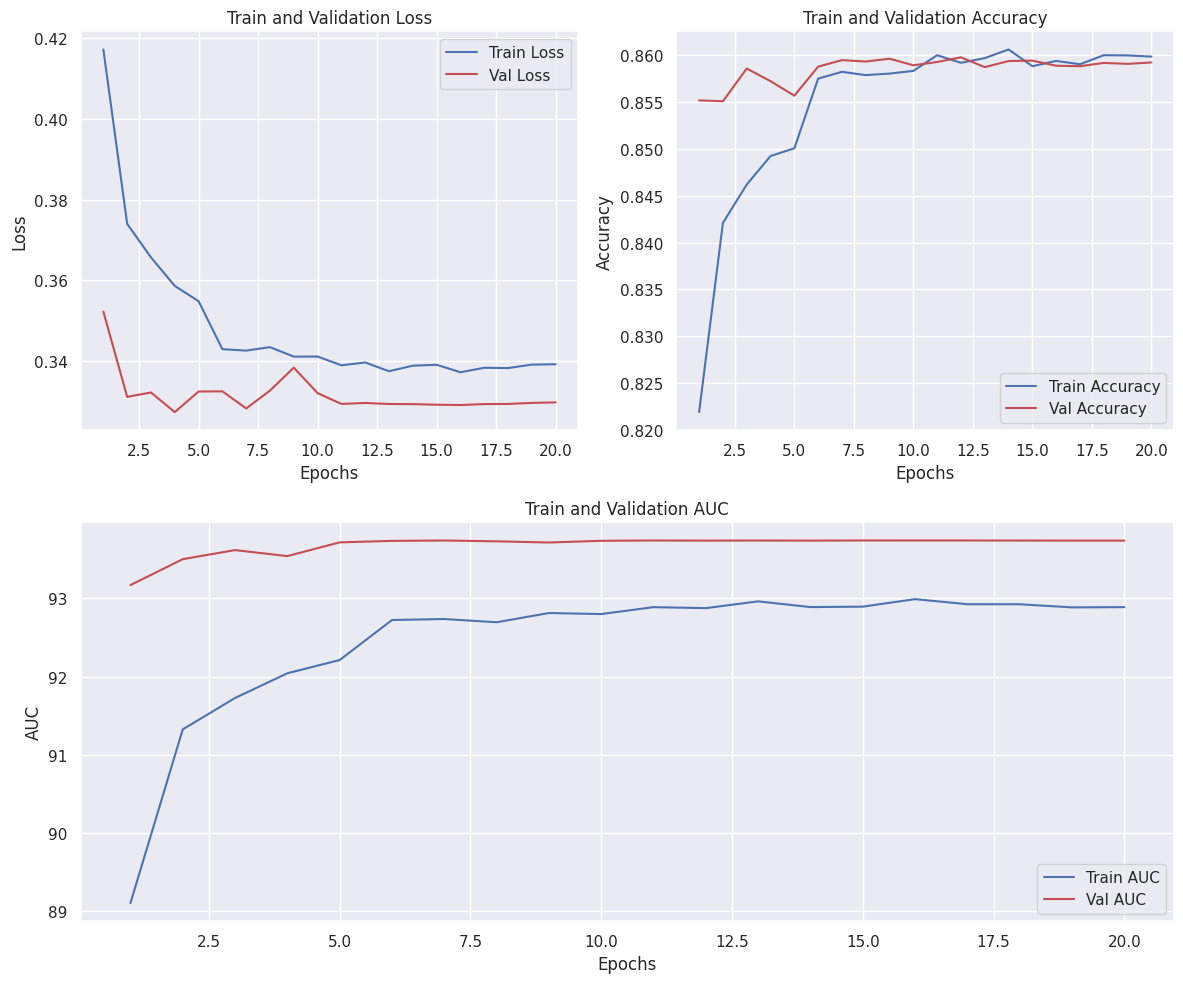

In [10]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)